# 1. Setup dependencies

In [81]:
!pip install \
    pyspark \
    pandas \
    matplotlib

  Using cached matplotlib-3.9.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached contourpy-1.2.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.51.0-cp312-cp312-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (159 kB)
  Using cached kiwisolver-1.4.5-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.4 kB)
  Using cached pillow-10.3.0-cp312-cp312-manylinux_2_28_x86_64.whl.metadata (9.2 kB)
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
Using cached matplotlib-3.9.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (8.3 MB)
Using cached contourpy-1.2.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (309 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.51.0-cp312-cp312-manylinux_2_5_x86_64.m

# 2. Imports

In [3]:
import pyspark
import pandas as pd

# 3. Setup test1.csv data

In [4]:
# Created using Mockaroo
with open('test1.csv', mode='w') as f:
    f.write('''id,first_name,last_name,email,gender\n1,Berni,Livzey,blivzey0@yelp.com,Male\n2,Gill,Shovelton,gshovelton1@spotify.com,Female\n3,Gabbie,Kleinbaum,gkleinbaum2@latimes.com,Female\n4,Yanaton,Chipp,ychipp3@themeforest.net,Male\n5,Bruce,Fearnley,bfearnley4@w3.org,Male\n6,Misha,Peasgood,mpeasgood5@facebook.com,Female\n7,Kendrick,Hearle,khearle6@go.com,Male\n8,Janeen,Cram,jcram7@ucla.edu,Female\n9,Devland,Triggs,dtriggs8@ycombinator.com,Male\n10,Dre,Cammidge,dcammidge9@etsy.com,Male\n11,Harmonia,Akaster,hakastera@twitter.com,Female\n12,Winna,Goodday,wgooddayb@free.fr,Female\n13,Lauryn,Yearby,lyearbyc@amazonaws.com,Female\n14,Gael,Ship,gshipd@storify.com,Female\n15,Reginald,Birbeck,rbirbecke@skyrock.com,Male\n16,Shea,Winspurr,swinspurrf@chron.com,Female\n17,June,de Savery,jdesaveryg@cnet.com,Male\n18,Abbey,Stollsteiner,astollsteinerh@squarespace.com,Female\n19,Arda,Berry,aberryi@nbcnews.com,Male\n20,Mikael,Ginger,mgingerj@diigo.com,Male\n21,Saidee,Blackborow,sblackborowk@alibaba.com,Female\n22,Lucretia,Paolone,lpaolonel@cisco.com,Female\n23,Jasun,Friend,jfriendm@tinyurl.com,Male\n24,Udell,Haxley,uhaxleyn@rediff.com,Male\n25,Mickie,Chritchlow,mchritchlowo@edublogs.org,Male\n26,Binnie,Brislan,bbrislanp@exblog.jp,Female\n27,Bogart,Sparsholt,bsparsholtq@npr.org,Male\n28,Mead,Baggs,mbaggsr@free.fr,Male\n29,Chrissy,Kollatsch,ckollatschs@yolasite.com,Male\n30,Sofia,Luckes,sluckest@engadget.com,Male\n31,Pauletta,Corkhill,pcorkhillu@engadget.com,Male\n32,Rori,Tregale,rtregalev@uol.com.br,Female\n33,Clovis,Sheaf,csheafw@netlog.com,Male\n34,Maynard,Bowles,mbowlesx@ted.com,Female\n35,Fionna,Klazenga,fklazengay@zdnet.com,Female\n36,Mel,Quene,mquenez@upenn.edu,Female\n37,Kristofor,Grinnell,kgrinnell10@illinois.edu,Male\n38,Jedediah,Snape,jsnape11@cornell.edu,Male\n39,Josephina,Carvill,jcarvill12@jalbum.net,Female\n40,Tomlin,Buckby,tbuckby13@list-manage.com,Male\n41,Pammy,Hourahan,phourahan14@weather.com,Female\n42,Evyn,Avrashin,eavrashin15@ucla.edu,Male\n43,Ilka,Lowrance,ilowrance16@ucla.edu,Female\n44,Ludwig,Twinbourne,ltwinbourne17@sciencedaily.com,Male\n45,Franny,Dobrowski,fdobrowski18@slate.com,Male\n46,Ada,Daye,adaye19@ebay.co.uk,Female\n47,Deedee,Kiellor,dkiellor1a@hc360.com,Female\n48,Athene,Garfield,agarfield1b@google.es,Male\n49,Gweneth,De Avenell,gdeavenell1c@columbia.edu,Male\n50,Malina,Bocking,mbocking1d@amazonaws.com,Female\n51,Burty,Kenealy,bkenealy1e@google.com.hk,Female\n52,Garreth,Coulter,gcoulter1f@mysql.com,Female\n53,Jaimie,Karby,jkarby1g@4shared.com,Female\n54,Barbara,Rizziello,brizziello1h@umn.edu,Female\n55,Ainslee,Mungham,amungham1i@time.com,Male\n56,Robinetta,Domenget,rdomenget1j@gov.uk,Female\n57,Aldwin,Kytley,akytley1k@si.edu,Female\n58,Addia,Dargie,adargie1l@vk.com,Female\n59,Arvin,Tilt,atilt1m@shinystat.com,Female\n60,Pia,Carillo,pcarillo1n@ebay.co.uk,Female\n61,Ferdinande,Kiehl,fkiehl1o@house.gov,Female\n62,Crista,McCollum,cmccollum1p@adobe.com,Female\n63,Gunther,Hurdis,ghurdis1q@360.cn,Male\n64,Corey,Feldharker,cfeldharker1r@quantcast.com,Male\n65,Gay,Fergie,gfergie1s@vk.com,Female\n66,Ingemar,Tomsen,itomsen1t@1688.com,Female\n67,Sydel,Godbert,sgodbert1u@fda.gov,Female\n68,Steffi,Pesek,spesek1v@amazon.com,Female\n69,Thorn,Moors,tmoors1w@merriam-webster.com,Female\n70,Lisle,Rouchy,lrouchy1x@facebook.com,Male\n71,Lilli,Suthworth,lsuthworth1y@ifeng.com,Female\n72,Josefina,Hanner,jhanner1z@github.com,Male\n73,Shermie,O'Flaherty,soflaherty20@rediff.com,Female\n74,Odille,Durling,odurling21@youtube.com,Male\n75,Ivan,Orta,iorta22@omniture.com,Male\n76,Fons,Bum,fbum23@arizona.edu,Female\n77,Eldredge,Baughan,ebaughan24@usgs.gov,Female\n78,Rem,Dungee,rdungee25@wsj.com,Female\n79,Ingar,Ginni,iginni26@house.gov,Male\n80,Kerry,Preston,kpreston27@cpanel.net,Female\n81,Pennie,Demko,pdemko28@diigo.com,Male\n82,Isacco,Camsey,icamsey29@cdc.gov,Male\n83,Turner,Alfwy,talfwy2a@tamu.edu,Male\n84,Raquela,Persich,rpersich2b@163.com,Male\n85,Kylie,Kilfeather,kkilfeather2c@nps.gov,Female\n86,Dmitri,Suller,dsuller2d@cdc.gov,Male\n87,Darbie,Rosier,drosier2e@usa.gov,Male\n88,Anny,Headly,aheadly2f@reddit.com,Male\n89,Kassey,Uttridge,kuttridge2g@altervista.org,Male\n90,Lindsay,Boylund,lboylund2h@netvibes.com,Male\n91,Jeniffer,Graeme,jgraeme2i@cmu.edu,Female\n92,Tobiah,Henner,thenner2j@cafepress.com,Male\n93,Hastie,Klimczak,hklimczak2k@dell.com,Male\n94,Cullen,Brekonridge,cbrekonridge2l@stumbleupon.com,Female\n95,Hartley,Emlen,hemlen2m@gnu.org,Male\n96,Sean,Simka,ssimka2n@intel.com,Male\n97,Adriane,Bakewell,abakewell2o@cdbaby.com,Female\n98,Rocky,Hunting,rhunting2p@bravesites.com,Male\n99,Farris,Bertelsen,fbertelsen2q@uiuc.edu,Male\n100,Florrie,Tomaini,ftomaini2r@google.com.hk,Male\n101,Brent,Ranger,branger2s@comcast.net,Female\n102,Osmund,Dowry,odowry2t@macromedia.com,Male\n103,Candice,Akred,cakred2u@businessinsider.com,Male\n104,Berky,Vasilenko,bvasilenko2v@pinterest.com,Female\n105,Appolonia,Norcliff,anorcliff2w@ucoz.com,Female\n106,Rolph,Johnstone,rjohnstone2x@ucla.edu,Female\n107,Wilona,Brumhead,wbrumhead2y@ow.ly,Female\n108,Georgiana,Kumaar,gkumaar2z@marketwatch.com,Male\n109,Vinita,MacKissack,vmackissack30@weather.com,Female\n110,Caria,Faier,cfaier31@prlog.org,Male\n111,Robinetta,Cater,rcater32@storify.com,Male\n112,Kirsten,Curgenuer,kcurgenuer33@examiner.com,Male\n113,Simeon,Creelman,screelman34@thetimes.co.uk,Female\n114,Callida,Treneer,ctreneer35@mozilla.org,Male\n115,Evered,Klossek,eklossek36@psu.edu,Female\n116,Waldon,Cordell,wcordell37@twitpic.com,Female\n117,Karoly,Hrachovec,khrachovec38@123-reg.co.uk,Female\n118,Trstram,Tapton,ttapton39@kickstarter.com,Male\n119,Celeste,Etchell,cetchell3a@naver.com,Male\n120,Delila,Causbey,dcausbey3b@hubpages.com,Female\n121,Helaine,Hallor,hhallor3c@stumbleupon.com,Female\n122,Marys,Tatnell,mtatnell3d@ibm.com,Female\n123,Sapphira,Elleton,selleton3e@indiegogo.com,Female\n124,Seymour,Foro,sforo3f@geocities.jp,Female\n125,Vivianne,Duligall,vduligall3g@parallels.com,Male\n126,Malinde,Lovering,mlovering3h@wufoo.com,Male\n127,Estel,Georgot,egeorgot3i@cdbaby.com,Female\n128,Caye,Swinerd,cswinerd3j@acquirethisname.com,Male\n129,Amandi,Palister,apalister3k@360.cn,Female\n130,Perry,Raspin,praspin3l@state.gov,Female\n131,Jenelle,Pynner,jpynner3m@ow.ly,Female\n132,Brigit,Funcheon,bfuncheon3n@mayoclinic.com,Female\n133,Wiley,Skellorne,wskellorne3o@reddit.com,Male\n134,Virginia,Reinbach,vreinbach3p@1688.com,Male\n135,Vergil,Tomaszkiewicz,vtomaszkiewicz3q@chicagotribune.com,Female\n136,Nancey,Bussetti,nbussetti3r@spotify.com,Female\n137,Tonye,De Gregoli,tdegregoli3s@imgur.com,Female\n138,Pauly,Domican,pdomican3t@fotki.com,Female\n139,Erek,Hambly,ehambly3u@answers.com,Male\n140,Keelby,Argile,kargile3v@spiegel.de,Female\n141,Leonelle,Cornforth,lcornforth3w@apache.org,Male\n142,Elden,Talby,etalby3x@newsvine.com,Male\n143,Normy,Pierton,npierton3y@discovery.com,Male\n144,Carola,Tilling,ctilling3z@discuz.net,Female\n145,Winnifred,Gomar,wgomar40@mit.edu,Female\n146,Augustus,Macquire,amacquire41@mail.ru,Female\n147,Nevin,Grenfell,ngrenfell42@geocities.jp,Female\n148,Magnum,Castro,mcastro43@ca.gov,Female\n149,Diane,Gandy,dgandy44@linkedin.com,Male\n150,Tessa,Purrington,tpurrington45@businesswire.com,Male\n151,Felizio,Clampton,fclampton46@prlog.org,Female\n152,Bird,Rapson,brapson47@npr.org,Female\n153,Susie,Talton,stalton48@shutterfly.com,Male\n154,Haley,Lidgertwood,hlidgertwood49@newsvine.com,Female\n155,Lurlene,Schettini,lschettini4a@geocities.jp,Male\n156,Ross,Dollimore,rdollimore4b@drupal.org,Female\n157,Katherine,Brewitt,kbrewitt4c@jalbum.net,Female\n158,Tate,Lattka,tlattka4d@canalblog.com,Female\n159,Joanie,McAndie,jmcandie4e@booking.com,Male\n160,Tiphany,Ayer,tayer4f@bravesites.com,Female\n161,Tann,Tuiller,ttuiller4g@theglobeandmail.com,Male\n162,Roscoe,Murden,rmurden4h@wisc.edu,Female\n163,Krispin,Janaszewski,kjanaszewski4i@t.co,Female\n164,Brigham,Trenam,btrenam4j@quantcast.com,Female\n165,Alleen,Rodders,arodders4k@arstechnica.com,Female\n166,Jennie,Mulholland,jmulholland4l@bing.com,Female\n167,Francoise,Yitshak,fyitshak4m@blinklist.com,Male\n168,Zack,Helsby,zhelsby4n@rambler.ru,Male\n169,Nikki,Petit,npetit4o@t.co,Female\n170,Holt,Helliker,hhelliker4p@ask.com,Female\n171,Sherlock,Philcott,sphilcott4q@admin.ch,Male\n172,Clevey,Drinkhall,cdrinkhall4r@sogou.com,Male\n173,Paul,Crosser,pcrosser4s@dot.gov,Female\n174,Garik,Mum,gmum4t@house.gov,Female\n175,Cloris,Rosevear,crosevear4u@google.es,Male\n176,Tedman,Demelt,tdemelt4v@scientificamerican.com,Male\n177,Dav,Griffe,dgriffe4w@google.nl,Male\n178,Kelcy,Deaton,kdeaton4x@sciencedaily.com,Female\n179,Karly,Hawsby,khawsby4y@google.de,Male\n180,Reinwald,Acom,racom4z@marketwatch.com,Female\n181,Rayna,Routh,rrouth50@deviantart.com,Female\n182,Alic,Bryers,abryers51@cbslocal.com,Female\n183,Thatcher,Cawdery,tcawdery52@dell.com,Male\n184,Roxana,Turford,rturford53@theatlantic.com,Female\n185,Hyman,Gauge,hgauge54@delicious.com,Female\n186,Les,Giovannoni,lgiovannoni55@nsw.gov.au,Female\n187,Cherey,Tassell,ctassell56@whitehouse.gov,Male\n188,Hulda,Ormiston,hormiston57@dropbox.com,Male\n189,Astrix,Mishow,amishow58@uol.com.br,Female\n190,Melodee,Toner,mtoner59@state.tx.us,Female\n191,Johnette,Bradwell,jbradwell5a@springer.com,Female\n192,Theodosia,Kennler,tkennler5b@plala.or.jp,Female\n193,Janka,Gheorghie,jgheorghie5c@si.edu,Female\n194,Cam,Wetherald,cwetherald5d@google.pl,Male\n195,Richmound,Sudron,rsudron5e@behance.net,Female\n196,Magda,MacKimm,mmackimm5f@ocn.ne.jp,Male\n197,Ryan,Hutchens,rhutchens5g@shop-pro.jp,Female\n198,Mose,Comberbach,mcomberbach5h@intel.com,Male\n199,Addison,Porte,aporte5i@indiegogo.com,Female\n200,Hazlett,Belfitt,hbelfitt5j@xing.com,Female\n201,Dannie,Joselovitch,djoselovitch5k@nasa.gov,Female\n202,Angele,Jermey,ajermey5l@instagram.com,Male\n203,Ketty,Knight,kknight5m@miitbeian.gov.cn,Male\n204,Bartholomeus,Apfelmann,bapfelmann5n@amazon.co.uk,Female\n205,Orel,Mayers,omayers5o@europa.eu,Male\n206,Culley,Ibel,cibel5p@nps.gov,Female\n207,Reid,Shackel,rshackel5q@unicef.org,Male\n208,Filippa,Grelak,fgrelak5r@bigcartel.com,Female\n209,Dorice,Josifovic,djosifovic5s@mac.com,Male\n210,Anne,Herrieven,aherrieven5t@vkontakte.ru,Female\n211,Berni,Bagguley,bbagguley5u@eventbrite.com,Male\n212,Cornall,Godfery,cgodfery5v@ca.gov,Female\n213,Gelya,Forestall,gforestall5w@storify.com,Female\n214,Ryley,Enston,renston5x@fotki.com,Female\n215,Heida,Hedge,hhedge5y@drupal.org,Male\n216,Townsend,Nansom,tnansom5z@usa.gov,Male\n217,Vanni,Ashfield,vashfield60@domainmarket.com,Male\n218,Bernita,Spaldin,bspaldin61@ftc.gov,Male\n219,Sylvia,Menichi,smenichi62@independent.co.uk,Male\n220,Lefty,Ravilious,lravilious63@cisco.com,Male\n221,Irita,Norster,inorster64@google.de,Female\n222,Teddie,Renak,trenak65@cisco.com,Male\n223,Loree,Norquay,lnorquay66@dailymotion.com,Female\n224,Sinclair,Nelthrop,snelthrop67@cam.ac.uk,Male\n225,Sheeree,Bourdel,sbourdel68@blogs.com,Male\n226,Jackelyn,Maycock,jmaycock69@cam.ac.uk,Female\n227,Piggy,Leban,pleban6a@mediafire.com,Male\n228,Dinah,Feeney,dfeeney6b@arstechnica.com,Female\n229,Kelley,Merrin,kmerrin6c@cargocollective.com,Female\n230,Lyndsay,Aronin,laronin6d@salon.com,Female\n231,Corissa,Faircliff,cfaircliff6e@sogou.com,Male\n232,Myrvyn,Brain,mbrain6f@yelp.com,Male\n233,Harv,Georgescu,hgeorgescu6g@shareasale.com,Female\n234,Mariska,Bogies,mbogies6h@nytimes.com,Female\n235,Sara,Poone,spoone6i@amazon.de,Female\n236,Dunn,Inchan,dinchan6j@rambler.ru,Female\n237,Otha,Ames,oames6k@comsenz.com,Male\n238,Rosaline,Eccersley,reccersley6l@imdb.com,Female\n239,Rodney,Filinkov,rfilinkov6m@virginia.edu,Female\n240,Noelle,Gavozzi,ngavozzi6n@google.ca,Female\n241,Florette,Bellhanger,fbellhanger6o@moonfruit.com,Female\n242,Augusto,Bewsy,abewsy6p@cargocollective.com,Male\n243,Shaughn,Standing,sstanding6q@unblog.fr,Male\n244,Sauncho,Aylin,saylin6r@latimes.com,Female\n245,Leslie,Cursey,lcursey6s@lulu.com,Male\n246,Barret,Besnard,bbesnard6t@facebook.com,Male\n247,Jen,Doni,jdoni6u@nyu.edu,Male\n248,Lynelle,Coleby,lcoleby6v@disqus.com,Female\n249,Garrot,Orrow,gorrow6w@slashdot.org,Male\n250,Charo,Morhall,cmorhall6x@hao123.com,Male\n251,Hazel,Schwaiger,hschwaiger6y@nature.com,Female\n252,Goober,Dorracott,gdorracott6z@gizmodo.com,Male\n253,Marcos,Readwood,mreadwood70@biblegateway.com,Male\n254,Briney,De Mattia,bdemattia71@cnbc.com,Female\n255,Konstance,Ridgwell,kridgwell72@ibm.com,Female\n256,Rik,Toller,rtoller73@ifeng.com,Male\n257,Emanuele,Oblein,eoblein74@wp.com,Female\n258,Nickie,Mason,nmason75@aol.com,Male\n259,Teddi,Franscioni,tfranscioni76@163.com,Male\n260,Shannon,Reinger,sreinger77@nationalgeographic.com,Female\n261,Burg,Lesek,blesek78@mit.edu,Female\n262,Heddie,Ewbanck,hewbanck79@economist.com,Female\n263,Tailor,Vossing,tvossing7a@hexun.com,Female\n264,Brigida,Rosengren,brosengren7b@plala.or.jp,Female\n265,Ariel,Massimo,amassimo7c@topsy.com,Female\n266,Clarie,Moxsom,cmoxsom7d@icq.com,Female\n267,Windy,MacConnulty,wmacconnulty7e@ebay.com,Female\n268,Nissa,Chidlow,nchidlow7f@diigo.com,Female\n269,Sheila-kathryn,Leask,sleask7g@phoca.cz,Female\n270,Essie,Ivins,eivins7h@baidu.com,Female\n271,Enrique,Belsher,ebelsher7i@ebay.com,Male\n272,Elwira,Hadingham,ehadingham7j@paginegialle.it,Female\n273,Garland,Minors,gminors7k@pagesperso-orange.fr,Male\n274,Renelle,Horney,rhorney7l@google.co.jp,Male\n275,Gisele,Pietruszka,gpietruszka7m@cnet.com,Male\n276,Shurlocke,Dows,sdows7n@state.tx.us,Male\n277,Vinni,Houten,vhouten7o@weather.com,Female\n278,Jaquelyn,Dullingham,jdullingham7p@apache.org,Male\n279,Hallsy,Beteriss,hbeteriss7q@google.pl,Male\n280,Alberik,Goucher,agoucher7r@tamu.edu,Female\n281,Olivier,Repp,orepp7s@cisco.com,Female\n282,Milka,Hakewell,mhakewell7t@furl.net,Male\n283,Kittie,Radeliffe,kradeliffe7u@apple.com,Female\n284,Vinni,Hickinbottom,vhickinbottom7v@dot.gov,Male\n285,Joletta,Leatt,jleatt7w@mapy.cz,Female\n286,Cassondra,Mealham,cmealham7x@huffingtonpost.com,Male\n287,Julius,Ferreiro,jferreiro7y@homestead.com,Male\n288,Travers,Deguara,tdeguara7z@domainmarket.com,Female\n289,Nance,Weber,nweber80@spotify.com,Male\n290,Westley,Estoile,westoile81@mac.com,Male\n291,Serena,Flasby,sflasby82@myspace.com,Female\n292,Reeba,Beincken,rbeincken83@webs.com,Male\n293,Tricia,Burdon,tburdon84@weather.com,Male\n294,Odey,Tylor,otylor85@microsoft.com,Female\n295,Sinclare,Finlason,sfinlason86@toplist.cz,Male\n296,Lefty,Mooring,lmooring87@live.com,Male\n297,Junina,Seleway,jseleway88@taobao.com,Female\n298,Lelia,Lockett,llockett89@1und1.de,Male\n299,Mathilde,Gossage,mgossage8a@wunderground.com,Female\n300,Tania,Luckes,tluckes8b@freewebs.com,Female\n301,Inger,Stirling,istirling8c@people.com.cn,Female\n302,Hinze,Yuryichev,hyuryichev8d@oracle.com,Female\n303,Melli,Nuton,mnuton8e@craigslist.org,Female\n304,Rennie,Leser,rleser8f@dyndns.org,Female\n305,Nadya,Ezzell,nezzell8g@pcworld.com,Female\n306,Isacco,Sokale,isokale8h@elpais.com,Female\n307,Lora,Crates,lcrates8i@tamu.edu,Female\n308,Ragnar,MacKilroe,rmackilroe8j@cmu.edu,Female\n309,Erick,Coffin,ecoffin8k@privacy.gov.au,Male\n310,Carlos,Abrahamsohn,cabrahamsohn8l@ifeng.com,Female\n311,Zsa zsa,Larvin,zlarvin8m@com.com,Male\n312,Hedi,Fosken,hfosken8n@wordpress.org,Male\n313,Bradford,Swancott,bswancott8o@rediff.com,Male\n314,Virge,Sketchley,vsketchley8p@wisc.edu,Female\n315,Hermina,Paxton,hpaxton8q@google.ru,Female\n316,Benyamin,Hulks,bhulks8r@huffingtonpost.com,Male\n317,Marthe,Gascoyen,mgascoyen8s@nasa.gov,Male\n318,Hadrian,Scarrisbrick,hscarrisbrick8t@tmall.com,Female\n319,Gayla,Klimczak,gklimczak8u@mapquest.com,Male\n320,Vivyanne,Abrahams,vabrahams8v@e-recht24.de,Female\n321,Louella,Grindell,lgrindell8w@goo.gl,Male\n322,Eveline,Rayman,erayman8x@nasa.gov,Male\n323,Bendix,Birth,bbirth8y@squidoo.com,Male\n324,Ashbey,Case,acase8z@ask.com,Male\n325,Paulina,Puckrin,ppuckrin90@quantcast.com,Female\n326,Winona,Eliesco,weliesco91@lycos.com,Female\n327,Caitrin,Lademann,clademann92@smh.com.au,Male\n328,Lila,Bellingham,lbellingham93@sohu.com,Female\n329,Kaleena,Osgood,kosgood94@issuu.com,Male\n330,Willette,Lissaman,wlissaman95@shareasale.com,Male\n331,Arel,Hatherill,ahatherill96@ed.gov,Female\n332,Luisa,McVitty,lmcvitty97@blogspot.com,Male\n333,Hailey,Seccombe,hseccombe98@ucoz.ru,Female\n334,Debby,Luciani,dluciani99@google.pl,Female\n335,Goddart,Stroder,gstroder9a@google.de,Female\n336,Ernest,Hurdedge,ehurdedge9b@cloudflare.com,Male\n337,Cletus,Dugdale,cdugdale9c@smh.com.au,Male\n338,Maire,Lynd,mlynd9d@prlog.org,Female\n339,Ignacio,Sherlaw,isherlaw9e@opera.com,Female\n340,Ulrica,Yukhtin,uyukhtin9f@trellian.com,Male\n341,Xymenes,Sneyd,xsneyd9g@goodreads.com,Male\n342,Hillier,Claxson,hclaxson9h@salon.com,Female\n343,Basil,Ruf,bruf9i@nydailynews.com,Female\n344,Celestia,Frusher,cfrusher9j@sourceforge.net,Male\n345,Terri-jo,Barnfield,tbarnfield9k@altervista.org,Male\n346,Gasparo,Leveridge,gleveridge9l@utexas.edu,Female\n347,Clarey,De Meyer,cdemeyer9m@hatena.ne.jp,Female\n348,Emiline,Mackrell,emackrell9n@ca.gov,Male\n349,Jana,Livermore,jlivermore9o@scientificamerican.com,Female\n350,Raddie,Pauel,rpauel9p@devhub.com,Female\n351,Nestor,Aitken,naitken9q@cargocollective.com,Male\n352,Gordie,Andino,gandino9r@usatoday.com,Male\n353,Sher,Broad,sbroad9s@mac.com,Female\n354,Clarie,Reeson,creeson9t@oakley.com,Female\n355,Consolata,McDonnell,cmcdonnell9u@issuu.com,Male\n356,Francene,Robillard,frobillard9v@npr.org,Male\n357,Sabrina,Bignall,sbignall9w@ask.com,Male\n358,Coriss,Crookshanks,ccrookshanks9x@buzzfeed.com,Male\n359,Kariotta,Attride,kattride9y@sourceforge.net,Male\n360,Roscoe,Humfrey,rhumfrey9z@acquirethisname.com,Male\n361,Del,Knifton,dkniftona0@list-manage.com,Male\n362,Eunice,Starbucke,estarbuckea1@ucsd.edu,Female\n363,Jannelle,Larcher,jlarchera2@yellowpages.com,Female\n364,Eliza,Daggett,edaggetta3@boston.com,Female\n365,Willyt,Kornacki,wkornackia4@sourceforge.net,Male\n366,Sharleen,Sandle,ssandlea5@blogspot.com,Female\n367,Andreana,D'Enrico,adenricoa6@altervista.org,Female\n368,Yovonnda,Callen,ycallena7@tmall.com,Male\n369,Aubrette,Asson,aassona8@mozilla.org,Male\n370,Stoddard,Gourdon,sgourdona9@marketwatch.com,Female\n371,Even,Cahill,ecahillaa@1und1.de,Male\n372,Charla,Daykin,cdaykinab@quantcast.com,Female\n373,Christiano,Hillitt,chillittac@stanford.edu,Male\n374,Mirabel,Harvett,mharvettad@gnu.org,Male\n375,Fred,Losano,flosanoae@examiner.com,Female\n376,Emmit,Wilby,ewilbyaf@plala.or.jp,Male\n377,Carlos,Craddock,ccraddockag@fastcompany.com,Female\n378,Britney,Fratczak,bfratczakah@chronoengine.com,Male\n379,Delcine,Elderbrant,delderbrantai@intel.com,Male\n380,Kelly,Halfacre,khalfacreaj@paginegialle.it,Male\n381,Reiko,Feldmann,rfeldmannak@goo.gl,Male\n382,Odelinda,Smurthwaite,osmurthwaiteal@google.fr,Male\n383,Katheryn,Windeatt,kwindeattam@unicef.org,Male\n384,Wendie,Leasor,wleasoran@java.com,Female\n385,Pattin,Giorgini,pgiorginiao@slate.com,Male\n386,Darlene,Chastel,dchastelap@jigsy.com,Female\n387,Friederike,Iowarch,fiowarchaq@cmu.edu,Female\n388,Molly,Sabathe,msabathear@ycombinator.com,Female\n389,Eward,Daens,edaensas@mapy.cz,Male\n390,Mikaela,Sazio,msazioat@instagram.com,Female\n391,Delcine,McCaig,dmccaigau@moonfruit.com,Male\n392,Stormy,Bagnold,sbagnoldav@furl.net,Female\n393,Rollins,Morch,rmorchaw@time.com,Male\n394,Lucila,Manton,lmantonax@netvibes.com,Male\n395,Burty,Insoll,binsollay@biblegateway.com,Female\n396,Daisey,Kett,dkettaz@cornell.edu,Male\n397,Eileen,O'Shee,eosheeb0@wikia.com,Female\n398,Dorey,Manford,dmanfordb1@berkeley.edu,Female\n399,Dunc,Beldam,dbeldamb2@imgur.com,Male\n400,Jacintha,Bauduin,jbauduinb3@woothemes.com,Female\n401,Hughie,Duffy,hduffyb4@nih.gov,Male\n402,Derrik,Tomblett,dtomblettb5@telegraph.co.uk,Female\n403,Kassey,Seiffert,kseiffertb6@intel.com,Female\n404,Karoly,Preedy,kpreedyb7@prlog.org,Male\n405,Norrie,Dark,ndarkb8@trellian.com,Male\n406,Letti,Temperley,ltemperleyb9@hhs.gov,Female\n407,Arney,Lowle,alowleba@home.pl,Male\n408,Patty,Towler,ptowlerbb@cam.ac.uk,Female\n409,Crichton,Hedden,cheddenbc@sitemeter.com,Female\n410,Gusty,Maddigan,gmaddiganbd@bizjournals.com,Male\n411,Keriann,McCaster,kmccasterbe@chron.com,Male\n412,Kati,Campagne,kcampagnebf@npr.org,Female\n413,Robin,Redferne,rredfernebg@google.es,Male\n414,Dory,Huws,dhuwsbh@businessinsider.com,Male\n415,Egon,Yakobowitch,eyakobowitchbi@slideshare.net,Male\n416,Legra,Fernyhough,lfernyhoughbj@is.gd,Male\n417,Marshal,Willerton,mwillertonbk@amazon.co.uk,Male\n418,Verene,Yeudall,vyeudallbl@princeton.edu,Male\n419,Inge,Peto,ipetobm@chron.com,Male\n420,Irwinn,Huot,ihuotbn@facebook.com,Female\n421,Lyle,Rabjohn,lrabjohnbo@archive.org,Female\n422,Vasili,Sevin,vsevinbp@usatoday.com,Female\n423,Brigida,Morcombe,bmorcombebq@tiny.cc,Male\n424,Keene,Caughan,kcaughanbr@ucsd.edu,Female\n425,Obediah,McMakin,omcmakinbs@home.pl,Female\n426,Janean,Noke,jnokebt@cdc.gov,Female\n427,Doti,Gotecliffe,dgotecliffebu@stanford.edu,Female\n428,Trstram,Aleksandrikin,taleksandrikinbv@printfriendly.com,Male\n429,Bram,Johns,bjohnsbw@omniture.com,Female\n430,Natalee,Montford,nmontfordbx@youtube.com,Male\n431,Lanie,Kuhnert,lkuhnertby@cdc.gov,Female\n432,Justus,Wimpey,jwimpeybz@theglobeandmail.com,Male\n433,Lyon,Borrie,lborriec0@irs.gov,Female\n434,Arlena,Youson,ayousonc1@themeforest.net,Male\n435,Arleyne,Beazleigh,abeazleighc2@booking.com,Female\n436,Brinna,Pardal,bpardalc3@360.cn,Male\n437,Jessika,Ginie,jginiec4@google.de,Male\n438,Oliviero,Bagott,obagottc5@xinhuanet.com,Male\n439,Ruttger,Hatliff,rhatliffc6@issuu.com,Male\n440,Edyth,Rozalski,erozalskic7@mapquest.com,Male\n441,Wilden,Skelington,wskelingtonc8@ameblo.jp,Male\n442,James,Athridge,jathridgec9@mac.com,Male\n443,Tobiah,Shiril,tshirilca@facebook.com,Female\n444,Agnese,Bredes,abredescb@timesonline.co.uk,Male\n445,Yorke,Daybell,ydaybellcc@geocities.com,Female\n446,Janene,Hawtry,jhawtrycd@springer.com,Female\n447,Hadley,Glasscock,hglasscockce@myspace.com,Male\n448,Layne,Geale,lgealecf@tmall.com,Female\n449,Gale,Rissom,grissomcg@nih.gov,Male\n450,Rufus,Matschoss,rmatschossch@redcross.org,Male\n451,Dalston,Borg-Bartolo,dborgbartoloci@accuweather.com,Male\n452,Weylin,Grimm,wgrimmcj@java.com,Male\n453,Sisely,Surgeoner,ssurgeonerck@sourceforge.net,Female\n454,Sloane,Rowat,srowatcl@is.gd,Female\n455,Enos,Whenham,ewhenhamcm@tripadvisor.com,Female\n456,Ruperta,Saer,rsaercn@comcast.net,Female\n457,Lavena,Necrews,lnecrewsco@blog.com,Female\n458,Shamus,Royle,sroylecp@buzzfeed.com,Male\n459,Kikelia,Staries,kstariescq@nytimes.com,Female\n460,Janifer,Herche,jherchecr@google.fr,Male\n461,Alis,Wyre,awyrecs@nymag.com,Male\n462,Brenn,Josephs,bjosephsct@joomla.org,Male\n463,Tamera,Carnoghan,tcarnoghancu@t.co,Male\n464,Hilarius,Urling,hurlingcv@odnoklassniki.ru,Male\n465,Mallorie,Ponte,mpontecw@friendfeed.com,Male\n466,Jacklin,Conningham,jconninghamcx@cbc.ca,Female\n467,Gill,Seleway,gselewaycy@sina.com.cn,Male\n468,Avictor,LAbbet,alabbetcz@yelp.com,Male\n469,Ailyn,Coucha,acouchad0@123-reg.co.uk,Female\n470,Klara,Grigolashvill,kgrigolashvilld1@lulu.com,Female\n471,Enrico,Millgate,emillgated2@nbcnews.com,Male\n472,Dunn,Farryan,dfarryand3@studiopress.com,Female\n473,Dynah,MacChaell,dmacchaelld4@fc2.com,Female\n474,Monti,Gerty,mgertyd5@sogou.com,Female\n475,Daisy,Hornig,dhornigd6@pagesperso-orange.fr,Female\n476,Shannah,Ennor,sennord7@hugedomains.com,Female\n477,Ruprecht,Woodwin,rwoodwind8@virginia.edu,Female\n478,Richmound,McMarquis,rmcmarquisd9@cnbc.com,Male\n479,Natal,Cockerill,ncockerillda@eepurl.com,Female\n480,Minette,Brocklebank,mbrocklebankdb@kickstarter.com,Male\n481,Alexine,Guislin,aguislindc@omniture.com,Male\n482,Rosina,Spark,rsparkdd@omniture.com,Male\n483,Benjy,Schade,bschadede@dell.com,Male\n484,Dorice,Conigsby,dconigsbydf@census.gov,Male\n485,Philly,Harrold,pharrolddg@buzzfeed.com,Male\n486,Dell,Fadell,dfadelldh@wikispaces.com,Male\n487,Kit,Paddison,kpaddisondi@apache.org,Male\n488,Allene,Motte,amottedj@yahoo.com,Female\n489,Ardisj,Siehard,asieharddk@wikispaces.com,Male\n490,Yoshiko,MacMeeking,ymacmeekingdl@tuttocitta.it,Male\n491,Hugibert,Paquet,hpaquetdm@who.int,Female\n492,Charleen,Peyro,cpeyrodn@noaa.gov,Male\n493,Ansell,Gamblin,agamblindo@tripadvisor.com,Female\n494,Ambros,Whittington,awhittingtondp@issuu.com,Male\n495,Mufinella,Bloggett,mbloggettdq@artisteer.com,Female\n496,Neil,Penswick,npenswickdr@hp.com,Female\n497,Torrin,Grinter,tgrinterds@1688.com,Female\n498,Chaunce,Schott,cschottdt@imageshack.us,Female\n499,Netta,Devin,ndevindu@amazon.co.uk,Male\n500,Roseanne,Badwick,rbadwickdv@npr.org,Male\n501,Gennie,Heugle,gheugledw@blogger.com,Male\n502,Flemming,Nockalls,fnockallsdx@rambler.ru,Male\n503,Perle,Quin,pquindy@chicagotribune.com,Male\n504,Fraze,Ellacombe,fellacombedz@cocolog-nifty.com,Male\n505,Melody,Hayball,mhayballe0@eventbrite.com,Female\n506,Roldan,Batey,rbateye1@addtoany.com,Female\n507,Ninnetta,Eschalette,neschalettee2@biblegateway.com,Male\n508,Booth,De Gregario,bdegregarioe3@cbsnews.com,Male\n509,Sebastien,Spragge,sspraggee4@ed.gov,Male\n510,Carey,Blazewicz,cblazewicze5@blogger.com,Female\n511,Dilly,Payton,dpaytone6@statcounter.com,Male\n512,Husain,Lyburn,hlyburne7@ca.gov,Male\n513,Lennie,Hulett,lhulette8@google.de,Male\n514,Lezlie,Bielfeldt,lbielfeldte9@biblegateway.com,Male\n515,Ninetta,Toman,ntomanea@seattletimes.com,Male\n516,Dinnie,Poli,dpolieb@creativecommons.org,Female\n517,Odette,Libbie,olibbieec@skyrock.com,Male\n518,Brinn,Larderot,blarderoted@sogou.com,Male\n519,Thalia,Shedd,tsheddee@salon.com,Female\n520,Gracia,Mecozzi,gmecozzief@shareasale.com,Female\n521,Nelli,Jandel,njandeleg@g.co,Male\n522,Brad,Ebdin,bebdineh@netlog.com,Female\n523,Sergeant,Plaice,splaiceei@alexa.com,Female\n524,Janet,Adamowitz,jadamowitzej@nature.com,Male\n525,Phyllys,Archer,parcherek@ucla.edu,Male\n526,Amandi,Anear,aanearel@moonfruit.com,Female\n527,Kirby,Whitwell,kwhitwellem@sciencedaily.com,Female\n528,Arabel,Kalisch,akalischen@sitemeter.com,Male\n529,Anselm,Kiffe,akiffeeo@umich.edu,Female\n530,Drona,Han,dhanep@nydailynews.com,Male\n531,Barr,Petrosian,bpetrosianeq@shutterfly.com,Male\n532,Felice,Grutchfield,fgrutchfielder@time.com,Male\n533,Ricca,Deetch,rdeetches@imgur.com,Female\n534,Noak,Bonnaire,nbonnaireet@istockphoto.com,Male\n535,Torie,Denziloe,tdenziloeeu@homestead.com,Male\n536,Cammie,Weeden,cweedenev@bloomberg.com,Male\n537,Garry,Wasson,gwassonew@goodreads.com,Male\n538,Anett,Berzen,aberzenex@vistaprint.com,Male\n539,Fifine,Deware,fdewareey@meetup.com,Female\n540,Dominik,Thurlbourne,dthurlbourneez@intel.com,Female\n541,Frasquito,Tuting,ftutingf0@phoca.cz,Male\n542,Brewster,Joret,bjoretf1@sourceforge.net,Male\n543,Darell,Gallant,dgallantf2@seattletimes.com,Male\n544,Kevina,Goulbourn,kgoulbournf3@icio.us,Male\n545,Kylie,Stuckow,kstuckowf4@wordpress.com,Male\n546,Lilah,Thoms,lthomsf5@biblegateway.com,Male\n547,Jenifer,Fearick,jfearickf6@twitter.com,Female\n548,Vitoria,Chauvey,vchauveyf7@t.co,Female\n549,Benito,Limeburner,blimeburnerf8@examiner.com,Male\n550,Janka,Warham,jwarhamf9@latimes.com,Female\n551,Rosalynd,Cronshaw,rcronshawfa@marketwatch.com,Female\n552,Melly,Hulle,mhullefb@4shared.com,Male\n553,Brinn,Searson,bsearsonfc@g.co,Female\n554,Gordy,Ablett,gablettfd@creativecommons.org,Female\n555,Elie,Rishman,erishmanfe@comcast.net,Male\n556,Joeann,Ivanets,jivanetsff@wikimedia.org,Male\n557,Kristal,Dorey,kdoreyfg@unesco.org,Female\n558,Coleen,Ciabatteri,cciabatterifh@businessweek.com,Female\n559,Kittie,Brugemann,kbrugemannfi@xinhuanet.com,Female\n560,Sigismond,Fransson,sfranssonfj@pinterest.com,Female\n561,Linus,Borge,lborgefk@wp.com,Female\n562,Charisse,Bees,cbeesfl@nih.gov,Male\n563,Thorny,Fines,tfinesfm@economist.com,Female\n564,Eulalie,Stroban,estrobanfn@bigcartel.com,Male\n565,Westbrooke,Vanelli,wvanellifo@seesaa.net,Male\n566,Tedra,Filoniere,tfilonierefp@macromedia.com,Female\n567,Raddie,Jovicevic,rjovicevicfq@umich.edu,Male\n568,Charlotta,Petera,cpeterafr@feedburner.com,Male\n569,Lethia,Schaffel,lschaffelfs@paypal.com,Female\n570,Leese,Paike,lpaikeft@sina.com.cn,Female\n571,Sig,Dukes,sdukesfu@elpais.com,Male\n572,Linus,Curcher,lcurcherfv@salon.com,Female\n573,Caron,Goldstraw,cgoldstrawfw@addtoany.com,Male\n574,Obed,Witton,owittonfx@cbc.ca,Female\n575,Jedediah,Heggie,jheggiefy@sakura.ne.jp,Female\n576,Merrill,Tant,mtantfz@google.co.jp,Male\n577,Barbey,Brunon,bbrunong0@youku.com,Female\n578,Brannon,Bramelt,bbrameltg1@purevolume.com,Male\n579,Jaimie,McHan,jmchang2@hp.com,Male\n580,Emmye,Smallridge,esmallridgeg3@slate.com,Male\n581,Kiley,Ellam,kellamg4@berkeley.edu,Female\n582,Egan,Spraggon,espraggong5@booking.com,Male\n583,Leigh,Comazzo,lcomazzog6@networkadvertising.org,Male\n584,Ricca,Storie,rstorieg7@surveymonkey.com,Female\n585,Angel,Larrie,alarrieg8@narod.ru,Male\n586,Allianora,Gomar,agomarg9@bandcamp.com,Male\n587,Maurene,Singyard,msingyardga@deliciousdays.com,Female\n588,Arleta,Heningam,aheningamgb@w3.org,Female\n589,Aggi,McReidy,amcreidygc@nature.com,Male\n590,Raffaello,Wandless,rwandlessgd@princeton.edu,Male\n591,Iosep,Kendrick,ikendrickge@ihg.com,Female\n592,Estelle,Meert,emeertgf@spiegel.de,Male\n593,Roddie,Sharnock,rsharnockgg@paginegialle.it,Female\n594,Sherwynd,Lauxmann,slauxmanngh@ca.gov,Female\n595,Ambrosi,Labbet,alabbetgi@wp.com,Female\n596,Keenan,Jacobsen,kjacobsengj@unc.edu,Female\n597,Tim,Coster,tcostergk@jimdo.com,Male\n598,Hoyt,Greenman,hgreenmangl@abc.net.au,Male\n599,Maurene,Spanswick,mspanswickgm@naver.com,Female\n600,Doug,Ellcock,dellcockgn@berkeley.edu,Male\n601,Garnet,Land,glandgo@geocities.jp,Male\n602,Morna,Manuely,mmanuelygp@nature.com,Male\n603,Jemima,Ivkovic,jivkovicgq@example.com,Male\n604,Lynn,Natalie,lnataliegr@microsoft.com,Female\n605,Blanche,Fotherby,bfotherbygs@quantcast.com,Male\n606,Bernie,Mizen,bmizengt@wufoo.com,Male\n607,Anna-maria,Mariot,amariotgu@nba.com,Male\n608,Dorie,Lars,dlarsgv@census.gov,Male\n609,Gertrude,Hyland,ghylandgw@acquirethisname.com,Male\n610,Esma,Claypole,eclaypolegx@boston.com,Female\n611,Hillel,Brawley,hbrawleygy@oaic.gov.au,Female\n612,Caesar,Skryne,cskrynegz@posterous.com,Female\n613,Rozanne,Breedy,rbreedyh0@mozilla.org,Male\n614,Stefa,Withey,switheyh1@webeden.co.uk,Male\n615,Bridget,Feeley,bfeeleyh2@shareasale.com,Female\n616,Ofilia,Laurence,olaurenceh3@paginegialle.it,Female\n617,Lisetta,Sobieski,lsobieskih4@eepurl.com,Female\n618,Jasen,Sales,jsalesh5@goodreads.com,Female\n619,Chandler,Hastler,chastlerh6@cmu.edu,Female\n620,Carolynn,Lydall,clydallh7@ning.com,Male\n621,Corrie,Hacun,chacunh8@parallels.com,Female\n622,Tonnie,Yeld,tyeldh9@blinklist.com,Female\n623,Ainslee,Koene,akoeneha@msn.com,Female\n624,Lancelot,Pinkerton,lpinkertonhb@prnewswire.com,Female\n625,Joya,Kemshell,jkemshellhc@1688.com,Male\n626,Cornelia,Ecles,cecleshd@zimbio.com,Female\n627,Rivkah,Kelsall,rkelsallhe@1688.com,Female\n628,Jefferey,Ablewhite,jablewhitehf@typepad.com,Female\n629,Ardisj,Masding,amasdinghg@ucoz.com,Male\n630,Jessalin,Forsaith,jforsaithhh@pinterest.com,Male\n631,Patti,Allaker,pallakerhi@delicious.com,Male\n632,Kristel,Loosley,kloosleyhj@ed.gov,Male\n633,Nona,Lytell,nlytellhk@skype.com,Male\n634,Arabel,Linnit,alinnithl@last.fm,Male\n635,Layney,Proudler,lproudlerhm@home.pl,Male\n636,Shell,Cobello,scobellohn@soundcloud.com,Female\n637,Nicolis,Troughton,ntroughtonho@vkontakte.ru,Female\n638,Rhody,Colombier,rcolombierhp@sphinn.com,Male\n639,Finlay,Korf,fkorfhq@cbslocal.com,Male\n640,Merrielle,Skittrell,mskittrellhr@blogs.com,Male\n641,Maddy,Marder,mmarderhs@liveinternet.ru,Male\n642,Bili,Dominka,bdominkaht@blogtalkradio.com,Female\n643,Nelie,Petrik,npetrikhu@telegraph.co.uk,Male\n644,Jerald,McCusker,jmccuskerhv@cornell.edu,Female\n645,Annette,Feak,afeakhw@cmu.edu,Female\n646,Park,Fairlem,pfairlemhx@whitehouse.gov,Female\n647,Chiarra,Loxston,cloxstonhy@redcross.org,Female\n648,Kelbee,Spedroni,kspedronihz@amazonaws.com,Female\n649,Marybeth,Pennuzzi,mpennuzzii0@about.com,Male\n650,Garik,Rollinshaw,grollinshawi1@purevolume.com,Female\n651,Erinna,Schrir,eschriri2@hp.com,Male\n652,Iggy,Gallihawk,igallihawki3@barnesandnoble.com,Male\n653,Kearney,Shew,kshewi4@ustream.tv,Male\n654,Rand,Soutter,rsoutteri5@scribd.com,Male\n655,Mair,Orbon,morboni6@washington.edu,Female\n656,Penn,Braganza,pbraganzai7@chron.com,Female\n657,Kerrill,Eaden,keadeni8@feedburner.com,Male\n658,Inger,Huitson,ihuitsoni9@e-recht24.de,Male\n659,Hoebart,Tibbetts,htibbettsia@tamu.edu,Male\n660,Sisile,Manilove,smaniloveib@quantcast.com,Female\n661,Dan,Valentin,dvalentinic@google.com.au,Male\n662,Gail,Critch,gcritchid@europa.eu,Male\n663,Baxy,Whytock,bwhytockie@dyndns.org,Female\n664,Ennis,Solano,esolanoif@msu.edu,Female\n665,Garnette,Crutch,gcrutchig@xing.com,Female\n666,Carlie,Freddi,cfreddiih@tinypic.com,Female\n667,Lin,Iredale,liredaleii@multiply.com,Male\n668,Marie-ann,Foston,mfostonij@gizmodo.com,Male\n669,Zitella,Muselli,zmuselliik@hatena.ne.jp,Male\n670,Rodina,Korneichuk,rkorneichukil@dion.ne.jp,Male\n671,Phedra,Wenman,pwenmanim@paginegialle.it,Female\n672,Maegan,Hannond,mhannondin@uol.com.br,Female\n673,Gwennie,McCritchie,gmccritchieio@independent.co.uk,Male\n674,Tanny,Kippie,tkippieip@technorati.com,Male\n675,Minda,Trainer,mtraineriq@redcross.org,Female\n676,Ollie,Bonwell,obonwellir@cocolog-nifty.com,Male\n677,Gaynor,Mosley,gmosleyis@cafepress.com,Male\n678,Arlin,Kenen,akenenit@google.nl,Male\n679,Nelie,Spiteri,nspiteriiu@wordpress.org,Female\n680,Guilbert,Alywin,galywiniv@house.gov,Female\n681,Leeann,Woehler,lwoehleriw@xrea.com,Female\n682,Merrielle,Klejin,mklejinix@deliciousdays.com,Female\n683,Win,Gronav,wgronaviy@creativecommons.org,Male\n684,Marion,Guyton,mguytoniz@utexas.edu,Male\n685,Pepi,Bockmaster,pbockmasterj0@marriott.com,Male\n686,Colan,O'Carmody,cocarmodyj1@ucla.edu,Male\n687,Mattie,Cicetti,mcicettij2@mozilla.org,Female\n688,Mirabella,Pasterfield,mpasterfieldj3@reddit.com,Male\n689,Branden,Haster,bhasterj4@addthis.com,Male\n690,Christabella,Drohan,cdrohanj5@go.com,Female\n691,Valli,Gudge,vgudgej6@canalblog.com,Female\n692,Doug,Brooke,dbrookej7@wired.com,Male\n693,Melodie,Hubery,mhuberyj8@weebly.com,Male\n694,Kandace,Cammock,kcammockj9@skype.com,Female\n695,Fitzgerald,Mulqueeny,fmulqueenyja@state.gov,Male\n696,Cristobal,Merryweather,cmerryweatherjb@apache.org,Male\n697,Arnaldo,Sands-Allan,asandsallanjc@netvibes.com,Male\n698,Boyd,Marsham,bmarshamjd@hao123.com,Female\n699,Orlan,Bould,obouldje@infoseek.co.jp,Female\n700,Jamil,Crosseland,jcrosselandjf@disqus.com,Female\n701,Tina,Creagh,tcreaghjg@people.com.cn,Female\n702,Tana,Penhearow,tpenhearowjh@goo.ne.jp,Female\n703,Zonnya,Tyrwhitt,ztyrwhittji@hud.gov,Female\n704,Algernon,Grcic,agrcicjj@livejournal.com,Male\n705,Essy,Clewlowe,eclewlowejk@hubpages.com,Male\n706,Ruben,Monkman,rmonkmanjl@sakura.ne.jp,Male\n707,Remus,Hinkley,rhinkleyjm@ocn.ne.jp,Male\n708,Boone,Scothern,bscothernjn@illinois.edu,Male\n709,Levin,Crummie,lcrummiejo@biglobe.ne.jp,Female\n710,Jae,Ockleshaw,jockleshawjp@prnewswire.com,Male\n711,Sebastiano,Kubica,skubicajq@senate.gov,Female\n712,Dinah,Fancet,dfancetjr@squidoo.com,Female\n713,Blake,Souch,bsouchjs@bigcartel.com,Female\n714,Wally,Stansby,wstansbyjt@naver.com,Female\n715,Mariya,Starking,mstarkingju@bizjournals.com,Male\n716,Winona,Ferrierio,wferrieriojv@salon.com,Male\n717,Dre,O' Borne,dobornejw@techcrunch.com,Male\n718,Weidar,Glencrosche,wglencroschejx@com.com,Female\n719,Druci,Flanner,dflannerjy@freewebs.com,Female\n720,Heddi,Keeltagh,hkeeltaghjz@bigcartel.com,Male\n721,Linnea,Burberye,lburberyek0@weibo.com,Male\n722,Isa,McTeer,imcteerk1@zimbio.com,Female\n723,Suki,Roakes,sroakesk2@360.cn,Male\n724,Cody,Nardoni,cnardonik3@businessweek.com,Female\n725,Ashia,Panswick,apanswickk4@wp.com,Male\n726,Helenka,Auguste,haugustek5@topsy.com,Male\n727,Giustina,Baudou,gbaudouk6@digg.com,Male\n728,Chantalle,Crandon,ccrandonk7@boston.com,Female\n729,Zora,Blunt,zbluntk8@dot.gov,Female\n730,Tye,Groome,tgroomek9@surveymonkey.com,Female\n731,Sholom,Lyttle,slyttleka@goo.ne.jp,Female\n732,Karleen,Blofeld,kblofeldkb@google.ru,Male\n733,Odelinda,Corpe,ocorpekc@cloudflare.com,Female\n734,Dode,Manners,dmannerskd@sfgate.com,Male\n735,Bernardine,Ropkes,bropkeske@yale.edu,Female\n736,Pietra,Acaster,pacasterkf@tripod.com,Male\n737,Pauline,Scrase,pscrasekg@slate.com,Male\n738,Cordey,Hatz,chatzkh@hao123.com,Male\n739,Melisandra,Trippett,mtrippettki@histats.com,Female\n740,Jere,Medlicott,jmedlicottkj@dion.ne.jp,Male\n741,Ursula,Lally,ulallykk@bloglines.com,Male\n742,Brunhilda,Keasey,bkeaseykl@chicagotribune.com,Female\n743,Itch,Bahl,ibahlkm@weather.com,Female\n744,Gael,Verry,gverrykn@slideshare.net,Male\n745,Victor,Lenchenko,vlenchenkoko@virginia.edu,Male\n746,Tailor,Ainger,taingerkp@sciencedirect.com,Male\n747,Alana,Dudny,adudnykq@multiply.com,Female\n748,Andonis,Tiebe,atiebekr@mayoclinic.com,Male\n749,Chandal,Skehan,cskehanks@foxnews.com,Female\n750,Aldric,Edghinn,aedghinnkt@imdb.com,Female\n751,Antonie,Bakhrushkin,abakhrushkinku@com.com,Male\n752,Brandy,Jamieson,bjamiesonkv@earthlink.net,Male\n753,Josias,Oseman,josemankw@paginegialle.it,Female\n754,Nadiya,Walne,nwalnekx@vimeo.com,Female\n755,Bartholomeo,Egel,begelky@dailymotion.com,Male\n756,Fanya,Comelli,fcomellikz@npr.org,Male\n757,Woody,Runcie,wrunciel0@fotki.com,Male\n758,Pooh,Worsnip,pworsnipl1@themeforest.net,Female\n759,Aileen,Vennings,avenningsl2@fc2.com,Female\n760,Abbott,Guilbert,aguilbertl3@hexun.com,Male\n761,Mellisa,Oldroyd,moldroydl4@si.edu,Male\n762,Berne,Coakley,bcoakleyl5@imageshack.us,Male\n763,Garrik,Streat,gstreatl6@360.cn,Female\n764,Luz,Plumm,lplumml7@yellowbook.com,Male\n765,Nessie,Alfonsetti,nalfonsettil8@trellian.com,Male\n766,Wolfy,Gibbonson,wgibbonsonl9@posterous.com,Male\n767,Dermot,Minnis,dminnisla@reddit.com,Male\n768,Dory,Axton,daxtonlb@prlog.org,Female\n769,Dunc,Blewis,dblewislc@wired.com,Female\n770,Burt,Teulier,bteulierld@discuz.net,Male\n771,Kris,Hambridge,khambridgele@berkeley.edu,Female\n772,Knox,Tuffs,ktuffslf@elpais.com,Female\n773,Guntar,Cunniffe,gcunniffelg@yelp.com,Female\n774,Stuart,Pargetter,spargetterlh@nydailynews.com,Male\n775,Siouxie,Cranmore,scranmoreli@canalblog.com,Female\n776,Jolene,Scanlon,jscanlonlj@ameblo.jp,Female\n777,Wenda,Ungerecht,wungerechtlk@hugedomains.com,Male\n778,Den,Tomney,dtomneyll@illinois.edu,Female\n779,Kandy,Shurrocks,kshurrockslm@nyu.edu,Female\n780,Nettle,Bonevant,nbonevantln@miitbeian.gov.cn,Male\n781,Jordain,Mower,jmowerlo@boston.com,Female\n782,Eveline,Organer,eorganerlp@dailymotion.com,Female\n783,Mackenzie,Giabucci,mgiabuccilq@imgur.com,Female\n784,Jared,Getty,jgettylr@baidu.com,Female\n785,Chev,Leeds,cleedsls@delicious.com,Male\n786,Merrel,Rosenbusch,mrosenbuschlt@nyu.edu,Male\n787,Alejoa,Stoke,astokelu@printfriendly.com,Female\n788,Koenraad,Farnorth,kfarnorthlv@microsoft.com,Male\n789,Rafi,Powton,rpowtonlw@usgs.gov,Female\n790,Colette,Johnsey,cjohnseylx@economist.com,Male\n791,Vera,Babbe,vbabbely@vk.com,Male\n792,Olin,Kinnerk,okinnerklz@shareasale.com,Female\n793,Kasey,Tome,ktomem0@imdb.com,Female\n794,Matty,Dreher,mdreherm1@histats.com,Female\n795,Berne,Cartwight,bcartwightm2@intel.com,Female\n796,Elaine,Burrells,eburrellsm3@scientificamerican.com,Female\n797,Marcellus,Haggish,mhaggishm4@reverbnation.com,Male\n798,Demott,Sweedland,dsweedlandm5@networkadvertising.org,Male\n799,Alexa,Dressel,adresselm6@digg.com,Female\n800,Audy,Trytsman,atrytsmanm7@guardian.co.uk,Male\n801,Irwin,Underwood,iunderwoodm8@fda.gov,Female\n802,Jens,Muzzillo,jmuzzillom9@gravatar.com,Female\n803,Nicolette,Berney,nberneyma@pbs.org,Female\n804,Vince,MacGahey,vmacgaheymb@economist.com,Female\n805,Rourke,Shillitto,rshillittomc@ning.com,Male\n806,Arda,Pester,apestermd@noaa.gov,Female\n807,Jeddy,Waryk,jwarykme@delicious.com,Female\n808,Shelagh,Sprigings,ssprigingsmf@chronoengine.com,Female\n809,Selinda,Ethelstone,sethelstonemg@aol.com,Male\n810,Davida,Dicks,ddicksmh@bing.com,Male\n811,Melinda,Finci,mfincimi@senate.gov,Male\n812,Enid,Godthaab,egodthaabmj@nyu.edu,Male\n813,Alysia,Castelletti,acastellettimk@soup.io,Male\n814,Leah,Syson,lsysonml@posterous.com,Female\n815,Ketty,Perrinchief,kperrinchiefmm@reddit.com,Female\n816,Hervey,Billie,hbilliemn@bandcamp.com,Female\n817,Ruben,Kennsley,rkennsleymo@bandcamp.com,Male\n818,Florella,Rossborough,frossboroughmp@geocities.com,Female\n819,Antonio,Feldmus,afeldmusmq@ox.ac.uk,Female\n820,Belvia,Nicklinson,bnicklinsonmr@photobucket.com,Male\n821,Emily,Chattaway,echattawayms@flavors.me,Male\n822,Gabriellia,Mowbray,gmowbraymt@indiatimes.com,Male\n823,Morena,Lindro,mlindromu@yellowbook.com,Male\n824,Ephrayim,Oslar,eoslarmv@cam.ac.uk,Female\n825,Walther,Doman,wdomanmw@wiley.com,Male\n826,Damaris,Toseland,dtoselandmx@i2i.jp,Female\n827,Andriana,Dalzell,adalzellmy@ucla.edu,Male\n828,Marcie,Lowre,mlowremz@salon.com,Female\n829,Tedie,Broster,tbrostern0@hc360.com,Male\n830,Aubree,Lamminam,alamminamn1@paypal.com,Female\n831,Urbano,Wheater,uwheatern2@hibu.com,Female\n832,Tabby,Farden,tfardenn3@nydailynews.com,Female\n833,Pavlov,Quarry,pquarryn4@vk.com,Female\n834,Nady,Rakes,nrakesn5@foxnews.com,Female\n835,Deck,Judson,djudsonn6@google.de,Male\n836,Thornie,Markwelley,tmarkwelleyn7@blinklist.com,Male\n837,Sancho,Titchener,stitchenern8@desdev.cn,Female\n838,Hugh,Arunowicz,harunowiczn9@people.com.cn,Female\n839,Joete,Pigdon,jpigdonna@digg.com,Male\n840,Ramon,Vicker,rvickernb@lycos.com,Male\n841,Shelley,Sandeford,ssandefordnc@aol.com,Female\n842,Bailey,Hyde-Chambers,bhydechambersnd@i2i.jp,Female\n843,Paulie,Stevani,pstevanine@msn.com,Female\n844,Stanislas,Behr,sbehrnf@msn.com,Male\n845,Harrietta,Anselm,hanselmng@ucoz.ru,Female\n846,Woodman,Lamlin,wlamlinnh@patch.com,Female\n847,Rosa,Lowder,rlowderni@ocn.ne.jp,Female\n848,Gallagher,Ronaldson,gronaldsonnj@fda.gov,Male\n849,Eddy,Chaulk,echaulknk@sakura.ne.jp,Female\n850,Ernaline,Copeman,ecopemannl@imdb.com,Male\n851,Dareen,Glauber,dglaubernm@weibo.com,Male\n852,Jarrod,Abrahamoff,jabrahamoffnn@techcrunch.com,Female\n853,Bastian,Slides,bslidesno@usda.gov,Male\n854,Chantal,Ikin,cikinnp@twitter.com,Male\n855,Mathew,Dannel,mdannelnq@mozilla.com,Male\n856,Myriam,Penner,mpennernr@scientificamerican.com,Female\n857,Barret,Edland,bedlandns@sfgate.com,Female\n858,Bondon,Freathy,bfreathynt@tinypic.com,Female\n859,Mariejeanne,Fairham,mfairhamnu@google.de,Male\n860,Zorana,Shillinglaw,zshillinglawnv@independent.co.uk,Male\n861,Cyndia,Langmead,clangmeadnw@themeforest.net,Male\n862,Evangelia,Cogan,ecogannx@aol.com,Male\n863,Phylis,Malpass,pmalpassny@mapquest.com,Male\n864,Durward,Pitbladdo,dpitbladdonz@google.ca,Male\n865,Gale,Goggins,ggogginso0@wufoo.com,Female\n866,Duky,Chsteney,dchsteneyo1@free.fr,Female\n867,Forster,Mitchelson,fmitchelsono2@ustream.tv,Female\n868,Zoe,Prin,zprino3@gov.uk,Male\n869,Erhart,Duffy,eduffyo4@woothemes.com,Female\n870,Selle,Berthon,sberthono5@canalblog.com,Male\n871,Darsie,Conneau,dconneauo6@springer.com,Female\n872,Teresa,Algar,talgaro7@clickbank.net,Female\n873,Stevena,Harefoot,sharefooto8@taobao.com,Female\n874,Maddie,Bibby,mbibbyo9@addtoany.com,Female\n875,Olivia,Dripps,odrippsoa@barnesandnoble.com,Female\n876,Eldredge,Moden,emodenob@toplist.cz,Male\n877,Cammi,Vain,cvainoc@themeforest.net,Female\n878,Saundra,Skalls,sskallsod@blogspot.com,Female\n879,Chick,Bartos,cbartosoe@marriott.com,Female\n880,Midge,Tomaszek,mtomaszekof@tuttocitta.it,Male\n881,Shurlock,Bugdell,sbugdellog@privacy.gov.au,Female\n882,Stephanus,Beavers,sbeaversoh@geocities.jp,Female\n883,Annalise,Domican,adomicanoi@github.com,Male\n884,Ellswerth,Edward,eedwardoj@theatlantic.com,Male\n885,Leandra,Abate,labateok@lycos.com,Female\n886,Serene,Camacke,scamackeol@ucoz.ru,Female\n887,Kiah,Kahler,kkahlerom@delicious.com,Female\n888,Mandel,Cardoso,mcardosoon@google.ca,Male\n889,Tedmund,Rentoll,trentolloo@mapy.cz,Female\n890,Daffi,Haseley,dhaseleyop@fema.gov,Male\n891,Woodie,McCallion,wmccallionoq@blogtalkradio.com,Male\n892,Niall,Bowling,nbowlingor@google.es,Female\n893,Olimpia,Hansley,ohansleyos@wufoo.com,Female\n894,Caro,Stroder,cstroderot@answers.com,Female\n895,Janina,L'argent,jlargentou@house.gov,Male\n896,Nikkie,Richarz,nricharzov@mtv.com,Male\n897,Gabriell,Braz,gbrazow@flavors.me,Male\n898,Tessy,Levin,tlevinox@mac.com,Female\n899,Erin,Leaman,eleamanoy@newsvine.com,Male\n900,Dulcinea,Langrish,dlangrishoz@dion.ne.jp,Female\n901,Lorelei,Levesley,llevesleyp0@earthlink.net,Male\n902,Marina,Croxley,mcroxleyp1@delicious.com,Female\n903,Danya,Finessy,dfinessyp2@google.cn,Male\n904,Dolorita,Wiggam,dwiggamp3@dailymotion.com,Female\n905,Barn,Bowdery,bbowderyp4@clickbank.net,Female\n906,Ban,Gatecliff,bgatecliffp5@statcounter.com,Male\n907,Shem,Dummigan,sdummiganp6@earthlink.net,Male\n908,Ellis,Ellerton,eellertonp7@theguardian.com,Male\n909,Nikolas,Shortcliffe,nshortcliffep8@ask.com,Male\n910,Jacinthe,Meier,jmeierp9@latimes.com,Female\n911,Gerta,Droogan,gdrooganpa@lulu.com,Female\n912,Alyda,Pinel,apinelpb@cdc.gov,Female\n913,Ariel,Quipp,aquipppc@chronoengine.com,Male\n914,Mickey,Shwenn,mshwennpd@weibo.com,Male\n915,Chrotoem,Corkish,ccorkishpe@printfriendly.com,Male\n916,Phip,Thorald,pthoraldpf@bbc.co.uk,Male\n917,Tammie,Giuron,tgiuronpg@blogs.com,Male\n918,Shea,Rappoport,srappoportph@craigslist.org,Male\n919,Mickie,Sirett,msirettpi@constantcontact.com,Female\n920,Mickie,Abriani,mabrianipj@guardian.co.uk,Male\n921,Nance,Petrolli,npetrollipk@twitpic.com,Male\n922,Tracey,Lown,tlownpl@topsy.com,Female\n923,Neila,Damiata,ndamiatapm@hostgator.com,Male\n924,Ethelind,Scarf,escarfpn@scientificamerican.com,Male\n925,Marcille,Grelak,mgrelakpo@intel.com,Female\n926,Zed,Bradd,zbraddpp@cdc.gov,Female\n927,Gilberto,Pardon,gpardonpq@tinypic.com,Male\n928,Spenser,Copley,scopleypr@constantcontact.com,Male\n929,Sibylle,Wortt,sworttps@phpbb.com,Female\n930,Kristo,Keith,kkeithpt@infoseek.co.jp,Male\n931,Serena,Glasper,sglasperpu@salon.com,Male\n932,Beau,Dederich,bdederichpv@sohu.com,Male\n933,Stacy,Bartoszewski,sbartoszewskipw@yahoo.co.jp,Male\n934,Mayer,Philpott,mphilpottpx@epa.gov,Female\n935,Corella,Cornock,ccornockpy@wikispaces.com,Male\n936,Godard,Rubinsohn,grubinsohnpz@symantec.com,Male\n937,Luella,Jennaroy,ljennaroyq0@prlog.org,Female\n938,Rosa,Shafto,rshaftoq1@redcross.org,Female\n939,Lesli,Hatchell,lhatchellq2@senate.gov,Male\n940,Alis,Worsalls,aworsallsq3@weebly.com,Female\n941,Ganny,Pearle,gpearleq4@mlb.com,Male\n942,Beret,Laughtisse,blaughtisseq5@goo.gl,Male\n943,Dru,Sincock,dsincockq6@biblegateway.com,Male\n944,Agnesse,Parrish,aparrishq7@thetimes.co.uk,Male\n945,Ferrell,Espinos,fespinosq8@xinhuanet.com,Female\n946,Robby,Alp,ralpq9@odnoklassniki.ru,Male\n947,Latisha,Scarce,lscarceqa@51.la,Male\n948,Bertina,Veillard,bveillardqb@yahoo.co.jp,Female\n949,Kendre,Dudding,kduddingqc@altervista.org,Female\n950,Luis,Riddich,lriddichqd@naver.com,Female\n951,Abelard,Dangerfield,adangerfieldqe@cam.ac.uk,Female\n952,Thibaut,Ferryman,tferrymanqf@oaic.gov.au,Male\n953,Malorie,Allabarton,mallabartonqg@patch.com,Female\n954,Cherye,Braley,cbraleyqh@nifty.com,Male\n955,Justus,Drinkeld,jdrinkeldqi@unesco.org,Male\n956,Harlen,Grisbrook,hgrisbrookqj@latimes.com,Male\n957,Gretal,Natalie,gnatalieqk@theguardian.com,Male\n958,Debbie,Trevillion,dtrevillionql@wunderground.com,Male\n959,Kennith,Jossum,kjossumqm@upenn.edu,Male\n960,Martainn,Filipchikov,mfilipchikovqn@un.org,Female\n961,Juliana,Luckcock,jluckcockqo@hatena.ne.jp,Female\n962,Claudelle,Antill,cantillqp@princeton.edu,Male\n963,Fanechka,Morefield,fmorefieldqq@mozilla.com,Male\n964,Koressa,Knevet,kknevetqr@nyu.edu,Female\n965,Eugene,Cleary,eclearyqs@xing.com,Female\n966,Tory,Schubbert,tschubbertqt@delicious.com,Female\n967,Aridatha,Pinkard,apinkardqu@unblog.fr,Male\n968,Cordi,Heephy,cheephyqv@mtv.com,Female\n969,Christabella,Tremaine,ctremaineqw@cmu.edu,Male\n970,Gussy,Dikels,gdikelsqx@admin.ch,Female\n971,Georgianna,O'Halligan,gohalliganqy@cmu.edu,Male\n972,Michaelina,Ghio,mghioqz@barnesandnoble.com,Male\n973,Chicky,Thebeaud,cthebeaudr0@tmall.com,Female\n974,Adelheid,Collings,acollingsr1@phoca.cz,Male\n975,Wildon,Gouldstone,wgouldstoner2@noaa.gov,Female\n976,Peter,Frohock,pfrohockr3@homestead.com,Male\n977,Merwin,Schrinel,mschrinelr4@elpais.com,Female\n978,Tim,Simakov,tsimakovr5@phoca.cz,Male\n979,Darnell,Gildea,dgildear6@microsoft.com,Male\n980,Fee,Alsobrook,falsobrookr7@ocn.ne.jp,Female\n981,Manda,Mynott,mmynottr8@prnewswire.com,Male\n982,Stephanus,O'Siaghail,sosiaghailr9@acquirethisname.com,Female\n983,Mile,Beves,mbevesra@tinypic.com,Male\n984,Shandeigh,Harg,shargrb@wikipedia.org,Female\n985,Kerby,Hovie,khovierc@xrea.com,Female\n986,Perle,Wilkes,pwilkesrd@sina.com.cn,Male\n987,Wrennie,Hamner,whamnerre@cargocollective.com,Female\n988,Esmaria,Jowsey,ejowseyrf@columbia.edu,Female\n989,Terri-jo,McCane,tmccanerg@answers.com,Male\n990,Lucienne,Aronov,laronovrh@w3.org,Female\n991,Mano,Moors,mmoorsri@sfgate.com,Female\n992,Vladamir,Haggleton,vhaggletonrj@jugem.jp,Female\n993,Karina,Krelle,kkrellerk@yahoo.com,Male\n994,Wylie,Plimmer,wplimmerrl@wikispaces.com,Male\n995,Joli,Doughty,jdoughtyrm@naver.com,Female\n996,Patsy,Drysdale,pdrysdalern@odnoklassniki.ru,Female\n997,Winonah,Gealy,wgealyro@pinterest.com,Female\n998,Gisella,Smartman,gsmartmanrp@amazon.co.uk,Male\n999,Davon,Turland,dturlandrq@com.com,Male\n1000,Arnuad,Marple,amarplerr@wsj.com,Female\n''')

In [5]:
df_data = pd.read_csv('test1.csv')
df_data.sample(n=5)

,id,first_name,last_name,email,gender
567,568,Charlotta,Petera,cpeterafr@feedburner.com,Male
882,883,Annalise,Domican,adomicanoi@github.com,Male
924,925,Marcille,Grelak,mgrelakpo@intel.com,Female
718,719,Druci,Flanner,dflannerjy@freewebs.com,Female
763,764,Luz,Plumm,lplumml7@yellowbook.com,Male


In [6]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          1000 non-null   int64 
 1   first_name  1000 non-null   object
 2   last_name   1000 non-null   object
 3   email       1000 non-null   object
 4   gender      1000 non-null   object
dtypes: int64(1), object(4)
memory usage: 39.2+ KB


# 4. Setup PySpark

In [7]:
from pyspark.sql import SparkSession

In [8]:
spark = SparkSession.builder.appName('Mockaroo').getOrCreate()
spark

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/05/18 20:32:47 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


# 5. Load data using PySpark

In [9]:
df_spark = spark.read.csv(
    path='test1.csv',
    header=True,
    inferSchema=True
)
df_spark.show()
type(df_spark)

24/05/18 20:33:01 WARN GarbageCollectionMetrics: To enable non-built-in garbage collector(s) List(G1 Concurrent GC), users should configure it(them) to spark.eventLog.gcMetrics.youngGenerationGarbageCollectors or spark.eventLog.gcMetrics.oldGenerationGarbageCollectors


+---+----------+------------+--------------------+------+
| id|first_name|   last_name|               email|gender|
+---+----------+------------+--------------------+------+
|  1|     Berni|      Livzey|   blivzey0@yelp.com|  Male|
|  2|      Gill|   Shovelton|gshovelton1@spoti...|Female|
|  3|    Gabbie|   Kleinbaum|gkleinbaum2@latim...|Female|
|  4|   Yanaton|       Chipp|ychipp3@themefore...|  Male|
|  5|     Bruce|    Fearnley|   bfearnley4@w3.org|  Male|
|  6|     Misha|    Peasgood|mpeasgood5@facebo...|Female|
|  7|  Kendrick|      Hearle|     khearle6@go.com|  Male|
|  8|    Janeen|        Cram|     jcram7@ucla.edu|Female|
|  9|   Devland|      Triggs|dtriggs8@ycombina...|  Male|
| 10|       Dre|    Cammidge| dcammidge9@etsy.com|  Male|
| 11|  Harmonia|     Akaster|hakastera@twitter...|Female|
| 12|     Winna|     Goodday|   wgooddayb@free.fr|Female|
| 13|    Lauryn|      Yearby|lyearbyc@amazonaw...|Female|
| 14|      Gael|        Ship|  gshipd@storify.com|Female|
| 15|  Reginal

pyspark.sql.dataframe.DataFrame

In [10]:
df_spark.printSchema()

root
 |-- id: integer (nullable = true)
 |-- first_name: string (nullable = true)
 |-- last_name: string (nullable = true)
 |-- email: string (nullable = true)
 |-- gender: string (nullable = true)



In [11]:
df_spark.columns

['id', 'first_name', 'last_name', 'email', 'gender']

# 6. PySpark Read Operations

In [12]:
df_spark.select('first_name').show()
df_spark.select(['first_name', 'last_name']).show()
# df_spark['first_name'].show() # Error, cannot call show directly in column

+----------+
|first_name|
+----------+
|     Berni|
|      Gill|
|    Gabbie|
|   Yanaton|
|     Bruce|
|     Misha|
|  Kendrick|
|    Janeen|
|   Devland|
|       Dre|
|  Harmonia|
|     Winna|
|    Lauryn|
|      Gael|
|  Reginald|
|      Shea|
|      June|
|     Abbey|
|      Arda|
|    Mikael|
+----------+
only showing top 20 rows

+----------+------------+
|first_name|   last_name|
+----------+------------+
|     Berni|      Livzey|
|      Gill|   Shovelton|
|    Gabbie|   Kleinbaum|
|   Yanaton|       Chipp|
|     Bruce|    Fearnley|
|     Misha|    Peasgood|
|  Kendrick|      Hearle|
|    Janeen|        Cram|
|   Devland|      Triggs|
|       Dre|    Cammidge|
|  Harmonia|     Akaster|
|     Winna|     Goodday|
|    Lauryn|      Yearby|
|      Gael|        Ship|
|  Reginald|     Birbeck|
|      Shea|    Winspurr|
|      June|   de Savery|
|     Abbey|Stollsteiner|
|      Arda|       Berry|
|    Mikael|      Ginger|
+----------+------------+
only showing top 20 rows



In [13]:
df_spark.describe().show()

24/05/18 20:33:06 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-------+-----------------+----------+---------+--------------------+------+
|summary|               id|first_name|last_name|               email|gender|
+-------+-----------------+----------+---------+--------------------+------+
|  count|             1000|      1000|     1000|                1000|  1000|
|   mean|            500.5|      NULL|     NULL|                NULL|  NULL|
| stddev|288.8194360957494|      NULL|     NULL|                NULL|  NULL|
|    min|                1|     Abbey|    Abate|aanearel@moonfrui...|Female|
|    max|             1000|   Zsa zsa|de Savery| ztyrwhittji@hud.gov|  Male|
+-------+-----------------+----------+---------+--------------------+------+



# 7. PySpark Column Operations

## 7.1. Get column (or create if not exists) and assign a value

In [14]:
df_spark = df_spark.withColumn('age', df_spark['id']+3)
df_spark.show()

+---+----------+------------+--------------------+------+---+
| id|first_name|   last_name|               email|gender|age|
+---+----------+------------+--------------------+------+---+
|  1|     Berni|      Livzey|   blivzey0@yelp.com|  Male|  4|
|  2|      Gill|   Shovelton|gshovelton1@spoti...|Female|  5|
|  3|    Gabbie|   Kleinbaum|gkleinbaum2@latim...|Female|  6|
|  4|   Yanaton|       Chipp|ychipp3@themefore...|  Male|  7|
|  5|     Bruce|    Fearnley|   bfearnley4@w3.org|  Male|  8|
|  6|     Misha|    Peasgood|mpeasgood5@facebo...|Female|  9|
|  7|  Kendrick|      Hearle|     khearle6@go.com|  Male| 10|
|  8|    Janeen|        Cram|     jcram7@ucla.edu|Female| 11|
|  9|   Devland|      Triggs|dtriggs8@ycombina...|  Male| 12|
| 10|       Dre|    Cammidge| dcammidge9@etsy.com|  Male| 13|
| 11|  Harmonia|     Akaster|hakastera@twitter...|Female| 14|
| 12|     Winna|     Goodday|   wgooddayb@free.fr|Female| 15|
| 13|    Lauryn|      Yearby|lyearbyc@amazonaw...|Female| 16|
| 14|   

## 7.2. Drop column(s)

In [15]:
df_spark = df_spark.drop('email', 'gender')
df_spark.show()

+---+----------+------------+---+
| id|first_name|   last_name|age|
+---+----------+------------+---+
|  1|     Berni|      Livzey|  4|
|  2|      Gill|   Shovelton|  5|
|  3|    Gabbie|   Kleinbaum|  6|
|  4|   Yanaton|       Chipp|  7|
|  5|     Bruce|    Fearnley|  8|
|  6|     Misha|    Peasgood|  9|
|  7|  Kendrick|      Hearle| 10|
|  8|    Janeen|        Cram| 11|
|  9|   Devland|      Triggs| 12|
| 10|       Dre|    Cammidge| 13|
| 11|  Harmonia|     Akaster| 14|
| 12|     Winna|     Goodday| 15|
| 13|    Lauryn|      Yearby| 16|
| 14|      Gael|        Ship| 17|
| 15|  Reginald|     Birbeck| 18|
| 16|      Shea|    Winspurr| 19|
| 17|      June|   de Savery| 20|
| 18|     Abbey|Stollsteiner| 21|
| 19|      Arda|       Berry| 22|
| 20|    Mikael|      Ginger| 23|
+---+----------+------------+---+
only showing top 20 rows



## 7.3. Rename column

In [16]:
df_spark = df_spark.withColumnRenamed('age', 'years_since_birth')
df_spark.show()

+---+----------+------------+-----------------+
| id|first_name|   last_name|years_since_birth|
+---+----------+------------+-----------------+
|  1|     Berni|      Livzey|                4|
|  2|      Gill|   Shovelton|                5|
|  3|    Gabbie|   Kleinbaum|                6|
|  4|   Yanaton|       Chipp|                7|
|  5|     Bruce|    Fearnley|                8|
|  6|     Misha|    Peasgood|                9|
|  7|  Kendrick|      Hearle|               10|
|  8|    Janeen|        Cram|               11|
|  9|   Devland|      Triggs|               12|
| 10|       Dre|    Cammidge|               13|
| 11|  Harmonia|     Akaster|               14|
| 12|     Winna|     Goodday|               15|
| 13|    Lauryn|      Yearby|               16|
| 14|      Gael|        Ship|               17|
| 15|  Reginald|     Birbeck|               18|
| 16|      Shea|    Winspurr|               19|
| 17|      June|   de Savery|               20|
| 18|     Abbey|Stollsteiner|           

# 8. Error Handling

## 8.1. Setup data with errors

In [17]:
# Created using Mockaroo
with open('test2.csv', mode='w') as f:
    f.write('''id,first_name,last_name,email,gender,age,username,location\n1,Chip,Gannaway,,Female,1,cgannaway0,\n2,Benny,Habbon,bhabbon1@hatena.ne.jp,,,bhabbon1,\n3,Ev,Foyster,efoyster2@nature.com,Male,,efoyster2,2948 Badeau Street\n4,Ailene,Orrick,aorrick3@wisc.edu,Male,,aorrick3,90248 Delaware Plaza\n5,Mommy,,mbauchop4@360.cn,,5,mdwane4,\n6,Rossy,Bourtoumieux,rbourtoumieux5@latimes.com,Female,,rbourtoumieux5,6 3rd Point\n7,Raddie,Limbert,,,7,rlimbert6,\n8,Lizzie,Gentry,lgentry7@nydailynews.com,Male,,lgentry7,\n9,Koren,Jankowski,kjankowski8@google.es,Female,9,kjankowski8,8711 Leroy Lane\n10,Ranee,Purseglove,,Female,,rpurseglove9,1279 Stoughton Way\n11,Rosalinde,Hadaway,rhadawaya@google.com.au,Male,11,rhadawaya,7162 Welch Terrace\n12,Hershel,De Bischof,,Female,,hdebischofb,\n13,Lilli,Sibly,,Male,,lsiblyc,63204 Starling Hill\n14,Kissie,Clorley,kclorleyd@barnesandnoble.com,Male,,kclorleyd,\n15,Carolyn,Docwra,,Female,,cdocwrae,\n16,Reinaldos,Fetherstan,,Male,,rfetherstanf,\n17,Cullie,Lamshead,clamsheadg@blogtalkradio.com,,17,clamsheadg,\n18,Noella,Tivers,ntiversh@1688.com,Female,18,ntiversh,\n19,Burton,,,Male,19,bpfefflei,\n20,Clim,Hender,chenderj@facebook.com,Male,,chenderj,\n21,Konstantine,Hearnshaw,khearnshawk@mlb.com,Male,,khearnshawk,\n22,Thaddeus,Stanesby,tstanesbyl@wix.com,Male,,tstanesbyl,\n23,Lyndsey,,lfoukxm@flavors.me,Male,,llilleycropm,\n24,Perice,Dast,,Male,24,pdastn,\n25,Petr,Barnardo,pbarnardoo@buzzfeed.com,Male,25,pbarnardoo,\n26,Jaime,Heaselgrave,jheaselgravep@wikimedia.org,,26,jheaselgravep,97329 Ludington Lane\n27,Callida,Popescu,cpopescuq@nasa.gov,Male,,cpopescuq,67 Village Green Lane\n28,Paulita,,psimmsr@independent.co.uk,Male,,pdaymondr,\n29,Suzanne,Colledge,,Male,,scolledges,699 Graceland Junction\n30,Coriss,Duthy,cduthyt@slashdot.org,Female,30,cduthyt,852 Waubesa Center\n31,Deanne,Vere,dvereu@edublogs.org,Female,,dvereu,\n32,Gerald,,,Male,,gwozencroftv,1843 Birchwood Hill\n33,Shirlene,,sizonw@msu.edu,Female,,slewtyw,\n34,Ramon,,rshovelbottomx@scribd.com,Male,,rratkex,\n35,Shanda,Diwell,sdiwelly@state.tx.us,Male,35,sdiwelly,\n36,Derrick,Mostin,dmostinz@reuters.com,Male,36,dmostinz,\n37,Kit,Milton,kmilton10@hhs.gov,Female,37,kmilton10,29635 Oak Drive\n38,Leela,Stoile,,Male,38,lstoile11,\n39,Marrilee,Suckling,,Female,,msuckling12,\n40,Annetta,,,Male,,asmithson13,3 Crest Line Trail\n41,Farris,Zanassi,fzanassi14@newsvine.com,Female,,fzanassi14,\n42,Miof mela,Gierardi,mgierardi15@issuu.com,,42,mgierardi15,\n43,Loralyn,Fildery,,,43,lfildery16,\n44,Fredi,Surplice,fsurplice17@comsenz.com,Male,,fsurplice17,69 Dennis Road\n45,Gav,Gudge,ggudge18@addthis.com,Male,45,ggudge18,20 Center Court\n46,Serene,Townby,,,46,stownby19,13102 Sutteridge Way\n47,Alyssa,,amarquese1a@accuweather.com,Female,,ahutchinges1a,16411 Scott Drive\n48,Boy,,,Male,,btroker1b,\n49,Clint,,cbompas1c@walmart.com,Female,49,cdarlaston1c,06251 Nevada Park\n50,Allegra,Ohlsen,aohlsen1d@typepad.com,Female,50,aohlsen1d,32634 Miller Hill\n51,Mac,Delort,mdelort1e@msu.edu,Male,,mdelort1e,\n52,Nappy,Panton,,Male,,npanton1f,\n53,Danila,Crofts,dcrofts1g@google.com.br,Male,53,dcrofts1g,\n54,Barbara-anne,Climie,bclimie1h@clickbank.net,Male,54,bclimie1h,245 6th Crossing\n55,Grange,Dzenisenka,,Male,55,gdzenisenka1i,\n56,Valeda,Oughtright,voughtright1j@nationalgeographic.com,Female,,voughtright1j,\n57,Morgen,,mlaundon1k@cnn.com,Male,57,mchildes1k,\n58,Adolf,Hubbins,ahubbins1l@people.com.cn,,58,ahubbins1l,\n59,Celia,Gratrix,cgratrix1m@miibeian.gov.cn,Male,59,cgratrix1m,\n60,Malanie,Lowne,mlowne1n@ft.com,Female,,mlowne1n,\n61,Cherise,MacMarcuis,cmacmarcuis1o@msn.com,Female,,cmacmarcuis1o,\n62,Margaret,O'Nion,monion1p@cdc.gov,Male,,monion1p,\n63,Matilde,Decourcy,mdecourcy1q@msu.edu,Female,63,mdecourcy1q,584 Lillian Street\n64,Galvin,Andreev,gandreev1r@admin.ch,Male,,gandreev1r,\n65,Roobbie,Harrison,rharrison1s@wordpress.com,,65,rharrison1s,\n66,Bonnibelle,Garment,,Female,66,bgarment1t,\n67,Ruthie,Josephy,,Male,67,rjosephy1u,\n68,Morey,,mmusgrave1v@bing.com,,,mkubis1v,\n69,Faber,Rockall,frockall1w@shareasale.com,,,frockall1w,\n70,Danyette,,dsmallacombe1x@timesonline.co.uk,Male,,doreagan1x,\n71,Reiko,Couves,rcouves1y@mysql.com,Female,71,rcouves1y,2463 Summerview Way\n72,Job,Moynihan,jmoynihan1z@behance.net,Male,72,jmoynihan1z,\n73,Ferris,Call,fcall20@imgur.com,,73,fcall20,\n74,Rhodie,Brookwood,,Female,,rbrookwood21,0 Loomis Road\n75,Alberik,Hostan,,Female,75,ahostan22,\n76,Babs,,,Male,,bturfrey23,\n77,Parker,Billingsley,,Male,,pbillingsley24,\n78,Tito,,thamal25@chicagotribune.com,Female,78,tpink25,\n79,Lilyan,Newey,lnewey26@over-blog.com,Male,79,lnewey26,\n80,April,Pirouet,apirouet27@nasa.gov,,80,apirouet27,3 Mesta Hill\n81,Kare,McCallion,kmccallion28@dailymotion.com,,81,kmccallion28,\n82,Olympe,Skipworth,oskipworth29@yolasite.com,Male,,oskipworth29,\n83,Aldous,Brennenstuhl,,Male,,abrennenstuhl2a,\n84,Francisca,Quadri,fquadri2b@oakley.com,Male,84,fquadri2b,\n85,Camila,,,Female,85,cswains2c,7 3rd Drive\n86,Cathie,Origin,,,,corigin2d,\n87,Tadio,Bawles,tbawles2e@newyorker.com,Female,87,tbawles2e,\n88,Matteo,Cartner,mcartner2f@narod.ru,Female,,mcartner2f,\n89,Sheridan,Rayman,srayman2g@google.cn,,,srayman2g,105 Corry Trail\n90,Horst,,hsnel2h@webmd.com,Female,,horbine2h,\n91,Hephzibah,,,Female,,hcrawshaw2i,39528 Stephen Street\n92,Melisent,Larmor,mlarmor2j@gizmodo.com,,,mlarmor2j,4 Kim Terrace\n93,Jessie,Choat,,Male,,jchoat2k,96 Sloan Court\n94,Barnabe,Martynikhin,bmartynikhin2l@flavors.me,Male,94,bmartynikhin2l,\n95,Sherline,Bockings,,Female,95,sbockings2m,\n96,Karim,Sillars,ksillars2n@msn.com,Female,,ksillars2n,\n97,Lynn,,lrowlings2o@networkadvertising.org,Male,,loldman2o,\n98,Layla,,lclaffey2p@friendfeed.com,Female,,lsute2p,\n99,Ripley,Garrals,,Female,99,rgarrals2q,38 Monument Circle\n100,Karyl,Cathel,,Male,,kcathel2r,\n101,Yardley,Arthars,yarthars2s@latimes.com,Male,101,yarthars2s,\n102,Ransell,,rfishlock2t@4shared.com,,102,rlepruvost2t,\n103,Dawn,Cathie,,Female,103,dcathie2u,\n104,Janot,Cusiter,jcusiter2v@google.es,Male,,jcusiter2v,\n105,Sanson,Boldero,sboldero2w@hubpages.com,Female,105,sboldero2w,\n106,Corey,,cwork2x@bandcamp.com,Female,106,cnare2x,\n107,Helaine,Flaubert,hflaubert2y@state.gov,Female,107,hflaubert2y,\n108,Gabbey,Cookes,gcookes2z@indiegogo.com,,,gcookes2z,\n109,Juanita,Barcke,jbarcke30@indiegogo.com,Male,,jbarcke30,\n110,Aldis,,,Female,,astarr31,\n111,Amelita,Phillpot,aphillpot32@blinklist.com,Male,111,aphillpot32,\n112,Layne,Tristram,ltristram33@woothemes.com,Male,,ltristram33,7936 Fuller Center\n113,Junie,Speenden,jspeenden34@prlog.org,Male,113,jspeenden34,\n114,Hillard,,hnelane35@webnode.com,Female,,hfourmy35,\n115,Ginni,McGarel,,Male,115,gmcgarel36,39132 Utah Trail\n116,Doro,Culp,,,116,dculp37,\n117,Obediah,Goligly,,Female,,ogoligly38,38117 Ruskin Center\n118,Hedy,Orys,horys39@com.com,Female,118,horys39,\n119,Sarene,,sambrogi3a@mlb.com,Male,119,ssneller3a,2215 Tennessee Trail\n120,Carlie,Raspel,,Female,120,craspel3b,79 Dovetail Street\n121,Charlotta,Tanslie,ctanslie3c@ucla.edu,Female,121,ctanslie3c,\n122,Ripley,Bosquet,rbosquet3d@salon.com,Male,,rbosquet3d,\n123,Nial,,nlefridge3e@wsj.com,Male,123,netteridge3e,\n124,Morgana,Dedman,mdedman3f@thetimes.co.uk,Male,,mdedman3f,\n125,Waverley,Hubball,,,125,whubball3g,\n126,Loydie,Cristofolo,lcristofolo3h@miitbeian.gov.cn,Male,,lcristofolo3h,\n127,Clarabelle,Granleese,,Male,,cgranleese3i,\n128,Lavina,Huitson,lhuitson3j@google.es,Male,128,lhuitson3j,\n129,Milena,Gilby,mgilby3k@msu.edu,Female,,mgilby3k,\n130,Lebbie,Dulany,ldulany3l@rakuten.co.jp,Female,130,ldulany3l,\n131,Caty,,cclaybourn3m@macromedia.com,Male,131,cbonhill3m,\n132,Ofella,Chaffyn,ochaffyn3n@seattletimes.com,Female,,ochaffyn3n,\n133,Drake,Boyan,,Male,133,dboyan3o,2 Elgar Point\n134,Linette,,lgouldie3p@umn.edu,Female,,lloftin3p,\n135,Kenyon,,,Female,,kaishford3q,\n136,Muffin,Dumphy,mdumphy3r@slate.com,Male,136,mdumphy3r,\n137,Lettie,Blanko,lblanko3s@technorati.com,Female,,lblanko3s,\n138,Kathryn,,,Female,138,kfresson3t,\n139,Collen,Melloi,,Male,,cmelloi3u,90 Vera Plaza\n140,Stanwood,,,Male,140,ssomerled3v,\n141,Jonie,Paulat,,Female,141,jpaulat3w,58804 8th Plaza\n142,Alis,Wilkenson,awilkenson3x@studiopress.com,Male,,awilkenson3x,925 Oak Lane\n143,Melinda,,mdanzig3y@apple.com,Male,143,mchaperlin3y,97 Fieldstone Hill\n144,Taber,Botting,tbotting3z@pbs.org,Female,144,tbotting3z,0711 Riverside Plaza\n145,Marni,Critchard,mcritchard40@youtube.com,Male,145,mcritchard40,\n146,Chlo,Duffit,,Female,,cduffit41,\n147,Bettye,Tydd,btydd42@mozilla.com,Male,147,btydd42,\n148,Nye,Tuting,ntuting43@shareasale.com,Male,,ntuting43,61392 Meadow Valley Pass\n149,Brendin,Dargue,bdargue44@jigsy.com,Male,,bdargue44,20 Dryden Crossing\n150,Esmeralda,,,Male,150,eflorez45,\n151,Lilli,Bignold,lbignold46@seattletimes.com,Female,151,lbignold46,5026 Straubel Court\n152,Bliss,Ledrun,,Male,,bledrun47,\n153,Grace,Heaps,,Female,,gheaps48,72 Gateway Alley\n154,Delphinia,Rumney,,Female,,drumney49,\n155,Ian,,ipellington4a@live.com,,,imeany4a,8 Debs Crossing\n156,Ysabel,,,Female,156,ygodbert4b,2 Jenna Plaza\n157,Katinka,Culcheth,,Male,,kculcheth4c,\n158,Catriona,Nardrup,cnardrup4d@reference.com,Female,,cnardrup4d,\n159,Blakelee,,bbonnor4e@lulu.com,Female,159,bcorbert4e,6 Birchwood Circle\n160,Rosita,Zanneli,rzanneli4f@home.pl,Male,160,rzanneli4f,\n161,Joete,,,Female,,jchattell4g,\n162,Meade,,mturton4h@yelp.com,,162,mjeschner4h,\n163,Elberta,Macenzy,,Female,163,emacenzy4i,\n164,Warde,,,Female,164,wberth4j,\n165,Koren,Badrock,kbadrock4k@oakley.com,Male,165,kbadrock4k,\n166,Jasper,Bim,jbim4l@irs.gov,Male,,jbim4l,4 Moland Junction\n167,Dore,Prator,dprator4m@va.gov,Female,,dprator4m,\n168,Annamarie,O'Glessane,aoglessane4n@indiatimes.com,Male,,aoglessane4n,6902 Village Green Road\n169,Friederike,,fandrzejak4o@oracle.com,,,fmeale4o,\n170,Hirsch,,hcreedland4p@pen.io,Male,170,hchristensen4p,\n171,Nahum,Barbara,nbarbara4q@ifeng.com,Female,,nbarbara4q,\n172,Bertie,Cay,bcay4r@wufoo.com,,172,bcay4r,7 Namekagon Terrace\n173,Brana,Backs,bbacks4s@illinois.edu,Male,,bbacks4s,\n174,Jacquette,Pointon,,Male,,jpointon4t,\n175,Anissa,,aduhamel4u@4shared.com,Male,175,abrissard4u,40823 Scott Lane\n176,Chrissie,Grassot,,,176,cgrassot4v,\n177,Ferdinanda,Ziebart,,Male,,fziebart4w,\n178,Peter,Sands,psands4x@engadget.com,,,psands4x,\n179,Theobald,Scotsbrook,tscotsbrook4y@t-online.de,Male,179,tscotsbrook4y,\n180,Ariel,Lyddyard,,,,alyddyard4z,\n181,Zeke,,zcawthorn50@walmart.com,Male,181,zfortin50,\n182,Kinny,Hallgalley,,Male,,khallgalley51,\n183,Baudoin,Ivashov,,,183,bivashov52,026 Anderson Court\n184,Gene,Jeandel,gjeandel53@china.com.cn,Female,,gjeandel53,\n185,Currie,Kadwallider,ckadwallider54@nbcnews.com,Female,,ckadwallider54,\n186,Rahal,Witten,,Female,186,rwitten55,\n187,Kristal,Mansel,kmansel56@prnewswire.com,Female,187,kmansel56,\n188,Valentia,Risbridge,vrisbridge57@sphinn.com,Male,188,vrisbridge57,\n189,Frederic,Sherburn,fsherburn58@aol.com,Male,,fsherburn58,103 Haas Drive\n190,Elsbeth,Stolz,,Female,,estolz59,\n191,Hunfredo,,hborrott5a@nymag.com,Female,191,hfolbig5a,\n192,Teresita,Dulake,tdulake5b@mediafire.com,Male,192,tdulake5b,\n193,Farah,Lenden,,Female,,flenden5c,\n194,Lyndsay,Liggins,,,194,lliggins5d,\n195,Allys,Aleksashin,aaleksashin5e@i2i.jp,Female,195,aaleksashin5e,\n196,Cos,,,,196,cgolson5f,\n197,Nial,Sturman,,Female,197,nsturman5g,\n198,Archy,Gudgen,agudgen5h@topsy.com,Female,,agudgen5h,\n199,Terrye,Thomelin,tthomelin5i@bigcartel.com,,199,tthomelin5i,74684 Hallows Park\n200,Quinta,Twallin,qtwallin5j@blinklist.com,Male,200,qtwallin5j,\n201,Wynny,Senussi,,Female,,wsenussi5k,8847 Manitowish Center\n202,Val,Bossingham,vbossingham5l@youtube.com,Male,,vbossingham5l,30153 Karstens Park\n203,Anna-diane,Wheway,awheway5m@barnesandnoble.com,Male,,awheway5m,4127 Carey Way\n204,Vale,Gorgler,,Male,204,vgorgler5n,\n205,Lelah,Phlippi,lphlippi5o@usgs.gov,Male,205,lphlippi5o,20021 Banding Center\n206,Adina,Gotecliffe,,,206,agotecliffe5p,\n207,Clementina,Norker,cnorker5q@sun.com,Male,207,cnorker5q,47679 Vahlen Plaza\n208,Mordecai,Shears,mshears5r@zdnet.com,Male,208,mshears5r,\n209,Karrah,Cella,kcella5s@google.es,Female,209,kcella5s,6808 Stang Terrace\n210,Lucina,Goodsir,lgoodsir5t@prlog.org,Male,210,lgoodsir5t,\n211,Aida,Rosenkrantz,arosenkrantz5u@ocn.ne.jp,Female,,arosenkrantz5u,\n212,Nev,,njoynson5v@guardian.co.uk,Female,,nbarlace5v,\n213,Ajay,,adifrancesco5w@dion.ne.jp,Female,,amcgilroy5w,\n214,June,Camsey,,Female,214,jcamsey5x,\n215,Melesa,,mleng5y@wordpress.org,Male,,mmatejic5y,\n216,Carma,Flukes,cflukes5z@archive.org,Male,,cflukes5z,3000 Merry Circle\n217,Atlante,Greiser,agreiser60@etsy.com,Male,217,agreiser60,\n218,Carie,Josselsohn,,,218,cjosselsohn61,\n219,Elbertine,Lintott,,Female,,elintott62,\n220,Flory,,fbendson63@cargocollective.com,Female,220,fshanahan63,\n221,Amie,Dace,adace64@homestead.com,,221,adace64,\n222,Linea,Bew,lbew65@canalblog.com,Male,,lbew65,\n223,Teddy,,tdoddemeede66@ihg.com,Male,223,tfolkerd66,01 Little Fleur Street\n224,Orson,,orodnight67@taobao.com,,224,owhitney67,77303 Crest Line Road\n225,Karna,,,Male,,ktanti68,\n226,Marysa,Axup,,Male,,maxup69,\n227,Kelsy,Whellams,kwhellams6a@stanford.edu,Male,227,kwhellams6a,295 Anniversary Center\n228,Noland,Lovell,nlovell6b@apache.org,Male,228,nlovell6b,\n229,Ninetta,Leas,,Male,229,nleas6c,\n230,Trudi,Stickler,tstickler6d@java.com,Male,,tstickler6d,\n231,Rem,Goscomb,rgoscomb6e@fema.gov,Female,,rgoscomb6e,\n232,Padraic,MacQueen,pmacqueen6f@cnbc.com,Male,232,pmacqueen6f,9 Texas Avenue\n233,Conrade,Chessill,cchessill6g@imdb.com,Male,233,cchessill6g,\n234,Sascha,Ofer,sofer6h@yale.edu,Female,234,sofer6h,1 Shasta Drive\n235,Querida,Ogden,,Male,,qogden6i,\n236,Vita,Lilly,,Female,236,vlilly6j,\n237,Preston,Yakovich,pyakovich6k@go.com,,237,pyakovich6k,\n238,Trudi,Winsor,twinsor6l@mapquest.com,Male,,twinsor6l,\n239,Kara,Hamments,khamments6m@skyrock.com,,,khamments6m,\n240,Britta,,,Female,,bsunner6n,258 Hoepker Way\n241,Saxe,Kilgour,,Male,,skilgour6o,63039 Merrick Circle\n242,Margareta,Frake,mfrake6p@wikia.com,Female,,mfrake6p,\n243,Ivor,Surr,,Male,243,isurr6q,03 Messerschmidt Circle\n244,Cheryl,Hegerty,,,244,chegerty6r,31732 Prentice Trail\n245,Archy,Napton,anapton6s@microsoft.com,Female,,anapton6s,\n246,Taddeusz,Kennea,tkennea6t@mashable.com,Female,,tkennea6t,\n247,Ringo,Bruhnicke,rbruhnicke6u@apache.org,Male,247,rbruhnicke6u,53156 Jenna Trail\n248,Parnell,Bradnocke,,Male,248,pbradnocke6v,\n249,Barnabas,Benedettini,bbenedettini6w@youtu.be,Female,,bbenedettini6w,\n250,Chaim,Everex,ceverex6x@topsy.com,Female,,ceverex6x,\n251,Janessa,McGlone,,Male,,jmcglone6y,67066 Columbus Crossing\n252,Mabelle,Smither,,,,msmither6z,\n253,Deidre,,druddiman70@bizjournals.com,Female,253,dbullas70,\n254,Johan,Gormally,jgormally71@netlog.com,Female,254,jgormally71,\n255,Sanderson,Busswell,sbusswell72@list-manage.com,Male,255,sbusswell72,\n256,Pavlov,Janik,pjanik73@wiley.com,Female,256,pjanik73,9901 Arkansas Terrace\n257,Jecho,Pyson,jpyson74@businesswire.com,Female,257,jpyson74,21482 Scott Road\n258,Reuven,Dagleas,rdagleas75@businesswire.com,,258,rdagleas75,\n259,Valerie,Woliter,,Male,259,vwoliter76,\n260,Archibaldo,Ghilks,aghilks77@slate.com,Female,260,aghilks77,54824 Maple Wood Crossing\n261,Daryle,Jacobsz,djacobsz78@noaa.gov,Female,261,djacobsz78,9441 Superior Terrace\n262,Carolina,Thompstone,cthompstone79@goodreads.com,Male,262,cthompstone79,\n263,Tootsie,McConville,tmcconville7a@posterous.com,,,tmcconville7a,\n264,Carlotta,Pickford,cpickford7b@forbes.com,,264,cpickford7b,\n265,Gustie,,gsakins7c@bizjournals.com,Male,,glibermore7c,\n266,Jake,Bathersby,jbathersby7d@dyndns.org,Male,266,jbathersby7d,031 Gina Lane\n267,Randy,,rdaelman7e@networkadvertising.org,Female,267,rpuddifer7e,\n268,Paddy,Bestall,pbestall7f@hubpages.com,Female,268,pbestall7f,75299 Bunting Street\n269,Kelsy,McDonell,kmcdonell7g@youtube.com,Male,,kmcdonell7g,\n270,Doe,Roggers,,Male,,droggers7h,\n271,Siegfried,Campany,,,271,scampany7i,\n272,Ellerey,Auld,,,272,eauld7j,\n273,Cherin,Girardet,,Male,,cgirardet7k,\n274,Amara,Leeming,aleeming7l@storify.com,Female,274,aleeming7l,\n275,Hedy,Perritt,hperritt7m@reference.com,Female,275,hperritt7m,\n276,Odelle,,obramsom7n@msn.com,Female,,odurdy7n,87338 Boyd Center\n277,Baxy,,bharder7o@fotki.com,Female,,blammin7o,\n278,Rivkah,,,Female,,rsmales7p,14 Twin Pines Court\n279,Mignon,Vedekhov,mvedekhov7q@dedecms.com,Female,279,mvedekhov7q,\n280,Deeyn,Haburne,dhaburne7r@globo.com,Female,,dhaburne7r,126 Jackson Pass\n281,Susanna,,,Male,281,strever7s,\n282,Inge,Blasik,,Male,,iblasik7t,\n283,Kimmi,,kbreakwell7u@nih.gov,Female,,kleyfield7u,\n284,Haskel,Tasseler,htasseler7v@dedecms.com,Female,,htasseler7v,70 Gulseth Place\n285,Jameson,McGuckin,,Female,,jmcguckin7w,\n286,Cordula,Lux,clux7x@facebook.com,Female,,clux7x,\n287,Eward,Cawtheray,,Female,287,ecawtheray7y,960 Autumn Leaf Lane\n288,Nelie,Rudgerd,,Female,288,nrudgerd7z,\n289,Pasquale,Whyte,,Male,289,pwhyte80,7938 Oneill Center\n290,Wilbert,,,Male,290,wadamolli81,\n291,Pail,Crosher,,Male,,pcrosher82,\n292,Wallace,De Laci,wdelaci83@deliciousdays.com,Male,292,wdelaci83,5171 Towne Street\n293,Kimberly,McGaughie,kmcgaughie84@marketwatch.com,Male,293,kmcgaughie84,\n294,Lucky,Geillier,lgeillier85@alexa.com,Male,294,lgeillier85,\n295,Ida,Chapiro,ichapiro86@biblegateway.com,Female,295,ichapiro86,\n296,Inness,Shewon,ishewon87@ucoz.ru,Male,,ishewon87,\n297,Melody,McMeanma,,,,mmcmeanma88,\n298,Cristina,Boissier,,Male,298,cboissier89,\n299,Thornton,Docherty,tdocherty8a@admin.ch,Female,,tdocherty8a,417 Orin Crossing\n300,Lyndy,,lromao8b@hibu.com,Male,,lhoyte8b,\n301,Alley,Sigsworth,asigsworth8c@netscape.com,Male,301,asigsworth8c,9146 Gale Plaza\n302,Antonia,Rosendale,arosendale8d@1688.com,Female,,arosendale8d,\n303,Letizia,Grossman,,Male,,lgrossman8e,\n304,Seward,Saxby,,Female,304,ssaxby8f,33 Mesta Circle\n305,Des,Chrystie,dchrystie8g@uiuc.edu,Female,305,dchrystie8g,\n306,Farra,Strowan,fstrowan8h@homestead.com,Male,306,fstrowan8h,21 Mccormick Drive\n307,Waverly,Ayars,wayars8i@scientificamerican.com,Female,,wayars8i,54522 Autumn Leaf Drive\n308,Silvie,,scrotty8j@friendfeed.com,Female,308,shinkes8j,2200 American Ash Way\n309,Margi,Collumbine,mcollumbine8k@nymag.com,,,mcollumbine8k,\n310,Melisse,,mdemangeot8l@cbsnews.com,,,mbritian8l,834 Doe Crossing Plaza\n311,Moina,Leggott,mleggott8m@angelfire.com,Male,,mleggott8m,\n312,Solomon,,senrico8n@tinypic.com,Male,,sethelstone8n,\n313,Lorens,Dulany,ldulany8o@weather.com,Male,,ldulany8o,\n314,Trina,Banes,tbanes8p@answers.com,Male,314,tbanes8p,\n315,Whittaker,Ackers,wackers8q@wufoo.com,Male,315,wackers8q,\n316,Abie,Merveille,,Female,316,amerveille8r,\n317,Farand,,fvaan8s@stumbleupon.com,Female,,fparkeson8s,\n318,Dorena,Blackledge,,,318,dblackledge8t,775 Forest Dale Pass\n319,Bale,Palle,bpalle8u@msu.edu,Female,319,bpalle8u,\n320,Katrina,MacKniely,kmackniely8v@kickstarter.com,Female,,kmackniely8v,\n321,Bianka,Sotworth,,Female,,bsotworth8w,\n322,Margareta,Gegg,mgegg8x@va.gov,Male,,mgegg8x,36978 Continental Circle\n323,Miquela,,mbaudinelli8y@reuters.com,Female,323,mmcveigh8y,8094 Pennsylvania Street\n324,Austina,Codrington,acodrington8z@so-net.ne.jp,Female,,acodrington8z,\n325,Emelen,Yurinov,eyurinov90@usatoday.com,Female,325,eyurinov90,\n326,Herminia,Barfield,hbarfield91@cdc.gov,Female,,hbarfield91,\n327,Titus,Gowanlock,tgowanlock92@vkontakte.ru,Female,327,tgowanlock92,\n328,Min,Doutch,,Male,,mdoutch93,\n329,Staffard,Gasken,sgasken94@tinyurl.com,Male,329,sgasken94,32892 Kinsman Park\n330,Rhett,Simek,,Female,330,rsimek95,8858 Muir Pass\n331,Odette,,,Male,,ocockerill96,\n332,Koenraad,Herreros,,Male,,kherreros97,\n333,Christyna,Ronchi,cronchi98@china.com.cn,Male,333,cronchi98,5854 Dapin Way\n334,Floris,Alejo,falejo99@si.edu,Female,,falejo99,\n335,Edithe,,esumption9a@thetimes.co.uk,Female,335,emcgillacoell9a,\n336,Nessie,Joblin,njoblin9b@examiner.com,Female,,njoblin9b,8841 Farmco Circle\n337,Teresina,Irwin,tirwin9c@census.gov,Male,337,tirwin9c,29 Hooker Hill\n338,Trenton,Shann,tshann9d@discovery.com,Female,338,tshann9d,\n339,Gaspard,,gdowthwaite9e@whitehouse.gov,Male,339,gband9e,\n340,Demeter,Ricket,dricket9f@nba.com,Female,340,dricket9f,\n341,Allin,Perel,,Male,,aperel9g,\n342,Marijn,,mgwyer9h@howstuffworks.com,,,malden9h,\n343,Marga,Alfonzo,malfonzo9i@nsw.gov.au,Male,,malfonzo9i,\n344,Jillana,Lethbrig,jlethbrig9j@nifty.com,Female,,jlethbrig9j,\n345,Josefina,Yuryshev,jyuryshev9k@xinhuanet.com,Female,,jyuryshev9k,178 Dottie Center\n346,Rosene,Benardette,rbenardette9l@addtoany.com,Female,,rbenardette9l,2133 Dayton Terrace\n347,Colas,Fancy,cfancy9m@wikimedia.org,Female,,cfancy9m,739 4th Circle\n348,Gerianne,Cuttle,,Female,348,gcuttle9n,\n349,Darleen,Kharchinski,dkharchinski9o@virginia.edu,Female,,dkharchinski9o,\n350,Dayle,,,Male,350,dmeharry9p,9 Monterey Way\n351,Corri,Reveley,creveley9q@devhub.com,,,creveley9q,\n352,Hilario,Neilan,hneilan9r@usnews.com,Female,352,hneilan9r,\n353,Rhys,Tuhy,,Male,,rtuhy9s,\n354,Devi,Trayford,dtrayford9t@dropbox.com,Male,354,dtrayford9t,65 Meadow Ridge Terrace\n355,Brenda,,bmcarley9u@parallels.com,Male,,byateman9u,\n356,Hyacintha,Yurtsev,hyurtsev9v@bravesites.com,,356,hyurtsev9v,\n357,Dorian,,dfishlock9w@princeton.edu,,,dsenescall9w,7564 Caliangt Court\n358,Tate,Adriaens,tadriaens9x@bandcamp.com,Male,,tadriaens9x,57921 Di Loreto Alley\n359,Franny,Beaten,fbeaten9y@xing.com,Female,,fbeaten9y,\n360,Jaquith,,jreef9z@cloudflare.com,Female,360,jtommei9z,\n361,Georges,Abramovici,gabramovicia0@netscape.com,Female,,gabramovicia0,\n362,Kenyon,,ksieura1@unc.edu,Female,362,kfendleya1,\n363,Dorelle,Leneham,dlenehama2@yellowbook.com,Male,363,dlenehama2,31 Cordelia Point\n364,Danika,,dboribala3@nytimes.com,Male,364,dpavlenkoa3,\n365,Worth,Krabbe,wkrabbea4@mozilla.org,Male,365,wkrabbea4,19 Farragut Drive\n366,Paulie,Garrett,pgarretta5@tripod.com,,366,pgarretta5,002 Monument Street\n367,Asher,Faulconer,afaulconera6@usgs.gov,Female,,afaulconera6,\n368,Philippine,Phair,,Female,,pphaira7,\n369,Kelcy,Longland,,Female,369,klonglanda8,\n370,Levin,Clements,,Female,370,lclementsa9,80 Walton Terrace\n371,Henry,Flipek,hflipekaa@exblog.jp,Female,371,hflipekaa,19 Forest Run Point\n372,Mirabel,Breens,,Male,,mbreensab,\n373,Laetitia,Dellar,ldellarac@ed.gov,Female,373,ldellarac,\n374,Danya,Glowach,,Female,,dglowachad,\n375,Gian,Pippard,gpippardae@cnn.com,Male,,gpippardae,\n376,Salomi,Wildin,swildinaf@people.com.cn,Female,376,swildinaf,\n377,Robinett,Pascow,,Female,,rpascowag,\n378,Gearalt,,gismayah@aol.com,Male,378,grathborneah,\n379,Grady,Swanger,gswangerai@deviantart.com,Male,,gswangerai,\n380,Jeanelle,,jreichardtaj@archive.org,Female,380,jbeecraftaj,\n381,Scarlett,Steinham,ssteinhamak@ameblo.jp,Male,,ssteinhamak,49 Pine View Crossing\n382,Ariel,Lugden,alugdenal@fema.gov,Female,,alugdenal,\n383,Antonella,,atankardam@delicious.com,,,acairneyam,\n384,Abraham,Barneville,,Female,384,abarnevillean,\n385,Bondon,Innott,binnottao@mlb.com,Male,385,binnottao,\n386,Anabel,Streeter,astreeterap@eventbrite.com,Male,386,astreeterap,34502 Browning Parkway\n387,Emelda,,euppettaq@japanpost.jp,Female,,emaplethorpaq,\n388,Rem,Tunnicliffe,,Male,,rtunnicliffear,3739 Starling Road\n389,Jehanna,Pearch,jpearchas@free.fr,Male,,jpearchas,\n390,Elfrieda,Baybutt,ebaybuttat@jimdo.com,Female,390,ebaybuttat,\n391,Jdavie,Franks,jfranksau@intel.com,Female,391,jfranksau,\n392,Horten,,hcornockav@cnn.com,Male,,hmccarlichav,\n393,Waldemar,,wglendzaaw@com.com,Female,393,wfrisbyaw,\n394,Morganne,Thunderchief,mthunderchiefax@cnbc.com,Male,394,mthunderchiefax,\n395,Thacher,Lidyard,tlidyarday@purevolume.com,Female,395,tlidyarday,\n396,Inglis,,iburdikinaz@cdc.gov,Female,396,itimmermannaz,\n397,Giuseppe,,ghowtonb0@constantcontact.com,Male,,gcolegateb0,5 Holy Cross Way\n398,Carol,Pailin,cpailinb1@devhub.com,Female,,cpailinb1,\n399,Christin,Braganza,cbraganzab2@creativecommons.org,Female,399,cbraganzab2,\n400,Red,Jardein,rjardeinb3@omniture.com,Male,400,rjardeinb3,\n401,Abrahan,,amathanb4@soup.io,Male,401,abewsheab4,\n402,Alys,,adukelowb5@lulu.com,Male,402,ahancellb5,\n403,Harriette,Polendine,hpolendineb6@examiner.com,Female,403,hpolendineb6,\n404,Micky,Heinsius,,Male,404,mheinsiusb7,43891 Hansons Road\n405,Jack,Greenleaf,,Male,405,jgreenleafb8,4 Mcguire Point\n406,Forest,Beattie,fbeattieb9@odnoklassniki.ru,Male,406,fbeattieb9,\n407,Tracey,,tcrossleyba@ftc.gov,,,trosomanba,\n408,Abbye,Crosskill,,Female,408,acrosskillbb,\n409,Nial,Deeny,,Female,,ndeenybc,\n410,Perla,,,Female,410,pabramovbd,\n411,Gennie,Cullnean,,Female,411,gcullneanbe,\n412,Bobette,,bgotliffebf@slideshare.net,Male,,bilewiczbf,\n413,Jamey,Halksworth,jhalksworthbg@people.com.cn,Female,413,jhalksworthbg,\n414,Josy,Aps,japsbh@cnn.com,Male,,japsbh,4 Waxwing Road\n415,Elianore,Samett,esamettbi@addthis.com,Male,415,esamettbi,\n416,Falito,Wiggins,fwigginsbj@amazon.co.uk,Female,416,fwigginsbj,\n417,Alanah,MacCurtain,amaccurtainbk@state.tx.us,Male,417,amaccurtainbk,\n418,Monro,Weatherburn,mweatherburnbl@networksolutions.com,Male,,mweatherburnbl,\n419,Dagmar,Frankom,dfrankombm@uol.com.br,Female,,dfrankombm,\n420,Shawnee,Chitham,schithambn@jalbum.net,Female,420,schithambn,\n421,Dionis,Iannetti,diannettibo@google.com,Male,421,diannettibo,\n422,Nina,Redwall,nredwallbp@reverbnation.com,Female,422,nredwallbp,\n423,Jeralee,,jwoodusbq@narod.ru,Female,,jliverbq,\n424,Doug,Madders,,Male,,dmaddersbr,\n425,Vinita,Bowlands,vbowlandsbs@pinterest.com,Female,,vbowlandsbs,\n426,Roselle,,rpossebt@senate.gov,Female,,rsissotbt,6344 Ruskin Trail\n427,Nara,Serjent,nserjentbu@usnews.com,Female,427,nserjentbu,\n428,Hadley,Romi,hromibv@nsw.gov.au,Male,428,hromibv,\n429,Melantha,Dadds,mdaddsbw@unesco.org,Female,,mdaddsbw,\n430,Marquita,Braker,mbrakerbx@parallels.com,Male,,mbrakerbx,\n431,Pearla,Littlepage,plittlepageby@google.com.br,Male,,plittlepageby,\n432,Tobie,McCarney,tmccarneybz@hatena.ne.jp,Female,432,tmccarneybz,\n433,Basil,Kearle,bkearlec0@tuttocitta.it,Male,433,bkearlec0,\n434,Alejandrina,Gooda,,Female,434,agoodac1,96185 Holmberg Trail\n435,Florinda,Chadband,fchadbandc2@unesco.org,Female,435,fchadbandc2,317 Trailsway Court\n436,Florentia,Heindrick,,Male,436,fheindrickc3,\n437,Kaspar,,kfeyc4@usgs.gov,,,kbranganc4,72722 Crownhardt Drive\n438,Caterina,Blackey,cblackeyc5@ustream.tv,Male,,cblackeyc5,66 Wayridge Point\n439,Dawn,Bysaker,dbysakerc6@time.com,Male,439,dbysakerc6,\n440,Torey,,tmurrhardtc7@com.com,Male,440,tmatthessenc7,78089 Hauk Place\n441,Stacy,Balmforth,sbalmforthc8@sogou.com,Female,441,sbalmforthc8,\n442,Dolley,Casacchia,dcasacchiac9@independent.co.uk,,,dcasacchiac9,29 Huxley Alley\n443,Camile,Leacock,cleacockca@who.int,Male,,cleacockca,\n444,Latrina,Wong,lwongcb@china.com.cn,Female,444,lwongcb,4 Gerald Alley\n445,Bondie,,bchippendalecc@unesco.org,Male,445,bradleycc,\n446,Markus,Mebes,,Female,446,mmebescd,\n447,Chicky,Copello,,Male,447,ccopelloce,90 Lien Center\n448,Noach,Harriman,nharrimancf@cnbc.com,Female,448,nharrimancf,\n449,Tom,Coleman,,Male,,tcolemancg,07298 Blaine Court\n450,Gray,,,Female,450,gstutelych,5134 Homewood Park\n451,Lind,Martindale,lmartindaleci@businessweek.com,Female,451,lmartindaleci,\n452,Alair,Trineman,,Female,452,atrinemancj,\n453,Bennie,Robjant,brobjantck@va.gov,,,brobjantck,\n454,Emmi,,ewimescl@dailymotion.com,Female,454,ecordycl,\n455,Benetta,,,Male,455,bspraggoncm,828 Graceland Parkway\n456,Isahella,Myring,imyringcn@vkontakte.ru,Male,,imyringcn,\n457,Alphonso,,,Female,,amanuaudco,\n458,Mal,Cuttin,mcuttincp@sciencedaily.com,Female,,mcuttincp,080 Shopko Court\n459,Marnie,,mhritzkocq@stumbleupon.com,,459,mdymentcq,\n460,Madelaine,,mwharriercr@bluehost.com,Male,460,mkeelycr,27 Granby Trail\n461,Florina,Children,fchildrencs@facebook.com,Male,,fchildrencs,\n462,Viviyan,Loweth,vlowethct@hc360.com,Female,462,vlowethct,903 Iowa Avenue\n463,Avie,Crumpe,acrumpecu@clickbank.net,,463,acrumpecu,\n464,Morena,Kershaw,mkershawcv@simplemachines.org,,,mkershawcv,\n465,Fan,Duran,fdurancw@jugem.jp,Male,,fdurancw,\n466,Wash,,wsooleycx@reddit.com,Female,,wdeatoncx,\n467,Kirby,Brunesco,kbrunescocy@home.pl,,467,kbrunescocy,82 Hanover Park\n468,Marcille,,mvermancz@economist.com,Female,,muttingcz,3679 Oneill Alley\n469,Deidre,,decclestoned0@scribd.com,,469,dzavatterod0,\n470,Marcelle,St Clair,,Male,,mstclaird1,715 Springview Pass\n471,Essa,,ewoodalld2@ow.ly,Male,,estaried2,31134 Sutherland Point\n472,Sheelah,Fearnyhough,sfearnyhoughd3@jigsy.com,Male,,sfearnyhoughd3,\n473,Avram,,,Female,473,apuntd4,\n474,Joceline,Ludye,jludyed5@sciencedirect.com,Male,,jludyed5,\n475,D'arcy,Pettiward,dpettiwardd6@seesaa.net,Male,,dpettiwardd6,34 Monterey Road\n476,Gina,Siggers,gsiggersd7@census.gov,,476,gsiggersd7,\n477,Yolande,Sabban,,,,ysabband8,\n478,Tedra,,,Female,478,tmershd9,\n479,Dwain,Guiness,dguinessda@tamu.edu,,479,dguinessda,\n480,Pierette,Ainger,,Male,,paingerdb,4 Manley Drive\n481,Dinny,,dfadelldc@addthis.com,Male,,djacquemetdc,\n482,Khalil,Geistmann,,Male,,kgeistmanndd,\n483,Tobe,Chesser,tchesserde@springer.com,Female,,tchesserde,\n484,Naomi,Atter,natterdf@wsj.com,Male,484,natterdf,\n485,Wainwright,,,Male,485,wkochlindg,\n486,Zeke,Scarr,zscarrdh@nasa.gov,,,zscarrdh,92 Saint Paul Park\n487,Desiree,Swatridge,dswatridgedi@lulu.com,Male,,dswatridgedi,\n488,Annnora,Campling,acamplingdj@dell.com,Male,488,acamplingdj,\n489,Sarah,Morin,smorindk@scientificamerican.com,Male,,smorindk,\n490,Silvie,Brownsey,sbrownseydl@businesswire.com,Male,490,sbrownseydl,\n491,Dorthy,Spittal,dspittaldm@fda.gov,Female,,dspittaldm,9 Londonderry Lane\n492,Belicia,Branscombe,bbranscombedn@etsy.com,Male,,bbranscombedn,\n493,Rolfe,Barney,rbarneydo@kickstarter.com,Female,493,rbarneydo,\n494,Carol-jean,Lepoidevin,clepoidevindp@blogspot.com,Male,494,clepoidevindp,9 Sloan Junction\n495,Kendrick,Waylett,kwaylettdq@oaic.gov.au,Male,,kwaylettdq,\n496,Gerti,Trotter,gtrotterdr@ca.gov,Male,496,gtrotterdr,73 Del Sol Circle\n497,Hobard,Barwack,hbarwackds@opera.com,Male,,hbarwackds,\n498,Harold,Trengove,htrengovedt@github.com,Female,,htrengovedt,\n499,Audre,Canto,acantodu@bing.com,Female,,acantodu,\n500,Aindrea,Aleksandrev,aaleksandrevdv@geocities.jp,Female,500,aaleksandrevdv,\n501,Vernen,,vlocksdw@irs.gov,Male,,vleadstondw,\n502,Lucho,Orrah,,Male,502,lorrahdx,\n503,Lowrance,Merrilees,lmerrileesdy@nymag.com,Male,503,lmerrileesdy,\n504,Tomasine,Stormouth,tstormouthdz@nps.gov,Female,504,tstormouthdz,\n505,Yorgo,Mattson,ymattsone0@sohu.com,Female,,ymattsone0,96 Karstens Alley\n506,Callie,Duigan,,Female,,cduigane1,\n507,Lacee,Coggin,lcoggine2@g.co,,507,lcoggine2,4 Cambridge Pass\n508,Pedro,MacAndie,pmacandiee3@prnewswire.com,Male,,pmacandiee3,\n509,Marijo,Yankin,myankine4@hp.com,Female,,myankine4,\n510,Ira,Helian,,Female,,iheliane5,\n511,Melita,,mtennewelle6@umn.edu,Male,511,msautere6,\n512,Boothe,Crossthwaite,bcrossthwaitee7@so-net.ne.jp,Female,512,bcrossthwaitee7,316 Kim Junction\n513,Heloise,,hbryentone8@yale.edu,Male,513,haleevye8,\n514,Andrey,,akoppkee9@scribd.com,Female,,adeversone9,\n515,Merrily,Liddy,mliddyea@youtube.com,Female,515,mliddyea,\n516,Pace,Keeffe,pkeeffeeb@soup.io,Male,516,pkeeffeeb,\n517,Alecia,Bullcock,abullcockec@springer.com,Female,517,abullcockec,\n518,Tulley,Meeny,tmeenyed@blogspot.com,Male,518,tmeenyed,\n519,Melisse,Behr,mbehree@blogtalkradio.com,Male,519,mbehree,\n520,Charlton,Cogar,ccogaref@themeforest.net,Female,,ccogaref,0323 Ruskin Road\n521,Annmarie,,awhiterodeg@miitbeian.gov.cn,Male,521,agoodbairneg,\n522,Hardy,Carrane,hcarraneeh@biglobe.ne.jp,Female,522,hcarraneeh,\n523,Gherardo,Zappel,,,,gzappelei,06259 Walton Court\n524,Irving,Cullimore,,Male,524,icullimoreej,3435 Main Avenue\n525,Krissie,Buckberry,kbuckberryek@arstechnica.com,,,kbuckberryek,\n526,Hagen,Januszewski,hjanuszewskiel@umich.edu,Female,526,hjanuszewskiel,\n527,Golda,Standingford,gstandingfordem@umn.edu,Male,,gstandingfordem,90 Tony Pass\n528,Celestine,Haydney,chaydneyen@canalblog.com,Male,528,chaydneyen,\n529,Mallissa,Bronot,,Male,,mbronoteo,\n530,Aeriela,Disley,,,530,adisleyep,\n531,Rolph,Normanville,rnormanvilleeq@auda.org.au,Male,531,rnormanvilleeq,\n532,Jesse,Minerdo,jminerdoer@netvibes.com,Female,,jminerdoer,\n533,Meade,,,Female,,mverduines,\n534,Rance,,,Female,,rblackleechet,3278 Eagan Circle\n535,Moishe,Hayles,,Male,535,mhayleseu,59952 Pankratz Pass\n536,Sophronia,Wevell,swevellev@webmd.com,Male,536,swevellev,6 Graceland Trail\n537,Julius,,jhamnettew@51.la,Male,537,jcavenew,\n538,Mirilla,,mgreensideex@deliciousdays.com,Male,,mconantex,\n539,Krystyna,Pues,kpuesey@networksolutions.com,Female,539,kpuesey,\n540,Maressa,Bussy,,,,mbussyez,\n541,Rahal,Jacmar,rjacmarf0@bigcartel.com,Male,,rjacmarf0,7692 Division Alley\n542,Hester,Mecco,hmeccof1@salon.com,,542,hmeccof1,056 Sugar Street\n543,Darcie,,dmurrillf2@marriott.com,,,dtrevainsf2,\n544,Nanci,Simenon,,Male,544,nsimenonf3,83 Pearson Pass\n545,Doroteya,Bott,dbottf4@geocities.jp,Male,,dbottf4,\n546,Ginevra,Rooke,,Female,,grookef5,\n547,Pearce,Lye,plyef6@surveymonkey.com,Female,547,plyef6,\n548,Jesus,,jdepinnaf7@163.com,Female,548,jnilgesf7,8997 Arrowood Way\n549,Thurston,Kirkhouse,tkirkhousef8@soundcloud.com,Female,549,tkirkhousef8,4994 Meadow Valley Avenue\n550,Randell,Andryushin,randryushinf9@xrea.com,Male,550,randryushinf9,\n551,Guy,Higgoe,ghiggoefa@go.com,Female,,ghiggoefa,7763 Gateway Park\n552,Cos,Yerlett,cyerlettfb@biglobe.ne.jp,Male,,cyerlettfb,\n553,Jecho,Rossiter,jrossiterfc@princeton.edu,Male,553,jrossiterfc,\n554,Freda,Mangeon,,Female,554,fmangeonfd,18 Northfield Center\n555,Aubrette,Hawkey,,Female,555,ahawkeyfe,\n556,Robinet,,,Male,556,rmeritff,\n557,Genvieve,Witherop,gwitheropfg@comsenz.com,Female,557,gwitheropfg,\n558,Beverly,Avo,,Female,558,bavofh,\n559,Prescott,,pkamenfi@t.co,,559,phanhardtfi,\n560,Kizzie,Bezemer,kbezemerfj@nih.gov,Female,,kbezemerfj,\n561,Nikos,Bate,nbatefk@friendfeed.com,Male,,nbatefk,\n562,Ray,Tegler,rteglerfl@arizona.edu,Female,562,rteglerfl,\n563,Wilie,Ellerker,,Male,563,wellerkerfm,56969 Morningstar Place\n564,Baird,Ranklin,branklinfn@nytimes.com,Female,,branklinfn,\n565,Lanie,Monkhouse,,Male,565,lmonkhousefo,\n566,Far,Cranch,fcranchfp@shop-pro.jp,Female,,fcranchfp,\n567,Shaylyn,,squinneyfq@delicious.com,Male,,sodoranfq,325 Farragut Drive\n568,Nicolis,Stratiff,nstratifffr@oracle.com,Male,568,nstratifffr,\n569,Florie,Ioan,,Female,569,fioanfs,\n570,Field,,fkleinpeltzft@springer.com,Female,570,faytonft,\n571,Joane,,jweddellfu@ucoz.com,Female,,jmathoufu,\n572,Nonna,Foreman,nforemanfv@dailymotion.com,Male,,nforemanfv,\n573,Isa,Ragless,iraglessfw@xrea.com,Female,573,iraglessfw,\n574,Max,Moyers,mmoyersfx@weather.com,Female,,mmoyersfx,\n575,Teresina,Ettridge,tettridgefy@vinaora.com,Female,575,tettridgefy,\n576,Sheffie,Durham,sdurhamfz@rambler.ru,Male,576,sdurhamfz,\n577,Marius,,,Female,577,msouthwoodg0,8 Summer Ridge Parkway\n578,Giffer,Trevarthen,gtrevartheng1@shareasale.com,Female,578,gtrevartheng1,\n579,Marlie,Petrello,,Female,579,mpetrellog2,\n580,Eddy,Allender,eallenderg3@woothemes.com,Male,,eallenderg3,\n581,Tricia,Morfell,tmorfellg4@admin.ch,Male,581,tmorfellg4,\n582,Matti,,mtabrettg5@lycos.com,Male,,mearryg5,\n583,Crosby,Lawley,clawleyg6@upenn.edu,,,clawleyg6,\n584,Harbert,De Freyne,hdefreyneg7@nature.com,Male,,hdefreyneg7,\n585,Ester,Rainer,erainerg8@about.me,Male,585,erainerg8,8010 Comanche Lane\n586,Charyl,Ladbury,cladburyg9@weibo.com,Male,,cladburyg9,\n587,Goddart,,,Female,,graeburnga,\n588,Celia,Weatherhead,cweatherheadgb@dropbox.com,Male,,cweatherheadgb,\n589,Ema,Vispo,evispogc@etsy.com,Male,,evispogc,\n590,Kristine,,kkepegd@github.io,,590,kcuffegd,\n591,Reinaldos,Mulrenan,rmulrenange@businessweek.com,Male,591,rmulrenange,\n592,Quentin,Taber,qtabergf@amazonaws.com,Male,592,qtabergf,\n593,Waldon,Chesnay,wchesnaygg@wikispaces.com,,,wchesnaygg,402 Mallory Terrace\n594,Sherry,Flowitt,,Male,,sflowittgh,\n595,Dorie,,djoddinsgi@freewebs.com,Female,,dpetworthgi,\n596,Arne,Piggrem,apiggremgj@fastcompany.com,,,apiggremgj,\n597,Dilly,Vidgen,dvidgengk@slashdot.org,Female,,dvidgengk,45953 Beilfuss Alley\n598,Sharity,,skunzelgl@gnu.org,Female,598,sfransesgl,\n599,Issiah,Elies,,Male,599,ieliesgm,5195 Hollow Ridge Crossing\n600,Ivy,,irenachowskign@youku.com,Male,,iowtramgn,\n601,Issie,Gonet,igonetgo@goodreads.com,Male,,igonetgo,517 Golf View Street\n602,Florentia,Castagneto,,,,fcastagnetogp,\n603,Berk,Dunaway,bdunawaygq@archive.org,Male,,bdunawaygq,\n604,Kyle,Spoole,kspoolegr@booking.com,Female,,kspoolegr,\n605,Danika,Suttie,dsuttiegs@pinterest.com,Female,,dsuttiegs,\n606,Loraine,,lgissopgt@deliciousdays.com,Male,606,lartzgt,\n607,Cole,Goldsack,cgoldsackgu@nifty.com,Female,607,cgoldsackgu,\n608,Hurleigh,Cockaday,hcockadaygv@chronoengine.com,Male,608,hcockadaygv,\n609,Letty,Lornsen,,Male,609,llornsengw,\n610,Riva,Vanyatin,rvanyatingx@linkedin.com,Male,,rvanyatingx,\n611,Romain,Willcock,rwillcockgy@delicious.com,Male,,rwillcockgy,\n612,Ramon,Burchess,rburchessgz@cloudflare.com,Male,,rburchessgz,\n613,Aryn,Carbry,,Female,,acarbryh0,3403 Tennyson Road\n614,Claudianus,Kuhl,ckuhlh1@furl.net,Female,614,ckuhlh1,\n615,Ricardo,,rieldenh2@tripadvisor.com,Male,,rpurveysh2,50213 Fairfield Court\n616,Eleonora,,,Female,,emicheleh3,\n617,Dina,Bucklee,,Male,,dbuckleeh4,\n618,Caprice,Wilshin,,Male,618,cwilshinh5,\n619,Tarah,Alexsandrowicz,talexsandrowiczh6@bluehost.com,Male,619,talexsandrowiczh6,\n620,Elianora,Shuttleworth,,Male,620,eshuttleworthh7,\n621,Rollins,Faucherand,rfaucherandh8@lulu.com,Female,,rfaucherandh8,\n622,Rica,Arnhold,rarnholdh9@weather.com,Female,,rarnholdh9,\n623,Gard,,gcundictha@latimes.com,,623,gbrassillha,2 Brentwood Way\n624,Madalyn,Crampin,,Male,624,mcrampinhb,\n625,Chris,Moore,,Male,,cmoorehc,33770 Nancy Court\n626,Kitty,Stoppard,kstoppardhd@imgur.com,Female,,kstoppardhd,\n627,Farrah,Van Dalen,fvandalenhe@shutterfly.com,Male,,fvandalenhe,\n628,Domenico,,dfalveyhf@php.net,Female,628,dleyhf,\n629,Ferdy,Bulled,fbulledhg@1und1.de,Male,,fbulledhg,\n630,Ramona,Treadway,rtreadwayhh@sina.com.cn,Male,,rtreadwayhh,\n631,Yasmeen,,ygiannasihi@issuu.com,Female,,yphilipeauhi,\n632,Sheryl,,,Male,632,sdregerhj,0 Ridgeview Place\n633,Raymond,Gleaves,rgleaveshk@state.tx.us,Female,,rgleaveshk,\n634,Elsa,De Biaggi,,Male,,edebiaggihl,31 Ridgeway Point\n635,Kass,Riveles,,Male,635,kriveleshm,\n636,Corrie,Alcott,calcotthn@cnet.com,Female,,calcotthn,\n637,Cara,,cscardifieldho@bbc.co.uk,Female,,cgiveenho,\n638,Jammie,Lamperti,,Male,638,jlampertihp,14 Dayton Way\n639,Kort,Eveling,kevelinghq@hao123.com,Female,,kevelinghq,69233 Mifflin Place\n640,Charyl,Clyburn,cclyburnhr@deliciousdays.com,Male,640,cclyburnhr,\n641,Jordan,Kilmary,jkilmaryhs@washingtonpost.com,Female,641,jkilmaryhs,8 Glendale Court\n642,Lancelot,,lnelseyht@cargocollective.com,Male,642,lmedforthht,\n643,Hayes,Ragg,hragghu@deviantart.com,Male,643,hragghu,0 Portage Point\n644,Kingston,Happs,,,,khappshv,\n645,Hillier,Grandison,,Male,645,hgrandisonhw,\n646,Corney,Bruni,,Female,,cbrunihx,\n647,Gifford,,,Male,647,gaberkirderhy,\n648,Fredericka,Ragles,fragleshz@usgs.gov,Female,,fragleshz,\n649,Andrey,Vise,avisei0@mapquest.com,Female,,avisei0,\n650,Boyce,Broadwell,bbroadwelli1@fotki.com,,,bbroadwelli1,98251 Hagan Point\n651,Bondon,Boame,bboamei2@uiuc.edu,,651,bboamei2,\n652,Gabbi,,gpaulacki3@com.com,Female,652,gpourei3,92851 Norway Maple Plaza\n653,Garth,Wainman,gwainmani4@dot.gov,Male,,gwainmani4,\n654,Erna,Skrine,eskrinei5@hp.com,Male,,eskrinei5,\n655,Thane,Lutman,,Female,655,tlutmani6,\n656,Peterus,Benz,pbenzi7@epa.gov,Male,656,pbenzi7,\n657,Carlin,,cbroadburyi8@reference.com,Male,,cquerrardi8,\n658,Erda,Oliveti,eolivetii9@cnet.com,Female,658,eolivetii9,\n659,Connie,Sabater,csabateria@ehow.com,Male,659,csabateria,\n660,Gauthier,Rayson,graysonib@stanford.edu,Female,,graysonib,\n661,Tomkin,Brittain,tbrittainic@cnbc.com,Female,661,tbrittainic,79 Independence Drive\n662,Marmaduke,Mulholland,mmulhollandid@engadget.com,Female,662,mmulhollandid,0496 Golf View Circle\n663,Brannon,Jacquemot,bjacquemotie@sfgate.com,Male,,bjacquemotie,0832 Jenna Point\n664,Gwenni,,,,,gpadleyif,\n665,Chev,Camplen,ccamplenig@epa.gov,Male,,ccamplenig,\n666,Waring,Simonnet,wsimonnetih@slideshare.net,Male,666,wsimonnetih,\n667,Zedekiah,Firby,,Female,667,zfirbyii,30313 Holy Cross Point\n668,Dyanne,Starbeck,,Male,668,dstarbeckij,\n669,Pammy,Biaggi,,Male,669,pbiaggiik,\n670,Tedmund,Hoffmann,thoffmannil@ted.com,Male,670,thoffmannil,\n671,Jesus,Braniff,jbraniffim@nba.com,Male,671,jbraniffim,\n672,Mariette,Kidney,mkidneyin@whitehouse.gov,Male,672,mkidneyin,\n673,Colan,,cmaccaigio@blogtalkradio.com,Female,673,cocurriganio,\n674,Cris,Outhwaite,,Male,,couthwaiteip,49117 Burrows Court\n675,Gwendolin,Revey,,Male,,greveyiq,\n676,Jany,Clemmen,,Male,,jclemmenir,\n677,Janith,,jbeddingis@berkeley.edu,Male,677,jgilkisonis,\n678,Chrysler,Humbie,chumbieit@java.com,Female,678,chumbieit,\n679,Onfre,Shearer,osheareriu@apple.com,Male,,osheareriu,\n680,Myrtle,Hargate,mhargateiv@google.co.jp,Female,,mhargateiv,\n681,Jan,Boatswain,,Male,,jboatswainiw,675 Pond Center\n682,Kevan,Coale,,Male,,kcoaleix,\n683,Sergei,Jentges,sjentgesiy@nyu.edu,,683,sjentgesiy,\n684,Deborah,Worvill,dworvilliz@mozilla.org,Male,684,dworvilliz,\n685,Kristoffer,Iacovielli,kiacoviellij0@house.gov,Female,685,kiacoviellij0,44 Stang Lane\n686,Alice,Verrall,averrallj1@cnn.com,Female,686,averrallj1,\n687,Berne,Jankin,bjankinj2@statcounter.com,Male,,bjankinj2,\n688,Ursa,Jones,ujonesj3@pinterest.com,Male,,ujonesj3,\n689,Isabella,Maber,imaberj4@nytimes.com,Female,,imaberj4,\n690,Averyl,Mealand,,,690,amealandj5,76160 3rd Street\n691,Darwin,Lazenbury,dlazenburyj6@narod.ru,,691,dlazenburyj6,\n692,Sergent,Treadgall,,Female,,streadgallj7,\n693,Mimi,Gerrietz,,Male,,mgerrietzj8,\n694,Judye,Mathely,jmathelyj9@phoca.cz,,,jmathelyj9,\n695,Mollie,Rabbitts,mrabbittsja@marketwatch.com,Female,,mrabbittsja,\n696,Willey,Pauncefoot,wpauncefootjb@goo.ne.jp,Male,696,wpauncefootjb,\n697,Theda,Gwillim,,Female,,tgwillimjc,7 Warrior Crossing\n698,Alexis,Roddick,aroddickjd@goo.ne.jp,Female,698,aroddickjd,47 1st Hill\n699,Eugene,Raynton,erayntonje@indiatimes.com,Male,699,erayntonje,\n700,Karalee,Cartman,kcartmanjf@deviantart.com,Male,,kcartmanjf,\n701,Roi,Wallentin,rwallentinjg@yahoo.co.jp,Male,701,rwallentinjg,\n702,Jacquelynn,Fanshaw,jfanshawjh@mayoclinic.com,Female,,jfanshawjh,94002 Gulseth Court\n703,Barbabra,Reavell,,Female,703,breavellji,7346 Little Fleur Plaza\n704,Perkin,Bazire,pbazirejj@smugmug.com,,,pbazirejj,4 Pine View Alley\n705,Kat,McGlade,,Female,705,kmcgladejk,1 Bultman Trail\n706,Yale,Hasnney,yhasnneyjl@deliciousdays.com,Male,,yhasnneyjl,\n707,Larisa,,lbiersjm@foxnews.com,Female,707,lhardwickjm,\n708,Osmund,Enevoldsen,oenevoldsenjn@arizona.edu,Male,708,oenevoldsenjn,\n709,Tammie,Schooley,,Female,,tschooleyjo,\n710,Augustina,Backshaw,abackshawjp@walmart.com,Female,710,abackshawjp,2 Boyd Parkway\n711,Carina,Francombe,,Female,,cfrancombejq,9241 Sage Circle\n712,Bowie,Olwen,,Male,,bolwenjr,\n713,Imelda,,ibalsomjs@netlog.com,,713,isandemanjs,\n714,Laina,Tellenbrook,ltellenbrookjt@google.es,Male,,ltellenbrookjt,7 Hermina Crossing\n715,Joseph,McCarrell,,Male,,jmccarrellju,\n716,Banky,Halwell,bhalwelljv@vinaora.com,Male,,bhalwelljv,1009 Glendale Trail\n717,Pen,Weston,pwestonjw@typepad.com,Male,717,pwestonjw,223 Marcy Pass\n718,Josefina,McCahill,jmccahilljx@ucla.edu,Male,718,jmccahilljx,400 Talmadge Alley\n719,Barbra,Billanie,,Female,,bbillaniejy,\n720,Errol,Dollen,edollenjz@hexun.com,Male,,edollenjz,\n721,Worth,,wsteddallk0@list-manage.com,Male,721,whaithwaitek0,90203 Weeping Birch Lane\n722,Melonie,Hamper,,Female,722,mhamperk1,\n723,Chrisy,Forber,cforberk2@spotify.com,Female,,cforberk2,\n724,Melvyn,Reddings,,Female,,mreddingsk3,27 Hagan Center\n725,Millie,Haggerstone,,Male,725,mhaggerstonek4,8 Sheridan Circle\n726,Lyman,Mordey,,Female,726,lmordeyk5,\n727,Linda,Muffin,,,727,lmuffink6,\n728,Reinhold,,rbriknerk7@vk.com,Female,728,rkleek7,\n729,Lynne,,lgerriek8@constantcontact.com,Female,729,lwintourk8,\n730,Blinnie,,bbetkek9@bigcartel.com,,,bmarteletk9,\n731,Myranda,Kunze,mkunzeka@imageshack.us,Male,731,mkunzeka,\n732,Brittany,,bgurnettkb@canalblog.com,Male,,bgougekb,\n733,Jean,,jglavinkc@yelp.com,Male,733,jrudallkc,69267 Sommers Terrace\n734,Eleonora,Westwood,ewestwoodkd@princeton.edu,Female,,ewestwoodkd,\n735,Jessee,Pindar,jpindarke@fda.gov,Male,735,jpindarke,21161 Manufacturers Trail\n736,Roma,Harden,rhardenkf@clickbank.net,Male,,rhardenkf,6997 La Follette Center\n737,Rosette,Shire,rshirekg@nifty.com,Male,,rshirekg,\n738,Rich,Gumbley,,Female,,rgumbleykh,\n739,Madonna,Roomes,mroomeski@kickstarter.com,Female,,mroomeski,\n740,Nat,Hoyte,nhoytekj@nyu.edu,Female,,nhoytekj,8 Ramsey Place\n741,Theodor,Hellin,,Female,741,thellinkk,1 New Castle Lane\n742,Hamnet,Hackford,hhackfordkl@nationalgeographic.com,,,hhackfordkl,647 Farragut Drive\n743,Irv,Riddles,iriddleskm@about.com,Female,,iriddleskm,\n744,Blakeley,,bdymokekn@accuweather.com,Female,,bbattyllkn,168 Farragut Center\n745,Darbie,Beddo,,,745,dbeddoko,2 Westerfield Point\n746,Faythe,Dufore,fduforekp@cnet.com,Male,,fduforekp,83968 Golf Way\n747,Candie,,,,,cjerromkq,\n748,Leah,Hurburt,,Female,,lhurburtkr,\n749,Dinnie,Potell,dpotellks@java.com,Male,749,dpotellks,4 Vernon Way\n750,Caitlin,Applewhite,capplewhitekt@businessweek.com,Male,,capplewhitekt,95291 Schurz Parkway\n751,Marie,,mferranku@webeden.co.uk,,751,mshoulerku,60858 American Ash Drive\n752,Kennedy,Stillman,kstillmankv@sfgate.com,Female,,kstillmankv,7 Dawn Street\n753,Garner,Syers,gsyerskw@msu.edu,Female,753,gsyerskw,1110 Bluestem Drive\n754,Correy,Village,,Female,,cvillagekx,\n755,Deidre,Greenrde,dgreenrdeky@scribd.com,Female,755,dgreenrdeky,\n756,Reade,,rpethrickkz@unblog.fr,Female,756,rkelcherkz,\n757,Herman,Wethey,hwetheyl0@canalblog.com,Male,757,hwetheyl0,1516 Lillian Avenue\n758,Nester,Pauletti,npaulettil1@pagesperso-orange.fr,Male,,npaulettil1,\n759,Raquela,Rennles,rrennlesl2@bbb.org,,,rrennlesl2,47 Ruskin Alley\n760,Verena,O'Riordan,voriordanl3@samsung.com,Female,,voriordanl3,\n761,Nahum,Readwin,,Male,761,nreadwinl4,274 Northridge Road\n762,Marika,Wogan,mwoganl5@amazon.co.jp,Female,762,mwoganl5,\n763,Chloris,,,Male,,cgrigoliisl6,\n764,Judd,O'Sherrin,josherrinl7@pinterest.com,,764,josherrinl7,\n765,Margit,,mjeffersl8@weather.com,Female,765,mloreitl8,\n766,Kellby,,kmugridgel9@bing.com,Female,766,kgrubel9,52 Vera Crossing\n767,Kirsteni,Nijssen,knijssenla@dmoz.org,Male,767,knijssenla,\n768,Jemmie,Ritchie,jritchielb@behance.net,Male,768,jritchielb,\n769,Gerta,Celand,gcelandlc@qq.com,Male,,gcelandlc,\n770,Caren,,caddisonld@qq.com,Female,,chenrichsld,\n771,Selena,,sdowbekinle@goodreads.com,Male,771,syerringtonle,\n772,Dorian,Southern,dsouthernlf@sitemeter.com,Male,772,dsouthernlf,0187 Farmco Center\n773,Gregorius,,gtropmanlg@gov.uk,Female,,giveslg,\n774,Brantley,Youdell,byoudelllh@cargocollective.com,Male,,byoudelllh,\n775,Kele,Aggiss,kaggissli@comcast.net,Male,,kaggissli,\n776,Dexter,Coggell,dcoggelllj@go.com,Male,776,dcoggelllj,\n777,Lilah,Mille,lmillelk@scientificamerican.com,Male,,lmillelk,\n778,Robinet,Mellmoth,rmellmothll@facebook.com,Female,,rmellmothll,\n779,Kissiah,Raulston,kraulstonlm@sogou.com,Male,,kraulstonlm,0852 Scoville Drive\n780,Ibby,,ikleinplacln@delicious.com,Female,,icorcoranln,\n781,Krisha,Welsby,kwelsbylo@gizmodo.com,Male,781,kwelsbylo,\n782,Damien,Pleasants,,Female,,dpleasantslp,5 Morningstar Junction\n783,Bev,Duchart,,Male,783,bduchartlq,08 Arrowood Street\n784,Nels,Prise,npriselr@microsoft.com,Male,784,npriselr,3 Autumn Leaf Place\n785,Roanne,MacCarlich,,Female,,rmaccarlichls,\n786,Berton,Oppie,boppielt@ted.com,Female,786,boppielt,2580 Bartillon Center\n787,Bellanca,Woolfoot,bwoolfootlu@ca.gov,Female,787,bwoolfootlu,942 Hermina Crossing\n788,Kally,Franke,kfrankelv@shop-pro.jp,Male,788,kfrankelv,\n789,Elvin,Blaxeland,eblaxelandlw@cnbc.com,Female,789,eblaxelandlw,201 Fieldstone Center\n790,Brady,Lunck,bluncklx@biglobe.ne.jp,Male,,bluncklx,388 Division Road\n791,Ilsa,Hakey,ihakeyly@webmd.com,,,ihakeyly,\n792,Andreana,,acookneylz@ovh.net,Female,792,agullylz,025 Petterle Court\n793,Kiele,,kmidgleym0@theatlantic.com,Male,,kmatthiusm0,88515 Scott Junction\n794,Charil,Iston,cistonm1@stanford.edu,Male,,cistonm1,\n795,Blondelle,Nisby,bnisbym2@prweb.com,Male,,bnisbym2,\n796,Bern,Alebrooke,balebrookem3@feedburner.com,Female,796,balebrookem3,23 Pleasure Alley\n797,Bary,Lundbeck,blundbeckm4@usnews.com,,,blundbeckm4,\n798,Carlita,Garrish,cgarrishm5@epa.gov,Male,,cgarrishm5,\n799,Phillida,Aimable,paimablem6@de.vu,Female,799,paimablem6,94 Goodland Parkway\n800,Doll,Antonignetti,,Male,,dantonignettim7,\n801,Turner,Fidelus,tfidelusm8@cocolog-nifty.com,Female,,tfidelusm8,\n802,Vitoria,Harse,vharsem9@yolasite.com,Female,,vharsem9,2 Mallory Park\n803,Gustie,Dockwray,gdockwrayma@ft.com,,803,gdockwrayma,\n804,Simmonds,Bolliver,,Male,,sbollivermb,\n805,Lesya,,,Male,,lrahlmc,044 Hudson Place\n806,Zelma,Darko,zdarkomd@nature.com,Female,,zdarkomd,\n807,Avery,Housam,ahousamme@craigslist.org,Female,807,ahousamme,\n808,Alessandro,Flower,aflowermf@squarespace.com,Male,808,aflowermf,\n809,Lexy,Blazewski,,Female,809,lblazewskimg,\n810,Rosalynd,Handling,rhandlingmh@phpbb.com,Male,,rhandlingmh,\n811,Jammie,Cranton,jcrantonmi@csmonitor.com,,,jcrantonmi,\n812,Rollins,,rlitherlandmj@umich.edu,Female,,rrissommj,\n813,Keefer,,khucmk@indiegogo.com,,813,klavignemk,61 Sunnyside Point\n814,Evey,Worsalls,eworsallsml@tumblr.com,Female,,eworsallsml,\n815,Margarete,Kesper,mkespermm@icio.us,Male,,mkespermm,\n816,Palmer,Shipton,pshiptonmn@goo.gl,Male,,pshiptonmn,\n817,Kacie,Faccini,kfaccinimo@nasa.gov,Female,,kfaccinimo,\n818,Tommy,Coniam,,Female,,tconiammp,1068 Autumn Leaf Pass\n819,Kip,Key,kkeymq@mozilla.org,Male,819,kkeymq,891 Spenser Court\n820,Dalton,Axtell,daxtellmr@businessweek.com,Male,820,daxtellmr,\n821,Norman,Gibbon,,Male,,ngibbonms,6 Reindahl Place\n822,Ianthe,Mullaney,,,,imullaneymt,32 Muir Court\n823,Tiffie,Medcalf,tmedcalfmu@rambler.ru,Female,823,tmedcalfmu,\n824,Alfons,Nabbs,anabbsmv@scientificamerican.com,Male,824,anabbsmv,\n825,Tobin,Brasener,tbrasenermw@unc.edu,Female,825,tbrasenermw,\n826,Winnifred,Stoller,,Male,,wstollermx,\n827,Zachary,Twizell,ztwizellmy@slate.com,Male,827,ztwizellmy,10 Roth Way\n828,Sidonnie,Redan,sredanmz@joomla.org,Female,828,sredanmz,7525 Cambridge Hill\n829,Ellissa,Alexis,,,,ealexisn0,15962 Hoepker Drive\n830,Misty,Sorby,msorbyn1@loc.gov,Female,,msorbyn1,37046 Truax Place\n831,Sebastian,Hollingsbee,shollingsbeen2@bravesites.com,Female,831,shollingsbeen2,092 Menomonie Place\n832,Howie,Beining,hbeiningn3@fc2.com,Male,832,hbeiningn3,\n833,Victoir,Arnauduc,varnauducn4@hostgator.com,Male,,varnauducn4,\n834,Cate,Pim,cpimn5@cyberchimps.com,Female,,cpimn5,\n835,Elisabeth,Olyfant,,Female,,eolyfantn6,79 Coolidge Circle\n836,Fayre,Kleinplac,fkleinplacn7@dailymail.co.uk,Female,836,fkleinplacn7,\n837,Whittaker,Gebby,wgebbyn8@comcast.net,Male,,wgebbyn8,\n838,Kora,Bondy,,Male,838,kbondyn9,\n839,Tana,Limpricht,tlimprichtna@uiuc.edu,,839,tlimprichtna,\n840,Tallia,Bruneau,tbruneaunb@dmoz.org,Male,,tbruneaunb,\n841,Almeda,Rawe,arawenc@hud.gov,Female,,arawenc,\n842,Annetta,Laugharne,alaugharnend@whitehouse.gov,Male,,alaugharnend,198 Hansons Lane\n843,Grange,Izakson,gizaksonne@independent.co.uk,Female,843,gizaksonne,\n844,Jayme,Gowthrop,jgowthropnf@google.fr,Female,844,jgowthropnf,\n845,Rem,Rojahn,rrojahnng@amazon.de,Male,,rrojahnng,\n846,Mel,Gawn,mgawnnh@example.com,Male,846,mgawnnh,23 Farragut Plaza\n847,Evita,Hubatsch,,,,ehubatschni,\n848,Yves,Amerighi,yamerighinj@instagram.com,Female,848,yamerighinj,\n849,Berenice,Papez,,,849,bpapeznk,\n850,Tremain,Kynder,tkyndernl@google.com.au,Male,,tkyndernl,\n851,Celestina,Blowes,,Female,,cblowesnm,\n852,Marisa,Santer,msanternn@samsung.com,Female,,msanternn,\n853,Shelly,,sputtnamno@bluehost.com,,853,sdaoustno,\n854,Lyssa,Tolcharde,ltolchardenp@mayoclinic.com,,,ltolchardenp,\n855,Berkley,Giordano,bgiordanonq@bigcartel.com,Female,855,bgiordanonq,7 Morning Street\n856,Padraic,Gilston,pgilstonnr@linkedin.com,Female,,pgilstonnr,\n857,Silva,,ssummerhayesns@google.com.br,Male,,sguirardns,46 Rowland Way\n858,Marjy,Lexa,,Female,858,mlexant,\n859,Ahmed,Lees,,Male,,aleesnu,\n860,Honor,,hpriestnv@opera.com,Female,,hcrossgrovenv,33422 Vermont Center\n861,Pierre,Kleimt,,Male,,pkleimtnw,239 Shelley Court\n862,Lidia,Episcopio,lepiscopionx@odnoklassniki.ru,Male,862,lepiscopionx,209 Di Loreto Court\n863,Adena,Baldick,abaldickny@phpbb.com,Male,863,abaldickny,\n864,Issie,Seviour,iseviournz@dion.ne.jp,Male,864,iseviournz,\n865,Wolf,,wtyreso0@twitpic.com,Female,865,wsuerzo0,\n866,Alane,Folland,afollando1@ftc.gov,Female,,afollando1,18480 Kings Center\n867,Alyse,,acogleo2@topsy.com,Male,,abritlando2,\n868,Bank,McGarrie,bmcgarrieo3@linkedin.com,Female,,bmcgarrieo3,\n869,Morty,Mawhinney,mmawhinneyo4@nyu.edu,,869,mmawhinneyo4,\n870,Dulcie,Stait,dstaito5@ted.com,Female,,dstaito5,\n871,Bastien,Peyton,,Female,,bpeytono6,\n872,Ara,,,Female,,alidbettero7,\n873,Sosanna,Siddall,,Male,873,ssiddallo8,\n874,Holly,Czaja,,Female,874,hczajao9,\n875,Drona,Blanche,,Male,,dblancheoa,\n876,Kessiah,Nesbitt,knesbittob@globo.com,Male,876,knesbittob,\n877,Ricca,Eastby,reastbyoc@howstuffworks.com,Female,,reastbyoc,988 Bluestem Parkway\n878,Elsbeth,Mingard,emingardod@chron.com,Male,,emingardod,\n879,Francois,Brood,fbroodoe@deliciousdays.com,Male,,fbroodoe,02 Johnson Street\n880,Waly,Rosenzveig,wrosenzveigof@ehow.com,Male,880,wrosenzveigof,80249 Spenser Junction\n881,Andros,Rate,,Female,,arateog,\n882,Flinn,,,,882,fshannonoh,\n883,Jenica,Chuter,,Male,,jchuteroi,\n884,Ernst,Dundridge,edundridgeoj@about.me,Male,,edundridgeoj,\n885,Olag,Garnsey,ogarnseyok@engadget.com,Male,,ogarnseyok,47 Carey Hill\n886,Lilith,Penticost,lpenticostol@google.com.au,Male,886,lpenticostol,\n887,Jaimie,Trimme,jtrimmeom@cafepress.com,Male,,jtrimmeom,\n888,Corenda,Burnie,,Female,888,cburnieon,\n889,Erek,Mellem,,,,emellemoo,\n890,Carmelle,Portigall,cportigallop@printfriendly.com,Male,890,cportigallop,\n891,Alikee,Bonds,,Male,891,abondsoq,672 Burning Wood Hill\n892,Jessamyn,Vitte,,Female,,jvitteor,\n893,Sharleen,Hibling,,Female,,shiblingos,\n894,Leighton,Ibbotson,libbotsonot@nasa.gov,Male,894,libbotsonot,65376 Anniversary Terrace\n895,Sergio,Dickenson,sdickensonou@dagondesign.com,Male,,sdickensonou,79 Melrose Way\n896,Tam,Braisted,tbraistedov@spotify.com,Male,,tbraistedov,\n897,Cordi,Lyes,,Male,897,clyesow,\n898,Juliana,Tille,,Male,898,jtilleox,\n899,Nelia,Langthorne,,Female,899,nlangthorneoy,\n900,Kristofer,Bilbie,,Male,,kbilbieoz,91979 Sullivan Point\n901,Mitchel,Cokayne,,Female,,mcokaynep0,\n902,Lindsey,Ivasyushkin,livasyushkinp1@oracle.com,Male,,livasyushkinp1,\n903,Haslett,Parkman,,Female,,hparkmanp2,\n904,Rhodia,Cuddehy,rcuddehyp3@indiegogo.com,Male,,rcuddehyp3,\n905,Glad,Gonsalvo,ggonsalvop4@geocities.jp,Male,905,ggonsalvop4,2 Upham Court\n906,Adeline,McGrae,amcgraep5@hostgator.com,Female,,amcgraep5,\n907,Gavra,Moule,gmoulep6@blinklist.com,Female,907,gmoulep6,\n908,Inigo,Davydoch,,Female,908,idavydochp7,\n909,Cammie,Longhorn,clonghornp8@rediff.com,Female,909,clonghornp8,275 Toban Center\n910,Nyssa,Quogan,,Male,,nquoganp9,84043 Marcy Way\n911,Niki,Monk,,Female,911,nmonkpa,\n912,Dennie,Laister,,Male,912,dlaisterpb,4 Mariners Cove Street\n913,Venita,,vhambletonpc@accuweather.com,Male,913,vhaestierpc,\n914,Karoly,O'Monahan,komonahanpd@google.fr,Male,914,komonahanpd,\n915,Gordan,,gbogaertpe@wired.com,Male,915,gblowickpe,52 Calypso Plaza\n916,Elfrieda,Arnoud,earnoudpf@webs.com,Female,,earnoudpf,78343 Monument Park\n917,Eleanor,,eworvillpg@vimeo.com,Male,,emanginotpg,\n918,Isadore,Rumming,,Female,,irummingph,\n919,Mignon,Granger,,Female,,mgrangerpi,9864 Harbort Way\n920,Hermine,Dering,hderingpj@t.co,Male,920,hderingpj,\n921,Chrisse,Bavridge,cbavridgepk@arizona.edu,Female,921,cbavridgepk,\n922,Simona,Peverell,,Male,,speverellpl,\n923,Shelby,Brannan,sbrannanpm@china.com.cn,Male,923,sbrannanpm,\n924,Valry,Waistell,vwaistellpn@accuweather.com,Female,,vwaistellpn,96 Shelley Trail\n925,Berget,Fairs,,Female,,bfairspo,6085 Talisman Court\n926,Melvin,,mmedendorppp@adobe.com,Male,,mrashleighpp,\n927,Vere,Chinn,vchinnpq@rediff.com,Male,,vchinnpq,2 Walton Plaza\n928,Morlee,Guiot,,Female,,mguiotpr,\n929,Talya,,tmchaleps@dropbox.com,Male,,tjoslynps,\n930,Philipa,Lennon,plennonpt@shutterfly.com,Male,930,plennonpt,\n931,Delia,Dahmke,ddahmkepu@amazon.com,Male,931,ddahmkepu,\n932,Sally,Frondt,sfrondtpv@wordpress.com,Female,,sfrondtpv,\n933,Aloysia,,aploughwrightpw@paginegialle.it,Female,,aduftonpw,4692 Anderson Hill\n934,Joan,,jclaessenspx@seesaa.net,Male,934,jferrespx,\n935,Byran,,,,,bloitertonpy,20542 Onsgard Plaza\n936,Luther,,,Male,936,lmawerpz,\n937,Mallory,Plomer,,Male,937,mplomerq0,\n938,Odelle,Purkess,,,,opurkessq1,\n939,Abigail,Sangra,,Male,,asangraq2,\n940,Sophie,Totton,stottonq3@psu.edu,Male,940,stottonq3,\n941,Marika,Brient,mbrientq4@stumbleupon.com,Male,941,mbrientq4,\n942,Constantina,Aland,calandq5@addtoany.com,Male,942,calandq5,36 Meadow Vale Plaza\n943,Philly,Eudall,peudallq6@de.vu,Female,,peudallq6,60541 Hansons Way\n944,Egor,Rayment,,Male,,eraymentq7,\n945,Emmalynne,Alldridge,,Male,,ealldridgeq8,5 Larry Hill\n946,Fredrika,,fphizacleaq9@merriam-webster.com,Male,946,fschaumakerq9,\n947,Porty,Brougham,pbroughamqa@wsj.com,Female,,pbroughamqa,\n948,Celestina,Schofield,cschofieldqb@google.com,,948,cschofieldqb,\n949,Stacee,Moulsdall,smoulsdallqc@japanpost.jp,Male,949,smoulsdallqc,\n950,Frederico,,,Female,,fkyngeqd,0115 Coolidge Road\n951,Edmund,Apfelmann,eapfelmannqe@cloudflare.com,Female,,eapfelmannqe,211 Mesta Plaza\n952,Mavis,Battabee,mbattabeeqf@flickr.com,Female,952,mbattabeeqf,\n953,Marthe,Penketh,mpenkethqg@dyndns.org,Male,,mpenkethqg,5971 Walton Plaza\n954,Polly,Huitson,,Female,954,phuitsonqh,\n955,Yoshi,Jales,yjalesqi@skyrock.com,,,yjalesqi,\n956,Corilla,Ilive,ciliveqj@mapquest.com,Female,956,ciliveqj,\n957,Birdie,Newton,bnewtonqk@fastcompany.com,,,bnewtonqk,36052 Kedzie Way\n958,Garald,Woonton,gwoontonql@ox.ac.uk,Female,,gwoontonql,\n959,Bliss,Kaplan,bkaplanqm@bloglovin.com,Female,959,bkaplanqm,7 Brickson Park Lane\n960,Sinclare,Leyborne,,Male,960,sleyborneqn,\n961,Avram,Le Leu,aleleuqo@shutterfly.com,Female,,aleleuqo,8 Karstens Plaza\n962,Prudi,Dermott,,Female,,pdermottqp,\n963,Tiffani,Gaythor,tgaythorqq@ucoz.com,Female,963,tgaythorqq,\n964,Sissy,Stoving,sstovingqr@dropbox.com,Male,964,sstovingqr,\n965,Aubree,Wychard,awychardqs@wikipedia.org,Male,965,awychardqs,\n966,Al,Barbrook,abarbrookqt@shutterfly.com,Male,966,abarbrookqt,\n967,Susie,Gillyatt,,Male,967,sgillyattqu,\n968,Krispin,Anders,kandersqv@1688.com,Male,968,kandersqv,410 Forest Circle\n969,Tadeas,Lafoy,tlafoyqw@craigslist.org,,969,tlafoyqw,\n970,Ricki,Tyer,rtyerqx@marketwatch.com,Female,970,rtyerqx,\n971,Neale,Leyninye,,Male,971,nleyninyeqy,\n972,Ingeborg,,icashfordqz@dailymotion.com,Female,,igunstonqz,\n973,Normand,Bonett,nbonettr0@jiathis.com,Male,,nbonettr0,6991 Old Shore Alley\n974,Lori,Stockney,,Male,,lstockneyr1,\n975,Codie,Tame,ctamer2@zdnet.com,Male,975,ctamer2,\n976,Tanny,Hedge,thedger3@booking.com,Male,,thedger3,\n977,Dede,Conochie,dconochier4@blog.com,Female,977,dconochier4,\n978,Tymothy,Watsam,twatsamr5@google.ca,Female,978,twatsamr5,67161 Prentice Road\n979,Cliff,Ashwood,cashwoodr6@usa.gov,Male,,cashwoodr6,\n980,Ransom,Brampton,,Male,980,rbramptonr7,735 Messerschmidt Plaza\n981,Ethelind,Bonnette,,Female,,ebonnetter8,\n982,Willey,Tie,,Male,,wtier9,\n983,Adorne,,abrashra@cloudflare.com,Male,983,atremeerra,\n984,Bonni,Measor,bmeasorrb@nifty.com,Female,,bmeasorrb,\n985,Cozmo,Alkin,calkinrc@princeton.edu,Male,985,calkinrc,3997 Lake View Plaza\n986,Herc,Gooderick,hgooderickrd@foxnews.com,Male,986,hgooderickrd,\n987,Lea,McEnhill,lmcenhillre@163.com,Male,987,lmcenhillre,\n988,Lynna,Castilljo,,Male,988,lcastilljorf,\n989,Aurelea,Anderbrugge,aanderbruggerg@mysql.com,Female,,aanderbruggerg,\n990,Savina,Hoyle,shoylerh@fastcompany.com,Male,,shoylerh,\n991,Georas,Westgarth,gwestgarthri@cbsnews.com,Male,,gwestgarthri,\n992,Jobye,Crossthwaite,jcrossthwaiterj@desdev.cn,,992,jcrossthwaiterj,\n993,Flory,O'Dowgaine,fodowgainerk@home.pl,Female,993,fodowgainerk,\n994,Kathlin,Sives,ksivesrl@japanpost.jp,Male,994,ksivesrl,981 Lillian Place\n995,Montgomery,Fassbindler,mfassbindlerrm@ehow.com,Female,995,mfassbindlerrm,\n996,Paddy,Ryce,,,,prycern,81692 Sugar Lane\n997,Karry,Avann,,Male,,kavannro,\n998,Alvin,Twist,atwistrp@ca.gov,Male,998,atwistrp,169 Rigney Alley\n999,Obadias,Deshon,,Male,999,odeshonrq,4728 Sugar Trail\n1000,Junia,,,Male,1000,jcorteneyrr,\n''')

In [18]:
df_spark = spark.read.csv(
    'test2.csv',
    inferSchema=True,
    header=True
)
df_spark.show()

+---+----------+------------+--------------------+------+----+--------------+--------------------+
| id|first_name|   last_name|               email|gender| age|      username|            location|
+---+----------+------------+--------------------+------+----+--------------+--------------------+
|  1|      Chip|    Gannaway|                NULL|Female|   1|    cgannaway0|                NULL|
|  2|     Benny|      Habbon|bhabbon1@hatena.n...|  NULL|NULL|      bhabbon1|                NULL|
|  3|        Ev|     Foyster|efoyster2@nature.com|  Male|NULL|     efoyster2|  2948 Badeau Street|
|  4|    Ailene|      Orrick|   aorrick3@wisc.edu|  Male|NULL|      aorrick3|90248 Delaware Plaza|
|  5|     Mommy|        NULL|    mbauchop4@360.cn|  NULL|   5|       mdwane4|                NULL|
|  6|     Rossy|Bourtoumieux|rbourtoumieux5@la...|Female|NULL|rbourtoumieux5|         6 3rd Point|
|  7|    Raddie|     Limbert|                NULL|  NULL|   7|     rlimbert6|                NULL|
|  8|    L

## 8.2. Drop columns on null values

In [19]:
df_spark.na.drop().show() # how='any' as default, drops where any row columns contains null
df_spark.na.drop(how='all').show() # Drops where all row columns are null
df_spark.na.drop(how='any', thresh=2).show() # Drops where all row columns that are not null are equal or above threshold
df_spark.na.drop(how='any', subset=['location']).show() # Drops where all row columns that contains any nulls on specific column

+---+------------+---------+--------------------+------+---+------------+--------------------+
| id|  first_name|last_name|               email|gender|age|    username|            location|
+---+------------+---------+--------------------+------+---+------------+--------------------+
|  9|       Koren|Jankowski|kjankowski8@googl...|Female|  9| kjankowski8|     8711 Leroy Lane|
| 11|   Rosalinde|  Hadaway|rhadawaya@google....|  Male| 11|   rhadawaya|  7162 Welch Terrace|
| 30|      Coriss|    Duthy|cduthyt@slashdot.org|Female| 30|     cduthyt|  852 Waubesa Center|
| 37|         Kit|   Milton|   kmilton10@hhs.gov|Female| 37|   kmilton10|     29635 Oak Drive|
| 45|         Gav|    Gudge|ggudge18@addthis.com|  Male| 45|    ggudge18|     20 Center Court|
| 50|     Allegra|   Ohlsen|aohlsen1d@typepad...|Female| 50|   aohlsen1d|   32634 Miller Hill|
| 54|Barbara-anne|   Climie|bclimie1h@clickba...|  Male| 54|   bclimie1h|    245 6th Crossing|
| 63|     Matilde| Decourcy| mdecourcy1q@msu.edu|F

# 9. Filtering

In [20]:
# Filtering with SQL notation
df_spark.filter('SUBSTR(username, 0, 2) == "as"').show()

+---+----------+---------+--------------------+------+----+------------+--------------------+
| id|first_name|last_name|               email|gender| age|    username|            location|
+---+----------+---------+--------------------+------+----+------------+--------------------+
| 40|   Annetta|     NULL|                NULL|  Male|NULL| asmithson13|  3 Crest Line Trail|
|110|     Aldis|     NULL|                NULL|Female|NULL|    astarr31|                NULL|
|301|     Alley|Sigsworth|asigsworth8c@nets...|  Male| 301|asigsworth8c|     9146 Gale Plaza|
|386|    Anabel| Streeter|astreeterap@event...|  Male| 386| astreeterap|34502 Browning Pa...|
|939|   Abigail|   Sangra|                NULL|  Male|NULL|   asangraq2|                NULL|
+---+----------+---------+--------------------+------+----+------------+--------------------+



In [21]:
# Filtering with numpy indexes
df_spark.filter(df_spark['last_name'].isNull()).show() # Single
df_spark.filter(df_spark['first_name'].isNull() | df_spark['last_name'].isNull()).show() # Or
df_spark.filter(~(df_spark['last_name'].isNull())).show() # Not

+---+----------+---------+--------------------+------+----+-------------+--------------------+
| id|first_name|last_name|               email|gender| age|     username|            location|
+---+----------+---------+--------------------+------+----+-------------+--------------------+
|  5|     Mommy|     NULL|    mbauchop4@360.cn|  NULL|   5|      mdwane4|                NULL|
| 19|    Burton|     NULL|                NULL|  Male|  19|    bpfefflei|                NULL|
| 23|   Lyndsey|     NULL|  lfoukxm@flavors.me|  Male|NULL| llilleycropm|                NULL|
| 28|   Paulita|     NULL|psimmsr@independe...|  Male|NULL|    pdaymondr|                NULL|
| 32|    Gerald|     NULL|                NULL|  Male|NULL| gwozencroftv| 1843 Birchwood Hill|
| 33|  Shirlene|     NULL|      sizonw@msu.edu|Female|NULL|      slewtyw|                NULL|
| 34|     Ramon|     NULL|rshovelbottomx@sc...|  Male|NULL|      rratkex|                NULL|
| 40|   Annetta|     NULL|                NULL|  M

# 10. Grouping by

In [22]:
df_spark = spark.read.csv(
    path='test1.csv',
    header=True,
    inferSchema=True
)
df_spark.show()

+---+----------+------------+--------------------+------+
| id|first_name|   last_name|               email|gender|
+---+----------+------------+--------------------+------+
|  1|     Berni|      Livzey|   blivzey0@yelp.com|  Male|
|  2|      Gill|   Shovelton|gshovelton1@spoti...|Female|
|  3|    Gabbie|   Kleinbaum|gkleinbaum2@latim...|Female|
|  4|   Yanaton|       Chipp|ychipp3@themefore...|  Male|
|  5|     Bruce|    Fearnley|   bfearnley4@w3.org|  Male|
|  6|     Misha|    Peasgood|mpeasgood5@facebo...|Female|
|  7|  Kendrick|      Hearle|     khearle6@go.com|  Male|
|  8|    Janeen|        Cram|     jcram7@ucla.edu|Female|
|  9|   Devland|      Triggs|dtriggs8@ycombina...|  Male|
| 10|       Dre|    Cammidge| dcammidge9@etsy.com|  Male|
| 11|  Harmonia|     Akaster|hakastera@twitter...|Female|
| 12|     Winna|     Goodday|   wgooddayb@free.fr|Female|
| 13|    Lauryn|      Yearby|lyearbyc@amazonaw...|Female|
| 14|      Gael|        Ship|  gshipd@storify.com|Female|
| 15|  Reginal

In [23]:
# Does calculation for each column, as long as it is numeric
df_spark.groupBy('Gender').count().show()
df_spark.groupBy('Gender').sum().show()
df_spark.groupBy('Gender').avg().show()
df_spark.groupBy('Gender').mean().show()
df_spark.groupBy('Gender').min().show()
df_spark.groupBy('Gender').max().show()

+------+-----+
|Gender|count|
+------+-----+
|Female|  494|
|  Male|  506|
+------+-----+

+------+-------+
|Gender|sum(id)|
+------+-------+
|Female| 242489|
|  Male| 258011|
+------+-------+

+------+------------------+
|Gender|           avg(id)|
+------+------------------+
|Female|490.86842105263156|
|  Male|509.90316205533594|
+------+------------------+

+------+------------------+
|Gender|           avg(id)|
+------+------------------+
|Female|490.86842105263156|
|  Male|509.90316205533594|
+------+------------------+

+------+-------+
|Gender|min(id)|
+------+-------+
|Female|      2|
|  Male|      1|
+------+-------+

+------+-------+
|Gender|max(id)|
+------+-------+
|Female|   1000|
|  Male|    999|
+------+-------+



# 11. Machine Learning with PySpark
Instead of splitting before setting up the model, we move the features into a new column using VectorAssembler

## 11.1. Setup Regression Dataset

`Uber Fares Dataset` from [Kaggle](https://www.kaggle.com/datasets/yasserh/uber-fares-dataset)

In [29]:
with open('test3.csv', mode='w') as f:
    f.write('''index,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count\n24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.99981689453125,40.73835372924805,-73.99951171875,40.72321701049805,1\n27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.99471,40.750325,1\n44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.74077,-73.962565,40.772647,1\n25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3\n17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.97308199999999,40.761247,5\n44470845,2011-02-12 02:27:09.0000006,4.9,2011-02-12 02:27:09 UTC,-73.96901899999999,40.75591,-73.96901899999999,40.75591,1\n48725865,2014-10-12 07:04:00.0000002,24.5,2014-10-12 07:04:00 UTC,-73.96144699999999,40.693965000000006,-73.871195,40.774297,5\n44195482,2012-12-11 13:52:00.00000029,2.5,2012-12-11 13:52:00 UTC,0.0,0.0,0.0,0.0,1\n15822268,2012-02-17 09:32:00.00000043,9.7,2012-02-17 09:32:00 UTC,-73.975187,40.745767,-74.00272,40.743536999999996,1\n50611056,2012-03-29 19:06:00.000000273,12.5,2012-03-29 19:06:00 UTC,-74.001065,40.741787,-73.96304,40.775012,1\n2205147,2015-05-22 17:32:27.0000004,6.5,2015-05-22 17:32:27 UTC,-73.9743881225586,40.74695205688477,-73.98858642578125,40.729804992675774,1\n6379048,2011-05-23 22:15:00.00000086,8.5,2011-05-23 22:15:00 UTC,0.0,0.0,0.0,0.0,1\n31892535,2011-05-17 14:03:00.000000158,3.3,2011-05-17 14:03:00 UTC,-73.966378,40.80444,-73.96589,40.807133,5\n13012786,2011-06-25 11:19:00.000000102,10.9,2011-06-25 11:19:00 UTC,-73.953352,40.767382,-73.97251,40.796137,1\n48411337,2010-04-06 22:20:27.0000004,6.9,2010-04-06 22:20:27 UTC,-73.97336999999999,40.755193,-73.97826500000001,40.766375,1\n46272151,2012-02-21 09:33:00.00000028,9.7,2012-02-21 09:33:00 UTC,-73.990718,40.75192,-73.97305300000001,40.74423,2\n11875730,2011-09-01 09:21:40.0000002,4.9,2011-09-01 09:21:40 UTC,-73.988908,40.756982,-73.981246,40.76005,1\n1728270,2011-03-19 23:58:27.0000003,10.5,2011-03-19 23:58:27 UTC,-74.00566500000001,40.741138,-73.97783000000001,40.749338,2\n49173512,2015-03-25 08:58:35.0000001,12.0,2015-03-25 08:58:35 UTC,-73.96253204345702,40.767189025878906,-73.97445678710938,40.75386047363281,1\n33157445,2009-08-08 00:20:00.000000183,4.9,2009-08-08 00:20:00 UTC,-73.992075,40.719633,-73.985323,40.727405,1\n55085966,2014-02-18 14:26:00.00000070,10.5,2014-02-18 14:26:00 UTC,-73.98002199999999,40.74599,-74.00343199999999,40.759667,1\n9843493,2015-03-03 23:15:03.0000003,5.0,2015-03-03 23:15:03 UTC,-73.98918914794923,40.72914123535156,-73.9872817993164,40.72063446044922,2\n47537124,2009-11-26 02:58:00.0000005,4.1,2009-11-26 02:58:00 UTC,-74.010798,40.726085,-74.00976700000001,40.737402,2\n25121708,2010-09-04 16:12:00.000000152,7.7,2010-09-04 16:12:00 UTC,-73.9943,40.739512,-73.98807,40.724482,2\n37339061,2010-05-12 22:32:00.000000200,12.9,2010-05-12 22:32:00 UTC,-73.972987,40.76404,-74.00782,40.714993,5\n49393874,2009-02-12 17:52:18.0000001,9.5,2009-02-12 17:52:18 UTC,-73.986059,40.757159,-73.97613,40.780589,1\n38755863,2014-01-21 06:55:00.00000094,5.0,2014-01-21 06:55:00 UTC,-73.957802,40.776371999999995,-73.957422,40.78287,1\n41229643,2012-11-21 17:37:19.0000002,12.0,2012-11-21 17:37:19 UTC,-73.993909,40.741551,-73.987874,40.770232,1\n46387690,2009-05-06 20:06:23.0000003,4.9,2009-05-06 20:06:23 UTC,-73.97778000000001,40.763656,-73.989486,40.772966,1\n45740211,2011-12-24 02:52:00.00000056,7.3,2011-12-24 02:52:00 UTC,-73.971075,40.787833,-73.94495699999999,40.784302000000004,5\n31945670,2011-05-21 09:00:00.00000031,25.7,2011-05-21 09:00:00 UTC,-73.944815,40.834367,-73.98933199999999,40.721920000000004,4\n11844693,2009-02-28 15:54:57.0000002,7.7,2009-02-28 15:54:57 UTC,-74.004184,40.712975,-73.988385,40.725102,1\n33836728,2013-02-11 19:09:00.000000252,10.5,2013-02-11 19:09:00 UTC,-73.982085,40.771387,-73.95961,40.769445000000005,1\n17967628,2013-09-10 20:50:25.0000001,11.0,2013-09-10 20:50:25 UTC,-73.991186,40.741393,-74.00971,40.716454999999996,2\n19277743,2014-06-04 06:49:00.000000102,39.5,2014-06-04 06:49:00 UTC,-73.78808000000001,40.642187,-73.865042,40.725997,4\n45314451,2009-06-05 05:35:00.00000011,8.1,2009-06-05 05:35:00 UTC,-73.98869,40.751273,-73.95881,40.764643,3\n18779733,2011-02-19 16:31:00.000000126,5.7,2011-02-19 16:31:00 UTC,-74.010863,40.710813,-74.001205,40.718745,1\n28150703,2011-08-31 19:47:00.000000254,6.9,2011-08-31 19:47:00 UTC,-73.96869699999999,40.754998,-73.987302,40.73594,1\n14631620,2010-05-18 21:28:00.000000232,7.7,2010-05-18 21:28:00 UTC,-73.96837,40.759005,-73.979105,40.777570000000004,3\n38703737,2014-02-13 17:57:00.000000102,29.0,2014-02-13 17:57:00 UTC,-73.9926,40.753172,-73.908508,40.816192,1\n51671648,2010-04-01 14:42:00.000000160,15.7,2010-04-01 14:42:00 UTC,-73.97336,40.786952,-73.97281,40.743548,1\n16649523,2014-04-02 14:58:32.0000002,9.0,2014-04-02 14:58:32 UTC,-73.970164,40.765015999999996,-73.962801,40.77478,1\n5218851,2011-02-01 15:25:03.0000002,4.9,2011-02-01 15:25:03 UTC,-73.987139,40.753038000000004,-73.97779399999999,40.751834,1\n4147756,2009-01-10 22:43:36.0000007,5.4,2009-01-10 22:43:36 UTC,-73.994222,40.751228999999995,-73.99833100000001,40.744341999999996,1\n15145716,2012-07-12 00:59:02.0000002,3.3,2012-07-12 00:59:02 UTC,-73.982371,40.765501,-73.985248,40.762808,1\n41369172,2009-02-19 08:28:42.0000001,8.9,2009-02-19 08:28:42 UTC,-73.977137,40.779272,-73.970457,40.757971999999995,1\n37192633,2014-01-16 14:58:09.0000006,17.0,2014-01-16 14:58:09 UTC,-73.9939,40.751714,-73.958575,40.76039,1\n21695280,2015-01-04 09:17:47.0000001,12.0,2015-01-04 09:17:47 UTC,-73.97952270507811,40.72731018066406,-73.98487854003906,40.760650634765625,1\n22405517,2013-01-03 22:24:41.0000002,56.8,2013-01-03 22:24:41 UTC,-73.993498,40.764686,-73.993498,40.764686,1\n54858310,2013-05-23 10:57:00.000000198,13.5,2013-05-23 10:57:00 UTC,-73.96204300000001,40.805372,-73.988447,40.770140000000005,1\n33899076,2009-10-03 18:25:00.000000186,7.7,2009-10-03 18:25:00 UTC,-73.983052,40.776055,-73.97409300000001,40.763797,1\n29966903,2011-08-15 13:55:53.0000001,13.3,2011-08-15 13:55:53 UTC,-73.9859,40.7277,-73.9825,40.7719,1\n26382712,2012-05-25 03:19:00.00000063,14.9,2012-05-25 03:19:00 UTC,-73.997385,40.720822,-73.955628,40.782252,1\n11666085,2012-12-09 02:12:29.0000004,7.5,2012-12-09 02:12:29 UTC,-73.937809,40.850558,-73.94445400000001,40.834959000000005,1\n9716818,2009-04-09 11:27:00.000000125,16.9,2009-04-09 11:27:00 UTC,-73.986593,40.759143,-74.001767,40.72012,1\n38092793,2014-11-13 20:12:25.0000005,11.0,2014-11-13 20:12:25 UTC,-73.958903,40.815239,-73.980862,40.78261,1\n1239488,2010-03-05 22:41:05.0000003,6.5,2010-03-05 22:41:05 UTC,-73.990305,40.756175,-74.00367800000001,40.759173,1\n23077019,2009-01-09 14:24:24.0000003,6.5,2009-01-09 14:24:24 UTC,-73.968111,40.765625,-73.980863,40.759159999999994,1\n6922345,2009-07-10 01:01:00.00000094,5.3,2009-07-10 01:01:00 UTC,-73.98973000000001,40.734507,-74.001847,40.740387,1\n6479703,2009-02-02 16:58:00.00000011,4.1,2009-02-02 16:58:00 UTC,-73.954332,40.77406,-73.952558,40.766325,2\n48399259,2015-06-17 17:52:03.0000007,9.0,2015-06-17 17:52:03 UTC,-73.97213745117188,40.7498893737793,-73.98185729980467,40.73242568969727,1\n14960347,2011-10-30 11:34:39.0000003,17.3,2011-10-30 11:34:39 UTC,-73.975307,40.757498999999996,-74.010737,40.711715000000005,3\n1347588,2011-06-22 06:20:00.00000037,6.5,2011-06-22 06:20:00 UTC,-73.997925,40.749805,-74.003443,40.754337,2\n22364180,2013-10-19 20:21:00.00000083,20.0,2013-10-19 20:21:00 UTC,-73.977453,40.785215,-73.98595,40.734955,1\n44856422,2014-08-22 14:58:01.0000001,13.0,2014-08-22 14:58:01 UTC,-73.993619,40.749808,-73.992512,40.756546,2\n21993993,2014-05-05 19:27:00.00000034,6.0,2014-05-05 19:27:00 UTC,0.0,0.0,0.0,0.0,1\n3045866,2013-01-02 19:16:00.00000087,5.5,2013-01-02 19:16:00 UTC,-73.968242,40.762112,-73.979687,40.765432000000004,1\n23460451,2012-12-22 15:35:00.000000148,15.5,2012-12-22 15:35:00 UTC,-73.98994499999999,40.733990000000006,-73.95831,40.780797,1\n53705359,2015-02-16 11:19:55.0000003,8.5,2015-02-16 11:19:55 UTC,-73.99765014648438,40.73622131347656,-73.9818115234375,40.76134872436523,2\n45517946,2013-02-01 20:56:22.0000007,7.5,2013-02-01 20:56:22 UTC,-73.99793299999999,40.756223,-73.98152900000001,40.742385999999996,1\n9514003,2009-05-20 10:23:00.000000116,6.9,2009-05-20 10:23:00 UTC,-73.94945799999999,40.773348,-73.964993,40.76659,5\n53475676,2015-05-17 14:56:39.0000002,21.0,2015-05-17 14:56:39 UTC,-73.95431518554686,40.76970291137695,-73.9901351928711,40.75743865966797,1\n28370429,2012-06-28 20:10:44.0000002,4.1,2012-06-28 20:10:44 UTC,-73.99455400000001,40.721011,-73.989079,40.722964000000005,2\n48832443,2011-12-10 01:43:00.00000045,5.7,2011-12-10 01:43:00 UTC,-73.99096800000001,40.72757,-73.99136999999999,40.74472,1\n11835345,2009-03-11 09:31:02.0000002,19.3,2009-03-11 09:31:02 UTC,-74.013173,40.704147999999996,-73.984285,40.754962,1\n41669619,2010-12-11 04:25:12.0000002,17.3,2010-12-11 04:25:12 UTC,-73.995721,40.767201,-73.951222,40.723918,4\n50958489,2014-04-15 09:19:00.000000199,12.0,2014-04-15 09:19:00 UTC,-74.010142,40.719716999999996,-74.013625,40.702315000000006,1\n39891441,2012-04-05 20:21:06.0000007,11.3,2012-04-05 20:21:06 UTC,-73.98149599999999,40.768334,-73.95610400000001,40.804763,1\n21255889,2010-04-25 20:11:00.00000099,9.7,2010-04-25 20:11:00 UTC,-73.94984000000001,40.796042,-73.962738,40.759112,3\n45550385,2012-05-02 19:12:40.0000001,4.9,2012-05-02 19:12:40 UTC,-73.98698900000001,40.7208,-73.976607,40.722857,1\n29152955,2015-05-28 13:31:03.0000006,11.0,2015-05-28 13:31:03 UTC,-73.96671295166014,40.80403518676758,-73.93840026855469,40.79726791381836,1\n26348645,2015-05-21 01:35:16.0000006,3.5,2015-05-21 01:35:16 UTC,-73.97534942626955,40.75249099731445,-73.97386169433594,40.7488899230957,2\n781560,2012-06-24 01:35:45.0000006,26.1,2012-06-24 01:35:45 UTC,-73.97613199999999,40.744211,-73.90495,40.876687,2\n9404760,2010-10-16 21:23:00.000000225,8.1,2010-10-16 21:23:00 UTC,-73.982543,40.731653,-73.954875,40.768786999999996,5\n25485719,2009-08-07 10:43:07.0000001,49.57,2009-08-07 10:43:07 UTC,-73.97505799999999,40.78882,-73.97505799999999,40.78882,1\n11536406,2010-09-08 10:16:01.0000003,7.7,2010-09-08 10:16:01 UTC,-73.987383,40.721255,-73.95473299999999,40.730683,1\n19137375,2012-04-05 18:10:00.0000007,5.3,2012-04-05 18:10:00 UTC,-73.971503,40.760135,-73.961437,40.768975,1\n11267091,2010-09-22 12:15:00.000000169,4.5,2010-09-22 12:15:00 UTC,-73.98192,40.761171999999995,-74.016152,40.704765,1\n30869427,2010-01-23 03:24:00.00000058,7.3,2010-01-23 03:24:00 UTC,-74.008325,40.725947,-73.988232,40.720321999999996,1\n226870,2013-02-15 18:49:00.00000038,6.5,2013-02-15 18:49:00 UTC,-73.99260500000001,40.733957000000004,-73.980698,40.742135,1\n46728985,2012-08-12 18:48:00.00000065,5.3,2012-08-12 18:48:00 UTC,-73.986465,40.755052,-73.996115,40.744817,3\n10442368,2010-03-12 12:07:38.0000002,9.3,2010-03-12 12:07:38 UTC,-73.95770999999999,40.765555,-73.97005899999999,40.762758000000005,1\n1454546,2011-12-02 14:07:00.000000207,6.1,2011-12-02 14:07:00 UTC,0.0,0.0,0.0,0.0,1\n51116974,2009-04-14 11:49:40.0000004,3.7,2009-04-14 11:49:40 UTC,-73.97645899999999,40.744077000000004,-73.983699,40.734203,1\n46652271,2014-04-27 13:02:13.0000004,4.0,2014-04-27 13:02:13 UTC,-73.950582,40.786452000000004,-73.9575,40.776686,1\n25431833,2015-04-11 08:47:47.0000001,9.5,2015-04-11 08:47:47 UTC,-73.97843170166014,40.75239944458008,-74.00042724609375,40.74211883544922,1\n44792012,2011-10-03 20:29:00.000000179,4.5,2011-10-03 20:29:00 UTC,-73.990055,40.756413,-73.983047,40.756727000000005,3\n18571020,2010-04-26 03:12:44.0000001,3.3,2010-04-26 03:12:44 UTC,-73.982326,40.731314000000005,-73.989649,40.734398,1\n37942404,2011-11-18 09:51:00.000000166,30.9,2011-11-18 09:51:00 UTC,-73.995888,40.759078,-73.86500500000001,40.770452,1\n29024472,2009-08-30 14:03:55.0000002,26.9,2009-08-30 14:03:55 UTC,-73.990137,40.756007000000004,-73.929361,40.774553000000004,1\n29350780,2014-02-19 18:02:00.00000011,9.0,2014-02-19 18:02:00 UTC,-73.95828,40.7689,-73.97351,40.782907,5\n30977645,2011-02-20 21:01:58.0000003,4.1,2011-02-20 21:01:58 UTC,-73.977633,40.753166,-73.981589,40.757359,1\n7290820,2011-02-04 11:48:00.000000216,14.9,2011-02-04 11:48:00 UTC,-73.96221800000001,40.640218,-73.96804300000001,40.640505,1\n47729464,2009-07-31 09:29:00.000000167,6.5,2009-07-31 09:29:00 UTC,-74.00054499999999,40.737462,-74.00954499999999,40.713217,5\n46435788,2015-05-15 18:58:16.0000001,43.0,2015-05-15 18:58:16 UTC,-73.86270141601562,40.768959045410156,-73.99909210205078,40.74182891845703,2\n7215780,2012-12-04 22:12:00.000000212,8.0,2012-12-04 22:12:00 UTC,-73.984463,40.742792,-73.97735,40.761375,5\n40831100,2015-04-21 01:38:11.0000001,6.0,2015-04-21 01:38:11 UTC,-73.95018768310547,40.71929550170898,-73.94046020507811,40.724212646484375,1\n31282042,2013-05-03 18:26:00.000000265,4.0,2013-05-03 18:26:00 UTC,-73.988752,40.758687,-73.98508000000001,40.773771999999994,1\n20318457,2010-03-30 21:29:00.00000064,3.7,2010-03-30 21:29:00 UTC,-73.984218,40.732007,-73.979443,40.727616999999995,5\n21080437,2012-03-07 17:34:45.0000004,10.1,2012-03-07 17:34:45 UTC,-73.99268000000001,40.768321,-74.00233,40.746864,2\n5838487,2015-01-30 22:04:27.0000001,18.0,2015-01-30 22:04:27 UTC,-73.95474243164062,40.68746948242188,-73.98821258544923,40.73051071166992,1\n52854856,2009-02-04 18:22:03.0000007,5.7,2009-02-04 18:22:03 UTC,-73.988433,40.737176,-73.981018,40.747329,1\n21689516,2012-06-10 15:18:00.00000069,6.5,2012-06-10 15:18:00 UTC,-73.964187,40.757303,-73.98338199999999,40.743835,1\n40522164,2009-05-15 21:06:32.00000011,35.3,2009-05-15 21:06:32 UTC,-73.77674300000001,40.645374,-73.91340799999999,40.745943,1\n2111231,2012-07-19 17:49:00.000000205,6.1,2012-07-19 17:49:00 UTC,-73.997893,40.735896999999994,-74.00654300000001,40.746245,5\n38160009,2011-06-19 18:23:00.00000065,4.9,2011-06-19 18:23:00 UTC,-73.98575799999999,40.753254999999996,-73.98142,40.746513,1\n10540899,2011-07-22 22:06:41.0000001,6.1,2011-07-22 22:06:41 UTC,-73.9956,40.754782,-74.002493,40.734401,1\n10601778,2013-02-25 15:56:00.000000112,10.0,2013-02-25 15:56:00 UTC,-73.976022,40.760040000000004,-73.982853,40.74504,1\n26536581,2014-06-15 15:25:59.0000001,10.5,2014-06-15 15:25:59 UTC,-73.98860400000001,40.778445,-73.99493100000001,40.749953999999995,1\n52914369,2012-04-25 18:17:58.0000002,8.9,2012-04-25 18:17:58 UTC,-73.997975,40.720503,-74.001847,40.737797,1\n17358122,2010-08-20 19:39:48.0000003,6.5,2010-08-20 19:39:48 UTC,0.0,0.0,0.0,0.0,1\n55198695,2013-03-28 14:03:00.000000174,13.0,2013-03-28 14:03:00 UTC,-74.006395,40.749657,-73.978468,40.753896999999995,5\n9147772,2012-01-25 00:20:00.00000014,6.9,2012-01-25 00:20:00 UTC,-73.990318,40.737122,-73.97627,40.744955,1\n14653045,2009-11-02 09:27:00.000000171,9.7,2009-11-02 09:27:00 UTC,-73.982613,40.771843,-73.978862,40.754318,2\n48128338,2009-09-12 01:47:00.00000092,10.1,2009-09-12 01:47:00 UTC,-73.980253,40.765254999999996,-73.974253,40.731925,2\n40598638,2011-07-06 17:15:14.0000002,9.7,2011-07-06 17:15:14 UTC,-73.954797,40.767289,-73.974788,40.754888,1\n8791172,2010-09-21 12:38:00.00000017,5.3,2010-09-21 12:38:00 UTC,-73.956158,40.781593,-73.966138,40.773645,1\n14280426,2010-01-14 06:47:15.0000002,5.7,2010-01-14 06:47:15 UTC,-73.991201,40.750336,-73.977786,40.752390000000005,1\n26009783,2014-11-10 05:48:48.0000001,7.5,2014-11-10 05:48:48 UTC,-73.97513199999999,40.73302,-73.977113,40.752058,1\n30203807,2010-09-10 16:28:00.00000045,10.5,2010-09-10 16:28:00 UTC,-73.995627,40.749295000000004,-73.965087,40.771609999999995,1\n38938355,2010-11-24 18:13:00.000000149,6.1,2010-11-24 18:13:00 UTC,-73.985523,40.760627,-73.98918499999999,40.774452000000004,1\n31583447,2015-04-04 22:40:32.0000001,6.5,2015-04-04 22:40:32 UTC,-74.00299072265625,40.73112869262695,-74.00541687011719,40.74004364013672,1\n1988725,2009-01-04 13:51:00.00000053,7.7,2009-01-04 13:51:00 UTC,-73.962497,40.76308,-73.98472,40.736343,1\n40863188,2010-03-20 15:43:00.000000107,6.9,2010-03-20 15:43:00 UTC,0.0,0.0,0.0,0.0,2\n37286529,2010-09-22 00:13:20.0000001,6.1,2010-09-22 00:13:20 UTC,-74.001561,40.735996,-73.986623,40.747370000000004,2\n13917019,2009-06-02 00:29:00.00000029,8.9,2009-06-02 00:29:00 UTC,-74.008055,40.711553,-73.997185,40.679587,1\n53369902,2013-08-18 01:30:00.00000011,9.0,2013-08-18 01:30:00 UTC,-73.978163,40.74563,-73.952042,40.773192,2\n42367206,2014-09-23 00:15:52.0000004,15.0,2014-09-23 00:15:52 UTC,-73.994126,40.750917,-73.949428,40.781335999999996,1\n34326211,2015-01-14 21:56:18.0000001,15.0,2015-01-14 21:56:18 UTC,-73.98861694335938,40.74912643432617,-73.95635986328125,40.747520446777344,4\n17436771,2009-09-03 14:52:00.000000131,12.9,2009-09-03 14:52:00 UTC,-74.010698,40.710985,-73.991138,40.750717,1\n33481580,2014-04-21 20:40:00.00000077,7.5,2014-04-21 20:40:00 UTC,-73.976543,40.788207,-73.954575,40.777842,1\n27401654,2015-04-06 19:31:59.0000004,9.5,2015-04-06 19:31:59 UTC,-74.006591796875,40.74441146850585,-73.9863739013672,40.74319076538085,2\n29572239,2011-09-13 12:05:30.0000003,5.3,2011-09-13 12:05:30 UTC,-73.965744,40.754379,-73.9672,40.765066999999995,1\n10381393,2015-02-10 15:21:15.0000002,8.0,2015-02-10 15:21:15 UTC,-73.99436950683594,40.74667739868164,-73.97766876220702,40.73911666870117,1\n27114350,2009-12-01 11:47:00.00000079,11.3,2009-12-01 11:47:00 UTC,-73.944435,40.778137,-73.980463,40.782295,3\n26097408,2015-06-16 09:54:20.0000006,38.54,2015-06-16 09:54:20 UTC,-73.86276245117188,40.76879119873047,-73.9787368774414,40.7530403137207,6\n23831436,2009-09-04 10:58:06.0000005,6.1,2009-09-04 10:58:06 UTC,-73.968942,40.785745,-73.963131,40.774204,1\n11373696,2015-02-13 23:24:04.0000008,18.0,2015-02-13 23:24:04 UTC,-73.98103332519531,40.75872802734375,-73.95498657226562,40.73442077636719,2\n36637366,2015-04-04 11:38:38.0000005,6.0,2015-04-04 11:38:38 UTC,-73.98799133300781,40.7493782043457,-73.98880767822266,40.75851821899415,1\n24780231,2013-05-10 15:10:00.000000103,12.5,2013-05-10 15:10:00 UTC,-73.991377,40.70255,-73.999735,40.734407,1\n20784752,2010-04-13 00:10:05.0000002,16.5,2010-04-13 00:10:05 UTC,-73.98715200000001,40.750756,-73.90238000000001,40.741637,1\n30446427,2013-01-30 14:17:55.0000001,5.5,2013-01-30 14:17:55 UTC,-73.97497800000001,40.762812,-73.981365,40.756102,1\n30087952,2011-10-19 10:19:31.0000003,13.7,2011-10-19 10:19:31 UTC,-73.992956,40.754508,-73.99911800000001,40.722575,1\n43372207,2010-11-15 18:45:00.000000125,8.9,2010-11-15 18:45:00 UTC,-74.00662,40.704113,-74.009975,40.735007,1\n9127290,2015-02-10 05:50:51.0000001,4.0,2015-02-10 05:50:51 UTC,-73.94662475585938,40.77677917480469,-73.95352935791014,40.7799072265625,5\n30246428,2010-05-24 17:57:00.000000197,4.9,2010-05-24 17:57:00 UTC,-73.976452,40.780742,-73.98034200000001,40.770672999999995,2\n31449635,2010-06-01 14:13:38.0000001,4.9,2010-06-01 14:13:38 UTC,-73.968681,40.754807,-73.97859,40.756029,1\n31451546,2012-09-19 13:52:17.0000002,8.5,2012-09-19 13:52:17 UTC,-73.95854200000001,40.780734,-73.975443,40.777021999999995,2\n19725860,2011-02-14 10:17:48.0000003,3.7,2011-02-14 10:17:48 UTC,-73.980351,40.780344,-73.980011,40.785561,1\n5154278,2014-06-24 09:52:00.00000059,6.5,2014-06-24 09:52:00 UTC,-74.01512199999999,40.715795,-74.008495,40.72814,5\n17180598,2009-09-08 20:54:13.0000005,4.9,2009-09-08 20:54:13 UTC,-73.97646999999999,40.735987,-73.981563,40.728817,1\n13392014,2012-01-12 16:39:00.00000058,9.3,2012-01-12 16:39:00 UTC,-73.95428199999999,40.764102,-73.973425,40.782708,1\n19277580,2012-10-16 13:13:00.00000063,29.0,2012-10-16 13:13:00 UTC,-73.8709,40.7738,-73.98174200000001,40.767455,1\n38125478,2010-01-29 19:26:41.0000001,6.5,2010-01-29 19:26:41 UTC,-73.985129,40.778954,-73.98058499999999,40.765687,1\n5461708,2009-01-26 20:46:01.0000005,8.2,2009-01-26 20:46:01 UTC,-73.98349,40.765833,-73.96135100000001,40.768865999999996,1\n7751113,2013-05-30 20:38:11.0000001,11.0,2013-05-30 20:38:11 UTC,-73.988536,40.753910999999995,-73.989873,40.726236,3\n54642873,2014-01-22 21:01:18.0000004,4.5,2014-01-22 21:01:18 UTC,-73.992937,40.75778,-73.992937,40.75778,1\n27506709,2013-06-08 07:24:00.00000040,4.5,2013-06-08 07:24:00 UTC,-73.992667,40.753087,-73.986788,40.761582000000004,5\n51756123,2014-04-19 02:10:00.000000112,9.0,2014-04-19 02:10:00 UTC,-73.997222,40.763667,-74.01061700000001,40.730022,3\n17269533,2010-07-14 17:38:00.000000133,14.5,2010-07-14 17:38:00 UTC,0.001782,0.007379999999999999,0.000875,0.0056700000000000006,1\n54793835,2013-10-14 20:28:00.00000033,5.0,2013-10-14 20:28:00 UTC,-73.97274,40.798322,-73.961262,40.806461999999996,1\n8293300,2012-06-26 08:43:49.0000002,7.3,2012-06-26 08:43:49 UTC,-73.989391,40.752278000000004,-73.972785,40.74995,1\n5009370,2015-02-26 02:30:00.0000002,9.5,2015-02-26 02:30:00 UTC,-73.98402404785155,40.72166061401367,-74.01074981689453,40.716812133789055,1\n36309121,2015-02-18 01:55:20.0000002,7.5,2015-02-18 01:55:20 UTC,-74.00408172607422,40.74240112304688,-73.98440551757811,40.74317169189453,1\n20868327,2010-11-13 00:25:33.0000004,7.7,2010-11-13 00:25:33 UTC,-73.97444499999999,40.764015,-73.983595,40.744184000000004,2\n32588688,2009-05-26 21:57:00.000000119,9.7,2009-05-26 21:57:00 UTC,-74.007912,40.73873,-73.97750500000001,40.761727,1\n38184582,2015-01-16 19:54:02.0000004,15.0,2015-01-16 19:54:02 UTC,-74.00211334228516,40.75183868408203,-73.9917221069336,40.72645950317383,1\n17545146,2013-05-16 22:16:45.0000004,8.0,2013-05-16 22:16:45 UTC,-73.99575899999999,40.759149,-73.991388,40.750227,3\n8052480,2010-10-06 19:29:00.000000133,13.7,2010-10-06 19:29:00 UTC,-73.985623,40.763017,-74.009812,40.719408,5\n5214708,2015-01-10 12:39:47.0000003,6.0,2015-01-10 12:39:47 UTC,-73.98212432861328,40.75581741333008,-73.9708251953125,40.7557487487793,1\n53047121,2011-06-17 21:30:00.00000012,7.7,2011-06-17 21:30:00 UTC,-73.977147,40.789653,-73.954115,40.773782000000004,5\n29154546,2011-09-14 20:56:00.000000197,10.5,2011-09-14 20:56:00 UTC,-73.981387,40.758807,-73.947467,40.779305,1\n51762242,2013-01-30 18:53:09.0000005,22.0,2013-01-30 18:53:09 UTC,-73.983363,40.744282,-73.973965,40.795451,1\n31785067,2014-03-25 20:14:00.0000003,7.5,2014-03-25 20:14:00 UTC,-73.97287,40.76444,-73.98841999999999,40.76914,1\n17010919,2015-02-25 19:43:28.0000009,11.5,2015-02-25 19:43:28 UTC,-73.96995544433594,40.78917694091797,-73.9461669921875,40.77772903442383,5\n3653533,2012-03-02 20:16:00.0000009,4.5,2012-03-02 20:16:00 UTC,-73.98613,40.763425,-73.977522,40.765007000000004,5\n32235333,2011-05-05 20:41:00.000000101,8.1,2011-05-05 20:41:00 UTC,-73.96494,40.775277,-73.975652,40.791703000000005,1\n17711691,2012-01-25 10:01:00.0000004,14.5,2012-01-25 10:01:00 UTC,-73.954252,40.7665,-73.989683,40.736847,1\n2415914,2012-11-17 23:42:10.0000008,18.0,2012-11-17 23:42:10 UTC,-73.96534399999999,40.806353,-73.97635799999999,40.750622,1\n30864447,2010-09-10 01:17:00.0000006,8.1,2010-09-10 01:17:00 UTC,-73.982563,40.727365,-73.953233,40.777547999999996,1\n29942923,2011-09-13 13:21:49.0000001,4.5,2011-09-13 13:21:49 UTC,-73.99502700000001,40.744631,-74.000213,40.7352,1\n41777976,2011-10-08 20:06:00.00000079,3.3,2011-10-08 20:06:00 UTC,-74.001113,40.741735,-73.998253,40.745095,3\n13293785,2012-05-13 13:54:45.0000001,19.7,2012-05-13 13:54:45 UTC,-73.963411,40.798469,-74.00077900000001,40.729345,1\n49798166,2012-04-14 02:17:00.00000093,8.1,2012-04-14 02:17:00 UTC,-73.981785,40.763397,-74.004152,40.742437,1\n39400897,2010-09-24 12:14:00.00000089,6.5,2010-09-24 12:14:00 UTC,-73.972497,40.75278,-73.95885,40.763898,3\n49202586,2014-05-28 01:00:00.00000073,14.5,2014-05-28 01:00:00 UTC,-74.005477,40.738575,-73.97272199999999,40.756735,5\n51452192,2009-05-12 10:32:00.000000154,24.0,2009-05-12 10:32:00 UTC,-73.98155799999999,40.783752,-73.900931,40.893366,1\n45317989,2012-08-07 20:53:18.0000001,10.5,2012-08-07 20:53:18 UTC,-73.96593,40.805358,-73.949923,40.778868,1\n41858701,2009-09-24 16:21:42.0000001,8.9,2009-09-24 16:21:42 UTC,-73.95208000000001,40.790119,-73.963637,40.79809,1\n13472186,2011-04-03 00:01:40.0000002,14.1,2011-04-03 00:01:40 UTC,-74.00019,40.718336,-73.956801,40.764745,1\n12508194,2012-03-22 07:14:24.0000002,6.1,2012-03-22 07:14:24 UTC,-73.965017,40.764308,-73.98105699999999,40.760887,1\n928784,2011-04-22 10:14:49.0000005,7.3,2011-04-22 10:14:49 UTC,-73.98478399999999,40.736512,-73.976727,40.751746000000004,1\n17076715,2012-11-14 21:24:52.0000002,23.0,2012-11-14 21:24:52 UTC,-73.863088,40.769211999999996,-73.95195,40.729382,1\n17424218,2009-11-16 21:23:00.00000055,5.3,2009-11-16 21:23:00 UTC,-74.00921,40.706383,-74.009173,40.716762,1\n6403066,2010-11-13 07:21:00.0000008,45.0,2010-11-13 07:21:00 UTC,-73.971663,40.757812,-73.789273,40.64179,1\n44645532,2011-06-08 04:32:42.0000001,20.1,2011-06-08 04:32:42 UTC,-73.990166,40.756562,-73.92326800000001,40.825475,2\n416416,2011-11-04 01:30:04.0000002,5.7,2011-11-04 01:30:04 UTC,-74.001563,40.739345,-74.008126,40.723898,1\n49651743,2009-03-24 23:06:00.000000173,3.7,2009-03-24 23:06:00 UTC,-73.97430200000001,40.761193,-73.97194300000001,40.759643,5\n11719767,2013-09-03 07:36:50.0000005,5.5,2013-09-03 07:36:50 UTC,-73.985698,40.748746999999995,-73.974357,40.744135,1\n13246898,2010-05-15 19:25:39.0000009,6.1,2010-05-15 19:25:39 UTC,-73.978788,40.755519,-73.975802,40.765463000000004,1\n20519721,2011-01-16 00:21:00.00000087,8.5,2011-01-16 00:21:00 UTC,-73.959753,40.777136999999996,-73.96654699999999,40.804235,1\n34023783,2010-05-26 16:15:00.0000008,4.1,2010-05-26 16:15:00 UTC,-73.959427,40.774613,-73.952647,40.780213,5\n38970654,2015-05-01 17:29:32.0000001,8.0,2015-05-01 17:29:32 UTC,-73.99208068847656,40.75920867919922,-73.98408508300781,40.78045654296875,1\n40845743,2013-09-21 18:38:40.0000002,9.5,2013-09-21 18:38:40 UTC,-73.995559,40.695197,-73.97470200000001,40.687740999999995,1\n17781331,2009-02-17 18:07:37.0000004,17.5,2009-02-17 18:07:37 UTC,-73.97411,40.750564000000004,-73.88238,40.755801,1\n23083708,2009-05-11 19:55:08.0000001,4.1,2009-05-11 19:55:08 UTC,-73.959091,40.799481,-73.96740600000001,40.802026,1\n16496513,2011-06-07 22:37:09.0000003,15.7,2011-06-07 22:37:09 UTC,-73.9773,40.7519,-74.0125,40.7015,1\n1573188,2009-05-31 05:41:33.0000001,5.3,2009-05-31 05:41:33 UTC,-73.93431700000001,40.797407,-73.91787099999999,40.807013,1\n49180723,2010-06-16 19:34:22.0000002,9.7,2010-06-16 19:34:22 UTC,-74.012526,40.707815999999994,-73.98754699999999,40.744759,2\n52842120,2012-03-03 21:56:00.00000078,8.9,2012-03-03 21:56:00 UTC,-74.00739200000001,40.733257,-73.987243,40.729388,4\n55118441,2013-12-19 14:45:00.0000002,9.5,2013-12-19 14:45:00 UTC,-73.978083,40.788452,-73.979435,40.771332,1\n51449542,2014-01-21 14:58:00.00000038,29.5,2014-01-21 14:58:00 UTC,-73.99119,40.750195,-74.006843,40.705932000000004,3\n11242259,2015-04-07 21:53:08.0000005,18.0,2015-04-07 21:53:08 UTC,-73.99681854248048,40.73598861694336,-73.9678192138672,40.79391860961913,1\n44829723,2009-08-05 09:50:27.0000002,23.7,2009-08-05 09:50:27 UTC,-73.953172,40.787591,-74.01467099999999,40.709887,1\n31509903,2014-03-19 10:32:00.00000058,6.0,2014-03-19 10:32:00 UTC,-73.993362,40.733317,-73.995473,40.740992,1\n12636677,2014-04-13 12:25:00.000000154,24.0,2014-04-13 12:25:00 UTC,-73.97833,40.76347,-73.96477,40.80675,1\n24085207,2012-07-29 17:04:36.0000001,49.8,2012-07-29 17:04:36 UTC,-73.992122,40.748577000000004,-73.806072,40.665271999999995,1\n3778526,2009-03-01 09:10:14.0000002,3.7,2009-03-01 09:10:14 UTC,-73.983436,40.746818,-73.988475,40.73988,1\n54928616,2012-06-02 22:07:00.00000099,4.9,2012-06-02 22:07:00 UTC,-73.982445,40.775478,-73.988803,40.763712,1\n1842891,2011-12-09 21:47:00.00000091,7.7,2011-12-09 21:47:00 UTC,-73.97313,40.764152,-73.987082,40.748315000000005,1\n38589960,2009-02-18 08:48:00.000000231,7.3,2009-02-18 08:48:00 UTC,-73.993193,40.749672,-74.00768199999999,40.731123,5\n14190887,2011-10-11 22:04:14.0000001,4.1,2011-10-11 22:04:14 UTC,-73.962199,40.776363,-73.971793,40.765764000000004,1\n42307589,2014-08-20 22:24:00.00000086,7.0,2014-08-20 22:24:00 UTC,-73.97203,40.75652,-73.98601,40.75225,2\n1032411,2011-11-15 21:22:52.0000003,9.7,2011-11-15 21:22:52 UTC,-73.98963,40.735626,-73.985599,40.763121000000005,1\n7083160,2012-02-02 13:56:00.000000101,4.5,2012-02-02 13:56:00 UTC,-73.992378,40.728833,-73.988072,40.73502,1\n12487121,2015-05-07 08:12:06.0000006,12.5,2015-05-07 08:12:06 UTC,-73.980224609375,40.735176086425774,-74.01091766357422,40.70179748535156,1\n7891124,2012-03-03 21:43:30.0000001,7.3,2012-03-03 21:43:30 UTC,-73.968164,40.800219,-73.95713,40.786021999999996,1\n45863790,2011-06-17 12:28:00.00000058,4.1,2011-06-17 12:28:00 UTC,0.0,0.0,0.0,0.0,5\n47390654,2012-10-09 18:39:00.000000164,4.0,2012-10-09 18:39:00 UTC,-73.93495300000001,40.800987,-73.94103199999999,40.798384999999996,5\n38076415,2011-01-25 16:02:47.0000001,7.7,2011-01-25 16:02:47 UTC,-73.97550600000001,40.75789,-73.96085,40.774992,1\n12938380,2011-01-14 19:51:00.000000221,12.9,2011-01-14 19:51:00 UTC,-73.992457,40.728770000000004,-73.9608,40.7782,1\n3885476,2013-11-10 06:31:00.00000010,8.0,2013-11-10 06:31:00 UTC,-73.975213,40.757695,-73.99458,40.750234999999996,2\n41458016,2012-08-12 14:05:43.0000002,6.5,2012-08-12 14:05:43 UTC,-73.999166,40.739403,-73.988351,40.743763,1\n30433608,2015-01-31 21:23:24.0000004,11.5,2015-01-31 21:23:24 UTC,-73.9706802368164,40.75807189941406,-74.00410461425781,40.74281311035156,1\n50164779,2009-03-07 14:04:15.0000001,7.3,2009-03-07 14:04:15 UTC,-73.961613,40.77709,-73.96409,40.799774,1\n34207430,2010-03-31 06:52:00.00000022,7.3,2010-03-31 06:52:00 UTC,-73.992758,40.737167,-73.97065500000001,40.756221999999994,5\n271308,2010-06-08 15:29:00.000000191,14.1,2010-06-08 15:29:00 UTC,-73.982623,40.772746999999995,-74.004793,40.729552000000005,1\n53004426,2012-06-10 21:54:10.0000002,4.5,2012-06-10 21:54:10 UTC,-73.977202,40.790112,-73.981512,40.781237,1\n18285176,2014-10-04 19:10:47.0000002,5.5,2014-10-04 19:10:47 UTC,-73.96889499999999,40.764276,-73.97819100000001,40.759646000000004,2\n41862524,2009-08-06 21:02:00.000000140,8.9,2009-08-06 21:02:00 UTC,-73.98778,40.738603000000005,-73.964832,40.770175,1\n1834255,2013-03-05 22:01:08.0000001,15.0,2013-03-05 22:01:08 UTC,-73.96563,40.761996,-73.96449799999999,40.792631,2\n6149840,2012-04-03 12:15:11.0000001,4.1,2012-04-03 12:15:11 UTC,-73.98353399999999,40.752177,-73.979711,40.744552,1\n47000984,2015-03-10 15:28:28.0000004,10.5,2015-03-10 15:28:28 UTC,-73.98123931884766,40.75287628173828,-73.99527740478516,40.72617721557617,6\n41603814,2012-09-12 11:12:03.0000001,8.5,2012-09-12 11:12:03 UTC,-73.968162,40.79208,-73.95452399999999,40.778969000000004,1\n30703037,2011-09-01 08:31:00.000000152,8.1,2011-09-01 08:31:00 UTC,-73.96973,40.756707,-73.988013,40.764767,1\n39396724,2009-08-01 20:38:00.000000116,9.7,2009-08-01 20:38:00 UTC,-73.98392199999999,40.755333,-73.996402,40.727303000000006,1\n49487767,2009-09-30 15:56:00.000000128,4.9,2009-09-30 15:56:00 UTC,-73.978252,40.754508,-73.985235,40.762977,3\n26165376,2012-12-12 09:27:17.0000001,8.0,2012-12-12 09:27:17 UTC,-73.970091,40.758928000000004,-73.960977,40.770837,1\n33974758,2012-03-08 09:53:00.000000120,13.7,2012-03-08 09:53:00 UTC,-74.002136,40.750918,-73.95666,40.788512,2\n48030313,2015-04-07 20:20:02.0000003,10.5,2015-04-07 20:20:02 UTC,-73.98741912841797,40.73284912109375,-73.97187042236328,40.747169494628906,2\n25386278,2009-07-23 18:45:00.000000205,10.5,2009-07-23 18:45:00 UTC,-73.969433,40.757445000000004,-73.992628,40.737392,1\n43519750,2014-09-18 11:13:28.0000003,12.0,2014-09-18 11:13:28 UTC,-73.959571,40.76283,-73.975622,40.760601,1\n2787996,2014-09-13 01:41:42.0000005,5.0,2014-09-13 01:41:42 UTC,-73.988312,40.724045000000004,-73.981047,40.73623,1\n43063665,2010-07-31 09:50:36.0000002,7.3,2010-07-31 09:50:36 UTC,-73.982333,40.76893,-73.993554,40.747,1\n49584701,2014-06-18 00:15:00.00000040,17.0,2014-06-18 00:15:00 UTC,-73.984753,40.737152,-73.944553,40.700412,2\n11096617,2013-09-10 22:13:00.00000062,7.0,2013-09-10 22:13:00 UTC,-74.002865,40.733287,-74.0095,40.715502,1\n33511324,2011-02-14 20:34:00.00000073,7.3,2011-02-14 20:34:00 UTC,-73.96198299999999,40.810355,-73.976615,40.786607000000004,2\n41620024,2010-02-14 14:06:21.0000001,7.7,2010-02-14 14:06:21 UTC,-73.983361,40.761332,-73.97296300000001,40.780317,1\n38396210,2013-06-24 17:13:00.000000161,24.0,2013-06-24 17:13:00 UTC,-73.989998,40.76197,-73.99075699999999,40.70026,1\n34757257,2012-05-14 06:58:37.0000002,4.9,2012-05-14 06:58:37 UTC,-73.98602199999999,40.768029999999996,-73.976668,40.760718,1\n9837030,2012-11-04 20:19:00.000000131,13.0,2012-11-04 20:19:00 UTC,-73.993753,40.762232,-73.988392,40.727412,1\n29799869,2014-02-02 10:39:22.0000003,5.5,2014-02-02 10:39:22 UTC,-73.982129,40.772748,-73.977427,40.784339,1\n7242916,2011-03-11 15:22:53.0000007,5.7,2011-03-11 15:22:53 UTC,-73.980482,40.785602000000004,-73.968586,40.799888,3\n27248527,2012-08-21 08:28:56.0000002,9.3,2012-08-21 08:28:56 UTC,-73.983086,40.735028,-74.008471,40.720085,1\n49331309,2009-05-15 19:44:02.0000002,6.5,2009-05-15 19:44:02 UTC,-73.995037,40.739985,-73.978383,40.762291999999995,2\n54974521,2015-04-15 07:45:09.0000007,5.0,2015-04-15 07:45:09 UTC,-73.99124145507811,40.7497444152832,-73.98625183105469,40.744155883789055,1\n48088792,2013-09-13 00:54:00.00000032,17.0,2013-09-13 00:54:00 UTC,-73.952872,40.791805,-74.00325699999999,40.732766999999996,1\n20618821,2013-01-11 07:28:00.000000130,5.5,2013-01-11 07:28:00 UTC,-73.945415,40.77833,-73.955122,40.777770000000004,1\n39045600,2010-03-09 22:48:00.000000106,4.9,2010-03-09 22:48:00 UTC,-73.982557,40.771522,-73.989135,40.774365,2\n20850316,2013-10-25 17:10:43.0000002,23.0,2013-10-25 17:10:43 UTC,-73.962038,40.810655,-73.969157,40.756785,1\n8758303,2014-11-03 12:57:37.0000001,7.5,2014-11-03 12:57:37 UTC,-73.98042099999999,40.720552000000005,-73.984562,40.729687,1\n5347854,2012-03-20 18:27:20.0000003,4.9,2012-03-20 18:27:20 UTC,-73.98611,40.745940000000004,-73.991732,40.735341999999996,1\n10127907,2015-02-24 11:56:02.0000003,9.5,2015-02-24 11:56:02 UTC,-73.98890686035155,40.69222259521485,-74.00469970703125,40.716133117675774,1\n11437730,2014-11-02 14:49:00.00000097,14.0,2014-11-02 14:49:00 UTC,-73.993047,40.742667,-73.972472,40.764817,1\n52912994,2012-02-19 19:42:06.0000004,16.9,2012-02-19 19:42:06 UTC,-74.000457,40.742486,-73.923371,40.761095000000005,1\n17960153,2009-03-26 12:13:10.0000001,6.1,2009-03-26 12:13:10 UTC,-73.983981,40.780489,-73.96794,40.797363,1\n20902435,2013-05-16 07:53:00.000000195,7.5,2013-05-16 07:53:00 UTC,-73.990973,40.7508,-74.005892,40.73016,1\n5766737,2014-09-03 10:37:13.0000001,12.5,2014-09-03 10:37:13 UTC,-73.962456,40.77,-73.98790699999999,40.741126,1\n3540576,2015-06-02 07:07:39.0000004,4.0,2015-06-02 07:07:39 UTC,-73.96253204345702,40.767391204833984,-73.95326232910156,40.7646598815918,2\n12199998,2009-04-05 10:04:00.000000114,6.5,2009-04-05 10:04:00 UTC,-73.98469300000001,40.759112,-73.994667,40.740517,2\n41979324,2014-03-05 20:51:49.0000004,19.5,2014-03-05 20:51:49 UTC,-73.992405,40.724391,-73.970332,40.783869,1\n3467825,2010-01-01 20:33:00.000000114,7.3,2010-01-01 20:33:00 UTC,-73.988247,40.724833000000004,-74.006518,40.738588,1\n10544721,2013-03-27 19:53:00.000000211,9.0,2013-03-27 19:53:00 UTC,-74.003345,40.726957,-74.0045,40.747265000000006,5\n9231771,2009-06-05 17:53:24.0000005,9.3,2009-06-05 17:53:24 UTC,-73.993808,40.751740000000005,-73.981047,40.767624,1\n24673379,2014-12-08 17:29:24.0000001,3.5,2014-12-08 17:29:24 UTC,-73.953837,40.775171,-73.95640300000001,40.771586,1\n2877817,2009-03-03 09:13:00.00000051,11.7,2009-03-03 09:13:00 UTC,-73.98865,40.76403,-74.010412,40.720292,1\n28990968,2011-09-12 12:15:47.0000001,7.3,2011-09-12 12:15:47 UTC,-74.00075600000001,40.725835,-74.006186,40.743811,2\n39686140,2013-11-27 08:19:00.00000063,5.5,2013-11-27 08:19:00 UTC,-74.016038,40.715462,-74.01128,40.72159,5\n8928994,2014-03-10 23:15:10.0000002,15.0,2014-03-10 23:15:10 UTC,-74.006209,40.714462,-73.990402,40.665240000000004,1\n11060880,2014-03-20 23:30:12.0000002,6.5,2014-03-20 23:30:12 UTC,-74.004083,40.742094,-73.985253,40.735788,1\n29569353,2009-08-14 17:30:14.0000002,9.3,2009-08-14 17:30:14 UTC,-73.987011,40.776157,-73.994649,40.750440000000005,1\n20159924,2012-12-31 23:57:56.0000001,15.0,2012-12-31 23:57:56 UTC,-73.97685,40.764368,-73.91137900000001,40.747178000000005,1\n15291924,2012-04-05 13:25:36.0000002,6.5,2012-04-05 13:25:36 UTC,-73.970823,40.798272999999995,-73.95598199999999,40.787948,1\n1443240,2013-05-21 00:17:00.00000045,5.0,2013-05-21 00:17:00 UTC,-73.97303000000001,40.752041999999996,-73.977175,40.745387,5\n3286192,2013-06-18 16:19:00.00000018,13.5,2013-06-18 16:19:00 UTC,-73.97331700000001,40.750867,-73.991122,40.747067,1\n29215955,2009-08-25 09:56:23.0000002,6.5,2009-08-25 09:56:23 UTC,-73.983035,40.744606,-73.97535400000001,40.761604,1\n2237508,2009-02-11 17:28:00.00000081,5.7,2009-02-11 17:28:00 UTC,-73.970607,40.763045,-73.95798,40.776922,1\n26204531,2009-03-03 10:15:30.0000001,34.25,2009-03-03 10:15:30 UTC,-73.862659,40.769994,-73.986561,40.74296,2\n47458009,2013-07-24 19:01:00.000000126,4.5,2013-07-24 19:01:00 UTC,-73.98495799999999,40.670825,-73.98461,40.664137,1\n54160506,2011-08-25 11:31:18.0000001,7.7,2011-08-25 11:31:18 UTC,-73.975358,40.777341,-73.953388,40.788407,1\n22320863,2013-12-09 05:05:51.0000003,39.33,2013-12-09 05:05:51 UTC,-73.98331,40.76596,-73.865664,40.770846,2\n44680507,2011-08-25 12:47:00.00000049,5.7,2011-08-25 12:47:00 UTC,-73.971488,40.754987,-73.980705,40.746196999999995,1\n14408917,2009-01-31 06:55:00.00000029,7.7,2009-01-31 06:55:00 UTC,-73.981137,40.740717,-73.97916500000001,40.765021999999995,1\n54178843,2012-12-18 20:37:55.0000002,10.0,2012-12-18 20:37:55 UTC,-73.98679,40.761328000000006,-73.961224,40.760216,1\n11037044,2009-04-03 22:21:00.00000051,6.9,2009-04-03 22:21:00 UTC,-73.992077,40.729163,-73.97976,40.74491,1\n32969072,2011-10-23 17:25:00.0000006,45.0,2011-10-23 17:25:00 UTC,-73.959275,40.759352,-73.78990999999999,40.646941999999996,1\n32606078,2010-03-10 02:09:00.00000039,17.7,2010-03-10 02:09:00 UTC,0.0,0.0,0.0,0.0,1\n52641438,2009-06-02 07:21:00.00000098,7.3,2009-06-02 07:21:00 UTC,-73.99079300000001,40.750895,-73.974758,40.741923,5\n54945201,2014-01-25 17:29:03.0000002,4.5,2014-01-25 17:29:03 UTC,-73.956615,40.767603,-73.965367,40.769688,2\n27090555,2012-09-15 03:32:00.00000033,18.5,2012-09-15 03:32:00 UTC,-73.971212,40.76246,-74.00549699999999,40.709082,1\n14659149,2012-03-30 17:40:00.000000166,8.9,2012-03-30 17:40:00 UTC,-73.988975,40.748182,-74.00151,40.724911999999996,2\n30092913,2009-10-22 01:42:00.00000021,4.9,2009-10-22 01:42:00 UTC,-74.00435,40.751103,-74.004582,40.752137,2\n39648057,2011-05-20 00:38:13.0000006,19.3,2011-05-20 00:38:13 UTC,-73.995176,40.750516,-73.971411,40.680955,1\n51344425,2014-08-04 17:58:00.00000093,6.5,2014-08-04 17:58:00 UTC,-73.987447,40.733067,-74.002172,40.740632,1\n14798810,2015-04-08 10:17:00.0000003,6.5,2015-04-08 10:17:00 UTC,-73.98507690429686,40.73244857788085,-73.9961166381836,40.73833847045898,2\n39711318,2012-12-12 07:42:12.0000001,10.5,2012-12-12 07:42:12 UTC,-73.982832,40.770589,-73.980315,40.754798,1\n39067507,2013-08-31 21:01:02.0000004,16.0,2013-08-31 21:01:02 UTC,-73.962799,40.711994,-73.983766,40.679293,1\n52452993,2009-04-18 04:37:00.00000034,13.3,2009-04-18 04:37:00 UTC,-73.99276,40.753425,-73.953695,40.799692,1\n17951491,2014-03-24 12:28:00.0000004,15.5,2014-03-24 12:28:00 UTC,-73.973638,40.757932000000004,-73.997785,40.724342,1\n42101324,2011-09-11 05:00:32.0000005,11.7,2011-09-11 05:00:32 UTC,-73.996488,40.715461,-73.962013,40.675299,4\n20532197,2010-09-01 17:21:00.000000114,11.7,2010-09-01 17:21:00 UTC,-73.86279,40.768853,-73.910578,40.781952000000004,2\n13560766,2011-11-27 16:21:03.0000002,6.1,2011-11-27 16:21:03 UTC,-73.96678,40.757327000000004,-73.982874,40.739181,1\n12200280,2013-01-27 19:21:00.00000071,15.0,2013-01-27 19:21:00 UTC,-73.977737,40.786840000000005,-74.00841,40.736416999999996,1\n2137942,2011-08-05 07:03:08.0000001,10.1,2011-08-05 07:03:08 UTC,-74.0139,40.7078,-73.9923,40.7493,0\n24900646,2014-10-04 22:52:00.000000217,12.5,2014-10-04 22:52:00 UTC,-73.99691999999999,40.72064,-73.98808000000001,40.74819,1\n20431254,2014-03-06 06:59:22.0000003,3.5,2014-03-06 06:59:22 UTC,-73.97251999999999,40.753437,-73.968294,40.760745,1\n8806876,2011-02-19 11:12:00.000000147,6.1,2011-02-19 11:12:00 UTC,-73.98786199999999,40.738565,-73.999763,40.72195,1\n39947986,2013-02-03 11:56:33.0000005,4.5,2013-02-03 11:56:33 UTC,-73.965141,40.791169000000004,-73.97085799999999,40.795761,1\n45351233,2013-09-04 09:41:00.00000024,12.5,2013-09-04 09:41:00 UTC,-74.00157,40.746642,-73.98325799999999,40.775935,1\n11194032,2010-02-28 13:39:00.000000157,35.7,2010-02-28 13:39:00 UTC,-73.786907,40.640095,-73.926152,40.752918,2\n1695711,2012-04-14 19:45:00.0000003,8.5,2012-04-14 19:45:00 UTC,-73.974902,40.763257,-73.989848,40.751999999999995,5\n25415449,2011-08-08 17:12:00.00000067,8.5,2011-08-08 17:12:00 UTC,-73.948065,40.71932,-73.981378,40.725583,1\n11976813,2014-04-18 23:21:00.00000073,4.0,2014-04-18 23:21:00 UTC,-73.979315,40.776897,-73.986242,40.780575,1\n25717742,2012-02-16 02:17:12.0000001,3.3,2012-02-16 02:17:12 UTC,-73.996055,40.725228,-73.994737,40.719623999999996,1\n6692959,2011-10-27 17:23:10.0000002,15.7,2011-10-27 17:23:10 UTC,-73.977711,40.751507000000004,-74.01070899999999,40.709196999999996,1\n16264258,2009-04-22 11:55:08.0000002,8.9,2009-04-22 11:55:08 UTC,-73.96248299999999,40.773237,-73.982075,40.779066,1\n25741482,2015-03-05 19:15:07.0000001,15.5,2015-03-05 19:15:07 UTC,0.0,0.0,-73.97980499267578,40.78602981567383,1\n22925353,2011-12-27 13:09:02.0000001,4.5,2011-12-27 13:09:02 UTC,-73.95896,40.759771,-73.968562,40.757476000000004,1\n45787655,2013-02-03 20:35:00.000000163,29.3,2013-02-03 20:35:00 UTC,-73.93961,40.841325,-73.91253,40.76911,1\n18608013,2009-12-30 22:53:00.00000029,5.7,2009-12-30 22:53:00 UTC,-73.98522,40.723707,-73.99152,40.735177,2\n8781938,2013-01-04 19:45:00.000000113,10.5,2013-01-04 19:45:00 UTC,-73.971685,40.762707,-73.995203,40.759983,1\n7095577,2015-05-05 14:32:54.0000007,10.0,2015-05-05 14:32:54 UTC,-73.98944854736328,40.73759078979492,-73.97264862060547,40.75937271118164,1\n12405795,2010-07-01 08:30:36.0000003,9.3,2010-07-01 08:30:36 UTC,-73.994087,40.751154,-73.982028,40.758136,4\n54532559,2009-09-01 08:52:22.0000002,7.3,2009-09-01 08:52:22 UTC,-73.98158000000001,40.763143,-74.000254,40.759134,3\n39208766,2014-10-06 22:55:00.000000154,8.0,2014-10-06 22:55:00 UTC,-74.015043,40.714613,-74.00794300000001,40.705562,1\n31566418,2014-07-06 17:20:00.00000029,10.5,2014-07-06 17:20:00 UTC,-73.973467,40.757442,-73.99736700000001,40.724577000000004,2\n45519517,2010-07-03 16:16:26.0000002,10.9,2010-07-03 16:16:26 UTC,-74.00716899999999,40.713268,-73.98691099999999,40.725255,1\n48597720,2013-05-01 05:43:00.00000012,4.0,2013-05-01 05:43:00 UTC,-73.989765,40.75674,-73.9832,40.761088,1\n32919753,2010-12-05 12:21:00.00000070,5.3,2010-12-05 12:21:00 UTC,-73.968733,40.786187,-73.980648,40.774107,1\n26530865,2013-03-28 20:22:01.0000004,11.0,2013-03-28 20:22:01 UTC,-73.990382,40.756108000000005,-73.98875799999999,40.739478999999996,3\n30820574,2012-08-10 19:25:47.0000003,8.5,2012-08-10 19:25:47 UTC,-73.966798,40.804314,-73.982236,40.775824,1\n11876316,2009-08-24 17:25:00.00000056,10.1,2009-08-24 17:25:00 UTC,-73.92870500000001,40.753475,-73.92870500000001,40.753475,1\n3048693,2011-04-14 14:22:09.0000001,7.7,2011-04-14 14:22:09 UTC,-74.00555899999999,40.745773,-73.976892,40.736789,2\n38114244,2009-01-27 00:00:57.0000002,5.0,2009-01-27 00:00:57 UTC,-73.97785,40.726059,-73.979853,40.727001,1\n51877834,2009-10-27 08:49:00.000000183,6.9,2009-10-27 08:49:00 UTC,-73.955365,40.76489,-73.957835,40.767198,1\n44048390,2011-07-20 08:16:00.00000082,8.5,2011-07-20 08:16:00 UTC,-73.985763,40.767742,-73.97381,40.753972,1\n39827484,2011-04-25 07:06:00.0000006,49.8,2011-04-25 07:06:00 UTC,-73.78974699999999,40.648142,-73.985225,40.744325,1\n43023629,2011-05-27 04:39:00.00000011,6.9,2011-05-27 04:39:00 UTC,-73.969563,40.790341999999995,-73.99117,40.760643,2\n51312620,2013-12-08 19:06:00.00000081,10.0,2013-12-08 19:06:00 UTC,-73.97529,40.762167,-73.978365,40.750115,2\n7922921,2011-12-08 17:43:00.000000173,8.1,2011-12-08 17:43:00 UTC,-73.978615,40.753807,-73.96386,40.771023,1\n44033644,2011-10-21 20:20:16.0000004,7.7,2011-10-21 20:20:16 UTC,-73.991653,40.684999,-73.968497,40.674008,2\n31579707,2009-03-15 11:08:49.0000006,6.5,2009-03-15 11:08:49 UTC,-73.974151,40.747188,-73.99212,40.738021999999994,2\n44430762,2014-06-14 12:38:00.00000066,13.5,2014-06-14 12:38:00 UTC,-73.99364,40.7525,-73.98147,40.7558,1\n21072493,2012-01-19 15:29:00.000000163,8.5,2012-01-19 15:29:00 UTC,-74.001552,40.746532,-73.977492,40.764309999999995,1\n13898475,2009-06-30 15:28:00.00000073,6.9,2009-06-30 15:28:00 UTC,-73.961988,40.773478000000004,-73.967392,40.787932,1\n53398243,2015-05-25 16:23:08.0000008,43.0,2015-05-25 16:23:08 UTC,-73.87081909179686,40.773681640625,-73.97480773925781,40.63471984863281,1\n13290897,2012-01-31 08:53:00.000000201,6.5,2012-01-31 08:53:00 UTC,-73.981443,40.741223,-73.97009,40.756593,1\n11697807,2009-08-23 01:47:05.0000002,15.7,2009-08-23 01:47:05 UTC,-73.996386,40.748545,-74.010177,40.719637,2\n46495417,2012-07-17 11:34:51.0000002,6.9,2012-07-17 11:34:51 UTC,-73.979605,40.735331,-73.965554,40.754758,1\n41727952,2015-02-12 22:45:18.0000007,13.5,2015-02-12 22:45:18 UTC,-73.99002838134766,40.7345085144043,-73.96251678466798,40.77288436889648,1\n43586200,2013-10-26 14:37:00.000000121,7.0,2013-10-26 14:37:00 UTC,-73.96212,40.776277,-73.979177,40.783587,5\n27490018,2009-10-03 06:43:00.00000036,4.9,2009-10-03 06:43:00 UTC,-73.977352,40.760313000000004,-73.959138,40.759398,1\n39715309,2014-08-12 17:20:00.000000142,3.0,2014-08-12 17:20:00 UTC,-73.98825699999999,40.737727,-73.986637,40.739952,5\n44912182,2009-03-01 13:21:00.000000177,2.9,2009-03-01 13:21:00 UTC,-73.92217,40.818883,-73.923458,40.816345,1\n36082337,2013-07-12 04:12:00.00000017,13.0,2013-07-12 04:12:00 UTC,-73.949565,40.77688,-73.953507,40.806867,5\n45422773,2012-07-07 12:53:56.0000002,6.1,2012-07-07 12:53:56 UTC,-73.93640699999999,40.76023,-73.916337,40.764532,1\n12064815,2010-01-28 15:26:00.000000126,12.1,2010-01-28 15:26:00 UTC,-73.94614200000001,40.781162,-73.965843,40.80514,2\n47764620,2011-11-09 18:40:00.00000092,13.7,2011-11-09 18:40:00 UTC,-73.973387,40.784707,-73.98787,40.751616999999996,1\n10139009,2010-01-19 18:32:25.0000001,13.7,2010-01-19 18:32:25 UTC,-73.99023299999999,40.741791,-74.009532,40.704917,1\n27995739,2010-07-01 18:39:00.000000189,12.5,2010-07-01 18:39:00 UTC,0.0,0.0,0.0,0.0,2\n41017257,2012-03-28 14:50:00.000000131,4.5,2012-03-28 14:50:00 UTC,-73.989575,40.758767,-73.969325,40.76603,6\n49395705,2011-11-03 09:49:00.000000199,7.7,2011-11-03 09:49:00 UTC,-73.967425,40.760568,-73.976065,40.776113,2\n6846668,2013-02-01 23:11:00.000000134,22.0,2013-02-01 23:11:00 UTC,-73.97845,40.736707,-73.93490200000001,40.810442,6\n42821000,2009-05-05 10:07:00.000000105,7.3,2009-05-05 10:07:00 UTC,-73.97304799999999,40.76212,-73.952492,40.766412,2\n36253357,2009-09-12 17:37:00.00000050,4.1,2009-09-12 17:37:00 UTC,-73.980082,40.765167,-73.98236999999999,40.770162,5\n46158430,2012-02-02 09:25:18.0000003,5.3,2012-02-02 09:25:18 UTC,-73.961784,40.755718,-73.97615,40.760831,2\n16364782,2009-07-09 17:21:00.000000128,6.5,2009-07-09 17:21:00 UTC,-74.004273,40.747427,-73.98634200000001,40.762392,1\n7212558,2014-07-17 14:36:00.000000205,6.5,2014-07-17 14:36:00 UTC,-73.99152,40.729727000000004,-74.006927,40.729434999999995,1\n30018399,2014-05-16 01:50:17.0000001,19.0,2014-05-16 01:50:17 UTC,-73.973711,40.759206,-73.95150600000001,40.8228,1\n5672660,2014-09-27 06:29:52.0000001,10.0,2014-09-27 06:29:52 UTC,-73.951825,40.781593,-73.98133,40.763690000000004,1\n50734086,2015-05-06 08:34:53.0000006,8.0,2015-05-06 08:34:53 UTC,-74.00302124023438,40.74802017211913,-74.00689697265625,40.72520446777344,1\n40938363,2014-06-27 14:12:49.0000002,57.33,2014-06-27 14:12:49 UTC,-73.776736,40.645518,-73.994633,40.719009,1\n48396395,2012-06-25 06:32:29.0000001,6.1,2012-06-25 06:32:29 UTC,-73.98113000000001,40.747071999999996,-73.992207,40.730563000000004,1\n44685604,2010-07-14 18:29:00.00000094,6.9,2010-07-14 18:29:00 UTC,-73.974797,40.750455,-73.982217,40.736053000000005,2\n26007231,2009-07-21 20:50:00.00000061,10.9,2009-07-21 20:50:00 UTC,-73.979348,40.750788,-74.010858,40.714418,1\n27239694,2011-01-18 11:47:00.00000061,6.1,2011-01-18 11:47:00 UTC,-74.01466500000001,40.714253,-74.01273,40.70823,2\n30853501,2009-06-19 01:19:08.0000001,3.7,2009-06-19 01:19:08 UTC,-73.980037,40.745632,-73.973706,40.748954,1\n28054945,2015-06-23 09:57:31.0000003,13.0,2015-06-23 09:57:31 UTC,-73.97879028320312,40.76677703857422,-73.98624420166014,40.745872497558594,5\n34817263,2010-02-08 12:19:37.0000002,8.5,2010-02-08 12:19:37 UTC,-73.992338,40.730622,-73.97272099999999,40.758221,1\n33373870,2012-08-09 12:17:13.0000005,13.7,2012-08-09 12:17:13 UTC,-73.984891,40.769314,-73.989604,40.730931,1\n26412384,2011-01-16 03:07:00.00000085,8.5,2011-01-16 03:07:00 UTC,-74.00575500000001,40.740463,-73.98037,40.749253,5\n40903490,2015-02-12 09:38:24.0000007,7.5,2015-02-12 09:38:24 UTC,-73.99512481689453,40.760101318359375,-73.98626708984375,40.772136688232415,1\n40954688,2015-05-13 22:02:12.0000005,8.5,2015-05-13 22:02:12 UTC,0.0,0.0,0.0,0.0,1\n12111695,2010-11-09 06:56:00.00000031,4.9,2010-11-09 06:56:00 UTC,-73.97665699999999,40.75182,-73.990708,40.750923,1\n10755511,2012-05-29 05:12:53.0000002,9.7,2012-05-29 05:12:53 UTC,-74.008374,40.720834,-73.97758499999999,40.75193,1\n32244607,2014-10-09 01:06:10.0000001,12.5,2014-10-09 01:06:10 UTC,-73.98683100000001,40.747747,-73.99140899999999,40.715866999999996,2\n9333664,2013-05-20 15:15:00.0000008,5.0,2013-05-20 15:15:00 UTC,-73.97712,40.745432,-73.974743,40.750415000000004,6\n225698,2010-06-10 10:01:31.0000002,7.3,2010-06-10 10:01:31 UTC,-73.974914,40.751661,-73.981833,40.737164,1\n9734890,2013-08-14 02:44:25.0000002,37.5,2013-08-14 02:44:25 UTC,-73.979551,40.757373,-73.863096,40.901391,1\n29635922,2009-09-01 10:47:00.00000085,7.7,2009-09-01 10:47:00 UTC,-73.979333,40.742212,-73.99385799999999,40.751518,1\n24245545,2014-12-21 01:58:02.0000002,8.5,2014-12-21 01:58:02 UTC,-73.996418,40.732352,-73.977412,40.746833,2\n21975856,2009-04-07 10:03:00.000000126,5.7,2009-04-07 10:03:00 UTC,-73.955878,40.76737,-73.967555,40.763067,1\n20794254,2012-11-03 21:58:00.00000039,16.0,2012-11-03 21:58:00 UTC,-73.981145,40.774175,-73.98524499999999,40.729167,1\n16292100,2010-03-12 09:40:00.000000128,37.47,2010-03-12 09:40:00 UTC,-73.862687,40.768982,-73.98605699999999,40.754168,1\n8812331,2009-05-13 19:18:00.000000241,11.7,2009-05-13 19:18:00 UTC,-73.94748299999999,40.77117,-73.98988,40.73697,1\n8514361,2010-03-12 15:17:55.0000005,10.1,2010-03-12 15:17:55 UTC,-73.982596,40.751014,-73.99904699999999,40.722874,1\n18687720,2010-01-06 07:05:00.00000015,7.3,2010-01-06 07:05:00 UTC,-74.003558,40.726427,-73.98179300000001,40.757146999999996,5\n52657134,2010-07-04 17:10:17.0000002,49.57,2010-07-04 17:10:17 UTC,-73.787044,40.641077,-73.78647099999999,40.641836,1\n34811034,2012-08-05 05:32:58.0000001,4.5,2012-08-05 05:32:58 UTC,-74.002515,40.719871999999995,-73.994063,40.721043,1\n44719054,2013-01-09 23:05:15.0000001,4.0,2013-01-09 23:05:15 UTC,-73.98316,40.735692,-73.98687199999999,40.739433,1\n33779698,2014-03-22 12:22:00.00000039,19.0,2014-03-22 12:22:00 UTC,-73.982608,40.772337,-73.95504,40.745816999999995,1\n18502856,2010-07-04 20:20:27.0000004,8.5,2010-07-04 20:20:27 UTC,-73.985613,40.762795000000004,-73.969266,40.797897999999996,1\n2357473,2013-10-20 00:52:00.000000170,5.0,2013-10-20 00:52:00 UTC,-74.00542,40.739482,-74.002707,40.733577000000004,1\n186209,2010-01-14 07:57:54.0000003,6.5,2010-01-14 07:57:54 UTC,-74.00814100000001,40.738943,-73.987765,40.752772,1\n12949450,2014-01-02 21:04:25.0000002,7.0,2014-01-02 21:04:25 UTC,-73.99510500000001,40.732125,-74.008402,40.738292,1\n20235974,2009-08-07 23:12:00.000000177,7.3,2009-08-07 23:12:00 UTC,-73.999717,40.73835,-73.992147,40.72537,2\n313171,2011-05-01 02:18:58.0000005,17.3,2011-05-01 02:18:58 UTC,-73.987622,40.758267,-74.00784399999999,40.705176,1\n26669127,2010-12-03 18:53:00.000000248,12.1,2010-12-03 18:53:00 UTC,-73.995468,40.749305,-74.00689,40.708034999999995,2\n7183988,2011-12-09 11:02:00.00000034,10.1,2011-12-09 11:02:00 UTC,-73.98665,40.739855,-74.00781500000001,40.750040000000006,1\n23697690,2013-03-20 21:11:00.00000078,19.5,2013-03-20 21:11:00 UTC,-73.989002,40.73057,-73.95439300000001,40.799867,1\n44483601,2012-06-01 01:27:52.0000001,5.7,2012-06-01 01:27:52 UTC,-73.999977,40.727231,-73.999813,40.719266999999995,1\n31325554,2009-11-01 07:56:49.0000001,12.9,2009-11-01 07:56:49 UTC,-74.00772099999999,40.725854999999996,-73.97808,40.752019,2\n29035005,2009-10-31 02:33:47.0000004,29.7,2009-10-31 02:33:47 UTC,-73.982321,40.768729,-73.921654,40.660043,1\n33486739,2011-09-28 10:09:00.000000175,5.3,2011-09-28 10:09:00 UTC,-73.994312,40.740935,-73.984237,40.754502,2\n11925730,2014-06-06 10:48:19.0000002,5.5,2014-06-06 10:48:19 UTC,-73.973294,40.755027,-73.979022,40.747021000000004,1\n12993136,2011-09-03 01:03:00.00000096,8.1,2011-09-03 01:03:00 UTC,-74.002382,40.734404999999995,-74.01352,40.707072,1\n25836171,2012-08-27 12:50:37.0000001,9.3,2012-08-27 12:50:37 UTC,-73.974378,40.744052,-73.97991400000001,40.761059,1\n25180746,2013-07-12 21:28:39.0000006,5.0,2013-07-12 21:28:39 UTC,-73.98504399999999,40.732313,-73.975437,40.730103,1\n16402799,2013-12-24 17:53:47.0000001,6.5,2013-12-24 17:53:47 UTC,-74.001264,40.761711,-73.988011,40.756287,3\n11461226,2010-10-23 20:47:28.0000004,5.3,2010-10-23 20:47:28 UTC,-73.991934,40.750118,-73.98801999999999,40.738424,1\n22318412,2010-04-27 21:28:00.000000204,4.9,2010-04-27 21:28:00 UTC,0.0,0.0,0.0,0.0,5\n14855774,2014-06-21 09:58:08.0000005,5.5,2014-06-21 09:58:08 UTC,-73.98577399999999,40.762882,-73.979744,40.775180999999996,1\n37468550,2013-09-07 19:29:34.0000004,11.0,2013-09-07 19:29:34 UTC,-73.96968299999999,40.752953000000005,-73.98777,40.737584000000005,3\n54857539,2013-05-11 00:36:36.0000004,21.5,2013-05-11 00:36:36 UTC,-73.9872,40.729232,-73.91136800000001,40.776627000000005,1\n18139708,2012-12-16 11:01:00.00000028,5.5,2012-12-16 11:01:00 UTC,-73.971052,40.757462,-73.979635,40.762667,2\n40919692,2012-07-04 17:39:45.0000006,6.1,2012-07-04 17:39:45 UTC,-73.96021400000001,40.77315,-73.976311,40.750413,1\n11216420,2013-01-06 10:39:00.000000151,10.0,2013-01-06 10:39:00 UTC,-74.012982,40.706427000000005,-73.99455,40.718375,1\n38984776,2012-04-25 20:49:00.000000159,11.7,2012-04-25 20:49:00 UTC,-74.030417,40.807683000000004,-74.027813,40.806813,1\n29036403,2011-05-02 13:42:34.0000003,10.1,2011-05-02 13:42:34 UTC,-73.999853,40.738384,-74.00581700000001,40.705487,1\n2819704,2009-08-15 23:29:00.000000172,6.9,2009-08-15 23:29:00 UTC,-74.004222,40.722266999999995,-73.996063,40.739343,5\n4839563,2013-03-14 08:49:00.00000019,7.5,2013-03-14 08:49:00 UTC,-74.005955,40.717,-74.010857,40.708712,1\n4272998,2014-02-06 19:25:00.00000020,8.5,2014-02-06 19:25:00 UTC,-74.002652,40.733857,-73.993335,40.72245,1\n51303339,2011-05-23 19:27:07.0000007,6.5,2011-05-23 19:27:07 UTC,-73.97975,40.76513,-73.962025,40.767697,1\n44539125,2011-02-15 06:39:00.0000004,9.3,2011-02-15 06:39:00 UTC,-73.980685,40.744708,-74.01001,40.720932,1\n43625101,2013-01-31 22:04:01.0000002,13.5,2013-01-31 22:04:01 UTC,-73.99584,40.732914,-73.982775,40.775997,1\n43780847,2014-03-05 01:58:00.00000050,5.0,2014-03-05 01:58:00 UTC,-74.004237,40.751967,-74.005022,40.741479999999996,1\n20150348,2013-04-01 08:56:59.0000001,14.5,2013-04-01 08:56:59 UTC,-73.959524,40.774139,-73.992576,40.748924,1\n17693080,2011-01-10 10:14:00.00000069,4.9,2011-01-10 10:14:00 UTC,-74.002718,40.760635,-74.002718,40.760635,2\n41719139,2010-06-24 12:44:06.0000004,4.9,2010-06-24 12:44:06 UTC,-73.967191,40.802096,-73.967435,40.792891,1\n24248177,2010-05-12 15:08:46.0000002,5.7,2010-05-12 15:08:46 UTC,-73.976844,40.758666,-73.987866,40.749311,1\n20407719,2009-02-19 10:32:58.0000003,3.7,2009-02-19 10:32:58 UTC,-74.011739,40.704663000000004,-74.005839,40.710507,1\n2431449,2009-05-22 13:06:43.0000002,4.9,2009-05-22 13:06:43 UTC,-74.002975,40.749237,-73.989446,40.753319,1\n879366,2009-11-08 16:32:00.00000023,4.1,2009-11-08 16:32:00 UTC,-73.995058,40.744817,-74.00275,40.744547999999995,2\n31267026,2012-09-14 08:21:01.0000001,9.5,2012-09-14 08:21:01 UTC,-73.975461,40.741243,-73.981388,40.75914,1\n8499221,2012-08-21 20:58:00.000000159,12.5,2012-08-21 20:58:00 UTC,-74.010452,40.720927,-73.957605,40.718007,1\n31627988,2010-10-12 16:55:00.00000021,4.1,2010-10-12 16:55:00 UTC,-73.977533,40.746435,-73.978513,40.74966,1\n54604045,2013-03-01 21:28:00.00000047,7.0,2013-03-01 21:28:00 UTC,-74.00675799999999,40.729620000000004,-73.996252,40.748296999999994,1\n27195079,2013-03-23 12:54:49.0000005,8.5,2013-03-23 12:54:49 UTC,-73.98505899999999,40.727422999999995,-73.99553399999999,40.735665999999995,2\n30815654,2011-10-08 15:10:56.0000004,6.9,2011-10-08 15:10:56 UTC,-73.967664,40.771786,-73.976822,40.759771,2\n3203369,2012-01-10 11:34:00.000000104,10.1,2012-01-10 11:34:00 UTC,-73.965292,40.766492,-73.991095,40.751052,2\n36444218,2011-07-13 07:09:00.00000036,8.1,2011-07-13 07:09:00 UTC,-73.985378,40.723558000000004,-73.979093,40.750142,1\n41565282,2012-08-18 18:33:45.0000001,5.3,2012-08-18 18:33:45 UTC,-73.994349,40.722509,-73.988383,40.723458,1\n35575575,2014-06-30 07:13:23.0000001,8.5,2014-06-30 07:13:23 UTC,-73.954566,40.719553000000005,-73.94927,40.720892,1\n52094056,2013-03-18 14:24:00.00000086,10.0,2013-03-18 14:24:00 UTC,-73.987495,40.74984,-73.97383,40.750295,1\n51021598,2015-04-29 13:22:11.00000011,10.5,2015-04-29 13:22:11 UTC,-73.9826889038086,40.73786544799805,-74.00634765625,40.72651290893555,1\n51006390,2009-06-19 14:22:00.000000106,7.7,2009-06-19 14:22:00 UTC,-73.982618,40.766742,-73.990478,40.751458,2\n5245799,2013-05-18 02:37:00.00000083,6.0,2013-05-18 02:37:00 UTC,-74.00834,40.725932,-73.99982,40.727127,1\n28827458,2011-03-31 17:34:09.0000004,33.7,2011-03-31 17:34:09 UTC,-73.96571899999999,40.791979,-73.97637399999999,40.686215000000004,1\n33206004,2009-05-17 13:01:00.00000020,4.5,2009-05-17 13:01:00 UTC,-73.99679,40.747578000000004,-73.996645,40.758102,5\n32719412,2011-11-30 13:51:04.0000001,15.7,2011-11-30 13:51:04 UTC,-73.997272,40.750477000000004,-73.955004,40.771815000000004,1\n44451784,2009-12-01 15:26:10.0000003,5.7,2009-12-01 15:26:10 UTC,-73.964303,40.756422,-73.95209799999999,40.773292,1\n47501661,2009-03-13 07:07:00.00000012,6.9,2009-03-13 07:07:00 UTC,-73.951812,40.769172999999995,-73.96923699999999,40.757735,1\n37758989,2014-01-10 06:20:35.0000003,10.0,2014-01-10 06:20:35 UTC,-74.00044799999999,40.747704,-73.965471,40.759391,1\n29352112,2015-04-28 22:54:49.0000003,16.0,2015-04-28 22:54:49 UTC,-73.95362854003906,40.76710891723633,-73.90546417236328,40.74377822875977,1\n30223209,2010-02-24 12:43:07.0000002,23.7,2010-02-24 12:43:07 UTC,-73.962734,40.804368,-74.01389,40.7024,3\n1204312,2012-06-03 12:18:02.0000001,25.7,2012-06-03 12:18:02 UTC,-73.862765,40.770908,-73.989013,40.688776000000004,1\n2511529,2014-12-24 05:54:45.0000001,8.0,2014-12-24 05:54:45 UTC,-73.91853,40.74333,-73.946696,40.749438,1\n24116460,2010-01-18 02:18:16.0000001,10.5,2010-01-18 02:18:16 UTC,-74.00573399999999,40.743641,-74.006287,40.70833,2\n42607669,2015-03-30 10:58:37.0000001,5.5,2015-03-30 10:58:37 UTC,-74.00164794921875,40.74094009399415,-74.00572967529298,40.75017547607422,1\n36533403,2015-03-09 16:16:21.0000006,10.0,2015-03-09 16:16:21 UTC,-73.96003723144531,40.78062438964844,-73.97175598144531,40.76593399047852,1\n16368093,2012-08-26 14:31:00.00000084,4.9,2012-08-26 14:31:00 UTC,-73.98187800000001,40.778721999999995,-73.987787,40.771163,3\n43988293,2012-08-03 23:13:00.000000237,18.1,2012-08-03 23:13:00 UTC,-73.998515,40.747095,-73.967875,40.69529,5\n34411049,2013-08-10 03:05:00.00000082,21.5,2013-08-10 03:05:00 UTC,-73.975285,40.735602,-73.97402199999999,40.795592,1\n54724050,2010-02-08 22:31:38.0000001,5.7,2010-02-08 22:31:38 UTC,-74.002502,40.726696999999994,-73.993987,40.745090999999995,1\n31052771,2014-05-30 16:05:00.000000123,17.0,2014-05-30 16:05:00 UTC,-74.013402,40.714062,-73.988897,40.758532,3\n19083998,2012-02-28 15:42:26.0000001,16.5,2012-02-28 15:42:26 UTC,-73.87495799999999,40.774058000000004,-73.81254,40.713205,1\n26849882,2012-06-20 11:21:30.0000003,6.9,2012-06-20 11:21:30 UTC,-73.983467,40.726277,-73.982605,40.739737,1\n50524085,2014-09-23 07:48:01.0000001,11.0,2014-09-23 07:48:01 UTC,-73.989439,40.776503000000005,-73.966752,40.769882,1\n46980382,2011-06-17 10:12:47.0000003,9.7,2011-06-17 10:12:47 UTC,-73.991901,40.73117,-73.992289,40.749283,1\n31987610,2015-05-27 12:28:57.0000006,10.0,2015-05-27 12:28:57 UTC,-73.9585952758789,40.7641830444336,-73.96001434326173,40.779258728027344,1\n41190950,2011-01-17 11:45:00.00000044,4.9,2011-01-17 11:45:00 UTC,-73.97704300000001,40.795833,-73.98905500000001,40.795602,3\n8069435,2009-08-13 20:18:41.0000002,7.7,2009-08-13 20:18:41 UTC,-73.99238000000001,40.734704,-73.990077,40.756640999999995,1\n50548438,2012-07-12 20:52:53.0000001,7.7,2012-07-12 20:52:53 UTC,-73.996127,40.75846,-73.99980699999999,40.753539,1\n15947987,2010-09-11 08:07:58.0000001,6.1,2010-09-11 08:07:58 UTC,-73.955713,40.763913,-73.991062,40.742445000000004,1\n12146482,2012-07-01 03:36:00.00000080,10.1,2012-07-01 03:36:00 UTC,-73.986885,40.76093,-73.95108499999999,40.782612,5\n12776981,2009-05-09 17:06:06.0000002,7.7,2009-05-09 17:06:06 UTC,-73.992168,40.721211,-74.001862,40.736315999999995,1\n3070805,2014-07-02 04:19:49.0000001,20.0,2014-07-02 04:19:49 UTC,-73.988212,40.7646,-73.940585,40.84888,2\n13151858,2014-08-12 21:15:00.00000033,16.5,2014-08-12 21:15:00 UTC,-73.978385,40.762941999999995,-73.987015,40.720909999999996,6\n3134344,2013-08-09 19:10:53.0000003,5.5,2013-08-09 19:10:53 UTC,-74.008418,40.734875,-74.00357199999999,40.725255,2\n4883283,2011-06-22 00:51:53.0000006,12.1,2011-06-22 00:51:53 UTC,-74.001532,40.732103,-73.960319,40.763751,1\n49249748,2012-08-23 12:09:00.00000095,7.7,2012-08-23 12:09:00 UTC,-73.999193,40.734142999999996,-73.985447,40.752897,1\n7779070,2011-01-22 01:33:17.0000001,13.3,2011-01-22 01:33:17 UTC,-73.982218,40.771384999999995,-73.955748,40.745976,1\n36350863,2013-11-02 21:33:35.0000003,6.0,2013-11-02 21:33:35 UTC,-73.968735,40.678385999999996,-73.97766899999999,40.663717999999996,1\n40185071,2014-10-20 20:38:49.0000001,5.5,2014-10-20 20:38:49 UTC,-73.968822,40.75764,-73.979761,40.757928,1\n45124323,2012-04-23 17:52:30.0000007,17.7,2012-04-23 17:52:30 UTC,-73.978966,40.744725,-73.938106,40.713885999999995,1\n46684953,2011-11-26 17:51:56.0000002,6.9,2011-11-26 17:51:56 UTC,-73.9833,40.7414,-74.0044,40.7417,2\n9626689,2014-05-06 15:56:00.000000129,8.5,2014-05-06 15:56:00 UTC,-73.97256999999999,40.759172,-73.95564300000001,40.76603,2\n13576247,2013-02-18 18:50:00.000000228,14.0,2013-02-18 18:50:00 UTC,-73.978492,40.750282,-73.97018800000001,40.789105,2\n42797427,2012-08-21 19:24:00.00000054,11.7,2012-08-21 19:24:00 UTC,-73.982105,40.778682,-73.985045,40.739622,1\n20364251,2010-05-21 07:58:00.000000199,16.5,2010-05-21 07:58:00 UTC,-74.00590799999999,40.708587,-73.954925,40.765268,1\n16492225,2013-03-26 09:19:53.0000003,5.5,2013-03-26 09:19:53 UTC,-73.983598,40.738008,-73.97617199999999,40.74856,1\n3280388,2011-06-03 04:43:26.0000002,6.5,2011-06-03 04:43:26 UTC,-73.966277,40.764859,-73.984789,40.739596999999996,1\n9359108,2009-11-27 21:52:00.000000140,4.1,2009-11-27 21:52:00 UTC,-73.98444,40.761075,-73.976288,40.763482,1\n30829329,2013-07-22 21:13:00.00000020,5.5,2013-07-22 21:13:00 UTC,-73.97834499999999,40.76402,-73.96392,40.757882,3\n30396991,2014-11-07 19:54:27.0000002,8.5,2014-11-07 19:54:27 UTC,-73.969177,40.757551,-73.97776400000001,40.763169,1\n39890286,2015-01-09 07:59:03.0000001,5.0,2015-01-09 07:59:03 UTC,-73.98070526123048,40.76496505737305,-73.98619842529298,40.75588607788085,1\n46000008,2011-07-16 21:26:00.00000024,11.7,2011-07-16 21:26:00 UTC,-73.96856,40.767346999999994,-74.006227,40.733182,2\n22329970,2011-03-20 00:13:00.000000263,12.9,2011-03-20 00:13:00 UTC,-73.991405,40.69607,-73.99574799999999,40.740842,1\n45348992,2014-07-29 15:30:02.0000002,6.0,2014-07-29 15:30:02 UTC,-73.982636,40.757145,-73.97510799999999,40.756003,1\n25147711,2013-12-07 12:52:00.00000054,16.0,2013-12-07 12:52:00 UTC,-73.97574300000001,40.756817,-74.001692,40.719832000000004,1\n26443446,2010-03-08 06:44:00.00000036,6.9,2010-03-08 06:44:00 UTC,-73.984135,40.737225,-73.980687,40.757867,1\n6315068,2011-04-12 15:17:01.0000002,10.5,2011-04-12 15:17:01 UTC,-73.971254,40.782857,-73.977721,40.755790000000005,1\n2245109,2014-04-04 21:58:00.000000180,10.0,2014-04-04 21:58:00 UTC,-73.983478,40.767955,-73.969045,40.790737,1\n41772706,2012-09-19 18:26:25.0000004,36.0,2012-09-19 18:26:25 UTC,-73.962142,40.680555,-73.776342,40.645679,1\n13661786,2013-09-27 19:55:30.0000003,12.0,2013-09-27 19:55:30 UTC,-73.999086,40.73973,-73.975782,40.755241,1\n53605181,2012-09-02 03:34:00.00000071,25.7,2012-09-02 03:34:00 UTC,-73.935962,40.806365,-73.852515,40.872921999999996,2\n37872188,2012-05-17 09:42:00.000000134,8.1,2012-05-17 09:42:00 UTC,-73.970455,40.799141999999996,-73.95503000000001,40.787395000000004,1\n27089934,2010-07-18 16:47:00.000000148,5.7,2010-07-18 16:47:00 UTC,-73.991017,40.734997,-73.992288,40.749159999999996,1\n31695587,2009-07-13 04:53:11.0000002,12.9,2009-07-13 04:53:11 UTC,-73.973569,40.792419,-73.940528,40.845458,1\n48194050,2015-02-27 14:31:38.0000009,6.0,2015-02-27 14:31:38 UTC,-73.99276733398438,40.72429656982422,-74.00606536865234,40.73152160644531,2\n53277524,2012-04-02 10:03:37.0000002,5.3,2012-04-02 10:03:37 UTC,-73.98986500000001,40.757115,-73.983079,40.772197999999996,1\n33770811,2009-05-23 12:22:06.0000002,11.3,2009-05-23 12:22:06 UTC,-73.989246,40.739684000000004,-73.96271,40.772978,1\n25927066,2011-03-22 08:10:53.0000003,4.9,2011-03-22 08:10:53 UTC,-73.987643,40.776225,-73.980739,40.76577,1\n37996192,2015-02-10 09:58:58.00000010,22.0,2015-02-10 09:58:58 UTC,-73.96187591552734,40.79561614990234,-73.99207305908203,40.7380485534668,1\n43884299,2011-05-08 14:43:00.00000012,9.3,2011-05-08 14:43:00 UTC,-73.95957800000001,40.782707,-73.98228,40.768017,5\n49181204,2009-12-08 23:15:00.00000095,14.9,2009-12-08 23:15:00 UTC,-74.00525999999999,40.74108,-73.995822,40.682527,5\n21909204,2013-12-16 10:37:42.0000002,6.5,2013-12-16 10:37:42 UTC,0.0,0.0,0.0,0.0,1\n37304111,2012-05-17 09:19:32.0000003,9.7,2012-05-17 09:19:32 UTC,-73.978877,40.720184,-74.004385,40.741676,1\n47577332,2011-03-23 11:26:00.000000129,4.1,2011-03-23 11:26:00 UTC,-74.00888,40.713255,-74.009378,40.719645,1\n20608923,2010-02-25 10:20:11.0000005,8.9,2010-02-25 10:20:11 UTC,-73.98760899999999,40.74143,-73.98278499999999,40.762803999999996,1\n38424131,2010-10-28 21:34:00.000000107,16.9,2010-10-28 21:34:00 UTC,0.0,0.0,0.0,0.0,3\n42014902,2014-02-22 09:29:03.0000003,9.0,2014-02-22 09:29:03 UTC,-74.012288,40.701394,-73.997107,40.722165000000004,1\n33323327,2010-08-24 19:25:00.000000175,8.9,2010-08-24 19:25:00 UTC,-74.015602,40.714667999999996,-73.999688,40.738868,1\n45448077,2011-12-07 14:50:00.000000173,7.3,2011-12-07 14:50:00 UTC,-73.968347,40.832228,-73.954847,40.833925,1\n14339700,2009-12-18 13:50:00.00000016,10.9,2009-12-18 13:50:00 UTC,-73.98725999999999,40.744713,-73.96100799999999,40.772445000000005,2\n16686722,2009-04-22 23:19:00.00000060,13.7,2009-04-22 23:19:00 UTC,-73.996887,40.720197999999996,-73.97199499999999,40.67223,1\n18517292,2014-05-07 16:12:00.00000049,7.5,2014-05-07 16:12:00 UTC,-74.008477,40.720557,-73.997263,40.725572,1\n28994893,2011-03-15 20:15:58.00000010,6.1,2011-03-15 20:15:58 UTC,-73.96884200951101,40.76576939412,-73.981965540072,40.773913330116,1\n5519703,2011-03-21 17:45:05.0000002,6.5,2011-03-21 17:45:05 UTC,-73.99255699999999,40.714019,-73.97908199999999,40.747003,1\n32282463,2009-07-10 23:32:37.0000006,14.5,2009-07-10 23:32:37 UTC,-73.957828,40.772228000000005,-74.005852,40.737132,1\n32338752,2013-09-23 09:07:18.0000001,57.33,2013-09-23 09:07:18 UTC,-73.99122,40.754664,-73.77631099999999,40.645212,1\n42742846,2009-11-19 00:36:04.0000002,7.7,2009-11-19 00:36:04 UTC,-73.997339,40.741876,-73.998192,40.720942,3\n54437100,2010-01-20 06:49:59.0000003,7.3,2010-01-20 06:49:59 UTC,-73.980047,40.785857,-73.99797099999999,40.760697,1\n23427767,2009-07-13 15:32:10.0000003,8.5,2009-07-13 15:32:10 UTC,-73.996418,40.71926,-74.01223399999999,40.707533000000005,1\n20355503,2009-02-19 08:19:00.000000208,7.3,2009-02-19 08:19:00 UTC,-73.965795,40.759832,-73.983463,40.736785,1\n41999481,2010-12-31 17:14:00.00000051,49.8,2010-12-31 17:14:00 UTC,-73.95156999999999,40.741541999999995,-73.991843,40.744987,1\n24003174,2012-10-19 11:38:44.0000003,9.5,2012-10-19 11:38:44 UTC,-73.97480999999999,40.758390000000006,-73.96163,40.778796,2\n16207751,2009-03-19 09:25:21.0000001,10.5,2009-03-19 09:25:21 UTC,-73.962595,40.767283,-73.984641,40.741710999999995,1\n13801783,2015-04-03 19:04:03.0000009,4.5,2015-04-03 19:04:03 UTC,-74.00967407226562,40.70547103881836,-74.00955963134766,40.712745666503906,1\n54617715,2013-10-28 19:26:00.000000236,5.5,2013-10-28 19:26:00 UTC,-73.97737,40.78761,-73.98788,40.779509999999995,1\n21622031,2011-12-22 08:16:34.0000004,12.9,2011-12-22 08:16:34 UTC,-73.986356,40.760768,-74.005742,40.715464000000004,1\n6470541,2010-01-31 01:20:17.0000001,16.5,2010-01-31 01:20:17 UTC,-74.015265,40.708583000000004,-74.01398499999999,40.71328,2\n51510038,2009-04-16 00:29:00.00000074,10.9,2009-04-16 00:29:00 UTC,-74.001012,40.725683000000004,-73.969397,40.749548,1\n12946031,2010-09-12 16:26:59.0000001,13.7,2010-09-12 16:26:59 UTC,-73.972258,40.761745,-73.751885,40.719627,4\n10783888,2011-11-26 10:04:11.0000002,17.3,2011-11-26 10:04:11 UTC,-73.9225,40.7437,-73.9996,40.7301,1\n50644630,2009-06-30 07:13:00.00000039,18.9,2009-06-30 07:13:00 UTC,-74.01586,40.711055,-73.97301800000001,40.762605,1\n5986294,2013-12-29 14:19:31.0000004,5.0,2013-12-29 14:19:31 UTC,-73.957018,40.777592999999996,-73.956988,40.782628,4\n3747321,2014-05-29 19:23:57.0000001,5.0,2014-05-29 19:23:57 UTC,-73.971373,40.754978,-73.961338,40.756277000000004,1\n28329087,2011-07-31 01:51:51.0000001,8.1,2011-07-31 01:51:51 UTC,-73.99469599999999,40.739067999999996,-73.99038399999999,40.760816,3\n39120188,2013-08-16 07:46:00.000000112,12.0,2013-08-16 07:46:00 UTC,-73.97879,40.744605,-73.988893,40.768777,1\n10500998,2009-01-10 12:52:38.0000002,4.5,2009-01-10 12:52:38 UTC,-73.981882,40.767154,-73.976332,40.762924,1\n15530518,2015-05-19 22:35:56.0000002,5.0,2015-05-19 22:35:56 UTC,-73.98126220703125,40.77915954589844,-73.9697723388672,40.78981018066406,5\n34655746,2010-03-13 22:29:49.0000002,9.7,2010-03-13 22:29:49 UTC,-73.979771,40.77533,-73.94730200000001,40.781034000000005,2\n48639115,2012-02-22 07:49:51.0000003,7.7,2012-02-22 07:49:51 UTC,-73.985517,40.778301,-73.986565,40.756593,1\n34541115,2012-06-19 21:16:00.00000095,22.5,2012-06-19 21:16:00 UTC,-74.001645,40.751332,-73.92825500000001,40.86561,2\n3268252,2012-06-12 11:41:16.0000001,6.1,2012-06-12 11:41:16 UTC,-73.952088,40.786637,-73.96002,40.772861999999996,1\n5992726,2011-09-20 22:04:00.00000089,9.7,2011-09-20 22:04:00 UTC,-73.956445,40.775568,-73.97908199999999,40.763852,2\n42806767,2011-09-07 14:15:00.00000041,14.9,2011-09-07 14:15:00 UTC,-74.00953299999999,40.705928,-73.994863,40.750142,1\n8308940,2011-02-17 04:27:00.0000008,6.9,2011-02-17 04:27:00 UTC,-74.005672,40.72562,-73.97909,40.721828,1\n41718495,2011-05-29 22:07:00.000000102,7.7,2011-05-29 22:07:00 UTC,-73.95643000000001,40.813241999999995,-73.934882,40.80243,2\n17884362,2013-01-23 05:39:00.00000016,6.5,2013-01-23 05:39:00 UTC,-73.982625,40.777522,-73.98236800000001,40.761495000000004,1\n12250181,2010-02-11 20:06:38.0000002,6.5,2010-02-11 20:06:38 UTC,-73.97642900000001,40.739954,-73.98839100000001,40.724131,2\n27056117,2011-02-03 17:16:07.0000003,14.5,2011-02-03 17:16:07 UTC,-73.962183,40.80545,-73.97075,40.761542999999996,1\n196199,2012-09-07 08:37:00.00000098,7.5,2012-09-07 08:37:00 UTC,-73.945635,40.780225,-73.954515,40.765798,1\n49675082,2012-06-01 06:20:57.0000002,9.7,2012-06-01 06:20:57 UTC,-73.98525,40.747276,-73.955426,40.76979,1\n45775540,2009-03-23 19:17:27.0000003,8.3,2009-03-23 19:17:27 UTC,-74.010651,40.711422,-73.997667,40.725722,2\n31840055,2012-09-05 19:56:13.0000005,10.5,2012-09-05 19:56:13 UTC,-73.971249,40.761881,-73.950925,40.782899,4\n465871,2014-03-02 14:04:58.0000002,38.83,2014-03-02 14:04:58 UTC,-74.001175,40.731640000000006,-73.87100799999999,40.774254,1\n10109474,2011-06-28 13:53:38.0000006,7.3,2011-06-28 13:53:38 UTC,-74.009305,40.715503000000005,-73.99462,40.726447,2\n2154083,2011-12-29 19:46:00.000000114,8.1,2011-12-29 19:46:00 UTC,-73.974508,40.746691999999996,-73.97524200000001,40.718102,1\n48575512,2013-09-16 16:02:08.0000007,57.33,2013-09-16 16:02:08 UTC,-73.992281,40.765674,-73.789631,40.647025,1\n15971154,2009-01-30 06:20:58.0000001,10.9,2009-01-30 06:20:58 UTC,-73.97676899999999,40.747376,-73.939318,40.757222,1\n27825145,2014-07-15 19:37:00.0000006,10.0,2014-07-15 19:37:00 UTC,-73.95192800000001,40.777807,-73.9679,40.755697,1\n41610472,2010-08-26 21:07:00.000000231,4.5,2010-08-26 21:07:00 UTC,-73.990105,40.731542,-73.98366800000001,40.726525,2\n11765850,2011-09-09 11:16:49.0000003,5.3,2011-09-09 11:16:49 UTC,-73.958431,40.764674,-73.96323100000001,40.773443,1\n42417771,2010-10-08 22:57:00.00000048,45.0,2010-10-08 22:57:00 UTC,-73.995375,40.717202,-73.782768,40.644015,1\n7746320,2009-04-15 14:59:55.0000002,5.3,2009-04-15 14:59:55 UTC,-73.984566,40.748721,-73.971763,40.750816,1\n1459540,2010-02-19 13:00:00.00000062,4.9,2010-02-19 13:00:00 UTC,-74.010062,40.71246,-74.004688,40.72371,1\n25104661,2011-08-21 15:29:57.0000002,5.3,2011-08-21 15:29:57 UTC,-73.989731,40.736849,-74.000736,40.742081,1\n42588217,2014-03-28 06:14:30.0000001,5.0,2014-03-28 06:14:30 UTC,-73.981224,40.748653999999995,-73.973061,40.756694,1\n44377838,2013-12-06 13:58:00.000000178,12.0,2013-12-06 13:58:00 UTC,-73.98978000000001,40.725937,-73.989818,40.72528,5\n8388819,2011-04-14 01:49:37.0000002,13.3,2011-04-14 01:49:37 UTC,-74.00579599999999,40.740331,-73.961972,40.795297,1\n33689905,2012-05-21 01:44:53.0000002,4.9,2012-05-21 01:44:53 UTC,-73.984215,40.767343,-73.980147,40.780708000000004,1\n48621188,2013-02-20 05:32:00.00000014,8.0,2013-02-20 05:32:00 UTC,-73.975827,40.744965,-74.000827,40.747997,1\n52846533,2009-01-14 21:40:00.00000035,4.5,2009-01-14 21:40:00 UTC,-73.949793,40.776175,-73.960593,40.7689,1\n37403950,2014-10-04 18:03:00.00000027,22.5,2014-10-04 18:03:00 UTC,-73.95904,40.71673,-73.98604,40.75565,5\n11982835,2014-01-29 21:46:00.00000037,9.5,2014-01-29 21:46:00 UTC,-73.977968,40.745667,-73.985232,40.76334,3\n30376561,2010-06-24 08:57:14.0000002,6.1,2010-06-24 08:57:14 UTC,-73.97854699999999,40.756678,-73.993501,40.765454999999996,1\n19553967,2011-06-30 15:39:55.0000001,7.3,2011-06-30 15:39:55 UTC,-73.991426,40.740548,-73.973718,40.743482,1\n54512125,2014-05-23 15:21:51.0000005,7.0,2014-05-23 15:21:51 UTC,-74.009497,40.723484,-74.014882,40.71117,1\n28721773,2009-03-27 21:12:00.000000130,8.5,2009-03-27 21:12:00 UTC,-73.97403800000001,40.74592,-73.961602,40.770975,5\n48793256,2013-06-06 12:30:43.0000005,8.5,2013-06-06 12:30:43 UTC,-73.987685,40.743717,-73.981365,40.76018,1\n23002414,2012-04-26 14:54:00.00000056,9.7,2012-04-26 14:54:00 UTC,-73.993833,40.728737,-74.01576999999999,40.714482000000004,5\n35990287,2013-04-05 22:12:00.000000184,6.5,2013-04-05 22:12:00 UTC,-73.992072,40.743984999999995,-73.978598,40.753105,1\n48705940,2012-11-27 07:35:00.000000149,7.5,2012-11-27 07:35:00 UTC,-73.963542,40.765725,-73.9561,40.783887,2\n36777143,2010-01-23 16:36:30.0000001,3.7,2010-01-23 16:36:30 UTC,-73.94600799999999,40.77324,-73.951042,40.773447999999995,1\n11694254,2010-10-24 01:51:07.0000002,4.9,2010-10-24 01:51:07 UTC,-73.996521,40.716586,-74.010335,40.71171,1\n9497028,2014-07-09 15:00:00.000000124,26.33,2014-07-09 15:00:00 UTC,-74.00622299999999,40.741277000000004,-74.012008,40.67583,2\n4495854,2011-04-27 15:40:00.000000184,8.9,2011-04-27 15:40:00 UTC,-73.98979200000001,40.759658,-73.974253,40.793238,2\n24031505,2010-09-14 15:33:06.0000001,14.1,2010-09-14 15:33:06 UTC,-73.982727,40.762037,-73.98740500000001,40.760002,3\n50812147,2014-03-13 08:40:00.000000143,10.0,2014-03-13 08:40:00 UTC,-74.008415,40.720447,-74.00341999999999,40.748815,1\n24508000,2013-11-02 06:53:00.00000050,39.5,2013-11-02 06:53:00 UTC,-73.783552,40.648641999999995,-73.941218,40.722287,6\n23235804,2011-07-06 01:30:00.00000019,3.7,2011-07-06 01:30:00 UTC,-73.943538,40.789158,-73.950372,40.779865,1\n42186111,2010-03-05 18:01:09.0000003,4.9,2010-03-05 18:01:09 UTC,-73.871124,40.774065,-73.861814,40.768437,1\n18348064,2009-12-11 19:46:53.0000004,16.5,2009-12-11 19:46:53 UTC,-73.95191,40.777838,-73.984861,40.719409999999996,1\n16853425,2009-07-14 07:46:00.00000074,7.3,2009-07-14 07:46:00 UTC,-73.980677,40.733979999999995,-73.960933,40.761502,5\n20859818,2009-04-10 08:50:34.0000003,8.9,2009-04-10 08:50:34 UTC,-73.96463299999999,40.773309000000005,-73.987301,40.763344000000004,2\n23797406,2010-02-14 17:53:18.0000003,15.3,2010-02-14 17:53:18 UTC,-73.98944399999999,40.751226,-73.943774,40.776634,3\n29417893,2009-10-11 02:27:55.0000003,26.1,2009-10-11 02:27:55 UTC,-73.972161,40.786361,-73.978643,40.684451,1\n35556909,2009-12-10 00:41:59.0000001,25.3,2009-12-10 00:41:59 UTC,-73.98318,40.726626,-73.93748599999999,40.85321,1\n24416809,2009-03-13 12:46:09.0000002,10.1,2009-03-13 12:46:09 UTC,-73.98378000000001,40.773823,-73.980145,40.750005,1\n42272195,2012-06-06 20:22:00.000000201,49.8,2012-06-06 20:22:00 UTC,-74.00575,40.740190000000005,-73.792587,40.64441,1\n20216250,2010-12-30 19:55:00.000000101,21.3,2010-12-30 19:55:00 UTC,-73.978163,40.76355,-74.01281,40.721065,1\n27171307,2013-07-12 13:49:00.0000009,5.5,2013-07-12 13:49:00 UTC,-73.961562,40.77135,-73.967427,40.763395,6\n47123690,2010-04-24 01:27:00.000000105,4.5,2010-04-24 01:27:00 UTC,-73.956165,40.771918,-73.951208,40.782272,2\n54088174,2014-09-10 08:26:02.0000003,6.0,2014-09-10 08:26:02 UTC,-73.978942,40.752501,-73.98586,40.740949,1\n36151044,2013-04-11 18:54:00.00000041,12.5,2013-04-11 18:54:00 UTC,-73.97865,40.762029999999996,-73.985697,40.746916999999996,6\n38246455,2015-05-19 01:23:21.0000001,10.5,2015-05-19 01:23:21 UTC,-74.00672149658203,40.744140625,-73.99909210205078,40.72817611694336,1\n51366507,2012-10-07 14:39:00.00000094,31.8,2012-10-07 14:39:00 UTC,-73.87439499999999,40.773947,-73.960215,40.766957,2\n33932138,2009-02-13 18:11:00.000000150,13.7,2009-02-13 18:11:00 UTC,-73.986402,40.778573,-73.993638,40.729118,5\n14487432,2011-09-21 14:15:01.0000006,4.9,2011-09-21 14:15:01 UTC,-73.980011,40.780776,-73.97007099999999,40.788962,1\n27910018,2012-09-14 22:18:00.000000161,5.5,2012-09-14 22:18:00 UTC,-74.00595,40.71203,-74.00766800000001,40.705366999999995,6\n20554905,2009-05-04 21:20:00.000000203,3.7,2009-05-04 21:20:00 UTC,-73.953817,40.782057,-73.951707,40.781197999999996,1\n49408351,2012-04-17 21:14:00.000000146,21.7,2012-04-17 21:14:00 UTC,-73.99364,40.758621999999995,-73.993773,40.686797,1\n24421868,2009-03-07 14:20:30.0000001,10.5,2009-03-07 14:20:30 UTC,-73.947255,40.784188,-73.982802,40.770140999999995,1\n13562730,2010-12-29 09:24:16.0000002,15.3,2010-12-29 09:24:16 UTC,-73.97271500000001,40.75277,-74.011348,40.701752,1\n6059490,2012-06-17 07:52:00.00000019,7.3,2012-06-17 07:52:00 UTC,-73.993452,40.73102,-74.013052,40.715037,1\n20258167,2011-12-20 09:29:17.0000001,26.1,2011-12-20 09:29:17 UTC,-73.978594,40.762392,-73.87263,40.774353000000005,1\n37414815,2013-12-08 11:23:50.0000001,9.0,2013-12-08 11:23:50 UTC,-73.94596800000001,40.781388,-73.952405,40.803287,1\n38415451,2012-07-25 16:44:56.0000001,12.1,2012-07-25 16:44:56 UTC,-73.975461,40.752853,-73.99293,40.750403000000006,1\n15685810,2012-05-03 20:57:00.00000010,10.1,2012-05-03 20:57:00 UTC,-74.00474799999999,40.737652000000004,-73.98333199999999,40.75065,2\n45198393,2013-09-19 10:07:56.0000001,6.5,2013-09-19 10:07:56 UTC,-73.970388,40.756703,-73.95738100000001,40.765934,1\n26476497,2010-01-02 08:04:00.00000042,8.5,2010-01-02 08:04:00 UTC,-73.962408,40.762803000000005,-73.991603,40.749552,2\n52524117,2010-12-06 16:43:00.00000040,5.3,2010-12-06 16:43:00 UTC,0.0,0.0,0.0,0.0,1\n50740769,2013-06-16 07:46:31.0000002,4.5,2013-06-16 07:46:31 UTC,-73.989017,40.753957,-73.996155,40.743557,1\n4696015,2010-10-20 13:48:00.000000150,4.5,2010-10-20 13:48:00 UTC,-73.959568,40.770792,-73.953365,40.767068,3\n5170173,2010-05-31 21:26:17.0000001,9.3,2010-05-31 21:26:17 UTC,-74.009723,40.706352,-73.985237,40.721999,1\n4815043,2009-10-01 09:06:14.0000003,12.1,2009-10-01 09:06:14 UTC,-73.995338,40.725384000000005,-73.97323,40.763248,1\n52397838,2013-02-04 20:15:00.000000244,9.0,2013-02-04 20:15:00 UTC,-73.99771700000001,40.716875,-73.98093,40.729647,1\n4285540,2012-08-07 13:16:00.00000089,7.7,2012-08-07 13:16:00 UTC,-73.982192,40.731282,-74.004255,40.740512,6\n28190807,2009-04-16 09:37:39.0000002,9.7,2009-04-16 09:37:39 UTC,-73.99136999999999,40.743938,-73.980389,40.760362,1\n5627751,2013-11-13 15:40:32.0000001,4.0,2013-11-13 15:40:32 UTC,-73.955519,40.78275,-73.961749,40.779522,1\n41143819,2011-01-19 19:52:50.0000001,14.1,2011-01-19 19:52:50 UTC,-74.00392,40.725627,-73.958464,40.772658,1\n15562711,2011-04-19 08:41:00.000000265,12.1,2011-04-19 08:41:00 UTC,-73.978062,40.78295,-73.97527,40.753052000000004,1\n5036505,2009-04-09 19:22:49.0000002,8.1,2009-04-09 19:22:49 UTC,-74.002622,40.730862,-73.97872,40.734486,1\n40034678,2010-06-17 16:02:00.000000101,49.57,2010-06-17 16:02:00 UTC,-73.789632,40.646612,-73.971857,40.749617,1\n36756830,2013-07-13 13:43:55.0000002,8.0,2013-07-13 13:43:55 UTC,-73.968177,40.755305,-73.991038,40.750541999999996,1\n50521411,2012-03-27 13:09:00.00000047,3.7,2012-03-27 13:09:00 UTC,-73.96080699999999,40.772057000000004,-73.961965,40.768595,5\n42195176,2012-03-08 20:34:56.0000003,6.5,2012-03-08 20:34:56 UTC,-73.988928,40.753659999999996,-73.990377,40.736806,2\n41714130,2012-06-20 15:00:00.00000082,6.1,2012-06-20 15:00:00 UTC,-73.98310699999999,40.750467,-73.991475,40.748925,1\n46187818,2011-06-21 08:21:39.0000005,7.3,2011-06-21 08:21:39 UTC,-73.976417,40.752875,-73.961788,40.767967,1\n6641586,2015-05-23 01:29:30.0000002,9.0,2015-05-23 01:29:30 UTC,-74.0064468383789,40.71900177001953,-73.99111938476562,40.74874877929688,1\n22027853,2010-04-15 12:50:39.0000001,8.5,2010-04-15 12:50:39 UTC,-73.99166899999999,40.729632,-74.007887,40.740528999999995,1\n19896815,2010-05-29 00:17:00.0000005,6.5,2010-05-29 00:17:00 UTC,-73.988168,40.764413,-73.9988,40.745398,2\n3660083,2010-08-28 21:03:00.000000115,10.5,2010-08-28 21:03:00 UTC,-73.983912,40.746613,-73.95015699999999,40.782218,1\n27973988,2013-07-09 03:42:58.0000001,21.0,2013-07-09 03:42:58 UTC,-73.98774499999999,40.759809999999995,-73.941128,40.839093,1\n46776557,2011-02-05 17:52:56.0000005,5.3,2011-02-05 17:52:56 UTC,-74.689830775147,40.190563553444,-74.689830775147,40.190563553444,1\n21201219,2014-06-15 06:48:50.0000001,16.0,2014-06-15 06:48:50 UTC,-73.942319,40.754227,-73.992468,40.738115,1\n4121114,2012-09-30 21:26:00.00000049,12.0,2012-09-30 21:26:00 UTC,-74.00587,40.740207,-73.972522,40.760142,4\n12053879,2011-04-23 13:14:00.000000235,13.3,2011-04-23 13:14:00 UTC,-73.98116999999999,40.770278000000005,-73.97412299999999,40.739837,1\n51641458,2014-02-17 11:35:00.00000029,6.5,2014-02-17 11:35:00 UTC,-73.982698,40.762237,-73.980417,40.754042,3\n756455,2012-08-01 11:32:00.000000156,3.7,2012-08-01 11:32:00 UTC,-73.970205,40.796457000000004,-73.967635,40.802279999999996,6\n11196439,2012-02-16 13:48:30.0000001,9.7,2012-02-16 13:48:30 UTC,-74.015023,40.709682,-73.998274,40.718253999999995,2\n40493663,2011-12-23 12:09:00.000000113,10.1,2011-12-23 12:09:00 UTC,-73.96921,40.798035,-73.989627,40.757263,1\n18983337,2013-12-11 12:38:40.0000004,8.0,2013-12-11 12:38:40 UTC,-73.981981,40.743291,-73.967377,40.75179,1\n2446759,2009-02-27 07:36:08.0000003,3.7,2009-02-27 07:36:08 UTC,-73.884096,40.738277000000004,-73.895686,40.740483000000005,1\n35538653,2009-01-17 20:14:04.0000003,7.3,2009-01-17 20:14:04 UTC,-74.010297,40.719687,-73.99651,40.732315,2\n15394560,2009-03-02 15:45:49.0000004,7.7,2009-03-02 15:45:49 UTC,-73.98575600000001,40.740838000000004,-73.976372,40.765513,1\n50801832,2015-04-09 07:03:50.0000001,4.0,2015-04-09 07:03:50 UTC,-73.9519805908203,40.78456115722656,-73.9529037475586,40.7889404296875,1\n47276077,2012-01-04 23:46:13.0000004,33.3,2012-01-04 23:46:13 UTC,-73.8708,40.7737,-73.982,40.6645,1\n8461079,2009-07-31 13:45:00.00000050,3.7,2009-07-31 13:45:00 UTC,-73.98491700000001,40.751575,-73.989735,40.74074,1\n34121240,2013-07-23 13:12:23.0000001,15.0,2013-07-23 13:12:23 UTC,-73.97303199999999,40.758953000000005,-73.975762,40.788843,1\n24305308,2010-02-02 05:13:17.0000001,8.9,2010-02-02 05:13:17 UTC,-73.953347,40.775784,-73.98536800000001,40.749675,1\n18246404,2009-02-17 19:48:18.0000001,7.5,2009-02-17 19:48:18 UTC,-73.976434,40.751824,-73.98699599999999,40.763236,1\n16625800,2011-05-08 04:14:00.00000054,12.9,2011-05-08 04:14:00 UTC,-73.906277,40.742427,-73.96454,40.756541999999996,1\n10164472,2009-09-17 07:53:13.0000004,6.9,2009-09-17 07:53:13 UTC,-73.997156,40.73686,-73.977427,40.750318,1\n9314426,2012-11-15 11:38:00.000000124,14.0,2012-11-15 11:38:00 UTC,-73.957105,40.777557,-73.978725,40.747468,2\n26996711,2010-11-11 08:36:49.0000003,12.9,2010-11-11 08:36:49 UTC,-73.96750300000001,40.801276,-73.95911600000001,40.774634000000006,1\n53680764,2013-12-11 19:32:21.0000002,13.5,2013-12-11 19:32:21 UTC,-73.991349,40.723395000000004,-73.993271,40.692409000000005,1\n44318143,2012-04-04 05:56:30.0000002,6.1,2012-04-04 05:56:30 UTC,-73.97744499999999,40.779315000000004,-73.983982,40.761764,1\n38050487,2013-01-10 19:48:00.00000041,11.5,2013-01-10 19:48:00 UTC,-73.978697,40.764267,-73.983632,40.738192,1\n51624756,2010-06-11 23:16:47.0000001,8.1,2010-06-11 23:16:47 UTC,-73.978612,40.720011,-73.983926,40.740706,1\n35477816,2012-06-09 23:55:00.00000043,7.7,2012-06-09 23:55:00 UTC,-74.00003199999999,40.738,-73.99169,40.722527,1\n37628432,2010-10-18 21:54:36.0000002,3.7,2010-10-18 21:54:36 UTC,-74.005258,40.721484000000004,-73.99820799999999,40.722703,1\n11885254,2010-08-19 22:46:07.0000005,3.7,2010-08-19 22:46:07 UTC,-73.995388,40.743963,-73.993252,40.736909000000004,2\n1378798,2014-09-29 23:20:00.0000003,11.5,2014-09-29 23:20:00 UTC,-73.98881999999999,40.718740000000004,-73.95074,40.72582,1\n34200794,2012-09-29 22:38:35.0000002,5.0,2012-09-29 22:38:35 UTC,-73.992092,40.734517,-73.981213,40.733990000000006,1\n23593905,2013-11-22 03:44:12.0000001,11.0,2013-11-22 03:44:12 UTC,-74.006734,40.739843,-73.979104,40.763787,2\n45261884,2012-02-24 02:17:00.00000085,8.9,2012-02-24 02:17:00 UTC,-73.96329,40.798763,-73.939785,40.823718,1\n27660823,2009-10-06 09:03:00.000000195,8.9,2009-10-06 09:03:00 UTC,-73.970252,40.752538,-73.977447,40.762758000000005,5\n50227745,2014-12-13 02:35:04.0000002,3.5,2014-12-13 02:35:04 UTC,-73.990336,40.718911999999996,-73.98901,40.721514,2\n9159671,2012-08-17 22:34:00.000000169,49.8,2012-08-17 22:34:00 UTC,-73.787183,40.64116,-73.97884300000001,40.764067,1\n40997933,2010-12-02 21:00:00.000000144,7.3,2010-12-02 21:00:00 UTC,-73.98921999999999,40.730067,-74.009237,40.70953,1\n2502643,2010-05-01 13:06:00.00000042,6.9,2010-05-01 13:06:00 UTC,-73.992287,40.721032,-73.992287,40.721032,5\n37988969,2014-09-21 18:15:00.00000098,19.0,2014-09-21 18:15:00 UTC,-73.98245,40.775267,-74.00240500000001,40.73445,4\n9475489,2010-07-03 03:12:00.00000035,18.5,2010-07-03 03:12:00 UTC,-73.983532,40.721911999999996,-73.91270300000001,40.762692,5\n8789349,2013-11-18 15:29:00.000000142,8.5,2013-11-18 15:29:00 UTC,-73.974492,40.783266999999995,-73.958802,40.774815000000004,2\n38746081,2013-12-23 18:44:00.000000151,6.5,2013-12-23 18:44:00 UTC,-73.976644,40.752966,-73.985264,40.763099,4\n46011425,2009-09-18 18:54:23.0000001,8.1,2009-09-18 18:54:23 UTC,-74.009337,40.705379,-74.003849,40.732725,1\n53484773,2010-03-30 23:59:00.00000035,25.07,2010-03-30 23:59:00 UTC,-73.87088,40.773708,-73.96154,40.801282,5\n1345953,2013-09-15 16:21:20.0000001,12.0,2013-09-15 16:21:20 UTC,-73.978107,40.745748999999996,-73.946984,40.788515000000004,1\n52298432,2015-04-30 21:16:53.0000001,10.0,2015-04-30 21:16:53 UTC,-73.97415924072266,40.75716018676758,-73.98499298095702,40.73643112182617,1\n8202365,2012-04-29 14:27:07.0000004,40.5,2012-04-29 14:27:07 UTC,-73.86578100000001,40.771111,-74.014136,40.709645,1\n10588094,2014-04-19 20:02:00.000000176,10.5,2014-04-19 20:02:00 UTC,-73.975595,40.74926,-73.987412,40.763632,1\n8475845,2014-02-19 17:21:36.0000003,43.0,2014-02-19 17:21:36 UTC,-73.782002,40.644664,-73.920629,40.763044,1\n17067619,2011-03-31 20:46:49.0000001,9.3,2011-03-31 20:46:49 UTC,-73.97779799999999,40.753232000000004,-73.95404,40.770293,1\n21828682,2010-12-28 15:06:13.0000001,8.9,2010-12-28 15:06:13 UTC,-73.99101,40.730234,-74.010007,40.709905,2\n26096900,2013-01-26 14:20:18.0000004,52.0,2013-01-26 14:20:18 UTC,-73.993418,40.720149,-73.789199,40.641738000000004,1\n1026227,2014-11-29 14:39:00.00000061,5.5,2014-11-29 14:39:00 UTC,-74.00218000000001,40.73957,-73.99155,40.7351,2\n25494092,2011-01-21 18:09:09.0000007,5.3,2011-01-21 18:09:09 UTC,-73.984266,40.728929,-73.987512,40.719978000000005,1\n1826750,2013-11-24 08:04:00.00000058,6.0,2013-11-24 08:04:00 UTC,-73.973548,40.792702,-73.980437,40.781382,4\n625,2011-11-12 02:04:04.0000007,4.1,2011-11-12 02:04:04 UTC,-73.992253,40.763919,-73.99123,40.757765,1\n19888992,2013-10-28 23:58:00.00000035,5.0,2013-10-28 23:58:00 UTC,-73.988807,40.757342,-74.000408,40.762372,1\n41073696,2010-04-30 12:50:15.0000002,9.3,2010-04-30 12:50:15 UTC,-73.998974,40.739419,-73.979715,40.749373999999996,2\n51208558,2015-03-14 22:51:38.0000007,4.5,2015-03-14 22:51:38 UTC,-73.9966812133789,40.74285125732422,-74.0029067993164,40.733711242675774,1\n14075157,2014-02-19 17:06:57.0000003,16.5,2014-02-19 17:06:57 UTC,0.0,0.0,0.0,0.0,1\n10106923,2014-11-14 21:03:58.0000003,6.5,2014-11-14 21:03:58 UTC,-73.97993100000001,40.750827,-73.995124,40.754703000000006,1\n21512557,2011-01-06 17:55:00.0000005,17.7,2011-01-06 17:55:00 UTC,-74.01595999999999,40.711217,-73.985665,40.763607,1\n47151909,2012-09-22 04:54:58.0000002,6.0,2012-09-22 04:54:58 UTC,-73.999706,40.731066999999996,-73.988034,40.728217,3\n8630710,2014-06-18 12:37:19.0000002,27.0,2014-06-18 12:37:19 UTC,-73.980897,40.769571,-73.998365,40.721179,3\n13722825,2009-09-15 18:49:00.000000220,16.5,2009-09-15 18:49:00 UTC,-74.006872,40.751166999999995,-73.945538,40.774384999999995,1\n27561664,2014-07-15 19:57:00.00000072,7.0,2014-07-15 19:57:00 UTC,-73.98483,40.748045,-73.995267,40.730987,2\n2090367,2013-01-01 00:20:48.0000003,11.5,2013-01-01 00:20:48 UTC,-73.977025,40.756801,-73.944349,40.800686999999996,1\n48049370,2012-11-06 23:08:00.000000161,19.0,2012-11-06 23:08:00 UTC,-73.895172,40.748642,-73.977002,40.76613,1\n19668683,2010-08-23 23:06:00.00000027,10.9,2010-08-23 23:06:00 UTC,-73.982297,40.767672999999995,-73.974092,40.74297,1\n54301661,2011-08-07 18:11:22.0000003,7.3,2011-08-07 18:11:22 UTC,-73.987418,40.750096,-73.986692,40.768297,3\n27477425,2010-09-29 06:55:55.0000001,9.3,2010-09-29 06:55:55 UTC,-73.95000999999999,40.772178000000004,-73.977867,40.742213,1\n5221107,2009-12-21 10:58:16.0000001,8.5,2009-12-21 10:58:16 UTC,-73.964344,40.77325,-73.975647,40.760655,1\n13113061,2014-04-15 13:15:46.0000002,8.5,2014-04-15 13:15:46 UTC,-73.973263,40.760977000000004,-73.964753,40.775518,4\n55232287,2013-06-14 14:03:48.0000002,13.0,2013-06-14 14:03:48 UTC,-73.992098,40.769397999999995,-73.98441,40.740328000000005,1\n46362182,2009-08-17 01:40:00.00000012,4.1,2009-08-17 01:40:00 UTC,-73.988372,40.720093,-73.994188,40.71649,4\n24089283,2009-02-13 09:18:07.0000005,6.1,2009-02-13 09:18:07 UTC,-73.97788100000001,40.754195,-73.985108,40.753559,1\n20326880,2012-12-20 12:07:00.000000188,5.5,2012-12-20 12:07:00 UTC,-73.98557199999999,40.743970000000004,-73.98005699999999,40.751290000000004,1\n31027056,2010-08-04 16:21:00.000000115,15.3,2010-08-04 16:21:00 UTC,-74.001245,40.731355,-73.993055,40.683027,1\n10380374,2014-08-23 02:41:00.000000120,16.0,2014-08-23 02:41:00 UTC,-73.98321,40.73495,-73.95357,40.788012,2\n7528558,2009-03-15 16:11:37.0000001,9.3,2009-03-15 16:11:37 UTC,-74.000399,40.747934,-73.98204799999999,40.732195000000004,1\n37649249,2013-08-13 19:17:13.0000002,18.0,2013-08-13 19:17:13 UTC,-74.006221,40.7061,-73.97114300000001,40.76007,1\n17576156,2009-12-06 06:11:00.00000011,11.7,2009-12-06 06:11:00 UTC,-73.97399999999999,40.747462,-74.00674000000001,40.705578,1\n48858669,2012-07-16 20:56:33.0000003,6.5,2012-07-16 20:56:33 UTC,-73.94843900000001,40.782451,-73.943314,40.80214,2\n24592117,2012-02-18 20:21:52.0000004,5.7,2012-02-18 20:21:52 UTC,-73.990858,40.745529,-74.00608299999999,40.74133,1\n28801323,2013-04-30 13:46:00.000000227,10.5,2013-04-30 13:46:00 UTC,-73.94959300000001,40.77309,-73.967725,40.751837,1\n16847961,2014-12-17 05:59:06.0000002,8.0,2014-12-17 05:59:06 UTC,-73.970437,40.796735999999996,-73.979589,40.777605,1\n54996545,2011-01-04 21:18:00.000000193,6.9,2011-01-04 21:18:00 UTC,-73.97985200000001,40.759752,-73.997613,40.756408,1\n17079359,2011-08-25 20:29:00.000000257,14.5,2011-08-25 20:29:00 UTC,-73.968275,40.761955,-73.992005,40.714867,5\n26518663,2010-06-16 13:09:13.0000001,8.5,2010-06-16 13:09:13 UTC,-73.983719,40.755168,-73.97135300000001,40.765159999999995,1\n44811644,2013-06-21 17:29:00.000000120,52.0,2013-06-21 17:29:00 UTC,-73.993082,40.69278,-73.795182,40.644532,5\n50290870,2010-10-18 21:02:15.0000003,4.1,2010-10-18 21:02:15 UTC,-73.997654,40.73774,-73.999801,40.731219,1\n10747102,2014-01-17 11:09:00.000000110,15.5,2014-01-17 11:09:00 UTC,-73.99601,40.73284,-73.95493,40.76548,2\n6490514,2009-04-22 05:34:00.00000026,8.9,2009-04-22 05:34:00 UTC,-73.941632,40.791692,-73.971627,40.757502,2\n31355168,2011-02-08 19:52:00.00000081,8.5,2011-02-08 19:52:00 UTC,-73.97828299999999,40.759693,-73.995888,40.737338,1\n26810188,2012-12-18 19:00:00.000000105,11.0,2012-12-18 19:00:00 UTC,-73.983522,40.767720000000004,-73.977897,40.74903,1\n52156854,2009-09-30 23:28:43.0000001,5.7,2009-09-30 23:28:43 UTC,-73.982874,40.738806,-73.991939,40.744409000000005,1\n12461252,2009-03-28 15:59:00.000000167,3.7,2009-03-28 15:59:00 UTC,-73.996892,40.749168,-73.993742,40.75192,1\n37539268,2013-04-20 09:35:05.0000001,6.5,2013-04-20 09:35:05 UTC,-74.003949,40.725542,-74.001127,40.741686,1\n23691671,2011-06-27 18:45:00.00000055,8.1,2011-06-27 18:45:00 UTC,-73.96847199999999,40.755202000000004,-73.97803,40.729333000000004,1\n47887251,2013-03-15 21:33:03.00000010,16.5,2013-03-15 21:33:03 UTC,-74.010438,40.709375,-73.985619,40.732676,1\n28529152,2009-01-27 10:41:00.00000097,4.1,2009-01-27 10:41:00 UTC,-73.990712,40.736558,-73.99590699999999,40.73083,1\n38637003,2014-09-26 09:08:00.00000040,4.5,2014-09-26 09:08:00 UTC,-73.988242,40.754127000000004,-73.991782,40.749732,1\n23384984,2012-03-11 01:37:00.00000075,8.9,2012-03-11 01:37:00 UTC,-73.98518299999999,40.738975,-74.009553,40.72278,1\n46802855,2010-02-26 23:15:55.0000002,10.9,2010-02-26 23:15:55 UTC,-73.978791,40.683594,-73.988495,40.731396999999994,2\n6700637,2012-03-17 11:27:06.0000001,8.1,2012-03-17 11:27:06 UTC,-73.991592,40.750019,-73.978977,40.762163,1\n52108178,2014-09-18 23:45:00.00000018,22.0,2014-09-18 23:45:00 UTC,-73.982667,40.762567,-73.988975,40.692525,1\n18961814,2012-11-13 23:53:15.0000002,16.5,2012-11-13 23:53:15 UTC,-74.002193,40.733706,-73.968568,40.678262,1\n12941408,2011-04-14 18:09:00.000000127,6.5,2011-04-14 18:09:00 UTC,-73.969515,40.758922999999996,-73.960277,40.769655,1\n14397874,2013-07-15 21:52:41.0000001,7.5,2013-07-15 21:52:41 UTC,-73.97116199999999,40.761475,-73.979788,40.748631,1\n19451665,2015-05-11 14:07:35.0000006,8.0,2015-05-11 14:07:35 UTC,-73.96983337402342,40.78557968139648,-73.9507827758789,40.77157974243164,3\n13064635,2012-08-05 14:08:00.00000099,8.1,2012-08-05 14:08:00 UTC,-73.964052,40.773638,-73.97367,40.747766999999996,1\n46550667,2013-09-28 16:54:00.00000017,5.0,2013-09-28 16:54:00 UTC,-73.970813,40.758012,-73.983345,40.741277000000004,6\n13641104,2009-10-24 09:58:47.0000002,7.3,2009-10-24 09:58:47 UTC,-73.978953,40.736243,-73.960223,40.764641999999995,1\n47970316,2013-05-27 13:51:03.0000002,6.0,2013-05-27 13:51:03 UTC,-73.974052,40.763692,-73.954813,40.769917,1\n1208835,2011-09-15 10:11:00.00000054,8.1,2011-09-15 10:11:00 UTC,-73.98501800000001,40.758452,-73.975665,40.762532,1\n7171444,2011-05-23 19:11:00.000000179,4.5,2011-05-23 19:11:00 UTC,-73.992683,40.75822,-74.00057,40.747287,1\n2841506,2011-07-30 16:18:23.0000001,11.3,2011-07-30 16:18:23 UTC,-73.99339,40.757479,-74.004417,40.717088000000004,1\n40451656,2009-12-02 19:31:00.00000055,6.9,2009-12-02 19:31:00 UTC,-73.99364,40.746775,-73.975835,40.733528,5\n6800048,2015-04-21 14:24:56.0000001,17.0,2015-04-21 14:24:56 UTC,-73.97119903564453,40.76163864135742,-73.9428939819336,40.72695541381836,1\n43637889,2012-09-01 13:27:39.0000001,4.9,2012-09-01 13:27:39 UTC,-74.003028,40.73128,-73.99585400000001,40.742540999999996,1\n3070748,2009-04-01 19:31:00.000000298,4.1,2009-04-01 19:31:00 UTC,-73.98083000000001,40.764102,-73.985863,40.75846,1\n89146,2012-04-02 12:57:55.0000004,12.1,2012-04-02 12:57:55 UTC,-73.963302,40.771868,-73.993812,40.731875,1\n12560854,2014-12-12 12:21:52.0000001,20.0,2014-12-12 12:21:52 UTC,-73.994146,40.756487,-73.953209,40.78829,1\n45017141,2012-04-21 14:00:00.00000059,10.5,2012-04-21 14:00:00 UTC,-73.97782,40.763892,-73.982805,40.731477000000005,1\n20767860,2014-06-17 20:36:21.0000003,6.0,2014-06-17 20:36:21 UTC,-73.993284,40.724412,-73.99637,40.725584999999995,1\n14819748,2012-04-08 10:30:00.00000022,5.7,2012-04-08 10:30:00 UTC,-73.97492,40.746225,-73.987002,40.732437,6\n23427764,2014-10-09 14:08:00.000000135,9.0,2014-10-09 14:08:00 UTC,-73.99103199999999,40.760661999999996,-73.990542,40.74426,1\n42254525,2015-06-23 18:01:14.0000003,16.5,2015-06-23 18:01:14 UTC,-73.97473907470702,40.76264953613281,-73.90691375732422,40.7588119506836,2\n19716191,2009-03-12 16:59:00.000000151,13.7,2009-03-12 16:59:00 UTC,-73.99689000000001,40.75265,-73.973998,40.759762,5\n24564947,2014-01-09 15:44:36.0000003,7.5,2014-01-09 15:44:36 UTC,-74.002613,40.740025,-73.98435500000001,40.736992,1\n40652762,2014-11-28 08:40:08.0000002,7.0,2014-11-28 08:40:08 UTC,-73.98824300000001,40.748504,-73.971179,40.764268,1\n32450456,2011-08-14 00:44:44.0000005,9.3,2011-08-14 00:44:44 UTC,-73.985863,40.721340999999995,-74.008023,40.712216,1\n53138620,2012-02-08 12:38:00.00000096,7.7,2012-02-08 12:38:00 UTC,-73.966165,40.754057,-73.960762,40.775642,1\n51383741,2009-03-26 21:23:00.000000203,8.9,2009-03-26 21:23:00 UTC,-73.9919,40.770633000000004,-73.97532700000001,40.75605,2\n12918166,2014-02-15 17:42:14.0000004,8.0,2014-02-15 17:42:14 UTC,-73.983114,40.730748999999996,-73.96939,40.752817,1\n13918848,2012-07-16 10:15:30.0000003,6.1,2012-07-16 10:15:30 UTC,-73.980437,40.763981,-73.976916,40.748583,1\n12708638,2009-06-25 08:01:00.00000014,7.7,2009-06-25 08:01:00 UTC,-74.000365,40.737137,-73.977175,40.750438,1\n46242983,2012-08-06 21:31:56.0000007,6.1,2012-08-06 21:31:56 UTC,-73.98257,40.775290000000005,-73.97233299999999,40.759702000000004,1\n15951735,2011-10-19 20:59:43.0000002,6.5,2011-10-19 20:59:43 UTC,-74.004414,40.730771000000004,-74.015691,40.714403999999995,1\n49998124,2009-10-27 12:49:00.000000189,10.5,2009-10-27 12:49:00 UTC,0.0,0.0,0.0,0.0,5\n8756943,2012-07-04 07:03:35.0000001,3.7,2012-07-04 07:03:35 UTC,-73.975879,40.751657,-73.971971,40.746289000000004,1\n14779825,2010-01-15 15:43:00.00000084,8.5,2010-01-15 15:43:00 UTC,-73.95916700000001,40.783177,-73.972757,40.755675,1\n37150588,2010-05-06 22:25:00.00000034,6.1,2010-05-06 22:25:00 UTC,-73.974503,40.754298,-73.991442,40.755584999999996,1\n27858333,2011-03-25 00:23:30.0000002,5.7,2011-03-25 00:23:30 UTC,-73.98106700000001,40.752648,-73.990523,40.761216999999995,1\n5487150,2010-08-08 12:51:00.000000144,7.7,2010-08-08 12:51:00 UTC,-73.976258,40.744046999999995,-74.00195699999999,40.739503000000006,2\n7769087,2013-02-25 19:16:00.0000004,9.5,2013-02-25 19:16:00 UTC,-74.00641999999999,40.75115,-73.98848199999999,40.730562,5\n29440655,2012-12-30 12:54:00.00000024,7.5,2012-12-30 12:54:00 UTC,-73.986205,40.752142,-74.001147,40.746702,3\n550560,2010-10-28 16:29:03.0000001,3.7,2010-10-28 16:29:03 UTC,-73.978181,40.764811,-73.986017,40.768079,1\n2778209,2011-02-03 11:15:01.0000003,8.1,2011-02-03 11:15:01 UTC,-73.982366,40.768264,-73.96236,40.776516,1\n35643150,2012-12-12 23:35:00.000000153,12.0,2012-12-12 23:35:00 UTC,-73.979035,40.762925,-73.976403,40.73353,2\n22012755,2011-02-22 11:28:07.0000003,4.5,2011-02-22 11:28:07 UTC,-73.985948,40.770424,-73.987505,40.779540000000004,1\n16716603,2015-03-20 09:02:54.0000002,5.0,2015-03-20 09:02:54 UTC,-73.97750091552734,40.76401138305664,-73.98062896728516,40.77083206176758,1\n35240226,2014-07-16 14:57:00.00000031,30.83,2014-07-16 14:57:00 UTC,-73.970098,40.762477000000004,-73.906882,40.768595,5\n44421691,2014-12-27 16:57:00.00000014,5.0,2014-12-27 16:57:00 UTC,-73.95891999999999,40.763562,-73.957035,40.774091999999996,2\n23233142,2011-09-21 19:31:00.00000095,7.7,2011-09-21 19:31:00 UTC,-74.004038,40.725483000000004,-73.989233,40.736567,1\n28346747,2010-03-09 10:29:00.000000118,4.5,2010-03-09 10:29:00 UTC,-73.98180500000001,40.763908,-73.988775,40.759852,1\n43150448,2009-06-04 20:43:53.0000001,10.5,2009-06-04 20:43:53 UTC,-73.99317099999999,40.733678000000005,-73.977275,40.751754,1\n27506006,2009-05-21 23:22:21.0000002,5.3,2009-05-21 23:22:21 UTC,-74.00115699999999,40.746572,-74.00371899999999,40.738177,1\n5567971,2011-05-11 18:31:07.0000001,7.3,2011-05-11 18:31:07 UTC,-73.96605,40.768277000000005,-73.977176,40.759488,2\n35627428,2012-11-02 21:30:36.0000003,9.0,2012-11-02 21:30:36 UTC,-73.966071,40.756355,-73.94635,40.781386,1\n17558276,2009-09-24 03:03:03.0000001,12.1,2009-09-24 03:03:03 UTC,-73.995805,40.726477,-73.940497,40.726027,1\n4202476,2012-12-28 21:59:00.00000031,4.5,2012-12-28 21:59:00 UTC,-73.979537,40.743677000000005,-73.977412,40.749562,5\n55251057,2014-03-14 00:06:00.000000141,20.5,2014-03-14 00:06:00 UTC,-74.001717,40.740792,-73.96814499999999,40.675112,2\n32354315,2010-11-10 15:36:00.000000191,8.9,2010-11-10 15:36:00 UTC,-73.969435,40.753427,-73.968498,40.764487,1\n14887289,2010-03-02 19:33:55.0000001,5.3,2010-03-02 19:33:55 UTC,-73.954208,40.787314,-73.970036,40.794831,1\n28129197,2010-11-04 06:46:41.0000001,5.3,2010-11-04 06:46:41 UTC,-73.99748699999999,40.75626,-73.997489,40.756266,1\n44349787,2011-06-16 08:24:26.0000003,7.7,2011-06-16 08:24:26 UTC,-73.974263,40.756399,-73.985619,40.759571,3\n21834246,2014-04-04 07:43:42.0000002,4.5,2014-04-04 07:43:42 UTC,-73.973683,40.755163,-73.976832,40.755461,1\n17058265,2013-04-26 16:02:00.00000063,7.0,2013-04-26 16:02:00 UTC,-74.001305,40.736059999999995,-73.98923,40.726242,1\n43779973,2012-08-29 15:20:00.00000095,12.1,2012-08-29 15:20:00 UTC,-73.975317,40.76298,-73.98992,40.751895000000005,1\n4231442,2009-12-30 10:57:00.00000084,6.5,2009-12-30 10:57:00 UTC,-73.98061700000001,40.765332,-73.985078,40.778092,5\n46030624,2012-08-28 07:35:56.0000004,5.7,2012-08-28 07:35:56 UTC,-73.984713,40.736247999999996,-73.97462900000001,40.753659000000006,1\n2024684,2014-06-10 00:09:03.0000003,15.0,2014-06-10 00:09:03 UTC,-73.993792,40.720175,-73.928287,40.692878,2\n50935180,2014-07-16 13:18:00.00000065,20.5,2014-07-16 13:18:00 UTC,-73.95313,40.786002,-73.997822,40.751197,1\n21516326,2013-05-22 00:53:00.0000008,13.0,2013-05-22 00:53:00 UTC,-73.981397,40.768845,-73.950078,40.805537,1\n50271955,2012-01-30 16:13:33.0000001,12.1,2012-01-30 16:13:33 UTC,-73.984776,40.757071,-74.001729,40.719547999999996,2\n14033530,2014-08-20 11:40:00.00000088,10.5,2014-08-20 11:40:00 UTC,-74.001722,40.715595,-73.97888,40.71994,1\n7647266,2015-03-02 10:56:27.0000007,7.0,2015-03-02 10:56:27 UTC,-73.97322082519531,40.75815963745117,-73.96965026855469,40.76858901977539,1\n43222279,2011-01-29 16:18:32.0000008,17.7,2011-01-29 16:18:32 UTC,-73.99788000000001,40.725739000000004,-73.952744,40.782812,1\n15480606,2014-06-29 09:28:00.000000103,35.33,2014-06-29 09:28:00 UTC,-73.981155,40.781045,-73.87044200000001,40.773607,1\n40646674,2013-04-12 19:54:10.0000002,4.5,2013-04-12 19:54:10 UTC,-73.994576,40.740297999999996,-73.99072,40.748133,1\n17429191,2012-06-05 07:33:00.000000170,10.9,2012-06-05 07:33:00 UTC,-74.00121700000001,40.727782,-73.973493,40.764545,1\n33373402,2009-08-22 20:11:27.0000004,4.1,2009-08-22 20:11:27 UTC,-73.953181,40.771459,-73.954533,40.768330999999996,2\n49018007,2014-08-09 15:02:59.0000004,14.0,2014-08-09 15:02:59 UTC,-73.988171,40.769606,-73.97726800000001,40.736354,1\n41936982,2013-06-18 15:41:55.0000002,93.16,2013-06-18 15:41:55 UTC,-73.777117,40.645058,-74.15576300000001,40.579617999999996,2\n4725749,2010-02-12 06:17:24.0000003,9.3,2010-02-12 06:17:24 UTC,-73.95463000000001,40.774181,-73.985584,40.738417,1\n31090848,2013-11-18 19:07:21.0000002,8.0,2013-11-18 19:07:21 UTC,-73.97252900000001,40.785886,-73.989932,40.772345,1\n841204,2014-10-23 08:31:00.00000037,9.0,2014-10-23 08:31:00 UTC,-73.987023,40.754191999999996,-73.978762,40.739461999999996,1\n14747253,2010-11-24 08:14:04.0000001,7.7,2010-11-24 08:14:04 UTC,-73.990245,40.756412,-73.97551700000001,40.755947,1\n43513577,2013-09-13 01:34:25.0000001,8.0,2013-09-13 01:34:25 UTC,-73.995768,40.738731,-73.97842299999999,40.750553000000004,1\n27026654,2014-01-21 18:15:00.00000030,3.5,2014-01-21 18:15:00 UTC,-73.981388,40.748895000000005,-73.981027,40.748597,1\n43109768,2010-04-22 09:54:00.000000216,4.1,2010-04-22 09:54:00 UTC,-73.966487,40.752823,-73.973162,40.756291999999995,1\n4057805,2011-11-07 23:27:57.0000001,5.7,2011-11-07 23:27:57 UTC,-73.98902,40.727061,-73.982139,40.741769,1\n45908352,2011-12-19 02:46:44.0000001,4.1,2011-12-19 02:46:44 UTC,-73.9899,40.7155,-73.9949,40.721,2\n17421896,2012-09-07 20:33:00.000000141,16.5,2012-09-07 20:33:00 UTC,-73.967973,40.765488,-74.004423,40.730608000000004,2\n47038762,2015-02-05 15:25:46.0000004,6.5,2015-02-05 15:25:46 UTC,-73.96250915527344,40.77909851074219,-73.9669418334961,40.76826095581055,1\n44409594,2009-08-10 17:16:05.0000002,6.9,2009-08-10 17:16:05 UTC,-73.99085,40.736452,-74.00184899999999,40.717034000000005,1\n55181859,2013-09-29 23:44:09.0000001,27.0,2013-09-29 23:44:09 UTC,-73.97628900000001,40.744890999999996,-73.950456,40.645129,1\n23103081,2014-12-03 10:23:00.000000162,40.33,2014-12-03 10:23:00 UTC,-73.873232,40.774007,-73.987923,40.752262,1\n39107767,2013-02-26 18:35:00.000000290,5.0,2013-02-26 18:35:00 UTC,-73.990073,40.732702,-73.949058,40.785567,1\n22352589,2014-02-05 06:36:00.00000014,8.0,2014-02-05 06:36:00 UTC,-73.998662,40.745132,-74.015865,40.715146999999995,1\n28396827,2013-03-08 16:10:00.00000094,8.5,2013-03-08 16:10:00 UTC,-73.99409,40.746012,-73.998267,40.724877,1\n34458038,2011-11-10 13:44:16.0000002,4.1,2011-11-10 13:44:16 UTC,-73.962781,40.758633,-73.95568,40.7684,1\n36441619,2015-02-15 23:50:01.0000003,24.5,2015-02-15 23:50:01 UTC,-73.96300506591797,40.71195602416992,-73.9466781616211,40.77832794189453,2\n1023070,2013-12-06 01:04:33.0000001,8.0,2013-12-06 01:04:33 UTC,-73.99161099999999,40.729711,-73.977106,40.762797,1\n42400349,2009-07-26 03:35:00.00000013,3.3,2009-07-26 03:35:00 UTC,-73.9823,40.768878,-73.983827,40.765568,4\n9578023,2011-09-22 01:28:00.00000062,5.7,2011-09-22 01:28:00 UTC,-73.97318800000001,40.752932,-73.959858,40.762893,1\n18632925,2011-12-10 22:39:47.0000004,6.1,2011-12-10 22:39:47 UTC,-73.97614499999999,40.728666,-73.993488,40.727156,1\n2881145,2012-10-27 00:18:01.0000001,9.5,2012-10-27 00:18:01 UTC,-73.97623399999999,40.752035,-73.99723900000001,40.740213,1\n34551429,2014-04-10 22:15:00.000000223,11.0,2014-04-10 22:15:00 UTC,-73.982124,40.745986,-73.957645,40.776962,1\n32467359,2011-11-09 20:41:02.0000007,8.1,2011-11-09 20:41:02 UTC,-73.9779,40.7521,-73.9551,40.7657,1\n7756953,2011-09-20 16:35:00.000000154,6.0,2011-09-20 16:35:00 UTC,-73.991967,40.74362,-73.991957,40.743627000000004,1\n8484351,2011-09-06 12:25:19.0000002,11.7,2011-09-06 12:25:19 UTC,-73.98100000000001,40.7646,-73.9629,40.7784,0\n39267845,2011-06-01 18:53:03.0000006,10.5,2011-06-01 18:53:03 UTC,-73.99405300000001,40.741057,-73.98642199999999,40.778698,1\n10983292,2013-01-31 10:10:58.0000002,5.5,2013-01-31 10:10:58 UTC,-73.982324,40.731567999999996,-73.976011,40.745757,1\n42266308,2012-10-28 21:53:18.0000002,7.5,2012-10-28 21:53:18 UTC,-73.955557,40.772544,-73.97391400000001,40.747254999999996,2\n6183727,2011-11-04 02:33:00.00000076,13.3,2011-11-04 02:33:00 UTC,-73.98825500000001,40.759582,-73.93640500000001,40.799075,1\n1822999,2009-12-22 21:15:49.0000007,10.5,2009-12-22 21:15:49 UTC,-73.991899,40.72715,-73.962264,40.763353,2\n52522184,2013-04-30 14:11:26.0000004,8.5,2013-04-30 14:11:26 UTC,-73.97591700000001,40.748991,-73.992434,40.740136,1\n8844937,2014-09-04 09:20:00.000000102,13.5,2014-09-04 09:20:00 UTC,-74.01658,40.70693,-73.99828000000001,40.72275,1\n27818531,2013-03-22 19:45:00.00000092,4.5,2013-03-22 19:45:00 UTC,-73.94460699999999,40.779334999999996,-73.951267,40.770272,1\n49911271,2009-02-25 03:13:00.0000004,32.9,2009-02-25 03:13:00 UTC,-74.00237800000001,40.750307,-73.910177,40.911958,1\n35646389,2012-03-10 14:40:00.000000236,8.1,2012-03-10 14:40:00 UTC,-73.969623,40.756685,-73.95276199999999,40.769215,1\n49850964,2011-12-12 19:41:00.000000230,10.5,2011-12-12 19:41:00 UTC,-73.989062,40.716862,-73.951492,40.73055,1\n39833604,2009-06-15 22:02:54.0000002,8.1,2009-06-15 22:02:54 UTC,-73.981452,40.744161,-73.955993,40.772296000000004,1\n10659406,2015-01-02 18:46:59.0000004,12.0,2015-01-02 18:46:59 UTC,-73.99126434326173,40.750736236572266,-73.99263000488281,40.72417068481445,1\n54806947,2013-01-24 11:42:00.00000079,8.5,2013-01-24 11:42:00 UTC,-73.983435,40.750352,-73.99458299999999,40.732163,1\n13972636,2009-03-18 14:30:26.0000004,9.3,2009-03-18 14:30:26 UTC,-73.969945,40.758924,-73.992791,40.744749,2\n21016446,2012-11-26 15:58:41.0000004,34.0,2012-11-26 15:58:41 UTC,-74.002802,40.72827,-73.870435,40.773628,1\n36016862,2012-02-28 21:35:32.0000002,6.9,2012-02-28 21:35:32 UTC,-73.972946,40.785345,-73.982376,40.771594,1\n32941306,2012-03-26 18:11:24.0000002,3.3,2012-03-26 18:11:24 UTC,-73.979978,40.765821,-73.98389399999999,40.766873,0\n13815981,2015-02-11 21:41:51.0000005,15.0,2015-02-11 21:41:51 UTC,-74.01441192626955,40.713966369628906,-73.98847961425781,40.755126953125,2\n14962060,2013-10-23 19:27:00.00000034,12.0,2013-10-23 19:27:00 UTC,-73.994637,40.760752000000004,-73.975047,40.794395,4\n52120548,2013-09-21 00:20:27.0000005,21.5,2013-09-21 00:20:27 UTC,-73.9786,40.752057,-73.911664,40.783494,1\n37690441,2012-08-11 10:52:00.00000050,8.5,2012-08-11 10:52:00 UTC,-73.98153,40.758525,-73.983028,40.785047,1\n26104906,2014-10-19 17:39:13.0000005,7.5,2014-10-19 17:39:13 UTC,-73.971075,40.755702,-73.959678,40.770889000000004,2\n41857017,2010-12-12 11:54:00.00000064,4.9,2010-12-12 11:54:00 UTC,-73.969577,40.753209999999996,-73.960923,40.761182,1\n28577890,2011-04-08 08:32:09.0000002,6.5,2011-04-08 08:32:09 UTC,-73.976102,40.748691,-73.992937,40.747818,1\n31758488,2013-07-17 00:27:00.000000107,10.0,2013-07-17 00:27:00 UTC,-73.95923499999999,40.716485,-73.956952,40.687342,6\n16610244,2009-04-30 15:27:00.00000028,6.1,2009-04-30 15:27:00 UTC,-73.98198000000001,40.772432,-73.987495,40.759743,1\n53457965,2013-09-05 20:18:00.000000215,4.0,2013-09-05 20:18:00 UTC,-73.945225,40.77425,-73.952875,40.778385,6\n25841665,2012-12-01 18:59:02.0000002,26.0,2012-12-01 18:59:02 UTC,-73.948957,40.777035,-74.01592,40.716021999999995,1\n28676946,2009-07-31 03:09:59.0000001,4.5,2009-07-31 03:09:59 UTC,-73.98883599999999,40.727063,-73.979642,40.727195,1\n31965620,2015-06-01 09:50:52.0000002,5.5,2015-06-01 09:50:52 UTC,-73.98236083984375,40.747650146484375,-73.97647857666014,40.74504089355469,3\n21617593,2013-03-20 09:44:21.0000003,9.0,2013-03-20 09:44:21 UTC,-73.99466600000001,40.740603,-74.006412,40.751417,2\n54678913,2013-11-20 04:09:49.0000002,23.0,2013-11-20 04:09:49 UTC,-73.985787,40.767932,-73.87234000000001,40.77447,1\n21048577,2010-01-30 03:15:23.0000001,7.3,2010-01-30 03:15:23 UTC,-73.998674,40.729925,-73.975045,40.729915000000005,3\n16822633,2010-01-11 08:50:00.00000015,4.5,2010-01-11 08:50:00 UTC,-73.96818499999999,40.800403,-73.961753,40.805898,1\n1967778,2011-07-14 12:40:52.0000003,10.1,2011-07-14 12:40:52 UTC,-73.968867,40.762177,-74.000782,40.757605,1\n33328033,2011-05-04 12:15:28.0000002,8.1,2011-05-04 12:15:28 UTC,-73.960398,40.797588,-73.95097,40.779293,1\n4711417,2010-07-17 19:35:40.0000002,6.5,2010-07-17 19:35:40 UTC,-73.964551,40.757763,-73.98352,40.754521000000004,1\n35313763,2015-06-14 11:49:11.0000003,23.0,2015-06-14 11:49:11 UTC,-73.98751831054686,40.75929641723633,-74.0098114013672,40.70229721069336,1\n53413712,2010-08-01 08:25:24.0000001,4.5,2010-08-01 08:25:24 UTC,-73.963669,40.758757,-73.97290100000001,40.755858,2\n28535398,2014-07-23 22:35:49.0000001,13.5,2014-07-23 22:35:49 UTC,-73.99440600000001,40.732224,-73.98082600000001,40.765036,1\n46871799,2012-03-07 19:14:33.0000001,18.1,2012-03-07 19:14:33 UTC,-73.99256,40.693837,-73.970952,40.755848,1\n28602388,2012-08-26 21:17:00.00000076,14.9,2012-08-26 21:17:00 UTC,-74.004837,40.708612,-73.992677,40.666342,6\n29325407,2014-02-22 15:53:12.0000002,4.5,2014-02-22 15:53:12 UTC,-73.99969499999999,40.727133,-74.00030600000001,40.735115,1\n21399320,2014-04-18 14:28:58.0000002,31.83,2014-04-18 14:28:58 UTC,-73.864761,40.769690999999995,-73.974222,40.751171,1\n35521713,2010-11-27 00:07:35.0000001,12.1,2010-11-27 00:07:35 UTC,-73.991974,40.750199,-73.951146,40.779301000000004,1\n2331391,2010-03-13 16:50:00.0000006,10.9,2010-03-13 16:50:00 UTC,-73.975573,40.787746999999996,-73.94580699999999,40.77963,1\n44174231,2010-11-13 22:39:16.0000002,5.3,2010-11-13 22:39:16 UTC,-73.99045100000001,40.745723999999996,-73.978926,40.741111,1\n22785902,2010-06-26 03:04:00.000000158,22.5,2010-06-26 03:04:00 UTC,-73.945725,40.790127000000005,-73.870367,40.86652,1\n8363540,2009-12-22 16:38:12.0000001,8.9,2009-12-22 16:38:12 UTC,-73.977529,40.738256,-73.963748,40.757634,1\n51279105,2013-04-26 08:10:00.000000159,13.5,2013-04-26 08:10:00 UTC,-73.954522,40.765862,-73.981673,40.739825,6\n22571506,2011-09-17 12:07:01.0000003,4.9,2011-09-17 12:07:01 UTC,-73.997743,40.751328,-74.00520300000001,40.740674,3\n45164415,2012-12-13 18:03:00.00000036,5.0,2012-12-13 18:03:00 UTC,-73.965397,40.762745,-73.957887,40.761875,6\n51495552,2010-12-20 12:30:02.0000003,5.3,2010-12-20 12:30:02 UTC,-73.969617,40.7855,-73.968558,40.79916,1\n22326573,2013-02-13 17:47:48.0000002,29.8,2013-02-13 17:47:48 UTC,-73.865134,40.770081,-73.954594,40.783994,1\n51720544,2015-04-06 20:52:12.0000003,9.0,2015-04-06 20:52:12 UTC,-73.9915313720703,40.750247955322266,-73.9863510131836,40.770904541015625,1\n49261015,2014-07-22 22:27:52.0000001,9.5,2014-07-22 22:27:52 UTC,-73.971174,40.758026,-73.947349,40.748377000000005,1\n28085234,2015-02-20 10:21:04.0000009,69.25,2015-02-20 10:21:04 UTC,-73.97700500488281,40.75178527832031,-74.1738052368164,40.659751892089844,1\n18270202,2010-07-14 21:06:00.00000022,4.1,2010-07-14 21:06:00 UTC,-74.009452,40.717382,-74.00430300000001,40.721927,1\n2390206,2012-11-22 22:15:05.0000003,7.0,2012-11-22 22:15:05 UTC,-73.972398,40.794152000000004,-73.982197,40.775290999999996,3\n5264505,2009-10-11 20:44:35.0000005,3.7,2009-10-11 20:44:35 UTC,-74.006884,40.730374,-74.00632399999999,40.739579,2\n40503480,2010-04-23 04:17:00.0000004,18.5,2010-04-23 04:17:00 UTC,-73.95916,40.76328,-73.861502,40.768217,1\n47221156,2014-09-02 20:08:31.0000003,7.5,2014-09-02 20:08:31 UTC,-73.965254,40.774834999999996,-73.958873,40.76375,1\n53985579,2010-01-19 16:25:00.00000068,14.9,2010-01-19 16:25:00 UTC,-74.002822,40.760515000000005,-73.950882,40.769767,2\n34693576,2011-09-13 19:09:39.0000001,26.1,2011-09-13 19:09:39 UTC,-73.86274499999999,40.768895,-73.968853,40.750393,1\n49583756,2011-11-04 02:24:10.0000003,8.9,2011-11-04 02:24:10 UTC,-73.960398,40.766022,-73.976801,40.787591,1\n19516173,2013-12-23 09:35:00.000000162,9.0,2013-12-23 09:35:00 UTC,-73.987765,40.768932,-73.987445,40.753132,2\n53988098,2012-03-01 23:34:57.0000004,11.7,2012-03-01 23:34:57 UTC,-73.95771500000001,40.718092999999996,-73.970886,40.69389,2\n9459835,2010-02-15 12:28:28.0000001,7.3,2010-02-15 12:28:28 UTC,-73.882725,40.755893,-73.89303199999999,40.746897,1\n54853326,2009-09-08 16:17:00.00000042,7.3,2009-09-08 16:17:00 UTC,-73.997138,40.725255,-74.010165,40.71027,1\n14068943,2014-07-11 08:18:00.00000022,8.5,2014-07-11 08:18:00 UTC,-73.977777,40.778647,-73.964835,40.771612,1\n42533688,2013-02-03 22:12:07.0000001,10.5,2013-02-03 22:12:07 UTC,-73.992947,40.747795,-74.001337,40.721468,1\n47856785,2012-09-23 12:15:37.0000001,16.0,2012-09-23 12:15:37 UTC,-73.95513100000001,40.777468,-73.929627,40.826322999999995,1\n20597984,2014-02-09 00:15:00.000000119,8.0,2014-02-09 00:15:00 UTC,-73.97083,40.762662,-73.985283,40.768679999999996,1\n40588010,2013-10-26 03:12:07.0000002,8.0,2013-10-26 03:12:07 UTC,-74.010271,40.729826,-73.999624,40.714042,1\n17553973,2009-06-14 00:28:06.0000001,14.1,2009-06-14 00:28:06 UTC,-73.954637,40.800809,-73.9904,40.740404999999996,2\n45937867,2014-04-05 17:14:47.0000003,57.33,2014-04-05 17:14:47 UTC,-73.782313,40.644625,-74.004058,40.733447,2\n4346989,2011-04-05 11:38:54.0000009,8.5,2011-04-05 11:38:54 UTC,-73.994579,40.735632,-73.993291,40.75269,1\n18556914,2010-03-20 02:46:00.000000115,8.9,2010-03-20 02:46:00 UTC,-74.002082,40.750592,-73.987403,40.728673,2\n29971743,2012-07-24 16:20:50.0000002,3.3,2012-07-24 16:20:50 UTC,-73.952694,40.780859,-73.955722,40.779359,1\n21057847,2009-06-27 00:12:00.000000240,8.1,2009-06-27 00:12:00 UTC,-73.99837,40.745332,-73.983632,40.727197,1\n10324134,2014-03-15 22:20:00.00000010,25.0,2014-03-15 22:20:00 UTC,-73.967052,40.756692,-73.926875,40.819642,1\n21384941,2011-12-13 01:07:54.0000001,51.5,2011-12-13 01:07:54 UTC,-73.9092,40.769,-73.9268,40.8607,1\n16828751,2014-12-20 22:27:42.0000005,10.0,2014-12-20 22:27:42 UTC,-73.978286,40.744768,-73.992396,40.726679,4\n32784226,2015-03-31 18:19:36.0000003,4.5,2015-03-31 18:19:36 UTC,-73.96984100341797,40.76231002807617,-73.97344970703125,40.756439208984375,1\n7354938,2013-09-20 14:15:00.00000089,13.0,2013-09-20 14:15:00 UTC,-73.979567,40.743797,-73.94789300000001,40.774767,1\n13439193,2011-05-04 06:39:00.00000044,5.7,2011-05-04 06:39:00 UTC,-73.96972,40.757577000000005,-73.95378199999999,40.76696,1\n32405310,2011-11-23 20:43:20.0000002,8.1,2011-11-23 20:43:20 UTC,-73.99378399999999,40.757054,-73.980018,40.775632,3\n51612001,2010-01-11 20:58:00.00000035,8.5,2010-01-11 20:58:00 UTC,-73.972338,40.765078,-73.954527,40.783833,5\n937243,2013-06-12 17:01:24.0000001,5.5,2013-06-12 17:01:24 UTC,-73.979054,40.784729999999996,-73.98297,40.775048,1\n47946613,2011-12-11 21:48:22.0000001,9.7,2011-12-11 21:48:22 UTC,-73.983675,40.729944,-73.992416,40.758208,1\n32213438,2012-06-15 18:02:33.0000001,8.9,2012-06-15 18:02:33 UTC,-73.952845,40.76812,-73.976917,40.779899,1\n1482522,2013-11-12 12:41:00.00000041,7.0,2013-11-12 12:41:00 UTC,-73.997807,40.745105,-73.98615,40.734671999999996,1\n11814092,2014-12-21 10:53:16.0000002,6.0,2014-12-21 10:53:16 UTC,-73.953874,40.778966,-73.952112,40.791495,1\n31744462,2010-03-28 23:21:00.00000056,5.3,2010-03-28 23:21:00 UTC,-73.991827,40.729355,-73.99755,40.741741999999995,1\n30179984,2014-03-20 21:41:28.0000002,20.0,2014-03-20 21:41:28 UTC,-74.007019,40.730269,-73.996877,40.694109999999995,1\n29330162,2009-09-11 20:36:00.000000151,13.7,2009-09-11 20:36:00 UTC,-73.97881,40.728413,-73.98999,40.75974,2\n27054047,2009-12-16 14:41:00.000000180,5.3,2009-12-16 14:41:00 UTC,-73.970325,40.75127,-73.98174,40.739803,1\n35927985,2015-03-27 23:36:10.0000006,6.5,2015-03-27 23:36:10 UTC,-73.89168548583984,40.7656364440918,-73.90751647949219,40.76494216918945,1\n14420623,2012-11-16 23:50:00.00000095,8.0,2012-11-16 23:50:00 UTC,-74.001272,40.723302000000004,-73.98826,40.720459999999996,5\n49906528,2009-05-09 23:44:00.00000036,11.7,2009-05-09 23:44:00 UTC,-73.987863,40.738128,-73.981173,40.782553,3\n16363775,2009-07-01 10:06:45.0000003,35.3,2009-07-01 10:06:45 UTC,-73.885097,40.772915000000005,-74.009619,40.706373,1\n18297245,2014-07-10 16:57:00.00000026,39.33,2014-07-10 16:57:00 UTC,-73.863247,40.769637,-73.97672299999999,40.723965,1\n21893882,2015-04-27 09:41:39.0000004,8.0,2015-04-27 09:41:39 UTC,-74.00733184814453,40.73813247680664,-73.9946517944336,40.72821044921875,1\n29756908,2010-11-21 12:50:00.000000207,3.3,2010-11-21 12:50:00 UTC,-73.979067,40.736092,-73.97331700000001,40.738597999999996,5\n28410536,2009-12-04 11:27:00.00000065,12.1,2009-12-04 11:27:00 UTC,-73.949753,40.772157,-73.977645,40.757932000000004,1\n35860922,2011-07-06 09:44:09.0000002,4.9,2011-07-06 09:44:09 UTC,-73.985447,40.741991999999996,-73.976842,40.739173,1\n10379032,2009-10-28 23:19:34.0000002,7.7,2009-10-28 23:19:34 UTC,-73.97560899999999,40.744644,-73.951296,40.774164,1\n41266504,2009-10-25 20:05:00.000000153,10.5,2009-10-25 20:05:00 UTC,-73.991463,40.750585,-73.959845,40.771646999999994,1\n2188810,2013-11-13 12:16:00.00000029,13.0,2013-11-13 12:16:00 UTC,-73.969392,40.769332,-73.994085,40.734462,1\n51441263,2014-03-10 21:04:20.0000006,13.5,2014-03-10 21:04:20 UTC,-73.99886500000001,40.722962,-73.97791,40.762578000000005,1\n43484235,2013-08-07 16:34:41.0000002,16.5,2013-08-07 16:34:41 UTC,-73.972477,40.78109,-73.990501,40.747724,1\n21872995,2013-03-08 17:54:00.00000082,20.5,2013-03-08 17:54:00 UTC,-73.955477,40.764435,-74.007428,40.706037,1\n33557160,2014-05-07 09:54:46.0000001,12.0,2014-05-07 09:54:46 UTC,-73.992112,40.750243,-73.977398,40.752444,1\n804944,2015-05-17 09:10:32.0000001,13.5,2015-05-17 09:10:32 UTC,-73.95484924316406,40.76531982421875,-73.94744110107422,40.80942916870117,1\n8604151,2014-06-10 09:31:13.0000002,5.0,2014-06-10 09:31:13 UTC,-73.876193,40.768335,-73.872658,40.774368,1\n26414375,2014-02-21 01:57:01.0000001,7.5,2014-02-21 01:57:01 UTC,-73.987131,40.722570000000005,-74.00622,40.735018,2\n53382406,2009-03-12 18:39:00.000000190,8.1,2009-03-12 18:39:00 UTC,-73.97275,40.790704999999996,-73.959663,40.774467,5\n33980084,2015-02-28 01:47:46.0000006,11.5,2015-02-28 01:47:46 UTC,-73.98013305664062,40.66467666625977,-73.96051025390625,40.631324768066406,5\n29941388,2013-12-29 16:07:21.0000005,10.0,2013-12-29 16:07:21 UTC,-73.966673,40.793994,-73.94913000000001,40.773416,1\n34006685,2009-07-23 07:34:47.0000002,4.5,2009-07-23 07:34:47 UTC,-73.98791700000001,40.738112,-73.99436899999999,40.726732,1\n35705453,2014-01-14 19:18:00.00000087,10.0,2014-01-14 19:18:00 UTC,-73.980362,40.76502,-73.999245,40.733445,2\n33385201,2010-04-12 13:42:51.0000008,8.1,2010-04-12 13:42:51 UTC,-73.992479,40.730412,-74.00806,40.741296000000006,1\n4991377,2012-12-07 23:48:00.000000144,23.0,2012-12-07 23:48:00 UTC,-73.99956,40.728402,-73.922802,40.699422,1\n43999739,2010-09-07 18:55:32.0000003,13.3,2010-09-07 18:55:32 UTC,-73.979512,40.765503,-73.992922,40.725637,1\n54607720,2009-11-08 08:58:00.0000008,20.1,2009-11-08 08:58:00 UTC,-73.957185,40.777467,-74.002803,40.718284999999995,5\n32647078,2012-09-16 02:36:25.0000004,12.0,2012-09-16 02:36:25 UTC,-73.987787,40.728788,-73.958398,40.717255,1\n5245925,2014-07-03 11:08:04.0000004,13.5,2014-07-03 11:08:04 UTC,-73.99330400000001,40.727814,-73.99349699999999,40.727582,1\n32446045,2009-03-07 21:21:16.0000005,8.6,2009-03-07 21:21:16 UTC,-73.974776,40.795081,-73.955565,40.821284000000006,4\n52255415,2013-07-02 08:08:51.0000001,4.0,2013-07-02 08:08:51 UTC,0.0,0.0,0.0,0.0,1\n3478199,2010-12-22 18:55:20.0000004,7.3,2010-12-22 18:55:20 UTC,-74.001038,40.723766999999995,-73.987735,40.719184999999996,1\n8458011,2013-05-07 19:09:57.0000004,9.0,2013-05-07 19:09:57 UTC,-73.989428,40.769407,-73.964023,40.767658000000004,2\n4236096,2013-05-09 01:40:00.00000021,11.0,2013-05-09 01:40:00 UTC,-73.997035,40.720552000000005,-74.00271500000001,40.749907,1\n31966122,2014-01-27 02:15:00.00000013,6.0,2014-01-27 02:15:00 UTC,-73.97619,40.754802000000005,-73.983355,40.741095,1\n19184500,2013-11-09 21:49:00.000000154,57.33,2013-11-09 21:49:00 UTC,-73.78514,40.648475,-73.986395,40.762246999999995,1\n21866451,2009-06-20 04:29:39.0000001,4.5,2009-06-20 04:29:39 UTC,-73.982341,40.731501,-73.984955,40.739167,2\n30416770,2013-11-12 23:23:10.0000003,9.5,2013-11-12 23:23:10 UTC,-73.977432,40.738333000000004,-74.005584,40.740045,1\n26161902,2010-08-26 15:04:00.000000193,12.5,2010-08-26 15:04:00 UTC,-73.982325,40.76862,-73.98535799999999,40.759477000000004,1\n40732362,2009-09-18 07:11:00.000000160,5.7,2009-09-18 07:11:00 UTC,-73.97998299999999,40.748483,-73.98784,40.748816999999995,1\n4326004,2013-01-17 23:38:00.000000142,9.0,2013-01-17 23:38:00 UTC,-73.98456,40.743452000000005,-73.99108199999999,40.723929999999996,1\n29370532,2015-05-09 21:44:01.0000004,8.5,2015-05-09 21:44:01 UTC,-73.96906280517578,40.75590515136719,-73.9864501953125,40.76272583007813,1\n2493334,2014-10-14 22:57:00.000000153,41.5,2014-10-14 22:57:00 UTC,-73.77676,40.64539,-73.91405999999999,40.78187,1\n10116739,2014-11-25 20:34:00.00000060,12.0,2014-11-25 20:34:00 UTC,-73.992805,40.742625,-73.97674,40.777527,1\n32676512,2010-05-17 11:22:00.00000044,6.1,2010-05-17 11:22:00 UTC,-73.970428,40.761733,-73.970428,40.761733,2\n18830454,2012-06-21 11:36:20.0000002,8.9,2012-06-21 11:36:20 UTC,-73.96972,40.763656,-73.98536700000001,40.751279,1\n18487156,2011-03-21 16:53:00.000000124,4.9,2011-03-21 16:53:00 UTC,-73.963732,40.757142,-73.967538,40.760546999999995,1\n42676883,2011-05-21 21:47:00.000000251,4.1,2011-05-21 21:47:00 UTC,0.0,0.0,0.0,0.0,2\n37964965,2010-03-10 02:07:53.0000003,4.5,2010-03-10 02:07:53 UTC,-73.954173,40.730094,-73.955523,40.717889,1\n21241901,2013-10-10 18:10:00.000000164,7.0,2013-10-10 18:10:00 UTC,0.0,0.0,0.0,0.0,1\n10854817,2011-04-10 13:02:00.00000022,6.1,2011-04-10 13:02:00 UTC,-73.992817,40.749383,-73.985253,40.760883,2\n33586481,2012-06-25 08:07:31.0000002,8.5,2012-06-25 08:07:31 UTC,-73.992458,40.749286,-73.974295,40.757018,1\n3582500,2011-11-27 21:05:03.0000002,7.7,2011-11-27 21:05:03 UTC,-73.96784699999999,40.762691,-73.990344,40.740218,1\n41826505,2009-12-03 16:23:06.0000002,3.7,2009-12-03 16:23:06 UTC,-73.96169300000001,40.777273,-73.956056,40.779592,1\n29295416,2009-03-29 03:29:00.00000098,7.3,2009-03-29 03:29:00 UTC,-73.997663,40.764086999999996,-73.991982,40.744695,2\n32552232,2014-10-11 09:20:33.0000005,8.5,2014-10-11 09:20:33 UTC,-74.00226500000001,40.73445,-73.982435,40.739751,1\n19910124,2014-12-04 09:36:00.000000196,9.5,2014-12-04 09:36:00 UTC,-73.95512,40.768702000000005,-73.967737,40.762737,1\n39404371,2012-11-16 21:40:44.0000001,4.5,2012-11-16 21:40:44 UTC,-73.95151899999999,40.770784,-73.957461,40.772551,1\n13917993,2010-05-30 19:12:00.00000095,9.3,2010-05-30 19:12:00 UTC,-73.98066800000001,40.733832,-73.956053,40.775463,5\n10614181,2014-02-02 22:27:00.000000234,52.0,2014-02-02 22:27:00 UTC,-73.781095,40.645015,0.0,0.0,1\n49645887,2009-03-19 18:13:05.0000002,12.7,2009-03-19 18:13:05 UTC,0.0,0.0,0.0,0.0,1\n17618604,2013-11-13 19:58:00.000000204,4.5,2013-11-13 19:58:00 UTC,-73.97069499999999,40.796037,-73.967355,40.80453,1\n31620415,2012-05-17 19:23:00.000000151,8.1,2012-05-17 19:23:00 UTC,-73.991853,40.72619,-74.003132,40.738755,1\n22266859,2013-05-14 20:06:00.000000248,11.0,2013-05-14 20:06:00 UTC,-73.97590799999999,40.761155,-73.95333199999999,40.791332000000004,2\n45024580,2011-11-21 16:35:24.0000002,6.5,2011-11-21 16:35:24 UTC,-73.965308,40.763474,-73.948637,40.773908,1\n52479294,2009-08-14 16:29:37.0000002,8.9,2009-08-14 16:29:37 UTC,-73.979028,40.740459,-73.992389,40.715148,2\n40329597,2014-11-20 06:46:53.0000002,7.0,2014-11-20 06:46:53 UTC,-73.959176,40.763467,-73.95549399999999,40.779204,1\n49873239,2013-05-22 09:38:20.0000005,13.0,2013-05-22 09:38:20 UTC,-73.959975,40.776728000000006,-73.979275,40.760683,1\n19651199,2013-12-09 10:48:28.0000002,16.0,2013-12-09 10:48:28 UTC,-73.98236899999999,40.745684999999995,-74.0122,40.703610999999995,1\n49454872,2010-09-06 14:25:00.00000053,3.7,2010-09-06 14:25:00 UTC,-73.982228,40.762527,-73.99720699999999,40.694202000000004,5\n25398994,2011-07-22 14:45:00.00000060,45.0,2011-07-22 14:45:00 UTC,-74.0008,40.720884999999996,-73.7891,40.641735,1\n8163684,2014-03-14 02:07:59.0000001,4.0,2014-03-14 02:07:59 UTC,-73.963679,40.803139,-73.958907,40.809274,1\n14610653,2011-06-25 20:15:09.0000003,7.7,2011-06-25 20:15:09 UTC,-73.988162,40.764812,-73.981189,40.742007,1\n19118748,2012-10-17 09:07:00.00000045,42.8,2012-10-17 09:07:00 UTC,-73.86270999999999,40.769007,-73.98881300000001,40.736763,2\n7009330,2013-04-07 15:21:25.0000001,4.0,2013-04-07 15:21:25 UTC,-73.982264,40.731999,-73.988087,40.727165,2\n35345542,2013-10-29 08:39:00.00000072,5.5,2013-10-29 08:39:00 UTC,-73.966272,40.764907,-73.973088,40.758712,1\n2457941,2013-07-17 13:52:47.0000003,6.5,2013-07-17 13:52:47 UTC,-73.95966800000001,40.773905,-73.954066,40.766767,1\n27429410,2014-11-27 15:30:54.0000002,3.0,2014-11-27 15:30:54 UTC,-73.99289399999999,40.768344,-73.98751,40.766157,1\n45171349,2012-10-17 18:16:04.0000004,40.3,2012-10-17 18:16:04 UTC,-73.87474,40.774055,-73.970813,40.767154999999995,2\n36995509,2012-10-14 01:24:00.000000209,23.5,2012-10-14 01:24:00 UTC,-73.994062,40.74641,-73.972605,40.687470000000005,2\n39475987,2009-06-09 17:32:50.0000005,4.9,2009-06-09 17:32:50 UTC,-73.959868,40.779378,-73.965666,40.770990999999995,1\n51979891,2011-10-30 01:31:00.000000149,8.5,2011-10-30 01:31:00 UTC,-73.968523,40.791663,-73.96171,40.764198,1\n33905700,2011-12-19 08:30:30.0000004,6.9,2011-12-19 08:30:30 UTC,-73.969516,40.790248,-73.95683299999999,40.779933,1\n45998010,2009-05-18 20:14:47.0000004,5.3,2009-05-18 20:14:47 UTC,-73.953579,40.787968,-73.953108,40.800146000000005,2\n49671510,2012-02-12 01:20:00.000000198,5.7,2012-02-12 01:20:00 UTC,-73.986965,40.732495,-73.97450500000001,40.740807000000004,1\n54577318,2010-08-26 19:12:00.000000165,4.9,2010-08-26 19:12:00 UTC,-74.000578,40.747252,-73.99494,40.750453,1\n46923444,2009-01-27 10:30:28.0000002,12.1,2009-01-27 10:30:28 UTC,-74.004211,40.716236,-73.989425,40.747446000000004,2\n1931147,2013-01-06 16:28:00.000000147,7.5,2013-01-06 16:28:00 UTC,-73.980435,40.730532000000004,-73.98264499999999,40.716252000000004,1\n54097021,2013-07-08 21:59:00.000000160,14.0,2013-07-08 21:59:00 UTC,-73.967202,40.772352000000005,-73.98361,40.72374,1\n51096139,2014-08-11 09:36:17.0000001,7.5,2014-08-11 09:36:17 UTC,-73.968683,40.764786,-73.978796,40.758291,1\n18707893,2011-08-23 00:26:00.00000051,4.9,2011-08-23 00:26:00 UTC,-73.986752,40.761070000000004,-73.985563,40.754703000000006,5\n18025370,2009-10-13 13:07:43.0000003,4.9,2009-10-13 13:07:43 UTC,-73.98991,40.738490999999996,-73.998861,40.731891999999995,1\n21875453,2015-05-28 10:24:28.0000002,6.0,2015-05-28 10:24:28 UTC,-73.98180389404298,40.74488830566406,-73.99378967285155,40.73588562011719,1\n21143879,2011-06-21 22:20:27.0000005,6.9,2011-06-21 22:20:27 UTC,-73.98156999999999,40.759371,-73.97614300000001,40.778872,1\n25572558,2013-01-15 21:06:17.0000003,23.0,2013-01-15 21:06:17 UTC,-73.988976,40.760215,-73.990709,40.703064000000005,1\n21022889,2014-10-22 18:04:50.0000003,19.0,2014-10-22 18:04:50 UTC,-73.965524,40.762640999999995,-73.963775,40.718666999999996,1\n40772927,2010-01-16 05:42:00.00000042,4.9,2010-01-16 05:42:00 UTC,-73.988748,40.748418,-73.97627800000001,40.757883,1\n17612690,2012-06-22 18:35:00.000000269,3.7,2012-06-22 18:35:00 UTC,-73.97234499999999,40.754895,-73.97242,40.75292,2\n15544712,2009-10-23 20:42:33.0000008,8.5,2009-10-23 20:42:33 UTC,-73.978167,40.729372999999995,-73.99951300000001,40.731107,1\n54024190,2009-09-24 17:23:00.00000071,5.3,2009-09-24 17:23:00 UTC,-74.0038,40.751138,-74.005903,40.74054,1\n7682495,2011-03-18 05:56:00.00000022,15.7,2011-03-18 05:56:00 UTC,-73.99004000000001,40.757373,-73.939628,40.818608000000005,5\n3215139,2009-12-08 17:06:56.0000003,12.9,2009-12-08 17:06:56 UTC,-73.952259,40.769009000000004,-73.982421,40.7216,2\n33736476,2013-09-14 21:38:00.00000024,7.5,2013-09-14 21:38:00 UTC,-74.00527199999999,40.718362,-73.997015,40.733397,1\n49711824,2014-05-07 22:48:00.000000248,9.0,2014-05-07 22:48:00 UTC,-73.968652,40.755732,-73.993427,40.752037,1\n50820698,2012-07-11 18:10:57.0000003,6.9,2012-07-11 18:10:57 UTC,0.0,0.0,0.0,0.0,1\n32414080,2010-01-01 09:46:55.0000001,17.3,2010-01-01 09:46:55 UTC,-73.980787,40.76323,-74.009566,40.701953,4\n32281727,2015-05-21 09:42:22.0000005,5.0,2015-05-21 09:42:22 UTC,-73.97090148925781,40.76482391357422,-73.97779083251955,40.76141357421875,1\n25232657,2009-08-08 13:50:00.00000040,9.7,2009-08-08 13:50:00 UTC,-73.975768,40.789138,-73.93996800000001,40.805448,1\n12347128,2014-01-28 09:11:31.0000003,9.0,2014-01-28 09:11:31 UTC,-73.98443499999999,40.760933,-73.97969,40.753496000000005,1\n24960636,2010-08-17 10:31:00.000000164,4.9,2010-08-17 10:31:00 UTC,-73.989375,40.776498,-73.988147,40.770103000000006,5\n38442632,2012-10-28 01:40:49.0000002,9.0,2012-10-28 01:40:49 UTC,-73.981039,40.667643,-73.971028,40.68613,2\n12374036,2009-08-26 13:09:00.00000067,9.7,2009-08-26 13:09:00 UTC,-73.99839,40.604328,-73.99340699999999,40.603937,1\n51496889,2011-09-14 21:36:00.00000080,12.5,2011-09-14 21:36:00 UTC,-73.99233199999999,40.748748,-74.01414799999999,40.709102,2\n24311366,2011-03-04 17:16:07.0000001,7.3,2011-03-04 17:16:07 UTC,-73.993848,40.741503,-73.991512,40.758934,1\n2199019,2013-08-23 10:15:00.000000142,7.5,2013-08-23 10:15:00 UTC,-73.976027,40.751622,-73.962168,40.75929,1\n8407925,2011-08-14 00:22:00.0000008,6.9,2011-08-14 00:22:00 UTC,-73.989733,40.720451000000004,-73.958702,40.709739,1\n25243241,2012-08-16 00:45:49.0000003,11.7,2012-08-16 00:45:49 UTC,-73.975748,40.749032,-73.920846,40.755412,1\n38344810,2013-06-09 21:46:27.0000003,18.0,2013-06-09 21:46:27 UTC,-73.919129,40.758804,-73.98486199999999,40.732772,1\n32152757,2015-05-13 11:53:44.0000002,10.0,2015-05-13 11:53:44 UTC,-73.97645568847656,40.73960494995117,-73.98767852783203,40.712890625,1\n39206615,2009-03-05 17:45:15.0000002,11.5,2009-03-05 17:45:15 UTC,-74.015422,40.716025,-73.993312,40.737696,1\n21566921,2009-11-13 21:17:46.0000008,6.9,2009-11-13 21:17:46 UTC,-73.97691800000001,40.747529,-73.994309,40.746435999999996,2\n32997260,2009-05-29 12:29:16.0000004,8.9,2009-05-29 12:29:16 UTC,-73.98368,40.760226,-73.956973,40.777701,1\n21071163,2009-09-29 20:59:16.0000005,18.5,2009-09-29 20:59:16 UTC,-73.99783599999999,40.720877,-73.913392,40.744291,1\n37942907,2014-02-09 12:09:00.00000063,28.5,2014-02-09 12:09:00 UTC,-73.976037,40.765392,-73.87054499999999,40.773857,1\n37332931,2013-08-18 18:44:11.0000002,8.0,2013-08-18 18:44:11 UTC,-73.978541,40.729726,-73.981402,40.747023999999996,1\n7230311,2009-08-13 21:57:51.0000001,6.9,2009-08-13 21:57:51 UTC,-73.98989300000001,40.729512,-73.974745,40.750999,1\n19278350,2013-09-08 05:03:00.00000021,21.5,2013-09-08 05:03:00 UTC,-73.984287,40.729157,-73.912865,40.697712,3\n18304972,2010-12-21 11:59:00.00000056,9.3,2010-12-21 11:59:00 UTC,-74.004685,40.740665,-73.98549,40.727663,5\n20018774,2010-08-31 12:12:00.000000111,16.1,2010-08-31 12:12:00 UTC,-73.98612,40.752077,-74.013768,40.715058,2\n3688773,2013-11-22 09:08:00.000000166,10.5,2013-11-22 09:08:00 UTC,-73.991102,40.747002,-73.97801,40.751272,1\n31757278,2013-07-04 06:15:00.00000022,13.0,2013-07-04 06:15:00 UTC,-73.988672,40.748612,-73.968745,40.79633,1\n20711422,2011-12-11 03:07:00.00000033,16.1,2011-12-11 03:07:00 UTC,-74.006618,40.744234999999996,-73.942132,40.798838,1\n4476492,2009-05-05 21:33:00.000000235,9.7,2009-05-05 21:33:00 UTC,-73.97068,40.764838,-73.98676800000001,40.735632,4\n13747898,2009-09-28 23:11:42.0000001,6.5,2009-09-28 23:11:42 UTC,-73.981489,40.76848,-73.966258,40.789546,3\n13975857,2011-12-09 20:42:55.0000004,7.3,2011-12-09 20:42:55 UTC,-73.992,40.7497,-74.0014,40.7275,3\n13982756,2015-02-19 20:12:04.0000007,6.0,2015-02-19 20:12:04 UTC,-74.01044464111328,40.7187614440918,-74.01614379882812,40.708660125732415,3\n19806393,2012-08-11 20:21:16.0000002,5.7,2012-08-11 20:21:16 UTC,-73.979265,40.748929,-73.99167,40.742461,1\n41133000,2012-12-15 14:44:29.0000004,7.0,2012-12-15 14:44:29 UTC,-73.975925,40.74494,-73.985288,40.732046000000004,3\n35691458,2012-06-17 03:11:18.0000005,15.3,2012-06-17 03:11:18 UTC,-73.99574100000001,40.76725,-73.98709699999999,40.69712,1\n5854317,2009-06-21 10:11:55.0000001,7.3,2009-06-21 10:11:55 UTC,-73.99090799999999,40.75119,-74.000896,40.762735,2\n37388876,2010-01-09 20:31:00.00000094,6.1,2010-01-09 20:31:00 UTC,-73.955145,40.78017,-73.96570200000001,40.760025,5\n19502331,2014-12-05 20:43:01.0000002,5.0,2014-12-05 20:43:01 UTC,-74.003394,40.741695,-74.005553,40.741127,1\n12128239,2014-03-18 21:49:00.000000204,6.5,2014-03-18 21:49:00 UTC,-74.00780999999999,40.742732000000004,-73.987555,40.739722,2\n50044291,2011-04-25 00:55:16.0000002,25.7,2011-04-25 00:55:16 UTC,-73.866162,40.77108,-73.956008,40.769328,1\n32466984,2015-05-27 10:02:00.0000002,9.0,2015-05-27 10:02:00 UTC,-73.96900939941406,40.76100158691406,-73.97877502441406,40.75303649902344,2\n51794784,2012-12-19 09:56:54.0000001,9.5,2012-12-19 09:56:54 UTC,-73.98997800000001,40.739227,-73.97064,40.75561,1\n20658863,2011-12-18 02:34:00.00000054,7.3,2011-12-18 02:34:00 UTC,-73.98703499999999,40.72955,-74.003445,40.738842,1\n47034608,2013-04-08 21:30:56.0000002,16.5,2013-04-08 21:30:56 UTC,-74.005082,40.728165999999995,-73.954904,40.688033000000004,1\n39463950,2011-05-06 20:09:00.000000209,8.5,2011-05-06 20:09:00 UTC,-74.001245,40.756992,-73.97160799999999,40.759438,1\n46322823,2012-01-12 16:39:09.0000001,25.3,2012-01-12 16:39:09 UTC,-73.8853,40.773,-73.945,40.775999999999996,1\n53877797,2012-12-18 14:21:52.0000003,36.8,2012-12-18 14:21:52 UTC,-73.985399,40.752658000000004,-73.86159,40.768303,1\n29893729,2011-06-03 17:12:00.00000039,10.5,2011-06-03 17:12:00 UTC,0.0,0.0,0.0,0.0,1\n54495751,2014-02-04 12:25:00.00000090,8.0,2014-02-04 12:25:00 UTC,-73.95735400000001,40.782973,-73.967989,40.771035,1\n19502988,2014-07-18 21:49:14.0000001,9.0,2014-07-18 21:49:14 UTC,-73.991943,40.735503,-74.005554,40.725766,3\n51166168,2013-01-31 16:58:53.0000001,3.5,2013-01-31 16:58:53 UTC,-73.996868,40.7421,-73.990236,40.739511,1\n13529848,2013-05-22 16:26:00.00000040,5.5,2013-05-22 16:26:00 UTC,-73.960217,40.779127,-73.960972,40.774747,5\n47918787,2011-10-14 15:03:26.0000002,4.5,2011-10-14 15:03:26 UTC,-73.982073,40.73192,-73.974488,40.736658,1\n8640755,2012-04-05 17:20:12.0000004,7.7,2012-04-05 17:20:12 UTC,-73.967699,40.76546,-73.94620400000001,40.772833,1\n8868343,2010-08-03 21:06:00.000000140,8.5,2010-08-03 21:06:00 UTC,-74.010032,40.72065,-73.98719799999999,40.722615000000005,4\n15739360,2010-07-31 23:38:00.000000257,4.5,2010-07-31 23:38:00 UTC,-73.98764200000001,40.724433000000005,-73.97986999999999,40.734805,1\n26838377,2014-02-17 16:16:06.0000002,8.5,2014-02-17 16:16:06 UTC,-73.98885899999999,40.805339000000004,-73.99365999999999,40.755721,1\n9164106,2009-12-23 01:48:41.0000003,3.3,2009-12-23 01:48:41 UTC,-74.002218,40.740452000000005,-73.997587,40.744062,1\n48367850,2010-08-28 18:44:46.0000002,5.7,2010-08-28 18:44:46 UTC,-73.994744,40.750422,-73.99283100000001,40.763441,2\n39537369,2011-06-21 14:38:21.0000002,7.7,2011-06-21 14:38:21 UTC,-73.992266,40.749683000000005,-73.981324,40.754995,2\n28062022,2015-01-19 12:59:19.0000002,6.5,2015-01-19 12:59:19 UTC,-73.98625183105469,40.75554656982422,-73.98245239257811,40.74504089355469,2\n31068820,2015-02-11 09:02:50.0000007,3.5,2015-02-11 09:02:50 UTC,-73.9564895629883,40.78128051757813,-73.9558334350586,40.77919006347656,1\n29080024,2010-02-27 01:51:23.0000002,9.7,2010-02-27 01:51:23 UTC,-73.987988,40.722617,-73.995366,40.749588,1\n38717203,2014-04-19 11:07:00.000000179,7.5,2014-04-19 11:07:00 UTC,-73.974005,40.750735,-73.996238,40.76124,1\n49483178,2013-06-27 16:05:00.00000058,11.0,2013-06-27 16:05:00 UTC,-73.997163,40.739915,-74.01012,40.720607,1\n22104544,2011-05-20 11:43:18.0000004,4.5,2011-05-20 11:43:18 UTC,-73.997504,40.747415999999994,-73.992641,40.742703000000006,1\n50749514,2012-12-19 11:36:00.000000158,36.8,2012-12-19 11:36:00 UTC,-73.86580500000001,40.770575,-73.97994200000001,40.7623,5\n31047247,2014-10-23 17:52:00.000000150,12.0,2014-10-23 17:52:00 UTC,-73.974435,40.750595000000004,-73.975252,40.76533,1\n29747453,2012-01-29 14:44:52.0000001,6.9,2012-01-29 14:44:52 UTC,-73.982612,40.762977,-73.989566,40.771296,1\n21709996,2014-12-04 16:12:31.0000004,33.5,2014-12-04 16:12:31 UTC,-73.776842,40.645075,-73.787943,40.750053,2\n38533348,2009-09-15 14:22:15.0000001,7.7,2009-09-15 14:22:15 UTC,-73.96876800000001,40.799013,-73.95750799999999,40.785457,1\n10787177,2009-06-16 12:44:37.0000003,8.9,2009-06-16 12:44:37 UTC,-73.993617,40.762211,-73.992012,40.750051,1\n1130726,2009-07-02 12:52:00.00000050,17.3,2009-07-02 12:52:00 UTC,-73.969228,40.80036,-73.9919,40.740798,5\n32647774,2009-01-05 13:34:33.0000001,5.3,2009-01-05 13:34:33 UTC,-73.98660699999999,40.755511,-73.996414,40.753267,1\n21938401,2013-03-11 18:38:11.0000003,4.0,2013-03-11 18:38:11 UTC,-74.005198,40.751418,-73.996759,40.747138,1\n39652011,2011-04-14 12:34:00.000000119,5.3,2011-04-14 12:34:00 UTC,-73.96515699999999,40.769118,-73.968103,40.762445,1\n45639214,2011-11-26 10:44:28.0000001,4.9,2011-11-26 10:44:28 UTC,-73.96316999999999,40.762419,-73.976272,40.758977,1\n38235975,2013-01-25 09:01:38.0000006,9.0,2013-01-25 09:01:38 UTC,-73.99574399999999,40.759126,-73.979659,40.765622,1\n4496726,2013-12-21 20:27:00.00000039,7.5,2013-12-21 20:27:00 UTC,-73.99391800000001,40.735707,-73.98971,40.723172,3\n38783505,2013-04-16 18:19:22.0000004,9.0,2013-04-16 18:19:22 UTC,-73.98084899999999,40.765269,-73.958759,40.784187,1\n5153960,2013-08-05 13:04:12.0000004,41.83,2013-08-05 13:04:12 UTC,-73.986807,40.761742,-73.86518000000001,40.77066,1\n12075306,2014-07-24 23:00:52.0000001,15.0,2014-07-24 23:00:52 UTC,-73.97912,40.724352,-73.974949,40.720288000000004,1\n22042865,2010-03-23 22:38:51.0000001,43.7,2010-03-23 22:38:51 UTC,-73.77693199999999,40.644991999999995,-73.955111,40.63452,1\n7378141,2015-02-05 17:46:38.0000007,22.5,2015-02-05 17:46:38 UTC,-73.9717025756836,40.787052154541016,-73.97869110107422,40.72426986694336,1\n19490720,2012-10-11 15:06:20.0000003,12.0,2012-10-11 15:06:20 UTC,-73.975421,40.752734000000004,-73.985827,40.762316999999996,2\n17534602,2010-05-21 10:26:16.0000002,4.9,2010-05-21 10:26:16 UTC,-73.97199499999999,40.781602,-73.961915,40.78072,3\n54961041,2011-09-19 20:56:00.00000022,4.1,2011-09-19 20:56:00 UTC,-73.98938199999999,40.730037,-73.998928,40.733912,1\n53465243,2009-02-20 14:25:14.0000005,8.9,2009-02-20 14:25:14 UTC,-73.991085,40.719336,-73.994755,40.732278,1\n24610390,2015-02-16 13:53:45.0000009,7.5,2015-02-16 13:53:45 UTC,-73.9843521118164,40.74588394165039,-73.97876739501955,40.76181411743164,1\n47972443,2015-01-15 07:46:11.0000005,5.5,2015-01-15 07:46:11 UTC,-73.99056243896483,40.75677108764648,-73.97935485839844,40.75877380371094,1\n40760832,2009-03-12 19:16:00.000000251,16.5,2009-03-12 19:16:00 UTC,-73.99019200000001,40.69612,-73.97703299999999,40.747478,5\n7927930,2013-04-16 23:45:24.0000004,11.0,2013-04-16 23:45:24 UTC,-73.97971,40.764462,-73.947019,40.780459,1\n10481354,2014-07-02 06:57:22.0000002,8.0,2014-07-02 06:57:22 UTC,-73.976392,40.727267,-73.992814,40.738847,1\n48767407,2010-06-08 22:31:00.00000053,9.3,2010-06-08 22:31:00 UTC,-73.979635,40.73514,-73.94949,40.776705,1\n34748876,2012-11-14 13:47:51.0000002,8.0,2012-11-14 13:47:51 UTC,-74.001583,40.735653000000006,-73.992009,40.743702,1\n15672637,2014-05-24 11:58:11.0000004,9.5,2014-05-24 11:58:11 UTC,-74.01324,40.713074,-74.00018,40.723724,2\n44815534,2015-05-12 20:18:04.0000008,9.0,2015-05-12 20:18:04 UTC,-74.00299072265625,40.7391242980957,-74.0085678100586,40.71643829345703,1\n34525010,2015-03-14 22:12:08.0000005,9.5,2015-03-14 22:12:08 UTC,-73.9809341430664,40.76760482788085,-73.95494842529298,40.77740478515625,1\n2740722,2014-01-10 12:38:23.0000002,7.5,2014-01-10 12:38:23 UTC,-74.01134499999999,40.714473,-74.00771999999999,40.726503,1\n20302959,2013-01-27 09:46:45.0000002,9.5,2013-01-27 09:46:45 UTC,0.0,0.0,0.0,0.0,1\n48944815,2012-11-30 00:33:00.00000079,20.5,2012-11-30 00:33:00 UTC,-73.989202,40.758642,-73.886072,40.755452000000005,1\n2797830,2013-12-22 06:41:00.00000027,6.5,2013-12-22 06:41:00 UTC,-73.981905,40.749817,-73.993735,40.751587,1\n9405129,2009-07-21 09:01:30.0000003,5.7,2009-07-21 09:01:30 UTC,-73.95938699999999,40.774239,-73.96879399999999,40.768168,1\n16540187,2010-06-24 09:28:40.0000005,6.9,2010-06-24 09:28:40 UTC,-73.97939699999999,40.756206,-73.991462,40.754658,2\n20467361,2015-02-01 01:45:55.0000006,6.5,2015-02-01 01:45:55 UTC,-73.94539642333984,40.83356094360352,-73.93942260742188,40.84770965576172,1\n24577184,2014-02-10 22:20:45.0000004,21.0,2014-02-10 22:20:45 UTC,-74.00491,40.741692,-73.941784,40.716189,1\n7914357,2010-02-19 00:26:57.0000001,12.1,2010-02-19 00:26:57 UTC,-73.99396800000001,40.751121999999995,-73.969413,40.800628,1\n22605423,2014-10-15 09:22:00.000000144,8.5,2014-10-15 09:22:00 UTC,-73.97550799999999,40.765390000000004,-73.977183,40.75436,1\n5722789,2015-04-20 11:54:15.0000003,9.5,2015-04-20 11:54:15 UTC,-73.99447631835938,40.75603866577149,-73.99305725097656,40.751312255859375,1\n13425440,2012-01-25 21:45:00.000000178,6.1,2012-01-25 21:45:00 UTC,-74.004962,40.741973,-73.988917,40.732413,5\n46970,2010-11-30 18:06:00.000000120,5.3,2010-11-30 18:06:00 UTC,-73.982662,40.731105,-73.98086500000001,40.723372,1\n51206276,2013-02-21 17:27:00.00000043,7.0,2013-02-21 17:27:00 UTC,-73.9815,40.74116,-73.9908,40.729682000000004,1\n25218149,2009-04-07 16:39:52.0000003,7.5,2009-04-07 16:39:52 UTC,-73.989551,40.757346000000005,-73.974377,40.764018,1\n6290380,2011-02-25 15:19:00.00000065,11.7,2011-02-25 15:19:00 UTC,-73.98796800000001,40.746072,-74.00988199999999,40.710998,5\n4716793,2009-01-31 23:22:26.0000003,9.0,2009-01-31 23:22:26 UTC,-73.99982299999999,40.737893,-73.983522,40.725121,1\n10612869,2010-01-05 21:36:35.0000002,7.3,2010-01-05 21:36:35 UTC,-73.981381,40.728997,-73.976731,40.751827,2\n34937851,2014-10-29 19:22:30.0000001,9.5,2014-10-29 19:22:30 UTC,-74.006099,40.750108000000004,-74.007857,40.732269,2\n14127579,2011-03-02 12:46:59.0000004,10.5,2011-03-02 12:46:59 UTC,-73.986042,40.747307,-73.96904599999999,40.768513,1\n24932192,2011-07-19 22:46:28.0000002,6.1,2011-07-19 22:46:28 UTC,-73.985093,40.75353,-73.98809200000001,40.74575,1\n21612455,2011-10-13 22:28:00.000000178,18.5,2011-10-13 22:28:00 UTC,-73.97514699999999,40.750943,-73.94488299999999,40.688233000000004,1\n43419428,2013-08-22 09:55:00.000000170,12.0,2013-08-22 09:55:00 UTC,-73.99511,40.743097,-73.995912,40.720259999999996,5\n12197429,2015-01-10 20:26:11.0000001,7.5,2015-01-10 20:26:11 UTC,-73.95481872558595,40.7736701965332,-73.96896362304686,40.75623321533203,6\n45757243,2010-10-05 17:25:00.000000199,27.6,2010-10-05 17:25:00 UTC,-73.97876,40.750365,-73.86513000000001,40.770557000000004,5\n31006601,2012-12-19 09:22:26.0000002,13.0,2012-12-19 09:22:26 UTC,-73.96587099999999,40.75432,-73.985098,40.741296000000006,1\n42764997,2013-04-15 13:43:51.0000003,8.5,2013-04-15 13:43:51 UTC,-73.97162800000001,40.766096999999995,-73.986723,40.745951,1\n18665259,2011-12-17 22:49:52.0000005,12.9,2011-12-17 22:49:52 UTC,-73.98067900000001,40.744695,-74.00286899999999,40.720212,1\n23410358,2013-02-07 06:42:10.0000001,16.0,2013-02-07 06:42:10 UTC,-74.007335,40.705369,-73.977177,40.751836,1\n28519123,2012-10-30 19:07:00.000000141,16.0,2012-10-30 19:07:00 UTC,-74.00121999999999,40.746285,-73.95133,40.777887,2\n53900626,2012-09-12 12:55:45.0000001,17.0,2012-09-12 12:55:45 UTC,-73.98784599999999,40.732281,-73.95588199999999,40.776281,1\n451878,2009-12-14 10:05:46.0000004,12.9,2009-12-14 10:05:46 UTC,-73.956608,40.779755,-73.951937,40.78197,1\n45594224,2010-04-04 04:44:22.0000001,20.5,2010-04-04 04:44:22 UTC,-73.959325,40.809264,-73.981313,40.733165,1\n41546030,2011-07-31 13:34:00.000000141,4.1,2011-07-31 13:34:00 UTC,-73.981257,40.780787,-73.981212,40.788002,2\n2500764,2010-01-07 18:34:00.00000064,4.5,2010-01-07 18:34:00 UTC,-74.011895,40.709027,-74.011333,40.715508,1\n41019572,2013-12-16 13:15:00.000000133,7.5,2013-12-16 13:15:00 UTC,-73.95345,40.76726,-73.957392,40.777741999999996,1\n17030464,2014-07-14 11:39:00.000000140,13.0,2014-07-14 11:39:00 UTC,-73.96786800000001,40.766365,-73.99059,40.750407,2\n17447865,2010-01-10 11:15:02.0000002,4.1,2010-01-10 11:15:02 UTC,-73.948576,40.789088,-73.950765,40.781145,1\n15518971,2011-11-17 09:39:09.0000003,14.9,2011-11-17 09:39:09 UTC,-73.98105699999999,40.774488,-73.97280500000001,40.746851,1\n4791086,2012-09-29 14:39:00.000000127,16.5,2012-09-29 14:39:00 UTC,-74.008932,40.704516999999996,-73.971785,40.753825,1\n10313999,2009-02-07 01:18:53.0000001,17.3,2009-02-07 01:18:53 UTC,-73.990257,40.686645,-73.977204,40.752119,2\n47182543,2011-03-02 18:29:46.0000005,6.1,2011-03-02 18:29:46 UTC,-73.957828,40.769443,-73.960148,40.777972999999996,2\n3360627,2013-07-07 17:47:00.00000066,21.5,2013-07-07 17:47:00 UTC,-73.98394,40.760882,-74.01276700000001,40.707322,1\n34386201,2014-07-17 21:03:02.0000002,14.0,2014-07-17 21:03:02 UTC,-74.004723,40.747966999999996,-73.98213299999999,40.780659,1\n22172961,2013-11-21 07:43:37.0000002,5.5,2013-11-21 07:43:37 UTC,-73.984274,40.779987,-73.979685,40.771256,2\n38823880,2013-11-16 11:08:00.00000010,13.5,2013-11-16 11:08:00 UTC,-73.966927,40.80389,-73.99467299999999,40.76587,1\n41352303,2009-12-07 12:14:00.00000028,3.7,2009-12-07 12:14:00 UTC,-73.981415,40.780587,-73.976698,40.775695,2\n53911173,2012-03-05 13:25:15.0000003,7.7,2012-03-05 13:25:15 UTC,-73.992965,40.728063,-73.988043,40.745563,1\n51260474,2015-06-08 19:22:19.0000003,6.0,2015-06-08 19:22:19 UTC,-73.9677505493164,40.76294708251953,-73.95633697509766,40.76762771606445,1\n41791898,2011-08-07 20:51:58.0000005,29.7,2011-08-07 20:51:58 UTC,-73.875149,40.774109,-73.97903000000001,40.747294000000004,1\n23522796,2015-02-27 10:13:48.0000001,8.0,2015-02-27 10:13:48 UTC,-73.9914321899414,40.74817276000977,-73.98163604736328,40.75385665893555,1\n46486849,2014-11-21 15:45:09.0000002,7.0,2014-11-21 15:45:09 UTC,-73.971327,40.787352,-73.97089799999999,40.797709000000005,1\n2219039,2012-10-26 22:05:48.0000003,13.5,2012-10-26 22:05:48 UTC,-73.989065,40.718948,-73.977182,40.683483,3\n36410311,2014-01-02 06:01:02.0000001,5.5,2014-01-02 06:01:02 UTC,-73.944451,40.834834,-73.93391700000001,40.845127000000005,1\n3243461,2011-02-16 13:50:00.000000204,6.1,2011-02-16 13:50:00 UTC,-73.975573,40.749565000000004,-73.982348,40.757442,1\n52547805,2011-07-07 16:30:00.000000114,8.1,2011-07-07 16:30:00 UTC,-73.98311700000001,40.761097,-73.977853,40.753377,1\n46668834,2009-05-10 00:28:00.000000268,10.9,2009-05-10 00:28:00 UTC,-73.9877,40.722938,-73.96947800000001,40.760293,2\n28859784,2012-08-03 23:34:00.000000201,10.9,2012-08-03 23:34:00 UTC,0.0,0.0,0.0,0.0,5\n14184803,2012-06-27 22:00:08.0000003,17.3,2012-06-27 22:00:08 UTC,-73.988547,40.731204999999996,-73.912673,40.745928,1\n34654574,2011-03-19 08:28:17.0000003,4.9,2011-03-19 08:28:17 UTC,-73.992855,40.746986,-73.98966899999999,40.739853000000004,1\n37202822,2010-05-18 01:36:35.0000001,6.1,2010-05-18 01:36:35 UTC,-73.974372,40.783508000000005,-73.98269499999999,40.76277,1\n40741989,2013-10-28 17:54:47.0000001,13.5,2013-10-28 17:54:47 UTC,-73.973902,40.755441999999995,-73.980554,40.782779,1\n23203915,2014-09-02 15:04:00.000000112,5.5,2014-09-02 15:04:00 UTC,-73.97505799999999,40.757982,-73.974182,40.751,1\n45497673,2013-02-15 20:40:47.0000003,5.5,2013-02-15 20:40:47 UTC,-73.993646,40.762086,-73.987734,40.776308,1\n29054232,2014-11-01 00:43:00.000000224,14.0,2014-11-01 00:43:00 UTC,-73.97103,40.75105,-74.001,40.746520000000004,2\n44273018,2012-06-07 12:40:00.000000211,6.5,2012-06-07 12:40:00 UTC,-73.976892,40.766103,-73.980017,40.783438000000004,2\n25493489,2012-05-26 01:32:00.000000204,6.9,2012-05-26 01:32:00 UTC,-74.005612,40.740072,-73.995285,40.759452,1\n14443472,2010-02-18 19:28:16.0000002,8.5,2010-02-18 19:28:16 UTC,-73.97709499999999,40.750424,-74.002566,40.747115,3\n9528412,2011-09-15 21:40:59.0000004,4.9,2011-09-15 21:40:59 UTC,-73.954134,40.774891,-73.960952,40.765423,1\n5782980,2011-06-18 21:57:00.00000039,46.1,2011-06-18 21:57:00 UTC,-73.781915,40.644721999999994,-74.023535,40.62103,1\n54330845,2014-03-09 16:15:00.00000070,4.5,2014-03-09 16:15:00 UTC,-73.95603299999999,40.777207000000004,-73.959962,40.771287,1\n50171291,2010-12-12 02:32:31.0000001,7.7,2010-12-12 02:32:31 UTC,-73.951183,40.770352,-73.973372,40.744043,1\n32713106,2011-07-18 10:37:00.00000080,6.5,2011-07-18 10:37:00 UTC,-74.007657,40.739375,-73.993175,40.744898,1\n16571941,2009-09-09 21:54:31.0000002,11.7,2009-09-09 21:54:31 UTC,-73.98727199999999,40.752944,-73.951289,40.785286,1\n49717193,2013-05-05 22:31:00.00000023,14.5,2013-05-05 22:31:00 UTC,-73.994007,40.721082,-73.95796999999999,40.774575,5\n35567140,2010-05-19 03:14:00.0000004,14.5,2010-05-19 03:14:00 UTC,-73.993695,40.725695,-73.916333,40.707107,5\n30497287,2014-09-21 00:29:00.00000028,23.5,2014-09-21 00:29:00 UTC,-73.95681,40.74845,-73.92204,40.70742,1\n25800972,2014-01-23 08:27:35.0000001,8.0,2014-01-23 08:27:35 UTC,-73.988523,40.693822999999995,-73.957379,40.698915,1\n873672,2011-05-19 16:22:54.0000003,8.9,2011-05-19 16:22:54 UTC,-73.98777199999999,40.74142,-73.967685,40.760979999999996,1\n2079052,2012-03-11 09:59:40.0000001,10.5,2012-03-11 09:59:40 UTC,-73.934401,40.762479,-73.973036,40.758169,1\n35227778,2013-04-03 14:48:35.0000003,33.33,2013-04-03 14:48:35 UTC,-73.97518000000001,40.752613000000004,-73.865788,40.770982000000004,1\n44494408,2012-09-02 01:48:00.000000108,19.3,2012-09-02 01:48:00 UTC,-73.961887,40.713572,-73.915715,40.764387,1\n12078050,2014-11-09 00:27:38.0000003,7.5,2014-11-09 00:27:38 UTC,-73.98823399999999,40.732034000000006,-73.972413,40.751315999999996,1\n52804380,2011-05-21 14:20:00.000000146,10.1,2011-05-21 14:20:00 UTC,-73.968705,40.764748,-73.981808,40.743295,2\n40291972,2011-03-25 10:01:48.0000002,18.5,2011-03-25 10:01:48 UTC,-73.984817,40.759055,-74.01441,40.703528999999996,2\n5884814,2012-10-11 09:19:00.000000178,7.0,2012-10-11 09:19:00 UTC,-73.991382,40.75392,-73.983142,40.750887,1\n38397610,2013-06-27 10:03:00.000000131,14.5,2013-06-27 10:03:00 UTC,-73.950265,40.775816999999996,-73.97496,40.752235,5\n666538,2011-03-31 09:22:24.0000002,6.9,2011-03-31 09:22:24 UTC,-74.002586,40.747932,-74.006777,40.730259000000004,1\n10119057,2012-11-13 13:50:00.000000108,10.0,2012-11-13 13:50:00 UTC,-74.00466800000001,40.713558,-73.99404799999999,40.740832,1\n25995580,2009-12-06 09:30:00.00000063,31.07,2009-12-06 09:30:00 UTC,-73.871003,40.773527,-73.983975,40.760847999999996,4\n13143086,2011-04-02 03:26:57.0000001,10.5,2011-04-02 03:26:57 UTC,-73.952905,40.783388,-73.987077,40.751037,1\n38566821,2014-07-31 14:47:38.0000003,5.0,2014-07-31 14:47:38 UTC,-73.98518100000001,40.7594,-73.987021,40.766742,1\n26012216,2011-04-06 12:55:00.000000124,28.9,2011-04-06 12:55:00 UTC,0.0,0.0,0.0,0.0,1\n16683997,2010-05-13 08:27:35.0000004,10.1,2010-05-13 08:27:35 UTC,-73.982407,40.753566,-73.95308299999999,40.788645,1\n46087393,2013-03-25 11:30:00.00000063,45.33,2013-03-25 11:30:00 UTC,-73.88564699999999,40.773157,-73.97896999999999,40.762071999999996,1\n53916067,2010-09-24 15:49:00.000000171,5.7,2010-09-24 15:49:00 UTC,-73.99088,40.73458,-74.00216800000001,40.729425,5\n14429956,2013-12-05 17:53:38.0000002,7.5,2013-12-05 17:53:38 UTC,-73.98715,40.72098,-73.98715,40.72098,1\n53581649,2010-07-31 00:45:00.000000151,7.3,2010-07-31 00:45:00 UTC,-73.992757,40.758267,-73.968743,40.756597,1\n54796932,2014-09-02 00:23:25.0000003,21.0,2014-09-02 00:23:25 UTC,-73.783188,40.648604,-73.782087,40.705102000000004,1\n535266,2010-12-26 13:16:00.00000092,4.5,2010-12-26 13:16:00 UTC,-73.9542,40.769843,-73.954837,40.779105,1\n36253419,2014-03-27 16:40:51.0000001,10.0,2014-03-27 16:40:51 UTC,-73.973805,40.783069,-73.984978,40.758936,1\n33480508,2011-07-23 18:21:00.00000036,12.5,2011-07-23 18:21:00 UTC,-73.9612,40.764967,-73.99808,40.725167,1\n36147473,2010-01-14 18:16:28.0000005,7.3,2010-01-14 18:16:28 UTC,-73.947547,40.783645,-73.98985,40.735655,1\n50696337,2011-05-29 14:18:52.0000004,5.3,2011-05-29 14:18:52 UTC,-73.989242,40.741956,-73.987725,40.7478,1\n17407991,2011-03-07 12:09:00.000000141,5.3,2011-03-07 12:09:00 UTC,-73.970232,40.765112,-73.95914,40.771755,1\n33719419,2009-02-25 19:27:00.00000061,10.9,2009-02-25 19:27:00 UTC,-73.98658,40.750958000000004,-73.947115,40.778242,1\n54168386,2012-08-04 13:39:00.000000134,13.3,2012-08-04 13:39:00 UTC,-73.968947,40.672442,-73.95316,40.708477,1\n21725106,2014-05-12 18:25:00.00000044,4.5,2014-05-12 18:25:00 UTC,-73.971385,40.781482000000004,-73.96406800000001,40.777115,1\n32779676,2010-04-22 15:27:00.00000086,15.7,2010-04-22 15:27:00 UTC,-73.978678,40.761525,-74.009907,40.721295,6\n8318796,2012-11-20 11:11:00.000000160,24.5,2012-11-20 11:11:00 UTC,-73.96130500000001,40.768857000000004,-73.98729,40.733191999999995,1\n19839140,2014-01-24 01:56:00.00000058,5.0,2014-01-24 01:56:00 UTC,-73.877987,40.736462,-73.887283,40.727197,1\n42054428,2010-04-29 15:49:58.0000004,8.5,2010-04-29 15:49:58 UTC,-73.950479,40.779765000000005,-73.972664,40.780882,1\n32818505,2012-02-14 18:52:00.0000007,9.3,2012-02-14 18:52:00 UTC,-73.970665,40.788528,-73.98401,40.764732,1\n39394676,2012-07-01 15:29:36.0000001,18.1,2012-07-01 15:29:36 UTC,-73.865993,40.770792,-73.957773,40.7448,1\n691011,2013-11-04 14:25:00.00000061,5.0,2013-11-04 14:25:00 UTC,-73.97359,40.764866999999995,-73.981628,40.772095,5\n38639314,2009-05-06 09:06:06.0000001,11.7,2009-05-06 09:06:06 UTC,-73.95893199999999,40.777969,-73.99589,40.769157,1\n50981002,2011-06-20 15:43:05.0000003,7.3,2011-06-20 15:43:05 UTC,-74.0004,40.7274,-73.9869,40.751,1\n37381301,2014-09-22 20:19:46.0000001,14.0,2014-09-22 20:19:46 UTC,-73.970115,40.748913,-73.972903,40.761325,1\n25945020,2009-09-22 07:02:36.0000003,4.9,2009-09-22 07:02:36 UTC,-73.976124,40.744547,-73.974132,40.737645,1\n50595728,2010-07-25 20:56:42.0000003,15.3,2010-07-25 20:56:42 UTC,-73.98097800000001,40.765137,-73.936386,40.736224,1\n34189459,2010-06-23 08:18:00.00000064,13.3,2010-06-23 08:18:00 UTC,-73.948332,40.781368,-73.990077,40.740207,1\n5532941,2014-06-23 13:39:00.00000052,4.0,2014-06-23 13:39:00 UTC,-73.952442,40.772791999999995,-73.946283,40.781075,1\n24237802,2010-11-19 17:00:18.0000001,4.1,2010-11-19 17:00:18 UTC,-74.00496899999999,40.739945,-74.008269,40.733525,2\n10600589,2015-04-13 07:29:48.0000008,4.5,2015-04-13 07:29:48 UTC,-73.96025848388672,40.77888488769531,-73.953125,40.78876876831055,2\n33880243,2011-05-23 18:34:00.000000161,8.5,2011-05-23 18:34:00 UTC,-73.98469,40.76194,-73.970118,40.789398,1\n24737944,2013-05-29 13:58:00.00000030,5.0,2013-05-29 13:58:00 UTC,-73.994745,40.731707,-73.987577,40.733027,3\n40968798,2015-04-22 19:39:07.0000001,6.0,2015-04-22 19:39:07 UTC,-73.99153900146483,40.72689056396485,-73.9947280883789,40.718788146972656,5\n53994521,2011-12-22 14:59:50.0000004,13.7,2011-12-22 14:59:50 UTC,-74.01146800000001,40.714985999999996,-73.987225,40.759536,1\n18435879,2012-04-18 11:22:00.00000079,7.3,2012-04-18 11:22:00 UTC,-73.981768,40.749352,-73.992122,40.739357,5\n27178434,2012-11-09 12:03:00.00000054,3.5,2012-11-09 12:03:00 UTC,-73.95102800000001,40.78573,-73.953775,40.781957,1\n115380,2013-02-09 01:01:00.00000035,6.0,2013-02-09 01:01:00 UTC,-74.002445,40.739897,-73.993827,40.754762,1\n37843415,2009-07-08 22:25:59.0000003,14.9,2009-07-08 22:25:59 UTC,-74.00548,40.727773,-73.993307,40.665209999999995,1\n15491706,2015-05-02 05:02:56.0000001,6.0,2015-05-02 05:02:56 UTC,-73.9516372680664,40.77798080444336,-73.9419174194336,40.78711318969727,1\n24804346,2012-06-28 06:39:00.00000032,6.5,2012-06-28 06:39:00 UTC,-73.954185,40.8065,-73.957432,40.821095,5\n5374025,2014-12-09 08:00:00.000000186,37.5,2014-12-09 08:00:00 UTC,-73.782188,40.644729999999996,-73.77164300000001,40.7159,1\n18994160,2011-05-15 15:25:00.000000179,6.5,2011-05-15 15:25:00 UTC,-74.00438,40.724575,-73.987617,40.732572999999995,3\n32727614,2010-09-14 12:29:00.000000151,6.5,2010-09-14 12:29:00 UTC,-73.95931999999999,40.763321999999995,-73.968637,40.787532,5\n19284487,2009-09-28 18:17:42.0000007,6.5,2009-09-28 18:17:42 UTC,-73.989438,40.735867999999996,-73.984241,40.724892,1\n41336941,2011-08-02 22:56:00.000000126,4.1,2011-08-02 22:56:00 UTC,-73.989847,40.74648,-73.98317,40.75635,2\n677974,2009-08-23 17:55:00.000000105,10.1,2009-08-23 17:55:00 UTC,-73.981995,40.744747,-73.982977,40.766259999999996,2\n40248655,2013-05-13 09:54:07.0000006,4.0,2013-05-13 09:54:07 UTC,-73.982845,40.728031,-73.98784,40.728491,1\n3800746,2011-02-18 14:15:26.0000004,5.7,2011-02-18 14:15:26 UTC,-73.95885200000001,40.778247,-73.96939300000001,40.763748,1\n8654399,2013-02-11 20:10:45.0000001,33.3,2013-02-11 20:10:45 UTC,-73.885276,40.773008000000004,-73.974499,40.758328000000006,1\n39725055,2011-05-29 13:27:00.000000137,6.5,2011-05-29 13:27:00 UTC,-74.005657,40.741122999999995,-73.996358,40.732046999999994,5\n4284366,2010-02-10 18:26:00.00000064,10.1,2010-02-10 18:26:00 UTC,-74.007258,40.708758,-73.994258,40.744368,1\n16287819,2012-11-15 09:19:00.000000152,8.5,2012-11-15 09:19:00 UTC,-73.985465,40.738447,-73.993605,40.736107000000004,1\n36313524,2012-09-21 02:45:29.0000001,12.5,2012-09-21 02:45:29 UTC,-73.991644,40.754661999999996,-73.948628,40.775698,1\n35229789,2015-04-14 19:02:31.0000008,5.5,2015-04-14 19:02:31 UTC,-73.96633911132812,40.76491165161133,-73.9615707397461,40.77714157104492,1\n34738743,2014-09-03 14:39:00.00000078,5.5,2014-09-03 14:39:00 UTC,-73.97365500000001,40.761347,-73.978027,40.762687,1\n35093807,2010-01-06 02:56:30.0000001,8.5,2010-01-06 02:56:30 UTC,-73.93983,40.750237,-73.952974,40.758236,1\n23169752,2011-02-25 16:01:00.00000062,4.5,2011-02-25 16:01:00 UTC,-73.960985,40.772172999999995,-73.96744699999999,40.768592,5\n1027839,2014-03-07 20:29:00.000000157,49.83,2014-03-07 20:29:00 UTC,-73.991162,40.755877000000005,-73.99600000000001,40.608832,1\n2590112,2012-05-06 10:44:06.0000003,11.7,2012-05-06 10:44:06 UTC,-73.984717,40.757117,-73.9958,40.769397999999995,1\n51215600,2010-07-26 18:58:00.000000222,4.5,2010-07-26 18:58:00 UTC,-73.965958,40.766242999999996,-73.966192,40.758675,1\n2033031,2009-10-26 08:42:00.00000056,6.1,2009-10-26 08:42:00 UTC,-73.962385,40.767317,-73.97045200000001,40.762038000000004,5\n21917207,2015-06-29 15:08:19.0000006,17.0,2015-06-29 15:08:19 UTC,-74.00894165039062,40.7112693786621,-73.98445892333984,40.74290084838867,1\n6937831,2013-04-20 13:21:00.000000119,13.0,2013-04-20 13:21:00 UTC,-73.991365,40.750347,-74.005637,40.740165000000005,1\n25825110,2010-06-11 12:47:00.00000023,5.3,2010-06-11 12:47:00 UTC,-74.006852,40.71949,-74.015035,40.711397,1\n30242506,2009-05-27 20:42:00.00000038,10.1,2009-05-27 20:42:00 UTC,-73.979373,40.785383,-73.94739,40.781442,1\n5711454,2009-05-31 03:59:00.00000033,13.7,2009-05-31 03:59:00 UTC,-73.991937,40.727105,-73.94936700000001,40.744305,5\n5891500,2013-06-07 14:36:00.000000171,10.0,2013-06-07 14:36:00 UTC,-73.946465,40.772607,-73.96006,40.776227,1\n25727542,2014-07-11 11:40:53.0000001,19.5,2014-07-11 11:40:53 UTC,-73.99725600000001,40.688702,-73.95014499999999,40.656487,1\n40817773,2015-01-16 20:32:31.0000007,11.5,2015-01-16 20:32:31 UTC,-73.95417022705078,40.76408767700195,-73.98851776123048,40.7641716003418,1\n16327509,2013-07-15 23:26:39.0000001,10.0,2013-07-15 23:26:39 UTC,-73.98015,40.738699,-73.985738,40.763084,4\n5160285,2014-03-16 14:53:22.0000003,6.5,2014-03-16 14:53:22 UTC,-73.980106,40.739031,-73.968932,40.750370000000004,1\n38677686,2009-03-14 19:22:53.0000005,6.5,2009-03-14 19:22:53 UTC,-73.97261400000001,40.755138,-73.96656999999999,40.772362,2\n31731141,2010-10-28 15:53:00.000000104,29.47,2010-10-28 15:53:00 UTC,-73.969382,40.758796999999994,-73.870593,40.773818,1\n24552948,2014-02-14 19:55:00.000000161,5.5,2014-02-14 19:55:00 UTC,-73.977455,40.764282,-73.96654699999999,40.75742,1\n29159596,2014-03-22 06:49:00.00000051,6.0,2014-03-22 06:49:00 UTC,-73.97303199999999,40.759002,-73.961652,40.774082,1\n32403020,2013-09-01 14:16:57.0000001,52.0,2013-09-01 14:16:57 UTC,-73.986783,40.722265,-73.789753,40.646986,1\n53479933,2012-04-24 13:18:00.00000049,8.1,2012-04-24 13:18:00 UTC,-73.986162,40.76724,-73.991105,40.749682,5\n44801405,2013-01-19 00:34:00.000000151,5.0,2013-01-19 00:34:00 UTC,-74.00788,40.740605,-74.00288,40.739121999999995,6\n29452199,2010-09-18 21:14:00.000000174,19.3,2010-09-18 21:14:00 UTC,-73.982908,40.763542,-73.95043000000001,40.777295,1\n34231758,2009-02-26 20:14:00.000000204,8.5,2009-02-26 20:14:00 UTC,-73.98536700000001,40.731997,-73.95899,40.761027,1\n38972115,2012-01-17 06:44:00.00000097,12.5,2012-01-17 06:44:00 UTC,-73.97205799999999,40.786727,-73.97633,40.745187,4\n18400925,2010-09-29 10:39:50.0000002,18.9,2010-09-29 10:39:50 UTC,-74.01428299999999,40.714299,-73.969095,40.761214,2\n16358812,2011-11-11 11:51:00.00000054,7.3,2011-11-11 11:51:00 UTC,-73.97322199999999,40.754835,-73.97341,40.759747999999995,1\n55058523,2011-11-25 20:10:00.000000129,6.9,2011-11-25 20:10:00 UTC,-73.977363,40.746712,-73.95983000000001,40.770765000000004,5\n12502075,2014-06-29 21:34:56.0000002,13.5,2014-06-29 21:34:56 UTC,-73.996057,40.716024,-73.981674,40.754325,3\n32757067,2013-10-01 23:34:00.000000169,12.5,2013-10-01 23:34:00 UTC,-73.976277,40.785932,-73.969328,40.753921999999996,1\n39417622,2013-03-15 09:45:00.00000042,13.5,2013-03-15 09:45:00 UTC,-73.985173,40.738902,-73.96977700000001,40.766158000000004,1\n16834763,2011-11-04 21:10:56.0000007,9.3,2011-11-04 21:10:56 UTC,-73.997789,40.734444,-73.97861800000001,40.728589,1\n13057339,2012-01-11 16:30:54.0000001,9.7,2012-01-11 16:30:54 UTC,-73.998991,40.723106,-73.984239,40.754661999999996,1\n14268272,2010-10-17 03:41:19.0000002,7.3,2010-10-17 03:41:19 UTC,-73.98558,40.722018,-73.99639300000001,40.737877000000005,2\n13810268,2013-08-31 22:09:00.00000025,13.0,2013-08-31 22:09:00 UTC,-73.99430500000001,40.751284999999996,-73.956492,40.767062,1\n49043473,2014-04-22 13:24:59.0000004,4.0,2014-04-22 13:24:59 UTC,-73.99698000000001,40.737079,-73.990443,40.739514,1\n37865991,2012-07-13 19:40:37.0000001,7.7,2012-07-13 19:40:37 UTC,-73.999122,40.739391999999995,-73.9813,40.737975,3\n17595139,2014-03-26 07:19:22.0000002,5.0,2014-03-26 07:19:22 UTC,-73.95663499999999,40.775763,-73.966475,40.764596999999995,1\n19825237,2009-12-14 12:08:53.0000001,6.9,2009-12-14 12:08:53 UTC,-73.968059,40.7628,-73.981262,40.769568,1\n32201029,2012-11-18 12:48:00.00000012,9.5,2012-11-18 12:48:00 UTC,-73.973647,40.79465,-73.987475,40.768692,2\n48124429,2010-11-16 04:49:00.0000001,6.1,2010-11-16 04:49:00 UTC,-73.994128,40.741215000000004,-73.982597,40.76153,3\n27139801,2011-02-16 10:28:00.000000149,4.1,2011-02-16 10:28:00 UTC,-73.95190500000001,40.769472,-73.95694300000001,40.770787,1\n34736564,2010-04-14 14:16:05.0000001,7.3,2010-04-14 14:16:05 UTC,-73.998121,40.735471999999994,-73.980497,40.754486,1\n43346880,2010-07-16 23:44:30.0000001,5.3,2010-07-16 23:44:30 UTC,-73.986202,40.755225,-73.969482,40.751971000000005,1\n53966421,2013-09-05 17:40:05.0000002,7.0,2013-09-05 17:40:05 UTC,-73.98992199999999,40.74159,-73.97533100000001,40.748988,1\n25132577,2011-09-26 06:56:00.00000035,8.9,2011-09-26 06:56:00 UTC,-73.98156999999999,40.758415,-73.969537,40.78965,5\n40761266,2012-01-31 12:07:00.00000046,4.5,2012-01-31 12:07:00 UTC,-73.979413,40.74653,-73.98346,40.738207,1\n52702581,2014-10-18 03:43:00.00000064,10.5,2014-10-18 03:43:00 UTC,-73.98908,40.71873,-73.97740999999999,40.7405,5\n52519595,2009-11-09 19:31:31.0000007,3.7,2009-11-09 19:31:31 UTC,-73.984585,40.745886999999996,-73.979793,40.752481,1\n19831921,2014-11-21 12:25:00.000000174,8.5,2014-11-21 12:25:00 UTC,-73.972635,40.786017,-73.9562,40.779857,5\n18861350,2013-03-21 23:21:00.000000201,22.5,2013-03-21 23:21:00 UTC,-73.98494000000001,40.728027000000004,-73.91606999999999,40.815292,1\n47096425,2012-07-05 23:24:02.0000002,8.9,2012-07-05 23:24:02 UTC,-73.965728,40.754353,-73.97824200000001,40.777167999999996,1\n24971180,2015-06-03 09:59:49.0000005,40.54,2015-06-03 09:59:49 UTC,-73.97796630859375,40.765037536621094,-73.87055969238281,40.77385330200195,1\n27784534,2014-04-27 00:15:47.0000005,9.0,2014-04-27 00:15:47 UTC,-73.941064,40.839412,-73.939861,40.820642,1\n6512248,2012-05-08 14:32:44.0000006,5.7,2012-05-08 14:32:44 UTC,-73.964451,40.760723,-73.976395,40.743938,1\n16351296,2011-01-07 01:43:00.00000015,6.9,2011-01-07 01:43:00 UTC,-73.98635300000001,40.726123,-73.992538,40.74454,1\n36610167,2014-03-26 11:02:20.0000001,7.0,2014-03-26 11:02:20 UTC,-73.977355,40.746743,-73.987078,40.751207,1\n16257016,2010-05-19 00:15:43.0000003,4.9,2010-05-19 00:15:43 UTC,-73.956344,40.778614000000005,-73.955214,40.770051,1\n27185191,2010-09-03 23:26:23.0000002,4.5,2010-09-03 23:26:23 UTC,-73.98394300000001,40.743609,-73.98691600000001,40.736725,4\n15933293,2014-12-21 08:21:11.0000002,4.0,2014-12-21 08:21:11 UTC,-73.96128,40.768918,-73.967023,40.76978,1\n19936470,2012-11-09 05:10:55.0000001,6.0,2012-11-09 05:10:55 UTC,-73.9945,40.760825,-74.002138,40.745311,1\n2506113,2015-04-09 21:59:27.0000001,6.5,2015-04-09 21:59:27 UTC,-73.9996795654297,40.75907516479492,-73.99132537841797,40.75027084350585,1\n17667609,2012-06-23 10:44:43.0000005,5.7,2012-06-23 10:44:43 UTC,-73.99647399999999,40.725544,-74.010214,40.719815999999994,1\n2114009,2012-01-05 09:23:00.00000053,12.5,2012-01-05 09:23:00 UTC,-73.992058,40.742633000000005,-74.01398499999999,40.712121999999994,1\n43647794,2011-12-03 13:25:28.0000006,8.1,2011-12-03 13:25:28 UTC,-73.954887,40.78591,-73.972116,40.762518,1\n30546602,2015-04-29 04:50:20.0000001,18.04,2015-04-29 04:50:20 UTC,-73.98414611816406,40.755069732666016,-73.95643615722656,40.747383117675774,1\n55076702,2010-03-06 01:29:12.0000001,6.1,2010-03-06 01:29:12 UTC,-74.003276,40.727464000000005,-74.007283,40.740904,1\n30123141,2011-12-15 13:14:37.0000008,4.9,2011-12-15 13:14:37 UTC,-73.998836,40.734146,-74.00403299999999,40.741306,1\n29532456,2010-02-23 16:45:00.000000151,8.5,2010-02-23 16:45:00 UTC,-73.952332,40.772938,-73.96691,40.764041999999996,1\n33773666,2012-10-04 05:55:29.0000001,52.0,2012-10-04 05:55:29 UTC,-73.98595300000001,40.76207,-73.98595300000001,40.76207,1\n37980904,2012-05-31 21:50:00.00000042,6.5,2012-05-31 21:50:00 UTC,-73.953622,40.782435,-73.967355,40.761062,6\n23720033,2009-07-31 19:55:00.000000119,7.7,2009-07-31 19:55:00 UTC,-73.98199,40.77626,-73.960503,40.775746999999996,3\n34053804,2009-04-24 19:07:00.000000310,4.1,2009-04-24 19:07:00 UTC,-73.95957,40.777628,-73.958585,40.772658,2\n39892514,2015-05-02 13:09:23.0000005,8.5,2015-05-02 13:09:23 UTC,-73.98408508300781,40.75447082519531,-73.9678726196289,40.759666442871094,5\n26733383,2012-06-09 21:34:29.0000001,4.9,2012-06-09 21:34:29 UTC,-73.998338,40.72007,-73.99022,40.721579,1\n26529415,2013-04-18 13:20:14.0000004,9.0,2013-04-18 13:20:14 UTC,-73.973488,40.759353999999995,-73.984895,40.756648999999996,2\n48075178,2011-01-10 08:11:23.0000002,16.1,2011-01-10 08:11:23 UTC,-73.970687,40.793576,-73.984706,40.741678,1\n41652958,2010-08-24 18:23:00.000000141,7.3,2010-08-24 18:23:00 UTC,-74.0031,40.708255,-73.98572800000001,40.72688,1\n46028267,2011-03-20 04:40:00.00000029,12.5,2011-03-20 04:40:00 UTC,-74.00505799999999,40.740472,-73.96050799999999,40.759840000000004,2\n51253387,2015-06-27 01:10:26.0000003,6.5,2015-06-27 01:10:26 UTC,-74.00550842285155,40.739524841308594,-74.0006103515625,40.73159790039063,1\n37296275,2011-01-16 23:20:58.0000002,5.7,2011-01-16 23:20:58 UTC,-73.987836,40.724225,-73.996062,40.732514,1\n10696718,2012-01-28 12:27:10.0000002,6.5,2012-01-28 12:27:10 UTC,-73.97371600000001,40.757467,-73.991332,40.74915,1\n46290449,2012-10-23 08:13:41.0000006,4.5,2012-10-23 08:13:41 UTC,-73.97477099999999,40.753704,-73.984645,40.749140999999995,1\n39784044,2011-06-23 08:10:00.00000031,11.3,2011-06-23 08:10:00 UTC,-73.954955,40.77313,-73.983225,40.748807,1\n7274752,2010-01-16 01:46:00.00000019,4.9,2010-01-16 01:46:00 UTC,-73.991113,40.739912,-74.00601800000001,40.743748,1\n10028221,2015-05-17 12:42:31.0000001,7.0,2015-05-17 12:42:31 UTC,-73.97879791259766,40.76160049438477,-73.97242736816406,40.752479553222656,1\n54371008,2012-04-06 08:05:00.00000014,10.1,2012-04-06 08:05:00 UTC,-73.9812,40.725097,-73.98188499999999,40.754638,3\n26068199,2013-02-10 14:46:20.0000002,14.0,2013-02-10 14:46:20 UTC,-73.975553,40.765262,-73.99674,40.725315,4\n53150207,2014-07-22 08:59:00.00000074,45.33,2014-07-22 08:59:00 UTC,-73.865872,40.770891999999996,-73.983253,40.767205,1\n6660850,2014-04-19 01:39:25.0000003,25.0,2014-04-19 01:39:25 UTC,-73.999575,40.728387,-73.915352,40.746373,2\n20218271,2009-09-09 13:38:41.0000005,5.3,2009-09-09 13:38:41 UTC,-73.976182,40.751191999999996,-73.974818,40.741903,2\n32111515,2012-02-20 01:27:01.0000001,12.5,2012-02-20 01:27:01 UTC,-73.993838,40.732748,-73.952803,40.784132,3\n18100250,2013-07-12 20:32:32.0000004,11.0,2013-07-12 20:32:32 UTC,-73.964412,40.767352,-73.992106,40.754135,2\n27209941,2011-06-25 00:02:00.000000235,10.9,2011-06-25 00:02:00 UTC,-73.956328,40.771557,-73.97970500000001,40.729217999999996,5\n24238410,2013-09-01 05:01:00.00000037,16.5,2013-09-01 05:01:00 UTC,-74.001325,40.729182,-73.98069,40.67646,1\n23042539,2010-05-03 16:44:00.00000080,3.7,2010-05-03 16:44:00 UTC,-74.00263199999999,40.749773,-73.99503,40.750102000000005,1\n38488519,2012-06-27 11:04:43.0000002,6.1,2012-06-27 11:04:43 UTC,-73.994802,40.756066,-74.00452,40.7422,1\n35729310,2011-05-31 15:56:27.0000001,4.5,2011-05-31 15:56:27 UTC,-73.959854,40.762907,-73.95899200000001,40.772211,1\n37384264,2015-01-02 22:47:15.0000002,7.5,2015-01-02 22:47:15 UTC,-73.98128509521484,40.72496795654297,-73.99337768554686,40.73591613769531,1\n2686093,2011-03-02 18:57:00.000000167,6.5,2011-03-02 18:57:00 UTC,-73.99235999999999,40.752332,-73.996645,40.731992,1\n13183991,2010-07-20 08:41:00.000000196,13.7,2010-07-20 08:41:00 UTC,-74.004602,40.707407,-73.972628,40.75443,5\n36500606,2011-04-16 01:15:38.0000001,11.3,2011-04-16 01:15:38 UTC,-73.98812459773599,40.734431384899004,-73.951430827268,40.776873130644,1\n11733502,2010-10-02 02:12:44.0000002,8.9,2010-10-02 02:12:44 UTC,-74.002521,40.718755,-73.982128,40.751709000000005,1\n17841186,2009-01-21 23:19:33.0000001,9.8,2009-01-21 23:19:33 UTC,-73.977184,40.77483,-73.983564,40.745677,1\n44212269,2011-03-25 13:25:00.000000100,6.1,2011-03-25 13:25:00 UTC,-73.959035,40.774817999999996,-73.969202,40.760787,1\n3265322,2009-05-09 11:49:00.00000095,8.9,2009-05-09 11:49:00 UTC,-73.9752,40.761387,-73.999972,40.730482,5\n19630346,2009-03-01 00:36:56.0000001,6.2,2009-03-01 00:36:56 UTC,-73.966261,40.804958,-73.96785200000001,40.792029,1\n8780921,2009-10-08 15:16:20.0000003,9.3,2009-10-08 15:16:20 UTC,-73.96989,40.789726,-73.960494,40.775488,1\n25780759,2009-06-28 19:29:53.0000001,6.5,2009-06-28 19:29:53 UTC,-73.998698,40.734066,-73.983682,40.728307,1\n44921260,2011-05-06 16:11:00.00000061,8.9,2011-05-06 16:11:00 UTC,-73.889813,40.748259999999995,-73.889813,40.748259999999995,5\n39523574,2009-10-08 12:53:48.0000003,5.3,2009-10-08 12:53:48 UTC,-74.000443,40.761626,-73.998548,40.750343,1\n41888705,2014-11-09 09:35:00.00000018,10.5,2014-11-09 09:35:00 UTC,-73.976675,40.766182,-73.990217,40.751537,1\n25387925,2013-09-22 21:41:58.0000004,12.0,2013-09-22 21:41:58 UTC,-73.98935300000001,40.716827,-73.972755,40.755805,1\n49506882,2013-04-19 20:44:00.000000167,18.0,2013-04-19 20:44:00 UTC,-73.984063,40.76497,-73.911128,40.768532,1\n16358856,2009-11-18 07:47:00.00000085,8.0,2009-11-18 07:47:00 UTC,-73.99340500000001,40.729938,-73.993408,40.72994,1\n31830883,2013-12-07 18:13:17.0000001,13.0,2013-12-07 18:13:17 UTC,-74.00162900000001,40.75087,-73.98564300000001,40.753264,1\n33862772,2012-10-26 09:26:55.0000001,9.0,2012-10-26 09:26:55 UTC,-73.969189,40.760944,-73.98846,40.741234000000006,1\n50763023,2014-03-12 16:44:27.0000001,9.5,2014-03-12 16:44:27 UTC,-73.99443000000001,40.740726,-73.983345,40.750502000000004,1\n9969001,2011-01-08 00:24:03.0000002,5.7,2011-01-08 00:24:03 UTC,-73.978389,40.73703,-73.977181,40.751934000000006,1\n8097553,2013-10-12 23:24:54.0000002,20.0,2013-10-12 23:24:54 UTC,-73.954101,40.774669,-73.990507,40.763477,1\n16888387,2010-06-12 01:30:30.0000004,3.7,2010-06-12 01:30:30 UTC,-73.997088,40.742088,-74.006282,40.74385,2\n13575990,2012-01-07 12:35:20.0000001,5.7,2012-01-07 12:35:20 UTC,0.0,0.0,0.0,0.0,1\n52269626,2012-06-17 23:08:00.00000090,4.9,2012-06-17 23:08:00 UTC,-73.970567,40.793682000000004,-73.979055,40.785232,1\n5872161,2014-10-10 14:34:06.0000002,11.0,2014-10-10 14:34:06 UTC,-73.988388,40.73787,-73.99184,40.749279,1\n44694343,2012-05-12 18:16:32.0000003,5.7,2012-05-12 18:16:32 UTC,-73.990702,40.756085,-73.991518,40.750309,1\n19028154,2015-04-22 23:59:37.0000005,19.0,2015-04-22 23:59:37 UTC,-73.99163055419923,40.76488876342773,-73.98855590820312,40.71648788452149,1\n36213482,2013-12-15 11:35:00.00000083,10.5,2013-12-15 11:35:00 UTC,-73.989295,40.690897,-74.012427,40.710927000000005,1\n2239198,2012-10-23 19:25:00.00000018,5.0,2012-10-23 19:25:00 UTC,-73.964377,40.767317,-73.96346199999999,40.774192,5\n27032214,2011-03-01 09:07:52.0000003,5.7,2011-03-01 09:07:52 UTC,-73.988626,40.723183,-74.000693,40.723973,1\n46175854,2012-10-07 22:01:00.0000006,5.0,2012-10-07 22:01:00 UTC,-73.955708,40.768493,-73.964602,40.76011,2\n25432670,2010-08-29 12:54:00.000000157,5.7,2010-08-29 12:54:00 UTC,-73.974727,40.759347,-73.979747,40.746237,1\n43516081,2009-02-21 22:30:00.000000130,10.1,2009-02-21 22:30:00 UTC,-73.986788,40.733823,-74.007177,40.705145,2\n21924126,2011-01-11 10:44:36.0000001,16.5,2011-01-11 10:44:36 UTC,-73.95308100000001,40.823078,-73.971903,40.765902000000004,1\n29985439,2014-06-07 18:10:13.0000002,7.5,2014-06-07 18:10:13 UTC,-73.99325,40.749858,-73.985413,40.75719,2\n49587115,2015-02-12 09:34:35.0000006,9.5,2015-02-12 09:34:35 UTC,-73.97350311279298,40.75825119018555,-73.98401641845702,40.75519943237305,1\n38888049,2011-05-10 18:19:03.0000004,14.9,2011-05-10 18:19:03 UTC,-73.955465,40.787693,-73.963588,40.754462,1\n50260626,2011-05-20 13:45:44.0000005,4.1,2011-05-20 13:45:44 UTC,-73.992427,40.749577,-73.99902,40.752012,1\n37894929,2013-10-01 07:50:00.00000094,32.83,2013-10-01 07:50:00 UTC,-73.871122,40.773832,-73.993675,40.741725,1\n52030694,2014-07-12 20:59:02.0000004,7.5,2014-07-12 20:59:02 UTC,-73.99779000000001,40.749939000000005,-73.98876,40.765038,2\n20335343,2012-12-03 01:05:00.0000007,7.0,2012-12-03 01:05:00 UTC,-73.991078,40.755392,-73.991887,40.744116999999996,1\n45344671,2009-11-01 21:12:00.000000153,45.0,2009-11-01 21:12:00 UTC,-73.788098,40.647388,-74.016155,40.715052,1\n9890248,2009-09-10 14:36:00.000000233,13.7,2009-09-10 14:36:00 UTC,-73.99155999999999,40.750173,-73.954245,40.765935,1\n23867798,2015-04-14 00:54:13.0000001,14.0,2015-04-14 00:54:13 UTC,-73.99557495117188,40.72515487670898,-73.99414825439453,40.761451721191406,1\n13582645,2012-09-17 03:13:00.0000005,5.0,2012-09-17 03:13:00 UTC,-73.990697,40.761037,-73.997867,40.751362,5\n3941533,2014-02-25 16:54:48.0000001,4.5,2014-02-25 16:54:48 UTC,-73.983767,40.765013,-73.981202,40.759881,3\n50658318,2011-04-28 16:37:40.0000001,10.1,2011-04-28 16:37:40 UTC,-73.966726,40.762417,-73.99069300000001,40.770108,1\n28453794,2009-12-14 13:51:09.0000008,10.5,2009-12-14 13:51:09 UTC,-73.989497,40.73969,-73.95884699999999,40.781797999999995,3\n5485092,2012-02-10 10:47:00.000000129,7.3,2012-02-10 10:47:00 UTC,-73.997997,40.720928,-74.01533,40.714977000000005,1\n10326215,2014-02-07 07:54:51.0000001,5.0,2014-02-07 07:54:51 UTC,0.0,0.0,0.0,0.0,1\n50028249,2014-03-23 07:55:08.0000002,7.5,2014-03-23 07:55:08 UTC,-73.991321,40.75027,-73.972553,40.749836,1\n53144152,2011-05-25 00:01:00.000000123,8.9,2011-05-25 00:01:00 UTC,-73.946947,40.781758,-73.983352,40.775327000000004,1\n29847451,2013-03-31 09:07:00.00000063,6.0,2013-03-31 09:07:00 UTC,-73.98176,40.763255,-73.984548,40.749621999999995,1\n35554674,2014-09-14 17:22:00.00000030,7.0,2014-09-14 17:22:00 UTC,-73.987325,40.735995,-73.973777,40.748597,6\n39382012,2013-04-11 07:21:02.0000003,6.0,2013-04-11 07:21:02 UTC,-73.966012,40.762914,-73.976699,40.758995,1\n40868911,2011-05-17 00:19:49.0000002,10.1,2011-05-17 00:19:49 UTC,-73.989121,40.768285,-73.956335,40.813584000000006,1\n44593178,2012-12-01 17:18:46.0000003,4.0,2012-12-01 17:18:46 UTC,-73.992963,40.728085,-73.98808000000001,40.727995,1\n3429672,2009-06-02 21:24:00.00000042,10.5,2009-06-02 21:24:00 UTC,-73.967173,40.674413,-73.95994300000001,40.702872,1\n53439829,2015-02-26 06:49:51.0000006,7.0,2015-02-26 06:49:51 UTC,-73.99384307861328,40.751651763916016,-73.98822021484375,40.76965713500977,1\n36717672,2009-03-26 16:58:00.000000163,7.3,2009-03-26 16:58:00 UTC,-73.968518,40.751635,-73.95760200000001,40.773917,5\n23304921,2009-04-24 00:31:14.0000001,10.9,2009-04-24 00:31:14 UTC,-73.947536,40.776034,-73.988461,40.764229,1\n48143060,2009-02-25 19:52:00.000000151,11.3,2009-02-25 19:52:00 UTC,-73.98976800000001,40.734055,-73.996022,40.767525,1\n39030022,2009-07-28 01:15:55.0000002,10.1,2009-07-28 01:15:55 UTC,-73.983343,40.760839000000004,-73.989221,40.721874,2\n36087852,2010-09-08 00:12:00.00000036,3.3,2010-09-08 00:12:00 UTC,-73.968458,40.755672,-73.979762,40.755,2\n24841905,2009-10-19 18:44:00.000000222,6.1,2009-10-19 18:44:00 UTC,-73.996128,40.723587,-73.979763,40.722747,1\n34147343,2011-03-18 04:43:17.0000001,14.9,2011-03-18 04:43:17 UTC,-73.985582,40.763923,-73.896178,40.75437,2\n49784247,2010-01-10 19:29:21.0000006,4.9,2010-01-10 19:29:21 UTC,-73.96958000000001,40.762302000000005,-73.961853,40.763385,1\n16419344,2014-05-12 12:00:15.0000002,2.5,2014-05-12 12:00:15 UTC,-74.00184899999999,40.715156,0.0,0.0,3\n30135072,2011-07-28 22:56:00.00000047,6.1,2011-07-28 22:56:00 UTC,-73.98187,40.76265,-73.990437,40.751037,6\n47136391,2015-06-06 09:50:37.0000007,4.5,2015-06-06 09:50:37 UTC,-73.95406341552734,40.77479553222656,-73.96282196044923,40.77835083007813,1\n29896472,2013-08-07 12:04:08.0000001,57.33,2013-08-07 12:04:08 UTC,-73.972334,40.758059,-73.78914,40.647228999999996,1\n4196225,2009-07-15 10:11:00.00000028,8.5,2009-07-15 10:11:00 UTC,-73.98054300000001,40.757313,-73.96726,40.771943,1\n53935679,2009-05-28 19:40:00.000000131,50.0,2009-05-28 19:40:00 UTC,-73.977602,40.782908,-73.977603,40.782908,1\n51346066,2012-08-30 13:40:00.00000044,8.5,2012-08-30 13:40:00 UTC,-74.002105,40.724687,-74.01688,40.70493,1\n45828528,2015-05-17 11:17:03.0000003,10.0,2015-05-17 11:17:03 UTC,-73.98246002197266,40.75575256347656,-73.96211242675781,40.77933120727539,1\n51877832,2012-08-02 22:52:00.00000044,13.7,2012-08-02 22:52:00 UTC,-73.995498,40.725605,-73.955703,40.779243,1\n28219876,2011-03-23 12:20:00.00000047,4.9,2011-03-23 12:20:00 UTC,-73.97318299999999,40.781555,-73.972465,40.783678,1\n21460206,2014-12-07 19:16:00.00000022,6.5,2014-12-07 19:16:00 UTC,-73.956682,40.767162,-73.95268,40.780052000000005,5\n41985290,2012-07-14 23:21:57.0000003,7.7,2012-07-14 23:21:57 UTC,-73.984109,40.737446000000006,-73.997211,40.72153,1\n25291674,2013-02-26 19:44:00.000000276,29.0,2013-02-26 19:44:00 UTC,-73.99628299999999,40.76336,-73.982777,40.673495,1\n16879914,2009-05-10 10:16:33.0000002,4.5,2009-05-10 10:16:33 UTC,-73.993792,40.758839,-73.981684,40.770998,1\n48298080,2014-06-14 22:48:19.0000002,5.5,2014-06-14 22:48:19 UTC,-73.982711,40.756739,-73.984808,40.748202,1\n52788006,2015-04-11 01:29:14.0000002,4.5,2015-04-11 01:29:14 UTC,-73.9870834350586,40.71971893310547,-73.99468231201173,40.71961975097656,1\n49187818,2011-03-26 15:22:38.0000003,14.1,2011-03-26 15:22:38 UTC,-73.99725699999999,40.721140000000005,-74.002484,40.760408,1\n13694361,2015-01-13 11:24:37.0000007,7.5,2015-01-13 11:24:37 UTC,-73.98173522949219,40.77310180664063,-73.99432373046875,40.755706787109375,1\n26739937,2013-06-17 13:38:46.0000003,12.0,2013-06-17 13:38:46 UTC,-74.005655,40.740413000000004,-73.97861800000001,40.75295,1\n36644753,2012-10-03 19:03:00.00000084,4.5,2012-10-03 19:03:00 UTC,-73.97078499999999,40.795992,-73.966707,40.80397,1\n48260047,2011-10-06 11:05:00.000000121,13.3,2011-10-06 11:05:00 UTC,-73.952232,40.786877000000004,-74.00280500000001,40.760457,1\n2038837,2010-11-17 09:49:00.00000091,10.5,2010-11-17 09:49:00 UTC,-73.976783,40.764784999999996,-73.96510500000001,40.806188,1\n43786993,2014-07-01 14:36:00.00000018,7.5,2014-07-01 14:36:00 UTC,-73.98224,40.768207000000004,-73.97797,40.753766999999996,1\n39002054,2014-06-07 19:44:30.0000008,6.0,2014-06-07 19:44:30 UTC,-73.98863100000001,40.722609000000006,-73.979031,40.738819,1\n2486914,2011-03-30 02:18:50.0000001,15.3,2011-03-30 02:18:50 UTC,0.0,0.0,0.0,0.0,1\n47542165,2012-01-06 23:28:00.000000212,26.1,2012-01-06 23:28:00 UTC,-73.863085,40.768505,-73.98437,40.730335,2\n19310705,2014-07-30 08:53:22.0000003,7.0,2014-07-30 08:53:22 UTC,-74.008354,40.735735,-73.996381,40.729526,1\n37138311,2010-07-10 11:04:59.0000002,8.1,2010-07-10 11:04:59 UTC,-73.982008,40.778138,-73.97524,40.751909999999995,1\n12546742,2010-10-27 15:19:52.0000002,9.3,2010-10-27 15:19:52 UTC,-73.955248,40.773686,-73.982248,40.773821999999996,3\n20197300,2012-01-23 16:36:53.0000002,8.5,2012-01-23 16:36:53 UTC,-73.97233,40.753994,-73.94736800000001,40.779719,1\n54558523,2015-05-21 17:21:04.0000005,4.0,2015-05-21 17:21:04 UTC,-73.9533920288086,40.77128982543945,-73.9519805908203,40.777099609375,1\n47624083,2009-10-08 12:25:00.00000091,9.3,2009-10-08 12:25:00 UTC,-73.951532,40.770063,-73.976623,40.747902,1\n24743367,2013-06-11 13:49:00.000000186,16.0,2013-06-11 13:49:00 UTC,-73.987045,40.729707,-73.97845,40.76332,1\n15634109,2009-11-10 05:48:00.0000006,10.9,2009-11-10 05:48:00 UTC,-74.010527,40.716028,-73.97614,40.763709999999996,1\n9431884,2009-11-24 10:47:00.000000136,13.7,2009-11-24 10:47:00 UTC,-74.00220300000001,40.760667,-73.95579000000001,40.787118,1\n16184213,2015-06-15 17:04:56.0000005,17.5,2015-06-15 17:04:56 UTC,-73.99112701416014,40.74480819702149,-73.96017456054686,40.758731842041016,1\n41927182,2011-01-23 03:04:00.000000176,6.5,2011-01-23 03:04:00 UTC,-73.980672,40.729836999999996,-73.988312,40.721641999999996,3\n44388370,2009-08-03 14:26:00.00000055,45.0,2009-08-03 14:26:00 UTC,-73.983582,40.760858,-73.79021,40.643609999999995,1\n54673013,2015-03-08 12:45:45.0000004,7.0,2015-03-08 12:45:45 UTC,-73.9899139404297,40.74211120605469,-74.0020980834961,40.73575210571289,1\n30129980,2014-09-09 07:35:13.0000003,9.0,2014-09-09 07:35:13 UTC,-73.97873100000001,40.753432000000004,-73.99588,40.764228,1\n49630231,2009-01-14 20:48:27.0000001,14.2,2009-01-14 20:48:27 UTC,-73.99712,40.742429,-73.951536,40.773146000000004,1\n54132410,2011-09-26 22:32:00.00000067,21.3,2011-09-26 22:32:00 UTC,0.0,0.0,0.0,0.0,3\n24055837,2013-11-18 08:56:00.000000107,6.0,2013-11-18 08:56:00 UTC,-73.987305,40.756032,-73.983518,40.74953,1\n7590401,2015-06-13 01:09:59.0000001,57.54,2015-06-13 01:09:59 UTC,-73.78128814697266,40.64495468139648,-73.97470092773438,40.75045394897461,1\n47978910,2010-08-10 23:12:00.000000189,3.3,2010-08-10 23:12:00 UTC,-73.95118000000001,40.785658000000005,-73.955262,40.780032,1\n3216811,2010-08-21 10:35:00.00000069,8.9,2010-08-21 10:35:00 UTC,-73.959733,40.801363,-73.985957,40.780518,5\n54668987,2013-06-14 07:08:27.0000002,24.0,2013-06-14 07:08:27 UTC,-73.981038,40.763469,-73.87254,40.774433,1\n55127334,2015-01-02 10:07:40.0000003,41.33,2015-01-02 10:07:40 UTC,-73.86372375488281,40.76991653442383,-73.98294067382812,40.7743034362793,1\n17188923,2009-09-25 18:18:41.0000004,9.7,2009-09-25 18:18:41 UTC,-73.960219,40.763616999999996,-73.93636500000001,40.798488,1\n38728337,2009-06-09 13:55:10.0000004,6.1,2009-06-09 13:55:10 UTC,-73.963864,40.761325,-73.972312,40.750128000000004,1\n24980584,2009-10-23 07:24:44.0000003,4.5,2009-10-23 07:24:44 UTC,-73.989664,40.755140000000004,-73.980694,40.756366,1\n16868776,2009-06-29 10:01:00.000000133,6.1,2009-06-29 10:01:00 UTC,-73.95375200000001,40.784555,-73.96866700000001,40.764803,1\n22528199,2012-06-12 01:47:05.0000001,8.5,2012-06-12 01:47:05 UTC,-73.951707,40.714895,-73.91895500000001,40.741256,1\n248163,2010-09-21 16:47:07.0000003,9.7,2010-09-21 16:47:07 UTC,-73.980446,40.765531,-73.951604,40.781290000000006,2\n18010353,2011-01-15 16:00:15.0000003,5.3,2011-01-15 16:00:15 UTC,-73.958046,40.776581,-73.969482,40.764647,2\n39645664,2010-04-04 06:38:58.0000002,22.5,2010-04-04 06:38:58 UTC,-74.00783,40.741112,-73.94144200000001,40.843713,1\n45703779,2012-03-07 00:09:00.000000125,6.9,2012-03-07 00:09:00 UTC,-73.967557,40.760304999999995,-73.980008,40.754771999999996,1\n9185297,2011-06-13 23:05:00.00000077,11.3,2011-06-13 23:05:00 UTC,-73.984557,40.736952,-73.947663,40.775296999999995,1\n21779766,2014-11-21 23:54:40.0000003,20.5,2014-11-21 23:54:40 UTC,-73.995828,40.691679,-73.951126,40.743041999999996,2\n29818841,2009-05-18 12:15:00.000000153,5.3,2009-05-18 12:15:00 UTC,-74.025577,40.809705,-74.033463,40.806416999999996,1\n22076127,2012-06-08 01:49:00.00000093,18.5,2012-06-08 01:49:00 UTC,-74.007145,40.740817,-73.941987,40.727757000000004,2\n6800379,2015-03-23 16:38:46.0000001,10.5,2015-03-23 16:38:46 UTC,-73.97306060791014,40.76484680175781,-73.9936294555664,40.73436737060547,1\n50107250,2010-03-31 07:34:00.00000097,5.3,2010-03-31 07:34:00 UTC,-73.948127,40.778025,-73.953778,40.766787,1\n49820523,2012-03-09 20:54:52.0000002,16.1,2012-03-09 20:54:52 UTC,-73.78936800000001,40.647043,-73.797543,40.70916,1\n40942253,2012-01-20 18:52:00.000000168,7.7,2012-01-20 18:52:00 UTC,0.0,0.0,0.0,0.0,2\n21610739,2012-04-02 06:45:42.0000001,4.9,2012-04-02 06:45:42 UTC,-73.99483000000001,40.750425,-73.98602,40.761734999999994,1\n5337731,2011-06-12 10:50:22.0000004,6.1,2011-06-12 10:50:22 UTC,-73.9887,40.7571,-73.9988,40.7609,1\n32366224,2011-06-26 22:35:00.00000087,6.1,2011-06-26 22:35:00 UTC,-73.96940699999999,40.764084999999994,-73.969535,40.754287,1\n37375705,2012-08-08 06:37:43.0000001,6.1,2012-08-08 06:37:43 UTC,-74.007541,40.718814,-74.00671899999999,40.706589,1\n29160395,2012-05-14 21:41:00.000000206,12.5,2012-05-14 21:41:00 UTC,-74.001245,40.72745,-73.974765,40.6861,1\n46553835,2009-08-23 10:43:57.0000001,4.9,2009-08-23 10:43:57 UTC,-73.979412,40.74942,-73.969872,40.758489000000004,1\n36871808,2013-02-17 16:25:31.0000002,11.0,2013-02-17 16:25:31 UTC,-74.001136,40.74177,-73.98356,40.776305,1\n20622657,2015-06-30 01:31:06.0000001,27.5,2015-06-30 01:31:06 UTC,-73.7818832397461,40.64478302001953,-73.73319244384766,40.72329330444336,1\n54558695,2014-06-06 19:37:00.000000123,11.0,2014-06-06 19:37:00 UTC,-74.00091,40.73195,-73.97841,40.76316,1\n50514191,2009-07-03 21:38:02.0000002,5.7,2009-07-03 21:38:02 UTC,-73.990121,40.734638000000004,-73.978932,40.724028000000004,3\n2534389,2013-06-06 19:13:46.0000001,16.5,2013-06-06 19:13:46 UTC,-73.969189,40.763088,-73.999705,40.742601,1\n1233130,2012-10-12 11:06:00.00000056,12.5,2012-10-12 11:06:00 UTC,-73.986885,40.755845,-73.95795799999999,40.783102,1\n51264208,2010-01-30 22:02:00.000000114,4.9,2010-01-30 22:02:00 UTC,-73.987335,40.750288,-73.981523,40.762328000000004,3\n36555663,2012-04-08 11:20:00.000000145,9.3,2012-04-08 11:20:00 UTC,-73.983067,40.730705,-73.989535,40.756582,1\n38746611,2012-06-15 11:01:00.00000016,6.5,2012-06-15 11:01:00 UTC,-73.97850799999999,40.785732,-73.9475,40.783815000000004,1\n52476727,2011-09-02 23:07:00.000000243,3.7,2011-09-02 23:07:00 UTC,-73.981562,40.737175,-73.98173299999999,40.732463,2\n1260935,2014-04-16 14:57:01.0000005,31.33,2014-04-16 14:57:01 UTC,-73.982095,40.751188,-73.870499,40.772488,4\n41651048,2009-09-09 19:30:52.0000003,8.5,2009-09-09 19:30:52 UTC,-73.988504,40.742915999999994,-74.01008399999999,40.714591999999996,1\n10624045,2009-08-09 10:07:58.0000003,12.5,2009-08-09 10:07:58 UTC,-73.955211,40.768919,-73.993866,40.752047,1\n25502311,2011-04-26 07:48:00.000000137,6.1,2011-04-26 07:48:00 UTC,-73.989343,40.768045,-73.973283,40.79012,1\n13076661,2014-08-28 22:18:00.000000245,11.0,2014-08-28 22:18:00 UTC,-73.98238,40.74256,-73.95076,40.769870000000004,6\n1313505,2013-06-28 21:30:29.0000003,3.5,2013-06-28 21:30:29 UTC,-73.961442,40.76869,-73.955782,40.776396999999996,2\n28264172,2011-04-29 06:03:27.0000001,18.9,2011-04-29 06:03:27 UTC,-73.952554,40.78063,-73.872638,40.774324,1\n34827323,2011-12-04 16:29:50.0000005,7.7,2011-12-04 16:29:50 UTC,-73.989028,40.745402,-74.00201,40.723862,1\n43029000,2014-09-09 19:17:08.0000005,6.0,2014-09-09 19:17:08 UTC,-73.97425,40.742621,-73.97719599999999,40.751761,1\n53141981,2014-01-24 13:48:00.000000181,9.0,2014-01-24 13:48:00 UTC,-73.97462800000001,40.762137,-73.95992199999999,40.769377,1\n33952702,2012-06-11 17:14:00.000000194,7.3,2012-06-11 17:14:00 UTC,-73.99985699999999,40.738341999999996,-73.978717,40.728505,1\n10875737,2011-08-18 07:14:00.00000064,8.5,2011-08-18 07:14:00 UTC,-73.99578699999999,40.717025,-74.013655,40.714998,1\n24750963,2010-11-22 22:47:00.00000079,12.1,2010-11-22 22:47:00 UTC,-73.986025,40.757635,-74.01463000000001,40.70252,4\n37010852,2011-10-01 00:53:00.000000184,8.9,2011-10-01 00:53:00 UTC,-73.989257,40.747741999999995,-73.96247,40.764187,1\n18975076,2010-06-06 02:46:00.000000172,6.1,2010-06-06 02:46:00 UTC,-74.003885,40.740342999999996,-73.98225500000001,40.731625,1\n51656916,2010-05-17 13:05:54.0000003,4.9,2010-05-17 13:05:54 UTC,-73.969489,40.760366,-73.974944,40.752578,1\n8826267,2011-01-13 18:23:49.0000001,11.3,2011-01-13 18:23:49 UTC,-73.991112,40.733202,-73.98970899999999,40.756797999999996,1\n16353269,2010-08-14 01:38:22.0000001,8.1,2010-08-14 01:38:22 UTC,-73.98907700000001,40.73662,-73.985325,40.755396999999995,3\n29294599,2011-08-10 18:06:55.0000002,7.3,2011-08-10 18:06:55 UTC,-73.953611,40.779061999999996,-73.98051099999999,40.785329,1\n37235452,2013-10-25 23:49:00.0000002,17.5,2013-10-25 23:49:00 UTC,-73.980938,40.729547,-74.004537,40.718707,1\n23612069,2009-10-03 20:56:23.0000001,10.5,2009-10-03 20:56:23 UTC,-73.989529,40.756082,-73.998819,40.730651,1\n32676085,2013-09-25 20:54:06.0000002,19.0,2013-09-25 20:54:06 UTC,-73.995533,40.735912,-73.942392,40.78633,1\n35682148,2009-10-15 19:59:00.00000019,8.5,2009-10-15 19:59:00 UTC,-73.976483,40.739470000000004,-73.977427,40.719288,1\n36725397,2012-06-09 20:34:26.0000002,11.3,2012-06-09 20:34:26 UTC,-73.955652,40.720146,-73.99868199999999,40.714936,1\n6963786,2009-08-08 02:52:17.0000003,9.3,2009-08-08 02:52:17 UTC,-73.988905,40.726834000000004,-73.97069,40.756554,2\n37639008,2011-11-22 16:25:00.000000101,7.3,2011-11-22 16:25:00 UTC,-73.976727,40.752142,-73.988835,40.752685,6\n25098434,2015-01-12 06:37:44.0000005,9.0,2015-01-12 06:37:44 UTC,0.0,0.0,0.0,0.0,1\n1705095,2015-05-11 07:52:06.0000001,6.5,2015-05-11 07:52:06 UTC,-73.9845199584961,40.77471923828125,-73.98457336425781,40.76079177856445,1\n23218562,2013-09-02 23:02:57.0000001,8.5,2013-09-02 23:02:57 UTC,-73.979376,40.727621,-73.99204499999999,40.710755,1\n7774090,2015-02-26 17:47:26.0000001,4.5,2015-02-26 17:47:26 UTC,-73.9654312133789,40.80590057373047,-73.96952056884766,40.79766082763672,1\n39214506,2014-06-18 13:16:21.0000001,12.5,2014-06-18 13:16:21 UTC,-73.977009,40.758554,-73.987003,40.747138,1\n43913271,2011-07-22 16:17:10.0000005,25.3,2011-07-22 16:17:10 UTC,-73.98235799999999,40.748325,-73.912239,40.777301,1\n44164797,2014-08-09 04:06:07.0000002,15.5,2014-08-09 04:06:07 UTC,-73.977956,40.729109,-73.989113,40.689535,1\n55026820,2014-03-14 20:39:00.000000161,23.5,2014-03-14 20:39:00 UTC,-73.982477,40.745667,-73.966953,40.693437,2\n31347018,2011-06-21 08:22:41.0000004,8.1,2011-06-21 08:22:41 UTC,-74.006711,40.730532000000004,-73.991049,40.718301000000004,1\n54420625,2011-04-04 06:12:00.00000036,5.7,2011-04-04 06:12:00 UTC,-73.98982,40.756418,-73.97884300000001,40.759240000000005,5\n4867312,2012-10-30 18:04:21.0000003,6.5,2012-10-30 18:04:21 UTC,-73.970005,40.796932,-73.941895,40.837897,1\n35901543,2012-03-15 18:20:00.000000147,9.3,2012-03-15 18:20:00 UTC,-73.953925,40.774815000000004,-73.978065,40.766597999999995,1\n52516245,2014-04-29 12:14:00.00000091,4.5,2014-04-29 12:14:00 UTC,-73.996592,40.725970000000004,-74.001627,40.730792,1\n14915605,2011-07-10 08:54:32.0000001,8.5,2011-07-10 08:54:32 UTC,-73.975,40.7927,-74.0012,40.7627,1\n6568404,2013-07-10 11:44:18.0000002,8.0,2013-07-10 11:44:18 UTC,-73.97275400000001,40.752596000000004,-73.98606099999999,40.754178,1\n17160766,2014-06-08 04:11:00.0000008,16.0,2014-06-08 04:11:00 UTC,-74.002635,40.749891999999996,-74.004807,40.707295,2\n48542678,2009-09-08 19:38:18.0000003,7.3,2009-09-08 19:38:18 UTC,-73.964597,40.760296000000004,-73.979058,40.765899,2\n29379172,2011-01-29 01:43:00.00000093,11.3,2011-01-29 01:43:00 UTC,-73.99126700000001,40.723862,-73.949555,40.724207,2\n21977968,2013-04-02 17:19:48.0000004,10.5,2013-04-02 17:19:48 UTC,-73.963094,40.775115,-73.967309,40.801268,1\n6212809,2011-10-25 19:33:00.000000182,8.9,2011-10-25 19:33:00 UTC,-73.99998199999999,40.732997,-74.010427,40.715195,1\n50088357,2010-08-20 10:50:23.0000004,10.5,2010-08-20 10:50:23 UTC,-73.94241,40.80083,-73.971614,40.759910999999995,2\n47906972,2012-02-06 15:45:00.00000071,6.1,2012-02-06 15:45:00 UTC,-73.979405,40.755371999999994,-73.968347,40.759607,6\n7869564,2010-02-21 22:02:00.00000098,45.0,2010-02-21 22:02:00 UTC,-73.79023199999999,40.644127000000005,-74.010388,40.703123,1\n26198716,2012-01-20 07:12:30.0000003,7.3,2012-01-20 07:12:30 UTC,-73.994598,40.71859,-73.975025,40.741557,1\n22502638,2012-08-23 15:33:39.0000004,6.5,2012-08-23 15:33:39 UTC,-73.988212,40.748321999999995,-73.97474799999999,40.749868,1\n19977393,2011-04-13 06:59:50.0000003,5.3,2011-04-13 06:59:50 UTC,-73.98948100000001,40.748712,-73.978951,40.762617999999996,1\n10661130,2011-08-09 21:56:26.0000001,4.5,2011-08-09 21:56:26 UTC,-73.982523,40.773263,-73.979343,40.784603999999995,1\n21886904,2015-01-14 13:16:01.0000005,11.5,2015-01-14 13:16:01 UTC,-73.98004150390625,40.7840576171875,-73.9617691040039,40.766883850097656,1\n35331560,2015-01-08 12:59:40.0000001,27.5,2015-01-08 12:59:40 UTC,-73.98448944091797,40.73207473754883,-73.92130279541014,40.82890319824219,2\n54869569,2010-02-12 14:42:04.0000001,6.5,2010-02-12 14:42:04 UTC,-73.99489200000001,40.740051,-74.007784,40.735655,1\n21695871,2013-09-28 19:54:55.0000003,8.0,2013-09-28 19:54:55 UTC,-73.98706999999999,40.733340999999996,-73.98991600000001,40.746868,1\n32839329,2012-11-14 21:19:00.00000094,10.5,2012-11-14 21:19:00 UTC,-73.989352,40.743266999999996,-73.982715,40.763141999999995,5\n19563965,2009-01-27 09:58:00.000000105,6.9,2009-01-27 09:58:00 UTC,-73.951638,40.770413,-73.967848,40.763659999999994,1\n20894441,2012-07-27 20:13:00.000000102,6.9,2012-07-27 20:13:00 UTC,-73.982522,40.731325,-73.974205,40.751512,2\n17647649,2014-05-20 19:01:04.0000003,9.5,2014-05-20 19:01:04 UTC,-73.979488,40.739933,-73.987712,40.751652,1\n44953389,2011-07-23 21:08:18.0000001,20.5,2011-07-23 21:08:18 UTC,-73.782108,40.644825,-73.85902,40.686479,1\n50580351,2012-09-14 10:14:25.0000001,5.0,2012-09-14 10:14:25 UTC,-73.99149799999999,40.750186,-74.00143299999999,40.740063,1\n14537852,2012-01-10 10:24:00.000000160,4.9,2012-01-10 10:24:00 UTC,-73.956665,40.780155,-73.94795500000001,40.774945,1\n48232666,2010-06-08 21:51:00.000000189,8.1,2010-06-08 21:51:00 UTC,-73.99958199999999,40.728433,-73.985438,40.756875,2\n20007506,2009-01-29 18:07:00.000000166,12.9,2009-01-29 18:07:00 UTC,-74.010377,40.709863,-73.991957,40.744137,1\n50764711,2013-09-21 02:32:59.0000001,9.5,2013-09-21 02:32:59 UTC,-73.98915500000001,40.719115,-73.981246,40.742425,1\n3515571,2014-06-14 09:42:07.0000002,9.0,2014-06-14 09:42:07 UTC,-73.958762,40.772252,-73.98107399999999,40.771091,4\n19690634,2012-11-30 01:33:48.0000003,14.5,2012-11-30 01:33:48 UTC,-73.92961600000001,40.702975,-73.928602,40.703185999999995,1\n18481499,2012-08-20 15:00:09.0000002,9.3,2012-08-20 15:00:09 UTC,-73.990388,40.740460999999996,-74.010839,40.713394,1\n33027814,2011-01-16 21:20:00.00000095,6.5,2011-01-16 21:20:00 UTC,-73.983078,40.77517,-73.96743000000001,40.800228000000004,1\n43865877,2015-03-24 21:30:42.0000002,5.5,2015-03-24 21:30:42 UTC,-73.97823333740234,40.7633171081543,-73.98978424072266,40.76801300048828,1\n38270080,2009-04-12 16:26:04.0000003,4.5,2009-04-12 16:26:04 UTC,-73.99485,40.740111,-74.003046,40.747305,1\n50427927,2010-07-31 00:47:00.000000143,11.3,2010-07-31 00:47:00 UTC,-73.997862,40.722637,-73.972083,40.75193,4\n8734778,2010-12-21 20:39:25.0000007,8.1,2010-12-21 20:39:25 UTC,-73.969615,40.753464,-73.989725,40.751658,1\n14111941,2013-02-02 13:02:30.0000002,16.5,2013-02-02 13:02:30 UTC,-74.016292,40.716162,-73.983428,40.761198,1\n29346869,2011-06-21 14:29:00.000000141,6.5,2011-06-21 14:29:00 UTC,-73.954778,40.7639,-73.964745,40.766197,1\n40033826,2010-07-19 14:08:00.000000167,4.5,2010-07-19 14:08:00 UTC,-73.98158000000001,40.748263,-73.990977,40.750617999999996,1\n23061115,2011-02-10 18:19:45.0000002,11.3,2011-02-10 18:19:45 UTC,-73.995713,40.73884,-73.967433,40.757601,1\n27404413,2013-03-25 15:25:00.000000122,5.5,2013-03-25 15:25:00 UTC,-73.98373199999999,40.750592,-73.99091,40.753541999999996,1\n8005835,2011-08-17 20:43:34.0000005,56.0,2011-08-17 20:43:34 UTC,0.0,0.0,0.0,0.0,1\n20718030,2013-06-15 13:35:00.00000015,3.5,2013-06-15 13:35:00 UTC,-73.980758,40.757697,-73.98507,40.759422,1\n17061977,2015-01-14 09:49:19.0000002,27.0,2015-01-14 09:49:19 UTC,-73.95518493652342,40.77709197998047,-74.01531982421875,40.71757507324219,1\n1912614,2010-08-25 12:12:00.000000201,45.0,2010-08-25 12:12:00 UTC,-73.77673,40.645255,-74.00660699999999,40.707875,2\n28262986,2012-12-18 22:11:18.0000004,8.0,2012-12-18 22:11:18 UTC,-73.96728,40.79283,-73.940875,40.788725,1\n36209964,2009-01-28 18:39:54.0000003,7.9,2009-01-28 18:39:54 UTC,-73.983187,40.78103,-73.967903,40.800853000000004,1\n2425257,2009-09-18 09:35:01.0000003,10.1,2009-09-18 09:35:01 UTC,-73.977271,40.779472999999996,-73.968672,40.755463,1\n45092528,2010-09-29 21:20:42.0000001,6.5,2010-09-29 21:20:42 UTC,-73.982147,40.765645,-73.993296,40.75739,1\n8821482,2010-12-01 17:28:00.000000120,10.1,2010-12-01 17:28:00 UTC,-74.002843,40.760458,-73.995733,40.73298,5\n24581037,2009-05-21 13:18:00.000000183,4.5,2009-05-21 13:18:00 UTC,-73.988015,40.718813,-73.985007,40.728177,2\n27736914,2009-09-18 15:09:00.000000192,45.0,2009-09-18 15:09:00 UTC,-73.790162,40.646833,-73.79015799999999,40.646833,6\n26817581,2010-06-17 19:32:11.0000001,12.9,2010-06-17 19:32:11 UTC,-73.973725,40.792251,-74.010132,40.746814,2\n37320515,2009-10-19 10:33:00.0000007,33.47,2009-10-19 10:33:00 UTC,-73.865037,40.771582,-73.984172,40.749167,5\n35658156,2011-05-26 17:21:00.00000049,5.3,2011-05-26 17:21:00 UTC,-73.97431999999999,40.747377,-73.980385,40.73368,4\n20172788,2009-04-06 13:25:17.0000001,6.1,2009-04-06 13:25:17 UTC,-73.979789,40.720409000000004,-73.997263,40.725778999999996,1\n38143450,2015-05-01 14:06:45.0000005,8.0,2015-05-01 14:06:45 UTC,-73.97928619384766,40.78368377685547,-73.98213195800781,40.76875305175781,6\n18653250,2013-04-22 21:19:00.000000206,10.5,2013-04-22 21:19:00 UTC,-73.977257,40.74967,-73.985215,40.770302,1\n22315890,2010-01-11 18:09:53.0000003,6.5,2010-01-11 18:09:53 UTC,-73.96850500000001,40.764562,-73.975796,40.752067,1\n23146984,2015-02-17 18:52:58.0000003,17.0,2015-02-17 18:52:58 UTC,-73.97468566894531,40.742034912109375,-73.9798126220703,40.78105163574219,1\n4438652,2014-06-22 13:47:00.00000018,52.0,2014-06-22 13:47:00 UTC,-73.780282,40.645427000000005,-73.982302,40.778927,4\n18574698,2010-12-06 17:45:00.00000037,15.7,2010-12-06 17:45:00 UTC,-73.940043,40.793968,-73.986773,40.770965000000004,1\n35380706,2013-01-29 21:13:00.00000060,5.5,2013-01-29 21:13:00 UTC,-73.95665799999999,40.771271999999996,-73.958352,40.760647,6\n24980282,2014-06-29 19:58:42.0000003,23.5,2014-06-29 19:58:42 UTC,-73.87292099999999,40.77414,-73.96444699999999,40.717374,1\n45430671,2013-05-10 19:40:41.0000004,5.5,2013-05-10 19:40:41 UTC,-74.004288,40.721926,-74.001868,40.728091,1\n28103095,2010-03-19 19:41:36.0000002,10.9,2010-03-19 19:41:36 UTC,-73.979176,40.744383,-73.943487,40.776989,2\n29238104,2013-07-29 08:16:00.00000087,27.5,2013-07-29 08:16:00 UTC,-73.952487,40.778002,-74.001262,40.716125,6\n40372842,2013-12-01 21:13:00.00000038,4.5,2013-12-01 21:13:00 UTC,-74.00094,40.747115,-74.007848,40.738757,1\n3964650,2010-03-27 20:54:46.0000001,4.1,2010-03-27 20:54:46 UTC,-73.997166,40.737097999999996,-73.990289,40.737911,1\n33804924,2010-06-05 18:30:00.000000164,8.9,2010-06-05 18:30:00 UTC,-74.002038,40.724615,-73.99075,40.718162,1\n25437892,2009-02-18 19:03:00.000000291,6.5,2009-02-18 19:03:00 UTC,-74.00027299999999,40.734688,-74.00482,40.718215,1\n44978852,2015-01-18 15:49:28.0000001,12.5,2015-01-18 15:49:28 UTC,-73.96154022216798,40.76028060913085,-73.95816802978516,40.78977584838867,6\n15595224,2010-04-30 11:50:00.000000232,12.5,2010-04-30 11:50:00 UTC,-74.000427,40.761718,-73.999588,40.726022,1\n5911808,2012-06-24 18:39:52.0000002,5.3,2012-06-24 18:39:52 UTC,-73.95973000000001,40.770934999999994,-73.966463,40.759805,1\n3685874,2012-12-03 07:09:23.0000003,7.0,2012-12-03 07:09:23 UTC,-73.916201,40.743105,-73.94354,40.747459,1\n6408471,2013-11-04 11:46:38.0000001,12.0,2013-11-04 11:46:38 UTC,-73.948419,40.77628,-73.973638,40.750598,1\n38243770,2012-06-16 13:14:00.000000111,4.9,2012-06-16 13:14:00 UTC,-73.971542,40.75784,-73.98093,40.744647,2\n1318024,2012-07-18 18:38:19.0000003,11.7,2012-07-18 18:38:19 UTC,-73.97109300000001,40.755097,-73.995488,40.736767,1\n42938242,2012-10-19 02:18:32.0000001,5.5,2012-10-19 02:18:32 UTC,-74.002088,40.739476,-74.00252900000001,40.727609,1\n16458543,2012-07-08 19:13:00.000000109,9.7,2012-07-08 19:13:00 UTC,-74.004402,40.742262,-74.01623199999999,40.7062,1\n7704037,2010-03-08 21:00:08.0000004,7.3,2010-03-08 21:00:08 UTC,-73.954245,40.764148,-73.974681,40.755907,1\n17178386,2014-08-15 10:38:26.0000003,7.5,2014-08-15 10:38:26 UTC,-73.990563,40.756182,-73.978679,40.763194,1\n10777582,2013-12-11 23:27:58.0000001,10.5,2013-12-11 23:27:58 UTC,-74.00153399999999,40.73202,-74.010667,40.704568,2\n20572935,2011-09-18 13:33:43.0000004,7.3,2011-09-18 13:33:43 UTC,-73.99434699999999,40.759176000000004,-73.99636,40.753231,1\n18211006,2012-01-31 02:01:24.0000001,7.7,2012-01-31 02:01:24 UTC,-73.984237,40.728893,-74.00631800000001,40.743827,1\n9830337,2011-08-30 15:19:00.00000056,5.7,2011-08-30 15:19:00 UTC,-73.976083,40.75029,-73.97949799999999,40.737303000000004,5\n46055329,2011-07-02 15:04:13.0000002,49.8,2011-07-02 15:04:13 UTC,-73.994043,40.751336,-73.783147,40.643876,2\n27952443,2013-06-21 19:06:52.0000002,8.0,2013-06-21 19:06:52 UTC,-73.97628399999999,40.748859,-73.967836,40.770314,1\n32797691,2014-06-17 08:14:00.00000040,15.5,2014-06-17 08:14:00 UTC,-73.9803,40.726415,-73.97822,40.684971999999995,1\n12873751,2013-07-19 22:29:00.000000188,7.5,2013-07-19 22:29:00 UTC,-73.96831,40.755277,-73.951825,40.773587,2\n8421171,2012-05-11 14:49:00.00000077,4.9,2012-05-11 14:49:00 UTC,-73.973857,40.784082,-73.980715,40.774962,1\n12276037,2011-09-21 10:22:00.0000008,49.8,2011-09-21 10:22:00 UTC,-73.967342,40.771896999999996,-73.78048199999999,40.646137,2\n41396796,2010-03-12 18:42:00.00000092,12.9,2010-03-12 18:42:00 UTC,-73.8678,40.966745,-73.855478,40.96038,1\n25502083,2013-09-13 21:27:00.00000030,34.5,2013-09-13 21:27:00 UTC,-73.86279499999999,40.768809999999995,-73.985403,40.76093,1\n32679847,2013-07-28 22:54:00.000000139,15.5,2013-07-28 22:54:00 UTC,-73.993047,40.752067,-73.954155,40.78147,2\n41687947,2012-07-13 00:15:01.0000004,12.9,2012-07-13 00:15:01 UTC,-73.99427299999999,40.750989000000004,-73.98066800000001,40.721645,1\n5011129,2009-04-11 22:50:06.0000001,7.0,2009-04-11 22:50:06 UTC,-73.980193,40.754705,-73.993975,40.741099,2\n41449725,2011-10-12 17:02:31.0000005,13.7,2011-10-12 17:02:31 UTC,-73.968118,40.802821,-74.005055,40.751456,1\n31647192,2009-06-13 12:27:00.00000078,16.1,2009-06-13 12:27:00 UTC,-73.940023,40.79394,-73.980393,40.730382,3\n29870963,2012-04-08 04:43:51.0000001,3.3,2012-04-08 04:43:51 UTC,-73.94830300000001,40.774536,-73.94792199999999,40.779140999999996,1\n18730303,2012-01-04 21:49:14.0000006,14.9,2012-01-04 21:49:14 UTC,-73.993835,40.686543,-73.929968,40.696024,1\n10653435,2014-06-17 18:55:12.0000004,19.0,2014-06-17 18:55:12 UTC,-73.998743,40.713656,-73.97444499999999,40.756981,1\n53102956,2009-12-07 22:31:00.000000122,5.3,2009-12-07 22:31:00 UTC,-73.97065,40.763872,-73.97801199999999,40.758228,5\n16954509,2013-10-31 16:20:00.000000121,4.0,2013-10-31 16:20:00 UTC,-73.990468,40.731367,-73.985463,40.735642,5\n15799960,2010-05-31 07:47:28.0000001,45.0,2010-05-31 07:47:28 UTC,-73.980222,40.76424,-73.979875,40.764179999999996,1\n42717343,2014-08-11 21:32:00.00000087,34.5,2014-08-11 21:32:00 UTC,-73.989067,40.69112,-73.946038,40.807232,2\n45219553,2015-02-08 15:34:56.0000002,6.5,2015-02-08 15:34:56 UTC,-73.94922637939453,40.784969329833984,-73.96234130859375,40.77458572387695,1\n2314069,2013-01-26 19:29:53.0000005,9.0,2013-01-26 19:29:53 UTC,-73.99996999999999,40.734244,-73.983008,40.746108,1\n38646584,2011-03-08 22:31:00.00000064,8.9,2011-03-08 22:31:00 UTC,-73.954875,40.775013,-73.97739200000001,40.74818,6\n42098755,2010-12-17 16:20:00.000000165,3.7,2010-12-17 16:20:00 UTC,-73.974438,40.750465000000005,-73.971365,40.75535,1\n53482267,2012-08-27 11:57:05.0000003,5.7,2012-08-27 11:57:05 UTC,-73.986827,40.763652,-73.99328,40.755361,1\n4842641,2013-11-14 10:38:00.000000138,21.5,2013-11-14 10:38:00 UTC,-74.007295,40.73025,-73.9681,40.765342,2\n46735528,2012-08-14 23:49:00.00000093,7.3,2012-08-14 23:49:00 UTC,-73.97541,40.760645000000004,-73.989253,40.748329999999996,2\n9734549,2011-07-15 14:43:00.000000150,11.7,2011-07-15 14:43:00 UTC,-73.966012,40.765077000000005,-73.990042,40.75145,1\n15405526,2013-10-07 06:32:42.0000002,12.0,2013-10-07 06:32:42 UTC,-73.999036,40.760962,-74.013712,40.715096,1\n41817208,2013-09-12 02:21:21.0000001,4.0,2013-09-12 02:21:21 UTC,-73.985515,40.757808000000004,-73.988613,40.748253000000005,1\n40091126,2011-11-23 00:45:00.00000072,11.7,2011-11-23 00:45:00 UTC,-73.984208,40.725235,-73.972667,40.75568,1\n49751056,2009-03-31 20:20:35.0000005,8.6,2009-03-31 20:20:35 UTC,-73.983967,40.749235,-73.98334100000001,40.750502000000004,1\n17615816,2009-08-08 18:39:41.0000001,4.9,2009-08-08 18:39:41 UTC,-73.984426,40.759325,-73.991338,40.749962,1\n4623591,2009-02-13 20:11:19.0000006,11.0,2009-02-13 20:11:19 UTC,-73.978955,40.762291999999995,-73.98994499999999,40.735365,1\n3870984,2012-10-01 09:34:00.000000147,6.0,2012-10-01 09:34:00 UTC,-73.963317,40.761984999999996,-73.96884,40.750613,5\n67466,2011-08-19 20:43:30.0000004,11.3,2011-08-19 20:43:30 UTC,-73.97532700000001,40.790129,-73.982339,40.774613,1\n35718497,2014-09-04 21:45:00.000000227,34.83,2014-09-04 21:45:00 UTC,-73.86341,40.76993,-73.99158,40.744609999999994,1\n21922080,2012-12-15 04:11:00.00000074,13.0,2012-12-15 04:11:00 UTC,-73.995602,40.759637,-73.957955,40.800422,1\n41289570,2012-02-11 10:16:42.0000001,3.3,2012-02-11 10:16:42 UTC,-73.99720500000001,40.722242,-74.002557,40.723957,1\n49905674,2009-12-04 15:40:21.0000002,4.5,2009-12-04 15:40:21 UTC,-73.983239,40.729779,-73.982481,40.722937,1\n29558034,2011-03-24 14:14:57.0000008,8.5,2011-03-24 14:14:57 UTC,-74.008081,40.742284999999995,-73.983437,40.755632,2\n36382590,2015-05-27 14:45:53.0000001,9.5,2015-05-27 14:45:53 UTC,-73.95574951171875,40.77205276489258,-73.97264099121094,40.75250625610352,1\n15491728,2010-10-20 15:12:00.00000079,5.3,2010-10-20 15:12:00 UTC,-73.99847700000001,40.681692,-73.99314,40.692703,1\n20834045,2013-09-17 16:16:35.0000002,9.5,2013-09-17 16:16:35 UTC,-73.996278,40.763578,-73.979405,40.761138,1\n20220836,2014-04-14 08:17:00.000000147,10.0,2014-04-14 08:17:00 UTC,-74.005677,40.717402,-74.0043,40.741385,1\n19842198,2013-04-19 22:51:00.000000242,5.0,2013-04-19 22:51:00 UTC,-73.95376,40.783742,-73.960605,40.775597,5\n23509641,2011-09-21 09:58:40.0000002,5.7,2011-09-21 09:58:40 UTC,-73.985869,40.735144,-73.9847,40.745965999999996,1\n35296333,2011-12-15 13:32:00.000000203,7.3,2011-12-15 13:32:00 UTC,-73.95595300000001,40.782224,-73.963021,40.768963,1\n1168944,2014-06-18 18:08:48.0000001,13.0,2014-06-18 18:08:48 UTC,-73.984246,40.740314,-73.972036,40.764441999999995,1\n10057608,2012-12-20 18:15:00.000000123,20.5,2012-12-20 18:15:00 UTC,-74.01624,40.715332000000004,-73.983492,40.76554,1\n42368620,2011-04-17 09:51:48.0000004,6.1,2011-04-17 09:51:48 UTC,-73.99822900000001,40.755758,-73.992453,40.744398,4\n25352138,2010-12-14 21:58:21.0000002,49.57,2010-12-14 21:58:21 UTC,-73.786045,40.642001,-73.95092199999999,40.770769,1\n42978973,2012-09-18 21:13:00.000000140,8.5,2012-09-18 21:13:00 UTC,-73.965637,40.754402,-73.950292,40.771587,1\n10892966,2009-12-22 15:47:00.000000147,10.5,2009-12-22 15:47:00 UTC,-74.007637,40.740663,-74.011065,40.702038,1\n21173525,2011-02-24 12:21:00.000000157,3.3,2011-02-24 12:21:00 UTC,-73.98859200000001,40.731728000000004,-73.987933,40.72872,5\n50493504,2013-03-13 08:16:27.0000004,8.0,2013-03-13 08:16:27 UTC,-73.978183,40.745585999999996,-73.962456,40.767137,1\n9261791,2012-07-08 00:10:32.0000005,4.5,2012-07-08 00:10:32 UTC,-73.989711,40.757115999999996,-73.976881,40.75646,1\n42221037,2015-03-06 18:03:54.0000009,22.0,2015-03-06 18:03:54 UTC,-73.97410583496094,40.762428283691406,-74.01380157470702,40.717586517333984,1\n24901055,2011-08-11 11:27:22.0000004,4.9,2011-08-11 11:27:22 UTC,-73.9548,40.7656,-73.964,40.7681,1\n36627634,2011-06-15 07:11:00.00000098,6.9,2011-06-15 07:11:00 UTC,-73.974333,40.751012,-73.95734300000001,40.774193,1\n44297273,2009-04-24 23:22:39.0000005,12.1,2009-04-24 23:22:39 UTC,-74.005039,40.741116,-73.982513,40.769202,1\n38403000,2014-04-25 19:22:40.0000004,6.0,2014-04-25 19:22:40 UTC,-73.918649,40.743272,-73.918013,40.754767,1\n38285306,2009-12-15 14:58:00.00000060,8.5,2009-12-15 14:58:00 UTC,-74.002505,40.728134999999995,-73.985505,40.738690000000005,2\n30099579,2009-09-06 17:36:00.00000055,9.3,2009-09-06 17:36:00 UTC,-74.005557,40.723363,-73.99463,40.705673,2\n12549151,2011-06-02 14:50:00.000000150,7.3,2011-06-02 14:50:00 UTC,-73.98770999999999,40.738275,-73.973895,40.758685,1\n9561008,2011-12-02 21:54:50.0000007,6.9,2011-12-02 21:54:50 UTC,-73.975233,40.75756,-73.955726,40.765923,1\n40969328,2013-11-25 17:37:00.000000127,13.0,2013-11-25 17:37:00 UTC,-73.980053,40.73509,-73.96690500000001,40.768257,1\n7420649,2012-03-26 07:01:05.0000002,11.3,2012-03-26 07:01:05 UTC,-73.947604,40.775366,-73.989824,40.75193,1\n2991266,2010-05-17 16:33:00.000000162,8.1,2010-05-17 16:33:00 UTC,-74.00396500000001,40.725809999999996,-73.981075,40.734023,2\n10964914,2013-11-03 09:28:02.0000002,24.0,2013-11-03 09:28:02 UTC,-73.975472,40.781876000000004,-73.94386,40.783301,1\n7227527,2010-02-17 20:56:00.0000003,12.5,2010-02-17 20:56:00 UTC,0.0,0.0,0.0,0.0,1\n18045949,2013-07-13 21:25:00.000000161,8.0,2013-07-13 21:25:00 UTC,-73.98826700000001,40.737522,-73.98111,40.725217,1\n44786859,2010-04-08 09:55:00.000000208,18.5,2010-04-08 09:55:00 UTC,-73.95806999999999,40.773171999999995,-74.011137,40.703132000000004,2\n30097229,2011-03-29 17:18:00.000000168,6.5,2011-03-29 17:18:00 UTC,-74.003918,40.748668,-73.99283199999999,40.738908,1\n3968567,2010-11-28 10:35:48.0000004,3.7,2010-11-28 10:35:48 UTC,-73.957173,40.771002,-73.960029,40.776212,1\n49898855,2015-02-27 21:08:05.0000002,6.5,2015-02-27 21:08:05 UTC,-73.98335266113281,40.76794815063477,-73.9867172241211,40.76129150390625,1\n52461602,2012-07-15 21:00:00.000000168,13.7,2012-07-15 21:00:00 UTC,-74.003495,40.732012,-73.954627,40.780775,1\n6079744,2010-07-29 16:12:20.0000003,8.5,2010-07-29 16:12:20 UTC,-73.997855,40.724185,-73.99243299999999,40.74317,1\n4037606,2010-05-20 07:08:00.000000122,4.5,2010-05-20 07:08:00 UTC,-73.98216,40.762887,-73.974597,40.758433000000004,1\n1756456,2011-09-06 18:03:00.00000014,10.1,2011-09-06 18:03:00 UTC,-73.99686700000001,40.738808,-73.991372,40.728275,1\n30004404,2015-01-12 03:57:49.0000001,21.5,2015-01-12 03:57:49 UTC,-74.00643920898438,40.743736267089844,-73.9232864379883,40.76779174804688,5\n4573881,2012-08-10 07:20:23.0000001,16.5,2012-08-10 07:20:23 UTC,-74.01045400000001,40.703252,-73.968522,40.761873,1\n41779161,2013-08-06 23:57:00.00000084,8.5,2013-08-06 23:57:00 UTC,-73.995743,40.759757,-73.995467,40.739102,1\n51024279,2014-01-16 19:32:57.0000001,19.0,2014-01-16 19:32:57 UTC,-73.992111,40.759319,-73.984889,40.720335,1\n39200484,2011-09-21 00:43:36.0000002,6.9,2011-09-21 00:43:36 UTC,-74.005,40.7417,-73.9852,40.7395,1\n39031280,2011-03-28 12:19:56.0000004,5.3,2011-03-28 12:19:56 UTC,-73.958784,40.775261,-73.971758,40.782125,1\n37772615,2012-10-09 01:48:00.0000007,9.0,2012-10-09 01:48:00 UTC,-73.97708,40.683432,-73.962323,40.657462,1\n37863314,2012-06-08 08:43:18.0000006,17.3,2012-06-08 08:43:18 UTC,-73.964205,40.758762,-73.982157,40.775137,2\n46487091,2010-04-08 21:12:33.0000001,6.1,2010-04-08 21:12:33 UTC,-73.977793,40.742166999999995,-73.992026,40.724070000000005,1\n50207945,2012-04-17 18:24:31.0000005,8.9,2012-04-17 18:24:31 UTC,-73.967189,40.757616999999996,-73.981536,40.752952,2\n37527972,2011-04-29 13:25:00.000000111,17.7,2011-04-29 13:25:00 UTC,-73.797187,40.644828000000004,-73.710972,40.659395,5\n50853860,2009-08-19 18:26:50.0000003,10.9,2009-08-19 18:26:50 UTC,-74.002778,40.760508,-73.959856,40.767492,1\n41085795,2014-05-05 10:46:02.0000003,18.0,2014-05-05 10:46:02 UTC,-73.987955,40.770245,-73.96035400000001,40.812404,1\n25852522,2009-02-22 00:19:20.0000002,6.2,2009-02-22 00:19:20 UTC,-73.998953,40.739521999999994,-73.995182,40.728631,1\n39762864,2011-06-17 21:54:00.000000130,9.7,2011-06-17 21:54:00 UTC,-73.993195,40.753287,-73.97572,40.782061999999996,1\n29986593,2011-11-22 21:12:00.00000012,10.9,2011-11-22 21:12:00 UTC,-73.986298,40.743195,-73.98782800000001,40.748707,1\n45562030,2010-08-05 12:37:00.000000220,8.1,2010-08-05 12:37:00 UTC,-73.99377199999999,40.75703,-73.989942,40.741858,1\n40595776,2014-12-18 13:28:00.00000060,12.0,2014-12-18 13:28:00 UTC,-73.98187,40.780245,-73.957778,40.812796999999996,1\n28851532,2014-01-24 19:21:19.0000004,17.5,2014-01-24 19:21:19 UTC,-73.983425,40.741023,-73.980614,40.785047,1\n10087424,2012-11-14 07:37:00.000000106,16.0,2012-11-14 07:37:00 UTC,-73.989242,40.690977000000004,-74.013727,40.713916999999995,1\n47312653,2012-08-08 06:54:28.0000005,9.7,2012-08-08 06:54:28 UTC,-73.967024,40.757752,-73.96634,40.757201,1\n46017240,2009-04-23 23:45:52.0000002,3.3,2009-04-23 23:45:52 UTC,-73.962339,40.81051,-73.966712,40.804448,1\n54907636,2011-01-26 08:25:29.0000004,4.9,2011-01-26 08:25:29 UTC,-73.982754,40.750962,-73.991421,40.739653000000004,1\n54566564,2009-09-11 20:58:00.000000209,3.7,2009-09-11 20:58:00 UTC,-73.97501199999999,40.751847,-73.982248,40.742777000000004,1\n40732647,2015-01-29 18:37:42.0000002,26.33,2015-01-29 18:37:42 UTC,-74.0039291381836,40.71319961547852,-73.97620391845702,40.64715194702149,1\n39734613,2010-03-10 19:18:00.00000047,3.3,2010-03-10 19:18:00 UTC,-73.982637,40.735637,-73.983,40.731465,2\n31090516,2012-10-17 12:53:00.000000167,11.0,2012-10-17 12:53:00 UTC,-73.986237,40.718061999999996,-74.003155,40.734759999999994,4\n21256001,2010-01-27 08:27:00.00000063,7.3,2010-01-27 08:27:00 UTC,-74.001193,40.72768,-74.01581800000001,40.714638,5\n13184352,2009-08-11 16:15:00.000000119,8.1,2009-08-11 16:15:00 UTC,-73.966307,40.758736999999996,-73.99086700000001,40.739838,1\n20133120,2015-03-29 12:11:49.0000001,14.0,2015-03-29 12:11:49 UTC,-73.9753646850586,40.74136352539063,-73.95223236083984,40.78997421264648,1\n48524423,2009-11-24 15:01:14.0000001,3.7,2009-11-24 15:01:14 UTC,-73.953194,40.772475,-73.946102,40.773719,1\n32327101,2010-08-29 00:57:00.000000169,5.7,2010-08-29 00:57:00 UTC,-73.993195,40.722287,-74.00112,40.731466999999995,1\n45760053,2014-07-01 11:21:00.000000165,19.5,2014-07-01 11:21:00 UTC,-73.99662,40.725527,-73.96576800000001,40.762677000000004,2\n6164389,2010-07-31 23:47:22.0000004,9.3,2010-07-31 23:47:22 UTC,-73.966212,40.762240999999996,-73.974285,40.788959000000006,1\n44382936,2014-10-10 02:06:29.0000002,14.5,2014-10-10 02:06:29 UTC,-73.974952,40.752747,-73.969927,40.797197,1\n13290776,2010-02-11 15:25:00.0000006,4.9,2010-02-11 15:25:00 UTC,-73.97266,40.750298,-73.984452,40.754948,6\n21043872,2015-03-02 23:53:30.0000001,12.0,2015-03-02 23:53:30 UTC,-73.98209381103516,40.7210693359375,-73.94338989257811,40.72061538696289,1\n47542705,2010-01-26 21:03:49.0000003,4.1,2010-01-26 21:03:49 UTC,-73.982217,40.74317,-73.986019,40.735378000000004,2\n33441900,2012-08-13 09:10:18.0000001,7.3,2012-08-13 09:10:18 UTC,-73.978884,40.744528,-73.981953,40.758047999999995,1\n37041862,2013-10-18 18:57:03.0000009,10.5,2013-10-18 18:57:03 UTC,-73.993894,40.749867,-73.99400200000001,40.735071999999995,1\n31169939,2011-02-15 01:02:06.0000003,13.3,2011-02-15 01:02:06 UTC,-73.98282900000001,40.673384999999996,-74.032145,40.620973,2\n35501499,2015-05-15 23:33:34.0000005,14.5,2015-05-15 23:33:34 UTC,-73.9930419921875,40.742435455322266,-73.9648208618164,40.763835906982415,1\n42430429,2013-08-03 11:08:50.0000002,7.0,2013-08-03 11:08:50 UTC,-73.977121,40.779866999999996,-73.97961600000001,40.764576,3\n50581970,2009-10-23 00:01:39.0000003,8.9,2009-10-23 00:01:39 UTC,-73.981078,40.782416,-73.977594,40.753357,1\n45149477,2015-04-25 13:30:42.0000004,27.0,2015-04-25 13:30:42 UTC,-73.9781265258789,40.76150894165039,-73.99200439453125,40.73845672607422,2\n32203371,2015-04-26 16:06:48.0000004,8.0,2015-04-26 16:06:48 UTC,-73.99392700195312,40.73624038696289,-73.99208068847656,40.74909973144531,6\n25484105,2015-05-28 12:27:51.0000004,5.5,2015-05-28 12:27:51 UTC,-73.9784927368164,40.773094177246094,-73.982421875,40.77984237670898,1\n3745348,2011-04-05 06:14:00.00000022,14.1,2011-04-05 06:14:00 UTC,-73.98214200000001,40.731897,-74.01614000000001,40.711107,1\n26913477,2012-08-03 11:04:00.00000052,15.3,2012-08-03 11:04:00 UTC,-73.979067,40.747585,-74.016285,40.710155,2\n44469864,2011-11-05 13:32:00.00000091,10.5,2011-11-05 13:32:00 UTC,-74.000804,40.742186,-73.980133,40.753384000000004,2\n12486188,2013-12-14 22:27:45.0000007,7.0,2013-12-14 22:27:45 UTC,-74.006828,40.744095,-73.992114,40.740990000000004,1\n9394637,2012-06-04 12:29:03.0000001,12.9,2012-06-04 12:29:03 UTC,-73.992365,40.753761,-73.969358,40.799665999999995,1\n28865950,2012-02-12 02:04:39.0000005,7.7,2012-02-12 02:04:39 UTC,-73.98553000000001,40.759792,-74.005799,40.74372,1\n42479130,2013-02-20 12:40:00.00000027,4.5,2013-02-20 12:40:00 UTC,-73.965047,40.759465000000006,-73.96750300000001,40.753725,1\n10091192,2015-01-13 07:29:51.0000006,17.0,2015-01-13 07:29:51 UTC,-73.94905853271484,40.77342987060547,-73.9924087524414,40.73745727539063,1\n9725448,2010-06-29 08:21:00.000000186,4.9,2010-06-29 08:21:00 UTC,-73.986522,40.751458,-73.985153,40.760477,1\n16383118,2009-11-12 07:46:00.00000010,9.3,2009-11-12 07:46:00 UTC,-73.977862,40.783117,-73.978587,40.781572,1\n51682658,2011-07-18 19:49:00.000000280,4.1,2011-07-18 19:49:00 UTC,-73.79453000000001,40.656498,-73.79453000000001,40.656498,1\n54039564,2015-02-23 12:35:47.0000004,11.0,2015-02-23 12:35:47 UTC,-73.9779052734375,40.75619888305664,-73.95216369628906,40.78130722045898,1\n32351972,2011-11-05 12:26:00.000000199,15.3,2011-11-05 12:26:00 UTC,-74.00503,40.737584999999996,-73.966073,40.768575,2\n48753024,2011-09-22 20:22:07.0000001,4.5,2011-09-22 20:22:07 UTC,-73.949044,40.773164,-73.953841,40.781252,1\n5941496,2011-10-06 19:05:00.000000121,7.3,2011-10-06 19:05:00 UTC,-73.992852,40.752297999999996,-73.974818,40.75797,2\n54800149,2010-04-05 20:42:00.00000013,14.5,2010-04-05 20:42:00 UTC,0.0,0.0,0.0,0.0,5\n47223694,2014-02-26 04:11:31.0000002,6.5,2014-02-26 04:11:31 UTC,0.0,0.0,0.0,0.0,1\n1628731,2014-11-24 07:28:42.0000002,73.0,2014-11-24 07:28:42 UTC,-73.97894699999999,40.750083000000004,-74.17697199999999,40.694927,2\n30513638,2012-10-19 01:40:00.00000057,14.0,2012-10-19 01:40:00 UTC,-74.00881700000001,40.713916999999995,-73.99843,40.762655,1\n40577410,2014-01-01 11:58:00.00000011,6.5,2014-01-01 11:58:00 UTC,-73.98774300000001,40.738315,-73.976915,40.747437,1\n10373528,2010-12-26 00:26:00.00000063,8.1,2010-12-26 00:26:00 UTC,-73.98839,40.728957,-73.960552,40.761282,2\n25776066,2011-05-24 19:52:00.000000267,7.7,2011-05-24 19:52:00 UTC,-73.95289,40.776695000000004,-73.97565999999999,40.781842,2\n47990825,2015-02-01 14:48:42.0000001,6.0,2015-02-01 14:48:42 UTC,0.0,0.0,0.0,0.0,2\n38811877,2009-05-11 21:53:00.000000139,6.1,2009-05-11 21:53:00 UTC,-73.97591700000001,40.740552,-73.991473,40.749972,5\n743216,2009-06-12 15:35:52.0000001,10.5,2009-06-12 15:35:52 UTC,-73.956849,40.782616,-73.982455,40.752027000000005,2\n47784472,2013-10-28 07:02:00.00000052,4.5,2013-10-28 07:02:00 UTC,-73.993595,40.757,-74.003538,40.752247,1\n40845776,2009-09-16 23:36:49.0000003,10.5,2009-09-16 23:36:49 UTC,-73.996515,40.74275,-73.956496,40.766989,1\n7711568,2013-06-19 19:11:00.00000053,4.0,2013-06-19 19:11:00 UTC,-73.957435,40.780002,-73.953715,40.7752,1\n32476541,2011-02-08 19:24:47.0000004,4.1,2011-02-08 19:24:47 UTC,-73.96702900000001,40.804128000000006,-73.97108399999999,40.796928,1\n4066986,2010-05-07 17:01:31.0000002,18.5,2010-05-07 17:01:31 UTC,-74.006416,40.720271999999994,-73.977424,40.763788,3\n3023679,2013-09-28 06:48:28.0000001,32.33,2013-09-28 06:48:28 UTC,-73.98882900000001,40.744933,-73.87320799999999,40.774369,1\n21531405,2009-05-16 15:01:36.0000003,4.5,2009-05-16 15:01:36 UTC,-73.96664399999999,40.799431,-73.97153399999999,40.794441,2\n30260686,2010-01-23 10:46:50.0000005,6.5,2010-01-23 10:46:50 UTC,-73.98137,40.741093,-73.96321800000001,40.75829,1\n3627360,2010-05-04 14:31:46.0000002,45.0,2010-05-04 14:31:46 UTC,-73.797616,40.644931,-73.97136,40.758813,1\n14961320,2011-05-21 04:25:00.00000052,10.9,2011-05-21 04:25:00 UTC,-73.987318,40.760212,-73.956218,40.767412,2\n32369816,2010-11-08 19:56:10.0000001,8.5,2010-11-08 19:56:10 UTC,-73.966163,40.758129,-73.992191,40.721576,1\n6009659,2009-07-29 08:46:00.00000063,13.7,2009-07-29 08:46:00 UTC,-73.97940799999999,40.766242,-74.002465,40.719722999999995,1\n27591924,2011-03-09 07:56:00.00000017,4.9,2011-03-09 07:56:00 UTC,-73.985272,40.745102,-73.97807,40.755812,1\n50608371,2012-01-03 12:09:13.0000002,6.1,2012-01-03 12:09:13 UTC,-73.989298,40.758795,-73.97806800000001,40.748846,2\n51357760,2013-12-03 05:07:06.0000002,8.0,2013-12-03 05:07:06 UTC,-74.000175,40.738805,-73.97314,40.725846000000004,1\n1045404,2009-12-18 22:31:00.00000078,4.9,2009-12-18 22:31:00 UTC,-73.98206,40.728158,-73.98270699999999,40.723105,3\n49636179,2011-03-29 16:07:00.00000091,7.3,2011-03-29 16:07:00 UTC,-73.963363,40.766725,-73.954822,40.78355,1\n49085649,2010-05-31 21:43:00.00000058,8.5,2010-05-31 21:43:00 UTC,-73.994752,40.750413,-73.980265,40.744442,1\n35217163,2010-05-15 20:05:00.00000010,8.9,2010-05-15 20:05:00 UTC,-74.00608199999999,40.739962,-73.973697,40.743512,5\n32265274,2010-07-27 08:53:00.00000023,5.3,2010-07-27 08:53:00 UTC,-73.956808,40.766575,-73.949167,40.780978000000005,1\n6437292,2010-06-03 08:50:00.000000204,13.7,2010-06-03 08:50:00 UTC,0.0,0.0,0.0,0.0,1\n6368561,2012-10-19 20:24:00.000000159,5.0,2012-10-19 20:24:00 UTC,-73.73376,40.221474,-73.737622,40.22395,1\n50880425,2013-05-06 12:54:50.0000004,9.5,2013-05-06 12:54:50 UTC,-73.99664200000001,40.720162,-74.013483,40.715565000000005,1\n11277032,2009-01-11 13:07:00.000000175,5.3,2009-01-11 13:07:00 UTC,-73.97655300000001,40.764783,-73.988887,40.76348,1\n14745835,2010-04-21 13:46:00.00000022,8.1,2010-04-21 13:46:00 UTC,-73.988107,40.764672999999995,-73.995745,40.749933,1\n18370778,2009-07-23 01:31:23.0000001,4.5,2009-07-23 01:31:23 UTC,-73.99068299999999,40.733928999999996,-73.99561,40.721265,2\n38507134,2015-06-17 09:09:15.0000004,20.5,2015-06-17 09:09:15 UTC,-74.00218200683594,40.70908737182617,-73.98869323730467,40.750396728515625,1\n29657174,2011-08-03 16:49:16.0000001,11.7,2011-08-03 16:49:16 UTC,-73.981047,40.75007,-73.94380600000001,40.776648,1\n26323437,2012-11-20 19:56:00.000000216,4.0,2012-11-20 19:56:00 UTC,-73.95700500000001,40.774772,-73.953467,40.77969,1\n39190741,2009-09-02 23:14:16.0000003,4.5,2009-09-02 23:14:16 UTC,0.0,0.0,0.0,0.0,1\n2105684,2009-07-11 21:05:00.00000033,7.3,2009-07-11 21:05:00 UTC,-73.97991,40.734928000000004,-73.989682,40.749790000000004,2\n36349263,2013-10-11 12:38:41.0000003,11.5,2013-10-11 12:38:41 UTC,-73.964046,40.807885999999996,-73.944705,40.808744,2\n18204610,2010-09-08 01:31:14.0000003,8.1,2010-09-08 01:31:14 UTC,-73.787718,40.641735,-73.870548,40.738795,1\n6942007,2012-09-21 12:47:40.0000005,5.0,2012-09-21 12:47:40 UTC,-73.98349300000001,40.72299,-73.991741,40.726048999999996,1\n28123252,2010-07-23 00:36:00.000000146,20.1,2010-07-23 00:36:00 UTC,-73.957185,40.718297,-73.969933,40.795758,3\n39962930,2014-02-18 11:07:00.00000014,57.33,2014-02-18 11:07:00 UTC,-73.78399999999999,40.648657,-73.97825,40.748517,2\n46921563,2011-10-26 18:36:32.0000001,5.3,2011-10-26 18:36:32 UTC,-73.953823,40.774983,-73.954408,40.765875,1\n37294685,2014-04-25 23:51:03.0000005,22.0,2014-04-25 23:51:03 UTC,0.0,0.0,0.0,0.0,1\n29673869,2011-11-07 13:14:57.0000003,12.1,2011-11-07 13:14:57 UTC,-73.963971,40.773808,-73.985343,40.756640999999995,1\n37144444,2015-06-19 15:08:52.0000002,52.08,2015-06-19 15:08:52 UTC,-73.87445068359375,40.77398300170898,-73.91461181640625,40.88251876831055,1\n17154994,2014-04-09 20:15:59.0000004,12.0,2014-04-09 20:15:59 UTC,-73.974648,40.753388,-73.963146,40.793718,1\n16111951,2012-02-08 14:15:00.00000031,7.7,2012-02-08 14:15:00 UTC,-73.98321700000001,40.730562,-74.003937,40.733445,1\n41328581,2014-05-01 16:18:39.0000003,10.0,2014-05-01 16:18:39 UTC,-73.970628,40.756394,-73.958407,40.778333,1\n31638357,2013-11-01 22:06:50.0000002,18.5,2013-11-01 22:06:50 UTC,-74.000771,40.7291,-73.965238,40.772656,2\n39033963,2015-06-26 10:04:09.0000001,12.5,2015-06-26 10:04:09 UTC,-73.95272064208984,40.77666091918945,-73.97100067138672,40.75940704345703,1\n18780173,2011-09-17 01:14:11.0000001,12.5,2011-09-17 01:14:11 UTC,-74.005691,40.748533,-73.988512,40.722839,1\n35988468,2012-03-20 14:27:00.000000180,28.5,2012-03-20 14:27:00 UTC,-73.97014300000001,40.756184999999995,-73.87035999999999,40.773377,1\n831854,2011-08-17 17:51:00.00000045,6.9,2011-08-17 17:51:00 UTC,-73.96627,40.759913,-73.981483,40.740396999999994,1\n18735343,2013-02-09 23:58:49.0000002,13.5,2013-02-09 23:58:49 UTC,-73.985068,40.726665000000004,-73.952635,40.776798,2\n46182636,2014-07-14 15:56:00.00000025,9.5,2014-07-14 15:56:00 UTC,-73.998997,40.722662,-74.007605,40.739405,1\n8011446,2009-02-25 08:39:21.0000001,9.3,2009-02-25 08:39:21 UTC,-73.972014,40.767568,-73.972014,40.767568,1\n26629628,2010-03-31 20:39:00.000000162,5.3,2010-03-31 20:39:00 UTC,-73.99480799999999,40.740418,-73.99544300000001,40.7538,3\n14536835,2010-08-21 02:00:00.00000076,10.9,2010-08-21 02:00:00 UTC,-73.97896300000001,40.723925,-74.001925,40.737743,5\n23820102,2014-12-20 22:46:49.0000002,6.5,2014-12-20 22:46:49 UTC,-73.96337,40.798712,-73.97851,40.79085,1\n16194956,2012-01-03 18:41:00.00000051,5.7,2012-01-03 18:41:00 UTC,-73.979073,40.750747,-73.965642,40.756263,1\n9472411,2014-10-26 19:49:00.000000115,13.0,2014-10-26 19:49:00 UTC,-73.994612,40.750446999999994,-73.95675,40.76981,1\n52449245,2010-10-08 09:29:00.000000183,10.1,2010-10-08 09:29:00 UTC,-73.991407,40.727278000000005,-73.978928,40.753268,5\n13807030,2013-07-06 13:32:17.0000001,8.0,2013-07-06 13:32:17 UTC,-73.98638100000001,40.740072,-74.003968,40.723285,1\n23068399,2009-01-15 09:49:46.0000003,8.5,2009-01-15 09:49:46 UTC,-73.991915,40.750772999999995,-73.97474799999999,40.741976,1\n44177808,2014-04-05 01:14:00.00000033,4.0,2014-04-05 01:14:00 UTC,-73.955475,40.776685,-73.94925500000001,40.785497,4\n41176217,2010-08-02 09:42:00.000000108,4.5,2010-08-02 09:42:00 UTC,-73.995253,40.749743,-73.99338,40.740503000000004,1\n915515,2013-02-10 16:18:00.00000013,7.0,2013-02-10 16:18:00 UTC,-0.131667,40.757063,-73.99159300000001,40.749953000000005,1\n53162732,2015-04-19 12:48:09.0000006,5.0,2015-04-19 12:48:09 UTC,-73.98126220703125,40.76874923706055,-73.98709106445312,40.76628112792969,4\n52462154,2009-04-18 19:44:16.0000001,8.9,2009-04-18 19:44:16 UTC,-73.990377,40.736481,-73.99063699999999,40.719094,1\n50057192,2010-06-14 11:55:00.00000060,5.3,2010-06-14 11:55:00 UTC,-74.072325,40.709167,-74.07361800000001,40.709117,5\n6979779,2012-11-05 07:47:15.0000005,8.0,2012-11-05 07:47:15 UTC,-73.977652,40.729427,-73.976537,40.745173,1\n37175443,2011-11-04 14:40:00.000000213,8.5,2011-11-04 14:40:00 UTC,-73.974398,40.790843,-73.961372,40.774332,2\n53940562,2012-10-15 15:42:00.00000038,8.5,2012-10-15 15:42:00 UTC,0.0,0.0,0.0,0.0,1\n2980942,2011-07-03 01:10:48.0000002,10.9,2011-07-03 01:10:48 UTC,-73.99358000000001,40.752414,-73.958659,40.800049,1\n19875814,2014-08-03 11:08:00.00000013,7.0,2014-08-03 11:08:00 UTC,-73.9769,40.775162,-73.967568,40.764466999999996,1\n52882013,2014-11-21 06:52:10.0000001,57.33,2014-11-21 06:52:10 UTC,-73.984297,40.737256,-73.784297,40.643421000000004,1\n19577665,2013-08-09 15:52:00.000000105,8.5,2013-08-09 15:52:00 UTC,-73.982105,40.777547,-73.96918199999999,40.800632,6\n23787548,2012-06-06 07:53:42.0000005,29.3,2012-06-06 07:53:42 UTC,-73.873182,40.774165,-73.97460699999999,40.756747999999995,1\n16330891,2013-02-06 14:50:07.0000001,15.5,2013-02-06 14:50:07 UTC,-73.97620400000001,40.788765000000005,-73.95475400000001,40.765637,1\n5596014,2012-04-24 23:39:00.000000182,8.9,2012-04-24 23:39:00 UTC,-73.979765,40.763121999999996,-73.983685,40.742847,1\n16797820,2012-06-20 11:59:00.000000128,4.5,2012-06-20 11:59:00 UTC,-73.98001,40.754822999999995,-73.98774,40.743348,2\n11512290,2010-09-19 10:01:07.0000005,5.3,2010-09-19 10:01:07 UTC,-73.983012,40.769447,-73.921617,40.743357,1\n6795748,2014-01-24 12:39:53.0000002,17.0,2014-01-24 12:39:53 UTC,-73.977467,40.787141,-73.937871,40.823716999999995,1\n30491004,2009-09-16 04:29:00.0000007,5.3,2009-09-16 04:29:00 UTC,-74.006637,40.74438,-73.99016800000001,40.737652000000004,1\n51994464,2012-01-27 21:28:24.0000004,19.3,2012-01-27 21:28:24 UTC,-73.980745,40.729744000000004,-73.984897,40.666015,1\n214363,2012-01-23 09:33:46.0000002,20.5,2012-01-23 09:33:46 UTC,-74.010278,40.709343,-74.008735,40.707463,1\n8349797,2014-11-13 18:57:00.000000227,20.5,2014-11-13 18:57:00 UTC,-73.97489,40.74199,-73.98223,40.7788,1\n53892916,2015-04-17 23:18:06.00000014,13.0,2015-04-17 23:18:06 UTC,-73.99349975585938,40.718017578125,-73.99215698242188,40.69435501098633,1\n40576332,2014-12-23 15:38:00.000000116,57.33,2014-12-23 15:38:00 UTC,-73.986132,40.758237,-73.782697,40.648802,1\n50114072,2012-05-22 13:23:26.0000007,3.7,2012-05-22 13:23:26 UTC,-73.959593,40.771248,-73.958737,40.777390000000004,1\n16121482,2012-09-16 23:34:00.00000059,4.5,2012-09-16 23:34:00 UTC,-73.968775,40.764357000000004,-73.971132,40.758457,1\n33789361,2011-03-07 16:28:00.00000067,10.9,2011-03-07 16:28:00 UTC,-73.997052,40.722477000000005,-73.97015999999999,40.762632,1\n10358668,2013-09-26 11:35:00.00000016,5.5,2013-09-26 11:35:00 UTC,-74.001322,40.731012,-73.99351300000001,40.741997,1\n51142894,2013-10-31 21:02:00.000000135,23.0,2013-10-31 21:02:00 UTC,-74.000957,40.72249,-73.979067,40.744287,1\n22679862,2009-12-22 09:39:00.00000030,18.5,2009-12-22 09:39:00 UTC,-73.99861700000001,40.683265000000006,-73.994352,40.735028,1\n26638494,2010-08-11 07:43:02.0000002,3.7,2010-08-11 07:43:02 UTC,-74.009343,40.70583,-74.008312,40.721948,3\n17214219,2013-02-05 14:42:39.0000002,6.5,2013-02-05 14:42:39 UTC,-73.969551,40.785228000000004,-73.95452399999999,40.778804,1\n46069318,2012-09-23 11:18:17.0000004,11.0,2012-09-23 11:18:17 UTC,-73.959079,40.783455,-73.985117,40.758058,1\n22899218,2013-04-16 23:29:00.000000184,6.0,2013-04-16 23:29:00 UTC,-73.996107,40.753405,-74.008257,40.746557,5\n17119906,2015-03-23 07:13:20.0000002,14.0,2015-03-23 07:13:20 UTC,-73.95006561279298,40.7869758605957,-73.99168395996094,40.751380920410156,4\n32688059,2009-04-01 18:35:00.00000068,9.7,2009-04-01 18:35:00 UTC,-73.960235,40.815732000000004,-73.97668,40.782497,1\n54962272,2011-08-10 13:36:00.000000187,4.5,2011-08-10 13:36:00 UTC,-73.941088,40.807972,-73.949577,40.796341999999996,1\n13357177,2011-02-09 07:17:24.0000003,10.5,2011-02-09 07:17:24 UTC,-73.996719,40.722297,-73.970097,40.76269,1\n37301968,2013-10-26 21:57:05.0000002,6.5,2013-10-26 21:57:05 UTC,-73.965909,40.800323999999996,-73.975841,40.786528000000004,2\n8842322,2013-07-18 10:02:00.000000140,10.0,2013-07-18 10:02:00 UTC,-73.987222,40.733447,-73.993905,40.74657,5\n18740727,2010-12-31 02:59:00.00000052,4.9,2010-12-31 02:59:00 UTC,-73.989112,40.760328,-73.995745,40.767216999999995,3\n44192859,2012-03-19 21:39:43.0000001,12.5,2012-03-19 21:39:43 UTC,-73.981763,40.746507,-73.956063,40.800546999999995,1\n38080795,2010-09-13 13:55:00.000000237,5.3,2010-09-13 13:55:00 UTC,-73.979952,40.739072,-73.98186199999999,40.724557,5\n17420386,2010-10-21 08:18:00.000000167,25.87,2010-10-21 08:18:00 UTC,-73.948633,40.784957,-73.86511,40.770579999999995,1\n30901439,2011-12-28 21:20:00.000000143,8.9,2011-12-28 21:20:00 UTC,-73.98365799999999,40.738147,-73.989878,40.723341999999995,2\n29006881,2014-02-22 08:56:00.00000060,5.5,2014-02-22 08:56:00 UTC,-73.987592,40.71852,-73.985225,40.727785,1\n36426079,2009-08-26 19:29:00.000000152,7.3,2009-08-26 19:29:00 UTC,-73.947138,40.750568,-73.950312,40.747425,5\n1247450,2012-04-02 22:50:19.0000002,6.1,2012-04-02 22:50:19 UTC,-73.979721,40.752697999999995,-73.983272,40.765840999999995,1\n2708240,2013-05-28 10:09:26.0000002,38.94,2013-05-28 10:09:26 UTC,-73.986337,40.741704,-73.91578299999999,40.87877,1\n8897722,2011-01-31 15:10:00.000000175,12.1,2011-01-31 15:10:00 UTC,-73.98052,40.745203000000004,-73.959087,40.765747999999995,1\n36464244,2011-02-01 14:12:13.0000001,6.1,2011-02-01 14:12:13 UTC,-73.987149,40.754874,-73.984887,40.760647,1\n1471595,2012-03-16 21:00:35.0000006,8.5,2012-03-16 21:00:35 UTC,0.0,0.0,0.0,0.0,1\n15828110,2011-03-25 12:27:38.0000001,13.7,2011-03-25 12:27:38 UTC,-73.782106,40.644808000000005,-73.81305,40.692101,1\n41730233,2011-05-14 02:24:00.000000184,7.3,2011-05-14 02:24:00 UTC,-73.980723,40.744811999999996,-73.999342,40.728846999999995,2\n6544585,2010-02-22 07:32:01.0000002,3.7,2010-02-22 07:32:01 UTC,-73.959747,40.776502,-73.955947,40.783874,2\n48968750,2014-07-08 12:04:00.000000186,18.5,2014-07-08 12:04:00 UTC,-73.99143000000001,40.729791999999996,-73.978202,40.762405,5\n12591041,2012-04-20 15:07:57.0000003,15.7,2012-04-20 15:07:57 UTC,-73.975285,40.750138,-73.97472900000001,40.783151000000004,0\n3299870,2009-07-09 23:58:14.0000008,13.7,2009-07-09 23:58:14 UTC,-73.98521099999999,40.741984,-73.938971,40.790865000000004,3\n36120016,2014-12-09 14:53:00.000000150,12.0,2014-12-09 14:53:00 UTC,-73.95576,40.782232,-73.97094799999999,40.765209999999996,1\n9906622,2010-05-16 03:19:00.000000161,10.5,2010-05-16 03:19:00 UTC,-74.007425,40.740945,-74.00880500000001,40.704547,1\n17549722,2012-05-06 21:43:20.0000001,7.7,2012-05-06 21:43:20 UTC,-73.97579,40.746103999999995,-73.951536,40.768421999999994,1\n32885089,2009-10-20 12:49:30.0000001,4.5,2009-10-20 12:49:30 UTC,-73.974905,40.777645,-73.979024,40.784927,1\n45406304,2010-01-08 11:43:00.00000092,8.5,2010-01-08 11:43:00 UTC,-73.985262,40.727678000000004,-74.007328,40.74337,1\n15234185,2014-04-25 06:51:00.00000032,8.0,2014-04-25 06:51:00 UTC,-74.007452,40.73239,-73.991722,40.754365,1\n1015412,2013-12-03 07:54:17.0000002,5.0,2013-12-03 07:54:17 UTC,-74.002491,40.733326,-73.993804,40.736261999999996,1\n24510985,2014-03-31 18:31:47.0000001,5.5,2014-03-31 18:31:47 UTC,-73.999317,40.72462,-74.007733,40.732257000000004,1\n28944431,2013-01-25 23:41:00.00000071,4.5,2013-01-25 23:41:00 UTC,-73.99117,40.75119,-73.998822,40.755023,1\n29397823,2011-05-05 10:38:57.0000003,7.3,2011-05-05 10:38:57 UTC,-74.007651,40.742940999999995,-73.98768299999999,40.749935,1\n44030913,2012-03-23 06:32:06.0000003,7.7,2012-03-23 06:32:06 UTC,-73.961525,40.757870000000004,-73.98463100000001,40.736888,1\n14046545,2010-05-18 08:24:00.000000233,6.5,2010-05-18 08:24:00 UTC,-73.952712,40.791888,-73.956298,40.779821999999996,1\n16555673,2011-09-11 23:09:00.00000085,4.5,2011-09-11 23:09:00 UTC,-73.996243,40.725358,-73.987713,40.72865,3\n53892920,2013-01-14 08:01:00.00000019,5.0,2013-01-14 08:01:00 UTC,-73.962142,40.767897,-73.95356,40.768532,1\n12938885,2009-03-31 16:00:00.000000131,6.5,2009-03-31 16:00:00 UTC,-73.96511,40.763702,-73.95577800000001,40.782105,1\n23272916,2009-02-05 09:47:00.00000043,12.5,2009-02-05 09:47:00 UTC,-73.965225,40.791002,-73.993903,40.746297,2\n4456296,2014-08-10 15:52:00.000000117,37.83,2014-08-10 15:52:00 UTC,-73.885627,40.773142,-73.983547,40.762777,5\n30494308,2009-02-13 20:23:36.0000004,6.2,2009-02-13 20:23:36 UTC,-73.97507399999999,40.746047999999995,-73.987002,40.729568,1\n52111270,2011-06-19 11:50:15.0000001,5.3,2011-06-19 11:50:15 UTC,-73.96651800000001,40.762199,-73.962202,40.768426,1\n54142325,2009-04-21 19:28:24.0000004,6.1,2009-04-21 19:28:24 UTC,-73.96109399999999,40.760771000000005,-73.975448,40.751915999999994,2\n48147005,2013-11-24 20:59:00.00000066,9.0,2013-11-24 20:59:00 UTC,-73.993317,40.757487,-73.977147,40.745302,6\n20829138,2013-10-29 11:07:00.00000067,7.5,2013-10-29 11:07:00 UTC,-73.93310699999999,40.742767,-73.940498,40.747752,1\n33163934,2011-11-20 19:54:39.0000005,11.3,2011-11-20 19:54:39 UTC,0.0,0.0,0.0,0.0,1\n2985217,2012-06-30 18:04:50.0000004,6.9,2012-06-30 18:04:50 UTC,-73.959136,40.783402,-73.97522099999999,40.761083,3\n52837402,2013-07-01 21:11:00.000000134,10.5,2013-07-01 21:11:00 UTC,-73.984847,40.757946999999994,-73.975477,40.732955,1\n21986863,2013-10-13 13:30:02.0000003,6.0,2013-10-13 13:30:02 UTC,-73.980296,40.764727,-73.991248,40.760277,1\n53041976,2012-08-15 07:31:26.0000001,10.9,2012-08-15 07:31:26 UTC,-73.964412,40.756388,-73.995261,40.749602,1\n8815066,2013-10-07 14:48:00.00000083,14.0,2013-10-07 14:48:00 UTC,-74.009862,40.721452,-73.98715200000001,40.746302,3\n656114,2010-09-10 20:04:41.0000002,17.3,2010-09-10 20:04:41 UTC,-73.994897,40.750170000000004,-73.981103,40.763238,1\n2565785,2011-05-31 12:55:00.00000027,4.9,2011-05-31 12:55:00 UTC,-73.978125,40.748525,-73.98592,40.752693,1\n41747479,2010-04-29 09:25:02.0000003,3.3,2010-04-29 09:25:02 UTC,-73.978762,40.752452000000005,-73.975524,40.75379,1\n41868431,2009-12-01 00:22:00.00000043,3.7,2009-12-01 00:22:00 UTC,-73.98678199999999,40.755507,-73.99351300000001,40.75247,1\n15492711,2015-04-04 00:32:57.0000008,10.5,2015-04-04 00:32:57 UTC,-73.99180603027344,40.75005722045898,-73.97833251953125,40.729507446289055,2\n11326112,2012-11-11 06:36:00.00000026,11.0,2012-11-11 06:36:00 UTC,-73.95905,40.716590000000004,-73.996522,40.72117,1\n3066840,2011-12-01 19:12:00.000000110,6.5,2011-12-01 19:12:00 UTC,-73.99758800000001,40.7361,-73.999888,40.730746999999994,1\n33475689,2011-05-29 22:08:55.0000002,11.3,2011-05-29 22:08:55 UTC,-73.954863,40.773189,-73.98049,40.739501000000004,1\n51813256,2015-03-31 11:01:34.0000001,48.04,2015-03-31 11:01:34 UTC,-73.86271667480467,40.76896667480469,-73.8989028930664,40.90568923950195,1\n4569528,2012-07-02 14:46:00.000000105,14.9,2012-07-02 14:46:00 UTC,-73.94706500000001,40.748937,-73.988067,40.727197,6\n31447278,2009-06-22 02:11:00.00000013,4.1,2009-06-22 02:11:00 UTC,-73.998403,40.7138,-74.004952,40.708649,1\n25730633,2009-12-05 17:57:00.000000179,6.5,2009-12-05 17:57:00 UTC,-73.994795,40.737233,-73.994795,40.737233,1\n51065122,2015-04-08 14:50:12.0000007,3.0,2015-04-08 14:50:12 UTC,-73.99667358398438,40.70916748046875,-74.00118255615234,40.70756149291992,1\n21145941,2014-10-27 18:55:00.000000159,38.83,2014-10-27 18:55:00 UTC,-73.863365,40.769412,-73.980977,40.752627000000004,1\n37861049,2013-04-06 13:03:48.0000001,3.5,2013-04-06 13:03:48 UTC,-73.98050699999999,40.748292,-73.977858,40.751447,1\n53290386,2010-09-28 18:48:00.000000218,7.7,2010-09-28 18:48:00 UTC,-73.993925,40.756458,-74.00774200000001,40.732613,2\n4560112,2009-10-02 19:41:07.0000003,12.9,2009-10-02 19:41:07 UTC,-73.996044,40.72665,-73.9664,40.690546000000005,1\n19340546,2013-05-13 19:52:00.00000096,12.5,2013-05-13 19:52:00 UTC,-74.00171800000001,40.71937,-73.976475,40.749947,1\n28146725,2009-09-12 20:49:00.00000054,12.1,2009-09-12 20:49:00 UTC,-74.001265,40.741502000000004,-73.964573,40.772948,5\n11797375,2009-02-20 13:02:32.0000005,6.9,2009-02-20 13:02:32 UTC,-73.976846,40.788033,-73.985052,40.776337,1\n3320794,2009-06-24 18:28:23.0000004,3.3,2009-06-24 18:28:23 UTC,-73.99346,40.729319,-73.995976,40.725355,1\n5211544,2010-04-15 20:19:00.000000153,20.9,2010-04-15 20:19:00 UTC,-73.870933,40.773858000000004,-73.95881700000001,40.69167,1\n18631009,2012-01-05 04:14:00.0000004,49.8,2012-01-05 04:14:00 UTC,-73.977952,40.745812,-73.783725,40.643642,5\n31333682,2014-11-01 08:42:39.0000002,113.66,2014-11-01 08:42:39 UTC,-73.951227,40.778753,-73.949938,40.778149,1\n36490980,2009-04-27 10:18:06.0000001,6.9,2009-04-27 10:18:06 UTC,-73.985663,40.735332,-73.993615,40.746472,1\n52462733,2010-06-15 02:33:16.0000001,16.1,2010-06-15 02:33:16 UTC,-73.99245,40.737898,-73.967179,40.798460999999996,1\n43792676,2012-02-01 14:11:00.00000020,5.3,2012-02-01 14:11:00 UTC,-73.991303,40.760317,-73.996062,40.748298,1\n37198049,2009-02-03 16:20:51.0000001,6.7,2009-02-03 16:20:51 UTC,-73.998561,40.740035999999996,-73.997633,40.725691999999995,1\n54208870,2011-06-02 22:17:53.0000003,4.9,2011-06-02 22:17:53 UTC,-74.00059300000001,40.762199,-73.983951,40.762308000000004,1\n55363992,2013-12-29 21:01:00.00000064,11.5,2013-12-29 21:01:00 UTC,-73.98065,40.733917,-73.974985,40.763222,1\n13977365,2012-11-05 00:36:08.0000001,8.0,2012-11-05 00:36:08 UTC,-73.996726,40.725304,-73.975769,40.748612,1\n27942791,2009-03-22 03:21:00.00000013,8.9,2009-03-22 03:21:00 UTC,-74.00783,40.740435,-73.99044,40.758708,1\n44414473,2012-03-19 22:41:00.00000026,4.1,2012-03-19 22:41:00 UTC,-73.981945,40.762941999999995,-73.990075,40.756271999999996,1\n42935492,2013-11-13 18:19:00.000000206,11.0,2013-11-13 18:19:00 UTC,-74.015982,40.711157,-74.000405,40.734584999999996,1\n34413591,2010-12-07 15:32:00.00000069,49.57,2010-12-07 15:32:00 UTC,-73.776825,40.645633000000004,-73.977818,40.778893,1\n33551492,2010-12-12 01:30:58.0000002,4.5,2010-12-12 01:30:58 UTC,-73.99466,40.750527000000005,-74.005027,40.751472,1\n17495,2012-01-09 07:51:00.000000127,14.9,2012-01-09 07:51:00 UTC,-74.011812,40.703732,-73.96955,40.754323,5\n26265201,2013-08-25 19:46:49.0000004,35.0,2013-08-25 19:46:49 UTC,-73.988926,40.7293,-73.918755,40.779657,1\n29698247,2013-08-28 21:56:00.000000191,9.0,2013-08-28 21:56:00 UTC,-73.96823,40.7589,-73.99198299999999,40.746075,2\n2971859,2011-01-23 16:22:00.00000021,7.7,2011-01-23 16:22:00 UTC,-73.98261,40.782509999999995,-73.99319,40.758638,1\n44460475,2009-09-27 16:52:19.0000002,3.7,2009-09-27 16:52:19 UTC,-73.961096,40.769865,-73.96793199999999,40.772084,1\n17486283,2012-04-14 08:16:03.0000002,16.1,2012-04-14 08:16:03 UTC,-73.99781999999999,40.751329,-73.92845799999999,40.760248,1\n25301769,2010-10-17 05:05:00.00000016,2.9,2010-10-17 05:05:00 UTC,-73.993852,40.724509999999995,-73.993462,40.721778,2\n53423935,2009-03-09 11:22:25.0000001,4.5,2009-03-09 11:22:25 UTC,-73.991215,40.735064,-73.982161,40.732085999999995,1\n40488280,2014-06-04 19:45:00.000000125,6.0,2014-06-04 19:45:00 UTC,-73.987492,40.765502000000005,-73.995297,40.74971,1\n19307589,2015-04-24 09:28:25.0000003,8.0,2015-04-24 09:28:25 UTC,-74.0019302368164,40.74580001831055,-74.00882720947266,40.73141098022461,1\n50004954,2013-11-27 09:16:17.0000003,8.0,2013-11-27 09:16:17 UTC,-73.977747,40.754971999999995,-73.98883000000001,40.748438,1\n55103158,2013-07-18 23:00:38.0000004,6.5,2013-07-18 23:00:38 UTC,-73.971867,40.763284999999996,-73.98512,40.759073,3\n9812001,2012-11-29 08:39:00.00000098,15.0,2012-11-29 08:39:00 UTC,-73.95863,40.815582,-73.95989,40.772855,1\n55316878,2011-11-12 22:35:00.00000051,7.7,2011-11-12 22:35:00 UTC,-73.97757299999999,40.742308,-73.97455,40.725803000000006,1\n39461968,2014-10-09 06:44:25.0000002,12.5,2014-10-09 06:44:25 UTC,-73.993915,40.720477,-73.972375,40.758865,1\n32998625,2012-08-05 20:53:23.0000006,6.5,2012-08-05 20:53:23 UTC,-73.99701400000001,40.725066,-74.007931,40.705767,1\n40800524,2011-03-09 14:09:00.00000013,4.1,2011-03-09 14:09:00 UTC,-73.96587,40.759518,-73.972298,40.762412,5\n7349782,2009-10-02 10:18:06.0000005,6.5,2009-10-02 10:18:06 UTC,-73.982771,40.761303000000005,-73.972443,40.780999,1\n45287087,2010-02-19 07:54:00.000000101,5.3,2010-02-19 07:54:00 UTC,-73.950835,40.791523,-73.938017,40.797127,1\n4302285,2011-02-24 11:45:00.00000032,8.5,2011-02-24 11:45:00 UTC,-73.99426,40.751108,-73.973045,40.751913,1\n3522344,2012-12-17 19:50:29.0000005,14.5,2012-12-17 19:50:29 UTC,-73.994093,40.735403000000005,-73.989067,40.777118,1\n17374058,2011-12-17 20:23:53.0000007,10.1,2011-12-17 20:23:53 UTC,-73.9772,40.7844,-73.9669,40.7602,2\n7519173,2009-02-22 19:33:00.00000037,4.1,2009-02-22 19:33:00 UTC,-73.990298,40.771683,-73.98378000000001,40.780905,1\n32210076,2014-01-14 22:33:44.0000005,5.5,2014-01-14 22:33:44 UTC,-73.984718,40.76848,-73.99069200000001,40.761088,1\n50360093,2012-02-23 21:35:00.000000207,4.1,2012-02-23 21:35:00 UTC,-73.99844300000001,40.745252,-73.986757,40.740342,1\n15092696,2012-01-28 20:34:33.0000002,8.1,2012-01-28 20:34:33 UTC,-73.981852,40.749195,-73.996365,40.732092,1\n21371944,2014-04-26 23:31:00.000000187,15.5,2014-04-26 23:31:00 UTC,-73.987913,40.737196999999995,-73.97357199999999,40.782947,1\n40036481,2015-02-10 19:59:13.0000006,9.5,2015-02-10 19:59:13 UTC,-74.00399780273438,40.748531341552734,-73.97817993164062,40.752628326416016,1\n49647251,2012-02-02 23:26:40.0000006,8.1,2012-02-02 23:26:40 UTC,-73.983239,40.773410999999996,-73.969248,40.80082,2\n51226985,2011-11-03 17:24:15.0000001,4.9,2011-11-03 17:24:15 UTC,-73.976292,40.74434,-73.98666899999999,40.733121999999995,1\n8457174,2013-07-24 15:36:18.0000008,6.5,2013-07-24 15:36:18 UTC,-73.972502,40.793531,-73.95616899999999,40.788157,1\n4515203,2011-06-05 11:09:00.000000123,4.9,2011-06-05 11:09:00 UTC,-73.991945,40.75468,-73.997057,40.742328,5\n35587775,2015-01-14 17:46:52.0000002,7.0,2015-01-14 17:46:52 UTC,-73.98857116699219,40.74712371826172,-74.00508880615234,40.74144744873047,3\n54309982,2009-10-31 16:02:00.00000099,7.3,2009-10-31 16:02:00 UTC,-73.9683,40.763698,-73.97840500000001,40.778079999999996,1\n37400794,2013-09-13 11:12:13.0000001,5.5,2013-09-13 11:12:13 UTC,-73.979373,40.749483000000005,-73.976425,40.74853,2\n6523171,2015-02-19 15:43:30.0000006,7.5,2015-02-19 15:43:30 UTC,-73.96757507324219,40.76609420776367,-73.9825439453125,40.771644592285156,1\n31507390,2014-02-10 21:34:00.00000052,18.5,2014-02-10 21:34:00 UTC,-73.997125,40.742017,-73.96348499999999,40.717766999999995,1\n10903754,2010-12-21 14:29:40.0000002,4.9,2010-12-21 14:29:40 UTC,-74.004855,40.740935,-74.006726,40.751439000000005,1\n531639,2009-12-12 23:17:05.0000004,13.7,2009-12-12 23:17:05 UTC,-73.95219300000001,40.781242,-73.990935,40.751146999999996,1\n44645931,2014-06-30 21:35:24.0000001,9.5,2014-06-30 21:35:24 UTC,-73.982664,40.77225,-73.959552,40.77194,1\n15716199,2009-07-15 18:31:53.0000002,4.5,2009-07-15 18:31:53 UTC,-73.955079,40.788856,-73.95510300000001,40.780837,3\n19453452,2012-10-21 17:17:00.0000002,7.5,2012-10-21 17:17:00 UTC,-73.962305,40.762147,-73.961435,40.777291999999996,4\n46058155,2014-12-08 14:17:00.00000055,17.5,2014-12-08 14:17:00 UTC,-73.947695,40.77527,-73.978785,40.765752,1\n19183156,2010-04-24 01:02:26.0000002,9.7,2010-04-24 01:02:26 UTC,-73.951293,40.782788000000004,-73.987134,40.765219,1\n18010076,2011-05-03 07:29:22.0000003,8.9,2011-05-03 07:29:22 UTC,-74.00657199999999,40.744067,-73.977037,40.76334,1\n49887183,2014-11-12 23:16:05.0000002,10.0,2014-11-12 23:16:05 UTC,-74.00019300000001,40.732884999999996,-73.98071999999999,40.762187,1\n47952957,2010-05-31 05:43:12.0000001,24.1,2010-05-31 05:43:12 UTC,-73.886996,40.755395,-73.94013199999999,40.817088,1\n31537105,2011-06-25 22:38:11.0000004,4.9,2011-06-25 22:38:11 UTC,-74.001697,40.729434000000005,-73.99158,40.723763,1\n23218943,2009-11-11 06:22:27.0000001,4.5,2009-11-11 06:22:27 UTC,-73.991437,40.749790000000004,-73.981445,40.752163,1\n22252589,2012-04-01 16:09:00.00000043,9.3,2012-04-01 16:09:00 UTC,-73.98414,40.761742,-74.008247,40.737012,1\n53141499,2014-05-17 15:13:02.0000002,7.0,2014-05-17 15:13:02 UTC,-73.98384300000001,40.694705,-73.994573,40.703,1\n696099,2011-06-05 02:23:02.0000004,5.3,2011-06-05 02:23:02 UTC,-74.00297900000001,40.728359000000005,-73.985649,40.728497,1\n54283992,2015-05-20 23:13:33.0000002,6.0,2015-05-20 23:13:33 UTC,-73.96964263916014,40.78528213500977,-73.95067596435547,40.77559280395508,1\n22205769,2011-04-20 20:15:00.000000199,10.5,2011-04-20 20:15:00 UTC,-73.990112,40.762053,-73.98512,40.73622,1\n19713302,2013-05-17 12:10:00.000000197,4.0,2013-05-17 12:10:00 UTC,-73.958027,40.800877,-73.959723,40.806317,1\n21633240,2012-04-28 21:53:06.0000005,14.9,2012-04-28 21:53:06 UTC,-73.990224,40.756408,-73.95585799999999,40.813877000000005,1\n22297427,2011-07-28 08:41:00.000000175,8.5,2011-07-28 08:41:00 UTC,-73.98559300000001,40.727733,-74.00443299999999,40.741603000000005,1\n31489021,2013-01-06 00:29:00.000000112,16.0,2013-01-06 00:29:00 UTC,-73.988912,40.71866,-73.990963,40.755837,6\n19349468,2014-05-20 15:15:17.0000005,10.5,2014-05-20 15:15:17 UTC,-74.00137099999999,40.731043,-73.98414100000001,40.754788,1\n5266769,2010-10-14 07:52:53.0000002,3.7,2010-10-14 07:52:53 UTC,-73.948109,40.774778999999995,-73.954757,40.779145,4\n36471657,2012-04-23 18:37:00.00000070,12.9,2012-04-23 18:37:00 UTC,-73.959812,40.77945,-73.99063199999999,40.751121999999995,1\n9438379,2009-03-29 19:28:00.000000112,4.1,2009-03-29 19:28:00 UTC,-73.986813,40.760453000000005,-73.97655300000001,40.763317,1\n43344216,2014-10-23 16:30:00.00000024,5.5,2014-10-23 16:30:00 UTC,-73.978352,40.763096999999995,-73.982562,40.76749,1\n41585501,2014-05-04 23:42:39.0000002,12.5,2014-05-04 23:42:39 UTC,-73.99781,40.756554,-73.95973199999999,40.808531,2\n32713985,2010-07-18 12:18:18.0000006,11.7,2010-07-18 12:18:18 UTC,-74.011032,40.710412,-74.002667,40.759921000000006,2\n34759544,2015-04-18 16:34:31.0000003,13.0,2015-04-18 16:34:31 UTC,-73.97248077392578,40.75603103637695,-74.00320434570312,40.75296020507813,1\n5156485,2010-07-24 04:27:00.00000048,16.1,2010-07-24 04:27:00 UTC,-73.99736700000001,40.721212,-73.949437,40.774375,1\n35745452,2012-04-06 08:44:29.0000005,3.3,2012-04-06 08:44:29 UTC,-73.977451,40.75629,-73.979839,40.756532,1\n52766728,2010-12-18 01:26:00.000000124,8.1,2010-12-18 01:26:00 UTC,-73.983595,40.744002,-74.00071700000001,40.728595,1\n20680980,2009-10-19 14:51:56.0000002,7.7,2009-10-19 14:51:56 UTC,-73.975593,40.760298,-73.995065,40.733821999999996,1\n20937920,2009-10-23 18:21:00.000000151,6.1,2009-10-23 18:21:00 UTC,-73.976043,40.764025,-73.979138,40.772271999999994,1\n20537379,2014-12-17 21:43:42.0000001,10.5,2014-12-17 21:43:42 UTC,-73.982174,40.731915,-73.956554,40.766956,1\n28325043,2012-03-23 06:22:50.0000006,6.9,2012-03-23 06:22:50 UTC,-73.981877,40.762986,-73.98838,40.779334000000006,1\n42237413,2010-09-17 16:12:35.0000001,12.9,2010-09-17 16:12:35 UTC,-73.971575,40.761055,-73.982252,40.782927,1\n28181269,2013-09-18 23:42:00.00000041,5.5,2013-09-18 23:42:00 UTC,-73.999307,40.738595000000004,-74.001995,40.737047,3\n41941058,2012-06-22 13:41:00.00000061,4.1,2012-06-22 13:41:00 UTC,-73.95404,40.767058,-73.954388,40.764093,1\n32013690,2011-08-06 00:39:00.000000176,12.5,2011-08-06 00:39:00 UTC,-73.95652,40.771347999999996,-73.994907,40.731768,1\n7651926,2014-02-10 09:42:00.00000031,11.5,2014-02-10 09:42:00 UTC,-73.986997,40.739305,-73.97185,40.760071999999994,1\n7200836,2010-09-23 16:02:00.00000026,10.1,2010-09-23 16:02:00 UTC,-73.974252,40.746588,-73.968777,40.757333,5\n4505171,2013-11-04 17:30:00.000000130,6.5,2013-11-04 17:30:00 UTC,-73.94315999999999,40.777542,-73.95824,40.78117,1\n6736162,2012-10-02 19:41:00.000000110,3.0,2012-10-02 19:41:00 UTC,-73.98780500000001,40.723907000000004,-73.986827,40.725532,5\n24955000,2012-09-05 10:43:47.0000002,9.5,2012-09-05 10:43:47 UTC,-73.963904,40.808111,-73.980856,40.782565000000005,3\n28956035,2010-05-19 11:40:33.0000003,6.9,2010-05-19 11:40:33 UTC,-74.00568100000001,40.726554,-73.995423,40.717684999999996,1\n9410353,2014-10-28 19:20:00.00000094,31.33,2014-10-28 19:20:00 UTC,-73.886032,40.772852,-73.967392,40.788007,1\n42090573,2012-01-22 23:51:52.0000001,6.5,2012-01-22 23:51:52 UTC,-73.98575699999999,40.75994,-73.981578,40.779644,1\n28273949,2010-07-25 11:16:40.0000002,13.3,2010-07-25 11:16:40 UTC,-74.017252,40.706977,-73.988917,40.756753,2\n46500379,2010-09-09 07:50:00.000000101,12.1,2010-09-09 07:50:00 UTC,-73.981943,40.779083,-73.98285,40.76573,2\n48206473,2012-10-02 06:44:31.0000001,8.0,2012-10-02 06:44:31 UTC,-73.975802,40.73323,-73.975121,40.755162,1\n6341808,2012-09-11 11:53:00.00000024,9.5,2012-09-11 11:53:00 UTC,-73.971417,40.760635,-73.989302,40.738367,1\n31121120,2010-09-18 13:53:00.00000022,12.1,2010-09-18 13:53:00 UTC,-73.958867,40.716807,-73.971368,40.76514,2\n54325861,2011-11-17 07:01:00.000000117,9.7,2011-11-17 07:01:00 UTC,-73.984985,40.723974,-73.98348399999999,40.755854,1\n15541100,2012-05-07 07:08:45.0000004,6.1,2012-05-07 07:08:45 UTC,-73.966881,40.757822,-73.977463,40.752201,1\n33466416,2013-04-13 23:49:21.0000005,12.0,2013-04-13 23:49:21 UTC,-74.000497,40.729654,-73.977873,40.751801,1\n30156683,2009-10-30 15:03:00.00000083,4.1,2009-10-30 15:03:00 UTC,-73.989088,40.748228000000005,-73.983958,40.755813,1\n42109193,2010-12-25 15:25:07.0000001,6.1,2010-12-25 15:25:07 UTC,-73.983021,40.781555,-73.969992,40.799572999999995,1\n3550937,2012-02-11 11:27:00.000000180,38.9,2012-02-11 11:27:00 UTC,-73.973928,40.754902,-73.861625,40.768277000000005,2\n29349868,2012-02-18 09:48:00.00000079,8.1,2012-02-18 09:48:00 UTC,-73.96462,40.763442,-73.991822,40.743897,5\n15342535,2013-08-31 23:36:17.0000002,8.0,2013-08-31 23:36:17 UTC,-74.001154,40.731663,-73.98089,40.729667,1\n33081893,2012-04-18 14:18:28.0000001,11.3,2012-04-18 14:18:28 UTC,-74.010551,40.718022,-74.002337,40.721548999999996,2\n31799107,2012-12-30 20:19:21.0000004,44.0,2012-12-30 20:19:21 UTC,-73.95370600000001,40.787838,-74.028481,40.631676,1\n13344685,2010-03-14 03:42:00.00000032,8.1,2010-03-14 03:42:00 UTC,-74.001355,40.731173,-73.974703,40.743865,1\n7976070,2012-07-21 12:16:00.000000127,5.7,2012-07-21 12:16:00 UTC,-1.216667,40.748597,-74.00482199999999,40.73467,1\n37106459,2013-04-18 11:42:00.00000061,20.5,2013-04-18 11:42:00 UTC,-74.00515,40.720537,-73.945925,40.715777,5\n7446879,2015-05-24 21:38:42.0000002,8.5,2015-05-24 21:38:42 UTC,-73.97550201416014,40.74561309814453,-73.9847412109375,40.73254013061523,1\n21491602,2011-08-29 18:13:14.0000002,11.3,2011-08-29 18:13:14 UTC,-73.97036800000001,40.762599,-73.979578,40.732865000000004,1\n38628864,2014-02-02 03:31:31.0000002,8.5,2014-02-02 03:31:31 UTC,-73.991926,40.726303,-73.993567,40.746497999999995,1\n26595687,2010-05-07 20:39:00.000000268,7.7,2010-05-07 20:39:00 UTC,0.0,0.0,0.0,0.0,2\n37789542,2015-06-30 22:57:53.0000005,18.5,2015-06-30 22:57:53 UTC,-73.9717025756836,40.78220748901367,-73.9436798095703,40.8279914855957,2\n25196592,2009-11-13 20:12:46.0000002,14.1,2009-11-13 20:12:46 UTC,-73.955374,40.772998,-73.988349,40.724092999999996,1\n23373743,2011-12-22 15:07:00.000000125,6.5,2011-12-22 15:07:00 UTC,-73.96404799999999,40.767587,-73.97164000000001,40.757095,1\n29468201,2009-02-27 21:01:28.0000002,19.8,2009-02-27 21:01:28 UTC,-73.9826,40.731169,-73.977232,40.671603999999995,1\n38689672,2009-07-22 01:38:21.0000003,8.1,2009-07-22 01:38:21 UTC,-73.978817,40.777213,-73.988524,40.748846,1\n6451023,2011-09-13 11:29:00.000000148,11.3,2011-09-13 11:29:00 UTC,-73.98734300000001,40.768725,-73.962535,40.778758,5\n25743581,2009-09-28 22:11:46.0000003,10.5,2009-09-28 22:11:46 UTC,-73.987872,40.765068,-73.948806,40.78145,1\n5560201,2013-09-01 22:06:53.0000002,9.0,2013-09-01 22:06:53 UTC,-73.991568,40.736083,-73.974765,40.756343,1\n14824082,2012-12-06 11:39:00.00000015,13.0,2012-12-06 11:39:00 UTC,-73.965663,40.754507000000004,-73.964863,40.769517,1\n44850616,2013-11-26 19:56:01.0000004,9.5,2013-11-26 19:56:01 UTC,-73.978548,40.757295,-73.955552,40.767775,1\n39341047,2012-07-28 17:04:10.0000003,5.3,2012-07-28 17:04:10 UTC,-73.990217,40.725124,-73.98827,40.731628,2\n24926562,2014-10-07 13:50:30.0000003,19.0,2014-10-07 13:50:30 UTC,-74.00281700000001,40.760523,-73.95521,40.765613,1\n10776470,2009-09-11 13:31:27.0000001,4.1,2009-09-11 13:31:27 UTC,-73.999259,40.733923,-73.998046,40.741909,1\n646617,2014-07-04 03:24:00.00000061,16.0,2014-07-04 03:24:00 UTC,-73.98384200000001,40.729528,-73.92323499999999,40.743458000000004,1\n17850411,2014-05-09 00:53:00.00000057,10.5,2014-05-09 00:53:00 UTC,0.0,0.0,0.0,0.0,5\n5596786,2015-03-15 15:51:18.0000002,10.5,2015-03-15 15:51:18 UTC,-73.9520492553711,40.79290771484375,-73.96709442138672,40.76437377929688,1\n15735011,2009-10-03 22:37:18.0000003,8.1,2009-10-03 22:37:18 UTC,-73.98395500000001,40.695129,-73.999756,40.72697,1\n32854382,2012-12-31 14:55:00.000000116,7.5,2012-12-31 14:55:00 UTC,-73.975328,40.754658,-73.975328,40.754658,5\n29235836,2013-10-11 03:07:00.00000033,6.5,2013-10-11 03:07:00 UTC,-73.902263,40.854512,-73.900728,40.863071999999995,1\n24242080,2014-03-11 09:01:00.000000144,9.0,2014-03-11 09:01:00 UTC,-73.991085,40.755962,-73.99804499999999,40.753221999999994,1\n41724863,2010-03-24 14:58:00.000000108,8.9,2010-03-24 14:58:00 UTC,-73.997878,40.751365,-73.98549200000001,40.732725,5\n50965010,2009-04-15 14:24:00.000000153,8.5,2009-04-15 14:24:00 UTC,-73.95459,40.789502,-73.97541,40.760707000000004,1\n14539272,2011-09-18 20:01:05.0000006,8.1,2011-09-18 20:01:05 UTC,-73.964075,40.762304,-73.958745,40.772496000000004,1\n32441540,2014-03-21 19:48:00.000000213,48.83,2014-03-21 19:48:00 UTC,-73.871235,40.773947,-74.016983,40.710865000000005,6\n50251336,2014-11-23 02:19:47.0000004,11.0,2014-11-23 02:19:47 UTC,-74.00529300000001,40.7198,-73.980873,40.74281,1\n45015082,2009-03-26 23:13:00.00000016,2.9,2009-03-26 23:13:00 UTC,-73.98898,40.721662,-73.98824300000001,40.722687,5\n19826448,2013-01-26 18:46:15.0000008,55.0,2013-01-26 18:46:15 UTC,-73.78819399999999,40.641597,-74.00762399999999,40.621446999999996,1\n52238368,2009-01-01 12:26:00.000000135,9.3,2009-01-01 12:26:00 UTC,-73.94564799999999,40.801802,-73.97091999999999,40.76282,1\n15262231,2010-09-08 01:52:46.0000002,3.3,2010-09-08 01:52:46 UTC,-73.977722,40.7867,-73.95461999999999,40.778042,1\n15644005,2013-07-17 18:44:10.0000005,5.0,2013-07-17 18:44:10 UTC,-73.955038,40.777508000000005,-73.95661199999999,40.76818,1\n22336966,2012-01-05 20:24:15.0000004,6.9,2012-01-05 20:24:15 UTC,-73.996886,40.747066,-74.003346,40.731759000000004,2\n25491671,2010-05-06 20:52:49.0000002,8.5,2010-05-06 20:52:49 UTC,-73.990944,40.765923,-73.990944,40.765923,1\n51110406,2012-05-01 19:04:00.000000151,7.7,2012-05-01 19:04:00 UTC,-73.984601,40.744014,-73.963849,40.767799,1\n47508862,2011-08-19 02:12:33.0000003,4.1,2011-08-19 02:12:33 UTC,-73.980434,40.766083,-73.99197099999999,40.770604,1\n20671713,2011-12-08 09:42:00.00000068,8.9,2011-12-08 09:42:00 UTC,-73.978803,40.747727000000005,-73.97955,40.761162,1\n52891238,2012-12-12 21:24:00.000000193,9.5,2012-12-12 21:24:00 UTC,-73.984137,40.743466999999995,-73.977165,40.764457,3\n11180658,2012-02-10 18:07:41.0000001,13.3,2012-02-10 18:07:41 UTC,-73.961074,40.806974,-73.964895,40.7651,1\n22050593,2009-10-03 22:55:54.0000002,6.5,2009-10-03 22:55:54 UTC,-73.970382,40.799601,-73.986324,40.7789,1\n21593612,2014-10-17 09:15:30.0000003,52.33,2014-10-17 09:15:30 UTC,-73.997075,40.767286999999996,-73.861614,40.76834,2\n15448284,2013-07-05 16:12:14.0000004,9.5,2013-07-05 16:12:14 UTC,-73.973345,40.779796000000005,-73.993277,40.757456,4\n44816402,2013-11-21 16:11:00.00000068,9.0,2013-11-21 16:11:00 UTC,-73.993852,40.746362,-74.001735,40.724755,5\n5870000,2011-01-01 03:56:09.0000004,6.1,2011-01-01 03:56:09 UTC,-73.984328,40.746983,-73.96633800000001,40.760227,2\n48078504,2015-05-27 01:23:00.0000002,3.5,2015-05-27 01:23:00 UTC,-73.97334289550781,40.76380920410156,-73.96797180175781,40.76824951171875,1\n47033740,2009-10-23 10:01:00.000000115,6.9,2009-10-23 10:01:00 UTC,-73.982398,40.727603,-73.99341700000001,40.741993,1\n18651132,2014-12-16 13:54:00.00000064,16.0,2014-12-16 13:54:00 UTC,-73.982562,40.747867,-73.95777,40.782016999999996,6\n25069180,2011-12-25 15:15:00.00000054,4.1,2011-12-25 15:15:00 UTC,-74.00261,40.728392,-73.995772,40.733117,1\n43840833,2015-02-17 21:12:01.0000009,7.0,2015-02-17 21:12:01 UTC,-73.97357940673827,40.76095581054688,-73.95836639404298,40.77896118164063,2\n33657963,2014-01-26 19:53:33.0000001,5.5,2014-01-26 19:53:33 UTC,-74.001192,40.746592,-74.001292,40.734068,2\n14148431,2012-08-02 19:02:31.0000004,5.3,2012-08-02 19:02:31 UTC,-73.939842,40.751442,-73.963523,40.760901000000004,1\n41936829,2010-10-13 08:10:32.0000002,7.3,2010-10-13 08:10:32 UTC,-73.9946,40.777706,-73.9946,40.777706,1\n54680501,2012-09-19 18:15:50.0000003,7.0,2012-09-19 18:15:50 UTC,-73.979905,40.756522,-73.982117,40.75525,1\n39803782,2009-01-11 19:40:33.0000003,12.1,2009-01-11 19:40:33 UTC,-73.987584,40.776113,-74.008607,40.725929,2\n13855456,2010-11-13 16:49:16.0000002,13.7,2010-11-13 16:49:16 UTC,-74.009982,40.703263,-73.990077,40.740957,1\n23296444,2009-12-11 21:17:00.00000041,6.5,2009-12-11 21:17:00 UTC,-74.00189300000001,40.730268,-73.983705,40.729915000000005,1\n33059424,2012-10-02 23:45:00.00000022,11.0,2012-10-02 23:45:00 UTC,-74.006385,40.721557000000004,-73.99158,40.726715000000006,1\n3389281,2013-06-25 19:33:41.0000005,8.5,2013-06-25 19:33:41 UTC,-73.996153,40.742601,-73.99100200000001,40.758712,1\n43113790,2009-08-15 09:44:02.0000002,4.9,2009-08-15 09:44:02 UTC,-73.986441,40.760619,-73.99027099999999,40.756213,1\n28776550,2011-08-06 22:56:42.0000005,4.9,2011-08-06 22:56:42 UTC,-73.985301,40.735921000000005,-73.989331,40.7263,1\n5086533,2009-06-09 18:20:00.000000193,5.7,2009-06-09 18:20:00 UTC,-73.986278,40.755702,-74.00282800000001,40.760518,5\n14296036,2009-10-23 06:45:03.0000001,14.1,2009-10-23 06:45:03 UTC,-73.968259,40.800371999999996,-73.995204,40.750508,1\n42854407,2009-04-12 11:55:52.0000005,14.5,2009-04-12 11:55:52 UTC,-73.969133,40.689467,-73.89584599999999,40.667858,1\n44805859,2011-10-27 10:59:00.000000147,20.9,2011-10-27 10:59:00 UTC,0.0,0.0,0.0,0.0,1\n27431092,2014-01-12 02:49:00.00000027,12.0,2014-01-12 02:49:00 UTC,-73.991605,40.726762,-74.010275,40.704941999999996,2\n6069759,2009-08-21 18:20:32.0000002,4.5,2009-08-21 18:20:32 UTC,-73.99331,40.751919,-73.98621999999999,40.762171,1\n27489023,2010-03-03 20:29:53.0000004,8.1,2010-03-03 20:29:53 UTC,-73.989802,40.740084,-73.996512,40.760843,1\n18131771,2015-02-06 21:47:47.0000008,14.0,2015-02-06 21:47:47 UTC,-73.98290252685547,40.74372482299805,-73.98124694824219,40.72200012207031,2\n15866992,2012-08-31 21:17:00.000000101,4.1,2012-08-31 21:17:00 UTC,-73.926418,40.743167,-73.928562,40.742492,2\n5959435,2014-10-25 22:00:00.00000040,16.0,2014-10-25 22:00:00 UTC,-73.98611,40.75909,-74.00325,40.73526,1\n48912220,2014-03-21 20:34:52.0000003,7.5,2014-03-21 20:34:52 UTC,-73.98519,40.736256,-74.004701,40.74069,1\n40200337,2012-02-18 15:22:56.0000001,11.7,2012-02-18 15:22:56 UTC,-73.963567,40.777223,-73.979067,40.740494,1\n41561572,2010-06-18 00:12:18.0000002,8.1,2010-06-18 00:12:18 UTC,-73.980236,40.774111,-73.95166800000001,40.772658,1\n21462800,2014-07-11 14:46:00.00000023,7.0,2014-07-11 14:46:00 UTC,-73.984742,40.759137,-73.974452,40.763337,5\n35318028,2012-11-02 21:21:00.00000067,9.5,2012-11-02 21:21:00 UTC,-73.986995,40.66832,-73.990302,40.686657000000004,1\n6380378,2011-09-11 04:40:32.0000001,6.1,2011-09-11 04:40:32 UTC,-73.990566,40.724861,-74.004387,40.733608000000004,1\n41518788,2015-05-26 21:45:14.0000008,15.5,2015-05-26 21:45:14 UTC,-73.99248504638672,40.736717224121094,-73.98516845703125,40.780906677246094,2\n30371944,2015-01-05 11:49:02.0000003,9.0,2015-01-05 11:49:02 UTC,-73.9910430908203,40.7513313293457,-73.97811126708984,40.76449966430664,2\n38608697,2013-04-04 07:32:00.000000130,9.5,2013-04-04 07:32:00 UTC,0.0,0.0,0.0,0.0,1\n14207521,2012-06-01 07:35:23.0000005,6.5,2012-06-01 07:35:23 UTC,-73.974425,40.73688,-73.99140600000001,40.751245000000004,1\n26966414,2010-03-18 21:20:53.0000003,4.9,2010-03-18 21:20:53 UTC,-73.973701,40.763567,-73.977222,40.753238,1\n47898353,2012-08-19 19:28:00.00000059,12.1,2012-08-19 19:28:00 UTC,-73.990587,40.75095,-73.953552,40.741184999999994,1\n53626465,2014-07-07 07:58:00.000000103,9.0,2014-07-07 07:58:00 UTC,-73.991997,40.735292,-74.008285,40.750012,1\n34615011,2013-09-03 09:25:00.000000199,10.0,2013-09-03 09:25:00 UTC,-73.95051,40.771177,-73.970897,40.760337,1\n28646479,2013-03-10 03:00:23.0000002,11.5,2013-03-10 03:00:23 UTC,-73.99153000000001,40.744836,-73.976235,40.786055,1\n50280556,2013-05-27 09:23:00.0000006,8.0,2013-05-27 09:23:00 UTC,-73.975697,40.757657,-73.992037,40.749375,1\n41444658,2011-10-26 17:14:58.0000002,49.8,2011-10-26 17:14:58 UTC,-73.98416800000001,40.725176,-73.786292,40.639494,2\n20807166,2013-05-13 21:22:44.0000005,57.33,2013-05-13 21:22:44 UTC,-73.789642,40.646964000000004,-73.995772,40.7591,1\n35558575,2011-02-16 13:57:00.000000209,6.1,2011-02-16 13:57:00 UTC,0.0,0.0,0.0,0.0,2\n25703254,2014-08-24 19:10:38.0000001,39.0,2014-08-24 19:10:38 UTC,-73.978251,40.752352,-73.99387,40.666914,1\n41877138,2013-09-17 13:42:00.000000181,15.5,2013-09-17 13:42:00 UTC,-73.967052,40.764072,-73.979315,40.713812,5\n6583483,2013-10-08 19:41:00.000000158,4.0,2013-10-08 19:41:00 UTC,-73.98314,40.751217,-73.9765,40.7484,3\n54994034,2012-03-15 06:44:00.00000025,11.7,2012-03-15 06:44:00 UTC,-73.999955,40.761392,-74.012227,40.715596999999995,1\n28263276,2009-10-06 21:54:00.000000115,5.3,2009-10-06 21:54:00 UTC,-73.9747,40.75757,-73.969913,40.761778,2\n43037277,2011-03-25 15:16:17.0000007,5.7,2011-03-25 15:16:17 UTC,-73.986301,40.762134,-73.968572,40.772524,2\n45262097,2009-03-20 12:54:00.00000053,7.3,2009-03-20 12:54:00 UTC,-73.969018,40.750067,-73.976518,40.765137,5\n44356865,2009-01-31 03:52:14.0000004,12.6,2009-01-31 03:52:14 UTC,-73.959687,40.718006,-74.001191,40.70758,2\n55148274,2012-11-15 20:37:11.0000003,4.0,2012-11-15 20:37:11 UTC,-73.966459,40.767835,-73.963323,40.774555,1\n34083618,2010-07-07 14:21:00.000000204,28.67,2010-07-07 14:21:00 UTC,-73.97587299999999,40.782222999999995,-73.87049300000001,40.773742,1\n42575005,2009-06-30 08:17:50.0000001,12.5,2009-06-30 08:17:50 UTC,-74.007265,40.703551000000004,-73.968884,40.750289,1\n11744037,2014-12-05 21:54:00.000000138,12.5,2014-12-05 21:54:00 UTC,-73.992163,40.758897,-73.99701999999999,40.733257,1\n48142876,2012-11-16 14:54:00.000000196,8.5,2012-11-16 14:54:00 UTC,-73.972087,40.786497,-73.956367,40.784188,1\n37283859,2014-06-23 06:57:00.00000062,33.33,2014-06-23 06:57:00 UTC,-73.979972,40.741302000000005,-73.8615,40.768127,2\n42054095,2009-04-05 12:21:07.0000002,8.5,2009-04-05 12:21:07 UTC,-73.951952,40.781304,-73.982155,40.778165,1\n22256545,2014-05-23 10:33:00.000000168,4.5,2014-05-23 10:33:00 UTC,-73.99010200000001,40.735009999999996,-73.98520500000001,40.735975,6\n39568191,2012-10-18 11:47:45.0000005,10.5,2012-10-18 11:47:45 UTC,-73.975459,40.753267,-73.98625200000001,40.769616,1\n7761064,2015-03-14 09:46:12.0000006,7.5,2015-03-14 09:46:12 UTC,-73.97782135009766,40.74602508544922,-73.9728012084961,40.76433181762695,1\n16224289,2012-03-17 07:07:00.00000030,45.0,2012-03-17 07:07:00 UTC,-73.785917,40.644033,-74.005212,40.719003,1\n33866450,2011-07-11 12:56:00.000000179,32.1,2011-07-11 12:56:00 UTC,-73.874412,40.774033,-73.984943,40.768682,2\n42112059,2013-03-04 09:00:17.0000004,8.0,2013-03-04 09:00:17 UTC,-73.981593,40.773528000000006,-73.973023,40.762482,1\n38440034,2014-02-14 15:05:31.0000001,18.0,2014-02-14 15:05:31 UTC,-73.993216,40.736832,-73.99116500000001,40.699901000000004,1\n26744990,2012-06-29 13:31:00.00000085,8.9,2012-06-29 13:31:00 UTC,-73.989765,40.702425,-73.999412,40.721037,3\n36705747,2012-01-06 08:52:00.000000220,8.1,2012-01-06 08:52:00 UTC,-73.97714,40.753088,-74.00518000000001,40.750538,2\n15394782,2013-10-01 21:08:00.000000158,32.0,2013-10-01 21:08:00 UTC,-73.94965,40.796155,-74.0111,40.716029999999996,1\n34901491,2010-07-05 20:31:00.0000008,6.9,2010-07-05 20:31:00 UTC,-73.992288,40.750917,-73.998537,40.737138,1\n45238012,2010-05-28 22:21:00.000000218,7.7,2010-05-28 22:21:00 UTC,-73.998512,40.72935,-73.9858,40.752427000000004,1\n17521690,2012-01-26 13:28:40.0000004,9.7,2012-01-26 13:28:40 UTC,-74.000261,40.717948,-73.997059,40.744718,1\n43848876,2011-11-27 10:29:00.00000097,4.5,2011-11-27 10:29:00 UTC,-73.990088,40.75725,-73.982943,40.756308000000004,1\n19768456,2010-04-03 18:56:00.000000215,25.3,2010-04-03 18:56:00 UTC,-73.98896500000001,40.773777,-73.99855699999999,40.693397999999995,1\n49033484,2012-11-11 14:38:27.0000004,9.0,2012-11-11 14:38:27 UTC,-73.982122,40.766985999999996,-73.980307,40.765279,1\n27238377,2009-11-20 08:55:20.0000006,14.9,2009-11-20 08:55:20 UTC,-73.966817,40.753389,-74.006984,40.703903000000004,1\n18996056,2011-01-07 13:24:41.0000002,6.5,2011-01-07 13:24:41 UTC,-73.98064000000001,40.751478000000006,-73.97532,40.763271,2\n39674767,2014-11-19 07:32:08.0000001,6.0,2014-11-19 07:32:08 UTC,-73.984143,40.737519,-73.975116,40.751259999999995,1\n9286413,2014-04-08 01:28:37.0000001,5.0,2014-04-08 01:28:37 UTC,-73.96427299999999,40.757172,-73.954219,40.764534999999995,1\n33420914,2009-08-26 21:21:31.0000007,6.1,2009-08-26 21:21:31 UTC,-73.996859,40.737208,-74.00596800000001,40.740399,3\n9770553,2009-02-24 08:40:14.0000003,6.5,2009-02-24 08:40:14 UTC,-73.980801,40.747640000000004,-73.973372,40.760993,2\n19121520,2012-06-15 15:29:43.0000001,5.3,2012-06-15 15:29:43 UTC,-73.998882,40.755065,-73.989977,40.761862,1\n19537204,2009-08-02 01:10:46.0000001,40.9,2009-08-02 01:10:46 UTC,-74.002174,40.739776,-73.848242,40.868473,1\n46928373,2013-10-13 16:33:27.0000002,5.0,2013-10-13 16:33:27 UTC,-73.987964,40.746843,-73.983805,40.737673,1\n42675608,2009-10-16 12:12:00.00000054,6.5,2009-10-16 12:12:00 UTC,-73.982203,40.772603000000004,-73.96274,40.767216999999995,1\n2438239,2013-06-21 12:02:00.000000143,16.0,2013-06-21 12:02:00 UTC,-73.985477,40.752997,-74.00425200000001,40.725597,2\n32224553,2015-04-24 10:13:04.0000006,7.0,2015-04-24 10:13:04 UTC,-73.99256134033203,40.743247985839844,-73.9822540283203,40.75711059570313,1\n6638823,2014-02-12 19:35:13.0000007,4.5,2014-02-12 19:35:13 UTC,-73.941165,40.798443,-73.93248,40.796498,1\n3382788,2014-04-05 09:23:56.0000001,6.5,2014-04-05 09:23:56 UTC,-73.978537,40.762498,-73.991748,40.750078,1\n43316384,2014-06-20 15:54:00.000000105,26.5,2014-06-20 15:54:00 UTC,-74.005155,40.72052,-73.980885,40.782057,1\n7225384,2009-10-03 19:05:00.00000098,16.1,2009-10-03 19:05:00 UTC,-73.989462,40.756707,-73.98876,40.719053,1\n39509190,2012-09-16 10:52:00.00000030,11.0,2012-09-16 10:52:00 UTC,-73.988387,40.774928,-73.973287,40.748758,1\n36287602,2010-04-03 00:28:00.000000206,10.9,2010-04-03 00:28:00 UTC,-74.007965,40.714878000000006,-73.988962,40.692262,5\n21810670,2015-06-29 22:20:53.0000001,6.0,2015-06-29 22:20:53 UTC,-73.98856353759766,40.74541473388672,-73.97439575195312,40.74755859375,1\n49311670,2010-05-11 05:58:00.00000019,6.1,2010-05-11 05:58:00 UTC,-73.997028,40.742113,-74.008238,40.7167,1\n42037665,2011-09-05 12:02:00.00000045,4.5,2011-09-05 12:02:00 UTC,-73.996555,40.753091999999995,-73.995622,40.759446999999994,1\n51528420,2014-09-14 08:32:31.0000004,8.0,2014-09-14 08:32:31 UTC,-73.96838199999999,40.750809999999994,-73.972862,40.765,2\n8836182,2014-03-06 01:05:56.0000003,6.0,2014-03-06 01:05:56 UTC,-73.984548,40.724613,-73.975959,40.74074,1\n18554331,2011-03-22 12:21:45.0000005,7.3,2011-03-22 12:21:45 UTC,-73.97874200000001,40.766686,-73.983184,40.759009000000006,1\n17466051,2012-09-09 21:03:42.0000003,11.0,2012-09-09 21:03:42 UTC,-73.983369,40.743787,-73.97748,40.774203,1\n23838907,2011-09-20 11:19:00.000000145,6.5,2011-09-20 11:19:00 UTC,-73.983645,40.760684999999995,-73.980795,40.748018,5\n42420176,2009-09-11 21:56:07.0000001,15.3,2009-09-11 21:56:07 UTC,-73.982842,40.730862,-73.962565,40.798219,1\n53337051,2009-08-20 08:53:00.000000186,8.5,2009-08-20 08:53:00 UTC,-73.988008,40.779463,-73.985587,40.75934,5\n22105756,2009-03-16 22:30:00.000000108,3.7,2009-03-16 22:30:00 UTC,-73.97438199999999,40.783313,-73.98095699999999,40.784675,5\n45758116,2014-04-12 11:23:00.000000186,6.5,2014-04-12 11:23:00 UTC,-73.99119499999999,40.733177000000005,-74.003442,40.724025,1\n45251001,2011-10-17 08:44:00.0000003,12.5,2011-10-17 08:44:00 UTC,-73.955685,40.779821999999996,-73.991338,40.750197,1\n11615710,2015-01-22 21:37:39.0000004,10.5,2015-01-22 21:37:39 UTC,-73.97490692138672,40.76179504394531,-73.99205780029298,40.72989273071289,1\n5151103,2009-05-13 12:43:23.0000002,6.5,2009-05-13 12:43:23 UTC,-73.991465,40.744459,-73.974338,40.742468,1\n21452121,2009-08-02 19:41:57.0000003,7.3,2009-08-02 19:41:57 UTC,-73.997893,40.724224,-74.001942,40.745069,1\n37573391,2009-04-05 15:06:00.00000066,6.9,2009-04-05 15:06:00 UTC,-73.969778,40.762912,-73.977725,40.777063,1\n24749522,2014-10-25 21:12:00.000000241,12.0,2014-10-25 21:12:00 UTC,-74.003008,40.727987,-74.00594699999999,40.748515000000005,1\n394691,2009-12-23 08:05:00.000000178,26.1,2009-12-23 08:05:00 UTC,-73.99119499999999,40.732587,-73.861795,40.768392999999996,1\n1301383,2013-11-27 14:05:54.0000004,5.0,2013-11-27 14:05:54 UTC,-73.977875,40.757809,-73.985061,40.748059000000005,1\n49709337,2011-09-01 22:30:00.000000185,32.5,2011-09-01 22:30:00 UTC,-73.978362,40.745613,-73.802027,40.716246999999996,1\n21193292,2010-10-15 07:54:09.0000002,10.5,2010-10-15 07:54:09 UTC,-73.976922,40.7748,-73.982912,40.762344,3\n28522695,2012-11-29 00:17:00.00000053,16.0,2012-11-29 00:17:00 UTC,-74.007675,40.740765,-73.97515200000001,40.764097,4\n52949610,2009-05-08 10:35:00.00000059,3.7,2009-05-08 10:35:00 UTC,-73.977177,40.74353,-73.98431,40.742892,1\n12973952,2011-09-03 13:16:00.000000135,8.1,2011-09-03 13:16:00 UTC,-73.954948,40.773437,-73.97147,40.744402,1\n20919760,2010-01-08 12:23:46.0000005,5.3,2010-01-08 12:23:46 UTC,-73.973864,40.763132,-73.978835,40.750823,1\n38722531,2009-09-21 18:45:00.00000053,4.1,2009-09-21 18:45:00 UTC,-73.99691800000001,40.737007,-73.98870500000001,40.74752,5\n42515360,2015-03-05 22:30:39.0000005,38.33,2015-03-05 22:30:39 UTC,-73.86280822753906,40.7688102722168,-73.98129272460938,40.75175857543945,3\n19610540,2011-11-18 09:26:00.000000152,5.7,2011-11-18 09:26:00 UTC,-73.979567,40.743666999999995,-73.98581300000001,40.749266999999996,1\n43574277,2014-05-27 04:12:11.0000002,11.0,2014-05-27 04:12:11 UTC,-74.00656,40.744425,-74.009395,40.709785,1\n19881803,2013-01-09 21:49:06.0000004,12.0,2013-01-09 21:49:06 UTC,-73.974435,40.750778000000004,-73.987872,40.719963,1\n40533965,2013-02-17 11:36:55.0000002,6.5,2013-02-17 11:36:55 UTC,-73.997843,40.721532,-74.010194,40.720154,1\n16359709,2015-02-10 20:43:24.0000005,10.5,2015-02-10 20:43:24 UTC,-73.99040222167969,40.71875381469727,-74.00978088378906,40.70994567871094,1\n47553624,2013-12-19 07:25:37.0000001,57.33,2013-12-19 07:25:37 UTC,-73.977537,40.7787,-73.782926,40.643952,1\n21841499,2015-04-06 19:32:48.00000012,13.5,2015-04-06 19:32:48 UTC,-73.9935531616211,40.7497673034668,-73.96637725830078,40.7603759765625,3\n12968573,2011-11-15 16:51:15.0000002,4.9,2011-11-15 16:51:15 UTC,-73.9879,40.7241,-73.9957,40.73,1\n30931764,2010-01-08 07:41:01.0000003,4.5,2010-01-08 07:41:01 UTC,-73.969307,40.754304,-73.980391,40.754135999999995,1\n23036418,2011-08-20 18:45:02.0000002,4.9,2011-08-20 18:45:02 UTC,-73.97422900000001,40.764708,-73.98213100000001,40.764631,1\n47031290,2012-10-06 03:16:00.00000045,12.5,2012-10-06 03:16:00 UTC,-73.98857199999999,40.747952000000005,-73.97187,40.79203,6\n16698036,2012-12-28 22:41:00.00000057,14.5,2012-12-28 22:41:00 UTC,-73.991215,40.749912,-73.97861,40.777687,1\n4205877,2011-06-05 04:12:29.0000003,8.9,2011-06-05 04:12:29 UTC,-73.94838399999999,40.78934,-73.969823,40.753431,1\n10942565,2010-10-20 14:45:00.000000211,9.7,2010-10-20 14:45:00 UTC,-73.999422,40.753795000000004,-73.981248,40.758221999999996,1\n39753665,2012-02-05 03:38:18.0000003,9.7,2012-02-05 03:38:18 UTC,-73.96252,40.71503,-73.97298,40.685942,1\n1646609,2012-10-20 00:09:00.00000068,4.5,2012-10-20 00:09:00 UTC,-73.995357,40.728662,-73.988922,40.730605,1\n52635192,2013-12-07 00:29:37.0000004,12.0,2013-12-07 00:29:37 UTC,-73.96764300000001,40.756132,-73.992552,40.738062,1\n10228114,2012-10-04 20:30:08.0000001,48.5,2012-10-04 20:30:08 UTC,-73.863342,40.769887,-73.718476,40.659908,1\n31899757,2009-12-11 23:07:23.0000002,6.9,2009-12-11 23:07:23 UTC,-73.992099,40.748863,-73.978014,40.746047999999995,2\n12772614,2010-06-09 07:13:21.0000002,4.9,2010-06-09 07:13:21 UTC,-73.97578100000001,40.749483000000005,-73.97104499999999,40.760923,1\n2488646,2011-01-12 07:06:04.0000001,11.3,2011-01-12 07:06:04 UTC,-73.974064,40.74727,-74.003826,40.707739000000004,1\n16333985,2014-03-26 12:29:00.000000125,11.5,2014-03-26 12:29:00 UTC,-73.994252,40.751067,-73.97094200000001,40.768392,6\n21105525,2013-01-30 21:44:00.00000071,10.5,2013-01-30 21:44:00 UTC,-73.976287,40.761559999999996,-74.00102199999999,40.746402,1\n19978646,2013-08-06 21:00:00.000000210,5.0,2013-08-06 21:00:00 UTC,-73.97774,40.762452,-73.973467,40.755767,1\n20828904,2010-02-22 08:03:00.000000190,9.3,2010-02-22 08:03:00 UTC,-73.96448199999999,40.764272,-73.953647,40.787937,5\n55327476,2009-09-19 21:19:00.000000158,8.1,2009-09-19 21:19:00 UTC,-73.986067,40.730677,-73.989102,40.716532,1\n21594840,2009-02-27 03:25:00.00000046,4.9,2009-02-27 03:25:00 UTC,-74.00258000000001,40.750029999999995,-74.00542,40.743455,1\n21604037,2013-03-26 10:48:00.00000021,15.5,2013-03-26 10:48:00 UTC,-74.005492,40.750755,-73.96865799999999,40.761959999999995,1\n42984071,2014-02-20 10:43:02.0000001,6.0,2014-02-20 10:43:02 UTC,-73.978943,40.755998,-73.97556999999999,40.746409,1\n11777574,2014-05-21 14:25:00.00000010,41.83,2014-05-21 14:25:00 UTC,-73.870867,40.773715,-73.98098,40.764582,2\n4316732,2011-02-05 12:04:00.000000137,4.1,2011-02-05 12:04:00 UTC,-73.963325,40.77432,-73.968717,40.7657,1\n6855076,2013-05-23 23:32:00.000000160,10.0,2013-05-23 23:32:00 UTC,-73.989362,40.740507,-74.008472,40.711352000000005,1\n1392405,2014-12-24 19:47:00.00000052,7.5,2014-12-24 19:47:00 UTC,-73.991875,40.738045,-73.989925,40.729727000000004,5\n51505947,2013-01-18 14:40:00.00000040,43.3,2013-01-18 14:40:00 UTC,-74.013867,40.714434999999995,-73.87092700000001,40.774066999999995,1\n6020119,2009-08-05 23:04:00.00000029,4.9,2009-08-05 23:04:00 UTC,-73.983092,40.766827,-73.967975,40.767842,1\n52499966,2009-03-10 11:29:59.0000001,7.3,2009-03-10 11:29:59 UTC,-73.963001,40.777784000000004,-73.977871,40.761432,1\n53317121,2015-04-28 19:06:47.0000003,5.0,2015-04-28 19:06:47 UTC,-73.96817016601562,40.800331115722656,-73.97393798828125,40.791969299316406,1\n9042651,2012-06-13 20:26:20.0000003,10.1,2012-06-13 20:26:20 UTC,-73.97919399999999,40.76188,-73.99113,40.747177,1\n46559995,2013-06-14 05:38:00.0000008,5.5,2013-06-14 05:38:00 UTC,-73.9842,40.725159999999995,-73.989683,40.714107,2\n53873326,2012-11-07 21:12:43.0000002,7.0,2012-11-07 21:12:43 UTC,-73.97628,40.751008,-73.983559,40.759584999999994,1\n45403467,2010-08-10 03:20:39.0000001,12.1,2010-08-10 03:20:39 UTC,-74.006586,40.743904,-73.992438,40.725307,1\n22298902,2011-10-24 10:04:00.00000085,4.5,2011-10-24 10:04:00 UTC,-73.981383,40.763695,-73.98479,40.754937,5\n9403733,2013-03-25 20:16:00.000000147,4.5,2013-03-25 20:16:00 UTC,-73.980937,40.750957,-73.99071500000001,40.750802,1\n13464974,2013-09-27 10:17:32.0000003,10.5,2013-09-27 10:17:32 UTC,-73.971194,40.764137,-73.949601,40.776587,1\n25539343,2009-01-08 09:49:00.000000179,4.1,2009-01-08 09:49:00 UTC,-73.99071500000001,40.756097,-73.984955,40.762363,1\n52787167,2010-02-15 15:19:16.0000002,5.7,2010-02-15 15:19:16 UTC,-73.914822,40.753405,-73.906708,40.745281,3\n9492408,2009-06-25 00:28:00.000000146,19.3,2009-06-25 00:28:00 UTC,-73.983793,40.762828000000006,-73.88141999999999,40.747848,4\n3510782,2011-12-09 07:38:00.000000141,7.7,2011-12-09 07:38:00 UTC,-73.992638,40.747890000000005,-74.010083,40.720953,1\n25748364,2012-12-14 12:28:54.0000002,8.0,2012-12-14 12:28:54 UTC,-73.981709,40.755981,-73.96651999999999,40.767094,1\n46962950,2011-10-08 10:45:23.0000007,3.7,2011-10-08 10:45:23 UTC,-73.967607,40.80124,-73.97017199999999,40.797083,2\n3313640,2015-05-24 12:51:03.0000001,6.5,2015-05-24 12:51:03 UTC,-73.99027252197266,40.751373291015625,-73.9766845703125,40.75051879882813,1\n36309344,2012-12-19 14:07:00.000000109,12.0,2012-12-19 14:07:00 UTC,-73.991272,40.739302,-73.980722,40.759827,1\n40752628,2013-04-14 16:03:00.00000025,5.5,2013-04-14 16:03:00 UTC,-73.98422,40.745945,-73.97130200000001,40.749482,1\n38800942,2011-06-13 18:29:43.0000002,45.0,2011-06-13 18:29:43 UTC,-74.0147,40.7046,-73.7861,40.6391,2\n15263368,2009-01-03 23:30:00.000000138,8.1,2009-01-03 23:30:00 UTC,-74.00054,40.742538,-73.98938000000001,40.726258,1\n21025648,2013-10-24 23:02:00.00000071,16.0,2013-10-24 23:02:00 UTC,-74.015377,40.712037,-73.981708,40.738267,5\n16977290,2015-05-30 23:40:08.0000008,6.5,2015-05-30 23:40:08 UTC,-73.9847412109375,40.780033111572266,-73.9952392578125,40.76523208618164,1\n28035528,2009-05-11 18:40:00.0000006,8.1,2009-05-11 18:40:00 UTC,-73.982947,40.763303,-73.99169300000001,40.738308,5\n52265281,2009-10-26 08:41:00.000000102,6.5,2009-10-26 08:41:00 UTC,-73.98706800000001,40.733478000000005,-73.99132,40.750223,1\n8640025,2014-09-10 23:07:00.00000047,13.0,2014-09-10 23:07:00 UTC,-73.98901500000001,40.758225,-73.953882,40.770307,3\n39520248,2009-05-22 11:50:00.000000100,10.1,2009-05-22 11:50:00 UTC,-73.988842,40.736742,-73.987367,40.756682,1\n42869833,2014-11-22 20:53:00.00000077,15.5,2014-11-22 20:53:00 UTC,-73.991958,40.725652000000004,-73.958873,40.763913,6\n44132782,2009-01-18 21:51:00.00000036,7.7,2009-01-18 21:51:00 UTC,-74.012532,40.708753,-74.007023,40.734747,1\n48152748,2010-01-18 01:29:00.00000017,9.3,2010-01-18 01:29:00 UTC,-73.98778,40.760447,-73.999988,40.730746999999994,1\n30996527,2012-08-17 21:00:00.000000146,10.5,2012-08-17 21:00:00 UTC,-73.993725,40.752682,-73.979552,40.762547999999995,3\n16657655,2009-10-25 01:41:00.00000080,4.5,2009-10-25 01:41:00 UTC,-73.986145,40.740378,-73.977262,40.751587,1\n31898058,2010-03-03 17:54:40.0000003,10.9,2010-03-03 17:54:40 UTC,-73.968622,40.750236,-73.982258,40.774838,5\n34773882,2014-01-19 03:54:13.0000006,16.5,2014-01-19 03:54:13 UTC,-74.011922,40.707524,-73.985853,40.763666,1\n24921874,2013-08-03 00:30:14.0000003,6.0,2013-08-03 00:30:14 UTC,-73.999481,40.75949,-73.991169,40.750513,1\n26296611,2010-03-18 01:24:00.0000005,6.5,2010-03-18 01:24:00 UTC,-73.989928,40.719823,-74.004408,40.730557,1\n8178766,2009-01-15 19:31:00.00000061,8.5,2009-01-15 19:31:00 UTC,-73.99049000000001,40.740382000000004,-73.980773,40.763346999999996,1\n18764971,2013-07-01 14:00:57.0000002,5.5,2013-07-01 14:00:57 UTC,0.0,0.0,0.0,0.0,1\n30164653,2013-09-11 09:42:00.000000134,12.5,2013-09-11 09:42:00 UTC,-73.982088,40.77805,-73.97493,40.756102,1\n29383409,2010-09-22 08:53:52.0000003,7.3,2010-09-22 08:53:52 UTC,-73.998694,40.732354,-74.004838,40.718167,1\n29485169,2010-04-29 22:40:00.000000202,12.9,2010-04-29 22:40:00 UTC,-73.97214699999999,40.758918,-74.006445,40.722196999999994,5\n40099003,2013-04-19 22:46:00.000000247,6.0,2013-04-19 22:46:00 UTC,-73.976277,40.753965,-73.99033399999999,40.748329999999996,1\n48121919,2012-09-22 06:32:06.0000001,2.5,2012-09-22 06:32:06 UTC,-73.938546,40.752067,-73.938546,40.752067,2\n40536441,2014-03-01 19:35:00.000000102,7.5,2014-03-01 19:35:00 UTC,-74.00281,40.733575,-74.00988000000001,40.720766999999995,1\n3306947,2013-03-30 09:23:58.0000001,4.5,2013-03-30 09:23:58 UTC,-73.988599,40.778535999999995,-73.98140500000001,40.779007,1\n13199978,2009-03-05 19:58:01.0000004,11.1,2009-03-05 19:58:01 UTC,-73.983857,40.758144,-74.005713,40.74022,1\n53346466,2011-04-23 01:16:00.00000051,7.3,2011-04-23 01:16:00 UTC,-73.985117,40.748129999999996,-73.983915,40.754754999999996,1\n45411262,2010-11-23 19:19:40.0000001,13.3,2010-11-23 19:19:40 UTC,-74.009793,40.710113,-73.99275,40.763321000000005,1\n404539,2014-06-13 15:59:43.0000004,57.33,2014-06-13 15:59:43 UTC,-73.78999,40.647032,-73.975765,40.761398,1\n37211069,2015-01-17 11:48:15.0000006,14.5,2015-01-17 11:48:15 UTC,-73.99691009521484,40.72386932373047,-73.97360229492188,40.7606086730957,4\n34535614,2015-06-05 16:11:04.0000003,25.5,2015-06-05 16:11:04 UTC,-74.01085662841797,40.71154022216797,-73.98403930664062,40.74257278442383,1\n55368495,2012-01-10 12:44:57.0000004,6.1,2012-01-10 12:44:57 UTC,-73.963398,40.776971,-73.965352,40.763473,1\n15316871,2010-04-12 07:02:27.0000001,5.3,2010-04-12 07:02:27 UTC,-73.960374,40.762238,-73.974078,40.747403999999996,2\n43460465,2013-10-04 21:22:25.0000003,6.0,2013-10-04 21:22:25 UTC,-73.990983,40.774825,-73.98004499999999,40.781021,1\n49249773,2010-06-11 22:47:54.0000002,6.9,2010-06-11 22:47:54 UTC,-73.97197299999999,40.764303999999996,-73.95636999999999,40.767256,2\n28188219,2014-02-25 18:34:13.0000006,6.0,2014-02-25 18:34:13 UTC,-73.973546,40.763490999999995,-73.980189,40.755052,4\n24565594,2013-12-13 18:11:35.0000003,6.0,2013-12-13 18:11:35 UTC,-73.99431,40.761115000000004,-73.982483,40.775432,2\n35518962,2013-08-18 22:28:04.0000001,42.83,2013-08-18 22:28:04 UTC,-73.872978,40.774141,-74.01047700000001,40.710936,2\n53649725,2013-10-03 19:38:36.0000003,16.5,2013-10-03 19:38:36 UTC,-73.962587,40.762999,-74.00533,40.740201,1\n21846824,2014-11-23 08:54:10.0000001,6.5,2014-11-23 08:54:10 UTC,-73.9557,40.779607,-73.972452,40.786252000000005,1\n9127750,2014-06-13 13:24:00.00000093,22.0,2014-06-13 13:24:00 UTC,-74.015945,40.711372999999995,-73.992463,40.77068,1\n23655832,2010-07-19 08:26:12.0000004,9.7,2010-07-19 08:26:12 UTC,-73.969525,40.790151,-73.98298299999999,40.755664,1\n46342824,2010-04-16 14:46:00.00000047,4.9,2010-04-16 14:46:00 UTC,-73.95544699999999,40.782408000000004,-73.965452,40.772062,1\n902681,2009-05-25 19:39:06.0000002,8.9,2009-05-25 19:39:06 UTC,-73.977479,40.787084,-73.956152,40.807268,1\n27044699,2011-06-10 07:07:00.00000053,3.7,2011-06-10 07:07:00 UTC,-73.965212,40.755052,-73.96988,40.752255,5\n21047247,2013-04-24 16:04:00.000000155,14.0,2013-04-24 16:04:00 UTC,-73.968142,40.786937,-73.97625,40.759887,6\n19626217,2012-10-20 10:59:43.0000002,5.5,2012-10-20 10:59:43 UTC,-74.00498,40.746075,-73.99401999999999,40.745878000000005,1\n14522430,2010-09-14 23:48:00.000000138,6.1,2010-09-14 23:48:00 UTC,-73.962627,40.79481,-73.973465,40.784755,1\n17485879,2011-12-06 09:11:50.0000001,18.9,2011-12-06 09:11:50 UTC,-74.005822,40.738432,-73.961478,40.765196,1\n33506511,2010-03-03 09:54:31.0000001,6.5,2010-03-03 09:54:31 UTC,-73.961784,40.805489,-73.944506,40.791458,2\n30080234,2010-10-30 20:51:49.0000003,9.3,2010-10-30 20:51:49 UTC,-73.97681999999999,40.748985,-73.99415,40.722747999999996,2\n36626432,2010-12-04 18:38:53.0000001,6.5,2010-12-04 18:38:53 UTC,-73.964871,40.76003,-73.972021,40.760366999999995,1\n46415153,2009-01-16 14:36:37.0000004,5.7,2009-01-16 14:36:37 UTC,-73.974733,40.75427,-73.97731800000001,40.766417,1\n8079936,2009-11-08 18:40:00.00000050,6.1,2009-11-08 18:40:00 UTC,-73.98671800000001,40.77666,-73.970638,40.784158000000005,1\n9129828,2009-01-18 15:21:00.000000112,5.7,2009-01-18 15:21:00 UTC,-73.97279499999999,40.780527,-73.960787,40.772391999999996,5\n47387762,2011-10-16 15:25:45.0000002,49.8,2011-10-16 15:25:45 UTC,-73.975236,40.765143,-73.782297,40.644247,3\n36042067,2015-03-01 17:12:41.0000005,5.0,2015-03-01 17:12:41 UTC,-73.97865295410156,40.75069427490234,-73.98280334472656,40.74251174926758,1\n17888294,2011-06-21 23:22:00.00000045,6.9,2011-06-21 23:22:00 UTC,-73.98836,40.74157,-73.975543,40.731252000000005,1\n48761466,2013-12-04 07:36:00.000000192,8.0,2013-12-04 07:36:00 UTC,-73.995715,40.732812,-73.999675,40.74375,1\n4633761,2012-08-07 18:19:34.0000002,13.7,2012-08-07 18:19:34 UTC,-73.979461,40.749829,-73.992939,40.770719,1\n32123406,2011-10-12 17:54:34.0000002,6.5,2011-10-12 17:54:34 UTC,-73.970301,40.762828000000006,-73.976023,40.752984000000005,1\n23575113,2010-02-07 19:27:10.0000001,4.5,2010-02-07 19:27:10 UTC,-73.969127,40.765988,-73.974006,40.758143,3\n26462779,2013-10-18 14:54:35.0000003,14.0,2013-10-18 14:54:35 UTC,-73.988107,40.749359000000005,-73.982815,40.782073,2\n34887631,2009-09-13 04:05:00.0000001,6.1,2009-09-13 04:05:00 UTC,-73.989508,40.720583000000005,-73.97850799999999,40.741098,2\n40461252,2015-04-15 19:27:14.0000003,10.0,2015-04-15 19:27:14 UTC,-73.96880340576173,40.75030899047852,-73.95020294189453,40.779781341552734,1\n41016615,2011-12-22 18:20:26.0000001,12.9,2011-12-22 18:20:26 UTC,-73.988258,40.741019,-74.010239,40.71733,1\n7122055,2009-08-07 17:33:00.000000142,4.9,2009-08-07 17:33:00 UTC,-73.99759,40.741137,-73.99759,40.741137,1\n22066703,2009-01-18 01:03:55.0000002,9.4,2009-01-18 01:03:55 UTC,-74.004773,40.751964,-73.979889,40.74649,2\n13925799,2010-03-10 17:05:00.0000004,8.5,2010-03-10 17:05:00 UTC,0.0,0.0,0.0,0.0,1\n805115,2015-01-31 04:49:53.0000001,8.0,2015-01-31 04:49:53 UTC,-73.99199676513672,40.72188949584961,-74.01201629638672,40.7080192565918,4\n39446453,2013-02-27 19:16:00.000000172,4.5,2013-02-27 19:16:00 UTC,-73.951047,40.785925,-73.951065,40.779437,1\n25116346,2011-01-12 09:45:16.0000002,6.9,2011-01-12 09:45:16 UTC,-73.953552,40.767264000000004,-73.97503,40.763591,1\n29950060,2013-08-22 01:18:00.00000021,17.0,2013-08-22 01:18:00 UTC,-73.983277,40.765777,-73.911852,40.76768,2\n14876131,2010-08-01 06:06:52.0000001,22.67,2010-08-01 06:06:52 UTC,-73.946168,40.807057,-73.865073,40.770555,2\n45673060,2011-07-14 20:45:21.0000006,16.1,2011-07-14 20:45:21 UTC,-74.0007,40.7307,-73.9796,40.6827,1\n34253327,2013-09-16 12:16:00.00000063,17.0,2013-09-16 12:16:00 UTC,-73.993155,40.734987,-74.00034699999999,40.758565000000004,1\n42830240,2014-10-12 04:11:59.0000001,6.5,2014-10-12 04:11:59 UTC,-73.987112,40.76621,-73.99964,40.749018,1\n11445005,2014-01-05 21:54:00.00000063,23.0,2014-01-05 21:54:00 UTC,-73.863715,40.769502,-73.936515,40.751259999999995,1\n13123102,2014-03-09 08:10:00.0000005,8.0,2014-03-09 08:10:00 UTC,-73.991022,40.750557,-73.989455,40.769627,1\n18313459,2012-01-25 08:54:06.0000001,10.1,2012-01-25 08:54:06 UTC,-74.006817,40.736041,-73.981091,40.750399,1\n38644730,2011-05-11 19:19:00.000000238,5.3,2011-05-11 19:19:00 UTC,-73.96554,40.754512,-73.96870200000001,40.764112,1\n27553613,2012-02-07 18:47:03.0000005,6.1,2012-02-07 18:47:03 UTC,-73.967799,40.762996,-73.982514,40.768122999999996,1\n4582119,2013-10-29 19:32:57.0000005,8.0,2013-10-29 19:32:57 UTC,-73.962809,40.768122,-73.952894,40.783184999999996,1\n47032226,2015-03-31 13:20:49.0000003,10.5,2015-03-31 13:20:49 UTC,-73.97314453125,40.7586326599121,-73.98562622070312,40.74402236938477,4\n42980550,2013-06-05 23:09:00.000000180,12.5,2013-06-05 23:09:00 UTC,-73.990815,40.733945,-74.007797,40.710832,1\n33930513,2011-04-04 21:50:00.000000184,14.9,2011-04-04 21:50:00 UTC,-73.982467,40.731515,-73.995587,40.692082,1\n3520217,2014-12-14 12:00:25.0000003,14.0,2014-12-14 12:00:25 UTC,-74.003509,40.74313,-73.98175400000001,40.759051,1\n18480827,2014-06-30 14:53:32.0000006,5.5,2014-06-30 14:53:32 UTC,-73.96582099999999,40.762374,-73.95586899999999,40.764437,1\n44930600,2013-03-26 08:46:00.00000011,6.5,2013-03-26 08:46:00 UTC,-73.959942,40.770771999999994,-73.96173,40.764447,5\n19937605,2010-04-14 18:30:00.00000075,6.5,2010-04-14 18:30:00 UTC,-73.972025,40.749902,-73.973878,40.738057,1\n20905420,2014-05-04 17:49:34.0000006,8.5,2014-05-04 17:49:34 UTC,-73.996543,40.743463,-73.992587,40.725906,1\n40716443,2012-10-17 11:35:00.0000006,12.5,2012-10-17 11:35:00 UTC,-73.97959200000001,40.743712,-74.00525999999999,40.744665000000005,1\n26458774,2014-12-07 17:52:28.0000003,14.5,2014-12-07 17:52:28 UTC,-73.98524,40.774189,-73.947727,40.775062,2\n41965309,2010-07-01 08:12:00.000000178,6.5,2010-07-01 08:12:00 UTC,-73.991388,40.749728000000005,-73.99242199999999,40.73057,3\n9745741,2013-08-14 08:04:15.0000001,6.5,2013-08-14 08:04:15 UTC,-73.96176,40.776739,-73.947225,40.779426,1\n38078260,2011-12-10 02:57:00.00000034,32.5,2011-12-10 02:57:00 UTC,-74.003838,40.743015,-73.838355,40.72249,5\n20440498,2009-12-09 15:30:39.0000003,2.5,2009-12-09 15:30:39 UTC,-73.810164,40.691844,-73.81016600000001,40.691835,1\n5182145,2011-11-13 03:40:30.0000003,37.7,2011-11-13 03:40:30 UTC,-74.00097199999999,40.731612,-73.793966,40.731469,1\n47956695,2011-09-21 13:45:00.000000142,17.3,2011-09-21 13:45:00 UTC,-73.96804499999999,40.791973,-73.991108,40.75065,5\n14248747,2014-03-01 11:26:51.0000004,7.5,2014-03-01 11:26:51 UTC,-73.983639,40.748159,-74.001822,40.755798,1\n28049545,2015-06-15 00:25:28.0000003,19.5,2015-06-15 00:25:28 UTC,-73.98780822753906,40.7381591796875,-73.9662857055664,40.67716598510742,1\n7179296,2010-07-23 03:21:54.0000001,10.5,2010-07-23 03:21:54 UTC,-73.95875,40.718506,-73.982812,40.702707000000004,1\n50483185,2013-07-26 22:53:00.000000121,8.0,2013-07-26 22:53:00 UTC,-73.996387,40.748325,-73.99051999999999,40.76171,5\n33221067,2014-12-18 08:17:00.000000261,9.5,2014-12-18 08:17:00 UTC,-73.991773,40.74427,-73.973242,40.757867,1\n38237863,2014-04-21 06:01:00.00000018,11.0,2014-04-21 06:01:00 UTC,-73.992712,40.763067,-73.99695,40.726696999999994,1\n52309265,2012-11-23 13:14:00.00000012,10.5,2012-11-23 13:14:00 UTC,-73.97516,40.752602,-73.9981,40.72439,1\n6452891,2013-05-22 10:54:00.000000168,6.0,2013-05-22 10:54:00 UTC,40.746759999999995,-73.982127,40.757287,-73.9748,1\n41767001,2014-09-27 21:25:55.0000003,11.5,2014-09-27 21:25:55 UTC,-73.97861999999999,40.755998,-73.946448,40.79233,1\n36701470,2009-08-13 18:51:00.000000262,4.9,2009-08-13 18:51:00 UTC,-73.97776800000001,40.786854999999996,-73.982288,40.77554,2\n46756108,2015-01-05 00:35:37.0000002,13.5,2015-01-05 00:35:37 UTC,-73.99024200439453,40.76077270507813,-73.94483184814453,40.79496765136719,1\n15497947,2009-09-17 10:26:00.00000055,7.3,2009-09-17 10:26:00 UTC,-73.968362,40.75827,-73.98763199999999,40.755913,1\n34605237,2012-01-28 18:28:00.000000159,5.3,2012-01-28 18:28:00 UTC,-73.963892,40.77378,-73.96563,40.766042,1\n21870946,2010-07-10 07:04:58.0000002,4.5,2010-07-10 07:04:58 UTC,-73.981738,40.749458000000004,-73.97394,40.75987,1\n25553369,2010-01-10 19:46:00.000000102,5.3,2010-01-10 19:46:00 UTC,-73.990893,40.756098,-73.98684,40.768318,2\n5418921,2013-07-01 20:18:21.0000003,31.0,2013-07-01 20:18:21 UTC,-73.874459,40.773936,-74.003721,40.748358,1\n34268097,2013-04-26 12:47:00.000000167,7.5,2013-04-26 12:47:00 UTC,-73.995768,40.754302,-74.00571,40.740334999999995,1\n26210888,2010-12-22 22:42:00.000000145,4.5,2010-12-22 22:42:00 UTC,-73.953997,40.778745,-73.943573,40.793213,1\n28162418,2014-11-25 19:10:17.0000002,8.5,2014-11-25 19:10:17 UTC,-73.972918,40.764232,-73.97306,40.754977000000004,1\n37604006,2014-11-02 18:15:20.0000001,35.33,2014-11-02 18:15:20 UTC,-73.988232,40.727701,-73.863491,40.768892,1\n14801085,2011-12-17 20:49:00.00000030,21.7,2011-12-17 20:49:00 UTC,-73.9648,40.765671999999995,-74.010715,40.719117,1\n7022249,2012-07-09 17:07:33.0000003,7.7,2012-07-09 17:07:33 UTC,-73.96609699999999,40.794748,-73.94800699999999,40.801339,1\n34759129,2013-06-09 03:18:00.000000110,12.0,2013-06-09 03:18:00 UTC,-73.94006999999999,40.708971999999996,-73.908427,40.683957,1\n33203444,2012-06-14 09:25:15.0000003,8.1,2012-06-14 09:25:15 UTC,-73.994947,40.745376,-73.973039,40.749671,3\n6406193,2013-12-08 06:13:13.0000001,16.0,2013-12-08 06:13:13 UTC,-73.972853,40.76404,-73.89178100000001,40.750991,1\n2175765,2015-06-20 05:17:40.0000001,7.0,2015-06-20 05:17:40 UTC,-73.9127197265625,40.77445602416992,-73.90631866455078,40.76543045043945,1\n17598429,2009-10-21 11:29:00.00000019,8.1,2009-10-21 11:29:00 UTC,-73.958143,40.784583000000005,-73.980622,40.778232,1\n8351191,2012-11-06 22:50:00.000000188,7.5,2012-11-06 22:50:00 UTC,-73.981802,40.7677,-73.981802,40.7677,1\n33975270,2012-03-23 19:13:00.000000165,22.1,2012-03-23 19:13:00 UTC,-73.98759799999999,40.76538,-73.97905300000001,40.713682,2\n9723750,2013-07-31 23:40:14.0000001,7.5,2013-07-31 23:40:14 UTC,-73.96355799999999,40.777105,-73.963412,40.757144,1\n7563050,2011-11-18 16:19:00.000000148,7.7,2011-11-18 16:19:00 UTC,-73.97284,40.7536,-73.97841,40.763102,1\n21944755,2013-04-01 19:32:00.000000174,11.5,2013-04-01 19:32:00 UTC,-73.981438,40.755517,-73.949872,40.768671999999995,1\n12239207,2011-10-18 00:13:19.0000002,6.1,2011-10-18 00:13:19 UTC,-73.998053,40.756063,-73.980544,40.765442,1\n13207740,2012-06-28 17:58:00.00000077,22.1,2012-06-28 17:58:00 UTC,-73.874543,40.774018,-73.93817299999999,40.804722999999996,1\n39938869,2009-03-30 08:59:51.0000004,8.5,2009-03-30 08:59:51 UTC,-73.965691,40.759541,-73.98326800000001,40.761447,1\n13345418,2013-03-30 11:27:00.00000016,8.0,2013-03-30 11:27:00 UTC,-74.01352,40.707027000000004,-74.001237,40.714712,1\n17364282,2012-08-11 09:57:00.00000018,6.5,2012-08-11 09:57:00 UTC,-73.99003499999999,40.756132,-73.995552,40.749857,6\n13259557,2010-03-20 18:57:00.00000040,4.5,2010-03-20 18:57:00 UTC,-73.97916500000001,40.723493,-73.98719799999999,40.719775,2\n10027474,2015-05-21 01:00:05.0000004,11.5,2015-05-21 01:00:05 UTC,-73.99407958984375,40.72007369995117,-73.9555130004883,40.69631576538085,6\n49650328,2009-02-01 00:43:34.0000005,3.7,2009-02-01 00:43:34 UTC,-73.984974,40.741929999999996,-73.979123,40.744334,1\n31309127,2011-04-17 21:07:37.0000004,6.5,2011-04-17 21:07:37 UTC,-73.976113,40.732498,-73.979456,40.727499,3\n16548940,2011-05-20 02:26:19.0000001,4.9,2011-05-20 02:26:19 UTC,-73.983744,40.726966,-73.983807,40.737879,1\n3097786,2014-05-30 22:25:00.000000174,6.0,2014-05-30 22:25:00 UTC,-73.98660799999999,40.761607,-73.989532,40.772927,1\n10061261,2014-04-14 10:39:00.000000130,13.5,2014-04-14 10:39:00 UTC,-73.984167,40.740402,-74.001627,40.707845,1\n12794348,2010-01-09 07:12:30.0000002,5.7,2010-01-09 07:12:30 UTC,-73.967558,40.793223,-73.95277,40.791672,1\n14229546,2013-04-12 12:22:44.0000002,8.5,2013-04-12 12:22:44 UTC,-73.969888,40.765125,-73.957512,40.771688,1\n27227567,2013-01-26 13:57:36.0000001,52.0,2013-01-26 13:57:36 UTC,-73.786441,40.641407,-73.97963,40.73277,1\n41533084,2009-12-21 12:33:22.0000001,5.3,2009-12-21 12:33:22 UTC,-73.992638,40.734047,-73.9848,40.72891,1\n19006988,2013-10-31 21:37:13.0000002,17.0,2013-10-31 21:37:13 UTC,-74.004385,40.730990000000006,-73.988764,40.758874,1\n14956560,2011-03-18 07:20:56.0000004,6.9,2011-03-18 07:20:56 UTC,-73.991431,40.727165,-73.97216999999999,40.753849,1\n36288246,2012-07-15 03:41:00.000000137,24.1,2012-07-15 03:41:00 UTC,-73.99539,40.759809999999995,-73.97025,40.64369,1\n36297478,2015-01-15 10:24:22.00000010,19.5,2015-01-15 10:24:22 UTC,-73.9588623046875,40.76408004760742,-73.99249267578125,40.7501220703125,1\n17999784,2014-07-21 21:59:00.00000032,7.0,2014-07-21 21:59:00 UTC,-73.97351,40.76095,-73.95296,40.78352,1\n45522105,2014-01-01 03:05:00.000000250,9.0,2014-01-01 03:05:00 UTC,-74.010025,40.705282000000004,-74.001225,40.729135,1\n9827644,2014-06-12 10:52:00.00000026,34.83,2014-06-12 10:52:00 UTC,-73.988315,40.7257,-73.87201999999999,40.77448,1\n26794838,2009-08-28 09:25:00.000000100,14.9,2009-08-28 09:25:00 UTC,-73.982212,40.761175,-74.015558,40.7114,2\n23500928,2010-02-07 22:37:41.0000001,5.3,2010-02-07 22:37:41 UTC,-73.991796,40.734981,-73.979413,40.735434000000005,1\n1227592,2011-09-20 21:08:00.00000037,10.1,2011-09-20 21:08:00 UTC,0.0,0.0,-73.95321,40.803528,2\n40444078,2009-10-23 20:27:55.0000004,13.3,2009-10-23 20:27:55 UTC,-74.009501,40.706151,-73.994794,40.725835,1\n51992221,2010-12-01 18:00:00.000000113,3.3,2010-12-01 18:00:00 UTC,-73.986133,40.726302000000004,-73.981465,40.732704999999996,1\n17343595,2014-08-25 19:10:00.000000124,16.5,2014-08-25 19:10:00 UTC,-74.009732,40.70364,-73.974627,40.751146999999996,1\n34512641,2012-07-30 13:11:45.0000003,13.3,2012-07-30 13:11:45 UTC,-74.003612,40.713587,-73.98056899999999,40.753856,1\n49324405,2014-06-17 22:51:41.0000001,12.0,2014-06-17 22:51:41 UTC,-73.987597,40.775306,-74.000437,40.743381,1\n28117349,2014-06-05 01:07:44.0000001,8.5,2014-06-05 01:07:44 UTC,-73.951894,40.777764000000005,-73.954433,40.799627,3\n36325084,2013-07-05 07:47:00.00000041,11.5,2013-07-05 07:47:00 UTC,-74.00739200000001,40.725787,-73.975612,40.748872,1\n7715562,2014-09-24 13:02:00.000000159,18.5,2014-09-24 13:02:00 UTC,-73.965913,40.765172,-73.980517,40.765291999999995,1\n19879478,2009-10-31 09:05:22.0000005,13.7,2009-10-31 09:05:22 UTC,-73.964118,40.792519,-73.99488000000001,40.750161999999996,1\n14886693,2013-12-13 03:35:00.00000029,13.0,2013-12-13 03:35:00 UTC,-74.006277,40.73336,-73.998737,40.715146999999995,1\n19241809,2013-02-01 17:20:34.0000002,28.8,2013-02-01 17:20:34 UTC,-73.947301,40.779990000000005,-73.865434,40.770764,1\n34075306,2014-12-08 04:01:00.00000013,20.0,2014-12-08 04:01:00 UTC,-74.000152,40.728677000000005,-73.909942,40.705595,1\n10970107,2014-01-24 03:34:00.00000030,7.5,2014-01-24 03:34:00 UTC,-73.968177,40.791882,-73.98657,40.768307,4\n5898338,2011-10-29 22:38:42.0000003,6.1,2011-10-29 22:38:42 UTC,-73.997447,40.72157,-74.011849,40.709371999999995,1\n53152643,2012-11-23 01:46:00.00000028,17.0,2012-11-23 01:46:00 UTC,-73.990742,40.734602,-73.96315,40.684792,1\n40531362,2014-12-29 10:16:35.0000001,6.5,2014-12-29 10:16:35 UTC,-74.016933,40.706173,-74.009428,40.714958,2\n30039879,2014-12-09 08:19:45.0000003,14.5,2014-12-09 08:19:45 UTC,-74.001498,40.747085,-73.97274499999999,40.762268,1\n38829356,2014-03-08 16:10:36.0000006,57.33,2014-03-08 16:10:36 UTC,-73.78925699999999,40.647069,-73.985113,40.768334,2\n24776200,2014-02-01 08:46:01.0000003,7.5,2014-02-01 08:46:01 UTC,-73.988528,40.728219,-73.98906,40.744545,1\n29394391,2014-05-21 17:11:00.00000020,16.5,2014-05-21 17:11:00 UTC,-73.95298000000001,40.783062,-73.979663,40.738228,5\n11585668,2012-04-07 23:11:00.00000074,4.5,2012-04-07 23:11:00 UTC,-73.985683,40.731365000000004,-73.992953,40.724337,6\n10166060,2009-09-03 07:20:34.0000003,8.5,2009-09-03 07:20:34 UTC,-73.97372299999999,40.779371000000005,-73.973182,40.753144,1\n2990250,2011-06-23 23:16:39.0000001,3.7,2011-06-23 23:16:39 UTC,-73.978107,40.725146,-73.979599,40.730198,2\n7987942,2012-03-08 21:16:03.0000002,6.1,2012-03-08 21:16:03 UTC,-73.97379699999999,40.752249,-73.960458,40.769857,2\n39840955,2014-10-22 16:35:00.0000001,14.0,2014-10-22 16:35:00 UTC,-73.97515,40.75208,-73.98040999999999,40.76755,1\n45259803,2010-08-07 12:36:00.000000106,10.1,2010-08-07 12:36:00 UTC,-74.015798,40.71771,-74.00380799999999,40.747496999999996,3\n55244077,2009-12-29 18:21:24.0000003,8.5,2009-12-29 18:21:24 UTC,-73.992506,40.750289,-73.982324,40.767869,1\n50321318,2009-10-08 17:23:00.000000187,14.5,2009-10-08 17:23:00 UTC,-73.96008,40.810013,-73.947325,40.774443,1\n22669687,2014-10-31 18:00:00.000000108,10.0,2014-10-31 18:00:00 UTC,-73.96874,40.752662,-73.96573000000001,40.762617,1\n32875963,2010-06-29 00:14:00.00000035,24.67,2010-06-29 00:14:00 UTC,-73.86346800000001,40.769422999999996,-73.975832,40.749355,1\n46105487,2012-01-18 10:20:05.0000001,8.5,2012-01-18 10:20:05 UTC,-73.971967,40.760338,-73.957134,40.781737,1\n4377889,2010-09-01 09:12:00.000000187,3.7,2010-09-01 09:12:00 UTC,-73.98937,40.729937,-73.95160600000001,40.779540000000004,5\n51710940,2011-10-08 04:57:57.0000001,10.1,2011-10-08 04:57:57 UTC,-73.98576800000001,40.747018,-73.950085,40.772149,1\n48175994,2014-10-21 16:35:40.0000001,5.0,2014-10-21 16:35:40 UTC,-73.982522,40.762218,-73.981178,40.768303,2\n34341385,2014-06-23 09:16:00.00000034,6.0,2014-06-23 09:16:00 UTC,-73.998852,40.734792,-73.986912,40.742482,1\n8180189,2012-12-11 13:48:00.00000059,11.5,2012-12-11 13:48:00 UTC,-73.977,40.787493,-73.957003,40.814103,1\n5955410,2011-05-07 10:08:00.000000152,4.5,2011-05-07 10:08:00 UTC,-73.956487,40.77867,-73.962962,40.767302,1\n45081911,2013-08-05 18:15:00.0000007,7.0,2013-08-05 18:15:00 UTC,-73.97920699999999,40.781865,-73.965582,40.804532,1\n29607116,2011-03-09 00:58:21.0000003,8.1,2011-03-09 00:58:21 UTC,-73.985588,40.738631,-74.009311,40.738176,3\n32435162,2011-10-26 06:51:42.0000004,12.9,2011-10-26 06:51:42 UTC,-74.012281,40.707197,-73.97744499999999,40.76364,1\n14054441,2012-04-19 06:09:56.0000001,7.7,2012-04-19 06:09:56 UTC,-73.95026899999999,40.777079,-73.975716,40.75564,1\n3725153,2011-03-08 11:57:00.0000001,27.3,2011-03-08 11:57:00 UTC,-73.866063,40.7707,-73.946337,40.775698,1\n36104651,2012-09-16 03:34:34.0000004,4.5,2012-09-16 03:34:34 UTC,-73.979023,40.761738,-73.986138,40.757563,1\n9340448,2014-08-01 13:16:00.000000133,18.5,2014-08-01 13:16:00 UTC,-73.99159,40.749962,-74.01517,40.708870000000005,2\n28099011,2009-06-10 20:15:45.0000005,6.9,2009-06-10 20:15:45 UTC,-73.991227,40.723612,-73.97389,40.730818,1\n55043243,2012-03-30 17:31:00.00000086,4.5,2012-03-30 17:31:00 UTC,-74.000067,40.730312,-73.996498,40.741293,5\n40186779,2015-04-10 18:33:44.0000003,17.0,2015-04-10 18:33:44 UTC,-74.00747680664062,40.71149826049805,-73.97027587890625,40.75620651245117,1\n6257704,2009-04-16 02:06:43.0000002,16.5,2009-04-16 02:06:43 UTC,-73.988125,40.733847,-73.98935999999999,40.661823999999996,1\n6493989,2010-03-19 21:59:00.000000231,7.3,2010-03-19 21:59:00 UTC,-73.99749,40.72553,-74.00161700000001,40.737429999999996,5\n42881732,2011-10-20 00:48:19.0000005,4.1,2011-10-20 00:48:19 UTC,-73.9777,40.6877,-73.9831,40.6967,1\n42658725,2014-06-16 20:32:00.00000046,16.5,2014-06-16 20:32:00 UTC,-73.956295,40.767657,-73.98964699999999,40.745845,2\n55142162,2011-11-09 07:22:52.0000006,5.3,2011-11-09 07:22:52 UTC,-73.96129,40.768945,-73.954223,40.781434999999995,2\n23789079,2011-04-02 15:00:47.0000003,24.5,2011-04-02 15:00:47 UTC,-73.97799499999999,40.753908,-73.8712,40.774049,1\n40426309,2012-01-26 23:06:02.0000001,7.3,2012-01-26 23:06:02 UTC,-73.97036700000001,40.78903,-73.977939,40.764542,1\n3974483,2012-06-21 13:55:00.000000165,8.1,2012-06-21 13:55:00 UTC,-73.97431800000001,40.762602,-73.97798,40.748962,1\n4798371,2015-06-27 19:51:44.0000001,7.0,2015-06-27 19:51:44 UTC,-73.98101043701173,40.77686309814453,-73.97028350830078,40.78482055664063,2\n17292827,2012-09-06 12:53:00.000000139,5.0,2012-09-06 12:53:00 UTC,-74.00253000000001,40.723802,-73.99757,40.727462,1\n54203257,2013-07-01 17:17:00.000000155,7.5,2013-07-01 17:17:00 UTC,-73.989195,40.741937,-73.99584300000001,40.72653,1\n17684789,2010-11-24 20:26:00.000000130,10.1,2010-11-24 20:26:00 UTC,-73.979302,40.784408,-73.949373,40.776923,2\n14804549,2012-06-19 13:06:00.00000099,10.9,2012-06-19 13:06:00 UTC,-73.97835500000001,40.763372,-73.990537,40.751302,2\n35474003,2015-01-10 00:19:38.0000004,14.5,2015-01-10 00:19:38 UTC,-73.97869873046875,40.78770065307617,-73.94634246826173,40.82069778442383,1\n53410031,2009-06-18 14:27:32.0000005,7.7,2009-06-18 14:27:32 UTC,-73.976831,40.758645,-73.977959,40.741709,1\n34157917,2013-04-18 21:06:17.0000004,14.0,2013-04-18 21:06:17 UTC,-74.008588,40.713731,-73.972909,40.753208,1\n33829960,2014-01-06 13:07:03.0000002,6.5,2014-01-06 13:07:03 UTC,-73.977939,40.742206,-73.985926,40.731134000000004,1\n30136791,2011-05-14 10:33:09.0000006,4.5,2011-05-14 10:33:09 UTC,-73.966275,40.758019,-73.976339,40.751994,1\n49842114,2011-08-08 06:30:00.00000062,24.1,2011-08-08 06:30:00 UTC,-73.94799499999999,40.77877,-73.864963,40.770423,5\n16737000,2014-04-07 12:19:08.0000003,5.0,2014-04-07 12:19:08 UTC,-73.936838,40.804072,-73.932389,40.796189,1\n43845110,2014-09-12 01:04:04.0000001,18.5,2014-09-12 01:04:04 UTC,-73.985485,40.738425,-73.961727,40.718359,1\n54031099,2014-08-26 19:46:00.000000190,8.0,2014-08-26 19:46:00 UTC,-73.961427,40.774122,-73.980985,40.784602,1\n21672852,2010-02-10 12:58:00.00000068,8.1,2010-02-10 12:58:00 UTC,-73.95954300000001,40.782022999999995,-73.961051,40.75712,1\n1465334,2013-11-19 17:25:43.0000002,12.5,2013-11-19 17:25:43 UTC,-73.958815,40.768282,-73.970642,40.756384000000004,2\n50744533,2014-04-21 12:13:23.0000003,5.0,2014-04-21 12:13:23 UTC,-73.975927,40.749019,-73.971246,40.755415,1\n15589470,2012-04-11 18:59:00.000000165,6.5,2012-04-11 18:59:00 UTC,-73.95395699999999,40.778998,-73.954037,40.76529,1\n34757644,2014-04-25 20:03:22.0000001,8.0,2014-04-25 20:03:22 UTC,-73.96254300000001,40.775439,-73.974417,40.758373,2\n45945561,2010-07-24 20:13:26.0000001,12.1,2010-07-24 20:13:26 UTC,-73.983884,40.756952000000005,-73.998423,40.717099,4\n22437326,2012-03-01 19:39:00.00000092,19.3,2012-03-01 19:39:00 UTC,-73.998115,40.761185,-73.973815,40.679005,1\n12312921,2013-05-13 16:54:51.0000001,6.5,2013-05-13 16:54:51 UTC,-73.954938,40.784182,-73.963098,40.770996999999994,3\n8863892,2014-09-24 19:07:00.00000035,11.5,2014-09-24 19:07:00 UTC,-74.00163,40.751166999999995,-73.975123,40.787575,5\n3737740,2012-12-02 22:27:00.000000146,5.0,2012-12-02 22:27:00 UTC,-73.987388,40.720127000000005,-73.98061700000001,40.730048,1\n27047573,2010-09-22 19:13:00.000000158,8.5,2010-09-22 19:13:00 UTC,-73.982672,40.767483,-73.95144,40.786113,1\n38370168,2015-03-27 20:53:08.0000004,4.5,2015-03-27 20:53:08 UTC,-73.97112274169923,40.78795623779297,-73.97825622558595,40.778167724609375,1\n7744070,2011-03-21 19:26:00.000000157,8.5,2011-03-21 19:26:00 UTC,-73.95654499999999,40.76683,-73.98007,40.753043,1\n45754174,2013-02-21 17:04:00.00000066,8.0,2013-02-21 17:04:00 UTC,-73.95506800000001,40.820307,-73.95111999999999,40.80529,1\n40857858,2013-09-02 17:06:00.0000009,5.5,2013-09-02 17:06:00 UTC,-73.99033,40.724927,-74.002587,40.728302,1\n3360936,2013-06-19 07:50:51.0000001,6.5,2013-06-19 07:50:51 UTC,-73.982134,40.745792,-73.975842,40.760493,1\n3199126,2013-05-30 20:20:32.0000002,9.0,2013-05-30 20:20:32 UTC,-73.985703,40.757463,-73.98245899999999,40.744178999999995,1\n48832237,2014-11-08 07:22:00.00000035,9.5,2014-11-08 07:22:00 UTC,-73.83474,40.692027,-73.83186500000001,40.7139,1\n11472683,2009-12-05 11:39:00.000000205,6.5,2009-12-05 11:39:00 UTC,-73.96831,40.76182,-73.971757,40.749257,1\n5724058,2011-07-13 21:23:00.00000037,5.3,2011-07-13 21:23:00 UTC,-73.984137,40.765203,-73.99178,40.759343,1\n37494330,2009-11-04 08:02:00.000000223,5.7,2009-11-04 08:02:00 UTC,-73.976073,40.751832,-73.978352,40.764815000000006,1\n15026442,2014-08-28 16:07:00.000000109,6.5,2014-08-28 16:07:00 UTC,-74.001645,40.741052,-73.992772,40.75325,1\n11761589,2012-01-07 03:07:34.0000001,5.3,2012-01-07 03:07:34 UTC,-73.988478,40.731651,-74.000455,40.737949,1\n22030481,2012-09-25 20:39:57.0000002,6.5,2012-09-25 20:39:57 UTC,-73.974005,40.76463,-73.978064,40.753585,2\n32601285,2010-08-24 11:49:00.000000162,10.1,2010-08-24 11:49:00 UTC,-73.979075,40.744583,-73.949205,40.777058000000004,5\n23889918,2015-05-02 12:55:32.0000008,8.5,2015-05-02 12:55:32 UTC,-73.97787475585938,40.74574279785156,-73.97148895263672,40.763484954833984,2\n9759551,2013-05-01 13:45:00.000000177,7.5,2013-05-01 13:45:00 UTC,-73.987218,40.754746000000004,-73.973171,40.75262,1\n52758449,2009-08-04 09:55:28.0000002,6.5,2009-08-04 09:55:28 UTC,-73.94416600000001,40.7519,-73.94416600000001,40.7519,2\n21057890,2015-05-04 21:32:49.0000006,9.5,2015-05-04 21:32:49 UTC,-73.97378540039062,40.75251770019531,-73.94931030273438,40.78543472290039,1\n14350442,2014-04-27 17:38:45.0000001,57.33,2014-04-27 17:38:45 UTC,-73.879918,40.770143,-73.943579,40.783569,1\n15577893,2012-01-31 20:04:00.000000221,3.7,2012-01-31 20:04:00 UTC,-73.964153,40.756382,-73.95935300000001,40.763238,1\n21765602,2013-09-20 10:28:00.000000176,22.5,2013-09-20 10:28:00 UTC,-73.972088,40.795682,-73.996092,40.726612,4\n40878742,2010-12-15 12:38:00.00000033,25.3,2010-12-15 12:38:00 UTC,-74.008827,40.711138,-73.995592,40.633559999999996,1\n27144726,2015-05-19 17:17:25.0000002,9.5,2015-05-19 17:17:25 UTC,-73.95419311523438,40.7671012878418,-73.97516632080078,40.737159729003906,1\n41455927,2009-04-14 10:17:53.0000001,5.3,2009-04-14 10:17:53 UTC,-73.985377,40.761159,-74.000206,40.762935,1\n46061283,2010-06-17 19:40:00.00000044,8.9,2010-06-17 19:40:00 UTC,-73.98581300000001,40.735197,-73.958238,40.764495000000004,1\n49142300,2010-08-23 17:37:00.000000117,25.87,2010-08-23 17:37:00 UTC,-73.874593,40.774091999999996,-73.967117,40.793397,1\n32404887,2013-10-15 09:54:55.0000002,4.0,2013-10-15 09:54:55 UTC,-73.921637,40.739257,-73.921637,40.739257,1\n48234497,2011-11-14 16:38:00.0000006,8.1,2011-11-14 16:38:00 UTC,-73.953695,40.785396999999996,-73.971985,40.759642,1\n6823186,2009-12-27 18:44:36.0000002,12.5,2009-12-27 18:44:36 UTC,-73.998535,40.745188,-74.017099,40.709118,1\n53171304,2010-02-20 11:23:00.00000070,20.5,2010-02-20 11:23:00 UTC,0.0,0.0,0.0,0.0,1\n25183595,2010-08-14 17:19:00.00000021,22.1,2010-08-14 17:19:00 UTC,-74.011822,40.707632000000004,-73.959158,40.783277000000005,4\n15548398,2013-02-15 15:05:00.000000218,56.8,2013-02-15 15:05:00 UTC,-73.78871,40.64203,-73.978973,40.75346,1\n14170396,2013-02-20 19:54:00.000000222,8.0,2013-02-20 19:54:00 UTC,-73.959535,40.711422,-73.992307,40.719905,6\n29034647,2012-08-24 14:30:00.000000166,5.7,2012-08-24 14:30:00 UTC,-73.994062,40.741747,-74.0041,40.731265,1\n46091632,2009-04-25 12:12:10.0000003,10.5,2009-04-25 12:12:10 UTC,-74.000054,40.725595,-74.013743,40.717614000000005,2\n2737887,2014-07-17 18:16:00.000000111,26.5,2014-07-17 18:16:00 UTC,-73.98831,40.731609999999996,-73.96865,40.789190000000005,2\n6034902,2012-08-02 18:55:51.0000002,10.9,2012-08-02 18:55:51 UTC,-73.973388,40.784745,-73.99119499999999,40.750323,1\n34029485,2009-07-26 19:37:05.0000003,45.0,2009-07-26 19:37:05 UTC,-73.788199,40.647397,-73.97478000000001,40.760535,1\n16846665,2011-11-03 18:00:00.000000102,18.5,2011-11-03 18:00:00 UTC,-74.008652,40.733282,-73.963335,40.763495,1\n35378518,2013-02-28 23:52:00.000000145,10.5,2013-02-28 23:52:00 UTC,-74.00998,40.712382,-73.989377,40.748007,1\n10552791,2009-08-08 16:12:00.00000098,4.5,2009-08-08 16:12:00 UTC,-73.970727,40.796043,-73.972892,40.787627,5\n42898145,2011-12-29 18:16:00.000000119,6.5,2011-12-29 18:16:00 UTC,-73.98995699999999,40.734145,-73.981365,40.722027000000004,1\n32781792,2009-11-13 11:18:00.000000160,3.3,2009-11-13 11:18:00 UTC,-73.955958,40.779987,-73.958242,40.776308,1\n53340226,2011-06-03 00:03:00.00000011,6.9,2011-06-03 00:03:00 UTC,-73.902908,40.42803,-73.931997,40.422658,1\n2687229,2009-10-23 14:51:00.000000128,7.7,2009-10-23 14:51:00 UTC,-73.806058,40.648727,-73.799188,40.645037,2\n7612603,2009-08-02 04:14:00.0000008,6.1,2009-08-02 04:14:00 UTC,-73.976033,40.785975,-73.95607,40.781172999999995,1\n50521697,2010-06-17 23:40:57.0000001,4.9,2010-06-17 23:40:57 UTC,-73.98769300000001,40.702414000000005,-73.99378,40.693888,1\n51674190,2012-01-07 15:45:07.0000001,51.0,2012-01-07 15:45:07 UTC,-73.95864,40.742984,-73.982416,40.761438,2\n22839371,2014-05-15 22:22:00.000000162,10.5,2014-05-15 22:22:00 UTC,-73.969465,40.75757,-73.995857,40.7439,1\n22208377,2009-01-18 23:06:05.0000002,9.4,2009-01-18 23:06:05 UTC,-73.973026,40.752875,-73.963184,40.780048,2\n35625418,2009-01-05 14:22:00.000000156,8.5,2009-01-05 14:22:00 UTC,-73.95494000000001,40.773284999999994,-73.97931,40.74812,2\n11664392,2010-05-11 11:43:00.000000115,4.1,2010-05-11 11:43:00 UTC,-73.985077,40.763748,-73.983053,40.771715,1\n25588539,2013-04-26 17:59:00.00000071,6.5,2013-04-26 17:59:00 UTC,-73.944855,40.775053,-73.952888,40.785928000000006,1\n19266223,2009-03-06 22:24:54.0000004,8.2,2009-03-06 22:24:54 UTC,-74.006439,40.744695,-73.980358,40.743431,1\n46137723,2014-07-18 09:44:00.00000081,6.0,2014-07-18 09:44:00 UTC,-73.960298,40.770165000000006,-73.951797,40.784787,1\n43565084,2011-12-11 12:41:00.00000072,8.1,2011-12-11 12:41:00 UTC,-73.97835500000001,40.777947,-73.954617,40.778121999999996,1\n23548232,2014-09-10 23:52:38.0000003,9.5,2014-09-10 23:52:38 UTC,-73.98579000000001,40.757667,-74.005475,40.739948,2\n47955004,2012-09-07 16:05:38.0000002,6.5,2012-09-07 16:05:38 UTC,-73.973849,40.76425,-73.981096,40.751523,1\n37643499,2014-01-14 16:18:28.0000002,5.0,2014-01-14 16:18:28 UTC,-74.007589,40.72504,-74.000047,40.725367999999996,1\n50173633,2012-06-10 02:23:45.0000001,11.7,2012-06-10 02:23:45 UTC,-74.004983,40.723054,-73.987629,40.768066999999995,2\n46881716,2009-03-04 20:20:00.000000232,17.3,2009-03-04 20:20:00 UTC,-73.991313,40.751062,-73.971512,40.687595,1\n21881570,2009-04-23 00:34:00.00000026,15.7,2009-04-23 00:34:00 UTC,-73.989073,40.748063,-73.965327,40.689802,1\n26986911,2014-08-23 13:58:00.000000132,19.0,2014-08-23 13:58:00 UTC,-73.96646700000001,40.794255,-74.006147,40.739467,1\n29102626,2011-05-25 21:32:00.00000022,10.5,2011-05-25 21:32:00 UTC,-73.987,40.77613,-73.949368,40.781825,1\n47848729,2012-09-28 20:39:00.00000091,13.0,2012-09-28 20:39:00 UTC,-73.952822,40.77677,-73.980427,40.763117,2\n6083375,2011-08-06 10:37:20.0000001,10.1,2011-08-06 10:37:20 UTC,-73.986331,40.726465000000005,-73.95361,40.771167,1\n47625730,2013-12-18 08:20:09.0000001,7.0,2013-12-18 08:20:09 UTC,-73.975844,40.756934,-73.991686,40.748698,1\n49720812,2009-03-01 16:34:00.00000072,12.5,2009-03-01 16:34:00 UTC,-73.976603,40.780145000000005,-73.998688,40.735217,5\n9174232,2014-09-19 20:59:18.0000003,10.0,2014-09-19 20:59:18 UTC,-74.006723,40.73595,-73.993946,40.727497,1\n22962652,2010-12-26 15:17:00.0000007,6.1,2010-12-26 15:17:00 UTC,-73.83115500000001,40.87903,-73.828013,40.877792,2\n28317493,2015-03-14 03:58:07.0000002,7.5,2015-03-14 03:58:07 UTC,-73.94882202148438,40.82891082763672,-73.93692016601562,40.81562042236328,2\n19179077,2009-04-17 07:55:47.0000003,8.9,2009-04-17 07:55:47 UTC,-73.98789000000001,40.770146999999994,-73.961322,40.76852,1\n47070025,2010-06-15 07:04:55.0000001,4.5,2010-06-15 07:04:55 UTC,-73.952038,40.769549,-73.955964,40.764101000000004,1\n33723805,2010-02-19 22:22:48.0000003,5.3,2010-02-19 22:22:48 UTC,-73.976943,40.743181,-73.984187,40.729227,2\n31295889,2010-07-12 07:20:28.0000003,4.5,2010-07-12 07:20:28 UTC,-73.984477,40.76977,-73.982771,40.762038000000004,1\n4062620,2014-09-27 00:38:00.000000143,4.5,2014-09-27 00:38:00 UTC,-73.99640500000001,40.737871999999996,-74.003675,40.742712,1\n29113851,2014-08-17 23:04:03.0000001,13.0,2014-08-17 23:04:03 UTC,-73.97402,40.757365,-73.991039,40.71758,1\n41458260,2014-08-05 16:53:00.00000072,8.0,2014-08-05 16:53:00 UTC,-73.995735,40.744292,-74.00279,40.755247,1\n32327093,2011-06-05 02:29:34.0000003,5.7,2011-06-05 02:29:34 UTC,-73.989884,40.745290000000004,-73.979256,40.762163,2\n6440157,2010-07-09 11:43:16.0000001,12.5,2010-07-09 11:43:16 UTC,-74.00455500000001,40.75217,-73.975576,40.750003,1\n25122876,2012-03-28 13:40:06.0000002,6.1,2012-03-28 13:40:06 UTC,-74.01453000000001,40.714073,-74.00749499999999,40.7281,1\n41738065,2009-07-05 12:07:02.0000001,7.3,2009-07-05 12:07:02 UTC,-73.99130500000001,40.750331,-73.975383,40.758421000000006,1\n50805514,2015-06-15 07:15:03.0000001,6.5,2015-06-15 07:15:03 UTC,-73.9805679321289,40.76560974121094,-73.97759246826173,40.7778205871582,2\n36732413,2009-01-21 18:10:41.0000001,27.85,2009-01-21 18:10:41 UTC,-73.873021,40.774128999999995,-73.973224,40.755599,2\n49249105,2010-05-26 18:40:20.0000003,5.3,2010-05-26 18:40:20 UTC,-73.991773,40.726126,-73.997813,40.720636999999996,1\n24512383,2012-06-02 06:24:00.00000028,4.1,2012-06-02 06:24:00 UTC,-73.96584,40.758687,-73.97171999999999,40.750246999999995,3\n16621715,2013-03-08 12:30:29.0000005,5.5,2013-03-08 12:30:29 UTC,-73.97451099999999,40.755205,-73.9636,40.757487,1\n37861438,2015-03-21 04:00:51.0000003,6.5,2015-03-21 04:00:51 UTC,-73.91088104248048,40.69942855834961,-73.93492126464845,40.697059631347656,3\n36416412,2011-04-02 20:54:38.0000002,8.5,2011-04-02 20:54:38 UTC,-73.981738,40.765642,-73.980868,40.742129999999996,2\n41072453,2012-07-10 20:19:39.0000003,15.7,2012-07-10 20:19:39 UTC,-73.954347,40.764218,-74.007808,40.739273,1\n15387897,2012-06-09 02:41:28.0000002,6.9,2012-06-09 02:41:28 UTC,-73.991796,40.734228,-74.004164,40.723135,2\n32902873,2013-01-16 11:01:00.000000183,7.5,2013-01-16 11:01:00 UTC,-73.978755,40.761955,-73.988495,40.742917,2\n36914588,2010-01-20 11:55:59.0000003,15.7,2010-01-20 11:55:59 UTC,-73.988073,40.746010999999996,-73.96391899999999,40.710516999999996,1\n14198349,2011-04-23 06:59:20.0000002,62.7,2011-04-23 06:59:20 UTC,-73.96394699999999,40.765487,-74.181865,40.687668,1\n13499522,2012-09-29 13:23:00.000000185,16.0,2012-09-29 13:23:00 UTC,0.0,0.0,0.0,0.0,1\n39367899,2012-05-25 22:30:51.0000005,6.9,2012-05-25 22:30:51 UTC,-73.95622900000001,40.779804,-73.97831,40.772888,1\n40227851,2012-05-07 05:04:28.0000001,6.1,2012-05-07 05:04:28 UTC,-73.87300400000001,40.774196,-73.861186,40.767699,1\n49185175,2015-03-25 21:52:33.0000002,7.5,2015-03-25 21:52:33 UTC,-73.98228454589844,40.7688102722168,-73.99212646484375,40.75646591186523,1\n13538409,2009-08-16 06:47:00.00000015,6.5,2009-08-16 06:47:00 UTC,-73.97516999999999,40.741597,-73.994557,40.750173,1\n6774246,2015-04-20 06:01:42.0000005,5.5,2015-04-20 06:01:42 UTC,-73.99409484863281,40.75112915039063,-73.98077392578125,40.75486755371094,1\n10937089,2013-01-28 10:21:00.000000129,14.5,2013-01-28 10:21:00 UTC,-73.984082,40.746396999999995,-73.99420500000001,40.769802,1\n13508541,2015-02-05 22:55:35.0000008,9.5,2015-02-05 22:55:35 UTC,-73.9811019897461,40.753433227539055,-73.95936584472656,40.763275146484375,1\n20477276,2012-08-24 18:08:24.0000001,2.9,2012-08-24 18:08:24 UTC,-73.956738,40.780038,-73.956909,40.783537,1\n26467047,2009-01-09 18:36:00.000000108,9.3,2009-01-09 18:36:00 UTC,-73.982248,40.772333,-73.948817,40.781583000000005,1\n43902727,2015-02-11 18:46:49.0000007,9.5,2015-02-11 18:46:49 UTC,-73.95915222167969,40.76938247680664,-73.9819564819336,40.771392822265625,1\n13916479,2015-01-31 00:19:47.0000001,6.0,2015-01-31 00:19:47 UTC,-73.9564895629883,40.7790412902832,-73.97119140625,40.787910461425774,2\n48171053,2010-10-07 21:35:52.0000003,9.3,2010-10-07 21:35:52 UTC,-74.006701,40.739818,-74.012233,40.715271,2\n15762070,2012-02-04 09:42:00.00000046,8.9,2012-02-04 09:42:00 UTC,-73.947997,40.776307,-73.97542,40.761482,5\n41529169,2013-07-27 04:05:00.00000021,8.5,2013-07-27 04:05:00 UTC,-74.014625,40.704772,-73.99690799999999,40.722165000000004,1\n5249111,2013-07-30 00:19:00.000000100,39.0,2013-07-30 00:19:00 UTC,-73.987478,40.765467,-73.867352,40.898416999999995,5\n54573910,2013-05-11 09:56:24.0000004,6.5,2013-05-11 09:56:24 UTC,-73.983297,40.750816,-73.996813,40.731846000000004,1\n8186209,2010-04-29 21:10:00.00000049,8.5,2010-04-29 21:10:00 UTC,-73.990662,40.718146999999995,-74.00330799999999,40.733592,1\n18868515,2014-03-27 13:30:24.0000003,8.5,2014-03-27 13:30:24 UTC,-73.971558,40.757577000000005,-73.983563,40.748021,2\n38817468,2013-09-17 13:32:55.0000001,7.5,2013-09-17 13:32:55 UTC,-73.981941,40.768992,-73.978771,40.785063,1\n26856871,2009-04-03 22:50:53.0000002,8.6,2009-04-03 22:50:53 UTC,-73.97349100000001,40.743941,-73.985164,40.757793,2\n1011332,2013-11-05 06:39:33.0000003,10.0,2013-11-05 06:39:33 UTC,-73.97972299999999,40.786246999999996,-73.95768199999999,40.765155,1\n10933633,2012-05-04 14:14:00.00000071,10.1,2012-05-04 14:14:00 UTC,-73.962647,40.754688,-73.989938,40.747965,1\n36638633,2009-04-27 23:00:00.00000065,9.7,2009-04-27 23:00:00 UTC,-73.978788,40.750772,-73.94901800000001,40.780158,1\n7043516,2012-02-07 20:02:40.0000007,5.3,2012-02-07 20:02:40 UTC,-73.993749,40.741502000000004,-73.980189,40.759108000000005,1\n44855380,2011-01-28 21:25:00.00000071,17.7,2011-01-28 21:25:00 UTC,-73.97135,40.75634,-74.01389300000001,40.715207,1\n37945045,2009-02-17 06:55:00.0000009,8.1,2009-02-17 06:55:00 UTC,-73.99860799999999,40.734716999999996,-74.008602,40.70924,2\n5850200,2009-04-07 08:53:23.0000003,12.5,2009-04-07 08:53:23 UTC,-73.977509,40.779328,-73.984109,40.742868,1\n10240104,2012-03-09 10:11:00.000000191,6.1,2012-03-09 10:11:00 UTC,-73.977683,40.764084999999994,-73.993535,40.768712,1\n23687159,2011-12-09 04:26:58.0000002,49.8,2011-12-09 04:26:58 UTC,-73.978763,40.74928,-73.786583,40.640094,2\n49932127,2010-12-25 16:20:00.00000037,49.57,2010-12-25 16:20:00 UTC,-73.989428,40.757272,-73.792967,40.644393,1\n35788907,2013-10-10 07:30:27.0000002,5.5,2013-10-10 07:30:27 UTC,-73.94572,40.786328000000005,-73.951463,40.791990000000006,1\n38442683,2013-11-16 11:59:00.00000068,10.0,2013-11-16 11:59:00 UTC,-73.97604,40.754575,-73.977752,40.776157,6\n13533904,2014-08-11 22:19:00.000000102,4.5,2014-08-11 22:19:00 UTC,-73.980765,40.764037,-73.98702800000001,40.760612,5\n20892742,2014-08-22 10:18:20.0000001,7.5,2014-08-22 10:18:20 UTC,-74.002853,40.743907,-73.993305,40.736338,1\n29087113,2014-08-22 10:54:02.0000001,51.83,2014-08-22 10:54:02 UTC,-73.989613,40.756202,-73.829823,40.768642,2\n1927559,2015-04-03 12:06:52.0000004,10.5,2015-04-03 12:06:52 UTC,-73.98159790039062,40.77510833740234,-73.96012115478516,40.770320892333984,1\n46232841,2012-07-23 20:46:20.0000001,5.7,2012-07-23 20:46:20 UTC,-73.980586,40.738532,-73.99148000000001,40.727236,2\n48649505,2010-01-25 19:45:00.00000011,3.3,2010-01-25 19:45:00 UTC,-73.985497,40.750833,-73.97913,40.752604999999996,1\n5800680,2010-10-08 17:34:00.0000005,6.1,2010-10-08 17:34:00 UTC,-73.96311700000001,40.798888,-73.970215,40.78819,1\n814407,2011-03-23 08:13:46.0000002,15.7,2011-03-23 08:13:46 UTC,-73.976656,40.751528,-74.008375,40.702976,1\n30494218,2011-02-17 10:45:00.000000148,6.5,2011-02-17 10:45:00 UTC,-73.99535,40.735183,-73.985485,40.732498,1\n14505658,2009-06-13 18:56:00.00000038,6.5,2009-06-13 18:56:00 UTC,-73.97232199999999,40.749682,-73.984213,40.740355,1\n34449724,2013-09-07 18:24:00.00000032,7.0,2013-09-07 18:24:00 UTC,-73.990523,40.745992,-74.004365,40.742257,1\n10869993,2012-03-09 01:22:00.00000026,6.9,2012-03-09 01:22:00 UTC,-73.978465,40.745247,-73.999507,40.713892,6\n21614631,2011-03-08 23:41:00.000000142,5.3,2011-03-08 23:41:00 UTC,-74.0071,40.708147,-74.00044,40.718392,1\n12387712,2012-06-10 09:53:25.0000005,12.9,2012-06-10 09:53:25 UTC,-74.002239,40.721621,-73.97058100000001,40.764412,1\n11835343,2009-11-10 08:39:34.0000001,8.5,2009-11-10 08:39:34 UTC,-74.00304799999999,40.727795,-73.981966,40.738127,1\n36201752,2013-06-04 21:17:00.000000185,9.5,2013-06-04 21:17:00 UTC,0.0,0.0,0.0,0.0,1\n46540391,2009-05-10 13:13:23.0000002,8.1,2009-05-10 13:13:23 UTC,-73.953836,40.766513,-73.978571,40.758184,1\n41770875,2010-06-14 18:54:55.0000003,4.1,2010-06-14 18:54:55 UTC,-74.000789,40.747279,-74.005567,40.739074,1\n12593519,2009-02-25 17:47:00.00000029,4.5,2009-02-25 17:47:00 UTC,-73.982237,40.777437,-73.97055999999999,40.784007,1\n44824217,2013-05-10 18:18:36.0000004,12.5,2013-05-10 18:18:36 UTC,-73.967737,40.762972,-73.97094200000001,40.798427000000004,1\n10679138,2012-04-18 00:58:00.0000009,16.9,2012-04-18 00:58:00 UTC,-73.97519799999999,40.753502000000005,-74.015875,40.710992,1\n7352944,2011-10-12 11:03:28.0000002,3.3,2011-10-12 11:03:28 UTC,-74.01699599999999,40.707014,-74.016273,40.711039,1\n12271492,2013-01-31 13:08:00.000000181,10.0,2013-01-31 13:08:00 UTC,-73.9733,40.760565,-73.960337,40.779022,1\n9500848,2012-08-25 22:24:29.0000001,10.1,2012-08-25 22:24:29 UTC,-74.004713,40.737757,-73.979938,40.776146999999995,1\n9950323,2013-06-14 22:51:08.0000009,5.0,2013-06-14 22:51:08 UTC,-73.98877,40.737311,-73.986688,40.730118,3\n12160088,2009-03-31 20:13:44.0000009,5.0,2009-03-31 20:13:44 UTC,-73.98043,40.730414,-73.987139,40.722438000000004,1\n7485687,2014-02-11 17:11:00.000000121,18.5,2014-02-11 17:11:00 UTC,-73.993027,40.716237,-73.998005,40.756232000000004,1\n22164111,2011-10-07 13:56:33.0000003,4.9,2011-10-07 13:56:33 UTC,-73.97834,40.751402,-73.968579,40.759217,1\n15796795,2009-06-21 14:02:50.0000002,6.5,2009-06-21 14:02:50 UTC,-73.999448,40.743859,-73.997534,40.761298,1\n25246279,2010-08-25 22:43:00.000000153,10.1,2010-08-25 22:43:00 UTC,-73.971413,40.754318,-74.006148,40.739373,1\n41017916,2009-01-29 07:35:52.0000003,4.5,2009-01-29 07:35:52 UTC,-73.966819,40.756274,-73.976973,40.751215,1\n26013090,2009-12-19 14:23:59.0000008,5.7,2009-12-19 14:23:59 UTC,-73.964612,40.773070000000004,-73.974521,40.762584000000004,2\n18326500,2011-07-22 23:44:43.0000004,5.3,2011-07-22 23:44:43 UTC,-73.980237,40.745859,-73.991605,40.737998,2\n19711070,2009-12-06 03:51:00.00000013,17.3,2009-12-06 03:51:00 UTC,-74.00018,40.728863,-73.94646800000001,40.776763,2\n371664,2013-02-15 11:30:54.0000002,5.0,2013-02-15 11:30:54 UTC,-73.985651,40.778467,-73.979086,40.787337,1\n12328662,2010-12-08 13:43:57.0000005,8.5,2010-12-08 13:43:57 UTC,-73.954567,40.765895,-73.972148,40.757636,1\n21289823,2014-11-08 23:24:00.00000025,6.0,2014-11-08 23:24:00 UTC,-74.00139200000001,40.739255,-74.00445500000001,40.746922,3\n30347031,2015-05-24 22:46:09.00000011,11.0,2015-05-24 22:46:09 UTC,-73.98809051513672,40.747520446777344,-73.98329162597656,40.722129821777344,5\n15167549,2015-02-12 12:06:37.0000005,12.5,2015-02-12 12:06:37 UTC,-73.98514556884766,40.779144287109375,-73.99527740478516,40.74980926513672,1\n1683788,2011-04-07 23:40:03.0000003,6.1,2011-04-07 23:40:03 UTC,-73.98735,40.749466,-73.972862,40.756106,1\n3622306,2015-03-28 12:21:32.0000002,8.0,2015-03-28 12:21:32 UTC,-73.9706802368164,40.75886154174805,-73.9616470336914,40.774356842041016,1\n35123892,2010-08-10 09:24:56.0000003,5.7,2010-08-10 09:24:56 UTC,-74.00156700000001,40.746598,-73.986839,40.740443,1\n29738067,2015-04-01 19:40:17.0000005,7.0,2015-04-01 19:40:17 UTC,-73.9842071533203,40.72923278808594,-73.9920196533203,40.729305267333984,1\n51528852,2009-10-25 00:17:00.000000219,13.7,2009-10-25 00:17:00 UTC,-73.985487,40.753088,-73.987337,40.720240000000004,5\n33338276,2013-02-24 12:13:54.0000004,5.5,2013-02-24 12:13:54 UTC,-73.983086,40.777527,-73.975365,40.790427,3\n33673282,2010-12-11 16:12:03.0000002,8.5,2010-12-11 16:12:03 UTC,-74.001651,40.740772,-73.97112,40.750969,1\n17901060,2010-03-01 18:46:24.0000004,6.9,2010-03-01 18:46:24 UTC,-73.965007,40.791239000000004,-73.97962199999999,40.771231,1\n26717289,2011-09-29 08:25:37.0000002,20.9,2011-09-29 08:25:37 UTC,-73.95405799999999,40.80636,-73.983325,40.734582,1\n48104078,2013-09-14 00:24:19.0000003,9.0,2013-09-14 00:24:19 UTC,-73.98568399999999,40.7628,-73.973292,40.746936,1\n51011921,2011-02-11 15:58:00.000000134,11.7,2011-02-11 15:58:00 UTC,-73.954247,40.778335,-73.959597,40.808747,5\n20893327,2012-09-17 00:04:15.0000001,23.5,2012-09-17 00:04:15 UTC,-73.872848,40.77382,-73.90586,40.710513,1\n48028539,2009-07-05 00:30:08.0000005,6.5,2009-07-05 00:30:08 UTC,-73.9831,40.73473,-73.984871,40.721282,1\n879304,2011-10-25 15:29:09.0000002,7.3,2011-10-25 15:29:09 UTC,-73.991924,40.751548,-73.977047,40.738935999999995,1\n12270678,2011-07-24 03:22:00.00000043,9.7,2011-07-24 03:22:00 UTC,-73.98236700000001,40.765195,-73.99287700000001,40.729945,1\n22074709,2015-05-08 08:27:22.00000012,8.5,2015-05-08 08:27:22 UTC,-73.99407196044923,40.75123977661133,-73.98329162597656,40.74465942382813,2\n2528518,2012-04-07 15:04:05.0000002,3.7,2012-04-07 15:04:05 UTC,-73.97923399999999,40.73105,-73.98306,40.727425,1\n52896268,2009-10-11 21:43:40.0000002,14.5,2009-10-11 21:43:40 UTC,-74.014964,40.709659,-73.98519499999999,40.758528000000005,1\n24922858,2011-10-04 18:55:40.0000003,6.9,2011-10-04 18:55:40 UTC,-74.003066,40.727594,-73.991723,40.715177000000004,1\n11812572,2010-08-27 09:51:00.00000022,12.9,2010-08-27 09:51:00 UTC,-73.98770999999999,40.735929999999996,-73.979832,40.76596,1\n18784830,2013-07-02 20:44:00.000000186,5.5,2013-07-02 20:44:00 UTC,-73.96748199999999,40.756852,-73.977807,40.752691999999996,6\n43082798,2012-01-30 23:15:00.000000102,8.1,2012-01-30 23:15:00 UTC,-73.954403,40.784128,-73.963898,40.757873,1\n50282473,2013-07-18 18:17:22.0000001,11.0,2013-07-18 18:17:22 UTC,-73.97030600000001,40.762840999999995,-73.964567,40.792614,2\n5924475,2009-08-12 21:40:00.00000065,17.87,2009-08-12 21:40:00 UTC,-73.97509000000001,40.755320000000005,-73.94430200000001,40.724415,1\n36489968,2010-12-09 22:12:26.0000005,6.1,2010-12-09 22:12:26 UTC,-73.969773,40.768775,-73.97797299999999,40.754215,1\n16928935,2010-05-07 22:19:00.000000248,7.3,2010-05-07 22:19:00 UTC,-74.00636899999999,40.739164,-73.986083,40.730674,2\n3916110,2009-05-16 01:58:00.000000146,15.7,2009-05-16 01:58:00 UTC,-73.98635,40.762018,-73.899765,40.745932,2\n54795679,2010-10-14 21:37:00.000000100,6.1,2010-10-14 21:37:00 UTC,-73.989888,40.733270000000005,-73.978328,40.745327,2\n11988378,2010-09-02 15:23:00.00000096,10.5,2010-09-02 15:23:00 UTC,-73.969678,40.758167,-73.990758,40.750907,5\n39919268,2009-01-18 23:30:00.00000040,7.3,2009-01-18 23:30:00 UTC,-73.98771500000001,40.738443,-73.977923,40.725412,1\n2577117,2010-11-23 13:24:49.0000003,6.5,2010-11-23 13:24:49 UTC,-73.988571,40.736643,-73.976189,40.754735,2\n53864988,2009-02-09 05:53:00.0000005,8.9,2009-02-09 05:53:00 UTC,-73.98886999999999,40.748082000000004,-73.959322,40.780097,1\n14806603,2012-10-02 09:10:27.0000002,7.5,2012-10-02 09:10:27 UTC,-73.981989,40.765671000000005,-73.979495,40.755316,1\n44626231,2013-05-30 19:58:59.0000002,10.0,2013-05-30 19:58:59 UTC,-73.994615,40.733197,-74.00917,40.716736,1\n39592693,2014-04-14 11:07:45.0000002,4.5,2014-04-14 11:07:45 UTC,-73.988724,40.769103,-73.976609,40.764553,1\n46237206,2013-02-26 21:53:00.000000199,18.0,2013-02-26 21:53:00 UTC,-74.004987,40.735375,-73.995537,40.683145,5\n30246841,2015-02-05 11:49:31.0000003,9.0,2015-02-05 11:49:31 UTC,-74.0017852783203,40.74078369140625,-73.98579406738281,40.74108123779297,1\n45677437,2009-05-25 11:49:00.0000006,10.1,2009-05-25 11:49:00 UTC,-74.016048,40.711248,-73.994477,40.75055,5\n13836570,2010-05-01 14:33:53.0000001,18.1,2010-05-01 14:33:53 UTC,-73.986005,40.759111,-74.01674399999999,40.704667,3\n34163043,2010-09-13 06:07:22.0000001,3.7,2010-09-13 06:07:22 UTC,-73.975728,40.751038,-74.01129300000001,40.704122999999996,1\n20132314,2011-10-19 19:36:54.0000005,5.7,2011-10-19 19:36:54 UTC,-73.989165,40.735125,-74.006599,40.732349,1\n8799194,2010-05-30 13:33:00.000000103,6.9,2010-05-30 13:33:00 UTC,-73.984472,40.73761,-73.991877,40.750017,1\n3099135,2014-12-30 03:01:27.0000001,14.0,2014-12-30 03:01:27 UTC,-74.005436,40.739345,-73.996473,40.692229,1\n50662493,2009-10-13 09:49:00.000000189,4.9,2009-10-13 09:49:00 UTC,-73.988982,40.748432,-73.979295,40.756157,1\n20070589,2013-11-23 18:34:25.0000005,12.0,2013-11-23 18:34:25 UTC,-73.96838699999999,40.755213,-73.995455,40.749028,1\n26414137,2010-06-11 08:22:14.0000005,10.9,2010-06-11 08:22:14 UTC,-73.957124,40.782885,-73.975892,40.749701,1\n35092364,2012-09-25 11:16:58.0000002,12.5,2012-09-25 11:16:58 UTC,-73.993562,40.733151,-73.991579,40.748971000000004,1\n31956099,2013-12-15 11:06:08.0000004,11.0,2013-12-15 11:06:08 UTC,-73.961463,40.796155999999996,-73.96742900000001,40.763501,1\n45608476,2010-04-15 23:57:00.000000163,10.5,2010-04-15 23:57:00 UTC,-73.99259,40.728563,-73.954013,40.717287,2\n632070,2010-02-21 00:10:55.0000004,6.1,2010-02-21 00:10:55 UTC,-73.980485,40.734372,-73.968327,40.755638,2\n54724132,2014-07-06 22:01:00.00000055,12.5,2014-07-06 22:01:00 UTC,-73.981753,40.779212,-73.968652,40.754435,1\n24761633,2014-10-07 19:36:42.0000003,12.0,2014-10-07 19:36:42 UTC,-73.974368,40.761608,-73.976843,40.789907,1\n51480731,2013-09-20 14:47:00.00000068,9.5,2013-09-20 14:47:00 UTC,-74.015268,40.709140000000005,-74.007345,40.741282,1\n37924362,2010-07-23 06:34:45.0000002,4.5,2010-07-23 06:34:45 UTC,-73.988473,40.750275,-74.004492,40.752494,1\n35680193,2012-09-22 18:06:00.000000142,6.5,2012-09-22 18:06:00 UTC,-73.984082,40.737487,-73.972095,40.754477,1\n55334606,2011-02-19 20:30:00.000000237,26.5,2011-02-19 20:30:00 UTC,-73.98835,40.750167,-73.988948,40.672158,1\n9966816,2009-01-30 21:45:42.0000002,10.5,2009-01-30 21:45:42 UTC,-73.985732,40.751939,-74.001414,40.729085999999995,2\n18221470,2010-05-05 21:04:00.00000075,15.3,2010-05-05 21:04:00 UTC,-73.907983,40.717313,-73.885153,40.71825,1\n25266336,2012-02-24 23:22:00.000000109,9.3,2012-02-24 23:22:00 UTC,-73.98454699999999,40.742917999999996,-74.008152,40.70805,1\n47240185,2013-11-13 15:48:00.00000092,39.83,2013-11-13 15:48:00 UTC,-73.874425,40.774025,-73.990177,40.76166,1\n10268107,2010-08-20 14:14:00.00000083,3.7,2010-08-20 14:14:00 UTC,-73.969213,40.760288,-73.975368,40.752097,1\n17539537,2015-01-10 20:41:19.0000004,10.0,2015-01-10 20:41:19 UTC,-73.9939727783203,40.72674560546875,-74.002197265625,40.738731384277344,1\n13634631,2015-04-19 07:48:44.0000002,6.0,2015-04-19 07:48:44 UTC,-73.9916458129883,40.749900817871094,-73.9748306274414,40.74436569213867,6\n12663271,2010-08-23 12:54:00.00000036,4.5,2010-08-23 12:54:00 UTC,-74.01525500000001,40.704966999999996,-74.014338,40.715278000000005,1\n27576695,2013-05-09 21:47:00.00000061,7.0,2013-05-09 21:47:00 UTC,-74.00801,40.739497,-74.00800699999999,40.73089,1\n32928241,2010-08-13 07:59:00.00000093,5.3,2010-08-13 07:59:00 UTC,-74.00790699999999,40.703621999999996,-73.955205,40.770140000000005,5\n5899117,2009-08-03 08:01:00.00000091,7.3,2009-08-03 08:01:00 UTC,-73.949597,40.776996999999994,-73.97344,40.75946,1\n38722623,2009-04-14 18:37:00.00000019,6.1,2009-04-14 18:37:00 UTC,-73.99086700000001,40.736675,-74.00539,40.74118,1\n2850654,2010-05-28 16:32:01.0000001,3.3,2010-05-28 16:32:01 UTC,-74.006566,40.704162,-74.01221,40.701621,1\n34934706,2009-12-25 00:06:39.0000001,3.3,2009-12-25 00:06:39 UTC,-73.993025,40.762907,-73.992548,40.768367,1\n9070757,2009-03-01 00:49:00.00000014,12.5,2009-03-01 00:49:00 UTC,-73.980425,40.730495,-73.948072,40.778672,2\n40518266,2012-06-17 23:05:12.0000005,7.3,2012-06-17 23:05:12 UTC,-73.956051,40.786034,-73.963139,40.798882,1\n45670855,2009-05-04 19:43:00.00000078,6.1,2009-05-04 19:43:00 UTC,-73.96588,40.75866,-73.98169200000001,40.739705,1\n25602684,2015-04-26 00:29:08.0000003,5.0,2015-04-26 00:29:08 UTC,-73.96038818359375,40.71415328979492,-73.95166015625,40.71471786499024,1\n29043203,2014-04-09 12:37:50.0000003,14.5,2014-04-09 12:37:50 UTC,-73.978166,40.753192,-73.960477,40.775857,2\n27515602,2013-08-22 16:39:00.00000079,6.0,2013-08-22 16:39:00 UTC,-73.954982,40.789132,-73.963367,40.772815,1\n5519452,2014-12-16 12:24:05.0000002,9.5,2014-12-16 12:24:05 UTC,-73.986058,40.734595,-74.003457,40.718067,2\n24869998,2012-05-16 19:19:32.0000006,8.5,2012-05-16 19:19:32 UTC,-73.979667,40.743752,-73.990915,40.755652000000005,2\n46143296,2011-04-22 00:17:00.000000108,10.1,2011-04-22 00:17:00 UTC,-73.997652,40.720875,-74.00205799999999,40.750675,1\n36386968,2009-11-12 15:29:00.000000210,5.7,2009-11-12 15:29:00 UTC,-73.967537,40.765352,-73.957638,40.779363000000004,1\n18267936,2011-05-25 22:47:31.0000006,7.7,2011-05-25 22:47:31 UTC,-73.971482,40.757633,-73.951006,40.786103000000004,2\n48392802,2013-07-29 03:30:06.0000002,14.0,2013-07-29 03:30:06 UTC,-73.988929,40.717143,-73.94380100000001,40.687182,2\n43638389,2014-08-30 02:20:12.0000001,9.5,2014-08-30 02:20:12 UTC,-73.844833,40.731390000000005,-73.859942,40.753044,1\n35844177,2009-11-25 22:38:00.00000085,5.3,2009-11-25 22:38:00 UTC,-73.988653,40.758935,-73.982028,40.770765000000004,5\n4270036,2012-07-28 14:55:00.00000044,14.5,2012-07-28 14:55:00 UTC,-74.004137,40.707312,-73.992327,40.743677000000005,5\n26838726,2012-11-17 21:25:02.0000002,10.5,2012-11-17 21:25:02 UTC,-73.987285,40.765206,-73.960154,40.774415000000005,1\n20397215,2009-08-03 12:01:00.00000027,5.3,2009-08-03 12:01:00 UTC,-73.980913,40.767428,-73.968315,40.762355,5\n24130246,2009-08-28 11:45:43.0000002,10.1,2009-08-28 11:45:43 UTC,-73.982125,40.747269,-73.98216,40.772443,1\n14965394,2013-12-02 23:41:40.0000001,19.5,2013-12-02 23:41:40 UTC,-73.99059399999999,40.74031,-73.97162,40.672332,1\n5093398,2011-06-24 23:27:00.000000196,10.1,2011-06-24 23:27:00 UTC,-73.991495,40.726978,-73.978817,40.756042,5\n42303243,2014-10-31 00:54:00.00000023,11.5,2014-10-31 00:54:00 UTC,-73.96826999999999,40.75959,-73.99294,40.73679,2\n21515994,2012-09-09 13:38:29.0000004,18.5,2012-09-09 13:38:29 UTC,-73.987066,40.733475,-73.973477,40.789932,1\n51430173,2012-04-18 11:55:00.000000154,10.9,2012-04-18 11:55:00 UTC,-73.963937,40.7741,-73.976077,40.751346999999996,5\n7611973,2010-04-01 20:23:36.00000010,6.9,2010-04-01 20:23:36 UTC,-73.960296,40.776684,-73.977892,40.761575,1\n51802418,2011-12-19 12:35:00.00000063,5.7,2011-12-19 12:35:00 UTC,-73.964445,40.758137,-73.954307,40.764247,5\n42137342,2011-08-31 14:09:00.00000033,3.7,2011-08-31 14:09:00 UTC,-73.973922,40.757758,-73.967483,40.76625,1\n20698504,2010-04-28 23:15:00.000000159,26.5,2010-04-28 23:15:00 UTC,-73.870823,40.77361,-73.789878,40.647382,1\n17917190,2011-02-24 16:03:00.00000014,6.1,2011-02-24 16:03:00 UTC,-73.980377,40.752587,-73.973515,40.75849,1\n22028083,2009-06-09 09:41:00.000000130,8.1,2009-06-09 09:41:00 UTC,-73.99077700000001,40.75594,-73.973945,40.752957,1\n9236947,2014-05-25 14:54:00.00000046,7.0,2014-05-25 14:54:00 UTC,-73.971395,40.794472,-73.949112,40.785247,1\n48727390,2012-06-12 13:55:01.0000001,5.3,2012-06-12 13:55:01 UTC,-73.955883,40.778029,-73.956425,40.772172,1\n30624202,2013-07-31 18:42:49.0000002,5.5,2013-07-31 18:42:49 UTC,-73.984597,40.760642,-73.990812,40.7509,1\n44618821,2015-01-22 00:55:33.0000002,5.0,2015-01-22 00:55:33 UTC,-73.946044921875,40.78129196166992,-73.9354019165039,40.7959213256836,1\n4837365,2013-02-07 20:56:00.000000115,9.0,2013-02-07 20:56:00 UTC,-73.982265,40.740120000000005,-73.966865,40.762102,2\n46896597,2012-06-05 19:21:00.000000146,14.5,2012-06-05 19:21:00 UTC,-73.954387,40.764016999999996,-74.002202,40.734485,2\n48034088,2012-05-06 15:37:51.0000007,4.9,2012-05-06 15:37:51 UTC,-73.982529,40.751304,-73.974254,40.75083,1\n19331987,2011-09-20 22:31:00.000000222,4.5,2011-09-20 22:31:00 UTC,-73.98315699999999,40.726727000000004,-73.98276700000001,40.719765,5\n37740075,2009-07-29 12:04:19.0000001,4.5,2009-07-29 12:04:19 UTC,-73.965913,40.762172,-73.957215,40.76657,1\n1810926,2013-02-17 00:22:28.0000004,5.5,2013-02-17 00:22:28 UTC,-73.966472,40.770368,-73.955102,40.785733,1\n31486809,2011-02-02 19:03:30.0000002,8.9,2011-02-02 19:03:30 UTC,-73.970091,40.752891999999996,-73.98741899999999,40.724506,2\n7532903,2012-11-25 02:32:28.0000005,10.0,2012-11-25 02:32:28 UTC,-73.924295,40.761489000000005,-73.90216600000001,40.761557,1\n35476087,2012-03-15 14:13:00.00000048,30.1,2012-03-15 14:13:00 UTC,-73.87459,40.774142,-73.995213,40.754740000000005,1\n30690225,2012-11-14 06:43:32.0000002,5.5,2012-11-14 06:43:32 UTC,-73.978181,40.778034999999996,-73.99081,40.771078,1\n50922668,2014-09-20 02:44:00.000000110,7.0,2014-09-20 02:44:00 UTC,-73.984643,40.743332,-73.99772,40.736127,6\n15284192,2015-04-18 10:13:08.0000006,5.0,2015-04-18 10:13:08 UTC,-73.98242950439453,40.7275505065918,-73.97500610351562,40.73496627807617,1\n17133094,2014-06-14 02:37:00.000000101,13.5,2014-06-14 02:37:00 UTC,-73.988777,40.737325,-73.952548,40.78078,1\n16752506,2012-04-27 11:16:52.0000001,6.9,2012-04-27 11:16:52 UTC,-73.98146899999999,40.780714,-73.983354,40.767978,1\n12484178,2012-01-30 09:23:36.0000001,20.9,2012-01-30 09:23:36 UTC,-73.970855,40.751312,-73.98761999999999,40.692617999999996,1\n43076316,2012-09-17 15:00:00.00000023,6.0,2012-09-17 15:00:00 UTC,-73.994362,40.726455,-73.983878,40.728497,6\n20886617,2012-04-27 02:15:43.0000003,10.9,2012-04-27 02:15:43 UTC,-73.978356,40.729510999999995,-73.948615,40.773934999999994,1\n48536470,2010-02-16 12:12:00.000000100,6.5,2010-02-16 12:12:00 UTC,-73.956963,40.78331,-73.965523,40.766785,5\n49334316,2014-12-23 22:52:40.0000001,21.0,2014-12-23 22:52:40 UTC,-73.994313,40.732364000000004,-73.96886500000001,40.801288,3\n31891230,2011-03-07 19:31:45.0000002,22.9,2011-03-07 19:31:45 UTC,-73.866217,40.771059,-73.966059,40.753881,1\n12873152,2015-03-18 21:44:19.0000005,14.0,2015-03-18 21:44:19 UTC,-73.99456024169923,40.7503318786621,-73.96051788330078,40.778968811035156,1\n30842524,2013-10-30 20:41:20.0000004,10.0,2013-10-30 20:41:20 UTC,-73.993954,40.741102000000005,-73.96459,40.756079,1\n53492700,2009-05-13 10:20:00.00000085,4.5,2009-05-13 10:20:00 UTC,-73.960045,40.773378,-73.96348,40.76423,2\n52663879,2013-12-24 12:47:40.0000003,9.0,2013-12-24 12:47:40 UTC,-73.986086,40.734660999999996,-74.00837299999999,40.733387,1\n30910479,2009-02-19 19:18:00.00000088,10.9,2009-02-19 19:18:00 UTC,-74.00595200000001,40.712088,-73.97738000000001,40.719004999999996,1\n30308971,2011-06-23 11:39:00.00000059,4.9,2011-06-23 11:39:00 UTC,-73.988902,40.722120000000004,-74.00113,40.721738,1\n28114174,2011-06-21 10:28:13.0000001,3.7,2011-06-21 10:28:13 UTC,-73.974765,40.778029,-73.97975500000001,40.776297,1\n40743715,2012-10-14 11:40:31.0000003,20.0,2012-10-14 11:40:31 UTC,-73.950232,40.779828,-73.99167299999999,40.749196999999995,2\n46441635,2011-08-25 20:27:00.000000105,15.3,2011-08-25 20:27:00 UTC,-74.01507,40.714333,-73.978952,40.740468,1\n17463654,2013-11-12 02:25:50.0000001,20.0,2013-11-12 02:25:50 UTC,-73.97886700000001,40.728356,-73.900099,40.739383000000004,1\n20328822,2009-06-12 21:13:07.0000005,7.3,2009-06-12 21:13:07 UTC,-73.990886,40.75014,-73.976405,40.740854999999996,1\n4835515,2012-05-31 20:10:00.000000126,8.9,2012-05-31 20:10:00 UTC,-73.978468,40.762966999999996,-73.971862,40.791967,1\n40750918,2015-03-18 09:07:23.0000008,4.5,2015-03-18 09:07:23 UTC,-74.0029067993164,40.73986053466797,-73.99595642089844,40.74512481689453,1\n53841713,2010-07-23 11:08:00.00000024,8.5,2010-07-23 11:08:00 UTC,-73.960112,40.7581,-73.974565,40.761385,1\n25436532,2009-01-08 05:50:00.00000020,8.5,2009-01-08 05:50:00 UTC,-73.97958,40.734988,-73.952135,40.771843,5\n7219306,2012-09-16 18:20:53.0000001,22.5,2012-09-16 18:20:53 UTC,-73.98827299999999,40.745894,-73.963549,40.716747,2\n27698924,2012-12-01 22:24:00.000000177,10.0,2012-12-01 22:24:00 UTC,-73.985837,40.744592,-73.96328000000001,40.774609999999996,1\n5346875,2013-03-29 00:49:44.0000002,29.0,2013-03-29 00:49:44 UTC,-73.783833,40.648674,-73.759649,40.729109,1\n40401546,2011-03-07 15:30:01.0000003,4.5,2011-03-07 15:30:01 UTC,-73.997435,40.757037,-73.98678199999999,40.757604,1\n21843401,2010-10-23 11:55:00.000000124,7.7,2010-10-23 11:55:00 UTC,-73.97879499999999,40.777409999999996,-73.97948199999999,40.755315,1\n14247093,2012-11-30 08:21:00.0000002,7.0,2012-11-30 08:21:00 UTC,-73.961607,40.777127,-73.96755300000001,40.766220000000004,1\n7133290,2010-02-23 22:09:00.00000083,10.5,2010-02-23 22:09:00 UTC,-73.956197,40.771603000000006,-73.980767,40.729917,3\n29420788,2010-08-31 20:09:00.000000207,5.3,2010-08-31 20:09:00 UTC,-73.98723199999999,40.776132000000004,-73.986295,40.762458,1\n31984237,2012-03-14 15:12:00.000000109,14.5,2012-03-14 15:12:00 UTC,-73.970157,40.765605,-73.961215,40.811455,2\n24169520,2009-01-23 21:26:00.00000088,5.3,2009-01-23 21:26:00 UTC,-73.966697,40.754957,-73.98119799999999,40.737488,1\n43979972,2014-01-29 08:07:00.000000124,28.0,2014-01-29 08:07:00 UTC,-74.0162,40.715432,-73.96858,40.765752,1\n17434677,2012-07-22 22:00:00.00000011,4.1,2012-07-22 22:00:00 UTC,-73.977343,40.757962,-73.984688,40.748236999999996,1\n27474182,2015-04-29 13:41:57.0000004,25.0,2015-04-29 13:41:57 UTC,-73.98382568359375,40.74352264404297,-73.9446029663086,40.809165954589844,1\n2466859,2011-07-31 23:44:00.00000089,12.5,2011-07-31 23:44:00 UTC,-73.94098199999999,40.839591999999996,-73.930613,40.803338000000004,1\n5939932,2014-06-30 20:34:10.0000001,4.0,2014-06-30 20:34:10 UTC,-73.97903199999999,40.782152,-73.976771,40.78838,1\n42883638,2010-12-14 23:57:00.000000105,3.7,2010-12-14 23:57:00 UTC,-73.996155,40.720323,-73.987845,40.721297,3\n27266229,2012-10-21 23:05:47.0000002,12.0,2012-10-21 23:05:47 UTC,-74.007209,40.705077,-74.00761999999999,40.740990999999994,1\n8037889,2009-09-17 21:56:00.00000074,6.5,2009-09-17 21:56:00 UTC,-73.961797,40.758027,-73.963352,40.777087,5\n12619296,2014-09-04 09:47:49.0000002,14.0,2014-09-04 09:47:49 UTC,-73.98312,40.693378,-74.008605,40.737612,1\n22763123,2012-04-12 19:45:34.0000007,7.3,2012-04-12 19:45:34 UTC,-74.00510799999999,40.718592,-73.987034,40.729871,1\n27342099,2011-03-24 23:36:00.000000119,10.1,2011-03-24 23:36:00 UTC,-73.981775,40.76681,-73.959198,40.774353000000005,1\n13851484,2012-12-31 13:18:00.000000138,18.5,2012-12-31 13:18:00 UTC,-74.00059,40.72742,-73.985127,40.774217,1\n19634868,2011-01-02 13:47:27.0000001,16.1,2011-01-02 13:47:27 UTC,-74.00954300000001,40.701975,-73.987211,40.7605,1\n8175308,2010-11-08 07:24:00.00000051,8.9,2010-11-08 07:24:00 UTC,-73.954667,40.780683,-73.968983,40.750562,1\n313111,2013-07-15 16:16:46.0000001,5.0,2013-07-15 16:16:46 UTC,-73.95709000000001,40.7663,-73.947775,40.779239000000004,1\n50080879,2014-04-07 22:59:01.0000001,9.5,2014-04-07 22:59:01 UTC,-73.997998,40.729115,-73.995012,40.752524,4\n13208546,2010-09-07 16:54:55.0000003,10.5,2010-09-07 16:54:55 UTC,-73.988163,40.759313,-73.98845,40.774318,2\n26177457,2013-08-20 16:11:00.000000160,3.5,2013-08-20 16:11:00 UTC,-73.984332,40.745977,-73.98601,40.74657,5\n21422497,2014-01-30 17:53:00.000000139,8.5,2014-01-30 17:53:00 UTC,-73.99276,40.733875,-73.974598,40.742267,1\n28890318,2013-01-13 21:13:00.000000113,33.8,2013-01-13 21:13:00 UTC,-73.99185,40.68954,-73.990312,40.774177,1\n32998095,2015-03-22 11:25:02.0000009,34.04,2015-03-22 11:25:02 UTC,-73.96941375732422,40.7605094909668,-73.87317657470702,40.77436828613281,1\n46755862,2012-03-17 21:21:25.0000004,4.5,2012-03-17 21:21:25 UTC,-73.975238,40.752596999999994,-73.983425,40.743784999999995,1\n17508291,2009-03-02 22:32:38.0000001,5.8,2009-03-02 22:32:38 UTC,-73.952667,40.768235,-73.964277,40.756301,2\n24426527,2013-12-27 16:00:00.000000168,46.5,2013-12-27 16:00:00 UTC,-73.791577,40.64581,-73.99154200000001,40.672571999999995,2\n29149890,2010-09-19 10:58:59.0000001,4.9,2010-09-19 10:58:59 UTC,-73.991001,40.743921,-73.978877,40.752376,1\n16625563,2011-04-27 19:29:23.0000005,3.7,2011-04-27 19:29:23 UTC,-73.978936,40.766803,-73.978944,40.787469,2\n50815959,2013-02-06 12:16:00.00000071,15.0,2013-02-06 12:16:00 UTC,-73.982628,40.762122,-73.944092,40.75225,1\n2000526,2015-02-21 03:22:06.0000003,9.5,2015-02-21 03:22:06 UTC,-74.00362396240234,40.74187088012695,-73.97870635986328,40.74488830566406,2\n7817599,2011-09-26 14:40:13.0000001,8.1,2011-09-26 14:40:13 UTC,-73.96337700000001,40.754993,-73.96668299999999,40.772967,1\n5636373,2011-08-19 09:05:18.0000003,10.1,2011-08-19 09:05:18 UTC,-73.979612,40.753453,-74.001925,40.716947,1\n50066762,2010-05-24 17:00:30.0000005,6.9,2010-05-24 17:00:30 UTC,0.0,0.0,0.0,0.0,1\n20088731,2011-07-09 10:13:40.0000005,7.3,2011-07-09 10:13:40 UTC,-73.996649,40.725644,-74.013717,40.714971000000006,1\n12112268,2011-09-21 10:30:07.0000001,18.5,2011-09-21 10:30:07 UTC,-73.9858,40.7625,-73.9473,40.8178,1\n48041337,2012-02-01 13:17:00.000000133,10.9,2012-02-01 13:17:00 UTC,-73.965418,40.758978000000006,-74.001552,40.75635,1\n41521623,2010-11-09 22:20:00.000000127,12.5,2010-11-09 22:20:00 UTC,-74.010122,40.71884,-73.97296999999999,40.689085,1\n53162263,2014-05-01 23:57:00.00000061,7.0,2014-05-01 23:57:00 UTC,-73.98231,40.763917,-73.99018199999999,40.756367,6\n10482967,2009-01-17 13:21:00.00000038,4.5,2009-01-17 13:21:00 UTC,-74.00295200000001,40.715757,-74.009688,40.707316999999996,5\n32365397,2010-06-24 22:54:00.000000226,8.1,2010-06-24 22:54:00 UTC,-73.9837,40.770528000000006,-73.99096,40.75795,2\n50409857,2011-11-15 21:30:00.00000065,12.9,2011-11-15 21:30:00 UTC,-73.94802299999999,40.782933,-73.97784,40.729403000000005,2\n15526585,2009-10-29 06:31:04.0000001,4.1,2009-10-29 06:31:04 UTC,-73.983939,40.7598,-73.980085,40.754634,1\n6129743,2009-01-30 08:20:54.0000001,11.3,2009-01-30 08:20:54 UTC,-74.008672,40.731149,-73.975499,40.755665,1\n15182172,2015-04-03 12:14:47.0000003,3.0,2015-04-03 12:14:47 UTC,-73.97657012939453,40.73950958251953,-73.97541046142578,40.741111755371094,2\n12866048,2013-10-18 18:39:00.00000024,5.0,2013-10-18 18:39:00 UTC,-73.981412,40.78123,-73.977858,40.788897,1\n2859306,2010-08-09 15:24:00.000000147,6.1,2010-08-09 15:24:00 UTC,-73.97466999999999,40.741943,-73.97738000000001,40.752813,1\n33002989,2012-03-10 17:37:00.0000006,49.8,2012-03-10 17:37:00 UTC,-73.802075,40.664097,-73.955887,40.778707,1\n21791504,2014-11-14 19:35:00.000000195,4.5,2014-11-14 19:35:00 UTC,-73.966712,40.794371999999996,-73.97245,40.786242,1\n2900391,2011-12-02 17:11:51.0000002,5.7,2011-12-02 17:11:51 UTC,-73.968857,40.754312,-73.962687,40.761615,1\n13478945,2012-07-20 00:09:00.000000105,49.8,2012-07-20 00:09:00 UTC,-73.78289000000001,40.6446,-73.97765,40.748073,1\n20604698,2013-12-13 12:06:11.0000006,9.5,2013-12-13 12:06:11 UTC,-73.970463,40.7648,-73.976377,40.750383,1\n41745956,2013-01-01 01:05:56.0000001,14.5,2013-01-01 01:05:56 UTC,-73.929374,40.807687,-73.942539,40.837043,3\n8449176,2012-06-08 21:25:09.0000001,10.1,2012-06-08 21:25:09 UTC,-74.000827,40.729742,-73.983705,40.757123,2\n28500592,2015-03-21 15:44:38.0000009,5.0,2015-03-21 15:44:38 UTC,-73.96862030029298,40.758033752441406,-73.96698760986328,40.76689529418945,3\n50007298,2014-05-06 20:18:00.000000194,6.0,2014-05-06 20:18:00 UTC,-73.977968,40.757471,-73.968447,40.762299,1\n15752069,2012-04-11 12:17:00.000000115,12.1,2012-04-11 12:17:00 UTC,-73.90071800000001,40.757758,-73.90071800000001,40.757758,1\n53714739,2009-04-06 14:33:00.00000077,10.5,2009-04-06 14:33:00 UTC,-74.0069,40.730129999999996,-73.978763,40.753665000000005,6\n37911870,2009-01-11 19:53:49.0000001,12.6,2009-01-11 19:53:49 UTC,-73.999251,40.737478,-73.96193000000001,40.773687,2\n2374149,2014-08-04 11:42:35.0000001,9.0,2014-08-04 11:42:35 UTC,-73.991075,40.7332,-73.98973199999999,40.747136,1\n17765810,2010-11-06 10:32:12.0000002,10.9,2010-11-06 10:32:12 UTC,-73.97841600000001,40.763161,-74.006422,40.722645,1\n40878132,2014-01-30 20:09:00.000000222,25.5,2014-01-30 20:09:00 UTC,-73.945872,40.773302,-74.003867,40.74208,1\n41981700,2010-03-16 23:33:21.0000002,8.1,2010-03-16 23:33:21 UTC,-73.96366,40.763587,-73.990937,40.750304,1\n51260169,2014-01-22 22:03:04.0000003,5.0,2014-01-22 22:03:04 UTC,-73.98276700000001,40.731396000000004,-73.985472,40.723594,1\n42664869,2015-02-08 12:28:52.0000005,10.5,2015-02-08 12:28:52 UTC,-73.99011993408203,40.74656677246094,-73.99443817138672,40.75924301147461,2\n11035673,2009-05-20 23:25:47.0000005,8.1,2009-05-20 23:25:47 UTC,-73.964938,40.775129,-73.993655,40.766325,1\n50431240,2011-02-24 21:51:07.0000002,6.9,2011-02-24 21:51:07 UTC,-73.997545,40.714194,-74.01482800000001,40.709552,4\n11229551,2014-02-10 22:20:15.0000002,7.5,2014-02-10 22:20:15 UTC,-74.002672,40.733692,-74.015939,40.715044,1\n54427213,2009-02-03 11:54:00.00000081,6.1,2009-02-03 11:54:00 UTC,-73.98139,40.746958,-73.985398,40.755992,3\n31757823,2009-04-01 18:52:00.00000056,5.3,2009-04-01 18:52:00 UTC,-73.977613,40.792072999999995,-73.965598,40.800478000000005,3\n3430760,2011-08-07 21:14:16.0000002,11.7,2011-08-07 21:14:16 UTC,-73.986554,40.730522,-73.98457900000001,40.688522,1\n53603635,2012-08-21 23:11:00.000000121,3.7,2012-08-21 23:11:00 UTC,-73.967137,40.7592,-73.967137,40.7592,3\n39400625,2012-01-07 19:19:08.0000004,6.1,2012-01-07 19:19:08 UTC,-73.9779,40.7891,-73.9837,40.7736,0\n15852644,2014-06-06 11:42:00.00000025,21.5,2014-06-06 11:42:00 UTC,-74.00809699999999,40.745357,-73.970185,40.76397,1\n43062835,2011-06-27 06:18:24.0000002,4.5,2011-06-27 06:18:24 UTC,-73.98871,40.763949,-73.984757,40.754954,1\n54759018,2010-08-04 16:43:00.000000109,27.3,2010-08-04 16:43:00 UTC,-73.788372,40.641484999999996,-73.86210799999999,40.768642,1\n1134089,2011-11-12 11:43:12.0000005,9.7,2011-11-12 11:43:12 UTC,-73.995214,40.73972,-73.96350100000001,40.773977,3\n22700594,2010-04-01 09:22:00.00000012,8.5,2010-04-01 09:22:00 UTC,-73.97331199999999,40.743947999999996,-73.949297,40.777162,1\n5280864,2011-05-06 20:13:00.00000055,8.1,2011-05-06 20:13:00 UTC,-73.982095,40.746192,-73.987535,40.721663,1\n36942481,2012-10-07 07:42:00.00000034,7.5,2012-10-07 07:42:00 UTC,-73.972228,40.75408,-73.98858800000001,40.753638,2\n49200028,2010-12-09 09:05:00.000000212,5.3,2010-12-09 09:05:00 UTC,-73.954173,40.784521999999996,-73.963482,40.773467,1\n21357195,2011-08-31 20:36:00.00000094,5.3,2011-08-31 20:36:00 UTC,-73.968735,40.770122,-73.956523,40.783875,1\n44962961,2010-10-16 18:57:00.00000099,6.9,2010-10-16 18:57:00 UTC,-73.9818,40.7325,-73.96749799999999,40.757013,6\n29054886,2013-11-13 12:47:03.0000002,12.0,2013-11-13 12:47:03 UTC,-73.956969,40.783578000000006,-73.984101,40.770148999999996,1\n44739148,2015-01-31 22:02:55.00000010,3.5,2015-01-31 22:02:55 UTC,-73.97855377197266,40.76211166381836,-73.97525024414062,40.76520156860352,6\n2840525,2010-01-30 17:13:32.0000003,4.1,2010-01-30 17:13:32 UTC,-73.987443,40.736698,-73.994685,40.738974,1\n5209278,2013-08-28 18:52:00.00000053,24.0,2013-08-28 18:52:00 UTC,-73.9789,40.752322,-74.015785,40.70487,1\n33469519,2010-02-08 12:00:00.00000076,4.1,2010-02-08 12:00:00 UTC,-73.946512,40.780913,-73.938182,40.792182000000004,1\n31432507,2010-07-25 13:22:00.00000011,4.1,2010-07-25 13:22:00 UTC,0.0,0.0,0.0,0.0,5\n41263866,2010-10-21 15:28:00.000000179,8.1,2010-10-21 15:28:00 UTC,-73.97933,40.765522,-74.006327,40.749707,1\n43075640,2014-04-30 21:14:00.0000002,8.0,2014-04-30 21:14:00 UTC,-73.947138,40.748682,-73.932908,40.768642,1\n13903869,2014-01-16 18:50:47.0000003,5.0,2014-01-16 18:50:47 UTC,-73.995182,40.727484999999994,-74.005253,40.719265,1\n23057327,2013-11-11 22:14:13.0000002,4.0,2013-11-11 22:14:13 UTC,-73.979828,40.765939,-73.986179,40.769073,1\n15526509,2009-01-29 14:35:00.000000124,58.7,2009-01-29 14:35:00 UTC,-74.00909,40.715728000000006,-74.181728,40.68772,1\n11179385,2013-01-29 07:12:45.0000004,8.0,2013-01-29 07:12:45 UTC,-73.959463,40.774949,-73.977514,40.758327,1\n25094821,2011-03-20 02:10:49.0000006,4.9,2011-03-20 02:10:49 UTC,-73.980187,40.783709,-73.97583,40.794046,1\n45854232,2011-09-17 22:58:52.0000004,8.1,2011-09-17 22:58:52 UTC,-73.9758,40.7815,-73.96,40.7662,2\n40837703,2010-10-05 14:47:00.000000210,6.1,2010-10-05 14:47:00 UTC,-73.987872,40.741168,-73.97497299999999,40.758728000000005,3\n31053424,2010-12-05 18:26:35.0000004,4.9,2010-12-05 18:26:35 UTC,-73.982222,40.768291999999995,-73.990447,40.771974,1\n13441440,2010-10-31 06:04:33.0000001,5.7,2010-10-31 06:04:33 UTC,-73.986998,40.747078,-73.986518,40.755085,4\n40405349,2011-08-07 01:45:09.0000001,3.7,2011-08-07 01:45:09 UTC,-73.995707,40.726440000000004,-73.996408,40.72715,1\n5740050,2010-09-08 07:05:00.000000178,5.7,2010-09-08 07:05:00 UTC,-73.9636,40.765828000000006,-73.954172,40.785548,5\n31798700,2013-06-03 18:05:48.0000002,9.0,2013-06-03 18:05:48 UTC,-73.985222,40.74171,-74.004178,40.730962,1\n51191652,2012-10-08 11:42:00.00000084,6.5,2012-10-08 11:42:00 UTC,-74.003075,40.731407,-73.99988499999999,40.720437,1\n46765197,2011-03-20 15:23:54.0000005,33.7,2011-03-20 15:23:54 UTC,-73.99304599999999,40.763585,-73.861336,40.767998999999996,1\n23933909,2012-01-22 22:36:00.000000110,6.5,2012-01-22 22:36:00 UTC,-73.98617,40.743342,-73.968997,40.765205,1\n2267128,2013-03-26 02:25:17.0000001,15.0,2013-03-26 02:25:17 UTC,0.0,0.0,-73.843777,40.739255,1\n2888002,2013-12-21 21:14:16.0000004,15.0,2013-12-21 21:14:16 UTC,-73.98787800000001,40.737888,-73.952151,40.773034,2\n3793331,2014-12-24 14:11:52.0000004,7.0,2014-12-24 14:11:52 UTC,-74.006754,40.751214000000004,-74.008485,40.734367999999996,1\n48100518,2014-10-08 16:28:00.00000075,10.0,2014-10-08 16:28:00 UTC,-73.994322,40.740784999999995,-73.990285,40.75027,2\n21050071,2010-04-22 11:34:58.0000003,3.7,2010-04-22 11:34:58 UTC,-73.992708,40.730346000000004,-73.99419499999999,40.730092,1\n40080102,2015-06-27 05:15:43.0000004,11.0,2015-06-27 05:15:43 UTC,-73.9757308959961,40.78668212890625,-73.94564056396483,40.82100677490234,5\n46742738,2014-07-08 19:43:40.0000002,10.0,2014-07-08 19:43:40 UTC,-73.983926,40.755162,-73.988256,40.779097,1\n44822304,2015-06-16 07:50:32.0000004,7.0,2015-06-16 07:50:32 UTC,-73.94471740722656,40.77927780151367,-73.95793151855469,40.76771545410156,1\n413115,2013-10-24 14:25:13.0000003,12.5,2013-10-24 14:25:13 UTC,-73.98102800000001,40.753806,-74.006146,40.750037,1\n41869746,2012-05-08 23:44:00.000000148,3.7,2012-05-08 23:44:00 UTC,-73.85041700000001,40.837168,-73.85041700000001,40.837168,1\n11053351,2012-04-25 12:01:00.000000199,8.1,2012-04-25 12:01:00 UTC,-73.967282,40.767571999999994,-73.955937,40.782012,1\n32957958,2009-04-04 18:14:00.000000161,4.9,2009-04-04 18:14:00 UTC,-73.998407,40.750107,-73.99637,40.743195,2\n41192451,2014-05-10 18:35:36.0000004,14.0,2014-05-10 18:35:36 UTC,-73.99275300000001,40.738088,-73.978974,40.713803000000006,2\n32956166,2013-03-22 14:19:53.0000002,5.0,2013-03-22 14:19:53 UTC,-73.970866,40.760101,-73.981013,40.767846,1\n36281893,2014-02-26 13:29:00.00000089,57.33,2014-02-26 13:29:00 UTC,-73.783348,40.648587,-73.98986500000001,40.747009999999996,1\n23469360,2010-11-15 14:36:09.0000003,6.1,2010-11-15 14:36:09 UTC,-74.001281,40.757068,-73.994907,40.75016,1\n27308772,2015-04-02 12:07:49.0000001,23.5,2015-04-02 12:07:49 UTC,-73.97582244873048,40.76556015014648,-74.01274871826173,40.70186233520508,1\n6702843,2012-01-12 18:26:00.00000079,20.1,2012-01-12 18:26:00 UTC,-74.01234699999999,40.720587,-73.952742,40.780607,5\n42396816,2014-09-07 02:07:04.0000002,5.0,2014-09-07 02:07:04 UTC,-73.972903,40.793369,-73.96418100000001,40.797451,1\n53324690,2013-03-13 11:57:00.000000101,14.0,2013-03-13 11:57:00 UTC,-73.958863,40.767978,-73.986437,40.768407,2\n51286317,2010-09-08 10:06:51.0000002,6.1,2010-09-08 10:06:51 UTC,-73.945947,40.772135,-73.96094000000001,40.777525,1\n38686159,2015-03-16 18:50:51.0000002,7.5,2015-03-16 18:50:51 UTC,-74.00568389892578,40.74198913574219,-73.99858093261719,40.76094818115234,1\n11834475,2011-07-28 12:14:00.000000112,9.3,2011-07-28 12:14:00 UTC,-73.956492,40.781063,-73.982148,40.768583,2\n13321363,2009-05-24 02:38:58.0000002,56.5,2009-05-24 02:38:58 UTC,-73.97832700000001,40.745315000000005,-73.867435,40.898241,1\n28970347,2012-05-29 19:05:00.00000033,3.7,2012-05-29 19:05:00 UTC,-73.96125500000001,40.769117,-73.963833,40.773925,2\n48871506,2014-07-11 19:55:00.00000028,19.5,2014-07-11 19:55:00 UTC,-73.94767,40.779171999999996,-73.998928,40.73444,3\n48769682,2012-06-13 01:32:42.0000003,5.7,2012-06-13 01:32:42 UTC,-73.98139499999999,40.75953,-73.977335,40.776753,1\n6803946,2011-08-26 09:15:00.000000106,7.7,2011-08-26 09:15:00 UTC,-73.989597,40.756368,-73.98196,40.753192,1\n30440595,2014-12-23 21:31:00.00000099,9.0,2014-12-23 21:31:00 UTC,-73.978623,40.785702,-73.99999,40.761559999999996,6\n45503357,2014-07-17 13:17:54.0000002,20.0,2014-07-17 13:17:54 UTC,-73.980587,40.733889000000005,-73.98221,40.781386,2\n2302294,2010-02-14 10:33:00.0000001,7.3,2010-02-14 10:33:00 UTC,-73.989143,40.741493,-74.001508,40.719303000000004,1\n23611683,2010-10-14 18:21:00.00000027,11.3,2010-10-14 18:21:00 UTC,-74.00494300000001,40.751355,-73.98633199999999,40.740402,5\n40272355,2012-01-19 00:17:00.00000044,4.9,2012-01-19 00:17:00 UTC,-73.98262,40.673558,-73.97417,40.681637,5\n35029787,2010-06-27 21:00:18.0000005,6.5,2010-06-27 21:00:18 UTC,-73.980023,40.74864,-73.987201,40.760892,1\n35002196,2014-08-26 22:08:00.000000204,5.5,2014-08-26 22:08:00 UTC,-73.99336,40.721759999999996,-73.98406,40.73036,3\n42280934,2013-08-28 22:13:00.000000127,5.5,2013-08-28 22:13:00 UTC,-73.975332,40.75523,-73.96363000000001,40.757832,1\n22657083,2009-12-28 23:15:00.00000082,6.1,2009-12-28 23:15:00 UTC,-73.99148199999999,40.75011,-74.00428199999999,40.750945,1\n33523601,2013-04-16 21:16:00.000000165,5.5,2013-04-16 21:16:00 UTC,-73.99090799999999,40.750671999999994,-73.978607,40.752691999999996,1\n26082019,2014-02-01 19:38:00.000000283,13.0,2014-02-01 19:38:00 UTC,-73.98357299999999,40.760197,-73.996865,40.742512,1\n6909890,2011-07-12 13:17:00.000000113,9.3,2011-07-12 13:17:00 UTC,-73.984923,40.742332,-74.004068,40.742779999999996,1\n2097629,2015-01-06 14:00:36.0000002,4.0,2015-01-06 14:00:36 UTC,-73.99356842041014,40.74710083007813,-73.99193572998048,40.7423210144043,1\n16159521,2010-05-25 18:07:00.000000220,6.1,2010-05-25 18:07:00 UTC,-73.953938,40.790717,-73.971588,40.790445,1\n54197376,2014-05-02 16:17:30.0000003,3.5,2014-05-02 16:17:30 UTC,-73.974859,40.618429,-73.97498399999999,40.618796,1\n24957793,2013-10-10 14:07:00.00000097,7.5,2013-10-10 14:07:00 UTC,-74.00794,40.739542,-74.002177,40.729815,1\n15355689,2014-07-11 19:55:00.000000154,5.0,2014-07-11 19:55:00 UTC,-73.979615,40.739827000000005,-73.986255,40.730607,3\n52513824,2010-08-26 10:31:42.0000002,4.5,2010-08-26 10:31:42 UTC,-73.98982600000001,40.756425,-73.982736,40.762431,1\n21542634,2015-05-11 02:28:45.0000001,9.0,2015-05-11 02:28:45 UTC,-73.91864013671875,40.76562881469727,-73.89266204833984,40.76958847045898,1\n13889878,2013-01-22 18:47:00.000000299,28.5,2013-01-22 18:47:00 UTC,-73.97632800000001,40.719232,-73.852722,40.733897,1\n26569053,2012-03-08 14:53:00.000000114,7.3,2012-03-08 14:53:00 UTC,-73.97518000000001,40.756,-73.988013,40.75567,2\n33375222,2011-02-26 23:19:58.0000005,26.9,2011-02-26 23:19:58 UTC,-73.781768,40.64478,-73.805878,40.758908,1\n6491640,2009-12-19 16:03:00.000000214,8.9,2009-12-19 16:03:00 UTC,-73.97235,40.765558,-73.99172,40.749867,1\n22275059,2011-04-08 17:24:36.0000006,4.5,2011-04-08 17:24:36 UTC,-73.995016,40.726547,-73.983399,40.728433,1\n46802532,2012-04-14 23:33:00.00000031,9.7,2012-04-14 23:33:00 UTC,-73.968052,40.762357,-73.988108,40.759705,6\n32036286,2014-07-20 22:12:00.000000134,11.0,2014-07-20 22:12:00 UTC,-73.991535,40.750316999999995,-73.987075,40.725335,1\n9815771,2011-05-01 09:38:00.00000014,10.5,2011-05-01 09:38:00 UTC,-73.97861,40.783237,-73.971928,40.757142,1\n26557464,2012-08-12 19:44:00.000000149,10.5,2012-08-12 19:44:00 UTC,-74.00388199999999,40.748532,-73.989998,40.723197,1\n20223300,2010-05-22 18:30:19.0000001,7.7,2010-05-22 18:30:19 UTC,-73.976541,40.759271000000005,-73.98182800000001,40.773543,1\n38530495,2014-02-01 00:06:00.00000050,11.5,2014-02-01 00:06:00 UTC,-73.99273199999999,40.72677,-73.996085,40.760985,1\n32317833,2012-01-27 00:31:00.00000071,6.1,2012-01-27 00:31:00 UTC,-74.004037,40.722516999999996,-73.990725,40.731662,6\n29842898,2013-02-24 02:37:00.000000192,15.5,2013-02-24 02:37:00 UTC,-73.95657299999999,40.713177,-73.9743,40.679607,1\n29608253,2011-05-20 19:46:00.000000188,9.7,2011-05-20 19:46:00 UTC,-73.989693,40.73859,-74.011525,40.709447,1\n495349,2014-05-22 21:45:00.000000225,10.0,2014-05-22 21:45:00 UTC,-73.98859200000001,40.747605,-73.99587199999999,40.759267,2\n28278027,2013-03-09 22:39:18.0000001,9.0,2013-03-09 22:39:18 UTC,-74.005933,40.735263,-73.984611,40.743348,1\n41545920,2013-11-10 19:12:38.0000003,4.0,2013-11-10 19:12:38 UTC,-73.955423,40.776973,-73.953792,40.774915,1\n11617935,2009-04-25 07:33:42.0000002,6.5,2009-04-25 07:33:42 UTC,-73.977387,40.774453,-73.978752,40.754415,1\n31342439,2013-03-08 15:32:00.000000157,14.0,2013-03-08 15:32:00 UTC,-73.96805,40.787207,-73.98921,40.749102,5\n53193922,2009-03-08 10:33:02.0000002,16.9,2009-03-08 10:33:02 UTC,-73.981338,40.733019,-74.010494,40.728905,2\n30363271,2010-10-12 06:15:00.00000059,11.47,2010-10-12 06:15:00 UTC,-73.981718,40.740765,-73.946892,40.739815,1\n5408892,2014-05-28 10:08:58.0000002,10.5,2014-05-28 10:08:58 UTC,-73.955389,40.773590999999996,-73.97470899999999,40.754172,1\n55155884,2014-05-08 20:57:57.0000005,7.5,2014-05-08 20:57:57 UTC,-73.982783,40.761752,-73.976173,40.78066,1\n21881145,2014-01-04 00:32:16.0000001,8.0,2014-01-04 00:32:16 UTC,-74.00400400000001,40.748017,-73.985186,40.763371,2\n3759743,2014-12-20 02:33:00.000000143,15.5,2014-12-20 02:33:00 UTC,-74.000935,40.72902,-73.958118,40.717462,1\n7171384,2014-10-17 15:06:00.00000012,5.5,2014-10-17 15:06:00 UTC,-73.96799,40.76242,-73.97529,40.755520000000004,6\n21166234,2011-07-16 02:45:00.00000024,4.9,2011-07-16 02:45:00 UTC,-73.95428199999999,40.710696999999996,-73.962202,40.710112,1\n37822868,2014-03-11 08:36:59.0000002,9.5,2014-03-11 08:36:59 UTC,-74.007758,40.705290000000005,-74.014548,40.716367,2\n22497183,2011-05-12 12:36:09.0000002,9.7,2011-05-12 12:36:09 UTC,-73.976124,40.750903,-74.006773,40.72889,2\n16593295,2015-05-23 12:12:12.0000003,9.0,2015-05-23 12:12:12 UTC,-73.99281311035155,40.768455505371094,-73.97986602783203,40.75481033325195,1\n1947804,2014-03-14 16:27:07.0000001,80.5,2014-03-14 16:27:07 UTC,-74.00756899999999,40.707737,-74.18637700000001,40.69726,1\n40357546,2015-05-12 11:02:43.0000001,7.5,2015-05-12 11:02:43 UTC,-73.94782257080078,40.746829986572266,-73.93726348876955,40.73530197143555,1\n47979224,2009-12-14 23:02:00.00000097,4.9,2009-12-14 23:02:00 UTC,-73.975403,40.755958,-73.990123,40.758227000000005,1\n51009837,2014-04-30 15:09:00.00000062,6.0,2014-04-30 15:09:00 UTC,-73.994538,40.745295,-74.00757800000001,40.731854999999996,1\n19009919,2011-12-24 11:04:00.000000107,6.9,2011-12-24 11:04:00 UTC,-73.954937,40.763870000000004,-73.975233,40.752318,2\n7551825,2015-04-15 12:37:42.0000003,10.5,2015-04-15 12:37:42 UTC,-73.96368408203125,40.768463134765625,-73.97577667236328,40.76092529296875,1\n12380843,2012-11-07 16:30:52.0000001,11.0,2012-11-07 16:30:52 UTC,-73.504116,40.239864000000004,-73.497312,40.239697,1\n24840365,2009-01-12 16:31:00.000000173,5.7,2009-01-12 16:31:00 UTC,-73.969595,40.800265,-73.981617,40.783702000000005,3\n24849077,2010-04-17 22:16:17.0000002,11.3,2010-04-17 22:16:17 UTC,-74.007739,40.712334999999996,-73.965248,40.694790000000005,1\n6596893,2010-11-12 18:13:00.00000068,29.07,2010-11-12 18:13:00 UTC,-73.866407,40.769607,-73.968288,40.800057,1\n12922280,2014-11-26 04:10:16.0000003,9.5,2014-11-26 04:10:16 UTC,-73.9995,40.728289000000004,-73.99085600000001,40.758859,1\n38194973,2013-09-03 17:50:14.0000002,16.0,2013-09-03 17:50:14 UTC,-74.015214,40.709152,-74.00816,40.745022999999996,1\n24503606,2009-12-31 19:03:24.0000003,11.3,2009-12-31 19:03:24 UTC,-73.999423,40.738473,-73.95863299999999,40.772317,1\n22993815,2010-06-30 13:33:15.0000001,8.9,2010-06-30 13:33:15 UTC,-73.973748,40.759403000000006,-73.95833499999999,40.783227000000004,1\n14761675,2015-02-04 19:12:37.0000007,12.0,2015-02-04 19:12:37 UTC,-73.9867630004883,40.740028381347656,-73.96304321289062,40.75754928588867,1\n8902702,2010-10-17 11:09:15.0000003,4.9,2010-10-17 11:09:15 UTC,-73.982116,40.74743,-73.997023,40.752502,1\n3786309,2015-03-29 10:16:04.0000006,15.0,2015-03-29 10:16:04 UTC,-73.98819732666014,40.74529647827149,-73.9690933227539,40.79086685180664,1\n39437426,2011-02-25 10:45:00.000000224,6.1,2011-02-25 10:45:00 UTC,-73.99290500000001,40.743922999999995,-73.994535,40.750602,2\n31089463,2011-07-09 02:50:53.0000001,11.3,2011-07-09 02:50:53 UTC,-73.95642600000001,40.771344,-74.000939,40.736899,1\n15279707,2014-11-05 14:42:00.00000060,61.0,2014-11-05 14:42:00 UTC,-73.98601,40.767455,-74.028757,40.737142,1\n46281040,2013-12-18 21:41:38.0000006,34.33,2013-12-18 21:41:38 UTC,-73.86330799999999,40.770044,-73.96960200000001,40.786451,2\n1064721,2014-02-27 00:39:00.00000053,5.0,2014-02-27 00:39:00 UTC,-73.986412,40.75509,-73.994387,40.763302,1\n35312,2013-07-25 08:50:51.0000001,10.0,2013-07-25 08:50:51 UTC,-73.95673599999999,40.780783,-73.972122,40.758369,1\n22687403,2011-09-28 19:20:00.0000004,10.5,2011-09-28 19:20:00 UTC,-73.991067,40.717313,-73.957435,40.729023,1\n22185318,2012-01-22 13:17:07.0000004,3.3,2012-01-22 13:17:07 UTC,-73.949093,40.788298,-73.951638,40.785058,1\n50294380,2010-05-17 12:05:00.00000090,8.5,2010-05-17 12:05:00 UTC,-73.993488,40.757245000000005,-73.992935,40.737035,1\n28301217,2009-11-20 07:51:00.00000049,19.3,2009-11-20 07:51:00 UTC,-73.999832,40.69124,-73.96733499999999,40.75322,1\n52047291,2012-12-15 23:00:00.000000168,5.0,2012-12-15 23:00:00 UTC,-73.976342,40.757615,-73.968928,40.76075,1\n18621125,2014-09-30 19:56:11.0000008,7.5,2014-09-30 19:56:11 UTC,-73.97583399999999,40.744615,-73.989631,40.738657,1\n13144425,2010-08-26 16:23:18.0000001,6.1,2010-08-26 16:23:18 UTC,-73.999399,40.724914,-74.006536,40.739171999999996,1\n43325151,2013-11-07 19:39:31.0000001,8.5,2013-11-07 19:39:31 UTC,-73.99766,40.756568,-73.981422,40.780544,1\n6126861,2012-11-16 08:15:00.00000060,5.5,2012-11-16 08:15:00 UTC,-73.99034,40.750446999999994,-73.989707,40.739062,5\n13818016,2009-11-02 14:20:35.0000002,9.3,2009-11-02 14:20:35 UTC,-73.9827,40.76037,-73.99407,40.746952,2\n2843315,2012-01-15 15:04:00.000000108,7.3,2012-01-15 15:04:00 UTC,-73.982535,40.727486999999996,-73.968405,40.754985,2\n32268510,2012-06-11 19:04:00.00000023,9.7,2012-06-11 19:04:00 UTC,-73.982713,40.782282,-73.976508,40.751157,2\n27658489,2009-02-14 18:50:00.00000027,6.9,2009-02-14 18:50:00 UTC,-73.994473,40.731513,-74.006837,40.730354999999996,1\n39912392,2010-07-26 15:59:26.0000001,4.5,2010-07-26 15:59:26 UTC,-73.969279,40.763469,-73.97348199999999,40.761055999999996,1\n8486837,2009-11-22 11:41:00.00000022,24.5,2009-11-22 11:41:00 UTC,-73.986162,40.758313,-73.870745,40.774021999999995,1\n32655664,2011-05-07 08:29:00.00000052,5.3,2011-05-07 08:29:00 UTC,-73.91705999999999,40.743182,-73.93316800000001,40.745002,1\n51705011,2011-04-27 07:42:00.000000183,4.9,2011-04-27 07:42:00 UTC,-73.962198,40.773558,-73.956473,40.784078,3\n339993,2009-07-03 13:30:00.00000031,4.1,2009-07-03 13:30:00 UTC,-73.937747,40.812703000000006,-73.939177,40.805057,1\n49939955,2010-06-02 11:59:00.000000166,4.5,2010-06-02 11:59:00 UTC,-73.97292,40.754321999999995,-73.97895,40.750028,5\n27743515,2012-09-19 13:41:08.0000003,12.5,2012-09-19 13:41:08 UTC,-73.988602,40.760588,-73.97407199999999,40.7459,4\n15396997,2014-03-18 18:47:00.000000183,9.5,2014-03-18 18:47:00 UTC,-74.006637,40.74241,-74.014225,40.717812,5\n34541560,2010-12-07 20:31:31.0000002,5.3,2010-12-07 20:31:31 UTC,-73.975525,40.751975,-73.980092,40.738287,1\n48645361,2013-06-26 13:06:00.000000145,6.0,2013-06-26 13:06:00 UTC,-73.99693,40.749545,-74.00585,40.737007,1\n29611505,2012-09-13 12:07:04.0000002,15.5,2012-09-13 12:07:04 UTC,-73.980815,40.733618,-73.98120899999999,40.768514,1\n27816062,2012-03-22 13:43:00.000000176,8.9,2012-03-22 13:43:00 UTC,-73.995255,40.754652,-73.992988,40.743582,1\n21383743,2013-03-22 14:33:54.0000004,12.0,2013-03-22 14:33:54 UTC,-73.982586,40.764173,-73.985987,40.744095,1\n11497382,2012-02-04 21:52:35.0000004,7.7,2012-02-04 21:52:35 UTC,-73.989839,40.747144,-74.004035,40.725402,2\n34210308,2010-01-02 22:29:15.0000002,49.57,2010-01-02 22:29:15 UTC,-73.9697,40.769113,-73.959325,40.771846999999994,3\n26850926,2011-07-22 09:58:00.000000213,5.7,2011-07-22 09:58:00 UTC,-73.978042,40.76282,-73.984267,40.77454,1\n33202231,2014-05-03 15:20:07.0000006,10.0,2014-05-03 15:20:07 UTC,-73.970975,40.795953000000004,-73.94981899999999,40.802152,1\n29820898,2012-06-11 22:30:53.0000001,8.1,2012-06-11 22:30:53 UTC,-73.954389,40.730162,-73.925499,40.73935,1\n47430921,2009-08-27 18:16:23.0000001,8.5,2009-08-27 18:16:23 UTC,-73.976069,40.748461,-73.990998,40.756718,1\n6873289,2009-09-11 23:22:00.000000181,6.5,2009-09-11 23:22:00 UTC,-73.96658000000001,40.772838,-73.975862,40.752595,4\n27151432,2009-08-14 01:00:00.00000081,4.5,2009-08-14 01:00:00 UTC,-73.97460799999999,40.760892999999996,-73.984138,40.764790000000005,5\n45699726,2010-06-17 20:07:00.000000120,11.3,2010-06-17 20:07:00 UTC,-73.95025799999999,40.779857,-73.98161,40.749825,5\n14921491,2009-01-18 01:01:00.000000235,13.3,2009-01-18 01:01:00 UTC,-74.005138,40.740958,-73.9604,40.733073,3\n10951638,2010-04-05 19:50:11.0000001,5.3,2010-04-05 19:50:11 UTC,-73.999888,40.73446,-73.987913,40.749485,2\n18627457,2011-10-01 02:55:00.00000099,33.3,2011-10-01 02:55:00 UTC,-73.925477,40.761725,-73.930378,40.855112,1\n38921743,2013-06-11 08:09:41.0000004,5.0,2013-06-11 08:09:41 UTC,-73.95567,40.768395,-73.946799,40.774041,1\n38276533,2014-11-24 11:00:25.0000003,7.5,2014-11-24 11:00:25 UTC,-73.972803,40.790988,-73.955577,40.804465,1\n13500638,2015-03-25 17:56:12.0000005,10.0,2015-03-25 17:56:12 UTC,-73.95723724365234,40.80192947387695,-73.9481201171875,40.782962799072266,1\n18266907,2012-02-17 12:55:00.00000024,7.3,2012-02-17 12:55:00 UTC,-73.978202,40.763137,-73.959147,40.780388,5\n52428650,2011-09-07 18:34:00.00000050,8.9,2011-09-07 18:34:00 UTC,-73.977283,40.78626,-73.96016800000001,40.767098,3\n10956718,2012-01-08 11:02:07.0000002,7.7,2012-01-08 11:02:07 UTC,-74.009632,40.712665,-73.995141,40.743956,1\n24505371,2009-08-04 22:37:00.00000036,21.3,2009-08-04 22:37:00 UTC,-73.9827,40.771353000000005,-73.918988,40.871998,5\n2562056,2013-04-24 13:04:00.00000017,15.0,2013-04-24 13:04:00 UTC,-74.005103,40.719105,-73.981037,40.74572,1\n3299209,2009-03-24 16:59:44.0000003,5.5,2009-03-24 16:59:44 UTC,0.0,0.0,0.0,0.0,1\n19601017,2009-08-20 12:10:37.0000004,6.9,2009-08-20 12:10:37 UTC,-73.98643100000001,40.759023,-73.991256,40.750202,4\n480,2009-07-16 18:04:00.000000157,6.1,2009-07-16 18:04:00 UTC,-73.95343199999999,40.766765,-73.968447,40.7649,1\n20258597,2014-11-02 12:54:19.0000004,9.5,2014-11-02 12:54:19 UTC,-73.990223,40.750289,-73.98199,40.732313,1\n44742482,2013-06-28 10:05:00.000000130,9.5,2013-06-28 10:05:00 UTC,-74.00412,40.725396999999994,-73.98695,40.746171999999994,1\n32873752,2013-03-16 03:20:05.0000007,3.5,2013-03-16 03:20:05 UTC,-73.98735699999999,40.722393,-73.986019,40.719369,1\n36306884,2011-06-23 20:10:00.000000188,11.7,2011-06-23 20:10:00 UTC,-73.972442,40.763865,-73.94339000000001,40.7769,1\n22599198,2014-11-13 12:07:03.0000001,6.5,2014-11-13 12:07:03 UTC,-73.971151,40.758117999999996,-73.97675100000001,40.753949,1\n4790672,2011-07-29 18:35:50.0000006,14.5,2011-07-29 18:35:50 UTC,-73.97737,40.777283000000004,-73.979811,40.739509000000005,2\n16137609,2013-02-11 11:35:48.0000006,9.5,2013-02-11 11:35:48 UTC,-73.978093,40.752278000000004,-73.98728100000001,40.750001,1\n33676039,2011-03-12 00:37:00.00000088,4.1,2011-03-12 00:37:00 UTC,-73.98288000000001,40.739492999999996,-73.983773,40.743982,1\n2875341,2014-02-28 23:34:00.00000098,15.0,2014-02-28 23:34:00 UTC,-73.985872,40.757562,-73.99534,40.720715000000006,1\n2113305,2012-11-20 07:33:00.000000134,56.8,2012-11-20 07:33:00 UTC,-73.95192800000001,40.769313000000004,-73.786117,40.645208000000004,1\n3872994,2012-06-05 13:44:08.0000002,6.1,2012-06-05 13:44:08 UTC,-73.99124300000001,40.749798,-73.984578,40.754902,3\n29088745,2015-02-01 20:38:35.0000002,57.33,2015-02-01 20:38:35 UTC,-73.77667236328125,40.64529037475585,-73.948974609375,40.784515380859375,1\n11190384,2010-12-03 02:00:00.00000017,5.7,2010-12-03 02:00:00 UTC,-74.000512,40.729763,-73.98858800000001,40.731168,1\n15487279,2009-11-01 01:13:00.000000221,10.1,2009-11-01 01:13:00 UTC,-73.998162,40.73387,-73.99810699999999,40.740238,1\n8788511,2013-01-16 18:23:00.000000135,7.0,2013-01-16 18:23:00 UTC,-73.96038,40.761846999999996,-73.94704,40.78013,6\n36096596,2011-07-06 18:29:12.0000002,49.8,2011-07-06 18:29:12 UTC,-73.977517,40.749314,-73.782972,40.64882,2\n8484075,2013-01-09 08:13:00.000000134,11.0,2013-01-09 08:13:00 UTC,-73.966465,40.804778999999996,-73.989432,40.773198,2\n45856899,2012-04-28 03:10:57.0000001,13.7,2012-04-28 03:10:57 UTC,-73.993117,40.741417999999996,-73.95622,40.770551,3\n13393489,2010-05-01 19:33:00.000000103,13.7,2010-05-01 19:33:00 UTC,-73.92142199999999,40.739133,-73.98756800000001,40.719697,4\n33422385,2011-05-26 21:57:31.0000005,5.3,2011-05-26 21:57:31 UTC,-73.97360400000001,40.747901,-73.974325,40.737017,1\n9493791,2014-08-10 02:03:31.0000001,18.5,2014-08-10 02:03:31 UTC,-73.98803199999999,40.764731,-73.94860200000001,40.828857,1\n2985388,2015-04-23 00:49:59.0000001,4.5,2015-04-23 00:49:59 UTC,-74.00579833984375,40.73651123046875,-74.00389862060547,40.73352813720703,1\n31199482,2009-09-11 22:35:31.0000001,13.7,2009-09-11 22:35:31 UTC,-73.985292,40.72785,-73.99082800000001,40.766023,1\n23122384,2012-06-12 18:51:03.0000002,9.7,2012-06-12 18:51:03 UTC,-73.996879,40.744684,-73.988671,40.722403,1\n46704811,2014-02-10 13:50:15.0000003,8.5,2014-02-10 13:50:15 UTC,-73.973855,40.762583,-73.97725600000001,40.751715000000004,1\n49284379,2010-07-15 00:17:00.000000136,9.3,2010-07-15 00:17:00 UTC,-74.00456700000001,40.741747,-73.98214499999999,40.762812,1\n26515808,2009-11-26 01:25:00.00000034,12.1,2009-11-26 01:25:00 UTC,-73.9199,40.759463000000004,-73.97965500000001,40.745353,1\n33956909,2011-03-12 09:27:40.0000001,25.7,2011-03-12 09:27:40 UTC,-73.959713,40.81344,-73.861498,40.768223,1\n52897562,2010-12-02 19:17:31.0000002,12.9,2010-12-02 19:17:31 UTC,-73.982123,40.765291999999995,-73.991614,40.746499,1\n48897089,2014-03-26 05:23:00.00000030,10.0,2014-03-26 05:23:00 UTC,-73.982952,40.738755,-73.999002,40.721821999999996,6\n11646995,2014-10-19 22:20:37.0000002,52.0,2014-10-19 22:20:37 UTC,-73.789183,40.641818,-73.964405,40.756456,1\n36617024,2009-07-10 16:28:14.0000004,6.9,2009-07-10 16:28:14 UTC,-73.982158,40.748985,-73.964963,40.772519,1\n41178699,2009-09-19 23:40:10.0000004,5.7,2009-09-19 23:40:10 UTC,-73.955718,40.784909000000006,-73.956903,40.770846,1\n53798537,2013-10-03 09:17:00.00000020,10.5,2013-10-03 09:17:00 UTC,-73.97251999999999,40.756254999999996,-73.991407,40.748837,1\n34703192,2015-01-26 07:51:17.0000004,5.5,2015-01-26 07:51:17 UTC,-74.0074691772461,40.70545196533203,-73.9970474243164,40.71472549438477,5\n36043035,2009-08-26 16:48:00.00000010,5.3,2009-08-26 16:48:00 UTC,-73.961,40.760877,-73.963532,40.771421999999994,1\n23535251,2015-06-30 21:39:29.0000005,9.5,2015-06-30 21:39:29 UTC,-73.9824676513672,40.77226638793945,-73.9767837524414,40.79032516479492,2\n47539179,2014-07-14 18:28:47.0000003,10.0,2014-07-14 18:28:47 UTC,-73.97848499999999,40.75138,-73.988881,40.744946999999996,1\n18989516,2012-11-16 20:58:41.0000003,43.5,2012-11-16 20:58:41 UTC,-73.997592,40.761987,-73.85351800000001,40.660687,1\n17566427,2011-12-17 12:00:00.00000084,30.1,2011-12-17 12:00:00 UTC,-73.97514,40.755782,-73.87100500000001,40.773947,1\n1943015,2009-01-30 14:48:00.000000209,10.9,2009-01-30 14:48:00 UTC,-74.00237299999999,40.708883,-73.981652,40.732685,2\n14846256,2010-11-27 11:45:00.000000161,13.3,2010-11-27 11:45:00 UTC,-74.043873,40.633072999999996,-74.02946800000001,40.640817,5\n22336949,2013-05-01 11:11:00.000000147,37.83,2013-05-01 11:11:00 UTC,-73.970512,40.756965,-73.865767,40.770982000000004,1\n23026453,2015-03-27 22:06:14.0000003,21.5,2015-03-27 22:06:14 UTC,-74.00599670410156,40.71941375732422,-73.95211791992188,40.77297592163085,6\n54419273,2009-08-16 00:10:40.0000002,7.3,2009-08-16 00:10:40 UTC,-73.991199,40.727771999999995,-74.005705,40.739837,1\n27602139,2010-02-15 15:38:54.0000002,9.7,2010-02-15 15:38:54 UTC,-73.96264599999999,40.761558,-73.99094000000001,40.750446999999994,1\n26634212,2009-01-10 23:46:00.000000222,10.1,2009-01-10 23:46:00 UTC,-73.981353,40.737238,-74.008937,40.725965,1\n43436821,2012-12-09 11:22:00.000000188,7.0,2012-12-09 11:22:00 UTC,-73.990027,40.755713,-73.981978,40.769925,1\n23676211,2013-09-10 21:56:48.0000001,3.5,2013-09-10 21:56:48 UTC,-73.99282099999999,40.758286,-73.996302,40.753533000000004,1\n24455791,2011-08-31 08:26:40.0000004,7.3,2011-08-31 08:26:40 UTC,-74.00126800000001,40.731305,-73.987753,40.752701,1\n13824867,2015-03-07 19:03:16.0000008,7.5,2015-03-07 19:03:16 UTC,-73.9973373413086,40.72427368164063,-74.00614166259766,40.73427963256836,3\n29281178,2015-02-25 14:11:04.0000005,7.0,2015-02-25 14:11:04 UTC,-73.97610473632812,40.75276565551758,-73.98931121826173,40.75809860229492,1\n5315012,2012-07-13 14:25:57.0000001,4.5,2012-07-13 14:25:57 UTC,-73.98140500000001,40.780881,-73.978026,40.773376,1\n23038484,2013-10-06 22:13:09.0000002,29.83,2013-10-06 22:13:09 UTC,-73.874524,40.774069,-73.95730400000001,40.78358,1\n37601291,2011-07-27 18:15:00.000000234,4.5,2011-07-27 18:15:00 UTC,-73.960555,40.778092,-73.95707800000001,40.770727,1\n35463479,2009-02-24 22:19:00.000000190,5.7,2009-02-24 22:19:00 UTC,-74.008882,40.71953,-74.01742,40.707243,1\n29037014,2014-03-15 10:51:28.0000002,20.5,2014-03-15 10:51:28 UTC,-73.973974,40.794298,-74.004405,40.725598,1\n52635488,2012-10-22 18:42:36.0000002,18.0,2012-10-22 18:42:36 UTC,-73.954215,40.774661,-73.996121,40.747585,1\n53646459,2013-06-15 09:57:16.0000001,7.5,2013-06-15 09:57:16 UTC,-73.96859,40.78608,-73.981972,40.768361999999996,1\n20268836,2009-07-20 07:35:07.0000001,50.5,2009-07-20 07:35:07 UTC,-73.77686899999999,40.644954999999996,-73.962672,40.683074,1\n45775028,2010-10-26 09:55:15.0000001,12.5,2010-10-26 09:55:15 UTC,-73.96135500000001,40.774652,-73.990824,40.75939,2\n14812925,2009-06-18 11:55:24.0000001,8.9,2009-06-18 11:55:24 UTC,-73.980552,40.762407,-73.980776,40.752154,5\n20258567,2010-11-01 20:16:14.0000001,4.5,2010-11-01 20:16:14 UTC,-73.97655999999999,40.753614,-73.98485,40.757155,1\n32707513,2012-12-22 18:26:00.00000021,21.0,2012-12-22 18:26:00 UTC,-73.950625,40.785732,-73.98639,40.758077,5\n36981950,2012-07-25 13:39:12.0000002,14.1,2012-07-25 13:39:12 UTC,-73.986827,40.761838,-74.01515,40.711425,1\n30080447,2011-01-18 11:25:43.0000004,7.3,2011-01-18 11:25:43 UTC,-73.97250799999999,40.750239,-73.980583,40.730441,1\n8935156,2013-09-26 23:57:00.000000186,7.5,2013-09-26 23:57:00 UTC,-73.95588199999999,40.772271999999994,-73.972612,40.784162,1\n19598579,2014-04-02 05:48:00.00000042,9.0,2014-04-02 05:48:00 UTC,-73.97740999999999,40.763642,-73.97182,40.760032,1\n49108562,2010-07-16 06:15:34.0000002,7.3,2010-07-16 06:15:34 UTC,-73.986548,40.730319,-73.968036,40.760588,1\n11587204,2013-04-02 14:22:28.0000002,10.0,2013-04-02 14:22:28 UTC,-73.978014,40.788844,-73.975476,40.763849,1\n32874407,2009-01-06 13:40:00.00000056,7.3,2009-01-06 13:40:00 UTC,-73.970535,40.763412,-73.953408,40.776982000000004,1\n17374674,2011-12-14 13:36:47.0000001,7.7,2011-12-14 13:36:47 UTC,-73.98951600000001,40.752741,-73.984516,40.763219,4\n6755859,2009-06-04 08:24:00.00000098,7.3,2009-06-04 08:24:00 UTC,-73.971568,40.751022,-73.987282,40.752796999999994,1\n47948513,2011-03-23 01:17:00.00000017,12.9,2011-03-23 01:17:00 UTC,-73.987565,40.719878,-73.959122,40.683227,2\n46494731,2015-06-01 15:39:50.0000005,7.0,2015-06-01 15:39:50 UTC,-73.94650268554686,40.772438049316406,-73.95661926269531,40.779205322265625,1\n10654947,2012-03-26 07:53:11.0000003,4.1,2012-03-26 07:53:11 UTC,-74.003817,40.725583,-74.00088199999999,40.727458,0\n42114431,2011-04-10 02:56:04.0000002,10.1,2011-04-10 02:56:04 UTC,-73.975605,40.761188,-73.969877,40.797090999999995,1\n18487297,2015-06-14 22:17:25.0000003,6.0,2015-06-14 22:17:25 UTC,-73.9670639038086,40.76031112670898,-73.97858428955078,40.74726104736328,1\n18758260,2015-04-30 21:16:54.0000005,7.5,2015-04-30 21:16:54 UTC,-73.96861267089844,40.75425338745117,-73.98502349853516,40.7322998046875,1\n30096610,2012-06-05 20:05:41.0000003,5.7,2012-06-05 20:05:41 UTC,-73.992941,40.734809999999996,-73.998358,40.745499,1\n43014646,2013-11-18 12:34:32.0000004,7.0,2013-11-18 12:34:32 UTC,-73.976537,40.758648,-73.989177,40.741707,1\n45845420,2014-12-24 18:51:32.0000002,8.5,2014-12-24 18:51:32 UTC,-73.991049,40.730239000000005,-73.975492,40.734328999999995,1\n12630182,2010-04-02 17:54:00.000000215,8.5,2010-04-02 17:54:00 UTC,-73.954385,40.767216999999995,-73.98225,40.773902,1\n11055105,2014-08-18 10:32:59.0000002,9.0,2014-08-18 10:32:59 UTC,-74.007499,40.725984000000004,-74.007677,40.725859,1\n662044,2013-04-02 17:57:00.00000063,6.0,2013-04-02 17:57:00 UTC,-73.96165500000001,40.774335,-73.948717,40.776632,1\n52298307,2009-05-05 22:21:29.0000004,4.9,2009-05-05 22:21:29 UTC,0.0,0.0,0.0,0.0,2\n49493841,2009-02-28 10:35:22.0000004,7.3,2009-02-28 10:35:22 UTC,-73.982683,40.762887,-73.988351,40.740128999999996,1\n21328230,2011-08-10 11:24:00.00000082,5.7,2011-08-10 11:24:00 UTC,-74.014747,40.714532,-74.007152,40.72834,5\n24105490,2012-08-01 20:15:00.0000006,6.5,2012-08-01 20:15:00 UTC,-73.985387,40.735677,-73.988665,40.747917,1\n14310906,2012-06-06 12:11:00.00000043,7.7,2012-06-06 12:11:00 UTC,-73.98689499999999,40.742162,-73.975325,40.757712,1\n39734640,2011-12-02 10:23:00.000000209,5.3,2011-12-02 10:23:00 UTC,-73.98518,40.747425,-73.97945,40.753565,1\n32659128,2015-02-15 10:10:19.0000006,5.0,2015-02-15 10:10:19 UTC,-73.9930648803711,40.75250244140625,-74.0018081665039,40.75629806518555,3\n15098518,2014-06-30 12:09:44.0000002,7.0,2014-06-30 12:09:44 UTC,-73.971738,40.76361,-73.95833,40.773115000000004,1\n1965760,2010-11-28 11:21:48.0000003,4.9,2010-11-28 11:21:48 UTC,-73.948761,40.782312,-73.95979399999999,40.773401,1\n32177953,2012-10-01 09:02:25.0000002,9.0,2012-10-01 09:02:25 UTC,-73.978124,40.736638,-73.972737,40.753217,1\n38127767,2014-12-16 13:50:23.0000002,10.5,2014-12-16 13:50:23 UTC,-73.99540999999999,40.749543,-73.99540999999999,40.749543,3\n49192629,2014-05-20 23:48:00.000000107,9.0,2014-05-20 23:48:00 UTC,-74.008827,40.718267,-73.98964699999999,40.702277,4\n22938107,2012-11-20 11:22:00.00000025,8.0,2012-11-20 11:22:00 UTC,0.0,0.0,0.0,0.0,1\n17770939,2010-11-29 14:17:14.0000003,27.07,2010-11-29 14:17:14 UTC,-73.86365699999999,40.769822,-73.97184,40.757175,1\n28932807,2012-09-10 15:03:22.0000006,9.5,2012-09-10 15:03:22 UTC,-73.98318,40.738937,-73.99547700000001,40.74994,1\n47392514,2010-12-14 18:14:00.000000202,6.9,2010-12-14 18:14:00 UTC,-73.969712,40.76592,-73.953482,40.776915,4\n21509674,2009-04-06 10:50:00.00000041,7.7,2009-04-06 10:50:00 UTC,-73.970978,40.755153,-73.985687,40.758312,2\n11769287,2011-05-22 16:16:37.0000004,4.5,2011-05-22 16:16:37 UTC,-73.96039499999999,40.761538,-73.952202,40.773157,1\n11525372,2015-05-03 06:01:59.0000001,6.0,2015-05-03 06:01:59 UTC,-73.96973419189453,40.75776290893555,-73.9844741821289,40.75947189331055,1\n37219621,2015-01-12 17:33:55.0000003,11.0,2015-01-12 17:33:55 UTC,-73.97124481201173,40.75905227661133,-73.98168182373048,40.77437973022461,6\n5777588,2011-06-22 18:26:00.000000218,4.1,2011-06-22 18:26:00 UTC,-73.983407,40.781088000000004,-73.9731,40.782583,1\n2613099,2010-03-10 14:54:29.0000004,11.7,2010-03-10 14:54:29 UTC,-73.976187,40.755914000000004,-73.974956,40.792775,1\n41045842,2009-05-18 23:58:25.0000004,4.9,2009-05-18 23:58:25 UTC,-73.955365,40.768491,-73.951999,40.780664,1\n109616,2013-06-09 21:37:56.0000002,4.5,2013-06-09 21:37:56 UTC,-73.959337,40.813608,-73.95330600000001,40.819475,2\n725496,2012-12-11 08:44:00.000000184,9.0,2012-12-11 08:44:00 UTC,-73.98156800000001,40.779467,-73.963465,40.803442,1\n35136065,2010-01-18 14:08:45.0000003,4.9,2010-01-18 14:08:45 UTC,-74.002188,40.740438,-73.97355999999999,40.776033,2\n53409836,2014-10-31 19:14:00.000000160,10.0,2014-10-31 19:14:00 UTC,-73.95105699999999,40.779232,-73.96498299999999,40.753082,1\n24285411,2012-05-15 16:54:25.0000001,15.7,2012-05-15 16:54:25 UTC,-73.98899899999999,40.748329,-73.99255600000001,40.713534,1\n25492358,2014-04-12 20:25:00.00000045,9.5,2014-04-12 20:25:00 UTC,-73.95476,40.800367,-73.974385,40.793547,1\n2681069,2014-02-22 22:25:07.0000002,13.0,2014-02-22 22:25:07 UTC,-73.97964300000001,40.765587,-73.946877,40.795795,1\n24058533,2012-10-20 18:11:00.000000165,24.0,2012-10-20 18:11:00 UTC,-73.939672,40.847662,-73.95322,40.782792,1\n43112952,2014-02-18 06:22:59.0000002,6.5,2014-02-18 06:22:59 UTC,-73.97789499999999,40.749355,-73.984742,40.757395,1\n39651117,2012-11-28 15:54:00.0000005,18.5,2012-11-28 15:54:00 UTC,-73.984945,40.745027,-73.956448,40.7752,1\n21374470,2011-12-03 03:36:16.0000001,10.9,2011-12-03 03:36:16 UTC,-73.991428,40.726844,-73.958877,40.772321999999996,1\n8573377,2011-03-12 16:30:42.0000005,5.7,2011-03-12 16:30:42 UTC,-74.011414,40.708256,-74.007929,40.717658,1\n9688076,2011-05-03 02:06:00.00000027,22.1,2011-05-03 02:06:00 UTC,-73.995187,40.760255,-73.91734699999999,40.866833,1\n38547781,2012-11-07 15:08:00.000000118,5.5,2012-11-07 15:08:00 UTC,-73.95500799999999,40.769508,-73.96051999999999,40.77575,1\n31896701,2014-06-25 08:28:00.00000029,10.0,2014-06-25 08:28:00 UTC,-73.979237,40.764487,-73.97501,40.751971999999995,6\n47143271,2009-01-09 01:55:34.0000001,7.0,2009-01-09 01:55:34 UTC,-74.00733699999999,40.74023,-73.984893,40.740531,1\n33543970,2011-08-18 20:38:00.000000140,14.5,2011-08-18 20:38:00 UTC,-73.94915,40.781605,-73.99628,40.734493,1\n15323317,2015-05-09 20:02:39.0000003,15.0,2015-05-09 20:02:39 UTC,-73.9949722290039,40.75511169433594,-73.99925231933594,40.73414993286133,6\n43258949,2009-11-28 19:36:00.000000124,36.61,2009-11-28 19:36:00 UTC,-73.78195500000001,40.644778,-73.911748,40.561228,1\n36176557,2012-06-11 12:40:00.00000013,6.1,2012-06-11 12:40:00 UTC,-73.98890300000001,40.736678000000005,-73.97785999999999,40.751182,4\n13567525,2012-09-06 04:46:30.0000001,4.0,2012-09-06 04:46:30 UTC,-73.9711,40.75593,-73.969435,40.750364000000005,1\n20841597,2009-09-23 14:38:03.0000001,14.1,2009-09-23 14:38:03 UTC,-73.99322,40.722159999999995,-74.000658,40.757703,2\n1073036,2011-10-04 14:13:42.0000002,9.3,2011-10-04 14:13:42 UTC,-73.9848,40.7473,-74.0018,40.7195,1\n9764708,2013-04-06 03:08:00.00000076,3.0,2013-04-06 03:08:00 UTC,-73.952348,40.776587,-73.950312,40.77577,1\n54460106,2013-10-27 00:07:00.000000289,11.0,2013-10-27 00:07:00 UTC,-73.982262,40.731265,-73.959992,40.770447,6\n21245363,2013-11-16 23:00:38.0000001,9.0,2013-11-16 23:00:38 UTC,-73.97426999999999,40.791354,-73.955846,40.773555,1\n1886378,2011-07-08 17:45:00.00000074,8.1,2011-07-08 17:45:00 UTC,-73.980692,40.765135,-73.973857,40.750563,1\n15016872,2011-02-09 19:27:46.0000002,6.9,2011-02-09 19:27:46 UTC,-73.990021,40.734708000000005,-74.001134,40.74605,1\n31261085,2010-09-29 18:46:00.000000156,6.1,2010-09-29 18:46:00 UTC,-73.93648,40.846245,-74.008125,40.82707,1\n29831105,2011-10-27 19:06:00.00000077,19.3,2011-10-27 19:06:00 UTC,-73.988337,40.750386999999996,-73.97414,40.754922,1\n34996371,2011-09-21 13:20:59.0000003,14.1,2011-09-21 13:20:59 UTC,-73.948131,40.77898,-73.98441899999999,40.759471999999995,1\n11349417,2014-07-21 10:07:47.0000001,13.0,2014-07-21 10:07:47 UTC,-73.993928,40.746491,-73.98255400000001,40.764452,1\n25097513,2012-09-01 12:51:25.0000002,10.5,2012-09-01 12:51:25 UTC,-73.945728,40.801834,-73.946634,40.834942,1\n11004126,2011-02-03 12:09:40.0000005,22.9,2011-02-03 12:09:40 UTC,-74.011217,40.720593,-73.968997,40.76044,1\n30968594,2011-03-04 04:42:00.0000005,27.3,2011-03-04 04:42:00 UTC,-74.009007,40.720037,-73.87141,40.774148,1\n25271618,2012-03-18 15:11:12.0000002,3.7,2012-03-18 15:11:12 UTC,-73.980257,40.780648,-73.97428599999999,40.788934000000005,1\n52885638,2009-10-19 10:40:00.000000149,7.3,2009-10-19 10:40:00 UTC,-74.01333699999999,40.704837,-74.014528,40.715528000000006,1\n25499893,2015-04-11 12:49:15.0000007,12.0,2015-04-11 12:49:15 UTC,-73.9662094116211,40.78970336914063,-73.9873504638672,40.76850509643555,1\n50676296,2012-04-06 10:39:45.0000001,4.9,2012-04-06 10:39:45 UTC,-74.003874,40.743158,-73.997088,40.737419,4\n5216153,2012-05-22 23:29:44.0000001,10.1,2012-05-22 23:29:44 UTC,-74.001824,40.735642,-73.978913,40.763675,1\n28139806,2009-08-26 19:49:26.0000004,8.5,2009-08-26 19:49:26 UTC,-73.982347,40.76854,-73.991947,40.750686,1\n40989454,2014-12-07 02:10:00.000000183,7.5,2014-12-07 02:10:00 UTC,-73.991787,40.744496999999996,-74.006135,40.733059999999995,1\n18437228,2012-02-24 00:09:57.0000001,7.3,2012-02-24 00:09:57 UTC,-73.980896,40.741664,-73.958539,40.760814,1\n17196541,2012-03-23 14:56:02.0000002,7.3,2012-03-23 14:56:02 UTC,-73.978685,40.762065,-73.959967,40.779401,1\n52930177,2015-01-17 00:57:10.0000009,7.5,2015-01-17 00:57:10 UTC,-73.96676635742188,40.76171875,-73.9399642944336,40.745918273925774,1\n514144,2014-11-03 07:41:00.00000089,8.0,2014-11-03 07:41:00 UTC,-73.99116,40.733779999999996,-73.974885,40.749837,1\n31570931,2015-03-14 07:45:12.0000005,4.5,2015-03-14 07:45:12 UTC,-73.98739624023438,40.750526428222656,-73.97965240478516,40.74946212768555,1\n30385131,2015-05-17 00:22:04.0000004,20.0,2015-05-17 00:22:04 UTC,-74.0000228881836,40.741947174072266,-73.97737884521484,40.68107986450195,1\n9031570,2009-11-06 13:47:09.0000001,49.57,2009-11-06 13:47:09 UTC,-73.980214,40.751214000000004,-73.776335,40.645389,1\n13244227,2009-07-14 01:18:00.00000033,5.7,2009-07-14 01:18:00 UTC,0.0,0.0,0.0,0.0,5\n54682265,2014-12-04 10:02:36.0000003,7.5,2014-12-04 10:02:36 UTC,-73.984597,40.75477,-74.00091,40.761918,1\n19028993,2015-04-17 00:07:17.0000001,33.0,2015-04-17 00:07:17 UTC,-73.87303924560547,40.77410888671875,-73.97530364990234,40.66651153564453,1\n20674052,2011-09-10 00:29:02.0000003,10.1,2011-09-10 00:29:02 UTC,-73.98844100000001,40.745733,-73.95491700000001,40.771668,1\n20716388,2013-02-24 21:51:55.0000003,10.5,2013-02-24 21:51:55 UTC,-73.9793,40.735904999999995,-73.991472,40.729667,1\n40315269,2014-03-26 13:48:00.00000073,5.0,2014-03-26 13:48:00 UTC,-73.946802,40.780427,-73.958523,40.775392,2\n357080,2012-11-10 16:03:39.0000003,8.5,2012-11-10 16:03:39 UTC,-73.964102,40.758187,-73.976933,40.763877,2\n39339797,2012-09-20 13:42:00.000000116,11.5,2012-09-20 13:42:00 UTC,-73.974687,40.758534999999995,-73.98419799999999,40.74978,1\n12744502,2009-06-10 11:34:13.0000002,8.9,2009-06-10 11:34:13 UTC,-73.977075,40.758581,-73.990082,40.760783,4\n45462948,2015-02-15 10:22:01.0000001,7.5,2015-02-15 10:22:01 UTC,-73.9660415649414,40.755367279052734,-73.965576171875,40.77223587036133,1\n28651834,2011-03-01 21:12:38.0000006,4.5,2011-03-01 21:12:38 UTC,-73.994683,40.725892,-73.99038,40.725037,1\n26265053,2012-11-03 17:25:08.0000002,6.5,2012-11-03 17:25:08 UTC,-73.96694699999999,40.757737,-73.979949,40.742864000000004,1\n49136413,2013-07-03 10:38:55.0000003,23.5,2013-07-03 10:38:55 UTC,-74.008217,40.705395,-73.962241,40.774958000000005,2\n2155427,2010-06-07 07:56:00.00000023,6.1,2010-06-07 07:56:00 UTC,-73.958313,40.772852,-73.971342,40.757903000000006,1\n49466549,2015-03-24 23:06:58.0000004,8.0,2015-03-24 23:06:58 UTC,-73.98284912109375,40.77163314819336,-73.97836303710938,40.753921508789055,1\n46905803,2012-07-23 04:36:00.00000011,7.3,2012-07-23 04:36:00 UTC,-73.973557,40.756192999999996,-74.0001,40.747567,4\n11693246,2011-10-05 06:46:00.00000051,4.5,2011-10-05 06:46:00 UTC,-73.997867,40.736216999999996,-73.988122,40.741432,2\n36529796,2011-08-03 17:28:00.00000079,4.5,2011-08-03 17:28:00 UTC,-74.000287,40.727216999999996,-74.002213,40.72421,6\n54500248,2015-06-13 22:53:18.0000002,14.5,2015-06-13 22:53:18 UTC,-73.9791717529297,40.74431610107422,-73.9443817138672,40.79139709472656,2\n41458986,2014-01-07 21:24:00.000000147,16.0,2014-01-07 21:24:00 UTC,-73.96753000000001,40.760707000000004,-73.97513000000001,40.787766999999995,1\n11407438,2010-09-02 13:51:47.0000002,6.5,2010-09-02 13:51:47 UTC,-73.955629,40.773078000000005,-73.987894,40.779503000000005,1\n50783767,2013-04-09 20:00:39.0000004,7.5,2013-04-09 20:00:39 UTC,-73.99617099999999,40.726040000000005,-74.002031,40.738157,1\n7427340,2012-12-22 22:38:38.0000001,7.0,2012-12-22 22:38:38 UTC,-73.96396,40.768077000000005,-73.956202,40.7846,3\n29898239,2009-08-21 19:01:00.00000036,8.9,2009-08-21 19:01:00 UTC,-73.976485,40.758027,-73.98741700000001,40.738312,1\n49818806,2012-05-02 18:42:00.000000225,16.9,2012-05-02 18:42:00 UTC,-74.006058,40.74216,-73.945008,40.775057000000004,1\n45694255,2012-12-30 12:44:34.0000001,6.0,2012-12-30 12:44:34 UTC,-73.981595,40.744147,-73.98758000000001,40.72858,1\n26273492,2012-11-29 17:16:44.0000005,20.5,2012-11-29 17:16:44 UTC,-73.96390699999999,40.776922,-74.006792,40.735881,1\n43611138,2013-12-17 00:02:28.0000001,10.0,2013-12-17 00:02:28 UTC,-73.98688,40.755924,-74.00670600000001,40.720622999999996,1\n9947737,2009-03-13 19:17:00.000000142,8.5,2009-03-13 19:17:00 UTC,-74.006747,40.729913,-73.978693,40.752320000000005,3\n11309373,2012-06-02 02:21:00.00000073,8.9,2012-06-02 02:21:00 UTC,-73.961855,40.770613,-73.991033,40.733616999999995,1\n27359305,2014-01-24 07:43:00.000000126,7.5,2014-01-24 07:43:00 UTC,-73.980508,40.771471999999996,-73.968412,40.786512,2\n10545309,2010-12-02 09:00:00.00000086,12.9,2010-12-02 09:00:00 UTC,-73.966082,40.753871999999994,-73.998743,40.723158000000005,5\n46875617,2010-09-01 09:35:00.00000028,6.5,2010-09-01 09:35:00 UTC,-73.964003,40.773477,-73.978767,40.762603000000006,5\n50829936,2010-07-06 16:23:00.00000011,9.7,2010-07-06 16:23:00 UTC,-74.004728,40.723508,-73.972813,40.746697999999995,1\n25345362,2009-06-17 15:44:00.000000139,3.7,2009-06-17 15:44:00 UTC,-73.959633,40.76278,-73.957588,40.768562,1\n47367844,2014-12-29 21:07:15.0000001,27.0,2014-12-29 21:07:15 UTC,-73.87442,40.774054,-73.98335300000001,40.722965,1\n13168317,2012-11-07 09:35:39.0000002,16.0,2012-11-07 09:35:39 UTC,-74.014555,40.71694,-73.978475,40.745287,2\n28589593,2012-08-21 21:00:00.000000115,21.3,2012-08-21 21:00:00 UTC,-74.013435,40.704387,-74.00116700000001,40.751902,5\n35274206,2014-06-29 14:37:44.0000001,26.5,2014-06-29 14:37:44 UTC,-73.981247,40.763711,-74.011527,40.716582,3\n22454114,2009-02-21 02:06:00.00000036,5.3,2009-02-21 02:06:00 UTC,-73.96135500000001,40.771678,-73.950117,40.784098,1\n14484109,2010-06-19 09:18:51.0000001,25.87,2010-06-19 09:18:51 UTC,-73.86307099999999,40.769865,-73.960943,40.796877,1\n44511997,2009-05-06 21:59:20.0000003,4.1,2009-05-06 21:59:20 UTC,-74.007774,40.732859000000005,-74.003712,40.732547,2\n13460660,2012-10-15 15:29:00.000000133,19.5,2012-10-15 15:29:00 UTC,-74.01579,40.714957,-73.956485,40.708732,1\n31617344,2013-09-22 20:47:57.0000002,7.5,2013-09-22 20:47:57 UTC,-73.998638,40.713814,-74.001184,40.731439,2\n24052166,2014-12-24 06:47:00.00000044,4.5,2014-12-24 06:47:00 UTC,-73.948102,40.772092,-73.95475,40.765425,5\n46829515,2011-03-12 03:39:00.0000005,16.1,2011-03-12 03:39:00 UTC,-73.988923,40.721678000000004,-73.992078,40.662702,2\n34207845,2010-10-14 15:14:19.0000002,8.5,2010-10-14 15:14:19 UTC,-73.985049,40.779185,-73.990726,40.757601,1\n53409550,2014-08-08 17:07:00.00000050,9.0,2014-08-08 17:07:00 UTC,-73.979548,40.760787,-73.96857299999999,40.764641999999995,3\n41509959,2014-07-15 18:07:00.000000166,13.0,2014-07-15 18:07:00 UTC,-74.0028,40.76051,-74.01607,40.71487,1\n10713165,2013-02-17 08:45:56.0000002,4.0,2013-02-17 08:45:56 UTC,-74.003419,40.708166999999996,-73.99543800000001,40.712204,1\n46071370,2012-10-09 10:34:00.000000122,11.0,2012-10-09 10:34:00 UTC,-73.973235,40.751222,-73.968722,40.747442,6\n13073472,2012-12-20 12:43:00.000000208,6.5,2012-12-20 12:43:00 UTC,-73.986251,40.72632,-73.974924,40.743282,2\n17993104,2011-03-14 17:44:13.0000002,14.9,2011-03-14 17:44:13 UTC,-73.97980799999999,40.786203,-73.996324,40.73465,1\n23558901,2014-02-09 14:33:41.0000002,5.0,2014-02-09 14:33:41 UTC,-73.999904,40.722111,-74.00990300000001,40.710179,3\n25068181,2009-12-29 19:30:00.00000034,8.1,2009-12-29 19:30:00 UTC,-73.973297,40.758967,-73.983037,40.771843,1\n43291099,2011-05-22 18:11:00.000000176,7.7,2011-05-22 18:11:00 UTC,-73.961038,40.760652,-73.982173,40.774905,1\n6955853,2009-09-05 01:29:06.0000005,4.9,2009-09-05 01:29:06 UTC,-73.987773,40.747553,-73.995886,40.736876,1\n45016743,2014-12-23 08:51:00.00000039,8.5,2014-12-23 08:51:00 UTC,-73.975238,40.752102,-73.98949499999999,40.741617,3\n43262553,2014-04-26 13:55:48.0000004,7.5,2014-04-26 13:55:48 UTC,-73.98413199999999,40.754318,-73.999901,40.758666999999996,1\n36237734,2011-05-13 00:15:15.0000002,5.7,2011-05-13 00:15:15 UTC,-74.001933,40.730108,-73.988333,40.722755,1\n23856841,2014-01-01 12:38:03.0000001,10.0,2014-01-01 12:38:03 UTC,-74.00972800000001,40.712482,-74.007032,40.748759,1\n9518564,2013-10-09 21:11:00.00000093,16.5,2013-10-09 21:11:00 UTC,-73.959075,40.763532,-73.999077,40.749621999999995,2\n45777813,2014-08-02 21:47:29.0000002,12.0,2014-08-02 21:47:29 UTC,-74.008018,40.7484,-73.978888,40.747768,1\n52580236,2014-04-14 21:48:44.0000003,5.5,2014-04-14 21:48:44 UTC,-73.98811500000001,40.759293,-73.98593699999999,40.769812,1\n26003071,2014-11-09 21:03:00.00000069,11.5,2014-11-09 21:03:00 UTC,-73.94194,40.71464,-73.94371,40.6819,2\n17581500,2011-05-30 13:26:17.0000001,5.3,2011-05-30 13:26:17 UTC,-73.98993,40.741137,-73.978548,40.751664,1\n18330613,2013-11-07 19:19:00.000000290,9.0,2013-11-07 19:19:00 UTC,-73.98624000000001,40.756082,-74.005537,40.733862,3\n52279150,2014-12-20 12:15:00.000000138,20.0,2014-12-20 12:15:00 UTC,-74.006065,40.713846999999994,-73.984212,40.754892,2\n7026726,2009-11-18 22:23:48.0000004,5.3,2009-11-18 22:23:48 UTC,-73.96905500000001,40.785555,-73.955837,40.779635999999996,1\n38160064,2010-07-29 18:51:24.0000006,16.1,2010-07-29 18:51:24 UTC,-74.013021,40.704314000000004,-73.95683199999999,40.718270000000004,1\n20538336,2012-09-21 20:58:09.0000001,16.0,2012-09-21 20:58:09 UTC,-74.00059300000001,40.732492,-73.978234,40.783288,1\n5121513,2012-09-05 15:22:00.00000059,15.3,2012-09-05 15:22:00 UTC,-73.970262,40.761707,-73.990973,40.748672,6\n50014118,2011-02-04 09:15:01.0000004,4.1,2011-02-04 09:15:01 UTC,-73.963273,40.765977,-73.96637199999999,40.767886,1\n13100577,2014-05-11 18:44:46.0000005,4.0,2014-05-11 18:44:46 UTC,-73.98825699999999,40.723452,-73.982884,40.730768,1\n27885432,2009-05-22 15:31:00.000000169,10.5,2009-05-22 15:31:00 UTC,-73.976063,40.752685,-73.982392,40.784913,2\n5377468,2012-01-26 06:06:05.0000001,6.5,2012-01-26 06:06:05 UTC,-73.972098,40.747182,-73.98492399999999,40.757374,1\n1721689,2011-09-18 23:32:04.0000002,4.5,2011-09-18 23:32:04 UTC,-73.983899,40.72465,-73.985977,40.732695,1\n26988556,2012-04-10 20:27:00.000000134,8.1,2012-04-10 20:27:00 UTC,-73.995327,40.744305,-73.981735,40.766327000000004,1\n45546709,2011-09-25 12:21:00.00000019,7.7,2011-09-25 12:21:00 UTC,-73.959305,40.774465,-73.95302,40.790938,3\n13214504,2009-11-16 23:17:00.000000133,24.5,2009-11-16 23:17:00 UTC,-73.78189300000001,40.644837,-73.873518,40.756898,1\n7824511,2011-07-28 22:48:00.000000204,14.1,2011-07-28 22:48:00 UTC,-73.977972,40.783747,-73.991247,40.75009,1\n42805585,2014-01-01 18:45:26.0000004,4.0,2014-01-01 18:45:26 UTC,-73.95858199999999,40.7786,-73.96079300000001,40.772733,2\n53849276,2014-01-17 19:30:00.000000287,10.5,2014-01-17 19:30:00 UTC,-73.972812,40.793692,-73.98625200000001,40.766982,1\n25715030,2013-10-11 22:39:00.000000121,7.0,2013-10-11 22:39:00 UTC,-73.97456,40.756167,-73.95664000000001,40.766977000000004,4\n3606733,2010-02-11 14:55:41.0000002,3.7,2010-02-11 14:55:41 UTC,-73.983356,40.750308000000004,-73.985948,40.744207,1\n39537829,2012-02-20 00:19:27.0000002,6.9,2012-02-20 00:19:27 UTC,0.0,0.0,-73.975224,40.761041,1\n24904353,2011-07-08 11:57:59.0000001,6.9,2011-07-08 11:57:59 UTC,-73.981889,40.772665,-73.976228,40.788308,1\n38418777,2012-06-18 19:40:29.0000001,4.1,2012-06-18 19:40:29 UTC,-73.991035,40.733078000000006,-74.001336,40.736413,1\n31039123,2009-12-13 14:25:00.000000140,16.1,2009-12-13 14:25:00 UTC,-74.00060699999999,40.718579999999996,-73.985458,40.767083,2\n35062849,2009-11-14 16:20:00.000000162,6.5,2009-11-14 16:20:00 UTC,-73.970115,40.74904,-73.985567,40.756316999999996,2\n47195093,2015-06-01 22:12:36.0000006,17.5,2015-06-01 22:12:36 UTC,-73.97606658935547,40.75973129272461,-74.0123748779297,40.716812133789055,1\n20523622,2011-06-29 20:13:56.0000002,10.9,2011-06-29 20:13:56 UTC,-73.95323499999999,40.775853000000005,-73.984328,40.748655,1\n36485385,2012-02-06 14:45:00.000000101,56.2,2012-02-06 14:45:00 UTC,-74.008965,40.71589,-74.177227,40.691153,1\n28561648,2014-04-13 20:35:00.00000041,15.5,2014-04-13 20:35:00 UTC,-73.990725,40.7366,-73.981987,40.782932,5\n23020163,2013-01-16 22:13:00.000000117,11.5,2013-01-16 22:13:00 UTC,0.0,40.767907,-73.996505,40.727321999999994,1\n36268047,2009-09-12 00:34:00.00000072,22.9,2009-09-12 00:34:00 UTC,-73.983113,40.767702,-73.977707,40.671732,1\n51656245,2011-02-04 22:00:43.0000002,14.5,2011-02-04 22:00:43 UTC,-73.991366,40.760377000000005,-74.011139,40.713347999999996,1\n15959396,2013-05-18 20:47:00.00000097,13.0,2013-05-18 20:47:00 UTC,-73.962137,40.770467,-73.994052,40.73428,1\n25016857,2009-08-06 00:05:43.0000003,5.7,2009-08-06 00:05:43 UTC,-73.983502,40.760664,-73.988507,40.747840999999994,1\n39377962,2012-04-05 21:32:00.000000156,13.3,2012-04-05 21:32:00 UTC,-0.083332,40.73723,0.0,0.0,1\n3430247,2012-01-14 00:41:00.00000054,6.5,2012-01-14 00:41:00 UTC,-73.97043199999999,40.764692,-73.982828,40.747937,1\n33437160,2010-01-08 17:04:54.0000001,4.5,2010-01-08 17:04:54 UTC,-73.982629,40.740396000000004,-73.97228100000001,40.746472,1\n22991547,2014-04-26 13:29:57.0000003,4.0,2014-04-26 13:29:57 UTC,-73.992,40.758981,-73.999938,40.757474,2\n29294904,2013-09-07 13:15:30.0000004,13.0,2013-09-07 13:15:30 UTC,-74.00914,40.711104,-73.989902,40.718919,2\n33920618,2012-09-27 16:39:00.00000020,25.0,2012-09-27 16:39:00 UTC,-73.967472,40.756995,-74.01684200000001,40.704893,1\n49903768,2009-07-19 13:24:00.00000086,6.5,2009-07-19 13:24:00 UTC,-73.962532,40.775455,-73.97393199999999,40.757457,1\n1535370,2014-04-17 20:01:00.000000172,16.5,2014-04-17 20:01:00 UTC,-73.994022,40.751236999999996,-73.95501999999999,40.78581,2\n14481058,2014-02-22 23:08:00.00000045,12.0,2014-02-22 23:08:00 UTC,-74.00750500000001,40.741042,-73.993702,40.721077,5\n35484870,2009-03-05 16:05:00.000000171,5.3,2009-03-05 16:05:00 UTC,-73.96664,40.770143,-73.965277,40.763765,5\n37693437,2013-04-28 00:34:00.00000093,7.0,2013-04-28 00:34:00 UTC,-73.978608,40.728725,-73.992367,40.726375,6\n52173745,2009-10-05 09:56:19.0000004,6.1,2009-10-05 09:56:19 UTC,-73.989952,40.756964,-73.979512,40.757965999999996,1\n18787351,2011-04-05 06:54:00.000000116,7.3,2011-04-05 06:54:00 UTC,-73.957522,40.767585,-73.977013,40.752415,1\n18678455,2012-08-18 19:21:35.0000004,7.7,2012-08-18 19:21:35 UTC,-73.995352,40.759298,-74.001082,40.739098,1\n13570579,2013-06-11 21:20:00.000000161,7.5,2013-06-11 21:20:00 UTC,-73.976292,40.775677,-73.95604300000001,40.772537,1\n5093588,2012-01-23 09:37:58.0000004,19.7,2012-01-23 09:37:58 UTC,-73.995112,40.739996999999995,-73.961174,40.812076,1\n6456168,2010-03-22 09:53:56.0000002,8.5,2010-03-22 09:53:56 UTC,-73.978651,40.76171,-73.99016800000001,40.752829,1\n36334675,2012-04-21 02:08:00.0000006,15.7,2012-04-21 02:08:00 UTC,-73.989242,40.688447,-74.006957,40.741620000000005,1\n32965536,2012-03-13 23:17:00.00000023,11.7,2012-03-13 23:17:00 UTC,-73.977755,40.753242,-73.941648,40.746052,2\n6837648,2013-10-10 00:20:38.0000002,7.5,2013-10-10 00:20:38 UTC,-73.97113900000001,40.751723,-73.98736,40.744763,1\n8420679,2009-05-14 22:42:00.000000114,6.9,2009-05-14 22:42:00 UTC,-73.97922,40.766822999999995,-73.995737,40.749047999999995,2\n40405642,2012-11-12 19:57:04.0000002,9.5,2012-11-12 19:57:04 UTC,-73.971267,40.761309000000004,-73.957623,40.773789,1\n31329201,2011-01-15 21:19:00.000000212,6.9,2011-01-15 21:19:00 UTC,-73.990302,40.733821999999996,-73.98225,40.750718,1\n40697640,2012-02-09 14:55:21.0000004,6.9,2012-02-09 14:55:21 UTC,-73.97377,40.764229,-73.96131700000001,40.760076,1\n52486555,2013-01-18 19:36:00.000000147,9.5,2013-01-18 19:36:00 UTC,-73.98751999999999,40.7699,-73.96588,40.795559999999995,5\n53564146,2009-03-06 09:15:46.0000001,8.1,2009-03-06 09:15:46 UTC,-73.981826,40.754349,-73.990788,40.751605,1\n30417219,2014-03-23 13:40:00.000000121,5.0,2014-03-23 13:40:00 UTC,-73.960202,40.77928,-73.964292,40.772365,1\n46949281,2015-02-16 21:33:24.0000001,12.5,2015-02-16 21:33:24 UTC,-73.9979476928711,40.73020935058594,-73.98538970947266,40.76298904418945,1\n10775561,2010-04-24 20:00:00.00000017,10.5,2010-04-24 20:00:00 UTC,-74.003478,40.748540000000006,-74.009518,40.713337,5\n5517619,2010-03-05 06:38:20.0000001,8.5,2010-03-05 06:38:20 UTC,-73.97437099999999,40.783464,-74.00363,40.759164,1\n43509306,2014-01-04 23:52:00.000000230,6.5,2014-01-04 23:52:00 UTC,-73.990957,40.730777,-74.00535699999999,40.737157,5\n7624338,2013-07-12 12:26:27.0000003,3.5,2013-07-12 12:26:27 UTC,-73.992613,40.730515000000004,-73.998317,40.728895,1\n50823876,2009-03-29 23:44:03.0000002,9.0,2009-03-29 23:44:03 UTC,-73.993062,40.751995,-73.96974499999999,40.753858,1\n11161510,2009-06-29 01:38:00.00000027,18.1,2009-06-29 01:38:00 UTC,-74.00443800000001,40.74219,-73.95999300000001,40.815712,1\n44628836,2011-02-20 21:51:00.00000047,3.3,2011-02-20 21:51:00 UTC,-73.99130699999999,40.76008,-73.99243299999999,40.756628000000006,2\n48281434,2014-03-11 09:03:00.000000158,13.5,2014-03-11 09:03:00 UTC,-73.98631999999999,40.767452,-73.96002800000001,40.779215,1\n18419361,2013-06-08 23:43:03.0000004,7.5,2013-06-08 23:43:03 UTC,-73.987498,40.732459000000006,-73.978588,40.747873,1\n41846544,2012-09-12 23:11:03.0000005,3.5,2012-09-12 23:11:03 UTC,-73.981227,40.724795,-73.986103,40.722727,3\n53427137,2011-03-28 15:41:00.000000150,13.7,2011-03-28 15:41:00 UTC,-73.95902199999999,40.78037,-73.99239200000001,40.753433,1\n33603642,2009-03-19 12:52:42.0000002,6.9,2009-03-19 12:52:42 UTC,-73.97321600000001,40.752334999999995,-73.963306,40.764252,1\n1046456,2014-10-11 18:50:04.0000003,14.5,2014-10-11 18:50:04 UTC,-74.00139200000001,40.714874,-73.981993,40.758097,1\n42044326,2014-04-22 15:17:00.000000144,9.0,2014-04-22 15:17:00 UTC,-73.992542,40.737512,-74.00936300000001,40.725952,2\n2234485,2013-12-21 12:18:08.0000001,6.0,2013-12-21 12:18:08 UTC,-73.993095,40.736833000000004,-73.998551,40.726178000000004,1\n26882188,2010-04-20 14:16:00.000000116,11.7,2010-04-20 14:16:00 UTC,-73.95371800000001,40.790834999999994,-73.98512,40.767846999999996,2\n41175064,2013-02-03 22:49:07.0000008,32.0,2013-02-03 22:49:07 UTC,-73.954459,40.803952,-73.95908399999999,40.714587,4\n12961051,2014-12-30 23:20:35.0000004,13.0,2014-12-30 23:20:35 UTC,-73.95882399999999,40.769959,-73.991073,40.733940999999994,1\n25655550,2012-05-30 07:40:46.00000011,7.3,2012-05-30 07:40:46 UTC,-73.959508,40.76938,-73.957461,40.78423,3\n18992680,2010-05-15 06:35:21.0000001,18.9,2010-05-15 06:35:21 UTC,-73.954083,40.774753999999994,-73.993734,40.696005,1\n6969828,2011-04-27 14:14:00.000000148,5.3,2011-04-27 14:14:00 UTC,-73.993955,40.732037,-73.991817,40.725997,5\n20164577,2012-06-11 19:13:38.0000003,6.1,2012-06-11 19:13:38 UTC,-73.980882,40.782602000000004,-73.98177,40.766975,1\n32020814,2015-06-30 20:46:20.0000006,6.0,2015-06-30 20:46:20 UTC,-73.93757629394531,40.80451965332031,-73.93860626220702,40.81261825561523,4\n53501208,2013-04-30 11:18:00.000000165,21.5,2013-04-30 11:18:00 UTC,-73.962164,40.81045,-73.969095,40.754284000000006,1\n8216319,2010-09-06 22:09:00.000000120,5.3,2010-09-06 22:09:00 UTC,-74.008615,40.708163,-73.99685699999999,40.731357,4\n7067058,2009-08-10 03:33:40.0000001,4.1,2009-08-10 03:33:40 UTC,-73.96745200000001,40.760764,-73.967974,40.768671000000005,1\n22585050,2011-05-20 23:27:00.00000020,9.7,2011-05-20 23:27:00 UTC,-73.98349,40.730222,-74.005553,40.745808000000004,2\n2410882,2010-01-29 09:35:00.000000145,6.5,2010-01-29 09:35:00 UTC,-73.977522,40.752327,-73.98980300000001,40.751983,1\n13750074,2012-03-20 20:59:00.00000040,7.3,2012-03-20 20:59:00 UTC,-73.99210699999999,40.742687,-73.973327,40.758455,1\n23265061,2009-06-16 17:03:04.0000003,2.9,2009-06-16 17:03:04 UTC,-73.978303,40.752325,-73.978992,40.752631,1\n28823956,2015-06-16 15:10:10.0000001,7.0,2015-06-16 15:10:10 UTC,-73.9715118408203,40.78738021850585,-73.98492431640625,40.7690658569336,1\n32634033,2014-01-07 13:03:00.00000028,11.0,2014-01-07 13:03:00 UTC,-73.945367,40.83357,-73.947822,40.804767,2\n6712211,2009-12-28 21:50:04.0000003,6.5,2009-12-28 21:50:04 UTC,-73.967736,40.756074,-73.985739,40.739895000000004,1\n16216171,2013-11-02 17:57:00.0000008,14.0,2013-11-02 17:57:00 UTC,-73.97795500000001,40.773846999999996,-73.984155,40.746247,2\n49860724,2009-05-09 13:38:21.0000006,7.7,2009-05-09 13:38:21 UTC,-74.000016,40.732907,-73.98213100000001,40.75533,1\n40482552,2011-05-03 08:53:00.000000142,10.1,2011-05-03 08:53:00 UTC,-73.821345,40.689708,-73.79648,40.668834999999994,1\n30177951,2010-08-17 17:07:27.0000002,5.3,2010-08-17 17:07:27 UTC,-73.95540600000001,40.783167999999996,-73.949555,40.773662,1\n20854601,2011-12-09 06:52:00.00000030,4.5,2011-12-09 06:52:00 UTC,-73.99041,40.735062,-73.992498,40.743320000000004,2\n5262788,2009-10-02 19:22:00.000000220,9.7,2009-10-02 19:22:00 UTC,-73.99359,40.734168,-73.984267,40.760740000000006,2\n27600224,2013-05-17 17:07:02.0000002,12.5,2013-05-17 17:07:02 UTC,-73.99118299999999,40.750532,-74.000025,40.728021999999996,1\n53863224,2010-08-18 08:06:05.0000001,4.9,2010-08-18 08:06:05 UTC,-73.995885,40.761027,-73.98312,40.761509000000004,1\n19692187,2010-04-18 16:41:00.00000060,6.1,2010-04-18 16:41:00 UTC,-73.984238,40.761077,-73.997885,40.75633,1\n38441558,2013-06-02 11:50:34.0000002,15.0,2013-06-02 11:50:34 UTC,-73.999939,40.761496,-73.997962,40.716803000000006,2\n45643775,2011-10-16 16:15:00.00000088,6.9,2011-10-16 16:15:00 UTC,-73.988422,40.769227,-73.972502,40.793521999999996,1\n28834417,2014-06-03 22:21:43.0000004,27.0,2014-06-03 22:21:43 UTC,-73.97529,40.764715,-73.970399,40.676121,1\n39822889,2014-02-09 15:37:17.0000006,13.0,2014-02-09 15:37:17 UTC,-73.984913,40.761558,-73.964683,40.798317,1\n1291845,2012-09-25 08:53:00.000000131,6.0,2012-09-25 08:53:00 UTC,-73.981633,40.746528000000005,-73.994282,40.738873,1\n5503988,2015-02-21 17:57:23.0000003,8.0,2015-02-21 17:57:23 UTC,-73.92172241210938,40.65385818481445,-73.92172241210938,40.65385818481445,1\n20902522,2011-11-30 18:47:42.0000001,11.7,2011-11-30 18:47:42 UTC,-73.991885,40.735322,-74.016264,40.708849,1\n5836840,2013-01-25 20:22:00.00000021,6.0,2013-01-25 20:22:00 UTC,-73.971173,40.747115,-73.960875,40.76083,2\n50685775,2010-03-20 22:06:50.0000003,8.9,2010-03-20 22:06:50 UTC,-73.981773,40.732512,-73.962393,40.766692,1\n51284962,2015-03-04 21:23:28.0000008,5.5,2015-03-04 21:23:28 UTC,-73.98843383789062,40.74872589111328,-73.9941864013672,40.75653839111328,5\n54284111,2009-01-12 11:18:00.00000037,29.85,2009-01-12 11:18:00 UTC,-73.862677,40.768923,-73.9891,40.736482,1\n52762667,2014-05-13 08:13:39.0000002,3.5,2014-05-13 08:13:39 UTC,-73.973831,40.784469,-73.976786,40.78033,2\n10496827,2013-03-28 11:30:00.0000002,6.0,2013-03-28 11:30:00 UTC,-73.950997,40.77511,-73.959683,40.776915,1\n38431494,2012-05-15 23:04:00.00000020,10.1,2012-05-15 23:04:00 UTC,-73.996592,40.742727,-73.959337,40.763532,5\n19302792,2013-04-03 13:59:00.000000149,7.5,2013-04-03 13:59:00 UTC,-73.956168,40.771932,-73.96597299999999,40.76205,6\n7897528,2012-04-23 12:34:00.000000116,7.3,2012-04-23 12:34:00 UTC,-73.978587,40.76323,-73.9599,40.776135,1\n18048081,2010-11-12 14:54:00.00000013,9.3,2010-11-12 14:54:00 UTC,-73.97656500000001,40.782485,-73.97796,40.783073,2\n3127341,2011-08-22 22:07:35.0000003,13.3,2011-08-22 22:07:35 UTC,-74.006303,40.723468,-73.980879,40.67608,1\n18003632,2011-05-06 20:12:00.000000252,6.9,2011-05-06 20:12:00 UTC,-73.967288,40.793257000000004,-73.955453,40.77937,1\n46168057,2011-04-15 15:20:00.00000099,7.3,2011-04-15 15:20:00 UTC,-73.98042199999999,40.762027,-73.979435,40.749718,3\n20593841,2014-08-19 07:58:00.00000078,6.0,2014-08-19 07:58:00 UTC,-73.964517,40.797107000000004,-73.953677,40.786970000000004,2\n18403235,2010-06-21 03:04:40.0000001,12.1,2010-06-21 03:04:40 UTC,-73.982875,40.730667,-73.981149,40.781281,1\n11685152,2013-04-24 11:57:00.00000017,13.5,2013-04-24 11:57:00 UTC,-73.962375,40.778842,-73.998678,40.764447,3\n23696196,2013-01-30 14:16:11.0000002,11.0,2013-01-30 14:16:11 UTC,-73.977752,40.763251000000004,-73.950197,40.779995,1\n38697916,2011-12-07 16:48:00.0000002,5.7,2011-12-07 16:48:00 UTC,-73.99166,40.75458,-73.98705799999999,40.745318,5\n34368568,2013-11-15 11:23:00.00000017,4.0,2013-11-15 11:23:00 UTC,-73.958417,40.780702000000005,-73.962175,40.77459,1\n41347983,2015-05-01 00:07:55.0000003,7.5,2015-05-01 00:07:55 UTC,-73.9820785522461,40.76454544067383,-73.97218322753906,40.75381851196289,2\n20278152,2014-01-15 20:11:06.0000003,14.0,2014-01-15 20:11:06 UTC,-73.97375799999999,40.760921999999994,-73.94004,40.792246,3\n27975372,2013-06-20 23:38:00.000000199,5.0,2013-06-20 23:38:00 UTC,-73.987797,40.728307,-73.979465,40.723620000000004,1\n29401590,2011-07-13 14:25:33.0000001,7.7,2011-07-13 14:25:33 UTC,-73.983935,40.737788,-73.98826700000001,40.755056,1\n55370418,2010-07-14 22:43:32.0000004,8.1,2010-07-14 22:43:32 UTC,-73.96916999999999,40.754839000000004,-73.988058,40.758697999999995,1\n10126735,2013-02-26 19:30:43.0000001,19.0,2013-02-26 19:30:43 UTC,-73.99136,40.690874,-73.9779,40.729434999999995,1\n36313434,2012-09-18 20:11:13.0000002,9.0,2012-09-18 20:11:13 UTC,-73.979252,40.740379,-73.983407,40.758842,1\n3141605,2009-03-16 15:44:22.0000001,13.7,2009-03-16 15:44:22 UTC,-73.981972,40.746413000000004,-74.012282,40.70162,1\n27954136,2009-06-13 17:48:00.000000157,9.3,2009-06-13 17:48:00 UTC,-74.007143,40.715843,-73.98695699999999,40.725229999999996,5\n50196347,2015-02-28 18:44:53.0000001,4.5,2015-02-28 18:44:53 UTC,-73.95330810546875,40.77135467529297,-73.94513702392578,40.7801513671875,1\n50467567,2014-02-17 18:38:00.000000168,9.5,2014-02-17 18:38:00 UTC,-73.99918000000001,40.744316999999995,-73.979325,40.76433,6\n52464300,2014-01-23 08:16:32.0000003,13.0,2014-01-23 08:16:32 UTC,-73.97229499999999,40.755596000000004,-73.997201,40.724616,2\n30522342,2015-02-05 14:41:04.0000008,10.0,2015-02-05 14:41:04 UTC,-73.95433044433594,40.77444076538085,-73.97689056396483,40.77508163452149,1\n30181360,2011-07-21 01:12:00.00000070,41.7,2011-07-21 01:12:00 UTC,-73.993047,40.752177,-73.85638,40.684587,1\n36062103,2013-01-15 15:20:00.00000026,8.0,2013-01-15 15:20:00 UTC,-73.997055,40.747182,-73.991732,40.764687,1\n42423026,2011-06-30 11:48:00.000000208,45.0,2011-06-30 11:48:00 UTC,-73.788848,40.64155,-73.788853,40.641575,1\n34606924,2011-10-31 10:43:33.0000003,10.5,2011-10-31 10:43:33 UTC,-73.96174599999999,40.777099,-73.98309499999999,40.760183000000005,1\n24637480,2010-05-10 09:53:33.0000001,8.1,2010-05-10 09:53:33 UTC,-73.972548,40.743515,-73.984718,40.758466999999996,1\n32371795,2009-08-22 14:44:32.0000003,5.3,2009-08-22 14:44:32 UTC,-73.994059,40.741108000000004,-73.991557,40.749959000000004,1\n21093835,2013-06-24 11:21:23.0000006,4.0,2013-06-24 11:21:23 UTC,-73.95237900000001,40.777181,-73.95494000000001,40.770691,4\n15825748,2014-07-30 20:02:04.0000003,8.0,2014-07-30 20:02:04 UTC,-73.971643,40.756009999999996,-73.984902,40.747862,2\n34789505,2014-04-20 21:37:00.000000116,10.0,2014-04-20 21:37:00 UTC,-73.97561999999999,40.74977,-73.99735,40.76162,1\n39672644,2013-08-01 09:53:37.0000001,15.5,2013-08-01 09:53:37 UTC,-73.991688,40.72716,-73.97874200000001,40.75966,1\n46643100,2013-05-19 17:05:07.0000004,10.0,2013-05-19 17:05:07 UTC,-74.00411899999999,40.720886,-74.007278,40.743384999999996,1\n35105269,2013-02-24 10:56:00.000000117,6.5,2013-02-24 10:56:00 UTC,-73.895098,40.748605,-73.91420699999999,40.753652,1\n35875942,2014-01-29 23:05:00.000000194,7.5,2014-01-29 23:05:00 UTC,-73.986277,40.75212,-73.986277,40.75212,1\n34129439,2015-02-13 07:17:46.0000003,4.0,2015-02-13 07:17:46 UTC,-73.98860931396483,40.72747802734375,-73.98499298095702,40.72431182861328,1\n19790346,2009-07-18 17:03:00.000000161,7.3,2009-07-18 17:03:00 UTC,-73.972995,40.761928000000005,-73.951225,40.771667,2\n1995780,2012-04-26 05:59:10.0000002,22.1,2012-04-26 05:59:10 UTC,-73.964388,40.694761,-73.931022,40.621936,3\n10056813,2009-05-18 08:44:00.000000113,11.3,2009-05-18 08:44:00 UTC,-74.003268,40.73883,-73.971747,40.752447,1\n6906600,2013-09-28 02:49:00.00000075,4.5,2013-09-28 02:49:00 UTC,-73.98185,40.736677,-73.97282,40.751822,1\n24682029,2009-05-12 13:41:42.0000001,5.7,2009-05-12 13:41:42 UTC,-73.98599499999999,40.762329,-73.97966600000001,40.771066,1\n10430522,2013-08-22 20:55:08.0000001,6.0,2013-08-22 20:55:08 UTC,-74.010083,40.705304,-74.008831,40.715331,1\n52414499,2009-01-03 12:30:00.00000092,35.7,2009-01-03 12:30:00 UTC,-73.979965,40.754408000000005,-73.98003800000001,40.753787,1\n8713011,2011-09-24 18:52:00.00000022,12.9,2011-09-24 18:52:00 UTC,-73.988047,40.778918,-73.98971800000001,40.738634999999995,1\n47958568,2014-05-16 00:01:09.0000003,7.5,2014-05-16 00:01:09 UTC,-73.98464200000001,40.760237,-73.99211700000001,40.74262,1\n23355431,2012-11-14 22:34:00.000000110,8.0,2012-11-14 22:34:00 UTC,-73.989958,40.746697999999995,-73.97556999999999,40.760967,1\n16552787,2012-07-30 10:46:47.0000006,8.9,2012-07-30 10:46:47 UTC,-73.997062,40.731428,-73.984573,40.756751,1\n12440627,2012-02-06 20:01:12.0000002,16.9,2012-02-06 20:01:12 UTC,-73.938113,40.803478999999996,-73.98943,40.744556,1\n12705039,2010-09-03 19:35:00.000000211,4.5,2010-09-03 19:35:00 UTC,-73.955561,40.777017,-73.970933,40.761621999999996,1\n40942509,2014-11-05 18:05:00.00000012,5.5,2014-11-05 18:05:00 UTC,-73.96644,40.76181,-73.95470999999999,40.777809999999995,1\n45086297,2013-08-02 13:46:56.0000003,5.0,2013-08-02 13:46:56 UTC,-73.97545500000001,40.757992,-73.98420899999999,40.759578000000005,3\n35513783,2014-11-07 21:26:00.00000022,5.0,2014-11-07 21:26:00 UTC,-73.951947,40.777657,-73.960932,40.77221,3\n1933171,2010-04-16 16:27:59.0000003,29.07,2010-04-16 16:27:59 UTC,-73.960459,40.761559000000005,-73.865163,40.770621999999996,1\n31204552,2013-03-08 18:09:44.0000002,6.5,2013-03-08 18:09:44 UTC,-73.99698199999999,40.740043,-73.99980699999999,40.723672,2\n38606921,2010-08-30 08:49:00.000000100,12.1,2010-08-30 08:49:00 UTC,-74.000873,40.72405,-73.969505,40.763562,5\n26652665,2009-12-26 14:46:00.00000058,5.7,2009-12-26 14:46:00 UTC,-73.97846,40.752612,-73.966415,40.761913,1\n32001547,2014-04-18 23:23:13.0000005,8.0,2014-04-18 23:23:13 UTC,-74.002081,40.708393,-74.004405,40.73041,2\n18738934,2011-10-11 12:44:58.0000001,6.1,2011-10-11 12:44:58 UTC,-73.989808,40.747063,-73.974961,40.756169,1\n16979210,2009-06-07 13:09:00.000000136,10.1,2009-06-07 13:09:00 UTC,-73.8843,40.76773,-73.8843,40.76773,1\n35283996,2013-09-21 10:42:00.000000106,31.44,2013-09-21 10:42:00 UTC,-73.95602199999999,40.78455,-73.901045,40.899471999999996,1\n31973054,2009-04-23 20:16:00.00000098,15.7,2009-04-23 20:16:00 UTC,-73.97018,40.799193,-74.00020500000001,40.737765,1\n9418289,2012-02-10 22:44:44.0000003,4.5,2012-02-10 22:44:44 UTC,-73.957693,40.77693,-73.947621,40.775361,1\n52941030,2009-02-01 02:27:00.000000156,9.3,2009-02-01 02:27:00 UTC,-73.95185699999999,40.777737,-73.978078,40.759368,2\n40191237,2012-09-19 18:13:00.0000008,11.5,2012-09-19 18:13:00 UTC,-73.982452,40.765159999999995,-74.00816,40.747772,1\n32842315,2013-10-08 18:24:00.000000165,6.0,2013-10-08 18:24:00 UTC,-73.96261,40.759007000000004,-73.951847,40.774091999999996,2\n7292165,2009-11-23 20:02:20.0000008,25.7,2009-11-23 20:02:20 UTC,-74.008268,40.712084999999995,-73.93927099999999,40.848595,1\n44472694,2014-03-09 11:31:00.000000173,9.0,2014-03-09 11:31:00 UTC,-74.003702,40.725402,-73.983462,40.721897,1\n10725084,2011-04-11 18:27:21.0000001,5.3,2011-04-11 18:27:21 UTC,-73.967694,40.755353,-73.976546,40.743834,1\n1154867,2010-06-29 09:37:00.000000100,6.1,2010-06-29 09:37:00 UTC,-73.97580699999999,40.754473,-73.966448,40.767603,1\n2074918,2012-01-09 14:16:00.000000170,7.3,2012-01-09 14:16:00 UTC,-73.961975,40.778852,-73.974982,40.759732,1\n14087341,2012-03-23 09:51:21.0000001,7.7,2012-03-23 09:51:21 UTC,-74.00146,40.741098,-73.99356800000001,40.751405,1\n54232846,2014-10-31 15:24:00.000000127,12.0,2014-10-31 15:24:00 UTC,-73.96807700000001,40.762482,-73.99668,40.740557,2\n45428852,2012-02-29 13:09:47.0000005,10.1,2012-02-29 13:09:47 UTC,-73.982334,40.771246999999995,-73.975272,40.752022,1\n54900695,2012-01-02 00:05:22.0000003,8.1,2012-01-02 00:05:22 UTC,-73.98236700000001,40.731644,-73.955906,40.765912,1\n43760537,2011-02-06 07:09:01.0000001,13.7,2011-02-06 07:09:01 UTC,-74.004964,40.746425,-73.949525,40.778766,1\n23435636,2013-12-18 16:56:00.000000122,8.5,2013-12-18 16:56:00 UTC,-73.961828,40.776077,-73.981525,40.780892,6\n16417790,2012-02-14 18:23:42.0000001,6.1,2012-02-14 18:23:42 UTC,-73.992719,40.742612,-73.98948100000001,40.756287,1\n51036273,2013-01-04 12:42:09.0000003,5.5,2013-01-04 12:42:09 UTC,-73.98982600000001,40.767301,-73.97707199999999,40.764075,1\n44547913,2013-10-11 09:50:00.00000016,27.0,2013-10-11 09:50:00 UTC,-73.87096,40.773765000000004,-73.982732,40.69611,1\n10886962,2010-06-20 00:38:58.0000001,7.3,2010-06-20 00:38:58 UTC,-73.980642,40.74235,-73.999432,40.730207,1\n45867629,2009-04-16 22:02:00.000000253,7.3,2009-04-16 22:02:00 UTC,-73.97476999999999,40.756883,-73.95463000000001,40.769608000000005,2\n40759382,2011-01-14 10:14:03.0000004,7.3,2011-01-14 10:14:03 UTC,-73.994054,40.75135,-73.99947,40.761379999999996,1\n701741,2013-07-21 11:51:00.00000094,6.0,2013-07-21 11:51:00 UTC,-73.98689300000001,40.757837,-73.97376700000001,40.764466999999996,1\n49741657,2010-06-07 11:52:00.00000078,7.7,2010-06-07 11:52:00 UTC,-73.973813,40.749778000000006,-73.955653,40.768785,1\n9148280,2015-01-21 22:22:59.0000003,16.5,2015-01-21 22:22:59 UTC,-73.95897674560547,40.7147102355957,-73.95245361328125,40.66825866699219,3\n31393416,2012-09-15 17:09:00.000000103,20.0,2012-09-15 17:09:00 UTC,-74.00446,40.742195,-73.98746700000001,40.686257,2\n1295454,2009-09-10 10:04:00.000000200,6.9,2009-09-10 10:04:00 UTC,-73.83502800000001,40.717462,-73.862383,40.730354999999996,2\n27420791,2014-02-10 20:41:00.000000113,7.5,2014-02-10 20:41:00 UTC,-74.00263000000001,40.739796999999996,-73.987222,40.7595,1\n23220031,2010-08-18 22:01:00.000000147,5.3,2010-08-18 22:01:00 UTC,-73.970047,40.764527,-73.977778,40.753765,2\n7407757,2009-01-17 20:45:41.0000003,5.4,2009-01-17 20:45:41 UTC,-73.961175,40.760615,-73.95353399999999,40.774389,2\n25480731,2010-05-07 08:04:00.000000160,8.1,2010-05-07 08:04:00 UTC,-73.98164799999999,40.741073,-73.973975,40.761534999999995,1\n29646681,2010-08-01 13:10:00.000000165,3.7,2010-08-01 13:10:00 UTC,-73.977817,40.759077000000005,-73.98320799999999,40.755815000000005,1\n293661,2012-10-25 10:56:11.0000003,8.5,2012-10-25 10:56:11 UTC,-73.948724,40.773926,-73.952366,40.789474,1\n25559894,2009-03-14 19:15:00.000000106,6.5,2009-03-14 19:15:00 UTC,-73.985123,40.72763,-73.991887,40.740907,1\n43033497,2011-03-02 09:18:43.0000004,8.1,2011-03-02 09:18:43 UTC,-73.992231,40.712119,-74.007535,40.725958,1\n29472700,2011-01-10 15:41:00.000000145,8.5,2011-01-10 15:41:00 UTC,-73.972138,40.759298,-73.98335,40.775746999999996,1\n3237874,2011-11-29 19:37:45.0000006,2.9,2011-11-29 19:37:45 UTC,-73.972871,40.755390999999996,-73.970396,40.75643,2\n20709983,2011-02-01 08:01:00.000000205,11.3,2011-02-01 08:01:00 UTC,-73.97896300000001,40.749258000000005,-73.953997,40.778855,1\n35434241,2013-09-13 14:01:00.000000179,5.0,2013-09-13 14:01:00 UTC,-74.00806999999999,40.72316,-74.013852,40.717595,5\n51101799,2014-08-05 09:25:08.0000005,8.5,2014-08-05 09:25:08 UTC,-73.992293,40.754926,-73.982644,40.746931,1\n25466313,2010-05-05 18:45:41.0000003,5.3,2010-05-05 18:45:41 UTC,-73.982123,40.740216,-73.987177,40.736715999999994,2\n33255777,2010-11-18 08:29:00.000000216,10.5,2010-11-18 08:29:00 UTC,0.0,0.0,0.0,0.0,5\n25294231,2015-04-02 00:00:56.0000006,38.0,2015-04-02 00:00:56 UTC,-73.98641204833984,40.75745010375977,-73.92658233642578,40.82299423217773,2\n47437338,2015-05-10 14:36:59.0000001,57.54,2015-05-10 14:36:59 UTC,-73.92080688476562,40.7955207824707,-73.93700408935547,40.805084228515625,2\n29279120,2011-03-18 16:36:00.000000185,6.5,2011-03-18 16:36:00 UTC,-73.987055,40.750783,-73.986987,40.755922,1\n8601668,2012-12-14 08:05:31.0000006,8.5,2012-12-14 08:05:31 UTC,-73.987775,40.775915999999995,-73.981983,40.763296999999994,1\n38631806,2014-02-05 20:01:30.0000001,10.0,2014-02-05 20:01:30 UTC,-73.98163199999999,40.743939000000005,-73.995779,40.749860999999996,1\n5280029,2011-04-19 17:01:00.000000155,12.5,2011-04-19 17:01:00 UTC,-73.96595,40.77098,-73.99085699999999,40.750438,1\n30585787,2011-06-14 14:59:00.00000068,5.3,2011-06-14 14:59:00 UTC,-73.976225,40.74438,-73.974562,40.736565,5\n23314120,2011-06-17 00:34:56.0000001,5.3,2011-06-17 00:34:56 UTC,-73.978974,40.740553000000006,-73.980089,40.72691,1\n5706659,2009-11-15 23:31:09.0000001,4.5,2009-11-15 23:31:09 UTC,-73.97381899999999,40.747814,-73.98362900000001,40.739108,1\n29652146,2011-12-06 23:29:00.000000208,11.7,2011-12-06 23:29:00 UTC,-73.9851,40.744653,-73.96732800000001,40.793684999999996,3\n6014173,2010-06-25 10:18:16.0000004,8.1,2010-06-25 10:18:16 UTC,-73.988454,40.736996000000005,-73.972603,40.757742,1\n3471865,2010-01-13 01:19:48.0000001,16.9,2010-01-13 01:19:48 UTC,-73.99032199999999,40.760954999999996,-73.94200699999999,40.822756,1\n32511061,2011-12-25 05:37:00.00000011,6.5,2011-12-25 05:37:00 UTC,-73.982407,40.67821,-73.95849,40.676402,5\n2445195,2014-08-09 21:22:00.0000006,8.5,2014-08-09 21:22:00 UTC,-73.97251700000001,40.75889,-73.952065,40.766085,6\n44239601,2014-12-03 09:37:00.000000181,9.0,2014-12-03 09:37:00 UTC,-73.98510300000001,40.744747,-73.967718,40.759315,3\n31524853,2014-11-21 11:35:13.0000001,7.5,2014-11-21 11:35:13 UTC,0.0,0.0,0.0,0.0,1\n42341274,2010-04-28 23:04:42.0000006,8.5,2010-04-28 23:04:42 UTC,-73.972629,40.677625,-73.986717,40.701772999999996,1\n46292936,2010-05-29 21:30:00.00000046,6.1,2010-05-29 21:30:00 UTC,-73.945922,40.745672,-73.925887,40.754712,1\n31085221,2010-04-13 19:39:31.0000006,4.5,2010-04-13 19:39:31 UTC,-73.992333,40.743676,-73.98376400000001,40.744827,1\n34079861,2010-09-27 17:01:00.000000116,3.3,2010-09-27 17:01:00 UTC,-73.989305,40.76947,-73.983393,40.768128000000004,1\n52515741,2014-12-03 09:51:10.0000003,10.5,2014-12-03 09:51:10 UTC,-73.972511,40.758159,-73.987577,40.752173,2\n10669987,2010-01-02 14:50:00.00000028,8.9,2010-01-02 14:50:00 UTC,-73.997957,40.717945,-74.002142,40.70691,2\n27388319,2010-10-18 15:21:03.0000001,8.5,2010-10-18 15:21:03 UTC,-74.00156899999999,40.724939,-73.986542,40.739831,4\n7728051,2012-02-16 16:29:00.00000081,4.1,2012-02-16 16:29:00 UTC,-74.005877,40.750787,-74.001825,40.745925,5\n47176878,2012-03-27 19:47:56.0000006,19.7,2012-03-27 19:47:56 UTC,-74.016061,40.714701,-73.95047199999999,40.77534,1\n5174232,2010-03-30 11:33:00.000000136,5.3,2010-03-30 11:33:00 UTC,-73.979753,40.753265,-73.975033,40.756985,1\n8325830,2012-05-13 00:23:16.0000003,20.5,2012-05-13 00:23:16 UTC,-73.96756500000001,40.757557,-74.00350999999999,40.735527000000005,1\n9924075,2012-03-19 15:05:30.0000005,4.1,2012-03-19 15:05:30 UTC,-73.95796999999999,40.776354,-73.95737700000001,40.782615,1\n20570520,2013-08-20 18:42:56.0000004,9.0,2013-08-20 18:42:56 UTC,-73.95443,40.765753000000004,-73.95437199999999,40.786868,2\n14001024,2013-07-10 17:45:25.0000002,6.5,2013-07-10 17:45:25 UTC,-74.008144,40.738747,-73.990938,40.739512,1\n2341791,2011-01-13 18:48:42.0000003,17.3,2011-01-13 18:48:42 UTC,-73.957284,40.770070000000004,-74.008629,40.705839000000005,1\n6292721,2012-12-17 20:35:00.000000187,16.5,2012-12-17 20:35:00 UTC,-73.98931,40.752907,-74.001565,40.737404999999995,1\n51949068,2010-08-03 21:01:00.000000237,20.5,2010-08-03 21:01:00 UTC,-73.96876,40.764563,-73.995058,40.693345,1\n32370903,2013-12-21 18:28:15.0000005,14.5,2013-12-21 18:28:15 UTC,-73.976433,40.760040999999994,-73.94888900000001,40.777497,3\n2758789,2011-08-07 19:39:00.00000034,8.1,2011-08-07 19:39:00 UTC,-73.98638299999999,40.766682,-73.981367,40.749047,1\n11898120,2014-05-11 00:48:00.000000215,4.0,2014-05-11 00:48:00 UTC,-73.982752,40.723025,-73.987557,40.72781,1\n26022025,2011-04-02 02:51:41.0000001,4.9,2011-04-02 02:51:41 UTC,-73.963619,40.71099,-73.949968,40.716463,3\n11314562,2012-09-14 17:00:00.0000007,18.0,2012-09-14 17:00:00 UTC,-73.96504499999999,40.806725,-73.99809499999999,40.761041999999996,1\n11838616,2012-10-12 01:18:28.0000002,19.0,2012-10-12 01:18:28 UTC,-73.983662,40.748616999999996,-73.95209100000001,40.699458,1\n1841508,2013-08-28 02:24:31.0000002,4.5,2013-08-28 02:24:31 UTC,-73.981386,40.728971,-73.98769899999999,40.723818,1\n36690086,2011-12-11 13:19:00.0000008,4.9,2011-12-11 13:19:00 UTC,-73.969972,40.797137,-73.976742,40.788866999999996,5\n1522165,2014-06-12 17:52:58.0000001,14.0,2014-06-12 17:52:58 UTC,-73.987131,40.720526,-74.016012,40.710283000000004,1\n11381984,2012-04-07 12:37:00.00000097,5.3,2012-04-07 12:37:00 UTC,-73.991282,40.738422,-73.979167,40.741167,1\n13256,2010-01-24 16:01:30.0000002,16.5,2010-01-24 16:01:30 UTC,-73.967883,40.762559,-74.009811,40.71123,1\n37477567,2012-08-01 15:21:00.000000208,6.5,2012-08-01 15:21:00 UTC,-73.98222700000001,40.745682,-73.979152,40.742886999999996,1\n1908975,2010-09-07 08:31:00.0000003,7.3,2010-09-07 08:31:00 UTC,-73.994742,40.727595,-73.98859499999999,40.732928,1\n34835249,2009-12-04 23:03:31.0000001,10.5,2009-12-04 23:03:31 UTC,-73.968144,40.768006,-73.96600600000001,40.806364,1\n2892311,2010-04-16 21:22:06.0000004,19.7,2010-04-16 21:22:06 UTC,-73.988776,40.77787,-73.892595,40.741738,1\n19895540,2013-07-01 13:00:45.0000005,57.33,2013-07-01 13:00:45 UTC,-73.972757,40.762077000000005,-73.790566,40.644841,1\n40146695,2010-05-21 12:06:34.0000005,49.57,2010-05-21 12:06:34 UTC,-73.776712,40.645669,-73.978167,40.76201,1\n50767731,2014-05-09 12:28:21.0000004,10.5,2014-05-09 12:28:21 UTC,-73.983426,40.694214,-73.993736,40.720753,1\n42561636,2011-03-09 18:26:00.00000088,5.7,2011-03-09 18:26:00 UTC,-73.99586500000001,40.764238,-73.984002,40.775368,1\n8045324,2014-04-27 21:53:05.0000001,57.33,2014-04-27 21:53:05 UTC,-73.97683599999999,40.751694,-73.790296,40.643646000000004,2\n11071217,2012-06-14 19:02:41.0000001,6.1,2012-06-14 19:02:41 UTC,-73.94689,40.791468,-73.959775,40.773788,1\n20931135,2010-03-26 23:18:37.0000002,5.7,2010-03-26 23:18:37 UTC,-73.997125,40.721874,-73.997571,40.714117,3\n55022277,2009-12-28 07:27:09.0000001,11.7,2009-12-28 07:27:09 UTC,-73.996953,40.742277,-73.95272800000001,40.766432,1\n9468418,2013-11-08 11:22:22.0000006,12.5,2013-11-08 11:22:22 UTC,-73.97668399999999,40.756535,-73.957145,40.783153000000006,1\n15932107,2014-09-15 14:45:00.00000042,11.5,2014-09-15 14:45:00 UTC,-73.98054,40.76488,-73.99481,40.74028,2\n17085558,2013-06-30 02:38:20.0000005,6.0,2013-06-30 02:38:20 UTC,-73.990502,40.761431,-73.987126,40.750433,1\n38910309,2009-11-08 11:06:28.0000001,5.3,2009-11-08 11:06:28 UTC,-73.980025,40.764868,-73.964903,40.769487,1\n28283477,2009-04-29 12:39:00.000000129,12.9,2009-04-29 12:39:00 UTC,-73.97926,40.752545,-73.973577,40.789640000000006,5\n24205026,2014-09-15 01:13:00.0000005,10.0,2014-09-15 01:13:00 UTC,-73.96202199999999,40.715897,-73.948153,40.702942,3\n25624509,2010-06-14 07:34:00.00000033,18.5,2010-06-14 07:34:00 UTC,-73.961822,40.767895,-74.011328,40.703955,1\n17881314,2012-10-20 10:43:00.00000073,10.5,2012-10-20 10:43:00 UTC,-74.01339300000001,40.710477000000004,-74.00749499999999,40.733017,1\n21109374,2010-10-13 10:25:00.00000074,4.9,2010-10-13 10:25:00 UTC,-73.995652,40.759608,-73.98780500000001,40.76988,5\n22603623,2010-11-02 06:56:00.00000091,5.7,2010-11-02 06:56:00 UTC,-73.965827,40.758455,-73.984495,40.760355,2\n2789301,2012-03-10 01:52:00.00000070,6.9,2012-03-10 01:52:00 UTC,-73.965585,40.712802,-73.944305,40.702328,1\n53065087,2012-11-29 11:57:00.00000097,8.5,2012-11-29 11:57:00 UTC,-73.978027,40.752187,-73.991458,40.73879,2\n47931218,2011-07-15 17:51:42.0000007,10.1,2011-07-15 17:51:42 UTC,-74.001989,40.724416,-74.00261,40.749995,1\n42152501,2011-11-20 15:35:34.0000002,7.3,2011-11-20 15:35:34 UTC,-73.97579499999999,40.755845,-73.95428100000001,40.769851,1\n43793118,2009-11-17 07:52:00.000000186,6.5,2009-11-17 07:52:00 UTC,-73.990633,40.75627,-73.973202,40.764592,1\n23353317,2015-05-18 18:57:18.0000001,4.0,2015-05-18 18:57:18 UTC,-73.9948501586914,40.6893424987793,-73.9922332763672,40.694862365722656,3\n14272814,2013-05-07 18:13:00.000000180,36.33,2013-05-07 18:13:00 UTC,-74.001452,40.75666,-73.87113000000001,40.774157,1\n3395319,2010-03-31 19:47:44.0000002,6.9,2010-03-31 19:47:44 UTC,-73.94868100000001,40.743851,-73.993223,40.729501,1\n14502048,2014-10-20 14:50:00.00000023,7.0,2014-10-20 14:50:00 UTC,-73.981847,40.767922,-73.971565,40.782070000000004,1\n24029075,2014-03-31 13:40:00.000000115,9.5,2014-03-31 13:40:00 UTC,-74.01413000000001,40.709617,-73.99889,40.716715,3\n24907258,2011-11-09 11:56:00.00000022,10.1,2011-11-09 11:56:00 UTC,-73.976058,40.753277000000004,-73.95516500000001,40.777287,2\n22214349,2009-08-20 19:42:00.000000295,7.7,2009-08-20 19:42:00 UTC,-73.974255,40.76157,-73.980435,40.782812,1\n16582619,2011-07-08 12:56:29.0000003,10.1,2011-07-08 12:56:29 UTC,-73.9798,40.7458,-73.9908,40.7495,1\n35720675,2010-06-28 18:17:00.00000039,9.3,2010-06-28 18:17:00 UTC,-73.986875,40.766517,-74.00014499999999,40.738123,5\n21264091,2012-06-03 04:39:00.00000027,10.5,2012-06-03 04:39:00 UTC,-73.998012,40.721095,-73.971563,40.752812,1\n13234,2014-02-08 03:07:40.0000001,10.5,2014-02-08 03:07:40 UTC,-74.003975,40.742146000000005,-73.991892,40.721908,3\n46413114,2014-11-05 17:38:04.0000003,25.0,2014-11-05 17:38:04 UTC,-73.99316800000001,40.763137,-73.994919,40.712289,1\n15956758,2012-03-15 18:05:15.0000006,7.3,2012-03-15 18:05:15 UTC,-73.874613,40.773913,-73.901945,40.775069,2\n11653627,2011-01-06 11:47:10.0000002,5.7,2011-01-06 11:47:10 UTC,-73.961546,40.771449,-73.969096,40.761344,1\n24948373,2012-03-11 14:38:00.00000018,4.9,2012-03-11 14:38:00 UTC,-73.973917,40.737122,-73.977228,40.74524,1\n46519125,2010-08-15 16:31:00.0000009,6.9,2010-08-15 16:31:00 UTC,-73.99019799999999,40.723277,-73.996308,40.733092,2\n19457539,2011-01-14 20:10:00.00000056,2.9,2011-01-14 20:10:00 UTC,-73.994732,40.738455,-73.995375,40.738937,1\n26986535,2009-06-16 13:10:28.0000001,4.9,2009-06-16 13:10:28 UTC,-73.960565,40.769515999999996,-73.95978000000001,40.781027,1\n29809954,2010-11-19 19:48:50.0000003,13.7,2010-11-19 19:48:50 UTC,-74.000587,40.727321999999994,-73.9757,40.782022999999995,2\n49824311,2013-01-04 09:31:05.0000001,9.0,2013-01-04 09:31:05 UTC,-73.954317,40.77854,-73.944578,40.802479999999996,1\n33771702,2012-07-20 19:53:00.000000148,11.3,2012-07-20 19:53:00 UTC,-73.962822,40.804446999999996,-73.94776999999999,40.773002000000005,1\n6013203,2009-03-06 12:58:00.00000035,8.1,2009-03-06 12:58:00 UTC,-73.9584,40.775815,-73.97684,40.759303,1\n36207303,2012-08-26 17:43:00.000000165,5.7,2012-08-26 17:43:00 UTC,-73.972177,40.753575,-73.98179,40.767887,2\n27015477,2013-06-26 22:16:30.0000008,14.0,2013-06-26 22:16:30 UTC,-73.978358,40.745862,-73.967616,40.79033,1\n13549035,2011-09-20 19:11:00.0000003,6.9,2011-09-20 19:11:00 UTC,-73.993213,40.743297999999996,-74.00699499999999,40.748847999999995,1\n34037550,2010-02-10 01:59:23.0000002,3.3,2010-02-10 01:59:23 UTC,-73.987493,40.721559,-73.988202,40.72357,2\n36553719,2012-04-27 20:41:00.000000235,8.9,2012-04-27 20:41:00 UTC,-73.986742,40.719547999999996,-74.008687,40.725977,1\n31668841,2009-11-29 16:46:16.0000001,6.9,2009-11-29 16:46:16 UTC,-73.970844,40.788449,-73.984369,40.766434999999994,2\n46131003,2010-03-20 16:20:00.00000019,5.7,2010-03-20 16:20:00 UTC,-74.0061,40.734973,-73.989558,40.729828000000005,1\n48868452,2011-05-08 17:44:00.00000080,8.5,2011-05-08 17:44:00 UTC,-73.986262,40.740218,-73.990275,40.735203000000006,1\n913694,2014-04-05 18:44:37.0000001,21.0,2014-04-05 18:44:37 UTC,-73.951064,40.771682,-74.008748,40.712461,2\n28097794,2013-10-07 19:45:25.0000001,7.5,2013-10-07 19:45:25 UTC,-73.975413,40.757748,-73.959237,40.769182,1\n35588517,2012-01-06 21:51:00.00000053,8.5,2012-01-06 21:51:00 UTC,-73.962907,40.756678,-73.987495,40.729112,5\n33617815,2011-10-15 02:50:30.0000001,5.7,2011-10-15 02:50:30 UTC,-73.9848,40.7423,-73.9943,40.7245,3\n41866216,2013-05-13 19:11:00.000000197,6.5,2013-05-13 19:11:00 UTC,-73.99802199999999,40.761092,-73.99802199999999,40.761092,1\n23866858,2013-04-05 08:12:12.0000005,11.0,2013-04-05 08:12:12 UTC,-73.98200600000001,40.778455,-73.971876,40.758345,1\n46620263,2009-12-17 08:02:13.0000003,5.3,2009-12-17 08:02:13 UTC,-73.98960799999999,40.756637,-73.990248,40.769938,1\n49813445,2010-11-18 20:04:08.0000001,11.3,2010-11-18 20:04:08 UTC,-73.955428,40.779485,-73.98698900000001,40.766069,1\n53698037,2014-05-26 13:59:00.00000073,12.0,2014-05-26 13:59:00 UTC,-73.981767,40.728332,-73.979607,40.756425,1\n2664436,2012-09-30 19:19:36.0000001,33.5,2012-09-30 19:19:36 UTC,-73.98527299999999,40.760846,-73.991504,40.691481,1\n48996383,2011-11-09 12:50:00.00000094,6.9,2011-11-09 12:50:00 UTC,-73.981267,40.767495000000004,-73.973372,40.782733,2\n11297715,2012-12-28 21:41:23.0000001,8.5,2012-12-28 21:41:23 UTC,-73.98105100000001,40.738054,-73.984734,40.753598,1\n51720075,2012-08-13 06:36:00.00000088,34.9,2012-08-13 06:36:00 UTC,-73.992612,40.758441999999995,-73.795812,40.708743,1\n2632041,2009-09-30 17:52:18.0000002,8.5,2009-09-30 17:52:18 UTC,-73.99163100000001,40.729797,-73.986584,40.746086,1\n45010144,2010-05-06 18:11:00.00000078,33.47,2010-05-06 18:11:00 UTC,-73.86372800000001,40.769882,-73.98673199999999,40.739787,2\n39103838,2014-06-07 13:58:00.000000196,6.5,2014-06-07 13:58:00 UTC,-73.982737,40.727312,-73.99792,40.733717,1\n1977248,2010-11-12 18:08:42.0000001,3.3,2010-11-12 18:08:42 UTC,-74.00008299999999,40.733032,-73.99345500000001,40.733183000000004,1\n37581108,2013-11-08 19:55:00.000000258,2.5,2013-11-08 19:55:00 UTC,-73.789837,40.643491999999995,0.0,0.0,3\n53032992,2015-03-24 10:17:46.0000001,7.0,2015-03-24 10:17:46 UTC,-73.9906997680664,40.750770568847656,-74.00438690185547,40.74792098999024,1\n32671884,2010-03-27 20:15:00.000000285,13.3,2010-03-27 20:15:00 UTC,-73.974052,40.783148,-74.002523,40.733847999999995,1\n10981864,2011-01-25 18:34:00.00000037,5.7,2011-01-25 18:34:00 UTC,-73.98198000000001,40.759091999999995,-73.980538,40.760803,2\n14200054,2014-06-29 19:23:32.0000003,7.0,2014-06-29 19:23:32 UTC,-73.975429,40.740978999999996,-73.987217,40.747223999999996,3\n46276488,2010-10-26 17:13:00.00000075,4.1,2010-10-26 17:13:00 UTC,-73.991623,40.74924,-73.987537,40.744808,2\n26850771,2014-02-09 23:52:00.0000006,38.83,2014-02-09 23:52:00 UTC,-73.87445500000001,40.774085,-73.99221700000001,40.749067,3\n15309893,2010-09-10 11:18:00.000000136,6.1,2010-09-10 11:18:00 UTC,-73.984835,40.759523,-73.99494,40.741215000000004,1\n3200959,2010-01-17 00:01:00.000000250,2.5,2010-01-17 00:01:00 UTC,-73.99469,40.721407,-73.994575,40.721354999999996,1\n40088970,2009-07-03 18:51:25.0000001,50.9,2009-07-03 18:51:25 UTC,-73.79022900000001,40.647127000000005,-74.019488,40.645171999999995,2\n24463922,2013-03-05 11:01:07.0000001,5.5,2013-03-05 11:01:07 UTC,-73.988262,40.745971999999995,-73.981724,40.743981,1\n23496765,2009-06-04 20:51:00.000000261,12.5,2009-06-04 20:51:00 UTC,-73.980138,40.761353,-73.984258,40.72922,1\n3884466,2012-06-10 07:04:20.0000001,4.1,2012-06-10 07:04:20 UTC,-73.954063,40.774817,-73.948725,40.775719,1\n45802110,2010-11-29 15:29:00.000000162,4.5,2010-11-29 15:29:00 UTC,-73.998103,40.756137,-73.988442,40.761697,1\n27300888,2013-11-14 23:42:15.0000002,7.5,2013-11-14 23:42:15 UTC,-73.98852600000001,40.756769,-73.982537,40.739606,1\n2562891,2015-03-18 20:16:50.0000008,6.5,2015-03-18 20:16:50 UTC,-73.97636413574219,40.78820037841797,-73.95721435546875,40.778484344482415,1\n6935846,2013-11-07 18:45:36.0000005,20.0,2013-11-07 18:45:36 UTC,-73.96719300000001,40.751808000000004,-74.003022,40.707522999999995,1\n48571626,2012-09-15 12:31:00.00000032,11.0,2012-09-15 12:31:00 UTC,-73.954128,40.77453,-73.977425,40.761288,1\n38629232,2014-09-20 09:43:00.000000115,9.0,2014-09-20 09:43:00 UTC,-73.975285,40.765240000000006,-73.993945,40.740237,2\n41844213,2014-06-29 03:37:45.0000001,3.0,2014-06-29 03:37:45 UTC,-73.971632,40.762755,-73.971222,40.762588,1\n45441757,2012-05-08 22:47:29.0000002,6.1,2012-05-08 22:47:29 UTC,-73.98774300000001,40.759643,-73.99745899999999,40.743321,1\n47926338,2014-08-28 08:45:00.000000170,6.5,2014-08-28 08:45:00 UTC,-73.991723,40.754445000000004,-73.981833,40.767443,1\n42626736,2011-05-14 00:47:32.0000004,17.3,2011-05-14 00:47:32 UTC,-73.952443,40.798425,-73.979219,40.729936,1\n8416980,2014-04-02 07:12:20.0000002,10.5,2014-04-02 07:12:20 UTC,-74.000209,40.738222,-73.97632,40.761767,1\n49523441,2014-01-24 22:10:00.000000272,71.0,2014-01-24 22:10:00 UTC,-74.009067,40.713615000000004,-74.034217,40.712527,4\n52739028,2012-12-13 10:30:00.000000208,22.0,2012-12-13 10:30:00 UTC,-74.014352,40.71715,-73.980947,40.741721999999996,1\n54731439,2014-06-15 15:59:00.00000020,52.0,2014-06-15 15:59:00 UTC,-73.82826700000001,40.713077,-73.78194,40.644377,1\n51052553,2013-09-29 21:00:43.0000002,10.5,2013-09-29 21:00:43 UTC,-73.939482,40.805287,-73.968726,40.801727,1\n43819483,2010-07-14 10:20:00.000000215,4.9,2010-07-14 10:20:00 UTC,-73.972757,40.785743,-73.97516,40.791148,1\n50546979,2013-09-15 21:19:35.0000002,14.0,2013-09-15 21:19:35 UTC,-73.987813,40.73243,-74.005628,40.709183,3\n15715535,2014-06-22 15:32:00.000000110,11.5,2014-06-22 15:32:00 UTC,-74.01489000000001,40.709497,-74.008542,40.750797,1\n48089598,2009-11-01 01:04:54.0000001,7.7,2009-11-01 01:04:54 UTC,-73.964012,40.756316,-73.951989,40.777186,1\n4534131,2014-05-08 18:42:08.0000002,8.0,2014-05-08 18:42:08 UTC,-73.990985,40.730202,-73.97715,40.714096000000005,1\n52565731,2010-05-23 02:07:32.0000002,14.5,2010-05-23 02:07:32 UTC,-73.971969,40.797538,-73.973153,40.744279999999996,1\n26676568,2012-05-23 11:49:16.0000001,9.7,2012-05-23 11:49:16 UTC,-73.950914,40.779164,-73.969367,40.763915999999995,1\n17569066,2012-05-21 00:06:00.00000094,39.3,2012-05-21 00:06:00 UTC,-73.86282,40.769065000000005,-73.966707,40.638192,5\n27465295,2013-01-07 11:40:16.0000001,13.0,2013-01-07 11:40:16 UTC,-74.004874,40.723327000000005,-73.972537,40.750217,1\n55243830,2009-08-22 22:18:42.0000006,4.1,2009-08-22 22:18:42 UTC,-73.985495,40.757571999999996,-73.991252,40.749823,2\n45258425,2013-06-17 23:03:52.0000003,17.0,2013-06-17 23:03:52 UTC,-73.989802,40.735393,-73.96709200000001,40.792777,2\n18538001,2014-05-14 19:06:48.0000007,29.33,2014-05-14 19:06:48 UTC,-73.872901,40.7741,-73.947069,40.77167,1\n40457666,2011-09-20 15:09:00.000000113,10.1,2011-09-20 15:09:00 UTC,-73.99377199999999,40.74672,-74.00858000000001,40.718373,5\n2466076,2015-02-04 20:42:43.00000016,6.0,2015-02-04 20:42:43 UTC,-73.9848098754883,40.7242317199707,-73.97769165039062,40.713294982910156,1\n17404076,2011-03-18 21:59:00.000000199,5.7,2011-03-18 21:59:00 UTC,-73.981162,40.747068,-73.970513,40.76187,2\n53493173,2010-10-23 15:11:00.000000216,5.7,2010-10-23 15:11:00 UTC,-74.01274699999999,40.708878000000006,-73.997212,40.717852,4\n42292592,2010-10-26 14:09:00.000000170,5.7,2010-10-26 14:09:00 UTC,-73.967287,40.763206,-73.974397,40.754706,1\n24924348,2009-06-03 07:42:00.000000168,6.9,2009-06-03 07:42:00 UTC,-73.96327,40.767033000000005,-73.972452,40.758962,1\n2869471,2014-08-08 14:51:33.0000003,4.0,2014-08-08 14:51:33 UTC,-73.965271,40.759538,-73.96324,40.766107,1\n22664425,2014-05-26 04:45:13.0000001,16.0,2014-05-26 04:45:13 UTC,-73.98329,40.761538,-73.934462,40.79749,2\n53304670,2009-03-26 15:30:28.0000001,8.1,2009-03-26 15:30:28 UTC,-73.962789,40.767097,-73.96537099999999,40.790735,1\n30048412,2011-05-06 07:01:00.00000022,3.3,2011-05-06 07:01:00 UTC,-73.980887,40.753525,-73.98503000000001,40.748013,1\n23049057,2013-02-09 19:08:38.0000002,5.0,2013-02-09 19:08:38 UTC,-73.941678,40.798604,-73.950114,40.793879,1\n5042506,2013-05-04 21:26:00.00000080,52.0,2013-05-04 21:26:00 UTC,-73.78785500000001,40.654212,-73.985442,40.770327,1\n40038997,2013-11-12 21:11:33.0000001,17.0,2013-11-12 21:11:33 UTC,-73.97634000000001,40.788728000000006,-74.00098299999999,40.736731,1\n32757730,2014-04-16 22:16:00.000000121,10.0,2014-04-16 22:16:00 UTC,-73.982017,40.721087,-74.01328000000001,40.708177,1\n50028973,2012-01-17 13:39:21.0000003,14.9,2012-01-17 13:39:21 UTC,-73.968065,40.792427,-73.972486,40.743457,1\n43482099,2011-07-04 19:04:00.00000098,4.9,2011-07-04 19:04:00 UTC,-73.973577,40.743823,-73.961938,40.759515,1\n22654356,2014-11-04 20:45:01.0000001,15.0,2014-11-04 20:45:01 UTC,-73.977598,40.761465,-73.99279200000001,40.732296999999996,2\n36726260,2014-07-02 12:11:00.00000056,9.0,2014-07-02 12:11:00 UTC,-73.979225,40.758152,-73.9777,40.743916999999996,2\n2420701,2013-05-09 14:20:11.0000006,10.0,2013-05-09 14:20:11 UTC,-73.976861,40.733847,-73.999133,40.744113,2\n19106116,2012-01-16 21:11:07.0000002,49.8,2012-01-16 21:11:07 UTC,-73.981105,40.742059999999995,-73.847995,40.738494,1\n21146597,2011-04-30 20:10:00.000000145,9.7,2011-04-30 20:10:00 UTC,-73.964505,40.792062,-73.967575,40.763684999999995,4\n31563498,2011-05-21 14:38:09.0000008,8.1,2011-05-21 14:38:09 UTC,-73.97761700000001,40.729288000000004,-73.99226999999999,40.715647,1\n48784984,2010-10-30 20:43:00.00000064,5.3,2010-10-30 20:43:00 UTC,-73.97816999999999,40.77795,-73.990995,40.765673,5\n30901657,2014-04-01 21:37:00.000000186,6.0,2014-04-01 21:37:00 UTC,-74.004275,40.742315000000005,-73.991632,40.73513,1\n38982353,2009-10-18 16:22:00.000000123,14.5,2009-10-18 16:22:00 UTC,-74.00601999999999,40.73533,-73.956227,40.77985,5\n35776739,2013-04-23 04:38:36.0000001,7.5,2013-04-23 04:38:36 UTC,-73.984196,40.755101,-73.978213,40.774299,1\n50184462,2013-06-11 18:04:00.00000013,25.5,2013-06-11 18:04:00 UTC,-74.008585,40.711566999999995,-73.980542,40.759516999999995,2\n11681152,2011-02-13 20:49:12.0000001,6.5,2011-02-13 20:49:12 UTC,-73.982682,40.772261,-73.982007,40.756502000000005,1\n13287261,2010-02-15 00:21:00.00000066,6.1,2010-02-15 00:21:00 UTC,-73.99965300000001,40.733613,-74.009052,40.726053,5\n43056330,2012-11-15 18:16:00.000000227,13.0,2012-11-15 18:16:00 UTC,-73.962252,40.799965,-73.981622,40.768432000000004,1\n31805747,2013-10-24 20:24:22.0000001,12.0,2013-10-24 20:24:22 UTC,-73.99215,40.715007,-73.968565,40.693160999999996,1\n20670250,2009-08-13 13:06:00.000000194,11.7,2009-08-13 13:06:00 UTC,-73.98739300000001,40.750265,-73.997888,40.71801,3\n47387079,2013-12-04 21:59:22.0000001,31.83,2013-12-04 21:59:22 UTC,-73.988218,40.75521,-73.853063,40.741756,1\n19293236,2011-02-25 21:29:03.0000005,5.7,2011-02-25 21:29:03 UTC,-73.98853199999999,40.750057,-73.97641899999999,40.749162,2\n745006,2013-01-05 00:16:40.0000001,10.0,2013-01-05 00:16:40 UTC,-73.951875,40.71415,-73.967873,40.688132,1\n22205572,2013-11-03 19:23:00.00000058,3.5,2013-11-03 19:23:00 UTC,-74.007635,40.714971999999996,-74.00366700000001,40.720282,6\n1625076,2011-04-19 21:35:48.0000004,8.9,2011-04-19 21:35:48 UTC,-73.955647,40.776538,-73.98537900000001,40.762668,1\n49080419,2009-02-17 10:32:49.0000003,7.7,2009-02-17 10:32:49 UTC,-73.98866899999999,40.748354,-73.992765,40.72998,2\n25745665,2009-05-30 03:04:21.0000003,14.1,2009-05-30 03:04:21 UTC,-74.00510899999999,40.74001,-73.96180600000001,40.76446,2\n54205062,2013-12-08 15:42:53.0000003,18.5,2013-12-08 15:42:53 UTC,-73.981913,40.779008000000005,-73.988508,40.735475,1\n19999530,2011-04-25 22:37:32.0000002,7.7,2011-04-25 22:37:32 UTC,-73.963328,40.777397,-73.963245,40.75428,1\n7963551,2010-05-08 10:52:00.000000148,8.5,2010-05-08 10:52:00 UTC,-73.987352,40.733317,-74.009683,40.720095,1\n6512495,2013-04-25 11:45:32.0000007,5.0,2013-04-25 11:45:32 UTC,-73.974809,40.762265,-73.97776800000001,40.756827,1\n40373181,2013-04-22 13:02:10.0000007,10.5,2013-04-22 13:02:10 UTC,-73.95433100000001,40.784509,-73.978016,40.783012,1\n37972643,2013-05-20 18:11:00.00000039,6.5,2013-05-20 18:11:00 UTC,-73.954657,40.765712,-73.968153,40.75708,5\n49266823,2013-07-09 18:33:33.0000002,6.0,2013-07-09 18:33:33 UTC,-73.959819,40.782123,-73.96686,40.791716,1\n22325382,2009-04-26 21:44:23.0000004,8.5,2009-04-26 21:44:23 UTC,-73.988101,40.764603,-73.994724,40.738986,1\n26341479,2009-07-24 13:54:00.000000140,4.9,2009-07-24 13:54:00 UTC,-73.997625,40.72057,-73.99374,40.727213,1\n5572767,2013-11-08 13:09:00.000000170,11.0,2013-11-08 13:09:00 UTC,-73.9849,40.779385,-73.95969699999999,40.773802,1\n18297255,2010-12-09 13:54:49.0000001,9.7,2010-12-09 13:54:49 UTC,-73.97156899999999,40.762217,-73.98084399999999,40.779526000000004,1\n36795897,2011-12-24 21:45:30.0000001,6.1,2011-12-24 21:45:30 UTC,-73.96695799999999,40.772902,-73.984974,40.779225,1\n41793590,2012-07-24 08:32:00.00000062,11.3,2012-07-24 08:32:00 UTC,-73.953203,40.853075,-73.985327,40.756646999999994,5\n39853641,2011-08-05 21:40:00.000000128,12.5,2011-08-05 21:40:00 UTC,-73.994457,40.69443,-74.01599300000001,40.646592,2\n36307427,2011-08-22 20:38:59.0000003,4.5,2011-08-22 20:38:59 UTC,-73.961556,40.801007,-73.95425300000001,40.805805,2\n2175675,2011-07-17 00:08:00.000000157,9.3,2011-07-17 00:08:00 UTC,-73.98182800000001,40.749363,-73.951273,40.774232,1\n3077716,2011-09-18 12:16:06.0000001,4.5,2011-09-18 12:16:06 UTC,-73.954166,40.778902,-73.944764,40.784289,1\n14420715,2012-03-04 11:17:22.0000004,4.9,2012-03-04 11:17:22 UTC,-73.96003499999999,40.781995,-73.95086500000001,40.785790000000006,1\n18220739,2011-02-25 08:18:00.00000063,7.3,2011-02-25 08:18:00 UTC,-73.975595,40.787932,-73.980307,40.771632000000004,1\n14404683,2012-06-13 06:59:05.0000002,6.9,2012-06-13 06:59:05 UTC,-73.946998,40.780079,-73.95233,40.791472999999996,1\n16999993,2015-03-14 15:27:21.0000005,16.5,2015-03-14 15:27:21 UTC,-73.9982681274414,40.73963928222656,-73.98827362060547,40.69859313964844,4\n27577947,2009-02-07 19:43:19.0000002,7.7,2009-02-07 19:43:19 UTC,-73.98106,40.733897,-73.991225,40.748963,1\n21628477,2011-01-28 18:20:00.000000216,11.3,2011-01-28 18:20:00 UTC,-73.988202,40.720034999999996,-73.99948,40.737743,1\n43622599,2012-08-23 13:31:28.0000003,6.1,2012-08-23 13:31:28 UTC,-74.00381800000001,40.726278,-73.99277,40.743085,1\n13864571,2010-05-05 21:39:49.0000001,3.3,2010-05-05 21:39:49 UTC,-73.98097299999999,40.764249,-73.985063,40.758581,1\n33168370,2010-02-14 04:41:00.00000029,7.3,2010-02-14 04:41:00 UTC,-74.006282,40.739432,-73.98586800000001,40.728683000000004,2\n2722030,2014-11-09 22:24:00.00000070,9.5,2014-11-09 22:24:00 UTC,-73.95326800000001,40.782627000000005,-73.977725,40.759679999999996,6\n38571616,2013-09-18 14:14:50.0000001,12.0,2013-09-18 14:14:50 UTC,-73.993226,40.762751,-73.96513,40.803342,1\n18961261,2014-09-20 23:33:07.0000002,13.0,2014-09-20 23:33:07 UTC,-74.002889,40.749479,-73.97215200000001,40.765419,2\n32439615,2013-07-02 10:48:45.0000003,5.0,2013-07-02 10:48:45 UTC,-73.96788199999999,40.792964000000005,-73.97775,40.787217,1\n40677411,2010-04-25 15:47:00.000000140,4.5,2010-04-25 15:47:00 UTC,-73.945307,40.778468,-73.955575,40.779602000000004,1\n17049829,2014-10-05 15:53:00.000000142,21.5,2014-10-05 15:53:00 UTC,-73.993252,40.749707,-73.98195,40.759885,1\n19170089,2011-03-08 12:30:07.0000002,8.1,2011-03-08 12:30:07 UTC,0.0,0.0,0.0,0.0,1\n38025920,2013-04-27 17:00:01.0000002,10.5,2013-04-27 17:00:01 UTC,-73.984852,40.758485,-73.998775,40.729797,2\n42675242,2012-10-23 15:39:41.0000004,5.0,2012-10-23 15:39:41 UTC,-73.981317,40.779194,-73.97207900000001,40.783924,1\n10725390,2015-05-26 06:26:56.0000003,9.5,2015-05-26 06:26:56 UTC,-73.98526000976562,40.7635383605957,-73.95492553710938,40.78626251220703,1\n25894749,2014-11-09 01:06:16.0000009,27.5,2014-11-09 01:06:16 UTC,-73.996604,40.737559000000005,-73.92195799999999,40.827902,1\n30228183,2014-04-15 21:36:00.000000116,8.0,2014-04-15 21:36:00 UTC,-73.975887,40.740527,-74.003822,40.741997,6\n13811826,2013-06-19 08:25:42.0000001,16.0,2013-06-19 08:25:42 UTC,-74.007671,40.732015000000004,-73.974521,40.760558,1\n8072243,2012-11-09 23:05:44.0000001,8.5,2012-11-09 23:05:44 UTC,-74.001728,40.740955,-73.98552099999999,40.763459000000005,1\n46897641,2011-04-27 14:47:00.00000043,49.3,2011-04-27 14:47:00 UTC,-74.00580699999999,40.704609999999995,-73.878785,40.880427000000005,2\n50379640,2014-03-14 17:42:31.0000005,5.5,2014-03-14 17:42:31 UTC,-73.979437,40.744102000000005,-73.976792,40.751807,1\n41490270,2012-10-27 14:43:18.0000001,14.0,2012-10-27 14:43:18 UTC,-73.958294,40.713479,-73.99043499999999,40.734026,2\n14163442,2010-04-14 18:24:46.0000004,11.3,2010-04-14 18:24:46 UTC,-73.971448,40.754612,-74.003214,40.723938000000004,1\n23618066,2013-03-28 18:23:00.000000107,10.0,2013-03-28 18:23:00 UTC,-73.95373199999999,40.782154999999996,-73.98241,40.77408,1\n29952694,2009-11-06 22:23:06.0000001,7.7,2009-11-06 22:23:06 UTC,-73.997597,40.724365999999996,-73.98402,40.745129,1\n43499948,2009-08-24 21:45:44.0000003,11.3,2009-08-24 21:45:44 UTC,-73.991855,40.749464,-73.950846,40.772483,1\n56847,2013-03-11 14:17:00.000000163,11.5,2013-03-11 14:17:00 UTC,-73.976562,40.759532,-73.975782,40.744597,3\n43171746,2011-10-07 17:48:13.0000003,20.1,2011-10-07 17:48:13 UTC,-73.972892,40.795579,-73.991318,40.739282,1\n19471286,2014-04-25 19:52:41.0000002,9.0,2014-04-25 19:52:41 UTC,-73.994198,40.746082,-74.00969599999999,40.720186,1\n42995794,2012-01-21 00:59:01.0000001,4.9,2012-01-21 00:59:01 UTC,-73.95938100000001,40.690973,-73.964175,40.680376,1\n29472259,2009-10-12 11:58:32.0000003,7.3,2009-10-12 11:58:32 UTC,-73.993172,40.747283,-74.00834300000001,40.721684,1\n4168794,2015-02-18 21:20:45.0000003,20.5,2015-02-18 21:20:45 UTC,-73.97195434570312,40.75388717651367,-73.9925308227539,40.69837951660156,1\n17927163,2015-04-09 19:36:20.0000006,6.0,2015-04-09 19:36:20 UTC,-73.99916076660156,40.72011184692383,-73.98834228515625,40.71635818481445,1\n19380116,2012-08-29 12:39:53.0000001,7.3,2012-08-29 12:39:53 UTC,-73.993914,40.746183,-73.991602,40.731867,1\n5388998,2012-11-11 12:58:00.00000049,4.0,2012-11-11 12:58:00 UTC,-73.974283,40.788002,-73.973497,40.792777,1\n47586671,2013-03-21 13:06:54.0000007,37.33,2013-03-21 13:06:54 UTC,-73.97201,40.76043,-73.885625,40.773238,1\n39907344,2011-07-02 17:17:00.00000094,13.3,2011-07-02 17:17:00 UTC,-74.007755,40.714905,-73.988752,40.748533,1\n12946450,2009-06-09 20:22:48.0000005,16.5,2009-06-09 20:22:48 UTC,-73.948092,40.778620000000004,-73.996888,40.725277,1\n1952780,2013-04-06 11:41:20.0000004,11.5,2013-04-06 11:41:20 UTC,-74.001065,40.757244,-73.989533,40.757176,1\n47066646,2015-02-20 16:09:25.0000003,20.0,2015-02-20 16:09:25 UTC,-74.0103759765625,40.723548889160156,-74.01032257080078,40.72355270385742,1\n17463003,2013-03-07 05:55:21.0000001,34.5,2013-03-07 05:55:21 UTC,-73.790125,40.647137,-73.942275,40.702227,2\n54853822,2015-01-01 14:45:18.0000002,7.0,2015-01-01 14:45:18 UTC,-73.95750427246094,40.774322509765625,-73.97823333740234,40.773353576660156,4\n48047552,2009-07-30 19:35:00.000000227,4.5,2009-07-30 19:35:00 UTC,-73.985462,40.745048,-73.980135,40.743263,2\n30464618,2012-03-02 20:57:00.000000105,27.7,2012-03-02 20:57:00 UTC,-73.98391,40.743453,-73.909222,40.87421,2\n52617266,2012-12-26 16:02:00.000000141,4.5,2012-12-26 16:02:00 UTC,-73.987883,40.724075,-73.99345799999999,40.721779999999995,1\n55315705,2011-03-21 09:55:00.0000003,3.3,2011-03-21 09:55:00 UTC,-73.982252,40.771275,-73.981825,40.766282000000004,1\n39127945,2009-11-07 17:53:00.000000201,15.7,2009-11-07 17:53:00 UTC,-73.94918299999999,40.785132,-73.989468,40.752748,1\n8979269,2009-06-17 22:00:41.0000001,5.7,2009-06-17 22:00:41 UTC,-73.992205,40.749193,-73.978061,40.751924,1\n44894204,2012-10-19 17:13:00.000000189,10.5,2012-10-19 17:13:00 UTC,-73.974238,40.750912,-73.9621,40.767752,5\n4862478,2011-12-15 23:14:34.0000001,7.7,2011-12-15 23:14:34 UTC,-74.0019,40.7377,-74.0051,40.7515,1\n26583048,2013-03-18 01:03:27.0000002,7.5,2013-03-18 01:03:27 UTC,-73.987534,40.71989,-73.9754,40.741533000000004,2\n41212152,2012-05-06 21:52:15.0000001,22.5,2012-05-06 21:52:15 UTC,-73.993553,40.718689000000005,-73.95695400000001,40.802364000000004,1\n44376585,2015-06-24 14:24:33.0000003,10.5,2015-06-24 14:24:33 UTC,-73.97483825683594,40.790794372558594,-73.99259948730467,40.76675033569336,2\n27480632,2013-08-06 23:57:36.0000001,11.5,2013-08-06 23:57:36 UTC,-73.99519699999999,40.754603,-73.995992,40.722688,1\n53971836,2014-08-12 15:45:00.00000014,12.5,2014-08-12 15:45:00 UTC,-73.990137,40.737770000000005,-73.97537,40.756053,1\n40484631,2013-05-30 21:05:47.0000002,17.5,2013-05-30 21:05:47 UTC,-73.96069,40.769553,-73.95506800000001,40.718902,1\n2246731,2010-12-16 12:52:14.0000004,7.3,2010-12-16 12:52:14 UTC,-73.97273,40.762181,-73.962152,40.776552,1\n34192676,2012-12-01 06:39:03.0000002,37.8,2012-12-01 06:39:03 UTC,-73.981812,40.755851,-73.861621,40.76809,1\n39350976,2013-10-08 20:45:00.00000054,12.5,2013-10-08 20:45:00 UTC,-74.00476,40.723797,-73.977245,40.763861999999996,3\n30627262,2012-10-24 02:31:27.0000003,16.5,2012-10-24 02:31:27 UTC,-73.981757,40.759139000000005,-73.914185,40.759322999999995,2\n38107879,2012-11-21 07:58:30.0000001,10.5,2012-11-21 07:58:30 UTC,-73.96168399999999,40.76327,-73.95702299999999,40.783265,1\n39620145,2011-12-06 18:07:20.0000001,6.9,2011-12-06 18:07:20 UTC,-73.968271,40.764926,-73.954359,40.770906,1\n20124952,2013-11-16 12:39:16.0000004,10.0,2013-11-16 12:39:16 UTC,-73.9767,40.765762,-73.990998,40.755418,3\n37137882,2011-12-14 17:29:00.000000165,49.8,2011-12-14 17:29:00 UTC,-73.98997,40.746957,-73.778787,40.645027,2\n12372283,2009-09-29 21:38:00.000000137,8.5,2009-09-29 21:38:00 UTC,-73.97891700000001,40.758829999999996,-73.953925,40.779196999999996,2\n37779719,2013-08-12 21:59:47.0000001,3.5,2013-08-12 21:59:47 UTC,-73.986508,40.766828000000004,-73.986325,40.762638,2\n31779818,2012-07-09 12:22:00.00000065,5.3,2012-07-09 12:22:00 UTC,-73.98034,40.753895,-73.98818299999999,40.74362,1\n1208366,2013-08-23 18:34:00.000000190,22.5,2013-08-23 18:34:00 UTC,-73.937445,40.797537,-74.001242,40.736507,6\n37319123,2010-12-11 16:42:48.0000001,10.9,2010-12-11 16:42:48 UTC,-73.99561,40.733090000000004,-73.970706,40.761745,1\n54023971,2014-04-17 09:28:00.000000155,6.5,2014-04-17 09:28:00 UTC,-74.007817,40.740427000000004,-74.00518199999999,40.727187,1\n31831809,2009-03-31 10:14:16.0000002,13.3,2009-03-31 10:14:16 UTC,-73.99395799999999,40.726757,-73.971804,40.764274,1\n28627659,2014-02-15 10:06:00.000000125,12.5,2014-02-15 10:06:00 UTC,-73.974902,40.753192,-74.002282,40.755492,1\n49034528,2011-04-20 00:34:00.00000053,8.9,2011-04-20 00:34:00 UTC,-74.010802,40.676508,-74.01573,40.680341999999996,2\n54043973,2014-06-27 09:52:00.000000192,17.0,2014-06-27 09:52:00 UTC,-73.999783,40.738162,-73.985228,40.763218,1\n20139557,2011-11-19 00:28:00.00000068,9.3,2011-11-19 00:28:00 UTC,-73.992172,40.759067,-74.00645,40.732407,1\n1155117,2009-12-14 20:41:22.0000004,12.9,2009-12-14 20:41:22 UTC,-73.97533,40.762795000000004,-74.009211,40.716719,2\n40482580,2014-05-16 11:38:00.00000033,8.5,2014-05-16 11:38:00 UTC,-73.95369699999999,40.777832000000004,-73.973035,40.78694,2\n15642739,2011-09-21 22:44:00.00000050,12.9,2011-09-21 22:44:00 UTC,-73.991467,40.727137,-73.98200200000001,40.769175,6\n4398773,2015-06-20 22:52:13.0000005,30.5,2015-06-20 22:52:13 UTC,-73.95426940917969,40.74212646484375,-73.81277465820312,40.75914764404297,1\n1898090,2011-09-23 23:04:19.0000001,10.1,2011-09-23 23:04:19 UTC,-74.000396,40.726334,-73.98866899999999,40.743354,2\n45250400,2013-04-10 12:38:35.0000002,7.0,2013-04-10 12:38:35 UTC,-73.967043,40.77234,-73.952511,40.768890999999996,1\n30415502,2011-03-16 08:49:36.0000005,20.5,2011-03-16 08:49:36 UTC,-74.01475400000001,40.704789,-73.98785500000001,40.769993,1\n52980447,2013-03-01 09:24:45.0000003,10.0,2013-03-01 09:24:45 UTC,-73.991389,40.743088,-73.980519,40.727087,1\n33208091,2010-12-01 08:31:04.0000003,3.7,2010-12-01 08:31:04 UTC,-74.01230699999999,40.701377,-74.006423,40.704251,2\n30407545,2009-02-03 17:36:48.0000004,5.5,2009-02-03 17:36:48 UTC,-73.99578100000001,40.733336,-74.00673,40.733047,1\n38727387,2009-12-31 20:20:46.0000005,5.3,2009-12-31 20:20:46 UTC,-73.972627,40.753186,-73.968948,40.764287,1\n17558308,2014-10-11 13:44:00.000000161,6.5,2014-10-11 13:44:00 UTC,-73.97241,40.756170000000004,-73.98487,40.76252,4\n35392995,2014-01-10 11:12:00.00000027,12.0,2014-01-10 11:12:00 UTC,-73.949135,40.781302000000004,-73.966592,40.757422,1\n45523594,2013-07-04 22:59:46.0000001,7.5,2013-07-04 22:59:46 UTC,-73.973497,40.795226,-73.972252,40.782334999999996,1\n26945221,2013-01-06 14:01:00.00000050,10.5,2013-01-06 14:01:00 UTC,-73.96470500000001,40.755755,-73.973062,40.748416999999996,3\n53985224,2010-04-03 09:24:46.0000001,7.7,2010-04-03 09:24:46 UTC,-73.977117,40.774303,-73.954347,40.783818,1\n28386159,2010-01-13 00:16:09.0000002,6.5,2010-01-13 00:16:09 UTC,-73.959691,40.711279,-73.988254,40.721055,1\n52436348,2015-04-01 18:37:30.0000003,10.5,2015-04-01 18:37:30 UTC,-74.00444030761719,40.72555541992188,-73.98430633544923,40.73781967163085,1\n49995737,2014-09-28 18:59:00.000000140,52.0,2014-09-28 18:59:00 UTC,-73.782227,40.644645000000004,-73.98058,40.721537,1\n26250544,2009-02-03 13:07:37.0000003,13.3,2009-02-03 13:07:37 UTC,-73.990778,40.745733,-73.952449,40.784496999999995,1\n36486853,2010-11-21 16:46:10.0000003,7.3,2010-11-21 16:46:10 UTC,0.0,0.0,0.0,0.0,4\n52560383,2012-03-26 21:47:47.0000004,12.5,2012-03-26 21:47:47 UTC,-73.980393,40.765453,-73.942856,40.811710999999995,1\n3223456,2012-01-31 17:10:55.0000002,10.1,2012-01-31 17:10:55 UTC,-73.982363,40.764088,-73.98135,40.741147,1\n18244272,2014-08-04 00:07:00.00000033,14.5,2014-08-04 00:07:00 UTC,-74.00393000000001,40.72698,-73.96018000000001,40.68888,1\n50507061,2009-01-30 21:52:00.000000133,10.5,2009-01-30 21:52:00 UTC,-73.974228,40.750707,-74.006602,40.730268,5\n18255077,2014-06-27 19:32:48.0000002,16.0,2014-06-27 19:32:48 UTC,-73.974101,40.791565000000006,-74.007162,40.741355,1\n38062365,2013-10-24 14:21:00.00000066,5.0,2013-10-24 14:21:00 UTC,-73.972112,40.799547,-73.966862,40.807527,3\n4027365,2014-06-25 16:30:30.0000003,34.33,2014-06-25 16:30:30 UTC,-73.8662,40.770834,-73.980456,40.733701,1\n39797403,2009-04-22 21:15:00.000000106,10.5,2009-04-22 21:15:00 UTC,-73.978605,40.753357,-73.99159499999999,40.750018,1\n26568667,2010-02-05 12:51:32.0000001,7.3,2010-02-05 12:51:32 UTC,-73.99141,40.750112,-73.982979,40.762332,3\n40558887,2009-05-28 19:38:00.00000047,8.1,2009-05-28 19:38:00 UTC,-73.982268,40.767803,-73.990747,40.765048,1\n31237232,2012-10-02 14:58:43.0000001,52.0,2012-10-02 14:58:43 UTC,-73.788634,40.647559,-74.006377,40.73945,1\n16809515,2013-12-28 14:34:00.000000104,6.0,2013-12-28 14:34:00 UTC,-73.985737,40.731272,-73.973487,40.74364,1\n25896476,2010-02-27 20:06:47.0000003,6.1,2010-02-27 20:06:47 UTC,-73.98098399999999,40.744582,-73.98705799999999,40.729454,1\n35361020,2011-09-06 21:37:00.00000024,8.5,2011-09-06 21:37:00 UTC,-74.006427,40.739537,-73.974313,40.747362,1\n17094771,2011-03-13 19:45:16.0000002,4.9,2011-03-13 19:45:16 UTC,-73.99361,40.756904999999996,-74.00502,40.741275,2\n25481012,2013-03-04 07:43:42.0000002,6.0,2013-03-04 07:43:42 UTC,-73.980405,40.735201,-73.990251,40.740244,1\n52466727,2011-12-02 04:19:00.00000042,17.3,2011-12-02 04:19:00 UTC,-73.98122,40.729234999999996,-73.907185,40.690153,1\n13794608,2009-11-17 21:13:23.0000004,4.1,2009-11-17 21:13:23 UTC,-74.005237,40.727851,-73.999009,40.734245,1\n16019237,2009-07-06 19:52:00.00000064,10.5,2009-07-06 19:52:00 UTC,-73.993362,40.752371999999994,-73.979575,40.731997,1\n54466928,2010-05-24 21:40:47.0000001,10.5,2010-05-24 21:40:47 UTC,-73.986301,40.726335999999996,-73.950807,40.772220000000004,1\n33127709,2011-11-17 04:04:00.00000012,11.7,2011-11-17 04:04:00 UTC,-73.98230799999999,40.77193,-73.951052,40.825027,1\n11700189,2015-02-02 12:50:26.0000008,11.5,2015-02-02 12:50:26 UTC,-73.98797607421875,40.769752502441406,-73.96931457519531,40.75371551513672,1\n33929598,2010-09-09 10:08:08.0000003,11.3,2010-09-09 10:08:08 UTC,-73.952433,40.772915000000005,-73.87315799999999,40.774457,1\n1074433,2011-05-03 09:07:00.000000153,8.5,2011-05-03 09:07:00 UTC,-73.960853,40.775138,-73.972953,40.75854,1\n25677514,2014-08-22 02:38:03.0000002,7.0,2014-08-22 02:38:03 UTC,-73.99294,40.736763,-73.992109,40.721740999999994,1\n45737554,2014-06-15 02:04:30.0000001,10.0,2014-06-15 02:04:30 UTC,0.0,0.0,0.0,0.0,3\n51605056,2014-11-26 08:19:55.0000003,4.5,2014-11-26 08:19:55 UTC,-73.98988,40.756833,-73.98396600000001,40.762128000000004,1\n39608957,2013-10-03 00:06:58.0000002,12.0,2013-10-03 00:06:58 UTC,-73.991916,40.769614000000004,-73.959422,40.776949,1\n39130662,2011-02-22 05:29:16.0000001,5.7,2011-02-22 05:29:16 UTC,-74.003309,40.731823999999996,-74.006035,40.743719,1\n11992228,2011-07-28 19:58:00.000000255,9.3,2011-07-28 19:58:00 UTC,-74.00228299999999,40.706827000000004,-74.003685,40.735647,4\n3618227,2013-02-26 15:37:00.000000204,13.0,2013-02-26 15:37:00 UTC,-73.961967,40.810462,-73.96155999999999,40.780357,3\n52478376,2014-09-04 20:49:00.000000236,27.5,2014-09-04 20:49:00 UTC,-73.97354200000001,40.752932,-73.97927299999999,40.678357,1\n28442503,2009-04-22 23:17:02.0000004,8.9,2009-04-22 23:17:02 UTC,-73.953424,40.785636,-73.985598,40.768204,1\n20123339,2012-08-11 00:23:43.00000010,12.5,2012-08-11 00:23:43 UTC,-74.000012,40.717828999999995,-73.972459,40.745864000000005,1\n29370545,2012-09-10 17:14:44.0000002,10.5,2012-09-10 17:14:44 UTC,-73.98208199999999,40.749140999999995,-73.96927099999999,40.760301,1\n1478174,2010-09-07 20:36:10.0000001,4.1,2010-09-07 20:36:10 UTC,-73.974807,40.756257,-73.9907,40.749818,1\n47998919,2011-12-18 14:17:00.000000122,11.7,2011-12-18 14:17:00 UTC,-73.945552,40.803647999999995,-73.973203,40.764208,1\n6793533,2014-04-21 00:46:00.00000069,25.5,2014-04-21 00:46:00 UTC,-73.987443,40.770107,-73.88804499999999,40.716046999999996,2\n46893569,2011-04-30 23:32:00.000000291,13.7,2011-04-30 23:32:00 UTC,-73.99710999999999,40.722183,-73.958837,40.77431,4\n25283264,2011-05-01 00:24:41.0000001,16.5,2011-05-01 00:24:41 UTC,-73.969257,40.795812,-73.989385,40.736133,1\n53950382,2011-12-04 00:38:38.0000004,6.5,2011-12-04 00:38:38 UTC,-74.007837,40.715015,-73.99181800000001,40.723893,1\n26139047,2012-03-26 14:55:29.0000003,29.3,2012-03-26 14:55:29 UTC,-73.78957199999999,40.646957,-73.686853,40.694297,3\n4217781,2015-01-08 20:43:30.0000008,5.0,2015-01-08 20:43:30 UTC,-73.98558044433594,40.75804901123047,-73.99272918701173,40.76325988769531,1\n21602038,2013-05-17 17:27:14.0000006,12.0,2013-05-17 17:27:14 UTC,-73.995264,40.728026,-74.0063,40.744638,3\n35171735,2014-05-03 21:14:00.000000202,13.0,2014-05-03 21:14:00 UTC,-73.98105799999999,40.746857,-74.01024,40.719325,2\n41809660,2013-09-28 07:40:00.00000015,15.0,2013-09-28 07:40:00 UTC,-74.003927,40.747657000000004,-73.97615,40.79789,5\n49895181,2012-07-20 13:38:58.0000001,9.3,2012-07-20 13:38:58 UTC,-74.010194,40.720534,-73.99023100000001,40.728975,1\n7196085,2014-06-23 16:52:00.00000030,7.5,2014-06-23 16:52:00 UTC,-73.982427,40.768192,-73.971235,40.785202000000005,1\n9339769,2013-09-20 15:39:30.0000003,15.5,2013-09-20 15:39:30 UTC,-73.961575,40.779987,-73.990691,40.750663,1\n34629489,2012-06-20 13:27:00.000000126,4.9,2012-06-20 13:27:00 UTC,-73.981567,40.781052,-73.988613,40.774153000000005,5\n579173,2009-08-03 13:42:00.000000159,10.1,2009-08-03 13:42:00 UTC,-74.006135,40.744975,-73.98873499999999,40.756095,1\n49731297,2010-05-09 07:02:00.00000039,2.5,2010-05-09 07:02:00 UTC,-74.000775,40.762315,-74.000843,40.762273,1\n15463169,2012-05-29 21:49:00.0000008,13.3,2012-05-29 21:49:00 UTC,0.0,0.0,0.0,0.0,1\n42159055,2011-10-08 18:32:48.0000001,6.5,2011-10-08 18:32:48 UTC,-73.9899,40.7197,-73.9747,40.742,0\n7527979,2014-12-23 18:16:00.000000128,25.5,2014-12-23 18:16:00 UTC,-74.017838,40.70626,-73.951642,40.769104999999996,1\n19151335,2012-10-25 06:06:07.0000001,5.5,2012-10-25 06:06:07 UTC,-73.99418100000001,40.751146000000006,-73.982618,40.76251,1\n22536522,2014-10-02 09:04:32.0000002,11.0,2014-10-02 09:04:32 UTC,-73.939213,40.805037,-73.958842,40.810016,1\n26282653,2014-12-30 18:31:43.0000002,10.5,2014-12-30 18:31:43 UTC,-73.973152,40.753341,-73.985925,40.748841999999996,1\n19069566,2009-09-12 14:40:00.000000179,4.1,2009-09-12 14:40:00 UTC,-73.95903,40.78072,-73.951613,40.786093,1\n38177777,2009-07-01 17:45:48.0000005,6.1,2009-07-01 17:45:48 UTC,-73.988151,40.731829,-73.986145,40.718749,1\n30375998,2015-05-27 08:56:09.0000003,5.5,2015-05-27 08:56:09 UTC,-73.98758697509766,40.76064682006836,-73.98882293701173,40.76924514770508,1\n24530204,2011-12-15 21:04:00.000000241,8.5,2011-12-15 21:04:00 UTC,-73.963202,40.761712,-73.921912,40.743327,5\n9765622,2013-04-23 12:21:00.000000147,12.5,2013-04-23 12:21:00 UTC,-74.00083199999999,40.716883,-73.99589499999999,40.749022,1\n2736469,2011-10-21 08:26:00.00000010,5.3,2011-10-21 08:26:00 UTC,-73.978835,40.753397,-73.97192,40.761817,1\n20514407,2011-10-23 01:40:08.0000001,9.7,2011-10-23 01:40:08 UTC,-73.985354,40.773695000000004,-73.947113,40.779998,2\n20338326,2010-11-01 21:53:00.0000007,7.7,2010-11-01 21:53:00 UTC,-73.967632,40.789613,-73.960102,40.769467,2\n7787018,2010-12-30 10:47:00.0000006,6.1,2010-12-30 10:47:00 UTC,-73.953818,40.775117,-73.96177,40.764070000000004,1\n15754716,2013-08-21 04:29:03.0000002,43.33,2013-08-21 04:29:03 UTC,-74.008253,40.705493,-73.87017,40.773148,1\n38833420,2015-04-15 09:41:49.0000003,37.5,2015-04-15 09:41:49 UTC,-73.99321746826173,40.73653411865234,-73.97180938720702,40.62963104248047,1\n30355229,2013-07-13 05:54:38.0000001,6.5,2013-07-13 05:54:38 UTC,-73.990948,40.760888,-73.988763,40.7484,1\n27075101,2010-07-16 19:50:00.00000070,6.5,2010-07-16 19:50:00 UTC,-73.98518,40.732412,-73.971858,40.752482,2\n2908664,2009-02-25 09:44:24.0000002,8.1,2009-02-25 09:44:24 UTC,-73.978452,40.788497,-73.952413,40.789742,1\n46669078,2013-08-10 00:14:14.0000001,8.0,2013-08-10 00:14:14 UTC,-73.98574,40.742253999999996,-74.00541700000001,40.739943,3\n46357290,2014-03-23 00:19:00.00000097,11.0,2014-03-23 00:19:00 UTC,-73.973605,40.747682,-73.985315,40.723812,2\n29302380,2011-09-03 20:10:00.000000148,7.7,2011-09-03 20:10:00 UTC,-73.990897,40.730073,-74.00813000000001,40.708737,2\n14488478,2012-01-06 14:26:20.0000003,8.1,2012-01-06 14:26:20 UTC,-74.00674599999999,40.74875,-73.983715,40.750169,1\n20771223,2015-03-07 14:52:31.0000002,15.5,2015-03-07 14:52:31 UTC,-73.97496032714845,40.762290954589844,-73.9925079345703,40.7323112487793,1\n5239793,2012-11-15 17:33:15.0000001,5.0,2012-11-15 17:33:15 UTC,-73.969313,40.76641,-73.960773,40.778040999999995,2\n35826124,2014-09-25 07:09:03.0000003,6.5,2014-09-25 07:09:03 UTC,-73.996928,40.742194,-73.983486,40.754656,1\n45374865,2009-11-13 03:43:00.0000008,9.7,2009-11-13 03:43:00 UTC,-74.006747,40.744138,-73.973023,40.79027,2\n35425415,2015-05-24 07:28:45.0000001,4.0,2015-05-24 07:28:45 UTC,-73.9765625,40.74775314331055,-73.97161102294923,40.75706100463867,1\n34896022,2012-11-29 09:43:00.000000188,17.0,2012-11-29 09:43:00 UTC,-73.952603,40.77248,-73.942287,40.751142,1\n32247978,2013-07-03 15:06:00.000000174,7.5,2013-07-03 15:06:00 UTC,-73.997455,40.736612,-73.989562,40.747382,1\n14976019,2011-04-12 17:07:40.0000005,7.3,2011-04-12 17:07:40 UTC,-73.993728,40.74651,-73.978037,40.751834,1\n3917413,2012-03-22 21:30:00.000000120,24.5,2012-03-22 21:30:00 UTC,-73.870835,40.773737,-73.979552,40.746352,1\n41129429,2009-06-10 10:09:29.0000003,3.7,2009-06-10 10:09:29 UTC,-73.97415500000001,40.778689,-73.969091,40.785517999999996,1\n4740568,2015-02-18 20:47:55.0000002,9.0,2015-02-18 20:47:55 UTC,-73.96622467041014,40.76230239868164,-73.95397186279298,40.784751892089844,2\n35115445,2011-01-25 21:10:00.000000165,11.3,2011-01-25 21:10:00 UTC,-74.00630799999999,40.733185,-73.96554,40.759572,2\n24849934,2013-05-10 20:39:00.000000145,8.0,2013-05-10 20:39:00 UTC,-73.97555,40.755157000000004,-73.96280300000001,40.774937,5\n52366494,2010-08-14 10:42:13.0000001,4.9,2010-08-14 10:42:13 UTC,-74.010849,40.711276,-74.01609599999999,40.711098,1\n839384,2014-11-26 14:45:00.000000183,22.0,2014-11-26 14:45:00 UTC,-73.97272199999999,40.795727,-73.95846999999999,40.762162,1\n36999679,2010-08-01 23:31:00.00000016,4.5,2010-08-01 23:31:00 UTC,-73.989897,40.739098,-73.996933,40.73747,1\n32474139,2012-12-06 21:03:08.0000001,5.0,2012-12-06 21:03:08 UTC,-73.956696,40.718759000000006,-73.95747800000001,40.711694,1\n43822858,2009-02-08 10:45:00.00000021,13.7,2009-02-08 10:45:00 UTC,-73.970813,40.795715,-73.96692,40.75489,6\n37861596,2013-06-27 00:51:00.00000042,30.0,2013-06-27 00:51:00 UTC,-74.000895,40.718745,-73.94415699999999,40.834857,2\n6631833,2011-11-05 07:50:28.0000003,49.8,2011-11-05 07:50:28 UTC,-73.99602,40.744324,-73.779001,40.645088,1\n3354607,2014-03-02 00:56:54.0000006,6.0,2014-03-02 00:56:54 UTC,-73.955215,40.785832,-73.971745,40.7822,1\n21525015,2009-10-14 09:38:00.00000075,5.7,2009-10-14 09:38:00 UTC,-73.983328,40.755882,-73.984668,40.747017,2\n10982520,2012-04-24 10:16:43.0000001,5.7,2012-04-24 10:16:43 UTC,-73.991827,40.744454,-73.977714,40.739048,1\n38774211,2010-07-11 18:50:00.000000189,13.7,2010-07-11 18:50:00 UTC,-73.987705,40.75962,-73.983352,40.723677,1\n21887237,2012-02-10 22:47:00.000000249,4.9,2012-02-10 22:47:00 UTC,-73.976403,40.755179999999996,-73.976403,40.755179999999996,1\n22805186,2010-09-14 14:04:40.0000001,5.7,2010-09-14 14:04:40 UTC,-74.009342,40.717752000000004,-74.005302,40.725743,1\n10783344,2012-03-29 20:31:24.0000005,21.7,2012-03-29 20:31:24 UTC,-74.00431800000001,40.747853000000006,-73.926392,40.694041999999996,2\n60982,2012-01-26 00:07:40.0000002,7.7,2012-01-26 00:07:40 UTC,-73.992333,40.730613,-73.99080699999999,40.750226,1\n43176214,2012-11-04 05:55:52.0000001,15.0,2012-11-04 05:55:52 UTC,-73.987493,40.733133,-73.951647,40.72348,1\n26183114,2009-03-16 19:36:00.00000062,10.5,2009-03-16 19:36:00 UTC,-73.968118,40.801458000000004,-73.941827,40.851593,1\n50373435,2010-08-11 18:06:16.0000002,12.5,2010-08-11 18:06:16 UTC,0.0,0.0,0.0,0.0,2\n10870187,2009-04-28 09:43:31.0000002,2.5,2009-04-28 09:43:31 UTC,-73.973106,40.790165,-73.97192199999999,40.792156,1\n33873981,2009-04-10 17:29:44.0000003,9.1,2009-04-10 17:29:44 UTC,-73.961761,40.713815999999994,-73.99089599999999,40.718474,1\n24174452,2015-05-03 12:13:05.0000001,16.5,2015-05-03 12:13:05 UTC,-74.00790405273438,40.73944091796875,-73.97721099853516,40.789772033691406,2\n45151719,2013-07-18 09:11:00.000000221,22.0,2013-07-18 09:11:00 UTC,-73.950168,40.771727,-74.006848,40.728537,2\n38054940,2011-06-23 18:15:00.000000225,5.3,2011-06-23 18:15:00 UTC,-73.980775,40.733959999999996,-73.990162,40.737947999999996,2\n48588498,2011-03-22 04:36:34.0000001,8.9,2011-03-22 04:36:34 UTC,-73.967884,40.760942,-73.977751,40.783863000000004,1\n53779804,2015-03-23 07:51:35.0000007,4.5,2015-03-23 07:51:35 UTC,-73.99115753173827,40.75022888183594,-73.99801635742188,40.74058532714844,1\n49292715,2011-05-04 13:33:00.0000007,5.7,2011-05-04 13:33:00 UTC,-73.96480799999999,40.767307,-73.977988,40.773418,5\n34916242,2012-01-23 11:11:00.0000002,4.9,2012-01-23 11:11:00 UTC,-73.96414200000001,40.768288,-73.958033,40.76533,2\n27253858,2009-08-05 00:03:22.0000004,10.9,2009-08-05 00:03:22 UTC,-73.961955,40.763899,-73.99919799999999,40.733371999999996,1\n51419543,2011-11-12 14:58:56.0000003,14.1,2011-11-12 14:58:56 UTC,-73.978471,40.734398,-73.94978499999999,40.772048,1\n25060506,2013-11-11 18:52:00.00000081,4.5,2013-11-11 18:52:00 UTC,-73.995215,40.764947,-73.989092,40.77175,1\n35105788,2009-07-31 20:04:00.000000218,10.5,2009-07-31 20:04:00 UTC,-74.01264,40.704483,-74.001293,40.731945,3\n33514387,2010-11-07 19:58:00.00000099,11.7,2010-11-07 19:58:00 UTC,-73.988722,40.722572,-73.982445,40.755035,1\n32447804,2012-10-23 23:24:52.0000001,6.0,2012-10-23 23:24:52 UTC,-73.992725,40.753533000000004,-73.997844,40.761306,1\n18399763,2014-04-02 18:28:55.0000005,7.5,2014-04-02 18:28:55 UTC,-74.003715,40.738566999999996,-73.98641500000001,40.730428,1\n18936382,2012-05-03 13:21:00.00000014,5.3,2012-05-03 13:21:00 UTC,-73.991235,40.732215000000004,-73.98418199999999,40.743432,1\n23908515,2011-06-25 15:57:09.0000003,4.9,2011-06-25 15:57:09 UTC,-73.979261,40.759551,-73.98899300000001,40.758057,2\n44683886,2010-06-04 04:30:59.0000001,9.7,2010-06-04 04:30:59 UTC,-73.967638,40.753389,-73.941467,40.761676,1\n39311060,2011-07-23 15:48:40.0000003,12.1,2011-07-23 15:48:40 UTC,-73.95141,40.77852,-73.984414,40.733145,2\n51045768,2009-02-23 16:54:58.0000002,10.3,2009-02-23 16:54:58 UTC,-73.986696,40.761747,-73.951828,40.782015,1\n51702064,2009-03-12 06:48:46.0000002,4.9,2009-03-12 06:48:46 UTC,-73.992641,40.768342,-73.98147800000001,40.762125,1\n35638949,2010-03-21 21:49:59.0000001,7.7,2010-03-21 21:49:59 UTC,-73.953788,40.771198,-73.976303,40.758948,3\n3820169,2012-09-28 20:23:12.0000003,7.0,2012-09-28 20:23:12 UTC,-73.999303,40.718775,-74.008325,40.707875,2\n32680157,2013-10-26 06:53:08.0000003,7.0,2013-10-26 06:53:08 UTC,-73.990705,40.756172,-73.980039,40.749904,1\n52902954,2012-07-16 23:38:41.0000002,8.9,2012-07-16 23:38:41 UTC,-73.957983,40.761072999999996,-73.96939300000001,40.785675,1\n17146699,2014-09-11 17:04:39.0000002,43.83,2014-09-11 17:04:39 UTC,-73.975825,40.755948,-73.864964,40.770497,2\n22383073,2012-08-02 09:12:00.000000103,13.3,2012-08-02 09:12:00 UTC,-73.96342800000001,40.757795,-73.990047,40.756347999999996,4\n38624238,2012-06-21 08:03:38.0000002,6.5,2012-06-21 08:03:38 UTC,-73.981484,40.737328999999995,-74.00330600000001,40.73823,1\n29551051,2010-05-17 00:09:00.00000016,16.5,2010-05-17 00:09:00 UTC,-73.966523,40.79415,-74.008383,40.718073,2\n5309594,2012-10-10 05:04:40.0000001,3.0,2012-10-10 05:04:40 UTC,-73.985063,40.744876,-73.983723,40.744203000000006,1\n35004652,2012-07-05 17:40:02.0000001,4.9,2012-07-05 17:40:02 UTC,-73.96403000000001,40.792491999999996,-73.954773,40.806816999999995,1\n52738705,2010-05-10 20:14:00.00000088,7.3,2010-05-10 20:14:00 UTC,-73.985788,40.739982,-73.99804300000001,40.716918,1\n39948328,2011-05-27 19:08:58.0000004,4.5,2011-05-27 19:08:58 UTC,-73.98040999999999,40.753887,-73.984452,40.749169,4\n25969180,2013-10-30 12:08:59.0000001,3.0,2013-10-30 12:08:59 UTC,-73.96342299999999,40.80806,-73.960533,40.809397,1\n11291210,2014-05-31 17:42:19.0000004,8.5,2014-05-31 17:42:19 UTC,-73.968909,40.761201,-73.983182,40.764595,1\n23105970,2010-07-15 01:39:00.00000072,10.9,2010-07-15 01:39:00 UTC,-74.00253199999999,40.733708,-74.13024300000001,40.75737,1\n12274260,2009-03-08 17:22:00.00000069,8.9,2009-03-08 17:22:00 UTC,-73.975105,40.734190000000005,-73.997592,40.736855,5\n23688808,2011-12-13 08:50:18.0000002,6.1,2011-12-13 08:50:18 UTC,-73.970404,40.759156,-73.978544,40.759352,1\n41533698,2014-10-01 15:38:00.00000065,9.0,2014-10-01 15:38:00 UTC,-73.98109000000001,40.759482,-73.972452,40.759932,1\n20123616,2013-10-06 07:16:00.00000037,22.0,2013-10-06 07:16:00 UTC,-73.966312,40.804967,-73.990275,40.734552,2\n15338879,2014-04-26 01:35:00.000000123,8.5,2014-04-26 01:35:00 UTC,-73.993512,40.72428,-73.98321700000001,40.74477,1\n13311840,2011-03-31 17:00:00.00000099,8.9,2011-03-31 17:00:00 UTC,-73.96167,40.779878000000004,-73.981915,40.756145000000004,2\n38610151,2012-02-06 08:37:00.000000206,6.1,2012-02-06 08:37:00 UTC,-73.950885,40.786012,-73.97014,40.794059999999995,1\n21559834,2014-07-01 08:14:00.000000165,15.0,2014-07-01 08:14:00 UTC,-74.01639499999999,40.70657,-74.001073,40.761875,1\n5924303,2013-06-27 09:57:00.000000125,9.5,2013-06-27 09:57:00 UTC,-73.94901999999999,40.770146999999994,-73.97104300000001,40.755027,2\n41921048,2011-10-03 19:18:00.000000182,5.7,2011-10-03 19:18:00 UTC,-74.009112,40.729457000000004,-73.99936,40.72351,1\n28323737,2015-02-05 15:04:57.0000007,5.0,2015-02-05 15:04:57 UTC,-73.95064544677734,40.7773551940918,-73.95883178710938,40.78011322021485,3\n45868272,2013-01-13 12:02:38.0000002,6.5,2013-01-13 12:02:38 UTC,-73.970454,40.767286,-73.957268,40.770165000000006,1\n37337096,2010-02-12 13:50:00.00000032,7.3,2010-02-12 13:50:00 UTC,-73.994528,40.750487,-73.986285,40.756523,1\n24637202,2014-11-19 09:04:00.000000145,28.0,2014-11-19 09:04:00 UTC,-73.96194,40.763692,-74.013222,40.713487,1\n14235303,2013-06-03 07:51:00.000000184,8.0,2013-06-03 07:51:00 UTC,-73.994075,40.751212,-73.974037,40.74725,2\n22856776,2009-05-08 10:05:19.0000004,4.9,2009-05-08 10:05:19 UTC,-73.98037,40.742898,-73.975751,40.753909,1\n3296298,2009-10-06 19:37:23.0000004,7.7,2009-10-06 19:37:23 UTC,-73.969544,40.800536,-73.987055,40.776705,1\n19494060,2013-10-12 10:59:00.00000048,79.55,2013-10-12 10:59:00 UTC,0.0,0.0,0.0,0.0,1\n40428661,2012-09-06 14:20:04.0000004,21.5,2012-09-06 14:20:04 UTC,-73.977251,40.776053000000005,-73.995409,40.733315000000005,1\n30559930,2012-10-23 08:25:00.000000171,9.5,2012-10-23 08:25:00 UTC,-73.958062,40.78477,-73.96637700000001,40.767675,1\n25226975,2009-04-06 08:36:00.00000068,10.9,2009-04-06 08:36:00 UTC,-74.010428,40.711473,-73.992338,40.749217,2\n43605046,2013-10-02 13:09:00.000000135,8.5,2013-10-02 13:09:00 UTC,-73.993235,40.746367,-73.988295,40.738632,1\n22899093,2015-04-27 02:53:13.0000001,16.5,2015-04-27 02:53:13 UTC,-73.93766021728516,40.69147872924805,-73.98499298095702,40.65907669067383,1\n3713968,2009-12-16 07:39:13.0000005,49.57,2009-12-16 07:39:13 UTC,-73.783745,40.648632,-73.982845,40.765087,1\n18776614,2015-02-14 00:05:27.0000001,18.0,2015-02-14 00:05:27 UTC,-73.9896240234375,40.747085571289055,-74.0165786743164,40.715835571289055,1\n18711823,2010-12-20 19:12:00.00000059,4.1,2010-12-20 19:12:00 UTC,-73.958177,40.773016999999996,-73.949827,40.77216,1\n5455729,2010-10-05 08:19:00.00000027,8.1,2010-10-05 08:19:00 UTC,-73.990336,40.747551,-73.974636,40.761616,1\n26201564,2014-05-25 20:41:24.0000001,7.0,2014-05-25 20:41:24 UTC,-73.979815,40.78389,-73.957909,40.779334999999996,1\n19008761,2013-04-20 21:50:30.0000005,13.5,2013-04-20 21:50:30 UTC,-73.947252,40.780003,-73.981433,40.74105,1\n54687479,2013-06-19 07:08:14.0000004,7.0,2013-06-19 07:08:14 UTC,-73.978976,40.740702,-73.99553900000001,40.742398,1\n53181169,2009-07-17 11:29:00.00000053,4.9,2009-07-17 11:29:00 UTC,-73.925738,40.744177,-73.938447,40.750073,1\n29106959,2011-11-20 00:06:00.000000139,17.3,2011-11-20 00:06:00 UTC,-74.005427,40.70962,-73.985452,40.769118,2\n7511528,2012-12-27 18:14:15.0000005,7.5,2012-12-27 18:14:15 UTC,-73.96333299999999,40.776678000000004,-73.98151999999999,40.776223,1\n11066737,2015-02-06 21:18:35.0000004,14.5,2015-02-06 21:18:35 UTC,-73.9551010131836,40.76919555664063,-73.9439926147461,40.81371688842773,1\n52883940,2013-10-26 14:24:00.00000079,5.0,2013-10-26 14:24:00 UTC,-73.954187,40.774575,-73.960725,40.779162,1\n38752836,2015-05-13 10:15:50.0000004,3.5,2015-05-13 10:15:50 UTC,-73.9719467163086,40.79697799682617,-73.97290802001955,40.79341125488281,1\n25702088,2011-05-03 07:30:00.000000119,6.1,2011-05-03 07:30:00 UTC,-73.97760799999999,40.751746999999995,-73.989263,40.748532,1\n44553684,2010-11-17 19:14:00.0000008,8.9,2010-11-17 19:14:00 UTC,-73.974133,40.750878,-73.946083,40.775362,1\n47421903,2012-08-15 21:39:00.000000172,5.3,2012-08-15 21:39:00 UTC,-73.98076999999999,40.754332,-73.988713,40.743857,1\n5294453,2013-09-13 04:28:11.0000001,4.0,2013-09-13 04:28:11 UTC,-73.959457,40.762921,-73.953117,40.771454999999996,1\n10173750,2013-02-19 11:30:00.0000006,5.5,2013-02-19 11:30:00 UTC,-73.99080500000001,40.745495,-73.98711800000001,40.753535,1\n18402509,2013-10-29 14:17:00.00000073,5.0,2013-10-29 14:17:00 UTC,-73.98824499999999,40.764457,-73.982382,40.76052,5\n15879101,2013-06-13 14:48:00.00000091,11.0,2013-06-13 14:48:00 UTC,-73.962345,40.76343,-73.97292,40.757255,3\n14215920,2013-07-19 00:24:49.0000001,19.5,2013-07-19 00:24:49 UTC,-73.982848,40.731288,-73.939944,40.707846,1\n37450930,2010-03-13 19:00:12.0000007,8.9,2010-03-13 19:00:12 UTC,-73.987503,40.750489,-73.980951,40.764338,2\n30365167,2009-08-13 11:23:00.000000142,8.5,2009-08-13 11:23:00 UTC,-73.976575,40.790772,-73.9841,40.768545,1\n32354786,2014-06-13 19:19:55.0000001,5.5,2014-06-13 19:19:55 UTC,-73.971982,40.746209,-73.96153699999999,40.759115,1\n48748300,2013-07-30 16:20:00.000000106,5.0,2013-07-30 16:20:00 UTC,-73.96292,40.775234999999995,-73.97244,40.781107,6\n3414322,2010-02-06 23:40:29.0000001,4.6,2010-02-06 23:40:29 UTC,-73.988702,40.722586,-73.987656,40.729442999999996,2\n188418,2012-08-04 03:14:00.000000139,6.1,2012-08-04 03:14:00 UTC,-73.96418800000001,40.802335,-73.95145500000001,40.812027,2\n30759379,2013-10-10 07:56:39.0000002,6.0,2013-10-10 07:56:39 UTC,-73.998073,40.687433,-73.987335,40.692935,1\n39890545,2009-12-27 14:42:35.0000003,45.0,2009-12-27 14:42:35 UTC,-73.999791,40.733286,-73.782742,40.643976,2\n15729097,2013-08-19 04:06:26.0000002,5.5,2013-08-19 04:06:26 UTC,-73.995052,40.755095000000004,-73.98818299999999,40.754028000000005,3\n16415158,2009-11-19 07:49:00.000000214,4.5,2009-11-19 07:49:00 UTC,-73.96429499999999,40.760605,-73.97184,40.749503000000004,1\n2754001,2010-05-09 11:31:16.0000004,6.5,2010-05-09 11:31:16 UTC,-73.97505,40.790301,-73.982074,40.768446000000004,3\n1061654,2013-05-01 12:26:35.0000002,44.33,2013-05-01 12:26:35 UTC,-73.873159,40.774041,-74.009388,40.711040000000004,1\n7205444,2010-07-25 20:38:00.00000014,10.1,2010-07-25 20:38:00 UTC,-73.995972,40.716570000000004,-73.994902,40.750378000000005,1\n37441563,2014-06-28 01:42:00.00000032,26.5,2014-06-28 01:42:00 UTC,-73.985302,40.732537,-73.955697,40.807092,1\n14419761,2010-02-17 18:54:20.0000006,5.3,2010-02-17 18:54:20 UTC,-73.988447,40.731491999999996,-73.97881,40.744857,1\n6984300,2011-10-17 09:26:31.0000003,5.3,2011-10-17 09:26:31 UTC,-73.978181,40.748415,-73.987708,40.735518,1\n52554712,2009-11-12 15:07:17.0000001,12.9,2009-11-12 15:07:17 UTC,-73.99465,40.750367,-73.978169,40.788438,2\n53445747,2009-02-06 23:48:00.000000261,8.1,2009-02-06 23:48:00 UTC,-73.965967,40.759075,-73.985722,40.761528000000006,1\n8717907,2009-08-31 19:08:54.0000005,8.9,2009-08-31 19:08:54 UTC,-73.986699,40.751519,-74.008489,40.733864000000004,1\n21711741,2014-12-24 23:26:38.0000001,15.5,2014-12-24 23:26:38 UTC,-73.986482,40.761599,-73.923602,40.764896,1\n54932619,2014-04-20 22:26:00.00000019,9.0,2014-04-20 22:26:00 UTC,-73.963962,40.775347,-73.987735,40.779382,1\n16497813,2009-03-13 01:37:26.0000006,14.6,2009-03-13 01:37:26 UTC,-73.98806,40.749701,-73.927483,40.769715000000005,1\n13427625,2015-03-12 12:14:07.00000011,16.0,2015-03-12 12:14:07 UTC,-73.9700698852539,40.75372695922852,-74.00287628173827,40.75531768798828,1\n38434491,2009-11-04 19:41:00.000000271,4.5,2009-11-04 19:41:00 UTC,-73.978738,40.77752,-73.98083199999999,40.770897999999995,1\n30053393,2010-05-05 13:35:10.0000001,7.7,2010-05-05 13:35:10 UTC,-73.989115,40.757902,-73.99136800000001,40.750191,1\n7515638,2010-01-07 23:42:00.000000118,8.5,2010-01-07 23:42:00 UTC,-74.00854,40.720172999999996,-73.98573,40.727092999999996,1\n41615953,2012-01-27 19:02:00.000000142,6.5,2012-01-27 19:02:00 UTC,-73.947725,40.775166999999996,-73.960472,40.760746999999995,1\n24229291,2014-04-10 21:48:00.000000193,9.0,2014-04-10 21:48:00 UTC,-73.971622,40.757142,-73.981992,40.776866999999996,1\n10386024,2009-10-31 17:09:23.0000004,5.7,2009-10-31 17:09:23 UTC,-73.97249000000001,40.75237,-73.959793,40.767742999999996,3\n44976179,2009-05-09 12:05:58.0000001,3.7,2009-05-09 12:05:58 UTC,-73.955686,40.787217,-73.96230200000001,40.778940000000006,2\n15358200,2011-06-03 22:42:00.00000090,5.7,2011-06-03 22:42:00 UTC,-73.975318,40.76128,-73.96204499999999,40.767852000000005,5\n19948728,2011-01-06 10:52:00.00000026,4.5,2011-01-06 10:52:00 UTC,-73.987298,40.775863,-73.978812,40.779195,5\n17670462,2011-10-07 10:38:00.00000023,10.1,2011-10-07 10:38:00 UTC,-73.962375,40.758875,-73.982938,40.756515,1\n33342635,2013-08-18 00:05:00.00000015,6.5,2013-08-18 00:05:00 UTC,-73.994282,40.751407,-73.999077,40.761175,1\n36615870,2015-06-02 14:48:42.0000004,7.5,2015-06-02 14:48:42 UTC,-73.97814178466798,40.73438262939453,-73.9853286743164,40.73978042602539,5\n45622158,2012-04-22 10:55:00.00000074,49.8,2012-04-22 10:55:00 UTC,-73.953938,40.766408,-73.776263,40.645657,1\n55196487,2010-03-06 09:53:30.0000004,6.1,2010-03-06 09:53:30 UTC,-73.974037,40.759240999999996,-73.95876,40.7834,2\n12354300,2012-10-15 22:44:00.00000029,15.0,2012-10-15 22:44:00 UTC,-73.986772,40.742745,-73.993612,40.709458000000005,1\n5808162,2013-02-03 03:21:00.00000053,20.5,2013-02-03 03:21:00 UTC,-73.992565,40.68956,-74.03735999999999,40.630067,1\n52088774,2011-01-10 09:53:40.0000001,6.5,2011-01-10 09:53:40 UTC,-73.993633,40.752041,-73.979861,40.764858000000004,1\n23913121,2010-01-28 13:02:00.00000098,5.3,2010-01-28 13:02:00 UTC,-73.982547,40.760233,-73.991633,40.749933,1\n14694545,2013-10-27 12:08:57.0000003,13.5,2013-10-27 12:08:57 UTC,-73.991709,40.750044,-73.997851,40.713718,1\n41543179,2012-07-11 22:49:23.0000002,20.9,2012-07-11 22:49:23 UTC,-74.006321,40.734228,-73.998751,40.675755,1\n43213983,2009-06-10 19:32:54.0000001,9.3,2009-06-10 19:32:54 UTC,-73.9765,40.775428999999995,-73.96423399999999,40.807389,1\n20041476,2012-04-08 10:29:21.0000002,4.1,2012-04-08 10:29:21 UTC,-73.981084,40.774423999999996,-73.982028,40.779666,1\n23810575,2009-05-19 08:15:00.00000036,6.5,2009-05-19 08:15:00 UTC,-73.98751999999999,40.732575,-73.990215,40.746587,1\n36822228,2013-05-16 19:19:23.0000005,5.0,2013-05-16 19:19:23 UTC,-74.006649,40.711908,-74.00496899999999,40.723089,1\n1779054,2011-06-22 23:18:19.0000003,8.9,2011-06-22 23:18:19 UTC,-73.953121,40.783361,-73.970264,40.753890000000006,1\n37661734,2011-04-26 22:12:09.0000001,5.3,2011-04-26 22:12:09 UTC,-73.985085,40.763923,-73.989243,40.774358,0\n18585346,2013-10-29 13:52:37.0000003,15.5,2013-10-29 13:52:37 UTC,-74.00744399999999,40.705099,-73.996362,40.743646999999996,1\n25367649,2013-09-12 15:35:00.00000096,15.0,2013-09-12 15:35:00 UTC,-73.944975,40.77922,-73.96655,40.807417,1\n27657388,2013-01-30 17:12:50.0000005,10.5,2013-01-30 17:12:50 UTC,-73.977174,40.764247999999995,-73.992297,40.754031,2\n46483659,2012-04-22 13:53:00.000000222,8.1,2012-04-22 13:53:00 UTC,-73.98867800000001,40.754007,-73.992285,40.732257000000004,3\n32122798,2013-11-03 01:14:04.0000005,6.5,2013-11-03 01:14:04 UTC,-73.993961,40.766495,-73.979187,40.7614,1\n26702480,2011-11-21 02:14:39.0000001,11.7,2011-11-21 02:14:39 UTC,-74.007152,40.739986,-73.967749,40.787956,1\n2646348,2013-11-24 11:01:00.00000011,9.5,2013-11-24 11:01:00 UTC,-73.982957,40.750327,-74.00585,40.74368,3\n50631021,2010-01-23 14:43:45.0000003,4.5,2010-01-23 14:43:45 UTC,-73.96674300000001,40.76993,-73.95835500000001,40.781732,1\n27373991,2012-08-23 07:54:00.000000115,4.1,2012-08-23 07:54:00 UTC,-73.975117,40.750966999999996,-73.983497,40.74109,1\n54953972,2015-04-21 08:15:47.0000005,5.5,2015-04-21 08:15:47 UTC,-73.9735336303711,40.752235412597656,-73.96751403808595,40.7603874206543,2\n518072,2009-11-16 13:43:58.0000003,6.9,2009-11-16 13:43:58 UTC,-73.980041,40.726884999999996,-73.995667,40.721196,1\n42005784,2013-09-07 15:32:00.000000123,7.0,2013-09-07 15:32:00 UTC,-73.989092,40.74691,-74.006727,40.742342,1\n39163059,2010-07-13 13:30:00.000000237,16.1,2010-07-13 13:30:00 UTC,0.0,0.0,0.0,0.0,1\n25707010,2009-10-09 07:05:12.0000004,6.1,2009-10-09 07:05:12 UTC,-73.979011,40.744628999999996,-73.974423,40.762293,1\n922801,2011-09-02 15:03:56.0000004,7.3,2011-09-02 15:03:56 UTC,-73.996535,40.752396000000005,-73.990659,40.75745,1\n32230258,2012-01-11 20:51:27.0000001,6.5,2012-01-11 20:51:27 UTC,-73.98157900000001,40.767559999999996,-73.99161,40.750013,2\n2118923,2014-01-31 20:32:00.000000235,10.5,2014-01-31 20:32:00 UTC,-73.968807,40.761432,-73.985612,40.751999999999995,1\n28786003,2011-04-06 10:20:00.00000090,17.3,2011-04-06 10:20:00 UTC,-73.952765,40.788948,-73.985337,40.743068,1\n44194558,2012-10-07 03:19:43.0000004,8.5,2012-10-07 03:19:43 UTC,-73.97583399999999,40.748546000000005,-73.952914,40.778290000000005,1\n35920167,2009-10-12 17:44:00.000000105,15.3,2009-10-12 17:44:00 UTC,-73.982198,40.752133,-74.008012,40.707608,5\n55050506,2010-04-02 09:19:47.0000004,4.9,2010-04-02 09:19:47 UTC,-74.007299,40.715672,-74.007463,40.726293,1\n2150687,2009-04-17 18:09:00.000000177,7.7,2009-04-17 18:09:00 UTC,-73.954803,40.769768,-73.955353,40.787625,1\n1350762,2014-05-30 21:30:00.00000056,5.0,2014-05-30 21:30:00 UTC,-73.975797,40.751875,-73.98549,40.745722,5\n22795096,2011-04-19 14:42:10.0000001,6.1,2011-04-19 14:42:10 UTC,-73.955608,40.779669,-73.96706,40.7936,1\n32968430,2011-01-11 00:26:00.00000087,10.5,2011-01-11 00:26:00 UTC,-74.004632,40.771808,-74.023613,40.76701,1\n19556786,2011-04-21 21:15:31.0000001,4.1,2011-04-21 21:15:31 UTC,-73.995413,40.744871999999994,-73.996841,40.73894,1\n28210520,2009-06-30 07:09:00.00000022,30.25,2009-06-30 07:09:00 UTC,-73.982248,40.757523,-73.87250300000001,40.774345000000004,1\n25687629,2009-01-01 12:18:00.00000036,3.7,2009-01-01 12:18:00 UTC,-74.008845,40.708023,-74.010642,40.711428000000005,1\n53179088,2012-04-07 16:35:34.0000005,14.1,2012-04-07 16:35:34 UTC,-74.005927,40.717602,-73.98125,40.750233,0\n48074972,2010-06-13 01:44:00.00000076,13.7,2010-06-13 01:44:00 UTC,-73.99703199999999,40.725458,-73.940568,40.702037,1\n1951230,2011-03-27 23:09:55.0000002,20.9,2011-03-27 23:09:55 UTC,-73.874746,40.774127,-73.930114,40.699205,1\n55220905,2009-07-07 16:41:00.0000007,7.7,2009-07-07 16:41:00 UTC,-73.979665,40.761145,-73.991535,40.749793,1\n53908524,2011-11-09 23:47:00.00000046,3.3,2011-11-09 23:47:00 UTC,-73.984122,40.729312,-73.982175,40.727947,2\n48838913,2012-02-03 08:54:00.000000229,6.9,2012-02-03 08:54:00 UTC,-73.965765,40.771907,-73.979727,40.75455,1\n30803759,2010-07-30 22:45:14.0000004,17.7,2010-07-30 22:45:14 UTC,-73.982737,40.771594,-74.007743,40.704914,1\n53546351,2013-03-21 08:17:00.00000050,11.5,2013-03-21 08:17:00 UTC,-73.99900500000001,40.761109999999995,-73.98919699999999,40.741152,2\n30037633,2013-05-02 10:14:20.0000003,15.0,2013-05-02 10:14:20 UTC,-73.98542900000001,40.759865999999995,-74.006591,40.728535,1\n47825016,2011-06-13 22:03:26.0000001,6.1,2011-06-13 22:03:26 UTC,-73.92475999999999,40.773852000000005,-73.926047,40.759097,1\n48348247,2012-12-13 23:59:24.0000002,11.0,2012-12-13 23:59:24 UTC,-73.979688,40.753828999999996,-73.98772199999999,40.727137,1\n6724905,2014-03-18 19:48:00.000000139,9.0,2014-03-18 19:48:00 UTC,-73.973878,40.761312,-73.98907,40.722984999999994,5\n29206034,2012-02-26 19:39:00.000000102,5.3,2012-02-26 19:39:00 UTC,-73.95725999999999,40.780363,-73.948922,40.773782000000004,1\n42455717,2011-11-08 17:07:00.00000028,3.7,2011-11-08 17:07:00 UTC,-73.988575,40.738015000000004,-73.99648499999999,40.737285,4\n33503141,2011-05-22 21:34:00.0000009,15.3,2011-05-22 21:34:00 UTC,-73.77674499999999,40.645283,-73.851802,40.66825,3\n20182547,2015-03-18 22:30:11.0000007,9.5,2015-03-18 22:30:11 UTC,-73.95103454589844,40.77934265136719,-73.96310424804686,40.798484802246094,1\n21557864,2013-10-16 20:17:00.00000041,14.0,2013-10-16 20:17:00 UTC,-73.99409,40.751282,-73.95644,40.775347,4\n16330278,2012-06-21 09:13:00.000000130,14.9,2012-06-21 09:13:00 UTC,-74.00644799999999,40.7074,-73.966482,40.758377,5\n32570964,2009-11-15 21:53:00.0000005,6.5,2009-11-15 21:53:00 UTC,-73.99403000000001,40.751267,-73.98070799999999,40.764637,2\n46827968,2009-10-07 09:43:18.0000001,9.7,2009-10-07 09:43:18 UTC,-73.994168,40.751185,-73.975879,40.755534000000004,1\n51409350,2015-05-21 17:16:19.0000003,6.5,2015-05-21 17:16:19 UTC,-73.96907806396483,40.76356887817383,-73.96381378173827,40.77402877807617,1\n24113695,2010-04-23 18:39:00.000000287,9.7,2010-04-23 18:39:00 UTC,-74.004072,40.752368,-73.984825,40.768378000000006,1\n35522961,2013-09-28 01:30:18.0000001,21.5,2013-09-28 01:30:18 UTC,-73.989875,40.719196999999994,-73.979169,40.780914,1\n19406680,2015-04-24 17:47:26.0000003,16.0,2015-04-24 17:47:26 UTC,-73.97740173339844,40.75933074951172,-73.9355697631836,40.75928115844727,1\n43875354,2013-12-30 22:12:47.0000004,6.5,2013-12-30 22:12:47 UTC,-73.989195,40.737248,-73.985478,40.744532,2\n35767554,2011-03-08 22:32:56.0000002,12.1,2011-03-08 22:32:56 UTC,-74.007593,40.740915,-73.971106,40.785125,1\n48565163,2012-04-28 15:38:00.000000133,5.3,2012-04-28 15:38:00 UTC,-73.981542,40.767672,-73.98885,40.777605,1\n29493158,2012-07-30 12:54:00.00000051,10.1,2012-07-30 12:54:00 UTC,-73.96739699999999,40.763475,-73.989205,40.72643,4\n28101082,2013-02-13 19:56:00.000000150,9.0,2013-02-13 19:56:00 UTC,-73.975365,40.752182,-73.98225,40.769017,1\n42466884,2013-03-14 11:24:00.00000079,7.0,2013-03-14 11:24:00 UTC,-73.98254200000001,40.775145,-73.971642,40.782032,1\n16003166,2009-12-05 03:42:59.0000003,16.9,2009-12-05 03:42:59 UTC,-73.962659,40.778452,-74.00875699999999,40.711667999999996,1\n41086021,2009-06-16 11:35:00.000000129,47.3,2009-06-16 11:35:00 UTC,-73.781817,40.644818,-73.98655500000001,40.665098,2\n23085121,2012-01-10 22:29:00.000000137,5.7,2012-01-10 22:29:00 UTC,-73.987563,40.748133,-73.997132,40.752485,2\n7117769,2009-10-11 11:29:50.0000004,5.7,2009-10-11 11:29:50 UTC,-73.98784,40.749571,-73.977915,40.746558,1\n45931459,2009-06-04 14:52:29.0000002,8.5,2009-06-04 14:52:29 UTC,-73.98258100000001,40.739292999999996,-73.986609,40.750038,1\n22593611,2012-03-25 23:38:00.000000113,6.5,2012-03-25 23:38:00 UTC,-73.9605,40.778565,-73.956367,40.780952,1\n11826782,2012-05-16 23:33:00.000000153,6.1,2012-05-16 23:33:00 UTC,-73.997228,40.722425,-74.009548,40.723765,5\n53498390,2009-09-19 00:00:00.000000106,9.3,2009-09-19 00:00:00 UTC,-73.987073,40.760908,-73.964187,40.794732,1\n6146039,2010-12-08 19:50:00.000000294,11.3,2010-12-08 19:50:00 UTC,-73.944917,40.77888,-73.983213,40.770998,2\n35725917,2013-05-11 00:57:00.00000071,9.0,2013-05-11 00:57:00 UTC,-73.994452,40.761137,-73.967115,40.756855,6\n50113759,2011-09-23 07:43:53.0000002,9.3,2011-09-23 07:43:53 UTC,-73.982929,40.742207,-74.010473,40.720158000000005,1\n46913054,2015-04-17 16:09:08.0000007,12.5,2015-04-17 16:09:08 UTC,-73.9594497680664,40.77421951293945,-73.97522735595702,40.75259017944336,6\n17368978,2014-05-10 12:50:00.00000010,47.5,2014-05-10 12:50:00 UTC,-73.789625,40.643632000000004,-73.955962,40.730087,1\n28711209,2015-02-06 11:33:56.0000006,16.5,2015-02-06 11:33:56 UTC,-73.95838928222656,40.6968994140625,-73.99725341796875,40.72187042236328,1\n26922520,2012-12-07 13:41:00.00000035,3.5,2012-12-07 13:41:00 UTC,-73.995432,40.744307,-73.998645,40.740007,5\n4176875,2010-07-12 10:38:32.0000002,5.7,2010-07-12 10:38:32 UTC,-73.987675,40.762069,-74.001132,40.762654,4\n49198220,2011-07-25 05:02:00.0000005,11.7,2011-07-25 05:02:00 UTC,-73.98001500000001,40.765707,-73.986878,40.726687,1\n8970094,2012-02-17 21:54:00.000000118,11.7,2012-02-17 21:54:00 UTC,-73.984905,40.757546999999995,-73.967827,40.79303,1\n14798140,2011-04-27 20:06:00.00000076,15.3,2011-04-27 20:06:00 UTC,-73.958617,40.775325,-73.98888199999999,40.718922,1\n52498490,2012-03-02 08:15:27.0000003,11.3,2012-03-02 08:15:27 UTC,-73.998104,40.682377,-74.007281,40.705476000000004,1\n6021645,2014-06-28 13:10:24.0000002,5.0,2014-06-28 13:10:24 UTC,-73.97672299999999,40.758398,-73.968396,40.762404,2\n15780697,2011-07-14 13:58:10.0000001,5.3,2011-07-14 13:58:10 UTC,-74.00465799999999,40.722906,-74.003789,40.717196,2\n49331461,2009-12-03 00:31:31.0000002,12.5,2009-12-03 00:31:31 UTC,-73.997224,40.722307,-73.951134,40.770801,1\n26746939,2009-12-18 08:21:47.0000003,12.5,2009-12-18 08:21:47 UTC,-73.999988,40.742754999999995,-74.013892,40.714717,1\n43736250,2011-01-22 01:37:29.0000002,9.3,2011-01-22 01:37:29 UTC,-73.977599,40.784123,-73.98088800000001,40.759285,1\n2441893,2013-07-16 18:09:00.000000250,9.0,2013-07-16 18:09:00 UTC,-73.993495,40.727585,-73.980448,40.749127,1\n27590246,2011-01-06 12:54:14.0000004,5.3,2011-01-06 12:54:14 UTC,-73.943854,40.752998,-73.943854,40.752998,1\n14127719,2013-06-06 21:07:00.000000248,7.5,2013-06-06 21:07:00 UTC,-74.006817,40.705735,-74.010757,40.713342,1\n1026379,2010-01-26 11:00:00.00000081,7.3,2010-01-26 11:00:00 UTC,-74.01205,40.707502000000005,-74.00664,40.722062,1\n49865310,2009-10-17 12:56:00.000000156,9.7,2009-10-17 12:56:00 UTC,-73.969788,40.797307,-73.956023,40.787578,5\n52543000,2009-02-06 14:07:00.000000156,5.3,2009-02-06 14:07:00 UTC,-74.001527,40.730962,-74.002543,40.728390000000005,1\n19526833,2010-08-06 23:40:15.0000001,21.7,2010-08-06 23:40:15 UTC,-73.982355,40.768572,-73.949562,40.724167,1\n45904801,2011-02-14 13:39:00.000000131,5.7,2011-02-14 13:39:00 UTC,-73.969942,40.76542,-73.952748,40.766348,2\n38680996,2009-09-21 09:09:00.0000009,13.3,2009-09-21 09:09:00 UTC,-73.98894,40.736545,-74.00634699999999,40.705242999999996,1\n52717178,2011-06-30 08:35:00.00000041,6.1,2011-06-30 08:35:00 UTC,-73.850112,40.733588,-73.850112,40.733588,1\n1956381,2010-05-24 19:44:56.0000001,8.1,2010-05-24 19:44:56 UTC,-73.986457,40.766839000000004,-73.97776,40.753531,2\n21664300,2011-05-03 22:11:12.0000001,6.1,2011-05-03 22:11:12 UTC,-74.00353100000001,40.748431,-73.985893,40.757226,1\n22843369,2012-11-15 00:39:00.00000074,4.5,2012-11-15 00:39:00 UTC,0.0,0.0,0.0,0.0,1\n14745889,2014-10-16 22:08:00.00000071,4.5,2014-10-16 22:08:00 UTC,-73.949117,40.781566999999995,-73.956447,40.771392,4\n23539039,2010-01-28 08:20:00.00000039,4.5,2010-01-28 08:20:00 UTC,-73.979575,40.743795,-73.970487,40.753403000000006,1\n50237907,2009-07-14 12:59:00.00000020,4.1,2009-07-14 12:59:00 UTC,-73.966073,40.765442,-73.958118,40.764633,1\n46724223,2010-04-16 01:09:13.0000001,16.9,2010-04-16 01:09:13 UTC,-73.98206,40.77142,-73.895454,40.747509,1\n2471710,2015-06-05 08:43:08.0000004,9.0,2015-06-05 08:43:08 UTC,-73.98612213134766,40.73482131958008,-73.9988555908203,40.71267318725585,1\n8353392,2012-05-03 19:26:24.0000005,8.1,2012-05-03 19:26:24 UTC,-73.987848,40.738168,-73.97457800000001,40.76181,1\n33491441,2014-10-24 20:20:00.000000181,350.0,2014-10-24 20:20:00 UTC,0.0,0.0,0.0,0.0,3\n37031666,2009-05-14 01:46:59.0000001,17.7,2009-05-14 01:46:59 UTC,-73.98206,40.773214,-73.93627,40.856231,1\n7168157,2011-11-27 00:40:12.0000002,4.9,2011-11-27 00:40:12 UTC,-73.978512,40.68053,-73.990852,40.682152,2\n26502954,2009-01-30 02:07:55.0000001,21.4,2009-01-30 02:07:55 UTC,-73.98796999999999,40.724148,-73.944536,40.686464,1\n30304298,2013-04-28 20:48:00.000000173,39.5,2013-04-28 20:48:00 UTC,-73.781865,40.644712,-73.912217,40.745782,5\n46061010,2013-05-01 17:15:00.000000146,7.0,2013-05-01 17:15:00 UTC,-73.98782,40.759892,-73.982057,40.772065000000005,3\n31211756,2010-09-24 10:47:03.0000001,10.5,2010-09-24 10:47:03 UTC,-73.986562,40.755032,-74.00061,40.720582,3\n43301915,2011-02-09 19:09:00.000000241,7.3,2011-02-09 19:09:00 UTC,0.0,0.0,0.0,0.0,2\n30896772,2009-08-13 20:02:00.000000120,8.9,2009-08-13 20:02:00 UTC,-73.994843,40.740353000000006,-73.970197,40.768048,5\n34581264,2012-11-02 13:17:17.0000002,23.0,2012-11-02 13:17:17 UTC,-73.77681199999999,40.645455,-73.722708,40.676181,1\n27103348,2013-04-29 12:19:00.000000148,9.0,2013-04-29 12:19:00 UTC,-73.979752,40.764767,-73.974195,40.754932000000004,1\n228400,2011-11-10 21:57:00.000000196,5.7,2011-11-10 21:57:00 UTC,-73.99302,40.758567,-73.98225,40.76487,6\n7482062,2013-01-03 10:34:00.00000080,4.5,2013-01-03 10:34:00 UTC,-73.981887,40.754233,-73.979908,40.763552000000004,5\n41972171,2014-11-16 18:33:00.000000138,14.0,2014-11-16 18:33:00 UTC,-73.95725999999999,40.768325,-73.98540799999999,40.726812,3\n22885545,2015-06-23 12:21:16.0000002,3.0,2015-06-23 12:21:16 UTC,-73.98511505126955,40.755615234375,-73.98491668701173,40.75554656982422,2\n30967104,2010-06-10 12:24:21.0000003,3.7,2010-06-10 12:24:21 UTC,-73.967913,40.760156,-73.966105,40.76464,1\n22772298,2010-09-12 20:39:00.000000123,3.7,2010-09-12 20:39:00 UTC,-73.973363,40.749196999999995,-74.00653199999999,40.738513,2\n23462743,2009-06-27 19:58:42.0000006,16.5,2009-06-27 19:58:42 UTC,-73.955322,40.764216999999995,-74.006647,40.731794,1\n29553047,2009-12-10 22:59:11.0000001,7.7,2009-12-10 22:59:11 UTC,-73.983446,40.749196999999995,-73.995613,40.764431,3\n14219716,2011-08-12 02:03:00.00000081,10.5,2011-08-12 02:03:00 UTC,-73.987775,40.732883,-73.94973,40.771003,1\n37319972,2011-06-24 17:11:00.00000050,8.9,2011-06-24 17:11:00 UTC,-74.002122,40.727813,-73.98445500000001,40.727740000000004,1\n24095770,2013-07-10 21:03:00.000000104,6.5,2013-07-10 21:03:00 UTC,-73.97478199999999,40.752332,-73.99139,40.74387,2\n52938376,2009-07-21 06:20:58.0000004,4.9,2009-07-21 06:20:58 UTC,-73.977982,40.753735999999996,-73.972955,40.764303000000005,1\n13534513,2015-03-07 22:00:10.0000002,12.0,2015-03-07 22:00:10 UTC,-73.95796203613281,40.74474716186523,-73.96326446533203,40.76604080200195,1\n10086910,2014-12-21 00:07:48.0000003,10.5,2014-12-21 00:07:48 UTC,-73.967888,40.763000000000005,-73.992637,40.737590999999995,1\n40889535,2015-03-15 03:01:48.0000001,21.0,2015-03-15 03:01:48 UTC,-73.9853744506836,40.72206115722656,-73.93427276611328,40.79814529418945,2\n27496375,2013-07-30 19:29:00.000000120,4.5,2013-07-30 19:29:00 UTC,-74.00591700000001,40.736022,-74.006075,40.739905,2\n21123507,2012-05-26 00:57:00.00000011,10.1,2012-05-26 00:57:00 UTC,-74.00384,40.729812,-73.970812,40.745365,1\n25398308,2010-01-31 05:18:14.0000001,14.5,2010-01-31 05:18:14 UTC,-73.99079499999999,40.745509999999996,-73.91811899999999,40.736637,1\n26684050,2009-04-23 10:05:00.00000054,6.5,2009-04-23 10:05:00 UTC,-73.964975,40.76419,-73.97784,40.757115,1\n38163505,2014-04-01 16:58:00.00000013,6.5,2014-04-01 16:58:00 UTC,-73.993063,40.715257,-73.98271,40.731157,1\n24128215,2009-06-26 08:41:24.0000002,10.5,2009-06-26 08:41:24 UTC,-73.958688,40.77238,-73.972356,40.765054,1\n25619651,2015-02-22 10:48:24.0000005,8.5,2015-02-22 10:48:24 UTC,-73.95958709716798,40.762794494628906,-73.95499420166014,40.78350830078125,1\n28999949,2012-02-18 14:15:00.000000159,6.1,2012-02-18 14:15:00 UTC,-73.95384200000001,40.766745,-73.97018800000001,40.764845,5\n55093401,2012-06-06 22:46:00.000000184,10.5,2012-06-06 22:46:00 UTC,-73.989682,40.756945,-73.96260500000001,40.799197,1\n31824441,2015-05-06 22:00:19.00000012,27.0,2015-05-06 22:00:19 UTC,-73.975341796875,40.74959182739258,-73.93992614746094,40.84443283081055,6\n29501979,2014-06-25 00:50:00.00000014,11.0,2014-06-25 00:50:00 UTC,-73.987992,40.764767,-73.97325500000001,40.795232,2\n23112047,2014-10-26 23:47:23.0000003,16.0,2014-10-26 23:47:23 UTC,-73.987273,40.720126,-73.985704,40.761015,2\n14484202,2010-03-17 21:59:00.000000176,9.3,2010-03-17 21:59:00 UTC,-73.97355999999999,40.755668,-74.002648,40.760625,1\n28904026,2014-11-20 12:41:00.000000113,6.5,2014-11-20 12:41:00 UTC,-73.998407,40.760697,-73.99152,40.755385,3\n16035583,2009-03-24 11:32:49.0000005,8.5,2009-03-24 11:32:49 UTC,-73.982603,40.782455,-73.972512,40.765159999999995,1\n29968349,2011-09-03 12:03:00.00000033,9.7,2011-09-03 12:03:00 UTC,-73.95531,40.779325,-73.978775,40.75731,1\n25341092,2014-08-03 00:04:00.00000087,11.0,2014-08-03 00:04:00 UTC,-73.94394,40.71181,-73.91187,40.70669,6\n10780086,2011-10-25 05:54:20.0000002,8.9,2011-10-25 05:54:20 UTC,-73.960398,40.766290000000005,-73.99145,40.750234999999996,1\n30659764,2009-05-08 18:19:00.000000111,8.5,2009-05-08 18:19:00 UTC,-73.980597,40.762085,-74.00463,40.742247,2\n15066975,2015-06-13 02:36:45.0000005,4.5,2015-06-13 02:36:45 UTC,-74.00599670410156,40.73590087890625,-73.99486541748048,40.7343864440918,1\n24075352,2011-06-07 13:49:00.000000184,8.1,2011-06-07 13:49:00 UTC,-73.955853,40.787943,-73.97225999999999,40.765221999999994,1\n40896904,2010-05-05 23:08:00.000000231,12.5,2010-05-05 23:08:00 UTC,-73.988023,40.745032,-73.967098,40.794523,2\n9477953,2011-02-04 10:37:00.00000085,15.3,2011-02-04 10:37:00 UTC,-74.00456700000001,40.737777,-73.969285,40.767715,5\n27736947,2012-03-15 23:28:00.00000097,6.1,2012-03-15 23:28:00 UTC,-73.972102,40.786584999999995,-73.98531700000001,40.766793,4\n15546149,2015-02-02 22:44:33.0000001,5.0,2015-02-02 22:44:33 UTC,0.0,0.0,-73.97566223144531,40.75242233276367,2\n40972236,2009-09-29 12:50:00.00000096,2.5,2009-09-29 12:50:00 UTC,-73.937708,40.758237,-73.937712,40.758235,5\n41402887,2013-04-14 01:21:00.00000047,17.5,2013-04-14 01:21:00 UTC,-73.99417199999999,40.681245000000004,-73.962923,40.719145000000005,6\n7483954,2010-05-30 06:09:40.0000002,8.1,2010-05-30 06:09:40 UTC,-73.831428,40.763275,-73.865091,40.770577,1\n15159836,2010-09-18 20:08:09.0000007,8.1,2010-09-18 20:08:09 UTC,-73.9782,40.764882,-73.964683,40.766587,1\n28403908,2015-06-26 07:04:59.0000009,17.5,2015-06-26 07:04:59 UTC,-73.94873809814453,40.77584838867188,-73.99352264404298,40.74977111816406,5\n17190761,2012-12-07 00:05:00.00000099,11.0,2012-12-07 00:05:00 UTC,-73.993852,40.720782,-73.991893,40.7492,1\n2029217,2011-11-26 21:22:00.000000142,8.1,2011-11-26 21:22:00 UTC,-73.977835,40.746196999999995,-73.9632,40.766307,1\n1265765,2012-11-10 13:56:46.0000003,7.0,2012-11-10 13:56:46 UTC,-73.962313,40.778927,-73.973752,40.764507,3\n37034275,2012-01-18 12:12:00.000000165,6.9,2012-01-18 12:12:00 UTC,-73.98078000000001,40.764872,-73.98539699999999,40.7669,1\n40015743,2009-09-27 04:21:26.0000004,16.9,2009-09-27 04:21:26 UTC,-73.987447,40.755115999999994,-73.893919,40.754595,1\n43714534,2010-04-29 09:00:41.0000003,4.9,2010-04-29 09:00:41 UTC,-73.97214699999999,40.789376000000004,-73.969187,40.787769,1\n27614770,2009-08-26 22:32:44.0000006,5.7,2009-08-26 22:32:44 UTC,-73.96721,40.756987,-73.952927,40.772096999999995,1\n42329537,2009-11-06 22:27:48.0000007,4.5,2009-11-06 22:27:48 UTC,-73.980723,40.725908000000004,-73.979434,40.720355,1\n54816460,2011-02-24 09:35:00.000000136,6.1,2011-02-24 09:35:00 UTC,-73.971622,40.766313000000004,-73.980877,40.765018,2\n35571190,2009-01-11 13:07:00.00000021,8.1,2009-01-11 13:07:00 UTC,-73.986725,40.749796999999994,-73.964035,40.773293,3\n43794293,2011-05-25 23:24:00.00000064,3.7,2011-05-25 23:24:00 UTC,-73.956547,40.775377,-73.94958299999999,40.782007,1\n36882798,2010-05-06 13:35:00.000000178,6.9,2010-05-06 13:35:00 UTC,-73.961725,40.77623,-73.945993,40.777865000000006,1\n12590083,2013-09-04 18:51:34.0000002,9.0,2013-09-04 18:51:34 UTC,-73.971413,40.761009,-73.98536800000001,40.741076,1\n4477550,2015-05-18 22:03:21.0000001,5.5,2015-05-18 22:03:21 UTC,-73.95349884033203,40.770938873291016,-73.95348358154298,40.77964782714844,1\n42289859,2015-04-16 22:42:57.00000010,10.5,2015-04-16 22:42:57 UTC,-73.98189544677734,40.74066162109375,-73.96196746826173,40.77122116088867,2\n4966179,2012-01-10 15:21:30.0000003,4.5,2012-01-10 15:21:30 UTC,-73.97507900000001,40.762471999999995,-73.96865,40.758623,1\n2704889,2012-09-12 13:09:20.0000001,93.3,2012-09-12 13:09:20 UTC,-73.991668,40.749564,-73.790275,40.643786999999996,2\n19446934,2012-08-19 01:05:43.0000005,18.1,2012-08-19 01:05:43 UTC,-73.991885,40.754702,-73.94207,40.721233000000005,1\n47368936,2012-08-02 09:05:00.000000196,5.3,2012-08-02 09:05:00 UTC,-73.990167,40.743638,-73.983173,40.7477,5\n33715791,2010-07-25 14:45:42.0000001,4.1,2010-07-25 14:45:42 UTC,-73.975721,40.748946000000004,-73.968191,40.759212,1\n42818644,2010-06-19 15:36:51.0000002,3.3,2010-06-19 15:36:51 UTC,-73.948764,40.782243,-73.95317800000001,40.776078000000005,1\n6989324,2014-08-05 06:50:00.00000026,24.0,2014-08-05 06:50:00 UTC,-73.981362,40.73807,-73.943828,40.825337,1\n34471676,2015-05-12 12:26:36.00000011,16.5,2015-05-12 12:26:36 UTC,-73.99449920654298,40.7504768371582,-74.00791931152342,40.723976135253906,1\n27639442,2012-12-03 14:35:00.000000199,6.0,2012-12-03 14:35:00 UTC,-73.982022,40.752377,-73.974525,40.750887,1\n44791920,2012-11-15 23:17:07.0000003,5.0,2012-11-15 23:17:07 UTC,-73.97749,40.779359,-73.98879000000001,40.774052000000005,1\n6057535,2009-08-19 19:05:00.000000282,4.9,2009-08-19 19:05:00 UTC,-73.993178,40.74716,-73.982888,40.747811999999996,4\n8692848,2010-01-04 11:28:51.0000001,30.0,2010-01-04 11:28:51 UTC,-73.972488,40.745615,-73.951533,40.823533000000005,2\n25541062,2009-03-29 20:50:00.00000011,9.3,2009-03-29 20:50:00 UTC,-73.98499,40.76063,-73.96781800000001,40.800695000000005,1\n44648183,2013-05-24 00:43:00.00000010,12.5,2013-05-24 00:43:00 UTC,40.751796999999996,-73.970777,40.719787,-73.992137,6\n55058117,2014-08-01 17:13:05.0000002,12.5,2014-08-01 17:13:05 UTC,-73.970913,40.752856,-73.980549,40.752969,1\n43418545,2012-02-02 14:40:00.000000163,4.5,2012-02-02 14:40:00 UTC,-73.985148,40.75956,-73.990303,40.751732000000004,1\n37427757,2010-05-15 11:23:00.00000071,10.1,2010-05-15 11:23:00 UTC,-74.01305,40.702477,-73.988578,40.748353,1\n22552290,2012-09-27 22:00:00.000000201,6.0,2012-09-27 22:00:00 UTC,-73.967835,40.765457,-73.9809,40.770804999999996,5\n52421666,2010-11-15 14:24:00.000000174,6.9,2010-11-15 14:24:00 UTC,-73.96688499999999,40.763993,-73.981112,40.77848,1\n43028204,2010-06-22 15:06:00.00000060,6.9,2010-06-22 15:06:00 UTC,-73.972047,40.760257,-73.954837,40.778897,2\n26173650,2010-01-29 14:17:14.0000003,3.7,2010-01-29 14:17:14 UTC,-74.00784300000001,40.723566999999996,-74.006539,40.732099,2\n32517074,2014-08-07 22:28:00.000000179,6.5,2014-08-07 22:28:00 UTC,-73.9886,40.74439,-73.980947,40.755115,5\n23789264,2011-10-13 18:15:00.00000078,6.9,2011-10-13 18:15:00 UTC,-74.002818,40.76048,-73.988462,40.776546999999994,4\n31931534,2010-08-09 17:30:00.00000067,7.7,2010-08-09 17:30:00 UTC,-73.96242,40.779142,-73.98222,40.771798,1\n2949195,2012-10-16 17:34:56.0000003,11.5,2012-10-16 17:34:56 UTC,-73.954149,40.784646,-73.97561800000001,40.755398,1\n47562799,2012-12-25 09:03:00.00000036,23.5,2012-12-25 09:03:00 UTC,-73.97901999999999,40.785016999999996,-74.00693299999999,40.713753000000004,1\n46052306,2013-10-16 15:57:00.00000011,7.0,2013-10-16 15:57:00 UTC,-73.960447,40.778667,-73.97614200000001,40.788792,5\n24501932,2009-08-01 07:07:00.00000038,5.7,2009-08-01 07:07:00 UTC,-73.991527,40.7499,-74.006,40.75261,5\n2700457,2012-01-18 09:55:24.0000001,6.9,2012-01-18 09:55:24 UTC,-74.010196,40.71999,-74.000377,40.714117,2\n51606326,2011-08-06 00:49:07.0000004,6.5,2011-08-06 00:49:07 UTC,-73.985435,40.741989000000004,-74.00399499999999,40.752521,1\n8840993,2010-01-20 23:56:00.00000064,5.3,2010-01-20 23:56:00 UTC,-73.997692,40.724895000000004,-74.00728199999999,40.708607,1\n15272681,2013-07-18 17:03:00.0000004,11.0,2013-07-18 17:03:00 UTC,-73.98891,40.740167,-73.972882,40.757762,1\n36099978,2012-01-21 00:12:00.00000067,8.1,2012-01-21 00:12:00 UTC,-74.000263,40.735232,-73.983875,40.743221999999996,2\n18487744,2009-09-23 17:10:00.00000099,31.47,2009-09-23 17:10:00 UTC,-73.990555,40.751453000000005,-73.870503,40.773677,1\n48940800,2010-12-11 19:51:01.0000005,5.3,2010-12-11 19:51:01 UTC,-73.970836,40.754577000000005,-73.961261,40.76681,1\n107109,2012-11-04 04:17:00.00000042,5.0,2012-11-04 04:17:00 UTC,-73.925635,40.762073,-73.925723,40.772217,2\n5660870,2013-08-21 12:21:00.0000007,11.0,2013-08-21 12:21:00 UTC,-73.98532,40.760875,-73.991385,40.750057,5\n5660721,2014-12-10 11:21:54.0000002,8.5,2014-12-10 11:21:54 UTC,-73.977816,40.78736,-73.986576,40.76667,1\n27273773,2009-12-13 19:58:51.0000001,4.9,2009-12-13 19:58:51 UTC,-74.005607,40.737660999999996,-74.010297,40.725355,1\n20014893,2013-03-29 04:18:22.0000002,4.0,2013-03-29 04:18:22 UTC,-74.005494,40.741183,-74.00359499999999,40.748466,1\n49046935,2015-05-07 10:46:55.0000005,8.0,2015-05-07 10:46:55 UTC,-73.9722900390625,40.75021362304688,-73.9863510131836,40.75524520874024,1\n14799113,2013-11-26 23:38:00.000000126,14.0,2013-11-26 23:38:00 UTC,-73.988665,40.763771999999996,-73.97813199999999,40.729475,1\n18097835,2012-07-24 23:21:33.0000002,5.7,2012-07-24 23:21:33 UTC,-73.97735899999999,40.78184,-73.976475,40.792446000000005,1\n20779208,2012-07-05 11:29:42.0000001,10.9,2012-07-05 11:29:42 UTC,-73.97234399999999,40.753577,-74.001533,40.739469,1\n18486303,2009-12-31 07:36:31.0000001,2.9,2009-12-31 07:36:31 UTC,-73.967662,40.79878,-73.967662,40.79878,1\n35907655,2009-11-15 18:39:10.0000001,15.7,2009-11-15 18:39:10 UTC,-73.999752,40.71906,-73.993332,40.766939,1\n7969464,2011-10-10 23:07:00.00000066,61.3,2011-10-10 23:07:00 UTC,-73.871338,40.77391,-74.069357,40.814339000000004,1\n38978925,2012-02-15 13:07:05.0000003,49.8,2012-02-15 13:07:05 UTC,-73.987093,40.761203,-73.786378,40.639192,2\n20103276,2014-03-20 19:21:46.0000002,5.5,2014-03-20 19:21:46 UTC,-73.963879,40.761326000000004,-73.973043,40.758641,1\n42978267,2009-12-20 17:18:00.00000065,8.1,2009-12-20 17:18:00 UTC,-74.000263,40.762515,-73.982297,40.76076,1\n27393179,2012-03-28 11:34:00.00000050,9.3,2012-03-28 11:34:00 UTC,-73.97370699999999,40.755637,-73.994763,40.727777,6\n36725137,2011-06-07 20:19:00.000000164,6.9,2011-06-07 20:19:00 UTC,-73.989677,40.736857,-73.99831800000001,40.722854999999996,2\n47599589,2012-10-28 00:45:39.0000005,7.5,2012-10-28 00:45:39 UTC,-73.966348,40.762254999999996,-73.95262199999999,40.774902000000004,1\n5965583,2010-10-07 22:39:00.000000289,12.5,2010-10-07 22:39:00 UTC,-73.98540200000001,40.72339,-73.951652,40.773678000000004,5\n41327522,2014-03-07 20:29:00.000000210,4.0,2014-03-07 20:29:00 UTC,-73.973662,40.763377,-73.977997,40.757447,1\n50267152,2010-05-15 19:43:59.0000001,10.1,2010-05-15 19:43:59 UTC,-73.988058,40.754611,-74.000279,40.723678,2\n53777,2014-09-24 07:54:00.000000101,10.5,2014-09-24 07:54:00 UTC,-73.982845,40.764705,-73.9804,40.751607,1\n45795189,2012-02-20 17:22:00.000000116,9.3,2012-02-20 17:22:00 UTC,-73.979202,40.787137,-73.988817,40.763537,1\n35066064,2012-06-19 20:15:47.0000003,6.1,2012-06-19 20:15:47 UTC,-73.9756,40.755254,-73.988801,40.748368,1\n12518382,2013-10-31 18:42:48.0000005,5.0,2013-10-31 18:42:48 UTC,-73.975045,40.760788,-73.967838,40.768167,1\n23044567,2014-06-14 10:07:00.00000013,57.33,2014-06-14 10:07:00 UTC,-73.97582299999999,40.781595,-73.782473,40.648767,2\n3826665,2013-05-25 01:16:00.00000017,9.5,2013-05-25 01:16:00 UTC,40.732896999999994,-73.99774000000001,40.747532,-73.97254000000001,1\n19960389,2012-02-19 18:06:23.0000002,10.9,2012-02-19 18:06:23 UTC,-74.010586,40.711774,-73.983582,40.755582000000004,1\n52121029,2010-06-10 08:53:00.000000174,9.3,2010-06-10 08:53:00 UTC,-73.959698,40.780347,-73.984812,40.760177,1\n26812562,2009-08-26 22:55:02.0000002,7.3,2009-08-26 22:55:02 UTC,-73.992716,40.724387,-73.991552,40.744819,1\n20778480,2011-01-18 16:15:38.0000001,6.5,2011-01-18 16:15:38 UTC,-73.979998,40.765741999999996,-73.98495,40.781912,1\n8993863,2009-01-10 22:18:00.000000145,14.9,2009-01-10 22:18:00 UTC,-74.00542800000001,40.73144,-73.95805,40.776378,1\n40138130,2010-07-09 21:18:00.000000113,5.7,2010-07-09 21:18:00 UTC,-73.976807,40.788643,-73.964738,40.806645,5\n35803610,2009-07-08 00:05:00.00000068,3.3,2009-07-08 00:05:00 UTC,-74.00621,40.733723,-74.004698,40.730407,1\n54568666,2013-07-16 02:18:00.0000006,14.5,2013-07-16 02:18:00 UTC,-73.983708,40.755109999999995,-73.960707,40.807140000000004,5\n44207703,2010-09-22 11:29:00.00000052,5.7,2010-09-22 11:29:00 UTC,-73.993225,40.702158000000004,-73.999545,40.701367,5\n28606522,2009-07-23 10:01:00.000000148,6.5,2009-07-23 10:01:00 UTC,-73.997425,40.722155,-74.009625,40.720117,1\n2397101,2013-03-18 19:57:12.0000001,5.0,2013-03-18 19:57:12 UTC,-73.991152,40.745391999999995,-74.00005300000001,40.738015000000004,1\n42086573,2009-08-21 14:01:46.0000002,5.7,2009-08-21 14:01:46 UTC,-73.985711,40.748631,-73.971849,40.749596999999994,1\n34461275,2012-11-20 00:01:00.00000073,17.5,2012-11-20 00:01:00 UTC,-73.938645,40.750102000000005,-74.00341,40.732452,6\n3452384,2013-04-29 22:43:00.00000074,10.5,2013-04-29 22:43:00 UTC,-73.983343,40.749662,-73.96989,40.761602,1\n49831684,2010-01-17 07:10:41.0000001,22.5,2010-01-17 07:10:41 UTC,-73.786204,40.6432,-73.854058,40.733165,1\n44031260,2011-04-30 10:06:00.0000001,9.7,2011-04-30 10:06:00 UTC,-73.97462800000001,40.790945,-73.99297,40.759158,3\n27425272,2009-05-27 23:57:22.0000003,5.7,2009-05-27 23:57:22 UTC,-73.98504100000001,40.759962,-73.970315,40.751734,1\n52460173,2013-12-11 22:57:23.0000006,5.5,2013-12-11 22:57:23 UTC,-73.969573,40.756893,-73.97895600000001,40.761936,1\n10483275,2012-02-13 16:32:00.00000091,12.9,2012-02-13 16:32:00 UTC,-73.96504300000001,40.769797,-74.003928,40.737518,1\n5612192,2013-02-09 02:15:32.0000003,23.0,2013-02-09 02:15:32 UTC,-74.005186,40.751329999999996,-73.971422,40.677257,1\n9205348,2010-09-30 00:57:52.0000004,7.7,2010-09-30 00:57:52 UTC,-74.006951,40.747201000000004,-74.005672,40.725792999999996,1\n29720349,2010-11-10 06:33:00.00000076,10.9,2010-11-10 06:33:00 UTC,-74.01602199999999,40.711157,-73.994652,40.750508,1\n53690090,2013-09-30 06:50:33.0000001,12.0,2013-09-30 06:50:33 UTC,-73.98654499999999,40.734181,-73.959962,40.77388,1\n21890179,2014-12-21 14:49:00.00000046,17.0,2014-12-21 14:49:00 UTC,-74.01408,40.712342,-73.99068199999999,40.756538,1\n49382880,2012-09-23 09:31:00.00000025,15.0,2012-09-23 09:31:00 UTC,-73.83444,40.717071999999995,-73.780088,40.733302,1\n1754308,2012-04-28 00:05:00.000000165,13.3,2012-04-28 00:05:00 UTC,-73.991383,40.760025,-73.985405,40.723463,1\n55392255,2015-06-16 23:33:35.0000001,16.0,2015-06-16 23:33:35 UTC,-74.0149917602539,40.71828842163085,-73.9794692993164,40.75997161865234,1\n23716051,2012-08-31 00:12:00.000000179,4.9,2012-08-31 00:12:00 UTC,-73.98754699999999,40.751907,-74.000147,40.758137,1\n178066,2011-04-21 02:35:00.0000002,5.3,2011-04-21 02:35:00 UTC,-73.967582,40.756198,-73.955398,40.769027,1\n53849614,2014-07-20 00:46:00.00000078,5.0,2014-07-20 00:46:00 UTC,-73.996422,40.743342,-73.995007,40.749997,1\n18724874,2014-02-26 13:43:00.00000017,4.0,2014-02-26 13:43:00 UTC,-73.985252,40.75711,-73.990288,40.749832,1\n10154581,2015-06-25 11:07:59.0000003,52.0,2015-06-25 11:07:59 UTC,-73.98286437988281,40.76734161376953,-73.78229522705078,40.648750305175774,1\n33622420,2015-02-25 16:32:46.0000005,7.5,2015-02-25 16:32:46 UTC,-73.99716186523438,40.757022857666016,-73.98783874511719,40.742691040039055,1\n39277576,2012-01-16 12:30:00.00000063,9.7,2012-01-16 12:30:00 UTC,-73.955247,40.780077,-73.980405,40.753857,1\n4718782,2009-12-20 13:57:15.0000002,12.1,2009-12-20 13:57:15 UTC,-73.958508,40.764829,-73.939962,40.811791,1\n55334834,2012-11-29 18:11:42.0000004,22.0,2012-11-29 18:11:42 UTC,-73.864642,40.770517,-73.93742900000001,40.749956,1\n1632543,2011-11-02 07:44:00.00000031,4.9,2011-11-02 07:44:00 UTC,-73.956665,40.802527000000005,-73.965688,40.805393,1\n17646896,2012-11-13 22:51:00.000000180,11.0,2012-11-13 22:51:00 UTC,-73.98840200000001,40.718755,-74.016737,40.708022,1\n16165948,2014-08-19 21:15:09.0000002,22.0,2014-08-19 21:15:09 UTC,-73.977373,40.774443,-74.00483,40.706915,1\n19603229,2013-03-03 13:07:00.00000084,52.0,2013-03-03 13:07:00 UTC,-74.00968,40.739062,-73.781525,40.648415,6\n27295600,2014-11-24 20:39:25.0000001,10.5,2014-11-24 20:39:25 UTC,-73.99134699999999,40.739283,-73.97968900000001,40.765933000000004,2\n43892091,2010-04-06 17:47:00.00000030,10.9,2010-04-06 17:47:00 UTC,-73.98249200000001,40.763187,-73.953645,40.779148,5\n23531240,2010-12-04 01:53:00.00000096,13.3,2010-12-04 01:53:00 UTC,-73.984742,40.76363,-73.938473,40.811840000000004,1\n39850381,2012-12-29 18:45:57.0000006,4.0,2012-12-29 18:45:57 UTC,-73.973607,40.762388,-73.974133,40.757328,2\n25625249,2013-06-01 19:22:00.000000235,16.5,2013-06-01 19:22:00 UTC,-73.97400999999999,40.750482,-74.009672,40.706072,6\n36125836,2011-05-25 22:15:00.00000099,5.3,2011-05-25 22:15:00 UTC,-73.98461999999999,40.72184,-73.988723,40.730897999999996,3\n40831859,2015-01-22 21:23:15.0000003,6.5,2015-01-22 21:23:15 UTC,-73.99529266357422,40.739593505859375,-73.99369049072266,40.75207901000977,6\n2243475,2010-01-10 01:32:32.0000001,4.5,2010-01-10 01:32:32 UTC,-73.985382,40.737508,-73.98820699999999,40.72403,2\n32438714,2010-04-17 17:44:41.0000001,8.1,2010-04-17 17:44:41 UTC,-73.976016,40.752649,-73.994023,40.735566,1\n9994234,2011-04-27 15:18:00.00000076,12.1,2011-04-27 15:18:00 UTC,-73.966255,40.788975,-73.95785,40.768741999999996,1\n3556323,2011-12-14 22:24:00.00000083,9.7,2011-12-14 22:24:00 UTC,-73.959965,40.776477,-73.963463,40.754934999999996,5\n27020399,2013-09-10 13:13:03.0000003,15.5,2013-09-10 13:13:03 UTC,-73.972756,40.757996,-74.004695,40.752138,1\n7956140,2010-07-28 19:44:30.0000003,10.1,2010-07-28 19:44:30 UTC,-73.957801,40.773596999999995,-73.96643,40.800886,2\n27786115,2011-03-06 01:31:00.00000018,3.7,2011-03-06 01:31:00 UTC,-73.97497,40.761495000000004,-73.973958,40.755253,1\n6175813,2014-02-01 02:46:00.000000134,5.5,2014-02-01 02:46:00 UTC,-74.002177,40.75033,-73.9891,40.745357,1\n5576090,2015-01-07 06:31:35.0000002,11.5,2015-01-07 06:31:35 UTC,-73.947021484375,40.77993774414063,-73.97532653808595,40.75565719604492,1\n20386662,2011-02-24 09:13:00.000000184,7.7,2011-02-24 09:13:00 UTC,-73.981688,40.779853,-73.993278,40.753741999999995,5\n13687927,2012-04-21 22:47:48.0000002,4.5,2012-04-21 22:47:48 UTC,-73.982711,40.731101,-73.978636,40.724495000000005,1\n44723043,2012-12-21 08:40:00.000000147,18.5,2012-12-21 08:40:00 UTC,-73.990555,40.74556,-73.98872,40.696484999999996,1\n47628551,2013-06-06 22:51:25.0000003,11.5,2013-06-06 22:51:25 UTC,-73.995622,40.725146,-74.009411,40.704834000000005,1\n19852453,2010-06-18 22:00:36.0000001,4.5,2010-06-18 22:00:36 UTC,-73.97794,40.751248,-73.973079,40.754874,1\n26634319,2012-10-17 11:57:59.0000005,20.0,2012-10-17 11:57:59 UTC,0.0,0.0,0.0,0.0,1\n51191479,2012-07-18 14:49:00.000000118,12.1,2012-07-18 14:49:00 UTC,-73.974765,40.78756,-73.970575,40.7625,1\n41761741,2011-03-22 11:46:00.000000143,30.9,2011-03-22 11:46:00 UTC,-73.86282,40.768997999999996,-73.985008,40.760095,6\n39844794,2009-11-17 11:37:00.00000027,4.5,2009-11-17 11:37:00 UTC,-73.97831,40.751717,-73.97245,40.757965000000006,2\n15161327,2010-06-03 07:25:00.00000016,8.5,2010-06-03 07:25:00 UTC,-73.961197,40.801503000000004,-73.96133499999999,40.774132,1\n54172105,2009-09-23 18:01:35.0000002,37.3,2009-09-23 18:01:35 UTC,-74.007643,40.704378999999996,-73.96412099999999,40.795071,1\n39947142,2009-09-25 03:36:00.00000012,9.7,2009-09-25 03:36:00 UTC,-74.00756,40.723027,-73.98569,40.719332,3\n38074596,2009-08-16 01:45:00.00000039,6.1,2009-08-16 01:45:00 UTC,-73.978073,40.783582,-73.98666999999999,40.766687,5\n9312922,2012-04-09 20:19:00.000000106,3.7,2012-04-09 20:19:00 UTC,-73.8633,40.769413,-73.8633,40.769413,5\n1355186,2010-01-29 20:42:00.00000051,11.3,2010-01-29 20:42:00 UTC,-73.97969,40.760098,-73.997217,40.719268,1\n14115985,2013-05-13 17:35:00.000000184,7.0,2013-05-13 17:35:00 UTC,0.0,0.0,0.0,0.0,1\n10809331,2009-07-06 16:23:49.0000001,10.9,2009-07-06 16:23:49 UTC,-73.962021,40.770621999999996,-73.992257,40.751931,1\n29695830,2014-10-14 21:05:00.000000174,5.5,2014-10-14 21:05:00 UTC,-73.98418199999999,40.757702,-73.99523,40.759787,5\n3763987,2011-04-16 02:29:00.000000156,15.3,2011-04-16 02:29:00 UTC,-74.001103,40.731358,-73.936,40.697388000000004,3\n20569557,2013-03-18 11:08:00.00000015,12.5,2013-03-18 11:08:00 UTC,-73.988948,40.743842,-73.987042,40.775907000000004,6\n19156583,2011-04-02 13:43:03.0000004,4.9,2011-04-02 13:43:03 UTC,-73.993187,40.762952,-73.982534,40.769997,1\n22368802,2012-08-08 22:34:04.0000002,3.7,2012-08-08 22:34:04 UTC,-73.978667,40.77754,-73.9876,40.779467,1\n35387525,2010-01-24 11:03:00.00000033,8.5,2010-01-24 11:03:00 UTC,-73.978927,40.728215000000006,-73.97546700000001,40.757222999999996,5\n40973107,2014-08-22 06:01:17.0000001,9.5,2014-08-22 06:01:17 UTC,-74.00111700000001,40.746446999999996,-73.976493,40.751397,1\n13107331,2014-11-12 09:52:35.0000001,5.0,2014-11-12 09:52:35 UTC,-73.992483,40.728466999999995,-73.998789,40.734094,2\n8297948,2009-03-09 11:33:00.00000075,7.3,2009-03-09 11:33:00 UTC,-73.987537,40.754412,-73.987635,40.73624,5\n24120682,2014-09-30 20:22:00.00000098,10.5,2014-09-30 20:22:00 UTC,-73.98064000000001,40.750592,-73.9568,40.78337,1\n22262411,2012-12-26 18:40:42.0000001,4.5,2012-12-26 18:40:42 UTC,-73.95653399999999,40.784002,-73.947795,40.796056,1\n36822425,2015-03-12 11:29:26.0000004,19.5,2015-03-12 11:29:26 UTC,-73.9554672241211,40.76854705810547,-73.9889144897461,40.739662170410156,1\n23154015,2009-11-14 00:52:00.000000104,10.5,2009-11-14 00:52:00 UTC,-74.012377,40.715645,-73.982833,40.737728000000004,2\n45901970,2013-02-16 03:16:48.0000002,11.0,2013-02-16 03:16:48 UTC,-73.98700799999999,40.722582,-73.956926,40.716633,2\n12262491,2012-02-15 18:23:00.000000105,10.9,2012-02-15 18:23:00 UTC,-73.993667,40.757087,-73.992237,40.725465,1\n52519833,2012-01-16 12:15:43.0000003,17.7,2012-01-16 12:15:43 UTC,-73.98384,40.725640000000006,-73.978095,40.788622,1\n55090204,2009-11-12 10:55:17.0000006,5.3,2009-11-12 10:55:17 UTC,-73.990418,40.761091,-73.97972299999999,40.756195,1\n42479443,2011-05-14 10:46:47.0000005,6.9,2011-05-14 10:46:47 UTC,-74.004102,40.7254,-73.984346,40.7249,1\n17921244,2011-08-17 23:31:11.0000002,5.7,2011-08-17 23:31:11 UTC,-73.97750699999999,40.753125,-73.980964,40.742474,1\n10885471,2014-12-08 18:46:01.0000003,12.5,2014-12-08 18:46:01 UTC,-73.989708,40.750377,-73.981114,40.759413,1\n49091124,2011-12-08 06:51:00.00000083,14.9,2011-12-08 06:51:00 UTC,-73.982613,40.77156,-74.01590300000001,40.711504999999995,1\n15482528,2014-08-22 20:02:39.0000002,14.5,2014-08-22 20:02:39 UTC,-73.96344599999999,40.774629,-74.00274399999999,40.760562,1\n45896566,2015-06-08 13:15:31.0000003,10.0,2015-06-08 13:15:31 UTC,-73.96312713623048,40.76631546020508,-73.96563720703125,40.79212188720703,1\n34626656,2011-03-03 07:56:00.000000210,4.5,2011-03-03 07:56:00 UTC,-73.972302,40.746487,-73.967562,40.755217,1\n42684697,2013-08-07 19:38:21.0000001,29.83,2013-08-07 19:38:21 UTC,-73.863208,40.768896999999996,-73.953172,40.799153999999994,1\n28535570,2015-05-03 21:46:02.0000006,6.5,2015-05-03 21:46:02 UTC,-73.98725128173827,40.729087829589844,-73.99677276611328,40.715431213378906,1\n49319112,2014-05-23 23:51:05.0000001,7.5,2014-05-23 23:51:05 UTC,0.0,0.0,0.0,0.0,1\n34914714,2009-02-22 08:54:00.00000051,7.7,2009-02-22 08:54:00 UTC,-73.973375,40.764423,-73.986725,40.73661,2\n33999426,2011-04-17 22:55:00.000000169,8.9,2011-04-17 22:55:00 UTC,-73.983618,40.755787,-73.948748,40.782913,1\n13217845,2012-07-10 18:44:06.0000001,4.1,2012-07-10 18:44:06 UTC,-73.996801,40.753023,-74.004174,40.742734000000006,1\n27768639,2010-04-22 13:10:00.000000117,7.7,2010-04-22 13:10:00 UTC,-73.980967,40.782592,-73.96718,40.772345,1\n46148250,2010-06-08 10:32:09.0000005,6.1,2010-06-08 10:32:09 UTC,-73.961721,40.774234,-73.969235,40.762626000000004,1\n29043013,2013-04-29 09:07:43.0000002,9.5,2013-04-29 09:07:43 UTC,-73.996291,40.726721999999995,-73.98026899999999,40.742624,1\n22864832,2009-02-10 13:29:46.0000001,8.5,2009-02-10 13:29:46 UTC,-73.95405,40.770492,-73.953351,40.788459,1\n47115603,2012-04-29 14:11:00.000000196,4.9,2012-04-29 14:11:00 UTC,-73.955985,40.768032,-73.94332,40.777045,1\n31896666,2013-04-30 18:33:45.0000001,25.5,2013-04-30 18:33:45 UTC,-74.002578,40.718576,-73.959452,40.759146,1\n36060563,2015-05-28 18:36:01.0000009,19.0,2015-05-28 18:36:01 UTC,-74.01610565185547,40.71032333374024,-73.96464538574219,40.75563430786133,1\n47079005,2012-01-26 15:40:49.0000001,12.9,2012-01-26 15:40:49 UTC,-73.949442,40.772739,-73.983081,40.742205,2\n5367446,2011-11-14 21:48:00.00000062,11.3,2011-11-14 21:48:00 UTC,-73.969353,40.760865,-74.00650999999999,40.735787,5\n53472160,2014-03-22 02:21:00.000000109,6.0,2014-03-22 02:21:00 UTC,-73.971032,40.746691999999996,-73.96521,40.754717,5\n4584499,2011-06-22 15:43:54.0000002,6.1,2011-06-22 15:43:54 UTC,-73.97743,40.787696000000004,-73.98719799999999,40.771152,1\n1576794,2009-09-25 05:51:31.0000001,4.9,2009-09-25 05:51:31 UTC,-73.97535699999999,40.752579,-73.985602,40.741405,2\n39713118,2011-10-25 17:19:54.0000003,6.1,2011-10-25 17:19:54 UTC,-73.967619,40.761109000000005,-73.954848,40.780151000000004,1\n26639513,2012-03-13 09:16:44.0000004,14.5,2012-03-13 09:16:44 UTC,-74.009208,40.726132,-73.98599300000001,40.751886,1\n51230470,2012-04-07 10:43:00.00000083,4.1,2012-04-07 10:43:00 UTC,-73.975757,40.760735,-73.969513,40.757657,1\n21232109,2012-08-04 02:59:09.0000001,4.1,2012-08-04 02:59:09 UTC,-73.995755,40.732563,-73.99609699999999,40.732172999999996,1\n48000019,2014-09-09 20:06:00.00000088,24.5,2014-09-09 20:06:00 UTC,-73.976555,40.788037,-73.934675,40.854387,6\n1517738,2012-01-11 07:53:31.0000001,5.7,2012-01-11 07:53:31 UTC,-73.986049,40.761429,-73.975321,40.760162,3\n29464825,2014-04-24 10:33:00.000000143,15.0,2014-04-24 10:33:00 UTC,-73.968917,40.788207,-73.981987,40.752477,1\n48933057,2010-07-02 18:40:52.0000001,8.5,2010-07-02 18:40:52 UTC,-73.991699,40.750170000000004,-73.972602,40.749827,1\n40749359,2014-06-06 00:27:55.0000005,7.5,2014-06-06 00:27:55 UTC,-73.97487,40.763196,-73.954436,40.767283,1\n15161293,2015-05-08 20:29:28.0000008,12.0,2015-05-08 20:29:28 UTC,-73.95348358154298,40.767555236816406,-73.98785400390625,40.744117736816406,1\n43127582,2010-11-19 18:32:00.000000262,12.1,2010-11-19 18:32:00 UTC,-74.005537,40.740635,-73.977317,40.784345,2\n4407578,2012-05-11 20:02:00.00000089,12.5,2012-05-11 20:02:00 UTC,-73.99077700000001,40.761832,-74.010773,40.725078,1\n11810115,2015-03-02 17:30:33.0000005,8.0,2015-03-02 17:30:33 UTC,-73.99237823486328,40.74289321899415,-73.98579406738281,40.729408264160156,2\n53190007,2011-09-16 00:34:22.0000001,17.3,2011-09-16 00:34:22 UTC,-73.972101,40.754169,-73.920362,40.770672,1\n17510156,2011-07-15 20:24:00.000000142,5.7,2011-07-15 20:24:00 UTC,-73.993742,40.752221999999996,-73.986293,40.758882,4\n23394827,2011-02-15 13:09:00.00000022,7.7,2011-02-15 13:09:00 UTC,-74.00274300000001,40.760582,-73.980663,40.765767,1\n22524638,2010-06-01 05:13:00.00000017,4.9,2010-06-01 05:13:00 UTC,-73.982235,40.778172999999995,-73.987797,40.76464,2\n20805169,2012-09-22 21:56:14.0000004,27.0,2012-09-22 21:56:14 UTC,-73.98248000000001,40.754901000000004,-73.950965,40.709573,2\n33831674,2013-11-12 18:53:00.000000109,10.0,2013-11-12 18:53:00 UTC,-73.995147,40.739425,-73.99191,40.764567,2\n19366997,2014-02-15 13:51:21.0000002,13.5,2014-02-15 13:51:21 UTC,-73.989728,40.756007000000004,-73.960226,40.771226,1\n26096613,2010-10-29 17:54:00.00000043,7.7,2010-10-29 17:54:00 UTC,-73.96535,40.766737,-73.982573,40.781423,1\n31613714,2012-03-17 21:38:00.00000074,4.1,2012-03-17 21:38:00 UTC,-73.981082,40.742338000000004,-73.97497299999999,40.750423,1\n41416646,2011-09-23 11:08:11.0000004,8.5,2011-09-23 11:08:11 UTC,-73.998816,40.7323,-74.00070799999999,40.736145,1\n36080385,2012-07-28 09:04:00.00000041,6.9,2012-07-28 09:04:00 UTC,-73.961127,40.796690000000005,-73.97710699999999,40.779666999999996,5\n10319689,2013-12-14 13:51:34.0000007,7.5,2013-12-14 13:51:34 UTC,-73.99089000000001,40.766028999999996,-73.97502800000001,40.764152,1\n35027029,2010-11-21 10:24:00.00000011,6.9,2010-11-21 10:24:00 UTC,-73.982458,40.766818,-73.968283,40.799727000000004,1\n6335734,2011-03-26 21:38:00.000000263,9.3,2011-03-26 21:38:00 UTC,-73.994972,40.755235,-73.985733,40.731233,1\n49494482,2014-03-02 09:51:46.0000002,6.5,2014-03-02 09:51:46 UTC,-73.99118299999999,40.750282,-73.999337,40.734833,4\n39542016,2011-04-21 21:43:00.000000155,13.3,2011-04-21 21:43:00 UTC,-73.995417,40.725273,-73.955825,40.770963,1\n44206872,2014-06-07 10:43:00.00000086,11.0,2014-06-07 10:43:00 UTC,-73.94534200000001,40.778484999999996,-73.97861999999999,40.772602,1\n29728842,2010-10-30 16:58:58.0000001,8.9,2010-10-30 16:58:58 UTC,-73.96198199999999,40.767862,-73.958517,40.763839000000004,1\n31740197,2013-09-24 08:23:06.0000003,8.0,2013-09-24 08:23:06 UTC,-73.99417,40.750987,-73.979939,40.764494,1\n42961870,2013-11-13 14:20:00.00000072,7.5,2013-11-13 14:20:00 UTC,-73.95358,40.77538,-73.9469,40.77669,1\n3127146,2015-01-20 18:31:58.0000005,11.5,2015-01-20 18:31:58 UTC,-73.9606704711914,40.78130340576172,-73.97844696044923,40.7557258605957,3\n35813242,2009-07-19 00:53:00.000000118,19.7,2009-07-19 00:53:00 UTC,-73.966145,40.762296,-74.012641,40.701578000000005,2\n2284521,2013-12-15 14:49:53.0000007,4.0,2013-12-15 14:49:53 UTC,-73.970732,40.793155,-73.967577,40.80213,1\n24283953,2011-09-15 11:54:43.0000001,6.1,2011-09-15 11:54:43 UTC,-73.970403,40.752297,-73.988538,40.744422,1\n15815698,2009-05-08 16:18:00.000000115,3.7,2009-05-08 16:18:00 UTC,-73.983862,40.729343,-73.978565,40.736918,2\n917385,2014-05-09 14:08:04.0000004,11.5,2014-05-09 14:08:04 UTC,-73.987365,40.750527000000005,-73.969957,40.760757,4\n41342933,2010-12-21 10:15:28.0000005,7.7,2010-12-21 10:15:28 UTC,-73.972999,40.751774,-73.966353,40.77135,1\n52562788,2013-07-06 04:13:00.00000054,8.0,2013-07-06 04:13:00 UTC,-73.984602,40.754346999999996,-73.9915,40.736845,1\n15721520,2012-08-25 00:08:00.00000045,6.1,2012-08-25 00:08:00 UTC,-73.97249000000001,40.75385,-73.956215,40.772857,5\n50705147,2009-12-19 21:12:00.00000019,8.9,2009-12-19 21:12:00 UTC,-73.999112,40.775453000000006,-73.97285500000001,40.765445,5\n35330362,2010-08-21 08:45:00.0000006,3.7,2010-08-21 08:45:00 UTC,-73.998683,40.745032,-73.99484,40.750323,1\n42268244,2014-07-21 03:41:00.00000018,8.0,2014-07-21 03:41:00 UTC,-74.00816,40.722396999999994,-73.989912,40.73392,3\n4543608,2015-06-12 20:54:34.0000003,4.5,2015-06-12 20:54:34 UTC,-73.95333862304686,40.76752853393555,-73.95333862304686,40.76752853393555,1\n12706134,2013-05-05 17:41:08.0000001,7.0,2013-05-05 17:41:08 UTC,-73.987138,40.750406,-73.983278,40.757838,2\n39763696,2013-05-19 21:49:49.0000003,11.0,2013-05-19 21:49:49 UTC,-73.989215,40.736356,-73.982107,40.762442,1\n40323011,2012-10-02 07:09:33.0000004,12.0,2012-10-02 07:09:33 UTC,-73.989013,40.725241,-73.982376,40.760461,1\n6115017,2013-02-28 13:10:34.0000002,11.0,2013-02-28 13:10:34 UTC,-73.990311,40.753781,-73.990219,40.769878999999996,1\n25204079,2012-09-28 15:05:01.0000002,5.0,2012-09-28 15:05:01 UTC,-73.998684,40.725028,-74.007684,40.731937,1\n50258148,2009-02-06 16:59:00.00000013,4.1,2009-02-06 16:59:00 UTC,-73.982282,40.768487,-73.984983,40.760843,1\n41467017,2009-05-19 03:59:00.00000018,6.5,2009-05-19 03:59:00 UTC,-73.98644,40.756972999999995,-73.966302,40.753468,1\n16917653,2015-03-20 19:38:30.0000003,10.5,2015-03-20 19:38:30 UTC,-73.97615051269531,40.76390838623047,-73.9846420288086,40.76211929321289,1\n36619898,2010-06-01 20:20:18.0000001,9.3,2010-06-01 20:20:18 UTC,-74.00797800000001,40.704095,-73.99761,40.735168,1\n30938780,2015-03-31 02:00:36.0000002,6.5,2015-03-31 02:00:36 UTC,-73.9881820678711,40.74909210205078,-73.9791717529297,40.762245178222656,1\n54460181,2014-07-15 00:39:21.0000001,5.0,2014-07-15 00:39:21 UTC,-73.98779499999999,40.743829999999996,-73.998244,40.740565999999994,1\n47003145,2011-03-15 12:56:00.000000186,10.9,2011-03-15 12:56:00 UTC,-74.009737,40.721616999999995,-73.992047,40.753975,1\n21170827,2014-04-06 23:55:00.00000024,23.0,2014-04-06 23:55:00 UTC,-73.95545,40.777167,-73.902787,40.850134999999995,1\n33600234,2012-05-16 10:15:00.000000122,49.8,2012-05-16 10:15:00 UTC,-73.990977,40.760822999999995,-73.790118,40.644803,1\n10838307,2015-02-04 13:08:28.0000002,4.5,2015-02-04 13:08:28 UTC,-73.98979949951173,40.75212097167969,-73.99655151367188,40.74277877807617,1\n37938712,2011-05-16 23:16:00.000000138,6.5,2011-05-16 23:16:00 UTC,-73.980368,40.745082000000004,-73.965373,40.75693,4\n18083080,2010-04-19 13:05:39.0000001,10.5,2010-04-19 13:05:39 UTC,-73.990257,40.714503,-73.989072,40.738234999999996,1\n22795587,2012-01-16 06:35:45.0000001,16.9,2012-01-16 06:35:45 UTC,-73.971,40.788196,-73.97043000000001,40.788346999999995,1\n15809554,2010-05-24 17:08:00.000000124,6.5,2010-05-24 17:08:00 UTC,-73.991792,40.755003,-73.992885,40.742734999999996,5\n51835251,2015-05-09 21:29:33.0000002,5.5,2015-05-09 21:29:33 UTC,-74.00724792480467,40.741035461425774,-74.00364685058595,40.7419319152832,1\n28448221,2013-12-29 14:18:02.0000003,16.5,2013-12-29 14:18:02 UTC,-73.989479,40.736882,-74.00915400000001,40.701772,2\n17778196,2012-10-10 19:28:16.0000005,7.0,2012-10-10 19:28:16 UTC,-73.997623,40.761828,-73.99768399999999,40.746198,1\n419118,2014-03-07 20:07:55.0000006,5.5,2014-03-07 20:07:55 UTC,-73.993488,40.747581,-74.001933,40.736075,2\n33099657,2014-03-28 22:05:00.000000243,7.5,2014-03-28 22:05:00 UTC,-73.993542,40.692917,-73.999025,40.68088,1\n28031451,2011-10-23 22:57:00.00000070,7.7,2011-10-23 22:57:00 UTC,-73.986378,40.757013,-73.96205,40.765298,1\n27143547,2012-09-20 22:12:29.0000004,10.5,2012-09-20 22:12:29 UTC,-73.89968,40.740743,-73.915692,40.76425,1\n39678213,2011-11-02 09:57:33.0000005,9.3,2011-11-02 09:57:33 UTC,-73.99708299999999,40.722369,-74.004649,40.746904,1\n30128674,2013-11-25 20:39:00.000000125,7.0,2013-11-25 20:39:00 UTC,-73.980225,40.742677,-73.993092,40.727045000000004,4\n7265821,2010-02-17 00:58:00.00000032,49.57,2010-02-17 00:58:00 UTC,-73.810418,40.691765000000004,-73.977737,40.746528000000005,1\n5636873,2012-03-17 11:44:00.00000015,8.5,2012-03-17 11:44:00 UTC,-74.00558000000001,40.70655,-73.980227,40.720532,5\n43561034,2013-02-03 21:08:00.00000075,12.5,2013-02-03 21:08:00 UTC,-74.002085,40.727952,-73.97189499999999,40.762955,1\n44551844,2012-05-05 10:34:00.00000077,3.7,2012-05-05 10:34:00 UTC,-73.962373,40.767387,-73.956538,40.775528,5\n15482363,2013-12-15 13:04:00.0000002,12.5,2013-12-15 13:04:00 UTC,-73.972,40.781727000000004,-73.96802199999999,40.755642,2\n44665686,2013-06-07 09:49:00.00000067,14.0,2013-06-07 09:49:00 UTC,-73.992742,40.752477,-73.972495,40.78093,6\n34946237,2009-07-22 00:11:34.0000003,6.1,2009-07-22 00:11:34 UTC,-74.00433699999999,40.721883,-73.996873,40.741451,1\n6885951,2011-10-11 19:13:00.000000219,11.3,2011-10-11 19:13:00 UTC,-73.98786199999999,40.759442,-73.95738,40.782657,1\n37350856,2010-09-21 00:35:22.0000001,4.9,2010-09-21 00:35:22 UTC,-73.980526,40.764745,-73.972881,40.755677,1\n44774166,2011-03-01 06:43:56.0000001,13.3,2011-03-01 06:43:56 UTC,-73.959921,40.710910999999996,-73.97816800000001,40.752449,1\n11790121,2010-08-08 16:39:00.00000083,10.5,2010-08-08 16:39:00 UTC,-73.988772,40.774082,-73.991068,40.736588,2\n49415016,2015-05-15 20:24:12.0000003,6.0,2015-05-15 20:24:12 UTC,-73.9603042602539,40.7579460144043,-73.9535140991211,40.7728385925293,5\n11813129,2014-10-28 10:46:28.0000007,6.5,2014-10-28 10:46:28 UTC,-73.995204,40.762295,-73.99622,40.740103999999995,1\n25260767,2013-05-21 10:05:18.0000001,18.5,2013-05-21 10:05:18 UTC,-73.981539,40.764424,-73.962787,40.811417,1\n9862996,2009-11-07 14:25:42.0000003,7.7,2009-11-07 14:25:42 UTC,-74.00443,40.740514000000005,-73.980529,40.730358,1\n43074934,2013-05-07 19:43:53.0000007,8.0,2013-05-07 19:43:53 UTC,-73.957887,40.784706,-73.958407,40.772633,1\n3619673,2015-06-19 09:21:41.0000002,18.5,2015-06-19 09:21:41 UTC,-73.9997329711914,40.76143646240234,-73.97209930419923,40.75143432617188,3\n39915777,2012-06-13 14:42:58.0000003,6.5,2012-06-13 14:42:58 UTC,-73.976175,40.740109000000004,-73.978433,40.748191999999996,2\n30810474,2011-03-12 14:51:00.00000069,8.9,2011-03-12 14:51:00 UTC,-74.00404,40.742923,-74.00181500000001,40.724422,2\n7047379,2014-09-01 02:28:00.00000031,42.0,2014-09-01 02:28:00 UTC,-73.98950699999999,40.76783,-73.78481500000001,40.689471999999995,2\n16445721,2013-09-21 22:39:00.000000144,6.0,2013-09-21 22:39:00 UTC,-73.975335,40.752395,-73.982112,40.738352,1\n35502122,2014-10-23 16:23:49.0000001,10.5,2014-10-23 16:23:49 UTC,-73.977848,40.755475,-73.96907900000001,40.763735,1\n28510589,2011-05-10 11:05:00.000000168,4.9,2011-05-10 11:05:00 UTC,-73.98910699999999,40.736635,-74.001198,40.739263,1\n21809490,2009-07-05 14:34:00.00000071,7.7,2009-07-05 14:34:00 UTC,-73.962135,40.77917,-73.97740999999999,40.76011,1\n36526443,2009-11-04 19:55:48.0000002,11.7,2009-11-04 19:55:48 UTC,-73.998703,40.717259999999996,-73.97905899999999,40.762048,1\n36541032,2009-10-15 21:09:31.0000001,8.1,2009-10-15 21:09:31 UTC,-74.005728,40.740369,-73.99465,40.72356,1\n40276655,2009-11-21 03:11:00.00000068,4.9,2009-11-21 03:11:00 UTC,-74.003883,40.737627,-73.99748199999999,40.751355,1\n37173914,2011-06-29 10:54:00.00000026,4.9,2011-06-29 10:54:00 UTC,-73.959458,40.780242,-73.969503,40.785457,2\n28188232,2010-04-14 08:23:00.00000076,6.1,2010-04-14 08:23:00 UTC,-73.955107,40.820113,-73.955107,40.820113,2\n35918335,2013-03-21 07:44:53.0000003,9.5,2013-03-21 07:44:53 UTC,-73.99033299999999,40.756147999999996,-73.985858,40.743899,1\n18843031,2011-03-28 12:50:44.0000001,9.7,2011-03-28 12:50:44 UTC,-73.987178,40.761137,-73.967603,40.797928000000006,3\n38887911,2012-03-02 13:55:03.0000005,6.1,2012-03-02 13:55:03 UTC,-73.984913,40.753479999999996,-73.976401,40.759569,1\n25755108,2010-01-24 16:59:16.0000001,12.5,2010-01-24 16:59:16 UTC,-73.992564,40.73219,-73.984756,40.758115000000004,1\n39398523,2011-10-16 23:14:57.0000001,6.9,2011-10-16 23:14:57 UTC,-73.9956,40.7264,-74.0044,40.7073,2\n30695559,2011-02-25 12:19:51.0000001,7.7,2011-02-25 12:19:51 UTC,-73.959558,40.809521000000004,-73.966611,40.804407,1\n54688513,2011-06-01 15:23:44.0000001,6.9,2011-06-01 15:23:44 UTC,-73.98375899999999,40.755414,-73.973198,40.764281,1\n1539773,2011-10-22 07:30:46.0000001,11.3,2011-10-22 07:30:46 UTC,-73.97299,40.689609999999995,-73.956199,40.712513,1\n34686944,2012-09-14 16:32:00.00000034,11.5,2012-09-14 16:32:00 UTC,-73.998992,40.719077,-73.98358499999999,40.7433,2\n2697981,2014-11-20 21:11:52.0000002,26.0,2014-11-20 21:11:52 UTC,-73.99345100000001,40.751932000000004,-73.995189,40.691263,1\n37835164,2009-06-14 16:43:30.0000001,9.3,2009-06-14 16:43:30 UTC,-73.972095,40.782084000000005,-73.987348,40.75647,1\n7018736,2012-04-18 12:26:00.00000057,5.3,2012-04-18 12:26:00 UTC,-73.979827,40.767247,-73.98169,40.759602,1\n31328172,2009-05-09 20:57:35.0000001,12.9,2009-05-09 20:57:35 UTC,-73.996416,40.744407,-73.955048,40.782906,1\n39639870,2014-06-21 13:43:18.0000004,3.0,2014-06-21 13:43:18 UTC,-74.014402,40.704271000000006,-74.014495,40.703753000000006,1\n1635042,2011-08-24 12:22:00.000000117,8.5,2011-08-24 12:22:00 UTC,-73.954565,40.765633,-73.971932,40.743947999999996,1\n26621380,2013-09-01 02:29:00.00000077,17.5,2013-09-01 02:29:00 UTC,-73.985772,40.744187,-73.940137,40.815546999999995,1\n40558987,2009-01-04 17:11:00.00000081,3.7,2009-01-04 17:11:00 UTC,-73.96051999999999,40.778588,-73.95490500000001,40.783207,1\n5465210,2009-03-22 20:49:00.000000116,4.5,2009-03-22 20:49:00 UTC,-73.999942,40.733067,-73.988035,40.74102,1\n595348,2012-05-30 22:28:03.0000008,6.1,2012-05-30 22:28:03 UTC,-73.95276700000001,40.776511,-73.969157,40.764325,2\n48268207,2011-11-12 20:45:57.0000003,10.1,2011-11-12 20:45:57 UTC,-73.998712,40.760841,-73.96933299999999,40.754893,1\n18617178,2012-03-26 22:05:22.0000002,11.7,2012-03-26 22:05:22 UTC,-74.000922,40.728997,-73.963856,40.717943,1\n49989076,2012-06-06 05:58:06.0000002,4.9,2012-06-06 05:58:06 UTC,-73.98676,40.739487,-73.97788,40.751732000000004,1\n31617383,2010-04-13 16:15:00.0000009,12.1,2010-04-13 16:15:00 UTC,-73.977967,40.753157,-74.010937,40.716532,1\n54434878,2011-11-28 12:27:53.0000002,6.5,2011-11-28 12:27:53 UTC,-73.975533,40.74922,-73.971586,40.763563,1\n21201565,2014-03-02 03:56:47.0000003,5.0,2014-03-02 03:56:47 UTC,-73.986562,40.750439,-73.979546,40.761152,1\n36966831,2009-12-16 11:57:00.000000138,8.5,2009-12-16 11:57:00 UTC,-73.982158,40.742585,-73.9799,40.757788,5\n35878477,2014-04-07 10:42:00.000000120,9.0,2014-04-07 10:42:00 UTC,-73.966797,40.769182,-73.971907,40.759772,1\n29720646,2011-09-08 09:25:00.00000047,27.3,2011-09-08 09:25:00 UTC,-73.874362,40.774028,-73.975022,40.755783,1\n53827179,2012-09-15 21:15:20.0000003,13.5,2012-09-15 21:15:20 UTC,-74.007485,40.705565,-74.000922,40.739052,4\n37879388,2012-07-04 19:52:00.00000094,11.7,2012-07-04 19:52:00 UTC,-73.98857,40.769307,-73.984887,40.719042,1\n50652351,2012-06-16 12:28:00.00000020,11.3,2012-06-16 12:28:00 UTC,-73.971728,40.754985,-73.995242,40.726757,5\n28504619,2015-06-25 00:00:24.0000007,9.0,2015-06-25 00:00:24 UTC,-73.976318359375,40.78087997436523,-73.95899963378906,40.768985748291016,1\n6721813,2012-03-05 09:26:00.00000091,3.7,2012-03-05 09:26:00 UTC,-74.00165799999999,40.72936,-74.00079000000001,40.727337,1\n42951994,2010-08-23 07:10:20.0000006,4.9,2010-08-23 07:10:20 UTC,-73.990675,40.756221999999994,-73.992086,40.749984999999995,1\n21807342,2009-10-25 07:31:15.0000002,2.5,2009-10-25 07:31:15 UTC,-73.946954,40.745115000000006,-73.946954,40.745115000000006,2\n275837,2015-06-25 10:52:27.0000003,56.04,2015-06-25 10:52:27 UTC,-73.87064361572266,40.77382278442383,-74.00524139404298,40.73235702514648,2\n33160462,2011-03-30 16:12:21.0000004,12.9,2011-03-30 16:12:21 UTC,-75.342904085704,40.646964794763,-75.350437087002,40.686877256421,1\n12126416,2012-09-22 09:44:05.0000005,7.0,2012-09-22 09:44:05 UTC,-73.96651999999999,40.78901,-73.950972,40.782837,2\n7647679,2013-05-20 18:12:09.0000004,10.0,2013-05-20 18:12:09 UTC,-73.996145,40.724136,-73.975011,40.732844,1\n17038231,2013-03-30 11:03:00.00000024,9.5,2013-03-30 11:03:00 UTC,-73.98596500000001,40.76818,-73.98596500000001,40.76818,1\n55219336,2013-04-06 10:54:00.00000011,17.0,2013-04-06 10:54:00 UTC,-73.9369,40.749025,-73.887087,40.738152,1\n52501413,2013-10-21 17:44:54.0000002,5.5,2013-10-21 17:44:54 UTC,-73.983203,40.749091,-73.983642,40.74095,2\n45836665,2015-02-26 22:42:00.0000003,5.0,2015-02-26 22:42:00 UTC,-73.97869873046875,40.746036529541016,-73.99101257324219,40.751140594482415,1\n15500665,2010-05-30 00:24:25.0000003,7.7,2010-05-30 00:24:25 UTC,-73.98646600000001,40.75863,-73.97350899999999,40.782810999999995,3\n53762444,2009-04-28 19:49:55.0000006,5.7,2009-04-28 19:49:55 UTC,-73.955528,40.779728999999996,-73.97572,40.778675,1\n27186518,2014-03-01 02:54:00.000000147,4.0,2014-03-01 02:54:00 UTC,-73.950115,40.77983,-73.955152,40.783612,3\n2344722,2010-02-18 23:33:18.0000002,8.9,2010-02-18 23:33:18 UTC,-73.972613,40.759156,-73.994484,40.725854999999996,1\n28756046,2015-06-20 11:04:12.0000003,7.5,2015-06-20 11:04:12 UTC,-73.97425079345702,40.77875900268555,-73.95858001708984,40.77865982055664,1\n4176497,2009-10-27 21:08:46.0000001,2.9,2009-10-27 21:08:46 UTC,-74.004233,40.721928999999996,-74.00321600000001,40.723026000000004,1\n36933425,2012-09-12 16:12:43.0000002,8.0,2012-09-12 16:12:43 UTC,-73.984392,40.747114,-73.99048,40.734905,1\n37874423,2009-07-25 23:30:00.000000118,14.9,2009-07-25 23:30:00 UTC,-74.00861,40.740596999999994,-73.955562,40.769378,2\n50837345,2009-06-13 09:34:00.00000065,14.9,2009-06-13 09:34:00 UTC,-73.917823,40.746543,-73.991155,40.753738,1\n52127945,2010-11-15 20:21:00.00000058,5.7,2010-11-15 20:21:00 UTC,-73.985725,40.76218,-73.995597,40.75437,1\n40734996,2009-04-17 16:43:44.0000004,6.5,2009-04-17 16:43:44 UTC,0.0,0.0,0.0,0.0,4\n8824689,2010-01-14 08:03:29.0000001,5.7,2010-01-14 08:03:29 UTC,-73.986111,40.749552,-73.999074,40.753692,3\n8607133,2010-03-01 16:13:51.0000003,4.9,2010-03-01 16:13:51 UTC,-73.973407,40.758086,-73.980593,40.750921000000005,1\n25298638,2013-06-26 16:29:01.0000002,8.5,2013-06-26 16:29:01 UTC,-73.96981600000001,40.763163,-73.980082,40.749204,1\n45285807,2014-11-11 19:30:21.0000005,7.0,2014-11-11 19:30:21 UTC,-73.991723,40.74917,-73.987718,40.738501,1\n19176439,2009-12-27 13:31:46.0000002,14.5,2009-12-27 13:31:46 UTC,-74.006988,40.708533,-73.95692700000001,40.762561,1\n18410678,2012-01-14 02:08:00.000000104,3.7,2012-01-14 02:08:00 UTC,-73.997477,40.71407,-73.997755,40.718587,1\n16809463,2009-08-14 01:35:17.0000001,7.3,2009-08-14 01:35:17 UTC,-74.00299,40.749629,-73.97694399999999,40.746949,1\n24688162,2012-10-23 05:32:47.0000003,28.3,2012-10-23 05:32:47 UTC,-73.94718,40.771626,-73.870277,40.773339,1\n15863462,2013-02-05 17:16:25.0000003,12.0,2013-02-05 17:16:25 UTC,-73.990876,40.75002,-73.997474,40.719402,2\n4216637,2013-07-10 08:11:00.000000244,17.0,2013-07-10 08:11:00 UTC,-73.969817,40.760932000000004,-74.004522,40.72703,2\n19699578,2011-01-15 16:58:00.000000147,52.1,2011-01-15 16:58:00 UTC,-73.78224499999999,40.644607,-73.953342,40.635845,2\n1877776,2009-10-12 09:42:30.0000001,8.9,2009-10-12 09:42:30 UTC,-73.84429300000001,40.721334000000006,-73.811172,40.72658,2\n16631049,2010-01-08 15:12:52.0000002,9.7,2010-01-08 15:12:52 UTC,-73.983899,40.765243,-73.968884,40.791678999999995,1\n54231250,2010-11-08 11:12:00.000000175,6.1,2010-11-08 11:12:00 UTC,-73.975572,40.749342,-73.973967,40.754473,2\n5486302,2014-09-27 19:22:00.00000088,18.0,2014-09-27 19:22:00 UTC,-73.9463,40.78058,-73.98267,40.75554,4\n13778566,2010-04-23 15:48:00.00000076,6.9,2010-04-23 15:48:00 UTC,-73.99884,40.734691999999995,-73.986078,40.747375,1\n26333722,2015-01-07 08:31:45.0000008,5.0,2015-01-07 08:31:45 UTC,-73.9548110961914,40.77922058105469,-73.94913482666014,40.78763198852539,5\n14613162,2009-09-17 20:05:12.0000002,6.1,2009-09-17 20:05:12 UTC,-73.987628,40.760114,-73.97770200000001,40.776952,1\n31576247,2013-11-18 23:46:58.0000001,6.5,2013-11-18 23:46:58 UTC,-73.988293,40.734602,-73.989133,40.721818,1\n16180908,2013-10-01 15:27:33.0000001,57.33,2013-10-01 15:27:33 UTC,-73.776823,40.645590000000006,-73.95213199999999,40.778953,1\n49085867,2009-03-31 21:03:00.00000038,4.9,2009-03-31 21:03:00 UTC,-73.953802,40.775242,-73.955843,40.762928,2\n9715429,2014-09-20 00:12:00.00000088,9.0,2014-09-20 00:12:00 UTC,-74.000198,40.742882,-73.98780500000001,40.763872,2\n25537879,2010-02-05 13:10:09.0000004,12.5,2010-02-05 13:10:09 UTC,-73.99235999999999,40.750826,-74.011368,40.723304999999996,1\n29703053,2011-12-14 20:56:10.0000006,5.3,2011-12-14 20:56:10 UTC,-73.9765,40.7517,-73.9715,40.7629,2\n32696733,2011-12-12 07:55:00.000000178,4.5,2011-12-12 07:55:00 UTC,-73.99237,40.730612,-73.986452,40.740538,1\n19637251,2014-01-31 08:15:32.0000003,4.0,2014-01-31 08:15:32 UTC,-73.993311,40.736841,-73.99470500000001,40.743916999999996,1\n33193673,2013-05-16 22:35:00.00000054,12.0,2013-05-16 22:35:00 UTC,-73.99304000000001,40.724392,-73.973175,40.76204,1\n10881160,2010-02-04 18:56:42.0000001,11.7,2010-02-04 18:56:42 UTC,-73.973517,40.76347,-74.004205,40.729728,1\n26894328,2009-09-06 16:54:00.00000062,2.5,2009-09-06 16:54:00 UTC,-73.985557,40.758418,-73.985782,40.75926,1\n23675571,2013-03-21 00:40:00.00000084,17.5,2013-03-21 00:40:00 UTC,-73.962652,40.772402,-73.920777,40.743237,1\n14030773,2011-03-04 23:51:31.0000004,8.5,2011-03-04 23:51:31 UTC,-73.989752,40.718905,-73.996946,40.733646,2\n33425293,2013-01-16 09:38:00.000000162,7.5,2013-01-16 09:38:00 UTC,-73.975603,40.752551000000004,-73.985936,40.741298,1\n9865738,2011-01-10 16:52:53.0000001,8.5,2011-01-10 16:52:53 UTC,-73.97991800000001,40.76631,-73.98158199999999,40.750313,1\n17990821,2010-02-16 09:07:33.0000001,6.1,2010-02-16 09:07:33 UTC,-73.980747,40.763938,-73.979221,40.777659,1\n30134889,2010-02-19 12:13:18.0000002,4.5,2010-02-19 12:13:18 UTC,-73.975014,40.790514,-73.967906,40.800531,1\n1036086,2015-05-06 23:40:03.0000001,19.5,2015-05-06 23:40:03 UTC,-73.93609619140625,40.80290985107422,-73.98291778564453,40.7314453125,1\n51352739,2014-10-06 22:53:54.0000004,10.0,2014-10-06 22:53:54 UTC,-73.97922700000001,40.744474,-73.95550300000001,40.768671000000005,1\n28322159,2011-10-30 15:18:00.000000171,6.9,2011-10-30 15:18:00 UTC,-73.979727,40.785883,-73.982242,40.772788,1\n35121438,2012-02-29 09:24:00.0000004,12.5,2012-02-29 09:24:00 UTC,-73.954113,40.76616,-73.974002,40.753762,1\n45273449,2011-06-27 15:28:53.0000001,2.9,2011-06-27 15:28:53 UTC,-73.9979,40.746,-73.9943,40.7476,1\n39711087,2009-07-08 12:19:00.00000093,7.3,2009-07-08 12:19:00 UTC,-73.980115,40.746712,-73.98975,40.729987,3\n43731881,2011-10-20 16:30:00.000000132,9.7,2011-10-20 16:30:00 UTC,0.0,0.0,0.0,0.0,3\n45151597,2013-04-09 02:33:00.00000036,19.5,2013-04-09 02:33:00 UTC,-73.985637,40.76163,-73.917287,40.762384999999995,1\n35559410,2013-07-03 13:51:31.0000001,7.0,2013-07-03 13:51:31 UTC,-73.968162,40.762133,-73.97491099999999,40.749308,1\n9282875,2011-05-27 02:56:00.00000014,10.9,2011-05-27 02:56:00 UTC,-73.99199200000001,40.721955,-74.00358,40.751453000000005,2\n23931788,2015-01-31 21:38:36.0000004,12.0,2015-01-31 21:38:36 UTC,-73.98920440673827,40.7374267578125,-73.98739624023438,40.72028350830078,2\n29514707,2011-10-27 20:42:04.0000001,29.3,2011-10-27 20:42:04 UTC,-73.98573,40.748944,-74.005852,40.680133000000005,1\n6714851,2010-09-09 21:12:00.000000236,5.7,2010-09-09 21:12:00 UTC,-73.781452,40.644818,-73.994845,40.729043,5\n45798979,2012-09-15 12:47:46.0000003,10.0,2012-09-15 12:47:46 UTC,-73.978001,40.782302,-73.968358,40.767876,1\n27168314,2009-11-27 13:49:15.0000002,6.9,2009-11-27 13:49:15 UTC,-73.987504,40.749994,-73.967945,40.759693,1\n52635142,2013-05-22 12:38:00.00000094,6.5,2013-05-22 12:38:00 UTC,40.770666999999996,-73.961957,40.761672,-73.967237,1\n10730599,2012-01-10 20:52:00.0000005,7.7,2012-01-10 20:52:00 UTC,-73.987163,40.760062,-73.966373,40.75717,1\n11193996,2011-07-19 18:55:24.0000001,7.7,2011-07-19 18:55:24 UTC,-73.984489,40.729037,-73.994206,40.745871,1\n25148371,2011-03-29 14:17:00.0000007,2.5,2011-03-29 14:17:00 UTC,-73.951895,40.759488,-73.951982,40.759465000000006,1\n4520744,2011-09-04 16:36:00.000000167,9.7,2011-09-04 16:36:00 UTC,-74.000752,40.742252,-73.984735,40.765632000000004,1\n22786260,2015-04-11 13:21:48.00000010,6.5,2015-04-11 13:21:48 UTC,-73.98336791992188,40.75939559936523,-73.97807312011719,40.74538040161133,2\n31621607,2014-09-05 18:42:31.0000001,8.5,2014-09-05 18:42:31 UTC,-74.005036,40.737333,-74.008353,40.730474,1\n45124426,2013-06-18 08:30:43.0000004,6.0,2013-06-18 08:30:43 UTC,-73.99365999999999,40.757145,-74.003759,40.741972,1\n38445603,2015-03-05 08:34:50.0000003,6.5,2015-03-05 08:34:50 UTC,-74.01421356201173,40.70387649536133,-74.0135726928711,40.71455001831055,1\n2729721,2009-02-09 10:10:00.00000011,4.5,2009-02-09 10:10:00 UTC,-73.958115,40.77364,-73.949128,40.784903,1\n4108732,2013-01-20 08:22:23.0000001,14.5,2013-01-20 08:22:23 UTC,-73.96828599999999,40.799913000000004,-74.00386400000001,40.756481,1\n25229175,2013-10-23 00:08:00.000000110,6.5,2013-10-23 00:08:00 UTC,-73.981665,40.740717,-73.98442,40.725662,1\n4599870,2015-01-23 08:01:00.0000002,17.5,2015-01-23 08:01:00 UTC,-73.9813232421875,40.74748611450195,-74.01388549804686,40.71477127075195,1\n33988270,2009-10-31 02:11:00.00000055,12.9,2009-10-31 02:11:00 UTC,-74.00242,40.739773,-73.951208,40.768375,1\n1557306,2012-10-05 01:08:46.0000001,4.0,2012-10-05 01:08:46 UTC,-74.00954300000001,40.706118,-74.004581,40.708271999999994,1\n43067736,2013-01-12 12:27:14.0000003,5.5,2013-01-12 12:27:14 UTC,-73.952577,40.778217,-73.959317,40.781048999999996,1\n47768522,2009-06-17 18:21:11.0000002,6.5,2009-06-17 18:21:11 UTC,-73.97519,40.759476,-73.960348,40.770288,1\n27275819,2012-07-21 14:20:19.0000002,6.9,2012-07-21 14:20:19 UTC,-73.990815,40.739946999999994,-73.973185,40.751245000000004,1\n34869835,2010-07-27 16:31:00.00000067,12.5,2010-07-27 16:31:00 UTC,-73.953165,40.764553,-73.96415999999999,40.755453,1\n27206850,2013-12-07 19:44:48.0000005,7.5,2013-12-07 19:44:48 UTC,-73.994638,40.755764,-73.983847,40.743257,1\n27433325,2009-01-31 01:17:00.000000254,4.1,2009-01-31 01:17:00 UTC,-73.983345,40.750045,-73.990998,40.75093,5\n33895659,2009-08-31 10:02:00.00000096,9.3,2009-08-31 10:02:00 UTC,-73.980042,40.739318,-73.988378,40.754346999999996,1\n50912929,2013-08-03 05:13:56.0000001,6.0,2013-08-03 05:13:56 UTC,-73.967937,40.636026,-73.956912,40.62567,1\n54125222,2011-11-17 18:09:00.000000153,8.5,2011-11-17 18:09:00 UTC,-73.983552,40.759523,-73.973348,40.75147,1\n49671423,2014-10-22 15:16:00.000000154,14.0,2014-10-22 15:16:00 UTC,-73.961822,40.779595,-73.96218499999999,40.761241999999996,2\n55185854,2010-08-29 01:21:36.0000003,10.1,2010-08-29 01:21:36 UTC,-73.981891,40.768282,-74.000711,40.728901,1\n34260144,2013-06-05 00:03:21.0000003,17.5,2013-06-05 00:03:21 UTC,-73.975686,40.740759000000004,-73.908567,40.759202,1\n4061785,2015-04-21 19:37:01.0000004,15.0,2015-04-21 19:37:01 UTC,-74.01051330566406,40.72285079956055,-73.99589538574219,40.76072311401367,2\n42407927,2011-10-06 12:51:44.0000001,49.8,2011-10-06 12:51:44 UTC,-74.010288,40.711412,-73.783004,40.648942,2\n40303512,2013-01-10 20:29:35.0000003,5.0,2013-01-10 20:29:35 UTC,-73.99005799999999,40.754331,-73.993002,40.742940999999995,1\n25048367,2011-12-30 23:29:00.00000050,4.9,2011-12-30 23:29:00 UTC,-73.957885,40.774621999999994,-73.956063,40.784538,1\n54373373,2009-11-02 20:15:00.000000226,6.1,2009-11-02 20:15:00 UTC,-73.97479,40.74139,-73.990953,40.740482,1\n4738332,2014-12-21 20:17:00.00000067,9.5,2014-12-21 20:17:00 UTC,-73.99146,40.74951,-73.972982,40.747287,1\n23534140,2010-03-24 22:31:00.00000055,4.1,2010-03-24 22:31:00 UTC,-73.994005,40.74126,-73.990767,40.750341999999996,1\n44131895,2010-08-29 01:07:14.0000001,6.5,2010-08-29 01:07:14 UTC,-73.98503199999999,40.738396,-74.001365,40.737007,1\n44343420,2010-05-10 14:56:00.00000040,3.3,2010-05-10 14:56:00 UTC,-73.956343,40.775667999999996,-73.955207,40.780159999999995,1\n48126854,2014-11-12 21:49:42.0000006,21.0,2014-11-12 21:49:42 UTC,-73.9881,40.755697,-73.92688000000001,40.76263,2\n49631686,2015-01-25 02:30:05.0000002,13.0,2015-01-25 02:30:05 UTC,-73.98580169677734,40.74138259887695,-73.98629760742188,40.71950149536133,1\n44504724,2014-02-20 20:18:46.0000001,10.0,2014-02-20 20:18:46 UTC,-73.980887,40.748913,-73.985901,40.722906,2\n13756974,2009-12-31 20:39:00.000000106,4.1,2009-12-31 20:39:00 UTC,-73.960083,40.776188,-73.951617,40.777802,1\n24598587,2011-09-27 07:59:00.000000156,8.5,2011-09-27 07:59:00 UTC,-73.960623,40.758063,-73.98411800000001,40.757005,2\n40073810,2010-07-13 10:45:00.000000128,8.1,2010-07-13 10:45:00 UTC,-73.972252,40.759873,-73.955127,40.78367,2\n720544,2011-07-06 15:28:42.0000004,6.1,2011-07-06 15:28:42 UTC,-73.97095300000001,40.76398,-73.963435,40.757406,1\n25484094,2013-03-20 16:38:53.0000002,9.5,2013-03-20 16:38:53 UTC,-74.00476,40.741887,-73.988569,40.759287,2\n1857824,2011-07-09 18:42:09.0000001,7.3,2011-07-09 18:42:09 UTC,-73.970298,40.758185,-73.991837,40.752334999999995,2\n26333453,2014-01-25 02:45:43.0000004,9.5,2014-01-25 02:45:43 UTC,-74.00229399999999,40.733826,-73.98061700000001,40.742318,1\n5054273,2012-10-10 11:21:29.0000005,5.5,2012-10-10 11:21:29 UTC,-73.974492,40.783377,-73.982825,40.776711999999996,1\n22175683,2012-06-01 13:39:00.000000124,18.1,2012-06-01 13:39:00 UTC,-74.014342,40.703277,-73.985042,40.75502,1\n29370279,2009-03-22 06:55:00.0000008,6.5,2009-03-22 06:55:00 UTC,-73.988112,40.764643,-74.007542,40.740878,5\n47690755,2010-02-05 01:53:54.0000004,4.5,2010-02-05 01:53:54 UTC,-74.001074,40.731021999999996,-73.991958,40.735227,1\n40587672,2010-09-26 16:50:00.00000070,10.5,2010-09-26 16:50:00 UTC,-73.97631700000001,40.751999999999995,-73.97864200000001,40.783413,4\n19045630,2014-06-23 11:57:19.0000004,7.0,2014-06-23 11:57:19 UTC,-73.984824,40.745197999999995,-73.990387,40.737219,1\n8541324,2014-09-14 10:40:00.00000022,13.5,2014-09-14 10:40:00 UTC,-73.997912,40.727532000000004,-74.00099200000001,40.761852000000005,1\n17460761,2010-06-14 17:15:27.0000002,29.87,2010-06-14 17:15:27 UTC,-73.862859,40.769082,-73.972477,40.755878,1\n12399061,2013-01-14 12:09:00.00000016,13.5,2013-01-14 12:09:00 UTC,-73.95614499999999,40.778721999999995,-73.984588,40.742807,1\n49602251,2011-09-15 01:14:50.0000001,12.9,2011-09-15 01:14:50 UTC,-74.0061,40.7413,-73.9689,40.7657,0\n29634427,2010-03-16 07:19:00.000000158,22.5,2010-03-16 07:19:00 UTC,-74.0164,40.709715,-73.944375,40.6545,1\n7030611,2011-10-16 19:19:00.00000075,27.7,2011-10-16 19:19:00 UTC,-73.86274300000001,40.769008,-73.960875,40.797515000000004,1\n17763341,2011-12-16 14:00:52.0000005,4.5,2011-12-16 14:00:52 UTC,-73.966649,40.804216,-73.964474,40.810678,1\n14070636,2009-05-21 18:05:00.00000063,4.9,2009-05-21 18:05:00 UTC,-73.992713,40.73723,-73.99695799999999,40.724975,5\n8451278,2013-02-05 18:17:00.000000164,8.5,2013-02-05 18:17:00 UTC,-73.97909,40.747065,-73.993647,40.729147,3\n26819618,2010-10-15 08:17:21.0000002,6.9,2010-10-15 08:17:21 UTC,-73.979188,40.766901000000004,-73.993477,40.751587,2\n9509066,2009-09-05 19:20:07.0000003,3.7,2009-09-05 19:20:07 UTC,-73.950959,40.777536,-73.945184,40.778582,1\n44494993,2013-06-25 09:49:22.0000002,6.0,2013-06-25 09:49:22 UTC,-73.99479699999999,40.740297,-74.003838,40.748113000000004,1\n21348692,2010-10-29 10:20:31.0000003,7.7,2010-10-29 10:20:31 UTC,-73.978447,40.762467,-73.971531,40.754681,3\n19019109,2009-10-24 23:57:00.000000202,11.7,2009-10-24 23:57:00 UTC,-73.972138,40.754018,-73.987025,40.729562,1\n167050,2009-12-19 15:46:00.0000001,12.9,2009-12-19 15:46:00 UTC,-73.955878,40.778882,-73.984422,40.72894,1\n3297246,2012-07-27 21:14:50.0000003,5.3,2012-07-27 21:14:50 UTC,-73.977918,40.760811,-73.973777,40.751031,3\n8233393,2012-12-25 02:59:00.00000024,7.5,2012-12-25 02:59:00 UTC,-73.998017,40.735667,-73.98204,40.761057,4\n40204692,2010-01-25 20:23:00.000000189,9.7,2010-01-25 20:23:00 UTC,-73.97878299999999,40.724185,-73.956075,40.713907,2\n44519974,2010-05-04 10:21:09.0000001,6.1,2010-05-04 10:21:09 UTC,-73.994739,40.760276,-73.98301,40.757839000000004,1\n50540191,2012-08-20 06:36:45.0000001,10.9,2012-08-20 06:36:45 UTC,-73.961691,40.762815,-74.00565999999999,40.75094,1\n25407753,2010-12-25 02:17:39.0000001,15.7,2010-12-25 02:17:39 UTC,-74.005827,40.744111,-73.99219000000001,40.689681,1\n15527650,2013-01-10 21:02:37.0000002,8.0,2013-01-10 21:02:37 UTC,-73.96578199999999,40.765295,-73.946112,40.772785,1\n54562791,2013-11-08 14:18:42.0000003,22.0,2013-11-08 14:18:42 UTC,-73.974807,40.755733,-73.968437,40.798334999999994,1\n18952557,2013-07-12 07:50:30.0000004,8.5,2013-07-12 07:50:30 UTC,-73.949005,40.77315,-73.96852700000001,40.761856,1\n32764017,2012-03-10 18:01:00.000000167,15.3,2012-03-10 18:01:00 UTC,-73.975735,40.742402,-73.979795,40.732822,2\n14715233,2015-06-28 21:21:33.0000002,4.5,2015-06-28 21:21:33 UTC,-73.98694610595702,40.73373794555664,-73.97985076904298,40.73993682861328,1\n33757414,2015-06-27 16:51:45.0000006,9.5,2015-06-27 16:51:45 UTC,-73.98606872558595,40.730934143066406,-74.00092315673827,40.7274284362793,1\n27843258,2013-06-13 20:53:00.000000241,6.5,2013-06-13 20:53:00 UTC,-73.964405,40.756502000000005,-73.977512,40.762427,1\n25842598,2009-02-28 02:48:49.0000007,3.0,2009-02-28 02:48:49 UTC,-73.947305,40.745266,-73.947305,40.745266,1\n26366130,2014-02-03 10:24:32.0000001,9.0,2014-02-03 10:24:32 UTC,-73.991364,40.749959999999994,-73.995553,40.730654,1\n46483689,2011-06-22 21:51:30.0000002,6.9,2011-06-22 21:51:30 UTC,-73.978269,40.766519,-73.968221,40.787355,1\n10499674,2014-05-23 09:59:00.00000013,6.5,2014-05-23 09:59:00 UTC,-73.970917,40.754355,-73.97681700000001,40.743452000000005,1\n4346679,2011-10-06 20:57:29.0000002,6.5,2011-10-06 20:57:29 UTC,-74.004554,40.74214,-73.992581,40.730601,1\n3958463,2014-03-24 20:00:02.0000001,4.5,2014-03-24 20:00:02 UTC,-73.970656,40.764374,-73.980275,40.764601,1\n15792324,2009-03-09 09:41:18.0000004,19.3,2009-03-09 09:41:18 UTC,-74.00233100000001,40.729245,-73.956239,40.786363,1\n38950430,2010-01-20 19:02:00.0000005,8.1,2010-01-20 19:02:00 UTC,-73.945453,40.773920000000004,-73.970232,40.762473,1\n23324306,2013-01-30 06:52:53.0000002,13.5,2013-01-30 06:52:53 UTC,-73.990057,40.719299,-73.998593,40.755579,1\n10150038,2011-12-20 19:46:00.000000237,4.1,2011-12-20 19:46:00 UTC,-73.9588,40.763963000000004,-73.9588,40.763963000000004,1\n23995785,2014-08-29 13:14:00.000000170,5.0,2014-08-29 13:14:00 UTC,-73.959188,40.771833,-73.955603,40.782183,1\n40470092,2010-11-21 11:16:50.0000003,5.3,2010-11-21 11:16:50 UTC,-73.971762,40.794461,-73.961556,40.811037,2\n41093763,2010-07-11 00:32:49.0000005,8.5,2010-07-11 00:32:49 UTC,-73.95218100000001,40.777313,-73.984135,40.762291999999995,1\n22077419,2015-02-19 16:49:22.0000001,5.0,2015-02-19 16:49:22 UTC,-73.95265197753906,40.778228759765625,-73.95458984375,40.76958465576172,1\n36192169,2011-08-06 17:08:00.000000192,32.5,2011-08-06 17:08:00 UTC,-73.78203,40.644721999999994,-73.979867,40.677296999999996,1\n36686250,2010-04-15 08:31:00.000000214,6.5,2010-04-15 08:31:00 UTC,-74.007573,40.740875,-73.995727,40.72661,1\n5750416,2012-02-04 06:05:51.0000002,3.7,2012-02-04 06:05:51 UTC,-73.987883,40.738274,-73.985277,40.744531,1\n54051353,2012-09-13 00:14:43.0000003,21.0,2012-09-13 00:14:43 UTC,-74.002453,40.739222999999996,-73.94546899999999,40.724861,2\n45785704,2009-04-18 16:24:00.00000054,13.3,2009-04-18 16:24:00 UTC,-74.00475,40.747003,-73.961937,40.76854,1\n8704663,2013-10-25 21:56:33.0000003,8.5,2013-10-25 21:56:33 UTC,-74.002792,40.760548,-74.007447,40.741099,1\n34642549,2012-09-25 05:37:24.0000001,6.0,2012-09-25 05:37:24 UTC,-73.971769,40.756442,-73.97572,40.745669,1\n44423732,2009-12-13 17:03:00.000000189,6.5,2009-12-13 17:03:00 UTC,-73.991395,40.75007,-73.979013,40.73706,1\n48750671,2013-04-21 11:52:03.0000004,13.0,2013-04-21 11:52:03 UTC,-73.96601,40.790045,-73.955822,40.779337,1\n10995628,2015-01-15 12:06:40.0000001,3.5,2015-01-15 12:06:40 UTC,-73.96204376220702,40.7763900756836,-73.95899200439453,40.78060150146485,1\n42452272,2009-09-26 23:46:36.0000005,14.9,2009-09-26 23:46:36 UTC,-73.992363,40.724888,-73.951427,40.774346,1\n1359566,2010-06-28 09:42:56.0000001,8.1,2010-06-28 09:42:56 UTC,-74.01649599999999,40.704653,-74.003338,40.720332,2\n6692346,2010-03-04 16:21:25.0000005,14.1,2010-03-04 16:21:25 UTC,-73.991629,40.729791,-73.953929,40.775372999999995,2\n25846420,2013-08-01 19:35:51.0000002,37.33,2013-08-01 19:35:51 UTC,-73.996369,40.763415,-73.87291,40.774297,1\n24987909,2014-11-27 01:17:01.0000004,80.0,2014-11-27 01:17:01 UTC,-73.781044,40.644974,-73.72511899999999,40.788049,1\n16220765,2009-03-28 17:39:00.000000126,7.7,2009-03-28 17:39:00 UTC,-73.983265,40.766542,-73.960187,40.769667,1\n37033576,2010-05-03 01:59:05.0000001,5.7,2010-05-03 01:59:05 UTC,-73.976568,40.755388,-73.983475,40.738594,1\n25018033,2014-04-29 14:44:00.00000099,52.0,2014-04-29 14:44:00 UTC,-73.78971,40.646967,-73.989395,40.723015000000004,1\n3020811,2014-12-22 00:34:00.00000025,6.0,2014-12-22 00:34:00 UTC,-73.977867,40.77715,-73.973617,40.769267,3\n44798050,2010-11-25 16:51:00.000000142,6.1,2010-11-25 16:51:00 UTC,-73.991407,40.750254999999996,-73.984652,40.739652,2\n11997503,2012-07-27 07:38:00.00000096,6.5,2012-07-27 07:38:00 UTC,-73.993462,40.758462,-73.981787,40.764987,1\n45679494,2009-05-22 00:51:00.0000001,4.9,2009-05-22 00:51:00 UTC,-73.97811800000001,40.757227,-73.991523,40.757443,1\n33655504,2012-03-20 09:33:00.00000053,7.3,2012-03-20 09:33:00 UTC,-73.987502,40.775858,-73.996477,40.74858,1\n24813338,2011-02-09 12:50:00.00000094,31.3,2011-02-09 12:50:00 UTC,-73.87328199999999,40.773925,-74.00161,40.734915,1\n25590154,2009-03-18 18:35:00.000000225,8.9,2009-03-18 18:35:00 UTC,-73.98017800000001,40.76297,-73.991147,40.74995,2\n5212405,2014-05-24 11:56:00.000000120,4.0,2014-05-24 11:56:00 UTC,-73.98092,40.768072,-73.97890699999999,40.772467,1\n24727048,2013-09-27 17:09:10.0000005,52.0,2013-09-27 17:09:10 UTC,-74.010715,40.719889,-73.786082,40.643611,1\n39006666,2012-10-16 11:21:57.0000003,10.5,2012-10-16 11:21:57 UTC,-73.98185600000001,40.772813,-73.955597,40.77771,1\n7858293,2009-06-20 14:16:00.000000115,16.5,2009-06-20 14:16:00 UTC,-73.982552,40.771162,-73.98624000000001,40.77152,1\n17614064,2010-01-12 17:04:17.0000008,12.1,2010-01-12 17:04:17 UTC,-74.006996,40.706988,-74.00768000000001,40.740812,1\n45983328,2009-10-18 13:28:00.000000136,4.9,2009-10-18 13:28:00 UTC,-74.007848,40.715272,-74.00031700000001,40.726921999999995,1\n37404419,2012-04-07 18:11:02.0000004,13.3,2012-04-07 18:11:02 UTC,-73.924435,40.763395,-73.889228,40.75118,1\n23467695,2014-02-16 22:02:00.000000169,6.5,2014-02-16 22:02:00 UTC,-74.008222,40.7191,-74.00586,40.706007,1\n3689945,2013-05-03 20:19:00.000000161,9.0,2013-05-03 20:19:00 UTC,-73.955275,40.777162,-73.968575,40.754792,1\n41661923,2012-09-18 20:08:00.00000019,15.5,2012-09-18 20:08:00 UTC,-74.001388,40.720271999999994,-73.985202,40.749604999999995,2\n28665657,2010-07-12 07:31:40.0000001,4.9,2010-07-12 07:31:40 UTC,-73.977088,40.747067,-73.967075,40.760808000000004,1\n52907954,2013-10-24 12:07:29.0000005,5.5,2013-10-24 12:07:29 UTC,-73.956292,40.781985,-73.96329899999999,40.775031,1\n39137598,2009-11-20 21:39:00.00000042,26.1,2009-11-20 21:39:00 UTC,-73.97357199999999,40.689772999999995,-73.952362,40.7897,1\n14161404,2009-09-13 00:21:00.000000177,6.9,2009-09-13 00:21:00 UTC,-74.00026700000001,40.748608000000004,-73.984445,40.749332,5\n49623284,2015-01-24 19:44:33.0000006,12.5,2015-01-24 19:44:33 UTC,-73.9771499633789,40.743080139160156,-73.9818801879883,40.774810791015625,1\n54371134,2011-07-24 21:10:07.0000006,6.9,2011-07-24 21:10:07 UTC,-73.974373,40.79091,-73.95056899999999,40.784003000000006,1\n42043916,2012-08-16 01:56:58.0000001,7.7,2012-08-16 01:56:58 UTC,-73.967889,40.792598999999996,-73.948983,40.770778,1\n38087159,2010-10-01 14:47:00.0000001,6.5,2010-10-01 14:47:00 UTC,-73.96959100000001,40.763071999999994,-73.98383199999999,40.76032,2\n49752203,2014-11-20 11:02:00.000000167,49.83,2014-11-20 11:02:00 UTC,-73.863017,40.769271999999994,-73.979042,40.766625,1\n34744543,2014-11-16 01:49:09.0000001,19.5,2014-11-16 01:49:09 UTC,-73.99325,40.741403999999996,-73.984484,40.690368,1\n28394485,2009-09-24 05:26:00.00000014,8.1,2009-09-24 05:26:00 UTC,-73.98129300000001,40.781667,-73.97815200000001,40.755665,1\n2089027,2010-05-26 23:32:45.0000007,13.3,2010-05-26 23:32:45 UTC,-73.982147,40.771235,-73.996897,40.722114000000005,1\n51643815,2012-02-14 13:42:12.0000003,6.5,2012-02-14 13:42:12 UTC,-73.996771,40.725362,-73.980835,40.738671000000004,1\n16150599,2012-05-04 15:30:44.0000007,4.5,2012-05-04 15:30:44 UTC,-73.97295799999999,40.792059,-73.975201,40.784372,1\n23267997,2010-02-16 16:05:45.0000005,6.1,2010-02-16 16:05:45 UTC,-74.004609,40.734108,-74.00752299999999,40.740970000000004,1\n45385999,2014-04-24 20:25:00.00000055,10.0,2014-04-24 20:25:00 UTC,-73.95222199999999,40.777242,-73.973422,40.795382000000004,6\n45504806,2012-08-08 16:32:00.00000023,11.7,2012-08-08 16:32:00 UTC,-73.946612,40.780409999999996,-73.979638,40.752337,1\n21039268,2011-06-25 22:09:00.0000005,9.3,2011-06-25 22:09:00 UTC,-74.001462,40.730973,-73.992032,40.71764,1\n43236648,2015-03-29 15:25:45.0000004,13.0,2015-03-29 15:25:45 UTC,-73.98960876464845,40.73978805541992,-73.98655700683594,40.71590042114258,2\n46839473,2012-06-09 17:48:35.0000003,8.1,2012-06-09 17:48:35 UTC,-73.961425,40.774725,-73.983136,40.756245,1\n28954829,2013-02-17 03:06:37.0000001,8.5,2013-02-17 03:06:37 UTC,-73.964526,40.791896,-73.964526,40.791896,1\n54848680,2012-04-08 17:11:05.0000005,3.7,2012-04-08 17:11:05 UTC,-73.987943,40.774922,-73.982352,40.777392,1\n51078339,2009-07-17 00:20:00.00000028,28.5,2009-07-17 00:20:00 UTC,-73.990297,40.756277000000004,-73.98607,40.66163,2\n16402787,2013-04-30 23:29:00.000000125,11.0,2013-04-30 23:29:00 UTC,-73.95360699999999,40.764362,-73.98575699999999,40.749875,1\n30980555,2014-12-12 19:35:00.000000106,10.0,2014-12-12 19:35:00 UTC,-73.98877,40.77772,-73.96777,40.76599,1\n5831597,2015-01-03 07:59:35.0000002,25.0,2015-01-03 07:59:35 UTC,-73.78182983398438,40.644615173339844,-73.85047149658203,40.7232666015625,6\n48131892,2013-10-03 13:49:18.0000001,14.5,2013-10-03 13:49:18 UTC,-73.961287,40.78026,-73.978236,40.757977000000004,1\n1803195,2014-12-21 00:11:00.000000119,20.0,2014-12-21 00:11:00 UTC,-73.95805,40.72175,-73.94523000000001,40.77417,1\n54764242,2013-04-07 17:25:55.0000001,8.0,2013-04-07 17:25:55 UTC,-73.972014,40.794615,-73.988922,40.773795,2\n17676892,2015-05-29 00:22:57.0000005,6.0,2015-05-29 00:22:57 UTC,-73.98725891113281,40.73945999145508,-73.98562622070312,40.744571685791016,6\n16270575,2010-07-20 07:30:00.000000113,5.3,2010-07-20 07:30:00 UTC,-73.990107,40.757523,-73.97442,40.758072999999996,2\n12851570,2013-09-28 12:46:00.00000010,23.5,2013-09-28 12:46:00 UTC,-74.015022,40.7092,-73.979625,40.752982,1\n22083016,2010-05-04 07:14:24.0000001,6.9,2010-05-04 07:14:24 UTC,-73.984801,40.778131,-73.97716199999999,40.756799,1\n40397713,2015-05-11 21:00:46.0000001,7.5,2015-05-11 21:00:46 UTC,-73.9980926513672,40.73383712768555,-73.98971557617188,40.735801696777344,1\n14204479,2014-01-23 13:20:00.00000026,17.5,2014-01-23 13:20:00 UTC,-73.98557,40.73836,-73.98123000000001,40.769042,1\n16278255,2009-09-08 16:59:42.0000002,4.1,2009-09-08 16:59:42 UTC,-73.94662,40.78073,-73.949566,40.790409999999994,1\n43446203,2009-09-28 22:58:00.00000020,9.3,2009-09-28 22:58:00 UTC,-74.00725200000001,40.705328,-74.00713499999999,40.734755,3\n33237094,2011-06-13 22:01:00.000000148,5.3,2011-06-13 22:01:00 UTC,-73.972267,40.765375,-73.969212,40.756642,2\n34292476,2012-08-17 02:28:10.0000004,16.1,2012-08-17 02:28:10 UTC,-73.97841700000001,40.77785,-73.91819100000001,40.742921,1\n44142612,2014-06-23 21:13:27.0000005,10.5,2014-06-23 21:13:27 UTC,0.0,0.0,0.0,0.0,1\n12348868,2014-12-15 16:48:22.0000001,5.5,2014-12-15 16:48:22 UTC,-73.976679,40.790215,-73.969142,40.793469,1\n21552733,2009-03-03 11:55:03.0000002,8.5,2009-03-03 11:55:03 UTC,-73.994407,40.755851,-73.972974,40.759012,1\n44926863,2011-08-11 09:05:01.0000002,14.1,2011-08-11 09:05:01 UTC,-73.9829,40.7308,-73.9573,40.7845,0\n10556879,2012-02-23 12:25:00.000000122,4.5,2012-02-23 12:25:00 UTC,-73.982462,40.76838,-73.983625,40.761077,4\n4183209,2013-01-17 11:09:19.0000001,7.0,2013-01-17 11:09:19 UTC,-73.978037,40.748952,-73.991384,40.755834,1\n42228389,2009-04-07 01:16:07.0000002,33.0,2009-04-07 01:16:07 UTC,-73.863309,40.770128,-74.006475,40.651913,1\n20903142,2011-09-18 04:55:00.00000031,4.5,2011-09-18 04:55:00 UTC,-73.974515,40.746795,-73.979617,40.733128,4\n33036667,2012-06-17 23:18:30.0000001,5.3,2012-06-17 23:18:30 UTC,-73.99251,40.724251,-73.98689399999999,40.73943,1\n50099680,2012-06-13 14:20:28.0000002,4.1,2012-06-13 14:20:28 UTC,-73.965506,40.766829,-73.96238199999999,40.771143,1\n40074834,2009-02-07 02:24:38.0000002,5.4,2009-02-07 02:24:38 UTC,-73.973699,40.747912,-73.968556,40.758547,1\n29770572,2009-03-02 20:15:34.0000003,9.4,2009-03-02 20:15:34 UTC,-73.997849,40.724114,-73.99171199999999,40.694068,1\n15536810,2011-12-25 12:34:51.0000001,11.7,2011-12-25 12:34:51 UTC,-73.9873,40.733000000000004,-73.9539,40.7863,1\n37641908,2012-11-30 14:16:00.00000032,15.0,2012-11-30 14:16:00 UTC,-73.99923000000001,40.723507,-73.989565,40.756721999999996,1\n24519352,2010-06-24 12:59:00.000000154,20.9,2010-06-24 12:59:00 UTC,-74.008152,40.70495,-73.990307,40.757187,5\n25297876,2015-05-05 12:23:10.0000006,18.0,2015-05-05 12:23:10 UTC,-73.97431182861328,40.74295043945313,-73.94788360595702,40.77629089355469,1\n39597261,2009-07-08 22:39:00.000000139,7.3,2009-07-08 22:39:00 UTC,-73.986747,40.733855,-73.96459499999999,40.760655,4\n37723918,2012-01-29 13:48:38.0000001,5.7,2012-01-29 13:48:38 UTC,-73.976585,40.775465999999994,-73.961294,40.780289,1\n51095026,2010-12-25 00:55:14.0000005,7.3,2010-12-25 00:55:14 UTC,-74.004263,40.742284000000005,-73.976093,40.744818,3\n39230685,2015-04-06 11:19:13.0000002,9.5,2015-04-06 11:19:13 UTC,-73.97423553466798,40.75994110107422,-73.96955108642578,40.785003662109375,1\n26870532,2013-02-28 18:14:00.000000155,18.0,2013-02-28 18:14:00 UTC,-73.972528,40.758117,-74.0091,40.71621,1\n23611650,2009-07-28 23:10:04.0000001,7.7,2009-07-28 23:10:04 UTC,-73.988326,40.749840999999996,-73.981588,40.762995000000004,1\n2386796,2011-04-23 05:23:39.0000001,8.5,2011-04-23 05:23:39 UTC,-74.00402,40.707242,-73.982042,40.725559000000004,3\n40604843,2015-01-28 23:47:34.0000002,12.0,2015-01-28 23:47:34 UTC,-73.98584747314453,40.7469367980957,-73.98076629638672,40.712806701660156,5\n19032408,2012-07-09 14:39:23.0000002,4.9,2012-07-09 14:39:23 UTC,-73.970303,40.761103000000006,-73.981383,40.765764000000004,1\n4160,2012-03-02 16:32:35.0000001,29.3,2012-03-02 16:32:35 UTC,-73.957448,40.765964000000004,-73.87150600000001,40.77425,1\n37065607,2012-12-23 00:56:16.0000001,9.5,2012-12-23 00:56:16 UTC,-73.97412800000001,40.756863,-73.948701,40.773863,4\n32074784,2012-02-13 07:39:11.0000001,5.7,2012-02-13 07:39:11 UTC,-73.980856,40.745443,-73.994323,40.750128000000004,1\n11468772,2012-08-03 19:42:25.0000005,14.1,2012-08-03 19:42:25 UTC,-73.954314,40.76424,-73.95768000000001,40.811305,1\n43023219,2011-04-15 13:54:44.0000003,6.9,2011-04-15 13:54:44 UTC,-73.97639000000001,40.750199,-73.989841,40.752340999999994,1\n39645854,2013-06-27 15:11:00.000000102,43.0,2013-06-27 15:11:00 UTC,-73.783397,40.64867,-73.953985,40.742562,6\n45991844,2009-11-17 14:42:00.000000220,6.1,2009-11-17 14:42:00 UTC,-73.963598,40.771738,-73.97005,40.762652,2\n29105668,2009-04-09 20:06:00.00000073,9.7,2009-04-09 20:06:00 UTC,-73.983175,40.766795,-73.998358,40.740443,1\n31847623,2009-09-20 01:10:00.000000170,31.3,2009-09-20 01:10:00 UTC,-73.99000799999999,40.734763,-73.953262,40.698918,1\n42931506,2012-04-28 00:58:00.000000235,4.9,2012-04-28 00:58:00 UTC,-748.016667,40.739957000000004,-74.00357,40.734192,1\n32694078,2012-01-06 01:47:00.00000047,7.7,2012-01-06 01:47:00 UTC,-73.972117,40.794059999999995,-73.944445,40.80065,2\n55067714,2011-07-17 20:46:24.0000001,9.3,2011-07-17 20:46:24 UTC,-73.98903,40.750464,-73.99931600000001,40.717696000000004,3\n23857985,2013-03-13 08:03:58.0000001,6.0,2013-03-13 08:03:58 UTC,-73.992796,40.743047999999995,-74.005299,40.751053000000006,1\n31503357,2011-05-11 08:51:21.0000004,4.1,2011-05-11 08:51:21 UTC,-74.005838,40.723789000000004,-74.007795,40.72268,1\n3025763,2010-06-22 17:53:00.000000106,6.1,2010-06-22 17:53:00 UTC,-73.989198,40.752983,-73.997508,40.736437,1\n34060139,2009-07-11 13:33:09.0000002,20.9,2009-07-11 13:33:09 UTC,-74.0048,40.747048,-73.920141,40.779357,1\n20170241,2010-02-14 11:55:24.0000002,14.1,2010-02-14 11:55:24 UTC,-73.9503,40.771352,-73.91996,40.759417,1\n4334767,2012-04-20 01:03:00.00000013,5.3,2012-04-20 01:03:00 UTC,-73.96380500000001,40.756917,-73.95263299999999,40.772434999999994,6\n8274265,2009-10-24 15:18:48.0000003,9.7,2009-10-24 15:18:48 UTC,-73.980746,40.750319,-73.99368100000001,40.738734,1\n26204124,2013-11-14 18:35:26.0000006,4.5,2013-11-14 18:35:26 UTC,-73.981498,40.76358,-73.985056,40.762747,2\n22055729,2015-01-21 08:08:28.0000007,52.0,2015-01-21 08:08:28 UTC,-73.98869323730467,40.72724151611328,-73.78214263916014,40.64432907104492,3\n33202275,2013-09-18 21:25:00.000000273,8.5,2013-09-18 21:25:00 UTC,-73.99053,40.756240000000005,-73.983372,40.775302,1\n38307686,2012-09-19 20:53:00.000000201,11.0,2012-09-19 20:53:00 UTC,-73.962535,40.778677,-73.985485,40.747370000000004,1\n18756354,2015-02-25 08:12:04.0000005,8.5,2015-02-25 08:12:04 UTC,-73.96659851074219,40.75332260131836,-73.94768524169923,40.77925109863281,1\n18974663,2014-04-26 01:23:27.0000001,21.5,2014-04-26 01:23:27 UTC,-73.990356,40.75737,-73.991518,40.698301,1\n34832429,2009-01-23 06:46:03.0000001,8.1,2009-01-23 06:46:03 UTC,-74.002342,40.734281,-74.01180699999999,40.707837,1\n42090900,2013-08-02 14:16:43.0000001,10.0,2013-08-02 14:16:43 UTC,-73.979445,40.749628,-73.960656,40.77735,1\n41343421,2010-11-24 08:31:14.0000001,6.9,2010-11-24 08:31:14 UTC,-73.99140600000001,40.750201000000004,-73.98268399999999,40.745166999999995,1\n10267194,2013-08-23 00:16:06.0000004,17.5,2013-08-23 00:16:06 UTC,-73.95092,40.723878000000006,-73.98134,40.685615999999996,1\n41294716,2013-06-03 22:25:00.000000148,11.0,2013-06-03 22:25:00 UTC,-73.98438,40.77415,-74.000967,40.747087,6\n20944558,2013-06-30 09:53:43.0000002,19.5,2013-06-30 09:53:43 UTC,-73.983094,40.685651,-73.983094,40.685651,1\n33464741,2014-02-08 21:39:00.00000036,7.5,2014-02-08 21:39:00 UTC,-73.97745,40.78437,-73.96086,40.77223,2\n9476337,2011-03-19 06:21:54.0000002,6.9,2011-03-19 06:21:54 UTC,-73.9699,40.753119,-73.99010799999999,40.756459,1\n11955814,2014-07-02 14:49:00.00000061,57.33,2014-07-02 14:49:00 UTC,-73.789025,40.644982,-73.991552,40.744679999999995,2\n11657858,2015-04-21 00:02:16.0000002,7.0,2015-04-21 00:02:16 UTC,-73.98043823242188,40.74429321289063,-73.98721313476562,40.72935104370117,2\n40107982,2014-12-21 00:11:00.00000059,15.33,2014-12-21 00:11:00 UTC,-73.98102800000001,40.741492,-73.955127,40.745886999999996,1\n23869919,2011-12-25 09:33:00.00000022,6.9,2011-12-25 09:33:00 UTC,-73.999875,40.728646999999995,-73.98005699999999,40.74283,1\n8677129,2010-04-10 15:40:00.00000061,49.57,2010-04-10 15:40:00 UTC,-73.788785,40.641303,-73.979292,40.762115,1\n12007299,2010-12-08 07:02:00.00000039,7.7,2010-12-08 07:02:00 UTC,-73.950725,40.770962,-73.951623,40.792007,1\n5328783,2015-04-09 14:23:12.0000004,4.0,2015-04-09 14:23:12 UTC,-73.96593475341797,40.76224136352539,-73.96118927001955,40.768741607666016,1\n2699094,2010-09-25 17:28:00.000000143,5.3,2010-09-25 17:28:00 UTC,-73.960128,40.710833,-73.98517,40.717688,1\n30144155,2009-05-22 17:30:18.0000002,5.3,2009-05-22 17:30:18 UTC,-73.949637,40.772182,-73.95638100000001,40.78113,1\n2872760,2014-08-27 02:36:36.0000001,17.0,2014-08-27 02:36:36 UTC,-73.984075,40.743437,-73.93985699999999,40.707333,1\n345029,2011-02-20 09:07:10.0000001,5.3,2011-02-20 09:07:10 UTC,-73.97815,40.75421,-73.997486,40.752309999999994,1\n1532079,2015-04-23 22:19:05.0000008,18.5,2015-04-23 22:19:05 UTC,-73.9810791015625,40.76901626586913,-73.94734191894531,40.78022384643555,1\n49863948,2009-02-27 17:40:00.00000070,7.3,2009-02-27 17:40:00 UTC,-74.000602,40.747908,-73.983713,40.74089,3\n24518409,2013-02-09 02:04:00.00000024,8.0,2013-02-09 02:04:00 UTC,-73.97330699999999,40.757332,-73.995085,40.760695,1\n22876451,2013-12-03 17:52:00.0000002,10.5,2013-12-03 17:52:00 UTC,-73.997723,40.75157,-73.996055,40.726185,1\n4896750,2010-05-24 06:35:00.00000066,14.1,2010-05-24 06:35:00 UTC,-73.976718,40.743359999999996,-74.013513,40.713873,2\n9799741,2015-06-04 08:11:25.0000005,7.0,2015-06-04 08:11:25 UTC,-73.96484375,40.79155349731445,-73.95735931396483,40.7835578918457,2\n47662237,2012-07-31 11:07:00.000000125,8.5,2012-07-31 11:07:00 UTC,-73.973077,40.75342,-73.98453,40.748583,1\n39134255,2010-12-03 20:59:52.0000004,4.9,2010-12-03 20:59:52 UTC,-74.007272,40.716127,-74.00354200000001,40.729040000000005,3\n33787203,2009-02-15 12:06:17.0000004,4.9,2009-02-15 12:06:17 UTC,-73.137393,41.366138,-73.137393,41.366138,3\n54201887,2014-06-01 07:25:22.0000001,7.0,2014-06-01 07:25:22 UTC,-73.999832,40.738813,-73.987799,40.759325,1\n21050559,2009-04-25 21:51:00.000000232,9.7,2009-04-25 21:51:00 UTC,-73.98749000000001,40.74478,-73.96028199999999,40.770298,5\n49233313,2010-11-01 07:27:03.0000002,4.5,2010-11-01 07:27:03 UTC,-73.958457,40.781481,-73.965076,40.775141999999995,1\n45893647,2011-02-07 08:38:00.00000045,5.3,2011-02-07 08:38:00 UTC,-73.95841800000001,40.77491,-73.954258,40.772812,1\n1384189,2011-04-19 09:20:00.00000079,9.7,2011-04-19 09:20:00 UTC,-73.991552,40.762125,-73.99440200000001,40.74102,1\n26144878,2015-04-10 10:30:09.0000003,5.5,2015-04-10 10:30:09 UTC,-73.9847412109375,40.75394058227539,-73.9805145263672,40.76418685913085,6\n15035404,2012-09-14 00:17:00.00000061,12.5,2012-09-14 00:17:00 UTC,-73.992952,40.748067,-73.975693,40.788865,3\n14914725,2013-12-19 18:24:19.0000005,6.5,2013-12-19 18:24:19 UTC,-73.987255,40.765934,-73.98161,40.76073,1\n48009467,2009-07-05 01:35:00.000000120,14.5,2009-07-05 01:35:00 UTC,-73.94874,40.78151,-73.977133,40.743120000000005,5\n16847604,2011-06-24 09:22:40.0000001,45.0,2011-06-24 09:22:40 UTC,-73.99363699999999,40.762752,-73.872623,40.774544,1\n24261505,2014-02-16 23:08:44.0000001,28.5,2014-02-16 23:08:44 UTC,-73.874475,40.774035999999995,-73.979077,40.731092,1\n33434593,2010-12-17 06:52:00.00000016,14.9,2010-12-17 06:52:00 UTC,-73.952737,40.783432,-74.00057,40.728878,1\n40164327,2011-10-06 00:02:06.0000005,5.3,2011-10-06 00:02:06 UTC,-73.991925,40.747294000000004,-73.98849799999999,40.759178999999996,1\n375979,2012-09-22 08:03:17.0000001,10.5,2012-09-22 08:03:17 UTC,-73.986424,40.733996000000005,-73.958463,40.760381,1\n10264641,2009-09-21 10:50:19.0000006,6.1,2009-09-21 10:50:19 UTC,-73.978811,40.75365,-73.995458,40.763740999999996,1\n16224591,2011-12-16 07:48:34.0000002,8.1,2011-12-16 07:48:34 UTC,-73.946277,40.772797,-73.956902,40.783086,3\n33156870,2009-07-21 22:03:59.0000001,8.9,2009-07-21 22:03:59 UTC,-73.984471,40.755023,-73.998837,40.73227,2\n18441679,2009-08-19 23:06:00.0000005,11.7,2009-08-19 23:06:00 UTC,-73.99178,40.722417,-73.982653,40.766432,5\n43158327,2010-03-08 22:49:00.000000174,15.7,2010-03-08 22:49:00 UTC,-73.990725,40.718338,-73.982863,40.781682,2\n17280616,2011-03-21 18:20:45.0000003,8.1,2011-03-21 18:20:45 UTC,-73.985033,40.759732,-73.974526,40.762704,1\n35170285,2014-02-26 12:18:45.0000002,9.0,2014-02-26 12:18:45 UTC,-73.970057,40.752989,-73.954157,40.763833,2\n28373934,2014-12-29 22:52:00.000000112,11.5,2014-12-29 22:52:00 UTC,-73.98105,40.763842,-73.996522,40.731832,1\n36782157,2011-08-07 18:45:38.0000006,3.7,2011-08-07 18:45:38 UTC,-73.966424,40.753427,-73.960216,40.758904,3\n6735668,2014-01-30 18:43:03.0000003,15.5,2014-01-30 18:43:03 UTC,-73.96840999999999,40.758726,-73.984567,40.744574,1\n27638847,2012-08-16 20:19:00.000000101,32.1,2012-08-16 20:19:00 UTC,-73.86636700000001,40.771117,-74.00219799999999,40.738477,4\n40963458,2011-10-18 12:07:00.000000153,14.5,2011-10-18 12:07:00 UTC,-73.97816,40.773183,-73.98447,40.742662,1\n33852806,2014-12-01 00:19:00.00000044,12.0,2014-12-01 00:19:00 UTC,-73.874545,40.77412,-73.927962,40.77167,1\n33296028,2011-12-16 21:21:01.0000005,6.1,2011-12-16 21:21:01 UTC,-74.010201,40.719640999999996,-74.01374399999999,40.709421,1\n49552554,2014-10-31 15:23:28.0000003,5.0,2014-10-31 15:23:28 UTC,-73.95922900000001,40.814857,-73.96678100000001,40.804396999999994,1\n4275642,2014-12-16 22:50:00.000000107,6.5,2014-12-16 22:50:00 UTC,-73.976162,40.75144,-73.99548,40.759762,1\n49621474,2015-01-31 17:43:40.0000008,7.5,2015-01-31 17:43:40 UTC,-73.99490356445312,40.74002075195313,-73.99767303466798,40.72586441040039,1\n2551118,2013-01-26 15:12:00.00000079,3.5,2013-01-26 15:12:00 UTC,-73.992997,40.727909999999994,-73.99416,40.732217,1\n2003470,2013-02-23 00:13:47.0000002,9.0,2013-02-23 00:13:47 UTC,-73.982334,40.727795,-74.006374,40.731786,1\n34334407,2015-05-16 20:16:09.0000003,33.5,2015-05-16 20:16:09 UTC,-73.97042083740234,40.79905319213867,-73.99468231201173,40.71886825561523,1\n47247558,2009-07-20 07:32:00.000000129,8.5,2009-07-20 07:32:00 UTC,-73.975438,40.780233,-73.947638,40.775133000000004,1\n50186329,2012-02-24 10:04:00.000000187,4.9,2012-02-24 10:04:00 UTC,-74.010503,40.711372999999995,-74.00394,40.726025,1\n1890350,2010-12-12 01:32:00.0000005,6.5,2010-12-12 01:32:00 UTC,-73.977122,40.746853,-73.998788,40.756213,1\n33857605,2010-03-13 18:48:00.000000107,4.1,2010-03-13 18:48:00 UTC,-73.966643,40.76052,-73.961202,40.760567,2\n43317189,2014-03-18 19:46:11.0000003,11.5,2014-03-18 19:46:11 UTC,-74.006106,40.72336,-73.97887,40.744719,1\n34246586,2014-10-18 04:12:06.0000003,8.0,2014-10-18 04:12:06 UTC,-73.988493,40.74514,-73.98875100000001,40.727288,1\n37026585,2014-04-11 15:09:10.0000003,3.5,2014-04-11 15:09:10 UTC,-74.004203,40.740521,-73.997926,40.737942,1\n33192104,2013-12-27 11:44:46.0000002,13.0,2013-12-27 11:44:46 UTC,-74.010164,40.720529,-73.99289399999999,40.752959999999995,1\n27277764,2009-06-26 16:44:49.0000003,5.3,2009-06-26 16:44:49 UTC,-73.992124,40.749239,-73.99733,40.737590999999995,1\n17912616,2009-09-24 16:07:10.0000001,3.7,2009-09-24 16:07:10 UTC,-73.961547,40.774091999999996,-73.965801,40.768134,1\n6003085,2009-07-02 20:39:00.00000042,6.1,2009-07-02 20:39:00 UTC,-73.966567,40.757655,-73.98347700000001,40.765367,5\n40562638,2011-09-07 14:40:29.0000002,5.7,2011-09-07 14:40:29 UTC,-73.987579,40.732526,-73.97694200000001,40.749568,1\n53420063,2009-10-22 18:05:00.000000165,3.7,2009-10-22 18:05:00 UTC,-74.002778,40.726802,-74.001375,40.726307,1\n16249936,2013-08-03 04:23:02.0000001,27.5,2013-08-03 04:23:02 UTC,-73.94241600000001,40.754102,-73.826801,40.712216,1\n10695693,2013-11-21 14:22:00.000000182,9.5,2013-11-21 14:22:00 UTC,-73.971097,40.795582,-73.95248199999999,40.823485,5\n46747782,2015-04-16 18:59:05.00000010,6.0,2015-04-16 18:59:05 UTC,-73.98342895507811,40.781211853027344,-73.97944641113281,40.79115676879883,2\n24903794,2010-05-05 07:55:00.000000210,6.9,2010-05-05 07:55:00 UTC,-73.98218,40.771617,-73.994875,40.750187,1\n12747174,2009-04-02 23:59:00.000000122,14.5,2009-04-02 23:59:00 UTC,-73.980615,40.745185,-74.011773,40.704763,1\n49733917,2010-10-16 00:21:00.00000075,8.1,2010-10-16 00:21:00 UTC,-74.010922,40.710507,-73.990103,40.729682000000004,4\n2694694,2014-06-30 19:57:54.0000007,10.0,2014-06-30 19:57:54 UTC,-73.975441,40.751898,-74.003907,40.747640999999994,1\n35068974,2014-03-03 08:52:44.0000003,10.5,2014-03-03 08:52:44 UTC,-73.982283,40.740943,-73.972891,40.760566,1\n3675706,2011-01-14 09:04:00.000000133,6.1,2011-01-14 09:04:00 UTC,-73.98221,40.768443,-73.968888,40.767672,1\n37594684,2013-05-12 10:14:00.00000081,10.0,2013-05-12 10:14:00 UTC,-73.98058,40.754366999999995,-74.007225,40.740247,1\n46018036,2012-04-22 15:50:10.0000001,3.7,2012-04-22 15:50:10 UTC,-73.984252,40.742862,-73.976734,40.73922,1\n43095839,2009-11-12 18:46:03.0000003,4.1,2009-11-12 18:46:03 UTC,-73.99708199999999,40.742160999999996,-73.99081,40.738169,1\n29072575,2013-02-21 20:32:56.0000005,14.5,2013-02-21 20:32:56 UTC,-73.99169300000001,40.70126,-73.987493,40.721759000000006,1\n3401838,2013-06-07 19:04:00.00000095,5.5,2013-06-07 19:04:00 UTC,-73.985817,40.756947,-73.986765,40.761759999999995,2\n37045167,2010-05-06 21:19:00.000000180,9.7,2010-05-06 21:19:00 UTC,-73.992692,40.728417,-73.97916500000001,40.761478000000004,1\n28414819,2010-04-28 18:26:00.00000030,5.3,2010-04-28 18:26:00 UTC,-73.98534000000001,40.723783000000005,-73.99295699999999,40.718125,1\n4563516,2011-10-22 02:18:01.0000001,10.1,2011-10-22 02:18:01 UTC,-73.98939399999999,40.726428999999996,-73.975285,40.758068,1\n1756538,2012-12-01 15:41:09.0000004,7.5,2012-12-01 15:41:09 UTC,-73.95066800000001,40.770866,-73.95440699999999,40.783705,2\n5204883,2014-05-19 11:49:00.00000086,5.5,2014-05-19 11:49:00 UTC,-73.985877,40.741167,-73.978487,40.751095,1\n44586894,2011-03-18 23:39:00.000000235,6.9,2011-03-18 23:39:00 UTC,-73.985288,40.773528000000006,-73.978533,40.756122999999995,1\n47742668,2012-02-29 22:22:00.00000037,3.7,2012-02-29 22:22:00 UTC,-73.957775,40.765361999999996,-73.996557,40.747871999999994,1\n12521010,2012-10-21 21:19:21.0000001,11.0,2012-10-21 21:19:21 UTC,-73.975788,40.728533,-74.00975,40.719941999999996,1\n3871788,2011-03-09 11:51:00.00000080,12.9,2011-03-09 11:51:00 UTC,-73.974165,40.751583000000004,-73.974333,40.787427,2\n9545087,2014-03-01 13:13:17.0000001,10.5,2014-03-01 13:13:17 UTC,-73.99933399999999,40.723808,-73.989409,40.732236,1\n30780042,2012-10-15 09:34:00.00000012,11.0,2012-10-15 09:34:00 UTC,-73.989152,40.7769,-73.987607,40.764567,3\n16640579,2011-04-24 00:58:56.0000003,11.0,2011-04-24 00:58:56 UTC,0.0,0.0,0.0,0.0,0\n4195092,2012-08-05 12:03:29.0000003,9.7,2012-08-05 12:03:29 UTC,-73.953771,40.778789,-73.984082,40.775389000000004,1\n4160568,2015-05-01 14:04:18.0000007,7.0,2015-05-01 14:04:18 UTC,-73.97229766845702,40.78108978271485,-73.9594497680664,40.78003692626953,1\n23929175,2011-11-11 10:51:00.000000160,3.7,2011-11-11 10:51:00 UTC,-73.953462,40.767337,-73.958883,40.766642,1\n3994701,2009-12-06 15:45:00.00000078,9.3,2009-12-06 15:45:00 UTC,-73.96216,40.76795,-73.970573,40.788732,2\n41151852,2011-06-08 17:22:00.000000130,5.3,2011-06-08 17:22:00 UTC,-73.997125,40.742084999999996,-74.00735999999999,40.741252,1\n37370309,2013-10-23 13:36:00.000000201,7.0,2013-10-23 13:36:00 UTC,-73.982677,40.75526,-73.991167,40.750372,1\n48028531,2011-04-26 10:09:28.0000003,7.7,2011-04-26 10:09:28 UTC,-73.970167,40.765177,-73.97986800000001,40.750762,1\n37960485,2009-10-10 15:36:28.0000002,12.1,2009-10-10 15:36:28 UTC,-73.969894,40.760086,-73.975698,40.790627,3\n4033555,2012-04-23 21:50:00.00000055,49.8,2012-04-23 21:50:00 UTC,-73.78349,40.64865,-73.979617,40.746602,1\n23650476,2012-12-14 14:46:00.000000189,16.5,2012-12-14 14:46:00 UTC,-73.994755,40.761421999999996,-73.96908,40.761555,1\n29115378,2012-01-22 12:02:34.0000007,14.9,2012-01-22 12:02:34 UTC,-73.98632099999999,40.73724,-73.95461,40.734485,1\n791945,2012-06-19 21:00:00.000000155,26.9,2012-06-19 21:00:00 UTC,-73.865845,40.771322,-73.92981999999999,40.832232,1\n24999170,2014-08-16 00:49:00.00000017,7.0,2014-08-16 00:49:00 UTC,-74.006695,40.741505,-73.99432,40.750896999999995,6\n32668789,2014-06-15 06:18:00.0000001,4.5,2014-06-15 06:18:00 UTC,-73.958682,40.768587,-73.96709,40.763735,1\n46476086,2013-01-11 23:59:57.0000005,6.0,2013-01-11 23:59:57 UTC,-73.991553,40.75046,-73.98626999999999,40.73774,1\n49791742,2014-03-17 20:26:00.00000023,16.5,2014-03-17 20:26:00 UTC,-73.96996700000001,40.762822,-73.95102800000001,40.724212,1\n52131642,2014-04-15 07:44:46.0000001,9.0,2014-04-15 07:44:46 UTC,-73.975347,40.792133,-73.98359,40.767083,1\n12351680,2014-02-28 18:52:45.0000002,36.33,2014-02-28 18:52:45 UTC,-73.990197,40.756046999999995,-73.870923,40.774157,1\n30171524,2012-08-17 20:25:26.0000002,4.5,2012-08-17 20:25:26 UTC,-73.980757,40.745048,-73.979314,40.737341,1\n13373616,2010-02-25 06:43:00.000000123,10.1,2010-02-25 06:43:00 UTC,-73.949722,40.784795,-73.976747,40.753137,5\n44196844,2013-08-07 07:54:00.00000023,11.5,2013-08-07 07:54:00 UTC,-74.00665,40.743902,-73.97939000000001,40.752607,1\n25069324,2011-03-12 13:43:00.00000054,9.7,2011-03-12 13:43:00 UTC,-74.01293299999999,40.702447,-73.997772,40.736208000000005,1\n51375968,2013-02-03 12:05:06.0000002,8.5,2013-02-03 12:05:06 UTC,-74.009511,40.74046,-74.012438,40.717105,1\n16929907,2010-12-04 21:54:01.0000003,5.7,2010-12-04 21:54:01 UTC,0.0,0.0,0.0,0.0,1\n19310894,2012-11-19 06:04:59.0000001,7.0,2012-11-19 06:04:59 UTC,-73.95491700000001,40.780425,-73.972801,40.758917,1\n3669938,2010-05-27 20:38:00.000000236,6.5,2010-05-27 20:38:00 UTC,-73.986645,40.740113,-73.985915,40.727897999999996,1\n20849893,2009-02-12 10:47:02.0000003,9.3,2009-02-12 10:47:02 UTC,-73.983634,40.756221999999994,-73.96654000000001,40.767484,1\n2981595,2009-03-12 11:39:00.000000188,5.3,2009-03-12 11:39:00 UTC,-73.977987,40.773579999999995,-73.98054499999999,40.764582,1\n10207219,2012-02-18 23:17:49.0000002,8.5,2012-02-18 23:17:49 UTC,-73.951204,40.778518,-73.951204,40.778518,4\n47749952,2014-11-24 08:57:06.0000002,14.5,2014-11-24 08:57:06 UTC,-73.983349,40.744555,-74.007775,40.712365000000005,1\n15264277,2010-02-21 01:31:00.00000048,2.9,2010-02-21 01:31:00 UTC,-73.976562,40.750741999999995,-73.979883,40.746863,4\n5074293,2014-06-23 09:30:17.0000002,15.0,2014-06-23 09:30:17 UTC,-73.99169499999999,40.750145,-73.965673,40.771134,1\n26812098,2011-10-16 08:49:32.0000001,5.7,2011-10-16 08:49:32 UTC,-73.98170999999999,40.720971,-73.99489200000001,40.718322,1\n6501754,2012-05-14 16:31:13.0000001,10.5,2012-05-14 16:31:13 UTC,-73.87086,40.773777,-73.91062,40.78091,1\n18232984,2011-11-22 13:17:00.00000084,6.1,2011-11-22 13:17:00 UTC,-73.97814699999999,40.768183,-73.96655799999999,40.767475,1\n28225855,2010-07-17 16:25:00.00000051,4.1,2010-07-17 16:25:00 UTC,-73.99603,40.73853,-73.99175699999999,40.749155,1\n16918711,2009-10-23 09:30:00.000000126,9.3,2009-10-23 09:30:00 UTC,-73.97112,40.788037,-73.959968,40.77117,1\n11777119,2013-06-05 20:35:00.000000204,19.5,2013-06-05 20:35:00 UTC,-73.977425,40.74949,-73.963123,40.716677000000004,2\n43135879,2009-01-18 19:21:00.000000116,5.3,2009-01-18 19:21:00 UTC,-73.946803,40.772288,-73.95876700000001,40.769892999999996,5\n32074404,2012-06-08 15:56:00.00000050,4.1,2012-06-08 15:56:00 UTC,-73.987172,40.774202,-73.954103,40.774557,1\n40007785,2012-09-16 17:33:22.0000003,11.5,2012-09-16 17:33:22 UTC,-74.00729799999999,40.705365,-73.995975,40.69341,1\n12591270,2009-10-04 21:42:48.0000001,15.7,2009-10-04 21:42:48 UTC,-73.99630400000001,40.763338,-73.92265,40.757431,1\n28728329,2010-05-02 20:10:00.000000160,18.5,2010-05-02 20:10:00 UTC,-73.97269200000001,40.764743,-73.881388,40.764875,2\n20575882,2014-05-26 00:17:19.0000004,44.5,2014-05-26 00:17:19 UTC,0.0,0.0,0.0,0.0,1\n26362778,2014-09-28 15:01:51.0000002,9.5,2014-09-28 15:01:51 UTC,-74.004584,40.724151,-73.98196800000001,40.757659000000004,1\n22020894,2009-08-23 23:55:00.00000087,5.3,2009-08-23 23:55:00 UTC,-74.0037,40.738475,-73.99125500000001,40.756045,1\n23721217,2010-05-22 21:06:58.0000003,7.7,2010-05-22 21:06:58 UTC,-73.999245,40.73404,-73.977687,40.763462,1\n49139116,2013-03-19 09:51:00.000000104,13.0,2013-03-19 09:51:00 UTC,-73.964685,40.760195,-73.979558,40.735437,1\n19059735,2013-05-08 12:24:49.0000001,18.0,2013-05-08 12:24:49 UTC,-73.959947,40.773179,-73.987399,40.753688000000004,1\n44420200,2009-07-20 22:06:58.0000001,8.9,2009-07-20 22:06:58 UTC,-73.98206,40.755742,-73.957187,40.767527,1\n6854192,2013-01-29 12:07:43.0000002,5.0,2013-01-29 12:07:43 UTC,-73.99995799999999,40.732825,-74.008498,40.731246999999996,1\n37664048,2015-02-12 10:38:13.0000001,5.5,2015-02-12 10:38:13 UTC,-74.0022735595703,40.74683380126953,-73.99787139892578,40.74093627929688,1\n7413390,2009-04-10 09:02:00.00000080,6.9,2009-04-10 09:02:00 UTC,-73.96032199999999,40.7665,-73.974288,40.75099,3\n25052834,2013-02-07 12:33:00.0000005,20.0,2013-02-07 12:33:00 UTC,-73.963162,40.777795000000005,-74.00675799999999,40.744878,3\n28435988,2012-09-01 03:02:59.0000001,12.5,2012-09-01 03:02:59 UTC,-73.97609,40.744515,-73.926307,40.76243,1\n49115066,2009-11-08 11:51:00.000000200,7.7,2009-11-08 11:51:00 UTC,-73.981235,40.782897,-74.002065,40.767138,2\n35082786,2009-03-30 17:04:00.00000089,4.5,2009-03-30 17:04:00 UTC,-73.97865999999999,40.763417,-73.98513299999999,40.767905,1\n19393811,2014-09-23 07:56:55.0000003,13.0,2014-09-23 07:56:55 UTC,-73.994945,40.755216,-73.998417,40.720674,1\n22441378,2011-01-22 22:44:00.000000281,4.9,2011-01-22 22:44:00 UTC,-73.9702,40.782575,-73.95891999999999,40.781068,2\n15590732,2013-05-10 06:30:19.0000002,6.0,2013-05-10 06:30:19 UTC,-73.997541,40.756589,-73.97978,40.752426,1\n19698309,2011-01-28 22:32:57.0000003,11.7,2011-01-28 22:32:57 UTC,-73.965476,40.806065999999994,-73.991582,40.759842,2\n38248637,2013-01-13 14:08:00.000000165,8.0,2013-01-13 14:08:00 UTC,-73.98128,40.744347999999995,-73.97959200000001,40.73341,5\n45145036,2012-03-27 15:39:20.0000002,7.3,2012-03-27 15:39:20 UTC,-73.99595500000001,40.73296,-74.00285,40.749715,1\n26906623,2011-12-10 10:05:00.000000123,11.7,2011-12-10 10:05:00 UTC,-73.94738000000001,40.77966,-73.980783,40.741852,1\n43445572,2011-06-30 19:35:23.0000007,7.3,2011-06-30 19:35:23 UTC,-73.972858,40.74848,-73.992715,40.735826,3\n2103117,2009-04-09 21:33:00.00000065,6.1,2009-04-09 21:33:00 UTC,-73.983848,40.767286999999996,-73.98956,40.777343,1\n47870657,2009-04-18 10:03:57.0000001,8.9,2009-04-18 10:03:57 UTC,-73.972342,40.756015000000005,-73.99995600000001,40.725305999999996,2\n1546821,2015-05-13 15:29:57.0000005,17.0,2015-05-13 15:29:57 UTC,-73.98833465576173,40.76570129394531,-73.95932006835938,40.781097412109375,1\n30088237,2014-07-21 20:56:45.0000003,5.5,2014-07-21 20:56:45 UTC,-73.973178,40.748585,-73.98163000000001,40.744734,4\n41868459,2009-04-12 08:53:10.0000001,5.7,2009-04-12 08:53:10 UTC,-73.981989,40.775420000000004,-73.977583,40.791439000000004,1\n417298,2013-05-30 08:11:51.0000004,18.0,2013-05-30 08:11:51 UTC,-73.968611,40.79936,-74.007841,40.75172,1\n2051576,2013-09-21 20:07:52.0000003,12.0,2013-09-21 20:07:52 UTC,-73.961647,40.757847,-73.983365,40.758983,1\n9138555,2015-03-03 17:20:15.0000002,12.0,2015-03-03 17:20:15 UTC,-73.99044036865234,40.68680191040039,-73.9747314453125,40.67568588256836,1\n3994138,2013-05-09 08:34:00.00000066,7.5,2013-05-09 08:34:00 UTC,-73.960607,40.775527000000004,-73.971067,40.762035,1\n50592867,2011-11-15 15:02:00.00000090,7.3,2011-11-15 15:02:00 UTC,-73.98823,40.750427,-73.997957,40.760782,1\n7523362,2011-07-26 15:07:00.000000144,12.1,2011-07-26 15:07:00 UTC,-73.979067,40.750640000000004,-74.013977,40.715363,1\n38929564,2011-01-03 13:44:24.0000003,6.5,2011-01-03 13:44:24 UTC,-73.96714300000001,40.772358000000004,-73.94636700000001,40.773937,1\n33157862,2009-07-06 15:01:00.00000090,6.9,2009-07-06 15:01:00 UTC,-73.97198,40.782055,-73.953518,40.767363,1\n17721765,2010-03-10 13:03:58.0000001,4.5,2010-03-10 13:03:58 UTC,-73.992675,40.74304,-73.98603100000001,40.754998,1\n36772225,2013-05-23 06:33:09.0000004,10.5,2013-05-23 06:33:09 UTC,-73.975727,40.787946000000005,-73.96513,40.759167,1\n20207880,2012-04-30 20:18:00.000000271,8.5,2012-04-30 20:18:00 UTC,-73.95718000000001,40.777542,-73.96758299999999,40.755997,1\n30098707,2013-01-03 05:25:00.00000015,20.0,2013-01-03 05:25:00 UTC,-73.987817,40.671385,-73.99228199999999,40.749196999999995,1\n45202552,2012-03-09 20:20:00.000000121,12.9,2012-03-09 20:20:00 UTC,-73.98984499999999,40.738392,-73.986295,40.777687,1\n5952888,2013-12-10 07:58:13.0000003,17.0,2013-12-10 07:58:13 UTC,-73.94430600000001,40.779937,-73.97290100000001,40.756118,1\n39473891,2010-11-30 22:18:07.0000005,7.7,2010-11-30 22:18:07 UTC,-73.967605,40.758545,-73.99355,40.71792,1\n36212270,2014-11-18 20:14:00.00000053,8.5,2014-11-18 20:14:00 UTC,-74.008042,40.723482000000004,-73.991577,40.729892,1\n25516179,2011-10-21 11:46:22.0000008,4.1,2011-10-21 11:46:22 UTC,-73.988322,40.769452,-73.98167099999999,40.779422,1\n3811148,2009-04-08 08:32:00.00000049,18.9,2009-04-08 08:32:00 UTC,-73.919342,40.753623,-73.971228,40.794552,1\n49248212,2013-03-21 07:52:35.0000002,5.5,2013-03-21 07:52:35 UTC,-73.973608,40.744019,-73.961058,40.760704,1\n33054600,2014-12-23 21:25:00.000000192,15.0,2014-12-23 21:25:00 UTC,-74.007212,40.740021999999996,-73.981385,40.768955,2\n19538671,2013-09-03 10:15:00.00000043,24.0,2013-09-03 10:15:00 UTC,-73.987852,40.764865,-73.991407,40.696616999999996,1\n5487254,2010-10-27 14:41:02.0000001,49.57,2010-10-27 14:41:02 UTC,-73.780941,40.646491999999995,-73.969488,40.761148999999996,1\n24288783,2014-02-19 20:27:00.000000126,10.5,2014-02-19 20:27:00 UTC,-73.99453199999999,40.725882,-74.01201999999999,40.702672,5\n53946395,2011-06-21 09:10:00.0000008,6.5,2011-06-21 09:10:00 UTC,-73.99545,40.733507,-74.007075,40.719584999999995,1\n13698096,2014-05-31 13:52:00.000000140,9.5,2014-05-31 13:52:00 UTC,-73.990932,40.750745,-73.994763,40.728775,1\n42954857,2014-09-21 23:12:00.00000013,12.5,2014-09-21 23:12:00 UTC,-73.996427,40.742971999999995,-74.016962,40.704845,5\n38980207,2013-10-08 20:40:00.000000203,10.0,2013-10-08 20:40:00 UTC,-73.857222,40.735915000000006,-73.82193000000001,40.726625,5\n4390769,2009-03-10 23:29:00.0000004,11.3,2009-03-10 23:29:00 UTC,-73.974673,40.761998,-73.97785,40.724472999999996,1\n23920066,2014-06-06 13:50:00.00000062,12.5,2014-06-06 13:50:00 UTC,-73.951202,40.770472,-73.973497,40.747585,6\n45114953,2012-11-30 09:14:57.0000001,4.5,2012-11-30 09:14:57 UTC,-73.97750500000001,40.774475,-73.980046,40.767432,1\n11478766,2010-06-09 18:50:00.00000012,8.9,2010-06-09 18:50:00 UTC,-73.953228,40.788478000000005,-73.952923,40.76807,3\n40356386,2012-12-13 08:33:00.000000103,56.8,2012-12-13 08:33:00 UTC,-73.995892,40.753972,-73.80210500000001,40.647152,1\n51872396,2014-03-10 00:58:00.00000014,41.0,2014-03-10 00:58:00 UTC,-73.781465,40.645125,-73.94528000000001,40.725557,1\n18672383,2011-02-28 09:43:00.000000124,8.9,2011-02-28 09:43:00 UTC,-73.97734799999999,40.753209999999996,-74.00059499999999,40.758225,5\n18314913,2012-02-22 14:29:05.0000003,8.9,2012-02-22 14:29:05 UTC,-73.982387,40.772153,-73.993801,40.745533,2\n27396533,2014-04-18 20:38:59.0000003,5.5,2014-04-18 20:38:59 UTC,-74.009163,40.716784000000004,-74.00098,40.731607000000004,3\n50863492,2009-12-15 15:38:08.0000001,12.1,2009-12-15 15:38:08 UTC,-73.972338,40.753976,-74.008323,40.744848,1\n20341785,2013-01-01 17:18:00.000000134,6.5,2013-01-01 17:18:00 UTC,-73.99148000000001,40.749757,-73.992987,40.736878000000004,1\n8391242,2009-12-15 10:22:00.0000001,29.7,2009-12-15 10:22:00 UTC,-73.87437800000001,40.773984999999996,-74.01141700000001,40.703982,2\n35485839,2013-11-27 22:17:00.00000045,5.5,2013-11-27 22:17:00 UTC,-74.006647,40.731285,-73.98983299999999,40.733645,1\n22095314,2014-03-01 12:24:32.0000003,13.5,2014-03-01 12:24:32 UTC,-73.96472,40.75996,-73.99221700000001,40.740536,1\n51327153,2009-12-17 04:06:00.00000021,6.9,2009-12-17 04:06:00 UTC,-74.00105500000001,40.741797,-73.98075,40.744921999999995,2\n13027301,2014-08-31 17:37:00.000000144,18.5,2014-08-31 17:37:00 UTC,-73.991405,40.756532,-74.009753,40.711929999999995,5\n27881997,2015-04-03 07:41:38.0000001,14.5,2015-04-03 07:41:38 UTC,-73.9559097290039,40.74462127685547,-73.95436096191406,40.76414489746094,1\n20473769,2015-05-23 12:00:00.0000001,48.0,2015-05-23 12:00:00 UTC,-73.9850082397461,40.76239776611328,0.0,0.0,2\n26925081,2015-04-29 19:48:37.0000007,5.0,2015-04-29 19:48:37 UTC,-73.97000122070312,40.78976058959961,-73.97126007080078,40.79716110229492,6\n10243377,2011-12-16 15:32:00.000000108,7.3,2011-12-16 15:32:00 UTC,-73.964248,40.764832,-73.97591,40.764257,2\n26665801,2014-09-20 00:25:00.000000157,9.5,2014-09-20 00:25:00 UTC,-73.978103,40.729452,-74.00636999999999,40.733641999999996,1\n44210144,2013-02-23 03:16:01.0000001,4.5,2013-02-23 03:16:01 UTC,-73.98378199999999,40.726852,-73.980073,40.734916,1\n47631459,2013-10-09 15:45:00.00000068,29.0,2013-10-09 15:45:00 UTC,-73.966128,40.805121,-74.01436,40.704415999999995,1\n31692583,2012-07-13 21:55:00.00000092,8.5,2012-07-13 21:55:00 UTC,-73.987645,40.755604999999996,-73.962428,40.758782000000004,1\n30591533,2012-02-03 22:29:44.0000001,9.3,2012-02-03 22:29:44 UTC,-73.971577,40.795238,-73.996077,40.764086999999996,1\n15460735,2011-05-10 19:20:00.00000097,8.9,2011-05-10 19:20:00 UTC,-73.998333,40.745595,-73.990285,40.775912,1\n16189190,2010-07-08 00:36:13.0000005,15.7,2010-07-08 00:36:13 UTC,-74.003159,40.730174,-73.986763,40.666872999999995,1\n22736540,2012-04-06 20:07:12.0000002,10.5,2012-04-06 20:07:12 UTC,-73.96216,40.805464,-73.987303,40.770457,1\n26395349,2009-01-31 08:57:56.0000001,4.1,2009-01-31 08:57:56 UTC,-73.961827,40.767696,-73.953785,40.778929999999995,1\n10514640,2012-11-27 21:28:00.00000038,14.0,2012-11-27 21:28:00 UTC,-73.776675,40.645348,-73.819305,40.670327,2\n42838639,2011-05-01 02:22:00.000000195,8.5,2011-05-01 02:22:00 UTC,-73.965035,40.760346999999996,-73.989007,40.774195,5\n15622949,2012-08-04 09:56:02.0000001,24.1,2012-08-04 09:56:02 UTC,-73.938019,40.79683,-73.995992,40.725278,1\n39358925,2011-06-02 23:47:25.0000005,4.9,2011-06-02 23:47:25 UTC,-73.996001,40.726594,-73.99906800000001,40.717257000000004,1\n55355837,2012-11-12 12:57:31.0000002,42.5,2012-11-12 12:57:31 UTC,-73.994375,40.750221,-73.947467,40.830844,1\n48732360,2014-10-12 19:29:29.0000002,9.0,2014-10-12 19:29:29 UTC,-73.981435,40.746632,-73.981762,40.730942,1\n25334405,2014-12-29 15:08:00.00000064,8.5,2014-12-29 15:08:00 UTC,-73.94515,40.7826,-73.9382,40.803340000000006,1\n8996815,2011-08-18 05:38:00.00000035,31.3,2011-08-18 05:38:00 UTC,-74.00752299999999,40.715502,-73.861795,40.768357,1\n36572657,2010-12-14 11:23:00.00000021,2.5,2010-12-14 11:23:00 UTC,-73.981298,40.746808,-73.98128,40.746838000000004,1\n13177944,2009-01-19 13:23:56.0000002,3.7,2009-01-19 13:23:56 UTC,-73.9903,40.752095000000004,-73.990585,40.746404,1\n35123550,2014-07-23 12:38:00.00000085,13.0,2014-07-23 12:38:00 UTC,-73.958835,40.760117,-73.981897,40.756316999999996,5\n19028728,2012-11-29 08:37:30.0000003,8.5,2012-11-29 08:37:30 UTC,-73.994839,40.725705,-74.006248,40.742290000000004,1\n16173231,2013-01-08 19:59:00.000000113,10.5,2013-01-08 19:59:00 UTC,-73.986642,40.7429,-73.99918000000001,40.760304999999995,1\n14901843,2010-11-12 16:03:00.00000054,3.7,2010-11-12 16:03:00 UTC,-73.962125,40.776683,-73.956577,40.781543,5\n17481921,2014-06-10 10:20:37.0000001,5.5,2014-06-10 10:20:37 UTC,-73.97905,40.755443,-73.98642,40.753384000000004,1\n2268805,2014-02-16 01:59:00.00000091,13.5,2014-02-16 01:59:00 UTC,-74.00755500000001,40.740452000000005,-74.008672,40.707770000000004,6\n55367334,2013-07-22 17:17:18.0000003,4.5,2013-07-22 17:17:18 UTC,-73.97845500000001,40.741127,-73.974111,40.737077,1\n24887661,2013-05-06 19:53:44.0000004,15.5,2013-05-06 19:53:44 UTC,-73.980464,40.754017,-73.94781400000001,40.787601,1\n43611721,2012-05-27 04:04:00.00000072,7.7,2012-05-27 04:04:00 UTC,-73.987775,40.760182,-73.965625,40.766117,1\n19914125,2009-09-27 23:52:33.0000001,4.9,2009-09-27 23:52:33 UTC,-73.960412,40.781444,-73.97563000000001,40.776720000000005,1\n46613970,2014-01-26 22:12:48.0000003,52.0,2014-01-26 22:12:48 UTC,-73.776815,40.645203,-74.002999,40.708498,1\n12601388,2011-08-14 10:25:19.0000001,7.7,2011-08-14 10:25:19 UTC,-73.988853,40.72691,-73.99590400000001,40.709576,2\n51542832,2011-12-08 09:57:03.0000003,4.5,2011-12-08 09:57:03 UTC,-73.9672,40.7694,-73.9624,40.7796,1\n33313033,2011-01-31 19:02:09.0000003,8.1,2011-01-31 19:02:09 UTC,-73.987888,40.746082,-74.00316,40.726958,1\n44903080,2010-01-29 09:44:00.000000130,7.7,2010-01-29 09:44:00 UTC,-73.998785,40.745717,-73.984172,40.729172999999996,1\n53779413,2009-08-05 00:46:00.00000015,21.3,2009-08-05 00:46:00 UTC,-73.99486800000001,40.725648,-73.943565,40.81858,1\n49372190,2010-11-24 15:18:00.00000047,13.7,2010-11-24 15:18:00 UTC,-73.9605,40.76998,-73.964185,40.8073,1\n46496428,2012-07-26 07:35:23.0000002,6.1,2012-07-26 07:35:23 UTC,-73.97704399999999,40.765071999999996,-73.97841700000001,40.782926,1\n35262302,2011-09-20 14:59:50.0000003,4.1,2011-09-20 14:59:50 UTC,-73.9935,40.7467,-73.9967,40.7371,0\n14941300,2014-07-19 18:45:00.000000128,11.0,2014-07-19 18:45:00 UTC,-73.983377,40.760827,-74.006947,40.733037,1\n15473691,2012-06-07 23:46:34.0000001,27.7,2012-06-07 23:46:34 UTC,-73.870801,40.773680999999996,-73.96485200000001,40.760111,2\n13707484,2009-05-18 21:21:00.000000173,3.7,2009-05-18 21:21:00 UTC,-73.963613,40.774183,-73.967413,40.771135,1\n30439637,2014-01-24 17:36:06.0000003,19.0,2014-01-24 17:36:06 UTC,-73.96795300000001,40.8005,-73.95810999999999,40.760382,2\n28563353,2013-07-14 01:04:00.000000223,6.0,2013-07-14 01:04:00 UTC,-73.996962,40.744547,-73.984577,40.73706,1\n24996204,2012-08-10 21:05:00.000000176,15.3,2012-08-10 21:05:00 UTC,-73.98063499999999,40.721777,-73.949112,40.726465000000005,2\n12395612,2010-08-04 12:12:00.00000027,8.5,2010-08-04 12:12:00 UTC,-73.983958,40.755855,-73.961848,40.756820000000005,1\n479383,2013-05-27 08:18:00.00000030,7.0,2013-05-27 08:18:00 UTC,-73.98943299999999,40.741741999999995,-73.990202,40.756817,2\n44934926,2014-11-08 20:33:56.0000003,32.0,2014-11-08 20:33:56 UTC,-73.980373,40.696115999999996,-73.950113,40.785548999999996,1\n40650810,2012-08-02 10:43:21.0000001,15.3,2012-08-02 10:43:21 UTC,-73.98684300000001,40.766552000000004,-73.991506,40.735539,1\n24604050,2009-02-18 22:33:15.0000001,10.6,2009-02-18 22:33:15 UTC,-73.954488,40.77926,-73.988451,40.774254,1\n37214858,2010-09-16 06:26:27.0000003,6.5,2010-09-16 06:26:27 UTC,-73.984802,40.728172,-74.003568,40.683282,1\n35490304,2014-11-04 22:02:53.0000001,7.5,2014-11-04 22:02:53 UTC,-73.971981,40.760467999999996,-73.980975,40.774071,1\n4195824,2013-08-14 09:36:00.000000219,14.0,2013-08-14 09:36:00 UTC,-74.001712,40.735632,-73.972537,40.758977,6\n7602396,2010-01-19 10:13:13.0000001,6.1,2010-01-19 10:13:13 UTC,-73.989887,40.775938000000004,-73.96589300000001,40.766166,1\n20311964,2014-07-18 09:29:00.000000181,13.0,2014-07-18 09:29:00 UTC,-73.991587,40.739154,-73.984804,40.710433,1\n6039267,2009-07-15 15:19:00.00000098,8.5,2009-07-15 15:19:00 UTC,-74.002998,40.72015,-74.003342,40.731778000000006,1\n33528141,2011-11-03 14:37:57.0000003,8.9,2011-11-03 14:37:57 UTC,-73.983692,40.746884,-73.971112,40.764107,1\n53883962,2010-03-25 19:36:00.000000256,16.1,2010-03-25 19:36:00 UTC,-73.96056800000001,40.77495,-74.00065,40.736415,1\n3906971,2014-01-01 11:59:00.00000017,6.0,2014-01-01 11:59:00 UTC,-73.99483199999999,40.755417,-73.993152,40.742975,1\n11138895,2010-06-09 00:21:09.0000003,6.5,2010-06-09 00:21:09 UTC,-73.993579,40.747335,-73.985885,40.766222,1\n8153925,2011-06-02 22:45:29.0000001,8.9,2011-06-02 22:45:29 UTC,-73.988493,40.731398,-73.979281,40.749856,2\n7637925,2012-05-09 07:54:41.0000005,6.1,2012-05-09 07:54:41 UTC,-73.985339,40.744221,-73.978174,40.758137,2\n25793255,2012-04-06 17:12:00.000000106,6.9,2012-04-06 17:12:00 UTC,-73.964857,40.768502000000005,-73.95071,40.784192,1\n52568578,2013-10-24 21:40:16.0000005,10.0,2013-10-24 21:40:16 UTC,-73.980837,40.764274,-73.976678,40.741797,1\n40724473,2010-10-27 11:48:57.0000004,28.9,2010-10-27 11:48:57 UTC,-74.010026,40.709401,-73.861529,40.768244,1\n6794218,2012-01-03 15:48:06.0000002,6.1,2012-01-03 15:48:06 UTC,-73.973135,40.761117999999996,-73.962654,40.778296999999995,2\n38682694,2012-02-07 14:32:57.0000005,24.9,2012-02-07 14:32:57 UTC,-73.863979,40.770041,-73.994771,40.725049,1\n30911575,2011-07-22 13:21:00.00000036,8.1,2011-07-22 13:21:00 UTC,-74.00175,40.72623,-73.99292,40.742697,1\n43092538,2011-09-24 01:19:14.0000004,5.7,2011-09-24 01:19:14 UTC,-73.941426,40.722024,-73.962997,40.715946,1\n5790703,2014-01-29 20:58:37.0000002,6.0,2014-01-29 20:58:37 UTC,-73.99215600000001,40.759187,-73.990806,40.750958000000004,2\n10093388,2010-07-19 19:47:24.0000001,4.5,2010-07-19 19:47:24 UTC,-73.976446,40.765378000000005,-73.972448,40.755859,2\n2290843,2014-07-17 10:39:00.00000017,11.0,2014-07-17 10:39:00 UTC,-73.989565,40.735737,-73.991867,40.744307,1\n37741986,2012-12-01 13:20:00.000000250,27.5,2012-12-01 13:20:00 UTC,-73.964095,40.80808,-73.98209200000001,40.731132,1\n19260843,2009-01-07 08:50:28.0000004,6.9,2009-01-07 08:50:28 UTC,-73.966386,40.765710999999996,-73.952465,40.766309,1\n31529965,2012-01-24 12:44:09.0000003,11.3,2012-01-24 12:44:09 UTC,-73.95509200000001,40.78338,-73.982873,40.750221999999994,1\n49682319,2010-08-22 04:50:00.00000026,23.3,2010-08-22 04:50:00 UTC,-73.77688,40.64548,-73.898372,40.7049,5\n49635048,2009-07-03 10:52:17.0000002,6.9,2009-07-03 10:52:17 UTC,-74.001897,40.740646000000005,-73.984018,40.754737,1\n3991562,2014-01-04 01:13:00.000000124,8.0,2014-01-04 01:13:00 UTC,-73.98458000000001,40.721607,-73.976217,40.744852,1\n21599697,2013-08-09 09:47:22.0000001,4.5,2013-08-09 09:47:22 UTC,-74.010079,40.712361,-74.002564,40.716972,1\n33562121,2015-04-10 11:31:36.0000002,7.0,2015-04-10 11:31:36 UTC,-73.97328186035155,40.76342010498047,-73.97466278076173,40.75100326538085,1\n12481051,2014-03-29 10:59:00.000000148,11.0,2014-03-29 10:59:00 UTC,-73.98875,40.748467,-74.007915,40.71713,4\n5890191,2014-12-05 12:20:00.000000140,13.5,2014-12-05 12:20:00 UTC,-73.958935,40.777802,-73.970365,40.752315,1\n47022195,2010-04-20 23:46:00.0000006,12.5,2010-04-20 23:46:00 UTC,-74.001637,40.749404999999996,-73.98503199999999,40.715437,1\n21623020,2011-10-08 22:19:03.0000001,4.1,2011-10-08 22:19:03 UTC,-73.95648100000001,40.771567,-73.960884,40.763174,1\n44659118,2012-04-05 06:29:39.0000001,4.1,2012-04-05 06:29:39 UTC,-73.990154,40.755953000000005,-73.984612,40.763569,1\n35275690,2011-12-20 18:53:00.0000003,4.9,2011-12-20 18:53:00 UTC,-73.982012,40.768557,-73.971632,40.763095,1\n15850301,2012-03-31 21:32:00.00000079,12.9,2012-03-31 21:32:00 UTC,-73.994332,40.71972,-73.986012,40.752762,1\n52122166,2012-03-31 11:40:00.00000096,4.5,2012-03-31 11:40:00 UTC,-73.994857,40.739987,-73.97410699999999,40.783062,5\n2060377,2012-02-16 15:09:00.00000025,10.5,2012-02-16 15:09:00 UTC,-73.95992,40.773595,-73.98454,40.750887,1\n53970620,2013-10-18 20:06:00.000000220,19.33,2013-10-18 20:06:00 UTC,-73.98586800000001,40.740827,-73.953725,40.730237,1\n1707163,2009-01-20 20:03:00.000000117,9.7,2009-01-20 20:03:00 UTC,-73.965355,40.766132,-73.992588,40.74281,1\n46914106,2013-01-10 11:53:00.00000017,9.5,2013-01-10 11:53:00 UTC,-73.99192,40.75431,-73.979012,40.762482,2\n6458166,2015-04-10 14:33:47.0000009,7.0,2015-04-10 14:33:47 UTC,-73.97895812988281,40.7723503112793,-73.97075653076173,40.76134490966797,1\n11951342,2011-06-16 18:40:24.0000002,10.5,2011-06-16 18:40:24 UTC,-73.955606,40.787821,-73.967576,40.767033000000005,1\n1176483,2012-03-16 21:31:48.0000002,8.5,2012-03-16 21:31:48 UTC,-73.991938,40.750229,-73.983817,40.725375,1\n32641794,2010-01-23 23:18:09.0000003,4.5,2010-01-23 23:18:09 UTC,-74.007496,40.708919,-74.013272,40.708622999999996,1\n28803309,2013-05-26 17:42:49.0000003,30.0,2013-05-26 17:42:49 UTC,-73.993941,40.702689,-73.967223,40.793668,1\n37634478,2010-01-17 09:00:43.0000002,8.1,2010-01-17 09:00:43 UTC,-73.753913,40.71497,-73.742137,40.706623,1\n7507837,2009-10-12 08:20:48.0000002,8.5,2009-10-12 08:20:48 UTC,-73.978606,40.743619,-73.957535,40.774031,1\n779716,2009-12-30 08:19:59.0000002,8.9,2009-12-30 08:19:59 UTC,-73.956091,40.767872,-73.983281,40.760931,1\n43656669,2009-10-04 14:45:00.00000098,10.9,2009-10-04 14:45:00 UTC,-73.948775,40.779241999999996,-73.967015,40.754173,1\n8209938,2011-06-12 23:28:00.000000123,5.3,2011-06-12 23:28:00 UTC,-73.981088,40.779546999999994,-73.967642,40.789587,1\n40192186,2011-07-13 05:53:00.00000026,8.5,2011-07-13 05:53:00 UTC,-73.986017,40.726438,-74.01345699999999,40.715602000000004,1\n2055192,2015-02-19 09:38:01.0000005,11.5,2015-02-19 09:38:01 UTC,-73.97325897216798,40.76236343383789,-73.95323181152342,40.769203186035156,1\n44129630,2010-07-27 08:03:56.0000003,6.9,2010-07-27 08:03:56 UTC,-73.962148,40.762992,-73.976879,40.751495,1\n54361979,2014-09-17 21:55:00.000000193,18.0,2014-09-17 21:55:00 UTC,-73.98956,40.75885,-73.98966999999999,40.72061,3\n997745,2009-07-27 20:05:35.0000003,7.7,2009-07-27 20:05:35 UTC,-73.980094,40.74819,-73.997008,40.733373,1\n7576095,2010-03-08 18:09:14.0000003,5.7,2010-03-08 18:09:14 UTC,-73.965737,40.771863,-73.974773,40.762751,1\n35811972,2011-02-15 13:15:00.00000055,7.7,2011-02-15 13:15:00 UTC,-73.961525,40.777095,-73.961525,40.777095,1\n24305813,2015-04-25 21:06:56.0000007,7.5,2015-04-25 21:06:56 UTC,-73.99502563476562,40.74011993408203,-73.98896789550781,40.75751876831055,1\n8641282,2013-03-15 20:48:00.000000200,13.5,2013-03-15 20:48:00 UTC,-73.993147,40.743065,-73.977412,40.784237,1\n28036925,2013-01-17 14:27:57.0000005,13.0,2013-01-17 14:27:57 UTC,-73.953068,40.764519,-73.985178,40.736445,3\n31141513,2010-07-02 07:39:56.0000004,10.5,2010-07-02 07:39:56 UTC,-73.974825,40.731208,-74.008061,40.704402,1\n53678873,2014-06-12 08:39:00.00000072,18.5,2014-06-12 08:39:00 UTC,-73.973135,40.689662,-73.994915,40.736595,3\n24862389,2015-05-02 16:29:54.0000004,5.0,2015-05-02 16:29:54 UTC,-73.98324584960938,40.77122497558594,-73.99283599853516,40.7682991027832,1\n899999,2009-10-21 17:36:00.000000210,11.3,2009-10-21 17:36:00 UTC,-73.983088,40.76789,-74.00090300000001,40.735132,1\n46620943,2013-08-12 17:29:38.0000001,6.5,2013-08-12 17:29:38 UTC,-73.98156999999999,40.781013,-73.969014,40.785737,1\n47860302,2014-07-18 08:30:00.000000182,15.5,2014-07-18 08:30:00 UTC,-73.975207,40.75135,-74.00336800000001,40.758947,2\n29906745,2012-12-06 22:32:50.0000001,32.3,2012-12-06 22:32:50 UTC,-73.87066300000001,40.773877,-73.99065,40.736765999999996,2\n11943034,2012-11-22 19:38:00.00000059,7.0,2012-11-22 19:38:00 UTC,-73.988512,40.759615000000004,-73.98533499999999,40.75325,1\n52249479,2012-04-12 02:34:00.00000017,8.5,2012-04-12 02:34:00 UTC,-73.816512,40.71778,-73.788108,40.711822,5\n52350654,2011-02-20 00:16:00.000000185,3.7,2011-02-20 00:16:00 UTC,-73.982878,40.776885,-73.982878,40.776885,1\n47552966,2009-10-15 14:26:57.0000002,14.1,2009-10-15 14:26:57 UTC,-73.983432,40.743096,-74.006589,40.722286,1\n6189354,2009-03-22 17:43:40.0000003,8.1,2009-03-22 17:43:40 UTC,-74.014759,40.717838,-74.004074,40.710993,1\n8576956,2011-07-19 13:50:00.000000204,4.9,2011-07-19 13:50:00 UTC,-73.979537,40.7846,-73.97842299999999,40.777302,1\n50658171,2012-04-02 08:12:00.0000004,4.5,2012-04-02 08:12:00 UTC,-73.992005,40.749215,-73.987893,40.741053,1\n19026637,2009-06-30 12:51:00.00000063,6.5,2009-06-30 12:51:00 UTC,-74.00250799999999,40.739847999999995,-73.984902,40.742133,5\n388793,2014-01-19 20:57:00.0000005,8.0,2014-01-19 20:57:00 UTC,-73.957362,40.780487,-73.97903199999999,40.786887,1\n20403234,2013-03-07 23:20:18.0000001,7.0,2013-03-07 23:20:18 UTC,-73.990716,40.746877000000005,-73.978708,40.752631,2\n10739462,2014-05-02 09:53:53.0000002,11.0,2014-05-02 09:53:53 UTC,-74.00399399999999,40.726208,-74.008282,40.712026,1\n27430717,2012-04-08 06:51:00.0000005,8.5,2012-04-08 06:51:00 UTC,-74.008127,40.737965,-73.99498,40.74745,5\n39393152,2014-04-19 15:03:34.0000003,47.5,2014-04-19 15:03:34 UTC,-73.985663,40.758699,-73.98151999999999,40.690208,1\n52314700,2010-09-11 08:45:00.00000082,6.9,2010-09-11 08:45:00 UTC,-73.99464499999999,40.750458,-74.006905,40.721767,1\n8635520,2013-04-20 03:07:00.000000147,8.5,2013-04-20 03:07:00 UTC,-73.985457,40.722877000000004,-73.969973,40.748857,1\n35363210,2009-01-05 18:56:00.000000159,16.5,2009-01-05 18:56:00 UTC,-73.955218,40.764853,-74.007768,40.704928,1\n3774984,2009-11-19 13:16:00.000000153,15.3,2009-11-19 13:16:00 UTC,0.0,0.0,0.0,0.0,2\n39115693,2015-01-17 12:29:52.0000002,17.5,2015-01-17 12:29:52 UTC,-73.97280883789062,40.75556564331055,-74.01405334472656,40.702735900878906,3\n8628080,2009-01-31 21:15:00.00000082,4.9,2009-01-31 21:15:00 UTC,-73.978013,40.745884999999994,-73.968948,40.750627,1\n1523181,2012-05-29 19:19:00.000000195,4.9,2012-05-29 19:19:00 UTC,-73.981443,40.752109999999995,-73.980367,40.742483,1\n6079507,2014-10-30 18:45:08.0000002,4.0,2014-10-30 18:45:08 UTC,-73.955843,40.785036,-73.95428000000001,40.790814000000005,1\n31740099,2011-11-29 20:21:00.000000115,10.5,2011-11-29 20:21:00 UTC,-73.978945,40.763104,-73.975631,40.786765,4\n50141044,2011-10-12 15:00:55.0000003,4.5,2011-10-12 15:00:55 UTC,-74.00725899999999,40.715727,-74.005004,40.726108,1\n9784690,2009-07-10 23:31:00.000000171,4.1,2009-07-10 23:31:00 UTC,-73.99569,40.716347,-73.991067,40.714847,2\n49350683,2012-01-05 11:06:31.0000001,15.7,2012-01-05 11:06:31 UTC,-73.94805,40.744765,-73.98733299999999,40.740957,1\n46332232,2009-07-24 10:06:55.0000003,6.9,2009-07-24 10:06:55 UTC,-74.00409300000001,40.721809,-73.99262399999999,40.737319,1\n20935304,2012-02-21 06:28:02.0000003,3.7,2012-02-21 06:28:02 UTC,-73.97670699999999,40.750432,-73.971985,40.746534999999994,1\n44225618,2010-07-23 17:12:09.0000001,8.1,2010-07-23 17:12:09 UTC,-73.98220699999999,40.767689000000004,-73.956982,40.764936,1\n41276259,2013-04-11 18:14:00.00000096,11.0,2013-04-11 18:14:00 UTC,-74.001885,40.740655,-73.990688,40.775032,5\n3938882,2012-05-12 15:40:00.000000129,10.5,2012-05-12 15:40:00 UTC,-73.97658299999999,40.780715,-73.983362,40.756218,4\n34482723,2013-04-27 23:20:00.000000208,31.5,2013-04-27 23:20:00 UTC,-73.976043,40.682357,-73.949157,40.762925,1\n18589836,2009-01-26 21:11:00.000000141,24.65,2009-01-26 21:11:00 UTC,-73.872962,40.774002,-73.967827,40.804678,1\n13360952,2012-05-19 16:34:00.000000143,6.9,2012-05-19 16:34:00 UTC,-74.001202,40.730925,-74.004602,40.740671999999996,1\n18544250,2009-10-12 22:15:47.0000002,9.7,2009-10-12 22:15:47 UTC,-73.986007,40.726537,-73.95299200000001,40.772149,1\n8865474,2014-05-23 15:07:00.000000170,4.0,2014-05-23 15:07:00 UTC,-73.98902,40.743722,-73.994752,40.745442,1\n9758189,2013-06-04 20:10:15.0000001,17.5,2013-06-04 20:10:15 UTC,0.0,0.0,0.0,0.0,1\n24118219,2014-11-12 19:03:12.0000003,13.5,2014-11-12 19:03:12 UTC,-73.990112,40.729508,-73.980397,40.753089,1\n41564513,2015-03-23 14:12:46.0000005,18.5,2015-03-23 14:12:46 UTC,-73.98910522460938,40.73604583740234,-73.9583282470703,40.72094345092773,1\n25511190,2011-06-05 20:05:43.0000002,4.9,2011-06-05 20:05:43 UTC,-73.9659,40.7654,-73.9749,40.765,2\n12190448,2011-02-02 19:34:51.0000004,6.5,2011-02-02 19:34:51 UTC,-73.97013299999999,40.759985,-73.985084,40.755069,1\n45515786,2014-09-23 20:28:36.0000001,8.0,2014-09-23 20:28:36 UTC,-73.971901,40.765639,-73.975093,40.777494,1\n34860086,2013-01-13 09:29:00.00000044,52.0,2013-01-13 09:29:00 UTC,-73.98118199999999,40.725172,-73.78950999999999,40.644638,2\n35674909,2010-12-05 03:33:28.0000005,12.5,2010-12-05 03:33:28 UTC,-73.988929,40.732316,-73.946711,40.717832,2\n3863566,2013-08-16 00:49:00.000000127,27.5,2013-08-16 00:49:00 UTC,-73.979887,40.765532,-73.918295,40.868545000000005,1\n34655387,2011-01-20 12:08:48.0000005,10.5,2011-01-20 12:08:48 UTC,-73.914674,40.753775,-73.870322,40.77344,2\n26909345,2010-01-08 17:31:00.00000043,5.3,2010-01-08 17:31:00 UTC,-73.970642,40.751296999999994,-73.982582,40.744178000000005,1\n45855539,2012-10-04 19:00:00.00000083,7.0,2012-10-04 19:00:00 UTC,-73.998602,40.740012,-74.002985,40.725905,1\n25131005,2009-01-17 18:44:00.00000044,4.9,2009-01-17 18:44:00 UTC,-73.98827299999999,40.718720000000005,-73.99849,40.711954999999996,2\n52879227,2015-04-30 22:30:17.0000004,6.5,2015-04-30 22:30:17 UTC,-73.9801254272461,40.783687591552734,-73.99052429199219,40.7715950012207,2\n31038945,2010-11-16 13:04:00.00000077,8.9,2010-11-16 13:04:00 UTC,-73.96911,40.765887,-73.969573,40.753122,1\n3890306,2014-02-14 09:10:00.000000202,22.0,2014-02-14 09:10:00 UTC,-73.97400999999999,40.794237,-73.962992,40.766652,1\n9415395,2012-07-15 17:33:00.00000039,8.9,2012-07-15 17:33:00 UTC,-73.972073,40.782092,-73.972462,40.756267,3\n16975092,2014-01-11 09:24:00.000000100,8.5,2014-01-11 09:24:00 UTC,-73.984447,40.745816999999995,-73.998983,40.72388,6\n36072386,2015-02-19 13:31:05.0000002,3.0,2015-02-19 13:31:05 UTC,-73.9832305908203,40.73164749145508,-73.9861068725586,40.73284530639648,1\n35079313,2009-05-25 23:37:00.00000095,10.1,2009-05-25 23:37:00 UTC,-73.991837,40.729415,-73.988348,40.765767,1\n50962028,2013-06-17 16:05:30.0000001,57.33,2013-06-17 16:05:30 UTC,-73.784314,40.648557000000004,-73.961996,40.770827000000004,1\n41854133,2009-08-03 21:57:21.0000002,26.9,2009-08-03 21:57:21 UTC,-73.991401,40.750417999999996,-73.880032,40.820744,1\n15879876,2012-10-01 19:06:00.000000172,10.0,2012-10-01 19:06:00 UTC,-73.95436,40.764346999999994,-73.982027,40.770112,3\n37882883,2012-07-28 10:44:00.00000033,4.5,2012-07-28 10:44:00 UTC,-73.962875,40.769490000000005,-73.955463,40.764433000000004,4\n1931252,2015-02-09 00:43:49.0000001,12.5,2015-02-09 00:43:49 UTC,-73.99922180175781,40.71733474731445,-73.95191955566406,40.70162582397461,1\n13955344,2010-09-09 14:56:20.0000003,5.7,2010-09-09 14:56:20 UTC,-73.95348299999999,40.782191999999995,-73.9851,40.753132,2\n23391039,2012-02-24 08:58:44.0000001,8.1,2012-02-24 08:58:44 UTC,-73.973616,40.789459,-73.95155600000001,40.819725,1\n31271082,2014-09-11 21:11:00.000000222,9.0,2014-09-11 21:11:00 UTC,-73.994715,40.744279999999996,-73.98893199999999,40.726862,1\n7430203,2013-09-05 22:01:52.0000002,10.0,2013-09-05 22:01:52 UTC,-73.993875,40.738966,-73.991652,40.719407000000004,1\n38632253,2012-06-19 00:55:00.00000079,10.1,2012-06-19 00:55:00 UTC,-73.968627,40.759227,-73.92401,40.758196999999996,5\n47791466,2014-06-14 05:38:00.00000012,30.0,2014-06-14 05:38:00 UTC,-73.99682299999999,40.693142,-73.87077,40.773982000000004,3\n33290762,2011-04-30 11:55:30.0000003,5.7,2011-04-30 11:55:30 UTC,-73.984302,40.721497,-73.998435,40.72959,1\n9232197,2010-12-10 17:27:00.000000124,9.3,2010-12-10 17:27:00 UTC,-73.9761,40.780972,-73.970095,40.767945000000005,5\n36534987,2010-05-31 01:10:00.00000023,12.1,2010-05-31 01:10:00 UTC,-74.005645,40.750688000000004,-74.012562,40.706482,1\n47743806,2015-03-27 07:55:13.0000004,32.0,2015-03-27 07:55:13 UTC,-73.99156188964845,40.7447395324707,-73.94019317626955,40.654747009277344,1\n10393981,2010-07-25 14:45:00.00000012,5.7,2010-07-25 14:45:00 UTC,-73.993185,40.757515000000005,-74.004435,40.746103000000005,2\n48401273,2009-09-10 19:44:00.000000240,4.5,2009-09-10 19:44:00 UTC,-73.98801,40.734683000000004,-73.991967,40.725778000000005,1\n19606149,2014-06-25 11:58:00.00000013,44.33,2014-06-25 11:58:00 UTC,-73.870995,40.774012,-73.989125,40.758227000000005,1\n614987,2013-09-21 12:13:00.000000183,47.5,2013-09-21 12:13:00 UTC,-73.98383000000001,40.758837,-73.97142,40.762995000000004,1\n3052001,2014-03-07 15:07:00.000000100,31.0,2014-03-07 15:07:00 UTC,-73.865522,40.771879999999996,-73.983007,40.724325,1\n7502431,2010-10-28 19:44:00.000000179,26.9,2010-10-28 19:44:00 UTC,-73.98389,40.743755,-74.03011500000001,40.638040000000004,1\n40225983,2014-02-08 09:24:50.0000002,4.0,2014-02-08 09:24:50 UTC,-73.978583,40.750463,-73.974769,40.755802,1\n10550254,2009-02-19 21:36:26.0000001,4.1,2009-02-19 21:36:26 UTC,-73.989688,40.732602,-73.992389,40.725014,1\n49230079,2014-02-14 18:35:51.0000003,9.0,2014-02-14 18:35:51 UTC,-74.012236,40.715121999999994,-74.005503,40.736866,1\n25291063,2013-04-03 07:13:00.0000004,6.5,2013-04-03 07:13:00 UTC,-73.996868,40.742367,-73.97793,40.752677,1\n49377963,2012-12-28 09:21:22.0000001,6.5,2012-12-28 09:21:22 UTC,-73.979372,40.743902,-73.975573,40.756991,1\n2251859,2012-05-10 13:36:47.0000008,4.9,2012-05-10 13:36:47 UTC,-73.999134,40.734165999999995,-74.00456899999999,40.741568,1\n25152054,2014-09-22 08:06:00.000000132,13.0,2014-09-22 08:06:00 UTC,-73.97446,40.75627,-73.97746,40.738279999999996,1\n47633112,2014-04-15 18:54:38.0000005,6.5,2014-04-15 18:54:38 UTC,-74.003927,40.721738,-74.007051,40.73568,1\n48075238,2012-09-02 20:11:00.00000070,7.7,2012-09-02 20:11:00 UTC,-73.97858000000001,40.751992,-73.98246,40.7353,2\n4891790,2009-12-13 02:08:08.0000005,9.3,2009-12-13 02:08:08 UTC,-73.99040600000001,40.729656,-73.980724,40.758339,1\n42299462,2012-01-08 21:04:00.000000147,7.7,2012-01-08 21:04:00 UTC,-73.988842,40.741125,-73.965502,40.759712,2\n51557232,2012-03-18 10:54:41.0000006,6.9,2012-03-18 10:54:41 UTC,-74.001368,40.71909,-74.002697,40.739641999999996,1\n46241519,2013-04-30 09:13:00.000000249,9.5,2013-04-30 09:13:00 UTC,-73.976217,40.775942,-73.976372,40.74842,2\n50232660,2011-10-01 20:31:00.000000200,4.5,2011-10-01 20:31:00 UTC,-73.97864799999999,40.762528,-73.968482,40.758445,2\n38163001,2012-09-21 23:56:04.0000003,13.5,2012-09-21 23:56:04 UTC,-74.007645,40.705183,-74.00620699999999,40.744861,1\n656795,2009-12-18 09:07:06.0000001,3.7,2009-12-18 09:07:06 UTC,-73.98041500000001,40.764282,-73.980694,40.759762,1\n8762248,2014-02-07 21:21:00.000000268,10.0,2014-02-07 21:21:00 UTC,-74.00705500000001,40.743382000000004,-73.980487,40.747887,5\n42520095,2011-08-10 18:14:27.0000009,14.5,2011-08-10 18:14:27 UTC,-74.003812,40.748290999999995,-73.998261,40.717645000000005,1\n5906078,2009-10-23 08:38:00.000000101,4.9,2009-10-23 08:38:00 UTC,-73.9719,40.796343,-73.96714,40.807313,1\n54837676,2011-05-11 05:45:23.0000002,4.1,2011-05-11 05:45:23 UTC,-73.96814599999999,40.762113,-73.975623,40.753597,1\n20038859,2015-06-20 14:01:39.0000003,20.0,2015-06-20 14:01:39 UTC,-73.95310974121094,40.767742156982415,-74.0040283203125,40.74788665771485,1\n38809732,2009-08-20 02:58:19.0000002,10.1,2009-08-20 02:58:19 UTC,-74.006825,40.73571,-74.009167,40.704417,2\n10951155,2010-04-02 23:31:49.0000001,4.5,2010-04-02 23:31:49 UTC,-73.982809,40.754053000000006,-73.989205,40.753017,1\n30752165,2010-10-01 07:34:05.0000003,8.9,2010-10-01 07:34:05 UTC,-73.98408,40.738682,-74.005555,40.706548,1\n40071648,2013-03-23 11:40:00.000000209,9.5,2013-03-23 11:40:00 UTC,-73.978167,40.76651,-73.959228,40.776112,1\n2718039,2013-10-23 21:09:00.000000230,5.0,2013-10-23 21:09:00 UTC,-73.99539,40.744105,-74.005862,40.745302,1\n54622043,2009-06-23 10:34:01.0000004,12.5,2009-06-23 10:34:01 UTC,-73.970098,40.799529,-73.980828,40.759778000000004,1\n44279717,2010-02-25 17:48:52.0000001,5.7,2010-02-25 17:48:52 UTC,-73.981215,40.744654,-73.995306,40.739256,1\n42494430,2012-10-12 09:32:20.0000005,22.0,2012-10-12 09:32:20 UTC,-73.971466,40.756048,-74.009575,40.709868,1\n43711457,2011-03-25 17:05:00.00000075,11.7,2011-03-25 17:05:00 UTC,-73.994375,40.719587,-73.986448,40.750547999999995,5\n40591155,2009-01-27 10:03:07.0000005,12.1,2009-01-27 10:03:07 UTC,-73.959721,40.774062,-73.99166899999999,40.749821999999995,1\n10081257,2010-05-05 10:34:07.0000006,29.3,2010-05-05 10:34:07 UTC,-73.991986,40.746845,-73.86158,40.768299,1\n37279814,2013-04-20 12:49:46.0000003,6.5,2013-04-20 12:49:46 UTC,-73.960154,40.773433000000004,-73.968944,40.758703999999994,1\n31551972,2015-03-14 02:09:04.0000005,6.0,2015-03-14 02:09:04 UTC,-74.0001449584961,40.74272155761719,-73.98823547363281,40.75929641723633,1\n29613091,2012-08-22 18:09:00.000000208,5.7,2012-08-22 18:09:00 UTC,-73.993107,40.730525,-73.98098,40.737722,1\n44897775,2011-02-27 17:59:42.0000004,3.7,2011-02-27 17:59:42 UTC,-73.993372,40.715339,-73.98552099999999,40.713957,2\n31362621,2014-07-29 14:58:00.000000161,10.0,2014-07-29 14:58:00 UTC,-73.995245,40.739452,-73.975705,40.755687,1\n48050129,2013-06-20 19:18:56.0000001,6.5,2013-06-20 19:18:56 UTC,-73.978544,40.763205,-73.971663,40.756124,1\n35759423,2011-06-06 11:39:00.000000113,6.9,2011-06-06 11:39:00 UTC,-73.99436999999999,40.734677000000005,-73.97573,40.738172999999996,1\n33444231,2010-05-03 06:06:00.00000042,6.5,2010-05-03 06:06:00 UTC,-73.959797,40.763295,-73.955573,40.782645,1\n47727162,2011-10-08 20:12:00.00000059,5.3,2011-10-08 20:12:00 UTC,-73.992453,40.749552,-74.00334699999999,40.732533000000004,5\n10428994,2009-04-21 06:42:36.0000001,4.9,2009-04-21 06:42:36 UTC,-74.010276,40.711827,-74.011488,40.70192,1\n27041629,2014-09-02 06:46:51.0000004,5.0,2014-09-02 06:46:51 UTC,-73.977194,40.766138,0.0,0.0,1\n29521010,2012-09-19 08:36:06.0000004,12.5,2012-09-19 08:36:06 UTC,-73.95926999999999,40.777235,-73.976384,40.75955,1\n20606110,2014-09-04 07:26:00.000000107,14.0,2014-09-04 07:26:00 UTC,-74.00232,40.73973,-74.01523,40.70503,6\n39891320,2010-07-31 16:01:00.000000173,18.1,2010-07-31 16:01:00 UTC,-73.979445,40.764288,-74.009602,40.702018,3\n54799238,2012-05-12 21:06:00.00000047,10.5,2012-05-12 21:06:00 UTC,-73.99841500000001,40.72352,-74.004685,40.734443,1\n32005746,2012-04-20 18:20:00.000000172,11.7,2012-04-20 18:20:00 UTC,-73.951693,40.710925,-73.981305,40.720742,1\n44631506,2013-04-27 02:46:00.00000040,4.0,2013-04-27 02:46:00 UTC,-73.98652,40.722505,-73.986242,40.728797,1\n51661967,2009-11-30 11:38:11.0000001,6.1,2009-11-30 11:38:11 UTC,-73.97529899999999,40.759865000000005,-73.968977,40.769599,2\n5877693,2009-04-17 23:23:00.000000261,5.3,2009-04-17 23:23:00 UTC,-73.971215,40.767208000000004,-73.96256,40.778182,1\n41485815,2009-03-12 02:15:36.0000001,10.6,2009-03-12 02:15:36 UTC,-73.98389,40.725552,-74.00732099999999,40.707229,1\n977065,2009-05-11 08:17:00.00000092,5.7,2009-05-11 08:17:00 UTC,-73.995712,40.759384999999995,-73.97580500000001,40.755272999999995,1\n17962224,2012-07-24 19:01:00.000000162,8.5,2012-07-24 19:01:00 UTC,-73.975942,40.75894,-73.980693,40.735432,1\n38776243,2014-12-26 19:52:53.0000001,10.0,2014-12-26 19:52:53 UTC,-73.984362,40.745773,-74.00639,40.739527,2\n6720270,2015-04-10 21:38:10.0000005,21.0,2015-04-10 21:38:10 UTC,-74.00788879394531,40.7122802734375,-73.96497344970702,40.65279006958008,1\n45572683,2011-10-15 02:42:00.00000026,7.7,2011-10-15 02:42:00 UTC,-74.00568299999999,40.745779999999996,-73.991515,40.757973,1\n44194141,2009-05-28 20:28:37.0000004,4.9,2009-05-28 20:28:37 UTC,-73.967765,40.756139000000005,-73.97745,40.749351000000004,1\n29392489,2009-12-14 06:22:54.0000002,3.7,2009-12-14 06:22:54 UTC,-73.958797,40.781056,-73.952715,40.789362,1\n31096311,2010-11-19 22:07:54.0000003,12.1,2010-11-19 22:07:54 UTC,-74.007553,40.705083,-74.008223,40.738240000000005,1\n673550,2012-09-22 18:57:31.0000001,13.5,2012-09-22 18:57:31 UTC,-73.981243,40.769134,-73.988815,40.74225,1\n45460940,2015-06-21 23:00:48.0000003,52.0,2015-06-21 23:00:48 UTC,-73.80277252197266,40.647964477539055,-73.99639129638672,40.72854232788085,1\n33017818,2011-06-03 19:14:00.000000194,18.1,2011-06-03 19:14:00 UTC,-73.972302,40.76016,-74.012665,40.715708,5\n49938017,2012-09-05 17:56:41.0000005,13.0,2012-09-05 17:56:41 UTC,-73.975275,40.741381,-73.981602,40.773534000000005,1\n50358796,2009-06-07 20:07:00.00000056,7.3,2009-06-07 20:07:00 UTC,-73.991357,40.750407,-73.96899499999999,40.751582,1\n17766617,2014-09-04 14:13:00.00000094,8.0,2014-09-04 14:13:00 UTC,-73.959642,40.77538,-73.978263,40.778172,2\n54978181,2015-01-23 08:28:54.0000006,6.5,2015-01-23 08:28:54 UTC,0.0,0.0,-73.95619201660156,40.78816604614258,3\n9261971,2009-08-18 09:26:17.0000002,6.9,2009-08-18 09:26:17 UTC,-74.000752,40.762057,-73.980485,40.759815,1\n21761886,2009-08-18 12:33:00.00000046,4.1,2009-08-18 12:33:00 UTC,-73.983525,40.754207,-73.97754,40.752687,2\n21776046,2009-03-06 08:08:44.0000002,11.7,2009-03-06 08:08:44 UTC,-73.985187,40.723741,-73.983529,40.756603000000005,1\n23007913,2010-08-20 09:18:55.0000003,6.5,2010-08-20 09:18:55 UTC,-73.973036,40.763622,-73.97497800000001,40.752226,1\n5149631,2012-06-13 06:19:00.00000062,6.9,2012-06-13 06:19:00 UTC,-73.966217,40.758221999999996,-73.984688,40.769397,1\n24402792,2011-01-01 05:37:18.0000002,20.5,2011-01-01 05:37:18 UTC,-73.988054,40.745903000000006,-73.96791999999999,40.674274,3\n47710529,2009-02-13 17:03:00.00000026,5.7,2009-02-13 17:03:00 UTC,-73.98028000000001,40.765337,-73.980882,40.753833,5\n2806925,2015-03-01 07:06:41.0000001,8.0,2015-03-01 07:06:41 UTC,-73.97256469726562,40.755027770996094,-73.99162292480467,40.748870849609375,2\n17415673,2014-06-28 05:28:00.00000021,14.0,2014-06-28 05:28:00 UTC,-73.98046,40.730305,-73.944762,40.779942,1\n16892644,2010-12-07 18:35:00.00000029,3.7,2010-12-07 18:35:00 UTC,-73.992108,40.694675,-73.992798,40.689093,1\n5959526,2011-06-23 18:47:15.0000004,5.3,2011-06-23 18:47:15 UTC,-73.9714,40.7859,-73.9703,40.797,0\n10264582,2009-01-14 22:41:00.000000195,5.3,2009-01-14 22:41:00 UTC,-73.987655,40.71967,-73.981572,40.729228000000006,1\n16139402,2014-10-18 20:09:00.000000123,7.5,2014-10-18 20:09:00 UTC,-73.99894,40.76089,-73.98706999999999,40.77117,3\n2427464,2011-06-01 22:48:00.00000037,40.9,2011-06-01 22:48:00 UTC,-73.862685,40.768997999999996,-74.014803,40.709602000000004,1\n50982675,2010-03-05 21:51:00.0000001,8.1,2010-03-05 21:51:00 UTC,-73.968899,40.764291,-73.995665,40.759806,1\n24560298,2012-01-28 11:56:52.0000001,4.5,2012-01-28 11:56:52 UTC,-73.982091,40.752114,-73.991066,40.750414,2\n53118603,2014-06-08 19:44:00.00000060,16.0,2014-06-08 19:44:00 UTC,-74.007698,40.742762,-73.975123,40.790652,1\n18746465,2010-11-22 13:54:00.000000202,4.5,2010-11-22 13:54:00 UTC,-73.969435,40.757352000000004,-73.963433,40.765578000000005,2\n19871935,2010-11-30 16:17:58.0000001,6.9,2010-11-30 16:17:58 UTC,-73.986162,40.767207,-73.985924,40.758936,1\n47052915,2012-05-09 21:13:27.00000010,8.5,2012-05-09 21:13:27 UTC,-73.97554699999999,40.789763,-73.95102299999999,40.7719,1\n8325001,2011-11-29 18:51:00.00000014,10.1,2011-11-29 18:51:00 UTC,-73.97287299999999,40.761458000000005,-73.97891,40.789227000000004,5\n29409486,2012-10-11 21:09:00.00000052,19.0,2012-10-11 21:09:00 UTC,-74.007695,40.705062,-73.957975,40.765066999999995,3\n54837915,2014-02-01 18:03:25.0000004,16.5,2014-02-01 18:03:25 UTC,-73.951825,40.773612,-73.983227,40.721932,1\n12680965,2013-07-04 11:54:00.00000055,57.33,2013-07-04 11:54:00 UTC,-73.98362,40.76573,-73.78769,40.645042,2\n46161477,2013-06-13 10:00:21.0000004,22.0,2013-06-13 10:00:21 UTC,-73.987482,40.733207,-73.977866,40.773521,1\n7729873,2013-07-17 07:53:00.00000029,15.0,2013-07-17 07:53:00 UTC,-73.971655,40.786327,-73.98803199999999,40.743602,1\n15885456,2012-02-24 10:23:24.0000003,8.9,2012-02-24 10:23:24 UTC,-73.99037299999999,40.750073,-73.99908,40.723233,2\n49056454,2012-10-13 17:51:00.000000185,11.0,2012-10-13 17:51:00 UTC,-73.972788,40.763575,-73.978127,40.791553,1\n15687615,2010-07-07 10:19:00.000000130,6.1,2010-07-07 10:19:00 UTC,-73.97874499999999,40.762637,-73.995047,40.768223,5\n20504545,2009-07-11 18:41:29.0000002,45.0,2009-07-11 18:41:29 UTC,-73.980544,40.763994,-73.783123,40.646625,3\n35514072,2015-04-17 03:23:05.0000001,19.0,2015-04-17 03:23:05 UTC,-73.98582458496094,40.7576789855957,-73.99010467529298,40.68967056274415,3\n17676456,2012-09-02 00:34:14.0000001,8.5,2012-09-02 00:34:14 UTC,-74.005583,40.726059,-73.97909200000001,40.738751,1\n46895782,2012-12-03 15:35:09.0000003,16.5,2012-12-03 15:35:09 UTC,-73.98870600000001,40.7544,-73.955316,40.784449,1\n10069340,2011-11-20 14:56:28.0000001,16.1,2011-11-20 14:56:28 UTC,-73.955179,40.804757,-73.984911,40.751201,1\n12414799,2009-04-09 10:11:50.0000001,6.5,2009-04-09 10:11:50 UTC,-73.982074,40.763062,-73.96910799999999,40.751808000000004,1\n41126728,2014-08-17 00:02:00.00000018,12.5,2014-08-17 00:02:00 UTC,-73.993707,40.73614,-73.98401700000001,40.767362,1\n43892272,2013-12-12 15:47:53.0000003,4.0,2013-12-12 15:47:53 UTC,-73.999902,40.718923,-74.00045300000001,40.718521,1\n24218681,2014-09-11 15:39:00.000000108,16.0,2014-09-11 15:39:00 UTC,-73.95734300000001,40.7742,-73.99419499999999,40.73206,1\n569836,2011-06-23 11:39:00.000000167,5.3,2011-06-23 11:39:00 UTC,-73.954948,40.7804,-73.95976800000001,40.77382,1\n41510442,2010-04-16 01:44:00.00000016,10.5,2010-04-16 01:44:00 UTC,-73.948577,40.782213,-73.94326,40.815773,1\n29524877,2013-01-10 12:55:00.00000084,10.0,2013-01-10 12:55:00 UTC,-73.998307,40.723692,-73.987742,40.748917999999996,5\n54116582,2015-04-29 14:36:21.0000003,12.0,2015-04-29 14:36:21 UTC,-73.96842193603516,40.75257110595703,-73.97893524169923,40.75627517700195,1\n36949426,2013-11-12 11:52:33.0000004,15.0,2013-11-12 11:52:33 UTC,-73.985218,40.751962,-73.956386,40.766391999999996,2\n26803683,2013-10-18 09:23:18.0000005,8.0,2013-10-18 09:23:18 UTC,-73.953902,40.766995,-73.972486,40.759204,1\n18012802,2012-06-09 10:00:57.0000004,7.7,2012-06-09 10:00:57 UTC,-73.960316,40.781656,-73.980402,40.764763,1\n7294050,2009-04-01 22:51:55.0000001,11.8,2009-04-01 22:51:55 UTC,-73.984139,40.725497,-73.947911,40.721001,2\n35214513,2014-12-08 00:35:00.00000069,10.0,2014-12-08 00:35:00 UTC,-73.99233199999999,40.734342,-73.96365300000001,40.757265000000004,1\n49307632,2012-07-22 16:36:47.0000002,7.3,2012-07-22 16:36:47 UTC,-73.977274,40.771394,-73.972622,40.756304,1\n6712165,2009-09-16 00:48:00.00000078,4.9,2009-09-16 00:48:00 UTC,-73.98855999999999,40.750582,-73.978685,40.744268,2\n51430488,2013-03-06 11:30:00.00000039,13.5,2013-03-06 11:30:00 UTC,-73.97633,40.756834999999995,-74.005107,40.741035,1\n49362553,2013-05-30 17:27:12.0000001,57.33,2013-05-30 17:27:12 UTC,-73.781953,40.644690000000004,-73.950867,40.771637,1\n5652063,2012-01-09 13:55:00.00000083,9.7,2012-01-09 13:55:00 UTC,-73.97755699999999,40.758227000000005,-74.00493,40.740821999999994,6\n34614430,2013-03-03 21:47:25.0000001,57.33,2013-03-03 21:47:25 UTC,-73.781992,40.644667,-73.997713,40.735873,2\n42927141,2011-07-25 22:13:18.0000002,5.7,2011-07-25 22:13:18 UTC,-73.987915,40.741064,-73.985297,40.755858,3\n3794013,2010-04-09 12:07:07.0000004,10.5,2010-04-09 12:07:07 UTC,-73.995283,40.733463,-73.993764,40.751736,1\n18078333,2011-08-30 11:55:00.0000001,8.5,2011-08-30 11:55:00 UTC,-73.969988,40.762482,-73.98059,40.764934999999994,1\n26040620,2015-06-05 10:46:31.0000007,11.0,2015-06-05 10:46:31 UTC,-73.94646453857422,40.780723571777344,-73.9187240600586,40.80905151367188,1\n19063426,2010-04-08 17:48:31.0000002,6.1,2010-04-08 17:48:31 UTC,-73.98676999999999,40.76163,-74.000623,40.758235,1\n7336154,2014-10-02 21:06:19.0000004,15.5,2014-10-02 21:06:19 UTC,-73.978009,40.751196,-74.01271700000001,40.701659,1\n44165826,2012-06-09 01:00:00.000000116,10.5,2012-06-09 01:00:00 UTC,-73.98841,40.743297,-73.981815,40.720887,1\n16955467,2010-05-16 20:35:00.000000129,7.3,2010-05-16 20:35:00 UTC,-73.96398,40.757065000000004,-73.98394300000001,40.747438,5\n18938449,2011-03-06 15:13:55.0000007,9.7,2011-03-06 15:13:55 UTC,-73.967214,40.762972,-73.992201,40.758924,1\n46355351,2014-07-14 19:22:00.000000101,8.5,2014-07-14 19:22:00 UTC,-73.97993199999999,40.743292,-73.974195,40.761812,1\n50434431,2010-09-02 14:59:24.0000001,3.3,2010-09-02 14:59:24 UTC,-73.959237,40.783082,-73.961988,40.779446,1\n4359876,2010-07-02 03:32:28.0000002,6.5,2010-07-02 03:32:28 UTC,-73.986136,40.752173,-73.97098199999999,40.751393,1\n47086402,2012-10-11 00:27:37.0000001,25.0,2012-10-11 00:27:37 UTC,-73.952069,40.777714,-74.016125,40.711191,1\n15029047,2014-01-07 16:53:00.00000027,6.0,2014-01-07 16:53:00 UTC,-73.973777,40.752547,-73.961562,40.756271999999996,1\n23044673,2014-06-08 14:37:00.00000058,14.0,2014-06-08 14:37:00 UTC,-73.990655,40.724365,-73.975842,40.756965,6\n34479270,2011-09-08 00:26:00.00000021,4.5,2011-09-08 00:26:00 UTC,-73.962518,40.766865,-73.953775,40.776742999999996,1\n20631494,2011-05-06 16:34:40.0000002,5.7,2011-05-06 16:34:40 UTC,0.0,0.0,0.0,0.0,2\n43186526,2014-03-16 14:22:00.00000050,13.5,2014-03-16 14:22:00 UTC,-73.960412,40.77616,-73.98479499999999,40.758646999999996,1\n11063415,2011-06-16 18:31:00.00000022,13.3,2011-06-16 18:31:00 UTC,-73.957255,40.780377,-73.97730200000001,40.753547,2\n10377048,2013-09-15 00:12:00.000000182,7.0,2013-09-15 00:12:00 UTC,-73.996463,40.724072,-74.010215,40.71205,6\n25167992,2011-01-04 22:11:14.0000004,7.7,2011-01-04 22:11:14 UTC,-73.990392,40.718755,-73.96486999999999,40.714214,2\n48688157,2009-12-02 23:10:00.000000106,7.3,2009-12-02 23:10:00 UTC,-74.00228299999999,40.73446,-74.002475,40.750205,4\n30591264,2010-02-23 06:05:13.0000003,13.7,2010-02-23 06:05:13 UTC,-73.758437,40.664660999999995,-73.815738,40.702439,1\n35861743,2013-04-24 09:42:00.000000173,9.0,2013-04-24 09:42:00 UTC,-73.980603,40.742712,-73.991007,40.74888,1\n50464434,2012-03-26 23:18:03.0000001,4.1,2012-03-26 23:18:03 UTC,-73.971522,40.758274,-73.97984100000001,40.762283000000004,1\n19626051,2009-10-16 10:14:13.0000002,5.7,2009-10-16 10:14:13 UTC,-73.989818,40.756326,-73.989254,40.769434999999994,1\n46176794,2009-03-10 10:37:00.000000102,5.3,2009-03-10 10:37:00 UTC,-73.999093,40.720428000000005,-73.99956,40.723572999999995,5\n25197220,2012-05-10 18:11:45.0000005,5.7,2012-05-10 18:11:45 UTC,-74.008893,40.722840000000005,-74.003438,40.734213000000004,1\n37985728,2010-04-04 20:14:29.0000002,7.3,2010-04-04 20:14:29 UTC,-73.954938,40.773308,-73.979833,40.778126,2\n5025714,2012-09-18 17:05:52.0000001,7.5,2012-09-18 17:05:52 UTC,-73.99282,40.748829,-73.988858,40.736995,1\n9591431,2011-02-26 01:01:05.0000001,8.1,2011-02-26 01:01:05 UTC,-73.985354,40.74439,-73.99940600000001,40.719699,2\n41259612,2012-02-03 10:22:57.0000001,14.9,2012-02-03 10:22:57 UTC,0.0,0.0,0.0,0.0,1\n34583362,2012-12-09 21:56:00.0000003,7.5,2012-12-09 21:56:00 UTC,-73.97485999999999,40.761457,-73.98144,40.747042,1\n4562741,2012-09-14 01:08:00.00000083,26.0,2012-09-14 01:08:00 UTC,-73.96204200000001,40.763855,-73.959823,40.655440000000006,1\n30173643,2013-07-30 12:17:00.00000031,34.66,2013-07-30 12:17:00 UTC,-73.97121700000001,40.750337,-73.870997,40.774337,2\n36175609,2013-04-27 20:53:00.00000078,4.0,2013-04-27 20:53:00 UTC,-74.000212,40.737762,-74.004072,40.731477000000005,1\n41697958,2014-01-18 23:46:00.000000220,8.0,2014-01-18 23:46:00 UTC,-73.986525,40.748371999999996,-73.984977,40.759535,5\n45904169,2009-08-13 23:27:00.00000060,10.5,2009-08-13 23:27:00 UTC,-74.00383000000001,40.737972,-74.007785,40.703072,1\n52230076,2012-02-12 22:37:41.0000002,5.3,2012-02-12 22:37:41 UTC,-73.972321,40.745318,-73.986602,40.732155,1\n41646849,2009-03-24 18:25:35.0000003,5.1,2009-03-24 18:25:35 UTC,-73.956614,40.775184,-73.948915,40.778341,1\n54642618,2012-07-24 20:59:32.0000002,16.1,2012-07-24 20:59:32 UTC,-73.987103,40.755705,-73.944913,40.826687,1\n29462645,2011-11-20 12:03:00.000000125,6.9,2011-11-20 12:03:00 UTC,-73.991452,40.749922,-73.980615,40.76147,5\n35145635,2014-08-24 00:53:32.0000001,13.5,2014-08-24 00:53:32 UTC,-73.995281,40.717492,-73.963853,40.757033,1\n29692738,2012-09-01 12:49:19.0000005,4.9,2012-09-01 12:49:19 UTC,-73.979035,40.744792,-73.98474499999999,40.755010999999996,1\n49434412,2012-12-02 21:17:44.0000003,6.0,2012-12-02 21:17:44 UTC,-73.986237,40.760661999999996,-73.98364000000001,40.750984,1\n49815066,2013-09-02 11:16:00.000000117,5.5,2013-09-02 11:16:00 UTC,-73.967202,40.798412,-73.956215,40.81341,1\n30038706,2014-05-24 18:15:01.0000002,6.0,2014-05-24 18:15:01 UTC,-74.00445400000001,40.713328000000004,-74.002299,40.721618,1\n10744918,2011-04-10 08:47:00.00000059,10.9,2011-04-10 08:47:00 UTC,-73.952937,40.768117,-73.98955699999999,40.734417,1\n42115954,2011-01-20 23:34:44.0000002,16.5,2011-01-20 23:34:44 UTC,-73.985314,40.727737,-73.953096,40.671711,2\n44552522,2013-03-08 23:31:22.0000002,6.0,2013-03-08 23:31:22 UTC,-73.97369499999999,40.754799,-73.986864,40.749443,1\n53469520,2011-04-20 23:12:00.000000164,9.7,2011-04-20 23:12:00 UTC,-73.95758199999999,40.761585,-73.976197,40.78844,1\n42847365,2011-02-23 18:44:32.0000005,5.3,2011-02-23 18:44:32 UTC,-73.97106,40.795919,-73.981483,40.780522,2\n39961238,2014-04-25 16:49:00.00000014,15.0,2014-04-25 16:49:00 UTC,-73.98650699999999,40.750127,-74.002207,40.755562,1\n34832372,2011-03-04 01:03:53.0000001,11.3,2011-03-04 01:03:53 UTC,-73.997063,40.747263000000004,-73.975217,40.792367,1\n44517226,2009-04-10 22:45:40.0000001,37.4,2009-04-10 22:45:40 UTC,-73.95557,40.772744,-73.751488,40.701727000000005,1\n6829162,2011-08-26 10:21:00.00000085,14.5,2011-08-26 10:21:00 UTC,-74.003777,40.74824,-73.95598000000001,40.768075,1\n52695159,2009-02-17 08:09:00.00000020,5.3,2009-02-17 08:09:00 UTC,-73.983542,40.761540000000004,-73.975673,40.756342,1\n1773318,2014-07-29 17:22:59.0000005,13.0,2014-07-29 17:22:59 UTC,-73.958978,40.777526,-73.992366,40.768263,1\n25235345,2014-06-02 19:51:00.000000165,9.0,2014-06-02 19:51:00 UTC,0.0,0.0,0.0,0.0,2\n7843714,2010-12-13 18:47:00.00000083,17.7,2010-12-13 18:47:00 UTC,-74.009112,40.720042,-73.96834,40.765075,1\n14857043,2015-05-06 14:03:41.0000004,53.04,2015-05-06 14:03:41 UTC,-73.9784927368164,40.7625846862793,-73.87088775634766,40.7737922668457,1\n8883335,2010-05-15 15:26:38.0000002,10.1,2010-05-15 15:26:38 UTC,-73.979744,40.783892,-73.949414,40.773569,1\n51413637,2011-03-13 03:41:24.0000004,10.5,2011-03-13 03:41:24 UTC,-73.990093,40.729356,-73.962429,40.763078,1\n29965830,2010-05-08 00:17:00.000000269,8.9,2010-05-08 00:17:00 UTC,-74.008277,40.737013,-73.979155,40.753617999999996,2\n7439953,2014-02-28 17:21:04.0000002,13.0,2014-02-28 17:21:04 UTC,-73.96354699999999,40.76577,-73.98859399999999,40.746226,1\n18532014,2010-01-11 20:42:00.0000002,7.3,2010-01-11 20:42:00 UTC,-73.971413,40.757973,-73.98007700000001,40.733573,2\n51976810,2014-09-17 11:33:20.0000003,8.0,2014-09-17 11:33:20 UTC,-73.95788399999999,40.761389,-73.974436,40.757013,1\n20760612,2012-11-10 19:55:00.00000065,10.5,2012-11-10 19:55:00 UTC,-73.98315799999999,40.767883000000005,-74.004423,40.747837,2\n3424532,2012-02-10 22:37:33.0000003,10.9,2012-02-10 22:37:33 UTC,-74.01023199999999,40.720093,-73.988102,40.743365999999995,2\n4251623,2012-11-18 12:52:13.0000007,6.5,2012-11-18 12:52:13 UTC,-73.979961,40.726861,-73.989152,40.718944,1\n55299681,2014-06-21 23:07:00.000000239,30.5,2014-06-21 23:07:00 UTC,-73.97833299999999,40.77816,-73.90097,40.847515,1\n5842591,2013-02-05 10:37:43.0000001,9.5,2013-02-05 10:37:43 UTC,-73.977487,40.752476,-74.00372800000001,40.756544,1\n35667328,2013-03-23 04:01:00.00000030,12.5,2013-03-23 04:01:00 UTC,-73.963717,40.710471999999996,-73.92681,40.70368,5\n40487374,2011-10-09 07:40:35.0000001,6.1,2011-10-09 07:40:35 UTC,-73.998708,40.741409999999995,-73.99802199999999,40.722804,1\n47775186,2012-07-25 15:32:00.00000031,4.5,2012-07-25 15:32:00 UTC,-73.971272,40.763702,-73.963972,40.77357,1\n13776451,2011-04-30 18:16:20.0000006,5.7,2011-04-30 18:16:20 UTC,-73.985952,40.726842,-73.98520699999999,40.723822999999996,1\n50904685,2010-10-13 16:27:00.000000104,10.5,2010-10-13 16:27:00 UTC,-73.98937,40.730107000000004,-73.992038,40.749223,1\n27474020,2011-06-08 07:08:00.00000043,29.7,2011-06-08 07:08:00 UTC,-73.937392,40.850618,-73.861542,40.768293,1\n39523337,2010-04-12 21:27:31.0000001,9.7,2010-04-12 21:27:31 UTC,-73.978009,40.745903000000006,-73.948087,40.78215,1\n49765861,2010-04-06 15:54:23.0000003,16.1,2010-04-06 15:54:23 UTC,-73.967988,40.757082000000004,-73.945833,40.777768,1\n33549118,2009-06-27 20:39:00.00000038,11.3,2009-06-27 20:39:00 UTC,-73.978638,40.7366,-74.008043,40.739418,1\n46703725,2014-11-22 18:19:00.000000155,11.5,2014-11-22 18:19:00 UTC,-73.95275,40.776472,-73.97905,40.758016999999995,1\n8049659,2013-09-18 12:40:19.0000001,15.5,2013-09-18 12:40:19 UTC,-73.982614,40.782492,-73.9836,40.755265,1\n55059242,2009-12-02 23:28:15.0000004,7.7,2009-12-02 23:28:15 UTC,-73.992127,40.742523999999996,-73.981863,40.763822,1\n11213807,2009-09-26 19:26:00.00000019,8.5,2009-09-26 19:26:00 UTC,-73.988093,40.731972999999996,-73.99088499999999,40.750017,1\n28173820,2009-04-15 22:20:35.0000002,12.1,2009-04-15 22:20:35 UTC,-73.989254,40.736647,-74.017172,40.707326,1\n39530800,2011-12-15 14:24:39.0000001,14.9,2011-12-15 14:24:39 UTC,-73.967721,40.801134999999995,-73.95449599999999,40.766018,1\n21363597,2014-02-06 19:56:26.0000003,12.5,2014-02-06 19:56:26 UTC,-73.992959,40.722926,-74.00045899999999,40.747776,1\n11733166,2010-09-03 11:14:00.000000157,10.9,2010-09-03 11:14:00 UTC,-73.98043299999999,40.745318,-73.95322,40.765025,5\n19198727,2009-11-18 19:05:07.0000002,13.7,2009-11-18 19:05:07 UTC,-74.010368,40.702018,-73.976636,40.752388,1\n41142151,2014-10-08 19:09:00.0000004,5.5,2014-10-08 19:09:00 UTC,-73.95630799999999,40.784746999999996,-73.964962,40.791387,2\n55169930,2013-07-10 09:03:00.00000081,37.83,2013-07-10 09:03:00 UTC,-73.86346999999999,40.769346999999996,-73.967752,40.762682,5\n34890902,2012-11-28 16:33:05.0000002,10.5,2012-11-28 16:33:05 UTC,-73.972131,40.765371,-73.96564000000001,40.755229,1\n38998050,2011-04-16 15:57:58.0000002,8.5,2011-04-16 15:57:58 UTC,-73.97910300000001,40.744246000000004,-73.962251,40.763298,1\n44399505,2013-02-28 07:34:00.00000024,7.5,2013-02-28 07:34:00 UTC,-73.978675,40.782562,-73.958525,40.774840000000005,1\n15219482,2015-04-03 21:40:30.0000005,30.0,2015-04-03 21:40:30 UTC,-73.97252655029298,40.79336929321289,-73.86540222167969,40.856632232666016,1\n44390447,2013-09-20 19:24:00.000000159,24.0,2013-09-20 19:24:00 UTC,-74.00293,40.728045,-73.92381,40.741427,1\n31816015,2010-06-25 23:57:58.0000001,9.3,2010-06-25 23:57:58 UTC,-73.977389,40.758617,-73.949795,40.775236,1\n28910889,2013-09-05 06:51:00.00000055,5.0,2013-09-05 06:51:00 UTC,-73.96090699999999,40.796995,-73.9701,40.788270000000004,1\n1957815,2015-05-03 14:26:06.0000001,9.5,2015-05-03 14:26:06 UTC,-73.97789764404298,40.74939727783203,-74.00259399414062,40.7341423034668,1\n39353106,2009-03-26 22:14:01.0000005,5.0,2009-03-26 22:14:01 UTC,-73.986901,40.729684000000006,-73.984177,40.737456,1\n20450462,2014-04-12 07:18:46.0000002,13.5,2014-04-12 07:18:46 UTC,-74.00529499999999,40.722272,-73.94381800000001,40.70182,1\n13227598,2015-03-28 18:06:37.0000003,8.5,2015-03-28 18:06:37 UTC,-73.97724914550781,40.75469970703125,-73.98242950439453,40.77396011352539,6\n13322685,2013-10-26 22:57:49.0000004,4.5,2013-10-26 22:57:49 UTC,-73.98602199999999,40.73986,-73.985295,40.747772999999995,2\n37352051,2009-01-20 00:55:50.0000001,9.0,2009-01-20 00:55:50 UTC,-73.99775,40.745003999999994,-73.979653,40.725235999999995,2\n20680293,2012-07-10 20:09:00.000000121,26.5,2012-07-10 20:09:00 UTC,-73.871075,40.773852000000005,-73.980675,40.753679999999996,1\n45330378,2015-02-05 13:32:13.0000003,58.5,2015-02-05 13:32:13 UTC,-73.87159729003906,40.774009704589844,-73.58443450927734,40.73712158203125,2\n38907987,2015-02-19 15:01:59.0000005,52.0,2015-02-19 15:01:59 UTC,-74.00382232666014,40.722251892089844,-73.78244018554686,40.64870834350585,3\n40011414,2010-05-06 07:49:00.000000200,35.87000000000001,2010-05-06 07:49:00 UTC,-73.885248,40.772845000000004,-73.991507,40.738792,5\n42643496,2011-02-05 12:29:00.00000083,11.3,2011-02-05 12:29:00 UTC,-73.980873,40.774723,-74.003185,40.731635,3\n25802617,2013-12-18 18:42:00.000000196,6.5,2013-12-18 18:42:00 UTC,-73.981923,40.75165,-73.981018,40.744782,1\n54872443,2011-02-08 14:13:00.000000152,4.1,2011-02-08 14:13:00 UTC,-73.97330500000001,40.764216999999995,-73.97977,40.765507,1\n27127302,2013-02-10 05:42:00.00000012,9.5,2013-02-10 05:42:00 UTC,-73.995985,40.732895,-74.008707,40.7475,1\n33415510,2010-05-17 22:24:00.00000053,5.3,2010-05-17 22:24:00 UTC,-73.967047,40.766715000000005,-73.97588499999999,40.756170000000004,1\n23149713,2014-04-11 06:51:00.00000020,5.0,2014-04-11 06:51:00 UTC,-73.99406,40.751277,-73.986367,40.760282000000004,5\n9986893,2012-04-26 17:44:00.000000103,26.5,2012-04-26 17:44:00 UTC,0.0,0.0,0.0,0.0,1\n6031365,2011-08-11 14:58:41.0000001,6.1,2011-08-11 14:58:41 UTC,-73.97247800000001,40.749733,-73.988342,40.727508,1\n54402616,2009-06-03 16:05:56.0000001,6.5,2009-06-03 16:05:56 UTC,-73.975197,40.764681,-73.965459,40.76847,1\n46916926,2011-12-01 09:56:26.0000003,11.7,2011-12-01 09:56:26 UTC,-74.007199,40.734392,-73.987994,40.769926,1\n30463117,2013-03-20 09:57:08.0000003,7.5,2013-03-20 09:57:08 UTC,0.0,0.0,0.0,0.0,1\n11246492,2010-09-20 05:38:00.0000001,19.3,2010-09-20 05:38:00 UTC,-73.99985,40.725287,-73.98389300000001,40.750078,5\n53788412,2009-12-09 12:27:25.0000003,8.1,2009-12-09 12:27:25 UTC,-73.979878,40.743421999999995,-73.968652,40.755309000000004,1\n33629739,2012-07-14 13:12:00.00000042,16.1,2012-07-14 13:12:00 UTC,-73.983708,40.694682,-73.996475,40.748000000000005,2\n15580138,2014-02-15 08:08:41.0000002,7.0,2014-02-15 08:08:41 UTC,-74.007793,40.715077,-74.011025,40.729209000000004,1\n14366527,2011-02-12 04:57:00.00000028,2.5,2011-02-12 04:57:00 UTC,-73.928663,40.806858,-73.92836,40.807087,2\n33853386,2012-02-02 22:25:00.000000239,6.9,2012-02-02 22:25:00 UTC,-73.999092,40.744505,-73.995333,40.759597,2\n2655115,2011-05-19 19:32:00.000000138,8.1,2011-05-19 19:32:00 UTC,-73.992642,40.756502000000005,-73.97925500000001,40.742852,5\n51886873,2013-11-27 15:15:00.000000154,6.0,2013-11-27 15:15:00 UTC,-73.95314499999999,40.78267,-73.959633,40.772657,3\n24537980,2012-03-13 01:05:25.0000001,6.1,2012-03-13 01:05:25 UTC,-73.985116,40.732245,-73.997483,40.714178000000004,1\n42551778,2010-05-08 12:54:54.0000001,10.1,2010-05-08 12:54:54 UTC,-73.972656,40.780854999999995,-73.985353,40.756388,2\n4201865,2012-12-09 04:36:00.00000014,8.0,2012-12-09 04:36:00 UTC,-74.00789499999999,40.740412,-73.988577,40.73677,1\n33130293,2011-12-14 09:57:01.0000005,7.3,2011-12-14 09:57:01 UTC,-73.982718,40.766704,-73.995674,40.750561,2\n835887,2014-02-14 08:44:17.0000001,10.5,2014-02-14 08:44:17 UTC,-73.994651,40.750409000000005,-73.97670600000001,40.760581,1\n40918193,2012-12-28 15:22:55.0000004,10.5,2012-12-28 15:22:55 UTC,-74.001367,40.731273,-73.988212,40.749527,1\n18118022,2015-04-05 01:24:01.0000006,32.0,2015-04-05 01:24:01 UTC,-73.98208618164062,40.77727508544922,-73.99420166015625,40.69023513793945,2\n17004953,2012-08-08 14:28:00.00000039,5.3,2012-08-08 14:28:00 UTC,-73.998257,40.723737,-74.00948199999999,40.72395,1\n32149800,2014-01-18 02:22:00.00000060,20.0,2014-01-18 02:22:00 UTC,-73.99998199999999,40.716552,-73.93992,40.75143,5\n8799015,2010-02-12 18:10:18.0000003,5.3,2010-02-12 18:10:18 UTC,-73.993368,40.745373,-73.996128,40.737952,1\n791161,2014-11-08 19:14:20.0000004,16.0,2014-11-08 19:14:20 UTC,-73.987504,40.770495000000004,-73.981418,40.748145,2\n10748365,2011-02-26 00:41:00.000000102,12.5,2011-02-26 00:41:00 UTC,-73.99978,40.723588,-73.982288,40.769417,1\n27045998,2015-03-17 11:23:53.0000003,11.0,2015-03-17 11:23:53 UTC,0.0,0.0,0.0,0.0,1\n20364516,2010-10-27 19:24:00.000000206,5.3,2010-10-27 19:24:00 UTC,-74.011277,40.709312,-74.00813000000001,40.716963,2\n46447358,2010-09-17 15:03:54.0000001,6.9,2010-09-17 15:03:54 UTC,-73.987185,40.744818,-73.970083,40.766065000000005,1\n2834463,2015-02-05 19:13:41.0000007,17.5,2015-02-05 19:13:41 UTC,-73.97772216796875,40.76045608520508,-73.9446563720703,40.80829620361328,1\n17067081,2009-05-12 19:25:00.000000163,8.5,2009-05-12 19:25:00 UTC,-73.986583,40.745193,-73.99488199999999,40.762809999999995,5\n24365234,2011-07-26 18:14:12.0000002,9.3,2011-07-26 18:14:12 UTC,-74.008093,40.723594,-73.98645400000001,40.715829,1\n47015826,2014-06-09 08:49:00.000000150,6.5,2014-06-09 08:49:00 UTC,-73.9773,40.749375,-73.990687,40.742022,5\n28293785,2009-07-21 19:24:15.0000004,9.7,2009-07-21 19:24:15 UTC,-73.98070799999999,40.780916,-73.987425,40.756291,2\n19906152,2014-09-16 22:31:00.00000021,7.5,2014-09-16 22:31:00 UTC,-73.9905,40.73715,-73.99883,40.75488,1\n8328020,2011-06-10 20:17:00.00000085,49.8,2011-06-10 20:17:00 UTC,-73.981643,40.755468,-73.790322,40.643737,1\n48184771,2010-03-26 19:16:59.0000001,3.7,2010-03-26 19:16:59 UTC,-73.961117,40.760661999999996,-73.95422099999999,40.770276,1\n53067045,2012-12-12 21:24:00.00000053,29.0,2012-12-12 21:24:00 UTC,-73.953567,40.767286999999996,-73.87048,40.863007,1\n3218405,2011-04-10 01:31:35.0000005,13.3,2011-04-10 01:31:35 UTC,-73.94767399999999,40.783542,-73.979947,40.732521000000006,1\n51028248,2011-03-30 12:54:23.0000005,9.3,2011-03-30 12:54:23 UTC,-73.982996,40.726833,-74.005368,40.733290999999994,2\n54939429,2014-03-30 01:22:00.000000170,18.0,2014-03-30 01:22:00 UTC,-73.99717,40.725002,-73.96054699999999,40.659896999999994,2\n15827751,2010-08-10 10:49:00.00000081,9.7,2010-08-10 10:49:00 UTC,-73.950298,40.779923,-73.975183,40.783645,1\n33334031,2014-12-20 19:09:00.000000189,5.5,2014-12-20 19:09:00 UTC,-73.98129,40.78106,-73.97079000000001,40.79335,1\n37012652,2013-03-10 11:57:00.000000131,7.5,2013-03-10 11:57:00 UTC,-73.972525,40.749627000000004,-73.99234799999999,40.737727,6\n7728077,2014-09-20 10:06:00.000000136,9.0,2014-09-20 10:06:00 UTC,-73.99951,40.76171,-73.9892,40.74812,2\n37751920,2009-09-19 03:21:00.00000011,5.7,2009-09-19 03:21:00 UTC,-73.99815699999999,40.722947,-73.984197,40.721755,1\n13268650,2014-05-07 07:39:00.000000191,6.0,2014-05-07 07:39:00 UTC,-73.98552,40.773237,-73.97317,40.790147,1\n38688054,2014-03-11 00:29:00.00000080,6.0,2014-03-11 00:29:00 UTC,-73.97507,40.755195,-73.988065,40.743632,1\n10249043,2013-09-02 00:12:00.00000051,18.5,2013-09-02 00:12:00 UTC,-73.944425,40.714975,-73.91441,40.760095,2\n13929563,2013-12-10 19:07:00.000000130,6.5,2013-12-10 19:07:00 UTC,-73.96561,40.771845,-73.950872,40.783232,1\n44098560,2013-08-19 17:30:00.000000162,12.0,2013-08-19 17:30:00 UTC,-74.002175,40.755945000000004,-73.99634499999999,40.732207,1\n43744732,2013-11-15 14:43:00.000000188,38.5,2013-11-15 14:43:00 UTC,-73.790437,40.643702000000005,-73.897242,40.754335,1\n25567597,2015-02-14 23:42:15.0000001,11.0,2015-02-14 23:42:15 UTC,-74.00952911376955,40.73884201049805,-73.9842071533203,40.754707336425774,1\n17640570,2013-01-13 11:49:00.00000026,9.0,2013-01-13 11:49:00 UTC,-73.9774,40.758592,-74.001817,40.745072,2\n37931597,2010-04-10 16:15:25.0000001,11.3,2010-04-10 16:15:25 UTC,-74.015986,40.715090000000004,-73.99866899999999,40.734681,2\n4992617,2013-06-09 14:06:03.0000001,13.5,2013-06-09 14:06:03 UTC,-73.994139,40.750636,-73.955312,40.767433000000004,1\n47179469,2014-04-12 00:16:00.000000145,25.83,2014-04-12 00:16:00 UTC,-73.987537,40.72867,-73.964027,40.718112,1\n20530074,2009-02-26 14:57:41.0000002,8.9,2009-02-26 14:57:41 UTC,-73.955422,40.779841999999995,-73.97873299999999,40.758313,2\n7679366,2012-06-05 14:56:23.0000003,10.5,2012-06-05 14:56:23 UTC,-73.993651,40.752320000000005,-73.972895,40.780356,1\n12436880,2015-02-02 10:38:59.0000005,7.0,2015-02-02 10:38:59 UTC,-73.9524154663086,40.77283096313477,-73.96045684814453,40.766151428222656,1\n27876475,2012-12-20 13:37:00.00000059,8.0,2012-12-20 13:37:00 UTC,-73.973125,40.765005,-73.981912,40.776625,5\n21015720,2010-08-27 21:28:00.000000151,6.1,2010-08-27 21:28:00 UTC,-73.998583,40.683005,-73.982895,40.673152,1\n46084843,2009-05-12 09:43:09.0000005,5.7,2009-05-12 09:43:09 UTC,-73.97608000000001,40.756431,-73.98451999999999,40.762029,1\n25820444,2015-03-10 17:23:45.0000001,27.5,2015-03-10 17:23:45 UTC,-73.98174285888672,40.75908660888672,-73.92467498779298,40.76488876342773,1\n10383913,2012-05-26 03:55:00.00000035,19.7,2012-05-26 03:55:00 UTC,-74.00505799999999,40.741192,-73.917138,40.740935,4\n55161163,2012-02-03 04:39:54.0000001,4.5,2012-02-03 04:39:54 UTC,-73.996218,40.763662,-73.983528,40.762655,1\n25445634,2011-08-17 18:24:15.0000003,8.5,2011-08-17 18:24:15 UTC,-73.989039,40.721459,-73.977003,40.747119,1\n51361299,2013-07-07 00:34:00.000000177,13.5,2013-07-07 00:34:00 UTC,-73.95085999999999,40.72391,-73.927038,40.757257,6\n27970511,2010-08-23 12:15:32.0000001,4.5,2010-08-23 12:15:32 UTC,-73.99922600000001,40.733499,-73.985962,40.726686,1\n34260790,2014-05-08 20:16:49.0000002,5.5,2014-05-08 20:16:49 UTC,-73.993213,40.729312,-73.987803,40.722673,1\n12673323,2009-04-02 08:29:13.0000006,22.5,2009-04-02 08:29:13 UTC,-73.996487,40.68582,-73.973698,40.754325,2\n28399632,2013-10-06 22:55:00.00000062,12.5,2013-10-06 22:55:00 UTC,-73.98725999999999,40.740947,-73.95249799999999,40.776625,1\n1646836,2012-09-30 20:06:00.000000175,8.0,2012-09-30 20:06:00 UTC,-73.98177700000001,40.778882,-73.96085,40.799541999999995,1\n26517909,2014-08-31 03:39:00.00000041,4.5,2014-08-31 03:39:00 UTC,-73.98883199999999,40.718882,-73.98309499999999,40.719158,1\n30550000,2014-10-22 00:08:38.0000001,12.0,2014-10-22 00:08:38 UTC,-73.970692,40.758759999999995,-74.00269399999999,40.731092,1\n31968619,2012-10-17 20:47:00.000000268,10.5,2012-10-17 20:47:00 UTC,-73.984868,40.748273,-73.987897,40.724016999999996,1\n43749838,2012-12-20 07:32:00.000000132,56.8,2012-12-20 07:32:00 UTC,-73.789647,40.641985,-73.988527,40.774615000000004,1\n28502655,2011-07-29 20:26:11.0000003,6.5,2011-07-29 20:26:11 UTC,-73.983884,40.739196,-74.000309,40.73509,1\n39436426,2010-07-12 20:40:00.000000180,5.3,2010-07-12 20:40:00 UTC,-73.958062,40.622013,-73.958205,40.617872999999996,1\n36477400,2013-09-03 09:43:00.00000090,5.0,2013-09-03 09:43:00 UTC,-73.973297,40.792402,-73.96693,40.800971999999994,1\n52610971,2014-01-23 20:42:00.000000261,5.0,2014-01-23 20:42:00 UTC,-73.94929499999999,40.777802,-73.958838,40.78176,1\n17867751,2010-09-18 21:07:18.0000002,11.3,2010-09-18 21:07:18 UTC,-74.011145,40.716352,-73.97689799999999,40.758837,1\n33437766,2014-02-06 01:35:34.0000003,5.5,2014-02-06 01:35:34 UTC,-73.96038399999999,40.715326,-73.945871,40.725528999999995,1\n48791812,2014-04-22 18:22:00.00000097,13.0,2014-04-22 18:22:00 UTC,-74.016397,40.706157,-74.004657,40.752057,1\n5287501,2010-08-19 09:59:58.0000003,7.7,2010-08-19 09:59:58 UTC,-73.95372900000001,40.781962,-73.972531,40.756544,1\n39659429,2013-08-06 18:32:50.0000002,10.5,2013-08-06 18:32:50 UTC,-73.950361,40.78669,-73.971203,40.76682,1\n48506316,2012-03-06 07:49:57.0000002,6.1,2012-03-06 07:49:57 UTC,-73.956702,40.766872,-73.971685,40.757409,1\n8688507,2009-11-17 13:38:38.0000002,10.1,2009-11-17 13:38:38 UTC,-73.987792,40.741139000000004,-73.96736700000001,40.760870000000004,1\n32875606,2012-05-08 23:13:27.0000005,6.1,2012-05-08 23:13:27 UTC,-73.97178000000001,40.75738,-73.98065600000001,40.742327,1\n7601136,2010-01-15 18:15:00.000000147,8.5,2010-01-15 18:15:00 UTC,-73.991628,40.736985,-73.97811800000001,40.75118,1\n20340039,2014-09-16 03:50:00.00000014,4.5,2014-09-16 03:50:00 UTC,-74.006733,40.744287,-74.004615,40.752067,2\n27285319,2014-11-08 17:23:00.000000133,50.33,2014-11-08 17:23:00 UTC,-73.862802,40.769137,-74.00919499999999,40.706647,1\n45480525,2009-01-12 19:14:00.000000204,4.9,2009-01-12 19:14:00 UTC,-73.977023,40.787832,-73.977665,40.778717,2\n12400053,2011-04-13 22:51:00.00000023,8.1,2011-04-13 22:51:00 UTC,-73.966495,40.753398,-73.961057,40.777822,1\n23909573,2014-01-30 11:20:57.0000002,10.5,2014-01-30 11:20:57 UTC,-73.978362,40.757826,-73.96712600000001,40.761146999999994,1\n29926943,2012-01-24 08:44:00.00000062,5.3,2012-01-24 08:44:00 UTC,-73.967325,40.771913,-73.969045,40.761168,1\n44808079,2010-11-17 22:45:31.0000001,10.1,2010-11-17 22:45:31 UTC,-73.97042900000001,40.762038000000004,-73.939452,40.807315,2\n13434325,2009-08-10 11:07:00.00000061,14.1,2009-08-10 11:07:00 UTC,-73.974603,40.758722,-73.974797,40.75915,1\n44097801,2010-04-05 13:31:22.0000004,11.7,2010-04-05 13:31:22 UTC,-74.016676,40.709465,-73.99462700000001,40.750595000000004,2\n7218007,2014-06-10 07:21:42.0000002,10.5,2014-06-10 07:21:42 UTC,-73.958517,40.760418,-73.980362,40.754597,1\n22512177,2010-06-07 00:10:58.0000004,4.9,2010-06-07 00:10:58 UTC,-73.999818,40.745762,-73.996273,40.735318,1\n38550112,2015-03-15 17:57:12.0000004,7.0,2015-03-15 17:57:12 UTC,-73.96746826171875,40.79289627075195,-73.95262908935547,40.80296325683594,2\n31843591,2009-06-16 18:52:00.00000079,7.3,2009-06-16 18:52:00 UTC,-73.964402,40.770523,-73.98246999999999,40.772537,5\n47033419,2013-05-05 15:49:00.000000105,8.5,2013-05-05 15:49:00 UTC,-73.977087,40.755835,-73.995727,40.767942,1\n39968401,2014-01-30 11:27:00.000000156,49.83,2014-01-30 11:27:00 UTC,-73.866155,40.771437,-73.98141,40.758441999999995,1\n4809886,2013-04-16 11:57:00.000000166,57.33,2013-04-16 11:57:00 UTC,-73.804007,40.66173,-73.97453,40.755666999999995,1\n25618969,2011-06-30 13:33:31.0000005,11.3,2011-06-30 13:33:31 UTC,-73.96225600000001,40.779107,-73.986263,40.760746000000005,2\n41723245,2013-02-22 14:50:00.00000033,4.0,2013-02-22 14:50:00 UTC,-73.96938,40.761487,-73.973907,40.754872,1\n34218830,2013-06-04 10:15:23.0000001,26.0,2013-06-04 10:15:23 UTC,-73.97223699999999,40.794823,-74.011225,40.709765000000004,1\n36873472,2009-01-15 22:04:00.000000226,3.7,2009-01-15 22:04:00 UTC,-73.98663499999999,40.751012,-73.993532,40.747588,5\n13178459,2011-01-09 21:28:00.000000106,4.5,2011-01-09 21:28:00 UTC,-73.982022,40.76263,-73.991777,40.749587,1\n8179900,2009-10-30 17:21:57.0000004,5.7,2009-10-30 17:21:57 UTC,-74.006323,40.749959000000004,-74.005397,40.740216,1\n35244208,2011-12-08 06:11:50.0000002,10.9,2011-12-08 06:11:50 UTC,-74.00532,40.725673,-73.968919,40.764364,1\n1454121,2011-06-06 18:12:23.0000003,5.7,2011-06-06 18:12:23 UTC,-73.959676,40.762793,-73.972142,40.765390000000004,1\n50632461,2011-08-06 12:54:22.0000001,4.1,2011-08-06 12:54:22 UTC,-73.946683,40.776727,-73.954226,40.774353999999995,1\n29476953,2012-10-19 11:13:00.00000014,25.5,2012-10-19 11:13:00 UTC,-74.015455,40.711405,-73.974447,40.754166999999995,1\n24109805,2013-09-12 11:10:37.0000001,6.5,2013-09-12 11:10:37 UTC,-73.982424,40.768337,-73.97415699999999,40.760467,1\n37210423,2011-06-16 13:32:00.000000222,5.3,2011-06-16 13:32:00 UTC,-73.984042,40.725455,-73.98267,40.73115,1\n41833536,2009-04-19 14:07:35.0000001,18.1,2009-04-19 14:07:35 UTC,-73.978452,40.728881,-73.97254000000001,40.793888,1\n30999829,2011-03-23 18:04:55.0000005,21.3,2011-03-23 18:04:55 UTC,-73.977369,40.749601,-73.981637,40.681678000000005,1\n41674404,2012-11-17 21:04:00.000000107,15.5,2012-11-17 21:04:00 UTC,-73.944587,40.720028000000006,-73.9385,40.7337,2\n4830109,2010-03-30 08:24:33.0000005,16.9,2010-03-30 08:24:33 UTC,-74.010325,40.720276,-73.97724699999999,40.765454,1\n10249912,2012-06-12 23:22:04.0000005,6.9,2012-06-12 23:22:04 UTC,-73.992995,40.752359999999996,-73.98305699999999,40.775815,1\n18226093,2012-10-12 09:18:07.0000002,16.5,2012-10-12 09:18:07 UTC,-74.00164699999999,40.737457,-73.993946,40.770586,1\n40727108,2011-06-01 14:56:26.0000005,7.7,2011-06-01 14:56:26 UTC,-73.997762,40.724252,-73.981817,40.74066,1\n43779355,2010-06-04 00:40:51.0000001,10.5,2010-06-04 00:40:51 UTC,-73.941872,40.806891,-73.977366,40.759153999999995,1\n43310779,2013-01-26 11:03:55.0000004,7.5,2013-01-26 11:03:55 UTC,-73.987623,40.732849,-73.998276,40.721026,1\n52536747,2011-02-04 23:09:56.0000001,6.5,2011-02-04 23:09:56 UTC,-73.983047,40.749378,-73.988794,40.733940999999994,1\n29954771,2015-02-02 08:50:41.0000004,5.0,2015-02-02 08:50:41 UTC,-73.9822006225586,40.745567321777344,-73.97509765625,40.74139022827149,1\n37081654,2012-03-31 22:06:00.00000085,4.9,2012-03-31 22:06:00 UTC,-73.97516800000001,40.761775,-73.9847,40.762142,1\n32633737,2014-03-12 14:52:52.0000001,9.0,2014-03-12 14:52:52 UTC,-74.008555,40.720074,-73.990656,40.730695000000004,1\n20870429,2011-02-04 04:31:10.0000002,37.5,2011-02-04 04:31:10 UTC,-73.99345500000001,40.741518,-73.876902,40.880241999999996,1\n36263061,2013-04-23 08:23:00.00000056,9.0,2013-04-23 08:23:00 UTC,-73.94701500000001,40.748847999999995,-73.96677700000001,40.757259999999995,1\n51754470,2014-12-07 22:15:06.0000004,14.0,2014-12-07 22:15:06 UTC,-73.9542,40.76628,-73.998853,40.742371999999996,2\n49459274,2011-10-02 22:42:28.0000005,4.1,2011-10-02 22:42:28 UTC,-73.98485500000001,40.760011,-73.974535,40.756015999999995,3\n6801358,2012-05-16 07:51:00.00000016,8.5,2012-05-16 07:51:00 UTC,-73.93923199999999,40.842987,-73.92214,40.831497,1\n12768026,2009-12-09 09:45:33.0000004,4.5,2009-12-09 09:45:33 UTC,-73.991252,40.743634,-73.981871,40.750415000000004,1\n53920871,2010-12-06 08:52:00.000000176,41.07,2010-12-06 08:52:00 UTC,-73.885277,40.772998,-74.01315,40.705202,1\n1304757,2013-09-22 11:31:11.0000001,10.0,2013-09-22 11:31:11 UTC,-73.963291,40.756834999999995,-73.989926,40.751819,1\n6518912,2014-08-30 17:26:00.00000026,6.0,2014-08-30 17:26:00 UTC,-73.95904200000001,40.763435,-73.965007,40.772546999999996,4\n3681557,2012-07-03 12:56:03.0000003,5.7,2012-07-03 12:56:03 UTC,-73.99268000000001,40.744038,-74.004103,40.747723,2\n26428699,2010-06-04 22:17:09.0000004,5.3,2010-06-04 22:17:09 UTC,-73.998769,40.754422,-74.005335,40.739886,2\n1747242,2013-08-26 06:44:00.00000051,9.5,2013-08-26 06:44:00 UTC,-73.970365,40.788552,-73.970738,40.761396999999995,1\n31698673,2009-03-26 12:41:00.000000134,7.3,2009-03-26 12:41:00 UTC,-73.989222,40.776833,-73.984635,40.759812,4\n29360608,2009-08-08 08:20:54.0000001,4.9,2009-08-08 08:20:54 UTC,-73.955393,40.773452,-73.967798,40.762781,1\n40501192,2011-08-19 16:41:00.000000102,8.9,2011-08-19 16:41:00 UTC,-73.982057,40.770292,-73.955748,40.775982,1\n35155354,2011-01-21 14:46:00.00000047,27.3,2011-01-21 14:46:00 UTC,-73.863698,40.770154999999995,-73.964323,40.756083000000004,1\n1877936,2014-11-28 21:17:17.0000002,5.0,2014-11-28 21:17:17 UTC,-73.98549399999999,40.753783,-73.988748,40.75867,3\n34808095,2012-01-08 01:01:56.0000001,7.3,2012-01-08 01:01:56 UTC,-73.98965,40.722924,-73.99887199999999,40.734128999999996,2\n43053885,2015-03-26 06:57:54.0000001,5.5,2015-03-26 06:57:54 UTC,-73.99165344238281,40.756046295166016,-73.97811126708984,40.75724792480469,6\n22704149,2010-11-12 09:40:49.0000001,9.7,2010-11-12 09:40:49 UTC,-73.982821,40.777132,-73.99629300000001,40.763779,1\n29595107,2010-05-20 19:56:00.00000049,7.7,2010-05-20 19:56:00 UTC,-73.968357,40.765075,-73.978753,40.765338,1\n39881946,2014-07-30 20:27:08.0000003,10.0,2014-07-30 20:27:08 UTC,-73.98295999999999,40.772109,-73.989106,40.749228,1\n3458750,2011-11-26 18:05:00.00000070,13.7,2011-11-26 18:05:00 UTC,-73.97054200000001,40.764675,-73.999185,40.761332,1\n8202267,2014-03-22 02:15:00.00000084,9.5,2014-03-22 02:15:00 UTC,-74.00175,40.730595,-73.979455,40.755715,1\n51024076,2011-10-23 20:46:23.0000002,12.9,2011-10-23 20:46:23 UTC,-73.98482299999999,40.768396,-74.001191,40.727688,1\n17533143,2013-11-24 23:22:34.0000002,15.0,2013-11-24 23:22:34 UTC,-73.978451,40.745619,-73.921346,40.7453,1\n36930581,2010-05-25 17:38:00.000000221,6.1,2010-05-25 17:38:00 UTC,-73.980515,40.754038,-73.97409499999999,40.757702,1\n18429796,2012-03-01 10:08:00.00000010,8.9,2012-03-01 10:08:00 UTC,-73.979107,40.749812,-73.971878,40.762496999999996,1\n45267164,2012-01-31 20:10:00.00000016,5.3,2012-01-31 20:10:00 UTC,-74.00556,40.738492,-74.006203,40.721758,2\n18788088,2013-02-23 14:27:59.0000003,13.0,2013-02-23 14:27:59 UTC,-73.979599,40.73538,-73.94600600000001,40.774553000000004,1\n5343462,2014-12-02 13:55:19.0000004,35.0,2014-12-02 13:55:19 UTC,-73.962319,40.758974,-74.001369,40.756313,1\n2792729,2014-05-21 09:17:00.000000219,6.0,2014-05-21 09:17:00 UTC,-73.972285,40.786505,-73.959427,40.779872,1\n46775981,2013-05-15 10:45:00.000000165,13.0,2013-05-15 10:45:00 UTC,-73.995547,40.76043,-74.002902,40.733497,1\n36116447,2012-06-23 13:38:45.0000001,4.1,2012-06-23 13:38:45 UTC,-73.97171800000001,40.787267,-73.977898,40.777032,2\n1787328,2011-10-06 09:32:24.0000003,6.9,2011-10-06 09:32:24 UTC,-73.97975100000001,40.746651,-73.974253,40.760177,1\n42317111,2014-10-30 18:05:14.0000002,8.0,2014-10-30 18:05:14 UTC,-73.934154,40.79786,-73.951756,40.793219,1\n51488247,2009-11-27 19:39:39.0000002,11.3,2009-11-27 19:39:39 UTC,-74.00818000000001,40.722733000000005,-73.98742,40.758016,1\n54467263,2015-05-14 19:57:17.0000003,5.5,2015-05-14 19:57:17 UTC,-73.97122955322266,40.76649475097656,-73.97660064697266,40.76146697998047,1\n818528,2011-04-13 22:34:12.0000003,10.1,2011-04-13 22:34:12 UTC,-74.003478,40.732231,-73.99063100000001,40.766374,2\n37438193,2012-07-29 16:17:52.0000004,9.7,2012-07-29 16:17:52 UTC,-74.00889699999999,40.719941,-73.994353,40.750894,3\n47015361,2011-10-24 12:31:00.00000062,10.9,2011-10-24 12:31:00 UTC,-73.950073,40.78696,-73.974853,40.758084999999994,1\n46146660,2009-08-30 23:07:00.00000082,6.5,2009-08-30 23:07:00 UTC,-73.99682299999999,40.742607,-73.99528000000001,40.76015,1\n55260684,2014-05-27 12:50:00.000000136,3.5,2014-05-27 12:50:00 UTC,-73.971083,40.795395,-73.968515,40.798242,1\n24141488,2014-06-10 13:59:48.0000003,6.0,2014-06-10 13:59:48 UTC,-73.98778100000001,40.749919,-73.98110799999999,40.758782000000004,2\n54703952,2013-12-12 17:49:00.00000045,19.5,2013-12-12 17:49:00 UTC,-73.994632,40.725997,-73.977263,40.757177,5\n40090820,2015-02-11 19:30:15.0000006,10.0,2015-02-11 19:30:15 UTC,-73.97987365722656,40.761627197265625,-73.98281860351562,40.78220748901367,2\n17382466,2011-11-11 14:32:51.0000003,6.1,2011-11-11 14:32:51 UTC,-74.0039,40.7481,-73.9923,40.7542,1\n21808671,2011-02-02 19:20:00.00000087,5.7,2011-02-02 19:20:00 UTC,-74.005062,40.740943,-74.00866500000001,40.726046999999994,5\n4585902,2013-05-05 05:34:58.0000001,13.0,2013-05-05 05:34:58 UTC,-74.012404,40.707227,-73.98867299999999,40.7313,1\n7242466,2014-06-16 11:45:20.0000008,5.5,2014-06-16 11:45:20 UTC,-73.986802,40.7455,-73.991186,40.735351,2\n54205635,2009-09-15 14:52:00.000000176,5.3,2009-09-15 14:52:00 UTC,-73.98836,40.74995,-73.98034200000001,40.743182,5\n54585423,2009-07-22 17:15:00.000000104,2.5,2009-07-22 17:15:00 UTC,-73.917823,40.769572,-73.917917,40.769432,1\n48312587,2013-06-03 07:32:00.000000199,17.5,2013-06-03 07:32:00 UTC,-74.008247,40.705472,-74.000897,40.716817,5\n39757364,2009-09-19 16:50:14.0000002,6.5,2009-09-19 16:50:14 UTC,-73.979151,40.789229,-73.958831,40.800712,1\n32967106,2012-01-09 19:59:39.0000004,4.5,2012-01-09 19:59:39 UTC,-73.97823199999999,40.763822,-73.978799,40.772314,1\n35237754,2009-11-04 14:10:09.0000001,3.7,2009-11-04 14:10:09 UTC,-73.951779,40.769496000000004,-73.958026,40.769636,1\n36005236,2012-02-13 14:51:35.0000007,6.5,2012-02-13 14:51:35 UTC,-73.982202,40.773493,-73.97206,40.765794,1\n29114398,2009-04-02 14:47:00.00000073,5.3,2009-04-02 14:47:00 UTC,-73.97505699999999,40.741585,-73.983868,40.73365,1\n30643435,2009-02-02 21:43:00.000000165,20.9,2009-02-02 21:43:00 UTC,-73.874462,40.774048,-73.96294,40.707128000000004,1\n38520271,2009-07-22 14:29:08.0000001,5.3,2009-07-22 14:29:08 UTC,-73.887024,40.764794,-73.881785,40.7559,1\n51960950,2014-01-12 16:44:00.000000139,10.5,2014-01-12 16:44:00 UTC,-73.978852,40.777367,-73.95598000000001,40.768115,1\n43479086,2013-01-22 22:35:00.00000066,50.0,2013-01-22 22:35:00 UTC,-73.786647,40.641327000000004,-73.971135,40.68952,1\n10216142,2015-06-04 15:32:36.00000010,12.5,2015-06-04 15:32:36 UTC,-73.98979187011719,40.73897933959961,-73.97881317138672,40.75352096557617,1\n47138382,2012-10-18 18:54:29.0000004,9.0,2012-10-18 18:54:29 UTC,-73.946889,40.780148,-73.93902800000001,40.804793,1\n25341790,2011-07-07 14:52:25.0000002,6.1,2011-07-07 14:52:25 UTC,-73.9825,40.7604,-73.985,40.7596,1\n51021670,2014-05-13 07:40:24.0000002,17.0,2014-05-13 07:40:24 UTC,-74.007292,40.703602000000004,-73.969789,40.756295,1\n4203913,2011-01-27 17:14:00.00000084,7.3,2011-01-27 17:14:00 UTC,-73.986078,40.760633,-73.99420500000001,40.746295,1\n18562288,2013-11-07 23:35:51.0000004,10.5,2013-11-07 23:35:51 UTC,-74.005303,40.720077,-73.984302,40.754539,1\n42914868,2013-07-22 08:16:00.000000144,9.5,2013-07-22 08:16:00 UTC,-73.98082,40.741812,-73.998512,40.71833,1\n33907206,2010-12-13 18:09:00.000000171,11.3,2010-12-13 18:09:00 UTC,-73.976563,40.751740000000005,-74.00195500000001,40.722055,1\n24063832,2009-11-14 10:02:00.000000123,7.7,2009-11-14 10:02:00 UTC,-74.021537,40.643846999999994,-74.014775,40.643543,1\n14542775,2013-01-15 19:45:00.000000204,4.5,2013-01-15 19:45:00 UTC,-73.984757,40.757643,-73.98455799999999,40.760002,2\n36028951,2011-03-04 09:16:06.0000004,12.1,2011-03-04 09:16:06 UTC,-73.992364,40.770903000000004,-73.997576,40.730222,1\n46407147,2014-11-29 13:45:00.00000015,86.4,2014-11-29 13:45:00 UTC,-73.963167,40.77428,-74.181802,40.687745,1\n34251002,2014-04-26 16:37:00.000000138,6.5,2014-04-26 16:37:00 UTC,-73.97795500000001,40.754825,-73.964557,40.756159999999994,1\n26250232,2009-09-08 14:59:00.00000068,49.57,2009-09-08 14:59:00 UTC,-73.789777,40.646946,-73.98098900000001,40.767703000000004,1\n39121568,2013-05-18 16:38:00.000000142,21.5,2013-05-18 16:38:00 UTC,-73.9976,40.740945,-73.973972,40.779711999999996,2\n10934667,2009-05-25 23:27:21.0000003,4.5,2009-05-25 23:27:21 UTC,-73.987468,40.754927,-73.991218,40.765572999999996,1\n8344363,2012-08-31 23:49:00.00000038,20.1,2012-08-31 23:49:00 UTC,-73.959423,40.814523,-73.86094,40.824995,1\n24060147,2009-10-05 18:42:00.000000268,11.3,2009-10-05 18:42:00 UTC,-73.78266500000001,40.648492,-73.78266500000001,40.648492,1\n34176411,2012-08-03 07:20:09.0000003,6.1,2012-08-03 07:20:09 UTC,-73.96421099999999,40.770594,-73.946995,40.788575,1\n31711515,2014-05-24 01:33:27.0000002,33.0,2014-05-24 01:33:27 UTC,-73.985518,40.745134,-73.83884,40.720825,1\n19916595,2011-06-02 21:55:09.0000001,16.1,2011-06-02 21:55:09 UTC,-74.005179,40.74004,-73.95553699999999,40.770175,1\n27378111,2014-10-17 03:15:14.0000001,8.5,2014-10-17 03:15:14 UTC,-73.971773,40.762867,-73.98871700000001,40.753128000000004,2\n22443408,2010-10-13 22:41:00.0000007,14.1,2010-10-13 22:41:00 UTC,-74.005153,40.719063,-73.952217,40.766488,1\n47945142,2014-07-06 19:37:00.000000141,57.33,2014-07-06 19:37:00 UTC,-73.781812,40.644816999999996,-73.99564699999999,40.759271999999996,2\n15530373,2011-05-17 12:31:00.00000054,10.5,2011-05-17 12:31:00 UTC,-74.003575,40.726867999999996,-73.99462199999999,40.750508,5\n54828886,2012-12-29 21:16:00.00000076,7.0,2012-12-29 21:16:00 UTC,-74.014437,40.71798,-74.000625,40.728972,1\n19553452,2012-05-18 11:40:40.0000007,8.5,2012-05-18 11:40:40 UTC,-73.954098,40.787256,-73.980568,40.774934,1\n11512813,2011-04-23 15:25:00.00000090,10.5,2011-04-23 15:25:00 UTC,-73.99948,40.724775,-73.979095,40.7496,5\n44232223,2015-06-09 18:03:18.0000002,10.0,2015-06-09 18:03:18 UTC,-74.00538635253906,40.740821838378906,-74.0045394897461,40.72111129760742,6\n12634683,2009-03-19 08:22:00.00000013,5.3,2009-03-19 08:22:00 UTC,-73.991107,40.750778000000004,-73.986173,40.743075,1\n23507264,2011-10-05 13:17:13.0000001,10.1,2011-10-05 13:17:13 UTC,-73.985708,40.745365,-73.977235,40.759457,1\n10976955,2014-06-01 18:50:00.000000107,5.0,2014-06-01 18:50:00 UTC,-73.981002,40.764127,-73.979063,40.755047,5\n23011112,2009-09-11 21:04:12.0000005,6.9,2009-09-11 21:04:12 UTC,-73.97416,40.742943,-73.991596,40.760545,1\n21629974,2015-06-14 11:59:29.0000006,10.0,2015-06-14 11:59:29 UTC,-73.98370361328125,40.721641540527344,-74.0048599243164,40.70856857299805,1\n27088808,2013-01-30 12:56:53.0000004,13.5,2013-01-30 12:56:53 UTC,-73.984038,40.740037,-73.983013,40.758477,1\n4224333,2014-08-31 19:55:00.00000088,19.0,2014-08-31 19:55:00 UTC,-73.978117,40.752407,-73.991422,40.762091999999996,1\n38168348,2009-08-03 19:26:00.00000080,15.7,2009-08-03 19:26:00 UTC,-73.956553,40.766478,-74.006038,40.71753,1\n42110942,2011-06-28 10:07:00.00000034,5.7,2011-06-28 10:07:00 UTC,-74.00679000000001,40.748778,-73.995678,40.740203,1\n48351539,2009-10-19 23:02:52.0000001,4.1,2009-10-19 23:02:52 UTC,-73.958602,40.768716,-73.96608,40.76504,1\n28070602,2011-12-04 00:54:00.00000064,10.5,2011-12-04 00:54:00 UTC,-73.994472,40.721222999999995,-74.00290799999999,40.743342999999996,1\n17761784,2010-09-23 15:39:00.00000038,5.3,2010-09-23 15:39:00 UTC,-74.00559200000001,40.725592999999996,-74.010917,40.713478,1\n5287272,2010-09-11 19:27:13.0000002,23.3,2010-09-11 19:27:13 UTC,-73.978437,40.736928000000006,-73.98170999999999,40.758618,1\n22461942,2012-05-21 21:45:29.0000001,5.3,2012-05-21 21:45:29 UTC,-73.983009,40.739145,-73.990987,40.750503,1\n11517594,2012-11-03 09:49:00.00000026,14.5,2012-11-03 09:49:00 UTC,-73.969382,40.800470000000004,-73.999032,40.759857000000004,1\n37883240,2014-01-11 16:15:00.000000190,4.0,2014-01-11 16:15:00 UTC,-73.973962,40.784162,-73.980777,40.774752,1\n30484898,2012-02-29 16:34:00.00000068,13.7,2012-02-29 16:34:00 UTC,-73.994598,40.755655,-73.958558,40.772725,6\n15829796,2015-03-24 22:01:05.0000004,9.0,2015-03-24 22:01:05 UTC,-73.98126983642578,40.72079849243164,-74.00511169433594,40.706790924072266,1\n5378776,2010-05-09 20:42:00.000000113,7.7,2010-05-09 20:42:00 UTC,-73.966557,40.762438,-73.980003,40.784068,1\n12567802,2009-06-12 17:06:00.000000190,7.7,2009-06-12 17:06:00 UTC,-73.98121,40.784248,-73.964895,40.771535,5\n39440683,2009-02-13 23:25:41.0000005,14.2,2009-02-13 23:25:41 UTC,-73.959351,40.77425,-74.003513,40.729178999999995,1\n35132541,2013-05-30 05:47:35.0000002,4.5,2013-05-30 05:47:35 UTC,-74.00353100000001,40.732208,-74.003188,40.724235,1\n10299294,2011-04-23 11:06:00.000000173,9.3,2011-04-23 11:06:00 UTC,-73.992257,40.742416999999996,-73.960378,40.778802,4\n29462946,2011-09-12 15:53:00.000000179,8.1,2011-09-12 15:53:00 UTC,-73.959815,40.779633000000004,-73.962588,40.767358,5\n27346782,2011-03-28 19:31:00.000000202,14.9,2011-03-28 19:31:00 UTC,-73.975973,40.762345,-74.012408,40.701603000000006,1\n22992178,2015-06-13 13:58:26.0000004,4.5,2015-06-13 13:58:26 UTC,-73.96266174316406,40.77594375610352,-73.9697036743164,40.7688865661621,1\n29000505,2015-01-10 10:20:56.0000005,5.5,2015-01-10 10:20:56 UTC,-74.00289916992188,40.72602462768555,-73.99504852294923,40.73963928222656,1\n44276999,2015-06-14 15:02:34.0000005,32.54,2015-06-14 15:02:34 UTC,-73.98870849609375,40.75310134887695,-73.8708724975586,40.774017333984375,1\n54856007,2009-04-16 09:21:00.00000089,10.5,2009-04-16 09:21:00 UTC,-73.990275,40.731845,-73.978858,40.756017,1\n9470112,2013-04-29 08:28:00.0000005,3.0,2013-04-29 08:28:00 UTC,-73.974805,40.761795,-73.97614,40.758548,1\n10436412,2015-06-27 14:00:19.0000004,45.04,2015-06-27 14:00:19 UTC,-73.87512969970702,40.773941040039055,-74.00072479248048,40.75766372680664,2\n24313839,2009-10-25 13:57:00.00000011,4.5,2009-10-25 13:57:00 UTC,-73.973853,40.752672,-73.96675,40.762567,1\n42361228,2011-09-24 14:34:00.000000201,9.3,2011-09-24 14:34:00 UTC,-73.971595,40.787273,-73.98943299999999,40.75693,1\n46891160,2009-01-21 20:45:00.000000262,5.7,2009-01-21 20:45:00 UTC,-73.96145200000001,40.756197,-73.974818,40.74475,1\n5202654,2013-03-02 18:35:40.0000001,13.0,2013-03-02 18:35:40 UTC,-73.96159399999999,40.771487,-73.983073,40.731505,1\n43443929,2014-07-11 09:32:00.00000035,6.5,2014-07-11 09:32:00 UTC,-73.98374,40.742582,-73.98902,40.730605,1\n21580711,2014-02-28 06:37:51.0000004,5.0,2014-02-28 06:37:51 UTC,-73.971769,40.794575,-73.965453,40.802237,1\n39656850,2014-11-07 10:53:00.000000157,7.5,2014-11-07 10:53:00 UTC,-73.951582,40.769812,-73.96296,40.77512,1\n29135663,2009-12-05 20:01:50.0000004,7.3,2009-12-05 20:01:50 UTC,-73.996237,40.737981,-74.009149,40.715633000000004,1\n54855944,2012-02-16 12:30:00.00000043,7.7,2012-02-16 12:30:00 UTC,-73.988897,40.736467,-73.9905,40.748455,5\n45931319,2015-01-18 23:30:09.0000002,3.0,2015-01-18 23:30:09 UTC,-73.97569274902342,40.76449966430664,-73.97185516357422,40.762882232666016,1\n48262443,2015-04-10 01:57:26.0000001,3.5,2015-04-10 01:57:26 UTC,-73.982177734375,40.75680541992188,-73.97964477539062,40.75942993164063,1\n39875925,2009-06-25 03:26:17.0000001,20.1,2009-06-25 03:26:17 UTC,-73.991095,40.755992,-73.93289200000001,40.850392,1\n50273978,2011-06-25 20:39:07.0000005,7.7,2011-06-25 20:39:07 UTC,-73.989152,40.730601,-74.000661,40.746251,1\n55011301,2013-01-28 21:18:20.0000006,14.0,2013-01-28 21:18:20 UTC,-73.980694,40.76403,-74.009096,40.716145000000004,1\n9748705,2013-12-05 19:06:36.0000004,15.5,2013-12-05 19:06:36 UTC,-73.96985,40.755474,-73.982446,40.768243,1\n45504742,2012-07-20 12:15:00.000000180,6.1,2012-07-20 12:15:00 UTC,-73.99906800000001,40.739473,-73.993935,40.726504999999996,1\n36293801,2014-10-17 11:19:00.00000051,9.5,2014-10-17 11:19:00 UTC,-73.98733,40.7607,-73.97861,40.7483,1\n6241406,2010-03-25 19:20:00.000000254,9.7,2010-03-25 19:20:00 UTC,-73.993378,40.731017,-73.977447,40.753972,1\n34164869,2012-09-12 18:47:16.0000003,5.5,2012-09-12 18:47:16 UTC,-73.971725,40.746287,-73.96557,40.754588,1\n17248585,2010-08-10 15:43:58.0000003,4.5,2010-08-10 15:43:58 UTC,-73.988662,40.748404,-73.978832,40.755967999999996,1\n22056311,2013-03-26 22:45:00.00000050,6.0,2013-03-26 22:45:00 UTC,-73.952407,40.776937,-73.96229699999999,40.763375,2\n19406535,2015-02-02 12:16:35.0000003,10.0,2015-02-02 12:16:35 UTC,-73.97042083740234,40.76456069946289,-73.95197296142578,40.791519165039055,1\n7395053,2010-02-23 10:34:00.00000031,4.1,2010-02-23 10:34:00 UTC,-73.95908,40.769115,-73.954608,40.778042,3\n6788987,2012-01-30 23:34:38.0000006,8.5,2012-01-30 23:34:38 UTC,-73.99731,40.724859,-73.98277900000001,40.702712,1\n1619771,2010-10-22 21:52:00.00000022,4.5,2010-10-22 21:52:00 UTC,-73.956128,40.775768,-73.948302,40.774207000000004,1\n27396442,2013-07-20 23:25:27.0000004,14.0,2013-07-20 23:25:27 UTC,-73.986866,40.72558,-73.994561,40.76021,1\n37705583,2011-06-08 19:28:00.00000033,14.9,2011-06-08 19:28:00 UTC,-74.006265,40.741312,-73.960588,40.763940000000005,2\n40264275,2011-02-14 08:38:00.00000044,5.7,2011-02-14 08:38:00 UTC,-74.008,40.708092,-74.00981,40.720025,1\n4544569,2015-01-15 21:15:58.0000005,6.5,2015-01-15 21:15:58 UTC,-73.98271179199219,40.771648406982415,-73.99269104003906,40.7585563659668,3\n1886334,2009-04-11 16:26:59.0000002,12.5,2009-04-11 16:26:59 UTC,-73.989536,40.688131,-73.962858,40.660239000000004,1\n28654682,2010-10-04 12:53:19.0000001,4.1,2010-10-04 12:53:19 UTC,-73.97656500000001,40.751028000000005,-73.982122,40.746185,1\n2218364,2011-05-20 13:35:31.0000003,3.7,2011-05-20 13:35:31 UTC,-73.996889,40.737196000000004,-73.99640500000001,40.742753,1\n13768019,2014-06-03 11:13:00.000000156,40.33,2014-06-03 11:13:00 UTC,-73.866067,40.770027,-73.969535,40.763222,2\n4629562,2013-08-04 12:16:12.0000002,6.5,2013-08-04 12:16:12 UTC,-73.963216,40.758140999999995,-73.969507,40.764747,3\n48888497,2009-05-02 04:18:00.00000037,4.1,2009-05-02 04:18:00 UTC,-73.992077,40.721702,-73.991902,40.7264,1\n45272616,2010-04-01 11:59:48.0000001,5.7,2010-04-01 11:59:48 UTC,-73.97345899999999,40.784696000000004,-73.963458,40.799517,1\n40944300,2011-06-05 14:42:00.000000106,16.5,2011-06-05 14:42:00 UTC,-73.960348,40.769940000000005,-73.996578,40.721302,1\n49605105,2011-02-14 12:31:00.00000084,24.9,2011-02-14 12:31:00 UTC,-73.874667,40.774087,-73.810848,40.658043,5\n43683602,2014-10-26 13:56:00.000000211,6.5,2014-10-26 13:56:00 UTC,-74.0028,40.74437,-73.99495999999999,40.750009999999996,3\n29739547,2009-02-15 20:57:00.000000169,16.5,2009-02-15 20:57:00 UTC,-73.918757,40.765668,-73.952963,40.714552000000005,5\n39220251,2013-06-08 00:41:58.0000003,3.5,2013-06-08 00:41:58 UTC,-73.952145,40.778048,-73.95587900000001,40.775409,1\n54974581,2011-08-07 18:42:51.0000003,20.1,2011-08-07 18:42:51 UTC,-74.011715,40.715809,-73.972412,40.796636,1\n45471134,2013-05-15 10:07:50.0000003,16.5,2013-05-15 10:07:50 UTC,-73.952507,40.772214,-73.996332,40.732648,1\n16665119,2012-12-30 12:27:00.00000089,4.5,2012-12-30 12:27:00 UTC,-73.97933,40.786972,-73.973493,40.795342,1\n15517051,2009-12-11 11:41:00.00000066,5.3,2009-12-11 11:41:00 UTC,-73.977547,40.75224,-73.971645,40.750446999999994,2\n45530299,2012-11-18 17:47:00.000000102,6.0,2012-11-18 17:47:00 UTC,-73.986395,40.756966999999996,-73.984685,40.769507,2\n41580585,2012-09-04 22:18:48.0000003,6.5,2012-09-04 22:18:48 UTC,-73.931966,40.759675,-73.942881,40.747256,1\n27037265,2009-09-24 00:03:31.0000001,7.7,2009-09-24 00:03:31 UTC,0.0,0.0,0.0,0.0,1\n11600726,2009-01-26 16:52:42.0000001,19.1,2009-01-26 16:52:42 UTC,-73.99719,40.722101,-73.977601,40.786198999999996,2\n49991524,2012-04-26 23:14:14.0000002,7.7,2012-04-26 23:14:14 UTC,-73.98888000000001,40.692576,-73.96497600000001,40.683071000000005,1\n9524954,2011-04-05 20:08:00.000000234,6.5,2011-04-05 20:08:00 UTC,-73.992082,40.74905,-73.981645,40.753737,5\n54168576,2013-04-05 10:33:08.0000003,5.0,2013-04-05 10:33:08 UTC,-73.99698599999999,40.757785999999996,-73.994984,40.763616,1\n50317529,2014-07-09 00:31:00.00000021,9.0,2014-07-09 00:31:00 UTC,-73.956552,40.766962,-73.97363,40.750432,1\n5761256,2010-06-22 23:32:00.00000013,13.7,2010-06-22 23:32:00 UTC,-73.984543,40.759997999999996,-74.010187,40.711657,2\n18097808,2010-03-18 23:47:00.0000009,11.3,2010-03-18 23:47:00 UTC,-73.98349499999999,40.741182,-74.00251,40.708642,3\n9024653,2013-04-13 03:01:00.000000119,7.5,2013-04-13 03:01:00 UTC,-73.972187,40.762375,-73.978487,40.779835,2\n2308128,2013-11-01 00:50:09.0000001,6.0,2013-11-01 00:50:09 UTC,-73.976514,40.748012,-73.963105,40.758271,2\n55058970,2010-07-09 18:27:13.0000004,18.9,2010-07-09 18:27:13 UTC,-73.972533,40.78226,-73.952761,40.70898,1\n36230544,2012-10-19 22:32:49.0000001,7.5,2012-10-19 22:32:49 UTC,-73.96204300000001,40.77929,-73.981815,40.776039000000004,1\n25565263,2010-03-19 13:25:00.000000220,9.3,2010-03-19 13:25:00 UTC,-73.957628,40.785222,-73.98647,40.762352,2\n4104659,2015-03-04 07:32:51.0000003,8.0,2015-03-04 07:32:51 UTC,-73.96726989746094,40.75230026245117,-73.9842758178711,40.754878997802734,1\n54232420,2013-12-31 19:33:00.00000069,18.5,2013-12-31 19:33:00 UTC,-73.949765,40.787647,-73.989983,40.762152,1\n18305022,2012-05-31 04:22:06.0000001,10.5,2012-05-31 04:22:06 UTC,-73.988271,40.760736,-73.956313,40.803026,1\n53244429,2009-12-29 09:27:00.000000154,3.3,2009-12-29 09:27:00 UTC,-73.981261,40.752685,-73.987214,40.747446000000004,1\n19633928,2014-10-07 22:40:00.000000138,8.5,2014-10-07 22:40:00 UTC,-73.968835,40.754346999999996,-73.989932,40.747234999999996,1\n10098883,2012-08-04 11:32:30.0000003,16.1,2012-08-04 11:32:30 UTC,-73.954273,40.764173,-73.99406,40.717935,1\n42169393,2011-07-23 00:56:00.00000066,5.7,2011-07-23 00:56:00 UTC,-73.984952,40.748008,-73.975782,40.75647,1\n53380715,2013-01-02 18:12:59.0000001,7.5,2013-01-02 18:12:59 UTC,-73.974028,40.760795,-73.985412,40.758815000000006,4\n47095697,2014-10-26 13:08:00.000000127,3.5,2014-10-26 13:08:00 UTC,-73.97568199999999,40.780421999999994,-73.979225,40.783587,1\n25652033,2009-10-22 13:59:17.0000002,6.9,2009-10-22 13:59:17 UTC,-74.007607,40.726129,-73.99260500000001,40.740124,1\n22411058,2013-08-08 11:45:00.00000019,6.0,2013-08-08 11:45:00 UTC,-73.961185,40.768725,-73.971002,40.761157,6\n54056302,2011-07-17 14:52:29.0000003,59.5,2011-07-17 14:52:29 UTC,-73.9883,40.7278,-74.1783,40.6896,1\n50975716,2012-04-17 20:40:20.0000001,27.3,2012-04-17 20:40:20 UTC,-73.862732,40.768999,-73.977221,40.681282,1\n1218046,2014-03-24 14:13:34.0000002,6.5,2014-03-24 14:13:34 UTC,-73.977563,40.752652000000005,-73.967247,40.752036,1\n48055243,2010-05-20 20:31:24.0000001,13.3,2010-05-20 20:31:24 UTC,-74.00506,40.735893,-73.98310500000001,40.696377000000005,1\n54737196,2011-06-27 09:54:00.00000049,14.9,2011-06-27 09:54:00 UTC,-73.951852,40.773543,-73.992562,40.735625,1\n13055934,2014-05-09 22:59:28.0000002,7.5,2014-05-09 22:59:28 UTC,-73.98335300000001,40.747368,-73.975952,40.744937,2\n34124354,2012-03-17 20:39:00.000000289,9.7,2012-03-17 20:39:00 UTC,-73.983542,40.74705,-73.988125,40.718682,1\n51071321,2009-01-02 20:35:00.000000160,9.3,2009-01-02 20:35:00 UTC,-73.978652,40.728678,-74.010207,40.716696999999996,2\n53708190,2013-10-02 09:33:00.00000079,5.0,2013-10-02 09:33:00 UTC,-73.975557,40.75505,-73.96973,40.761855,1\n34127295,2011-05-24 11:14:00.000000141,6.9,2011-05-24 11:14:00 UTC,-73.993945,40.74496,-73.99434699999999,40.731372,1\n53715831,2012-01-26 18:38:00.000000189,9.7,2012-01-26 18:38:00 UTC,-73.98156999999999,40.749482,-73.966815,40.767045,1\n45802493,2012-07-25 09:05:00.000000230,11.7,2012-07-25 09:05:00 UTC,-74.005277,40.719707,-73.97923,40.760937,6\n42240474,2014-06-30 12:55:00.0000004,10.5,2014-06-30 12:55:00 UTC,-73.961477,40.777207000000004,-73.97421,40.759316999999996,1\n40600467,2013-01-17 05:53:38.0000001,8.0,2013-01-17 05:53:38 UTC,-73.940087,40.751084000000006,-73.953909,40.766738000000004,1\n32165641,2012-08-03 17:47:54.0000005,5.7,2012-08-03 17:47:54 UTC,-73.979299,40.749531,-73.972686,40.762512,2\n14019430,2013-12-11 23:17:56.0000003,10.5,2013-12-11 23:17:56 UTC,-73.984641,40.761719,-73.980049,40.78903,1\n21309524,2009-04-22 08:01:43.0000003,6.5,2009-04-22 08:01:43 UTC,-73.988299,40.756361,-73.996753,40.740772,1\n37351576,2010-06-03 08:30:43.0000004,45.0,2010-06-03 08:30:43 UTC,-73.80719599999999,40.6545,-73.997702,40.738665000000005,1\n16854358,2010-04-22 14:00:00.000000131,6.9,2010-04-22 14:00:00 UTC,-73.964773,40.76003,-73.97198,40.759943,1\n40162565,2011-07-20 09:26:00.00000092,20.1,2011-07-20 09:26:00 UTC,-74.008142,40.712185,-73.96406999999999,40.758803,1\n32113583,2013-07-15 19:00:00.000000205,6.0,2013-07-15 19:00:00 UTC,-73.998572,40.723135,-73.998572,40.723135,4\n38625667,2010-08-05 18:40:00.000000172,5.7,2010-08-05 18:40:00 UTC,-73.99324200000001,40.751833000000005,-73.988258,40.759075,1\n45636851,2011-04-22 00:11:00.000000201,14.9,2011-04-22 00:11:00 UTC,-73.973883,40.759277000000004,-73.914005,40.767742999999996,1\n40089379,2010-11-02 12:06:00.000000167,4.9,2010-11-02 12:06:00 UTC,-73.987382,40.728984999999994,-73.99894499999999,40.729887,1\n46700613,2012-10-22 18:24:25.0000006,6.0,2012-10-22 18:24:25 UTC,-73.97948199999999,40.734952,-73.988968,40.739521999999994,1\n22596019,2009-02-10 15:46:00.00000095,8.1,2009-02-10 15:46:00 UTC,-73.975723,40.744973,-73.99933,40.742213,2\n43354547,2009-04-20 09:32:00.00000095,45.0,2009-04-20 09:32:00 UTC,-73.985615,40.758590000000005,-73.785622,40.638771999999996,2\n45225526,2011-06-11 00:14:00.000000127,4.5,2011-06-11 00:14:00 UTC,-73.987302,40.724857,-73.990173,40.731795,4\n37905169,2009-04-30 18:16:22.0000003,3.3,2009-04-30 18:16:22 UTC,0.0,0.0,0.0,0.0,1\n53373394,2013-01-05 23:48:00.0000009,7.5,2013-01-05 23:48:00 UTC,-73.98102,40.759422,-73.995162,40.755415,1\n35979289,2013-11-08 05:42:03.0000001,7.5,2013-11-08 05:42:03 UTC,-73.991401,40.750103,-73.977851,40.758720000000004,1\n2195679,2011-06-20 23:12:00.00000073,7.3,2011-06-20 23:12:00 UTC,-74.002738,40.738803000000004,-73.983727,40.764502,5\n3773818,2013-07-20 18:59:00.000000207,4.5,2013-07-20 18:59:00 UTC,-73.982915,40.756732,-73.97516,40.761262,1\n28138818,2011-05-06 00:40:00.000000224,105.0,2011-05-06 00:40:00 UTC,-73.75226500000001,40.923303000000004,-73.75227,40.923303000000004,1\n26217218,2010-08-16 23:30:00.00000077,5.3,2010-08-16 23:30:00 UTC,-74.00634699999999,40.740463,-74.002638,40.734227000000004,1\n54537177,2014-08-13 08:00:00.00000015,42.83,2014-08-13 08:00:00 UTC,-73.86251,40.768962,-73.991605,40.746587,1\n38112749,2011-03-26 18:47:00.000000126,12.5,2011-03-26 18:47:00 UTC,-73.962275,40.763067,-73.98276800000001,40.723415,1\n8268660,2014-03-19 17:53:00.000000112,11.0,2014-03-19 17:53:00 UTC,-73.98406,40.76018,-73.98406,40.76018,1\n21118427,2009-11-11 22:32:39.0000003,5.3,2009-11-11 22:32:39 UTC,-73.982744,40.724126,-73.980808,40.734046,2\n3671700,2012-09-25 09:47:55.0000001,18.5,2012-09-25 09:47:55 UTC,-74.006513,40.737625,-73.980529,40.760926,1\n33560959,2011-11-20 12:56:00.00000057,5.7,2011-11-20 12:56:00 UTC,-73.982123,40.768462,-73.990905,40.774893,2\n29241537,2010-11-04 08:04:00.000000214,4.5,2010-11-04 08:04:00 UTC,-73.960767,40.796997,-73.96815699999999,40.787038,2\n54110949,2011-06-21 10:55:28.0000001,6.1,2011-06-21 10:55:28 UTC,-73.984144,40.780334,-73.96627,40.78948,3\n24152886,2010-08-15 01:35:00.0000004,6.1,2010-08-15 01:35:00 UTC,-73.969353,40.754688,-73.98700500000001,40.74392,1\n35554813,2010-11-15 11:26:00.00000098,9.3,2010-11-15 11:26:00 UTC,-73.963698,40.774183,-73.97155500000001,40.755905,1\n48296679,2014-05-22 22:09:54.0000001,20.5,2014-05-22 22:09:54 UTC,-73.99215699999999,40.744821,-73.970927,40.789497999999995,1\n36246973,2010-01-26 22:04:00.00000059,4.1,2010-01-26 22:04:00 UTC,-74.005062,40.719213,-74.000955,40.720513000000004,1\n46005691,2010-06-02 15:21:26.0000001,10.5,2010-06-02 15:21:26 UTC,-73.954115,40.784615,-73.982608,40.773993,2\n12015332,2013-11-17 12:09:00.00000078,14.0,2013-11-17 12:09:00 UTC,-73.97365699999999,40.749895,-73.95530699999999,40.747407,2\n38890586,2011-10-21 22:55:00.000000263,14.1,2011-10-21 22:55:00 UTC,-73.98611700000001,40.767396999999995,-73.980267,40.746625,1\n14478774,2015-06-04 07:12:26.0000002,5.5,2015-06-04 07:12:26 UTC,-73.9899139404297,40.75236129760742,-73.9789505004883,40.75071716308594,1\n3577548,2014-11-24 20:00:31.0000005,9.0,2014-11-24 20:00:31 UTC,-73.976519,40.765876,-73.967237,40.788596999999996,1\n17569662,2009-11-03 18:17:32.0000003,14.5,2009-11-03 18:17:32 UTC,-73.976947,40.776897999999996,-74.006126,40.739622999999995,1\n14081407,2011-04-08 09:21:00.00000095,6.1,2011-04-08 09:21:00 UTC,-73.981567,40.755648,-73.990492,40.740368,1\n52319098,2014-09-27 18:16:00.000000196,16.5,2014-09-27 18:16:00 UTC,-74.001322,40.762537,-73.985887,40.753395000000005,4\n6273884,2011-10-13 13:53:07.0000002,8.5,2011-10-13 13:53:07 UTC,-73.98746899999999,40.733135,-73.96952900000001,40.757803,1\n1723344,2015-04-02 22:39:21.0000004,17.5,2015-04-02 22:39:21 UTC,-73.97307586669923,40.785301208496094,-73.98464965820312,40.73695755004883,1\n17941595,2011-04-27 19:56:37.0000005,4.9,2011-04-27 19:56:37 UTC,-73.991427,40.736059999999995,-73.99963699999999,40.743871999999996,1\n39631726,2009-10-24 20:31:04.0000005,6.9,2009-10-24 20:31:04 UTC,-73.99141800000001,40.750201000000004,-73.982088,40.74149,1\n12442400,2013-02-09 10:40:52.0000001,5.5,2013-02-09 10:40:52 UTC,-73.956673,40.766805,-73.963176,40.776821999999996,3\n6958910,2014-03-22 22:55:00.00000049,6.5,2014-03-22 22:55:00 UTC,-74.000597,40.729791999999996,-73.989917,40.723345,5\n384326,2015-02-12 15:17:45.0000002,18.5,2015-02-12 15:17:45 UTC,-73.99441528320312,40.71945190429688,-73.98526000976562,40.75942993164063,1\n26413565,2012-02-01 00:43:39.0000002,11.7,2012-02-01 00:43:39 UTC,-73.99131700000001,40.739090000000004,-73.99611999999999,40.69337,1\n16327249,2012-05-07 22:08:07.0000004,3.7,2012-05-07 22:08:07 UTC,-73.970119,40.797247,-73.972514,40.791651,2\n8816524,2011-09-30 23:22:00.000000184,49.8,2011-09-30 23:22:00 UTC,-73.802097,40.663662,-74.00055,40.761375,2\n32787709,2013-10-03 08:53:00.000000111,8.0,2013-10-03 08:53:00 UTC,-73.983663,40.749855,-73.992587,40.730515000000004,5\n25937343,2010-09-11 15:03:00.000000137,4.9,2010-09-11 15:03:00 UTC,-73.98062,40.730527,-73.95779499999999,40.722018,2\n18584140,2009-08-03 23:40:20.0000001,5.3,2009-08-03 23:40:20 UTC,-73.947793,40.783337,-73.95919599999999,40.768828000000006,1\n15024545,2014-05-09 16:03:53.0000001,11.5,2014-05-09 16:03:53 UTC,-73.98785500000001,40.759322,-73.961978,40.779403,1\n8069831,2015-04-29 07:46:09.0000004,9.5,2015-04-29 07:46:09 UTC,-73.99188232421875,40.73817443847656,-73.97383880615234,40.75711059570313,1\n18917884,2014-07-13 01:31:00.000000114,5.5,2014-07-13 01:31:00 UTC,-73.992075,40.725716999999996,-74.005143,40.71886,2\n44855300,2013-08-30 23:57:00.00000072,10.0,2013-08-30 23:57:00 UTC,-73.988147,40.716454999999996,-73.999015,40.734262,1\n35736896,2015-01-15 15:33:29.0000001,5.5,2015-01-15 15:33:29 UTC,-73.9899673461914,40.757148742675774,-73.9811782836914,40.76763153076172,2\n3942250,2015-05-28 15:30:08.0000001,11.5,2015-05-28 15:30:08 UTC,-73.95197296142578,40.76936340332031,-73.96678161621094,40.76658248901367,1\n8738007,2013-08-17 16:34:26.0000003,8.5,2013-08-17 16:34:26 UTC,-73.93340699999999,40.795225,-73.950703,40.779295,1\n5399375,2014-02-07 09:56:00.000000151,8.0,2014-02-07 09:56:00 UTC,-73.975023,40.745217,-73.980083,40.752265,6\n54850355,2012-09-21 18:21:02.0000002,9.0,2012-09-21 18:21:02 UTC,0.0,0.0,0.0,0.0,1\n38325275,2010-02-21 15:40:40.0000002,8.9,2010-02-21 15:40:40 UTC,-73.946996,40.780128999999995,-73.970589,40.788724,2\n48416781,2013-03-07 21:26:06.0000002,9.5,2013-03-07 21:26:06 UTC,-74.006489,40.739318,-73.98593000000001,40.75887,1\n32041802,2011-06-26 01:30:00.000000123,15.7,2011-06-26 01:30:00 UTC,-73.96034300000001,40.761777,-74.001603,40.719473,1\n36026237,2012-02-14 19:19:00.000000278,8.1,2012-02-14 19:19:00 UTC,-73.985217,40.723696999999994,-74.003842,40.72976,1\n9011936,2011-07-10 18:40:58.0000001,12.1,2011-07-10 18:40:58 UTC,-73.958283,40.711188,-73.958283,40.711188,1\n45385942,2010-02-09 13:18:00.00000057,11.7,2010-02-09 13:18:00 UTC,-74.00307,40.739325,-73.967827,40.77278,1\n44376577,2014-07-25 23:57:00.000000150,13.0,2014-07-25 23:57:00 UTC,-73.983112,40.7391,-73.951305,40.7828,2\n26598576,2010-04-25 19:42:00.00000069,8.5,2010-04-25 19:42:00 UTC,-73.991922,40.738398,-73.981928,40.762370000000004,1\n1440760,2015-02-05 07:42:55.0000007,15.0,2015-02-05 07:42:55 UTC,-73.98291778564453,40.74466323852539,-73.95452880859375,40.78378677368164,1\n10596433,2010-03-05 23:41:21.0000003,6.9,2010-03-05 23:41:21 UTC,-74.00330799999999,40.733101,-73.994939,40.75014,1\n53016290,2015-02-01 09:43:30.0000008,9.0,2015-02-01 09:43:30 UTC,-73.98210906982422,40.77254104614258,-73.97675323486328,40.75686645507813,3\n2204231,2012-06-13 14:32:00.000000170,3.7,2012-06-13 14:32:00 UTC,-74.002305,40.729622,-74.00716,40.731737,1\n3648905,2012-06-28 03:11:25.0000002,10.1,2012-06-28 03:11:25 UTC,-73.994766,40.738985,-73.981608,40.778446,1\n39046420,2012-09-14 09:16:39.0000003,22.0,2012-09-14 09:16:39 UTC,-73.965127,40.683222,-73.988923,40.739498,1\n19805147,2011-05-20 23:07:45.0000002,6.5,2011-05-20 23:07:45 UTC,-74.004014,40.73813,-73.991289,40.748931,2\n9421455,2009-11-10 19:30:00.000000263,6.5,2009-11-10 19:30:00 UTC,-73.983728,40.740922,-73.983802,40.755365000000005,3\n12631021,2012-03-07 20:55:00.000000112,3.7,2012-03-07 20:55:00 UTC,-73.984557,40.724717999999996,-73.990053,40.727273,2\n46321225,2014-10-11 11:04:00.000000139,4.0,2014-10-11 11:04:00 UTC,-73.984212,40.733534999999996,-73.990105,40.730453000000004,1\n9713589,2009-09-14 17:33:00.000000100,10.9,2009-09-14 17:33:00 UTC,-73.985957,40.760017,-73.992482,40.752443,1\n28166956,2010-11-07 11:47:42.0000003,14.1,2010-11-07 11:47:42 UTC,-73.954483,40.786846000000004,-73.994576,40.748734999999996,1\n39136035,2013-01-18 07:01:00.00000070,8.0,2013-01-18 07:01:00 UTC,-73.972673,40.745588,-73.978598,40.758833,5\n24917048,2013-05-23 22:57:57.0000001,6.0,2013-05-23 22:57:57 UTC,-73.982511,40.739789,-73.9908,40.743939000000005,1\n36040799,2013-11-22 22:58:23.0000002,7.5,2013-11-22 22:58:23 UTC,-73.973416,40.752917,-73.956696,40.771133,1\n13842148,2014-03-02 07:08:10.0000001,11.0,2014-03-02 07:08:10 UTC,-73.972196,40.78642,-73.975117,40.752997,1\n25332092,2015-06-29 20:33:26.0000005,9.0,2015-06-29 20:33:26 UTC,0.0,0.0,0.0,0.0,1\n2429813,2014-02-11 22:48:00.000000205,8.0,2014-02-11 22:48:00 UTC,-73.98337,40.730267,-74.005158,40.715607,3\n10373119,2010-01-05 08:46:00.000000237,8.1,2010-01-05 08:46:00 UTC,-73.99339,40.76262,-73.971375,40.760967,1\n52285216,2011-05-29 12:32:07.0000003,4.9,2011-05-29 12:32:07 UTC,-74.000447,40.727319,-74.010204,40.732115,1\n30131237,2009-06-23 02:02:20.0000001,19.3,2009-06-23 02:02:20 UTC,-73.956429,40.771347999999996,-73.938473,40.842903,1\n26078022,2012-04-20 14:10:38.0000002,6.9,2012-04-20 14:10:38 UTC,-73.99039,40.730657,-74.002894,40.723475,1\n40908158,2013-11-13 20:55:08.0000002,20.0,2013-11-13 20:55:08 UTC,-73.974905,40.753085999999996,-74.017675,40.710266,1\n48945177,2009-01-16 08:04:56.0000006,49.15,2009-01-16 08:04:56 UTC,-73.781075,40.645221,-73.997996,40.736427,2\n33759014,2015-02-26 11:57:17.0000004,8.0,2015-02-26 11:57:17 UTC,-73.96773529052734,40.762733459472656,-73.9736328125,40.74787521362305,1\n38086841,2011-07-21 19:03:08.0000001,8.5,2011-07-21 19:03:08 UTC,-73.953022,40.783087,-73.981886,40.775864,1\n47704275,2011-08-07 02:35:00.000000176,8.5,2011-08-07 02:35:00 UTC,-74.01673199999999,40.707732,-74.01673199999999,40.707732,5\n52515777,2014-04-21 17:07:10.0000002,13.0,2014-04-21 17:07:10 UTC,-73.968249,40.771009,-73.99404,40.73539,1\n54645463,2011-04-11 18:26:00.000000187,7.7,2011-04-11 18:26:00 UTC,-73.97404499999999,40.751127000000004,-73.987128,40.726812,1\n49511730,2015-06-24 09:27:18.0000006,10.0,2015-06-24 09:27:18 UTC,-73.96426391601562,40.76382446289063,-73.97715759277344,40.77932357788085,1\n13492539,2009-04-29 14:16:00.00000065,4.9,2009-04-29 14:16:00 UTC,-73.996093,40.748773,-73.990608,40.752352,1\n45969856,2011-11-04 20:18:04.0000002,10.9,2011-11-04 20:18:04 UTC,-74.00949200000001,40.733149,-74.00949200000001,40.733149,1\n17180281,2015-05-18 19:05:09.0000009,8.5,2015-05-18 19:05:09 UTC,-73.98294067382812,40.73081970214844,-74.00440979003906,40.74150848388672,1\n2299267,2014-03-06 02:17:00.00000041,24.0,2014-03-06 02:17:00 UTC,-73.99661,40.75757,-73.99979,40.693459999999995,3\n52406499,2012-04-20 18:28:00.000000124,10.5,2012-04-20 18:28:00 UTC,-73.97811999999999,40.748067,-73.954237,40.782238,1\n19963534,2010-06-09 15:57:00.00000096,12.9,2010-06-09 15:57:00 UTC,-73.953517,40.764708,-73.941343,40.755195,2\n46642380,2012-08-19 15:35:34.0000004,22.5,2012-08-19 15:35:34 UTC,-73.872838,40.774178000000006,-73.949487,40.770761,1\n33021095,2012-05-18 21:13:00.00000058,10.5,2012-05-18 21:13:00 UTC,-73.98803199999999,40.737652000000004,-73.959175,40.770952,3\n7631770,2011-11-18 00:03:42.0000005,5.7,2011-11-18 00:03:42 UTC,-73.955136,40.772687,-73.970124,40.762584000000004,1\n35001348,2012-04-08 02:50:58.0000003,20.5,2012-04-08 02:50:58 UTC,-73.98960799999999,40.719444,-74.013896,40.643605,1\n6729773,2011-01-14 22:02:16.0000003,6.1,2011-01-14 22:02:16 UTC,-73.990151,40.751638,-74.002324,40.734583,1\n30293056,2015-05-13 20:11:49.0000007,9.5,2015-05-13 20:11:49 UTC,-73.99667358398438,40.74274444580078,-74.0089111328125,40.71764755249024,1\n38398561,2013-02-07 21:36:00.00000085,13.5,2013-02-07 21:36:00 UTC,-73.926232,40.762397,-73.97407,40.750637,6\n15122572,2014-01-08 23:54:00.00000031,6.5,2014-01-08 23:54:00 UTC,-73.978712,40.750395000000005,-73.964182,40.756777,1\n14315557,2012-01-24 18:36:00.00000058,8.9,2012-01-24 18:36:00 UTC,-73.991372,40.720997,-73.97286,40.736723,2\n37904136,2013-03-14 13:28:45.0000001,3.5,2013-03-14 13:28:45 UTC,-73.961448,40.768478,-73.956397,40.775566999999995,1\n36358684,2012-02-26 21:16:55.0000001,9.3,2012-02-26 21:16:55 UTC,-74.006197,40.734321,-73.98827,40.764014,1\n13275993,2013-05-22 04:55:00.0000008,57.33,2013-05-22 04:55:00 UTC,-73.947012,40.77603,-73.802705,40.647845000000004,1\n3679185,2014-03-13 21:43:00.000000251,6.0,2014-03-13 21:43:00 UTC,-73.966132,40.762992,-73.975045,40.752695,1\n2699454,2010-04-28 21:30:00.00000099,8.5,2010-04-28 21:30:00 UTC,-73.99746999999999,40.721145,-73.991355,40.749018,1\n17379011,2011-06-11 12:42:43.0000003,17.3,2011-06-11 12:42:43 UTC,-73.9438,40.7768,-73.9926,40.717,3\n7286280,2015-02-15 20:21:03.0000002,22.5,2015-02-15 20:21:03 UTC,-73.97744750976562,40.75188064575195,-74.01460266113281,40.7168083190918,1\n50626783,2014-09-02 13:44:32.0000002,10.5,2014-09-02 13:44:32 UTC,-73.973485,40.761645,-73.95488399999999,40.766092,1\n28239906,2014-06-24 21:26:50.0000002,20.5,2014-06-24 21:26:50 UTC,-74.011134,40.713369,-73.978749,40.789245,1\n50483990,2010-12-01 20:27:00.00000084,8.9,2010-12-01 20:27:00 UTC,-73.985947,40.756879999999995,-74.006752,40.736375,1\n14674474,2010-04-28 14:48:00.00000081,7.3,2010-04-28 14:48:00 UTC,-73.972672,40.752775,-73.974455,40.758748,1\n22403640,2015-06-19 17:08:38.0000005,7.5,2015-06-19 17:08:38 UTC,-74.00704193115234,40.70731735229492,-73.99250030517578,40.7138786315918,1\n46230417,2013-02-14 07:59:54.0000001,4.0,2013-02-14 07:59:54 UTC,-73.98388299999999,40.760985,-73.98388299999999,40.760985,1\n19058698,2012-07-28 11:44:45.0000004,10.1,2012-07-28 11:44:45 UTC,-73.971932,40.756981,-74.000778,40.758106,3\n29804682,2014-03-04 08:22:32.0000002,5.0,2014-03-04 08:22:32 UTC,-73.984705,40.761804999999995,-73.977542,40.757337,1\n47793538,2012-01-17 23:22:00.000000103,15.7,2012-01-17 23:22:00 UTC,-73.975267,40.757517,-73.905417,40.77339,1\n16599579,2013-10-21 12:47:10.0000002,4.0,2013-10-21 12:47:10 UTC,-73.96838100000001,40.758866999999995,-73.963664,40.764299,1\n32547229,2014-11-12 18:34:00.000000151,38.33,2014-11-12 18:34:00 UTC,-73.864923,40.770512,-74.001602,40.735975,1\n32218126,2013-03-09 02:59:00.00000036,10.5,2013-03-09 02:59:00 UTC,-74.005705,40.726645,-74.00295,40.749527,1\n6082445,2015-06-24 14:39:48.0000005,4.0,2015-06-24 14:39:48 UTC,-73.99922180175781,40.73937225341797,-73.99972534179686,40.7384147644043,2\n45772473,2010-06-26 02:58:00.000000113,8.9,2010-06-26 02:58:00 UTC,-73.995192,40.717188,-73.989253,40.68711,1\n15459055,2013-10-05 18:06:46.0000001,11.0,2013-10-05 18:06:46 UTC,-73.99622,40.742985,-73.972487,40.753978000000004,1\n4326629,2010-03-15 21:28:32.0000001,5.7,2010-03-15 21:28:32 UTC,-73.982015,40.731373,-73.977579,40.721667,1\n48198924,2010-04-12 18:57:45.0000001,7.7,2010-04-12 18:57:45 UTC,-73.973827,40.750655,-73.979837,40.732741,1\n37918370,2009-09-16 03:43:00.00000025,7.7,2009-09-16 03:43:00 UTC,-73.988637,40.670382000000004,-73.973773,40.692941999999995,1\n25160927,2011-07-22 23:53:00.00000073,7.7,2011-07-22 23:53:00 UTC,0.0,0.0,0.0,0.0,5\n29455818,2010-09-24 13:28:20.0000004,23.3,2010-09-24 13:28:20 UTC,-73.950499,40.783487,-74.010026,40.720543,1\n29298341,2015-06-14 08:15:49.0000001,4.5,2015-06-14 08:15:49 UTC,-73.98236846923827,40.76639938354492,-73.9931869506836,40.76777267456055,1\n28664505,2009-01-06 08:30:55.0000004,5.3,2009-01-06 08:30:55 UTC,-74.007077,40.734576000000004,-74.003374,40.720377,1\n9839011,2012-05-29 17:51:00.000000159,7.3,2012-05-29 17:51:00 UTC,-73.98709000000001,40.738877,-73.975307,40.751978,1\n31774404,2012-09-07 23:14:56.0000007,7.5,2012-09-07 23:14:56 UTC,-74.002471,40.739887,-73.99251,40.758205,1\n19107126,2010-11-17 21:21:00.00000055,45.0,2010-11-17 21:21:00 UTC,-73.784092,40.648627000000005,-73.97896800000001,40.761987,5\n44446901,2010-01-15 23:39:34.0000001,7.3,2010-01-15 23:39:34 UTC,-73.99401800000001,40.761457,-73.998359,40.74207,4\n19127647,2015-02-21 02:58:21.0000003,10.0,2015-02-21 02:58:21 UTC,-73.98546600341797,40.74272155761719,-73.99952697753906,40.71448135375977,3\n42974728,2011-02-11 10:27:58.0000004,8.1,2011-02-11 10:27:58 UTC,-73.995511,40.72919,-73.986463,40.743009,1\n279859,2011-05-16 17:14:00.00000074,6.9,2011-05-16 17:14:00 UTC,-73.988248,40.737716999999996,-73.971707,40.750853,1\n55323969,2013-11-29 22:59:53.0000001,6.5,2013-11-29 22:59:53 UTC,-73.98534699999999,40.731609000000006,-73.998312,40.728801000000004,1\n38162375,2013-03-29 07:41:00.000000105,6.0,2013-03-29 07:41:00 UTC,-73.945198,40.778605,-73.955585,40.764465,2\n38503321,2010-01-07 08:13:23.0000005,6.9,2010-01-07 08:13:23 UTC,-73.99642,40.747935999999996,-73.981965,40.772434999999994,1\n11281500,2011-02-11 09:58:00.000000108,13.7,2011-02-11 09:58:00 UTC,-73.98043299999999,40.743134999999995,-74.011585,40.703963,5\n16833396,2010-09-05 21:45:22.0000002,4.1,2010-09-05 21:45:22 UTC,-73.99261,40.743742,-73.984933,40.749167,3\n32200788,2009-04-26 00:39:00.000000159,5.3,2009-04-26 00:39:00 UTC,-73.948977,40.788492,-73.94046800000001,40.800307000000004,2\n33556646,2013-05-04 13:13:39.0000002,10.0,2013-05-04 13:13:39 UTC,-74.014125,40.717671,-73.993543,40.733212,1\n13739799,2011-10-04 15:32:07.0000004,27.3,2011-10-04 15:32:07 UTC,-74.005834,40.714096000000005,-73.870385,40.773661,1\n48120904,2009-02-07 03:00:34.0000001,3.8,2009-02-07 03:00:34 UTC,-74.003639,40.73661,-74.005787,40.740556,1\n26324849,2013-04-06 10:44:00.00000061,7.5,2013-04-06 10:44:00 UTC,-73.980665,40.730602000000005,-73.995377,40.739365,1\n10025493,2010-06-12 14:35:07.0000002,11.3,2010-06-12 14:35:07 UTC,-73.97044100000001,40.756302000000005,-73.972915,40.792729,1\n18520013,2011-03-31 19:11:00.000000286,15.3,2011-03-31 19:11:00 UTC,-73.979348,40.781622,-74.008253,40.736795,1\n35495918,2015-01-03 15:29:12.0000001,5.5,2015-01-03 15:29:12 UTC,-74.0030288696289,40.74138259887695,-73.99099731445312,40.73612594604492,1\n18998398,2011-07-25 00:31:00.00000074,49.8,2011-07-25 00:31:00 UTC,-73.99814,40.756997,-73.998077,40.75695,1\n38849152,2010-08-06 10:05:33.0000002,4.9,2010-08-06 10:05:33 UTC,-73.960986,40.764782000000004,-73.969794,40.762724,1\n50023901,2011-11-09 10:29:00.000000201,11.3,2011-11-09 10:29:00 UTC,-74.000527,40.761463,-73.96924200000001,40.760597,1\n23214293,2013-01-26 06:39:15.0000002,18.0,2013-01-26 06:39:15 UTC,-73.983536,40.772065000000005,-73.984112,40.694955,1\n18398412,2009-01-03 19:48:53.0000003,5.7,2009-01-03 19:48:53 UTC,-73.95679100000001,40.778415,-73.959385,40.763478000000006,2\n55345017,2013-01-06 13:10:48.0000002,5.0,2013-01-06 13:10:48 UTC,-73.985744,40.735861,-73.98938100000001,40.726139,1\n21559754,2009-08-26 17:40:00.00000044,6.9,2009-08-26 17:40:00 UTC,-73.962452,40.758655,-73.97188299999999,40.759078,1\n27119141,2015-06-18 10:39:24.0000005,18.0,2015-06-18 10:39:24 UTC,-74.0064926147461,40.73318862915039,-73.97911834716798,40.75600051879883,1\n33980177,2013-09-13 04:04:30.0000002,11.5,2013-09-13 04:04:30 UTC,-74.00352,40.751727,-73.988823,40.719187,1\n32428157,2010-08-31 20:10:00.000000190,5.7,2010-08-31 20:10:00 UTC,-73.987437,40.742622999999995,-73.97605,40.74573,5\n48819188,2015-01-17 12:19:12.0000001,5.0,2015-01-17 12:19:12 UTC,-73.98554229736328,40.7487907409668,-73.9962387084961,40.7534065246582,1\n54681267,2010-06-02 17:33:00.000000172,16.5,2010-06-02 17:33:00 UTC,-73.968423,40.799712,-73.99025999999999,40.756815,2\n15817195,2014-03-04 19:09:00.000000234,8.0,2014-03-04 19:09:00 UTC,-74.005247,40.718707,-74.00180999999999,40.735186999999996,1\n21345230,2009-01-23 17:34:00.000000159,4.9,2009-01-23 17:34:00 UTC,-73.96978,40.762777,-73.977352,40.754543,1\n4349607,2015-04-22 16:34:12.0000006,56.54,2015-04-22 16:34:12 UTC,-74.00623321533203,40.73971557617188,-73.87344360351562,40.77425003051758,6\n37107643,2011-07-22 23:45:09.0000009,8.9,2011-07-22 23:45:09 UTC,-74.007367,40.741083,-74.007064,40.707565,1\n36323787,2010-10-28 21:53:00.00000044,7.3,2010-10-28 21:53:00 UTC,-73.985268,40.773543,-73.971188,40.800242,1\n23041569,2010-03-18 08:18:00.000000126,4.5,2010-03-18 08:18:00 UTC,-74.00485,40.741588,-74.005888,40.733173,1\n29808597,2013-01-06 01:08:00.000000161,11.5,2013-01-06 01:08:00 UTC,-74.007767,40.740252000000005,-73.994052,40.761502,1\n31144425,2011-09-21 16:33:00.00000095,7.7,2011-09-21 16:33:00 UTC,-73.98651,40.742447999999996,-73.99591600000001,40.758775,1\n27148926,2014-09-04 00:44:51.0000001,18.0,2014-09-04 00:44:51 UTC,0.0,0.0,0.0,0.0,2\n7962124,2009-03-06 19:34:50.0000001,9.9,2009-03-06 19:34:50 UTC,-73.986405,40.736961,-73.978983,40.762704,3\n25518942,2010-01-21 11:37:00.000000173,12.9,2010-01-21 11:37:00 UTC,-73.984032,40.721133,-73.972372,40.764998,2\n14584495,2011-09-23 11:36:16.0000003,9.7,2011-09-23 11:36:16 UTC,-73.978175,40.762043,-73.968114,40.762144,4\n7025703,2014-06-18 14:29:00.00000095,10.0,2014-06-18 14:29:00 UTC,-73.97485,40.777557,-73.95245200000001,40.783927,5\n48656004,2012-02-06 16:44:00.00000070,5.3,2012-02-06 16:44:00 UTC,-73.994742,40.726007,-73.98577,40.735352,1\n54776611,2013-09-27 09:39:00.00000033,16.5,2013-09-27 09:39:00 UTC,-74.00241,40.739977,-73.97364499999999,40.763490000000004,2\n42762068,2013-05-14 16:08:25.0000002,12.0,2013-05-14 16:08:25 UTC,-74.005388,40.746251,-73.99163399999999,40.749246,3\n37882662,2014-01-10 06:46:17.0000002,11.0,2014-01-10 06:46:17 UTC,-73.957791,40.77964,-73.984685,40.748391999999996,1\n14799108,2011-05-12 12:09:00.00000043,4.5,2011-05-12 12:09:00 UTC,-73.978593,40.74224,-73.973943,40.747675,1\n49717182,2010-06-01 09:29:00.000000120,6.9,2010-06-01 09:29:00 UTC,-73.970248,40.799385,-73.97128199999999,40.786078,1\n9134635,2013-08-15 17:21:35.0000002,5.0,2013-08-15 17:21:35 UTC,-73.95251,40.768783,-73.952787,40.778445,1\n34913834,2012-04-11 08:39:15.0000004,10.1,2012-04-11 08:39:15 UTC,-73.97382900000001,40.794717999999996,-73.965068,40.771195,1\n39552179,2011-06-21 09:23:00.000000118,4.9,2011-06-21 09:23:00 UTC,-74.00449,40.71674,-73.993808,40.719077,1\n42017361,2015-02-13 11:23:17.0000002,12.5,2015-02-13 11:23:17 UTC,-73.99261474609375,40.73808288574219,-74.00579071044923,40.71163558959961,1\n52966602,2009-01-24 02:23:43.0000002,7.8,2009-01-24 02:23:43 UTC,-73.980862,40.741995,-73.957394,40.765853,1\n31099278,2009-10-07 07:00:04.0000003,8.1,2009-10-07 07:00:04 UTC,-73.967621,40.766345,-73.990227,40.751426,1\n30058992,2010-11-28 09:45:00.00000012,7.3,2010-11-28 09:45:00 UTC,-73.941572,40.798902000000005,-73.958348,40.770233000000005,1\n32929505,2009-08-20 00:59:20.0000002,15.2,2009-08-20 00:59:20 UTC,-73.985502,40.755015,-73.952488,40.731763,1\n44601713,2014-07-23 18:57:00.000000141,10.0,2014-07-23 18:57:00 UTC,-73.977215,40.749432,-73.97847800000001,40.763087,1\n22414070,2009-02-10 20:50:00.00000098,6.1,2009-02-10 20:50:00 UTC,-73.96846,40.759062,-73.949578,40.779103000000006,2\n16930857,2009-01-17 12:12:00.000000101,8.9,2009-01-17 12:12:00 UTC,-73.986317,40.767128,-73.99049000000001,40.736658,1\n22873923,2009-06-21 08:09:00.0000006,13.7,2009-06-21 08:09:00 UTC,-73.98062,40.782667,-73.940157,40.840753,2\n20594596,2010-05-24 21:11:14.0000002,5.3,2010-05-24 21:11:14 UTC,-73.988323,40.778428999999996,-73.977263,40.78927,2\n33090443,2011-05-23 09:16:31.0000002,8.5,2011-05-23 09:16:31 UTC,-73.98926800000001,40.753064,-74.001005,40.725825,1\n11085861,2013-03-10 21:30:00.00000051,6.5,2013-03-10 21:30:00 UTC,-73.988612,40.727282,-74.00146,40.719840000000005,1\n19531072,2010-09-07 02:24:19.0000001,7.3,2010-09-07 02:24:19 UTC,-73.97457800000001,40.790983000000004,-73.972872,40.793073,1\n19497302,2010-07-07 12:05:00.00000017,4.9,2010-07-07 12:05:00 UTC,-73.970015,40.754023,-73.972822,40.74527,5\n28121540,2011-11-24 20:44:00.00000069,13.7,2011-11-24 20:44:00 UTC,-73.97355,40.755404999999996,-73.96328199999999,40.803684999999994,1\n13418110,2010-12-08 21:38:00.000000108,5.7,2010-12-08 21:38:00 UTC,-73.98264499999999,40.746787,-73.98989499999999,40.755307,1\n15697379,2010-07-08 18:03:18.0000002,5.3,2010-07-08 18:03:18 UTC,-73.985747,40.739447,-73.985747,40.739447,1\n35392309,2013-03-07 13:36:37.0000001,14.0,2013-03-07 13:36:37 UTC,-73.994425,40.741688,-73.996161,40.768285999999996,1\n41233503,2011-02-09 15:41:06.0000002,6.1,2011-02-09 15:41:06 UTC,-73.982283,40.745793,-73.990105,40.738597999999996,2\n25832075,2013-05-06 17:34:00.000000127,13.0,2013-05-06 17:34:00 UTC,-73.98818,40.759207,-73.955715,40.781202,5\n7004516,2013-02-05 15:29:00.00000086,7.0,2013-02-05 15:29:00 UTC,-73.98269499999999,40.772145,-73.980047,40.762007000000004,2\n28790968,2010-12-21 19:25:32.0000002,7.7,2010-12-21 19:25:32 UTC,-73.976987,40.75118,-73.956754,40.770419,1\n41123485,2009-04-21 00:01:00.00000064,11.3,2009-04-21 00:01:00 UTC,-73.960767,40.761297,-73.94028,40.807272999999995,2\n45683286,2012-10-06 15:44:04.0000002,10.5,2012-10-06 15:44:04 UTC,-73.977763,40.758378,-73.99124499999999,40.73166,1\n25646713,2014-05-03 20:01:37.0000005,11.5,2014-05-03 20:01:37 UTC,-74.00031700000001,40.737804,-73.974349,40.736872,2\n15989308,2012-12-21 23:44:01.0000003,14.0,2012-12-21 23:44:01 UTC,-73.953771,40.781162,-73.99429599999999,40.746134000000005,1\n21459918,2012-04-05 09:34:43.0000004,6.1,2012-04-05 09:34:43 UTC,-73.981213,40.77098,-73.97328,40.764322,1\n6319263,2014-01-04 21:11:00.0000003,7.0,2014-01-04 21:11:00 UTC,-73.98724,40.758520000000004,-73.972937,40.755015,6\n23397436,2011-09-25 22:37:09.0000001,30.1,2011-09-25 22:37:09 UTC,-73.870705,40.773781,-74.001553,40.739366,1\n32496104,2012-10-18 23:16:00.00000071,7.0,2012-10-18 23:16:00 UTC,-73.97330699999999,40.763187,-73.98401,40.74927,1\n36897363,2013-06-26 22:22:00.000000154,16.0,2013-06-26 22:22:00 UTC,-74.001165,40.736632,-73.972247,40.694895,1\n12678303,2011-08-01 18:57:25.0000002,10.5,2011-08-01 18:57:25 UTC,-74.001588,40.730918,-73.97120699999999,40.750693,1\n31768123,2014-12-14 20:17:00.000000134,7.5,2014-12-14 20:17:00 UTC,-73.953637,40.76712,-73.969465,40.756842,2\n40299055,2013-10-29 07:48:10.0000003,14.5,2013-10-29 07:48:10 UTC,-74.011222,40.723771,-73.980525,40.78015,1\n37038730,2011-12-13 17:40:13.0000004,7.7,2011-12-13 17:40:13 UTC,-73.97221,40.749727,-73.983671,40.726014,2\n40299038,2015-05-24 01:26:13.0000002,23.5,2015-05-24 01:26:13 UTC,-74.00581359863281,40.72628021240234,-73.92742919921875,40.77305221557617,1\n26824060,2012-08-24 15:39:45.0000001,33.7,2012-08-24 15:39:45 UTC,-73.885251,40.772831,-73.996788,40.756077000000005,1\n30009102,2014-09-28 15:10:05.0000003,6.0,2014-09-28 15:10:05 UTC,-73.989688,40.752307,-73.98482800000001,40.743371999999994,1\n48380053,2009-02-10 18:20:49.0000003,28.85,2009-02-10 18:20:49 UTC,-73.965727,40.758694,-73.86476400000001,40.770336,1\n42200465,2012-09-07 14:29:00.00000096,16.5,2012-09-07 14:29:00 UTC,0.0,0.0,0.0,0.0,5\n9523131,2013-04-17 20:59:48.0000005,12.5,2013-04-17 20:59:48 UTC,-74.00765899999999,40.715517999999996,-73.983181,40.745252,1\n36126550,2009-12-09 11:24:45.0000003,7.3,2009-12-09 11:24:45 UTC,-73.971414,40.76398,-73.974419,40.757342,3\n20711687,2014-05-02 00:12:00.000000154,7.0,2014-05-02 00:12:00 UTC,-73.98988,40.733182,-73.993387,40.721917,5\n460540,2013-05-22 09:10:46.0000003,5.5,2013-05-22 09:10:46 UTC,-73.973282,40.752777,-73.964701,40.763869,1\n50787820,2014-12-15 13:45:00.00000039,11.0,2014-12-15 13:45:00 UTC,-73.946955,40.776245,-73.957502,40.763529999999996,1\n10840101,2011-04-25 09:24:00.000000168,11.3,2011-04-25 09:24:00 UTC,-73.985662,40.757937,-74.004873,40.71241,4\n3348559,2010-08-06 18:45:25.0000001,7.3,2010-08-06 18:45:25 UTC,-74.00243499999999,40.726440999999994,-73.99082,40.74923,1\n32019764,2010-12-16 20:30:00.00000058,3.7,2010-12-16 20:30:00 UTC,-73.960995,40.777802,-73.955762,40.785145,1\n50895824,2009-06-07 21:58:00.00000079,7.3,2009-06-07 21:58:00 UTC,-73.97391999999999,40.748108,-73.98611700000001,40.722483000000004,1\n18911167,2013-03-29 08:32:02.0000001,7.5,2013-03-29 08:32:02 UTC,-73.970301,40.757521999999994,-73.986246,40.761821000000005,2\n34882016,2011-10-02 19:50:00.000000155,8.5,2011-10-02 19:50:00 UTC,-73.960208,40.770934999999994,-73.986237,40.76854,5\n14424248,2011-11-02 11:55:43.0000003,9.3,2011-11-02 11:55:43 UTC,-73.9797,40.7619,-74.0068,40.7519,1\n15124849,2009-08-06 19:04:09.0000001,14.9,2009-08-06 19:04:09 UTC,-73.77673,40.645325,-73.804537,40.663956,1\n20202024,2013-05-10 12:21:00.00000039,11.5,2013-05-10 12:21:00 UTC,-73.973677,40.752016999999995,-73.973602,40.760427,2\n35047806,2014-09-23 09:02:00.00000088,6.5,2014-09-23 09:02:00 UTC,-73.96415,40.764790000000005,-73.94835,40.7747,1\n12879761,2009-10-31 03:16:00.00000046,9.3,2009-10-31 03:16:00 UTC,-73.99023199999999,40.75692,-73.970853,40.795693,4\n17731337,2009-01-24 19:32:00.00000077,15.3,2009-01-24 19:32:00 UTC,-73.953843,40.775402,-73.982462,40.723345,1\n38328937,2009-11-05 21:05:09.0000008,16.1,2009-11-05 21:05:09 UTC,-73.948127,40.783,-73.988519,40.736407,1\n124959,2015-02-17 13:50:52.0000002,9.5,2015-02-17 13:50:52 UTC,-74.00994873046875,40.71223831176758,-73.9858627319336,40.71075820922852,3\n44890179,2012-06-02 23:35:00.00000025,5.3,2012-06-02 23:35:00 UTC,-73.98181,40.740532,-73.98666,40.729915000000005,1\n4683509,2009-02-18 19:13:00.00000011,3.7,2009-02-18 19:13:00 UTC,-74.0031,40.744197,-74.005802,40.737246999999996,5\n35142172,2011-06-13 22:52:00.00000073,8.5,2011-06-13 22:52:00 UTC,-73.96996700000001,40.75816,-73.98168299999999,40.776942,4\n37123452,2014-04-02 22:29:00.000000154,7.0,2014-04-02 22:29:00 UTC,-73.983592,40.764511999999996,-73.99283199999999,40.75854,1\n36987957,2014-08-07 22:13:00.00000070,11.5,2014-08-07 22:13:00 UTC,-73.99732,40.719471999999996,-73.992115,40.749202000000004,1\n40065830,2014-01-09 07:58:00.000000133,4.5,2014-01-09 07:58:00 UTC,-73.983757,40.764855,-73.97603000000001,40.76359,1\n52412918,2010-07-28 01:33:39.0000001,6.5,2010-07-28 01:33:39 UTC,-74.006736,40.744172999999996,-74.003341,40.724051,1\n54140111,2012-06-03 23:47:00.000000101,14.5,2012-06-03 23:47:00 UTC,-73.99640500000001,40.748084999999996,-73.955628,40.804007,1\n19171449,2013-02-04 22:07:00.00000050,22.0,2013-02-04 22:07:00 UTC,-73.95225500000001,40.789877000000004,-74.00291999999999,40.722,5\n54576570,2013-04-15 00:02:00.00000068,9.5,2013-04-15 00:02:00 UTC,-73.932213,40.796246999999994,-73.941552,40.798665,1\n26560397,2013-04-21 12:51:00.000000126,11.5,2013-04-21 12:51:00 UTC,-73.981562,40.78063,-73.951105,40.772636999999996,1\n3335192,2012-10-27 09:10:00.00000038,12.0,2012-10-27 09:10:00 UTC,-73.985632,40.778537,-73.983855,40.767759999999996,5\n42157396,2015-02-01 08:48:53.0000003,11.5,2015-02-01 08:48:53 UTC,-73.94126892089844,40.839370727539055,-73.9596939086914,40.8087158203125,1\n2431923,2011-07-28 01:35:46.0000001,10.1,2011-07-28 01:35:46 UTC,-73.98933199999999,40.720915999999995,-73.956533,40.766883,1\n29718102,2009-08-31 22:01:00.00000031,4.9,2009-08-31 22:01:00 UTC,-73.999363,40.737518,-74.001763,40.746772,5\n43446984,2010-04-05 13:32:41.0000004,5.3,2010-04-05 13:32:41 UTC,-73.979784,40.754856,-73.971029,40.75817,1\n3815961,2009-10-03 20:02:00.00000074,9.7,2009-10-03 20:02:00 UTC,-73.988213,40.737773,-73.98555,40.764815000000006,5\n18160783,2012-12-15 23:37:41.0000002,34.0,2012-12-15 23:37:41 UTC,-74.005595,40.750935,-73.931669,40.705327000000004,2\n46334842,2009-08-29 11:29:00.00000031,5.7,2009-08-29 11:29:00 UTC,-73.998707,40.764715,-73.986042,40.758695,2\n8266324,2010-08-26 08:36:33.0000002,49.57,2010-08-26 08:36:33 UTC,-73.995976,40.764623,-73.79020200000001,40.646855,1\n37811829,2010-07-23 01:09:00.00000010,8.5,2010-07-23 01:09:00 UTC,-74.009722,40.715996999999994,-73.988917,40.727375,5\n51777199,2012-01-27 21:28:04.0000007,14.9,2012-01-27 21:28:04 UTC,-74.002054,40.740377,-73.94973,40.793356,2\n24071811,2014-04-10 19:12:02.0000003,26.5,2014-04-10 19:12:02 UTC,-73.992303,40.725372,-73.88753,40.751964,1\n31090073,2014-11-02 03:13:00.00000061,12.5,2014-11-02 03:13:00 UTC,-73.99759499999999,40.721167,-73.99171,40.759966999999996,1\n32334698,2015-04-04 18:28:00.0000004,7.5,2015-04-04 18:28:00 UTC,-74.00104522705078,40.72565460205078,-73.99890899658203,40.71363830566406,2\n32166056,2014-02-01 15:40:03.0000002,22.5,2014-02-01 15:40:03 UTC,-73.981735,40.771179,-74.009336,40.729174,1\n5036270,2013-03-14 19:04:00.000000137,5.5,2013-03-14 19:04:00 UTC,-74.00131,40.741437,-74.00466,40.746945000000004,1\n17746653,2011-07-20 20:43:20.0000001,4.9,2011-07-20 20:43:20 UTC,-73.982489,40.768242,-73.97580500000001,40.763002,2\n9674324,2011-04-29 13:47:47.0000003,15.7,2011-04-29 13:47:47 UTC,-73.987387,40.733149,-74.011421,40.708222,2\n19646981,2009-09-26 17:42:00.000000132,10.5,2009-09-26 17:42:00 UTC,-73.97702,40.75206,-74.000908,40.739128,2\n24215910,2012-11-08 10:39:00.00000018,14.5,2012-11-08 10:39:00 UTC,-73.993258,40.762646999999994,-73.952745,40.771462,1\n47827377,2014-03-23 18:57:00.00000089,13.5,2014-03-23 18:57:00 UTC,-73.99165500000001,40.7502,-73.950638,40.775746999999996,1\n28639866,2011-04-30 02:13:00.000000175,9.3,2011-04-30 02:13:00 UTC,-73.967853,40.763177,-73.915145,40.754202,5\n6773540,2013-01-17 19:29:58.0000007,8.5,2013-01-17 19:29:58 UTC,-73.974772,40.74196,-73.956568,40.762895,1\n45383777,2009-07-25 03:39:00.000000125,8.5,2009-07-25 03:39:00 UTC,-73.982017,40.757957,-74.005773,40.726502,5\n54619222,2014-02-24 06:33:00.00000011,9.5,2014-02-24 06:33:00 UTC,-74.001517,40.731062,-73.97864,40.763329999999996,1\n54962627,2011-07-06 16:21:00.000000161,42.9,2011-07-06 16:21:00 UTC,-74.00810200000001,40.711392,-73.86452,40.775718,1\n50392353,2009-09-06 03:06:00.000000103,4.5,2009-09-06 03:06:00 UTC,-74.006458,40.739502,-74.002398,40.739892,3\n11510220,2014-09-21 13:02:00.00000030,8.0,2014-09-21 13:02:00 UTC,-73.95693,40.766436999999996,-73.956152,40.784552000000005,2\n718627,2013-08-19 18:35:04.0000001,6.5,2013-08-19 18:35:04 UTC,-74.00840500000001,40.708378,-74.004875,40.722862,1\n21287897,2013-03-06 16:03:40.0000004,5.5,2013-03-06 16:03:40 UTC,-73.95823299999999,40.781263,-73.974417,40.78764,2\n47002501,2011-04-15 12:08:00.000000154,4.5,2011-04-15 12:08:00 UTC,-74.004987,40.707361999999996,-74.012845,40.701882,1\n15893181,2015-03-07 11:20:16.0000005,10.5,2015-03-07 11:20:16 UTC,-73.9861068725586,40.72073364257813,-73.9998550415039,40.73854064941406,1\n43971430,2014-03-25 07:20:00.000000101,22.5,2014-03-25 07:20:00 UTC,-73.994072,40.747077000000004,-73.96966,40.757802000000005,2\n18460296,2014-12-01 12:47:22.0000003,11.0,2014-12-01 12:47:22 UTC,-74.00575500000001,40.726248,-73.982737,40.713371,2\n14853191,2009-02-17 18:31:00.00000020,20.5,2009-02-17 18:31:00 UTC,-73.972432,40.761952,-74.01594,40.711121999999996,1\n47135670,2011-02-10 15:39:00.000000145,12.5,2011-02-10 15:39:00 UTC,-73.94017,40.751059999999995,-73.980628,40.730505,5\n445030,2010-03-24 07:08:24.0000001,6.1,2010-03-24 07:08:24 UTC,-73.99941899999999,40.733715999999994,-73.981204,40.753728,1\n14105999,2012-06-27 00:51:00.00000065,4.5,2012-06-27 00:51:00 UTC,-74.004762,40.728542,-74.003837,40.73838,1\n22117957,2012-06-05 22:12:45.0000004,6.9,2012-06-05 22:12:45 UTC,-73.988455,40.737198,-74.002354,40.746944,1\n19617235,2015-03-13 22:21:50.00000010,39.33,2015-03-13 22:21:50 UTC,-73.87283325195312,40.7740592956543,-73.98757934570312,40.73872375488281,2\n55170577,2013-09-26 01:31:00.00000018,13.0,2013-09-26 01:31:00 UTC,-73.99201500000001,40.725925,-73.976283,40.68527,2\n47675879,2010-10-08 08:48:36.0000001,28.67,2010-10-08 08:48:36 UTC,-73.985139,40.747986,-73.885312,40.77259,1\n44691073,2011-12-29 21:59:00.000000143,17.7,2011-12-29 21:59:00 UTC,-73.971097,40.75117,-73.899262,40.740421999999995,3\n14409071,2010-07-21 19:18:00.00000015,10.9,2010-07-21 19:18:00 UTC,-73.924048,40.74391,-73.959615,40.767208000000004,1\n43721477,2010-08-27 20:40:00.000000155,16.9,2010-08-27 20:40:00 UTC,-73.954143,40.787105,-73.931733,40.854905,1\n41772925,2012-05-21 08:23:52.0000004,6.9,2012-05-21 08:23:52 UTC,-73.987227,40.759502000000005,-73.97229899999999,40.753558,1\n10899724,2012-06-23 02:29:28.0000002,9.7,2012-06-23 02:29:28 UTC,-73.992064,40.72537,-73.994677,40.755205,1\n20300804,2009-07-16 22:38:42.0000001,18.1,2009-07-16 22:38:42 UTC,-73.991512,40.742289,-73.980426,40.699937,1\n35241881,2013-03-05 14:24:00.00000096,6.5,2013-03-05 14:24:00 UTC,-73.99024,40.756496999999996,-73.979233,40.761895,1\n47686387,2011-02-22 18:48:00.000000172,6.5,2011-02-22 18:48:00 UTC,-74.003702,40.719328000000004,-74.00953,40.705442,1\n7546001,2010-03-13 12:25:00.000000101,12.1,2010-03-13 12:25:00 UTC,-73.972932,40.75551,-73.987288,40.756008,1\n20498166,2011-03-30 13:22:00.00000019,4.9,2011-03-30 13:22:00 UTC,-74.001453,40.73943,-74.005255,40.748158000000004,2\n45240338,2011-11-15 09:12:54.0000003,6.5,2011-11-15 09:12:54 UTC,-73.96042,40.808053,-73.972264,40.789151000000004,1\n16675036,2011-05-04 19:55:00.00000057,7.7,2011-05-04 19:55:00 UTC,-73.983148,40.741827,-73.995918,40.72285,1\n25083616,2015-05-29 16:16:14.0000005,14.5,2015-05-29 16:16:14 UTC,-73.99314880371094,40.74235916137695,-73.97553253173827,40.76573181152344,5\n2614914,2012-11-28 20:04:00.00000025,4.5,2012-11-28 20:04:00 UTC,-74.00073,40.742177000000005,-73.999478,40.736537,1\n46617386,2009-03-18 22:49:00.000000107,14.5,2009-03-18 22:49:00 UTC,-74.002677,40.72888,-73.96987299999999,40.765452,2\n54340331,2015-05-28 23:05:56.0000005,14.0,2015-05-28 23:05:56 UTC,-73.9676055908203,40.75633239746094,-74.00495910644531,40.74147033691406,2\n33614935,2009-07-03 08:22:49.0000001,13.3,2009-07-03 08:22:49 UTC,-73.995634,40.740836,-73.962517,40.804623,1\n22177415,2011-01-03 10:02:00.00000042,10.9,2011-01-03 10:02:00 UTC,-73.916913,40.76127,-73.86186500000001,40.768415000000005,1\n11960099,2014-05-26 20:07:57.0000001,3.5,2014-05-26 20:07:57 UTC,-73.962827,40.766554,-73.958291,40.767441999999996,2\n19186009,2011-07-17 02:26:14.0000002,12.1,2011-07-17 02:26:14 UTC,-73.926009,40.766884000000005,-73.947576,40.776034,1\n38601846,2014-09-03 10:53:00.00000025,7.5,2014-09-03 10:53:00 UTC,-73.964938,40.769566999999995,-73.95315,40.764862,1\n28980935,2011-05-16 12:17:47.0000002,20.5,2011-05-16 12:17:47 UTC,-73.981984,40.778294,-73.983194,40.721895,1\n29368021,2014-09-02 12:29:00.000000121,8.0,2014-09-02 12:29:00 UTC,-73.9842,40.746057,-73.979683,40.757346999999996,6\n11799944,2013-06-17 12:51:00.00000066,15.5,2013-06-17 12:51:00 UTC,-73.97528299999999,40.745677,-74.00482199999999,40.734415000000006,5\n35901901,2011-06-20 10:24:00.00000086,4.9,2011-06-20 10:24:00 UTC,-74.005333,40.725682,-73.994893,40.734790000000004,2\n52300220,2011-10-04 05:07:31.0000001,45.0,2011-10-04 05:07:31 UTC,-73.933645,40.75274,-73.933645,40.75274,1\n26218481,2010-09-09 21:40:00.00000030,17.3,2010-09-09 21:40:00 UTC,-73.979887,40.743118,-73.98615500000001,40.726566999999996,1\n42685884,2012-10-10 06:48:39.0000001,9.0,2012-10-10 06:48:39 UTC,-73.991607,40.747138,-73.98178,40.732623,1\n35903270,2012-06-05 16:39:00.000000175,9.3,2012-06-05 16:39:00 UTC,-73.97284499999999,40.758608,-73.98356,40.758685,1\n54716926,2014-12-20 11:41:00.00000078,6.5,2014-12-20 11:41:00 UTC,-73.98735,40.77066,-73.97675,40.78757,5\n34522642,2011-02-14 17:32:49.0000002,4.9,2011-02-14 17:32:49 UTC,-74.003351,40.722909,-74.00867099999999,40.719924,1\n45982065,2012-07-14 13:25:25.0000002,5.3,2012-07-14 13:25:25 UTC,-73.970606,40.763329999999996,-73.983412,40.755387,1\n796340,2012-02-14 10:02:00.000000162,5.7,2012-02-14 10:02:00 UTC,-74.002737,40.728352,-73.99001700000001,40.733247999999996,1\n39153276,2014-03-16 18:19:00.00000041,31.5,2014-03-16 18:19:00 UTC,-73.87443499999999,40.774032,-73.96248,40.686735,1\n45993326,2011-01-16 21:48:00.000000104,4.9,2011-01-16 21:48:00 UTC,-73.996592,40.723471999999994,-73.98306,40.722505,1\n45239252,2013-10-18 09:38:20.0000004,3.5,2013-10-18 09:38:20 UTC,-73.97195,40.794325,-73.968563,40.798953000000004,1\n33125242,2014-05-13 18:07:00.000000179,9.5,2014-05-13 18:07:00 UTC,-73.98341500000001,40.758852000000005,-73.981658,40.740637,5\n23349235,2009-01-26 09:28:24.0000001,8.9,2009-01-26 09:28:24 UTC,-73.970176,40.759731,-73.989087,40.741471000000004,1\n50273339,2009-09-04 17:30:51.0000003,4.9,2009-09-04 17:30:51 UTC,-73.976146,40.728997,-73.986436,40.73352,1\n34804200,2010-10-17 15:25:00.000000108,19.7,2010-10-17 15:25:00 UTC,-73.862832,40.769125,-73.94806,40.714220000000005,1\n29755881,2012-11-25 15:58:02.0000001,7.5,2012-11-25 15:58:02 UTC,-73.992284,40.724166,-74.009875,40.734624,1\n8985627,2014-01-07 15:29:16.0000003,5.5,2014-01-07 15:29:16 UTC,-73.986007,40.743221999999996,-73.98013399999999,40.749551000000004,1\n31910662,2011-12-11 14:34:08.0000002,6.1,2011-12-11 14:34:08 UTC,-73.961835,40.768015000000005,-73.962131,40.779209,1\n55045095,2013-05-08 10:41:00.00000047,10.5,2013-05-08 10:41:00 UTC,-73.979505,40.76697,-74.00474,40.750372,1\n21826508,2010-12-29 11:04:00.0000001,6.1,2010-12-29 11:04:00 UTC,-73.977815,40.746455,-73.992727,40.739684999999994,1\n47267934,2010-04-20 01:12:00.00000049,10.1,2010-04-20 01:12:00 UTC,0.0,0.0,0.0,0.0,1\n28289160,2012-09-18 18:27:00.00000077,6.5,2012-09-18 18:27:00 UTC,-74.004395,40.742166999999995,-74.004492,40.733802000000004,1\n49472492,2015-06-03 21:19:19.0000004,26.0,2015-06-03 21:19:19 UTC,-73.87471008300781,40.77410125732422,-73.96913146972656,40.691551208496094,1\n49366841,2011-06-12 22:36:00.00000093,9.7,2011-06-12 22:36:00 UTC,-73.99440799999999,40.734590000000004,-73.996648,40.760008,2\n9712990,2014-03-29 15:44:32.0000004,10.5,2014-03-29 15:44:32 UTC,-73.994457,40.744513,-73.969139,40.766764,1\n21966288,2010-09-21 15:25:25.0000001,6.9,2010-09-21 15:25:25 UTC,-73.967867,40.787284,-73.978976,40.782154,2\n54962053,2011-04-21 22:40:00.000000144,31.3,2011-04-21 22:40:00 UTC,-73.874767,40.774062,-73.984827,40.768417,1\n35202117,2009-12-13 07:45:18.0000001,3.3,2009-12-13 07:45:18 UTC,-73.996613,40.737279,-73.99166,40.735152,1\n21686245,2015-06-07 12:55:08.0000003,6.5,2015-06-07 12:55:08 UTC,-73.99221801757811,40.73946380615234,-73.99149322509766,40.75058364868164,2\n37817655,2009-08-27 11:49:35.0000003,9.3,2009-08-27 11:49:35 UTC,-73.998824,40.734768,-73.97353000000001,40.764586,1\n53955527,2011-10-31 22:20:00.000000131,12.1,2011-10-31 22:20:00 UTC,-73.99635,40.742983,-73.956142,40.784392,4\n47269634,2011-12-22 20:35:00.000000139,10.1,2011-12-22 20:35:00 UTC,-73.989397,40.748763000000004,-74.029615,40.74825,1\n36394464,2013-04-12 16:48:06.0000001,10.0,2013-04-12 16:48:06 UTC,-73.95665,40.766286,-73.97623399999999,40.736215,1\n9548909,2012-09-05 18:06:28.0000006,11.5,2012-09-05 18:06:28 UTC,-73.98344,40.721455,-73.976477,40.751407,1\n5658394,2014-09-11 23:13:04.0000003,41.5,2014-09-11 23:13:04 UTC,-73.77677299999999,40.645451,-73.958774,40.742222999999996,1\n25826922,2013-09-26 20:55:36.0000004,28.0,2013-09-26 20:55:36 UTC,-73.982089,40.768406,-73.96509,40.689710999999996,2\n35434110,2010-12-10 23:05:00.00000027,4.5,2010-12-10 23:05:00 UTC,-73.99949699999999,40.722025,-73.999127,40.727887,3\n21782194,2010-02-19 15:00:00.000000156,7.3,2010-02-19 15:00:00 UTC,-73.969787,40.762997,-73.99219699999999,40.75894,3\n37368670,2011-02-26 16:08:00.000000181,8.5,2011-02-26 16:08:00 UTC,-73.97016500000001,40.779497,-73.987952,40.763022,3\n41996363,2010-03-02 17:56:16.0000004,6.9,2010-03-02 17:56:16 UTC,-73.993202,40.729738,-73.989424,40.719701,1\n32534300,2013-03-25 14:28:00.000000114,15.0,2013-03-25 14:28:00 UTC,-73.980187,40.751602,-74.011117,40.709175,1\n24180025,2009-10-19 07:04:50.0000002,3.7,2009-10-19 07:04:50 UTC,-73.976106,40.748827,-73.969977,40.756325,1\n52951396,2012-01-15 22:52:46.0000003,3.3,2012-01-15 22:52:46 UTC,-73.988374,40.769767,-73.987238,40.764415,1\n35302691,2009-08-22 23:43:04.0000002,20.5,2009-08-22 23:43:04 UTC,-73.97216800000001,40.794496,-73.9875,40.721629,2\n18755763,2011-01-03 22:26:00.000000150,8.9,2011-01-03 22:26:00 UTC,-73.956277,40.813555,-73.94205799999999,40.78877,3\n17448584,2009-12-15 09:36:00.000000162,15.3,2009-12-15 09:36:00 UTC,-73.968237,40.793997999999995,-73.985897,40.744172999999996,1\n6073762,2011-10-21 12:17:55.0000007,13.7,2011-10-21 12:17:55 UTC,-73.993381,40.762537,-73.956061,40.771851,1\n2936917,2012-07-08 10:01:01.0000002,7.3,2012-07-08 10:01:01 UTC,-73.977861,40.763307,-73.961701,40.779559000000006,1\n13153166,2013-06-18 02:23:08.0000001,8.0,2013-06-18 02:23:08 UTC,-73.96787900000001,40.756929,-73.990101,40.748326,1\n50220250,2012-03-02 12:40:02.0000004,6.1,2012-03-02 12:40:02 UTC,-73.96802,40.76522,-73.96258399999999,40.778339,1\n26360089,2011-05-18 02:44:07.0000001,4.5,2011-05-18 02:44:07 UTC,-74.001355,40.746606,-73.99679300000001,40.73724,1\n17484342,2010-11-22 00:50:21.0000002,32.5,2010-11-22 00:50:21 UTC,-73.982878,40.677478,-73.943187,40.837385999999995,1\n13650023,2011-10-27 15:30:39.0000001,5.7,2011-10-27 15:30:39 UTC,-73.978372,40.782849,-73.964215,40.803243,2\n34889588,2009-04-28 21:50:00.000000197,22.5,2009-04-28 21:50:00 UTC,-73.86531,40.771133,-73.969702,40.761247999999995,1\n31764893,2011-02-26 23:30:00.000000105,5.7,2011-02-26 23:30:00 UTC,-73.95231700000001,40.798573,-73.940688,40.814195,2\n9526266,2010-09-13 11:46:00.0000006,10.1,2010-09-13 11:46:00 UTC,-73.979955,40.765227,-73.95692199999999,40.783159999999995,5\n23795070,2011-12-29 23:18:00.00000030,19.3,2011-12-29 23:18:00 UTC,-73.983207,40.754542,-73.963335,40.68274,5\n30971965,2010-09-04 19:11:31.0000002,12.9,2010-09-04 19:11:31 UTC,-73.99118100000001,40.755981,-74.00969,40.721439000000004,2\n12901507,2009-12-01 20:39:00.000000130,6.9,2009-12-01 20:39:00 UTC,-73.992837,40.758015,-73.99991,40.738618,3\n37627564,2010-06-27 09:03:26.0000001,4.5,2010-06-27 09:03:26 UTC,-73.98979200000001,40.756223,-74.001313,40.756734,1\n20228247,2010-11-21 14:24:21.0000003,12.9,2010-11-21 14:24:21 UTC,-73.961066,40.760670000000005,-73.990763,40.755998,1\n1435523,2014-09-06 19:45:00.00000097,6.0,2014-09-06 19:45:00 UTC,-73.978235,40.741217,-73.985322,40.731915,5\n49477020,2012-07-29 22:47:39.0000002,21.7,2012-07-29 22:47:39 UTC,-73.789527,40.647079999999995,-73.85623100000001,40.724327,1\n22130129,2013-11-13 20:18:00.000000257,5.5,2013-11-13 20:18:00 UTC,-73.952782,40.784967,-73.962535,40.773692,2\n19840744,2014-10-23 18:01:00.000000108,18.5,2014-10-23 18:01:00 UTC,-74.01371999999999,40.715767,-73.980267,40.742754999999995,6\n510947,2010-01-06 10:46:00.000000180,4.5,2010-01-06 10:46:00 UTC,-73.982098,40.769436999999996,-73.983118,40.760432,5\n24535621,2011-06-19 03:06:00.00000029,6.5,2011-06-19 03:06:00 UTC,-73.98783,40.752383,-73.98796999999999,40.757013,2\n5573182,2010-05-14 06:43:46.0000002,4.5,2010-05-14 06:43:46 UTC,-73.99053599999999,40.756304,-73.983349,40.761137,1\n48848701,2010-04-03 16:35:38.0000001,6.5,2010-04-03 16:35:38 UTC,-73.980743,40.764859,-73.980758,40.750084,2\n38171786,2011-01-26 19:28:00.00000095,8.1,2011-01-26 19:28:00 UTC,-73.948227,40.782090000000004,-73.971478,40.795120000000004,1\n37186591,2010-10-21 14:48:00.000000172,7.7,2010-10-21 14:48:00 UTC,-73.97744499999999,40.75824,-73.991612,40.75058,1\n26396714,2012-03-20 05:09:00.00000016,6.5,2012-03-20 05:09:00 UTC,-74.002312,40.750368,-73.980503,40.763807,4\n8084529,2009-09-04 02:46:36.0000001,4.9,2009-09-04 02:46:36 UTC,-73.997085,40.76271,-73.98771500000001,40.756362,1\n37951979,2010-11-23 22:29:00.000000159,8.9,2010-11-23 22:29:00 UTC,-73.98810999999999,40.737782,-73.961438,40.760607,1\n52822264,2014-03-17 18:11:43.0000002,9.0,2014-03-17 18:11:43 UTC,-73.991927,40.750097,-73.98398900000001,40.761461,3\n22729390,2009-11-11 14:22:00.000000188,8.5,2009-11-11 14:22:00 UTC,-73.997945,40.724257,-73.991773,40.748647999999996,2\n5168859,2010-01-12 16:45:00.000000102,4.9,2010-01-12 16:45:00 UTC,-73.944848,40.778988,-73.953515,40.767252,1\n24753626,2012-09-29 04:27:59.0000002,8.5,2012-09-29 04:27:59 UTC,-73.985327,40.738434999999996,-74.004397,40.716421000000004,1\n52785617,2009-04-18 02:35:00.000000198,17.3,2009-04-18 02:35:00 UTC,-73.98808299999999,40.728088,-73.938163,40.800387,2\n34606960,2015-04-10 19:31:50.0000005,8.0,2015-04-10 19:31:50 UTC,-73.96153259277344,40.780120849609375,-73.97319030761719,40.763954162597656,4\n50953672,2011-05-22 04:54:18.0000002,12.5,2011-05-22 04:54:18 UTC,-73.990388,40.686802,-73.943161,40.707439,1\n4341628,2009-09-29 19:29:00.000000245,8.9,2009-09-29 19:29:00 UTC,-73.992683,40.742512,-74.00416,40.71845,2\n48996582,2014-03-14 08:30:49.0000003,8.0,2014-03-14 08:30:49 UTC,-73.986503,40.739745,-73.981915,40.755365999999995,1\n321414,2011-11-12 18:10:28.0000001,3.7,2011-11-12 18:10:28 UTC,-73.992676,40.683512,-73.99896600000001,40.676024,1\n4882027,2009-09-18 08:25:09.0000004,6.1,2009-09-18 08:25:09 UTC,-73.966573,40.757332,-73.975353,40.75522,1\n7060534,2009-05-13 18:33:59.0000002,12.9,2009-05-13 18:33:59 UTC,-74.00551899999999,40.735105,-73.983506,40.76794,1\n23454301,2011-12-12 08:07:00.00000050,6.1,2011-12-12 08:07:00 UTC,-73.97764699999999,40.751958,-73.966305,40.758272999999996,1\n47397699,2009-04-30 08:57:30.0000007,4.5,2009-04-30 08:57:30 UTC,-73.981066,40.747493,-73.97933499999999,40.752776000000004,1\n12433296,2009-11-13 11:25:40.0000002,17.3,2009-11-13 11:25:40 UTC,-73.948114,40.776263,-73.988219,40.748818,1\n14351412,2010-06-01 08:56:00.000000153,6.1,2010-06-01 08:56:00 UTC,-73.963515,40.771648,-73.974492,40.762192999999996,5\n49759360,2011-10-25 22:32:11.0000009,7.3,2011-10-25 22:32:11 UTC,-73.967295,40.760695,-73.983915,40.744063,2\n41105900,2011-05-28 19:04:04.0000001,8.9,2011-05-28 19:04:04 UTC,-73.988313,40.740952,-73.960763,40.776016999999996,1\n9291743,2012-01-26 10:18:12.0000006,9.3,2012-01-26 10:18:12 UTC,-74.00020500000001,40.747987,-74.005915,40.720424,1\n15798284,2009-04-02 14:56:41.0000001,14.1,2009-04-02 14:56:41 UTC,-73.919513,40.768982,-73.952066,40.775292,1\n26296862,2009-02-16 11:54:34.0000002,4.1,2009-02-16 11:54:34 UTC,-73.974506,40.783052000000005,-73.982866,40.776676,3\n39521988,2014-09-04 21:06:16.0000006,6.5,2014-09-04 21:06:16 UTC,-73.965982,40.765190000000004,-73.98101,40.770803,1\n43016474,2014-06-04 22:52:00.000000238,5.5,2014-06-04 22:52:00 UTC,-73.969687,40.757852,-73.98249,40.763121999999996,1\n32954305,2009-12-24 20:16:00.00000058,6.1,2009-12-24 20:16:00 UTC,-73.986828,40.719645,-73.99860799999999,40.724697,2\n45147673,2015-04-26 00:11:01.0000004,7.5,2015-04-26 00:11:01 UTC,-74.0052032470703,40.71893310546875,-73.9967498779297,40.73320388793945,1\n252305,2010-03-27 01:21:22.0000001,6.1,2010-03-27 01:21:22 UTC,-73.984829,40.768403,-73.992283,40.758227000000005,3\n12124514,2014-04-27 01:39:15.0000004,7.0,2014-04-27 01:39:15 UTC,-74.000334,40.729984,-73.999937,40.714407,1\n29696817,2009-01-17 21:43:00.000000206,16.5,2009-01-17 21:43:00 UTC,-74.003877,40.725487,-73.94628,40.781388,5\n8553574,2009-08-15 01:39:45.0000001,3.3,2009-08-15 01:39:45 UTC,-73.994005,40.761415,-73.990944,40.765838,1\n12574700,2012-09-17 16:59:20.0000004,7.5,2012-09-17 16:59:20 UTC,-73.98342,40.758555,-73.968012,40.759855,1\n24154624,2011-07-19 11:07:00.00000052,4.5,2011-07-19 11:07:00 UTC,-74.00477,40.737587,-73.99635699999999,40.737895,1\n16625591,2012-03-10 17:15:53.0000002,7.3,2012-03-10 17:15:53 UTC,-73.97274399999999,40.758258000000005,-73.98603,40.730944,1\n44066360,2010-10-14 11:40:00.000000211,8.5,2010-10-14 11:40:00 UTC,-73.972095,40.75977,-73.980873,40.762745,1\n23662428,2012-12-20 18:19:00.000000150,7.0,2012-12-20 18:19:00 UTC,-73.954995,40.769152000000005,-73.95549,40.779382,2\n28816561,2013-12-09 18:45:00.00000068,6.5,2013-12-09 18:45:00 UTC,0.0,0.0,0.0,0.0,2\n11189493,2014-04-22 21:37:45.0000004,12.5,2014-04-22 21:37:45 UTC,-74.000222,40.728805,-73.961153,40.711296000000004,1\n50030892,2009-01-24 13:56:00.00000033,3.7,2009-01-24 13:56:00 UTC,-73.971292,40.766771999999996,-73.97457800000001,40.761542,1\n51930785,2014-06-26 17:13:02.0000003,3.5,2014-06-26 17:13:02 UTC,-73.962295,40.776214,-73.957976,40.782168,1\n49441538,2015-05-22 23:44:33.0000007,18.5,2015-05-22 23:44:33 UTC,-73.99396514892578,40.73882675170898,-73.96665954589844,40.8043212890625,1\n53685638,2013-04-04 22:39:22.0000007,2.5,2013-04-04 22:39:22 UTC,-73.995672,40.761286,-73.995672,40.761286,1\n28170364,2011-07-29 17:50:23.0000003,8.9,2011-07-29 17:50:23 UTC,-73.9889,40.7366,-73.983,40.756,2\n26852425,2013-12-13 23:26:14.0000004,25.5,2013-12-13 23:26:14 UTC,-73.982034,40.743241999999995,-73.998017,40.678838,1\n51557520,2014-09-10 15:24:00.00000089,12.0,2014-09-10 15:24:00 UTC,-73.968952,40.767527,-73.973217,40.782747,1\n8920865,2013-10-01 14:35:27.0000004,10.5,2013-10-01 14:35:27 UTC,-73.993131,40.736844,-73.98480699999999,40.755896,1\n36122610,2014-11-22 16:24:00.00000063,15.5,2014-11-22 16:24:00 UTC,-74.000337,40.732642,-73.972577,40.761952,1\n34462693,2011-11-04 00:13:56.0000006,8.5,2011-11-04 00:13:56 UTC,-73.98278,40.769176,-73.96637199999999,40.789933000000005,1\n8911012,2009-10-06 08:44:38.0000008,14.1,2009-10-06 08:44:38 UTC,-73.96828000000001,40.786865,-73.973322,40.753599,1\n36937406,2010-02-18 16:44:00.00000054,6.5,2010-02-18 16:44:00 UTC,-73.964588,40.754877,-73.96538000000001,40.768313,3\n19658061,2012-04-23 20:26:00.000000105,15.7,2012-04-23 20:26:00 UTC,-73.9714,40.751087,-73.97751,40.684132,1\n32560590,2010-10-18 23:14:00.000000116,21.3,2010-10-18 23:14:00 UTC,-73.989035,40.742393,-73.892928,40.750298,1\n30686446,2015-03-03 13:29:35.0000001,11.5,2015-03-03 13:29:35 UTC,-73.96646881103516,40.761802673339844,-73.96675109863281,40.78892517089844,5\n21179770,2012-08-09 12:44:00.00000019,9.3,2012-08-09 12:44:00 UTC,-73.964902,40.759657000000004,-73.982015,40.74832,1\n18685300,2013-06-26 08:44:14.0000001,10.0,2013-06-26 08:44:14 UTC,-73.987063,40.775921999999994,-73.980777,40.761903000000004,1\n2298959,2014-01-06 21:55:00.000000148,6.0,2014-01-06 21:55:00 UTC,-73.987937,40.732402,-73.98315699999999,40.744952000000005,1\n39002579,2011-07-15 14:00:00.000000113,10.9,2011-07-15 14:00:00 UTC,-73.99718,40.72244,-73.994275,40.7463,1\n40250569,2011-06-16 14:47:13.0000001,4.5,2011-06-16 14:47:13 UTC,-73.974636,40.757288,-73.971184,40.764106,1\n35211630,2013-05-03 10:57:00.000000162,5.0,2013-05-03 10:57:00 UTC,-73.975672,40.776492,-73.98062,40.780091999999996,1\n9720986,2009-03-26 08:50:00.00000053,9.7,2009-03-26 08:50:00 UTC,-73.973449,40.751738,-73.981251,40.765802,1\n41741370,2012-08-25 01:41:00.0000006,12.5,2012-08-25 01:41:00 UTC,0.0,0.0,-73.977187,40.784521999999996,1\n10106,2013-10-04 18:41:00.00000063,18.0,2013-10-04 18:41:00 UTC,-73.971152,40.693202,-73.984798,40.73956,1\n2200730,2014-07-17 23:35:49.0000006,25.33,2014-07-17 23:35:49 UTC,-73.98846800000001,40.745838,-73.942758,40.715099,2\n9969340,2009-02-09 05:24:29.0000001,28.6,2009-02-09 05:24:29 UTC,-74.00752800000001,40.705107,-73.86433199999999,40.770006,1\n11384976,2009-06-23 16:13:44.0000001,11.3,2009-06-23 16:13:44 UTC,-73.98205300000001,40.775395,-73.966112,40.790597,1\n37438457,2010-10-16 02:18:20.0000002,6.5,2010-10-16 02:18:20 UTC,-73.984328,40.724894,-73.98065,40.744314,1\n55229289,2013-12-09 18:34:00.000000140,19.5,2013-12-09 18:34:00 UTC,-74.01005699999999,40.72056,-73.978137,40.782832,1\n9663029,2010-03-09 05:20:35.0000001,11.7,2010-03-09 05:20:35 UTC,-73.923345,40.743812,-73.97626,40.752911,1\n463098,2013-06-22 00:01:00.00000011,17.5,2013-06-22 00:01:00 UTC,-73.97018800000001,40.799212,-73.981695,40.747362,1\n2141927,2012-08-03 13:12:00.000000119,12.1,2012-08-03 13:12:00 UTC,-74.000113,40.717735,-73.970488,40.760355,1\n35479667,2009-12-10 01:17:35.0000001,4.9,2009-12-10 01:17:35 UTC,-73.977726,40.746014,-73.97005,40.75242,1\n50930473,2009-09-18 23:24:59.0000004,54.57,2009-09-18 23:24:59 UTC,-73.899419,40.92028,-73.899419,40.92028,1\n39562041,2012-12-30 10:33:00.00000046,5.5,2012-12-30 10:33:00 UTC,-73.944512,40.779525,-73.95584699999999,40.78549,3\n43784045,2012-10-03 12:03:29.0000001,56.8,2012-10-03 12:03:29 UTC,-73.974812,40.756854,-73.788678,40.641968,2\n26786728,2015-04-25 01:16:38.0000001,3.5,2015-04-25 01:16:38 UTC,-73.9824676513672,40.74539184570313,-73.97795867919923,40.74239349365234,1\n34468964,2013-07-16 20:48:12.0000002,11.0,2013-07-16 20:48:12 UTC,-73.95835,40.764719,-73.981431,40.779428,1\n8844664,2013-06-15 14:37:00.00000029,9.0,2013-06-15 14:37:00 UTC,-73.961625,40.767615,-73.982295,40.770237,1\n31233404,2011-11-13 01:58:00.000000144,5.7,2011-11-13 01:58:00 UTC,-73.994132,40.761623,-73.987078,40.779112,5\n9261816,2015-04-01 14:51:14.0000002,13.0,2015-04-01 14:51:14 UTC,-73.9773941040039,40.76580429077149,-73.98564147949219,40.754642486572266,1\n12746386,2014-01-18 18:15:57.0000004,11.5,2014-01-18 18:15:57 UTC,-73.98410799999999,40.774453,-74.00813199999999,40.745642,1\n43478064,2012-09-29 09:07:14.0000001,14.0,2012-09-29 09:07:14 UTC,-73.989266,40.748028999999995,-73.989266,40.748028999999995,1\n49781377,2014-05-26 12:20:46.0000001,8.5,2014-05-26 12:20:46 UTC,-73.94605200000001,40.714273999999996,-73.945759,40.692597,1\n18656168,2013-01-03 12:19:00.00000066,9.5,2013-01-03 12:19:00 UTC,-73.98218,40.771172,-73.96126,40.779387,2\n11919607,2014-03-22 13:18:01.0000004,26.5,2014-03-22 13:18:01 UTC,-73.989878,40.725735,-73.956848,40.804853,1\n32830048,2011-01-27 21:31:00.00000078,7.7,2011-01-27 21:31:00 UTC,-73.98006,40.726973,-73.984764,40.714323,1\n34018579,2010-09-27 21:17:15.0000001,5.7,2010-09-27 21:17:15 UTC,-74.001014,40.736472,-74.00944399999999,40.716307,2\n50146421,2012-08-14 21:02:00.000000202,5.7,2012-08-14 21:02:00 UTC,-73.989087,40.721662,-73.984625,40.715427000000005,1\n7425808,2011-04-04 22:13:00.000000187,8.5,2011-04-04 22:13:00 UTC,-73.976727,40.750713,-73.94684699999999,40.77652,1\n29117249,2010-03-09 20:46:00.000000155,5.7,2010-03-09 20:46:00 UTC,-73.982382,40.772652,-73.974233,40.764755,2\n53271505,2012-12-06 18:49:00.000000263,5.0,2012-12-06 18:49:00 UTC,-74.00988000000001,40.721665,-74.013013,40.717207,6\n985999,2014-04-01 21:37:00.00000041,6.5,2014-04-01 21:37:00 UTC,-73.973493,40.763567,-73.957122,40.770052,3\n53702072,2014-05-12 16:40:51.0000002,6.0,2014-05-12 16:40:51 UTC,-73.96300000000001,40.769871,-73.95910400000001,40.781003000000005,1\n37774693,2011-09-30 15:00:39.0000003,4.5,2011-09-30 15:00:39 UTC,-73.973545,40.75844,-73.964978,40.755732,1\n54449900,2010-09-29 13:16:41.0000002,6.1,2010-09-29 13:16:41 UTC,-73.96707099999999,40.752428,-73.976825,40.755758,1\n48335206,2014-09-12 19:21:13.0000001,8.5,2014-09-12 19:21:13 UTC,-73.96974399999999,40.768805,-73.979469,40.781974,1\n40851647,2011-04-05 13:34:00.00000061,4.1,2011-04-05 13:34:00 UTC,-74.007942,40.711096999999995,-74.013405,40.706109999999995,1\n55030373,2009-10-01 20:30:33.0000003,11.3,2009-10-01 20:30:33 UTC,-73.961007,40.760748,-73.99147099999999,40.750265,1\n31247741,2015-06-20 00:17:16.0000005,8.0,2015-06-20 00:17:16 UTC,-73.99391174316406,40.72077178955078,-74.00839233398438,40.71152114868164,1\n51381323,2011-12-17 04:09:42.0000002,12.9,2011-12-17 04:09:42 UTC,-73.978098,40.741911,-73.993577,40.696515999999995,1\n21398287,2010-06-22 15:26:00.000000179,49.57,2010-06-22 15:26:00 UTC,-73.783665,40.648383,-73.98541800000001,40.738478,1\n40128206,2014-01-08 12:18:00.00000055,15.0,2014-01-08 12:18:00 UTC,-73.965343,40.759107,-73.98703,40.738479999999996,1\n36121434,2012-12-22 16:24:00.000000162,3.5,2012-12-22 16:24:00 UTC,-73.999938,40.743243,-73.994663,40.750531,2\n48185975,2011-11-20 12:33:41.0000001,6.1,2011-11-20 12:33:41 UTC,-73.995078,40.740147,-73.97546899999999,40.7445,2\n31575040,2014-05-29 23:05:22.0000001,5.0,2014-05-29 23:05:22 UTC,-73.98575699999999,40.752204,-73.97671,40.74923,1\n9133286,2012-06-29 20:25:00.000000176,6.5,2012-06-29 20:25:00 UTC,-73.956048,40.771982,-73.973428,40.782782,6\n41099599,2013-03-29 08:32:00.00000073,5.0,2013-03-29 08:32:00 UTC,-73.971298,40.795457,-73.966525,40.804536999999996,1\n21169806,2009-01-22 22:14:31.0000001,5.4,2009-01-22 22:14:31 UTC,-73.984445,40.748484999999995,-73.977245,40.755199,2\n21450683,2010-04-07 14:48:29.0000001,10.5,2010-04-07 14:48:29 UTC,-73.942335,40.842039,-73.959055,40.809129999999996,1\n11372202,2013-03-24 17:45:00.000000153,6.5,2013-03-24 17:45:00 UTC,-73.966705,40.793827,-73.955895,40.799717,1\n14005923,2010-11-22 20:29:00.00000074,49.57,2010-11-22 20:29:00 UTC,-73.781755,40.644802,-73.996032,40.741168,2\n37163919,2010-08-30 12:54:00.000000145,4.5,2010-08-30 12:54:00 UTC,-73.97632800000001,40.751767,-73.971837,40.743984999999995,1\n53975598,2013-12-20 10:04:45.0000002,22.5,2013-12-20 10:04:45 UTC,-73.99645799999999,40.723784,-73.95275699999999,40.776604999999996,1\n15811286,2010-02-24 09:42:00.00000080,5.3,2010-02-24 09:42:00 UTC,-73.96660200000001,40.774852,-73.95321,40.781067,1\n12701351,2009-09-03 20:12:46.0000002,8.1,2009-09-03 20:12:46 UTC,-74.00882,40.704296,-73.991805,40.726234000000005,3\n54443055,2010-03-21 22:41:08.0000001,5.3,2010-03-21 22:41:08 UTC,-74.008042,40.712215,-74.007675,40.725817,1\n33302466,2012-08-19 01:55:00.00000048,5.7,2012-08-19 01:55:00 UTC,0.0,0.0,0.0,0.0,5\n11720011,2014-10-28 07:45:00.000000159,10.0,2014-10-28 07:45:00 UTC,-74.00200799999999,40.735122,-73.989497,40.757647,1\n14273741,2010-05-25 23:50:00.000000135,8.5,2010-05-25 23:50:00 UTC,-73.948103,40.774723,-73.978585,40.78595,1\n41087242,2012-12-07 21:45:28.0000001,7.5,2012-12-07 21:45:28 UTC,-73.995103,40.749631,-73.981009,40.742854,1\n5775490,2011-01-17 19:41:00.000000133,8.9,2011-01-17 19:41:00 UTC,-73.99176700000001,40.751884999999994,-73.958652,40.763655,5\n10767925,2010-01-27 16:37:00.000000183,8.1,2010-01-27 16:37:00 UTC,-73.954642,40.76242,-73.97160500000001,40.750477000000004,1\n8776314,2010-03-21 06:53:00.0000007,10.5,2010-03-21 06:53:00 UTC,-73.995828,40.743445,-73.957312,40.78284,1\n24973766,2009-04-13 15:51:32.0000006,5.9,2009-04-13 15:51:32 UTC,-73.956032,40.781940000000006,-73.965856,40.768516999999996,1\n4367687,2009-04-16 19:57:42.0000005,8.1,2009-04-16 19:57:42 UTC,-73.984934,40.74258,-74.004378,40.7165,1\n38121402,2013-09-24 07:48:00.000000124,6.0,2013-09-24 07:48:00 UTC,-73.963125,40.772009999999995,-73.956215,40.781382,1\n51376985,2012-08-25 00:03:00.000000242,5.7,2012-08-25 00:03:00 UTC,-73.952042,40.777992,-73.970635,40.784988,4\n39750260,2011-11-03 11:27:59.0000004,12.5,2011-11-03 11:27:59 UTC,-73.9744,40.7593,-73.9894,40.7274,1\n52602613,2011-11-08 13:20:00.000000127,49.8,2011-11-08 13:20:00 UTC,-73.781382,40.644915000000005,-74.00950999999999,40.731262,2\n4834243,2014-02-03 01:04:08.0000001,5.0,2014-02-03 01:04:08 UTC,-73.988247,40.759149,-73.988804,40.769335,2\n26107579,2012-07-25 12:15:01.0000005,10.5,2012-07-25 12:15:01 UTC,-74.006127,40.739795,-74.00484200000001,40.71903,1\n6942757,2012-12-09 10:40:41.0000003,14.5,2012-12-09 10:40:41 UTC,-73.953193,40.776045,-73.989747,40.751282,1\n24595432,2009-09-28 07:22:00.00000049,5.7,2009-09-28 07:22:00 UTC,-73.992695,40.758317,-74.006653,40.744252,1\n17236559,2010-12-04 18:39:00.0000007,11.3,2010-12-04 18:39:00 UTC,-73.980643,40.730705,-73.957578,40.774467,1\n31051762,2011-07-24 16:10:00.0000003,5.7,2011-07-24 16:10:00 UTC,-73.994802,40.740275,-73.988322,40.731907,2\n4576455,2014-03-20 09:44:49.0000003,14.5,2014-03-20 09:44:49 UTC,-74.004874,40.741593,-74.007672,40.70472,1\n45291048,2013-08-13 15:12:00.000000104,7.0,2013-08-13 15:12:00 UTC,-73.95993,40.779447,-73.945332,40.772296999999995,1\n38402276,2009-02-28 22:25:00.000000225,4.9,2009-02-28 22:25:00 UTC,-74.002447,40.725105,-74.008782,40.72596,1\n44717028,2013-10-03 22:51:00.000000226,10.0,2013-10-03 22:51:00 UTC,-73.988095,40.749891999999996,-73.99476,40.760157,5\n25496359,2013-03-03 14:58:00.00000095,11.0,2013-03-03 14:58:00 UTC,-73.990945,40.750147,-73.96491,40.75822,1\n42132431,2013-10-25 18:09:24.0000003,8.0,2013-10-25 18:09:24 UTC,-73.959981,40.7819,-73.966382,40.767332,2\n29633989,2012-10-11 13:40:00.000000151,20.5,2012-10-11 13:40:00 UTC,-74.006332,40.707722,-73.977597,40.757852,1\n48427734,2010-07-31 09:42:00.00000091,15.3,2010-07-31 09:42:00 UTC,-73.965935,40.805575,-73.98746700000001,40.753766999999996,1\n10639639,2014-06-16 10:51:00.000000133,12.0,2014-06-16 10:51:00 UTC,0.0,0.0,0.0,0.0,2\n14460334,2013-02-26 13:05:00.000000121,17.0,2013-02-26 13:05:00 UTC,-73.972268,40.759775,-73.959498,40.801134999999995,3\n11975711,2012-11-07 14:55:00.00000040,6.0,2012-11-07 14:55:00 UTC,-73.97711,40.749092,-73.97891,40.741182,1\n9838620,2014-04-13 00:47:00.000000108,32.83,2014-04-13 00:47:00 UTC,-73.976675,40.752982,-73.83479,40.71632,2\n2496659,2014-01-04 01:52:00.00000093,4.0,2014-01-04 01:52:00 UTC,-73.97616500000001,40.786072,-73.97537700000001,40.792285,1\n15257750,2013-07-21 17:29:00.000000199,9.0,2013-07-21 17:29:00 UTC,-73.992037,40.744547,-73.982527,40.727486999999996,1\n10976823,2014-01-12 23:54:08.0000002,5.5,2014-01-12 23:54:08 UTC,-73.975594,40.751945,-73.964021,40.754540000000006,2\n10257928,2014-04-22 22:19:00.000000196,15.5,2014-04-22 22:19:00 UTC,-73.989085,40.742475,-73.997997,40.71471,1\n29701339,2012-01-22 01:49:00.00000098,6.9,2012-01-22 01:49:00 UTC,-73.97072,40.758387,-73.95307199999999,40.771770000000004,1\n25454684,2013-09-19 08:27:00.00000024,10.5,2013-09-19 08:27:00 UTC,-73.9724,40.757095,-73.95415799999999,40.784102000000004,2\n46006585,2011-03-30 19:35:00.000000169,8.1,2011-03-30 19:35:00 UTC,-73.97596999999999,40.758072,-73.97596999999999,40.758072,1\n13316151,2014-09-20 23:30:00.00000049,3.0,2014-09-20 23:30:00 UTC,-74.00754,40.707372,-74.009985,40.704652,1\n12391804,2015-02-24 08:45:54.0000001,19.5,2015-02-24 08:45:54 UTC,-73.97492218017578,40.75151824951172,-74.0107421875,40.701568603515625,1\n20187325,2013-04-13 00:03:00.000000315,10.5,2013-04-13 00:03:00 UTC,-73.985515,40.757932000000004,-73.97662700000001,40.785697,1\n3478823,2009-09-26 23:53:00.000000185,4.5,2009-09-26 23:53:00 UTC,-74.00334699999999,40.739038,-73.994913,40.750203000000006,5\n6436518,2015-03-08 11:54:07.0000002,5.0,2015-03-08 11:54:07 UTC,-73.98690795898438,40.7509765625,-73.9780044555664,40.748756408691406,1\n47422801,2009-08-07 13:10:00.000000100,8.5,2009-08-07 13:10:00 UTC,-74.00176,40.719583,-73.993195,40.737155,1\n45588726,2014-01-14 09:30:00.00000081,9.5,2014-01-14 09:30:00 UTC,-73.982287,40.775107,-73.975812,40.760355,1\n15702213,2012-09-08 18:11:50.0000001,5.0,2012-09-08 18:11:50 UTC,-73.95868,40.768785,-73.96159899999999,40.762026,3\n44266151,2009-10-05 19:18:25.0000001,8.1,2009-10-05 19:18:25 UTC,-73.97784,40.78906,-73.982332,40.771311,1\n19697472,2012-01-03 17:55:00.000000142,6.1,2012-01-03 17:55:00 UTC,-73.961342,40.760455,-73.961342,40.760455,1\n38679887,2012-04-23 08:16:41.0000002,5.7,2012-04-23 08:16:41 UTC,-73.97050300000001,40.752283,-73.97981,40.742183000000004,2\n22430143,2014-02-21 21:06:21.0000005,12.0,2014-02-21 21:06:21 UTC,-73.99732900000001,40.714057000000004,-73.99661400000001,40.681798,1\n38998820,2013-09-01 23:31:25.0000002,40.5,2013-09-01 23:31:25 UTC,-73.776848,40.645405,-73.95888199999999,40.668136,1\n52128645,2013-06-22 11:52:00.000000141,5.0,2013-06-22 11:52:00 UTC,-73.989317,40.756377,-73.986202,40.763672,1\n36770696,2013-02-24 15:53:00.0000009,8.5,2013-02-24 15:53:00 UTC,-73.976875,40.750877,-73.95845,40.75959,1\n15834313,2013-02-18 17:33:00.000000108,16.5,2013-02-18 17:33:00 UTC,-73.972012,40.791487,-73.983225,40.744637,3\n25677316,2012-03-15 19:37:14.0000006,13.3,2012-03-15 19:37:14 UTC,-73.985889,40.740697999999995,-73.944434,40.7796,1\n10096024,2012-02-14 19:29:00.00000022,4.5,2012-02-14 19:29:00 UTC,-73.983457,40.771097,-73.974345,40.76486,5\n10863187,2011-03-25 21:27:54.0000004,5.3,2011-03-25 21:27:54 UTC,-73.979988,40.760164,-73.975622,40.752469,2\n25414733,2009-08-25 06:58:00.00000047,7.3,2009-08-25 06:58:00 UTC,-73.985422,40.738848,-73.97544,40.763338,2\n11578398,2009-11-28 02:05:00.00000046,14.5,2009-11-28 02:05:00 UTC,-73.988663,40.7174,-73.991138,40.658125,2\n4744824,2013-02-06 10:54:00.000000101,6.0,2013-02-06 10:54:00 UTC,-73.962055,40.776427000000005,-73.952213,40.787341999999995,2\n35665188,2011-09-07 22:43:12.0000003,10.5,2011-09-07 22:43:12 UTC,-73.98713599999999,40.754686,-73.994881,40.718564,1\n48719953,2010-12-03 00:25:00.000000102,17.7,2010-12-03 00:25:00 UTC,-73.992963,40.729991999999996,-73.911372,40.699518,1\n13251782,2009-12-13 03:40:08.0000001,9.3,2009-12-13 03:40:08 UTC,-74.000029,40.733146999999995,-73.99981899999999,40.732802,1\n29823507,2012-07-15 04:48:00.00000059,7.3,2012-07-15 04:48:00 UTC,-73.973625,40.755062,-73.91216700000001,40.843065,3\n50525094,2010-03-31 10:44:42.0000002,8.5,2010-03-31 10:44:42 UTC,0.0,0.0,0.0,0.0,1\n35845278,2015-01-01 11:49:51.0000006,5.5,2015-01-01 11:49:51 UTC,-73.9910888671875,40.75123596191406,-73.98152923583984,40.74944305419922,2\n36962238,2009-08-13 06:47:29.0000002,6.9,2009-08-13 06:47:29 UTC,-73.95600300000001,40.773626,-73.97801,40.763509,1\n41809895,2010-01-08 21:26:00.000000155,7.3,2010-01-08 21:26:00 UTC,-74.00151,40.741116999999996,-73.99075699999999,40.755948,5\n31822251,2014-12-12 01:28:00.000000143,18.5,2014-12-12 01:28:00 UTC,-73.99091999999999,40.73879,-73.99059,40.68653,1\n27164571,2011-08-06 08:27:29.0000001,7.3,2011-08-06 08:27:29 UTC,-73.981883,40.777452000000004,-73.9906,40.751378,1\n40139867,2012-08-26 12:48:00.00000060,17.3,2012-08-26 12:48:00 UTC,-73.983915,40.729352,-73.915612,40.776270000000004,5\n16453902,2010-03-27 14:21:00.00000054,8.9,2010-03-27 14:21:00 UTC,-73.993452,40.749827,-74.00588,40.727187,1\n7918406,2010-02-15 01:43:31.0000003,12.1,2010-02-15 01:43:31 UTC,-73.983251,40.761152,-73.91747600000001,40.742828,1\n15205164,2014-06-27 12:30:48.0000002,15.0,2014-06-27 12:30:48 UTC,-74.017075,40.706307,-74.000775,40.718559,1\n11511345,2013-02-23 13:46:53.0000003,10.0,2013-02-23 13:46:53 UTC,-73.98055,40.764176,-73.975746,40.786840999999995,1\n20230003,2010-12-23 22:47:16.0000002,8.5,2010-12-23 22:47:16 UTC,-73.98881,40.723083,-73.99155999999999,40.74445,1\n17185369,2013-01-23 00:11:16.0000001,21.5,2013-01-23 00:11:16 UTC,-74.009547,40.706145,-73.95065799999999,40.659420000000004,1\n15892923,2013-05-29 00:20:00.00000042,16.0,2013-05-29 00:20:00 UTC,-74.00454,40.722837,-73.942493,40.727702,1\n16985895,2009-01-12 14:37:32.0000003,4.1,2009-01-12 14:37:32 UTC,-73.978697,40.758379,-73.982463,40.768084,1\n15795151,2012-02-18 12:26:00.00000098,10.5,2012-02-18 12:26:00 UTC,-73.994338,40.751013,-73.980242,40.781275,1\n53138061,2014-12-10 20:56:00.000000168,5.0,2014-12-10 20:56:00 UTC,-73.949837,40.777007,-73.95626,40.774712,1\n48832456,2010-05-15 14:03:09.0000005,4.9,2010-05-15 14:03:09 UTC,-73.982321,40.774756,-73.97249000000001,40.780837,1\n34071867,2010-08-20 18:43:55.0000003,7.7,2010-08-20 18:43:55 UTC,-73.991332,40.75928,-73.97505600000001,40.756749,4\n51071409,2012-03-13 00:19:13.0000001,20.5,2012-03-13 00:19:13 UTC,-73.87445500000001,40.774045,-73.942622,40.813143,1\n17793165,2015-02-24 05:45:25.0000001,5.0,2015-02-24 05:45:25 UTC,-74.01570129394531,40.70944595336913,-74.01004791259766,40.72104263305664,1\n2681370,2010-11-15 18:45:00.000000226,5.7,2010-11-15 18:45:00 UTC,-73.953583,40.766865,-73.953912,40.778998,1\n6445554,2009-12-10 19:48:50.0000001,5.7,2009-12-10 19:48:50 UTC,-73.968416,40.761984999999996,-73.961143,40.75759,1\n55256115,2013-04-16 16:01:29.0000001,10.5,2013-04-16 16:01:29 UTC,-73.980278,40.770691,-73.96924200000001,40.754498,1\n38758380,2011-10-31 01:25:18.0000002,5.7,2011-10-31 01:25:18 UTC,-73.973345,40.763798,-73.960841,40.77147,1\n26237955,2014-04-14 11:16:00.00000080,10.0,2014-04-14 11:16:00 UTC,-73.962907,40.777062,-73.97827,40.758792,1\n54658392,2011-01-11 23:37:00.000000105,12.5,2011-01-11 23:37:00 UTC,-74.00239300000001,40.729116999999995,-73.967153,40.693332,3\n24526114,2014-07-30 18:15:00.000000124,9.5,2014-07-30 18:15:00 UTC,-73.982625,40.750965,-73.99667,40.74955,3\n54177549,2014-02-22 12:31:22.0000003,6.5,2014-02-22 12:31:22 UTC,-73.964964,40.767038,-73.972195,40.749583,1\n12210051,2010-12-13 11:12:00.00000062,3.3,2010-12-13 11:12:00 UTC,-73.97756,40.789047,-73.977277,40.785618,1\n50964140,2014-03-11 13:09:00.00000032,9.0,2014-03-11 13:09:00 UTC,-73.953492,40.767167,-73.959703,40.778797,3\n46052143,2011-10-08 09:24:00.0000001,6.9,2011-10-08 09:24:00 UTC,-73.980253,40.78333,-73.964427,40.80706,1\n19240952,2013-12-26 22:14:00.000000117,11.5,2013-12-26 22:14:00 UTC,-73.961545,40.756257,-73.98978199999999,40.757622,4\n5320225,2013-02-14 08:27:00.00000057,13.0,2013-02-14 08:27:00 UTC,-73.956457,40.781277,-73.97612,40.755642,6\n13679522,2012-09-13 16:32:00.00000052,15.5,2012-09-13 16:32:00 UTC,-73.918887,40.743387,-73.966818,40.757615,1\n9178063,2009-09-20 11:56:00.000000130,10.1,2009-09-20 11:56:00 UTC,-73.976067,40.7862,-73.991483,40.749968,1\n54669429,2010-09-02 01:22:00.00000070,4.9,2010-09-02 01:22:00 UTC,-74.00841199999999,40.713813,-73.994407,40.745183000000004,1\n46961860,2011-05-13 03:53:11.0000003,3.7,2011-05-13 03:53:11 UTC,-73.989898,40.757205,-73.984881,40.764010999999996,1\n47914871,2012-02-07 20:51:19.0000002,5.7,2012-02-07 20:51:19 UTC,-73.964205,40.75654,-73.949378,40.770018,1\n12890508,2011-03-09 12:34:00.00000017,4.1,2011-03-09 12:34:00 UTC,-73.982047,40.746112,-73.987543,40.738653,1\n36983256,2013-01-11 13:13:13.0000001,73.75,2013-01-11 13:13:13 UTC,-73.987188,40.747168,-74.177993,40.690087,2\n4938131,2014-03-13 21:31:54.0000004,21.5,2014-03-13 21:31:54 UTC,-73.976424,40.739664000000005,-73.944959,40.68861,1\n14964852,2013-09-23 06:34:59.0000002,30.83,2013-09-23 06:34:59 UTC,-73.954109,40.774798,-73.861797,40.768401000000004,1\n3839049,2010-01-23 13:27:00.00000066,4.9,2010-01-23 13:27:00 UTC,-73.9901,40.740871999999996,-73.979233,40.744488,2\n14078988,2011-09-06 17:59:00.000000153,6.1,2011-09-06 17:59:00 UTC,-73.978865,40.758734999999994,-73.97981,40.754558,5\n11131980,2012-03-06 13:17:47.0000003,6.5,2012-03-06 13:17:47 UTC,-73.973632,40.749604999999995,-73.98575799999999,40.751725,1\n21096474,2009-02-01 19:00:00.000000146,9.7,2009-02-01 19:00:00 UTC,-73.945762,40.777967,-73.985015,40.77908,1\n47934762,2009-10-03 14:55:33.0000001,7.7,2009-10-03 14:55:33 UTC,-73.973651,40.761568,-73.96394699999999,40.773853,1\n42527073,2014-06-30 08:11:00.00000054,6.5,2014-06-30 08:11:00 UTC,-73.98183,40.751999999999995,-73.97963,40.76553,1\n49043768,2012-06-24 07:02:13.0000001,49.8,2012-06-24 07:02:13 UTC,-73.789704,40.646809000000005,-73.972534,40.752634,1\n19629362,2009-01-10 16:20:00.000000188,49.15,2009-01-10 16:20:00 UTC,-73.788138,40.663298,-73.97819799999999,40.761992,1\n16039796,2010-04-14 00:57:51.0000002,5.7,2010-04-14 00:57:51 UTC,-73.94950899999999,40.793485,-73.93265500000001,40.799634000000005,1\n43490304,2012-05-19 16:32:00.000000152,4.9,2012-05-19 16:32:00 UTC,-73.98125300000001,40.750412,-73.97124000000001,40.756037,1\n52803847,2010-06-26 18:55:00.000000150,16.1,2010-06-26 18:55:00 UTC,-73.990245,40.761672999999995,-73.99641700000001,40.737747,1\n18447202,2013-12-14 18:24:00.00000090,11.0,2013-12-14 18:24:00 UTC,-73.977075,40.788102,-73.967388,40.765937,2\n31756951,2010-08-23 06:26:00.00000029,7.3,2010-08-23 06:26:00 UTC,-73.992995,40.749347,-73.977327,40.744707,1\n54323063,2012-06-24 12:24:23.0000002,8.1,2012-06-24 12:24:23 UTC,-73.95805899999999,40.768598,-73.955402,40.787717,1\n14644720,2010-04-23 00:08:00.000000104,6.1,2010-04-23 00:08:00 UTC,-73.993802,40.746503000000004,-73.98540799999999,40.732543,1\n32571365,2012-06-05 19:05:00.00000042,9.3,2012-06-05 19:05:00 UTC,-1.8666669999999999,40.765987,-73.97228,40.793807,1\n42698772,2012-01-09 17:53:01.0000003,5.7,2012-01-09 17:53:01 UTC,-73.963387,40.768864,-73.975178,40.752367,1\n12070285,2012-08-04 23:16:45.0000007,12.1,2012-08-04 23:16:45 UTC,-73.99735600000001,40.726929,-73.973729,40.756107,1\n35158262,2012-12-28 17:42:18.0000001,16.5,2012-12-28 17:42:18 UTC,-74.00693199999999,40.705271,-73.97246700000001,40.749409,1\n18359768,2009-08-20 08:20:00.000000192,4.1,2009-08-20 08:20:00 UTC,-73.96635,40.75768,-73.973743,40.752748,5\n20001108,2011-04-06 16:52:18.0000003,19.3,2011-04-06 16:52:18 UTC,-73.96273199999999,40.769632,-74.008278,40.723368,1\n16802352,2012-02-07 15:19:00.00000091,8.1,2012-02-07 15:19:00 UTC,-73.98208699999999,40.757017,-73.984385,40.742327,5\n54376020,2014-01-03 22:30:00.000000162,10.5,2014-01-03 22:30:00 UTC,-73.976252,40.785702,-73.94691999999999,40.773407,1\n16056321,2015-05-30 15:20:47.0000003,6.0,2015-05-30 15:20:47 UTC,-73.9871597290039,40.73987579345703,-73.9820327758789,40.72798538208008,1\n48493182,2014-05-31 17:26:15.0000003,8.0,2014-05-31 17:26:15 UTC,-73.987749,40.748835,-74.003237,40.734877000000004,2\n38742238,2011-07-31 22:07:00.0000001,10.5,2011-07-31 22:07:00 UTC,-74.0019,40.735817,-73.97199300000001,40.756184999999995,4\n3872974,2011-09-02 22:23:54.0000004,26.1,2011-09-02 22:23:54 UTC,-73.980168,40.785696,-73.847985,40.838475,1\n4481126,2009-12-01 10:16:00.000000138,5.3,2009-12-01 10:16:00 UTC,-73.995047,40.739378,-73.98683,40.7426,1\n53471227,2015-03-07 08:35:29.0000003,13.0,2015-03-07 08:35:29 UTC,-73.97402954101562,40.79161071777344,-73.9807357788086,40.75368118286133,1\n50315621,2013-07-31 21:24:05.0000001,6.5,2013-07-31 21:24:05 UTC,-73.947969,40.77098,-73.964189,40.75544,1\n33040096,2011-12-30 19:59:00.000000219,4.9,2011-12-30 19:59:00 UTC,-73.97468,40.76318,-73.981697,40.768382,4\n28480503,2015-03-12 17:52:11.0000002,12.0,2015-03-12 17:52:11 UTC,-73.95780944824219,40.76968002319336,-73.97503662109375,40.76224136352539,1\n55412527,2015-02-16 03:08:34.0000002,20.0,2015-02-16 03:08:34 UTC,-74.00696563720702,40.74368286132813,-73.96515655517578,40.689735412597656,2\n39376969,2010-10-28 02:18:40.0000001,18.5,2010-10-28 02:18:40 UTC,-73.990719,40.740012,-73.89580600000001,40.743831,1\n28579349,2013-05-03 10:05:00.000000192,137.0,2013-05-03 10:05:00 UTC,0.0,0.0,0.0,0.0,1\n21990582,2013-05-03 08:17:00.000000224,6.5,2013-05-03 08:17:00 UTC,-73.987487,40.73335,-73.975272,40.74757,1\n37681669,2009-04-16 14:37:00.00000030,9.7,2009-04-16 14:37:00 UTC,-73.981852,40.765775,-73.99382299999999,40.738817,2\n41447433,2010-09-28 16:00:00.000000186,6.5,2010-09-28 16:00:00 UTC,-73.96136800000001,40.771679999999996,-73.95439499999999,40.764037,1\n50383631,2009-03-12 23:08:00.00000085,4.5,2009-03-12 23:08:00 UTC,-73.985028,40.764323,-73.97170200000001,40.759792,3\n35492359,2009-07-20 14:34:15.0000001,12.1,2009-07-20 14:34:15 UTC,-73.96572900000001,40.771931,-73.994196,40.735099,1\n32306254,2010-02-11 06:41:00.00000071,5.7,2010-02-11 06:41:00 UTC,-73.970863,40.758347,-73.990307,40.75537,5\n31181436,2011-09-12 14:42:00.00000051,5.7,2011-09-12 14:42:00 UTC,0.0,0.0,0.0,0.0,2\n31530122,2009-12-16 17:24:16.0000003,10.5,2009-12-16 17:24:16 UTC,-73.978625,40.74993,-73.982487,40.768227,2\n39709696,2014-01-09 05:13:55.0000001,8.5,2014-01-09 05:13:55 UTC,-73.95594,40.764233000000004,-73.946076,40.788715,1\n54231714,2011-02-11 07:45:00.00000044,8.5,2011-02-11 07:45:00 UTC,0.0,0.0,0.0,0.0,1\n4987701,2009-08-30 16:11:00.00000067,27.47,2009-08-30 16:11:00 UTC,-73.885302,40.773092999999996,-73.96971500000001,40.75255,2\n3675340,2015-05-02 13:23:38.00000011,10.5,2015-05-02 13:23:38 UTC,-73.95329284667969,40.78713607788085,-73.95623779296875,40.762508392333984,1\n18689041,2010-11-06 14:56:00.00000042,4.5,2010-11-06 14:56:00 UTC,-73.990868,40.734603,-73.987727,40.728465,1\n44353239,2011-05-16 00:03:33.0000001,28.9,2011-05-16 00:03:33 UTC,-73.864886,40.770546,-73.992303,40.730737,1\n33760668,2012-07-07 05:57:00.0000005,8.5,2012-07-07 05:57:00 UTC,-73.99994000000001,40.728343,-73.97683,40.733637,1\n41730103,2012-06-24 21:24:00.000000102,6.1,2012-06-24 21:24:00 UTC,-73.985302,40.747177,-74.004352,40.742255,1\n52638796,2013-09-28 00:56:23.0000005,8.0,2013-09-28 00:56:23 UTC,-73.993095,40.740092,-74.008342,40.737615999999996,2\n19298391,2012-06-08 13:42:13.0000004,11.7,2012-06-08 13:42:13 UTC,-73.945076,40.774309,-73.969656,40.799628999999996,2\n34156751,2009-08-22 13:11:00.000000100,18.1,2009-08-22 13:11:00 UTC,-74.00285500000001,40.723417,-73.987388,40.759492,1\n16864015,2014-02-01 17:00:00.00000069,5.5,2014-02-01 17:00:00 UTC,-73.953652,40.767134999999996,-73.946522,40.772462,2\n27194894,2014-05-08 22:53:26.0000001,22.5,2014-05-08 22:53:26 UTC,-73.873196,40.774065,-73.94748299999999,40.770483,1\n14354115,2011-08-06 18:07:00.000000167,10.9,2011-08-06 18:07:00 UTC,-73.96635500000001,40.764675,-73.9545,40.733072,5\n29844158,2013-05-08 09:00:00.0000001,9.5,2013-05-08 09:00:00 UTC,-73.979167,40.762227,-73.980497,40.759612,2\n46928584,2010-09-28 14:56:10.0000002,7.3,2010-09-28 14:56:10 UTC,-73.95863100000001,40.780825,-73.97528199999999,40.792418,1\n2666421,2014-11-20 10:46:21.0000002,9.0,2014-11-20 10:46:21 UTC,-73.973371,40.755398,-73.988422,40.737675,1\n14938102,2013-08-11 20:58:00.0000009,12.5,2013-08-11 20:58:00 UTC,-73.98220699999999,40.778917,-73.943662,40.799521999999996,1\n40644819,2015-06-15 19:58:36.0000003,5.5,2015-06-15 19:58:36 UTC,-73.9837875366211,40.76531982421875,-73.98873901367188,40.77391052246094,5\n2948627,2013-09-21 12:37:00.000000103,15.5,2013-09-21 12:37:00 UTC,-73.97440300000001,40.7319,-74.005375,40.737491999999996,1\n54052017,2009-11-11 22:49:44.0000001,6.5,2009-11-11 22:49:44 UTC,-73.982393,40.768325,-73.99245400000001,40.756595000000004,1\n33308054,2012-01-04 17:31:00.00000089,7.7,2012-01-04 17:31:00 UTC,-73.99279200000001,40.736592,-73.99296,40.753217,2\n12465700,2012-12-23 17:24:00.000000176,15.0,2012-12-23 17:24:00 UTC,-74.017205,40.70482,-73.978145,40.734252000000005,1\n5925078,2010-03-31 19:32:18.0000002,4.9,2010-03-31 19:32:18 UTC,-73.993116,40.75657,-73.998827,40.745398,1\n297732,2012-02-07 20:46:33.0000002,4.9,2012-02-07 20:46:33 UTC,-74.008509,40.711661,-74.0147,40.717999,1\n4160863,2014-11-01 06:19:00.00000037,28.5,2014-11-01 06:19:00 UTC,-73.978563,40.724562,-73.93876999999999,40.84933,2\n26932990,2012-08-30 16:35:00.00000031,10.1,2012-08-30 16:35:00 UTC,-73.996998,40.747258,-73.98359,40.783628,1\n17610096,2014-10-30 20:15:03.0000001,17.5,2014-10-30 20:15:03 UTC,-74.000089,40.727143,-73.999961,40.682961999999996,1\n2979800,2014-11-27 00:39:00.00000015,17.0,2014-11-27 00:39:00 UTC,-73.9766,40.78244,-73.98347,40.7309,2\n51920089,2015-01-24 10:47:37.0000007,6.0,2015-01-24 10:47:37 UTC,-73.98686981201173,40.76108169555664,-73.9736785888672,40.76049423217773,1\n49331041,2015-05-08 11:45:48.0000003,10.5,2015-05-08 11:45:48 UTC,-73.94412231445312,40.77588653564453,-73.97429656982422,40.78316879272461,1\n48166607,2011-01-01 14:20:10.0000005,3.7,2011-01-01 14:20:10 UTC,0.0,0.0,0.0,0.0,3\n51238703,2009-11-15 14:12:00.000000121,30.27,2009-11-15 14:12:00 UTC,-73.870793,40.773697999999996,-73.97745,40.755028,2\n21397655,2013-02-06 12:55:00.000000194,4.0,2013-02-06 12:55:00 UTC,-74.009087,40.706387,-74.01116,40.702025,1\n29453757,2012-08-03 17:42:00.000000166,9.3,2012-08-03 17:42:00 UTC,-74.00944,40.711192,-73.996557,40.717147,6\n23792568,2012-04-05 22:00:40.0000001,9.7,2012-04-05 22:00:40 UTC,-73.972471,40.755534000000004,-73.980486,40.783041,1\n34033670,2010-05-27 07:09:36.0000005,10.9,2010-05-27 07:09:36 UTC,-73.95441600000001,40.783187,-73.99203299999999,40.742594,1\n40644528,2013-01-29 23:50:00.00000011,15.5,2013-01-29 23:50:00 UTC,-73.969548,40.797957000000004,-73.937957,40.847898,2\n50712207,2012-04-22 23:28:00.00000014,4.9,2012-04-22 23:28:00 UTC,-73.996122,40.746815000000005,-73.99327199999999,40.754745,5\n55137100,2014-06-24 10:26:59.0000001,39.0,2014-06-24 10:26:59 UTC,-73.87230699999999,40.774153000000005,-74.012618,40.706871,1\n37842769,2011-07-31 10:04:00.000000105,8.1,2011-07-31 10:04:00 UTC,-73.98185500000001,40.778713,-73.97783299999999,40.753827,2\n37766762,2012-08-18 06:08:24.0000001,11.3,2012-08-18 06:08:24 UTC,-73.987504,40.724667,-73.946834,40.780375,1\n22100416,2015-06-11 19:32:14.0000002,14.5,2015-06-11 19:32:14 UTC,-73.9944839477539,40.71345138549805,-73.9813003540039,40.74706268310547,1\n6436147,2012-10-03 13:49:37.0000003,6.0,2012-10-03 13:49:37 UTC,-74.009917,40.720324,-74.00473000000001,40.726209999999995,1\n7904815,2009-08-30 06:52:48.0000001,16.9,2009-08-30 06:52:48 UTC,-73.928311,40.763493,-73.986412,40.722119,1\n2588378,2010-07-10 21:43:00.000000118,13.3,2010-07-10 21:43:00 UTC,-74.007607,40.708597,-74.006293,40.738993,2\n47863981,2013-01-10 12:25:00.00000065,14.0,2013-01-10 12:25:00 UTC,-73.98046,40.750287,-73.949212,40.777147,4\n10526573,2013-05-30 19:22:10.0000001,9.0,2013-05-30 19:22:10 UTC,-73.96209300000001,40.770593,-73.96936600000001,40.790514,2\n28278470,2013-03-21 07:43:00.00000011,35.83,2013-03-21 07:43:00 UTC,-73.971227,40.749815000000005,-73.865165,40.770547,6\n42876229,2014-04-07 06:12:31.0000002,4.0,2014-04-07 06:12:31 UTC,-73.988783,40.748762,-73.983992,40.756225,1\n41989562,2014-05-03 09:25:00.000000111,7.0,2014-05-03 09:25:00 UTC,-73.96947,40.766017,-73.9575,40.777762,1\n24680208,2015-02-22 10:09:35.0000001,9.5,2015-02-22 10:09:35 UTC,-73.9778823852539,40.75223159790039,-73.97418212890625,40.7647590637207,1\n33566403,2012-05-03 21:46:06.0000006,11.7,2012-05-03 21:46:06 UTC,-74.007593,40.711613,-73.966608,40.681925,1\n18916525,2013-07-03 13:53:15.0000001,52.0,2013-07-03 13:53:15 UTC,-73.782448,40.644519,-73.985548,40.769403000000004,1\n30608460,2009-04-02 17:04:48.0000003,8.7,2009-04-02 17:04:48 UTC,-74.0082,40.747019,-73.982324,40.750989000000004,1\n38000149,2011-08-11 10:52:45.0000004,6.9,2011-08-11 10:52:45 UTC,-73.98567299999999,40.740285,-73.997004,40.729906,1\n37082900,2009-03-21 23:52:19.0000001,12.6,2009-03-21 23:52:19 UTC,-73.995527,40.71608,-73.996228,40.745214000000004,1\n940629,2011-08-24 07:37:45.0000005,6.9,2011-08-24 07:37:45 UTC,-73.98167099999999,40.729862,-74.005049,40.733067,1\n47548535,2014-05-23 21:02:22.0000004,19.0,2014-05-23 21:02:22 UTC,-73.996103,40.738319,-73.943437,40.801778999999996,1\n6654803,2015-04-14 18:14:19.0000005,6.5,2015-04-14 18:14:19 UTC,-74.0011978149414,40.73661804199219,-74.01016235351562,40.71990966796875,1\n36148562,2011-11-27 20:34:00.00000063,8.9,2011-11-27 20:34:00 UTC,-73.98015799999999,40.74322,-73.996843,40.718252,1\n42113837,2012-06-23 19:02:00.000000210,11.7,2012-06-23 19:02:00 UTC,-73.97104200000001,40.750975,-74.005103,40.741025,1\n19529072,2012-06-18 09:48:00.000000150,3.3,2012-06-18 09:48:00 UTC,-73.95960500000001,40.77128,-73.956372,40.775687,1\n32209373,2012-07-20 02:56:00.00000040,10.1,2012-07-20 02:56:00 UTC,-73.97754,40.787302000000004,-73.984622,40.748886999999996,5\n26220229,2014-06-30 19:02:00.000000133,6.0,2014-06-30 19:02:00 UTC,-74.007928,40.716282,-73.997405,40.719512,6\n37609378,2010-12-10 10:26:00.00000026,6.1,2010-12-10 10:26:00 UTC,-73.975942,40.751332,-73.970995,40.756035,1\n41549691,2009-11-15 00:10:20.0000001,2.9,2009-11-15 00:10:20 UTC,-73.969788,40.797129,-73.963852,40.795342,1\n12521319,2013-04-28 02:34:41.0000003,6.5,2013-04-28 02:34:41 UTC,-73.948552,40.795124,-73.956519,40.805676,1\n6280275,2015-03-24 19:08:49.0000002,7.5,2015-03-24 19:08:49 UTC,-73.9949493408203,40.722820281982415,-74.00909423828125,40.72584915161133,1\n55288527,2010-11-22 07:46:36.0000004,5.3,2010-11-22 07:46:36 UTC,-73.97646999999999,40.739613,-73.97084699999999,40.754996000000006,1\n147490,2014-08-03 13:37:00.00000021,9.5,2014-08-03 13:37:00 UTC,-73.981452,40.767457,-73.95942,40.775255,1\n5399160,2014-04-08 12:51:10.0000002,5.5,2014-04-08 12:51:10 UTC,-73.9762,40.744569,-73.983407,40.734617,1\n17946608,2010-11-18 09:27:17.0000004,3.7,2010-11-18 09:27:17 UTC,-73.969175,40.764108,-73.967362,40.76842,1\n43897303,2013-01-23 18:12:44.0000004,6.5,2013-01-23 18:12:44 UTC,-73.964007,40.802968,-73.95284699999999,40.806917,1\n8217017,2014-06-03 16:38:11.0000001,9.0,2014-06-03 16:38:11 UTC,-73.978094,40.752268,-73.963414,40.765516,1\n40920904,2011-10-03 19:39:19.0000003,5.7,2011-10-03 19:39:19 UTC,-73.997576,40.724296,-73.99019,40.733503999999996,1\n54997764,2012-12-22 17:45:35.0000003,10.0,2012-12-22 17:45:35 UTC,-73.98580799999999,40.746644,-74.005777,40.716471000000006,2\n2686192,2014-06-26 03:35:00.00000020,6.5,2014-06-26 03:35:00 UTC,-73.986535,40.751346999999996,-73.978392,40.765487,1\n8756042,2011-05-30 05:00:37.0000001,11.7,2011-05-30 05:00:37 UTC,-73.987593,40.72146,-73.957748,40.730934999999995,1\n25971040,2012-04-28 13:59:00.000000220,5.7,2012-04-28 13:59:00 UTC,-74.002282,40.729327000000005,-73.993818,40.741232000000004,1\n42655158,2010-03-13 05:54:00.0000006,4.1,2010-03-13 05:54:00 UTC,-73.95559200000001,40.775618,-73.950475,40.784608,1\n52861485,2012-05-15 19:48:00.000000140,8.5,2012-05-15 19:48:00 UTC,-73.986357,40.746152,-73.97227,40.759852,5\n16280150,2012-05-24 00:46:00.000000132,6.5,2012-05-24 00:46:00 UTC,-73.97095300000001,40.7525,-73.960167,40.770322,2\n7642999,2010-09-10 18:35:00.00000076,4.1,2010-09-10 18:35:00 UTC,-73.969098,40.761641999999995,-73.982732,40.769118,1\n6026698,2010-03-29 19:25:48.0000002,7.3,2010-03-29 19:25:48 UTC,-73.982857,40.750611,-74.002907,40.734789,1\n42056485,2014-12-09 11:30:00.00000038,5.0,2014-12-09 11:30:00 UTC,-73.988175,40.727982,-73.980565,40.721815,1\n20112848,2012-10-20 23:43:21.0000003,5.5,2012-10-20 23:43:21 UTC,-73.98471500000001,40.746829999999996,-73.974088,40.755472,2\n46777198,2013-09-13 04:16:00.00000042,11.5,2013-09-13 04:16:00 UTC,-73.96301700000001,40.794047,-73.985795,40.75714,1\n24051560,2012-06-26 08:38:00.00000064,30.1,2012-06-26 08:38:00 UTC,-73.863252,40.769543,-73.998735,40.685648,5\n41398337,2010-10-13 19:42:00.000000286,8.1,2010-10-13 19:42:00 UTC,-73.952395,40.772255,-73.981672,40.783838,5\n24220865,2011-04-23 11:14:00.000000182,6.1,2011-04-23 11:14:00 UTC,-73.98264499999999,40.750787,-73.997957,40.740417,1\n16099903,2010-11-13 21:11:35.0000003,12.1,2010-11-13 21:11:35 UTC,-73.947299,40.783551,-73.984725,40.759091999999995,1\n46750834,2013-05-12 14:17:00.000000167,8.5,2013-05-12 14:17:00 UTC,-73.96865799999999,40.76437,-73.972865,40.748922,6\n775231,2010-02-17 16:20:00.000000152,7.7,2010-02-17 16:20:00 UTC,-74.013382,40.706405,-73.996538,40.726898,5\n4327971,2010-12-14 22:26:29.0000004,12.5,2010-12-14 22:26:29 UTC,-73.982312,40.771325,-73.939164,40.808476,1\n269239,2010-01-05 18:39:39.0000001,7.3,2010-01-05 18:39:39 UTC,-73.977983,40.754605,-73.98048,40.738745,1\n47240520,2009-03-03 22:25:00.000000120,9.3,2009-03-03 22:25:00 UTC,-73.98264,40.755225,-73.98009300000001,40.789008,1\n21753889,2013-03-23 16:30:56.0000001,13.5,2013-03-23 16:30:56 UTC,-73.96155,40.756285999999996,-73.97230400000001,40.78669,1\n34225154,2010-04-28 13:06:00.000000170,8.5,2010-04-28 13:06:00 UTC,-73.98358,40.760165,-73.985683,40.74451,5\n29503999,2013-05-02 12:37:12.0000001,13.5,2013-05-02 12:37:12 UTC,-73.978387,40.756208,-73.988855,40.724173,1\n32274208,2014-12-14 06:07:22.0000001,40.5,2014-12-14 06:07:22 UTC,-73.96024799999999,40.766413,-73.845975,40.869038,1\n36898692,2014-12-08 19:00:17.0000001,5.0,2014-12-08 19:00:17 UTC,-74.00276600000001,40.749526,-73.990891,40.744510999999996,2\n18245106,2011-03-12 22:27:39.0000001,17.3,2011-03-12 22:27:39 UTC,-74.000218,40.732841,-73.969728,40.799748,1\n46580882,2011-11-28 09:27:36.0000003,9.7,2011-11-28 09:27:36 UTC,-73.989915,40.772518,-73.99483599999999,40.750231,1\n20322446,2009-08-27 14:53:27.0000001,3.3,2009-08-27 14:53:27 UTC,-74.004553,40.747095,-73.998313,40.745222999999996,1\n40953643,2010-11-23 22:15:00.000000163,11.7,2010-11-23 22:15:00 UTC,-74.00479200000001,40.719097,-73.96974300000001,40.756533000000005,1\n12997073,2015-04-21 18:05:16.0000001,10.5,2015-04-21 18:05:16 UTC,-73.99549865722656,40.75960159301758,-73.9976806640625,40.74123001098633,1\n14150258,2014-06-16 09:46:00.00000040,9.5,2014-06-16 09:46:00 UTC,-73.99314100000001,40.727952,-73.99685500000001,40.747412,1\n695478,2013-12-22 10:29:47.0000004,11.5,2013-12-22 10:29:47 UTC,-73.977137,40.727053000000005,-74.009361,40.708191,1\n9701288,2011-02-27 05:41:00.00000037,12.5,2011-02-27 05:41:00 UTC,-73.950848,40.714028000000006,-73.992132,40.691862,3\n46773039,2012-08-27 08:31:00.00000039,9.7,2012-08-27 08:31:00 UTC,-73.87641500000001,40.769913,-73.87794,40.76968,2\n14955279,2009-04-17 12:25:00.00000093,11.7,2009-04-17 12:25:00 UTC,-73.951187,40.782472999999996,-73.979547,40.760453000000005,5\n42065388,2011-10-23 20:14:00.00000065,49.8,2011-10-23 20:14:00 UTC,-73.788055,40.64147,-73.990215,40.740372,1\n30595391,2013-03-13 22:03:00.00000061,10.0,2013-03-13 22:03:00 UTC,-73.986785,40.739255,-73.976487,40.758905,1\n32387947,2014-05-16 22:49:00.000000234,6.5,2014-05-16 22:49:00 UTC,-73.955102,40.782497,-73.948617,40.77186,1\n2089852,2009-04-25 11:08:56.0000006,10.5,2009-04-25 11:08:56 UTC,-73.979403,40.776709000000004,-73.970997,40.751473,1\n23963470,2011-08-19 14:55:00.00000053,8.5,2011-08-19 14:55:00 UTC,0.0,0.0,0.0,0.0,1\n39125859,2010-04-23 23:55:41.0000001,8.9,2010-04-23 23:55:41 UTC,-74.001016,40.736838,-73.972066,40.747302000000005,1\n8479454,2012-11-18 16:08:35.0000002,11.0,2012-11-18 16:08:35 UTC,-73.872866,40.774134000000004,-73.886137,40.7547,1\n11210910,2012-05-26 18:44:00.00000038,11.3,2012-05-26 18:44:00 UTC,-73.994268,40.722432,-73.973208,40.760853000000004,5\n53056341,2012-08-04 21:18:00.00000012,7.3,2012-08-04 21:18:00 UTC,-73.97370500000001,40.738362,-73.985807,40.740840999999996,2\n31881382,2011-05-02 10:07:00.00000039,10.1,2011-05-02 10:07:00 UTC,-73.9741,40.750028,-73.97903000000001,40.758478000000004,3\n2261744,2010-12-03 23:13:02.0000003,11.3,2010-12-03 23:13:02 UTC,-74.005041,40.723036,-73.991485,40.763709000000006,1\n2077519,2012-12-01 22:52:00.000000291,41.8,2012-12-01 22:52:00 UTC,-73.867037,40.770487,-73.993375,40.757152000000005,2\n41853119,2014-07-26 02:15:00.000000153,15.0,2014-07-26 02:15:00 UTC,-73.989827,40.718807,-73.912417,40.715142,6\n158367,2010-05-18 22:15:00.000000186,4.9,2010-05-18 22:15:00 UTC,-73.990488,40.756128000000004,-73.994998,40.749962,5\n37371226,2013-03-13 00:05:00.000000125,6.5,2013-03-13 00:05:00 UTC,-73.947193,40.770762,-73.973905,40.76331,2\n18109384,2015-03-28 21:23:24.0000005,7.0,2015-03-28 21:23:24 UTC,-73.98204040527344,40.77212905883789,-73.97669982910156,40.78929901123047,1\n24212572,2012-04-21 20:17:00.000000145,8.1,2012-04-21 20:17:00 UTC,-73.97440999999999,40.750375,-73.99045500000001,40.728852,2\n23412607,2009-04-07 08:32:00.000000206,7.3,2009-04-07 08:32:00 UTC,-73.964238,40.768133,-73.974262,40.752782,2\n36314132,2012-05-23 20:17:00.00000036,13.7,2012-05-23 20:17:00 UTC,-74.01145,40.702870000000004,-73.977117,40.751835,5\n55362859,2010-03-27 02:11:00.000000126,22.5,2010-03-27 02:11:00 UTC,-74.00060699999999,40.74237,-73.93845999999999,40.818988,5\n54443825,2013-08-08 10:18:00.00000045,5.0,2013-08-08 10:18:00 UTC,-73.963895,40.765225,-73.96855,40.761796999999994,1\n47197747,2014-11-26 13:34:00.000000175,18.0,2014-11-26 13:34:00 UTC,-73.97033499999999,40.761733,-73.988843,40.749552,5\n21021887,2012-05-19 18:12:00.00000069,8.9,2012-05-19 18:12:00 UTC,-74.002847,40.760452,-73.983387,40.773517,1\n9403386,2011-08-01 16:10:53.0000005,4.1,2011-08-01 16:10:53 UTC,-73.986198,40.777601000000004,-73.979951,40.784698,1\n18490413,2009-02-20 19:38:00.00000071,8.1,2009-02-20 19:38:00 UTC,-73.991293,40.74889,-73.986562,40.762007000000004,2\n38285725,2011-07-08 06:30:47.0000002,20.9,2011-07-08 06:30:47 UTC,-73.943903,40.746595,-74.004752,40.706587,1\n28617559,2009-02-07 11:42:00.00000064,7.3,2009-02-07 11:42:00 UTC,-73.987072,40.745465,-74.007483,40.735721999999996,1\n42979883,2015-04-18 16:33:42.0000002,3.5,2015-04-18 16:33:42 UTC,-73.96890258789062,40.79877471923828,-73.9708251953125,40.79615783691406,1\n21384402,2013-10-01 14:33:00.000000108,24.5,2013-10-01 14:33:00 UTC,-73.976577,40.760521999999995,-74.00531,40.707075,1\n16059493,2010-02-03 11:45:24.0000004,4.1,2010-02-03 11:45:24 UTC,-73.964387,40.77302,-73.958574,40.779151,2\n26494802,2012-04-29 23:59:13.0000001,29.7,2012-04-29 23:59:13 UTC,-74.000435,40.727301000000004,-73.94803,40.662927,1\n875791,2014-01-01 00:24:00.000000150,12.0,2014-01-01 00:24:00 UTC,-73.993798,40.745087,-73.995825,40.759271999999996,5\n23807899,2014-12-08 18:13:00.00000062,5.0,2014-12-08 18:13:00 UTC,-73.989312,40.723257000000004,-73.999852,40.727017,1\n54897739,2011-10-06 07:33:00.00000014,7.7,2011-10-06 07:33:00 UTC,-73.98852,40.727470000000004,-73.969388,40.752763,2\n2393754,2011-10-28 18:55:46.0000003,5.7,2011-10-28 18:55:46 UTC,-73.9798,40.7497,-73.9696,40.7574,1\n36512280,2010-05-03 18:20:00.00000076,6.9,2010-05-03 18:20:00 UTC,0.0,0.0,0.0,0.0,2\n3272974,2010-07-18 14:56:00.00000083,6.5,2010-07-18 14:56:00 UTC,-74.001482,40.726122,-73.98617800000001,40.7522,1\n38433193,2009-12-13 12:19:00.00000036,11.3,2009-12-13 12:19:00 UTC,-73.958107,40.769837,-73.98335300000001,40.726411999999996,1\n26161313,2009-01-14 22:42:00.000000139,7.3,2009-01-14 22:42:00 UTC,-73.968227,40.765361999999996,-73.98455799999999,40.742533,1\n18653065,2010-02-05 16:31:16.0000001,6.5,2010-02-05 16:31:16 UTC,-73.978048,40.762341,-73.97814,40.753254,1\n55124355,2013-08-18 15:52:46.0000004,10.0,2013-08-18 15:52:46 UTC,-73.96994000000001,40.784695,-73.993534,40.758778,3\n40914135,2015-01-10 23:27:46.0000001,6.0,2015-01-10 23:27:46 UTC,-73.98899841308595,40.75291061401367,-73.9778823852539,40.74974060058594,1\n22492663,2012-09-09 19:55:02.0000001,34.8,2012-09-09 19:55:02 UTC,-73.88534,40.773096,-73.977962,40.763857,1\n21584684,2011-07-21 08:21:00.00000053,5.7,2011-07-21 08:21:00 UTC,-73.988058,40.755143,-73.985187,40.741807,1\n52549372,2011-10-12 10:51:00.000000130,14.1,2011-10-12 10:51:00 UTC,0.0,0.0,0.0,0.0,1\n34568973,2013-10-18 10:43:00.000000140,7.5,2013-10-18 10:43:00 UTC,-73.985647,40.76164,-73.976285,40.757912,5\n3638646,2012-10-10 14:00:13.0000004,10.5,2012-10-10 14:00:13 UTC,-73.975465,40.791259000000004,-73.987636,40.769602,2\n34948897,2010-05-12 15:40:52.0000005,6.5,2010-05-12 15:40:52 UTC,-73.994151,40.745882,-73.982019,40.755798999999996,1\n319039,2011-12-23 20:15:00.00000046,8.9,2011-12-23 20:15:00 UTC,-73.99023000000001,40.756332,-73.987523,40.744655,5\n51907342,2009-02-20 14:28:24.0000003,5.3,2009-02-20 14:28:24 UTC,-73.97668399999999,40.757936,-73.979887,40.749261,1\n28654833,2014-06-11 16:11:00.00000062,46.33,2014-06-11 16:11:00 UTC,-73.98908,40.741475,-73.885262,40.772882,1\n52921630,2011-09-08 03:01:24.0000003,5.7,2011-09-08 03:01:24 UTC,-73.987765,40.721075,-73.99045699999999,40.734751,2\n11882110,2010-12-15 16:05:00.000000154,6.5,2010-12-15 16:05:00 UTC,-73.948352,40.782565000000005,-73.93982700000001,40.803723,2\n33908267,2011-10-04 08:27:33.0000004,6.9,2011-10-04 08:27:33 UTC,-73.96889499999999,40.764443,-73.976302,40.751384,1\n19069022,2011-11-04 23:04:00.00000071,8.9,2011-11-04 23:04:00 UTC,-73.978928,40.723982,-74.000225,40.725367,6\n29261604,2013-11-25 07:55:28.0000003,11.5,2013-11-25 07:55:28 UTC,-73.99113,40.702577000000005,-74.01450799999999,40.714082,1\n40442827,2009-08-17 20:37:17.0000005,5.7,2009-08-17 20:37:17 UTC,-74.000823,40.729663,-74.00196,40.740021,1\n4894666,2012-08-31 11:40:40.0000002,6.1,2012-08-31 11:40:40 UTC,0.0,0.0,0.0,0.0,1\n15224587,2011-08-19 05:25:36.0000001,16.1,2011-08-19 05:25:36 UTC,-73.9862,40.7594,-73.9097,40.772,2\n55359006,2013-12-14 20:14:01.0000001,11.5,2013-12-14 20:14:01 UTC,-73.971676,40.67609,-73.981173,40.702354,2\n26620421,2011-01-30 00:57:42.0000002,16.5,2011-01-30 00:57:42 UTC,-73.957375,40.745719,-73.853439,40.732538,1\n8601798,2013-07-19 13:29:06.0000007,6.5,2013-07-19 13:29:06 UTC,-73.99035699999999,40.756904999999996,-74.002735,40.760669,1\n5098961,2013-05-30 09:17:00.0000005,7.5,2013-05-30 09:17:00 UTC,-73.960915,40.76162,-73.94653000000001,40.77244,1\n12965118,2011-03-20 19:53:38.0000002,9.3,2011-03-20 19:53:38 UTC,-73.992307,40.756381,-73.980726,40.735431,1\n9988567,2009-05-26 13:51:28.0000003,18.5,2009-05-26 13:51:28 UTC,-73.96844499999999,40.750483,-73.980374,40.760115,1\n50657719,2009-10-24 20:10:07.0000002,15.7,2009-10-24 20:10:07 UTC,-73.981286,40.765639,-74.00549699999999,40.740702,4\n45161259,2010-08-10 23:06:56.0000003,8.5,2010-08-10 23:06:56 UTC,-74.01442,40.704595,-73.981652,40.758487,1\n31670073,2010-11-17 19:34:00.00000027,8.9,2010-11-17 19:34:00 UTC,-73.970213,40.764883000000005,-73.974078,40.791462,5\n26169128,2009-11-10 15:34:44.0000005,8.9,2009-11-10 15:34:44 UTC,-73.996794,40.747811,-73.97997600000001,40.772971000000005,1\n28192707,2014-10-15 05:40:00.00000028,24.0,2014-10-15 05:40:00 UTC,-73.978388,40.75005,-73.87228499999999,40.774307,2\n15617779,2011-01-24 12:54:43.0000003,8.5,2011-01-24 12:54:43 UTC,-73.988345,40.738169,-73.97811999999999,40.751022999999996,1\n17699214,2010-09-22 17:43:00.00000011,12.1,2010-09-22 17:43:00 UTC,-73.999595,40.722317,-74.005267,40.72636,1\n49131472,2010-04-26 08:41:09.0000004,10.5,2010-04-26 08:41:09 UTC,-73.974051,40.738401,-73.944357,40.783854999999996,1\n25200535,2014-03-20 08:55:19.0000006,5.0,2014-03-20 08:55:19 UTC,-73.987196,40.734744,-73.992319,40.739228999999995,1\n44784317,2012-08-06 09:56:00.000000185,5.7,2012-08-06 09:56:00 UTC,-74.006442,40.744521999999996,-73.993388,40.73916,1\n8456449,2009-05-19 13:21:00.000000161,8.1,2009-05-19 13:21:00 UTC,-73.986097,40.762763,-73.985065,40.745425,1\n2440046,2014-02-10 22:56:44.0000001,4.0,2014-02-10 22:56:44 UTC,-73.999572,40.733475,-74.00201700000001,40.739412,1\n20088665,2009-08-18 13:56:26.0000004,7.3,2009-08-18 13:56:26 UTC,-74.00868100000001,40.719363,-73.991727,40.731359999999995,2\n38329227,2014-10-02 06:14:00.00000018,7.0,2014-10-02 06:14:00 UTC,-73.98999,40.767109999999995,-73.97983,40.75289,5\n12669310,2012-08-31 20:45:26.0000002,3.3,2012-08-31 20:45:26 UTC,-73.956118,40.775526,-73.953805,40.779145,1\n1037099,2015-03-29 15:19:31.0000003,7.5,2015-03-29 15:19:31 UTC,-73.9652328491211,40.8066635131836,-73.97508239746094,40.789398193359375,1\n36581551,2012-03-17 21:09:00.000000142,15.3,2012-03-17 21:09:00 UTC,-74.007607,40.740852000000004,-73.95308,40.76834,5\n33939628,2009-05-01 21:48:06.0000002,4.9,2009-05-01 21:48:06 UTC,-73.999503,40.733897,-73.999211,40.744438,1\n48484431,2011-04-04 14:51:00.000000185,6.9,2011-04-04 14:51:00 UTC,-73.987288,40.765938,-73.98841800000001,40.744825,1\n34241199,2015-05-12 21:37:03.0000002,6.0,2015-05-12 21:37:03 UTC,-73.9829330444336,40.762939453125,-73.98863983154298,40.75368881225585,1\n54359987,2009-10-23 14:54:00.00000035,5.7,2009-10-23 14:54:00 UTC,-73.981123,40.766453000000006,-73.980962,40.778448,5\n5990350,2013-01-05 23:26:00.00000068,5.5,2013-01-05 23:26:00 UTC,-74.00229,40.729327000000005,-73.997672,40.716667,1\n47274382,2014-03-21 11:44:00.00000087,12.0,2014-03-21 11:44:00 UTC,-74.00795,40.724557,-73.991157,40.752557,1\n54188371,2011-02-22 17:58:00.000000129,10.5,2011-02-22 17:58:00 UTC,-73.971335,40.750997999999996,-74.001698,40.719317,5\n33948592,2009-12-08 19:00:45.0000003,4.1,2009-12-08 19:00:45 UTC,-73.952209,40.784226000000004,-73.95620600000001,40.776371000000005,1\n48682008,2014-02-08 14:35:35.0000001,6.5,2014-02-08 14:35:35 UTC,-73.969409,40.762303,-73.987668,40.756525,3\n48888336,2015-04-22 18:45:19.0000001,5.0,2015-04-22 18:45:19 UTC,-73.96411895751955,40.76866912841797,-73.95438385009766,40.765403747558594,1\n40890348,2010-09-26 02:33:45.0000002,5.7,2010-09-26 02:33:45 UTC,-73.987018,40.749876,-73.970385,40.752190999999996,1\n13251811,2009-08-04 20:16:27.0000005,7.7,2009-08-04 20:16:27 UTC,-73.97488299999999,40.756083000000004,-73.980047,40.733427,1\n26546217,2010-11-06 17:00:00.0000008,8.1,2010-11-06 17:00:00 UTC,-74.003715,40.713609999999996,-74.003715,40.713609999999996,2\n39538967,2010-03-16 10:35:47.0000001,8.5,2010-03-16 10:35:47 UTC,-73.994043,40.751194,-73.969427,40.762675,1\n26845784,2010-12-16 15:04:00.00000043,13.3,2010-12-16 15:04:00 UTC,-73.982283,40.775495,-73.949685,40.827308,5\n23439320,2015-03-29 23:05:58.0000007,24.0,2015-03-29 23:05:58 UTC,-74.00208282470702,40.724464416503906,-73.89627838134766,40.70508575439453,1\n7824333,2013-08-14 05:50:00.00000027,22.33,2013-08-14 05:50:00 UTC,-73.998902,40.749421999999996,-73.953505,40.728452000000004,3\n27032309,2012-04-29 11:57:00.000000197,10.1,2012-04-29 11:57:00 UTC,-73.98106800000001,40.784121999999996,-73.95533499999999,40.764315,1\n27410548,2014-05-29 22:07:00.000000227,14.0,2014-05-29 22:07:00 UTC,-74.00539,40.740035,-73.966172,40.761752,1\n13703624,2009-02-14 23:17:29.0000001,13.0,2009-02-14 23:17:29 UTC,-73.990643,40.751601,-73.97375699999999,40.782994,2\n3938295,2015-03-06 18:52:05.0000004,19.0,2015-03-06 18:52:05 UTC,-73.9920425415039,40.73801803588867,-73.95938873291014,40.77095031738281,1\n38131920,2011-05-14 02:05:00.000000181,5.3,2011-05-14 02:05:00 UTC,-73.980052,40.765632000000004,-73.975645,40.778712,1\n32644196,2014-10-15 09:40:00.00000059,6.5,2014-10-15 09:40:00 UTC,-73.97654,40.776425,-73.986624,40.766878999999996,1\n15941636,2010-08-17 20:00:00.00000085,6.9,2010-08-17 20:00:00 UTC,-73.98776,40.749432,-73.964412,40.752595,1\n23496941,2013-09-22 19:08:00.000000186,7.5,2013-09-22 19:08:00 UTC,-73.99181,40.758367,-73.997897,40.740990000000004,1\n37557909,2013-07-22 11:49:00.000000126,10.0,2013-07-22 11:49:00 UTC,-74.015502,40.70762,-73.999478,40.731795,1\n18739964,2012-01-04 13:43:00.000000100,4.5,2012-01-04 13:43:00 UTC,-73.981622,40.76317,-73.98153,40.768822,1\n11265860,2011-08-31 13:28:00.00000016,8.1,2011-08-31 13:28:00 UTC,-73.975338,40.758503000000005,-73.981297,40.774225,2\n38800697,2014-01-14 14:54:00.00000092,10.0,2014-01-14 14:54:00 UTC,-73.96139699999999,40.768535,-73.980223,40.756062,1\n15932624,2011-03-04 10:09:00.000000200,5.3,2011-03-04 10:09:00 UTC,-73.98325799999999,40.756177,-73.973412,40.763587,1\n15313372,2015-04-02 19:40:26.0000001,10.0,2015-04-02 19:40:26 UTC,-73.99019622802734,40.76190185546875,-73.9809799194336,40.779380798339844,1\n20101117,2014-03-01 15:56:40.0000003,5.5,2014-03-01 15:56:40 UTC,-73.94890600000001,40.798415000000006,-73.933652,40.795194,2\n36952579,2014-07-23 08:22:00.000000142,7.0,2014-07-23 08:22:00 UTC,-73.981217,40.764527,-73.985985,40.750792,4\n47648391,2014-05-07 22:54:00.000000119,14.5,2014-05-07 22:54:00 UTC,-74.007312,40.716242,-73.981272,40.762541999999996,1\n26450293,2015-03-07 12:20:25.0000004,5.5,2015-03-07 12:20:25 UTC,-73.986083984375,40.74255752563477,-73.97972106933594,40.74949264526367,1\n21742623,2012-05-24 17:26:13.0000002,7.3,2012-05-24 17:26:13 UTC,-73.962549,40.758575,-73.944675,40.780177,1\n41253253,2012-12-06 21:24:19.0000003,8.0,2012-12-06 21:24:19 UTC,-73.952562,40.778327000000004,-73.939009,40.800045000000004,2\n31771349,2011-08-15 09:59:48.0000002,49.8,2011-08-15 09:59:48 UTC,-73.776732,40.645359,-73.980039,40.761271,1\n13972940,2014-12-04 17:17:54.0000002,6.5,2014-12-04 17:17:54 UTC,-73.95397,40.766921999999994,-73.96576999999999,40.771076,1\n42562524,2012-10-02 19:03:00.000000172,10.0,2012-10-02 19:03:00 UTC,-73.973237,40.764466999999996,-73.957215,40.769087,5\n4542443,2013-01-04 23:30:19.0000003,51.3,2013-01-04 23:30:19 UTC,-73.96817,40.802345,-74.029522,40.63262,1\n9501625,2014-11-02 23:56:10.0000001,14.0,2014-11-02 23:56:10 UTC,0.0,0.0,0.0,0.0,1\n35040602,2014-10-20 09:36:26.0000004,19.0,2014-10-20 09:36:26 UTC,-73.978328,40.752682,-73.98703499999999,40.715427000000005,1\n30378075,2009-08-05 12:40:54.0000003,8.5,2009-08-05 12:40:54 UTC,-73.96234799999999,40.77926,-73.97120100000001,40.766888,2\n34565968,2010-12-19 17:49:00.000000140,5.7,2010-12-19 17:49:00 UTC,-74.004997,40.723107,-74.00376700000001,40.738397,2\n7699772,2015-03-23 00:46:46.0000001,24.5,2015-03-23 00:46:46 UTC,-73.97660064697266,40.78582382202149,-73.93999481201173,40.851478576660156,1\n50822592,2015-03-24 10:39:49.0000003,10.5,2015-03-24 10:39:49 UTC,-73.99068450927734,40.745208740234375,-73.9928207397461,40.75298309326172,1\n49552826,2011-10-27 17:31:00.000000115,2.5,2011-10-27 17:31:00 UTC,0.0,0.0,0.0,0.0,1\n23320936,2010-05-06 19:03:38.0000004,6.1,2010-05-06 19:03:38 UTC,-73.999658,40.738515,-73.981903,40.732856,2\n50271727,2012-11-06 00:01:00.00000057,9.5,2012-11-06 00:01:00 UTC,-73.98106700000001,40.753547,-73.99205,40.725727,1\n11789219,2014-06-05 19:24:36.0000005,8.0,2014-06-05 19:24:36 UTC,-73.96463,40.770192,-73.97189,40.756572999999996,1\n35369209,2013-09-19 19:11:00.00000062,7.5,2013-09-19 19:11:00 UTC,-73.99413,40.766557,-73.99781,40.736932,1\n18661236,2010-05-12 21:51:00.000000129,12.9,2010-05-12 21:51:00 UTC,-73.99318000000001,40.74765,-73.94919499999999,40.781545,1\n54432039,2013-11-04 20:31:24.0000004,5.5,2013-11-04 20:31:24 UTC,-73.95288199999999,40.767938,-73.96550500000001,40.76254,1\n45911929,2012-07-09 17:43:11.0000004,16.9,2012-07-09 17:43:11 UTC,-73.969844,40.763182,-73.980296,40.726566,1\n28979251,2011-04-04 08:48:00.00000097,11.7,2011-04-04 08:48:00 UTC,-73.990332,40.756617999999996,-73.990522,40.73017,1\n17845164,2011-06-21 13:23:22.0000003,6.1,2011-06-21 13:23:22 UTC,-74.0031,40.7154,-73.9904,40.7126,2\n44302421,2011-06-19 09:54:00.0000001,49.8,2011-06-19 09:54:00 UTC,-73.97070699999999,40.759483,-73.776485,40.645192,1\n28831709,2009-12-06 01:57:00.00000049,5.3,2009-12-06 01:57:00 UTC,-73.97709300000001,40.755837,-73.962755,40.766845,2\n2990964,2013-12-07 17:12:00.000000157,9.5,2013-12-07 17:12:00 UTC,0.0,0.0,0.0,0.0,6\n50913064,2010-10-23 02:10:00.000000109,12.9,2010-10-23 02:10:00 UTC,0.0,0.0,0.0,0.0,1\n4531623,2009-02-07 19:47:00.00000012,4.1,2009-02-07 19:47:00 UTC,-73.98625799999999,40.761972,-73.979443,40.765663,1\n4009589,2013-10-12 15:58:00.00000037,13.5,2013-10-12 15:58:00 UTC,-74.015107,40.715955,-73.99005,40.74085,6\n40253026,2011-04-27 11:44:00.000000101,8.5,2011-04-27 11:44:00 UTC,-73.977815,40.783916999999995,-73.95911,40.777462,1\n7102354,2014-08-12 18:19:04.0000006,8.0,2014-08-12 18:19:04 UTC,-73.954722,40.820907,-73.967649,40.803228999999995,1\n31381009,2012-10-02 11:40:07.0000003,11.5,2012-10-02 11:40:07 UTC,-73.968519,40.770512,-73.983302,40.755278999999994,1\n9782176,2011-02-12 05:29:00.00000017,29.3,2011-02-12 05:29:00 UTC,-73.987838,40.749348,-73.92718,40.76158,5\n12624935,2010-11-20 17:16:08.0000004,4.9,2010-11-20 17:16:08 UTC,-74.040743,40.708125,-74.040743,40.708125,2\n54117053,2009-09-24 07:24:02.0000002,6.9,2009-09-24 07:24:02 UTC,-73.991484,40.744802,-73.976497,40.755626,1\n22112743,2014-09-01 09:35:00.00000032,8.0,2014-09-01 09:35:00 UTC,-73.95875,40.77802,-73.97256,40.756240000000005,1\n27976947,2010-03-10 14:12:00.000000131,7.3,2010-03-10 14:12:00 UTC,-73.95745699999999,40.779937,-73.970487,40.763993,1\n46744319,2010-10-08 16:40:00.000000184,6.9,2010-10-08 16:40:00 UTC,-73.997047,40.789242,-74.00664300000001,40.779057,1\n37754712,2012-11-06 05:06:18.0000001,56.8,2012-11-06 05:06:18 UTC,-73.951571,40.808615,-73.779364,40.645154,3\n52948874,2014-06-15 19:03:45.0000003,9.5,2014-06-15 19:03:45 UTC,0.0,0.0,0.0,0.0,4\n10770664,2012-09-28 00:46:00.000000130,6.0,2012-09-28 00:46:00 UTC,-73.991685,40.740637,-73.983372,40.744557,1\n6169167,2012-05-31 22:06:12.0000005,9.3,2012-05-31 22:06:12 UTC,-73.964089,40.767713,-73.967119,40.798627,1\n1925794,2012-11-03 01:32:16.0000001,6.0,2012-11-03 01:32:16 UTC,-73.965529,40.712773,-73.951149,40.723682000000004,1\n49694376,2014-06-18 20:02:33.0000001,26.0,2014-06-18 20:02:33 UTC,-73.973524,40.750274,-74.000691,40.677448999999996,1\n99641,2012-08-09 19:30:48.0000002,4.1,2012-08-09 19:30:48 UTC,-73.95459699999999,40.769802,-73.954257,40.774522,3\n48302309,2012-12-29 09:29:00.00000040,4.5,2012-12-29 09:29:00 UTC,-73.98150799999999,40.773725,-73.981217,40.779182,1\n14134723,2009-09-04 05:08:17.0000001,23.07,2009-09-04 05:08:17 UTC,-73.948691,40.784397999999996,-73.861384,40.7681,1\n50164520,2015-06-30 09:55:45.0000003,20.0,2015-06-30 09:55:45 UTC,-73.99344635009766,40.72909164428711,-73.98297882080078,40.76662063598633,1\n32405288,2010-01-27 15:32:15.0000006,35.3,2010-01-27 15:32:15 UTC,0.0,0.0,0.0,0.0,1\n8923791,2012-04-11 21:14:08.0000002,3.3,2012-04-11 21:14:08 UTC,-73.97662700000001,40.789902000000005,-73.972052,40.791975,0\n20976670,2011-03-30 22:49:43.0000001,10.1,2011-03-30 22:49:43 UTC,-73.985661,40.727105,-73.954286,40.773161,1\n6806873,2011-10-01 01:04:00.00000045,14.5,2011-10-01 01:04:00 UTC,-73.989102,40.731611,-73.993672,40.762088,1\n43015524,2010-08-05 16:48:00.000000129,4.5,2010-08-05 16:48:00 UTC,-73.973279,40.743885,-73.963441,40.75747,1\n6795743,2012-05-14 11:21:16.0000002,11.3,2012-05-14 11:21:16 UTC,-73.96686,40.752998,-73.96735799999999,40.765478,2\n20282448,2013-06-08 02:40:06.0000003,9.5,2013-06-08 02:40:06 UTC,-73.988752,40.721563,-73.969513,40.752849,2\n10591392,2013-09-06 08:46:00.00000018,11.0,2013-09-06 08:46:00 UTC,-73.976952,40.785187,-73.958025,40.781962,3\n47143587,2009-04-09 22:09:57.0000002,5.8,2009-04-09 22:09:57 UTC,-73.982027,40.743213,-73.993872,40.746539,1\n18346576,2014-10-24 07:18:49.0000003,8.5,2014-10-24 07:18:49 UTC,-73.947626,40.775128,-73.967855,40.762679999999996,1\n35091422,2015-06-24 14:12:15.0000009,14.0,2015-06-24 14:12:15 UTC,-73.9730911254883,40.780288696289055,-73.9893798828125,40.75696182250977,6\n41112870,2012-12-05 11:00:13.0000001,14.0,2012-12-05 11:00:13 UTC,-74.00703100000001,40.728488,-74.006839,40.713421000000004,1\n52967748,2010-01-26 11:25:00.00000013,6.5,2010-01-26 11:25:00 UTC,-73.96844300000001,40.76556,-73.981987,40.77517,1\n19759320,2012-03-22 19:03:00.00000093,6.1,2012-03-22 19:03:00 UTC,-73.993063,40.75271,-73.98682,40.764996999999994,1\n26853062,2015-04-16 20:43:56.0000005,8.0,2015-04-16 20:43:56 UTC,-73.98360443115234,40.72992706298828,-73.99662780761719,40.73735046386719,1\n41738563,2013-11-19 21:53:00.000000103,27.83,2013-11-19 21:53:00 UTC,-74.015692,40.712379999999996,-74.031337,40.630055,1\n39670790,2011-09-10 01:04:21.0000006,4.5,2011-09-10 01:04:21 UTC,-73.963018,40.762339000000004,-73.967561,40.756271000000005,1\n38304298,2011-07-21 08:59:37.0000005,5.3,2011-07-21 08:59:37 UTC,-73.957712,40.785297,-73.966902,40.772617,1\n55332697,2010-01-20 22:45:00.000000160,5.7,2010-01-20 22:45:00 UTC,-73.97936999999999,40.752772,-73.96433,40.756547999999995,5\n50222013,2012-01-20 18:23:37.0000005,7.7,2012-01-20 18:23:37 UTC,-73.956921,40.782559,-73.96991700000001,40.799941,1\n4942874,2010-03-22 05:14:00.00000016,9.7,2010-03-22 05:14:00 UTC,-73.985518,40.727393,-73.990235,40.761562,1\n13246467,2009-12-16 11:10:58.0000003,6.9,2009-12-16 11:10:58 UTC,-73.982058,40.774482,-73.967846,40.787991999999996,1\n7592696,2013-10-04 19:59:58.0000001,7.0,2013-10-04 19:59:58 UTC,-73.996847,40.714976,-73.988785,40.731028,1\n38208371,2010-06-05 11:24:35.0000002,6.5,2010-06-05 11:24:35 UTC,-73.976995,40.779959999999996,-73.97320400000001,40.763926,2\n8921179,2012-02-12 13:43:00.000000140,4.5,2012-02-12 13:43:00 UTC,-73.989518,40.747445,-73.99345799999999,40.743152,1\n46929548,2012-03-31 20:27:31.0000003,9.3,2012-03-31 20:27:31 UTC,-73.998221,40.729490000000006,-73.979218,40.756181,2\n4734338,2010-12-01 23:57:31.0000001,4.5,2010-12-01 23:57:31 UTC,-73.97724000000001,40.754142,-73.986595,40.745746999999994,1\n44113116,2012-03-20 04:53:00.0000003,6.1,2012-03-20 04:53:00 UTC,-73.98105799999999,40.738077000000004,-73.99016999999999,40.74831,1\n13392295,2011-11-08 11:57:18.0000001,10.5,2011-11-08 11:57:18 UTC,-73.994149,40.737140000000004,-73.990539,40.761691,1\n31644434,2014-10-29 19:57:54.0000001,13.0,2014-10-29 19:57:54 UTC,-73.982677,40.739422,-73.95692,40.77479,1\n42062497,2015-02-02 17:29:10.0000002,20.5,2015-02-02 17:29:10 UTC,-73.99131774902342,40.74949645996094,-73.95123291015625,40.77680969238281,2\n31623263,2011-01-16 12:06:00.00000069,7.7,2011-01-16 12:06:00 UTC,-73.958232,40.760553,-73.975077,40.751548,5\n54138743,2009-11-18 23:55:36.0000002,6.5,2009-11-18 23:55:36 UTC,-73.98963499999999,40.725943,-74.00228299999999,40.734503000000004,2\n4138382,2011-10-09 12:40:00.000000203,6.9,2011-10-09 12:40:00 UTC,-73.968542,40.754767,-73.979792,40.730098,3\n21782076,2010-03-16 22:31:28.0000005,26.5,2010-03-16 22:31:28 UTC,-73.97153399999999,40.794579999999996,-73.859073,40.847485,1\n15388296,2011-04-27 14:16:30.0000002,9.3,2011-04-27 14:16:30 UTC,-73.98389399999999,40.754433,-73.98417099999999,40.74034,1\n12140679,2012-11-26 17:31:00.000000194,4.5,2012-11-26 17:31:00 UTC,-73.99158800000001,40.76467,-73.98595,40.760912,2\n23490368,2015-06-25 23:57:57.0000007,12.0,2015-06-25 23:57:57 UTC,-73.98159790039062,40.76324081420898,-74.00827026367188,40.73772811889648,2\n32854453,2012-05-09 16:13:00.00000054,4.9,2012-05-09 16:13:00 UTC,-73.985075,40.768692,-73.983672,40.761685,5\n4049604,2012-10-16 22:19:00.0000009,10.5,2012-10-16 22:19:00 UTC,-73.997022,40.74223,-74.01395,40.709657,2\n18362320,2014-10-06 01:06:00.00000016,15.0,2014-10-06 01:06:00 UTC,-73.991902,40.72623,-73.98688,40.767682,1\n6709759,2012-05-02 20:54:44.0000002,11.7,2012-05-02 20:54:44 UTC,-73.99170699999999,40.666607,-73.963142,40.685472999999995,1\n1980919,2010-09-12 10:45:00.000000184,23.3,2010-09-12 10:45:00 UTC,-73.78988299999999,40.646815000000004,-73.991802,40.73353,5\n55071881,2014-06-03 06:47:00.000000108,13.0,2014-06-03 06:47:00 UTC,-73.947275,40.775762,-73.961495,40.811227,2\n29205705,2013-12-05 17:50:38.0000002,31.83,2013-12-05 17:50:38 UTC,-73.874675,40.77394,-73.829717,40.837984999999996,2\n15600169,2014-11-02 05:16:43.0000001,14.0,2014-11-02 05:16:43 UTC,-73.993436,40.692,-73.986048,40.734519,1\n54091132,2013-10-10 00:05:00.000000153,5.5,2013-10-10 00:05:00 UTC,-73.988318,40.745282,-74.00287,40.743882,1\n19379678,2013-10-17 19:16:00.000000291,9.0,2013-10-17 19:16:00 UTC,-73.985885,40.753237,-74.007632,40.740932,4\n19133895,2010-08-22 10:01:00.00000031,7.7,2010-08-22 10:01:00 UTC,-74.0081,40.73884,-73.983975,40.732034999999996,5\n37882778,2015-01-09 22:06:07.0000003,28.83,2015-01-09 22:06:07 UTC,-73.8666763305664,40.77113723754883,-73.94866943359375,40.79756164550781,1\n55146643,2013-01-13 02:45:55.0000002,7.5,2013-01-13 02:45:55 UTC,-73.988624,40.744764,-74.004975,40.729551,1\n2744234,2014-10-17 10:59:00.00000089,50.33,2014-10-17 10:59:00 UTC,-73.87106,40.773827000000004,-73.98127,40.760521999999995,1\n22288684,2014-05-16 17:24:49.0000001,2.5,2014-05-16 17:24:49 UTC,-73.95553100000001,40.804307,-73.93812,40.800348,1\n22050332,2013-10-15 12:07:00.000000134,10.0,2013-10-15 12:07:00 UTC,-73.958415,40.778732,-73.98633000000001,40.75736,1\n9335473,2011-10-15 21:22:35.0000002,7.3,2011-10-15 21:22:35 UTC,-73.95888000000001,40.815018,-73.93918199999999,40.807817,1\n48449658,2011-12-15 15:29:14.0000002,49.8,2011-12-15 15:29:14 UTC,-73.97513599999999,40.755887,-73.776336,40.645771999999994,1\n36489345,2011-12-22 01:13:00.00000050,8.9,2011-12-22 01:13:00 UTC,0.0,0.0,0.0,0.0,1\n30778437,2013-03-04 07:01:51.0000003,6.0,2013-03-04 07:01:51 UTC,-73.99039,40.743486,-73.985284,40.759136,1\n12881300,2014-03-15 11:51:00.000000118,6.0,2014-03-15 11:51:00 UTC,-73.993487,40.747042,-73.980638,40.742461999999996,1\n25850942,2011-09-17 09:36:54.0000004,6.5,2011-09-17 09:36:54 UTC,-73.992887,40.742665,-73.981705,40.764807,1\n8467197,2015-04-28 12:48:49.0000005,6.5,2015-04-28 12:48:49 UTC,-73.980224609375,40.73041534423828,-73.99922180175781,40.73841857910156,5\n6586183,2012-07-21 22:52:42.0000005,6.1,2012-07-21 22:52:42 UTC,-73.986304,40.755819,-74.002629,40.760694,1\n16772322,2013-12-25 15:21:49.0000002,5.5,2013-12-25 15:21:49 UTC,-73.979567,40.762365,-73.965643,40.765788,3\n41017722,2011-02-16 13:14:13.0000003,53.9,2011-02-16 13:14:13 UTC,-73.987686,40.719738,-74.177451,40.690748,1\n50698020,2015-06-27 19:33:28.0000007,42.04,2015-06-27 19:33:28 UTC,-73.9798583984375,40.74356460571289,-73.77838134765625,40.71400451660156,1\n4656984,2012-11-21 08:56:20.0000001,9.0,2012-11-21 08:56:20 UTC,-73.981127,40.744651,-74.003168,40.732995,1\n7215584,2015-05-12 11:02:56.0000005,7.0,2015-05-12 11:02:56 UTC,-73.97108459472656,40.78301239013672,-73.96289825439453,40.778236389160156,2\n16648086,2011-12-29 17:07:29.0000001,7.7,2011-12-29 17:07:29 UTC,-73.9919,40.7503,-73.9792,40.7421,1\n20780611,2015-03-17 19:39:05.00000012,8.0,2015-03-17 19:39:05 UTC,-73.96603393554686,40.76145553588867,-73.98094177246094,40.75939178466797,3\n54580424,2013-03-13 19:31:58.0000003,6.0,2013-03-13 19:31:58 UTC,-73.985119,40.742266,-73.994279,40.728406,1\n30574407,2011-03-01 14:37:59.0000001,9.3,2011-03-01 14:37:59 UTC,-73.989522,40.73402,-73.967212,40.753402,1\n18605179,2012-04-02 18:12:00.00000087,11.3,2012-04-02 18:12:00 UTC,-73.952875,40.791885,-73.98976,40.767958,2\n28533712,2015-04-16 10:19:25.0000003,6.5,2015-04-16 10:19:25 UTC,-73.9922332763672,40.74982070922852,-74.00150299072266,40.75649642944336,1\n782813,2010-12-04 19:17:30.0000001,15.7,2010-12-04 19:17:30 UTC,-73.95509200000001,40.782942,-73.955026,40.782868,1\n16224988,2010-10-08 09:17:00.000000121,7.7,2010-10-08 09:17:00 UTC,-73.994125,40.746005,-73.97910300000001,40.761509999999994,1\n32746609,2013-06-07 19:38:56.0000003,5.0,2013-06-07 19:38:56 UTC,-73.97599100000001,40.782067,-73.969923,40.785215,2\n43050777,2011-01-21 07:23:00.000000111,5.3,2011-01-21 07:23:00 UTC,-73.965035,40.784773,-73.96305799999999,40.763725,1\n47189438,2013-09-01 08:55:00.00000033,9.5,2013-09-01 08:55:00 UTC,-73.977987,40.733667,-73.99495,40.750002,1\n55359824,2014-08-07 13:23:29.0000003,13.5,2014-08-07 13:23:29 UTC,-73.986757,40.739804,-74.00999300000001,40.714389000000004,1\n25948902,2012-02-16 18:31:00.00000075,4.9,2012-02-16 18:31:00 UTC,-73.979167,40.789462,-73.974412,40.783262,6\n19236551,2011-01-16 02:27:36.0000003,8.1,2011-01-16 02:27:36 UTC,-73.988761,40.731244000000004,-73.99067,40.750133,1\n33777041,2009-10-15 13:40:38.0000002,8.1,2009-10-15 13:40:38 UTC,-73.983432,40.744237,-74.003476,40.729027,2\n51473088,2011-10-20 12:12:00.000000117,17.7,2011-10-20 12:12:00 UTC,-73.958412,40.764666999999996,-74.001915,40.735143,1\n50567945,2010-04-30 10:01:59.0000003,6.1,2010-04-30 10:01:59 UTC,-73.977598,40.750407,-73.973294,40.757746999999995,2\n51289998,2012-01-12 08:47:00.000000188,5.7,2012-01-12 08:47:00 UTC,-73.979102,40.747242,-73.975565,40.755757,5\n31263542,2011-08-10 12:59:57.0000003,4.1,2011-08-10 12:59:57 UTC,-73.991279,40.770866,-73.98389499999999,40.775382,1\n53140164,2012-07-21 19:23:48.0000001,21.3,2012-07-21 19:23:48 UTC,-73.974047,40.747818,-73.94346800000001,40.835834999999996,2\n26166975,2015-03-20 21:12:53.0000005,5.0,2015-03-20 21:12:53 UTC,0.0,0.0,0.0,0.0,1\n27886169,2012-02-25 16:27:16.0000003,5.7,2012-02-25 16:27:16 UTC,-73.979608,40.761697,-73.99035500000001,40.754558,2\n31084329,2013-10-14 20:31:00.000000109,5.0,2013-10-14 20:31:00 UTC,-73.961957,40.763967,-73.970288,40.752520000000004,1\n21686998,2015-04-09 07:41:11.0000007,10.0,2015-04-09 07:41:11 UTC,-73.9875717163086,40.77077102661133,-73.9620590209961,40.805339813232415,2\n30085716,2010-06-10 17:11:00.000000173,5.7,2010-06-10 17:11:00 UTC,-73.983877,40.721575,-74.000943,40.731533,2\n3788249,2014-11-09 00:47:34.0000002,13.5,2014-11-09 00:47:34 UTC,-73.975884,40.745022999999996,-73.987161,40.722408,4\n28090352,2009-12-25 15:41:27.0000003,14.5,2009-12-25 15:41:27 UTC,-73.99064399999999,40.771685,-73.998987,40.713732,1\n51176486,2011-03-18 06:39:00.00000040,10.1,2011-03-18 06:39:00 UTC,-74.0079,40.715047,-73.983727,40.760655,1\n45189101,2012-05-16 13:50:01.0000004,7.7,2012-05-16 13:50:01 UTC,-73.967155,40.769079,-73.95460200000001,40.763989,1\n51145020,2014-08-12 01:19:10.0000001,8.5,2014-08-12 01:19:10 UTC,-73.97129,40.75805,-73.951427,40.776854,1\n23430487,2010-12-09 15:19:42.0000001,6.5,2010-12-09 15:19:42 UTC,-73.978597,40.756625,-73.991822,40.74828,1\n15096239,2014-08-30 10:23:18.0000002,9.5,2014-08-30 10:23:18 UTC,-73.950818,40.779092999999996,-73.973352,40.754366,1\n15707273,2014-10-27 00:09:00.00000078,6.0,2014-10-27 00:09:00 UTC,-74.0025,40.72488,-73.99905,40.71358,1\n21477174,2013-05-23 13:29:31.0000001,8.5,2013-05-23 13:29:31 UTC,-73.97547800000001,40.765479,-73.982239,40.751689,1\n41828676,2012-01-03 20:27:23.0000007,9.7,2012-01-03 20:27:23 UTC,-73.98858,40.737362,-73.978688,40.762811,1\n25511955,2010-01-03 21:33:05.0000003,10.1,2010-01-03 21:33:05 UTC,-73.981758,40.763666,-73.972705,40.736775,1\n22423428,2014-09-09 10:46:00.000000205,10.0,2014-09-09 10:46:00 UTC,-73.989802,40.733579999999996,-73.974908,40.744521999999996,2\n25318961,2013-08-01 03:47:00.00000020,30.5,2013-08-01 03:47:00 UTC,-74.001082,40.73084,-73.92057,40.827434999999994,1\n760513,2012-07-06 16:02:03.0000002,6.9,2012-07-06 16:02:03 UTC,-73.977439,40.753962,-73.992296,40.753054,1\n5301778,2012-06-09 15:58:00.00000067,8.9,2012-06-09 15:58:00 UTC,-73.97551800000001,40.787815,-73.945628,40.77445,1\n16049859,2012-10-13 07:40:00.0000005,7.5,2012-10-13 07:40:00 UTC,-73.95101700000001,40.785740000000004,-73.93892,40.805042,5\n4060537,2011-07-24 02:46:13.0000004,5.7,2011-07-24 02:46:13 UTC,-73.988514,40.720395,-73.984072,40.73209,2\n25233819,2011-03-02 22:19:00.000000182,8.1,2011-03-02 22:19:00 UTC,-73.98832800000001,40.731922999999995,-73.990957,40.755475,1\n4131196,2009-07-28 21:47:47.0000006,11.7,2009-07-28 21:47:47 UTC,-73.98700500000001,40.739636,-73.983246,40.770214,2\n42202773,2013-08-20 22:34:00.000000110,3.0,2013-08-20 22:34:00 UTC,-73.98747,40.73278,-73.989447,40.729907,3\n30979899,2015-03-09 20:14:10.0000001,4.5,2015-03-09 20:14:10 UTC,-73.96025085449219,40.76198959350585,-73.9555435180664,40.77191925048828,1\n14129322,2014-02-02 10:27:00.000000126,6.0,2014-02-02 10:27:00 UTC,-73.99105300000001,40.760805,-74.00415799999999,40.742375,5\n4510639,2013-06-18 13:30:00.000000149,10.0,2013-06-18 13:30:00 UTC,-73.973788,40.752095000000004,-73.963425,40.774352,1\n32131544,2012-04-25 21:05:00.000000162,5.3,2012-04-25 21:05:00 UTC,-73.994522,40.694852000000004,-73.999333,40.684309999999996,2\n50344507,2014-08-16 15:14:55.0000001,13.0,2014-08-16 15:14:55 UTC,-73.978776,40.777249,-73.938283,40.792075,1\n3625403,2010-04-02 17:46:00.00000049,6.5,2010-04-02 17:46:00 UTC,-73.984967,40.763892,-73.97369,40.784317,1\n9425010,2015-04-04 18:09:35.0000007,6.5,2015-04-04 18:09:35 UTC,-73.9635009765625,40.77159118652344,-73.97569274902342,40.755706787109375,1\n8538962,2014-01-15 16:24:00.000000142,25.5,2014-01-15 16:24:00 UTC,-73.97665,40.739477,-73.886042,40.744462,1\n24030843,2011-09-15 22:40:08.0000003,5.7,2011-09-15 22:40:08 UTC,-73.972029,40.7943,-73.95728100000001,40.80418,3\n640513,2013-11-24 01:16:15.0000002,34.5,2013-11-24 01:16:15 UTC,-73.983784,40.721369,-73.86564399999999,40.842240000000004,1\n45776688,2010-07-09 17:11:50.0000003,4.5,2010-07-09 17:11:50 UTC,-73.98053,40.742276000000004,-73.981195,40.738027,1\n29584541,2014-04-12 15:43:20.0000005,16.5,2014-04-12 15:43:20 UTC,-73.999154,40.722347,-73.968278,40.767752,1\n51786407,2011-06-17 02:09:22.0000002,6.1,2011-06-17 02:09:22 UTC,-74.006685,40.739273,-73.98814399999999,40.737584999999996,1\n23168232,2012-05-16 11:25:12.0000001,3.7,2012-05-16 11:25:12 UTC,-73.98106,40.750721999999996,-73.97683599999999,40.756261,1\n7969684,2009-02-20 19:46:33.00000010,11.1,2009-02-20 19:46:33 UTC,-73.978643,40.745204,-73.98441600000001,40.764815000000006,2\n36462553,2009-09-19 16:58:31.0000003,4.5,2009-09-19 16:58:31 UTC,-73.982759,40.739247,-73.97733199999999,40.751338,1\n49272762,2014-06-10 19:12:00.000000112,4.5,2014-06-10 19:12:00 UTC,-73.981747,40.778622,-73.97556999999999,40.787127000000005,5\n43038523,2014-05-25 19:33:00.00000011,6.5,2014-05-25 19:33:00 UTC,-73.989975,40.744285,-73.97834499999999,40.751907,2\n17234764,2014-04-03 08:46:14.0000001,8.5,2014-04-03 08:46:14 UTC,-73.998181,40.755888,-73.976805,40.748560999999995,1\n5859346,2011-04-15 16:30:52.0000001,6.1,2011-04-15 16:30:52 UTC,-73.989609,40.756294,-73.977947,40.753749,1\n22356452,2009-12-15 15:29:00.000000164,26.67,2009-12-15 15:29:00 UTC,-73.977418,40.753895,-73.885502,40.773177000000004,1\n4649039,2009-06-16 11:40:59.0000002,14.9,2009-06-16 11:40:59 UTC,-73.989964,40.746829,-73.989964,40.746829,1\n34356269,2010-11-03 09:28:36.0000001,8.5,2010-11-03 09:28:36 UTC,-73.951515,40.766351,-73.974734,40.753674,1\n1272703,2014-03-24 20:15:00.000000156,7.5,2014-03-24 20:15:00 UTC,-74.00085,40.725965,-73.977457,40.725932,2\n44185675,2009-05-31 03:34:34.0000003,20.5,2009-05-31 03:34:34 UTC,-73.987973,40.721632,-73.917034,40.770767,1\n916368,2012-06-13 13:36:00.00000096,17.3,2012-06-13 13:36:00 UTC,-73.98673000000001,40.738271999999995,-73.9771,40.791897,3\n51383143,2014-05-07 10:57:00.000000116,13.0,2014-05-07 10:57:00 UTC,-73.991467,40.750025,-74.004255,40.721885,5\n5992414,2010-07-06 05:43:59.0000002,8.5,2010-07-06 05:43:59 UTC,-73.940126,40.751036,-73.960043,40.773646,1\n13262880,2014-12-24 16:25:00.00000027,7.0,2014-12-24 16:25:00 UTC,-73.981297,40.758559999999996,-73.973625,40.754912,1\n39169102,2011-01-05 04:38:44.0000001,13.7,2011-01-05 04:38:44 UTC,-74.006338,40.733467,-73.982727,40.73233,1\n9027913,2010-02-15 20:07:11.0000002,6.9,2010-02-15 20:07:11 UTC,-73.98146899999999,40.733382,-73.999178,40.729084,2\n23801171,2009-06-22 10:15:53.0000001,11.3,2009-06-22 10:15:53 UTC,-73.99421600000001,40.735223,-73.967524,40.765794,1\n16234555,2013-11-09 23:49:00.000000203,12.5,2013-11-09 23:49:00 UTC,-73.989085,40.774427,-73.955122,40.777295,1\n38469025,2014-03-14 11:23:00.00000016,5.5,2014-03-14 11:23:00 UTC,-73.97956500000001,40.749302,-73.98902199999999,40.750177,1\n3622333,2009-11-25 21:30:00.00000065,11.7,2009-11-25 21:30:00 UTC,-74.0028,40.760545,-73.99623299999999,40.725143,1\n23131211,2011-05-03 23:44:00.0000001,3.7,2011-05-03 23:44:00 UTC,-73.99404200000001,40.74586,-73.997475,40.737627,1\n48912842,2011-03-10 08:45:00.00000092,10.1,2011-03-10 08:45:00 UTC,-73.98409699999999,40.769615,-73.985465,40.771558,2\n3645012,2010-03-10 20:28:00.000000218,7.7,2010-03-10 20:28:00 UTC,-73.91119300000001,40.817417999999996,-73.91900799999999,40.811825,1\n18513816,2009-04-04 06:58:00.00000038,5.7,2009-04-04 06:58:00 UTC,-73.982323,40.731782,-73.97755,40.721625,1\n37360077,2010-02-14 19:10:51.0000002,14.5,2010-02-14 19:10:51 UTC,-73.98183,40.770703999999995,-73.999944,40.7271,1\n54710400,2010-05-09 17:19:00.000000193,49.57,2010-05-09 17:19:00 UTC,-73.971522,40.794828,-73.781502,40.64687,1\n26520480,2013-09-08 19:36:00.000000158,11.0,2013-09-08 19:36:00 UTC,-73.960832,40.757307,-73.986142,40.772232,5\n26150033,2009-12-24 00:27:25.0000003,5.3,2009-12-24 00:27:25 UTC,-73.996044,40.739662,-73.998504,40.742133,1\n6175826,2011-01-25 07:40:00.000000139,5.7,2011-01-25 07:40:00 UTC,-73.982977,40.759688,-73.98211500000001,40.769117,1\n18326806,2012-12-15 18:01:00.000000122,6.0,2012-12-15 18:01:00 UTC,-73.96616,40.76204,-73.955585,40.76767,1\n5296615,2011-07-22 00:24:17.0000005,5.7,2011-07-22 00:24:17 UTC,-73.97081999999999,40.757226,-73.957115,40.774437,1\n48657659,2011-11-16 18:54:24.0000003,6.9,2011-11-16 18:54:24 UTC,-73.979233,40.764297,-73.984153,40.75939,1\n23908100,2013-01-15 09:57:33.0000002,7.5,2013-01-15 09:57:33 UTC,-73.967927,40.759586,-73.953473,40.779363000000004,1\n9928370,2009-11-08 17:27:56.0000002,6.9,2009-11-08 17:27:56 UTC,-73.989909,40.763007,-73.977988,40.784945,2\n28148725,2014-10-07 23:02:23.0000005,13.5,2014-10-07 23:02:23 UTC,-73.982353,40.773208000000004,-73.999152,40.736413,1\n22682559,2014-09-03 15:27:34.0000002,38.83,2014-09-03 15:27:34 UTC,-73.968705,40.764664,-73.870755,40.774088,2\n44021543,2015-06-20 12:03:30.0000005,11.5,2015-06-20 12:03:30 UTC,-73.98844909667969,40.74890899658203,-73.9714126586914,40.754859924316406,1\n17499538,2009-03-22 22:28:54.0000004,7.0,2009-03-22 22:28:54 UTC,-73.985152,40.768724,-73.991363,40.750181,1\n51260154,2014-12-14 13:30:00.000000128,22.0,2014-12-14 13:30:00 UTC,-73.93656999999999,40.794290000000004,-73.99803,40.73594,5\n14920103,2012-06-14 13:32:00.000000171,3.7,2012-06-14 13:32:00 UTC,-73.962337,40.779199,-73.96723100000001,40.772385,1\n16046360,2014-01-07 09:35:00.00000030,6.5,2014-01-07 09:35:00 UTC,-73.978402,40.768617,-73.98517199999999,40.756945,1\n4512648,2010-07-31 20:28:19.0000001,8.5,2010-07-31 20:28:19 UTC,-74.001313,40.741343,-73.983789,40.770676,1\n8741468,2009-12-07 19:51:00.00000081,5.3,2009-12-07 19:51:00 UTC,-73.99265799999999,40.723847,-73.980755,40.730565000000006,5\n1387013,2011-07-30 22:32:00.000000147,8.9,2011-07-30 22:32:00 UTC,-73.962848,40.758338,-73.97431800000001,40.787488,2\n32168402,2013-02-02 18:30:00.000000263,8.0,2013-02-02 18:30:00 UTC,-73.960707,40.778427,-73.975915,40.7954,1\n41160370,2012-12-12 18:47:00.00000079,5.0,2012-12-12 18:47:00 UTC,-73.993397,40.733222,-74.006475,40.736882,5\n29303969,2010-05-16 03:11:37.0000003,4.1,2010-05-16 03:11:37 UTC,-73.989386,40.726283,-73.993796,40.719201,1\n12262052,2009-05-19 11:24:46.0000002,8.1,2009-05-19 11:24:46 UTC,-73.993453,40.762169,-74.00182099999999,40.742742,1\n49213627,2009-09-25 18:06:00.000000135,6.1,2009-09-25 18:06:00 UTC,-73.86519799999999,40.770625,-73.87289200000001,40.774417,5\n49223554,2011-05-10 06:34:06.0000003,7.7,2011-05-10 06:34:06 UTC,-73.947544,40.77538,-73.975483,40.752209,1\n43911429,2013-02-02 01:52:00.00000075,21.0,2013-02-02 01:52:00 UTC,-73.98434,40.724973,-73.980778,40.667938,1\n29113911,2009-12-11 10:22:49.0000008,11.7,2009-12-11 10:22:49 UTC,-74.00498499999999,40.707002,-73.985483,40.739986,1\n24826894,2013-06-07 15:56:00.00000038,6.0,2013-06-07 15:56:00 UTC,0.0,0.0,0.0,0.0,2\n49360599,2011-11-30 08:34:19.0000002,20.9,2011-11-30 08:34:19 UTC,-73.97671899999999,40.74522,-74.010165,40.702117,1\n17081730,2011-03-23 21:28:00.000000173,14.1,2011-03-23 21:28:00 UTC,-73.99989000000001,40.734713,-73.968717,40.754837,2\n35496011,2011-02-23 12:42:38.0000004,10.5,2011-02-23 12:42:38 UTC,-73.994856,40.739992,-73.996262,40.764903000000004,1\n10703722,2011-04-12 22:04:42.0000005,5.3,2011-04-12 22:04:42 UTC,-73.95609,40.779773,-73.968887,40.787632,1\n28817905,2014-05-01 22:23:00.000000283,19.5,2014-05-01 22:23:00 UTC,-73.98758000000001,40.732565,-73.934977,40.764287,1\n30543862,2010-07-07 09:31:28.0000001,8.1,2010-07-07 09:31:28 UTC,-73.95195600000001,40.784389000000004,-73.982323,40.771034,1\n53762937,2012-05-10 20:06:35.0000002,6.5,2012-05-10 20:06:35 UTC,-73.97393000000001,40.76315,-73.97393000000001,40.76315,1\n41861660,2011-04-13 03:38:00.00000012,13.7,2011-04-13 03:38:00 UTC,-74.000558,40.733893,-73.949545,40.708188,1\n12422579,2013-03-08 21:28:00.000000149,5.0,2013-03-08 21:28:00 UTC,-73.999558,40.73871,-73.98950699999999,40.737671999999996,6\n39835479,2014-09-08 22:20:35.0000004,4.0,2014-09-08 22:20:35 UTC,-73.96898399999999,40.750356,-73.963178,40.75516,1\n20075010,2013-06-28 23:03:00.0000003,9.5,2013-06-28 23:03:00 UTC,-73.960988,40.759817,-73.960988,40.75985,1\n54900078,2015-03-03 08:30:05.0000005,22.33,2015-03-03 08:30:05 UTC,-73.99853515625,40.676490783691406,-74.00829315185547,40.73761367797852,1\n7849022,2012-11-30 08:38:00.00000079,12.0,2012-11-30 08:38:00 UTC,-73.997807,40.736162,-73.972687,40.758012,1\n45439548,2009-04-13 21:11:58.0000003,11.0,2009-04-13 21:11:58 UTC,-73.986815,40.761233000000004,-73.953902,40.779044,1\n26424628,2011-02-11 22:00:43.0000002,10.5,2011-02-11 22:00:43 UTC,-73.993156,40.736926000000004,-73.96779699999999,40.753726,3\n27171321,2009-02-11 22:03:03.0000001,10.2,2009-02-11 22:03:03 UTC,-73.983715,40.761334000000005,-73.94842,40.775525,1\n41102072,2012-02-13 11:22:57.0000004,13.3,2012-02-13 11:22:57 UTC,-73.959358,40.780151000000004,-73.989126,40.751906,1\n31668304,2010-11-17 07:24:00.00000034,6.5,2010-11-17 07:24:00 UTC,-73.99181999999999,40.750018,-73.974752,40.741917,1\n6647680,2014-07-12 15:51:00.000000129,12.0,2014-07-12 15:51:00 UTC,-73.968737,40.764441999999995,-73.956,40.744557,2\n19978324,2011-03-11 01:19:00.00000072,23.7,2011-03-11 01:19:00 UTC,-73.870402,40.773785,-73.95394499999999,40.804252000000005,1\n47282793,2009-04-14 00:03:00.00000079,10.1,2009-04-14 00:03:00 UTC,-74.004525,40.742235,-73.973315,40.752805,5\n13939135,2012-08-17 17:06:00.00000087,6.5,2012-08-17 17:06:00 UTC,-73.980135,40.775638,-73.962625,40.775562,1\n53941760,2014-01-16 18:20:00.000000105,5.0,2014-01-16 18:20:00 UTC,-73.95954,40.776612,-73.966447,40.76762,1\n17650502,2011-11-24 23:56:27.0000002,7.3,2011-11-24 23:56:27 UTC,-73.977411,40.784364000000004,-73.959873,40.812141,1\n47069838,2011-04-13 19:51:19.0000001,10.1,2011-04-13 19:51:19 UTC,-73.987932,40.737883000000004,-73.985933,40.758125,2\n5453985,2010-01-23 22:24:59.0000001,5.7,2010-01-23 22:24:59 UTC,-73.953017,40.772355,-73.954073,40.784397999999996,1\n9464969,2009-08-09 03:40:00.00000027,8.5,2009-08-09 03:40:00 UTC,-73.99164300000001,40.71667,-73.962055,40.759875,5\n15358492,2009-12-18 19:38:00.000000105,8.5,2009-12-18 19:38:00 UTC,-73.97661,40.753143,-73.97661,40.753143,2\n3855649,2010-03-13 14:27:00.0000003,3.7,2010-03-13 14:27:00 UTC,-73.957177,40.78611,-73.95604200000001,40.779847,1\n54369227,2009-11-01 10:44:00.000000120,7.3,2009-11-01 10:44:00 UTC,-73.982637,40.742295,-73.995995,40.716435,1\n2459727,2015-03-13 07:31:41.0000002,4.5,2015-03-13 07:31:41 UTC,-73.94871520996094,40.78215789794922,-73.94557189941406,40.77705383300781,1\n9893001,2011-02-16 11:46:16.0000004,3.7,2011-02-16 11:46:16 UTC,-74.000445,40.723989,-73.99839899999999,40.720784,1\n10586604,2013-10-04 19:38:23.0000003,9.5,2013-10-04 19:38:23 UTC,-73.967991,40.762451,-73.983814,40.755541,1\n51963350,2011-02-04 09:19:16.0000007,5.3,2011-02-04 09:19:16 UTC,-74.013369,40.705495,-74.003321,40.706175,2\n7945463,2011-04-16 21:12:49.0000006,7.3,2011-04-16 21:12:49 UTC,-73.990259,40.755967999999996,-73.971225,40.753546,1\n24663197,2009-11-01 20:14:26.0000002,6.9,2009-11-01 20:14:26 UTC,-73.97617,40.780877000000004,-73.989735,40.756803999999995,1\n16312478,2013-10-21 22:25:11.0000002,12.5,2013-10-21 22:25:11 UTC,-73.98415899999999,40.755212,-73.979341,40.787248999999996,1\n35452353,2012-04-08 01:46:09.0000001,10.1,2012-04-08 01:46:09 UTC,-73.962757,40.673190000000005,-73.993622,40.700124,3\n5165554,2010-04-30 06:13:08.0000003,4.1,2010-04-30 06:13:08 UTC,-73.982659,40.727406,-73.990622,40.724482,1\n19417300,2013-12-24 01:56:33.0000001,19.0,2013-12-24 01:56:33 UTC,-73.973148,40.752497,-73.890199,40.74499,2\n20471815,2010-04-15 08:39:41.0000003,19.7,2010-04-15 08:39:41 UTC,-73.978434,40.754754,-74.009732,40.7101,1\n24888706,2012-11-15 00:44:58.0000001,5.0,2012-11-15 00:44:58 UTC,-73.994522,40.752631,-73.985086,40.747586,2\n29204461,2009-06-02 21:37:37.0000005,25.05,2009-06-02 21:37:37 UTC,-73.862658,40.768874,-73.976067,40.741628999999996,4\n52248101,2015-01-03 19:18:17.00000010,6.5,2015-01-03 19:18:17 UTC,-73.9656982421875,40.75865173339844,-73.98020935058595,40.74433898925781,1\n49939635,2014-07-30 20:00:00.0000002,19.5,2014-07-30 20:00:00 UTC,-73.964182,40.767587,-74.002562,40.730546999999994,2\n7622511,2015-03-22 13:21:24.0000002,5.5,2015-03-22 13:21:24 UTC,-73.98120880126955,40.74744033813477,-73.9725570678711,40.75956344604492,1\n35009524,2009-01-20 12:23:00.00000034,9.7,2009-01-20 12:23:00 UTC,-74.000943,40.736818,-74.008395,40.707423,1\n13051174,2014-05-04 17:22:00.000000148,57.33,2014-05-04 17:22:00 UTC,-73.931962,40.795632,-73.794442,40.644615,1\n16542739,2014-05-20 13:46:00.00000053,16.0,2014-05-20 13:46:00 UTC,-73.97854,40.755955,-73.96892,40.758472,6\n19013620,2009-01-29 09:13:00.000000196,6.5,2009-01-29 09:13:00 UTC,-73.98485,40.76099,-74.00109,40.757212,1\n27252488,2013-01-23 13:29:26.0000004,9.5,2013-01-23 13:29:26 UTC,-74.00412800000001,40.747565,-73.990983,40.755646,1\n9030175,2013-11-02 22:37:02.0000001,8.5,2013-11-02 22:37:02 UTC,-74.002084,40.730061,-73.980582,40.7343,2\n3023510,2009-02-27 15:55:10.0000001,10.1,2009-02-27 15:55:10 UTC,-73.982911,40.747787,-73.960126,40.766133,1\n11591072,2011-12-21 17:49:18.0000003,28.9,2011-12-21 17:49:18 UTC,-73.86485,40.770421999999996,-73.990321,40.768260999999995,1\n48737093,2015-05-27 06:52:11.0000005,15.0,2015-05-27 06:52:11 UTC,-73.95465087890625,40.73225021362305,-73.89608001708984,40.74272155761719,1\n3934187,2010-07-11 18:03:00.00000021,7.3,2010-07-11 18:03:00 UTC,-74.008213,40.74516,-74.008387,40.725941999999996,3\n7920744,2013-11-16 00:40:00.000000149,7.0,2013-11-16 00:40:00 UTC,-73.985003,40.74227,-73.96894499999999,40.755102,1\n19425720,2014-05-12 12:58:29.0000001,27.0,2014-05-12 12:58:29 UTC,-73.983424,40.693897,-73.973621,40.763262,1\n8389220,2010-04-13 09:42:51.0000005,8.1,2010-04-13 09:42:51 UTC,-73.97749499999999,40.772802,-73.978288,40.773523,1\n33617549,2012-12-26 15:01:00.00000092,9.5,2012-12-26 15:01:00 UTC,-73.982875,40.7719,-73.972378,40.795655,1\n17470164,2009-01-25 13:24:03.0000004,4.1,2009-01-25 13:24:03 UTC,-74.005764,40.73672,-73.99874799999999,40.745123,1\n21371141,2010-05-11 11:09:00.00000096,10.5,2010-05-11 11:09:00 UTC,-73.963773,40.757037,-73.924655,40.756322999999995,1\n14051740,2009-08-09 15:59:00.000000114,7.3,2009-08-09 15:59:00 UTC,-73.99018000000001,40.738053,-73.975278,40.756188,5\n14986140,2010-12-10 08:06:00.00000020,4.9,2010-12-10 08:06:00 UTC,-73.94015300000001,40.79371,-73.930977,40.797484999999995,1\n23949171,2010-09-13 08:23:35.0000001,9.7,2010-09-13 08:23:35 UTC,-73.985722,40.752453,-73.978738,40.762097999999995,1\n54865361,2009-07-23 08:44:30.0000003,5.7,2009-07-23 08:44:30 UTC,-73.988646,40.762505,-73.99779000000001,40.753948,1\n5259268,2009-01-22 22:36:25.0000006,14.2,2009-01-22 22:36:25 UTC,-73.993776,40.720853000000005,-73.953751,40.767377,1\n23827633,2014-07-18 20:18:57.0000004,6.0,2014-07-18 20:18:57 UTC,-73.985968,40.735153000000004,-73.99329300000001,40.727734000000005,1\n1493270,2009-07-09 13:41:00.000000167,12.9,2009-07-09 13:41:00 UTC,-73.97622700000001,40.756168,-73.95131500000001,40.799367,5\n32190646,2009-05-27 14:37:00.000000143,7.3,2009-05-27 14:37:00 UTC,-73.931308,40.754847,-73.930637,40.771232,1\n54066580,2012-12-23 13:58:20.0000003,11.0,2012-12-23 13:58:20 UTC,-73.958313,40.781647,-73.95962800000001,40.813763,1\n14148112,2010-09-18 19:54:22.0000005,12.1,2010-09-18 19:54:22 UTC,-73.977963,40.721346999999994,-74.002095,40.739568,1\n16153344,2014-11-16 02:14:25.0000003,8.0,2014-11-16 02:14:25 UTC,-73.987875,40.732347999999995,-73.995517,40.749528000000005,1\n5546456,2011-12-20 18:13:00.000000159,6.1,2011-12-20 18:13:00 UTC,-73.993572,40.757037,-74.008195,40.747462,1\n25711261,2009-12-11 18:44:00.000000142,4.9,2009-12-11 18:44:00 UTC,-74.000958,40.7574,-73.990167,40.758146999999994,1\n33950319,2015-05-04 06:17:20.0000002,6.0,2015-05-04 06:17:20 UTC,-73.98128509521484,40.74144744873047,-73.99207305908203,40.749305725097656,2\n19987475,2013-07-24 15:17:20.0000005,3.5,2013-07-24 15:17:20 UTC,-73.955642,40.779447999999995,-73.959514,40.77864,1\n6532378,2013-10-26 06:56:22.0000002,6.5,2013-10-26 06:56:22 UTC,-73.974002,40.747434999999996,-73.992438,40.749382000000004,1\n34762611,2013-10-22 20:34:00.00000021,8.5,2013-10-22 20:34:00 UTC,-73.98254200000001,40.74248,-73.99980699999999,40.734565,1\n1669561,2013-03-01 16:48:07.0000001,9.5,2013-03-01 16:48:07 UTC,-73.98994499999999,40.772296000000004,-73.992273,40.74964,3\n55022476,2009-02-15 10:37:53.0000002,7.7,2009-02-15 10:37:53 UTC,-73.976097,40.748273,-73.954417,40.781644,2\n45405660,2015-04-03 23:22:52.0000008,6.0,2015-04-03 23:22:52 UTC,-73.98487854003906,40.75739288330078,-73.99095916748048,40.75035858154297,6\n5526026,2011-08-30 18:15:00.00000069,7.7,2011-08-30 18:15:00 UTC,-73.97760500000001,40.746502,-73.9589,40.769463,1\n30116346,2012-08-09 10:54:00.00000018,12.1,2012-08-09 10:54:00 UTC,-73.987218,40.743755,-73.961438,40.779385,1\n37171849,2010-10-08 07:43:38.0000001,12.9,2010-10-08 07:43:38 UTC,-73.974523,40.750834000000005,-74.007577,40.723714,1\n10239509,2014-06-14 13:47:00.000000119,6.0,2014-06-14 13:47:00 UTC,-73.97327800000001,40.757509999999996,-73.982773,40.744935,1\n39830953,2012-03-01 07:06:09.0000002,3.7,2012-03-01 07:06:09 UTC,-73.984641,40.742781,-73.979215,40.749995,1\n34953030,2013-02-13 08:57:27.0000002,6.0,2013-02-13 08:57:27 UTC,-73.96419399999999,40.760882,-73.968524,40.750468,1\n50834096,2011-11-07 22:59:56.0000001,4.9,2011-11-07 22:59:56 UTC,-73.958802,40.81053,-73.945712,40.812308,1\n35109560,2011-01-15 21:10:15.0000006,4.5,2011-01-15 21:10:15 UTC,-73.99938399999999,40.728332,-73.98966800000001,40.723116,1\n32731593,2012-06-07 20:40:00.000000221,15.3,2012-06-07 20:40:00 UTC,-73.970387,40.752277,-74.003638,40.707941999999996,2\n20867007,2012-11-10 09:25:30.0000002,4.5,2012-11-10 09:25:30 UTC,-73.972104,40.745695,-73.97711600000001,40.751573,1\n15939901,2009-03-28 00:58:39.0000004,16.6,2009-03-28 00:58:39 UTC,-74.002921,40.730196,-73.952885,40.769919,2\n5793181,2013-10-28 16:55:00.00000083,12.0,2013-10-28 16:55:00 UTC,-73.99513,40.749767,-73.981897,40.769562,1\n49648362,2010-12-16 18:32:00.000000121,8.1,2010-12-16 18:32:00 UTC,-73.965558,40.768648,-73.97484,40.763155,2\n2679517,2009-05-05 09:49:00.000000161,5.3,2009-05-05 09:49:00 UTC,-73.973263,40.743677000000005,-73.982008,40.747402,1\n53072915,2011-11-28 08:25:00.000000123,3.3,2011-11-28 08:25:00 UTC,-73.97225,40.74624,-73.969483,40.749288,1\n11832424,2012-07-06 10:10:40.0000001,8.1,2012-07-06 10:10:40 UTC,-73.978703,40.78331,-73.98267,40.760591999999995,1\n2725884,2012-01-28 21:11:00.00000072,9.3,2012-01-28 21:11:00 UTC,-73.96164499999999,40.762755,-73.98822,40.73788,1\n54343115,2013-05-01 19:13:00.000000151,20.5,2013-05-01 19:13:00 UTC,-74.00841,40.721175,-73.949598,40.723504999999996,1\n29593934,2014-08-22 17:08:00.00000047,5.5,2014-08-22 17:08:00 UTC,-73.969382,40.763597,-73.97497,40.75582,1\n2055179,2012-06-20 14:00:00.000000201,14.9,2012-06-20 14:00:00 UTC,-74.010752,40.701857000000004,-73.976703,40.751718,1\n44683813,2012-03-16 00:37:48.0000001,14.5,2012-03-16 00:37:48 UTC,-73.948792,40.77746,-73.92539000000001,40.768792,1\n12777076,2009-07-10 03:32:00.00000019,7.7,2009-07-10 03:32:00 UTC,-73.976772,40.755845,-73.95348,40.7777,1\n24095940,2014-12-04 00:34:00.00000015,3.5,2014-12-04 00:34:00 UTC,-73.968461,40.803278999999996,-73.964545,40.80734,2\n46088424,2011-07-07 09:00:00.000000180,8.1,2011-07-07 09:00:00 UTC,-73.977962,40.761695,-73.994187,40.749515,5\n33059126,2011-08-31 13:15:00.00000060,8.1,2011-08-31 13:15:00 UTC,-73.996348,40.763315000000006,-73.994698,40.745672,1\n10814731,2013-07-09 15:30:00.000000152,3.5,2013-07-09 15:30:00 UTC,-73.96339499999999,40.766137,-73.9596,40.771062,1\n37445296,2013-05-09 19:20:03.0000002,4.5,2013-05-09 19:20:03 UTC,-73.953197,40.788587,-73.948637,40.789947,1\n16635799,2009-10-05 08:23:40.0000001,6.1,2009-10-05 08:23:40 UTC,-73.99132900000001,40.732690000000005,-74.00189,40.737883000000004,1\n51539759,2013-06-17 15:35:09.0000005,3.5,2013-06-17 15:35:09 UTC,-73.953125,40.785999,-73.955736,40.779849,2\n6104928,2009-10-22 22:16:00.000000239,18.9,2009-10-22 22:16:00 UTC,-73.955883,40.772034999999995,-74.010212,40.723537,1\n47523566,2012-03-23 14:24:00.000000212,11.7,2012-03-23 14:24:00 UTC,-73.955888,40.773157,-73.98783,40.753962,1\n35236310,2009-07-01 12:10:00.00000012,7.3,2009-07-01 12:10:00 UTC,-73.96642299999999,40.790563,-73.964017,40.773663,1\n37714247,2011-08-04 01:00:00.00000034,5.3,2011-08-04 01:00:00 UTC,-73.984825,40.745259999999995,-73.977712,40.749648,6\n21588567,2015-06-20 08:43:30.0000004,4.0,2015-06-20 08:43:30 UTC,-73.97794342041014,40.75272750854492,-73.9715576171875,40.75122833251953,1\n12727008,2013-03-13 17:31:00.000000160,9.0,2013-03-13 17:31:00 UTC,-73.974925,40.762775,-73.95449,40.787032,1\n32541948,2013-12-01 08:54:13.0000001,5.0,2013-12-01 08:54:13 UTC,-73.95500799999999,40.780063,-73.95114000000001,40.770573,1\n22804958,2013-06-07 07:34:00.00000039,12.0,2013-06-07 07:34:00 UTC,-74.005081,40.728612,-74.002864,40.760353,1\n36841989,2012-05-02 17:25:00.0000008,4.9,2012-05-02 17:25:00 UTC,-73.996027,40.732917,-73.992538,40.743282,2\n14817235,2011-05-19 19:58:44.0000006,7.3,2011-05-19 19:58:44 UTC,-73.969918,40.757124,-73.951615,40.769837,1\n10828500,2009-11-24 00:13:00.00000077,4.9,2009-11-24 00:13:00 UTC,-73.99122,40.760436999999996,-73.994035,40.751675,2\n47539942,2015-05-26 19:52:28.0000005,13.0,2015-05-26 19:52:28 UTC,-73.99211883544923,40.75072860717773,-73.96526336669923,40.76266860961913,1\n47664126,2014-04-27 16:42:00.000000136,7.0,2014-04-27 16:42:00 UTC,-73.944175,40.7758,-73.951712,40.784921999999995,1\n29501452,2010-07-30 07:28:45.0000007,5.3,2010-07-30 07:28:45 UTC,-73.137393,41.366138,-73.137393,41.366138,1\n36547681,2012-02-25 21:50:00.00000093,8.9,2012-02-25 21:50:00 UTC,-74.003052,40.733138000000004,-73.984048,40.759105,1\n33518248,2014-01-17 09:17:06.0000003,5.5,2014-01-17 09:17:06 UTC,-73.98601,40.735285,-73.986257,40.740334999999995,1\n14014882,2009-12-11 12:02:00.00000020,6.1,2009-12-11 12:02:00 UTC,-73.99168,40.75135,-74.001912,40.735775,2\n13620955,2013-07-03 19:55:00.000000103,10.0,2013-07-03 19:55:00 UTC,-74.00695999999999,40.743842,-73.977097,40.747232000000004,1\n36917258,2010-03-27 22:47:16.0000005,4.9,2010-03-27 22:47:16 UTC,-73.960912,40.812393,-73.953447,40.823576,1\n7943350,2014-01-07 16:42:00.000000130,10.0,2014-01-07 16:42:00 UTC,-73.86273,40.769141999999995,-73.869025,40.757232,1\n45279241,2011-11-26 16:31:00.00000040,8.1,2011-11-26 16:31:00 UTC,-73.975755,40.763791999999995,-73.978797,40.749915,2\n37391437,2010-07-26 19:24:00.000000241,6.1,2010-07-26 19:24:00 UTC,-73.98924,40.819662,-73.995862,40.822938,2\n44631359,2014-10-31 10:55:00.00000098,9.5,2014-10-31 10:55:00 UTC,-73.98094,40.724940000000004,-73.99878000000001,40.723279999999995,1\n968234,2013-01-15 17:56:00.000000234,15.5,2013-01-15 17:56:00 UTC,-73.984667,40.779072,-73.984677,40.746702,1\n37332899,2010-04-03 21:46:53.0000002,16.1,2010-04-03 21:46:53 UTC,-73.994292,40.751601,-73.953937,40.787679,1\n19394636,2013-11-04 09:45:00.00000074,8.0,2013-11-04 09:45:00 UTC,-73.979922,40.755109999999995,-73.990887,40.734627,1\n50976779,2010-07-17 21:54:47.0000003,7.7,2010-07-17 21:54:47 UTC,-73.993255,40.741865999999995,-73.982486,40.766571,1\n32369221,2014-11-10 21:18:31.0000004,5.5,2014-11-10 21:18:31 UTC,-73.979839,40.751821,-73.978868,40.760816,2\n6700374,2012-08-02 21:15:54.0000004,13.7,2012-08-02 21:15:54 UTC,-73.984716,40.767584,-73.977906,40.713417,1\n16497945,2011-06-22 23:28:00.00000091,3.3,2011-06-22 23:28:00 UTC,-73.982168,40.768955,-73.98283,40.764403,1\n38439812,2012-08-25 15:28:14.0000003,10.9,2012-08-25 15:28:14 UTC,-74.002175,40.745478999999996,-73.986328,40.770466,4\n6452923,2012-02-01 21:26:43.0000001,13.7,2012-02-01 21:26:43 UTC,-73.989506,40.739985,-73.983027,40.781865,2\n22933732,2011-06-23 19:22:00.00000067,8.9,2011-06-23 19:22:00 UTC,-73.98133299999999,40.780985,-73.984842,40.759692,2\n48446527,2009-03-21 21:23:49.0000005,3.4,2009-03-21 21:23:49 UTC,-74.006375,40.733261999999996,-74.003355,40.735579,1\n18699558,2010-02-05 14:37:24.0000001,6.9,2010-02-05 14:37:24 UTC,-74.01519499999999,40.715274,-74.01158000000001,40.70341,1\n41241737,2013-11-04 14:14:27.0000002,10.0,2013-11-04 14:14:27 UTC,-73.98061700000001,40.770095,-73.97601999999999,40.76075,1\n8870317,2010-10-09 07:47:00.00000072,6.9,2010-10-09 07:47:00 UTC,-73.99541500000001,40.733413,-73.973937,40.751529999999995,2\n36189485,2009-06-08 11:40:00.000000163,8.1,2009-06-08 11:40:00 UTC,-73.96526,40.770738,-73.980597,40.756322,5\n36439718,2012-09-28 09:14:00.000000182,13.5,2012-09-28 09:14:00 UTC,-73.993183,40.738271999999995,-74.013745,40.71503,1\n5456248,2012-10-06 17:48:02.0000001,12.5,2012-10-06 17:48:02 UTC,-73.975124,40.792809000000005,-73.980358,40.759932,1\n49276234,2014-10-28 20:00:56.0000002,15.5,2014-10-28 20:00:56 UTC,-74.00633499999999,40.744721000000006,-73.967206,40.759868,1\n33541522,2015-06-13 22:38:55.0000005,14.0,2015-06-13 22:38:55 UTC,-73.99655151367188,40.7237663269043,-73.99395751953125,40.76169967651367,2\n54331876,2014-03-07 09:20:07.0000003,8.0,2014-03-07 09:20:07 UTC,-73.965023,40.755148,-73.95634799999999,40.77459,1\n15057723,2011-09-08 03:27:35.0000004,13.3,2011-09-08 03:27:35 UTC,-73.78909,40.641394,-73.797534,40.677685,1\n29156903,2011-01-28 10:17:41.0000006,32.5,2011-01-28 10:17:41 UTC,-73.975145,40.765358,-73.872843,40.774423,2\n10480218,2012-08-07 22:31:00.000000210,10.1,2012-08-07 22:31:00 UTC,-73.996882,40.725654999999996,-74.00235500000001,40.760496999999994,1\n14395627,2009-09-07 15:52:35.0000001,8.9,2009-09-07 15:52:35 UTC,-73.983788,40.746615999999996,-73.954263,40.778954,1\n42512044,2012-07-20 13:15:00.00000051,3.3,2012-07-20 13:15:00 UTC,-73.96814499999999,40.768,-73.96410999999999,40.773468,1\n39893541,2009-11-15 15:56:00.00000032,11.7,2009-11-15 15:56:00 UTC,-73.964855,40.75983,-73.999578,40.7273,1\n35132610,2010-02-12 20:20:00.00000084,10.1,2010-02-12 20:20:00 UTC,-73.954562,40.774242,-73.98337,40.734475,1\n21883650,2014-01-18 19:26:00.000000128,12.0,2014-01-18 19:26:00 UTC,-73.98573,40.722707,-73.99288,40.736655,2\n30973504,2009-09-25 11:03:04.0000002,5.3,2009-09-25 11:03:04 UTC,-73.991417,40.731759000000004,-73.983387,40.738037,1\n54438266,2015-06-20 20:55:25.0000003,21.0,2015-06-20 20:55:25 UTC,-74.0118408203125,40.70751190185547,-73.98558044433594,40.75550842285156,1\n37226337,2014-12-14 13:02:36.0000004,12.0,2014-12-14 13:02:36 UTC,-73.866078,40.771201,-73.91026600000001,40.775856,1\n30446456,2015-05-21 18:26:49.0000006,13.5,2015-05-21 18:26:49 UTC,-73.99528503417969,40.7249870300293,-73.9669189453125,40.753196716308594,1\n1176417,2012-10-12 18:48:00.00000082,10.0,2012-10-12 18:48:00 UTC,-73.97606,40.754525,-73.98185500000001,40.771782,5\n28470303,2009-11-09 14:18:00.00000036,11.7,2009-11-09 14:18:00 UTC,-73.99319,40.724373,-73.970928,40.748982,1\n46534714,2009-05-23 17:54:00.00000063,3.7,2009-05-23 17:54:00 UTC,-73.990832,40.756097,-73.987077,40.761425,2\n23507484,2013-07-16 04:41:23.0000001,5.5,2013-07-16 04:41:23 UTC,-73.983558,40.7259,-73.993095,40.71974,3\n5405962,2009-11-16 22:06:00.00000041,7.3,2009-11-16 22:06:00 UTC,-73.972592,40.754162,-73.978838,40.734557,1\n2231464,2010-08-20 00:15:58.0000005,10.1,2010-08-20 00:15:58 UTC,-73.997831,40.763928,-74.008511,40.74055,1\n38651587,2009-06-22 17:56:27.0000002,14.5,2009-06-22 17:56:27 UTC,-73.954881,40.765465,-74.00085200000001,40.729566,1\n55056170,2011-03-05 16:07:00.000000109,7.7,2011-03-05 16:07:00 UTC,-73.994194,40.751118,-73.97095,40.748357,1\n43601074,2010-03-25 06:50:00.00000062,12.5,2010-03-25 06:50:00 UTC,-73.91749,40.74323,-73.977547,40.758038,1\n39685107,2011-10-18 09:57:22.0000002,8.1,2011-10-18 09:57:22 UTC,-74.010196,40.705355,-74.013676,40.714742,1\n26119943,2010-06-22 00:27:42.0000002,6.9,2010-06-22 00:27:42 UTC,-73.982683,40.741676,-74.007673,40.740792,1\n47151311,2010-11-30 17:57:12.0000007,19.3,2010-11-30 17:57:12 UTC,-73.961665,40.770233000000005,-73.991258,40.751208,1\n301102,2012-07-19 10:58:00.000000113,10.9,2012-07-19 10:58:00 UTC,-73.97103800000001,40.760658,-73.976568,40.785575,1\n22283148,2013-06-12 11:23:38.0000001,6.0,2013-06-12 11:23:38 UTC,-73.99388499999999,40.732681,-73.99132900000001,40.739996000000005,1\n12112985,2014-09-03 23:57:07.0000004,15.5,2014-09-03 23:57:07 UTC,-73.989528,40.7338,-74.009162,40.704569,1\n14827147,2013-08-17 05:20:03.0000002,4.0,2013-08-17 05:20:03 UTC,-73.986856,40.756307,-73.97739200000001,40.753068,1\n21519882,2010-03-25 22:02:00.000000236,4.9,2010-03-25 22:02:00 UTC,0.0,0.0,0.0,0.0,1\n38778671,2010-06-22 22:33:00.000000114,6.9,2010-06-22 22:33:00 UTC,-73.984672,40.745312,-74.005732,40.74018,3\n38581065,2014-10-31 19:31:41.0000005,19.5,2014-10-31 19:31:41 UTC,-73.991938,40.726176,-73.947529,40.781871,2\n10030379,2010-08-01 18:43:00.00000040,5.7,2010-08-01 18:43:00 UTC,-74.00625500000001,40.723295,-74.015895,40.714687,1\n36241492,2014-02-01 15:04:32.0000005,5.0,2014-02-01 15:04:32 UTC,-73.991937,40.729647,-73.992487,40.724582,1\n37656608,2009-12-26 13:31:44.0000003,6.9,2009-12-26 13:31:44 UTC,-73.958794,40.783426,-73.97737,40.77446,1\n36665523,2014-08-08 16:57:03.0000002,4.5,2014-08-08 16:57:03 UTC,-73.954953,40.773378,-73.955617,40.778734,3\n33068467,2009-07-05 03:35:21.0000001,6.5,2009-07-05 03:35:21 UTC,-74.005666,40.726243,-74.006096,40.738731,1\n21044677,2015-05-06 19:20:57.0000001,5.5,2015-05-06 19:20:57 UTC,-73.96539306640625,40.77166366577149,-73.96248626708984,40.7714958190918,1\n33725387,2012-10-11 12:33:00.00000043,8.5,2012-10-11 12:33:00 UTC,-73.969575,40.765932,-73.958347,40.784442,1\n21629981,2011-12-15 19:06:13.0000003,16.1,2011-12-15 19:06:13 UTC,-73.9685,40.754832,-73.986685,40.702424,1\n31638406,2013-12-19 18:59:00.00000017,11.0,2013-12-19 18:59:00 UTC,-73.977523,40.749262,-73.995377,40.723234999999995,6\n31461414,2009-05-15 03:11:50.0000001,5.3,2009-05-15 03:11:50 UTC,-73.981711,40.728566,-73.975812,40.716646000000004,1\n8760725,2009-01-05 17:37:00.000000120,8.9,2009-01-05 17:37:00 UTC,-73.959058,40.801973,-73.982415,40.765097999999995,1\n21850950,2011-11-08 16:51:00.00000057,8.1,2011-11-08 16:51:00 UTC,-73.97750699999999,40.784292,-73.956337,40.771463,3\n49780443,2013-02-21 16:09:27.0000005,5.0,2013-02-21 16:09:27 UTC,-73.995825,40.753168,-73.995825,40.753168,1\n2892851,2009-01-22 11:59:00.00000081,4.5,2009-01-22 11:59:00 UTC,-73.965427,40.769083,-73.966453,40.761947,1\n28243520,2013-04-08 07:29:00.00000014,4.0,2013-04-08 07:29:00 UTC,-73.980375,40.76377,-73.97540500000001,40.762205,1\n33171628,2010-06-06 16:48:49.0000002,10.5,2010-06-06 16:48:49 UTC,-73.993554,40.741784,-73.980793,40.782066,1\n23568685,2013-03-18 12:39:00.000000100,15.0,2013-03-18 12:39:00 UTC,-73.99811,40.723662,-73.976567,40.760742,2\n6490105,2012-08-09 17:26:00.00000087,4.5,2012-08-09 17:26:00 UTC,-73.983722,40.750157,-73.983062,40.742907,2\n19952637,2013-11-13 10:52:35.0000001,8.5,2013-11-13 10:52:35 UTC,-73.98194699999999,40.768466,-73.989747,40.751934000000006,4\n39613993,2012-03-09 11:28:34.0000001,10.1,2012-03-09 11:28:34 UTC,-74.007248,40.728102,-73.979562,40.759693,0\n42881619,2013-12-13 16:23:16.0000001,7.5,2013-12-13 16:23:16 UTC,-73.957388,40.77082,-73.96506600000001,40.763451,1\n15636388,2015-02-09 18:17:05.0000005,6.0,2015-02-09 18:17:05 UTC,-73.96216583251955,40.76744079589844,-73.94974517822266,40.77708053588867,1\n26463477,2010-08-09 08:44:00.00000080,11.3,2010-08-09 08:44:00 UTC,-73.989035,40.721418,-73.967958,40.76055,2\n27093228,2011-02-22 12:58:00.000000116,8.1,2011-02-22 12:58:00 UTC,-73.981063,40.780195,-73.973407,40.762127,1\n27548931,2013-12-15 03:11:00.00000043,19.0,2013-12-15 03:11:00 UTC,-73.95433,40.77427,-73.906418,40.779715,1\n41860483,2009-11-11 20:21:00.00000021,7.7,2009-11-11 20:21:00 UTC,-74.004642,40.719357,-73.98603,40.726693,5\n52492851,2009-02-25 15:00:00.000000116,9.7,2009-02-25 15:00:00 UTC,-73.989873,40.756170000000004,-73.98180699999999,40.737398,1\n23752555,2012-07-28 16:22:58.0000003,6.5,2012-07-28 16:22:58 UTC,-73.994106,40.751195,-73.99302,40.738983000000005,1\n19214364,2012-09-08 19:52:00.00000027,6.5,2012-09-08 19:52:00 UTC,-73.996953,40.720434999999995,-74.008622,40.716282,3\n50054669,2012-05-25 13:22:00.000000109,6.1,2012-05-25 13:22:00 UTC,-73.972887,40.762412,-73.963245,40.766402,1\n43176784,2010-08-26 22:22:00.00000075,20.9,2010-08-26 22:22:00 UTC,-73.946555,40.776540000000004,-73.891133,40.750479999999996,1\n9377216,2012-12-15 08:29:22.0000002,9.5,2012-12-15 08:29:22 UTC,-73.986763,40.75889,-73.972012,40.78145,4\n20422813,2010-12-22 21:27:00.000000120,4.9,2010-12-22 21:27:00 UTC,-73.99824699999999,40.723997,-74.01096899999999,40.713167,1\n29007148,2009-10-06 21:03:00.00000057,16.9,2009-10-06 21:03:00 UTC,-74.01576700000001,40.712133,-73.986887,40.743898,1\n33922419,2014-12-05 13:17:00.00000059,5.5,2014-12-05 13:17:00 UTC,-73.963775,40.764742,-73.960288,40.773902,1\n16234102,2012-12-30 11:36:00.00000061,20.5,2012-12-30 11:36:00 UTC,-73.865887,40.771138,-73.937112,40.714602,2\n31621145,2014-05-27 19:50:01.0000004,13.0,2014-05-27 19:50:01 UTC,-74.01290999999999,40.704155,-73.989593,40.729329,2\n41949562,2010-05-19 12:52:00.000000112,13.7,2010-05-19 12:52:00 UTC,-73.95851800000001,40.778728,-73.988523,40.737241999999995,2\n42603993,2012-04-26 17:14:00.0000003,4.9,2012-04-26 17:14:00 UTC,-73.97126,40.764037,-73.96129,40.777725,1\n43985219,2009-06-10 08:51:00.00000071,6.5,2009-06-10 08:51:00 UTC,-73.98071,40.720667999999996,-73.998323,40.728742,2\n44901921,2012-05-03 16:30:09.0000001,10.1,2012-05-03 16:30:09 UTC,-73.946185,40.773171999999995,-73.967248,40.793701,1\n37323885,2009-06-22 20:40:09.0000004,9.3,2009-06-22 20:40:09 UTC,-73.98228,40.773198,-73.995544,40.744735,1\n40479901,2012-10-03 09:59:08.0000002,16.0,2012-10-03 09:59:08 UTC,-73.965038,40.775123,-74.006828,40.751245000000004,1\n4550269,2015-03-25 04:10:58.0000001,10.0,2015-03-25 04:10:58 UTC,-74.00608825683594,40.74380111694336,-73.98419189453125,40.7271614074707,1\n48582161,2011-03-11 19:22:00.000000104,6.1,2011-03-11 19:22:00 UTC,-73.947908,40.808757,-73.934812,40.799152,1\n41394021,2009-02-13 14:39:33.0000001,4.5,2009-02-13 14:39:33 UTC,-73.97478199999999,40.755922999999996,-73.970659,40.764288,1\n46134422,2011-01-18 10:33:00.000000118,6.5,2011-01-18 10:33:00 UTC,-73.97473199999999,40.744565,-73.976537,40.752465,1\n231291,2013-06-06 00:07:00.000000110,18.5,2013-06-06 00:07:00 UTC,-74.005647,40.706342,-73.966897,40.755866999999995,1\n34717523,2012-08-01 18:35:00.000000201,9.7,2012-08-01 18:35:00 UTC,-73.95510999999999,40.789203,-73.975757,40.760033,1\n29776236,2015-02-17 07:51:39.0000003,5.5,2015-02-17 07:51:39 UTC,-73.97657775878906,40.75600814819336,-73.97855377197266,40.76187133789063,1\n31055402,2015-06-09 11:55:47.0000002,13.5,2015-06-09 11:55:47 UTC,-73.9795913696289,40.761077880859375,-74.00466918945312,40.741863250732415,1\n42099855,2013-06-13 19:16:07.0000003,13.0,2013-06-13 19:16:07 UTC,-73.966062,40.755466,-73.975139,40.787867,1\n2296001,2013-09-05 19:29:55.0000004,57.33,2013-09-05 19:29:55 UTC,-73.776719,40.645296,-73.985598,40.759443,1\n36987325,2012-02-06 20:55:00.00000089,36.1,2012-02-06 20:55:00 UTC,-73.983313,40.755978000000006,-73.942757,40.629653000000005,5\n5840716,2009-01-06 06:24:23.0000002,19.3,2009-01-06 06:24:23 UTC,-73.95455600000001,40.786703,-74.009702,40.702239,1\n3715543,2014-10-31 19:53:00.000000227,21.5,2014-10-31 19:53:00 UTC,-73.95258199999999,40.77629,-73.996267,40.725767,1\n10363662,2010-04-17 03:09:28.0000002,8.1,2010-04-17 03:09:28 UTC,-73.98596500000001,40.722660999999995,-74.006295,40.739629,2\n52320289,2013-06-10 23:46:00.00000019,57.33,2013-06-10 23:46:00 UTC,-73.92241,40.794057,-73.95416999999999,40.821222,1\n45283715,2012-01-31 11:45:27.0000004,13.3,2012-01-31 11:45:27 UTC,-73.96831,40.77104,-73.998223,40.723557,0\n6905416,2011-11-27 18:48:00.00000058,49.8,2011-11-27 18:48:00 UTC,-73.789647,40.643483,-73.988952,40.757678000000006,5\n11852122,2009-03-20 14:48:00.00000036,28.25,2009-03-20 14:48:00 UTC,-73.981545,40.758037,-73.864097,40.769892,5\n49016211,2011-10-10 20:51:57.0000001,8.1,2011-10-10 20:51:57 UTC,-74.008629,40.74552,-73.99076,40.757576,3\n3389404,2014-05-25 15:10:00.00000079,14.5,2014-05-25 15:10:00 UTC,-73.97444200000001,40.783162,-73.984647,40.742752,2\n53191046,2010-04-11 08:25:00.00000053,13.7,2010-04-11 08:25:00 UTC,-73.98978199999999,40.770007,-73.94549,40.834462,1\n20509662,2011-03-24 12:03:00.00000046,21.3,2011-03-24 12:03:00 UTC,-73.955523,40.784457,-74.003507,40.730012,2\n9327835,2014-11-05 18:02:31.0000002,22.5,2014-11-05 18:02:31 UTC,-73.96163100000001,40.774491,-74.01269,40.701609999999995,2\n29638497,2013-12-20 15:32:51.0000001,12.5,2013-12-20 15:32:51 UTC,-74.00084100000001,40.72574,-73.983638,40.757028999999996,1\n26509983,2009-03-01 11:55:00.000000137,6.5,2009-03-01 11:55:00 UTC,-73.969585,40.753948,-73.98848199999999,40.731113,5\n36289775,2012-05-18 13:14:00.000000132,2.5,2012-05-18 13:14:00 UTC,0.0,0.0,0.0,0.0,1\n33213407,2009-02-20 12:46:00.00000096,4.1,2009-02-20 12:46:00 UTC,-73.95360699999999,40.785178,-73.954275,40.778968,1\n5650698,2010-02-13 08:14:55.0000001,6.1,2010-02-13 08:14:55 UTC,-73.99882099999999,40.761338,-73.97483299999999,40.764179,1\n36602925,2015-03-18 13:16:29.0000005,6.0,2015-03-18 13:16:29 UTC,-73.99529266357422,40.73944091796875,-73.99679565429686,40.74705505371094,2\n28659940,2012-12-19 13:34:13.0000001,5.0,2012-12-19 13:34:13 UTC,-73.98391,40.750147,-73.97458,40.751067,1\n45685502,2013-04-03 11:50:43.0000001,21.5,2013-04-03 11:50:43 UTC,-73.975296,40.761022,-74.01377099999999,40.703645,1\n12222651,2013-06-16 21:46:04.0000002,9.5,2013-06-16 21:46:04 UTC,-73.950411,40.775773,-73.965356,40.790693,2\n14305949,2009-07-27 09:49:00.00000083,16.9,2009-07-27 09:49:00 UTC,-73.947677,40.7751,-73.997512,40.724378,1\n33992024,2014-02-14 08:44:00.000000106,36.33,2014-02-14 08:44:00 UTC,-73.97245500000001,40.79354,-73.87325,40.774342,6\n54955311,2011-09-23 17:07:00.000000147,6.1,2011-09-23 17:07:00 UTC,-74.01620799999999,40.709672999999995,-74.009998,40.722195,1\n31886750,2014-06-26 11:18:00.000000151,12.0,2014-06-26 11:18:00 UTC,-73.975592,40.749967,-74.005773,40.750552,1\n40210200,2013-05-21 08:13:00.000000211,6.5,2013-05-21 08:13:00 UTC,-73.975235,40.789427,-73.98180500000001,40.77701,1\n33100029,2011-11-08 20:13:50.0000005,10.1,2011-11-08 20:13:50 UTC,-74.008635,40.710733000000005,-73.987088,40.751144000000004,1\n19858055,2012-03-31 12:32:00.000000240,6.5,2012-03-31 12:32:00 UTC,-73.95903299999999,40.763436999999996,-73.973675,40.764527,1\n26353087,2009-09-27 16:28:00.00000025,49.57,2009-09-27 16:28:00 UTC,-73.78186,40.64479,-73.978157,40.754415,1\n38272878,2010-03-14 18:42:01.0000001,5.3,2010-03-14 18:42:01 UTC,-73.981435,40.780303,-73.970017,40.787363,1\n12835865,2012-11-23 09:39:00.000000108,12.0,2012-11-23 09:39:00 UTC,-73.85358000000001,40.773392,-73.995183,40.71778,6\n49868520,2009-06-02 15:51:00.000000134,6.5,2009-06-02 15:51:00 UTC,-73.988242,40.750768,-73.98498000000001,40.760555,2\n24548759,2010-07-13 20:54:00.000000224,8.9,2010-07-13 20:54:00 UTC,-73.979543,40.776463,-73.991745,40.74725,1\n42270671,2014-10-07 15:25:38.0000003,8.5,2014-10-07 15:25:38 UTC,-73.978083,40.783066999999996,-73.965765,40.807992999999996,1\n37668638,2009-08-16 09:22:57.0000004,6.1,2009-08-16 09:22:57 UTC,-73.982749,40.735234999999996,-73.998429,40.722924,1\n17760313,2009-12-26 22:32:00.000000165,7.7,2009-12-26 22:32:00 UTC,-73.95790699999999,40.773243,-73.97679000000001,40.74358,5\n21680270,2011-06-13 06:14:00.00000019,32.1,2011-06-13 06:14:00 UTC,-73.92049,40.759727000000005,-73.786478,40.639317999999996,5\n15357530,2014-04-25 19:21:51.0000003,22.0,2014-04-25 19:21:51 UTC,-74.008912,40.718959999999996,-73.95830500000001,40.767915,1\n30356022,2014-10-04 09:44:00.000000116,5.0,2014-10-04 09:44:00 UTC,-73.97345,40.748552000000004,-73.966167,40.754582,6\n24569744,2012-09-09 21:34:02.0000003,7.5,2012-09-09 21:34:02 UTC,-73.9894,40.741729,-73.975409,40.76458,2\n44007160,2011-03-10 07:09:40.0000003,7.7,2011-03-10 07:09:40 UTC,-73.982423,40.774867,-73.975541,40.758364,1\n44467454,2011-05-13 06:54:09.0000001,2.5,2011-05-13 06:54:09 UTC,-73.973344,40.743929,-73.97313,40.744296999999996,1\n45388689,2012-02-02 19:51:32.0000006,8.5,2012-02-02 19:51:32 UTC,-73.991331,40.739160999999996,-74.00901800000001,40.716144,1\n12506364,2010-12-26 12:41:00.00000056,13.3,2010-12-26 12:41:00 UTC,-74.015867,40.710895,-73.989572,40.751992,5\n4971813,2013-02-26 14:44:00.00000074,12.5,2013-02-26 14:44:00 UTC,-73.969702,40.76044,-73.99743199999999,40.724796999999995,1\n53400391,2011-01-10 08:04:00.000000140,6.9,2011-01-10 08:04:00 UTC,-73.982605,40.762757,-73.999843,40.758932,1\n41884468,2013-04-15 21:19:26.0000001,18.0,2013-04-15 21:19:26 UTC,-74.007579,40.705096999999995,-73.953103,40.766296000000004,1\n35847770,2011-08-03 17:15:14.0000001,9.3,2011-08-03 17:15:14 UTC,-73.98563299999999,40.759079,-73.97760600000001,40.752927,2\n11777806,2009-06-10 16:28:00.00000063,5.7,2009-06-10 16:28:00 UTC,-73.95541800000001,40.783243,-73.96821800000001,40.770832,3\n22342330,2011-11-13 14:06:00.00000052,9.7,2011-11-13 14:06:00 UTC,-73.985555,40.756237,-73.96876800000001,40.764371999999995,1\n45851743,2013-05-23 00:29:00.000000104,10.5,2013-05-23 00:29:00 UTC,40.714897,-74.009697,40.726197,-73.99436999999999,2\n32607535,2014-06-21 22:30:17.0000004,15.0,2014-06-21 22:30:17 UTC,-74.00645899999999,40.732968,-73.977859,40.745616,4\n19501347,2013-12-20 21:44:00.000000193,6.5,2013-12-20 21:44:00 UTC,-73.99749200000001,40.736542,-73.99431700000001,40.727967,5\n16374497,2011-05-02 21:38:00.000000199,6.9,2011-05-02 21:38:00 UTC,-73.96258,40.763175,-73.981595,40.749717,1\n35957598,2014-09-06 06:22:22.0000001,19.5,2014-09-06 06:22:22 UTC,-73.90406,40.77153,-73.959058,40.773317999999996,1\n42085748,2011-10-31 13:43:34.0000006,14.5,2011-10-31 13:43:34 UTC,-73.979762,40.767167,-73.954041,40.763940000000005,1\n30769641,2011-01-25 16:17:00.000000106,3.7,2011-01-25 16:17:00 UTC,-73.957932,40.769412,-73.961603,40.76763,1\n38420400,2014-02-28 00:27:36.0000001,15.0,2014-02-28 00:27:36 UTC,-73.988202,40.72276,-73.956923,40.730051,1\n39675967,2009-01-03 23:10:00.000000176,6.9,2009-01-03 23:10:00 UTC,-74.00244,40.730325,-73.99669200000001,40.722095,1\n54310075,2013-09-14 19:40:00.000000152,9.5,2013-09-14 19:40:00 UTC,-73.995058,40.725072,-73.99136,40.748758,1\n47228740,2010-02-16 10:53:00.000000180,6.9,2010-02-16 10:53:00 UTC,-73.983263,40.730488,-73.99042800000001,40.739902,4\n37375857,2015-06-02 22:39:59.0000002,23.5,2015-06-02 22:39:59 UTC,-73.99364471435547,40.72095489501953,-73.9808578491211,40.78678894042969,1\n23222915,2009-07-09 03:16:00.00000045,11.3,2009-07-09 03:16:00 UTC,-74.00281,40.749821999999995,-74.000692,40.740842,1\n33576179,2012-04-25 11:54:00.00000040,4.5,2012-04-25 11:54:00 UTC,-73.995597,40.733382,-74.00605,40.731815000000005,5\n15016882,2010-09-13 16:03:28.0000003,5.3,2010-09-13 16:03:28 UTC,-73.998713,40.734802,-73.986467,40.719722,2\n7321632,2011-12-19 18:59:00.000000223,3.7,2011-12-19 18:59:00 UTC,-73.99890699999999,40.73956,-73.99972,40.734262,1\n50975601,2013-11-20 13:12:48.0000001,5.5,2013-11-20 13:12:48 UTC,-73.987044,40.749438,-73.97753399999999,40.752237,1\n16117852,2010-10-07 01:47:00.00000057,6.5,2010-10-07 01:47:00 UTC,-73.99518499999999,40.739237,-74.002788,40.752038,5\n34560332,2009-09-02 08:12:00.00000016,4.5,2009-09-02 08:12:00 UTC,-73.991008,40.750545,-73.991778,40.740627,1\n12677569,2009-03-21 19:00:26.0000005,7.7,2009-03-21 19:00:26 UTC,-73.983861,40.748657,-73.985021,40.760639000000005,1\n17857620,2014-09-24 17:48:00.000000149,7.5,2014-09-24 17:48:00 UTC,-73.99051700000001,40.742102,-74.007687,40.731817,2\n14101909,2012-06-10 02:35:00.000000123,5.3,2012-06-10 02:35:00 UTC,-74.008163,40.738896999999994,-73.99774000000001,40.746417,1\n45832920,2013-05-29 16:28:33.0000001,11.0,2013-05-29 16:28:33 UTC,-73.978655,40.761555,-73.974808,40.756413,1\n17246408,2014-06-28 01:15:00.00000028,33.5,2014-06-28 01:15:00 UTC,-73.989372,40.719017,-73.910785,40.767492,3\n22970625,2011-07-05 03:38:57.0000002,32.5,2011-07-05 03:38:57 UTC,-73.99175,40.759925,-73.861488,40.768221999999994,1\n8383303,2013-01-05 09:58:00.00000090,7.0,2013-01-05 09:58:00 UTC,-73.975953,40.757387,-73.96009000000001,40.779109999999996,5\n3549246,2012-03-27 01:05:00.00000018,26.9,2012-03-27 01:05:00 UTC,-73.981673,40.732535,-73.815143,40.713165000000004,1\n14966867,2015-02-21 20:30:22.0000009,8.0,2015-02-21 20:30:22 UTC,-73.98060607910156,40.7426872253418,-73.99324035644531,40.73344421386719,3\n13072760,2010-07-03 17:31:00.0000009,11.3,2010-07-03 17:31:00 UTC,-73.95052,40.771495,-73.990065,40.767075,1\n42944588,2013-09-04 14:15:00.0000006,8.0,2013-09-04 14:15:00 UTC,-73.983565,40.757236999999996,-73.99207,40.753887,1\n4619597,2014-11-21 10:34:59.0000002,9.5,2014-11-21 10:34:59 UTC,-73.95190799999999,40.769354,-73.96060200000001,40.77963,1\n43154770,2010-04-13 04:30:15.0000001,8.5,2010-04-13 04:30:15 UTC,-74.009167,40.704263,-73.986581,40.701409999999996,1\n48191978,2010-09-09 21:12:00.00000096,10.1,2010-09-09 21:12:00 UTC,-73.951077,40.782563,-73.974592,40.787495,5\n6327391,2010-01-26 16:18:11.0000002,9.7,2010-01-26 16:18:11 UTC,-73.959928,40.809567,-73.980412,40.786295,2\n30252377,2011-10-20 21:24:00.00000024,7.3,2011-10-20 21:24:00 UTC,-73.974478,40.750972,-73.95586800000001,40.776167,1\n13999153,2009-10-05 12:38:00.00000018,5.3,2009-10-05 12:38:00 UTC,-73.974538,40.783127,-73.986875,40.771052000000005,1\n26864443,2011-06-29 08:11:00.00000046,19.3,2011-06-29 08:11:00 UTC,-73.96605500000001,40.805228,-73.9722,40.750365,3\n5280828,2011-03-02 21:19:00.0000006,4.5,2011-03-02 21:19:00 UTC,-73.940247,40.793791999999996,-73.948533,40.789147,2\n32672196,2012-09-01 01:24:00.000000136,12.5,2012-09-01 01:24:00 UTC,-73.989788,40.718967,-73.91576500000001,40.705762,1\n1745826,2015-03-12 21:51:22.0000003,5.5,2015-03-12 21:51:22 UTC,-73.9850082397461,40.74874877929688,-74.0022964477539,40.7559928894043,5\n3733420,2012-09-18 11:41:34.0000001,6.5,2012-09-18 11:41:34 UTC,-73.977301,40.749805,-73.986498,40.755503000000004,1\n18944910,2013-09-11 15:34:00.000000154,20.0,2013-09-11 15:34:00 UTC,-73.95192,40.714102000000004,-74.01245,40.71546,1\n53880605,2012-07-14 02:33:00.000000111,10.1,2012-07-14 02:33:00 UTC,-73.958012,40.71753,-73.97999,40.693505,5\n47793343,2013-01-11 15:21:00.000000191,7.0,2013-01-11 15:21:00 UTC,-73.98874,40.736697,-74.002157,40.74207,1\n36766860,2014-01-30 22:03:34.0000004,8.5,2014-01-30 22:03:34 UTC,-73.99520600000001,40.744617,-74.002191,40.726391,3\n49840768,2015-04-02 17:36:17.0000001,11.5,2015-04-02 17:36:17 UTC,-74.00396728515625,40.70762252807617,-74.00521850585938,40.71995544433594,1\n40483798,2009-02-15 08:43:16.0000001,6.1,2009-02-15 08:43:16 UTC,-73.988814,40.730845,-73.972135,40.754364,1\n25801190,2013-07-07 02:25:42.0000002,9.0,2013-07-07 02:25:42 UTC,-73.992587,40.737428,-74.004644,40.752105,1\n27919709,2010-04-04 17:04:47.0000002,10.5,2010-04-04 17:04:47 UTC,-73.99334300000001,40.734858,-73.982057,40.765786,1\n42128294,2012-02-26 15:25:38.0000003,8.9,2012-02-26 15:25:38 UTC,-73.957543,40.804168,-73.957543,40.804168,1\n45893749,2009-07-31 02:02:08.0000003,14.9,2009-07-31 02:02:08 UTC,-73.99120500000001,40.733228999999994,-73.991259,40.663419,1\n45598507,2013-12-10 18:14:00.000000157,10.0,2013-12-10 18:14:00 UTC,-73.998307,40.735237,-73.98701700000001,40.750067,6\n24954469,2013-07-04 22:36:00.000000121,4.5,2013-07-04 22:36:00 UTC,-73.956777,40.767441999999996,-73.953315,40.77597,1\n29958884,2011-10-09 14:30:00.00000026,5.3,2011-10-09 14:30:00 UTC,-73.989745,40.719195,-73.993562,40.72254,2\n29941397,2015-05-15 08:30:19.0000004,9.0,2015-05-15 08:30:19 UTC,-73.95384216308595,40.7820701599121,-73.96806335449219,40.76785659790039,1\n694682,2014-05-31 20:09:34.0000001,16.5,2014-05-31 20:09:34 UTC,-73.9471,40.7761,-73.98613399999999,40.746175,1\n43820025,2011-12-23 22:22:15.0000002,7.3,2011-12-23 22:22:15 UTC,-73.970816,40.783278,-73.949241,40.781469,1\n30800399,2010-06-08 10:11:00.000000187,3.7,2010-06-08 10:11:00 UTC,-73.954325,40.78079,-73.95416800000001,40.779532,3\n3385290,2010-03-31 08:52:39.0000004,7.7,2010-03-31 08:52:39 UTC,-73.97510799999999,40.792635,-73.98840799999999,40.770028,1\n47867334,2012-08-12 06:22:12.0000001,16.5,2012-08-12 06:22:12 UTC,-74.013335,40.709189,-73.958515,40.760342,1\n53743645,2013-10-26 23:12:00.000000141,8.0,2013-10-26 23:12:00 UTC,-73.973497,40.751922,-73.957125,40.76639,1\n36697549,2013-12-04 09:20:18.0000001,4.5,2013-12-04 09:20:18 UTC,-73.987714,40.740955,-73.986106,40.743406,1\n49363631,2011-05-09 12:46:57.0000001,8.1,2011-05-09 12:46:57 UTC,-73.987255,40.741624,-73.97324,40.765814,1\n40286912,2011-06-17 17:28:44.0000004,12.9,2011-06-17 17:28:44 UTC,-73.96599499999999,40.765325,-73.97536,40.733031,1\n15369164,2012-12-18 13:48:23.0000001,10.5,2012-12-18 13:48:23 UTC,-73.987184,40.755777,-74.002277,40.730088,2\n15423181,2015-03-07 20:00:11.0000005,11.5,2015-03-07 20:00:11 UTC,-74.01173400878906,40.703880310058594,-73.99212646484375,40.72517776489258,1\n24389630,2015-02-05 19:03:18.00000010,10.5,2015-02-05 19:03:18 UTC,-74.00557708740234,40.72148132324219,-74.01495361328125,40.71815872192383,1\n22538690,2015-01-16 08:17:39.0000001,7.5,2015-01-16 08:17:39 UTC,-73.9851303100586,40.763179779052734,-73.98858642578125,40.77619552612305,1\n30622783,2011-02-17 13:31:00.000000130,6.1,2011-02-17 13:31:00 UTC,-73.980757,40.754185,-73.992182,40.747527000000005,1\n38335757,2015-06-23 10:38:28.0000007,9.5,2015-06-23 10:38:28 UTC,-73.96350860595702,40.77751159667969,-73.96696472167969,40.76189422607422,1\n28134284,2011-07-11 16:58:00.00000071,16.1,2011-07-11 16:58:00 UTC,-73.977583,40.764658000000004,-74.015241,40.711409,1\n3113957,2014-05-08 21:03:00.000000151,9.5,2014-05-08 21:03:00 UTC,-74.005245,40.72831,-73.985247,40.732385,3\n21268960,2013-04-18 02:45:14.0000002,5.0,2013-04-18 02:45:14 UTC,-74.001214,40.731565,-73.989441,40.742249,1\n50672086,2010-04-10 20:11:00.000000195,13.3,2010-04-10 20:11:00 UTC,-73.98928199999999,40.762757,-73.9893,40.72634,5\n32191752,2015-06-24 17:39:20.0000007,9.5,2015-06-24 17:39:20 UTC,-73.99606323242188,40.738258361816406,-73.98946380615234,40.74977111816406,1\n8572324,2011-01-13 09:06:44.0000003,17.7,2011-01-13 09:06:44 UTC,-73.953038,40.768197,-74.00574499999999,40.7285,1\n51990662,2009-09-27 20:16:00.00000029,5.7,2009-09-27 20:16:00 UTC,-73.998615,40.744968,-73.98951,40.745112,5\n44078508,2013-04-20 21:07:00.000000154,5.0,2013-04-20 21:07:00 UTC,-73.978187,40.745625,-73.986522,40.740047,2\n14583863,2013-09-26 10:40:00.00000060,8.0,2013-09-26 10:40:00 UTC,-73.95451800000001,40.78411,-73.964355,40.765532,1\n23309584,2014-08-30 19:09:00.000000160,13.0,2014-08-30 19:09:00 UTC,-73.95265,40.776920000000004,-73.98759,40.73904,1\n3570380,2011-07-06 21:01:04.0000001,6.9,2011-07-06 21:01:04 UTC,-73.985416,40.763706,-73.97358100000001,40.786228,2\n23800158,2014-02-24 10:04:00.000000136,35.83,2014-02-24 10:04:00 UTC,-73.871002,40.77369,-73.97312,40.758571999999994,1\n36110112,2014-12-11 21:41:16.0000003,7.0,2014-12-11 21:41:16 UTC,-73.99306700000001,40.722660999999995,-73.989377,40.735933,1\n40282676,2011-11-06 01:04:56.0000005,8.1,2011-11-06 01:04:56 UTC,-73.999954,40.727059999999994,-73.986937,40.755885,2\n44111203,2015-01-28 07:49:14.0000004,7.0,2015-01-28 07:49:14 UTC,-73.9898910522461,40.75687026977539,-73.9837875366211,40.755802154541016,1\n53891980,2012-01-08 00:25:00.000000145,9.3,2012-01-08 00:25:00 UTC,0.0,0.0,0.0,0.0,1\n29089022,2010-04-01 20:50:49.0000001,3.3,2010-04-01 20:50:49 UTC,-73.95841300000001,40.764516,-73.953632,40.771096,1\n38297489,2009-05-08 22:00:00.0000002,5.3,2009-05-08 22:00:00 UTC,-74.00895,40.71605,-74.005533,40.735507,1\n21714622,2009-01-17 14:22:06.0000002,5.7,2009-01-17 14:22:06 UTC,-74.001285,40.756847,-73.98916,40.750966,2\n12967132,2012-02-08 17:02:00.00000068,4.9,2012-02-08 17:02:00 UTC,-73.951895,40.769459999999995,-73.954115,40.778127000000005,1\n46546346,2012-04-18 15:36:09.0000002,15.7,2012-04-18 15:36:09 UTC,-73.979037,40.724156,-73.95192,40.781693,1\n16096074,2011-02-28 00:44:04.0000002,34.1,2011-02-28 00:44:04 UTC,-74.00161700000001,40.707926,-73.92364,40.866781,1\n45667478,2013-10-22 14:07:33.0000001,31.33,2013-10-22 14:07:33 UTC,-73.971209,40.754884000000004,-73.871424,40.774202,1\n52336731,2013-01-27 01:17:46.0000004,18.0,2013-01-27 01:17:46 UTC,-73.94879399999999,40.782162,-73.90093399999999,40.752238,1\n48944704,2015-03-07 04:17:41.0000001,5.0,2015-03-07 04:17:41 UTC,-73.96669006347656,40.757240295410156,-73.97596740722656,40.74455261230469,1\n30845574,2013-11-16 04:28:14.0000002,5.0,2013-11-16 04:28:14 UTC,-73.997747,40.715378,-73.990729,40.719205,1\n44696032,2012-02-02 15:42:18.0000002,6.9,2012-02-02 15:42:18 UTC,-73.975965,40.763338,-73.987387,40.748477,1\n39550533,2012-12-30 18:28:24.0000001,52.0,2012-12-30 18:28:24 UTC,-73.986897,40.750997,-73.986897,40.750997,1\n54950858,2013-05-01 02:39:04.0000003,12.0,2013-05-01 02:39:04 UTC,-73.982268,40.743128000000006,-73.98113599999999,40.778453999999996,1\n54503257,2011-11-04 12:03:39.0000004,16.1,2011-11-04 12:03:39 UTC,-74.0115,40.7039,-73.9704,40.7598,1\n11241412,2012-10-21 00:36:00.000000194,9.5,2012-10-21 00:36:00 UTC,-73.98718199999999,40.729395000000004,-73.988915,40.722935,1\n25900939,2009-11-29 20:03:16.0000003,6.5,2009-11-29 20:03:16 UTC,-73.990925,40.749487,-73.97745400000001,40.738240999999995,1\n6883123,2014-07-19 14:06:00.000000181,5.5,2014-07-19 14:06:00 UTC,-73.98243199999999,40.775215,-73.982665,40.764005,1\n43687380,2014-12-14 23:58:00.00000025,18.0,2014-12-14 23:58:00 UTC,-73.985107,40.741797,-73.935055,40.767132000000004,5\n41151460,2013-09-22 12:23:44.0000004,12.0,2013-09-22 12:23:44 UTC,-73.970623,40.747857,-73.959662,40.781991999999995,1\n54463816,2011-07-12 07:40:00.00000017,4.1,2011-07-12 07:40:00 UTC,-73.98479499999999,40.774315,-73.977147,40.784857,1\n35914877,2014-08-30 21:32:00.00000045,15.0,2014-08-30 21:32:00 UTC,-73.98150799999999,40.740602,-74.00922800000001,40.705921999999994,2\n11864335,2009-12-11 00:57:00.00000019,3.3,2009-12-11 00:57:00 UTC,-73.9336,40.705608000000005,-73.929415,40.700478000000004,1\n50810246,2013-06-24 08:40:00.000000123,9.5,2013-06-24 08:40:00 UTC,-73.967052,40.766777000000005,-73.976807,40.751042,1\n39655254,2014-09-06 02:34:00.000000166,19.0,2014-09-06 02:34:00 UTC,0.0,0.0,0.0,0.0,2\n25447408,2012-03-31 13:03:00.00000080,5.3,2012-03-31 13:03:00 UTC,-73.965575,40.806055,-73.973223,40.792858,3\n50772101,2009-01-30 16:35:56.0000002,39.65,2009-01-30 16:35:56 UTC,-73.985556,40.741304,-73.861228,40.767944,1\n18566855,2010-10-04 23:49:28.0000001,3.3,2010-10-04 23:49:28 UTC,-73.956388,40.716982,-73.956847,40.714303,1\n30872895,2013-06-11 12:45:00.00000095,14.5,2013-06-11 12:45:00 UTC,-73.996905,40.722827,-74.006597,40.706996999999994,6\n3726458,2014-07-17 21:59:00.000000278,10.5,2014-07-17 21:59:00 UTC,-73.98393,40.757020000000004,-73.968087,40.757282000000004,1\n23311188,2013-06-15 19:01:53.0000002,6.5,2013-06-15 19:01:53 UTC,-73.97649200000001,40.764945000000004,-73.962908,40.778156,1\n43350358,2011-06-18 20:43:00.00000074,4.9,2011-06-18 20:43:00 UTC,-73.98225,40.768097999999995,-73.96836,40.7678,2\n21552070,2011-06-30 16:47:08.0000001,53.7,2011-06-30 16:47:08 UTC,-73.7768,40.646,-74.0192,40.6386,1\n29749119,2012-03-24 20:10:46.0000003,6.1,2012-03-24 20:10:46 UTC,-74.007672,40.731575,-74.000629,40.735647,1\n28948955,2014-02-01 23:33:00.00000042,23.0,2014-02-01 23:33:00 UTC,-74.00241700000001,40.726532,-73.98106999999999,40.786877000000004,3\n15595488,2010-01-11 18:43:20.0000001,7.7,2010-01-11 18:43:20 UTC,-73.970714,40.761709,-73.97373499999999,40.743838000000004,1\n21581563,2015-02-04 00:09:08.0000003,18.5,2015-02-04 00:09:08 UTC,-73.9732666015625,40.74405288696289,-73.90415954589844,40.763687133789055,4\n41258431,2010-08-08 15:10:00.000000138,36.67,2010-08-08 15:10:00 UTC,-74.00675,40.707087,-73.871098,40.774257,1\n43259692,2009-06-10 22:11:16.0000003,5.3,2009-06-10 22:11:16 UTC,-74.005641,40.740004,-73.99452099999999,40.75074,2\n26633294,2013-04-02 11:06:09.0000003,5.5,2013-04-02 11:06:09 UTC,-73.974717,40.790694,-73.961958,40.795592,1\n52048721,2013-02-09 13:47:00.00000068,10.5,2013-02-09 13:47:00 UTC,-73.982045,40.755678,-74.007777,40.741037,2\n37503642,2010-03-08 21:09:00.000000142,43.3,2010-03-08 21:09:00 UTC,-73.996078,40.763996999999996,-73.95895300000001,40.594002,1\n9440445,2012-05-16 23:59:46.0000002,7.7,2012-05-16 23:59:46 UTC,-73.99254300000001,40.76389,-74.004676,40.74245,1\n52973371,2013-10-12 21:27:13.0000001,6.5,2013-10-12 21:27:13 UTC,-73.985795,40.749183,-73.985462,40.738802,2\n52799564,2013-04-26 07:19:38.0000001,35.83,2013-04-26 07:19:38 UTC,-73.987861,40.759819,-73.872577,40.77434,1\n18653416,2011-05-10 05:38:00.0000008,4.9,2011-05-10 05:38:00 UTC,-73.98953,40.763017,-73.99483000000001,40.75029,5\n16641601,2012-12-06 09:38:39.0000005,6.5,2012-12-06 09:38:39 UTC,-73.99359,40.729636,-73.982793,40.722881,1\n15160184,2014-04-22 18:50:34.0000002,17.0,2014-04-22 18:50:34 UTC,-73.998932,40.722549,-73.971876,40.756691,4\n23256310,2009-06-04 22:43:00.00000057,29.85,2009-06-04 22:43:00 UTC,-73.872065,40.773872,-73.860052,40.854512,1\n42532856,2011-03-10 13:45:00.00000086,11.3,2011-03-10 13:45:00 UTC,-73.98764,40.761435,-73.96961,40.759583,1\n18507202,2012-01-03 12:07:00.000000109,6.1,2012-01-03 12:07:00 UTC,-74.00676800000001,40.729727000000004,-73.994603,40.746112,1\n12253207,2010-12-13 08:26:00.00000040,7.3,2010-12-13 08:26:00 UTC,-73.97765,40.773857,-73.958238,40.781683,2\n10105453,2013-12-24 02:04:19.0000001,19.5,2013-12-24 02:04:19 UTC,-73.928979,40.7046,-73.959627,40.676093,4\n21669240,2012-03-31 13:09:00.00000047,4.9,2012-03-31 13:09:00 UTC,-73.98406800000001,40.759632,-73.97783199999999,40.763182,2\n3210073,2009-01-27 09:09:00.00000010,6.9,2009-01-27 09:09:00 UTC,-73.99332199999999,40.749959999999994,-73.982837,40.758845,5\n10274792,2013-08-22 08:57:00.000000168,6.5,2013-08-22 08:57:00 UTC,-73.95271,40.78047,-73.940127,40.800521999999994,2\n19152767,2014-05-30 14:19:20.0000001,12.0,2014-05-30 14:19:20 UTC,-73.978966,40.750764000000004,-73.997881,40.72424,1\n23316148,2012-12-23 15:16:12.0000002,6.5,2012-12-23 15:16:12 UTC,-73.993932,40.756415999999994,-73.99252,40.743763,1\n4897918,2015-02-15 12:21:42.0000004,8.0,2015-02-15 12:21:42 UTC,-73.94025421142578,40.75102996826172,-73.9709701538086,40.754493713378906,1\n20913805,2014-10-12 20:03:00.000000134,62.66,2014-10-12 20:03:00 UTC,-73.784127,40.6486,-73.94839499999999,40.804852000000004,1\n11581872,2015-01-18 07:53:45.0000004,7.5,2015-01-18 07:53:45 UTC,-73.96907806396483,40.75583267211913,-73.99225616455078,40.7500114440918,5\n17651293,2014-12-22 14:06:00.00000033,13.0,2014-12-22 14:06:00 UTC,-73.98031,40.75436,-74.01129,40.72849,1\n9556278,2012-12-04 21:58:28.0000001,6.0,2012-12-04 21:58:28 UTC,-73.978277,40.763936,-73.965152,40.766407,1\n27141405,2011-08-24 17:39:00.00000098,10.1,2011-08-24 17:39:00 UTC,-73.98859200000001,40.768496999999996,-73.98311700000001,40.742622,1\n10360261,2011-04-30 20:55:40.0000006,12.5,2011-04-30 20:55:40 UTC,-73.979679,40.746159999999996,-74.00401,40.725438,4\n21054106,2010-12-19 16:14:00.00000044,7.7,2010-12-19 16:14:00 UTC,-73.971757,40.759541999999996,-73.957305,40.782920000000004,1\n47484688,2009-04-26 00:38:26.0000003,22.9,2009-04-26 00:38:26 UTC,-74.003641,40.732124,-73.954036,40.638824,1\n48136388,2014-04-03 12:22:04.0000002,4.5,2014-04-03 12:22:04 UTC,-73.98916,40.721425,-73.986975,40.725367999999996,1\n13341911,2014-06-18 23:37:45.0000002,7.0,2014-06-18 23:37:45 UTC,-74.004131,40.752158,-73.989524,40.774234,1\n49918767,2011-09-03 22:36:04.0000006,10.5,2011-09-03 22:36:04 UTC,-73.989529,40.720566999999996,-74.004193,40.747595000000004,3\n38928747,2013-06-14 17:36:06.0000005,10.5,2013-06-14 17:36:06 UTC,-74.003893,40.752988,-73.978953,40.761851,2\n24977087,2011-07-20 22:22:00.000000223,7.3,2011-07-20 22:22:00 UTC,-74.10215,40.764943,-74.099925,40.760415,5\n47798343,2010-12-07 18:02:00.000000179,28.1,2010-12-07 18:02:00 UTC,-73.968362,40.764738,-73.90831999999999,40.816057,5\n42248783,2009-08-05 14:59:53.0000001,9.3,2009-08-05 14:59:53 UTC,-73.98227299999999,40.751545,-73.96135600000001,40.765034,1\n38480299,2012-02-01 20:47:00.000000116,12.9,2012-02-01 20:47:00 UTC,-73.971905,40.759685,-73.98423199999999,40.721533,1\n16386787,2009-07-11 14:51:03.0000002,2.5,2009-07-11 14:51:03 UTC,-74.006425,40.736924,-74.006417,40.736967,1\n33519710,2013-07-23 18:54:00.000000255,7.0,2013-07-23 18:54:00 UTC,-73.994847,40.740111999999996,-74.00537299999999,40.72757,1\n43956233,2014-04-17 12:12:00.00000090,20.0,2014-04-17 12:12:00 UTC,-73.969312,40.761596999999995,-73.996572,40.733321999999994,5\n32425280,2012-08-18 21:43:52.0000001,4.5,2012-08-18 21:43:52 UTC,-73.98267,40.742406,-73.98698399999999,40.738702,1\n1203247,2014-06-04 13:01:25.0000003,31.33,2014-06-04 13:01:25 UTC,-73.975788,40.751959,-73.86155699999999,40.768259,1\n7085192,2014-05-02 14:48:00.000000154,20.0,2014-05-02 14:48:00 UTC,-73.98379200000001,40.694177,-73.97589,40.75163,1\n28329538,2011-05-18 13:21:00.00000063,12.1,2011-05-18 13:21:00 UTC,-73.98021999999999,40.765384999999995,-74.004512,40.721553,2\n10359620,2014-09-21 17:56:00.00000060,20.0,2014-09-21 17:56:00 UTC,-74.008302,40.736107000000004,-73.999847,40.720457,1\n23405407,2014-11-03 19:00:58.0000002,57.33,2014-11-03 19:00:58 UTC,-73.785482,40.649133,-73.981583,40.761935,1\n20009768,2010-06-07 13:30:39.0000004,7.7,2010-06-07 13:30:39 UTC,-73.991015,40.770828,-73.97284499999999,40.795528999999995,3\n21020383,2012-11-16 14:41:26.0000001,7.5,2012-11-16 14:41:26 UTC,-73.964272,40.767238,-73.978528,40.772617,1\n22598309,2011-09-28 16:04:00.000000118,9.7,2011-09-28 16:04:00 UTC,-73.982125,40.775358000000004,-74.005943,40.742108,3\n21661011,2012-09-11 23:17:00.00000081,5.0,2012-09-11 23:17:00 UTC,-73.959663,40.773715,-73.949663,40.770073,1\n34694221,2013-09-29 16:00:25.0000001,8.0,2013-09-29 16:00:25 UTC,-73.98969,40.756809999999994,-73.985642,40.744246999999994,1\n38115783,2012-05-16 10:21:50.0000004,4.9,2012-05-16 10:21:50 UTC,-74.002072,40.735107,-73.99861700000001,40.741203000000006,1\n34977678,2011-03-21 07:02:55.0000002,10.1,2011-03-21 07:02:55 UTC,-74.008981,40.713699,-73.982261,40.760154,2\n19413796,2009-04-19 01:31:00.000000167,14.9,2009-04-19 01:31:00 UTC,-73.998752,40.71994,-73.953292,40.769967,1\n43228654,2012-10-20 20:34:00.000000216,8.0,2012-10-20 20:34:00 UTC,-73.982638,40.750955,-73.996532,40.733062,2\n35318225,2012-02-03 18:57:00.000000290,7.7,2012-02-03 18:57:00 UTC,-74.00083000000001,40.721035,-74.00575500000001,40.73303,5\n2004431,2010-03-22 12:21:55.0000002,12.5,2010-03-22 12:21:55 UTC,-73.976941,40.751531,-73.97188100000001,40.787126,1\n7167857,2010-02-07 09:19:05.0000001,4.1,2010-02-07 09:19:05 UTC,-73.97251,40.79582,-73.96744100000001,40.803039,1\n3622502,2013-06-12 10:42:00.000000108,12.5,2013-06-12 10:42:00 UTC,-73.98095500000001,40.749912,-73.996117,40.762097,5\n18620979,2012-07-16 17:23:00.000000135,4.1,2012-07-16 17:23:00 UTC,-73.99489200000001,40.731702,-73.997957,40.735867,1\n53657556,2011-06-11 21:41:04.0000004,5.7,2011-06-11 21:41:04 UTC,-73.97629,40.781078,-73.959864,40.777865999999996,2\n8168678,2011-02-27 10:06:00.0000008,8.9,2011-02-27 10:06:00 UTC,-73.98768000000001,40.779277,-73.97766700000001,40.755573,1\n15620836,2014-10-18 12:43:00.000000125,4.0,2014-10-18 12:43:00 UTC,-73.968558,40.799085,-73.964867,40.806477,1\n5543682,2010-08-26 08:24:00.0000005,12.1,2010-08-26 08:24:00 UTC,-73.970885,40.751432,-74.00724699999999,40.727613,1\n46387314,2009-03-27 18:32:47.0000005,8.3,2009-03-27 18:32:47 UTC,-73.99494399999999,40.744884000000006,-74.005724,40.719796,2\n24856004,2010-07-01 16:25:42.0000002,12.1,2010-07-01 16:25:42 UTC,-73.954922,40.76543,-73.99141800000001,40.749741,1\n36824891,2012-01-27 20:23:00.00000022,10.1,2012-01-27 20:23:00 UTC,-73.986195,40.766453000000006,-73.95586,40.779532,6\n41376649,2012-11-20 13:32:00.00000043,7.0,2012-11-20 13:32:00 UTC,-73.986137,40.740177,-73.9752,40.753675,1\n16220876,2014-11-01 11:13:00.000000165,32.5,2014-11-01 11:13:00 UTC,-73.984483,40.779927,-73.959992,40.68738,1\n22554808,2011-06-21 06:21:47.0000001,17.3,2011-06-21 06:21:47 UTC,-73.99140200000001,40.698043,-73.967745,40.760197,1\n10797675,2009-12-14 16:47:00.0000002,49.57,2009-12-14 16:47:00 UTC,-73.789213,40.646002,-73.980465,40.764063,1\n24267233,2011-03-28 08:17:00.000000182,5.3,2011-03-28 08:17:00 UTC,-73.989652,40.752807000000004,-73.974588,40.757234999999994,1\n40746885,2012-09-01 17:50:00.000000156,5.3,2012-09-01 17:50:00 UTC,-73.982387,40.751472,-73.981505,40.75871,1\n18622632,2010-04-25 16:29:28.0000002,7.7,2010-04-25 16:29:28 UTC,-73.97835,40.736548,-73.976262,40.760349,1\n41499199,2014-07-14 17:44:37.0000003,17.5,2014-07-14 17:44:37 UTC,-74.007992,40.723344,-74.00349,40.725089000000004,1\n22757954,2014-04-12 23:26:03.0000002,4.5,2014-04-12 23:26:03 UTC,-74.00495,40.740693,-73.996798,40.747719000000004,2\n51694606,2014-02-07 12:13:06.0000003,8.5,2014-02-07 12:13:06 UTC,-73.968693,40.767608,-73.982238,40.772197999999996,1\n30451817,2012-12-18 10:19:42.0000003,10.5,2012-12-18 10:19:42 UTC,-73.98167600000001,40.732529,-73.98673000000001,40.749076,1\n46761417,2009-03-26 06:46:14.0000002,5.3,2009-03-26 06:46:14 UTC,-73.991738,40.750378000000005,-73.984425,40.755309000000004,1\n16266390,2014-12-29 22:04:00.000000103,9.5,2014-12-29 22:04:00 UTC,-73.957045,40.710687,-73.950503,40.684767,4\n51992033,2011-10-31 22:27:13.0000003,4.5,2011-10-31 22:27:13 UTC,-73.991973,40.742657,-73.99135799999999,40.750085999999996,1\n42744244,2010-02-09 19:10:00.000000230,6.1,2010-02-09 19:10:00 UTC,-73.944925,40.774678,-73.962743,40.774828,1\n32284467,2012-05-30 18:26:00.0000002,5.3,2012-05-30 18:26:00 UTC,-73.945068,40.783268,-73.947113,40.771862,1\n33536974,2012-04-22 03:32:23.0000003,9.7,2012-04-22 03:32:23 UTC,-74.004441,40.739675,-73.990909,40.719242,1\n39463109,2013-10-16 17:51:00.00000076,2.5,2013-10-16 17:51:00 UTC,0.0,0.0,0.0,0.0,3\n20501648,2011-07-01 20:33:19.0000006,8.5,2011-07-01 20:33:19 UTC,-73.98403499999999,40.729203999999996,-74.003288,40.747257,1\n49481681,2012-08-30 09:14:00.000000174,9.3,2012-08-30 09:14:00 UTC,-73.956765,40.780867,-73.981532,40.763675,5\n33789047,2010-08-28 19:17:00.000000134,19.7,2010-08-28 19:17:00 UTC,-73.99476,40.740212,-73.97959200000001,40.670203,4\n29744893,2010-06-24 18:11:00.000000166,14.1,2010-06-24 18:11:00 UTC,0.0,0.0,0.0,0.0,1\n32672716,2014-04-26 22:48:28.0000002,8.0,2014-04-26 22:48:28 UTC,-73.978562,40.763147,-73.965142,40.774246000000005,3\n6067722,2012-01-07 19:48:57.0000004,8.9,2012-01-07 19:48:57 UTC,-74.00274300000001,40.733682,-73.988337,40.72404,1\n9445087,2009-07-03 21:18:00.00000038,4.9,2009-07-03 21:18:00 UTC,-73.994213,40.751367,-73.997497,40.74237,1\n23818738,2011-10-16 00:31:24.0000005,10.5,2011-10-16 00:31:24 UTC,-73.985734,40.752508,-74.00311500000001,40.721976,1\n1892908,2009-01-17 11:51:01.0000004,6.5,2009-01-17 11:51:01 UTC,-73.995468,40.739078000000006,-73.991915,40.749446,1\n51736596,2013-01-08 07:02:29.0000002,13.5,2013-01-08 07:02:29 UTC,-73.969957,40.799727000000004,-73.982461,40.763000000000005,1\n19628099,2013-10-20 17:33:36.0000004,12.5,2013-10-20 17:33:36 UTC,-74.007183,40.733928000000006,-73.991729,40.754197,1\n29715538,2013-04-10 00:01:00.000000102,2.5,2013-04-10 00:01:00 UTC,-73.776937,40.645032,-73.77679,40.645402000000004,1\n3170308,2010-08-07 16:42:23.0000001,6.5,2010-08-07 16:42:23 UTC,-73.996135,40.738098,-73.978307,40.752306,1\n25777465,2011-01-16 14:46:50.0000002,6.5,2011-01-16 14:46:50 UTC,-73.965099,40.764183,-73.981553,40.757897,1\n41686477,2010-09-18 19:43:07.0000003,4.9,2010-09-18 19:43:07 UTC,-73.984787,40.76208,-73.984788,40.711507,3\n21455158,2015-06-15 14:40:53.0000005,6.5,2015-06-15 14:40:53 UTC,-73.98019409179686,40.76031112670898,-73.98710632324219,40.766277313232415,1\n2820569,2010-08-31 02:19:22.0000001,17.3,2010-08-31 02:19:22 UTC,-74.008539,40.734483000000004,-73.96540300000001,40.758359999999996,2\n30445053,2013-05-10 23:54:21.0000004,12.5,2013-05-10 23:54:21 UTC,-73.989468,40.718775,-74.00289699999999,40.743679,2\n15099724,2014-10-27 23:34:22.0000004,5.0,2014-10-27 23:34:22 UTC,-73.97454,40.750574,-73.984811,40.748349,2\n23119322,2010-11-19 02:28:58.0000003,4.1,2010-11-19 02:28:58 UTC,-74.006675,40.74416,-73.99816700000001,40.754153,1\n21154878,2012-02-06 08:06:51.0000003,26.1,2012-02-06 08:06:51 UTC,-73.972595,40.746297,-73.864807,40.7704,1\n16554653,2014-07-02 15:05:49.0000002,10.0,2014-07-02 15:05:49 UTC,-73.967961,40.765578999999995,-73.977113,40.74534,2\n25468321,2012-06-11 17:25:00.000000158,45.0,2012-06-11 17:25:00 UTC,-73.78806,40.641484999999996,-73.98611,40.759847,1\n7227364,2013-04-20 00:00:00.00000057,14.5,2013-04-20 00:00:00 UTC,-73.948418,40.778211999999996,-73.979867,40.749052,1\n22951722,2014-07-02 00:04:00.00000060,12.5,2014-07-02 00:04:00 UTC,-74.003135,40.725782,-73.994922,40.760245,6\n43170835,2009-12-15 15:21:00.0000001,8.1,2009-12-15 15:21:00 UTC,-73.97265,40.758803,-73.976848,40.775942,1\n23205008,2014-12-17 00:50:26.0000002,8.5,2014-12-17 00:50:26 UTC,-73.998317,40.760789,-73.983272,40.747828999999996,1\n28580038,2010-11-15 17:32:07.0000001,6.1,2010-11-15 17:32:07 UTC,-73.992646,40.742804,-73.978468,40.752998,1\n8919503,2013-04-27 10:07:09.0000002,12.0,2013-04-27 10:07:09 UTC,-73.99296,40.736810999999996,-73.98937,40.756744,1\n26692559,2013-03-28 13:40:45.0000003,46.83,2013-03-28 13:40:45 UTC,-73.86630500000001,40.771294,-73.97193100000001,40.759935,4\n40824984,2011-06-05 00:35:00.00000037,5.7,2011-06-05 00:35:00 UTC,-73.981122,40.781902,-73.98817,40.764353,5\n51770426,2013-01-03 17:24:07.0000002,6.5,2013-01-03 17:24:07 UTC,-73.967725,40.762828000000006,-73.979114,40.762157,2\n6857145,2009-10-15 21:38:08.0000002,7.3,2009-10-15 21:38:08 UTC,-73.965946,40.758416,-73.986928,40.73655,1\n23982639,2009-08-18 14:14:09.0000001,11.7,2009-08-18 14:14:09 UTC,-73.9927,40.763286,-73.984255,40.74033,1\n36530599,2009-10-13 23:35:00.000000152,12.9,2009-10-13 23:35:00 UTC,-73.988825,40.736978,-73.994905,40.683545,2\n3627545,2013-06-12 20:04:19.0000005,5.5,2013-06-12 20:04:19 UTC,-73.992393,40.724061,-74.005057,40.728623,4\n49175645,2010-10-22 13:44:11.0000002,30.27,2010-10-22 13:44:11 UTC,-73.862662,40.769436999999996,-73.962405,40.766303,1\n12397212,2010-05-25 08:02:32.0000002,2.5,2010-05-25 08:02:32 UTC,-73.96345699999999,40.774984,-73.962695,40.77575,1\n49173276,2011-05-15 16:17:10.0000001,11.3,2011-05-15 16:17:10 UTC,-73.986236,40.730622,-73.973438,40.763794,1\n9020039,2009-06-23 12:39:00.000000178,6.9,2009-06-23 12:39:00 UTC,-73.980942,40.779615,-73.97187,40.798623,1\n15046340,2012-03-02 09:15:55.0000006,4.9,2012-03-02 09:15:55 UTC,-73.95679100000001,40.766693,-73.96128,40.760989,1\n5849993,2014-11-15 15:07:18.0000006,6.0,2014-11-15 15:07:18 UTC,-73.954778,40.783297,-73.94564799999999,40.793069,1\n15701836,2010-02-17 19:09:36.0000003,8.9,2010-02-17 19:09:36 UTC,-73.95609,40.773779,-73.984689,40.764191,2\n43458765,2014-01-11 23:20:00.000000269,13.5,2014-01-11 23:20:00 UTC,-74.004338,40.73043,-73.97200699999999,40.751435,5\n12949215,2010-03-06 11:50:39.0000002,7.3,2010-03-06 11:50:39 UTC,-73.977106,40.753125,-73.982058,40.771417,1\n4361931,2009-01-21 10:29:00.00000085,6.5,2009-01-21 10:29:00 UTC,-74.009165,40.714368,-74.00372800000001,40.71587,1\n53812809,2010-06-28 14:37:00.000000187,5.7,2010-06-28 14:37:00 UTC,-73.97454300000001,40.759537,-73.985805,40.7422,5\n43440311,2014-11-23 00:21:08.0000003,7.0,2014-11-23 00:21:08 UTC,-73.983462,40.744461,-73.972822,40.758654,2\n9732404,2011-02-07 20:24:00.00000087,15.7,2011-02-07 20:24:00 UTC,-74.001592,40.719705,-73.97241,40.782378,3\n14085941,2014-01-26 12:06:16.0000004,10.0,2014-01-26 12:06:16 UTC,-74.008645,40.732504999999996,-73.986049,40.743549,2\n2873063,2009-10-30 20:42:00.000000159,7.3,2009-10-30 20:42:00 UTC,-73.985212,40.73243,-73.98735500000001,40.72018,1\n8343235,2011-12-02 09:42:00.000000227,7.3,2011-12-02 09:42:00 UTC,-73.97461,40.756912,-73.98158000000001,40.768271999999996,2\n7541008,2015-06-23 16:19:42.0000002,23.0,2015-06-23 16:19:42 UTC,-74.01570129394531,40.71419143676758,-73.98551177978516,40.74153518676758,1\n8688426,2009-01-01 02:05:03.0000003,10.6,2009-01-01 02:05:03 UTC,-73.95663499999999,40.771254,-73.991528,40.749778000000006,2\n743263,2011-08-23 21:14:45.0000001,4.9,2011-08-23 21:14:45 UTC,-73.981093,40.733985,-73.985213,40.727371000000005,3\n19644420,2011-02-13 13:11:00.000000194,9.7,2011-02-13 13:11:00 UTC,-73.96516,40.763787,-73.934398,40.80559,5\n34230962,2012-12-01 01:44:35.0000002,5.5,2012-12-01 01:44:35 UTC,-73.972437,40.751294,-73.981139,40.744397,2\n16674070,2010-07-20 22:50:48.0000002,4.5,2010-07-20 22:50:48 UTC,-73.981213,40.782127,-73.988374,40.774665,1\n40818836,2014-01-22 10:38:24.0000002,7.5,2014-01-22 10:38:24 UTC,-74.008122,40.714945,-73.997407,40.72426,1\n9136263,2009-06-06 14:59:33.0000002,5.3,2009-06-06 14:59:33 UTC,-73.964732,40.771389,-73.966408,40.761229,1\n428471,2013-10-23 16:18:21.0000003,4.5,2013-10-23 16:18:21 UTC,-73.955692,40.779271,-73.951925,40.773267,1\n3131900,2012-12-08 23:28:20.0000007,4.0,2012-12-08 23:28:20 UTC,-73.96763100000001,40.76145,-73.974255,40.764919,1\n47979535,2014-03-26 16:34:00.000000154,9.0,2014-03-26 16:34:00 UTC,-73.964742,40.801477,-73.94044,40.819559999999996,5\n18433006,2009-04-29 06:26:04.0000001,4.5,2009-04-29 06:26:04 UTC,-73.99430699999999,40.735291,-74.007267,40.735702,1\n49914001,2013-05-19 13:22:53.0000002,10.0,2013-05-19 13:22:53 UTC,-73.998995,40.764112,-73.996687,40.747685,1\n45948728,2014-10-14 18:55:05.0000001,7.0,2014-10-14 18:55:05 UTC,-73.993245,40.7511,-73.982303,40.756325,1\n16836508,2014-06-28 12:56:00.00000038,9.0,2014-06-28 12:56:00 UTC,-73.995565,40.738962,-73.97441500000001,40.758877000000005,1\n49894654,2011-03-27 20:03:00.00000051,8.5,2011-03-27 20:03:00 UTC,-73.988792,40.758866999999995,-73.980237,40.7898,5\n5219277,2009-02-16 18:54:00.000000158,6.1,2009-02-16 18:54:00 UTC,-73.978433,40.76677,-73.95904300000001,40.769121999999996,3\n36272011,2013-05-19 02:22:45.0000002,9.0,2013-05-19 02:22:45 UTC,-73.969513,40.759674,-73.945528,40.790414,1\n4187141,2011-06-14 15:10:01.0000002,7.3,2011-06-14 15:10:01 UTC,-73.9995,40.7618,-73.983,40.7579,1\n560095,2011-03-18 12:02:00.000000174,3.3,2011-03-18 12:02:00 UTC,-73.95156800000001,40.774128000000005,-73.952182,40.778095,1\n44781782,2013-03-30 20:51:00.00000064,8.0,2013-03-30 20:51:00 UTC,-74.002992,40.727032,-73.991037,40.742197,1\n54846469,2012-10-28 17:07:00.00000029,8.5,2012-10-28 17:07:00 UTC,-73.987945,40.732645,-73.980257,40.734505,1\n29305032,2010-05-28 11:04:00.00000024,9.7,2010-05-28 11:04:00 UTC,-73.981782,40.767478000000004,-73.949127,40.773262,2\n795978,2013-08-11 21:56:00.00000098,23.0,2013-08-11 21:56:00 UTC,-73.99117199999999,40.75029,-73.967435,40.707679999999996,1\n144764,2012-03-27 08:13:00.00000035,6.5,2012-03-27 08:13:00 UTC,-74.003837,40.725887,-74.01341,40.715977,1\n42381187,2012-02-16 18:29:13.0000008,7.7,2012-02-16 18:29:13 UTC,-73.98702800000001,40.761027,-73.978996,40.783489,1\n46000239,2013-03-30 14:24:11.0000004,11.5,2013-03-30 14:24:11 UTC,-73.925287,40.744126,-73.97081,40.752089,1\n27920026,2013-06-11 11:45:00.000000136,7.0,2013-06-11 11:45:00 UTC,-73.98340999999999,40.714602,-73.97664300000001,40.726932,1\n33498021,2014-02-11 09:14:00.000000187,8.5,2014-02-11 09:14:00 UTC,-73.96621800000001,40.772147,-73.98172199999999,40.767225,1\n49446103,2010-04-26 13:46:56.0000002,10.9,2010-04-26 13:46:56 UTC,-73.97877,40.785810999999995,-73.948859,40.774234,1\n38479886,2010-07-22 12:37:03.0000004,6.1,2010-07-22 12:37:03 UTC,-73.991635,40.752278999999994,-73.984312,40.744355,1\n29558363,2013-11-01 20:27:15.0000001,10.0,2013-11-01 20:27:15 UTC,-74.002061,40.740302,-73.99792,40.756446000000004,1\n39524913,2009-05-30 14:38:27.0000003,13.7,2009-05-30 14:38:27 UTC,-73.78984100000001,40.646684,-73.806748,40.666143,1\n46742062,2009-02-12 11:34:00.00000096,6.9,2009-02-12 11:34:00 UTC,-73.993837,40.757448,-73.991745,40.742717,1\n12935788,2013-07-08 13:51:00.000000135,21.0,2013-07-08 13:51:00 UTC,-73.86608199999999,40.771262,-73.943815,40.746629999999996,1\n26889831,2014-03-31 18:32:50.0000004,9.0,2014-03-31 18:32:50 UTC,-73.952678,40.798369,-73.959337,40.814409000000005,1\n46821806,2009-06-29 17:02:00.00000023,2.9,2009-06-29 17:02:00 UTC,-73.97633,40.78824,-73.970465,40.785804999999996,1\n9401660,2014-07-13 21:06:32.0000002,42.83,2014-07-13 21:06:32 UTC,-73.87454,40.774071,-74.01100600000001,40.714856,1\n33554058,2011-02-17 20:40:17.0000002,15.3,2011-02-17 20:40:17 UTC,-74.002325,40.730182,-73.977328,40.789767,1\n17287509,2014-07-30 18:07:00.00000053,10.0,2014-07-30 18:07:00 UTC,-73.99385,40.761552,-74.008225,40.748737,6\n4110575,2015-02-18 23:41:27.0000001,8.0,2015-02-18 23:41:27 UTC,-74.00939178466798,40.70615005493164,-74.00108337402342,40.730201721191406,1\n54081502,2014-05-10 19:18:57.0000001,46.0,2014-05-10 19:18:57 UTC,-73.99955200000001,40.73341,-73.78668499999999,40.749268,1\n21604014,2014-12-09 00:03:11.0000003,10.5,2014-12-09 00:03:11 UTC,-73.987172,40.759406,-73.987051,40.729388,3\n46397051,2009-03-20 07:18:20.0000003,7.3,2009-03-20 07:18:20 UTC,-73.990375,40.770146000000004,-73.968108,40.756657000000004,1\n32004923,2013-05-02 08:25:00.000000229,7.0,2013-05-02 08:25:00 UTC,-73.980312,40.751497,-73.99094699999999,40.745657,5\n48096494,2011-03-14 22:06:00.00000071,9.3,2011-03-14 22:06:00 UTC,-73.981955,40.768863,-73.95626999999999,40.773902,4\n11455486,2010-09-09 17:58:00.00000054,5.7,2010-09-09 17:58:00 UTC,-74.001397,40.73087,-73.97856999999999,40.750557,1\n5055756,2012-01-06 22:05:56.0000004,9.3,2012-01-06 22:05:56 UTC,-73.98334100000001,40.763517,-73.952712,40.773223,1\n1337143,2011-12-23 10:45:33.0000001,16.1,2011-12-23 10:45:33 UTC,-73.9966,40.6858,-73.993,40.7374,1\n12012944,2014-04-06 20:35:00.00000046,7.5,2014-04-06 20:35:00 UTC,-73.98346,40.754437,-73.988392,40.737432,2\n17388801,2010-05-01 15:51:00.0000005,9.3,2010-05-01 15:51:00 UTC,-74.01605,40.706982,-74.006027,40.739443,2\n27055655,2014-02-23 03:22:00.00000094,8.0,2014-02-23 03:22:00 UTC,-73.98441,40.763557,-73.985752,40.745107,2\n37385480,2010-05-14 15:25:49.0000001,4.5,2010-05-14 15:25:49 UTC,-73.951289,40.791236,-73.941503,40.798511,1\n39873999,2010-02-05 19:59:57.0000004,5.3,2010-02-05 19:59:57 UTC,0.0,0.0,0.0,0.0,1\n1555959,2013-08-24 19:52:00.000000173,6.0,2013-08-24 19:52:00 UTC,-74.003947,40.725832000000004,-74.005158,40.734559999999995,2\n42074786,2013-01-22 13:12:00.000000145,9.5,2013-01-22 13:12:00 UTC,-73.974405,40.753625,-73.96529699999999,40.772017,1\n47299952,2012-10-20 23:57:00.00000091,13.0,2012-10-20 23:57:00 UTC,-73.978063,40.753082,-74.00782,40.720217,2\n19751621,2012-03-15 14:28:00.000000134,3.3,2012-03-15 14:28:00 UTC,-73.963705,40.808503,-73.96714,40.803812,1\n2611592,2011-10-11 16:07:27.0000003,4.9,2011-10-11 16:07:27 UTC,-73.964632,40.763389000000004,-73.952937,40.769804,1\n34926669,2013-01-10 22:27:00.000000221,32.3,2013-01-10 22:27:00 UTC,-73.885292,40.773082,-73.96305,40.791841999999995,2\n18078521,2010-01-23 21:51:33.0000002,6.9,2010-01-23 21:51:33 UTC,-73.957337,40.770313,-73.97538,40.748708,1\n38837603,2009-07-09 19:29:00.00000080,5.7,2009-07-09 19:29:00 UTC,-73.986413,40.751043,-73.99438,40.73457,1\n22987321,2010-01-06 08:20:00.000000192,8.5,2010-01-06 08:20:00 UTC,-74.00236,40.739852,-73.978693,40.750623,5\n43461742,2012-09-06 20:06:00.000000260,11.0,2012-09-06 20:06:00 UTC,-74.00609,40.750002,-74.013033,40.717357,5\n43067925,2014-09-25 15:05:00.000000137,27.0,2014-09-25 15:05:00 UTC,-73.790153,40.643737,-73.847217,40.714211999999996,1\n51872712,2015-05-27 17:31:52.0000003,11.5,2015-05-27 17:31:52 UTC,-73.97286224365234,40.79551696777344,-73.95514678955078,40.77328872680664,1\n1009735,2012-03-19 07:04:00.00000022,6.1,2012-03-19 07:04:00 UTC,-73.963288,40.768915,-73.98039,40.754118,1\n8899799,2012-05-19 09:53:00.00000024,8.5,2012-05-19 09:53:00 UTC,-73.948012,40.782187,-73.971677,40.757052,2\n50845532,2009-01-24 16:31:06.0000002,11.7,2009-01-24 16:31:06 UTC,-73.999668,40.743484,-73.955801,40.763961,1\n52823115,2013-05-08 21:09:20.0000003,35.83,2013-05-08 21:09:20 UTC,-73.866084,40.7708,-73.97799,40.783747999999996,1\n32055877,2009-05-15 01:29:44.0000001,31.85,2009-05-15 01:29:44 UTC,-73.870571,40.773912,-73.98459,40.741989000000004,2\n23034439,2012-11-30 19:36:27.0000001,9.0,2012-11-30 19:36:27 UTC,-73.954954,40.777632000000004,-73.97028900000001,40.765309,1\n35856473,2011-01-22 13:21:37.0000001,18.9,2011-01-22 13:21:37 UTC,-73.970481,40.793898,-74.002136,40.734687,1\n35641961,2011-12-10 23:24:00.000000234,12.9,2011-12-10 23:24:00 UTC,-73.99178,40.759732,-74.014545,40.711765,1\n50357533,2010-08-30 08:19:00.000000196,45.0,2010-08-30 08:19:00 UTC,-74.003188,40.747312,-74.00289000000001,40.747195,1\n45379067,2013-04-12 09:21:00.000000132,6.5,2013-04-12 09:21:00 UTC,-73.968485,40.762417,-73.972587,40.760852,1\n22064644,2011-12-31 03:38:00.00000035,9.7,2011-12-31 03:38:00 UTC,-73.967383,40.75647,-74.001925,40.745728,3\n30506775,2013-03-31 15:33:00.00000088,31.5,2013-03-31 15:33:00 UTC,-73.872327,40.774205,-73.99887199999999,40.689217,1\n18721253,2011-11-13 12:15:00.000000174,11.7,2011-11-13 12:15:00 UTC,-73.991272,40.714575,-73.996105,40.750955,2\n54690465,2010-07-06 23:03:00.0000007,15.7,2010-07-06 23:03:00 UTC,-73.986735,40.734021999999996,-73.97924,40.789770000000004,1\n43224799,2010-04-16 20:43:00.000000213,12.5,2010-04-16 20:43:00 UTC,-74.01315699999999,40.707882,-73.98527,40.727742,1\n10242453,2014-12-01 20:17:00.000000230,5.0,2014-12-01 20:17:00 UTC,-73.99253,40.7516,-73.99253,40.7516,2\n16131078,2009-02-22 11:18:23.0000002,30.65,2009-02-22 11:18:23 UTC,-73.870778,40.773705,-73.983775,40.7594,2\n16780754,2012-08-18 10:42:00.000000100,8.1,2012-08-18 10:42:00 UTC,-73.99717,40.736502,-73.979917,40.75223,1\n21121712,2011-10-20 09:43:00.000000142,5.7,2011-10-20 09:43:00 UTC,-73.98140699999999,40.762157,-73.990215,40.751692,6\n47683722,2011-12-20 12:26:03.0000007,4.5,2011-12-20 12:26:03 UTC,-73.954674,40.774018,-73.95631,40.779922,2\n52164687,2013-06-09 05:20:52.0000001,4.5,2013-06-09 05:20:52 UTC,-73.989476,40.726193,-73.997748,40.729335999999996,1\n36757064,2009-03-15 21:25:00.00000096,5.3,2009-03-15 21:25:00 UTC,-73.97757,40.751979999999996,-73.993585,40.751213,4\n42376031,2013-03-14 17:42:00.000000203,4.0,2013-03-14 17:42:00 UTC,-73.979157,40.777608,-73.980965,40.78249,1\n33100905,2014-04-24 10:33:00.00000012,7.0,2014-04-24 10:33:00 UTC,-74.006328,40.733309999999996,-73.99909699999999,40.747341999999996,1\n25033817,2012-05-07 10:55:00.000000113,9.3,2012-05-07 10:55:00 UTC,-73.94880500000001,40.781772,-73.971057,40.751152000000005,1\n897759,2015-03-05 06:55:50.0000003,4.5,2015-03-05 06:55:50 UTC,-74.01004028320312,40.72134017944336,-74.01405334472656,40.71493911743164,1\n45684461,2010-01-03 23:28:09.0000001,6.9,2010-01-03 23:28:09 UTC,-74.002657,40.730472999999996,-73.991043,40.717304,1\n1895698,2009-09-02 09:40:00.0000002,5.7,2009-09-02 09:40:00 UTC,-73.975415,40.760971999999995,-73.974468,40.75182,1\n54422695,2010-09-30 12:39:00.000000120,15.7,2010-09-30 12:39:00 UTC,-73.96596,40.758313,-73.91270300000001,40.774192,5\n31196464,2011-10-10 19:03:50.0000002,3.7,2011-10-10 19:03:50 UTC,-73.9748,40.7632,-73.9804,40.7604,2\n12010379,2011-03-13 17:40:00.00000059,8.9,2011-03-13 17:40:00 UTC,-73.971873,40.78195,-73.977763,40.754138,1\n29909597,2009-04-15 10:59:41.0000003,5.7,2009-04-15 10:59:41 UTC,-73.96695799999999,40.764010999999996,-73.974307,40.753865000000005,1\n20301297,2013-01-25 16:59:26.0000004,7.5,2013-01-25 16:59:26 UTC,-73.96034,40.772884000000005,-73.966487,40.758671,1\n489710,2011-07-11 19:03:21.0000001,8.9,2011-07-11 19:03:21 UTC,-73.978142,40.753648999999996,-73.95549,40.778784,1\n27994104,2013-10-11 16:29:40.0000002,14.0,2013-10-11 16:29:40 UTC,-73.970353,40.751435,-73.951552,40.782028000000004,1\n31254380,2009-05-06 22:36:49.0000003,10.9,2009-05-06 22:36:49 UTC,-73.988837,40.758856,-73.965598,40.793052,1\n12991504,2011-02-16 15:04:00.00000033,6.9,2011-02-16 15:04:00 UTC,-73.98224,40.74281,-73.97655999999999,40.761037,2\n42171773,2011-12-12 12:56:00.000000173,49.8,2011-12-12 12:56:00 UTC,-74.001063,40.73687,-73.786218,40.638558,1\n3556002,2013-11-05 21:23:00.000000202,6.5,2013-11-05 21:23:00 UTC,-73.994337,40.745757,-73.977933,40.743852000000004,1\n46254669,2015-03-02 04:16:17.0000001,4.0,2015-03-02 04:16:17 UTC,-73.9915313720703,40.75972366333008,-73.98568725585938,40.76279067993164,2\n11554404,2014-12-02 13:22:00.00000021,14.5,2014-12-02 13:22:00 UTC,-73.974202,40.763227,-73.964748,40.791498,1\n41015040,2015-06-30 20:05:47.0000006,8.5,2015-06-30 20:05:47 UTC,-73.95531463623048,40.80456161499024,-73.94232177734375,40.828529357910156,1\n2504200,2011-08-25 15:04:10.0000002,14.9,2011-08-25 15:04:10 UTC,-74.0149,40.7112,-73.9826,40.7625,4\n4262590,2015-02-20 13:08:31.0000008,6.0,2015-02-20 13:08:31 UTC,-73.99410247802734,40.741058349609375,-73.98680877685547,40.74592971801758,1\n43885530,2010-03-23 06:46:39.0000001,7.7,2010-03-23 06:46:39 UTC,-73.98821099999999,40.779315999999994,-73.961246,40.777623,1\n16283072,2011-10-17 20:21:00.00000059,15.3,2011-10-17 20:21:00 UTC,-73.991575,40.697075,-73.953265,40.73318,1\n25061688,2014-07-04 11:29:31.0000001,19.0,2014-07-04 11:29:31 UTC,-73.993335,40.75258,-74.010248,40.71989,1\n44627185,2012-10-30 20:18:31.0000001,11.5,2012-10-30 20:18:31 UTC,-74.009086,40.730645,-73.95684,40.712726,1\n23968863,2015-01-18 02:20:55.0000001,8.0,2015-01-18 02:20:55 UTC,-73.98933410644531,40.74312210083008,-73.97142791748048,40.75101852416992,1\n20606818,2010-04-24 21:18:01.0000003,13.3,2010-04-24 21:18:01 UTC,-73.993925,40.751598,-74.017627,40.706549,1\n21789325,2012-07-09 06:31:00.00000027,6.1,2012-07-09 06:31:00 UTC,-73.977512,40.746421999999995,-73.991623,40.751487,1\n33062892,2010-07-30 17:01:05.0000004,7.3,2010-07-30 17:01:05 UTC,-73.985258,40.741409999999995,-73.990209,40.756693,3\n26299924,2012-12-02 13:14:41.0000004,15.0,2012-12-02 13:14:41 UTC,-73.969988,40.763375,-73.978637,40.73117,4\n21413726,2014-05-29 20:02:00.000000110,11.5,2014-05-29 20:02:00 UTC,-73.985737,40.735362,-73.981613,40.714587,1\n44606254,2011-07-01 06:50:30.0000004,10.5,2011-07-01 06:50:30 UTC,-73.955664,40.779163,-73.989653,40.75613,1\n12945516,2013-03-08 19:07:00.000000151,5.0,2013-03-08 19:07:00 UTC,-73.994775,40.725065,-73.98877,40.729107,1\n445147,2009-01-15 18:27:28.0000002,9.5,2009-01-15 18:27:28 UTC,-73.972916,40.760624,-73.980851,40.748163,1\n27511797,2009-05-25 21:33:00.000000127,4.9,2009-05-25 21:33:00 UTC,-73.964445,40.756254999999996,-73.95303,40.771957,1\n32439714,2013-08-25 15:17:30.0000004,4.0,2013-08-25 15:17:30 UTC,-73.982477,40.774865999999996,-73.98491700000001,40.779109999999996,1\n36201085,2013-03-16 21:03:00.00000011,12.5,2013-03-16 21:03:00 UTC,-73.99114300000001,40.71754,-73.977985,40.745875,1\n11769298,2010-04-21 18:41:48.0000001,7.3,2010-04-21 18:41:48 UTC,-73.97556999999999,40.751276000000004,-73.95939,40.768783,1\n30542211,2012-11-21 15:07:00.00000049,10.0,2012-11-21 15:07:00 UTC,-73.99014,40.74637,-73.990105,40.756858,5\n6081847,2014-10-08 07:30:00.00000072,28.5,2014-10-08 07:30:00 UTC,-73.94965,40.780817,-73.872137,40.824217,1\n18592106,2010-08-07 05:16:06.0000002,4.1,2010-08-07 05:16:06 UTC,-73.958083,40.769397999999995,-73.962986,40.759968,1\n10386574,2011-04-13 21:33:00.000000242,6.9,2011-04-13 21:33:00 UTC,-73.95695699999999,40.764093,-73.979155,40.773008000000004,1\n45981815,2014-08-28 08:25:00.000000155,6.5,2014-08-28 08:25:00 UTC,-73.98695,40.739375,-73.98038199999999,40.751117,3\n38831660,2011-11-14 19:00:06.0000005,6.5,2011-11-14 19:00:06 UTC,-73.959901,40.773519,-73.938997,40.790986,1\n22261479,2014-07-16 22:53:08.0000001,35.0,2014-07-16 22:53:08 UTC,-73.97178000000001,40.75697,-73.81045300000001,40.815277,1\n40919742,2013-05-04 20:06:00.00000098,16.83,2013-05-04 20:06:00 UTC,-73.986377,40.740287,-73.956742,40.744707,5\n551656,2013-03-02 11:58:00.00000020,20.0,2013-03-02 11:58:00 UTC,-73.946263,40.781192,-74.00107,40.736632,5\n44269842,2014-03-24 20:36:38.0000004,23.83,2014-03-24 20:36:38 UTC,-73.954412,40.787345,-73.916857,40.768366,1\n24037991,2010-06-06 18:35:15.0000001,3.7,2010-06-06 18:35:15 UTC,-73.980921,40.781724,-73.976102,40.787271999999994,2\n2024472,2013-10-13 20:23:57.0000001,7.0,2013-10-13 20:23:57 UTC,-73.990365,40.757878000000005,-73.98222700000001,40.772617,1\n36948177,2012-03-11 10:59:00.000000139,4.1,2012-03-11 10:59:00 UTC,-73.993563,40.691825,-73.99460699999999,40.697815000000006,1\n13256097,2014-07-24 12:35:16.0000002,34.33,2014-07-24 12:35:16 UTC,-73.985302,40.74409,-73.861717,40.768347,1\n46769387,2011-06-01 09:05:48.0000003,16.5,2011-06-01 09:05:48 UTC,-74.016685,40.706912,-73.973329,40.758846000000005,1\n23931462,2013-08-15 13:12:10.0000001,15.5,2013-08-15 13:12:10 UTC,-73.94129000000001,40.839177,-73.969963,40.789172,1\n9011462,2014-11-13 22:47:00.0000003,7.0,2014-11-13 22:47:00 UTC,-73.967727,40.760145,-73.952085,40.774562,6\n955760,2011-04-19 20:57:00.000000107,10.5,2011-04-19 20:57:00 UTC,-73.985955,40.74065,-73.946635,40.777362,1\n44691434,2009-06-01 16:09:00.000000103,5.3,2009-06-01 16:09:00 UTC,-73.99075500000001,40.742002,-74.00054300000001,40.729842,3\n42118564,2010-07-19 00:35:46.0000003,4.5,2010-07-19 00:35:46 UTC,-73.98685,40.755099,-73.98884699999999,40.744545,2\n37562798,2011-06-08 19:50:00.00000098,10.5,2011-06-08 19:50:00 UTC,-73.978872,40.750498,-73.9667,40.788907,1\n38880171,2009-05-31 00:28:00.00000021,3.7,2009-05-31 00:28:00 UTC,-74.00114,40.679425,-74.00420799999999,40.68142,1\n26414700,2012-06-20 13:43:02.0000002,20.1,2012-06-20 13:43:02 UTC,-74.004485,40.707008,-73.95724200000001,40.779272999999996,1\n31914335,2011-05-13 08:14:46.0000001,8.5,2011-05-13 08:14:46 UTC,-73.999088,40.734148,-73.979274,40.761389,1\n26653527,2014-12-10 01:13:00.00000036,2.5,2014-12-10 01:13:00 UTC,-73.942627,40.6697,0.0,0.0,1\n4912142,2011-01-13 21:48:00.000000120,2.9,2011-01-13 21:48:00 UTC,-73.97442,40.753642,-73.97640799999999,40.753598,3\n39676382,2011-06-22 19:06:00.00000045,29.0,2011-06-22 19:06:00 UTC,-73.873053,40.774113,-73.976105,40.779677,6\n38837002,2012-12-29 13:56:00.000000136,5.5,2012-12-29 13:56:00 UTC,-73.96583000000001,40.771668,-73.97391999999999,40.782965000000004,2\n50124314,2011-11-06 12:17:00.000000131,9.7,2011-11-06 12:17:00 UTC,-73.986981,40.753522,-73.99606800000001,40.721652,1\n50882469,2012-03-17 21:48:00.00000094,12.9,2012-03-17 21:48:00 UTC,-73.950482,40.779685,-73.975452,40.745459999999994,1\n30844601,2014-01-19 17:17:08.0000001,9.5,2014-01-19 17:17:08 UTC,-73.956179,40.772031,-73.986612,40.766684999999995,1\n46725685,2014-12-02 11:40:59.0000001,22.5,2014-12-02 11:40:59 UTC,-73.960094,40.758299,-73.870356,40.773556,1\n26457105,2015-02-21 13:57:16.0000004,10.5,2015-02-21 13:57:16 UTC,-73.97293853759766,40.78080368041992,-73.99324798583984,40.757728576660156,1\n20874402,2011-07-19 22:48:10.0000001,14.5,2011-07-19 22:48:10 UTC,-73.955299,40.820058,-73.994925,40.761101000000004,1\n14276028,2013-08-08 20:14:00.000000110,5.5,2013-08-08 20:14:00 UTC,-73.98907700000001,40.743845,-73.983232,40.756035,1\n12362997,2010-04-06 16:30:57.0000002,27.87,2010-04-06 16:30:57 UTC,-73.98666999999999,40.728238,-73.994377,40.751785,1\n45338284,2013-03-23 11:45:00.00000082,37.83,2013-03-23 11:45:00 UTC,-73.87283000000001,40.773987,-73.983152,40.762537,1\n35874019,2012-03-08 00:09:20.0000002,22.1,2012-03-08 00:09:20 UTC,-73.95790799999999,40.721954,-73.955652,40.770221,1\n38226035,2010-11-18 11:57:49.0000003,10.5,2010-11-18 11:57:49 UTC,-73.962468,40.779123,-73.983788,40.76351,1\n39037653,2010-05-05 23:49:00.000000189,7.3,2010-05-05 23:49:00 UTC,-73.977885,40.783722999999995,-73.949115,40.79098,5\n3253243,2012-03-18 09:51:13.0000003,4.5,2012-03-18 09:51:13 UTC,-73.969116,40.766048,-73.976427,40.75908,1\n20166443,2013-07-19 01:00:00.00000062,16.5,2013-07-19 01:00:00 UTC,-73.992487,40.725357,-73.961185,40.707402,1\n49012561,2013-01-05 14:19:15.0000001,10.0,2013-01-05 14:19:15 UTC,-74.00827199999999,40.714403999999995,-74.005572,40.739645,1\n30913250,2009-03-11 11:41:00.00000090,7.7,2009-03-11 11:41:00 UTC,-74.00647,40.7364,-73.986073,40.731398,1\n53690912,2012-05-17 08:48:00.00000039,13.3,2012-05-17 08:48:00 UTC,0.0,0.0,0.0,0.0,1\n36078219,2009-07-21 20:50:00.000000139,6.5,2009-07-21 20:50:00 UTC,-73.97317199999999,40.762388,-73.972202,40.747112,5\n44824946,2011-12-28 13:55:00.000000107,6.5,2011-12-28 13:55:00 UTC,-73.986627,40.734032,-73.980693,40.748278000000006,1\n15835100,2013-03-14 18:14:00.000000231,28.83,2013-03-14 18:14:00 UTC,-73.885322,40.773084999999995,-73.953113,40.779352,1\n27587699,2015-03-10 19:40:36.0000001,9.0,2015-03-10 19:40:36 UTC,-73.9683837890625,40.76241302490234,-73.99079895019531,40.75555419921875,1\n12863668,2012-09-30 13:35:28.0000003,7.5,2012-09-30 13:35:28 UTC,-73.988439,40.748619,-73.98093399999999,40.767765999999995,4\n13467626,2010-06-02 12:56:14.0000003,6.1,2010-06-02 12:56:14 UTC,-73.967765,40.766112,-73.968657,40.754813,1\n4985120,2015-01-03 22:41:31.0000001,6.0,2015-01-03 22:41:31 UTC,-73.98680114746094,40.7393798828125,-73.9781265258789,40.7486686706543,1\n45781447,2011-09-29 19:33:30.0000005,4.5,2011-09-29 19:33:30 UTC,-73.98189,40.760125,-73.985355,40.76123,1\n40580207,2010-01-31 03:18:00.000000124,4.9,2010-01-31 03:18:00 UTC,-74.006805,40.743833,-73.991558,40.740047,1\n30259402,2012-08-02 11:36:00.000000103,7.7,2012-08-02 11:36:00 UTC,-73.968492,40.762002,-73.986813,40.738062,1\n38177562,2013-02-28 14:56:57.0000002,6.0,2013-02-28 14:56:57 UTC,-73.975892,40.75829,-73.968778,40.767177000000004,1\n21648935,2010-03-09 16:17:00.00000080,6.9,2010-03-09 16:17:00 UTC,-73.952467,40.778063,-73.96674200000001,40.793440000000004,2\n23774969,2010-04-15 22:59:24.0000002,10.5,2010-04-15 22:59:24 UTC,-73.992328,40.753933,-74.009058,40.730658,1\n2685996,2010-08-11 11:58:00.000000163,5.3,2010-08-11 11:58:00 UTC,-73.98785699999999,40.742128,-73.969307,40.760802000000005,1\n46606920,2013-12-15 14:31:32.0000002,10.5,2013-12-15 14:31:32 UTC,-73.96823,40.76177,-73.981904,40.774646000000004,2\n31636331,2014-08-11 18:33:00.000000152,10.0,2014-08-11 18:33:00 UTC,-73.972387,40.756035,-73.991327,40.727792,1\n2970522,2012-05-06 04:04:22.0000003,14.5,2012-05-06 04:04:22 UTC,-74.009433,40.730361,-73.96713299999999,40.718281,1\n15545682,2011-07-03 21:51:00.00000099,9.3,2011-07-03 21:51:00 UTC,-74.003775,40.753127,-73.990875,40.726682000000004,2\n52580912,2012-02-15 19:09:26.0000006,18.5,2012-02-15 19:09:26 UTC,-73.993348,40.70258,-74.024108,40.60924,1\n25748611,2013-03-02 14:23:05.0000002,5.0,2013-03-02 14:23:05 UTC,0.0,0.0,0.0,0.0,2\n28490097,2012-12-26 11:17:20.0000002,8.5,2012-12-26 11:17:20 UTC,-73.96829100000001,40.759392999999996,-73.957511,40.781327000000005,1\n48259499,2010-01-24 09:17:00.00000053,12.9,2010-01-24 09:17:00 UTC,-73.970375,40.756797,-73.961127,40.806432,1\n27372943,2013-11-13 21:31:14.0000001,16.0,2013-11-13 21:31:14 UTC,-73.98899899999999,40.753512,-74.016028,40.711425,1\n27052608,2010-03-07 01:28:56.0000001,13.3,2010-03-07 01:28:56 UTC,-73.98566600000001,40.718036,-73.978387,40.759745,1\n55421687,2012-01-10 22:11:49.0000001,7.3,2012-01-10 22:11:49 UTC,-73.975187,40.758075,-73.952033,40.775546000000006,1\n37173809,2014-04-16 16:08:00.00000070,24.5,2014-04-16 16:08:00 UTC,-74.013017,40.706692,-73.986165,40.751721999999994,1\n52391708,2015-05-19 20:17:56.00000010,35.04,2015-05-19 20:17:56 UTC,-73.8726806640625,40.77412033081055,-73.89256286621094,40.84609603881836,1\n46714380,2010-09-29 17:04:48.0000004,8.5,2010-09-29 17:04:48 UTC,-73.969022,40.755086,-73.988101,40.742521999999994,1\n31081724,2012-10-12 21:19:32.0000002,63.0,2012-10-12 21:19:32 UTC,-73.79000400000001,40.647139,-74.015187,40.649028,1\n15815813,2009-03-17 17:50:18.0000006,8.3,2009-03-17 17:50:18 UTC,-73.97109,40.755195,-73.97829200000001,40.748208,1\n7662249,2009-05-06 18:21:00.000000102,4.1,2009-05-06 18:21:00 UTC,-73.94670699999999,40.780695,-73.94414,40.788275,5\n55063784,2011-07-13 12:50:27.0000002,7.3,2011-07-13 12:50:27 UTC,-73.9804,40.7489,-73.9671,40.7667,0\n268664,2011-04-03 14:18:30.0000001,14.1,2011-04-03 14:18:30 UTC,-73.993209,40.722402,-73.988612,40.759809000000004,1\n22841278,2009-04-19 02:08:17.0000003,10.1,2009-04-19 02:08:17 UTC,-74.004178,40.719671000000005,-74.005662,40.743561,1\n35993309,2013-10-12 10:31:00.00000069,12.5,2013-10-12 10:31:00 UTC,-73.94590699999999,40.779522,-73.982677,40.772217,1\n27876322,2014-09-29 14:49:26.0000005,31.0,2014-09-29 14:49:26 UTC,-73.983736,40.721465,-73.872381,40.774294,1\n26270659,2014-05-16 20:35:00.00000012,12.5,2014-05-16 20:35:00 UTC,-73.93715,40.801817,-73.96934499999999,40.788527,1\n52243553,2013-09-05 10:50:22.0000006,8.5,2013-09-05 10:50:22 UTC,-73.975595,40.757906,-73.990135,40.756342,1\n6361224,2011-02-12 21:24:48.0000004,4.1,2011-02-12 21:24:48 UTC,-73.965079,40.806499,-73.95988100000001,40.80123,1\n49234432,2012-10-04 18:48:00.00000040,10.0,2012-10-04 18:48:00 UTC,-73.964985,40.757087,-73.980458,40.739482,4\n51289161,2013-02-10 18:54:00.000000149,6.5,2013-02-10 18:54:00 UTC,-73.981437,40.768297,-73.990695,40.761057,1\n13616003,2011-04-21 23:23:00.000000109,16.9,2011-04-21 23:23:00 UTC,-74.010175,40.704879999999996,-73.983632,40.778552000000005,1\n51271689,2011-12-23 17:12:00.000000159,6.5,2011-12-23 17:12:00 UTC,-74.00070799999999,40.731916999999996,-73.98767,40.749790000000004,1\n5538896,2012-05-17 08:43:00.000000119,4.1,2012-05-17 08:43:00 UTC,-73.978238,40.754727,-73.975663,40.760571999999996,2\n20962853,2009-09-03 12:18:07.0000005,14.9,2009-09-03 12:18:07 UTC,-74.00835500000001,40.73558,-73.972277,40.762038000000004,1\n10593681,2015-04-16 10:25:56.0000003,42.04,2015-04-16 10:25:56 UTC,-73.8731689453125,40.77414321899415,-73.9812240600586,40.710792541503906,4\n20792054,2011-12-01 15:52:00.000000143,5.7,2011-12-01 15:52:00 UTC,-73.957865,40.782232,-73.96488000000001,40.769971999999996,2\n39678914,2014-09-08 09:13:00.000000185,9.5,2014-09-08 09:13:00 UTC,-73.99476,40.725877000000004,-74.01016,40.720557,2\n2660507,2012-01-30 13:42:51.0000002,6.9,2012-01-30 13:42:51 UTC,-73.970362,40.764553,-73.954073,40.766945,1\n16752972,2014-11-03 16:05:38.0000001,15.0,2014-11-03 16:05:38 UTC,-73.938098,40.753402,-73.985315,40.747535,1\n37639554,2014-09-05 11:23:00.00000062,9.5,2014-09-05 11:23:00 UTC,-73.987802,40.740897,-73.974062,40.760157,5\n55203438,2012-03-29 18:46:00.000000304,18.9,2012-03-29 18:46:00 UTC,-73.95699499999999,40.7708,-74.008463,40.720672,2\n1671087,2014-02-12 13:44:57.0000001,8.5,2014-02-12 13:44:57 UTC,-73.994742,40.740183,-73.989538,40.752572,1\n299078,2009-05-08 20:36:59.0000007,8.9,2009-05-08 20:36:59 UTC,-73.977897,40.7422,-74.001633,40.735566,1\n33674005,2010-05-03 12:53:43.0000001,4.5,2010-05-03 12:53:43 UTC,-73.98073199999999,40.753621,-73.988037,40.750549,3\n25612172,2013-09-27 06:56:00.00000058,3.5,2013-09-27 06:56:00 UTC,-73.989272,40.757872,-73.98495,40.761907,1\n8978903,2013-12-13 12:30:00.000000120,16.5,2013-12-13 12:30:00 UTC,-73.981835,40.743520000000004,-73.958607,40.781620000000004,2\n6459070,2015-01-22 22:20:06.0000008,5.5,2015-01-22 22:20:06 UTC,-73.98297119140625,40.74201583862305,-73.9799575805664,40.73234176635742,1\n11224913,2011-01-06 22:51:00.00000011,5.7,2011-01-06 22:51:00 UTC,-73.994765,40.72498,-73.985442,40.738927000000004,1\n29959065,2012-09-22 18:13:00.00000086,6.0,2012-09-22 18:13:00 UTC,-73.98220500000001,40.770427000000005,-73.98543199999999,40.762812,1\n36913594,2011-04-06 13:59:42.0000002,16.1,2011-04-06 13:59:42 UTC,-73.994111,40.751184,-73.980583,40.711337,1\n2090655,2012-03-12 09:04:00.00000061,6.1,2012-03-12 09:04:00 UTC,-73.96217299999999,40.76748,-73.97234,40.76512,1\n52392966,2012-12-01 08:59:40.0000003,20.0,2012-12-01 08:59:40 UTC,-73.99784100000001,40.735927000000004,-73.969093,40.792649,1\n38629100,2009-04-03 22:33:00.000000166,4.9,2009-04-03 22:33:00 UTC,-74.003582,40.732347,-73.99933,40.726587,5\n12044506,2014-07-09 19:59:35.0000006,6.0,2014-07-09 19:59:35 UTC,-73.981791,40.736883,-73.98293100000001,40.723467,1\n37228738,2014-04-01 10:27:00.00000018,11.0,2014-04-01 10:27:00 UTC,-73.959097,40.774595,-73.97511999999999,40.751852,4\n16289231,2010-05-13 11:46:15.0000003,8.9,2010-05-13 11:46:15 UTC,-73.985178,40.727698,-73.974556,40.759831,1\n40660735,2011-04-02 19:47:36.0000005,3.7,2011-04-02 19:47:36 UTC,-73.980007,40.780512,-73.97986,40.78543,1\n25300147,2015-03-22 04:16:05.0000003,13.5,2015-03-22 04:16:05 UTC,-74.00232696533203,40.74993133544922,-73.96279907226562,40.76079177856445,1\n19959932,2014-12-11 23:44:59.0000004,5.5,2014-12-11 23:44:59 UTC,-73.989735,40.75685,-73.996679,40.760177,1\n17365553,2010-10-26 21:14:00.000000206,6.5,2010-10-26 21:14:00 UTC,-73.994185,40.724565000000005,-73.97841700000001,40.744393,1\n11179409,2011-11-28 12:37:11.0000005,9.3,2011-11-28 12:37:11 UTC,-73.99525,40.749857,-73.96184699999999,40.759696000000005,1\n42011751,2009-05-30 23:22:00.000000140,16.5,2009-05-30 23:22:00 UTC,-73.987077,40.718292,-74.002243,40.67601,1\n15249894,2010-04-10 23:44:12.0000004,10.1,2010-04-10 23:44:12 UTC,-73.980551,40.751,-73.997908,40.719586,3\n12724763,2009-05-20 09:21:41.0000001,6.5,2009-05-20 09:21:41 UTC,-73.981714,40.772419,-73.96974,40.790465000000005,1\n42931000,2009-09-27 02:14:57.0000001,8.1,2009-09-27 02:14:57 UTC,-73.996397,40.763329999999996,-73.967653,40.752165999999995,1\n6380948,2012-02-23 22:37:00.000000121,5.3,2012-02-23 22:37:00 UTC,-73.983197,40.734308,-73.988298,40.723388,1\n31880810,2014-12-16 14:31:00.0000007,9.0,2014-12-16 14:31:00 UTC,-73.9941,40.75121,-73.98525,40.76036,1\n18806262,2009-04-12 03:33:27.0000003,8.6,2009-04-12 03:33:27 UTC,-74.006535,40.739551,-73.985088,40.759725,3\n37194311,2014-12-31 10:35:00.00000091,57.33,2014-12-31 10:35:00 UTC,-73.973275,40.790292,-73.783227,40.643807,2\n16018219,2010-01-07 00:13:40.0000003,10.9,2010-01-07 00:13:40 UTC,-73.961163,40.764849,-73.916202,40.769238,1\n35497841,2012-01-26 20:55:26.0000007,10.5,2012-01-26 20:55:26 UTC,-73.99285,40.734021000000006,-73.959405,40.763208,1\n35592389,2009-03-16 17:48:09.0000003,6.3,2009-03-16 17:48:09 UTC,0.0,0.0,0.0,0.0,2\n44262232,2012-11-06 00:12:52.0000003,8.0,2012-11-06 00:12:52 UTC,-73.979224,40.761955,-73.982248,40.781319,1\n21753884,2009-03-14 08:22:00.00000053,4.5,2009-03-14 08:22:00 UTC,-73.98140500000001,40.761463,-73.98423199999999,40.773977,1\n26345273,2012-04-30 18:36:00.00000074,45.0,2012-04-30 18:36:00 UTC,-73.78858699999999,40.641965,-74.01024699999999,40.722202,1\n4475530,2011-03-02 06:13:17.0000004,13.7,2011-03-02 06:13:17 UTC,-74.00946,40.713045,-73.982049,40.775411,1\n31423601,2009-02-21 22:05:04.0000006,8.2,2009-02-21 22:05:04 UTC,-73.99136800000001,40.744728,-73.989683,40.726071000000005,2\n15757754,2015-05-31 22:13:15.0000001,6.5,2015-05-31 22:13:15 UTC,-73.94271850585938,40.72093963623047,-73.95899200439453,40.71236801147461,1\n52834853,2013-10-03 15:43:00.00000080,7.5,2013-10-03 15:43:00 UTC,-73.961632,40.768175,-73.948235,40.779804999999996,1\n13408036,2010-12-15 15:01:27.0000002,7.3,2010-12-15 15:01:27 UTC,-74.008306,40.707966,-74.016038,40.711217,2\n33794372,2011-04-05 14:05:00.000000128,6.9,2011-04-05 14:05:00 UTC,-73.962542,40.805358,-73.957122,40.786233,1\n23762162,2011-01-01 17:38:44.0000004,26.9,2011-01-01 17:38:44 UTC,-73.87460899999999,40.774104,-73.973977,40.66815,1\n54030171,2012-07-18 12:48:00.000000218,21.3,2012-07-18 12:48:00 UTC,-73.777113,40.645237,-73.71430500000001,40.675926000000004,1\n31009121,2009-10-02 18:26:00.000000181,7.3,2009-10-02 18:26:00 UTC,-73.985967,40.722642,-73.989602,40.738743,5\n4825923,2012-08-23 23:31:02.0000002,15.3,2012-08-23 23:31:02 UTC,-73.989425,40.760677,-73.923385,40.774296,1\n15938342,2014-11-09 00:48:00.000000132,9.0,2014-11-09 00:48:00 UTC,-73.936095,40.763927,-73.910892,40.758432,1\n38445780,2015-01-23 11:52:43.00000011,13.5,2015-01-23 11:52:43 UTC,-73.99266815185547,40.74857711791992,-73.97328186035155,40.7568588256836,1\n30137188,2013-10-14 13:36:00.00000058,5.5,2013-10-14 13:36:00 UTC,-73.980327,40.765512,-73.979687,40.76122,1\n48820875,2011-05-23 12:44:00.000000159,3.7,2011-05-23 12:44:00 UTC,-73.971462,40.763802,-73.965675,40.771533000000005,1\n9673436,2010-09-07 23:44:48.0000003,6.1,2010-09-07 23:44:48 UTC,-73.97984699999999,40.757625,-73.986322,40.742795,1\n12359781,2012-04-22 03:34:50.0000001,20.5,2012-04-22 03:34:50 UTC,-73.959319,40.716390000000004,-73.952149,40.786412,1\n23782039,2014-03-31 16:15:55.0000003,4.5,2014-03-31 16:15:55 UTC,-73.957965,40.77851,-73.961022,40.771625,1\n28725595,2014-05-19 22:35:28.0000001,8.0,2014-05-19 22:35:28 UTC,-73.98226700000001,40.738031,-73.994233,40.724666,1\n22362707,2011-10-17 22:55:00.00000054,4.9,2011-10-17 22:55:00 UTC,-73.997375,40.737582,-73.996572,40.747858,2\n49181806,2013-01-14 08:34:26.0000005,4.0,2013-01-14 08:34:26 UTC,-73.958632,40.764072,-73.95308399999999,40.771747999999995,1\n28875188,2013-04-09 23:34:15.0000003,20.5,2013-04-09 23:34:15 UTC,-73.975226,40.761748,-73.894896,40.755728999999995,2\n8892504,2012-03-02 12:05:07.0000002,8.1,2012-03-02 12:05:07 UTC,-73.997446,40.741583,-73.978953,40.744546,1\n19273187,2011-01-02 20:44:49.0000001,8.5,2011-01-02 20:44:49 UTC,-73.99668,40.71638,-73.96179000000001,40.713840000000005,3\n5664042,2009-03-29 02:49:57.0000001,7.0,2009-03-29 02:49:57 UTC,-73.982233,40.764415,-73.98147,40.77908,2\n33921042,2013-10-25 08:26:47.0000003,13.5,2013-10-25 08:26:47 UTC,-73.964393,40.764757,-73.987165,40.748637,1\n47216735,2009-02-10 13:51:00.00000031,5.3,2009-02-10 13:51:00 UTC,-73.98352,40.75468,-73.98858,40.74648,1\n33513955,2013-05-12 19:53:34.0000001,30.5,2013-05-12 19:53:34 UTC,-73.97187199999999,40.794603,-73.884013,40.747578999999995,1\n5250826,2009-11-09 07:42:38.0000007,6.9,2009-11-09 07:42:38 UTC,-73.974632,40.788403,-73.98070799999999,40.76587,1\n13023426,2012-03-28 10:36:00.000000154,11.3,2012-03-28 10:36:00 UTC,-73.984785,40.748778,-74.00859,40.71137,5\n25871248,2010-12-28 22:15:21.0000004,8.9,2010-12-28 22:15:21 UTC,-73.968611,40.786473,-73.956805,40.765658,2\n39965001,2010-10-04 01:44:14.0000001,3.3,2010-10-04 01:44:14 UTC,-73.991555,40.749957,-73.994394,40.745968,1\n11160552,2013-01-02 08:21:00.00000092,10.0,2013-01-02 08:21:00 UTC,-73.966187,40.773897,-73.98456999999999,40.747257,1\n15538461,2014-10-24 22:06:00.00000063,7.0,2014-10-24 22:06:00 UTC,-73.982302,40.751262,-73.977817,40.764132000000004,6\n50356240,2010-06-12 21:48:00.000000238,6.9,2010-06-12 21:48:00 UTC,-73.97041999999999,40.75195,-73.985132,40.728984999999994,1\n1351169,2009-12-11 21:04:00.00000059,12.1,2009-12-11 21:04:00 UTC,-73.994887,40.750127,-74.017895,40.709295000000004,2\n42225623,2013-01-21 20:57:59.0000003,35.8,2013-01-21 20:57:59 UTC,-73.863241,40.769054,-73.972796,40.749171999999994,1\n31872735,2013-03-06 22:04:18.0000004,7.0,2013-03-06 22:04:18 UTC,-73.99803,40.741045,-74.004272,40.721844,1\n14730985,2013-07-18 12:29:00.00000040,8.0,2013-07-18 12:29:00 UTC,-73.955972,40.787541999999995,-73.976525,40.77734,1\n22812173,2010-09-01 15:07:00.00000064,29.7,2010-09-01 15:07:00 UTC,-73.871147,40.773643,-73.710408,40.735022,5\n21891349,2015-02-09 20:39:22.0000004,5.5,2015-02-09 20:39:22 UTC,-73.96080017089844,40.757179260253906,-73.96758270263672,40.755348205566406,3\n49008355,2015-05-16 18:21:58.0000007,24.5,2015-05-16 18:21:58 UTC,-73.97078704833984,40.758548736572266,-73.99421691894531,40.68170928955078,5\n48777010,2011-04-15 13:00:55.0000003,22.5,2011-04-15 13:00:55 UTC,-73.991104,40.750015999999995,-73.94019499999999,40.841347,1\n10412139,2013-06-08 13:20:32.0000004,7.5,2013-06-08 13:20:32 UTC,-73.99493299999999,40.751041,-73.98686,40.761264000000004,1\n53109126,2011-12-02 17:39:59.0000004,8.5,2011-12-02 17:39:59 UTC,-73.986046,40.757684999999995,-73.98414100000001,40.748934000000006,1\n12725096,2012-03-22 09:51:50.0000004,7.3,2012-03-22 09:51:50 UTC,-73.986303,40.733845,-73.972881,40.745182,1\n6513435,2014-04-13 10:48:00.000000194,10.5,2014-04-13 10:48:00 UTC,-73.963725,40.757407,-73.93225699999999,40.795204999999996,6\n6114341,2010-04-14 19:58:00.000000145,5.7,2010-04-14 19:58:00 UTC,-73.99568199999999,40.76457,-73.991072,40.751308,1\n43561170,2014-03-26 15:07:28.0000001,13.5,2014-03-26 15:07:28 UTC,0.0,0.0,0.0,0.0,1\n43638610,2014-03-11 11:20:06.0000007,11.0,2014-03-11 11:20:06 UTC,-73.951722,40.773720000000004,-73.970586,40.767484,2\n22250198,2013-10-17 22:23:30.0000006,11.5,2013-10-17 22:23:30 UTC,-73.990003,40.71925,-73.981273,40.686352,1\n16456165,2015-02-21 13:04:29.0000006,12.0,2015-02-21 13:04:29 UTC,-73.98247528076173,40.75729370117188,-73.95531463623048,40.76884841918945,1\n4586879,2015-05-11 08:36:13.0000004,11.0,2015-05-11 08:36:13 UTC,-73.99469757080078,40.75007247924805,-73.98467254638672,40.7426872253418,1\n22268185,2015-02-10 17:37:46.0000005,15.0,2015-02-10 17:37:46 UTC,-73.97248077392578,40.76390838623047,-73.95153045654298,40.8043212890625,1\n38897200,2015-01-28 07:39:49.0000009,7.5,2015-01-28 07:39:49 UTC,-73.95423126220702,40.78145980834961,-73.95772552490234,40.7668342590332,1\n30994527,2012-08-02 14:29:43.0000004,5.7,2012-08-02 14:29:43 UTC,-73.97585600000001,40.788835999999996,-73.966074,40.804848,1\n34607145,2009-12-28 11:08:23.0000003,16.1,2009-12-28 11:08:23 UTC,-73.9868,40.759708,-74.01657,40.704778999999995,4\n434756,2009-01-16 16:41:42.0000002,7.9,2009-01-16 16:41:42 UTC,-73.97892900000001,40.736307000000004,-73.973714,40.757017,1\n54944109,2011-05-03 11:59:27.0000004,7.3,2011-05-03 11:59:27 UTC,-73.990933,40.741888,-73.98262700000001,40.727368,1\n9903246,2010-04-05 20:14:18.0000001,3.7,2010-04-05 20:14:18 UTC,-73.984732,40.745442,-73.978401,40.751578,1\n13232370,2013-11-03 14:34:09.0000006,49.83,2013-11-03 14:34:09 UTC,-73.782555,40.64405,-73.83006400000001,40.840410999999996,2\n27503500,2009-07-10 22:48:07.0000002,8.5,2009-07-10 22:48:07 UTC,-73.980786,40.755648,-73.956707,40.77576,1\n42607518,2009-10-24 21:36:28.0000002,3.3,2009-10-24 21:36:28 UTC,-73.972114,40.760399,-73.969606,40.764247999999995,2\n43064229,2010-01-28 07:16:00.00000043,15.7,2010-01-28 07:16:00 UTC,-73.97813000000001,40.78795,-74.01381500000001,40.714557,1\n8158447,2014-12-01 07:37:15.0000002,20.0,2014-12-01 07:37:15 UTC,-73.959389,40.763294,-73.927451,40.832246000000005,1\n52200482,2014-09-03 19:38:00.000000205,7.0,2014-09-03 19:38:00 UTC,-73.975335,40.755992,-73.979517,40.74371,1\n13968992,2011-02-11 13:32:07.0000001,4.5,2011-02-11 13:32:07 UTC,-73.95774399999999,40.779702,-73.95819499999999,40.77585,1\n17037868,2014-05-17 23:25:21.0000001,8.5,2014-05-17 23:25:21 UTC,-74.004349,40.713403,-73.990216,40.729352,1\n48328336,2012-05-07 11:53:42.0000001,8.9,2012-05-07 11:53:42 UTC,-73.9761,40.751014,-73.99968100000001,40.730957000000004,1\n15855774,2012-10-30 00:16:00.0000009,14.5,2012-10-30 00:16:00 UTC,-73.927297,40.818717,-73.867225,40.818937,1\n55280556,2013-06-14 18:54:00.00000019,7.5,2013-06-14 18:54:00 UTC,-73.970582,40.764196999999996,-73.954327,40.787,1\n39750483,2009-11-13 16:46:00.000000133,7.3,2009-11-13 16:46:00 UTC,-73.97339699999999,40.784822,-73.94814000000001,40.778727,1\n50987666,2014-05-17 09:41:00.000000115,19.5,2014-05-17 09:41:00 UTC,-73.98421,40.754707,-74.014675,40.712117,1\n49989255,2013-03-16 01:25:00.00000010,8.0,2013-03-16 01:25:00 UTC,-73.992438,40.73049,-73.989187,40.723096999999996,1\n23365031,2011-01-30 12:32:55.0000001,9.3,2011-01-30 12:32:55 UTC,-73.972427,40.755086,-74.00121700000001,40.756963,1\n31798451,2009-04-04 03:55:38.0000002,13.0,2009-04-04 03:55:38 UTC,-73.992425,40.720987,-73.99165,40.665816,1\n6055113,2010-06-28 12:21:00.000000170,45.0,2010-06-28 12:21:00 UTC,-73.788013,40.641555,-74.005728,40.740462,1\n10974635,2011-07-18 11:37:05.0000004,6.1,2011-07-18 11:37:05 UTC,-73.950048,40.780586,-73.96332199999999,40.772048,1\n52276076,2014-07-03 17:07:20.0000001,16.5,2014-07-03 17:07:20 UTC,-73.972687,40.780868,-73.993018,40.733783,2\n38196447,2014-02-06 21:08:32.0000004,17.0,2014-02-06 21:08:32 UTC,-73.981921,40.763107,-73.996571,40.722115,1\n51347339,2010-11-23 12:14:21.0000004,8.5,2010-11-23 12:14:21 UTC,-73.96851,40.751560999999995,-73.96625,40.772896,1\n51954127,2015-04-08 07:47:40.0000001,10.0,2015-04-08 07:47:40 UTC,-73.95957946777344,40.76292037963867,-73.98054504394531,40.78284454345703,1\n3325482,2014-05-06 12:04:14.0000001,7.5,2014-05-06 12:04:14 UTC,-73.98818399999999,40.758599,-73.98585600000001,40.758973,1\n31324908,2014-06-24 14:43:23.0000004,12.5,2014-06-24 14:43:23 UTC,-74.00603000000001,40.734998,-73.984145,40.750434999999996,1\n47569765,2011-07-10 02:47:00.000000167,6.1,2011-07-10 02:47:00 UTC,-73.982437,40.731515,-73.974693,40.749497,4\n33299787,2013-08-19 15:41:20.0000003,6.0,2013-08-19 15:41:20 UTC,-73.986811,40.752925,-73.990332,40.746371,1\n3961021,2009-07-15 11:50:04.0000003,11.7,2009-07-15 11:50:04 UTC,-73.969566,40.751034000000004,-73.998184,40.716885999999995,2\n2552199,2012-09-05 17:14:23.0000001,15.0,2012-09-05 17:14:23 UTC,-73.96585300000001,40.765370000000004,-73.97282,40.798539,1\n13152775,2014-02-25 06:05:08.0000001,12.5,2014-02-25 06:05:08 UTC,-73.969988,40.765549,-73.961251,40.806699,1\n49265319,2015-03-22 16:06:17.0000007,15.0,2015-03-22 16:06:17 UTC,-73.98037719726562,40.745765686035156,-73.94695281982422,40.79085540771485,1\n4638834,2013-04-03 13:54:00.000000163,85.0,2013-04-03 13:54:00 UTC,0.0,0.0,0.0,0.0,1\n27675046,2014-09-14 17:47:09.0000002,14.0,2014-09-14 17:47:09 UTC,-74.015395,40.710069,-73.998751,40.721278000000005,4\n35298055,2015-05-28 15:34:56.0000004,7.5,2015-05-28 15:34:56 UTC,-73.96620178222656,40.7947883605957,-73.9798583984375,40.78395080566406,1\n26284058,2010-09-29 17:51:00.000000197,9.7,2010-09-29 17:51:00 UTC,-73.988978,40.763335,-74.005157,40.740488,2\n39438646,2011-05-20 22:33:31.0000004,6.5,2011-05-20 22:33:31 UTC,-73.98592099999999,40.762767,-73.980736,40.780064,1\n38799173,2010-06-11 22:44:56.0000001,7.3,2010-06-11 22:44:56 UTC,-73.993593,40.724246,-74.005988,40.739974,1\n32293776,2011-06-16 08:35:00.00000044,6.1,2011-06-16 08:35:00 UTC,-73.997927,40.761371999999994,-73.985515,40.761057,6\n26124147,2011-12-07 17:34:03.0000002,4.9,2011-12-07 17:34:03 UTC,-73.955636,40.787768,-73.957838,40.779415,1\n5944178,2011-03-18 02:37:27.0000002,9.3,2011-03-18 02:37:27 UTC,-73.987326,40.722077,-73.958884,40.716642,2\n46293016,2012-07-16 02:53:21.0000001,14.1,2012-07-16 02:53:21 UTC,-73.97754300000001,40.762778000000004,-73.912038,40.769013,1\n24909354,2011-06-08 08:59:19.0000001,4.9,2011-06-08 08:59:19 UTC,-73.987188,40.744890999999996,-73.974909,40.750972999999995,1\n5761514,2014-09-05 08:22:00.00000012,7.0,2014-09-05 08:22:00 UTC,-73.977092,40.75598,-73.9783,40.763385,1\n53275534,2014-07-21 18:18:03.0000003,11.0,2014-07-21 18:18:03 UTC,-73.961548,40.780069,-73.970036,40.760552000000004,3\n39336474,2014-01-28 09:12:19.0000002,17.0,2014-01-28 09:12:19 UTC,-74.004281,40.733468,-73.961567,40.758759999999995,1\n11661377,2009-04-16 13:41:00.000000137,12.9,2009-04-16 13:41:00 UTC,-73.961687,40.75607,-73.976972,40.789813,2\n9374519,2009-09-30 19:57:00.000000194,8.1,2009-09-30 19:57:00 UTC,-73.964733,40.755713,-73.983637,40.769602,5\n19563423,2010-01-22 10:41:33.0000004,9.7,2010-01-22 10:41:33 UTC,-73.950253,40.775420000000004,-73.975213,40.748822,1\n29672913,2013-10-27 00:35:00.000000109,11.0,2013-10-27 00:35:00 UTC,-73.999802,40.7182,-73.96309000000001,40.710432,5\n30751867,2009-11-02 16:23:18.0000003,7.7,2009-11-02 16:23:18 UTC,-73.137393,41.366138,-73.137393,41.366138,1\n19227915,2010-09-05 20:09:00.00000080,6.1,2010-09-05 20:09:00 UTC,-73.984813,40.768522999999995,-73.995645,40.7646,2\n28675926,2011-11-15 07:19:21.0000003,10.1,2011-11-15 07:19:21 UTC,-74.007755,40.738789000000004,-73.973213,40.752583,1\n3407711,2012-06-19 14:18:59.0000005,24.5,2012-06-19 14:18:59 UTC,-74.011274,40.708166999999996,-73.963833,40.807942,2\n25716624,2009-04-09 22:49:18.0000001,8.2,2009-04-09 22:49:18 UTC,-73.983704,40.761827000000004,-73.97931700000001,40.776886,1\n2139774,2011-01-25 12:46:45.0000002,6.5,2011-01-25 12:46:45 UTC,-73.986104,40.762144,-73.974488,40.760757,1\n54127823,2013-10-10 10:47:00.000000126,45.33,2013-10-10 10:47:00 UTC,-73.86616500000001,40.771312,-73.99718,40.766942,2\n52457812,2011-09-05 00:27:41.0000005,13.7,2011-09-05 00:27:41 UTC,0.0,0.0,0.0,0.0,4\n20426472,2010-04-18 00:35:08.0000004,14.9,2010-04-18 00:35:08 UTC,-73.980648,40.765753000000004,-73.910473,40.761784999999996,1\n18299793,2011-05-22 18:31:00.000000183,13.3,2011-05-22 18:31:00 UTC,-73.981812,40.77888,-73.948498,40.834687,5\n2828160,2011-02-18 14:49:25.0000001,48.5,2011-02-18 14:49:25 UTC,-73.985132,40.727916,-73.772834,40.767072,1\n48622007,2010-02-25 08:09:00.000000177,9.7,2010-02-25 08:09:00 UTC,-73.984282,40.73762,-73.958433,40.772692,1\n3385497,2014-03-23 16:15:00.000000135,32.83,2014-03-23 16:15:00 UTC,-73.963915,40.773452,-73.873077,40.774382,1\n22914129,2013-06-09 09:50:00.00000037,6.5,2013-06-09 09:50:00 UTC,-73.98365799999999,40.734127,-73.99096999999999,40.71822,1\n52125887,2011-10-03 20:11:48.0000003,3.7,2011-10-03 20:11:48 UTC,-73.99825600000001,40.722526,-74.00019499999999,40.718113,1\n48841606,2014-08-14 13:10:44.0000001,8.0,2014-08-14 13:10:44 UTC,-73.992938,40.741362,-73.982403,40.745923,1\n37483898,2009-04-27 08:34:19.0000005,4.5,2009-04-27 08:34:19 UTC,-73.995512,40.734445,-73.997545,40.724428,1\n26113479,2013-05-10 09:54:53.0000003,13.0,2013-05-10 09:54:53 UTC,-74.009134,40.713249,-74.001971,40.686575,1\n48501941,2013-02-08 09:30:00.000000202,6.5,2013-02-08 09:30:00 UTC,-73.980928,40.755972,-73.972532,40.759679999999996,1\n13211908,2009-02-11 05:27:28.0000001,5.4,2009-02-11 05:27:28 UTC,-73.98913399999999,40.756822,-73.97623,40.764944,1\n47147445,2010-10-13 13:57:00.000000159,5.3,2010-10-13 13:57:00 UTC,-73.985223,40.76024,-73.991362,40.74973,1\n25598068,2010-09-21 06:48:32.0000002,4.1,2010-09-21 06:48:32 UTC,-73.94856700000001,40.773816,-73.955199,40.779503000000005,1\n48282483,2013-10-06 01:28:34.0000001,18.0,2013-10-06 01:28:34 UTC,-73.985828,40.722259,-73.99581500000001,40.764629,4\n1519074,2011-06-29 12:14:00.00000059,5.7,2011-06-29 12:14:00 UTC,-73.96139000000001,40.771498,-73.967828,40.762572,1\n25880722,2011-07-31 00:04:10.0000002,4.5,2011-07-31 00:04:10 UTC,-73.9935,40.7571,-73.9835,40.7499,0\n9560861,2009-07-10 09:52:32.0000001,4.5,2009-07-10 09:52:32 UTC,-73.98163000000001,40.773734999999995,-73.983062,40.764037,1\n22579547,2014-05-11 02:48:13.0000002,10.0,2014-05-11 02:48:13 UTC,-73.971358,40.763166,-73.956577,40.747825,1\n41179802,2013-08-28 11:12:51.0000002,12.5,2013-08-28 11:12:51 UTC,-74.0076,40.740848,-74.001384,40.71748,3\n14718748,2013-04-17 14:20:00.000000129,4.5,2013-04-17 14:20:00 UTC,-73.944695,40.77947,-73.954107,40.77737,1\n48274930,2011-10-30 16:25:00.00000072,11.3,2011-10-30 16:25:00 UTC,-73.997002,40.762696999999996,-73.998623,40.724667,1\n7296857,2010-02-04 12:33:43.0000002,6.9,2010-02-04 12:33:43 UTC,-73.99426,40.728145,-73.99945500000001,40.72244,1\n50834717,2011-04-29 17:30:57.0000006,16.1,2011-04-29 17:30:57 UTC,-73.947699,40.779149,-74.00027800000001,40.737848,1\n29545655,2011-08-13 00:21:49.0000003,13.7,2011-08-13 00:21:49 UTC,-73.986519,40.747341,-73.987146,40.718756,4\n51747607,2014-10-10 17:08:11.0000006,10.0,2014-10-10 17:08:11 UTC,-73.993697,40.762165,-73.979791,40.789561,1\n47979927,2012-01-30 15:30:00.000000167,8.1,2012-01-30 15:30:00 UTC,-73.96314699999999,40.766643,-73.969592,40.789471999999996,1\n27276426,2009-04-18 17:22:54.0000001,4.9,2009-04-18 17:22:54 UTC,-74.000428,40.747969,-73.999462,40.757289,1\n40173866,2015-05-07 22:23:18.0000002,13.0,2015-05-07 22:23:18 UTC,-73.9853515625,40.7685661315918,-73.99292755126955,40.73415756225585,1\n20569642,2012-07-24 10:36:15.0000003,4.9,2012-07-24 10:36:15 UTC,-73.989002,40.768595,-73.97878299999999,40.782525,1\n30487534,2014-11-17 20:22:55.0000003,14.5,2014-11-17 20:22:55 UTC,-74.000873,40.725828,-73.967933,40.757781,1\n15956128,2009-08-03 19:59:12.0000002,18.5,2009-08-03 19:59:12 UTC,-73.954099,40.774749,-73.86901,40.754686,1\n584024,2012-10-27 02:39:00.000000182,4.5,2012-10-27 02:39:00 UTC,-73.9854,40.735677,-73.98111,40.741762,2\n44370703,2010-05-01 08:16:00.00000063,5.3,2010-05-01 08:16:00 UTC,-73.977737,40.764222,-73.975087,40.75291,5\n10216398,2009-08-03 07:59:27.0000001,4.9,2009-08-03 07:59:27 UTC,-73.999415,40.733499,-73.997346,40.724656,1\n25163415,2010-10-26 10:10:40.0000002,7.7,2010-10-26 10:10:40 UTC,-73.99145899999999,40.749739,-73.973339,40.750234000000006,1\n37554953,2012-12-21 19:45:44.0000002,7.5,2012-12-21 19:45:44 UTC,-74.007942,40.723511,-73.995421,40.746752,1\n15025038,2015-02-01 18:39:38.0000002,8.0,2015-02-01 18:39:38 UTC,-73.99327087402342,40.767879486083984,-73.97615051269531,40.78114318847656,1\n40858030,2009-07-10 13:43:00.000000142,5.7,2009-07-10 13:43:00 UTC,-73.99063000000001,40.700575,-74.00141500000001,40.710213,3\n44966480,2014-03-24 23:30:53.0000004,4.0,2014-03-24 23:30:53 UTC,-73.991579,40.750136,-73.9921,40.742645,1\n35990877,2009-05-12 23:34:00.00000038,4.9,2009-05-12 23:34:00 UTC,-73.954462,40.76395,-73.952562,40.77255,1\n26421150,2014-05-17 02:22:00.0000001,14.0,2014-05-17 02:22:00 UTC,-73.987825,40.759452,-73.949687,40.801902,1\n18610238,2013-02-15 23:21:00.00000037,10.5,2013-02-15 23:21:00 UTC,-73.977795,40.742187,-73.982162,40.714645000000004,5\n32289225,2014-10-21 15:19:49.0000001,16.5,2014-10-21 15:19:49 UTC,-73.958727,40.780753000000004,-73.973249,40.747738,2\n8456744,2012-01-11 09:48:06.0000004,8.5,2012-01-11 09:48:06 UTC,-73.990484,40.760878000000005,-73.97055300000001,40.761337,1\n5777515,2012-02-25 00:40:00.000000112,8.5,2012-02-25 00:40:00 UTC,-73.975445,40.761767,-73.99575300000001,40.74393,6\n54814690,2009-09-02 16:25:36.0000002,5.3,2009-09-02 16:25:36 UTC,-73.980586,40.774987,-73.978916,40.76542,1\n15115099,2014-10-01 20:25:36.0000005,5.5,2014-10-01 20:25:36 UTC,-73.982524,40.774974,-73.98155899999999,40.783877000000004,1\n20676599,2011-10-11 11:00:50.0000008,6.1,2011-10-11 11:00:50 UTC,-73.991229,40.750219,-73.990898,40.755953999999996,2\n10200783,2012-07-20 17:21:00.000000156,13.3,2012-07-20 17:21:00 UTC,-73.976487,40.751767,-73.966127,40.767697,2\n23957339,2015-05-01 03:03:22.0000003,15.5,2015-05-01 03:03:22 UTC,-73.96247863769531,40.76049041748047,-73.99907684326173,40.72813415527344,3\n26264742,2012-08-24 19:33:00.000000220,9.3,2012-08-24 19:33:00 UTC,-73.987687,40.76529,-73.978195,40.744745,1\n10173866,2013-08-14 01:33:58.0000002,12.0,2013-08-14 01:33:58 UTC,-73.98942,40.752659,-73.956727,40.744636,1\n53383859,2013-05-11 00:10:30.0000001,21.5,2013-05-11 00:10:30 UTC,-74.01254899999999,40.717075,-73.973268,40.792908000000004,1\n46626747,2014-03-15 09:58:00.00000065,4.5,2014-03-15 09:58:00 UTC,-74.001822,40.7262,-74.00611500000001,40.7196,5\n42551115,2013-06-02 22:18:00.00000061,7.5,2013-06-02 22:18:00 UTC,-73.965147,40.755352,-73.965535,40.753197,1\n40385532,2011-01-14 21:07:00.000000138,6.1,2011-01-14 21:07:00 UTC,-74.008197,40.707395,-74.01696,40.708857,1\n20874715,2013-10-26 23:59:00.000000122,16.0,2013-10-26 23:59:00 UTC,-73.9941,40.72668,-73.98217,40.772240000000004,1\n19332695,2010-04-14 02:47:00.0000006,4.5,2010-04-14 02:47:00 UTC,-73.987185,40.724948,-73.974812,40.721105,1\n52498629,2010-06-23 22:33:00.000000213,15.3,2010-06-23 22:33:00 UTC,-73.95787299999999,40.717715000000005,-73.99413299999999,40.681727,5\n39642668,2014-07-15 20:21:00.00000096,12.5,2014-07-15 20:21:00 UTC,-73.776685,40.645295000000004,-73.78458,40.666252,1\n22232908,2010-08-22 17:51:00.000000156,47.47,2010-08-22 17:51:00 UTC,-73.98862,40.778397999999996,-73.96222,40.587192,3\n11136436,2013-09-14 15:49:31.0000005,17.0,2013-09-14 15:49:31 UTC,-73.983241,40.767993,-73.99450999999999,40.728363,1\n28507284,2012-03-08 12:57:07.0000002,6.9,2012-03-08 12:57:07 UTC,-73.972723,40.793402,-73.949168,40.785202000000005,1\n22016540,2009-12-13 11:50:16.0000002,49.57,2009-12-13 11:50:16 UTC,-73.781125,40.64837,-73.989806,40.717165,2\n233252,2011-11-16 07:13:00.00000020,12.9,2011-11-16 07:13:00 UTC,-74.00813199999999,40.722072,-73.973072,40.759892,5\n43956277,2012-03-21 23:37:00.00000055,20.1,2012-03-21 23:37:00 UTC,-73.97153,40.756005,-73.932695,40.705482,1\n18873915,2010-07-03 13:15:00.000000126,6.9,2010-07-03 13:15:00 UTC,-74.002872,40.760467,-73.983485,40.773472,1\n53892026,2011-12-01 18:46:31.00000013,10.1,2011-12-01 18:46:31 UTC,-73.97448,40.758705,-73.974019,40.789052000000005,1\n9116354,2009-04-23 08:19:00.00000072,4.5,2009-04-23 08:19:00 UTC,-73.988747,40.757973,-73.987783,40.749995,5\n29404192,2012-08-06 14:39:01.0000001,32.9,2012-08-06 14:39:01 UTC,-74.004603,40.730998,-73.861512,40.76826,2\n37660139,2011-07-13 13:35:00.000000142,6.1,2011-07-13 13:35:00 UTC,-73.981448,40.758787,-73.986965,40.771013,1\n42879470,2014-05-11 23:42:33.0000004,5.5,2014-05-11 23:42:33 UTC,-73.98325600000001,40.766987,-73.990329,40.757943,1\n28387504,2012-05-14 09:02:27.0000008,5.3,2012-05-14 09:02:27 UTC,-73.984344,40.745706,-73.97660400000001,40.751782,1\n47905515,2010-07-12 20:04:55.0000005,8.9,2010-07-12 20:04:55 UTC,-73.975303,40.752186,-74.005969,40.736409,2\n7326587,2013-11-08 14:49:50.0000001,10.0,2013-11-08 14:49:50 UTC,-73.95424799999999,40.764407,-73.96409200000001,40.768009,1\n24478279,2012-02-14 15:00:00.000000137,8.9,2012-02-14 15:00:00 UTC,-73.998087,40.723847,-74.012837,40.707912,1\n27974876,2013-01-23 10:26:00.00000027,7.5,2013-01-23 10:26:00 UTC,0.0,0.0,0.0,0.0,1\n4630397,2009-07-24 12:14:15.0000004,25.47,2009-07-24 12:14:15 UTC,-73.957732,40.761446,-73.87098399999999,40.774147,1\n36701354,2010-12-02 07:21:00.000000106,5.7,2010-12-02 07:21:00 UTC,-73.994345,40.750295,-73.9822,40.760366999999995,1\n37794937,2011-11-15 08:19:00.00000018,6.9,2011-11-15 08:19:00 UTC,-73.953887,40.781797999999995,-73.96645699999999,40.764682,1\n24791482,2012-12-25 11:42:55.0000001,9.0,2012-12-25 11:42:55 UTC,-73.948379,40.770508,-73.975323,40.752913,2\n2733568,2015-04-21 13:20:56.0000002,14.0,2015-04-21 13:20:56 UTC,-74.0088348388672,40.715736389160156,-73.98809051513672,40.73736572265625,1\n11032591,2013-11-21 00:52:00.00000053,17.0,2013-11-21 00:52:00 UTC,-74.005925,40.735692,-73.97475,40.788437,5\n39887271,2011-03-29 09:35:00.000000193,5.3,2011-03-29 09:35:00 UTC,-73.988248,40.738493,-73.976162,40.749984999999995,1\n29601674,2010-05-01 22:20:25.0000002,12.9,2010-05-01 22:20:25 UTC,-73.964554,40.64119,-73.97284499999999,40.693102,2\n9916249,2009-04-17 16:06:00.000000114,10.9,2009-04-17 16:06:00 UTC,-73.95982,40.772783000000004,-73.95982,40.772783000000004,2\n36764514,2013-12-12 08:11:55.0000003,6.5,2013-12-12 08:11:55 UTC,-73.96746800000001,40.759153000000005,-73.961214,40.768867,2\n368725,2011-03-10 12:55:00.000000160,4.9,2011-03-10 12:55:00 UTC,-73.970782,40.764645,-73.961485,40.774178000000006,5\n46328993,2009-01-21 09:28:00.000000106,4.9,2009-01-21 09:28:00 UTC,-73.95434499999999,40.779672999999995,-73.962265,40.775448,1\n12802073,2011-12-21 18:56:40.0000003,4.5,2011-12-21 18:56:40 UTC,-73.99011,40.757647,-73.98363,40.762026,1\n43175084,2010-01-27 20:07:00.00000051,5.3,2010-01-27 20:07:00 UTC,-73.985833,40.758377,-73.986298,40.750787,1\n23553276,2009-05-14 15:21:14.0000003,26.5,2009-05-14 15:21:14 UTC,-73.78992099999999,40.646392,-73.872619,40.774308000000005,1\n45956272,2013-03-06 18:14:00.000000304,11.5,2013-03-06 18:14:00 UTC,-73.99467299999999,40.732447,-73.980102,40.751625,1\n17408356,2014-05-25 02:10:00.00000063,10.0,2014-05-25 02:10:00 UTC,-73.95203199999999,40.716842,-73.92962,40.695832,1\n24383589,2014-07-20 11:22:04.0000002,4.5,2014-07-20 11:22:04 UTC,-73.978837,40.741155,-73.983029,40.731449,1\n36033765,2011-01-13 20:41:00.00000025,6.5,2011-01-13 20:41:00 UTC,-73.98317,40.738958000000004,-74.00197800000001,40.736408000000004,1\n10808099,2010-10-05 12:21:00.00000040,8.1,2010-10-05 12:21:00 UTC,-74.002662,40.749877000000005,-73.981197,40.74695,1\n10917895,2010-12-06 22:29:21.0000001,12.9,2010-12-06 22:29:21 UTC,-74.00962700000001,40.715424,-73.964558,40.681915000000004,1\n21154868,2012-02-13 12:23:12.0000001,7.7,2012-02-13 12:23:12 UTC,-73.983475,40.744316999999995,-73.970963,40.764638,1\n51668112,2015-05-16 00:05:03.0000001,13.5,2015-05-16 00:05:03 UTC,-74.00609588623048,40.73507690429688,-73.99314880371094,40.74309539794922,2\n50106371,2010-10-11 11:52:08.0000001,8.5,2010-10-11 11:52:08 UTC,-73.96180799999999,40.780198,-73.973964,40.759857000000004,1\n47864677,2009-06-10 22:34:00.000000195,4.9,2009-06-10 22:34:00 UTC,-73.976552,40.790735,-73.970853,40.7977,5\n22541867,2009-01-15 04:05:15.0000001,10.6,2009-01-15 04:05:15 UTC,-74.002443,40.750165,-73.966915,40.796017,1\n22834619,2010-05-22 17:19:16.0000002,4.1,2010-05-22 17:19:16 UTC,-73.979453,40.777464,-73.98354499999999,40.767874,1\n44265649,2012-10-05 17:42:11.0000009,7.5,2012-10-05 17:42:11 UTC,-73.970877,40.79365,-73.951533,40.793527000000005,1\n27538743,2009-01-08 09:42:00.000000195,4.9,2009-01-08 09:42:00 UTC,0.0,0.0,0.0,0.0,3\n31938348,2014-05-14 07:46:00.00000042,20.5,2014-05-14 07:46:00 UTC,-73.957392,40.714521999999995,-73.907608,40.771582,1\n13310082,2013-12-14 09:30:00.00000021,5.0,2013-12-14 09:30:00 UTC,-73.998308,40.746138,-73.987832,40.740752,1\n40111172,2012-01-31 21:12:19.0000004,2.5,2012-01-31 21:12:19 UTC,-73.96849499999999,40.759101,-73.968462,40.759101,1\n43349796,2014-07-06 17:33:04.0000003,5.0,2014-07-06 17:33:04 UTC,-73.98275,40.773907,-73.982597,40.78328,1\n42367258,2011-12-16 06:43:39.0000001,8.1,2011-12-16 06:43:39 UTC,-73.960638,40.761537,-73.952383,40.789568,1\n23571007,2015-05-08 07:05:03.0000003,12.0,2015-05-08 07:05:03 UTC,-73.95791625976562,40.78206253051758,-73.98017120361328,40.748359680175774,1\n19606325,2014-10-17 10:58:00.000000118,4.0,2014-10-17 10:58:00 UTC,-73.99861,40.760529999999996,-74.005027,40.75175,1\n50067850,2015-04-14 04:58:44.0000001,16.0,2015-04-14 04:58:44 UTC,-73.9886474609375,40.72582244873047,-73.94261169433594,40.78622817993164,1\n44159813,2011-12-16 19:41:00.000000192,5.7,2011-12-16 19:41:00 UTC,-74.00783,40.703196999999996,-74.00783,40.703196999999996,2\n16363390,2013-10-23 21:27:40.0000001,10.0,2013-10-23 21:27:40 UTC,-73.990616,40.730746999999994,-74.004411,40.707283000000004,1\n49580064,2010-05-22 19:07:00.00000061,6.9,2010-05-22 19:07:00 UTC,-73.98929,40.74196,-74.003765,40.729862,1\n47578554,2013-11-30 22:11:00.00000057,6.0,2013-11-30 22:11:00 UTC,-73.994362,40.751482,-73.978398,40.75248,1\n2743401,2012-10-11 14:30:00.000000154,18.5,2012-10-11 14:30:00 UTC,-73.988522,40.774063,-74.01735500000001,40.707282,2\n41409448,2011-10-30 10:51:10.0000001,7.7,2011-10-30 10:51:10 UTC,-73.999877,40.71812,-73.979045,40.742816,1\n39795233,2011-04-12 17:11:08.0000003,7.7,2011-04-12 17:11:08 UTC,-73.995575,40.723182,-74.00434,40.738058,1\n35348740,2010-02-10 17:03:00.00000010,9.7,2010-02-10 17:03:00 UTC,-73.957557,40.782832,-73.962323,40.756378000000005,2\n45742962,2015-06-17 10:25:15.0000001,7.5,2015-06-17 10:25:15 UTC,-73.96050262451173,40.772682189941406,-73.97187042236328,40.76584243774415,4\n42064384,2013-01-16 19:14:00.000000176,6.0,2013-01-16 19:14:00 UTC,-73.961112,40.77185,-73.96939499999999,40.761187,6\n39517158,2013-01-21 17:24:02.0000002,26.5,2013-01-21 17:24:02 UTC,-74.015127,40.708594,-73.94416700000001,40.788191,1\n8358705,2013-01-18 09:07:00.00000053,7.5,2013-01-18 09:07:00 UTC,-73.995642,40.733321999999994,-74.00850799999999,40.732132,1\n3295138,2013-06-08 21:14:34.0000001,19.5,2013-06-08 21:14:34 UTC,-73.956344,40.771791,-74.004962,40.729744000000004,2\n1402041,2014-01-08 19:26:00.000000105,10.0,2014-01-08 19:26:00 UTC,-74.00110500000001,40.741762,-73.97886,40.752915,5\n19526129,2013-03-01 12:45:00.00000012,13.0,2013-03-01 12:45:00 UTC,-73.954978,40.78263,-73.978727,40.75714,2\n7596695,2013-04-25 08:49:00.000000294,5.0,2013-04-25 08:49:00 UTC,-73.980267,40.767367,-73.970927,40.764455,1\n22872737,2010-08-19 07:25:58.0000005,15.7,2010-08-19 07:25:58 UTC,-73.985074,40.697091,-74.004921,40.756806,1\n46709635,2010-01-21 20:58:03.0000003,9.3,2010-01-21 20:58:03 UTC,-73.984611,40.755595,-73.959049,40.764115000000004,1\n33540603,2012-10-19 15:24:27.0000001,10.5,2012-10-19 15:24:27 UTC,-73.987175,40.744524,-73.971179,40.755237,1\n36485548,2011-03-26 18:36:43.0000007,14.9,2011-03-26 18:36:43 UTC,-73.959701,40.771166,-74.003227,40.732572999999995,2\n34037786,2014-09-18 07:25:50.0000002,42.83,2014-09-18 07:25:50 UTC,-73.975288,40.765226,-73.86559,40.770919,1\n20683947,2013-05-02 21:07:00.000000126,8.5,2013-05-02 21:07:00 UTC,-73.997612,40.725646999999995,-73.98482299999999,40.742227,1\n4536474,2012-08-23 20:32:00.000000248,6.1,2012-08-23 20:32:00 UTC,-73.9762,40.78866,-73.966483,40.801582,3\n54014531,2014-04-30 09:01:00.000000220,8.0,2014-04-30 09:01:00 UTC,-74.015805,40.71086,-74.010355,40.703346999999994,6\n23430723,2014-11-10 19:43:00.00000092,12.5,2014-11-10 19:43:00 UTC,-74.006782,40.740775,-73.97824200000001,40.748487,1\n50058183,2012-08-17 19:00:00.00000057,5.3,2012-08-17 19:00:00 UTC,-74.004795,40.718107,-74.009732,40.708884999999995,1\n29928263,2012-08-29 22:23:42.0000002,10.1,2012-08-29 22:23:42 UTC,-73.974055,40.751604,-73.983008,40.776571999999994,1\n29380510,2009-06-05 21:13:37.0000002,6.5,2009-06-05 21:13:37 UTC,-74.000218,40.728769,-73.986633,40.729698,2\n48947323,2013-02-22 07:33:00.00000013,9.0,2013-02-22 07:33:00 UTC,-73.95374699999999,40.774662,-73.93847199999999,40.804907,5\n51002830,2012-09-25 06:09:00.00000011,6.0,2012-09-25 06:09:00 UTC,-73.994535,40.750732,-73.97951,40.749687,2\n50487074,2012-11-19 19:35:49.0000003,5.0,2012-11-19 19:35:49 UTC,-73.984611,40.732965,-73.981959,40.724127,1\n10580464,2012-04-08 19:09:18.0000002,14.1,2012-04-08 19:09:18 UTC,-73.990938,40.734525,-74.00428000000001,40.707426,1\n43028456,2015-01-15 11:08:15.0000002,5.5,2015-01-15 11:08:15 UTC,-73.95624542236328,40.77804565429688,-73.96074676513672,40.76891708374024,1\n9329292,2015-06-27 22:00:26.0000002,7.0,2015-06-27 22:00:26 UTC,-73.94384002685547,40.81011962890625,-73.96381378173827,40.80823135375977,3\n17792882,2015-03-03 11:37:17.0000001,15.0,2015-03-03 11:37:17 UTC,-73.99758911132812,40.73638916015625,-73.98056030273438,40.75468063354492,6\n15360783,2013-02-14 15:18:00.00000061,7.0,2013-02-14 15:18:00 UTC,-73.98626999999999,40.757202,-73.991422,40.750152,1\n21503198,2010-10-22 17:54:33.0000003,3.7,2010-10-22 17:54:33 UTC,-73.949302,40.773253000000004,-73.95093299999999,40.778273,1\n1567318,2009-01-08 17:10:30.0000001,8.3,2009-01-08 17:10:30 UTC,-73.990909,40.743531,-73.976011,40.761008000000004,1\n24474291,2011-02-23 20:50:21.0000001,6.1,2011-02-23 20:50:21 UTC,-74.00674000000001,40.751346000000005,-74.003477,40.735559,1\n42637600,2010-06-29 18:56:04.0000002,8.9,2010-06-29 18:56:04 UTC,-73.977355,40.751836,-73.952833,40.773336,1\n12588289,2013-04-13 16:31:00.00000030,11.0,2013-04-13 16:31:00 UTC,-73.98065,40.779882,-73.948973,40.773255,1\n42285381,2012-09-20 20:26:00.000000172,9.5,2012-09-20 20:26:00 UTC,-73.99286500000001,40.736647999999995,-73.979453,40.723437,3\n15836148,2010-06-21 18:49:00.000000254,5.7,2010-06-21 18:49:00 UTC,-73.96050799999999,40.773693,-73.976788,40.76817,5\n11551760,2012-02-08 16:13:00.000000172,12.5,2012-02-08 16:13:00 UTC,-74.013899,40.709209,-73.994639,40.75039,1\n45077601,2013-05-23 18:13:53.0000001,27.5,2013-05-23 18:13:53 UTC,-73.975945,40.789029,-73.978392,40.72914,1\n21703216,2014-02-08 02:03:11.0000001,25.5,2014-02-08 02:03:11 UTC,-73.960546,40.719463,-73.97894699999999,40.788359,2\n4762061,2009-09-12 07:41:11.0000001,5.3,2009-09-12 07:41:11 UTC,-73.929921,40.756398,-73.922455,40.767308,2\n18532930,2013-06-20 18:27:00.000000259,6.5,2013-06-20 18:27:00 UTC,-73.956305,40.772071999999994,-73.958543,40.783202,5\n53199630,2009-09-17 00:48:28.0000001,23.7,2009-09-17 00:48:28 UTC,-73.981925,40.773077,-73.87410600000001,40.713167999999996,1\n28797039,2012-03-14 05:44:00.00000030,10.5,2012-03-14 05:44:00 UTC,-73.987797,40.724057,-73.959975,40.773753,5\n12294271,2013-02-14 22:25:36.0000002,36.3,2013-02-14 22:25:36 UTC,-73.87236800000001,40.774157,-73.98445500000001,40.760661999999996,1\n18689985,2009-02-21 14:50:00.00000064,13.7,2009-02-21 14:50:00 UTC,-73.968292,40.762417,-73.94345,40.810407,1\n46258587,2010-11-25 15:37:00.00000021,2.5,2010-11-25 15:37:00 UTC,-73.979923,40.78563,-73.980142,40.785507,1\n50965730,2011-03-16 13:42:00.00000046,5.7,2011-03-16 13:42:00 UTC,-73.974843,40.77811,-73.9701,40.768003,1\n18230722,2012-01-20 11:47:24.0000004,7.3,2012-01-20 11:47:24 UTC,-73.976974,40.759044,-74.001654,40.756461,1\n32726823,2013-04-16 05:52:00.00000015,11.0,2013-04-16 05:52:00 UTC,-73.99275,40.742886999999996,-73.958352,40.764352,5\n10617742,2011-09-14 17:53:00.00000044,6.9,2011-09-14 17:53:00 UTC,-73.97989,40.726893,-74.000567,40.730808,2\n31591714,2009-10-19 18:06:32.0000001,8.5,2009-10-19 18:06:32 UTC,-73.971351,40.750818,-73.994047,40.722547999999996,2\n22102555,2011-11-02 12:49:00.000000190,12.9,2011-11-02 12:49:00 UTC,-73.97636700000001,40.758493,-73.989403,40.757998,1\n38619747,2015-01-31 18:08:15.0000005,10.5,2015-01-31 18:08:15 UTC,-73.96965026855469,40.75252914428711,-73.98097229003906,40.72515106201172,2\n7638920,2010-01-06 11:58:00.00000021,6.1,2010-01-06 11:58:00 UTC,-73.99023299999999,40.740722,-74.00630799999999,40.739492999999996,2\n7709460,2010-07-06 12:33:00.00000066,14.9,2010-07-06 12:33:00 UTC,-73.98196,40.770787,-74.014815,40.71414,4\n27105583,2013-03-26 07:35:07.0000002,5.5,2013-03-26 07:35:07 UTC,-73.999672,40.733594000000004,-73.98671,40.741254999999995,1\n24491740,2009-05-31 18:52:00.00000045,8.1,2009-05-31 18:52:00 UTC,-73.981258,40.774384999999995,-73.993412,40.751373,1\n38430830,2014-07-21 21:45:36.0000004,10.5,2014-07-21 21:45:36 UTC,-73.983101,40.745991,-73.95801,40.776252,1\n12203968,2011-02-05 08:09:22.0000001,3.3,2011-02-05 08:09:22 UTC,-74.001922,40.740464,-73.999039,40.73949,1\n36656038,2013-08-09 16:50:00.00000068,15.5,2013-08-09 16:50:00 UTC,-73.97872,40.777282,-73.990928,40.739927,1\n6875533,2011-04-19 14:58:00.00000050,20.9,2011-04-19 14:58:00 UTC,-73.962372,40.778912,-73.996372,40.719308000000005,1\n45598247,2012-06-03 23:14:00.00000092,8.5,2012-06-03 23:14:00 UTC,-73.97454499999999,40.755447,-73.978385,40.77828,1\n31194906,2011-02-12 10:26:09.0000002,9.7,2011-02-12 10:26:09 UTC,-73.999496,40.738686,-73.98356700000001,40.77582,1\n21673991,2012-04-24 13:14:13.0000003,10.1,2012-04-24 13:14:13 UTC,-74.004663,40.741819,-73.98395,40.763039,1\n31105272,2014-10-19 19:59:00.000000196,7.5,2014-10-19 19:59:00 UTC,-73.988,40.75488,-73.97893,40.740767,1\n18987593,2011-07-13 18:05:18.0000001,4.9,2011-07-13 18:05:18 UTC,-73.9827,40.7683,-73.9835,40.7623,2\n38504133,2011-07-05 19:58:00.000000117,8.5,2011-07-05 19:58:00 UTC,-73.981077,40.752853,-74.00660500000001,40.735820000000004,5\n49584496,2013-12-14 04:55:00.00000038,4.5,2013-12-14 04:55:00 UTC,-73.98709000000001,40.74796,-73.983577,40.743265,1\n30681887,2012-04-13 10:36:37.0000002,9.7,2012-04-13 10:36:37 UTC,-74.001653,40.730587,-73.9746,40.742197,1\n52068829,2013-06-10 10:11:06.0000003,7.0,2013-06-10 10:11:06 UTC,-74.006395,40.737508,-73.98962399999999,40.742404,1\n21913591,2010-12-24 13:41:00.00000032,5.7,2010-12-24 13:41:00 UTC,-73.989423,40.730173,-73.97556999999999,40.749265,1\n28828091,2014-02-27 17:38:43.0000001,17.5,2014-02-27 17:38:43 UTC,-73.993932,40.728464,-73.992547,40.76918,1\n15275870,2009-01-20 11:41:00.00000091,9.7,2009-01-20 11:41:00 UTC,-73.98454699999999,40.739792,-74.0081,40.745228000000004,1\n53020736,2010-04-25 18:27:00.00000057,12.5,2010-04-25 18:27:00 UTC,-73.980287,40.784878000000006,-73.99205,40.741828000000005,1\n46935495,2012-07-14 20:36:00.000000114,8.1,2012-07-14 20:36:00 UTC,-73.95188,40.777362,-73.974312,40.762437,1\n43595536,2011-12-22 12:58:00.00000055,4.9,2011-12-22 12:58:00 UTC,-73.961178,40.760877,-73.951482,40.766612,1\n15024201,2011-11-22 11:08:00.000000162,5.7,2011-11-22 11:08:00 UTC,-73.97574200000001,40.776472,-73.96558,40.778046999999994,1\n38725059,2013-07-15 11:13:16.0000002,12.5,2013-07-15 11:13:16 UTC,-73.99430799999999,40.750946,-73.977928,40.764275,1\n32314755,2010-04-15 12:05:00.000000135,10.1,2010-04-15 12:05:00 UTC,-73.98541999999999,40.74158,-73.982488,40.767441999999996,1\n26752011,2014-05-15 11:31:00.0000003,4.0,2014-05-15 11:31:00 UTC,-73.991967,40.770241999999996,-73.988945,40.765167,1\n37867154,2010-11-13 04:38:00.00000020,8.9,2010-11-13 04:38:00 UTC,-73.990718,40.759785,-74.008898,40.724118,1\n14918394,2009-03-14 05:54:24.0000001,11.8,2009-03-14 05:54:24 UTC,-73.981597,40.767746,-73.92773100000001,40.761873,1\n12327214,2010-03-13 10:02:00.00000063,6.9,2010-03-13 10:02:00 UTC,-73.951122,40.771834999999996,-73.970917,40.753409999999995,1\n30703468,2014-01-16 16:55:00.00000039,13.5,2014-01-16 16:55:00 UTC,-73.986085,40.753209999999996,-73.975047,40.750832,1\n19756431,2014-05-17 21:52:14.0000001,5.5,2014-05-17 21:52:14 UTC,-73.994726,40.740337,-73.991607,40.750178999999996,1\n48537797,2011-02-23 20:09:56.0000001,25.3,2011-02-23 20:09:56 UTC,-73.863227,40.770047,-73.976692,40.743669,1\n38612142,2012-04-23 19:15:08.0000001,4.5,2012-04-23 19:15:08 UTC,-73.984453,40.75412,-73.976602,40.764821999999995,0\n38873215,2012-08-05 01:39:00.000000187,8.9,2012-08-05 01:39:00 UTC,-73.988382,40.755925,-74.004923,40.729752000000005,1\n21592277,2012-12-07 08:06:00.000000163,57.5,2012-12-07 08:06:00 UTC,-73.989975,40.688917,-73.786367,40.644242,1\n5757921,2014-11-01 02:50:39.0000001,18.5,2014-11-01 02:50:39 UTC,-74.01057,40.718978,-73.968284,40.759478,1\n10445543,2011-02-20 13:54:31.0000002,11.7,2011-02-20 13:54:31 UTC,-73.97165600000001,40.757353,-74.005036,40.735611,2\n32767087,2011-03-14 08:43:51.0000003,14.1,2011-03-14 08:43:51 UTC,-73.968825,40.75448,-74.004279,40.707415000000005,1\n46713333,2015-05-13 02:52:38.0000001,25.5,2015-05-13 02:52:38 UTC,-73.9893798828125,40.718765258789055,-73.97779083251955,40.64869689941406,2\n5655318,2010-08-21 19:36:00.000000164,6.5,2010-08-21 19:36:00 UTC,-73.99029300000001,40.749927,-73.9904,40.756298,2\n46104999,2012-03-19 18:41:45.0000002,4.5,2012-03-19 18:41:45 UTC,0.0,0.0,0.0,0.0,1\n18598543,2012-10-17 02:55:00.00000018,17.0,2012-10-17 02:55:00 UTC,-73.979297,40.752736999999996,-73.99407,40.697727,1\n30243385,2013-05-20 07:02:04.0000003,57.33,2013-05-20 07:02:04 UTC,-73.78224,40.644589,-73.973526,40.74804,1\n13371704,2009-03-29 10:48:00.00000021,6.1,2009-03-29 10:48:00 UTC,-73.99404,40.745754999999996,-74.004537,40.725667,1\n21357184,2012-05-06 14:00:00.000000169,4.9,2012-05-06 14:00:00 UTC,-73.983535,40.765482,-73.984165,40.774671999999995,2\n14472917,2012-07-11 13:48:00.00000016,49.8,2012-07-11 13:48:00 UTC,-73.980075,40.76185,-73.788977,40.641595,1\n40488756,2009-10-27 14:34:00.000000182,9.7,2009-10-27 14:34:00 UTC,-73.998142,40.735493,-73.973563,40.738462,1\n45991281,2014-12-21 01:09:35.0000003,4.5,2014-12-21 01:09:35 UTC,-73.995453,40.725059,-73.990229,40.731918,1\n13614720,2010-01-28 17:24:26.0000006,6.9,2010-01-28 17:24:26 UTC,-73.968452,40.764577,-73.956006,40.785562,1\n45371134,2010-04-10 18:46:00.00000086,8.5,2010-04-10 18:46:00 UTC,-73.98695,40.729675,-73.989522,40.752538,5\n52473960,2014-06-30 21:24:00.00000044,11.0,2014-06-30 21:24:00 UTC,-73.981767,40.732407,-73.984302,40.75761,1\n9558067,2013-05-20 18:12:08.0000001,10.0,2013-05-20 18:12:08 UTC,-73.99263499999999,40.745427,-73.989755,40.756932,1\n13524595,2012-07-07 06:47:19.0000001,5.7,2012-07-07 06:47:19 UTC,-73.92931800000001,40.702383000000005,-73.918263,40.689597,1\n49247204,2011-03-19 10:41:00.000000157,9.3,2011-03-19 10:41:00 UTC,-73.982625,40.721173,-73.980088,40.750702000000004,2\n22836490,2015-03-27 23:50:13.0000007,3.5,2015-03-27 23:50:13 UTC,-73.96372985839844,40.76548385620117,-73.96048736572266,40.770103454589844,1\n43985418,2012-06-06 21:42:25.0000003,6.1,2012-06-06 21:42:25 UTC,-73.989099,40.721454,-73.978544,40.741147,1\n41916850,2015-03-04 13:16:02.0000007,7.0,2015-03-04 13:16:02 UTC,-74.01443481445312,40.70371627807617,-74.00756072998048,40.710208892822266,1\n11421368,2014-01-28 15:52:41.0000004,7.5,2014-01-28 15:52:41 UTC,-73.971749,40.760773,-73.98429200000001,40.76954,1\n54014471,2013-12-10 20:02:40.0000002,10.5,2013-12-10 20:02:40 UTC,-73.966627,40.757821,-73.99045699999999,40.724763,1\n17874225,2011-11-05 00:03:00.00000087,9.3,2011-11-05 00:03:00 UTC,-73.980603,40.72161,-73.978098,40.749718,1\n9395272,2015-02-14 23:39:18.0000006,5.5,2015-02-14 23:39:18 UTC,-73.97037506103516,40.76443481445313,-73.96589660644531,40.768348693847656,1\n49015704,2010-04-16 22:16:00.000000189,13.7,2010-04-16 22:16:00 UTC,-73.961095,40.813457,-74.001,40.761893,1\n256493,2009-09-13 18:39:00.000000145,8.9,2009-09-13 18:39:00 UTC,-73.97240699999999,40.759683,-73.980017,40.747933,1\n24119293,2009-05-03 01:57:00.00000071,4.9,2009-05-03 01:57:00 UTC,-73.98480699999999,40.732502000000004,-73.991462,40.722857,3\n32940290,2009-09-14 13:21:14.0000002,5.3,2009-09-14 13:21:14 UTC,-73.98831,40.748977000000004,-73.97986800000001,40.751558,1\n42301289,2009-12-18 13:19:00.000000203,11.3,2009-12-18 13:19:00 UTC,-73.994527,40.7508,-73.9757,40.757778,5\n41807312,2011-10-02 07:10:00.0000004,5.7,2011-10-02 07:10:00 UTC,-73.964248,40.759048,-73.972348,40.747682,1\n22305331,2009-09-26 11:54:29.0000003,17.3,2009-09-26 11:54:29 UTC,-73.86313,40.7717,-73.86313,40.771702000000005,1\n20258529,2014-10-27 09:23:23.0000002,13.0,2014-10-27 09:23:23 UTC,-73.99318000000001,40.733778,-73.993309,40.752342,1\n16010742,2013-07-20 18:34:44.0000006,8.5,2013-07-20 18:34:44 UTC,-73.985519,40.744655,-73.99560600000001,40.726886,3\n22433029,2013-11-22 00:43:05.0000001,3.5,2013-11-22 00:43:05 UTC,-74.010307,40.703883000000005,-74.005325,40.708128,1\n23484022,2015-04-19 14:45:48.0000005,7.5,2015-04-19 14:45:48 UTC,-73.99020385742188,40.746578216552734,-73.97725677490234,40.76409912109375,1\n9702154,2011-10-27 10:27:00.000000177,12.1,2011-10-27 10:27:00 UTC,-73.963802,40.768427,-73.974592,40.737297,1\n33205461,2013-03-07 06:37:00.00000087,9.5,2013-03-07 06:37:00 UTC,-73.992637,40.74377,-74.01217,40.714997,1\n52618073,2012-03-05 14:11:09.0000003,49.8,2012-03-05 14:11:09 UTC,-73.981078,40.750326,-73.785818,40.63893,1\n12097982,2010-02-18 18:32:09.0000001,5.3,2010-02-18 18:32:09 UTC,-73.988505,40.764269,-73.989246,40.774283000000004,2\n30206985,2011-12-16 18:44:02.0000002,7.3,2011-12-16 18:44:02 UTC,-73.978567,40.777157,-73.957575,40.770965000000004,1\n41635500,2012-01-28 22:44:40.0000003,16.9,2012-01-28 22:44:40 UTC,-73.989172,40.722683,-73.99353,40.668584,1\n31619629,2012-07-13 13:33:51.0000002,4.9,2012-07-13 13:33:51 UTC,-73.981916,40.770437,-73.979226,40.777511,1\n17047140,2009-03-30 21:37:31.0000002,21.7,2009-03-30 21:37:31 UTC,-74.00987099999999,40.712852000000005,-73.94889599999999,40.785107,1\n48166388,2009-05-08 08:46:00.00000060,5.3,2009-05-08 08:46:00 UTC,-73.977328,40.753888,-73.981285,40.75958,1\n36912110,2012-06-26 11:43:00.00000011,16.1,2012-06-26 11:43:00 UTC,-73.97420699999999,40.750582,-74.012305,40.714215,6\n6912078,2013-08-28 10:56:04.0000001,15.5,2013-08-28 10:56:04 UTC,-73.959562,40.777018,-73.967616,40.763182,2\n10521740,2010-07-18 13:54:58.0000003,9.3,2010-07-18 13:54:58 UTC,-73.974092,40.751047,-73.99455999999999,40.750023,1\n49311300,2011-11-30 20:32:39.0000001,5.3,2011-11-30 20:32:39 UTC,-73.97627,40.780646000000004,-73.961602,40.779888,1\n52907347,2011-09-24 23:22:00.000000272,20.1,2011-09-24 23:22:00 UTC,-73.978888,40.753137,-73.996558,40.693523,1\n21785135,2012-04-14 11:36:14.0000004,12.5,2012-04-14 11:36:14 UTC,-73.980248,40.783807,-73.985484,40.738546,1\n2467435,2015-05-21 21:33:13.0000005,14.5,2015-05-21 21:33:13 UTC,-74.0018539428711,40.72461318969727,-73.9886245727539,40.76890563964844,4\n47095838,2013-06-05 18:58:00.000000208,14.0,2013-06-05 18:58:00 UTC,-73.983992,40.746371999999994,-73.953888,40.778732,2\n48304400,2009-02-12 12:43:39.0000004,6.9,2009-02-12 12:43:39 UTC,-73.97102,40.798654,-73.97779399999999,40.783803000000006,1\n43433322,2010-01-17 16:03:00.00000065,8.9,2010-01-17 16:03:00 UTC,-73.957463,40.770375,-73.984837,40.771582,2\n25962320,2009-02-16 09:15:37.0000001,6.5,2009-02-16 09:15:37 UTC,-73.99065,40.714451000000004,-74.003378,40.72345,1\n41022744,2011-05-14 21:28:00.00000027,13.3,2011-05-14 21:28:00 UTC,-73.992942,40.756367,-73.94848499999999,40.784385,1\n46194647,2014-12-02 20:22:00.000000219,14.5,2014-12-02 20:22:00 UTC,-73.967152,40.759562,-73.95732,40.785804999999996,1\n44952959,2014-07-23 12:00:43.0000003,20.5,2014-07-23 12:00:43 UTC,-73.984783,40.748106,-74.011116,40.708371,1\n32080080,2015-03-17 18:01:05.0000002,4.5,2015-03-17 18:01:05 UTC,-73.98355865478516,40.74424743652344,-73.9787826538086,40.75090789794922,1\n9548924,2012-09-12 13:11:00.00000015,14.0,2012-09-12 13:11:00 UTC,-73.978707,40.762432000000004,-73.94933499999999,40.793884999999996,1\n2521666,2015-02-13 12:57:28.0000008,4.0,2015-02-13 12:57:28 UTC,-73.98918914794923,40.732120513916016,-73.98692321777344,40.72979736328125,1\n19232921,2013-10-14 05:58:00.00000029,16.0,2013-10-14 05:58:00 UTC,-73.983047,40.781927,-73.94273000000001,40.840942,1\n12337591,2014-02-11 21:02:48.0000003,8.0,2014-02-11 21:02:48 UTC,-73.967922,40.765269,-73.950121,40.787046000000004,1\n10703390,2015-05-31 16:04:40.0000003,24.0,2015-05-31 16:04:40 UTC,-73.96774291992188,40.7619514465332,-73.8867416381836,40.75268173217773,3\n1551231,2009-09-13 23:17:05.0000001,49.57,2009-09-13 23:17:05 UTC,-73.776725,40.645185,-73.952791,40.771589,3\n24994587,2009-10-31 16:05:03.0000003,4.1,2009-10-31 16:05:03 UTC,-73.978864,40.744906,-73.972,40.756081,2\n33983436,2012-06-22 09:13:14.0000002,32.9,2012-06-22 09:13:14 UTC,-73.789878,40.646796,-73.977714,40.68417,1\n53034439,2012-07-02 13:46:00.000000167,5.3,2012-07-02 13:46:00 UTC,-73.996537,40.725462,-73.9935,40.735075,1\n52131555,2012-01-31 07:53:52.0000001,10.5,2012-01-31 07:53:52 UTC,-73.957249,40.783054,-73.975848,40.755164,1\n13841657,2011-03-19 20:23:01.0000003,7.3,2011-03-19 20:23:01 UTC,-73.98644200000001,40.72547,-74.000027,40.738782,1\n4791934,2014-01-08 14:23:34.0000003,15.5,2014-01-08 14:23:34 UTC,-73.99475,40.718882,-73.995068,40.756181,2\n39138669,2014-04-10 06:53:50.0000001,7.5,2014-04-10 06:53:50 UTC,-74.007894,40.723953,-73.992935,40.742939,1\n44652288,2013-04-07 16:31:00.00000050,6.0,2013-04-07 16:31:00 UTC,-73.968322,40.76155,-73.973437,40.748737,1\n18098421,2015-04-10 11:05:45.0000001,47.54,2015-04-10 11:05:45 UTC,-73.87642669677734,40.77212905883789,-73.9861831665039,40.75832748413085,1\n20958846,2009-02-26 22:54:18.0000002,7.4,2009-02-26 22:54:18 UTC,-74.002698,40.733787,-74.016228,40.717423,1\n54695295,2011-11-28 18:44:00.000000214,5.7,2011-11-28 18:44:00 UTC,-73.997073,40.74709,-73.98626,40.761917,1\n43081521,2013-01-19 03:17:00.00000033,9.5,2013-01-19 03:17:00 UTC,-73.977117,40.784873,-73.955173,40.809698,1\n5579881,2010-07-05 12:58:04.0000002,5.7,2010-07-05 12:58:04 UTC,-74.01025600000001,40.711441,-73.998239,40.722640999999996,1\n30530868,2009-01-17 03:40:23.0000001,10.6,2009-01-17 03:40:23 UTC,-73.972009,40.75693,-73.97452,40.790665000000004,1\n17505700,2009-05-22 18:24:00.000000118,9.3,2009-05-22 18:24:00 UTC,-73.970347,40.799347999999995,-73.939498,40.805322,2\n44892456,2011-10-19 20:50:00.00000058,15.7,2011-10-19 20:50:00 UTC,-73.977232,40.746784999999996,-73.951257,40.804897,2\n21876355,2012-02-01 01:53:24.0000002,4.5,2012-02-01 01:53:24 UTC,-73.947438,40.711273999999996,-73.961003,40.711234999999995,1\n4434807,2014-05-14 17:30:00.000000133,6.5,2014-05-14 17:30:00 UTC,-73.960347,40.770162,-73.949678,40.789542,2\n2021401,2010-11-15 20:32:00.000000139,5.3,2010-11-15 20:32:00 UTC,-74.006523,40.716497,-73.995642,40.721707,2\n50183881,2009-11-24 17:21:02.0000003,50.5,2009-11-24 17:21:02 UTC,-73.79051700000001,40.643563,-73.985472,40.752183,1\n37533655,2010-04-04 03:15:00.00000043,10.5,2010-04-04 03:15:00 UTC,0.0,0.0,0.0,0.0,5\n54291046,2010-12-14 23:29:55.0000001,11.3,2010-12-14 23:29:55 UTC,-74.00635799999999,40.740561,-73.96320300000001,40.774215999999996,1\n10602040,2012-09-16 09:03:00.00000033,10.5,2012-09-16 09:03:00 UTC,-73.978707,40.720022,-73.978707,40.720022,1\n7483630,2012-06-06 18:12:00.000000114,11.3,2012-06-06 18:12:00 UTC,-74.008145,40.737938,-73.999088,40.723125,1\n29785836,2011-06-29 00:13:36.0000003,5.7,2011-06-29 00:13:36 UTC,-74.009789,40.722253,-74.00004399999999,40.728527,4\n33965350,2011-08-22 21:16:00.000000177,7.7,2011-08-22 21:16:00 UTC,-73.97901800000001,40.755241999999996,-73.975833,40.776317999999996,2\n50460552,2009-08-07 00:12:57.0000001,13.3,2009-08-07 00:12:57 UTC,-74.008932,40.703542,-73.991058,40.728054,1\n40121963,2010-01-20 13:14:00.00000057,11.3,2010-01-20 13:14:00 UTC,-73.983533,40.744075,-73.979722,40.772752000000004,1\n43153182,2012-01-27 08:06:31.0000006,5.7,2012-01-27 08:06:31 UTC,-73.944505,40.779762,-73.953921,40.766576,1\n5058608,2013-04-08 19:47:39.0000004,10.0,2013-04-08 19:47:39 UTC,-73.987178,40.760894,-73.972317,40.786671999999996,1\n33840161,2011-05-12 11:56:15.0000009,10.5,2011-05-12 11:56:15 UTC,-73.978995,40.785326,-73.969436,40.763595,1\n53889425,2010-10-16 08:12:00.00000032,11.7,2010-10-16 08:12:00 UTC,-73.991752,40.734982,-73.97768,40.773757,1\n18768630,2009-10-16 08:46:51.0000003,2.5,2009-10-16 08:46:51 UTC,-73.944569,40.791525,-73.947463,40.792790000000004,1\n17710229,2009-08-14 14:27:00.00000059,6.1,2009-08-14 14:27:00 UTC,-73.96347800000001,40.765492,-73.960983,40.77812,1\n5495553,2011-05-15 12:00:00.00000083,3.3,2011-05-15 12:00:00 UTC,0.0,0.0,0.0,0.0,2\n19840440,2009-06-23 10:10:03.0000004,16.5,2009-06-23 10:10:03 UTC,-73.961484,40.760326,-74.009433,40.708165,1\n40676349,2011-12-16 00:29:20.0000002,4.9,2011-12-16 00:29:20 UTC,-73.9853,40.732,-73.9972,40.7375,0\n7985472,2011-11-02 17:19:03.0000005,4.1,2011-11-02 17:19:03 UTC,-73.982912,40.72688,-73.976505,40.723088,2\n3134917,2014-12-08 21:41:51.0000007,4.0,2014-12-08 21:41:51 UTC,-73.992465,40.743465,-73.991033,40.749668,1\n17492411,2012-09-09 19:36:00.0000002,11.0,2012-09-09 19:36:00 UTC,-73.99809499999999,40.740432,-73.995772,40.732147,5\n13106321,2009-02-17 16:30:00.000000112,4.9,2009-02-17 16:30:00 UTC,-73.97187199999999,40.757248,-73.978992,40.755846999999996,1\n53787580,2010-01-17 03:56:58.0000002,14.5,2010-01-17 03:56:58 UTC,-73.95320500000001,40.767649,-73.90210400000001,40.746189,1\n20270505,2014-10-12 20:59:48.0000002,8.0,2014-10-12 20:59:48 UTC,-73.960583,40.778313,-73.947353,40.805257,1\n39820297,2012-11-16 19:17:00.00000094,4.5,2012-11-16 19:17:00 UTC,-73.98106,40.753157,-73.986455,40.744640000000004,5\n12818421,2011-07-10 23:43:00.00000053,7.7,2011-07-10 23:43:00 UTC,-73.966227,40.753673,-73.98196,40.732188,5\n37824242,2013-03-16 21:11:53.0000002,5.5,2013-03-16 21:11:53 UTC,-73.964054,40.761125,-73.969059,40.757474,1\n18361666,2014-04-18 09:56:00.00000046,19.0,2014-04-18 09:56:00 UTC,-73.955822,40.78504,-73.993548,40.751492,1\n37693675,2010-03-23 20:08:27.0000008,6.9,2010-03-23 20:08:27 UTC,-73.961084,40.777808,-73.982563,40.777406,1\n5593714,2012-08-16 09:24:51.0000001,4.5,2012-08-16 09:24:51 UTC,-73.95888599999999,40.815204,-73.953253,40.811174,1\n51322827,2011-03-16 21:47:36.0000004,16.1,2011-03-16 21:47:36 UTC,-73.98299,40.750076,-73.948546,40.726506,1\n2268187,2010-03-22 06:26:58.0000001,4.5,2010-03-22 06:26:58 UTC,-73.992692,40.763566,-73.983188,40.776513,1\n40708382,2011-02-12 03:54:12.0000002,24.1,2011-02-12 03:54:12 UTC,-73.992713,40.738051,-73.920496,40.830304999999996,2\n31084555,2013-10-18 08:33:49.0000002,16.0,2013-10-18 08:33:49 UTC,-73.979724,40.730127,-74.015856,40.709740000000004,1\n44032943,2010-08-10 17:20:31.0000001,4.9,2010-08-10 17:20:31 UTC,-74.00219799999999,40.682902,-73.967252,40.6338,1\n21036210,2012-07-25 10:40:00.000000169,8.1,2012-07-25 10:40:00 UTC,-73.97348000000001,40.743916999999996,-73.990895,40.750915,1\n55341551,2011-06-09 13:11:03.0000004,8.5,2011-06-09 13:11:03 UTC,-73.97470600000001,40.779973,-73.98415,40.759527,4\n30156867,2010-12-17 21:00:51.0000002,6.5,2010-12-17 21:00:51 UTC,-74.00652600000001,40.73182,-73.994147,40.751039,2\n4199027,2009-10-13 18:07:00.000000216,9.3,2009-10-13 18:07:00 UTC,-73.990478,40.731283000000005,-73.970577,40.759837,1\n49350926,2014-11-15 00:05:54.0000003,10.0,2014-11-15 00:05:54 UTC,-73.984783,40.769117,-73.97091800000001,40.758909,1\n19714775,2012-08-06 19:14:00.00000069,13.3,2012-08-06 19:14:00 UTC,-73.918487,40.743292,-73.97643199999999,40.764057,1\n2490091,2012-09-25 18:20:00.00000095,38.5,2012-09-25 18:20:00 UTC,-73.783244,40.648588000000004,-73.94160699999999,40.725674,1\n17904208,2009-10-07 15:15:17.0000001,7.7,2009-10-07 15:15:17 UTC,-73.976524,40.739609,-73.98145,40.721305,1\n22670813,2011-10-16 13:11:00.000000129,4.1,2011-10-16 13:11:00 UTC,-73.998253,40.740613,-73.998253,40.740613,1\n5157029,2012-09-25 11:58:39.0000001,56.8,2012-09-25 11:58:39 UTC,-73.996018,40.753689,-73.78927,40.641767,1\n43350541,2013-10-13 16:45:00.0000002,8.0,2013-10-13 16:45:00 UTC,-73.965457,40.770142,-73.977327,40.753904999999996,1\n40346117,2009-08-03 15:54:00.000000149,4.1,2009-08-03 15:54:00 UTC,-73.986953,40.754065000000004,-73.991158,40.75049,5\n1431780,2009-12-01 15:17:55.0000005,12.5,2009-12-01 15:17:55 UTC,-73.953089,40.768335,-73.979218,40.721893,1\n11300633,2014-07-31 13:01:00.00000049,5.5,2014-07-31 13:01:00 UTC,-73.99695,40.7473,-74.00465,40.74205,2\n46353502,2012-03-26 10:30:00.00000038,31.7,2012-03-26 10:30:00 UTC,-73.866362,40.771227,-73.98366700000001,40.760472,1\n13061388,2010-08-12 22:14:00.000000204,10.9,2010-08-12 22:14:00 UTC,-73.99552,40.726746999999996,-73.991248,40.744918,1\n35807139,2011-05-12 12:14:44.0000003,5.3,2011-05-12 12:14:44 UTC,-73.973271,40.75662,-73.969212,40.761169,2\n28971792,2014-04-17 21:38:35.0000002,18.0,2014-04-17 21:38:35 UTC,-74.004687,40.729655,-73.96011,40.761995,1\n35401918,2013-10-14 15:46:00.00000094,6.5,2013-10-14 15:46:00 UTC,-73.96497,40.79138,-73.949527,40.796717,1\n46122369,2013-09-07 12:07:59.0000001,7.5,2013-09-07 12:07:59 UTC,-73.992952,40.75326,-73.979218,40.752532,1\n27905589,2011-04-24 11:24:00.0000005,10.5,2011-04-24 11:24:00 UTC,-73.953153,40.785857,-73.96332199999999,40.754373,2\n54585953,2014-09-17 08:14:48.0000004,5.5,2014-09-17 08:14:48 UTC,-73.965104,40.763182,-73.95586800000001,40.765997,2\n34493702,2014-04-04 22:25:38.0000004,57.33,2014-04-04 22:25:38 UTC,-73.950916,40.78584,-73.950916,40.78584,1\n11062527,2014-03-17 12:35:23.0000002,6.5,2014-03-17 12:35:23 UTC,-73.865889,40.771087,-73.873508,40.774251,2\n52671048,2013-02-23 09:09:52.0000002,6.0,2013-02-23 09:09:52 UTC,-74.016408,40.70615,-74.01080400000001,40.718863,2\n20262440,2011-02-06 12:41:00.00000033,5.3,2011-02-06 12:41:00 UTC,-73.96810500000001,40.762395,-73.97765799999999,40.757647,1\n26152687,2015-01-14 14:40:04.0000006,10.5,2015-01-14 14:40:04 UTC,-73.98711395263672,40.775291442871094,-73.98114013671875,40.75101852416992,1\n44242236,2014-05-30 21:08:00.000000233,5.0,2014-05-30 21:08:00 UTC,-73.98981500000001,40.747115,-73.982377,40.756982,1\n667308,2012-09-30 07:45:00.00000016,7.0,2012-09-30 07:45:00 UTC,-73.9831,40.771552,-73.993558,40.757157,6\n32423376,2012-06-23 13:27:00.000000146,17.7,2012-06-23 13:27:00 UTC,-74.014395,40.716357,-73.97614200000001,40.757402,1\n7387586,2012-02-11 21:45:36.0000004,6.5,2012-02-11 21:45:36 UTC,-73.991598,40.750161,-73.98061,40.743315,1\n15360614,2013-12-07 20:08:44.0000002,4.5,2013-12-07 20:08:44 UTC,-74.007801,40.723389000000005,-74.002809,40.726717,1\n20104172,2013-06-11 21:50:33.0000005,9.5,2013-06-11 21:50:33 UTC,-73.870896,40.773872999999995,-73.917199,40.770615,1\n1279050,2011-12-12 15:00:00.00000090,3.7,2011-12-12 15:00:00 UTC,-73.97686800000001,40.756602,-73.97686800000001,40.756602,5\n47498919,2011-02-13 14:13:21.0000001,15.7,2011-02-13 14:13:21 UTC,-74.014299,40.713926,-73.977725,40.760397,1\n957669,2010-11-06 22:54:20.0000004,11.3,2010-11-06 22:54:20 UTC,-73.978697,40.690065999999995,-73.978296,40.725453,2\n33756932,2009-12-03 23:44:42.0000005,9.3,2009-12-03 23:44:42 UTC,-73.971875,40.756944,-73.982535,40.727883,1\n53237689,2009-06-26 19:34:17.0000002,14.1,2009-06-26 19:34:17 UTC,-73.946526,40.780574,-73.99235300000001,40.730751,1\n30106784,2009-04-26 11:28:00.000000175,4.9,2009-04-26 11:28:00 UTC,-73.954038,40.707128000000004,-73.96546,40.710473,1\n48912457,2014-08-03 15:02:00.000000137,86.5,2014-08-03 15:02:00 UTC,-73.976253,40.751740000000005,-74.181928,40.687721999999994,1\n39235762,2009-11-03 11:51:00.000000156,12.1,2009-11-03 11:51:00 UTC,-73.975698,40.740891,-73.97702199999999,40.776744,1\n38306175,2013-09-10 16:53:56.0000003,15.0,2013-09-10 16:53:56 UTC,-73.981342,40.76831,-74.007597,40.75169,1\n54612203,2012-06-28 10:09:00.000000199,7.3,2012-06-28 10:09:00 UTC,-73.982545,40.767346999999994,-73.963752,40.774045,6\n41034447,2010-02-12 21:43:00.000000167,7.7,2010-02-12 21:43:00 UTC,-73.910822,40.783157,-73.913735,40.786238,2\n52319419,2010-12-12 09:40:00.00000089,5.7,2010-12-12 09:40:00 UTC,-73.994035,40.7358,-73.99198299999999,40.749747,1\n49427172,2015-02-14 16:34:22.0000001,5.5,2015-02-14 16:34:22 UTC,-73.99583435058595,40.7002182006836,-74.00782012939453,40.72366333007813,1\n7970066,2012-07-07 13:56:53.0000003,7.3,2012-07-07 13:56:53 UTC,-73.98042199999999,40.760253999999996,-73.980594,40.743418,1\n2879377,2014-03-06 18:09:00.000000240,38.5,2014-03-06 18:09:00 UTC,-73.777027,40.645241999999996,-73.81454699999999,40.792667,1\n23385577,2009-04-19 18:09:35.0000001,6.5,2009-04-19 18:09:35 UTC,-74.00231,40.750944,-74.005409,40.732215999999994,1\n5638702,2010-08-26 15:18:12.0000002,10.1,2010-08-26 15:18:12 UTC,-74.005466,40.740674,-73.977699,40.753376,1\n39773861,2012-07-08 13:47:00.000000157,3.3,2012-07-08 13:47:00 UTC,-73.97949,40.735637,-73.97783000000001,40.737902000000005,5\n26694785,2015-03-17 08:37:13.00000014,12.0,2015-03-17 08:37:13 UTC,-74.01618194580078,40.71606063842773,-74.00341033935547,40.70830154418945,1\n14801136,2009-12-02 17:06:05.0000001,6.1,2009-12-02 17:06:05 UTC,-73.999488,40.738383,-73.983521,40.738394,1\n17109450,2013-10-31 21:00:51.0000001,4.5,2013-10-31 21:00:51 UTC,-73.964958,40.775308,-73.975045,40.765203,2\n21720078,2014-02-03 11:02:07.0000003,13.0,2014-02-03 11:02:07 UTC,-73.962637,40.763149,-73.981577,40.761309999999995,1\n43455326,2013-05-06 19:59:00.00000015,11.0,2013-05-06 19:59:00 UTC,-73.976447,40.784102000000004,-73.968855,40.761627000000004,1\n27326360,2012-02-23 20:27:51.0000001,10.1,2012-02-23 20:27:51 UTC,-74.006407,40.739603,-73.981484,40.778755,1\n42409378,2011-10-24 12:52:00.00000033,3.7,2011-10-24 12:52:00 UTC,-73.964427,40.772965,-73.96701,40.766962,2\n28852081,2015-05-30 21:52:34.0000001,8.0,2015-05-30 21:52:34 UTC,-73.98668670654298,40.763404846191406,-73.97539520263672,40.75141525268555,5\n46213554,2014-11-15 00:45:58.0000001,9.5,2014-11-15 00:45:58 UTC,-74.00061,40.7424,-73.97661,40.763268,1\n22494589,2009-07-02 04:16:00.0000008,13.3,2009-07-02 04:16:00 UTC,-73.955362,40.785897999999996,-73.935695,40.826067,1\n11142884,2014-05-11 15:51:31.0000002,5.0,2014-05-11 15:51:31 UTC,-73.967916,40.762613,-73.971133,40.764831,2\n4154474,2012-04-05 10:03:00.00000047,32.5,2012-04-05 10:03:00 UTC,-73.874663,40.77408,-74.001862,40.73247,1\n22220691,2010-01-06 12:29:56.0000001,6.9,2010-01-06 12:29:56 UTC,-73.996493,40.73726,-73.979535,40.743605,3\n36025831,2015-02-14 22:54:00.00000017,18.0,2015-02-14 22:54:00 UTC,-74.00786590576173,40.741207122802734,-73.9691848754883,40.764427185058594,3\n18819363,2012-04-27 21:13:00.000000180,10.9,2012-04-27 21:13:00 UTC,-73.966187,40.758152,-73.984072,40.727052,1\n13763005,2010-06-17 07:06:00.000000162,12.5,2010-06-17 07:06:00 UTC,-73.94670699999999,40.780627,-73.942655,40.821895,1\n4218659,2010-11-21 05:20:21.0000001,4.9,2010-11-21 05:20:21 UTC,-73.99985699999999,40.721978,-73.997266,40.737007,1\n1119490,2009-07-16 17:03:00.00000020,9.7,2009-07-16 17:03:00 UTC,-73.987247,40.771173,-74.002925,40.760067,1\n26029471,2010-06-26 14:34:00.000000206,11.3,2010-06-26 14:34:00 UTC,-73.954923,40.788655,-73.99664,40.755998,5\n27630662,2010-03-11 14:18:47.0000001,6.9,2010-03-11 14:18:47 UTC,-73.962241,40.779486,-73.978674,40.756577,1\n50080207,2012-11-20 10:19:00.00000063,12.0,2012-11-20 10:19:00 UTC,-73.97163499999999,40.756823,-73.9968,40.742553,1\n38803357,2013-09-30 07:22:00.000000128,3.5,2013-09-30 07:22:00 UTC,-73.954432,40.815902,-73.953677,40.811192,1\n6963251,2009-02-17 17:37:00.000000119,8.1,2009-02-17 17:37:00 UTC,-73.997192,40.720971999999996,-73.971808,40.744602,1\n20407028,2012-06-07 22:19:28.0000004,8.5,2012-06-07 22:19:28 UTC,-73.987477,40.74373,-73.98423000000001,40.762912,3\n6478035,2013-06-19 02:16:16.0000001,6.5,2013-06-19 02:16:16 UTC,-73.98655600000001,40.766723,-74.00219,40.745286,1\n30448374,2014-05-10 20:59:00.00000041,8.5,2014-05-10 20:59:00 UTC,0.0,0.0,0.0,0.0,2\n34159111,2015-05-04 23:04:11.0000002,17.0,2015-05-04 23:04:11 UTC,-73.98382568359375,40.72129821777344,-73.9561767578125,40.77881240844727,1\n553224,2014-09-13 13:12:00.00000064,35.33,2014-09-13 13:12:00 UTC,-73.98181,40.759737,-73.87073000000001,40.77398,1\n36609673,2010-09-11 13:30:52.0000003,5.7,2010-09-11 13:30:52 UTC,-73.985077,40.76416,-73.979897,40.773492,1\n6021425,2013-05-13 15:01:37.0000001,5.0,2013-05-13 15:01:37 UTC,-73.957224,40.774734,-73.946828,40.772568,1\n34272591,2013-11-17 11:52:00.00000076,7.5,2013-11-17 11:52:00 UTC,-73.982875,40.766377,-73.96953,40.753012,1\n24467473,2011-09-26 13:51:00.00000066,7.3,2011-09-26 13:51:00 UTC,-73.98158199999999,40.780465,-74.000662,40.762602,1\n5616825,2013-01-28 08:35:00.00000056,5.0,2013-01-28 08:35:00 UTC,-74.002099,40.739506,-73.990263,40.734634,1\n17679106,2012-04-10 19:54:22.0000001,5.3,2012-04-10 19:54:22 UTC,-73.98004399999999,40.749055,-73.980869,40.759634999999996,1\n24797372,2014-09-15 11:38:00.000000177,41.33,2014-09-15 11:38:00 UTC,-73.875517,40.773722,-73.978122,40.756082,5\n21813829,2011-06-27 03:01:00.00000031,3.3,2011-06-27 03:01:00 UTC,0.0,0.0,0.0,0.0,1\n24178386,2014-12-10 08:47:00.00000042,7.5,2014-12-10 08:47:00 UTC,-73.98562,40.768147,-73.983825,40.754382,2\n43199137,2012-09-28 07:37:45.0000006,23.5,2012-09-28 07:37:45 UTC,-73.94767900000001,40.779334000000006,-74.00632900000001,40.723141999999996,1\n52791738,2009-11-11 15:37:36.0000002,4.1,2009-11-11 15:37:36 UTC,-73.948341,40.778155,-73.950212,40.771931,1\n46473010,2011-12-24 22:44:00.00000088,5.3,2011-12-24 22:44:00 UTC,-73.983575,40.741640000000004,-73.988212,40.732167,2\n39667888,2010-05-24 16:34:00.000000141,3.3,2010-05-24 16:34:00 UTC,-73.969752,40.756572,-73.964355,40.756733000000004,1\n52892984,2013-07-01 19:04:00.00000036,7.0,2013-07-01 19:04:00 UTC,-73.985962,40.744057,-73.990922,40.733587,2\n17770463,2015-02-11 11:03:36.0000004,10.5,2015-02-11 11:03:36 UTC,-73.9853515625,40.72914505004883,-73.99932861328125,40.7249412536621,1\n9744801,2013-01-06 13:33:00.000000194,6.5,2013-01-06 13:33:00 UTC,-73.976795,40.747927000000004,-73.982875,40.755047,5\n40215690,2014-10-09 19:01:00.000000125,7.0,2014-10-09 19:01:00 UTC,-73.982352,40.767175,-73.98180699999999,40.759565,5\n44497370,2014-02-04 07:52:29.0000007,7.0,2014-02-04 07:52:29 UTC,-73.990944,40.755439,-73.97450500000001,40.761373,1\n26638897,2010-09-28 08:45:16.0000002,6.1,2010-09-28 08:45:16 UTC,-74.00899,40.732671999999994,-74.004912,40.752243,1\n3414620,2012-08-09 14:21:00.000000140,4.5,2012-08-09 14:21:00 UTC,0.0,0.0,0.0,0.0,1\n46998266,2009-04-17 12:05:17.0000002,12.5,2009-04-17 12:05:17 UTC,-73.984966,40.779342,-73.993679,40.734257,1\n14218523,2015-02-04 11:58:27.0000005,18.0,2015-02-04 11:58:27 UTC,-73.98163604736328,40.77456665039063,-73.98912811279298,40.74201965332031,1\n49883548,2009-05-05 20:30:57.0000005,7.7,2009-05-05 20:30:57 UTC,-74.003357,40.727677,-73.98158000000001,40.724613,1\n13830341,2013-06-29 11:15:27.0000004,22.5,2013-06-29 11:15:27 UTC,-73.9752,40.765467,-74.014957,40.709693,1\n22564570,2013-03-08 05:29:35.0000002,29.5,2013-03-08 05:29:35 UTC,-73.999438,40.761323,-73.861734,40.768193,1\n27728490,2012-05-04 10:03:00.000000225,10.1,2012-05-04 10:03:00 UTC,-73.970787,40.749065,-73.984635,40.754932000000004,1\n31391091,2014-11-23 23:03:00.00000092,12.0,2014-11-23 23:03:00 UTC,-73.946477,40.711496999999994,-73.91783199999999,40.742647,1\n50530632,2014-06-12 08:04:00.000000199,4.5,2014-06-12 08:04:00 UTC,-73.975267,40.75618,-73.970302,40.762087,3\n8341277,2011-02-12 16:44:41.0000001,7.7,2011-02-12 16:44:41 UTC,-74.003912,40.722266,-73.988714,40.748358,1\n46947959,2010-09-25 02:34:00.000000176,5.3,2010-09-25 02:34:00 UTC,-73.98818,40.724068,-73.99923000000001,40.727783,1\n50616766,2013-01-13 01:17:32.0000003,15.5,2013-01-13 01:17:32 UTC,-73.954852,40.769851,-73.991485,40.727365,3\n37884546,2012-07-17 10:44:00.00000044,14.1,2012-07-17 10:44:00 UTC,-73.979807,40.746534999999994,-73.959517,40.709782000000004,6\n15015596,2009-06-28 10:26:00.0000004,7.3,2009-06-28 10:26:00 UTC,-73.986313,40.754565,-73.976108,40.760670000000005,2\n9256227,2014-06-25 20:19:00.00000075,7.5,2014-06-25 20:19:00 UTC,-73.978477,40.683975,-73.969598,40.693102,1\n8059530,2010-01-06 09:15:20.0000004,6.9,2010-01-06 09:15:20 UTC,-73.957503,40.769564,-73.97605,40.752558,1\n12542455,2009-04-10 00:45:22.0000002,5.0,2009-04-10 00:45:22 UTC,-73.990166,40.725144,-73.987489,40.720048,3\n25412862,2011-12-23 09:07:34.0000003,4.1,2011-12-23 09:07:34 UTC,-73.970168,40.749347,-73.97632,40.755582000000004,1\n34654392,2014-01-05 00:29:00.000000221,7.0,2014-01-05 00:29:00 UTC,-74.0048,40.74171,-73.99214,40.743772,2\n44182335,2013-03-26 19:01:00.0000002,4.0,2013-03-26 19:01:00 UTC,-73.997417,40.736657,-73.99346,40.742025,1\n55036869,2013-03-15 03:18:00.00000048,10.5,2013-03-15 03:18:00 UTC,-73.986397,40.746295,-73.979672,40.723038,1\n115653,2013-02-11 18:45:00.000000141,8.0,2013-02-11 18:45:00 UTC,-74.006325,40.705647,-74.01474,40.709655,1\n21904842,2010-05-04 09:23:00.000000188,9.3,2010-05-04 09:23:00 UTC,-73.981757,40.746347,-73.966872,40.760128,5\n48542211,2011-06-05 11:45:00.000000167,10.5,2011-06-05 11:45:00 UTC,-73.988585,40.759787,-73.981362,40.768857000000004,1\n12478627,2009-05-07 15:03:20.0000001,8.5,2009-05-07 15:03:20 UTC,-73.985229,40.752294,-73.968489,40.750116,1\n8566664,2013-08-16 13:20:52.0000001,47.83,2013-08-16 13:20:52 UTC,-73.985378,40.768597,-74.04005699999999,40.619458,1\n19568668,2015-06-28 23:36:15.0000002,9.5,2015-06-28 23:36:15 UTC,-74.00406646728516,40.73824691772461,-73.98619842529298,40.76642990112305,6\n36338092,2014-07-28 12:50:58.0000001,6.5,2014-07-28 12:50:58 UTC,-73.98044300000001,40.742664000000005,-73.992361,40.749146,1\n24129848,2012-12-19 09:16:00.00000061,11.0,2012-12-19 09:16:00 UTC,-74.0027,40.739437,-73.977925,40.755857,1\n15661370,2010-02-10 01:22:00.00000052,14.9,2010-02-10 01:22:00 UTC,-73.98154699999999,40.778703,-73.93807199999999,40.823738,5\n6746183,2009-11-25 17:51:12.0000002,7.3,2009-11-25 17:51:12 UTC,-73.99313000000001,40.762932,-73.982875,40.775771999999996,5\n10636932,2009-07-04 01:59:19.0000001,6.5,2009-07-04 01:59:19 UTC,-73.964366,40.756494,-73.983131,40.735588,1\n8145799,2010-05-12 14:24:22.0000001,14.5,2010-05-12 14:24:22 UTC,-73.976026,40.756048,-74.010074,40.702022,1\n14042482,2013-12-05 20:43:24.0000002,7.5,2013-12-05 20:43:24 UTC,-73.972596,40.759644,-73.953575,40.767542999999996,1\n23420573,2010-04-17 00:28:00.000000238,12.5,2010-04-17 00:28:00 UTC,-73.98879699999999,40.748012,-74.014397,40.718203,2\n33181817,2011-08-08 20:25:03.0000007,6.1,2011-08-08 20:25:03 UTC,-73.960465,40.766611,-73.94875400000001,40.7858,1\n39208273,2011-04-26 17:59:22.0000005,8.1,2011-04-26 17:59:22 UTC,-74.01033199999999,40.706835999999996,-73.998333,40.735305,1\n17391983,2010-02-28 22:04:18.0000002,30.67,2010-02-28 22:04:18 UTC,-73.86287,40.768965,-73.978627,40.763294,1\n45420885,2013-12-24 20:16:39.0000004,3.5,2013-12-24 20:16:39 UTC,-73.968036,40.76214,-73.96589300000001,40.759042,1\n17378304,2011-11-29 22:37:07.0000001,5.7,2011-11-29 22:37:07 UTC,-73.988188,40.74474,-73.985351,40.731756,1\n45323876,2014-03-14 10:16:00.00000077,18.0,2014-03-14 10:16:00 UTC,-73.976197,40.744027,-73.99709,40.756135,1\n27978717,2009-11-11 17:39:24.0000004,5.3,2009-11-11 17:39:24 UTC,-73.973128,40.743746,-73.98751700000001,40.743743,1\n40074845,2013-10-19 05:31:00.00000013,31.0,2013-10-19 05:31:00 UTC,-73.917062,40.688846999999996,-73.944682,40.583762,1\n15190233,2014-07-15 21:33:02.0000002,11.5,2014-07-15 21:33:02 UTC,-73.969852,40.76184,-73.95841,40.744288,1\n51735579,2012-01-11 15:37:00.000000131,4.5,2012-01-11 15:37:00 UTC,-73.993438,40.743092,-73.993685,40.751762,5\n35273934,2012-01-06 00:42:14.0000003,4.5,2012-01-06 00:42:14 UTC,-73.99,40.7386,-73.9938,40.7434,1\n38420309,2010-07-11 13:39:59.0000005,5.7,2010-07-11 13:39:59 UTC,-74.009523,40.706354,-74.003815,40.722358,2\n8352102,2013-09-30 16:13:14.0000004,12.5,2013-09-30 16:13:14 UTC,-73.971818,40.757887,-73.999963,40.727044,1\n51007865,2014-12-09 10:10:46.0000009,6.5,2014-12-09 10:10:46 UTC,-74.00616099999999,40.72331,-74.005851,40.735776,1\n16980472,2010-07-14 14:04:16.0000003,10.9,2010-07-14 14:04:16 UTC,-73.990938,40.751938,-73.954948,40.765195,1\n14811489,2015-01-12 14:36:21.0000006,4.5,2015-01-12 14:36:21 UTC,-73.9726333618164,40.78673934936523,-73.96949768066406,40.78992080688477,1\n14235492,2012-04-20 23:41:00.000000115,4.1,2012-04-20 23:41:00 UTC,-73.97825,40.741417,-73.982607,40.735337,1\n26910466,2009-05-12 12:05:00.00000032,4.1,2009-05-12 12:05:00 UTC,-73.984627,40.759392,-73.989322,40.752738,1\n38854546,2012-08-16 06:13:00.0000008,10.9,2012-08-16 06:13:00 UTC,-73.994637,40.689702000000004,-74.013047,40.714385,1\n48381405,2011-07-09 15:55:01.0000004,7.7,2011-07-09 15:55:01 UTC,-73.9763,40.7442,-73.9902,40.738,2\n44711537,2010-11-22 10:22:04.0000001,4.5,2010-11-22 10:22:04 UTC,-73.97964499999999,40.751712,-73.980642,40.75938,1\n1953528,2015-06-18 09:01:56.0000004,5.5,2015-06-18 09:01:56 UTC,-73.98712158203125,40.76622009277344,-73.9809036254883,40.76014709472656,1\n49137640,2014-12-03 12:25:08.0000004,8.5,2014-12-03 12:25:08 UTC,-73.947637,40.779084999999995,-73.95640300000001,40.765571,1\n37802770,2014-11-10 09:42:27.0000003,34.33,2014-11-10 09:42:27 UTC,-73.862844,40.769132,-73.973543,40.750934,1\n32628780,2009-05-08 17:39:00.000000171,4.1,2009-05-08 17:39:00 UTC,-73.96861700000001,40.767425,-73.960877,40.769928,1\n47803890,2012-11-20 12:22:55.0000002,7.5,2012-11-20 12:22:55 UTC,-73.96466,40.80725,-73.970285,40.789259,1\n41702021,2009-12-18 10:08:15.0000003,6.5,2009-12-18 10:08:15 UTC,-73.97604799999999,40.744923,-73.96614100000001,40.762215000000005,2\n44328174,2012-02-13 01:11:00.00000024,42.7,2012-02-13 01:11:00 UTC,-73.971947,40.693338,-73.971948,40.693335,1\n8465054,2012-02-09 09:10:00.000000192,8.9,2012-02-09 09:10:00 UTC,-73.99295699999999,40.729502000000004,-74.01393,40.714059999999996,5\n33178968,2011-06-02 18:37:35.0000003,4.1,2011-06-02 18:37:35 UTC,-73.98091,40.754020000000004,-73.986824,40.745358,1\n49358919,2014-09-17 12:52:46.0000001,14.0,2014-09-17 12:52:46 UTC,-73.969975,40.753267,-73.976385,40.761218,1\n629714,2011-10-29 13:25:47.0000005,14.5,2011-10-29 13:25:47 UTC,-73.959789,40.782216999999996,-73.988315,40.758038,1\n54807338,2014-01-05 02:51:00.00000060,12.0,2014-01-05 02:51:00 UTC,-73.96603499999999,40.71215,-73.99318000000001,40.729746999999996,1\n31371742,2011-05-28 18:22:11.0000002,4.5,2011-05-28 18:22:11 UTC,-73.978838,40.745002,-73.990502,40.750820000000004,1\n41168580,2013-11-20 18:17:00.000000214,15.5,2013-11-20 18:17:00 UTC,-73.977355,40.749555,-73.982477,40.762282,4\n29162028,2014-05-08 13:54:17.0000004,3.5,2014-05-08 13:54:17 UTC,-73.981164,40.777539000000004,-73.979827,40.780988,1\n28962562,2012-10-17 21:49:00.000000181,6.0,2012-10-17 21:49:00 UTC,-73.990088,40.732577,-73.985077,40.724007,6\n10727178,2010-12-22 19:54:00.00000098,8.9,2010-12-22 19:54:00 UTC,-73.987105,40.739036999999996,-73.962863,40.764117,1\n3889348,2012-01-12 08:48:00.000000156,17.3,2012-01-12 08:48:00 UTC,-73.95912299999999,40.780935,-73.975802,40.749677,1\n53703696,2011-07-08 12:41:00.00000046,8.1,2011-07-08 12:41:00 UTC,-73.980988,40.765505,-73.97514,40.788790000000006,1\n29029481,2011-11-24 21:59:02.0000004,11.3,2011-11-24 21:59:02 UTC,-73.953862,40.779129,-73.99084599999999,40.750473,1\n8887148,2014-08-03 11:42:00.0000001,14.5,2014-08-03 11:42:00 UTC,-73.99633,40.72378,-73.98026999999999,40.76041,5\n19303929,2013-04-20 14:07:49.0000003,10.5,2013-04-20 14:07:49 UTC,-74.000004,40.719131,-74.011105,40.715796000000005,2\n15850714,2011-06-18 23:57:00.000000141,29.3,2011-06-18 23:57:00 UTC,-74.009975,40.705087,-73.9451,40.826192,1\n43731051,2011-06-25 02:30:00.00000029,10.9,2011-06-25 02:30:00 UTC,-73.984993,40.732152,-73.951993,40.778588,1\n44503466,2014-02-05 16:03:00.000000171,8.5,2014-02-05 16:03:00 UTC,-73.984243,40.743695,-74.006192,40.743792,1\n12198650,2011-04-04 22:37:00.000000156,4.9,2011-04-04 22:37:00 UTC,-74.00322800000001,40.726975,-73.996268,40.74275,1\n24710154,2012-01-22 15:10:40.0000002,11.3,2012-01-22 15:10:40 UTC,-73.982237,40.768792,-73.946733,40.772294,1\n5993780,2014-04-28 09:10:00.000000107,10.0,2014-04-28 09:10:00 UTC,-73.99493000000001,40.76039,-73.97407,40.76191,1\n36238283,2009-01-02 11:10:47.0000002,8.1,2009-01-02 11:10:47 UTC,-73.980122,40.748762,-74.002421,40.724107000000004,1\n11508553,2009-01-10 02:15:03.0000001,3.8,2009-01-10 02:15:03 UTC,-73.991357,40.715986,-73.98823399999999,40.722052000000005,1\n30078367,2012-06-24 17:39:45.0000005,7.7,2012-06-24 17:39:45 UTC,-74.007133,40.715990999999995,-73.99196500000001,40.726212,1\n24681701,2013-03-10 17:50:44.0000004,12.5,2013-03-10 17:50:44 UTC,-73.964206,40.767506,-73.991345,40.728157,2\n6883540,2010-04-02 02:32:32.0000003,8.5,2010-04-02 02:32:32 UTC,-73.98816500000001,40.723504999999996,-74.00909899999999,40.716221999999995,1\n35156542,2011-09-08 08:31:37.0000005,4.9,2011-09-08 08:31:37 UTC,-74.002939,40.717749,-74.010633,40.709617,1\n12157663,2013-05-04 16:12:20.0000002,12.5,2013-05-04 16:12:20 UTC,-73.985392,40.723525,-74.000704,40.750337,1\n8635658,2010-09-24 09:50:00.000000129,4.9,2010-09-24 09:50:00 UTC,-74.00976,40.726092,-73.997377,40.725584999999995,4\n26060668,2009-03-27 03:58:14.0000001,16.2,2009-03-27 03:58:14 UTC,-73.990061,40.757315999999996,-73.982987,40.725137,1\n5043555,2014-01-19 12:36:00.000000142,5.5,2014-01-19 12:36:00 UTC,-73.98564499999999,40.757907,-73.979425,40.752782,1\n50843758,2015-04-09 05:45:01.0000003,57.54,2015-04-09 05:45:01 UTC,-73.78211212158203,40.64470672607422,-74.00780487060547,40.74103927612305,1\n33295328,2014-03-23 01:40:00.000000256,4.5,2014-03-23 01:40:00 UTC,-73.97726999999999,40.766212,-73.968242,40.760412,2\n55206566,2014-04-29 02:07:00.00000029,36.0,2014-04-29 02:07:00 UTC,-73.96365300000001,40.7615,-73.768242,40.723492,1\n38157807,2011-07-27 19:28:00.000000193,12.5,2011-07-27 19:28:00 UTC,-73.961277,40.771733000000005,-73.988683,40.764008000000004,1\n31533934,2015-05-28 20:06:51.00000010,6.0,2015-05-28 20:06:51 UTC,-73.9938201904297,40.75098037719727,-73.98438262939453,40.76293182373047,1\n53218137,2009-11-29 23:47:00.00000017,4.5,2009-11-29 23:47:00 UTC,-73.985978,40.758538,-73.994167,40.754263,1\n38811731,2009-06-13 12:18:00.000000174,4.1,2009-06-13 12:18:00 UTC,-73.956552,40.775488,-73.962323,40.77727,1\n5164757,2010-06-16 02:03:45.0000005,8.1,2010-06-16 02:03:45 UTC,-73.982453,40.760929,-73.955759,40.776324,1\n3617807,2013-10-07 22:51:32.0000001,5.5,2013-10-07 22:51:32 UTC,-73.98598,40.735358000000005,-73.999894,40.732871,1\n13996607,2009-01-12 10:08:40.0000004,4.5,2009-01-12 10:08:40 UTC,0.0,0.0,0.0,0.0,1\n984146,2012-02-23 21:57:51.0000003,3.7,2012-02-23 21:57:51 UTC,-73.94951999999999,40.781292,-73.95622,40.771649,1\n13548896,2013-05-07 19:21:00.000000108,8.0,2013-05-07 19:21:00 UTC,-73.95855999999999,40.764662,-73.97699,40.749185,5\n13918485,2014-07-15 19:41:00.0000007,5.5,2014-07-15 19:41:00 UTC,-73.956633,40.76701,-73.94806,40.778777000000005,1\n26648699,2014-06-29 10:34:00.000000144,12.0,2014-06-29 10:34:00 UTC,-73.956027,40.784585,-73.981403,40.76088,1\n47409509,2013-03-10 19:51:00.00000074,9.0,2013-03-10 19:51:00 UTC,-73.981403,40.774095,-73.951553,40.773832,2\n22393791,2014-03-21 14:50:00.00000036,6.5,2014-03-21 14:50:00 UTC,-73.953802,40.770241999999996,-73.952127,40.776715,2\n6104525,2013-12-11 10:38:56.0000003,12.0,2013-12-11 10:38:56 UTC,-73.94766800000001,40.783332,-73.971087,40.797088,1\n39881255,2012-10-26 20:53:00.00000066,6.0,2012-10-26 20:53:00 UTC,-73.990825,40.737937,-73.985557,40.744184999999995,1\n25715713,2013-07-01 10:43:00.00000052,6.0,2013-07-01 10:43:00 UTC,-73.994805,40.740062,-74.00060699999999,40.746292,3\n30204462,2012-04-15 00:50:28.0000005,8.1,2012-04-15 00:50:28 UTC,-74.00280500000001,40.708659999999995,-73.987905,40.719910999999996,1\n23492888,2009-11-01 23:52:00.00000047,8.9,2009-11-01 23:52:00 UTC,-73.981578,40.765242,-73.993635,40.73044,5\n36172804,2011-04-19 13:24:00.000000127,4.1,2011-04-19 13:24:00 UTC,-74.01680999999999,40.691340000000004,-74.02229200000001,40.677609999999994,1\n1529390,2011-09-16 00:30:00.000000109,7.3,2011-09-16 00:30:00 UTC,-74.006357,40.739461999999996,-74.009745,40.722225,1\n52388566,2011-04-12 15:21:10.0000003,4.9,2011-04-12 15:21:10 UTC,-73.96309000000001,40.766566999999995,-73.955031,40.777681,1\n1457204,2014-09-20 06:16:00.00000022,31.0,2014-09-20 06:16:00 UTC,-73.980587,40.721482,-73.939463,40.835545,1\n20713236,2013-08-30 20:08:00.00000014,7.5,2013-08-30 20:08:00 UTC,-73.991227,40.730037,-73.978065,40.72149,1\n2943273,2012-05-09 18:37:00.000000126,6.1,2012-05-09 18:37:00 UTC,-73.98165999999999,40.763287,-73.994888,40.759525,1\n38534958,2014-02-26 17:34:50.0000001,15.5,2014-02-26 17:34:50 UTC,-73.96827900000001,40.802029,-73.99397900000001,40.758959000000004,1\n10773092,2010-06-19 00:41:20.0000001,9.3,2010-06-19 00:41:20 UTC,-73.988398,40.734448,-73.960061,40.76382,1\n41561282,2011-08-09 18:36:27.0000001,8.1,2011-08-09 18:36:27 UTC,-73.996996,40.737211,-73.97410500000001,40.743140999999994,1\n47672210,2009-05-11 10:33:00.00000086,8.1,2009-05-11 10:33:00 UTC,-73.981577,40.720875,-73.98477700000001,40.741116999999996,1\n28648279,2010-03-09 08:21:00.00000097,11.3,2010-03-09 08:21:00 UTC,-73.985493,40.747245,-73.955683,40.768347,5\n51727331,2011-06-29 19:14:03.0000007,14.5,2011-06-29 19:14:03 UTC,-73.948759,40.828965999999994,-73.966688,40.772785,1\n27322156,2009-02-25 12:37:27.0000005,9.7,2009-02-25 12:37:27 UTC,-73.953539,40.772837,-73.976375,40.757464,1\n13023067,2012-12-17 18:58:00.000000236,7.0,2012-12-17 18:58:00 UTC,-74.001532,40.737215,-73.99282,40.730325,6\n12656275,2010-05-03 20:25:33.0000004,5.3,2010-05-03 20:25:33 UTC,-73.98295999999999,40.747849,-73.97239499999999,40.752711,3\n44690408,2011-11-05 01:18:46.0000003,8.1,2011-11-05 01:18:46 UTC,-73.9972,40.7222,-73.98100000000001,40.7479,2\n32468666,2010-05-22 20:12:11.0000005,6.5,2010-05-22 20:12:11 UTC,-73.972815,40.744403000000005,-73.967641,40.763622,1\n37414062,2011-11-09 11:45:00.00000069,3.7,2011-11-09 11:45:00 UTC,-73.95663499999999,40.767042,-73.951885,40.771252000000004,1\n50401512,2014-12-03 23:36:30.0000004,5.5,2014-12-03 23:36:30 UTC,-73.974008,40.760849,-73.96406800000001,40.756761,1\n42431409,2015-05-14 19:04:03.0000002,5.5,2015-05-14 19:04:03 UTC,-73.94523620605469,40.77373504638672,-73.95576477050781,40.77989196777344,1\n49363854,2009-07-06 20:13:23.0000006,49.15,2009-07-06 20:13:23 UTC,-73.782306,40.644748,-73.995733,40.710322,1\n28719962,2010-08-30 08:49:00.000000149,10.5,2010-08-30 08:49:00 UTC,-73.962352,40.794925,-73.96839200000001,40.759758000000005,5\n43033897,2012-05-16 15:25:02.0000001,8.9,2012-05-16 15:25:02 UTC,-73.99002,40.756892,-73.97443,40.756632,3\n25915921,2013-11-05 12:30:12.0000001,8.0,2013-11-05 12:30:12 UTC,-73.99409399999999,40.751182,-73.99352900000001,40.740642,1\n5816620,2010-03-25 00:10:00.000000118,7.3,2010-03-25 00:10:00 UTC,-73.981342,40.725157,-74.00361,40.722553000000005,1\n34075879,2009-11-14 01:01:00.00000059,4.5,2009-11-14 01:01:00 UTC,-73.987217,40.756572,-73.98554,40.759515,1\n20805916,2011-04-17 09:01:00.0000003,11.7,2011-04-17 09:01:00 UTC,-73.971195,40.798113,-74.007335,40.751532,1\n16160476,2009-05-09 20:27:30.0000002,16.9,2009-05-09 20:27:30 UTC,-73.98161999999999,40.732544,-73.96911999999999,40.795856,1\n9134088,2011-06-08 11:52:00.00000095,17.7,2011-06-08 11:52:00 UTC,-73.991603,40.734257,-73.976567,40.790618,1\n7431645,2015-05-05 12:32:15.0000002,23.0,2015-05-05 12:32:15 UTC,-73.9808578491211,40.73798370361328,-73.95710754394531,40.781883239746094,1\n15397054,2011-09-17 18:38:09.0000002,26.5,2011-09-17 18:38:09 UTC,-73.959436,40.814436,-74.00676700000001,40.718992,2\n44685056,2009-03-10 15:45:00.000000182,11.7,2009-03-10 15:45:00 UTC,-74.00911500000001,40.710938,-73.98392199999999,40.745697,2\n20099765,2010-07-16 15:50:49.0000004,12.1,2010-07-16 15:50:49 UTC,-73.997079,40.757859,-73.984998,40.72749,1\n40532763,2009-08-12 17:34:27.0000002,3.3,2009-08-12 17:34:27 UTC,-73.97049200000001,40.758455,-73.970215,40.751812,1\n26262171,2013-05-17 17:32:42.0000001,13.0,2013-05-17 17:32:42 UTC,-73.95747800000001,40.777041,-73.98119399999999,40.744239,2\n22141949,2014-04-05 21:12:00.00000091,7.0,2014-04-05 21:12:00 UTC,-73.983618,40.744295,-73.96781,40.757767,1\n8895436,2009-07-11 12:19:00.00000094,9.3,2009-07-11 12:19:00 UTC,-73.97653199999999,40.788303000000006,-73.95379,40.802015000000004,1\n53192142,2014-03-06 20:45:02.0000004,7.0,2014-03-06 20:45:02 UTC,-73.986225,40.730227,-73.97500699999999,40.741617,1\n23596520,2009-03-11 00:41:13.0000002,7.8,2009-03-11 00:41:13 UTC,-73.98604499999999,40.743296,-73.985764,40.766172,1\n14366218,2012-08-23 09:19:19.0000003,18.1,2012-08-23 09:19:19 UTC,-73.947823,40.77502,-73.995692,40.7293,1\n1295729,2013-09-21 12:04:03.0000003,16.0,2013-09-21 12:04:03 UTC,-73.990115,40.740903,-74.01495200000001,40.71415,1\n18549002,2009-03-13 17:12:16.0000004,14.7,2009-03-13 17:12:16 UTC,-73.939635,40.750505,-73.975877,40.719101,1\n23794046,2011-12-23 12:06:00.00000076,9.3,2011-12-23 12:06:00 UTC,-74.01184,40.701785,-74.00666700000001,40.737573,5\n42591470,2013-11-12 01:15:29.0000003,11.5,2013-11-12 01:15:29 UTC,-73.983277,40.764309999999995,-73.992615,40.756883,1\n42226903,2012-04-20 14:04:00.00000064,8.1,2012-04-20 14:04:00 UTC,-73.992165,40.749140000000004,-74.00489499999999,40.721546999999994,1\n43105877,2012-06-03 09:05:12.0000001,41.3,2012-06-03 09:05:12 UTC,-74.004142,40.747842999999996,-73.849814,40.726025,1\n2676028,2011-01-08 13:03:00.00000031,5.3,2011-01-08 13:03:00 UTC,-73.977653,40.72587,-73.990348,40.719565,1\n39061944,2015-04-16 13:59:55.0000004,12.0,2015-04-16 13:59:55 UTC,-73.99408721923827,40.75111770629883,-73.98223876953125,40.756511688232415,1\n41400445,2012-02-12 13:27:55.0000002,8.9,2012-02-12 13:27:55 UTC,-73.973159,40.784907000000004,-73.967279,40.761338,1\n45934875,2014-11-22 01:36:00.000000236,9.5,2014-11-22 01:36:00 UTC,-73.93599499999999,40.799507,-73.96730500000001,40.793057,4\n31650050,2013-05-06 22:02:00.000000235,16.0,2013-05-06 22:02:00 UTC,-73.985955,40.75658,-73.96856,40.801491999999996,5\n3248940,2012-02-19 15:14:00.00000019,15.3,2012-02-19 15:14:00 UTC,-73.976522,40.754477,-74.014852,40.708635,1\n2383917,2009-01-24 01:42:00.00000096,6.1,2009-01-24 01:42:00 UTC,-74.00639699999999,40.748542,-73.991613,40.746575,2\n23573859,2013-03-11 18:10:00.000000228,8.5,2013-03-11 18:10:00 UTC,-74.015148,40.709537,-73.998977,40.719207,1\n41539974,2009-07-16 23:19:00.000000120,28.5,2009-07-16 23:19:00 UTC,-73.776698,40.64537,-73.890885,40.7704,2\n39787184,2012-12-05 18:41:00.000000234,5.5,2012-12-05 18:41:00 UTC,-73.987298,40.738622,-73.983632,40.746557,1\n20044267,2011-03-04 23:27:00.000000132,5.7,2011-03-04 23:27:00 UTC,-73.982102,40.766343,-73.99195999999999,40.759315,3\n32331167,2014-09-02 08:33:58.0000005,64.33,2014-09-02 08:33:58 UTC,-73.781802,40.644813,-73.88696800000001,40.859862,1\n31779426,2013-09-10 19:34:00.000000112,26.5,2013-09-10 19:34:00 UTC,-73.962695,40.76489,-73.935712,40.684917,1\n14830932,2014-11-04 08:39:16.0000002,57.33,2014-11-04 08:39:16 UTC,-73.95549799999999,40.782157,-73.782351,40.648804,2\n28343190,2012-09-27 23:00:04.0000005,8.0,2012-09-27 23:00:04 UTC,-73.98504,40.763652,-73.96090799999999,40.76533,2\n36521636,2012-05-05 22:22:05.0000007,4.5,2012-05-05 22:22:05 UTC,-73.973731,40.750836,-73.97766999999999,40.742631,1\n5766211,2010-05-30 13:44:03.0000001,7.3,2010-05-30 13:44:03 UTC,-73.995661,40.730452,-73.99568199999999,40.752159000000006,2\n8631594,2009-08-04 22:54:54.0000001,5.3,2009-08-04 22:54:54 UTC,-73.983283,40.771172,-73.98678100000001,40.759137,2\n39943483,2009-07-25 23:53:00.00000019,28.5,2009-07-25 23:53:00 UTC,-73.977972,40.680108000000004,-73.953988,40.787420000000004,1\n54892340,2013-06-27 08:55:57.0000002,14.0,2013-06-27 08:55:57 UTC,-73.994732,40.731718,-73.984512,40.774604,1\n35398162,2012-10-19 22:37:00.000000157,13.0,2012-10-19 22:37:00 UTC,-74.003517,40.723617,-73.99508,40.74992,2\n39712019,2012-11-01 15:43:22.0000002,11.5,2012-11-01 15:43:22 UTC,-73.969638,40.785245,-73.992622,40.758458000000005,1\n21976778,2011-05-21 10:12:16.0000005,4.9,2011-05-21 10:12:16 UTC,-73.97762,40.784228000000006,-73.964861,40.791579,1\n18101083,2013-02-16 08:02:12.0000001,8.5,2013-02-16 08:02:12 UTC,-73.986324,40.718118,-74.002423,40.733441,1\n33860654,2014-07-10 15:44:00.000000188,57.33,2014-07-10 15:44:00 UTC,-73.974062,40.757055,-73.78313299999999,40.648912,6\n10120204,2014-10-30 23:37:00.000000106,5.5,2014-10-30 23:37:00 UTC,-73.959843,40.712412,-73.957705,40.722122,1\n51045875,2014-06-21 20:41:00.000000112,24.0,2014-06-21 20:41:00 UTC,-73.99824,40.713421999999994,-73.908043,40.681575,1\n30156025,2012-02-14 22:16:37.0000003,16.9,2012-02-14 22:16:37 UTC,-73.991225,40.739158,-73.943665,40.711653000000005,1\n28385793,2014-12-09 18:41:20.0000003,8.0,2014-12-09 18:41:20 UTC,-73.972601,40.740453,-73.97372299999999,40.750606,1\n17314378,2013-04-19 22:51:00.000000142,6.5,2013-04-19 22:51:00 UTC,-74.00784200000001,40.74687,-73.991917,40.741607,6\n48808282,2010-09-08 20:33:00.000000128,16.9,2010-09-08 20:33:00 UTC,-73.96645799999999,40.773123,-73.95870500000001,40.762318,5\n32125732,2013-06-22 11:28:30.0000002,8.0,2013-06-22 11:28:30 UTC,-73.99000699999999,40.771916,-73.965824,40.766393,2\n7488187,2012-10-19 18:41:00.000000296,8.5,2012-10-19 18:41:00 UTC,-73.957612,40.770015,-73.98150799999999,40.775055,1\n51588051,2012-06-09 19:29:00.000000263,12.5,2012-06-09 19:29:00 UTC,-73.98181,40.758432,-73.934172,40.751327,1\n43837860,2012-04-07 21:43:00.00000015,15.3,2012-04-07 21:43:00 UTC,-73.995525,40.728145,-73.979122,40.777357,1\n22178973,2013-03-04 21:37:00.000000172,10.5,2013-03-04 21:37:00 UTC,-73.967547,40.756237,-73.991025,40.755571999999994,3\n45547563,2011-08-05 20:19:37.0000002,5.3,2011-08-05 20:19:37 UTC,-73.954338,40.784137,-73.964435,40.792493,1\n26983313,2015-06-17 22:32:17.0000006,8.5,2015-06-17 22:32:17 UTC,-73.99468994140625,40.73445510864258,-74.01107025146483,40.71597671508789,1\n7303051,2012-01-07 01:06:14.0000003,7.3,2012-01-07 01:06:14 UTC,-73.991229,40.728396000000004,-73.991229,40.728396000000004,1\n41634577,2013-02-07 09:59:22.0000005,4.5,2013-02-07 09:59:22 UTC,-73.989081,40.756423,-73.98436600000001,40.763674,1\n22349663,2013-07-25 09:14:48.0000001,12.0,2013-07-25 09:14:48 UTC,-73.962519,40.767344,-73.98763100000001,40.754872,1\n29044654,2013-03-10 15:15:03.0000003,11.0,2013-03-10 15:15:03 UTC,-73.959174,40.809487,-73.94891199999999,40.788654,1\n42327189,2015-01-20 21:41:27.0000001,10.0,2015-01-20 21:41:27 UTC,-74.00440979003906,40.74174118041992,-73.97860717773438,40.744941711425774,4\n50848001,2010-09-25 20:22:00.000000235,9.3,2010-09-25 20:22:00 UTC,0.0,0.0,0.0,0.0,1\n41594112,2015-05-27 23:19:08.0000002,9.0,2015-05-27 23:19:08 UTC,-73.97417449951173,40.67945861816406,-73.99242401123048,40.66627502441406,1\n14213649,2009-11-08 07:36:02.0000001,6.5,2009-11-08 07:36:02 UTC,-73.914541,40.745107,-73.918984,40.757622999999995,1\n41978120,2014-08-23 13:23:00.00000031,14.5,2014-08-23 13:23:00 UTC,-73.991905,40.749245,-73.972773,40.780561999999996,1\n37986352,2012-05-12 16:11:54.0000003,21.3,2012-05-12 16:11:54 UTC,-73.976965,40.743462,-73.949053,40.711057000000004,2\n45016400,2015-02-15 01:22:59.0000008,6.0,2015-02-15 01:22:59 UTC,-74.00216674804686,40.729530334472656,-73.99270629882812,40.74314880371094,6\n24827040,2009-12-26 02:27:00.0000006,18.5,2009-12-26 02:27:00 UTC,-73.989713,40.725845,-73.979078,40.648257,2\n53018198,2012-02-04 14:54:00.000000105,6.1,2012-02-04 14:54:00 UTC,-73.987472,40.750465000000005,-73.980845,40.764848,1\n51227976,2013-11-14 20:56:19.0000002,7.0,2013-11-14 20:56:19 UTC,-73.98322399999999,40.768442,-73.98596500000001,40.779423,1\n36830,2011-06-17 11:31:00.00000071,6.5,2011-06-17 11:31:00 UTC,-73.96122700000001,40.756593,-73.97332,40.764522,1\n30798411,2009-05-22 09:41:44.0000002,4.9,2009-05-22 09:41:44 UTC,-73.991201,40.770371999999995,-73.98464200000001,40.779403,1\n40715177,2009-03-07 21:50:00.000000113,6.9,2009-03-07 21:50:00 UTC,-74.00881700000001,40.719958,-73.99534,40.739242,1\n14539200,2011-04-14 06:37:00.0000003,12.5,2011-04-14 06:37:00 UTC,-73.968615,40.801478,-74.008183,40.747445,1\n10794739,2014-07-07 19:51:00.00000070,7.0,2014-07-07 19:51:00 UTC,-73.992112,40.734532,-73.990832,40.748627,2\n12343360,2011-04-29 04:23:11.0000003,8.5,2011-04-29 04:23:11 UTC,-73.95376800000001,40.806838,-73.919038,40.817541999999996,1\n46904292,2011-03-11 20:45:00.00000046,8.9,2011-03-11 20:45:00 UTC,-73.99417,40.746248,-73.974502,40.749095000000004,1\n28811946,2009-10-31 02:12:29.0000005,11.3,2009-10-31 02:12:29 UTC,-73.98419200000001,40.767151,-73.988504,40.727579,4\n37880644,2012-04-09 20:05:00.000000185,6.9,2012-04-09 20:05:00 UTC,-73.983553,40.760908,-73.97930699999999,40.775892,1\n9603500,2015-04-18 16:21:11.0000001,23.5,2015-04-18 16:21:11 UTC,-73.99609375,40.72420883178711,-73.95184326171875,40.7817268371582,1\n10349764,2009-12-08 19:32:43.0000008,4.1,2009-12-08 19:32:43 UTC,-73.97921600000001,40.762459,-73.98597099999999,40.757274,1\n29212270,2010-02-05 02:34:46.0000002,3.3,2010-02-05 02:34:46 UTC,-73.968138,40.80043,-73.966483,40.797183000000004,1\n24136152,2013-12-04 19:41:00.00000063,24.0,2013-12-04 19:41:00 UTC,-73.962152,40.773447,-73.996852,40.741415,1\n46886122,2009-12-10 14:40:54.0000002,5.7,2009-12-10 14:40:54 UTC,-73.99135600000001,40.749953999999995,-74.002808,40.751242,1\n3942992,2015-02-24 21:44:54.0000007,10.0,2015-02-24 21:44:54 UTC,-73.96797180175781,40.75565719604492,-73.9827880859375,40.72732162475585,1\n50164380,2014-03-14 19:58:03.0000003,7.0,2014-03-14 19:58:03 UTC,-73.999333,40.754756,-74.00671,40.743316,1\n50078975,2011-05-26 17:25:00.00000011,30.1,2011-05-26 17:25:00 UTC,-73.988247,40.769888,-73.95939,40.708909999999996,1\n46211968,2011-02-23 21:46:00.00000089,8.5,2011-02-23 21:46:00 UTC,-73.98016,40.774868,-73.954943,40.7832,2\n24721730,2013-06-17 07:11:42.0000002,7.0,2013-06-17 07:11:42 UTC,-73.990737,40.730518,-74.005195,40.722864,1\n9852330,2013-12-05 19:30:00.00000057,29.5,2013-12-05 19:30:00 UTC,-73.975652,40.751965000000006,-73.976807,40.66469,3\n49586913,2012-03-05 22:11:39.0000002,8.5,2012-03-05 22:11:39 UTC,-73.95559300000001,40.785203,-73.963263,40.810819,2\n166029,2010-07-24 22:16:58.0000001,12.9,2010-07-24 22:16:58 UTC,-73.963877,40.808285,-73.988339,40.75996,1\n51198512,2013-03-03 19:00:32.0000001,12.0,2013-03-03 19:00:32 UTC,-73.982178,40.77336,-73.98599399999999,40.747078,1\n26744196,2014-12-06 22:53:00.00000085,10.0,2014-12-06 22:53:00 UTC,-73.970965,40.758559999999996,-73.985427,40.731787,4\n53619625,2014-05-22 10:22:34.0000003,7.0,2014-05-22 10:22:34 UTC,-73.98193,40.752169,-73.986775,40.743927,1\n41096720,2013-08-15 13:30:42.0000005,57.33,2013-08-15 13:30:42 UTC,-73.984036,40.74629,-73.79074200000001,40.646581,1\n15953972,2015-03-23 22:02:54.0000004,8.5,2015-03-23 22:02:54 UTC,-73.97488403320312,40.756660461425774,-73.95451354980467,40.777996063232415,1\n43658614,2010-05-01 15:40:59.0000008,7.7,2010-05-01 15:40:59 UTC,-73.980211,40.778098,-73.966464,40.80242,1\n10330138,2009-11-03 21:00:37.0000006,33.7,2009-11-03 21:00:37 UTC,0.0,0.0,-73.867419,40.745795,1\n41850236,2010-01-27 18:51:00.00000092,6.5,2010-01-27 18:51:00 UTC,-73.977117,40.763940000000005,-73.97875,40.782613,2\n44761599,2011-11-02 15:18:00.000000185,9.3,2011-11-02 15:18:00 UTC,-73.97770200000001,40.76465,-73.97719000000001,40.76607,1\n8855530,2009-05-27 15:31:00.00000049,5.3,2009-05-27 15:31:00 UTC,-73.97031,40.764528000000006,-73.978887,40.764685,1\n13814903,2013-01-30 08:47:26.0000004,6.5,2013-01-30 08:47:26 UTC,-73.973739,40.755151,-73.977987,40.750336,1\n39968055,2015-04-16 07:44:58.0000006,8.0,2015-04-16 07:44:58 UTC,-73.98899841308595,40.721527099609375,-73.9765853881836,40.739234924316406,3\n19881701,2014-05-25 17:00:03.0000002,5.5,2014-05-25 17:00:03 UTC,-73.987939,40.770425,-73.998808,40.76352,2\n11113913,2013-06-21 21:16:20.0000004,12.5,2013-06-21 21:16:20 UTC,-74.015883,40.711139,-73.985286,40.724522,1\n6802628,2012-07-05 10:54:06.0000001,4.1,2012-07-05 10:54:06 UTC,-73.954705,40.779593,-73.960839,40.780411,1\n2728952,2010-06-09 13:54:20.0000001,6.1,2010-06-09 13:54:20 UTC,-73.97635600000001,40.77588,-73.965587,40.790434999999995,1\n11432535,2011-12-09 18:20:00.000000131,8.9,2011-12-09 18:20:00 UTC,-73.982924,40.7149,-73.989688,40.734334000000004,2\n11104144,2011-08-07 12:00:00.00000052,4.9,2011-08-07 12:00:00 UTC,-73.95950699999999,40.782802000000004,-73.971627,40.782109999999996,1\n47912939,2012-11-03 23:47:30.0000004,29.0,2012-11-03 23:47:30 UTC,-73.947059,40.779808,-73.988745,40.693824,1\n20452696,2013-02-27 10:45:00.00000060,9.5,2013-02-27 10:45:00 UTC,-73.971885,40.762192,-73.97819,40.749646999999996,1\n51666153,2012-08-18 02:31:00.000000113,3.7,2012-08-18 02:31:00 UTC,-74.005113,40.740767,-73.997315,40.737548,1\n5665160,2014-09-10 21:20:08.0000001,11.5,2014-09-10 21:20:08 UTC,-73.988186,40.769324,-73.952246,40.771239,1\n19355329,2011-04-14 07:17:00.000000166,15.7,2011-04-14 07:17:00 UTC,-74.00099300000001,40.684468,-73.99569,40.749043,1\n45110179,2013-10-30 17:49:02.0000008,11.5,2013-10-30 17:49:02 UTC,-73.964681,40.769878000000006,-73.958744,40.800062,1\n35914484,2014-12-13 01:04:00.000000169,50.0,2014-12-13 01:04:00 UTC,-73.993635,40.747386999999996,-73.788337,40.845325,1\n47183076,2010-07-26 07:06:31.0000003,6.9,2010-07-26 07:06:31 UTC,-73.9886,40.748588,-73.967928,40.760744,1\n13762589,2012-11-25 13:28:00.00000079,8.5,2012-11-25 13:28:00 UTC,-73.988065,40.750296999999996,-73.984565,40.770492,2\n39141331,2011-06-05 12:50:00.0000001,5.3,2011-06-05 12:50:00 UTC,-74.006687,40.731567999999996,-73.997058,40.747293,2\n36051011,2015-02-20 18:59:47.0000004,5.5,2015-02-20 18:59:47 UTC,-73.9848403930664,40.74799346923828,-73.9895782470703,40.739158630371094,1\n47561186,2013-12-21 13:27:35.0000003,57.33,2013-12-21 13:27:35 UTC,-73.981957,40.74159,-73.787984,40.644574,2\n637849,2010-01-23 19:14:39.0000002,8.9,2010-01-23 19:14:39 UTC,-73.99613199999999,40.743662,-73.997271,40.722455,4\n13915728,2013-07-11 10:18:00.000000144,22.0,2013-07-11 10:18:00 UTC,-73.959417,40.779615,-73.99376,40.719227000000004,1\n21982765,2014-12-20 18:52:31.0000001,7.5,2014-12-20 18:52:31 UTC,-73.992542,40.752348,-74.006698,40.739987,1\n34955601,2010-10-06 08:55:00.000000261,6.9,2010-10-06 08:55:00 UTC,-73.938508,40.791309999999996,-73.941862,40.789367,3\n7652921,2009-01-10 10:13:00.000000104,5.7,2009-01-10 10:13:00 UTC,-73.980355,40.742495,-73.99244,40.749212,5\n45689299,2014-11-01 19:51:20.0000003,12.5,2014-11-01 19:51:20 UTC,-73.982969,40.766703,-73.98060100000001,40.742339,1\n46641468,2009-05-15 23:00:35.0000001,15.7,2009-05-15 23:00:35 UTC,-73.987565,40.73984,-73.98359599999999,40.726134,1\n34917834,2011-02-08 15:00:58.0000001,9.7,2011-02-08 15:00:58 UTC,-73.96814599999999,40.79206,-73.973415,40.762656,1\n18517755,2010-11-04 22:31:47.0000002,5.7,2010-11-04 22:31:47 UTC,-74.008569,40.714119000000004,-73.99674399999999,40.720946000000005,1\n28240474,2010-12-21 14:10:00.000000143,9.3,2010-12-21 14:10:00 UTC,-73.991957,40.744372,-73.97511300000001,40.741762,2\n55140447,2014-04-20 01:15:00.00000066,8.0,2014-04-20 01:15:00 UTC,-74.00049,40.722202,-73.992192,40.74368,5\n13239368,2009-12-17 20:57:16.0000006,6.9,2009-12-17 20:57:16 UTC,-74.015982,40.716086,-74.009863,40.705635,2\n10977342,2009-10-30 21:59:50.0000003,6.5,2009-10-30 21:59:50 UTC,-73.981749,40.772704,-73.97216,40.794881,1\n39532998,2012-06-02 03:30:00.0000005,8.5,2012-06-02 03:30:00 UTC,-73.9899,40.7198,-73.966625,40.7532,1\n18804228,2013-04-06 05:56:00.00000022,29.83,2013-04-06 05:56:00 UTC,-73.95510999999999,40.773202000000005,-73.87321999999999,40.774382,5\n44516074,2014-03-29 21:41:00.000000128,6.0,2014-03-29 21:41:00 UTC,-73.982282,40.77677,-73.983145,40.762812,1\n35087261,2014-03-01 06:11:33.0000001,8.5,2014-03-01 06:11:33 UTC,-73.978454,40.741006,-73.992524,40.713368,1\n13305522,2009-03-16 10:14:25.0000002,7.3,2009-03-16 10:14:25 UTC,0.0,0.0,0.0,0.0,1\n16098610,2010-09-05 23:06:00.000000143,14.1,2010-09-05 23:06:00 UTC,-73.98226700000001,40.756682,-73.911542,40.762263,1\n50730796,2014-03-01 14:49:00.00000026,13.0,2014-03-01 14:49:00 UTC,-74.008505,40.733562,-73.98193,40.749155,1\n33460488,2014-06-05 13:55:00.000000178,11.5,2014-06-05 13:55:00 UTC,-73.992675,40.75365,-73.984775,40.742391999999995,1\n38865815,2013-07-17 10:12:00.00000010,10.0,2013-07-17 10:12:00 UTC,-73.97755500000001,40.753122,-73.978825,40.76693,6\n10086005,2009-06-05 15:16:35.0000008,5.7,2009-06-05 15:16:35 UTC,-73.98760300000001,40.724494,-73.989925,40.738575,1\n32913364,2014-02-25 06:09:00.00000037,3.5,2014-02-25 06:09:00 UTC,-73.947942,40.782952,-73.94880500000001,40.778447,1\n16913704,2014-10-22 16:28:34.0000001,6.5,2014-10-22 16:28:34 UTC,-73.95806400000001,40.772526,-73.956926,40.782779999999995,3\n49283243,2011-12-18 21:30:14.0000001,9.3,2011-12-18 21:30:14 UTC,-73.979867,40.765516,-74.005732,40.737227000000004,1\n2960261,2014-01-30 09:14:01.0000001,16.5,2014-01-30 09:14:01 UTC,-74.004502,40.70753,-73.967274,40.757026,1\n22952932,2014-08-12 11:25:00.00000072,10.5,2014-08-12 11:25:00 UTC,-73.976825,40.751882,-74.00624499999999,40.750005,1\n39950734,2015-03-21 15:12:40.0000007,13.0,2015-03-21 15:12:40 UTC,-73.99446868896483,40.74563217163085,-73.98269653320312,40.72296524047852,1\n13436227,2013-01-06 13:07:33.0000001,4.5,2013-01-06 13:07:33 UTC,-74.00746,40.723418,-74.00998,40.718082,4\n52640037,2015-02-12 17:25:28.0000004,8.0,2015-02-12 17:25:28 UTC,-73.97767639160156,40.78384017944336,-73.96379089355469,40.80788803100585,1\n49708814,2012-07-02 12:10:37.0000002,8.9,2012-07-02 12:10:37 UTC,-73.962978,40.766645000000004,-73.981034,40.780922,1\n7365204,2013-06-02 17:25:32.0000004,20.5,2013-06-02 17:25:32 UTC,-73.946184,40.77731,-73.98836800000001,40.719989,1\n36478145,2011-09-22 19:12:04.0000002,10.5,2011-09-22 19:12:04 UTC,-73.991105,40.76619,-73.963131,40.76312,2\n41873665,2013-03-17 04:11:00.00000071,7.5,2013-03-17 04:11:00 UTC,-74.00176,40.751129999999996,-73.976042,40.749167,1\n45367944,2013-05-08 01:07:00.00000047,6.0,2013-05-08 01:07:00 UTC,-74.00327800000001,40.721645,-73.991765,40.722225,1\n25373860,2014-04-27 21:11:00.00000099,9.5,2014-04-27 21:11:00 UTC,-73.97927,40.752292,-73.955612,40.779070000000004,3\n21044619,2010-01-19 07:05:00.00000072,5.7,2010-01-19 07:05:00 UTC,-73.982186,40.778263,-73.979242,40.760979999999996,1\n19037853,2011-01-03 13:15:00.00000059,6.1,2011-01-03 13:15:00 UTC,-73.97728000000001,40.763193,-73.984358,40.749787,4\n35590422,2010-01-09 11:56:58.0000003,8.5,2010-01-09 11:56:58 UTC,-73.975996,40.748834,-73.950456,40.776515,1\n7440638,2014-04-21 09:55:25.0000002,8.0,2014-04-21 09:55:25 UTC,-73.986173,40.778776,-73.98027900000001,40.760028000000005,1\n16507600,2009-04-16 17:44:00.000000106,7.3,2009-04-16 17:44:00 UTC,-73.98938299999999,40.758587,-73.970725,40.785971999999994,2\n41239994,2010-04-07 08:22:41.0000005,3.7,2010-04-07 08:22:41 UTC,-73.983193,40.760555,-73.994057,40.759253,1\n45228562,2015-01-30 04:43:36.0000002,4.0,2015-01-30 04:43:36 UTC,-73.93577575683594,40.76107025146485,-73.94223022460938,40.75430679321289,1\n15180453,2012-12-26 19:00:32.0000003,38.5,2012-12-26 19:00:32 UTC,-73.87449000000001,40.773945,-73.892476,40.644406,1\n35050221,2012-03-03 15:55:14.0000003,7.7,2012-03-03 15:55:14 UTC,-73.975454,40.757971999999995,-73.98704599999999,40.748658,1\n15881087,2013-05-11 01:56:00.000000106,14.0,2013-05-11 01:56:00 UTC,-73.98690500000001,40.729565,-73.95434,40.78232,1\n12844041,2012-04-18 12:16:20.0000004,14.5,2012-04-18 12:16:20 UTC,-73.975543,40.79221,-73.977613,40.751856,1\n13709216,2011-06-22 09:04:22.0000003,4.5,2011-06-22 09:04:22 UTC,-73.969776,40.761894,-73.967788,40.759557,1\n31934961,2013-03-07 09:31:31.0000002,6.0,2013-03-07 09:31:31 UTC,-73.961352,40.769092,-73.970682,40.765684,1\n10530808,2010-03-22 20:15:57.0000003,2.5,2010-03-22 20:15:57 UTC,-73.97144,40.753907,-73.970741,40.752846000000005,1\n45018691,2012-04-22 10:19:43.0000002,7.3,2012-04-22 10:19:43 UTC,-73.971212,40.79578,-73.96249499999999,40.778388,1\n42340152,2012-06-22 19:37:00.000000233,7.3,2012-06-22 19:37:00 UTC,-73.988803,40.736913,-73.972513,40.752517,1\n40692059,2013-01-07 21:14:22.0000005,35.8,2013-01-07 21:14:22 UTC,-73.86522,40.770507,-73.975477,40.751087,1\n3718228,2015-05-22 18:39:43.0000004,9.0,2015-05-22 18:39:43 UTC,-73.98368835449219,40.74300384521485,-74.00727844238281,40.74090576171875,1\n33683393,2012-02-20 14:51:41.0000005,7.3,2012-02-20 14:51:41 UTC,-73.977479,40.752235999999996,-73.9629,40.778258,1\n23748948,2009-09-22 13:31:00.00000037,3.7,2009-09-22 13:31:00 UTC,-73.961137,40.760657,-73.958237,40.767848,1\n47469789,2013-05-14 21:31:00.00000012,30.5,2013-05-14 21:31:00 UTC,-73.98728299999999,40.73868,-73.96226999999999,40.65704,1\n51470098,2010-06-12 23:30:23.0000004,8.9,2010-06-12 23:30:23 UTC,-73.988796,40.753879,-74.006098,40.71563,2\n42817747,2014-05-16 16:08:36.0000001,16.0,2014-05-16 16:08:36 UTC,-73.99270200000001,40.72387,-73.959848,40.721908,3\n4763217,2013-10-27 01:19:00.000000205,2.5,2013-10-27 01:19:00 UTC,-73.95284000000001,40.776355,-73.95316,40.775835,1\n48619231,2012-10-01 01:38:21.0000001,13.0,2012-10-01 01:38:21 UTC,-73.978842,40.744842,-73.98618499999999,40.779608,1\n29869831,2012-12-01 16:00:00.000000203,5.0,2012-12-01 16:00:00 UTC,-73.982413,40.776845,-73.975852,40.786618,1\n39348428,2010-11-26 15:20:00.000000120,16.5,2010-11-26 15:20:00 UTC,-73.97539499999999,40.752293,-74.00882,40.711238,5\n28188281,2013-03-05 10:19:00.000000207,5.0,2013-03-05 10:19:00 UTC,-73.96623199999999,40.761592,-73.97223699999999,40.76423,5\n16076610,2015-02-16 11:40:31.0000005,15.0,2015-02-16 11:40:31 UTC,-73.97734069824219,40.76481628417969,-73.98966979980467,40.74134826660156,1\n16773288,2009-06-21 20:31:00.000000124,6.9,2009-06-21 20:31:00 UTC,-73.997528,40.742323,-74.01061700000001,40.720228000000006,1\n4884529,2012-10-04 16:03:56.0000003,16.5,2012-10-04 16:03:56 UTC,-73.95933000000001,40.783019,-73.984679,40.747854,2\n2357515,2012-03-10 12:39:00.000000209,6.1,2012-03-10 12:39:00 UTC,-73.994997,40.75009,-73.985958,40.762557,1\n46263452,2013-06-08 17:55:19.0000003,5.5,2013-06-08 17:55:19 UTC,-73.983917,40.721627000000005,-73.991663,40.726482,1\n12427393,2011-06-16 12:35:00.000000109,10.9,2011-06-16 12:35:00 UTC,-73.983765,40.725778000000005,-74.010598,40.702125,2\n47401836,2009-06-04 13:59:52.0000001,6.9,2009-06-04 13:59:52 UTC,-73.965757,40.771063,-73.953027,40.788667,1\n36016364,2012-04-11 16:29:00.000000129,12.5,2012-04-11 16:29:00 UTC,-74.01143499999999,40.710177,-73.990095,40.756588,5\n14555246,2009-05-30 01:51:04.0000002,14.9,2009-05-30 01:51:04 UTC,-73.983367,40.726259000000006,-74.008445,40.725959,1\n13936974,2011-05-07 23:54:00.000000103,5.3,2011-05-07 23:54:00 UTC,-73.98182,40.740795,-73.970377,40.75201,1\n26748333,2014-10-28 23:07:00.000000218,15.5,2014-10-28 23:07:00 UTC,-73.972342,40.756122,-73.96986700000001,40.800467,1\n54129505,2013-07-30 21:24:00.000000233,6.5,2013-07-30 21:24:00 UTC,-73.963955,40.765227,-73.947755,40.776252,1\n41158308,2009-02-07 03:41:39.0000001,43.95,2009-02-07 03:41:39 UTC,-73.982761,40.763937,-73.815214,40.789558,1\n50529059,2012-11-27 08:09:00.000000272,9.5,2012-11-27 08:09:00 UTC,-73.993397,40.736033,-73.972697,40.753277000000004,1\n49214874,2012-02-16 08:07:24.0000003,12.5,2012-02-16 08:07:24 UTC,-73.956056,40.778705,-73.98208299999999,40.736119,2\n4315490,2012-03-28 21:21:00.000000178,4.1,2012-03-28 21:21:00 UTC,-73.97203,40.749857,-73.97577,40.741462,1\n28062649,2011-02-18 12:47:00.000000133,7.3,2011-02-18 12:47:00 UTC,-73.977698,40.753458,-73.977745,40.76634,5\n8670646,2012-01-04 11:34:00.00000055,3.7,2012-01-04 11:34:00 UTC,-74.00410699999999,40.73818,-74.004982,40.740846999999995,1\n39991424,2011-11-07 22:37:59.0000002,29.7,2011-11-07 22:37:59 UTC,-73.981699,40.746765,-73.819189,40.744414,1\n22805720,2015-04-23 14:37:28.00000011,14.0,2015-04-23 14:37:28 UTC,-73.98545837402342,40.73560333251953,-73.98223876953125,40.75510025024415,1\n20315043,2012-03-11 01:49:24.0000001,8.1,2012-03-11 01:49:24 UTC,-73.963983,40.773693,-73.985293,40.747615,1\n51657021,2011-08-24 10:26:48.0000001,7.7,2011-08-24 10:26:48 UTC,-73.944189,40.806296,-73.956964,40.779829,1\n34547842,2012-08-11 05:25:00.00000032,13.3,2012-08-11 05:25:00 UTC,-73.94663,40.800567,-73.97733000000001,40.738975,1\n38659943,2010-08-01 22:56:00.000000110,3.7,2010-08-01 22:56:00 UTC,-73.960025,40.779002,-73.954472,40.78743,1\n43665478,2011-12-23 17:54:33.0000002,3.3,2011-12-23 17:54:33 UTC,-73.954141,40.774608,-73.950785,40.771351,1\n17754337,2010-04-07 20:39:00.000000247,5.3,2010-04-07 20:39:00 UTC,-73.989987,40.755637,-73.97584300000001,40.765622,1\n5248124,2013-01-22 17:57:24.0000004,12.5,2013-01-22 17:57:24 UTC,-73.952926,40.783107,-73.963612,40.801212,2\n10712448,2012-10-25 10:08:56.0000004,7.0,2012-10-25 10:08:56 UTC,-73.98686,40.766763,-73.97978499999999,40.78083,1\n51901007,2015-04-07 20:15:32.0000007,3.5,2015-04-07 20:15:32 UTC,-73.95791625976562,40.77949523925781,-73.95773315429686,40.7764778137207,1\n30194155,2011-09-08 13:40:00.00000086,49.8,2011-09-08 13:40:00 UTC,-73.783722,40.648603,-73.984107,40.744943,5\n11647900,2014-09-18 17:58:00.000000110,15.0,2014-09-18 17:58:00 UTC,-73.97821,40.77729,-73.97109,40.76044,1\n36663055,2014-03-28 14:14:28.0000004,8.0,2014-03-28 14:14:28 UTC,-73.97147,40.786597,-73.987965,40.775209000000004,1\n32515479,2014-11-14 20:49:31.0000006,8.0,2014-11-14 20:49:31 UTC,-73.97412,40.7621,-73.98003,40.746777,4\n42305487,2014-06-07 00:41:00.00000064,4.0,2014-06-07 00:41:00 UTC,-73.959385,40.771515,-73.963468,40.774407000000004,2\n19056915,2010-04-29 20:12:22.0000007,4.9,2010-04-29 20:12:22 UTC,-73.947972,40.779077,-73.95294100000001,40.769031,2\n1377439,2009-09-26 01:25:21.0000003,6.1,2009-09-26 01:25:21 UTC,-73.997063,40.737074,-73.982737,40.742233,1\n19807221,2013-11-26 10:04:00.000000135,20.5,2013-11-26 10:04:00 UTC,0.0,0.0,0.0,0.0,1\n38729615,2015-05-07 21:29:50.0000001,7.0,2015-05-07 21:29:50 UTC,-73.98937225341797,40.72981643676758,-73.97893524169923,40.74470901489258,1\n6068589,2011-04-08 15:12:56.0000004,12.9,2011-04-08 15:12:56 UTC,-73.945341,40.774382,-73.989769,40.756474,1\n13985974,2012-02-28 12:32:00.0000007,4.5,2012-02-28 12:32:00 UTC,-73.99717199999999,40.742182,-74.00205799999999,40.734982,1\n22735961,2013-11-15 15:25:33.0000006,11.5,2013-11-15 15:25:33 UTC,-73.986586,40.740043,-73.96199200000001,40.768576,1\n27844792,2012-12-05 09:27:00.000000110,30.0,2012-12-05 09:27:00 UTC,-73.99844,40.719609999999996,-73.861802,40.767327,1\n14837577,2012-01-17 18:20:00.000000266,5.7,2012-01-17 18:20:00 UTC,-73.95970799999999,40.814203000000006,-73.960347,40.799887,1\n45592512,2012-03-02 07:13:00.00000078,11.3,2012-03-02 07:13:00 UTC,-73.98314,40.744035,-74.01446700000001,40.714655,1\n42357106,2010-11-24 17:50:00.000000191,4.1,2010-11-24 17:50:00 UTC,-73.983685,40.746675,-73.989602,40.741405,5\n53419694,2011-06-27 18:05:20.0000001,5.7,2011-06-27 18:05:20 UTC,-73.99159300000001,40.732703,-74.003743,40.73211,4\n37054184,2009-10-23 19:05:32.0000008,3.7,2009-10-23 19:05:32 UTC,-73.96016,40.769962,-73.961102,40.776002000000005,2\n13455672,2013-10-03 19:00:00.000000143,16.5,2013-10-03 19:00:00 UTC,-74.001655,40.728687,-73.957815,40.719787,1\n15201854,2012-10-03 23:15:58.0000002,11.5,2012-10-03 23:15:58 UTC,-74.008992,40.716207,-73.98394499999999,40.746587,1\n18128964,2015-05-07 19:24:34.0000002,7.5,2015-05-07 19:24:34 UTC,-73.99817657470702,40.73624038696289,-73.98566436767578,40.74392700195313,1\n46653461,2013-06-16 18:20:50.0000001,8.5,2013-06-16 18:20:50 UTC,-73.981723,40.74522,-73.995236,40.754874,1\n31401887,2009-04-14 21:00:00.000000117,44.9,2009-04-14 21:00:00 UTC,-73.78805200000001,40.642641999999995,-73.982573,40.609003,1\n50204434,2014-08-21 17:30:00.00000053,16.0,2014-08-21 17:30:00 UTC,-73.984442,40.74268,-73.994005,40.759012,1\n39092450,2010-01-09 16:54:00.000000148,5.3,2010-01-09 16:54:00 UTC,-73.96943,40.764988,-73.959885,40.779475,5\n7397639,2012-09-19 07:36:59.0000001,7.0,2012-09-19 07:36:59 UTC,-73.963875,40.765453,-73.981246,40.759555,1\n34517815,2012-04-29 16:25:00.000000153,5.7,2012-04-29 16:25:00 UTC,-73.97799,40.76334,-73.970678,40.764148,1\n50359438,2012-06-10 23:11:20.0000003,5.7,2012-06-10 23:11:20 UTC,-73.985343,40.758404999999996,-73.989612,40.741377,1\n26800719,2012-08-31 20:47:00.00000069,12.5,2012-08-31 20:47:00 UTC,-73.951153,40.825596999999995,-73.981652,40.778465000000004,5\n54665911,2013-09-17 07:33:11.0000004,14.5,2013-09-17 07:33:11 UTC,-73.986316,40.74756,-73.998632,40.775727,1\n18376367,2010-08-22 13:06:34.0000002,4.5,2010-08-22 13:06:34 UTC,-73.959453,40.77731,-73.955822,40.777904,1\n26973212,2012-01-11 17:53:27.0000002,6.9,2012-01-11 17:53:27 UTC,-73.979,40.7536,-73.9903,40.7406,0\n31869428,2010-11-16 19:37:07.0000001,5.3,2010-11-16 19:37:07 UTC,-73.982236,40.740261,-73.975008,40.754886,1\n50091248,2009-06-28 10:28:00.00000024,4.9,2009-06-28 10:28:00 UTC,-73.983727,40.754509999999996,-73.983727,40.754509999999996,2\n3383719,2013-09-11 19:44:00.000000185,12.0,2013-09-11 19:44:00 UTC,-73.98870699999999,40.745557,-73.978693,40.778295,1\n36156690,2013-03-02 13:04:40.0000002,10.5,2013-03-02 13:04:40 UTC,-73.990151,40.761796999999994,-74.008126,40.732703,1\n54006146,2013-02-26 12:11:44.0000002,19.0,2013-02-26 12:11:44 UTC,-73.980124,40.735126,-73.979617,40.781951,3\n18065397,2011-09-11 15:40:16.0000005,12.1,2011-09-11 15:40:16 UTC,-73.995002,40.731522999999996,-73.956413,40.721097,1\n45453813,2013-09-29 13:46:44.0000002,48.0,2013-09-29 13:46:44 UTC,-73.994576,40.750284,-73.86276099999999,40.856715,1\n25250514,2013-02-22 11:36:00.000000131,3.5,2013-02-22 11:36:00 UTC,-73.993317,40.72772,-73.99029200000001,40.731602,2\n36906297,2015-04-05 04:28:44.0000004,13.5,2015-04-05 04:28:44 UTC,-73.98455810546875,40.7597885131836,-74.00811004638672,40.7093505859375,5\n25654133,2013-02-06 17:40:00.000000142,8.5,2013-02-06 17:40:00 UTC,-73.99096,40.744142,-73.98066800000001,40.742752,1\n27757369,2014-08-20 20:05:00.000000224,8.0,2014-08-20 20:05:00 UTC,-73.97841,40.765087,-73.98012,40.745932,1\n50855577,2012-10-04 12:33:00.0000009,8.5,2012-10-04 12:33:00 UTC,-73.97851,40.741116999999996,-73.98686,40.737111999999996,1\n15292034,2011-03-22 05:48:00.00000016,7.7,2011-03-22 05:48:00 UTC,-73.958937,40.775007,-73.984392,40.75456,1\n8045009,2014-11-16 10:02:00.00000049,8.0,2014-11-16 10:02:00 UTC,-73.950572,40.771177,-73.966225,40.759657000000004,1\n8299309,2013-07-14 03:05:00.00000066,8.5,2013-07-14 03:05:00 UTC,-73.98044,40.730346999999995,-73.987707,40.749912,6\n47979274,2014-03-31 08:55:52.0000001,42.83,2014-03-31 08:55:52 UTC,-73.990726,40.743741,-73.86502800000001,40.770556,2\n30740207,2009-04-16 10:49:40.0000005,28.5,2009-04-16 10:49:40 UTC,-73.872754,40.774308000000005,-74.009244,40.708758,1\n25184434,2009-08-20 14:14:03.0000002,14.5,2009-08-20 14:14:03 UTC,-73.994451,40.760961,-73.958276,40.764652000000005,2\n26215725,2015-02-15 23:20:58.0000009,7.0,2015-02-15 23:20:58 UTC,-73.97750091552734,40.74244689941406,-73.99290466308595,40.721473693847656,1\n18660973,2011-12-03 00:14:22.0000003,4.1,2011-12-03 00:14:22 UTC,-73.985824,40.726874,-73.991318,40.726277,1\n41324672,2014-04-08 20:05:07.0000005,23.5,2014-04-08 20:05:07 UTC,-73.981989,40.779009,-73.917006,40.870144,1\n8365707,2009-07-16 23:28:08.0000004,4.5,2009-07-16 23:28:08 UTC,-73.998711,40.734845,-73.986437,40.734114,1\n50734588,2012-04-23 13:00:00.00000064,5.3,2012-04-23 13:00:00 UTC,-74.00062,40.722365,-74.002922,40.734087,5\n17055517,2009-09-04 07:18:59.0000001,45.0,2009-09-04 07:18:59 UTC,-73.955411,40.775994,-73.9538,40.774864,1\n27596505,2014-12-16 09:02:00.000000146,5.0,2014-12-16 09:02:00 UTC,-73.973833,40.754391999999996,-73.981222,40.753617,5\n11781340,2010-03-26 00:44:00.000000149,11.7,2010-03-26 00:44:00 UTC,-73.94351800000001,40.714688,-73.980052,40.681975,1\n52056931,2014-09-30 16:43:26.0000002,5.5,2014-09-30 16:43:26 UTC,-73.96218,40.767613,-73.953327,40.781433,2\n39714090,2014-06-02 21:25:21.0000003,18.0,2014-06-02 21:25:21 UTC,-73.979045,40.755798999999996,-74.009149,40.740711,1\n52274844,2009-08-10 19:41:02.0000002,14.5,2009-08-10 19:41:02 UTC,-74.002358,40.724005,-73.961254,40.774656,1\n52945073,2012-04-19 17:20:23.0000001,27.3,2012-04-19 17:20:23 UTC,-73.873012,40.774097,-73.977712,40.749753000000005,1\n12422026,2011-03-28 15:41:00.00000051,4.5,2011-03-28 15:41:00 UTC,-73.984368,40.768245,-73.97785,40.773463,1\n37764239,2010-04-09 22:16:00.000000238,3.7,2010-04-09 22:16:00 UTC,-73.977677,40.742178,-73.98463000000001,40.736670000000004,3\n41836599,2014-07-01 19:22:00.000000255,5.5,2014-07-01 19:22:00 UTC,-74.005962,40.745065000000004,-73.991135,40.742375,2\n40073106,2014-03-15 15:31:00.000000193,9.0,2014-03-15 15:31:00 UTC,-73.986588,40.725947,-73.96968199999999,40.749067,1\n43705757,2013-01-09 11:31:00.000000153,10.5,2013-01-09 11:31:00 UTC,-73.999897,40.719122,-73.96521,40.711337,1\n10985447,2015-01-03 13:15:21.0000004,13.0,2015-01-03 13:15:21 UTC,-73.99349212646483,40.76223754882813,-73.96134948730467,40.75635528564453,1\n32028556,2014-04-11 07:30:43.0000006,8.5,2014-04-11 07:30:43 UTC,-73.978756,40.785789,-73.96186800000001,40.805618,1\n27478525,2014-09-15 16:14:00.000000104,9.5,2014-09-15 16:14:00 UTC,-73.98148,40.76817,-73.98331,40.74993,1\n49891967,2009-04-17 23:17:00.000000191,4.5,2009-04-17 23:17:00 UTC,-73.973242,40.748290000000004,-73.97924499999999,40.737133,1\n43949693,2013-07-11 10:48:34.0000002,6.0,2013-07-11 10:48:34 UTC,-73.985934,40.756984,-73.990183,40.742812,1\n39196923,2015-03-11 17:00:18.0000005,9.0,2015-03-11 17:00:18 UTC,-73.9677734375,40.80073928833008,-73.94276428222656,40.799072265625,1\n13987504,2012-02-13 01:23:00.00000032,23.3,2012-02-13 01:23:00 UTC,-73.98962,40.725984999999994,-73.92782199999999,40.775707000000004,1\n15598118,2011-03-19 13:15:00.000000207,9.7,2011-03-19 13:15:00 UTC,-73.994128,40.751072,-73.96705,40.761257,3\n52447360,2014-06-06 00:00:00.00000071,6.5,2014-06-06 00:00:00 UTC,-74.000467,40.7424,-73.990305,40.759807,3\n47888816,2013-12-03 21:00:22.0000005,8.5,2013-12-03 21:00:22 UTC,-73.97539599999999,40.76444,-73.992532,40.751560999999995,1\n48240122,2009-09-04 19:14:00.000000184,8.5,2009-09-04 19:14:00 UTC,-73.978382,40.730945,-74.000302,40.742709999999995,1\n40580652,2013-05-22 10:35:40.0000004,11.0,2013-05-22 10:35:40 UTC,-73.982966,40.730758,-74.005433,40.728009,1\n25075050,2011-07-09 20:38:00.000000185,5.7,2011-07-09 20:38:00 UTC,-73.92529499999999,40.73312,-73.92529499999999,40.73312,3\n6328253,2011-10-10 08:37:00.00000054,7.7,2011-10-10 08:37:00 UTC,-73.984272,40.77511,-73.96961999999999,40.762966999999996,5\n32305454,2011-12-20 10:33:00.00000023,14.9,2011-12-20 10:33:00 UTC,-74.00981,40.720642,-74.009925,40.721097,2\n47786720,2009-06-29 01:31:09.0000003,5.3,2009-06-29 01:31:09 UTC,-73.984679,40.759091999999995,-73.98433100000001,40.744995,2\n15761075,2012-08-18 16:29:40.0000001,6.1,2012-08-18 16:29:40 UTC,-73.990913,40.745561,-73.974701,40.759071999999996,1\n46521374,2009-04-22 15:22:23.0000005,8.9,2009-04-22 15:22:23 UTC,-73.994312,40.750840000000004,-73.976443,40.751337,4\n46493517,2014-11-01 01:30:00.000000243,16.0,2014-11-01 01:30:00 UTC,-74.012387,40.706787,-74.00104499999999,40.67716,1\n42229972,2010-09-25 12:24:46.0000002,6.5,2010-09-25 12:24:46 UTC,-73.943268,40.778983000000004,-73.95399599999999,40.765046999999996,2\n52925519,2013-11-18 18:45:00.000000211,6.0,2013-11-18 18:45:00 UTC,-73.997015,40.722497,-74.00048199999999,40.735605,2\n38191763,2012-09-19 10:45:31.0000001,8.5,2012-09-19 10:45:31 UTC,-73.991111,40.755390000000006,-73.99664399999999,40.767672,1\n8172755,2009-01-24 18:38:11.0000002,4.1,2009-01-24 18:38:11 UTC,-73.979724,40.755803,-73.9798,40.763519,3\n16123029,2015-01-08 12:54:08.0000002,4.5,2015-01-08 12:54:08 UTC,-74.00315856933594,40.73883819580078,-73.99456024169923,40.73637008666992,1\n40866942,2010-03-03 06:45:57.0000001,4.9,2010-03-03 06:45:57 UTC,-73.966539,40.753334,-73.969657,40.761316,1\n10990529,2014-05-22 07:11:07.0000003,4.0,2014-05-22 07:11:07 UTC,-73.97525,40.755736999999996,-73.97134100000001,40.760311,1\n35858124,2013-03-31 17:18:00.000000111,11.0,2013-03-31 17:18:00 UTC,-74.016242,40.71532,-73.998735,40.71366,5\n47456524,2009-02-08 20:10:00.00000066,8.5,2009-02-08 20:10:00 UTC,-73.984983,40.759347,-73.98832800000001,40.738667,2\n5977819,2014-05-16 11:00:09.0000001,33.83,2014-05-16 11:00:09 UTC,-73.980355,40.734463,-73.862177,40.768698,1\n47231646,2012-12-15 00:15:50.0000001,19.0,2012-12-15 00:15:50 UTC,-73.949303,40.695266,-74.001469,40.737559999999995,1\n22712923,2010-04-26 20:09:29.0000007,8.9,2010-04-26 20:09:29 UTC,-73.971161,40.760795,-73.988331,40.778981,1\n28527892,2009-10-08 19:00:39.0000002,7.3,2009-10-08 19:00:39 UTC,-73.994399,40.750809999999994,-73.978778,40.760652,1\n33977463,2012-02-12 17:59:30.0000002,4.9,2012-02-12 17:59:30 UTC,-73.96305500000001,40.775046,-73.954021,40.778498,3\n10675766,2015-05-07 15:20:08.0000008,4.0,2015-05-07 15:20:08 UTC,-73.93222045898438,40.76473617553711,-73.94009399414062,40.76545333862305,1\n9508347,2013-02-01 03:35:14.0000001,10.5,2013-02-01 03:35:14 UTC,-74.00569,40.740562,-73.973525,40.747984,1\n13302449,2011-03-08 07:41:00.000000151,5.3,2011-03-08 07:41:00 UTC,-73.99374499999999,40.747201000000004,-73.984199,40.738376,3\n9601660,2012-01-17 20:50:00.000000167,10.9,2012-01-17 20:50:00 UTC,-73.980887,40.760332,-73.94849,40.744887,1\n18862582,2010-06-25 20:16:26.0000006,7.3,2010-06-25 20:16:26 UTC,-73.982091,40.774508000000004,-73.95933000000001,40.775145,1\n8871106,2010-01-01 00:48:07.0000006,5.3,2010-01-01 00:48:07 UTC,-73.98732,40.765732,-73.98151700000001,40.778985999999996,2\n4411125,2015-03-21 00:28:32.0000006,6.0,2015-03-21 00:28:32 UTC,-73.98761749267578,40.74420928955078,-73.98611450195312,40.75575637817383,4\n39887804,2010-07-19 20:26:53.0000002,15.3,2010-07-19 20:26:53 UTC,-73.953324,40.785782,-73.99515799999999,40.724517,1\n10609554,2015-05-01 21:27:23.0000004,13.5,2015-05-01 21:27:23 UTC,-73.9784927368164,40.724281311035156,-73.95706939697266,40.76609420776367,3\n4538018,2010-06-16 08:57:57.0000004,3.3,2010-06-16 08:57:57 UTC,-74.00614499999999,40.735021,-74.001723,40.740915,1\n49949691,2011-02-04 12:53:00.00000074,6.5,2011-02-04 12:53:00 UTC,-73.978897,40.76147,-73.98392,40.748796999999996,1\n55140509,2014-06-07 12:52:00.00000051,8.5,2014-06-07 12:52:00 UTC,-73.99766,40.724265,-74.004737,40.716757,5\n31728037,2009-11-14 02:22:00.00000012,23.3,2009-11-14 02:22:00 UTC,-73.985153,40.73511,-73.97678499999999,40.759007000000004,1\n25426315,2009-07-28 12:43:00.000000175,18.9,2009-07-28 12:43:00 UTC,-73.984018,40.743812,-74.005563,40.715187,1\n44002008,2009-03-02 19:05:47.0000003,7.1,2009-03-02 19:05:47 UTC,-74.007707,40.715084000000004,-73.996401,40.726756,1\n38660719,2012-01-16 16:45:00.000000100,37.3,2012-01-16 16:45:00 UTC,-73.974432,40.762477000000004,-73.779797,40.751667,1\n36832393,2009-07-30 21:28:00.0000005,6.1,2009-07-30 21:28:00 UTC,-74.005503,40.738833,-74.000458,40.727112,1\n53646408,2012-03-02 11:54:00.00000032,3.7,2012-03-02 11:54:00 UTC,-73.985113,40.736255,-73.989822,40.73036,5\n28944985,2009-09-21 14:22:38.0000003,7.3,2009-09-21 14:22:38 UTC,-73.960404,40.775496000000004,-73.981492,40.780993,1\n26676782,2009-02-11 11:48:00.000000124,4.9,2009-02-11 11:48:00 UTC,-73.967941,40.76723,-73.965615,40.758884,1\n17220264,2012-04-06 23:55:56.0000002,5.3,2012-04-06 23:55:56 UTC,-73.98963,40.76058,-73.97515200000001,40.765278,2\n7814993,2013-10-12 02:54:00.000000151,8.0,2013-10-12 02:54:00 UTC,-73.999953,40.729671999999994,-73.984117,40.743352,5\n41624485,2014-10-08 23:24:43.0000004,11.5,2014-10-08 23:24:43 UTC,-74.006348,40.738271999999995,-73.981137,40.765825,1\n11797916,2013-09-16 01:01:00.00000018,15.0,2013-09-16 01:01:00 UTC,-73.983202,40.767807,-73.958845,40.809792,1\n33423692,2013-03-09 13:26:00.000000159,5.5,2013-03-09 13:26:00 UTC,-73.995007,40.745027,-74.004968,40.746732,2\n54346083,2010-04-01 20:41:10.0000005,17.3,2010-04-01 20:41:10 UTC,-73.994098,40.735440999999994,-73.979597,40.689609000000004,1\n35621993,2015-06-16 17:28:15.0000009,5.5,2015-06-16 17:28:15 UTC,-73.96337890625,40.75831985473633,-73.9653091430664,40.76018905639648,1\n52715811,2010-01-21 07:10:00.00000084,6.1,2010-01-21 07:10:00 UTC,-73.99136700000001,40.749675,-74.00805799999999,40.730913,5\n36987920,2014-03-05 14:33:56.0000005,35.83,2014-03-05 14:33:56 UTC,-73.984462,40.75507,-73.885478,40.773222,1\n23941791,2011-07-23 23:41:45.0000004,14.9,2011-07-23 23:41:45 UTC,-73.98269599999999,40.763176,-73.98141899999999,40.742197999999995,1\n8058357,2009-01-10 09:00:00.000000106,4.9,2009-01-10 09:00:00 UTC,-73.964837,40.771322,-73.98178,40.773687,1\n36880798,2009-08-01 13:05:37.0000004,5.7,2009-08-01 13:05:37 UTC,-73.99212,40.764205,-73.976157,40.786149,1\n14550620,2013-09-04 10:22:13.0000003,2.5,2013-09-04 10:22:13 UTC,-73.949502,40.745118,-73.949235,40.74484,1\n51973130,2011-01-12 19:08:36.0000002,7.3,2011-01-12 19:08:36 UTC,-73.988858,40.736765999999996,-73.980274,40.754554,2\n13636501,2014-04-12 22:44:34.0000002,14.5,2014-04-12 22:44:34 UTC,-73.97754499999999,40.752026,-73.932959,40.744525,1\n36259701,2012-10-26 03:18:00.00000039,6.0,2012-10-26 03:18:00 UTC,-73.99427800000001,40.73932,-73.987865,40.750488,1\n53069316,2011-09-30 20:08:48.0000003,4.9,2011-09-30 20:08:48 UTC,-73.99592700000001,40.756996,-74.000835,40.742581,1\n8544067,2013-09-16 20:29:43.0000001,6.5,2013-09-16 20:29:43 UTC,-73.982125,40.768467,-73.97194,40.781721000000005,1\n4656046,2013-08-29 23:40:02.0000007,9.0,2013-08-29 23:40:02 UTC,-73.98650699999999,40.751515999999995,-74.001374,40.729245,3\n28589882,2015-05-18 18:48:34.0000001,24.5,2015-05-18 18:48:34 UTC,-74.00401306152342,40.738197326660156,-73.9461898803711,40.77534866333008,3\n35828086,2012-03-30 15:21:13.0000001,10.5,2012-03-30 15:21:13 UTC,-73.983179,40.781627,-73.960774,40.761578,1\n15502448,2011-01-12 23:20:00.00000010,4.9,2011-01-12 23:20:00 UTC,-73.982773,40.756073,-73.979175,40.746272999999995,5\n33735101,2010-03-29 08:10:05.0000003,8.5,2010-03-29 08:10:05 UTC,-73.982217,40.772762,-73.954324,40.764232,1\n44773133,2013-09-16 19:38:00.00000014,8.0,2013-09-16 19:38:00 UTC,-73.984897,40.774012,-73.966955,40.790957,1\n38891147,2011-07-30 20:30:19.0000002,6.9,2011-07-30 20:30:19 UTC,-73.983913,40.737667,-73.996443,40.725543,1\n41980999,2011-03-13 00:02:00.000000152,10.9,2011-03-13 00:02:00 UTC,0.0,0.0,0.0,0.0,1\n34383312,2015-03-15 20:09:00.0000001,7.0,2015-03-15 20:09:00 UTC,-73.98709106445312,40.74763107299805,-73.97988891601562,40.737735748291016,1\n41472399,2011-04-19 20:14:24.0000003,35.1,2011-04-19 20:14:24 UTC,-73.977637,40.763588,-73.966406,40.644112,2\n25916473,2012-11-07 18:41:00.00000083,5.5,2012-11-07 18:41:00 UTC,-73.980028,40.754927,-73.97914,40.760877,1\n3159317,2012-04-11 02:11:36.0000002,16.5,2012-04-11 02:11:36 UTC,-73.98437,40.760776,-73.95137,40.706955,1\n24122045,2012-08-15 03:39:00.0000006,17.3,2012-08-15 03:39:00 UTC,-73.99293,40.763467,-73.951852,40.710812,1\n8860375,2009-09-13 14:11:00.000000135,5.3,2009-09-13 14:11:00 UTC,-73.997107,40.722315,-73.987513,40.720107,5\n37660904,2012-05-25 18:33:32.0000002,10.9,2012-05-25 18:33:32 UTC,-74.00608199999999,40.745317,-74.006043,40.718555,1\n52772266,2011-10-16 10:17:00.00000091,10.9,2011-10-16 10:17:00 UTC,-73.8731,40.774035,-73.885203,40.749320000000004,5\n422997,2011-05-29 18:41:24.0000001,25.7,2011-05-29 18:41:24 UTC,-73.98380999999999,40.753526,-73.83063,40.760473,1\n53529624,2013-10-09 17:18:07.0000001,20.0,2013-10-09 17:18:07 UTC,-73.99114300000001,40.732419,-73.980339,40.770671,4\n39934074,2012-04-11 19:36:17.0000009,5.3,2012-04-11 19:36:17 UTC,-73.96542099999999,40.769371,-73.954421,40.786914,1\n54785736,2014-06-02 16:17:00.00000027,21.0,2014-06-02 16:17:00 UTC,-74.00697199999999,40.705465000000004,-73.952632,40.77217,2\n5009108,2012-05-08 17:36:00.000000194,4.5,2012-05-08 17:36:00 UTC,-73.958945,40.77199,-73.949247,40.785182,1\n2009976,2014-03-13 16:02:00.000000139,7.0,2014-03-13 16:02:00 UTC,-73.99165500000001,40.738465000000005,-73.980795,40.737762,1\n16642444,2010-02-07 11:07:15.0000001,6.9,2010-02-07 11:07:15 UTC,-73.980148,40.775674,-73.973061,40.795252000000005,1\n54469476,2014-02-27 21:49:00.00000046,13.5,2014-02-27 21:49:00 UTC,-73.991072,40.750605,-73.990212,40.718982000000004,1\n3449176,2010-10-22 12:59:00.000000181,4.9,2010-10-22 12:59:00 UTC,-73.961333,40.779065,-73.967323,40.7697,1\n21981971,2009-01-30 23:07:00.0000005,5.7,2009-01-30 23:07:00 UTC,-73.966583,40.754567,-73.95241,40.772234999999995,2\n53829824,2011-03-23 21:41:32.0000002,8.5,2011-03-23 21:41:32 UTC,-73.951358,40.82546,-73.95134499999999,40.797727,1\n52292635,2009-08-17 18:42:00.000000167,13.3,2009-08-17 18:42:00 UTC,-73.984373,40.760528,-73.985403,40.756833,1\n28635494,2009-11-18 19:37:36.0000006,5.3,2009-11-18 19:37:36 UTC,-74.004121,40.721779999999995,-74.003332,40.732538,1\n35169534,2011-07-15 22:06:06.0000001,6.5,2011-07-15 22:06:06 UTC,-73.986018,40.754357,-73.992168,40.764376,1\n52817331,2012-10-10 22:32:00.00000041,2.5,2012-10-10 22:32:00 UTC,-73.785985,40.647472,-73.785528,40.646052000000005,1\n46800962,2014-12-02 08:19:00.000000167,12.5,2014-12-02 08:19:00 UTC,-73.973508,40.747772999999995,-73.924715,40.752322,1\n42237381,2011-02-25 12:04:00.000000195,12.5,2011-02-25 12:04:00 UTC,-74.011018,40.708802,-73.994783,40.749421999999996,2\n31059159,2010-05-08 15:21:00.00000016,22.5,2010-05-08 15:21:00 UTC,-73.963752,40.774287,-73.862042,40.768612,5\n11181583,2011-01-23 18:47:42.0000001,6.5,2011-01-23 18:47:42 UTC,-73.95278,40.772189000000004,-73.97076,40.762624,1\n39881206,2009-07-23 18:53:00.000000120,12.1,2009-07-23 18:53:00 UTC,-73.989798,40.733858000000005,-73.95949499999999,40.771046999999996,5\n50028508,2013-01-25 18:33:00.000000127,10.0,2013-01-25 18:33:00 UTC,-74.004142,40.738046999999995,-73.989717,40.725735,1\n6501318,2009-10-10 16:59:00.000000174,9.7,2009-10-10 16:59:00 UTC,-73.977848,40.76488,-74.00057199999999,40.73728,1\n50700737,2010-10-27 13:32:58.0000003,10.9,2010-10-27 13:32:58 UTC,-73.99153100000001,40.749854,-73.973097,40.761413,1\n9099917,2010-10-30 18:02:13.0000001,4.9,2010-10-30 18:02:13 UTC,-73.98155,40.768814,-73.970525,40.765586,1\n15401112,2009-06-06 14:21:21.0000001,7.3,2009-06-06 14:21:21 UTC,-73.970272,40.761390999999996,-73.95451800000001,40.784071999999995,1\n40056743,2010-05-27 18:40:00.00000078,7.7,2010-05-27 18:40:00 UTC,-73.977492,40.742538,-73.95723199999999,40.766067,1\n36183914,2012-04-30 20:49:00.000000187,5.7,2012-04-30 20:49:00 UTC,-73.994732,40.72596,-73.97933,40.736332,1\n50224924,2012-06-17 19:49:00.000000184,6.1,2012-06-17 19:49:00 UTC,-73.95675,40.802552,-73.943522,40.80699,1\n1341180,2015-03-29 20:39:22.0000004,15.0,2015-03-29 20:39:22 UTC,-73.95252227783203,40.7713279724121,-73.92987823486328,40.75627899169922,1\n48491578,2014-09-21 07:00:18.0000002,5.0,2014-09-21 07:00:18 UTC,-73.98069699999999,40.730618,-73.990488,40.737248,1\n34802041,2013-02-05 13:58:46.0000005,5.5,2013-02-05 13:58:46 UTC,-74.012335,40.708217,-74.001673,40.722152,1\n51820856,2012-06-08 11:32:27.0000003,6.9,2012-06-08 11:32:27 UTC,-73.979186,40.760402,-73.990001,40.75212,2\n52809573,2013-04-17 20:40:13.0000002,7.5,2013-04-17 20:40:13 UTC,-73.962007,40.800492,-73.944538,40.808987,1\n43819656,2011-06-30 21:33:12.0000005,27.0,2011-06-30 21:33:12 UTC,-73.862943,40.768862,-73.97700400000001,40.743448,1\n29318053,2014-05-31 23:48:58.0000005,9.5,2014-05-31 23:48:58 UTC,-73.96844200000001,40.755783,-73.99434699999999,40.745484999999995,1\n46378913,2011-08-12 16:19:00.00000069,2.9,2011-08-12 16:19:00 UTC,-73.958605,40.764192,-73.95570699999999,40.768305,1\n7674099,2009-12-08 13:54:00.00000075,9.3,2009-12-08 13:54:00 UTC,-73.96802,40.771005,-73.973763,40.754018,2\n47428224,2015-05-28 09:40:19.0000002,7.0,2015-05-28 09:40:19 UTC,-74.00312805175781,40.74909591674805,-73.99976348876955,40.75381851196289,1\n1644947,2011-09-07 22:01:12.0000005,12.5,2011-09-07 22:01:12 UTC,-73.985001,40.724364,-73.943527,40.725699,1\n26681743,2009-05-28 23:02:00.00000060,4.9,2009-05-28 23:02:00 UTC,-73.991442,40.750721999999996,-73.98642,40.759645,1\n983915,2012-03-20 19:48:00.000000206,27.3,2012-03-20 19:48:00 UTC,-73.862537,40.76883,-73.996385,40.69041,1\n8437315,2015-05-11 21:01:23.0000003,6.5,2015-05-11 21:01:23 UTC,-73.97319793701173,40.74788665771485,-73.96862030029298,40.75945663452149,1\n33985848,2010-01-10 03:18:00.000000152,10.1,2010-01-10 03:18:00 UTC,-74.005675,40.741145,-73.976452,40.759805,5\n7586010,2014-11-19 10:00:00.000000101,9.0,2014-11-19 10:00:00 UTC,-73.94697,40.771987,-73.96846,40.757252,1\n41223704,2013-12-12 18:30:35.0000004,12.5,2013-12-12 18:30:35 UTC,-74.00297900000001,40.749542,-73.972835,40.756702000000004,1\n36406032,2009-07-27 07:21:00.00000091,5.7,2009-07-27 07:21:00 UTC,-74.008583,40.715483,-74.013048,40.704887,2\n49087892,2009-10-06 23:35:00.00000094,4.9,2009-10-06 23:35:00 UTC,-73.993027,40.726115,-73.985023,40.721084999999995,2\n18827059,2015-06-02 20:08:24.0000006,20.5,2015-06-02 20:08:24 UTC,-73.78828430175781,40.64179229736328,-73.8079833984375,40.70485305786133,3\n19628475,2009-07-14 15:12:55.0000003,8.1,2009-07-14 15:12:55 UTC,-74.002103,40.729965,-73.985747,40.719845,1\n12263055,2013-03-28 09:22:31.0000003,7.0,2013-03-28 09:22:31 UTC,-73.965069,40.769746999999995,-73.958056,40.782345,1\n30851122,2015-01-11 06:50:30.0000001,33.33,2015-01-11 06:50:30 UTC,-73.9622344970703,40.7735481262207,-73.86180877685547,40.768402099609375,1\n294294,2012-05-26 19:58:31.0000002,16.1,2012-05-26 19:58:31 UTC,-73.977808,40.774431,-73.986343,40.726465999999995,1\n17541959,2013-01-04 08:14:00.000000166,8.5,2013-01-04 08:14:00 UTC,-73.95177199999999,40.769542,-73.96935,40.757847,1\n23590126,2010-12-29 14:24:23.0000001,7.3,2010-12-29 14:24:23 UTC,-73.97649200000001,40.757267999999996,-73.980379,40.751275,1\n28729645,2014-06-21 08:20:02.0000001,4.5,2014-06-21 08:20:02 UTC,-73.99227900000001,40.737770000000005,-74.002433,40.739944,1\n671905,2012-12-15 00:51:00.000000166,4.5,2012-12-15 00:51:00 UTC,-73.91160500000001,40.775467,-73.904025,40.771277000000005,6\n35797912,2009-06-06 14:37:33.0000001,18.5,2009-06-06 14:37:33 UTC,-73.952773,40.776457,-73.974799,40.733652,1\n10752700,2011-01-29 10:49:15.0000001,8.9,2011-01-29 10:49:15 UTC,-73.977733,40.750238,-73.997759,40.724337,2\n7033142,2010-12-22 15:25:00.00000084,10.1,2010-12-22 15:25:00 UTC,-74.002892,40.760302,-73.97677,40.74333,5\n39233473,2014-05-18 03:34:25.0000003,9.5,2014-05-18 03:34:25 UTC,-73.98261,40.739415,-73.955853,40.772133000000004,1\n29242681,2010-10-26 09:38:00.00000066,8.9,2010-10-26 09:38:00 UTC,-73.97377,40.747703,-73.990893,40.72347,1\n16605498,2012-10-05 11:39:00.000000129,10.0,2012-10-05 11:39:00 UTC,-73.95435,40.762767,-73.976337,40.744127,5\n40174852,2012-03-21 10:54:00.000000177,21.7,2012-03-21 10:54:00 UTC,-73.977325,40.759507,-74.013343,40.716809999999995,1\n27752678,2012-03-07 08:10:00.000000151,6.1,2012-03-07 08:10:00 UTC,-73.963447,40.757234999999994,-73.95135,40.774182,1\n35827729,2014-09-06 10:44:00.00000031,15.5,2014-09-06 10:44:00 UTC,-73.982372,40.775742,-73.97454499999999,40.753557,5\n8244876,2013-08-01 12:59:06.0000001,7.5,2013-08-01 12:59:06 UTC,-73.958474,40.775403999999995,-73.967736,40.771496,1\n27331753,2012-03-08 21:21:00.00000047,4.9,2012-03-08 21:21:00 UTC,-73.99554,40.723323,-74.00511999999999,40.71536,1\n26036894,2012-02-18 15:25:00.00000058,5.3,2012-02-18 15:25:00 UTC,-73.97835699999999,40.783085,-73.98756800000001,40.779522,5\n9546029,2015-04-04 13:50:43.0000004,8.0,2015-04-04 13:50:43 UTC,-73.98211669921875,40.727943420410156,-73.99930572509766,40.73860549926758,1\n37514961,2011-04-05 22:35:00.00000099,9.3,2011-04-05 22:35:00 UTC,-73.95575699999999,40.767798,-73.982713,40.766973,1\n27441496,2014-12-01 22:39:00.000000145,34.83,2014-12-01 22:39:00 UTC,-73.872997,40.774155,-73.856835,40.847755,6\n1579529,2011-02-10 12:54:34.0000002,5.3,2011-02-10 12:54:34 UTC,-73.983425,40.739078000000006,-73.992305,40.741172999999996,1\n3521944,2012-03-15 22:05:32.0000003,4.5,2012-03-15 22:05:32 UTC,-73.987586,40.750393,-73.979097,40.747324,1\n4165665,2010-07-09 00:02:00.00000092,10.1,2010-07-09 00:02:00 UTC,-73.98589799999999,40.740982,-74.008753,40.731716999999996,1\n54670270,2013-02-16 19:15:21.0000006,4.5,2013-02-16 19:15:21 UTC,-73.98649499999999,40.739899,-73.977407,40.746446999999996,1\n31692872,2011-02-26 13:56:04.0000001,4.5,2011-02-26 13:56:04 UTC,-73.971752,40.746109999999994,-73.961205,40.760585999999996,1\n45260795,2014-04-11 16:18:00.000000121,7.0,2014-04-11 16:18:00 UTC,-73.97891800000001,40.785427,-73.971662,40.7988,2\n10964481,2009-01-04 12:52:11.0000001,8.1,2009-01-04 12:52:11 UTC,-73.981964,40.779528000000006,-73.956374,40.775396,1\n27484597,2012-06-24 03:01:43.0000002,11.3,2012-06-24 03:01:43 UTC,-74.005652,40.743840000000006,-73.980125,40.724765999999995,2\n15768982,2012-09-18 19:08:00.000000160,52.0,2012-09-18 19:08:00 UTC,-73.78372,40.648652,-73.97724699999999,40.76415,5\n2556174,2012-10-21 14:26:53.0000004,18.0,2012-10-21 14:26:53 UTC,-73.98609499999999,40.749382000000004,-74.016913,40.704817999999996,2\n37809096,2012-10-24 08:52:31.0000001,11.0,2012-10-24 08:52:31 UTC,-73.96124499999999,40.777588,-73.98275500000001,40.763188,1\n35092512,2012-11-18 08:22:27.0000001,8.5,2012-11-18 08:22:27 UTC,-73.988897,40.741096999999996,-73.978847,40.764545,1\n52497888,2011-03-27 00:05:27.0000005,6.5,2011-03-27 00:05:27 UTC,-74.005583,40.740034,-73.991231,40.736627,2\n35631618,2013-01-07 20:18:39.0000002,9.0,2013-01-07 20:18:39 UTC,-74.010766,40.710903,-74.013148,40.702281,2\n4045771,2010-01-12 20:21:51.0000005,19.7,2010-01-12 20:21:51 UTC,-73.974986,40.783418,-74.00562,40.705656,1\n41654278,2013-07-10 21:50:00.000000232,13.5,2013-07-10 21:50:00 UTC,-73.991665,40.729617,-73.98153,40.76852,1\n54443474,2014-12-20 12:33:29.0000002,13.0,2014-12-20 12:33:29 UTC,-73.980634,40.764792,-73.99220600000001,40.734374,3\n5124273,2009-01-09 15:39:00.000000223,5.7,2009-01-09 15:39:00 UTC,-73.981287,40.755027,-73.969663,40.762433,1\n13745309,2014-01-17 01:00:00.00000077,16.5,2014-01-17 01:00:00 UTC,-73.986165,40.726521999999996,-73.991072,40.678905,1\n35146557,2011-01-16 13:02:20.0000001,5.7,2011-01-16 13:02:20 UTC,-73.983114,40.756174,-73.99154300000001,40.750465999999996,1\n26929003,2010-02-21 14:10:00.00000059,12.5,2010-02-21 14:10:00 UTC,-73.954468,40.76978,-73.988905,40.731133,1\n2596314,2012-12-03 14:06:48.0000001,13.5,2012-12-03 14:06:48 UTC,-73.990105,40.769871,-73.95383299999999,40.765344,1\n32726786,2012-12-25 19:48:52.0000001,16.0,2012-12-25 19:48:52 UTC,-73.988648,40.731458,-73.99739100000001,40.683953,1\n35107333,2009-11-30 11:12:00.00000022,19.7,2009-11-30 11:12:00 UTC,-73.992448,40.713675,-73.98333000000001,40.765402,1\n15221672,2010-05-08 23:30:00.000000234,6.9,2010-05-08 23:30:00 UTC,-73.980723,40.738252,-73.974903,40.720372999999995,1\n709058,2012-08-27 17:11:24.0000003,11.3,2012-08-27 17:11:24 UTC,-73.978403,40.751146000000006,-73.945791,40.778665999999994,1\n47801730,2015-02-13 10:07:00.0000003,18.0,2015-02-13 10:07:00 UTC,-73.96092987060547,40.77766418457031,-73.98861694335938,40.75927734375,1\n35905887,2011-03-18 13:08:10.0000004,3.3,2011-03-18 13:08:10 UTC,-73.978234,40.773275,-73.983226,40.771003,1\n21450273,2009-12-23 20:43:00.00000061,18.1,2009-12-23 20:43:00 UTC,-73.981782,40.768445,-73.993153,40.729812,5\n10545142,2014-09-14 23:26:00.00000010,12.0,2014-09-14 23:26:00 UTC,-73.98451700000001,40.726493,-73.984085,40.702391999999996,1\n48008800,2011-06-19 05:21:12.0000001,26.1,2011-06-19 05:21:12 UTC,-74.00059499999999,40.728906,-73.967888,40.635126,1\n42145757,2013-08-29 22:29:02.0000003,8.0,2013-08-29 22:29:02 UTC,-74.005783,40.74035,-73.985701,40.752482,3\n6233125,2011-08-07 14:12:00.000000173,6.1,2011-08-07 14:12:00 UTC,-73.982393,40.739946999999994,-73.977935,40.754128,1\n8710919,2014-10-08 21:30:09.0000001,13.0,2014-10-08 21:30:09 UTC,-73.997425,40.75642,-73.95566,40.787759,1\n16598323,2015-05-18 14:23:38.0000005,57.54,2015-05-18 14:23:38 UTC,-74.0019302368164,40.74070358276367,-73.78421783447266,40.643455505371094,1\n9821357,2010-10-21 14:45:00.000000118,24.9,2010-10-21 14:45:00 UTC,-73.94424000000001,40.788315000000004,-73.975658,40.757892,1\n41773354,2014-05-08 21:03:00.000000278,16.0,2014-05-08 21:03:00 UTC,-73.952962,40.782947,-73.99999,40.761307,2\n54385358,2012-07-17 20:06:33.0000003,10.5,2012-07-17 20:06:33 UTC,-74.001674,40.725016,-73.977468,40.765,1\n53915185,2012-06-13 05:34:00.00000033,4.9,2012-06-13 05:34:00 UTC,-73.958703,40.800833000000004,-73.952732,40.810533,1\n51142280,2015-03-28 21:15:43.0000006,14.0,2015-03-28 21:15:43 UTC,-73.99848937988281,40.75045394897461,-74.00509643554686,40.71589660644531,2\n10659810,2012-06-16 15:16:28.0000002,11.3,2012-06-16 15:16:28 UTC,-73.944914,40.774887,-73.98412900000001,40.740598,1\n4590762,2013-11-17 02:06:04.0000004,6.5,2013-11-17 02:06:04 UTC,-73.987993,40.7648,-74.001927,40.745894,1\n36759277,2011-08-12 03:10:37.0000006,2.5,2011-08-12 03:10:37 UTC,-74.0068,40.7471,-74.0068,40.7471,2\n55287301,2010-09-19 02:15:16.0000003,5.3,2010-09-19 02:15:16 UTC,-73.963314,40.769158000000004,-73.95031,40.780001,2\n21184811,2009-03-30 19:37:00.00000092,13.7,2009-03-30 19:37:00 UTC,-73.999895,40.733153,-73.97276,40.792562,1\n53171591,2015-06-22 12:48:16.0000001,9.5,2015-06-22 12:48:16 UTC,-73.95845031738281,40.77144241333008,-73.9543228149414,40.76422882080078,1\n33046347,2011-06-13 15:46:00.00000036,126.1,2011-06-13 15:46:00 UTC,-73.788657,40.640643,-74.00135,41.048048,1\n52906225,2015-02-09 19:14:07.0000002,9.5,2015-02-09 19:14:07 UTC,-73.955810546875,40.76428604125977,-73.98413848876955,40.77967071533203,1\n49678050,2014-01-07 20:31:34.0000002,6.5,2014-01-07 20:31:34 UTC,-73.953325,40.782649,-73.95227299999999,40.771356,2\n7866124,2012-07-31 06:53:00.000000134,8.9,2012-07-31 06:53:00 UTC,-73.956298,40.778753,-73.983028,40.76811,1\n25841091,2011-12-31 12:36:51.0000005,24.1,2011-12-31 12:36:51 UTC,-73.9798,40.7863,-73.8709,40.7743,0\n40942648,2014-01-09 20:10:00.000000129,8.5,2014-01-09 20:10:00 UTC,-73.968468,40.754597,-73.988727,40.738067,2\n50184757,2009-06-03 21:30:00.00000034,6.5,2009-06-03 21:30:00 UTC,-73.981462,40.744433,-73.999085,40.729209999999995,5\n12626185,2013-07-17 13:47:00.00000067,24.0,2013-07-17 13:47:00 UTC,-73.99318199999999,40.751096999999994,-73.992987,40.714507,1\n34010085,2012-12-23 02:20:41.0000001,5.0,2012-12-23 02:20:41 UTC,-74.00839599999999,40.725888,-74.008282,40.717973,2\n36206335,2009-02-12 21:25:00.00000077,7.3,2009-02-12 21:25:00 UTC,-73.972257,40.757365,-73.991162,40.750473,2\n46763648,2013-10-29 09:47:23.0000004,9.5,2013-10-29 09:47:23 UTC,-74.0077,40.715443,-74.00751,40.741546,1\n19940840,2010-04-18 15:29:50.0000002,10.5,2010-04-18 15:29:50 UTC,-73.956733,40.77086,-73.973244,40.743862,2\n1773860,2011-03-25 21:46:37.0000001,16.9,2011-03-25 21:46:37 UTC,-73.97844599999999,40.783051,-73.99378399999999,40.721305,2\n48141112,2015-05-24 23:50:38.0000004,9.0,2015-05-24 23:50:38 UTC,-73.95722961425781,40.801719665527344,-73.94920349121094,40.8229866027832,1\n28313842,2010-03-23 22:40:40.0000005,6.5,2010-03-23 22:40:40 UTC,-73.98139300000001,40.761837,-74.00288499999999,40.760406,1\n16649481,2014-09-06 02:55:00.00000060,6.5,2014-09-06 02:55:00 UTC,-73.94849,40.711240000000004,-73.95998,40.718309999999995,1\n49855203,2014-04-23 12:06:16.0000001,9.0,2014-04-23 12:06:16 UTC,-73.99306999999999,40.752447,-73.986713,40.752474,1\n46102736,2011-07-15 02:26:34.0000002,14.1,2011-07-15 02:26:34 UTC,-73.99874200000001,40.744806,-73.952714,40.742497,1\n1116309,2014-08-06 20:13:00.000000121,5.5,2014-08-06 20:13:00 UTC,-73.99155,40.765182,-73.985637,40.760582,1\n48860269,2009-09-24 19:48:00.000000140,4.1,2009-09-24 19:48:00 UTC,-73.99365300000001,40.730467,-73.99365300000001,40.730467,1\n26237282,2010-01-26 13:12:48.0000003,6.1,2010-01-26 13:12:48 UTC,-73.991365,40.747596,-73.98995500000001,40.738603999999995,1\n40077219,2013-11-06 08:15:35.0000001,17.5,2013-11-06 08:15:35 UTC,-73.983967,40.725487,-73.976913,40.702612,1\n10106304,2011-07-18 13:23:57.0000003,5.7,2011-07-18 13:23:57 UTC,-73.969365,40.764513,-73.964486,40.76077,1\n48434607,2009-01-08 12:34:11.0000002,4.1,2009-01-08 12:34:11 UTC,-73.96557,40.800540000000005,-73.958722,40.809914,1\n54992514,2012-11-27 13:12:00.00000098,15.0,2012-11-27 13:12:00 UTC,-73.97868000000001,40.759882,-73.9735,40.755872,1\n10462950,2014-05-24 12:50:11.0000001,15.0,2014-05-24 12:50:11 UTC,-73.99478,40.755518,-73.98982600000001,40.723244,2\n4731765,2012-04-12 01:22:03.0000001,11.7,2012-04-12 01:22:03 UTC,-73.982895,40.764179999999996,-73.91354,40.756172,1\n51787493,2009-09-16 19:03:10.0000002,9.3,2009-09-16 19:03:10 UTC,-73.978757,40.763161,-73.953969,40.787549,1\n23804459,2013-04-17 16:06:00.00000057,52.0,2013-04-17 16:06:00 UTC,-74.01723,40.706972,-73.7763,40.645537,1\n9041116,2013-02-08 07:42:00.0000009,12.0,2013-02-08 07:42:00 UTC,-73.9503,40.775597,-73.97039000000001,40.78996,6\n33012740,2011-12-27 19:50:37.0000002,10.1,2011-12-27 19:50:37 UTC,-73.984386,40.759693,-74.003795,40.736940000000004,1\n9865718,2012-04-17 07:37:00.000000210,12.5,2012-04-17 07:37:00 UTC,-73.995822,40.695282,-74.013972,40.714197,4\n37337358,2014-03-22 02:33:08.0000002,10.5,2014-03-22 02:33:08 UTC,-73.98070200000001,40.733753,-73.957288,40.772563,1\n43278341,2014-01-28 21:18:00.00000047,10.0,2014-01-28 21:18:00 UTC,-73.98005699999999,40.78395,-73.95514,40.77298,6\n43734923,2010-04-28 15:59:00.00000028,3.7,2010-04-28 15:59:00 UTC,-73.958438,40.772595,-73.95400500000001,40.77966,1\n47330292,2009-03-23 20:24:43.0000004,23.55,2009-03-23 20:24:43 UTC,-73.862665,40.768856,-73.923639,40.825051,2\n11561832,2012-07-05 21:09:21.0000002,12.1,2012-07-05 21:09:21 UTC,-74.01669,40.706167,-73.986562,40.71955,1\n39169007,2009-10-10 17:16:53.0000006,6.9,2009-10-10 17:16:53 UTC,-73.996375,40.734442,-73.995035,40.749855,1\n24088482,2014-07-02 14:25:59.0000001,13.5,2014-07-02 14:25:59 UTC,-73.957415,40.765716999999995,-73.987842,40.76148,1\n17674331,2013-11-10 01:22:00.00000085,8.0,2013-11-10 01:22:00 UTC,-73.988315,40.723437,-73.979777,40.743392,1\n33257857,2013-08-15 13:43:00.00000019,7.5,2013-08-15 13:43:00 UTC,-73.97206,40.76,-73.977205,40.76133,1\n46280336,2010-05-30 19:57:55.0000001,13.7,2010-05-30 19:57:55 UTC,-73.952794,40.775964,-74.000527,40.729994,1\n20724422,2012-02-17 05:27:57.0000001,4.9,2012-02-17 05:27:57 UTC,-73.972059,40.786555,-73.982132,40.769681,1\n29060059,2011-04-25 20:32:55.0000001,9.7,2011-04-25 20:32:55 UTC,-73.999066,40.754829,-73.963498,40.772018,1\n53345549,2009-02-14 20:31:00.000000131,5.4,2009-02-14 20:31:00 UTC,-73.99344599999999,40.727232,-73.992899,40.733728,3\n42058318,2010-07-20 21:47:45.0000001,8.9,2010-07-20 21:47:45 UTC,-73.972368,40.756991,-74.007323,40.742594,1\n11299423,2015-02-27 14:39:17.0000005,24.0,2015-02-27 14:39:17 UTC,-73.9852066040039,40.76898956298828,-74.0110092163086,40.70222854614258,1\n35236469,2010-10-12 18:41:19.0000002,8.5,2010-10-12 18:41:19 UTC,-73.98013900000001,40.759443,-73.956345,40.784546999999996,1\n35835686,2010-01-26 19:27:00.00000056,7.3,2010-01-26 19:27:00 UTC,-73.972193,40.757433,-73.986742,40.738502000000004,5\n29401225,2010-03-30 11:07:00.00000011,6.1,2010-03-30 11:07:00 UTC,-73.977823,40.76325,-73.962847,40.758395,3\n47961896,2010-01-03 04:50:02.0000001,5.3,2010-01-03 04:50:02 UTC,-73.98234000000001,40.67859,-73.995954,40.662587,2\n7215617,2014-06-19 15:06:00.00000071,9.5,2014-06-19 15:06:00 UTC,-73.986233,40.767382,-73.978723,40.785245,6\n32255918,2009-07-16 10:48:00.000000119,5.3,2009-07-16 10:48:00 UTC,-73.974363,40.754252,-73.985972,40.74122,5\n15523878,2014-12-22 22:36:00.000000138,23.0,2014-12-22 22:36:00 UTC,-73.96906,40.75804,-73.94473,40.700452,1\n19009465,2010-07-30 23:13:38.0000007,12.9,2010-07-30 23:13:38 UTC,-73.971859,40.758091,-73.928172,40.761382,1\n7132477,2012-11-29 14:45:00.000000103,22.5,2012-11-29 14:45:00 UTC,-73.95241700000001,40.768648,-74.006683,40.722893,1\n29993237,2010-07-04 17:04:56.0000005,6.1,2010-07-04 17:04:56 UTC,-73.972001,40.782123999999996,-73.94974599999999,40.773536,1\n41542513,2015-06-08 04:25:54.0000001,31.04,2015-06-08 04:25:54 UTC,-73.96739196777344,40.79283142089844,-73.87281036376955,40.774322509765625,1\n51067910,2010-08-31 17:55:00.000000144,6.5,2010-08-31 17:55:00 UTC,-73.980427,40.761767,-73.98285,40.770435,1\n1010161,2009-11-11 13:09:46.0000002,16.5,2009-11-11 13:09:46 UTC,-73.95475400000001,40.766128,-73.99949699999999,40.726158,1\n28810263,2014-01-09 21:06:16.0000003,10.0,2014-01-09 21:06:16 UTC,-73.963824,40.792956,-73.959965,40.770801,1\n9745129,2010-04-12 20:11:52.0000005,7.3,2010-04-12 20:11:52 UTC,-73.97763,40.786938,-73.950859,40.776045,1\n34367849,2014-09-07 09:00:00.00000036,11.5,2014-09-07 09:00:00 UTC,-73.965003,40.791821999999996,-73.98073199999999,40.753741999999995,1\n30303574,2009-09-20 02:16:13.0000002,6.1,2009-09-20 02:16:13 UTC,-74.004876,40.741625,-74.002608,40.749798999999996,2\n39791036,2012-07-10 22:13:38.0000005,4.5,2012-07-10 22:13:38 UTC,-73.983408,40.77129,-73.98863399999999,40.776571999999994,1\n8082965,2012-10-18 16:09:00.00000057,6.0,2012-10-18 16:09:00 UTC,-73.99329499999999,40.742217,-73.99080699999999,40.734667,1\n11789948,2010-12-17 17:06:02.0000001,4.9,2010-12-17 17:06:02 UTC,-73.99448199999999,40.745905,-74.001809,40.74425,1\n39395895,2009-05-15 00:07:48.0000002,6.5,2009-05-15 00:07:48 UTC,-73.970998,40.755321,-73.983661,40.765522999999995,1\n8318775,2009-04-18 02:55:17.0000002,5.7,2009-04-18 02:55:17 UTC,-74.001162,40.731759999999994,-73.987016,40.729568,1\n1901042,2013-10-03 08:29:00.00000050,12.0,2013-10-03 08:29:00 UTC,-73.98301,40.73494,-73.960105,40.762087,1\n42175235,2015-04-12 17:51:30.0000002,19.5,2015-04-12 17:51:30 UTC,-74.01587677001955,40.70495986938477,-73.99373626708984,40.75180435180664,1\n5928913,2011-03-04 19:38:00.000000164,4.9,2011-03-04 19:38:00 UTC,-73.997288,40.762347999999996,-74.004705,40.747923,1\n43094032,2015-01-09 19:12:22.0000005,9.5,2015-01-09 19:12:22 UTC,-74.00483703613281,40.75213623046875,-73.992919921875,40.73406600952149,1\n27079021,2014-10-23 21:16:00.000000254,31.5,2014-10-23 21:16:00 UTC,-73.96693,40.772675,-73.967747,40.711003000000005,4\n39914064,2012-03-03 21:24:54.0000002,9.7,2012-03-03 21:24:54 UTC,-73.980471,40.749221999999996,-74.008557,40.734027000000005,1\n11091420,2012-11-07 06:12:00.00000053,8.5,2012-11-07 06:12:00 UTC,-73.98780500000001,40.732475,-73.968312,40.757852,1\n53031587,2014-05-17 14:08:00.000000136,57.33,2014-05-17 14:08:00 UTC,-73.973902,40.755075,-73.78744300000001,40.64612,1\n22631019,2010-06-21 19:12:00.000000129,16.1,2010-06-21 19:12:00 UTC,-73.97036,40.755663,-74.012455,40.708141999999995,5\n22744046,2014-09-19 11:06:14.0000002,9.0,2014-09-19 11:06:14 UTC,-73.99682299999999,40.725518,-73.985638,40.74395,1\n48008727,2012-10-07 02:33:00.000000172,10.0,2012-10-07 02:33:00 UTC,-74.002902,40.725025,-73.97925,40.744162,3\n34680160,2013-07-12 16:30:37.0000002,36.0,2013-07-12 16:30:37 UTC,-73.986407,40.758790999999995,-73.943247,40.768887,1\n18325525,2014-10-18 20:30:11.0000005,9.0,2014-10-18 20:30:11 UTC,-73.991339,40.73001,-73.983079,40.750503,3\n37187489,2010-07-01 09:13:39.0000002,20.9,2010-07-01 09:13:39 UTC,-74.00756899999999,40.740903,-73.957885,40.719788,2\n9096426,2011-03-20 08:12:17.0000001,14.1,2011-03-20 08:12:17 UTC,-73.945747,40.766244,-73.945747,40.766244,1\n31983519,2012-11-20 06:43:52.0000005,7.0,2012-11-20 06:43:52 UTC,-73.993607,40.736019,-73.980891,40.736270000000005,1\n46596977,2010-04-15 16:10:33.0000005,5.7,2010-04-15 16:10:33 UTC,-73.97876600000001,40.751053000000006,-73.966397,40.762034,1\n41199302,2010-02-02 09:23:39.0000005,3.3,2010-02-02 09:23:39 UTC,-73.965176,40.766560999999996,-73.96972099999999,40.764947,1\n10616336,2010-01-19 01:20:00.00000032,12.1,2010-01-19 01:20:00 UTC,-74.00479,40.740658,-73.98664000000001,40.70231,1\n49506202,2014-07-20 18:33:00.00000080,5.0,2014-07-20 18:33:00 UTC,-74.00898199999999,40.713671999999995,-74.004715,40.722867,6\n53206758,2011-12-30 19:25:15.0000002,6.9,2011-12-30 19:25:15 UTC,-74.00216,40.730561,-73.984753,40.724502,1\n5667064,2013-04-18 13:07:49.0000005,52.0,2013-04-18 13:07:49 UTC,-73.776785,40.64536,-73.970704,40.760073999999996,2\n50735662,2010-04-23 11:28:49.0000001,17.3,2010-04-23 11:28:49 UTC,-73.98264300000001,40.739263,-73.996481,40.767862,1\n3450289,2009-07-09 00:23:22.0000003,4.9,2009-07-09 00:23:22 UTC,-73.981256,40.767340999999995,-73.971281,40.759024,1\n22644402,2013-06-19 20:28:06.0000004,35.5,2013-06-19 20:28:06 UTC,-73.78854,40.64136,-73.907081,40.726617,1\n15607259,2015-05-16 09:32:22.0000003,6.0,2015-05-16 09:32:22 UTC,-73.99010467529298,40.75632858276367,-73.97918701171875,40.7508430480957,1\n48403615,2011-06-14 23:34:53.0000003,6.1,2011-06-14 23:34:53 UTC,-73.9955,40.7276,-74.013,40.7107,1\n18949038,2012-01-07 23:13:54.0000003,17.7,2012-01-07 23:13:54 UTC,-73.98150600000001,40.760515000000005,-73.982088,40.757591,1\n2702922,2014-11-21 18:31:00.00000088,9.0,2014-11-21 18:31:00 UTC,-73.96663000000001,40.78908,-73.96,40.77278,1\n13082822,2009-10-19 16:55:00.000000129,29.1,2009-10-19 16:55:00 UTC,-73.975092,40.765877,-73.873227,40.774432,1\n16627324,2009-07-12 00:26:24.0000005,7.3,2009-07-12 00:26:24 UTC,-73.993263,40.724333,-74.000795,40.730688,3\n8596869,2013-05-23 22:16:00.00000043,4.5,2013-05-23 22:16:00 UTC,-74.00998,40.720895,-74.004137,40.721917,5\n11259473,2009-04-21 23:09:00.00000041,8.5,2009-04-21 23:09:00 UTC,-73.985192,40.732075,-74.010217,40.719722,1\n33147952,2010-05-03 15:40:22.0000001,10.5,2010-05-03 15:40:22 UTC,-73.959078,40.783253,-73.986274,40.777991,3\n1223812,2011-07-09 14:04:00.00000077,4.5,2011-07-09 14:04:00 UTC,-73.97914499999999,40.744422,-73.984802,40.748591999999995,1\n31550941,2012-06-20 09:44:41.0000006,11.3,2012-06-20 09:44:41 UTC,-73.995295,40.734099,-74.010172,40.708488,1\n14931552,2010-07-24 08:14:32.0000001,15.3,2010-07-24 08:14:32 UTC,-73.955148,40.768898,-73.998384,40.729238,1\n44856390,2009-03-10 16:05:00.00000044,5.9,2009-03-10 16:05:00 UTC,-73.952146,40.769524,-73.943774,40.776658000000005,2\n24007799,2009-06-14 01:01:00.00000096,11.3,2009-06-14 01:01:00 UTC,-74.005167,40.75123,-73.978183,40.72527,1\n52717703,2015-03-27 14:44:50.0000003,15.5,2015-03-27 14:44:50 UTC,-74.0067367553711,40.73067092895508,-73.9775390625,40.76353073120117,1\n7675562,2014-06-13 19:00:07.0000002,7.0,2014-06-13 19:00:07 UTC,-73.992275,40.759125,-73.979788,40.765132,2\n44789435,2012-03-18 16:48:00.00000094,5.7,2012-03-18 16:48:00 UTC,-73.96210500000001,40.776237,-73.978595,40.777187,3\n23308813,2010-11-04 16:06:55.0000002,10.9,2010-11-04 16:06:55 UTC,-73.99038399999999,40.75132,-73.992725,40.721434,2\n37279671,2014-10-24 08:51:09.0000002,7.0,2014-10-24 08:51:09 UTC,-73.977648,40.764358,-73.969726,40.752971,1\n39793241,2011-08-20 17:05:57.0000004,5.7,2011-08-20 17:05:57 UTC,-73.9681,40.7622,-73.9823,40.7683,2\n46900085,2012-08-25 19:36:15.0000002,9.7,2012-08-25 19:36:15 UTC,-73.988972,40.777095,-74.005585,40.740947999999996,4\n43466522,2012-05-29 20:28:55.0000001,15.3,2012-05-29 20:28:55 UTC,-73.991093,40.727959999999996,-73.97700999999999,40.788135,1\n47704645,2010-04-30 17:51:00.00000079,4.5,2010-04-30 17:51:00 UTC,-73.951512,40.770092,-73.95711800000001,40.775927,1\n6870692,2011-08-16 18:00:09.0000003,16.9,2011-08-16 18:00:09 UTC,-73.963115,40.769203000000005,-73.999576,40.73872,1\n37772457,2010-05-12 16:49:44.0000001,8.1,2010-05-12 16:49:44 UTC,-73.96727299999999,40.766262,-73.951555,40.773720000000004,2\n47750492,2012-07-18 11:39:00.00000050,3.7,2012-07-18 11:39:00 UTC,0.0,0.0,0.0,0.0,1\n1660633,2011-04-30 14:28:00.000000176,7.3,2011-04-30 14:28:00 UTC,-73.982182,40.76834,-73.96375,40.757758,1\n45107772,2011-03-15 14:48:00.00000063,6.5,2011-03-15 14:48:00 UTC,-73.972555,40.757775,-73.97966,40.749117,1\n43171895,2011-06-15 08:44:40.0000002,6.9,2011-06-15 08:44:40 UTC,-73.980376,40.764196000000005,-73.984831,40.748472,1\n5509586,2009-01-19 23:47:00.0000004,15.3,2009-01-19 23:47:00 UTC,-74.011698,40.703177000000004,-73.961207,40.762507,1\n42250481,2013-09-23 20:46:03.0000002,20.0,2013-09-23 20:46:03 UTC,-73.97822099999999,40.750057,-73.973972,40.687296,1\n30891156,2009-03-19 17:26:15.0000001,8.3,2009-03-19 17:26:15 UTC,-73.99499200000001,40.731684,-73.976123,40.748453999999995,1\n45996621,2012-04-18 17:57:31.0000002,49.79,2012-04-18 17:57:31 UTC,-73.795833,40.644725,-73.99785200000001,40.723034999999996,1\n45324451,2014-02-27 08:19:14.0000002,7.0,2014-02-27 08:19:14 UTC,-73.990041,40.734472,-73.991062,40.742244,1\n5654310,2014-04-18 19:30:25.0000002,12.5,2014-04-18 19:30:25 UTC,-73.995358,40.749446,-73.98527299999999,40.778633,1\n44541808,2012-08-22 23:53:01.0000002,7.3,2012-08-22 23:53:01 UTC,-73.948585,40.782527,-73.97317,40.795428,1\n28274342,2012-01-22 15:39:00.000000204,6.9,2012-01-22 15:39:00 UTC,-73.998962,40.744512,-73.99470500000001,40.727827000000005,6\n25997698,2015-04-06 23:46:31.0000001,8.0,2015-04-06 23:46:31 UTC,-73.98400115966798,40.73797225952149,-73.9883804321289,40.7227668762207,1\n51852063,2015-01-27 19:47:46.0000002,19.0,2015-01-27 19:47:46 UTC,-73.99893188476562,40.719085693359375,-73.9250259399414,40.7044334411621,1\n14644282,2012-09-10 20:08:21.0000003,15.5,2012-09-10 20:08:21 UTC,-73.947063,40.778515999999996,-73.986983,40.729484,1\n41825856,2014-10-04 01:48:00.000000148,6.5,2014-10-04 01:48:00 UTC,-73.99550699999999,40.764866999999995,-73.985292,40.760172,2\n28236184,2013-04-02 00:56:00.00000039,10.0,2013-04-02 00:56:00 UTC,-73.952292,40.734527,-73.92124799999999,40.75483,1\n15508934,2010-06-26 08:52:42.0000001,5.3,2010-06-26 08:52:42 UTC,-73.96412,40.75645,-73.975815,40.752342,1\n9669092,2013-12-04 13:50:01.0000003,13.5,2013-12-04 13:50:01 UTC,-73.98116999999999,40.744545,-73.958834,40.768151,1\n23961107,2013-11-24 12:52:00.00000042,18.0,2013-11-24 12:52:00 UTC,0.0,0.0,0.0,0.0,5\n22697705,2011-07-22 11:54:00.000000200,8.9,2011-07-22 11:54:00 UTC,-73.993332,40.736098,-73.995687,40.749292,1\n28572903,2011-08-08 11:37:46.0000002,10.1,2011-08-08 11:37:46 UTC,-73.983413,40.76273,-74.008104,40.739837,2\n16442800,2010-08-26 22:07:00.000000133,11.3,2010-08-26 22:07:00 UTC,-73.97510799999999,40.78267,-74.00080799999999,40.739022999999996,1\n48045106,2015-05-05 16:26:22.0000001,6.0,2015-05-05 16:26:22 UTC,-73.9898681640625,40.7294921875,-73.98760986328125,40.71990966796875,1\n4595623,2013-08-14 05:15:42.0000001,17.5,2013-08-14 05:15:42 UTC,-73.968903,40.798303000000004,-73.904935,40.815467,1\n55018083,2009-04-17 18:22:00.000000202,5.3,2009-04-17 18:22:00 UTC,-73.944898,40.775079999999996,-73.950393,40.783438000000004,4\n28488342,2010-04-27 20:56:00.000000257,11.7,2010-04-27 20:56:00 UTC,-73.965753,40.765507,-74.00364300000001,40.745805,5\n14319324,2013-09-19 23:10:00.00000099,5.0,2013-09-19 23:10:00 UTC,-73.956075,40.771696999999996,-73.94754499999999,40.77924,1\n30411166,2011-10-11 23:15:57.0000006,23.3,2011-10-11 23:15:57 UTC,-73.98275500000001,40.761184,-73.962424,40.685784999999996,2\n37165357,2012-02-23 08:18:00.0000001,14.9,2012-02-23 08:18:00 UTC,-73.966872,40.804097,-73.95473299999999,40.7663,1\n45211753,2009-09-26 15:19:00.000000183,8.5,2009-09-26 15:19:00 UTC,-73.990072,40.756805,-73.98371800000001,40.7803,1\n30624056,2013-03-25 12:38:00.000000134,8.0,2013-03-25 12:38:00 UTC,-73.96835300000001,40.761891999999996,-73.978555,40.744997,1\n504882,2012-12-07 23:12:00.000000122,3.5,2012-12-07 23:12:00 UTC,-73.974292,40.742587,-73.97245500000001,40.743332,2\n16258754,2010-03-08 00:40:32.0000002,4.5,2010-03-08 00:40:32 UTC,-73.990695,40.751298,-74.004548,40.75209,1\n7527015,2012-04-04 16:26:07.0000001,4.1,2012-04-04 16:26:07 UTC,-73.966563,40.767610999999995,-73.993554,40.728035,1\n17910227,2013-12-29 00:37:00.00000061,7.0,2013-12-29 00:37:00 UTC,-74.008045,40.707696999999996,-73.994957,40.719772,1\n47418903,2011-02-19 02:22:00.000000169,18.5,2011-02-19 02:22:00 UTC,-73.990638,40.723503,-73.944023,40.797959999999996,1\n11988336,2009-09-18 01:21:43.0000001,12.1,2009-09-18 01:21:43 UTC,-73.977226,40.743027000000005,-73.922629,40.742599,1\n38000293,2013-10-26 19:38:58.0000002,5.5,2013-10-26 19:38:58 UTC,-74.00346400000001,40.726822,-73.99394699999999,40.741101,1\n19363575,2011-02-11 16:39:00.00000016,6.1,2011-02-11 16:39:00 UTC,-73.98798000000001,40.759903,-73.97896300000001,40.747223,1\n43105698,2010-02-23 21:13:00.000000252,16.1,2010-02-23 21:13:00 UTC,-74.000258,40.730498,-73.979433,40.674409999999995,5\n32696579,2009-06-24 21:42:49.0000002,4.9,2009-06-24 21:42:49 UTC,-73.995823,40.72444,-73.990707,40.717319,2\n30408554,2009-04-20 16:42:34.0000005,38.5,2009-04-20 16:42:34 UTC,-73.874602,40.774159000000004,-73.977087,40.64203,3\n40493207,2013-04-07 18:15:42.0000005,12.5,2013-04-07 18:15:42 UTC,-73.94941899999999,40.781259999999996,-73.96543299999999,40.759439,1\n18803283,2009-03-02 13:26:00.00000053,6.1,2009-03-02 13:26:00 UTC,-73.968592,40.762848,-73.952895,40.773445,1\n1010680,2011-07-15 18:11:00.000000121,5.7,2011-07-15 18:11:00 UTC,-73.968312,40.765612,-73.95515,40.779312,5\n9047859,2012-10-04 19:46:00.000000219,11.0,2012-10-04 19:46:00 UTC,-73.966438,40.804097,-73.982178,40.777503,1\n1146497,2011-04-03 14:57:08.0000001,5.3,2011-04-03 14:57:08 UTC,-73.971018,40.755592,-73.976366,40.763498999999996,1\n31360456,2013-07-29 13:01:29.0000002,12.5,2013-07-29 13:01:29 UTC,-73.964961,40.759924,-73.99378100000001,40.735865999999994,1\n41435613,2011-10-20 08:36:53.0000005,19.7,2011-10-20 08:36:53 UTC,-74.009,40.7068,-73.9904,40.756,2\n23999025,2010-06-19 13:14:13.0000002,8.5,2010-06-19 13:14:13 UTC,-73.990179,40.756575,-73.976839,40.785168,1\n48910998,2012-10-30 17:02:00.00000017,6.0,2012-10-30 17:02:00 UTC,-73.959142,40.763412,-73.95403,40.778958,1\n21838315,2013-04-14 06:24:25.0000002,15.0,2013-04-14 06:24:25 UTC,-74.000937,40.676431,-74.00032399999999,40.727305,1\n13868737,2010-11-03 20:07:00.00000075,4.1,2010-11-03 20:07:00 UTC,-73.983475,40.734395,-73.991138,40.724018,1\n16418157,2012-12-28 19:03:22.0000005,5.5,2012-12-28 19:03:22 UTC,-73.9559,40.778921999999994,-73.950988,40.770814,1\n23336886,2011-04-30 16:36:04.0000004,17.3,2011-04-30 16:36:04 UTC,-74.01401700000001,40.704683,-73.991925,40.770540000000004,1\n47106257,2014-05-05 19:22:00.000000194,8.0,2014-05-05 19:22:00 UTC,-73.99049000000001,40.74033,-74.00156,40.72617,5\n21421166,2015-01-03 22:06:34.0000001,2.5,2015-01-03 22:06:34 UTC,-73.9559097290039,40.77588272094727,-73.9559097290039,40.77588272094727,1\n35631362,2014-06-19 22:02:00.00000051,10.0,2014-06-19 22:02:00 UTC,-73.981628,40.755472,-73.963082,40.77487,1\n3023022,2011-05-17 22:06:00.00000066,6.1,2011-05-17 22:06:00 UTC,-73.982702,40.731055,-73.966983,40.752342,1\n48245537,2013-08-03 23:26:34.0000002,11.0,2013-08-03 23:26:34 UTC,-73.992235,40.759197,-74.005617,40.726079999999996,3\n3706254,2014-05-10 21:23:52.0000001,14.0,2014-05-10 21:23:52 UTC,-73.946189,40.777475,-73.959216,40.811067,3\n52735013,2011-01-15 00:46:00.000000167,22.5,2011-01-15 00:46:00 UTC,-73.972988,40.752778,-73.847652,40.72521,1\n8695453,2013-05-04 12:02:00.000000103,5.5,2013-05-04 12:02:00 UTC,-73.95522,40.782877,-73.96302,40.775312,1\n34686483,2013-08-07 20:21:00.000000110,9.5,2013-08-07 20:21:00 UTC,-73.96611700000001,40.773877,-73.990765,40.7497,1\n8340440,2012-03-31 18:42:57.0000002,12.1,2012-03-31 18:42:57 UTC,-74.001932,40.724568,-73.99058000000001,40.761813000000004,2\n43742583,2012-01-26 14:25:00.000000153,5.3,2012-01-26 14:25:00 UTC,-73.978937,40.736242,-73.979202,40.724195,1\n40283269,2011-09-04 22:28:00.00000084,14.5,2011-09-04 22:28:00 UTC,-73.986347,40.761743,-73.951957,40.809235,5\n36916558,2011-07-09 22:10:46.0000002,6.1,2011-07-09 22:10:46 UTC,-73.974666,40.761458000000005,-73.987503,40.744336,2\n17828813,2011-04-07 03:44:03.0000001,4.5,2011-04-07 03:44:03 UTC,-73.98859499999999,40.71997,-73.992473,40.711881,1\n14372479,2011-04-18 18:31:21.0000001,6.1,2011-04-18 18:31:21 UTC,-73.96848299999999,40.762642,-73.955499,40.767604999999996,1\n50196615,2014-01-31 22:17:17.0000001,11.5,2014-01-31 22:17:17 UTC,-73.992327,40.715135,-74.01264,40.701561,1\n12426783,2009-06-13 17:39:00.000000137,6.5,2009-06-13 17:39:00 UTC,-73.7128,40.653921999999994,-73.699587,40.6613,3\n27960399,2012-02-05 10:42:09.0000002,7.7,2012-02-05 10:42:09 UTC,-73.99259599999999,40.723784,-74.004564,40.741663,1\n15302515,2015-04-11 22:00:02.0000003,7.0,2015-04-11 22:00:02 UTC,-73.98471069335938,40.739662170410156,-73.98655700683594,40.72996139526367,1\n19661325,2014-11-04 10:55:00.000000157,6.0,2014-11-04 10:55:00 UTC,-73.9697,40.76296,-73.9789,40.7588,6\n25507222,2009-05-25 20:55:33.0000001,5.3,2009-05-25 20:55:33 UTC,-73.973003,40.751,-73.961065,40.769018,2\n31342175,2013-09-04 09:00:00.000000103,5.5,2013-09-04 09:00:00 UTC,-73.982837,40.775504999999995,-73.98284,40.76899,6\n33104285,2012-10-04 23:06:00.000000238,6.5,2012-10-04 23:06:00 UTC,-73.99529,40.728595,-73.991022,40.736342,1\n2384428,2009-12-23 21:57:42.0000003,6.1,2009-12-23 21:57:42 UTC,-73.97703800000001,40.776568,-73.976493,40.790775,1\n18714741,2014-02-15 02:34:00.000000106,22.5,2014-02-15 02:34:00 UTC,-73.97965699999999,40.732875,-73.985217,40.666072,1\n13812601,2014-07-10 16:49:36.0000004,37.33,2014-07-10 16:49:36 UTC,-73.975587,40.749453,-73.872915,40.774574,1\n20040138,2011-01-14 14:11:01.0000002,11.7,2011-01-14 14:11:01 UTC,-73.975981,40.762135,-74.003559,40.748399,1\n28766592,2014-02-24 08:17:00.000000172,5.0,2014-02-24 08:17:00 UTC,-73.956283,40.781732,-73.951082,40.790912,5\n39472971,2012-02-07 18:51:00.00000031,11.3,2012-02-07 18:51:00 UTC,-73.994927,40.739940000000004,-73.982425,40.777677000000004,1\n22745354,2010-05-01 19:17:00.000000125,7.3,2010-05-01 19:17:00 UTC,-73.949079,40.788525,-73.975125,40.782602000000004,1\n53026426,2015-04-18 22:48:24.0000004,21.5,2015-04-18 22:48:24 UTC,-73.99519348144531,40.688961029052734,-73.98587799072266,40.73830032348633,1\n2500535,2014-07-26 10:21:00.00000021,22.0,2014-07-26 10:21:00 UTC,-73.952647,40.768482,-73.946935,40.711315,5\n16695266,2013-12-24 12:14:01.0000001,8.0,2013-12-24 12:14:01 UTC,-73.967683,40.7929,-73.95531899999999,40.779855,1\n2171796,2013-01-24 20:14:32.0000001,12.0,2013-01-24 20:14:32 UTC,-73.98840899999999,40.75789,-73.958984,40.780997,1\n5706714,2009-04-17 22:25:25.0000007,8.1,2009-04-17 22:25:25 UTC,-73.982169,40.768765,-73.958122,40.778693,1\n29358876,2011-06-29 22:29:17.0000006,19.7,2011-06-29 22:29:17 UTC,-73.986347,40.76198,-73.920102,40.759445,1\n6042832,2009-06-24 13:09:56.0000002,8.1,2009-06-24 13:09:56 UTC,-73.975453,40.765155,-73.958044,40.773115000000004,1\n9092902,2010-08-25 09:57:00.00000059,11.7,2010-08-25 09:57:00 UTC,0.0,0.0,0.0,0.0,1\n8131519,2015-01-02 00:07:51.0000003,8.0,2015-01-02 00:07:51 UTC,-73.91519927978516,40.76378631591797,-73.9198989868164,40.74313354492188,1\n16135376,2013-03-30 21:30:00.00000066,9.0,2013-03-30 21:30:00 UTC,-73.982585,40.760715000000005,-73.983292,40.741605,5\n43821700,2011-03-13 04:10:00.00000068,8.9,2011-03-13 04:10:00 UTC,-73.987257,40.72914,-74.01472700000001,40.718057,1\n16045193,2010-04-29 13:01:45.0000002,5.7,2010-04-29 13:01:45 UTC,-73.990794,40.745022999999996,-73.97695,40.747578000000004,1\n43769020,2015-05-17 03:02:42.0000002,32.5,2015-05-17 03:02:42 UTC,-73.98330688476562,40.7651252746582,-73.94821166992188,40.66461181640625,1\n5702418,2014-08-11 16:46:00.0000001,4.5,2014-08-11 16:46:00 UTC,-73.98323,40.74687,-73.97787,40.753009999999996,1\n37883317,2010-08-30 20:46:00.00000057,13.7,2010-08-30 20:46:00 UTC,-73.87345,40.773888,-73.846965,40.779623,1\n49029749,2009-02-07 05:16:00.00000038,6.5,2009-02-07 05:16:00 UTC,-73.951773,40.777823,-73.97532199999999,40.789798,5\n49165902,2011-06-10 13:08:00.00000040,5.3,2011-06-10 13:08:00 UTC,-73.98919000000001,40.758123,-73.991703,40.770755,3\n54484069,2009-03-16 19:18:00.000000184,9.3,2009-03-16 19:18:00 UTC,-73.96804200000001,40.792485,-73.940845,40.813973,1\n49998991,2011-10-12 21:28:00.000000181,3.3,2011-10-12 21:28:00 UTC,-73.95509200000001,40.780527,-73.95819,40.773740000000004,1\n19700428,2013-06-07 00:16:00.000000101,11.5,2013-06-07 00:16:00 UTC,-73.987672,40.749857,-73.951752,40.773587,5\n23466829,2009-04-16 20:41:00.000000220,7.7,2009-04-16 20:41:00 UTC,-73.9715,40.675902,-73.97843,40.694507,1\n51465585,2015-01-30 16:31:06.0000001,12.5,2015-01-30 16:31:06 UTC,-73.9708480834961,40.76756286621094,-73.990966796875,40.7506103515625,2\n26916392,2009-11-26 16:48:17.0000004,14.9,2009-11-26 16:48:17 UTC,-73.98457900000001,40.72182,-74.01787900000001,40.709362,2\n37598865,2009-06-01 22:21:14.0000004,5.3,2009-06-01 22:21:14 UTC,-73.987724,40.759723,-73.994864,40.745253999999996,1\n17974664,2012-01-03 14:44:00.00000040,5.3,2012-01-03 14:44:00 UTC,-73.981112,40.733403,-73.98575699999999,40.74174,3\n50460450,2013-07-19 07:49:00.000000140,20.0,2013-07-19 07:49:00 UTC,-73.985265,40.76815,-73.942722,40.84098,1\n15597169,2014-03-06 10:50:00.000000208,23.5,2014-03-06 10:50:00 UTC,-73.977388,40.766096999999995,-73.95192800000001,40.710941999999996,1\n39504888,2013-01-23 09:38:50.0000004,7.0,2013-01-23 09:38:50 UTC,-73.99235300000001,40.749507,-73.985068,40.741797999999996,1\n48366494,2012-08-22 10:46:00.000000157,5.7,2012-08-22 10:46:00 UTC,-73.966717,40.764165000000006,-73.9675,40.752712,1\n8723355,2014-08-01 21:59:31.0000001,8.5,2014-08-01 21:59:31 UTC,-73.98404000000001,40.729469,-74.000466,40.730025,1\n40803191,2009-03-06 12:39:29.0000003,5.7,2009-03-06 12:39:29 UTC,-73.969277,40.760767,-73.97021600000001,40.765243,1\n38216615,2010-02-14 01:04:00.000000198,6.1,2010-02-14 01:04:00 UTC,-73.972318,40.741847,-73.9877,40.749252,1\n53002421,2015-05-24 06:38:03.0000001,7.5,2015-05-24 06:38:03 UTC,-73.97562408447266,40.75166320800781,-73.99260711669923,40.73039627075195,1\n23559866,2012-08-27 14:48:57.0000004,4.9,2012-08-27 14:48:57 UTC,-73.969043,40.761306,-73.973864,40.751114,3\n37129247,2013-12-14 14:04:00.000000212,12.5,2013-12-14 14:04:00 UTC,-74.009713,40.709790000000005,-73.990042,40.73364,1\n2729483,2009-03-16 08:31:00.000000177,4.1,2009-03-16 08:31:00 UTC,-73.984927,40.760548,-73.995343,40.758520000000004,5\n51295854,2010-10-13 21:47:52.0000002,46.0,2010-10-13 21:47:52 UTC,-74.038116,40.713008,-74.038116,40.713008,1\n45562690,2011-10-05 00:36:00.00000010,9.7,2011-10-05 00:36:00 UTC,-74.006043,40.740021999999996,-73.975495,40.756038000000004,2\n38271005,2015-03-10 15:47:55.0000003,11.5,2015-03-10 15:47:55 UTC,-74.0053482055664,40.74052047729492,-73.99565124511719,40.75940704345703,1\n14793256,2012-12-15 19:04:00.000000109,7.0,2012-12-15 19:04:00 UTC,-73.99155999999999,40.749967,-73.998357,40.735322,1\n29381778,2011-06-18 17:10:40.0000003,8.5,2011-06-18 17:10:40 UTC,-73.952951,40.772478,-73.982952,40.780196000000004,1\n43679204,2009-07-15 19:26:10.0000002,6.1,2009-07-15 19:26:10 UTC,-73.98657,40.761464000000004,-73.97189,40.781693,1\n42524923,2012-10-24 17:14:30.0000002,8.5,2012-10-24 17:14:30 UTC,-73.982058,40.76809,-73.99128,40.750292,1\n16764944,2013-08-10 18:18:52.0000004,12.0,2013-08-10 18:18:52 UTC,-73.998346,40.750612,-74.01390400000001,40.71479,1\n45471045,2010-11-11 23:57:00.000000222,6.5,2010-11-11 23:57:00 UTC,-74.00067,40.737208,-74.008057,40.711873,5\n35803456,2009-12-16 15:53:04.0000001,2.9,2009-12-16 15:53:04 UTC,-73.980536,40.756831,-73.97791600000001,40.756021000000004,2\n46328484,2013-02-24 15:30:56.0000008,5.0,2013-02-24 15:30:56 UTC,-73.98289399999999,40.745034000000004,-73.975482,40.755348,1\n29778502,2014-02-06 08:45:24.0000004,10.0,2014-02-06 08:45:24 UTC,-73.965621,40.790585,-73.985555,40.778296999999995,1\n34174721,2010-04-22 10:52:24.0000001,6.9,2010-04-22 10:52:24 UTC,-73.990984,40.745216,-73.97871500000001,40.761962,3\n37573302,2011-01-06 22:31:59.0000004,14.9,2011-01-06 22:31:59 UTC,-73.980374,40.780594,-74.005447,40.726358000000005,1\n39591688,2015-04-03 22:29:53.0000005,8.0,2015-04-03 22:29:53 UTC,-73.97162628173827,40.74569320678711,-73.98944854736328,40.73501968383789,1\n22691550,2012-12-29 04:20:00.00000044,12.5,2012-12-29 04:20:00 UTC,-73.98553000000001,40.747002,-74.00755,40.708707000000004,6\n7913806,2013-09-01 12:08:02.0000001,9.5,2013-09-01 12:08:02 UTC,-73.995277,40.746533,-73.98428,40.756927000000005,1\n145679,2009-12-14 22:42:28.0000001,9.3,2009-12-14 22:42:28 UTC,0.0,0.0,0.0,0.0,1\n12543008,2009-08-10 12:12:19.0000006,8.1,2009-08-10 12:12:19 UTC,-74.00551,40.750795000000004,-73.978217,40.751353,1\n39634010,2015-06-02 06:55:39.0000005,7.0,2015-06-02 06:55:39 UTC,-73.98136901855469,40.74118423461913,-73.98759460449219,40.75270462036133,0\n4081387,2011-12-23 19:24:25.0000002,5.3,2011-12-23 19:24:25 UTC,-73.968429,40.770598,-73.975737,40.760737,1\n11609936,2015-02-02 16:33:51.0000003,4.0,2015-02-02 16:33:51 UTC,-73.98141479492188,40.778663635253906,-73.9768829345703,40.78511428833008,1\n8386124,2013-09-06 00:54:41.0000004,16.5,2013-09-06 00:54:41 UTC,-73.983413,40.726735999999995,-73.964812,40.683434999999996,1\n48382649,2013-03-23 22:25:00.000000100,12.5,2013-03-23 22:25:00 UTC,-73.98778,40.765240000000006,-74.008298,40.725887,2\n27193216,2010-12-04 20:41:00.00000078,32.5,2010-12-04 20:41:00 UTC,-73.952173,40.819759999999995,-73.99453299999999,40.694379999999995,2\n35639119,2012-11-25 09:12:49.0000004,5.5,2012-11-25 09:12:49 UTC,-73.991387,40.749479,-74.004635,40.742112,2\n42461666,2012-04-30 20:21:09.0000001,12.1,2012-04-30 20:21:09 UTC,-73.984748,40.779834,-73.97654200000001,40.741851000000004,1\n42603228,2011-05-10 18:12:00.000000114,18.5,2011-05-10 18:12:00 UTC,-73.977097,40.75333,-73.94969,40.807072,1\n52546758,2012-05-08 23:56:00.000000146,9.7,2012-05-08 23:56:00 UTC,-74.005567,40.741031,-73.977085,40.72333,2\n15889785,2012-04-30 09:36:16.0000004,9.3,2012-04-30 09:36:16 UTC,-73.997964,40.745176,-73.997086,40.725438,1\n34278187,2014-05-15 11:20:00.00000030,57.33,2014-05-15 11:20:00 UTC,-73.78872,40.64212,-73.9783,40.76507,1\n37658194,2011-05-12 08:08:00.00000024,5.3,2011-05-12 08:08:00 UTC,-73.99632700000001,40.738212,-73.98151800000001,40.735847,5\n9462598,2010-04-25 19:58:00.0000002,8.5,2010-04-25 19:58:00 UTC,-73.994663,40.750475,-73.97945,40.781977000000005,1\n31190606,2010-11-14 02:52:00.000000156,3.7,2010-11-14 02:52:00 UTC,-74.00461800000001,40.721447999999995,-73.997765,40.720687,1\n34778741,2010-06-18 16:11:33.0000001,3.3,2010-06-18 16:11:33 UTC,-74.00455600000001,40.725876,-74.00007099999999,40.723592,2\n8841129,2013-09-19 15:28:33.0000001,14.5,2013-09-19 15:28:33 UTC,-73.945603,40.782528000000006,-73.973642,40.756439,1\n42477845,2011-12-05 03:38:45.0000001,11.3,2011-12-05 03:38:45 UTC,-73.993829,40.729116,-73.963027,40.692161999999996,1\n43294813,2011-09-22 13:41:00.00000093,8.1,2011-09-22 13:41:00 UTC,-74.00148,40.73103,-73.987445,40.744842999999996,2\n30771253,2010-02-16 05:26:43.0000001,5.3,2010-02-16 05:26:43 UTC,-73.99805,40.761057,-73.994803,40.750279,1\n46254994,2014-03-30 21:01:00.0000006,16.0,2014-03-30 21:01:00 UTC,-73.997117,40.71443,-73.97716700000001,40.76437,1\n22578633,2012-03-31 12:29:00.00000018,12.1,2012-03-31 12:29:00 UTC,-73.99073,40.755955,-73.98484499999999,40.728937,1\n55208593,2010-04-19 21:55:03.0000002,4.9,2010-04-19 21:55:03 UTC,-73.980386,40.738381,-73.983428,40.726804,1\n49350552,2009-06-18 19:37:00.00000057,10.5,2009-06-18 19:37:00 UTC,-74.00818000000001,40.737898,-73.980135,40.76018,2\n41409935,2010-11-17 21:12:00.00000097,11.7,2010-11-17 21:12:00 UTC,-73.96391,40.773307,-73.985823,40.727672,2\n52746272,2012-02-16 14:51:00.00000021,5.3,2012-02-16 14:51:00 UTC,-73.99588,40.732232,-73.9925,40.724447,1\n29946057,2013-08-27 19:11:56.0000004,5.0,2013-08-27 19:11:56 UTC,-73.981438,40.761156,-73.971078,40.761593,2\n12332878,2009-06-03 09:11:01.0000005,10.5,2009-06-03 09:11:01 UTC,-73.985969,40.757284999999996,-73.961878,40.767994,1\n30653600,2009-07-10 22:09:00.000000145,6.9,2009-07-10 22:09:00 UTC,-73.980237,40.752658000000004,-73.99,40.751227,1\n2986060,2015-03-10 07:35:34.0000003,7.0,2015-03-10 07:35:34 UTC,-73.9834213256836,40.73831176757813,-73.97036743164062,40.75593948364258,2\n30218215,2010-07-15 07:53:24.0000001,13.3,2010-07-15 07:53:24 UTC,-73.953707,40.7845,-73.991618,40.750519,1\n11944870,2009-08-21 08:38:00.00000085,3.3,2009-08-21 08:38:00 UTC,-73.983308,40.767323,-73.978723,40.76447,1\n13068824,2012-03-01 11:03:00.000000152,25.7,2012-03-01 11:03:00 UTC,-73.871032,40.773641999999995,-73.92518299999999,40.691282,1\n54471402,2014-10-09 11:18:57.0000002,6.5,2014-10-09 11:18:57 UTC,-73.974373,40.750458,-73.986168,40.741988,1\n32668059,2010-06-20 07:49:00.00000040,6.9,2010-06-20 07:49:00 UTC,-73.978207,40.748517,-73.99426700000001,40.750142,5\n6717481,2009-07-16 19:00:00.000000135,4.9,2009-07-16 19:00:00 UTC,-73.971113,40.78781,-73.97872199999999,40.777435,1\n12442177,2012-03-20 19:29:01.0000008,8.9,2012-03-20 19:29:01 UTC,-74.005138,40.720127000000005,-73.98875,40.703305,0\n49457426,2011-05-26 17:48:00.00000031,7.3,2011-05-26 17:48:00 UTC,-73.98586,40.76212,-73.964425,40.770732,1\n27599480,2009-07-06 12:40:00.00000087,8.1,2009-07-06 12:40:00 UTC,-73.980333,40.78324,-73.962135,40.810648,1\n36174363,2014-08-06 13:57:00.000000165,18.5,2014-08-06 13:57:00 UTC,0.0,0.0,0.0,0.0,1\n867958,2014-06-19 14:38:48.0000001,12.0,2014-06-19 14:38:48 UTC,-73.97944100000001,40.765319,-73.977002,40.774651,1\n10494345,2011-07-05 00:48:30.0000001,21.3,2011-07-05 00:48:30 UTC,-73.973341,40.689644,-73.961522,40.620264,1\n30696132,2009-09-01 16:47:00.000000104,16.1,2009-09-01 16:47:00 UTC,-73.960858,40.775813,-74.00049200000001,40.720147999999995,1\n23661359,2014-02-20 14:46:35.0000008,5.5,2014-02-20 14:46:35 UTC,-73.974273,40.75663,-73.978213,40.760187,1\n53599567,2011-10-29 02:26:00.00000082,52.1,2011-10-29 02:26:00 UTC,-74.012988,40.702365,-74.14449300000001,40.544047,3\n14754854,2011-03-14 00:27:52.0000002,10.9,2011-03-14 00:27:52 UTC,-74.00200699999999,40.751008,-73.961848,40.795590999999995,1\n52279665,2015-05-20 16:46:51.0000002,9.5,2015-05-20 16:46:51 UTC,0.0,0.0,0.0,0.0,1\n7886769,2011-11-09 14:06:04.0000001,8.1,2011-11-09 14:06:04 UTC,-74.002154,40.746885,-73.979977,40.770656,1\n47799504,2013-10-18 08:23:07.0000003,14.5,2013-10-18 08:23:07 UTC,-73.9777,40.751882,-73.959223,40.780314000000004,1\n27460308,2015-05-23 08:48:51.0000002,8.5,2015-05-23 08:48:51 UTC,-73.9937973022461,40.76204299926758,-73.96663665771484,40.76647567749024,1\n53788254,2014-12-08 18:08:00.00000020,25.5,2014-12-08 18:08:00 UTC,-73.992667,40.693655,-74.03410699999999,40.623371999999996,5\n45405931,2009-06-14 18:18:36.0000005,12.5,2009-06-14 18:18:36 UTC,-73.982128,40.751745,-73.978077,40.783099,1\n38599012,2012-04-15 11:16:00.00000093,11.7,2012-04-15 11:16:00 UTC,0.0,0.0,0.0,0.0,1\n41339702,2014-02-10 17:37:00.000000119,8.5,2014-02-10 17:37:00 UTC,-73.969373,40.76238,-73.98299499999999,40.748757,5\n48573500,2010-09-21 12:23:42.0000001,14.9,2010-09-21 12:23:42 UTC,-73.97310999999999,40.764071,-73.90079899999999,40.745779999999996,1\n47058626,2013-10-20 07:24:00.00000048,14.5,2013-10-20 07:24:00 UTC,-73.993863,40.743502,-73.939695,40.754432,1\n6804918,2014-10-25 22:45:00.000000119,32.0,2014-10-25 22:45:00 UTC,-73.980532,40.685340000000004,-73.967232,40.788145,1\n9035655,2013-01-21 06:34:00.00000045,11.5,2013-01-21 06:34:00 UTC,-73.94810799999999,40.775555,-73.9819,40.768027000000004,1\n54965973,2009-06-15 08:22:31.0000005,9.3,2009-06-15 08:22:31 UTC,-73.987205,40.739703000000006,-73.981974,40.754001,1\n22994159,2015-03-15 00:59:14.0000002,6.5,2015-03-15 00:59:14 UTC,0.0,0.0,0.0,0.0,1\n50236590,2013-11-29 19:25:00.00000022,11.0,2013-11-29 19:25:00 UTC,-73.952015,40.777095,-73.97974,40.765812,1\n8359987,2009-10-27 22:41:48.0000004,2.5,2009-10-27 22:41:48 UTC,-74.007421,40.705919,-74.008455,40.705518,1\n5875784,2013-07-03 19:32:00.000000115,4.0,2013-07-03 19:32:00 UTC,-74.00558000000001,40.743617,-74.00405,40.752492,1\n20594226,2014-08-29 20:14:00.000000133,9.5,2014-08-29 20:14:00 UTC,-73.984902,40.74524,-73.98886,40.76358,3\n12096545,2009-03-06 03:45:28.0000003,4.6,2009-03-06 03:45:28 UTC,-73.992583,40.742952,-74.003603,40.732293,1\n24685680,2013-11-20 19:01:20.0000008,10.5,2013-11-20 19:01:20 UTC,-74.007489,40.70499,-74.005717,40.725481,1\n10158777,2013-01-25 06:54:00.000000131,4.5,2013-01-25 06:54:00 UTC,-74.000842,40.725782,-73.994435,40.732186999999996,1\n55064372,2011-08-24 13:29:23.0000001,4.9,2011-08-24 13:29:23 UTC,-74.004483,40.730513,-74.01249200000001,40.71992,1\n25856823,2014-02-21 21:56:27.0000007,5.0,2014-02-21 21:56:27 UTC,-73.971149,40.755148,-73.966032,40.752852000000004,1\n40565711,2014-06-17 19:08:17.0000002,4.5,2014-06-17 19:08:17 UTC,-73.96001899999999,40.773511,-73.95217199999999,40.773208000000004,1\n16524100,2009-05-26 20:11:00.000000231,4.9,2009-05-26 20:11:00 UTC,-73.980645,40.753682,-73.969712,40.757077,2\n39560710,2015-05-01 09:22:01.0000002,7.0,2015-05-01 09:22:01 UTC,-73.98290252685547,40.75606918334961,-73.97091674804686,40.76192092895508,6\n40263205,2012-06-25 22:05:00.000000113,15.7,2012-06-25 22:05:00 UTC,-73.98315699999999,40.763436999999996,-73.99414200000001,40.7201,1\n25039296,2010-09-27 10:18:21.0000002,8.1,2010-09-27 10:18:21 UTC,-73.961244,40.811994,-73.978091,40.785398,1\n40403355,2010-05-16 13:27:32.0000003,6.9,2010-05-16 13:27:32 UTC,-73.981664,40.786635,-73.99910899999999,40.777008,1\n34357181,2010-11-04 13:08:00.000000182,5.3,2010-11-04 13:08:00 UTC,-73.98482800000001,40.747693,-73.996052,40.733323,1\n11363118,2010-11-04 14:23:28.0000006,19.7,2010-11-04 14:23:28 UTC,-73.961294,40.774937,-73.998949,40.744735999999996,1\n14497192,2010-11-12 21:27:31.0000002,5.3,2010-11-12 21:27:31 UTC,-73.997472,40.734182000000004,-73.989747,40.730537,1\n6963577,2011-08-12 18:59:07.0000003,5.7,2011-08-12 18:59:07 UTC,-73.98940400000001,40.741685,-73.985152,40.746282,1\n47148494,2013-03-16 21:15:00.000000102,8.5,2013-03-16 21:15:00 UTC,-73.98383199999999,40.764912,-73.97458,40.788165,1\n25841585,2014-02-24 18:38:09.0000001,18.0,2014-02-24 18:38:09 UTC,-73.95480500000001,40.805351,-73.981026,40.758428,1\n10961498,2014-11-24 08:38:00.000000124,5.0,2014-11-24 08:38:00 UTC,-73.98778,40.74815,-73.99461,40.750367,1\n36426331,2011-02-01 13:29:43.0000003,8.5,2011-02-01 13:29:43 UTC,-73.975284,40.760594,-73.989829,40.738215999999994,1\n12046123,2014-06-16 05:22:00.00000022,29.33,2014-06-16 05:22:00 UTC,-73.95532,40.78848,-73.871627,40.774190000000004,5\n4316519,2009-10-23 10:05:33.0000001,11.7,2009-10-23 10:05:33 UTC,-73.94802,40.774667,-73.97538,40.754827,1\n53647918,2014-02-16 19:30:00.000000175,8.5,2014-02-16 19:30:00 UTC,-73.98186700000001,40.674407,-73.991642,40.690952,1\n50488579,2012-09-27 22:08:00.0000008,8.0,2012-09-27 22:08:00 UTC,-73.982117,40.727927,-74.00314499999999,40.738847,1\n26916824,2009-03-10 22:52:36.0000001,10.5,2009-03-10 22:52:36 UTC,-73.977417,40.784317,-73.94730899999999,40.830149,2\n41866001,2012-11-23 22:22:00.000000203,40.3,2012-11-23 22:22:00 UTC,-73.87454699999999,40.774112,-73.994045,40.759042,1\n54957510,2009-09-22 12:45:00.000000158,6.9,2009-09-22 12:45:00 UTC,-74.006838,40.73531,-73.99436700000001,40.746078000000004,1\n19360005,2014-05-30 21:58:00.00000062,8.0,2014-05-30 21:58:00 UTC,-73.961427,40.768797,-73.96137,40.768837,1\n28209245,2014-08-02 15:35:40.0000003,6.5,2014-08-02 15:35:40 UTC,-73.994553,40.724657,-73.981434,40.724832,1\n30007172,2011-05-02 08:08:00.000000103,6.1,2011-05-02 08:08:00 UTC,-73.968858,40.77234,-73.970713,40.773092999999996,5\n1064878,2012-11-17 08:11:25.0000004,4.5,2012-11-17 08:11:25 UTC,-73.995532,40.764852000000005,-73.99575300000001,40.769135,1\n24366530,2012-11-15 16:08:00.00000042,50.8,2012-11-15 16:08:00 UTC,-74.006327,40.733202,-73.872685,40.774518,3\n2434646,2014-01-11 10:04:00.000000146,10.5,2014-01-11 10:04:00 UTC,-73.98076,40.73219,-73.95514,40.769059999999996,2\n494470,2013-12-23 08:21:31.0000002,10.5,2013-12-23 08:21:31 UTC,-73.975859,40.749047,-73.989958,40.725459,1\n23344752,2013-08-23 15:11:29.0000001,8.5,2013-08-23 15:11:29 UTC,-73.971441,40.763529,-73.98931800000001,40.776680999999996,1\n12658453,2010-06-19 17:15:40.0000003,7.7,2010-06-19 17:15:40 UTC,-73.922311,40.734006,-73.922311,40.734006,1\n22788910,2014-06-01 10:13:00.00000022,9.0,2014-06-01 10:13:00 UTC,-73.97988000000001,40.74674,-74.00314,40.7564,1\n45063891,2011-07-13 16:58:00.000000130,14.9,2011-07-13 16:58:00 UTC,-73.985957,40.763622999999995,-73.97731800000001,40.753688000000004,1\n36732227,2010-07-14 17:06:00.00000035,10.5,2010-07-14 17:06:00 UTC,0.0,0.0,0.0,0.0,1\n1294993,2011-09-15 07:13:38.0000002,10.1,2011-09-15 07:13:38 UTC,-73.924081,40.744109,-73.971692,40.753668,1\n15110041,2013-10-29 19:12:12.0000004,11.0,2013-10-29 19:12:12 UTC,-73.958937,40.779918,-73.963036,40.758154,1\n14410364,2014-06-01 23:39:00.00000013,4.0,2014-06-01 23:39:00 UTC,-74.000488,40.732462,-73.99602,40.738617,2\n14500814,2009-05-17 23:22:31.0000001,49.15,2009-05-17 23:22:31 UTC,-73.979573,40.780263,-73.979691,40.780299,2\n26926861,2013-10-20 21:04:13.0000001,6.0,2013-10-20 21:04:13 UTC,-73.94556800000001,40.807978999999996,-73.95881899999999,40.81525,1\n35960344,2011-06-19 23:13:39.0000001,4.5,2011-06-19 23:13:39 UTC,-73.986631,40.729883,-73.987287,40.722421999999995,1\n3607369,2013-05-06 18:40:49.0000004,8.0,2013-05-06 18:40:49 UTC,-73.991479,40.759892,-73.982343,40.774577,3\n30260169,2012-04-13 19:49:00.000000212,9.3,2012-04-13 19:49:00 UTC,-73.975965,40.748637,-73.985977,40.743396999999995,3\n1794848,2015-04-11 19:35:01.0000009,21.5,2015-04-11 19:35:01 UTC,-73.95654296875,40.766883850097656,-74.01049041748048,40.71609878540039,1\n12896496,2009-08-31 14:38:00.00000024,6.1,2009-08-31 14:38:00 UTC,-73.979713,40.767747,-73.974203,40.7605,1\n22844213,2014-03-29 13:43:00.000000254,71.5,2014-03-29 13:43:00 UTC,-74.007065,40.716027000000004,-74.006197,40.715617,2\n14763123,2012-02-18 02:18:00.00000085,8.5,2012-02-18 02:18:00 UTC,-73.997792,40.725821999999994,-73.97565999999999,40.730202,2\n32562861,2009-06-10 17:23:00.000000179,3.3,2009-06-10 17:23:00 UTC,-73.953435,40.771246999999995,-73.951842,40.777021999999995,5\n29118727,2014-05-19 22:23:13.0000002,22.5,2014-05-19 22:23:13 UTC,-74.00981800000001,40.720358000000004,-73.973043,40.749161,1\n1480953,2014-10-09 14:22:38.0000001,43.83,2014-10-09 14:22:38 UTC,-73.998182,40.7226,-73.872557,40.774283000000004,1\n29219651,2012-11-16 13:48:34.0000005,15.0,2012-11-16 13:48:34 UTC,-73.983558,40.766234999999995,-73.995008,40.739959999999996,2\n17844657,2014-07-21 01:30:00.00000043,17.5,2014-07-21 01:30:00 UTC,-73.99309699999999,40.719947,-73.919037,40.744991999999996,5\n38658356,2011-05-14 19:07:52.0000002,10.1,2011-05-14 19:07:52 UTC,-73.979453,40.784782,-73.982202,40.762201,1\n33267293,2013-03-12 12:59:04.0000002,6.5,2013-03-12 12:59:04 UTC,0.0,0.0,0.0,0.0,1\n51527367,2014-06-30 23:37:00.000000127,13.5,2014-06-30 23:37:00 UTC,-73.988682,40.739657,-73.977795,40.783937,1\n8896194,2014-06-17 11:28:00.000000101,15.0,2014-06-17 11:28:00 UTC,-73.95638000000001,40.781365,-73.98498199999999,40.748387,1\n11408188,2010-06-24 15:58:00.00000067,5.7,2010-06-24 15:58:00 UTC,-73.983402,40.755088,-73.981972,40.753318,1\n21867906,2014-10-30 23:18:38.0000005,14.0,2014-10-30 23:18:38 UTC,-73.947466,40.808688000000004,-73.947466,40.808688000000004,1\n3912916,2009-03-28 01:55:51.0000003,17.0,2009-03-28 01:55:51 UTC,-74.00240699999999,40.750166,-73.94391800000001,40.793817,2\n47423592,2013-06-16 19:33:28.0000002,8.5,2013-06-16 19:33:28 UTC,-73.983042,40.776663,-73.978827,40.75874,1\n36972271,2010-05-10 05:58:14.0000001,6.5,2010-05-10 05:58:14 UTC,-73.97475899999999,40.732858,-73.972045,40.754391,1\n38293119,2014-10-18 18:26:06.0000005,7.0,2014-10-18 18:26:06 UTC,-73.993806,40.7207,-73.98348299999999,40.738529,1\n28142705,2010-06-15 20:41:00.00000062,8.1,2010-06-15 20:41:00 UTC,-73.984572,40.736845,-73.96231,40.755547,2\n5794921,2012-09-23 01:38:26.0000003,16.5,2012-09-23 01:38:26 UTC,-73.944463,40.794796999999996,-73.948267,40.755432,1\n49272439,2014-05-23 22:00:54.0000004,7.5,2014-05-23 22:00:54 UTC,-74.01010600000001,40.720265999999995,-74.00161999999999,40.732254,3\n16860112,2014-07-09 22:35:00.000000150,14.5,2014-07-09 22:35:00 UTC,-74.003842,40.73222,-73.983502,40.780485,5\n34220200,2012-02-25 01:04:40.0000001,8.1,2012-02-25 01:04:40 UTC,-73.978877,40.728288,-74.007327,40.743373,1\n1407113,2011-01-09 20:14:09.0000001,17.3,2011-01-09 20:14:09 UTC,-73.982151,40.770902,-73.939196,40.843533,1\n35699441,2010-01-07 00:14:24.0000002,9.7,2010-01-07 00:14:24 UTC,-73.990422,40.745034999999994,-73.895878,40.671682000000004,1\n47635112,2014-08-06 02:21:00.00000039,10.0,2014-08-06 02:21:00 UTC,-74.00471800000001,40.723665000000004,-73.959018,40.709262,5\n16164296,2009-08-13 06:39:00.00000021,4.9,2009-08-13 06:39:00 UTC,-73.99077700000001,40.756083000000004,-73.983528,40.756228,5\n18172542,2011-10-11 08:25:00.0000009,5.7,2011-10-11 08:25:00 UTC,0.0,0.0,0.0,0.0,1\n4213812,2009-11-09 15:13:00.000000142,7.3,2009-11-09 15:13:00 UTC,-73.999837,40.733137,-73.99365999999999,40.751721999999994,1\n51842393,2015-06-10 23:39:36.0000007,30.04,2015-06-10 23:39:36 UTC,-73.87079620361328,40.77367401123047,-73.97319030761719,40.74362182617188,1\n27314102,2010-02-16 18:19:36.0000003,8.1,2010-02-16 18:19:36 UTC,-73.968923,40.763118,-73.974944,40.777659,1\n26989753,2011-09-29 16:06:00.00000046,13.3,2011-09-29 16:06:00 UTC,-73.936998,40.7582,-73.93495300000001,40.759912,2\n36994069,2011-02-13 21:40:00.0000005,5.3,2011-02-13 21:40:00 UTC,-73.967443,40.766971999999996,-73.957045,40.779987,5\n2257726,2011-02-28 09:03:24.0000002,14.5,2011-02-28 09:03:24 UTC,-73.981994,40.777759,-74.008135,40.730556,1\n22866736,2012-01-25 21:50:40.0000004,18.9,2012-01-25 21:50:40 UTC,-74.01144599999999,40.710115,-73.973365,40.792709,1\n31089830,2010-05-27 18:38:13.0000003,10.9,2010-05-27 18:38:13 UTC,-73.961955,40.764263,-73.991937,40.738164000000005,1\n16592432,2013-10-03 12:17:00.00000028,19.5,2013-10-03 12:17:00 UTC,-73.976907,40.75156,-74.01230699999999,40.70487,1\n31256801,2015-03-20 10:47:34.0000007,6.5,2015-03-20 10:47:34 UTC,0.0,0.0,0.0,0.0,1\n176410,2013-09-19 13:16:04.0000003,14.0,2013-09-19 13:16:04 UTC,-74.006366,40.738783000000005,-74.001921,40.716891,1\n43150060,2011-05-12 23:29:33.0000001,18.5,2011-05-12 23:29:33 UTC,-73.993181,40.727971000000004,-73.96820100000001,40.79805,1\n29299831,2010-06-24 03:21:00.00000019,13.3,2010-06-24 03:21:00 UTC,-73.98655,40.757478000000006,-73.93719300000001,40.796243,5\n53179298,2012-02-25 07:43:00.00000015,8.1,2012-02-25 07:43:00 UTC,-73.962417,40.799995,-73.95029,40.826440000000005,5\n7300876,2009-05-21 08:37:00.000000210,2.9,2009-05-21 08:37:00 UTC,-73.993157,40.697322,-73.993145,40.693698,2\n7167322,2013-12-20 20:20:00.000000108,6.5,2013-12-20 20:20:00 UTC,-73.99386,40.74137,-73.998447,40.745127000000004,1\n36917273,2011-04-07 07:44:00.00000081,16.5,2011-04-07 07:44:00 UTC,-73.95554,40.785486999999996,-73.9753,40.719055,1\n23298979,2014-11-13 11:49:12.0000002,10.0,2014-11-13 11:49:12 UTC,-73.97499300000001,40.75096,-73.982287,40.748203000000004,1\n1627376,2009-01-23 13:36:43.0000003,7.7,2009-01-23 13:36:43 UTC,-73.95322900000001,40.775759,-73.952228,40.789812,2\n1473250,2013-04-03 13:42:00.000000166,8.5,2013-04-03 13:42:00 UTC,-73.9812,40.768245,-73.983952,40.76005,1\n3945070,2012-07-09 14:47:00.00000099,6.5,2012-07-09 14:47:00 UTC,-73.973372,40.763762,-73.981495,40.752396999999995,1\n15885075,2009-12-21 11:58:02.0000004,7.7,2009-12-21 11:58:02 UTC,-73.983125,40.730518,-73.969274,40.757808000000004,1\n41850044,2012-09-16 14:51:15.0000003,4.0,2012-09-16 14:51:15 UTC,-73.999898,40.743272999999995,-74.001081,40.75143,4\n13231512,2013-06-11 20:30:32.0000001,9.0,2013-06-11 20:30:32 UTC,-74.01650699999999,40.710161,-74.00354300000001,40.72535,1\n761396,2013-03-13 16:41:00.000000126,5.0,2013-03-13 16:41:00 UTC,-74.004975,40.751816999999996,-73.99483000000001,40.750296999999996,1\n2569667,2014-12-27 11:41:00.00000087,4.0,2014-12-27 11:41:00 UTC,-73.991385,40.73236,-73.99645,40.725516999999996,1\n25931905,2014-04-12 21:38:00.00000071,4.5,2014-04-12 21:38:00 UTC,-73.980025,40.746065,-73.986772,40.744012,6\n7481775,2015-01-11 05:57:50.0000001,17.0,2015-01-11 05:57:50 UTC,-73.98992156982422,40.729530334472656,-73.91114807128906,40.753013610839844,1\n44472363,2012-04-20 07:46:50.0000001,25.3,2012-04-20 07:46:50 UTC,-73.928359,40.763529,-74.016154,40.711047,0\n45968720,2014-06-20 15:26:00.000000101,57.33,2014-06-20 15:26:00 UTC,-73.978925,40.762029999999996,-73.790547,40.646642,3\n23076471,2013-04-21 22:31:48.0000001,6.5,2013-04-21 22:31:48 UTC,-73.996864,40.74297,-74.009396,40.726465999999995,1\n55139511,2010-01-14 15:14:36.0000004,4.9,2010-01-14 15:14:36 UTC,-73.97693199999999,40.758628,-73.97278299999999,40.752274,2\n16601376,2013-10-05 15:20:24.0000006,7.0,2013-10-05 15:20:24 UTC,-73.983437,40.754738,-73.995187,40.754851,1\n9825083,2010-06-09 17:31:04.0000005,12.5,2010-06-09 17:31:04 UTC,-73.97078,40.764907,-73.972492,40.794289,1\n46790671,2015-05-29 06:49:04.0000001,4.5,2015-05-29 06:49:04 UTC,-73.99423217773438,40.75100708007813,-73.99678039550781,40.75804138183594,1\n39360780,2011-07-08 21:26:00.000000192,7.3,2011-07-08 21:26:00 UTC,-73.989568,40.739845,-73.96944,40.754867,1\n49902537,2012-08-01 23:07:35.0000001,7.7,2012-08-01 23:07:35 UTC,-73.996212,40.763542,-74.00559399999999,40.741278,1\n26613829,2011-07-29 13:49:22.0000001,10.5,2011-07-29 13:49:22 UTC,-73.9792,40.7359,-73.9779,40.7646,0\n54543892,2015-01-17 22:42:34.0000001,7.5,2015-01-17 22:42:34 UTC,-73.99877166748048,40.73413848876953,-73.99392700195312,40.720890045166016,1\n38216121,2014-11-19 18:53:00.000000232,4.5,2014-11-19 18:53:00 UTC,-73.957572,40.774471999999996,-73.96233000000001,40.770445,5\n32675454,2010-09-26 23:39:02.0000003,12.5,2010-09-26 23:39:02 UTC,-73.986082,40.762772999999996,-73.959007,40.813392,1\n22763274,2009-10-01 14:38:40.0000002,2.9,2009-10-01 14:38:40 UTC,-73.972086,40.749815999999996,-73.973739,40.747243,1\n32882959,2014-02-11 07:54:00.00000087,14.0,2014-02-11 07:54:00 UTC,-74.009787,40.712262,-73.976445,40.739616999999996,5\n32628880,2012-06-15 22:09:00.000000213,12.1,2012-06-15 22:09:00 UTC,-73.951562,40.778009999999995,-73.98893199999999,40.741892,1\n14986105,2012-11-23 13:01:28.0000001,6.0,2012-11-23 13:01:28 UTC,-74.000777,40.718628,-73.999473,40.723411999999996,1\n43770202,2014-01-02 17:59:00.000000201,8.0,2014-01-02 17:59:00 UTC,-73.78598199999999,40.647507,-73.97878,40.729696999999994,6\n27265519,2010-11-06 21:13:00.00000056,4.5,2010-11-06 21:13:00 UTC,-73.9667,40.764103000000006,-73.955458,40.776053000000005,5\n30368245,2012-03-23 21:15:00.000000249,11.3,2012-03-23 21:15:00 UTC,-73.790828,40.673375,-73.790828,40.673375,1\n7586269,2015-06-10 12:46:36.0000006,24.5,2015-06-10 12:46:36 UTC,-74.01602935791014,40.715110778808594,-73.976318359375,40.75198364257813,1\n46787484,2009-11-10 18:55:00.000000121,8.5,2009-11-10 18:55:00 UTC,-73.9882,40.741073,-74.002648,40.760665,3\n13942723,2011-04-01 02:59:16.0000001,3.7,2011-04-01 02:59:16 UTC,-73.986992,40.741349,-73.98096899999999,40.741833,1\n47338944,2011-06-15 12:26:00.00000034,8.5,2011-06-15 12:26:00 UTC,-73.97239499999999,40.759555,-73.9785,40.741217999999996,1\n21547030,2013-08-21 07:59:00.00000023,16.5,2013-08-21 07:59:00 UTC,-73.988747,40.778137,-74.009837,40.7216,1\n12239578,2015-06-24 12:39:22.0000004,7.0,2015-06-24 12:39:22 UTC,-73.95642852783203,40.77978515625,-73.97441101074219,40.78659057617188,2\n24504644,2015-04-04 22:32:49.0000007,7.5,2015-04-04 22:32:49 UTC,-74.00856018066406,40.72011947631836,-74.00645446777344,40.73953628540039,3\n40140883,2013-07-13 18:37:00.000000174,5.5,2013-07-13 18:37:00 UTC,-73.970022,40.765462,-73.959587,40.779897,1\n17236571,2012-06-28 18:36:29.0000003,4.9,2012-06-28 18:36:29 UTC,-73.982637,40.739596,-73.975511,40.749505,2\n17795925,2010-06-26 11:54:42.0000003,5.3,2010-06-26 11:54:42 UTC,-74.006888,40.711834,-74.004237,40.705714,1\n7902358,2009-02-21 22:48:00.00000088,6.1,2009-02-21 22:48:00 UTC,-73.96060200000001,40.797662,-73.949365,40.785455,1\n21008548,2013-06-20 21:53:00.000000130,13.0,2013-06-20 21:53:00 UTC,-73.98939200000001,40.705290000000005,-73.98939200000001,40.705290000000005,6\n37914393,2014-06-08 09:27:00.00000038,9.5,2014-06-08 09:27:00 UTC,-73.9735,40.755105,-73.992837,40.74973,1\n49395067,2013-02-24 17:39:06.0000004,7.5,2013-02-24 17:39:06 UTC,-73.979431,40.737286,-73.977026,40.751919,1\n41801369,2009-12-31 20:06:00.000000192,22.9,2009-12-31 20:06:00 UTC,-73.87446800000001,40.773933,-73.94290500000001,40.693875,1\n38180959,2009-04-07 23:41:00.00000028,6.9,2009-04-07 23:41:00 UTC,-73.985777,40.756737,-73.975332,40.765388,5\n5302636,2014-04-07 19:23:00.000000119,8.0,2014-04-07 19:23:00 UTC,-73.985385,40.75757,-73.99013000000001,40.774762,1\n38775585,2013-10-13 03:44:59.0000001,7.0,2013-10-13 03:44:59 UTC,-73.990824,40.734001,-73.9794,40.720286,1\n49450990,2009-03-25 09:48:55.0000007,9.3,2009-03-25 09:48:55 UTC,-73.99698599999999,40.742146000000005,-73.988315,40.758837,1\n17502993,2015-01-24 22:08:14.0000001,15.5,2015-01-24 22:08:14 UTC,-73.98275756835938,40.72278213500977,-73.95265197753906,40.77558898925781,1\n2570887,2011-05-05 18:50:46.0000008,34.1,2011-05-05 18:50:46 UTC,-74.007672,40.742998,-73.87114100000001,40.774184000000005,2\n40516352,2010-07-11 19:58:50.0000001,22.5,2010-07-11 19:58:50 UTC,-73.948778,40.744518,-73.83626,40.694928999999995,1\n4486131,2014-01-08 20:23:02.0000002,22.0,2014-01-08 20:23:02 UTC,-73.992398,40.725311,-73.97944100000001,40.780405,2\n11439187,2015-03-28 09:56:53.0000006,7.0,2015-03-28 09:56:53 UTC,-73.9878921508789,40.7477912902832,-73.97222900390625,40.75674819946289,1\n18934219,2009-07-01 18:12:00.00000090,4.5,2009-07-01 18:12:00 UTC,-73.99564000000001,40.739284999999995,-74.00537800000001,40.739952,1\n54622662,2015-04-29 23:06:46.0000006,11.5,2015-04-29 23:06:46 UTC,-73.97776794433594,40.74222183227539,-73.99673461914062,40.71652221679688,2\n14837800,2011-05-05 21:13:25.0000001,13.3,2011-05-05 21:13:25 UTC,-73.98037,40.693533,-73.991644,40.744524,1\n52137068,2013-12-23 11:18:33.0000003,8.0,2013-12-23 11:18:33 UTC,-73.974249,40.759758000000005,-73.982361,40.768252000000004,1\n2406779,2013-11-08 02:24:00.00000042,19.0,2013-11-08 02:24:00 UTC,-73.963828,40.803096999999994,-73.919723,40.864697,5\n53740713,2014-01-09 18:38:00.000000117,57.33,2014-01-09 18:38:00 UTC,-73.784722,40.648612,-73.982027,40.763687,2\n49023562,2011-05-22 23:20:20.0000004,8.1,2011-05-22 23:20:20 UTC,-73.976484,40.751234000000004,-73.954564,40.765859999999996,2\n8232798,2010-05-10 09:27:00.00000084,9.3,2010-05-10 09:27:00 UTC,-74.01437299999999,40.716947999999995,-74.00008299999999,40.75489,5\n54430047,2009-08-17 13:51:00.000000183,11.7,2009-08-17 13:51:00 UTC,-74.002057,40.724638,-73.98231700000001,40.768318,5\n31569964,2014-04-02 20:23:58.0000008,7.5,2014-04-02 20:23:58 UTC,-73.977941,40.788763,-73.95835100000001,40.783196999999994,1\n19526208,2011-12-27 08:22:00.0000008,9.7,2011-12-27 08:22:00 UTC,-73.982647,40.748507000000004,-73.95071999999999,40.771497,1\n16430992,2012-01-13 14:22:36.0000004,4.5,2012-01-13 14:22:36 UTC,-73.998696,40.757606,-74.000688,40.747467,1\n36492835,2014-04-22 15:08:00.00000042,7.5,2014-04-22 15:08:00 UTC,-73.99954,40.759027,-73.98286,40.762082,1\n13137667,2009-08-03 12:03:43.0000003,7.7,2009-08-03 12:03:43 UTC,-74.009045,40.715181,-73.993278,40.727826,2\n40905333,2012-10-06 21:59:00.00000051,11.5,2012-10-06 21:59:00 UTC,-73.970438,40.759052000000004,-73.99471700000001,40.745397,3\n53572706,2011-11-02 10:41:00.000000203,5.7,2011-11-02 10:41:00 UTC,-73.94698199999999,40.776137,-73.960815,40.781057000000004,6\n16778916,2010-10-29 17:57:00.0000009,10.1,2010-10-29 17:57:00 UTC,-73.990122,40.757397,-73.95865699999999,40.774963,2\n24280609,2013-03-18 08:07:00.000000118,4.0,2013-03-18 08:07:00 UTC,-73.951145,40.774457,-73.956625,40.777462,5\n48913451,2010-11-24 10:59:00.000000134,23.7,2010-11-24 10:59:00 UTC,-73.993205,40.727858000000005,-73.871023,40.773952,2\n30899096,2014-10-04 23:14:00.000000177,35.0,2014-10-04 23:14:00 UTC,-73.781835,40.644651,-73.94022700000001,40.660761,1\n16233588,2013-11-18 08:24:08.0000001,5.0,2013-11-18 08:24:08 UTC,-73.96933,40.758292,-73.97193299999999,40.763903000000006,1\n19117983,2013-10-27 11:37:12.0000004,6.0,2013-10-27 11:37:12 UTC,-73.959498,40.815422999999996,-73.959745,40.80113,1\n19421841,2009-02-23 20:02:44.0000002,3.0,2009-02-23 20:02:44 UTC,-73.981449,40.752254,-73.967192,40.79271,1\n15226389,2015-02-14 19:51:42.0000003,8.0,2015-02-14 19:51:42 UTC,-73.97974395751955,40.73989486694336,-73.99567413330078,40.72814559936523,1\n42854905,2011-06-18 20:24:50.0000007,5.7,2011-06-18 20:24:50 UTC,-73.99743000000001,40.745038,-73.984619,40.743005,1\n24674965,2012-07-17 00:42:34.0000001,10.9,2012-07-17 00:42:34 UTC,-73.997659,40.724345,-73.992908,40.766037,1\n5255041,2014-04-07 13:14:45.0000002,10.0,2014-04-07 13:14:45 UTC,-73.955621,40.785158,-73.96078299999999,40.80686,1\n35390159,2014-04-23 09:04:00.000000176,8.0,2014-04-23 09:04:00 UTC,-73.97654,40.756157,-73.97641800000001,40.765805,1\n44209113,2012-11-29 21:45:35.0000001,21.0,2012-11-29 21:45:35 UTC,-74.01003299999999,40.720946999999995,-73.97146,40.753569,1\n38376075,2014-12-07 14:51:54.0000002,20.0,2014-12-07 14:51:54 UTC,-73.99474000000001,40.75047,-73.957685,40.782115999999995,2\n37490848,2009-04-30 10:27:37.0000003,6.1,2009-04-30 10:27:37 UTC,-73.960409,40.76211,-73.971756,40.760478000000006,1\n16457726,2010-09-11 03:35:45.0000002,53.07,2010-09-11 03:35:45 UTC,-73.971662,40.762758000000005,-73.877557,40.7526,1\n37204981,2012-03-25 22:44:00.00000047,4.9,2012-03-25 22:44:00 UTC,-73.949963,40.780155,-73.96152,40.764305,1\n33234997,2010-03-11 08:49:00.00000030,15.7,2010-03-11 08:49:00 UTC,-73.967383,40.753040000000006,-74.011715,40.702763,1\n44639292,2009-06-04 12:56:00.000000183,7.7,2009-06-04 12:56:00 UTC,-73.949708,40.796215000000004,-73.947457,40.775545,1\n17208016,2009-01-23 06:40:57.0000002,5.3,2009-01-23 06:40:57 UTC,-73.990588,40.756087,-73.974805,40.760766,4\n46807593,2013-04-30 01:30:00.00000029,7.0,2013-04-30 01:30:00 UTC,-73.99623299999999,40.690857,-74.016417,40.674434999999995,1\n40682006,2009-07-02 14:25:00.00000012,6.9,2009-07-02 14:25:00 UTC,-73.972363,40.791003,-73.979378,40.773902,1\n15392621,2011-12-25 10:37:00.00000061,7.7,2011-12-25 10:37:00 UTC,-73.99114499999999,40.72391,-74.01181,40.722582,2\n38103930,2010-12-26 15:36:00.00000015,5.3,2010-12-26 15:36:00 UTC,-73.990555,40.749465,-73.978133,40.748582,5\n10505350,2011-12-15 11:43:09.0000002,10.9,2011-12-15 11:43:09 UTC,-73.967706,40.787659000000005,-73.987713,40.755497,1\n10038240,2013-11-19 18:30:41.0000005,2.5,2013-11-19 18:30:41 UTC,-73.939592,40.750319,-73.940389,40.750802,1\n25762050,2013-10-02 11:13:00.00000046,10.5,2013-10-02 11:13:00 UTC,-73.998547,40.760567,-73.984712,40.749277,1\n22784085,2014-05-17 01:58:27.0000001,8.0,2014-05-17 01:58:27 UTC,-73.98732199999999,40.76042,-73.987505,40.743671,4\n29312163,2015-03-26 19:30:13.0000001,11.5,2015-03-26 19:30:13 UTC,-73.9820785522461,40.76541519165039,-73.95279693603516,40.780029296875,1\n25701086,2011-04-06 15:22:00.000000178,6.5,2011-04-06 15:22:00 UTC,-73.946013,40.773122,-73.953603,40.784923,5\n23609739,2009-02-13 05:20:17.0000002,10.6,2009-02-13 05:20:17 UTC,-73.982778,40.73958,-74.012254,40.716941,1\n30588939,2015-02-28 03:02:37.0000001,5.5,2015-02-28 03:02:37 UTC,-73.95504760742188,40.773380279541016,-73.96177673339844,40.759525299072266,1\n32616668,2010-12-04 23:48:37.0000003,5.7,2010-12-04 23:48:37 UTC,-73.992986,40.748603,-73.978241,40.751515000000005,1\n33261144,2012-06-04 14:41:00.000000152,7.7,2012-06-04 14:41:00 UTC,-74.000582,40.73733,-73.984487,40.746717,6\n13691391,2014-01-21 07:47:00.000000160,10.0,2014-01-21 07:47:00 UTC,-73.97806700000001,40.756105,-73.977902,40.771845,5\n43653146,2011-08-05 02:42:37.0000003,8.1,2011-08-05 02:42:37 UTC,-73.9614,40.714409,-73.98011600000001,40.72671,1\n13251899,2014-02-12 18:21:00.000000245,8.0,2014-02-12 18:21:00 UTC,-74.002255,40.726657,-73.98411,40.721532,1\n18945260,2009-11-06 15:47:25.0000001,8.1,2009-11-06 15:47:25 UTC,-73.963026,40.778059999999996,-73.978337,40.758186,4\n9678039,2015-02-24 21:01:22.0000003,35.5,2015-02-24 21:01:22 UTC,-73.98994445800781,40.77239227294922,-73.96268463134766,40.67213439941406,2\n22797081,2009-11-16 01:21:00.0000007,14.5,2009-11-16 01:21:00 UTC,-73.874528,40.774127,-73.936378,40.736272,2\n21977598,2010-09-19 05:10:00.00000041,12.9,2010-09-19 05:10:00 UTC,-73.969335,40.752108,-73.982585,40.735275,1\n20388801,2009-10-21 09:51:37.0000001,9.7,2009-10-21 09:51:37 UTC,-74.00733699999999,40.704058,-73.989154,40.692403000000006,1\n50716531,2013-06-09 13:42:00.000000180,11.5,2013-06-09 13:42:00 UTC,-73.992047,40.738482,-73.99237,40.76393,1\n3196501,2010-04-06 11:47:19.0000004,9.3,2010-04-06 11:47:19 UTC,-73.977624,40.752356,-73.99342800000001,40.728444,1\n25963899,2010-11-20 00:06:00.0000008,4.5,2010-11-20 00:06:00 UTC,0.0,0.0,0.0,0.0,2\n49154142,2010-05-25 19:04:00.000000115,3.7,2010-05-25 19:04:00 UTC,-73.995822,40.716237,-74.004078,40.721047,1\n39094819,2014-01-15 20:17:00.000000150,14.5,2014-01-15 20:17:00 UTC,-74.011325,40.707982,-73.975627,40.732842,1\n24188460,2012-02-29 18:36:11.0000001,13.3,2012-02-29 18:36:11 UTC,-74.008224,40.731243,-73.977323,40.782752,1\n23128417,2010-01-29 10:42:31.0000002,17.3,2010-01-29 10:42:31 UTC,-73.950039,40.776291,-73.991899,40.749492,1\n15319149,2015-05-28 10:58:09.0000005,11.5,2015-05-28 10:58:09 UTC,-73.99127960205078,40.75961685180664,-73.9740219116211,40.75860977172852,1\n16100748,2014-09-02 03:25:00.00000010,6.0,2014-09-02 03:25:00 UTC,-73.988623,40.758334999999995,-73.996758,40.742582,1\n28079792,2012-02-23 05:35:58.0000001,29.7,2012-02-23 05:35:58 UTC,-73.980267,40.763740000000006,-73.861594,40.768243,1\n34264908,2009-12-06 19:18:00.000000250,8.9,2009-12-06 19:18:00 UTC,-73.992052,40.725058000000004,-74.009715,40.723742,5\n24131019,2011-11-30 12:36:00.000000141,12.9,2011-11-30 12:36:00 UTC,-73.989334,40.738263,-73.96464399999999,40.774094,1\n19225225,2012-06-30 00:59:29.0000004,10.5,2012-06-30 00:59:29 UTC,-73.979333,40.727698,-73.991385,40.758334999999995,1\n49820143,2011-04-23 02:14:33.0000003,6.1,2011-04-23 02:14:33 UTC,-73.990083,40.724319,-73.991112,40.734132,1\n42071368,2010-08-31 12:50:23.0000002,5.3,2010-08-31 12:50:23 UTC,-74.007427,40.715485,-73.99149799999999,40.748636,1\n54856869,2011-05-26 07:25:43.0000001,12.1,2011-05-26 07:25:43 UTC,-73.989292,40.774337,-74.010024,40.720667,1\n17893714,2012-02-24 14:27:51.0000004,12.5,2012-02-24 14:27:51 UTC,-73.962285,40.779706,-73.983882,40.75727,2\n35237948,2012-01-21 13:47:00.000000184,8.9,2012-01-21 13:47:00 UTC,-73.977988,40.752415,-73.997867,40.76596,2\n27764999,2013-10-17 16:28:58.0000002,57.33,2013-10-17 16:28:58 UTC,-73.98921899999999,40.756977,-73.789509,40.64705,1\n37243895,2015-04-08 14:22:35.0000001,13.0,2015-04-08 14:22:35 UTC,-73.98358154296875,40.77362060546875,-73.95263671875,40.778419494628906,1\n18675435,2013-01-04 17:36:00.00000095,8.5,2013-01-04 17:36:00 UTC,-73.974065,40.791793,-73.97963299999999,40.772718,1\n11724917,2013-02-22 12:59:00.000000144,16.5,2013-02-22 12:59:00 UTC,-73.989837,40.764552,-74.011298,40.722879999999996,4\n53891720,2009-09-10 17:09:37.0000001,7.7,2009-09-10 17:09:37 UTC,-73.995604,40.724971999999994,-73.996842,40.742667,1\n7214110,2010-06-09 12:51:17.0000005,12.5,2010-06-09 12:51:17 UTC,-73.956097,40.773824,-73.97313,40.762953,1\n54953584,2009-09-11 15:37:00.000000120,5.3,2009-09-11 15:37:00 UTC,-73.986793,40.750617,-73.98624000000001,40.75904,1\n26692937,2011-09-07 14:02:00.0000008,10.1,2011-09-07 14:02:00 UTC,-73.96368199999999,40.774066999999995,-73.96126,40.756335,1\n30692822,2012-09-04 22:10:40.0000002,7.0,2012-09-04 22:10:40 UTC,-74.003096,40.741928,-73.991644,40.730244,1\n40185764,2009-05-22 14:30:00.000000101,8.9,2009-05-22 14:30:00 UTC,-73.97681999999999,40.787902,-73.97402199999999,40.763288,5\n37679306,2013-09-09 17:20:00.00000092,37.5,2013-09-09 17:20:00 UTC,-73.862937,40.769052,-74.009097,40.710965,2\n25314878,2010-10-29 09:50:00.0000008,6.1,2010-10-29 09:50:00 UTC,-73.949433,40.785342,-73.966222,40.789712,1\n50008992,2014-09-03 21:15:00.00000038,7.0,2014-09-03 21:15:00 UTC,-73.992547,40.723822,-73.9788,40.740867,1\n7579846,2011-05-13 10:57:38.0000001,7.7,2011-05-13 10:57:38 UTC,-73.969537,40.800523,-73.976438,40.779779,2\n54556537,2014-09-13 01:57:00.00000010,29.5,2014-09-13 01:57:00 UTC,-73.98987199999999,40.746905,-73.981667,40.670342,3\n21017566,2011-06-13 13:40:36.0000002,3.3,2011-06-13 13:40:36 UTC,-74.0025,40.7284,-74.0005,40.7324,0\n15089807,2011-06-05 09:20:00.00000017,30.1,2011-06-05 09:20:00 UTC,-73.98899200000001,40.766828000000004,-73.937813,40.680915,2\n28707774,2009-09-12 00:11:00.000000114,3.7,2009-09-12 00:11:00 UTC,-73.987237,40.744943,-73.982075,40.748845,4\n55279711,2011-09-10 00:57:00.000000146,4.5,2011-09-10 00:57:00 UTC,-73.98768000000001,40.744552,-73.97944,40.740598,1\n39752530,2009-04-30 16:07:00.00000015,8.9,2009-04-30 16:07:00 UTC,-73.972645,40.789463,-73.983118,40.766138,1\n44845641,2011-11-28 20:08:41.0000006,9.3,2011-11-28 20:08:41 UTC,-73.961563,40.777172,-73.98985400000001,40.756935999999996,1\n12737901,2010-07-12 08:11:37.0000001,4.9,2010-07-12 08:11:37 UTC,-73.982605,40.760827,-73.97444399999999,40.755943,1\n12021844,2013-12-04 02:45:00.00000024,9.0,2013-12-04 02:45:00 UTC,-74.009233,40.729696999999994,-73.982057,40.740807000000004,1\n22133902,2010-12-18 01:59:00.00000022,17.7,2010-12-18 01:59:00 UTC,-73.98796800000001,40.728195,-73.988702,40.773959999999995,5\n25046125,2010-06-28 22:25:00.000000118,10.9,2010-06-28 22:25:00 UTC,-73.97880699999999,40.740637,-74.003427,40.706115000000004,1\n23823426,2013-08-12 20:08:05.0000003,5.5,2013-08-12 20:08:05 UTC,-73.98526700000001,40.745182,-73.972706,40.743399,1\n23763779,2012-07-06 23:54:58.0000004,8.1,2012-07-06 23:54:58 UTC,-73.987127,40.733093,-74.00573299999999,40.740065,1\n51896372,2010-12-01 05:35:11.0000001,8.5,2010-12-01 05:35:11 UTC,-73.97789499999999,40.754643,-73.95179399999999,40.788747,1\n54143811,2011-10-21 09:25:03.0000003,6.5,2011-10-21 09:25:03 UTC,-73.95829599999999,40.775838,-73.945738,40.785643,2\n51653594,2012-03-22 21:35:47.0000001,5.3,2012-03-22 21:35:47 UTC,-73.958985,40.771485,-73.94726899999999,40.779883,1\n48770741,2009-07-01 15:59:49.0000002,6.5,2009-07-01 15:59:49 UTC,-73.957464,40.774454,-73.977799,40.786306,1\n29192879,2014-06-18 22:34:40.0000002,15.0,2014-06-18 22:34:40 UTC,-73.96135500000001,40.760549,-74.004793,40.736036999999996,1\n40415744,2014-06-07 20:52:00.00000048,20.5,2014-06-07 20:52:00 UTC,-73.97005,40.789632,-73.984647,40.729662,1\n45897006,2014-07-18 10:00:00.000000139,9.5,2014-07-18 10:00:00 UTC,-73.989062,40.758592,-73.969622,40.759477000000004,1\n26716534,2010-11-03 14:11:00.00000051,31.87,2010-11-03 14:11:00 UTC,-73.874545,40.774021999999995,-74.008862,40.734763,1\n11912193,2015-05-15 15:42:52.0000007,18.0,2015-05-15 15:42:52 UTC,-73.9856719970703,40.72713851928711,-73.9529037475586,40.7796287536621,1\n41193336,2011-01-26 15:04:00.000000150,6.9,2011-01-26 15:04:00 UTC,-73.984535,40.75095,-73.990498,40.746608,1\n14490245,2012-03-03 19:58:28.0000008,61.7,2012-03-03 19:58:28 UTC,-73.77672199999999,40.64526,-73.901211,40.909806,1\n7330960,2014-10-20 16:45:03.0000004,37.33,2014-10-20 16:45:03 UTC,-73.870712,40.773695000000004,-73.991158,40.743093,1\n18589844,2010-07-29 21:31:00.00000083,18.5,2010-07-29 21:31:00 UTC,-74.00778199999999,40.711368,-73.951488,40.773432,2\n24281124,2014-06-07 00:40:00.000000250,12.0,2014-06-07 00:40:00 UTC,-74.004127,40.752762,-73.99276,40.72549,5\n24127257,2012-07-01 01:43:31.0000005,5.7,2012-07-01 01:43:31 UTC,-73.991807,40.727241,-74.003621,40.722571,3\n13904915,2014-04-29 17:37:00.00000030,9.5,2014-04-29 17:37:00 UTC,-73.97239499999999,40.754095,-73.964203,40.770577,1\n40787,2011-03-14 13:39:00.000000160,5.7,2011-03-14 13:39:00 UTC,-73.981993,40.737590000000004,-73.98356,40.743823,1\n41307413,2010-01-30 17:15:00.00000058,6.9,2010-01-30 17:15:00 UTC,-73.98349300000001,40.730888,-74.007357,40.74277,1\n23862178,2011-10-15 09:31:00.00000099,4.5,2011-10-15 09:31:00 UTC,-73.975903,40.753187,-73.971325,40.762793,5\n3621825,2013-05-17 03:22:00.00000020,21.0,2013-05-17 03:22:00 UTC,-73.996277,40.742897,-73.946507,40.780932,3\n41806644,2010-01-11 07:19:00.000000169,6.1,2010-01-11 07:19:00 UTC,-73.950408,40.775532,-73.962822,40.775383000000005,1\n34184353,2013-09-05 10:06:00.000000185,6.0,2013-09-05 10:06:00 UTC,-74.00405500000001,40.713002,-74.011213,40.714859999999994,1\n22415565,2009-06-30 07:00:00.00000065,5.7,2009-06-30 07:00:00 UTC,-73.951447,40.78838,-73.945925,40.777578000000005,2\n22613320,2009-12-11 09:49:15.0000003,35.87000000000001,2009-12-11 09:49:15 UTC,-73.87536800000001,40.77375,-73.983497,40.760639000000005,1\n18754061,2012-05-16 15:38:00.000000111,26.1,2012-05-16 15:38:00 UTC,-73.86582,40.77067,-73.995817,40.725567,1\n6412105,2013-09-11 13:45:10.0000002,5.5,2013-09-11 13:45:10 UTC,-73.996978,40.723962,-74.003698,40.722572,1\n5034474,2009-08-31 12:59:26.0000001,8.5,2009-08-31 12:59:26 UTC,-73.969243,40.757571,-73.97659,40.73936,2\n11770353,2011-07-02 01:23:00.00000093,11.3,2011-07-02 01:23:00 UTC,-74.004572,40.730263,-73.981083,40.774255,2\n50845357,2014-09-02 20:11:04.0000002,29.5,2014-09-02 20:11:04 UTC,-73.985413,40.761863,-73.86291800000001,40.729096999999996,1\n42215770,2010-10-29 07:50:46.0000001,8.5,2010-10-29 07:50:46 UTC,-74.0006,40.737429,-73.98098900000001,40.761984999999996,1\n28077517,2014-05-05 10:57:06.0000003,4.5,2014-05-05 10:57:06 UTC,-73.974456,40.783367,-73.983626,40.780286,2\n39362183,2009-10-16 15:01:46.0000002,6.1,2009-10-16 15:01:46 UTC,-73.96978100000001,40.763003000000005,-73.976299,40.755705,1\n5047292,2010-02-19 18:08:00.000000248,9.7,2010-02-19 18:08:00 UTC,-73.972693,40.67756,-73.989777,40.673003,5\n30305177,2011-02-03 21:40:04.0000005,6.5,2011-02-03 21:40:04 UTC,-73.979213,40.765177,-73.98474,40.778253,1\n48152875,2009-02-26 07:50:00.00000034,6.9,2009-02-26 07:50:00 UTC,-73.96990500000001,40.762055,-73.954863,40.777248,2\n42331117,2009-12-17 08:04:00.000000135,7.7,2009-12-17 08:04:00 UTC,-73.972613,40.759768,-73.957123,40.782858000000004,3\n40574332,2014-06-11 17:12:26.0000001,5.0,2014-06-11 17:12:26 UTC,-73.957494,40.765713,-73.955546,40.775307,1\n24710599,2013-01-27 20:59:00.00000029,6.0,2013-01-27 20:59:00 UTC,-73.957422,40.765792,-73.96979300000001,40.757333,3\n14383327,2010-09-17 12:57:21.0000001,9.3,2010-09-17 12:57:21 UTC,-73.979712,40.762063,-73.97043000000001,40.765355,1\n53939560,2011-12-28 18:45:00.0000004,26.9,2011-12-28 18:45:00 UTC,-73.990187,40.75759,-73.938953,40.835468,3\n10090146,2011-03-19 11:32:00.000000153,6.5,2011-03-19 11:32:00 UTC,-74.001722,40.74597,-74.000192,40.732155,2\n22062824,2011-12-19 20:32:00.00000048,9.7,2011-12-19 20:32:00 UTC,-74.00324499999999,40.727763,-74.00389799999999,40.752497999999996,1\n29063110,2015-03-24 12:56:05.0000003,13.5,2015-03-24 12:56:05 UTC,-73.95906829833984,40.78330612182617,-73.96671295166014,40.761734008789055,3\n12566517,2010-05-16 02:56:00.000000198,5.3,2010-05-16 02:56:00 UTC,-73.808447,40.714233,-73.80664499999999,40.71672,2\n25068833,2013-02-08 23:23:35.0000002,25.5,2013-02-08 23:23:35 UTC,-73.9618,40.770969,-73.930912,40.859263,1\n19658807,2012-12-31 01:34:35.0000001,5.5,2012-12-31 01:34:35 UTC,-74.004561,40.742354999999996,-73.989418,40.743837,3\n28874430,2014-02-26 22:51:00.000000205,10.0,2014-02-26 22:51:00 UTC,-73.98793,40.756116999999996,-74.005802,40.725595,1\n35143628,2011-10-25 15:19:47.0000002,5.3,2011-10-25 15:19:47 UTC,-73.981708,40.763448,-73.99162700000001,40.749947999999996,1\n24225570,2012-12-07 20:22:00.0000002,11.0,2012-12-07 20:22:00 UTC,-73.990677,40.756221999999994,-73.980083,40.760602,1\n50594153,2011-07-21 21:42:00.00000050,4.9,2011-07-21 21:42:00 UTC,-74.000612,40.738147,-73.993115,40.741347,5\n23805052,2014-11-06 19:05:00.000000105,10.5,2014-11-06 19:05:00 UTC,-73.993045,40.722654999999996,-73.974407,40.736757,1\n18474405,2013-06-17 12:25:51.0000001,5.0,2013-06-17 12:25:51 UTC,-73.98291400000001,40.756621,-73.98214200000001,40.762732,1\n12406038,2010-05-17 08:43:54.0000003,10.1,2010-05-17 08:43:54 UTC,-73.98606099999999,40.767884,-73.994348,40.735619,1\n27048549,2009-05-14 09:54:00.000000109,16.9,2009-05-14 09:54:00 UTC,-73.95395500000001,40.77888,-73.991918,40.74087,2\n20638434,2010-02-25 10:37:40.0000003,12.5,2010-02-25 10:37:40 UTC,-73.988017,40.764576,-73.952454,40.79217,2\n24974811,2009-09-20 13:03:00.00000060,10.1,2009-09-20 13:03:00 UTC,-74.002928,40.760284999999996,-73.988377,40.731935,1\n10094069,2009-08-16 19:08:00.00000078,6.5,2009-08-16 19:08:00 UTC,-73.97827,40.766496999999994,-73.978515,40.782875,1\n33050965,2011-02-13 16:02:44.0000004,9.7,2011-02-13 16:02:44 UTC,-73.990808,40.751242,-74.011135,40.715781,1\n6663488,2014-10-15 23:05:40.0000001,16.5,2014-10-15 23:05:40 UTC,-74.004214,40.73795,-73.950775,40.771454999999996,1\n29753659,2009-06-10 12:01:05.0000001,8.1,2009-06-10 12:01:05 UTC,-73.97051,40.75659,-73.951358,40.779088,1\n20344465,2012-05-02 22:42:00.000000220,6.9,2012-05-02 22:42:00 UTC,-73.974923,40.758645,-73.990025,40.751757,1\n50330524,2014-01-10 18:41:06.0000002,17.5,2014-01-10 18:41:06 UTC,-73.993679,40.732763,-73.97791,40.788687,2\n23268504,2009-06-21 23:47:06.0000003,8.1,2009-06-21 23:47:06 UTC,-74.005841,40.740473,-73.98783,40.722583,1\n43555654,2009-01-22 22:13:25.0000006,9.4,2009-01-22 22:13:25 UTC,-73.95940300000001,40.763268,-73.991052,40.765569,1\n2994153,2009-08-11 20:39:39.0000003,8.1,2009-08-11 20:39:39 UTC,-73.991424,40.731106,-73.988025,40.748818,4\n53453333,2012-05-02 21:57:00.000000213,17.7,2012-05-02 21:57:00 UTC,-73.984373,40.762127,-73.948877,40.835122,1\n7904146,2014-03-01 09:52:00.00000025,6.0,2014-03-01 09:52:00 UTC,-73.978373,40.741675,-73.98785500000001,40.741246999999994,1\n25137646,2014-11-02 20:39:00.000000184,3.5,2014-11-02 20:39:00 UTC,-73.953872,40.782135,-73.958252,40.779047,3\n51611626,2010-01-15 06:53:58.0000001,7.7,2010-01-15 06:53:58 UTC,-73.997823,40.740904,-74.013811,40.714878000000006,1\n24183513,2010-02-15 15:56:13.0000004,10.1,2010-02-15 15:56:13 UTC,-73.970706,40.76747,-74.00359300000001,40.7321,1\n57749,2014-03-26 08:47:00.000000183,15.5,2014-03-26 08:47:00 UTC,-73.978502,40.74113,-74.006848,40.719491999999995,1\n26087807,2012-09-14 06:56:37.0000001,7.0,2012-09-14 06:56:37 UTC,-73.972574,40.743507,-73.95837,40.764503000000005,1\n13526041,2014-07-01 12:31:00.00000043,7.0,2014-07-01 12:31:00 UTC,-74.007962,40.739437,-73.996495,40.732112,1\n26977959,2011-12-24 02:13:51.0000002,4.5,2011-12-24 02:13:51 UTC,-73.9749,40.7528,-73.9895,40.7571,1\n40941425,2011-07-14 11:38:10.0000006,21.7,2011-07-14 11:38:10 UTC,-73.965195,40.768011,-74.009114,40.707944,1\n13425212,2013-10-01 10:33:49.0000003,8.5,2013-10-01 10:33:49 UTC,-73.991352,40.731611,-74.00640200000001,40.721683,1\n18481117,2010-07-31 22:20:10.0000002,6.5,2010-07-31 22:20:10 UTC,-73.986103,40.669449,-73.990125,40.687286,1\n20240769,2011-01-04 19:20:51.0000005,8.5,2011-01-04 19:20:51 UTC,-73.956571,40.778155,-73.980788,40.758672999999995,1\n36591729,2013-06-13 07:56:00.000000176,7.5,2013-06-13 07:56:00 UTC,-73.95976999999999,40.782497,-73.946182,40.773146999999994,1\n34723060,2012-03-02 15:24:00.0000004,49.8,2012-03-02 15:24:00 UTC,-73.790572,40.643965,-73.969625,40.797952,1\n34060374,2014-12-17 07:36:00.00000090,11.5,2014-12-17 07:36:00 UTC,-73.98394,40.769890000000004,-73.98406999999999,40.77025,1\n2423080,2010-05-08 13:54:00.000000123,6.1,2010-05-08 13:54:00 UTC,-73.996443,40.715405,-73.988612,40.702009999999994,1\n32248215,2010-02-09 08:48:01.0000004,8.9,2010-02-09 08:48:01 UTC,-74.001003,40.741775,-73.982511,40.754433,1\n36771505,2014-09-24 23:52:00.000000111,25.0,2014-09-24 23:52:00 UTC,-73.970138,40.757007,-73.940427,40.833615,6\n25419587,2009-09-11 21:25:00.000000163,6.5,2009-09-11 21:25:00 UTC,-73.987045,40.755171999999995,-73.973837,40.764533,1\n44060109,2009-02-16 08:39:06.0000001,4.1,2009-02-16 08:39:06 UTC,-73.97861800000001,40.782790000000006,-73.96969200000001,40.784949,1\n40625393,2009-07-02 07:33:00.00000024,4.9,2009-07-02 07:33:00 UTC,-73.978657,40.736987,-73.989708,40.741617,1\n49788752,2012-08-10 18:09:54.0000006,5.7,2012-08-10 18:09:54 UTC,-73.980112,40.76276,-73.985765,40.757234999999994,2\n27060276,2015-01-15 16:11:00.0000002,7.0,2015-01-15 16:11:00 UTC,-74.00698852539062,40.743751525878906,-73.99314880371094,40.75233840942383,1\n2745903,2009-09-15 11:41:51.0000003,3.3,2009-09-15 11:41:51 UTC,-73.95745500000001,40.770241999999996,-73.958246,40.769628999999995,2\n46064277,2013-08-16 07:53:35.0000001,30.83,2013-08-16 07:53:35 UTC,-73.976694,40.740383,-73.876772,40.765543,1\n24777089,2014-01-24 17:10:00.000000101,8.0,2014-01-24 17:10:00 UTC,-73.969382,40.756775,-73.98105,40.737545000000004,1\n26957862,2014-01-20 13:58:00.00000069,7.0,2014-01-20 13:58:00 UTC,-73.98833,40.75088,-73.98773,40.755720000000004,1\n40569905,2009-08-15 00:03:47.0000006,7.7,2009-08-15 00:03:47 UTC,-73.978657,40.749368,-73.998243,40.740614,1\n31079383,2009-10-02 16:35:31.0000001,49.57,2009-10-02 16:35:31 UTC,-73.975285,40.749518,-73.785965,40.638571,1\n26492648,2009-07-26 03:38:07.0000001,11.7,2009-07-26 03:38:07 UTC,-74.008511,40.725972,-73.968761,40.767163000000004,2\n14496512,2012-08-04 23:58:00.00000077,5.3,2012-08-04 23:58:00 UTC,-73.978115,40.783561999999996,-73.964687,40.802046999999995,2\n23657465,2013-02-07 20:20:00.00000062,28.5,2013-02-07 20:20:00 UTC,-73.976377,40.750062,-73.98180699999999,40.666967,1\n11087776,2012-01-16 05:36:10.0000001,4.9,2012-01-16 05:36:10 UTC,-73.99418,40.745043,-73.990188,40.756961,1\n11280696,2013-08-01 06:03:44.0000002,5.0,2013-08-01 06:03:44 UTC,-73.995078,40.760443,-73.986972,40.756638,1\n5090769,2011-02-11 21:51:16.0000004,39.7,2011-02-11 21:51:16 UTC,-73.78956099999999,40.646873,-73.963886,40.672157,1\n33142607,2011-05-04 18:33:00.00000078,19.7,2011-05-04 18:33:00 UTC,-73.968005,40.801947,-73.983558,40.734202,4\n50097679,2011-07-22 00:17:19.0000002,20.1,2011-07-22 00:17:19 UTC,-73.9881,40.7378,-73.9533,40.8102,1\n24700201,2014-07-17 15:23:45.0000001,9.0,2014-07-17 15:23:45 UTC,-73.996989,40.742124,-73.991837,40.744436,2\n36229269,2011-02-10 15:57:01.0000006,5.3,2011-02-10 15:57:01 UTC,-73.894921,40.754594,-73.91195,40.753265,1\n26623774,2009-05-12 16:25:00.00000095,10.9,2009-05-12 16:25:00 UTC,-73.997178,40.722273,-73.97568299999999,40.751782,3\n4593482,2010-12-09 14:05:00.00000073,7.3,2010-12-09 14:05:00 UTC,-73.971542,40.787122,-73.980648,40.769013,1\n9231385,2011-06-14 23:54:35.0000004,9.7,2011-06-14 23:54:35 UTC,-73.974562,40.757131,-73.998299,40.726279,1\n45044127,2013-10-19 01:36:26.0000004,21.5,2013-10-19 01:36:26 UTC,-73.98258299999999,40.746190000000006,-73.91449300000001,40.778802,1\n39760168,2013-06-15 22:37:00.000000129,19.5,2013-06-15 22:37:00 UTC,-73.98801800000001,40.737712,-73.947812,40.804491999999996,5\n29573187,2011-10-27 21:02:00.00000041,8.9,2011-10-27 21:02:00 UTC,-73.969188,40.756085,-73.992162,40.749468,5\n13758269,2010-10-21 19:54:00.000000174,11.7,2010-10-21 19:54:00 UTC,-73.976853,40.787865000000004,-73.994632,40.750479999999996,1\n28057633,2009-02-20 01:29:00.00000052,4.1,2009-02-20 01:29:00 UTC,-73.99818499999999,40.754090000000005,-73.994923,40.747887,2\n8834687,2010-08-20 13:40:00.000000173,8.1,2010-08-20 13:40:00 UTC,-73.992135,40.750673,-73.985412,40.738668,1\n14231569,2012-01-09 19:02:00.000000170,4.5,2012-01-09 19:02:00 UTC,-73.977423,40.738896999999994,-73.979687,40.733127,3\n37268684,2012-05-29 06:40:51.0000002,8.9,2012-05-29 06:40:51 UTC,-73.972034,40.729306,-74.006798,40.705119,1\n32377523,2013-06-30 07:23:58.0000001,5.0,2013-06-30 07:23:58 UTC,-73.990619,40.756235,-73.977529,40.757426,1\n35385555,2013-05-26 14:13:00.00000043,7.0,2013-05-26 14:13:00 UTC,40.75014,-73.98589,40.765382,-73.976085,6\n2151080,2012-09-12 21:27:00.000000163,8.5,2012-09-12 21:27:00 UTC,-73.971878,40.749645,-73.957197,40.771712,1\n17556020,2012-04-03 16:30:00.000000127,4.1,2012-04-03 16:30:00 UTC,-73.947078,40.775929999999995,-73.952327,40.781168,5\n8107707,2013-03-26 06:44:35.0000001,19.5,2013-03-26 06:44:35 UTC,-73.92688199999999,40.76508,-73.9995,40.738528,1\n5349457,2012-03-28 19:17:38.0000005,5.3,2012-03-28 19:17:38 UTC,-73.975195,40.750068,-73.966762,40.761478000000004,1\n30363598,2011-12-13 18:12:00.000000100,5.3,2011-12-13 18:12:00 UTC,-73.97205699999999,40.763523,-73.956838,40.768112,1\n54006858,2009-03-30 09:45:00.000000181,29.450000000000006,2009-03-30 09:45:00 UTC,-73.97144499999999,40.75466,-73.861563,40.768308000000005,5\n33955580,2009-08-14 21:13:00.000000146,10.9,2009-08-14 21:13:00 UTC,-73.98147,40.768678,-73.990152,40.735834999999994,1\n16169874,2011-06-25 13:02:27.0000003,17.3,2011-06-25 13:02:27 UTC,-73.872914,40.773994,-73.835363,40.703761,1\n46810840,2009-02-24 09:19:19.0000003,10.9,2009-02-24 09:19:19 UTC,-73.99345500000001,40.721606,-73.972798,40.758845,1\n48007513,2009-05-17 03:52:00.00000022,7.3,2009-05-17 03:52:00 UTC,-74.005223,40.740362,-74.000712,40.7186,4\n1613955,2009-01-03 14:40:03.0000002,11.7,2009-01-03 14:40:03 UTC,-74.002985,40.726938,-73.998182,40.693802000000005,1\n14363766,2013-02-11 13:55:00.00000059,27.8,2013-02-11 13:55:00 UTC,-73.86339,40.76932,-73.948468,40.785727,2\n10507290,2015-01-17 09:23:53.0000001,7.0,2015-01-17 09:23:53 UTC,-73.97360229492188,40.750938415527344,-73.98594665527344,40.74319839477539,1\n44742143,2012-02-20 22:22:00.00000067,6.5,2012-02-20 22:22:00 UTC,-73.99136999999999,40.729948,-73.97776,40.751962,1\n6647662,2009-01-21 13:12:00.00000060,8.9,2009-01-21 13:12:00 UTC,-73.99024200000001,40.757085,-73.977857,40.762515,2\n40318248,2012-04-30 05:19:43.0000001,30.5,2012-04-30 05:19:43 UTC,-73.969635,40.786136,-73.861462,40.768159999999995,1\n1650491,2009-11-12 01:10:49.0000001,6.1,2009-11-12 01:10:49 UTC,-74.00245100000001,40.719879,-74.003311,40.735519000000004,1\n37919912,2013-06-06 19:22:33.0000001,9.0,2013-06-06 19:22:33 UTC,-73.977016,40.757263,-73.979425,40.737126,1\n4313899,2009-08-06 14:27:27.0000001,8.5,2009-08-06 14:27:27 UTC,-73.979223,40.756189,-74.002073,40.738690000000005,1\n2843858,2013-06-06 11:34:20.0000002,5.0,2013-06-06 11:34:20 UTC,-73.978216,40.778181,-73.982244,40.770065,1\n34867448,2009-11-02 15:50:36.0000001,8.1,2009-11-02 15:50:36 UTC,-73.98205899999999,40.73584,-73.98205899999999,40.73584,1\n47879348,2009-12-12 13:43:38.0000006,45.0,2009-12-12 13:43:38 UTC,-73.984796,40.758428,-73.78642099999999,40.639115000000004,1\n31414888,2010-01-20 10:21:54.0000004,12.1,2010-01-20 10:21:54 UTC,-74.001902,40.740517,-73.963571,40.774236,4\n1422794,2015-05-26 17:03:12.0000002,4.0,2015-05-26 17:03:12 UTC,-74.00485229492188,40.73602294921875,-74.0056915283203,40.73015594482422,1\n25798649,2010-01-29 21:06:56.0000001,8.1,2010-01-29 21:06:56 UTC,-73.987177,40.762687,-74.00570400000001,40.745745,1\n3294691,2011-08-13 00:28:16.0000002,4.9,2011-08-13 00:28:16 UTC,-73.999955,40.730278000000006,-73.99069300000001,40.730401,1\n35600994,2012-08-13 15:59:03.0000002,4.5,2012-08-13 15:59:03 UTC,-73.995048,40.731711,-73.98527299999999,40.735962,1\n48293619,2012-12-07 21:11:46.0000003,10.0,2012-12-07 21:11:46 UTC,-74.00035,40.742732000000004,-73.97630799999999,40.744144,1\n19928604,2009-05-18 17:50:54.0000004,7.3,2009-05-18 17:50:54 UTC,-73.965055,40.760197,-73.951806,40.781943,1\n19186801,2011-09-17 07:17:12.0000001,4.9,2011-09-17 07:17:12 UTC,-73.98129300000001,40.781704,-73.98488499999999,40.768412,1\n31227109,2010-10-15 23:51:00.000000156,8.5,2010-10-15 23:51:00 UTC,-73.996818,40.7601,-74.00565999999999,40.750738,5\n42252238,2014-08-16 22:07:11.0000005,10.5,2014-08-16 22:07:11 UTC,-73.986189,40.720841,-74.00975600000001,40.737279,1\n27213473,2012-01-21 03:48:00.00000071,28.9,2012-01-21 03:48:00 UTC,-73.984427,40.720262,-73.914062,40.835122,6\n47767948,2011-09-25 08:34:59.0000006,7.3,2011-09-25 08:34:59 UTC,-73.95562199999999,40.76862,-73.97565,40.752463,1\n18381768,2012-07-01 18:47:39.0000001,4.9,2012-07-01 18:47:39 UTC,-73.998212,40.722745,-74.001398,40.729279,1\n12134652,2014-11-13 19:04:17.0000003,12.0,2014-11-13 19:04:17 UTC,-73.99142900000001,40.744789000000004,-74.005602,40.738941,1\n38456240,2014-07-23 17:00:34.0000002,23.5,2014-07-23 17:00:34 UTC,-73.979827,40.743088,-73.986997,40.771066999999995,1\n13067395,2010-09-24 09:25:00.0000008,5.7,2010-09-24 09:25:00 UTC,-73.96462199999999,40.807322,-73.975902,40.793942,1\n17489858,2014-01-23 07:35:00.000000114,7.0,2014-01-23 07:35:00 UTC,-73.97110699999999,40.764352,-73.9837,40.755562,1\n25455896,2013-03-26 15:11:33.0000006,14.5,2013-03-26 15:11:33 UTC,-73.96825600000001,40.770476,-74.002107,40.748228999999995,1\n50257233,2009-02-19 17:30:00.000000192,4.5,2009-02-19 17:30:00 UTC,-73.970905,40.757847999999996,-73.96263499999999,40.758590000000005,2\n9253143,2009-04-25 05:07:58.0000001,2.9,2009-04-25 05:07:58 UTC,-73.942776,40.701985,-73.936805,40.702619,1\n25541442,2012-09-28 05:14:00.00000020,4.0,2012-09-28 05:14:00 UTC,-73.986343,40.761404999999996,-73.980127,40.7628,2\n49705423,2011-04-16 10:29:00.00000076,7.7,2011-04-16 10:29:00 UTC,-73.848465,40.783993,-73.850173,40.791218,1\n31728751,2013-09-06 22:36:00.000000146,10.0,2013-09-06 22:36:00 UTC,-73.993545,40.741735,-73.983202,40.769275,3\n49710615,2013-03-26 22:51:00.000000199,19.5,2013-03-26 22:51:00 UTC,-73.990934,40.734945,-73.967968,40.793034000000006,3\n27371386,2013-10-26 19:16:46.0000001,6.5,2013-10-26 19:16:46 UTC,-74.00196,40.737626,-74.004416,40.750984,2\n39665071,2014-08-15 22:03:00.00000084,6.0,2014-08-15 22:03:00 UTC,-73.9944,40.722187,-73.989235,40.736132,1\n1649549,2009-08-01 19:23:21.0000006,5.7,2009-08-01 19:23:21 UTC,-73.985489,40.768676,-73.985037,40.758517,2\n32320041,2014-05-31 00:50:15.0000002,8.5,2014-05-31 00:50:15 UTC,-73.976268,40.787987,-73.965184,40.809676,2\n47954249,2011-11-28 19:03:00.00000041,9.3,2011-11-28 19:03:00 UTC,-73.953383,40.771677000000004,-73.936275,40.803077,5\n49795356,2011-10-08 21:53:00.000000219,12.9,2011-10-08 21:53:00 UTC,-73.978445,40.726279999999996,-73.982463,40.764520000000005,1\n51400840,2014-03-13 17:05:18.0000002,7.0,2014-03-13 17:05:18 UTC,-73.938034,40.805523,-73.944,40.818822,1\n2864971,2014-07-25 18:39:00.000000244,4.0,2014-07-25 18:39:00 UTC,-73.99733,40.72146,-73.99231999999999,40.72578,5\n41056444,2012-01-03 07:18:00.00000072,69.7,2012-01-03 07:18:00 UTC,-73.776753,40.645571999999994,-73.913563,40.880646999999996,1\n14383202,2014-01-02 10:30:00.000000172,9.5,2014-01-02 10:30:00 UTC,-73.986597,40.768507,-73.961342,40.770482,1\n8912,2013-06-04 19:19:50.0000003,10.5,2013-06-04 19:19:50 UTC,-73.958054,40.779038,-73.962179,40.795389,2\n10877093,2014-07-16 09:26:15.0000005,10.5,2014-07-16 09:26:15 UTC,-73.977807,40.748943,-73.964065,40.764131,1\n48121641,2011-12-06 18:43:31.0000001,4.5,2011-12-06 18:43:31 UTC,-73.96534399999999,40.759314,-73.96534399999999,40.759314,2\n32326338,2013-02-12 13:28:19.0000001,10.5,2013-02-12 13:28:19 UTC,-73.951667,40.782177000000004,-73.954995,40.764348999999996,1\n34963959,2011-10-02 18:01:24.0000001,7.3,2011-10-02 18:01:24 UTC,-73.9826,40.7312,-73.9625,40.7564,2\n38826830,2012-06-17 11:30:00.000000130,13.3,2012-06-17 11:30:00 UTC,-73.921382,40.767157,-73.97374,40.756567,1\n51171918,2013-11-19 12:00:00.00000095,9.5,2013-11-19 12:00:00 UTC,-74.000835,40.725867,-73.998178,40.713803000000006,5\n4917008,2014-10-27 20:12:58.0000004,57.33,2014-10-27 20:12:58 UTC,-73.96655600000001,40.800478999999996,-73.96655600000001,40.800478999999996,1\n47747762,2011-08-31 13:46:52.0000007,14.5,2011-08-31 13:46:52 UTC,-73.776725,40.645297,-73.756613,40.688829999999996,3\n9746774,2012-10-09 21:54:00.00000032,13.5,2012-10-09 21:54:00 UTC,-73.98625799999999,40.726318,-73.94534200000001,40.782737,5\n42044646,2012-12-18 20:13:42.0000003,12.5,2012-12-18 20:13:42 UTC,-73.983972,40.725678,-73.95696099999999,40.762898,1\n4782742,2009-05-05 12:37:09.0000001,5.3,2009-05-05 12:37:09 UTC,-73.968629,40.7644,-73.983038,40.771761,1\n36530439,2010-10-17 14:39:00.000000215,28.67,2010-10-17 14:39:00 UTC,-73.972335,40.756465000000006,-73.870485,40.773685,1\n12049604,2015-02-11 22:41:44.0000007,57.33,2015-02-11 22:41:44 UTC,-73.9865493774414,40.74608612060547,-73.7829818725586,40.64885711669922,1\n1022530,2014-04-04 20:03:00.00000065,9.5,2014-04-04 20:03:00 UTC,-73.97761,40.78971,-73.976862,40.790504999999996,1\n4921550,2013-01-11 12:01:00.000000169,10.5,2013-01-11 12:01:00 UTC,-73.974405,40.753737,-73.978317,40.724917,6\n9551236,2009-05-25 05:06:16.0000001,49.15,2009-05-25 05:06:16 UTC,-73.967997,40.751540999999996,-73.791678,40.644799,1\n23170787,2010-07-25 15:21:00.000000121,5.7,2010-07-25 15:21:00 UTC,-74.016023,40.711202,-74.00417,40.707478,2\n41412294,2011-01-02 19:58:40.0000001,5.7,2011-01-02 19:58:40 UTC,-73.99145,40.755695,-73.99698199999999,40.744667,1\n2251247,2012-03-24 22:22:00.00000034,4.5,2012-03-24 22:22:00 UTC,-73.97440999999999,40.788261999999996,-73.97440999999999,40.788261999999996,1\n41060274,2014-06-08 21:14:00.000000140,11.0,2014-06-08 21:14:00 UTC,-73.99096,40.760795,-73.97787199999999,40.74657,1\n26319421,2010-10-07 18:56:30.0000004,13.3,2010-10-07 18:56:30 UTC,-74.00380799999999,40.727829,-73.96637199999999,40.767602000000004,1\n42645093,2013-01-11 11:06:07.0000002,21.0,2013-01-11 11:06:07 UTC,-74.009636,40.703628,-73.98336,40.756802,1\n41947369,2011-04-20 18:45:40.0000006,6.5,2011-04-20 18:45:40 UTC,-73.989975,40.733623,-73.979065,40.720948,1\n43638838,2009-03-04 12:33:00.00000028,8.9,2009-03-04 12:33:00 UTC,-73.975247,40.733028000000004,-73.9542,40.764098,1\n25869239,2012-08-02 00:29:00.00000074,29.7,2012-08-02 00:29:00 UTC,0.0,0.0,0.0,0.0,5\n45407950,2010-12-30 06:42:28.0000002,4.1,2010-12-30 06:42:28 UTC,-73.99249,40.758717,-73.993262,40.752357,1\n31951210,2009-07-03 17:15:03.0000002,8.1,2009-07-03 17:15:03 UTC,-73.97343599999999,40.763325,-73.993309,40.735739,4\n40304247,2012-03-01 07:30:28.0000004,15.3,2012-03-01 07:30:28 UTC,-73.969375,40.763624,-74.013755,40.714882,1\n24076526,2010-11-12 15:29:54.0000003,9.7,2010-11-12 15:29:54 UTC,-73.996501,40.753296999999996,-73.99025300000001,40.740505,1\n43931139,2011-08-04 07:57:41.0000001,5.3,2011-08-04 07:57:41 UTC,-73.975537,40.761666999999996,-73.977976,40.751365,1\n19772902,2014-07-04 11:43:24.0000003,5.5,2014-07-04 11:43:24 UTC,-73.98715899999999,40.736565,-73.998143,40.740479,2\n29429534,2014-05-08 12:22:00.00000046,11.5,2014-05-08 12:22:00 UTC,-73.978117,40.755547,-73.99152,40.75006,1\n31173001,2013-04-04 07:42:00.000000156,11.0,2013-04-04 07:42:00 UTC,-73.989152,40.753702000000004,-73.985445,40.753197,5\n25213240,2012-03-12 23:11:00.00000040,9.3,2012-03-12 23:11:00 UTC,-73.968438,40.75923,-73.939272,40.752262,2\n10573297,2011-07-15 09:07:00.000000236,4.5,2011-07-15 09:07:00 UTC,-73.98336,40.734443,-73.991988,40.731105,2\n45534943,2014-11-01 02:13:00.00000054,4.5,2014-11-01 02:13:00 UTC,-73.97218199999999,40.793896999999994,-73.96479699999999,40.801547,1\n47576518,2010-06-17 18:09:00.000000116,49.57,2010-06-17 18:09:00 UTC,-73.972402,40.757172,-73.789975,40.64692,1\n10441000,2010-04-27 06:52:00.00000095,6.1,2010-04-27 06:52:00 UTC,-73.981737,40.783783,-73.98031,40.765473,1\n36029712,2012-06-19 06:57:00.00000067,5.3,2012-06-19 06:57:00 UTC,-73.967465,40.792738,-73.980933,40.774462,1\n53439790,2015-05-03 23:32:00.0000003,7.0,2015-05-03 23:32:00 UTC,-73.98403930664062,40.73765563964844,-74.00101470947266,40.74650955200195,2\n31881261,2013-01-22 09:24:37.0000004,11.5,2013-01-22 09:24:37 UTC,-73.980133,40.785768,-73.966782,40.76675,1\n5404962,2015-02-01 21:29:31.0000003,6.0,2015-02-01 21:29:31 UTC,-73.97122192382812,40.75760269165039,-73.97761535644531,40.74300384521485,1\n7277802,2011-05-21 20:10:00.00000099,14.1,2011-05-21 20:10:00 UTC,-73.945187,40.778572,-73.989162,40.730698,3\n7166828,2009-07-11 23:08:00.000000177,11.3,2009-07-11 23:08:00 UTC,-73.955167,40.765163,-73.989677,40.756103,1\n17838957,2013-11-12 17:31:00.000000210,20.0,2013-11-12 17:31:00 UTC,-73.968325,40.79319,-73.994772,40.752596999999994,1\n50700026,2015-05-30 00:46:29.00000012,4.0,2015-05-30 00:46:29 UTC,-74.00675201416014,40.74875259399415,-73.99893188476562,40.745521545410156,1\n40777330,2012-11-15 12:28:41.0000005,16.5,2012-11-15 12:28:41 UTC,-73.95697,40.768487,-73.99517,40.743808,1\n35039363,2009-05-05 22:46:00.00000091,4.9,2009-05-05 22:46:00 UTC,-73.984942,40.768609999999995,-73.99088499999999,40.755993,1\n22021770,2009-11-23 08:24:00.000000109,4.1,2009-11-23 08:24:00 UTC,-73.980903,40.747313,-73.97462,40.74855,2\n40717650,2009-01-26 07:43:11.0000002,8.1,2009-01-26 07:43:11 UTC,-74.000843,40.67718,-74.014488,40.702944,1\n44675774,2010-05-22 01:12:11.0000003,5.7,2010-05-22 01:12:11 UTC,-74.002138,40.739534,-74.004014,40.748098,4\n29545020,2012-10-06 12:29:00.000000175,8.5,2012-10-06 12:29:00 UTC,-73.99460699999999,40.760707000000004,-73.983698,40.7809,2\n53365280,2009-02-28 10:43:22.0000002,4.5,2009-02-28 10:43:22 UTC,-73.956747,40.7866,-73.963768,40.774468,1\n4058995,2009-01-22 19:25:00.000000109,4.5,2009-01-22 19:25:00 UTC,-73.986637,40.739622,-73.978347,40.745803,2\n39993602,2013-07-31 19:22:00.0000008,4.5,2013-07-31 19:22:00 UTC,-74.011015,40.710677000000004,-74.00924300000001,40.716405,1\n4731591,2012-01-25 12:36:41.0000002,4.5,2012-01-25 12:36:41 UTC,-73.995935,40.726088,-74.002279,40.719035,1\n36596101,2010-10-09 23:34:00.000000166,10.1,2010-10-09 23:34:00 UTC,-74.003047,40.751363,-73.971888,40.752334999999995,1\n43757765,2014-05-20 08:32:00.000000208,10.0,2014-05-20 08:32:00 UTC,-74.00610999999999,40.748637,-74.015022,40.713685,2\n18403360,2010-12-04 15:35:00.000000144,4.5,2010-12-04 15:35:00 UTC,-74.000398,40.74756,-73.99453199999999,40.750593,1\n51667090,2010-04-16 07:34:00.00000067,5.7,2010-04-16 07:34:00 UTC,-73.96337700000001,40.758558,-73.976628,40.757385,1\n5655249,2009-06-16 21:41:00.000000180,6.9,2009-06-16 21:41:00 UTC,-73.968918,40.764235,-73.96899499999999,40.752133,1\n20887560,2015-05-11 12:37:30.0000002,80.0,2015-05-11 12:37:30 UTC,-73.69983673095702,40.72992706298828,-73.69983673095702,40.72992706298828,1\n51590761,2015-05-15 12:59:33.0000002,10.0,2015-05-15 12:59:33 UTC,-73.9683837890625,40.799819946289055,-73.94900512695312,40.78509521484375,1\n19407293,2012-03-03 21:38:43.0000005,6.5,2012-03-03 21:38:43 UTC,-73.98695500000001,40.755966,-73.9672,40.76073,1\n28172187,2009-09-21 19:52:00.000000184,8.1,2009-09-21 19:52:00 UTC,-73.993988,40.761562,-73.96823499999999,40.792885,1\n18859067,2012-11-06 15:58:56.0000002,6.5,2012-11-06 15:58:56 UTC,-73.979285,40.752705,-73.967848,40.76852,1\n8369843,2011-11-19 10:43:00.000000127,6.5,2011-11-19 10:43:00 UTC,-73.978735,40.764542,-73.980867,40.759696999999996,1\n21248826,2009-12-03 12:34:23.0000001,6.5,2009-12-03 12:34:23 UTC,-73.99261800000001,40.723708,-73.982658,40.739104,1\n13558075,2013-01-10 00:32:11.0000001,16.0,2013-01-10 00:32:11 UTC,-73.99452,40.727713,-73.99876400000001,40.761081,1\n52909303,2011-07-27 21:40:00.000000251,8.5,2011-07-27 21:40:00 UTC,-73.99027199999999,40.756275,-73.98666700000001,40.777495,1\n28389414,2011-08-10 11:14:00.00000022,13.7,2011-08-10 11:14:00 UTC,-73.96408199999999,40.726541999999995,-73.903547,40.733975,5\n43850055,2013-05-29 21:08:00.000000241,17.0,2013-05-29 21:08:00 UTC,-73.953358,40.782592,-73.978375,40.724792,1\n24585939,2013-09-26 21:23:25.0000002,7.0,2013-09-26 21:23:25 UTC,-74.010683,40.717453000000006,-74.016777,40.706282,1\n20548197,2010-07-30 12:17:01.0000002,5.3,2010-07-30 12:17:01 UTC,-73.99167800000001,40.731454,-74.00586700000001,40.73601,1\n22134777,2011-09-05 22:28:23.0000001,5.7,2011-09-05 22:28:23 UTC,-73.975248,40.749738,-73.984537,40.736247,1\n22166452,2011-06-05 11:01:57.0000001,4.9,2011-06-05 11:01:57 UTC,-73.99124499999999,40.749586,-73.977354,40.758455,1\n16182858,2014-12-07 05:01:43.0000003,5.0,2014-12-07 05:01:43 UTC,-73.98895999999999,40.748554,-73.991668,40.758072999999996,1\n48761634,2010-04-12 19:37:26.0000005,9.3,2010-04-12 19:37:26 UTC,-73.961776,40.764317,-73.99053,40.763413,1\n6893295,2012-08-23 12:58:21.0000003,33.1,2012-08-23 12:58:21 UTC,-73.973761,40.758468,-73.905823,40.890488,1\n42814261,2013-06-07 09:27:00.000000159,33.5,2013-06-07 09:27:00 UTC,-73.995237,40.692887,-73.86125,40.767967,1\n14145263,2012-04-09 14:52:00.000000106,13.3,2012-04-09 14:52:00 UTC,-73.97949799999999,40.737097999999996,-73.957932,40.777867,1\n2309511,2009-08-19 01:15:00.00000041,29.47,2009-08-19 01:15:00 UTC,-73.87284,40.774229999999996,-74.00301800000001,40.743218,1\n53301779,2012-10-03 11:20:00.00000085,5.0,2012-10-03 11:20:00 UTC,-73.94877199999999,40.78217,-73.958828,40.764,2\n17966838,2011-02-24 21:26:35.0000001,10.5,2011-02-24 21:26:35 UTC,-73.982292,40.762269,-74.000211,40.728721,1\n1836773,2010-10-08 15:19:00.000000212,12.9,2010-10-08 15:19:00 UTC,-73.97750699999999,40.758604999999996,-73.971127,40.79307,2\n39253242,2013-05-11 21:37:54.0000004,11.0,2013-05-11 21:37:54 UTC,-74.006625,40.731804,-73.984803,40.747934,1\n16008904,2012-12-16 20:57:00.000000128,12.0,2012-12-16 20:57:00 UTC,-73.956583,40.776662,-73.989173,40.771952,1\n15840030,2011-03-01 23:20:34.0000002,4.9,2011-03-01 23:20:34 UTC,-73.985452,40.731715,-74.002218,40.738782,2\n8468753,2011-04-08 13:45:00.000000131,9.3,2011-04-08 13:45:00 UTC,-73.98225699999999,40.731643,-73.96090699999999,40.761108,1\n47280969,2011-02-20 12:23:00.00000088,6.1,2011-02-20 12:23:00 UTC,-73.984503,40.736785,-73.978953,40.752842,5\n39608502,2009-07-19 03:57:00.00000022,8.1,2009-07-19 03:57:00 UTC,-73.980288,40.780467,-73.953713,40.770917,5\n4934509,2013-01-08 14:12:02.0000003,11.5,2013-01-08 14:12:02 UTC,-74.005191,40.740733,-74.01432700000001,40.709590000000006,1\n14505192,2009-11-10 15:21:06.0000001,5.7,2009-11-10 15:21:06 UTC,-73.98725400000001,40.750477000000004,-73.996735,40.760213,1\n12327493,2011-05-22 12:47:59.0000003,49.8,2011-05-22 12:47:59 UTC,-73.961151,40.811821,-73.78908100000001,40.641528,1\n15286277,2010-05-02 14:29:00.000000156,4.9,2010-05-02 14:29:00 UTC,-73.873002,40.77414,-73.861648,40.768238000000004,2\n46709813,2010-10-08 07:17:00.00000057,10.1,2010-10-08 07:17:00 UTC,-73.97811,40.728992,-73.97229300000001,40.756258,1\n54077489,2010-03-29 19:33:00.000000156,4.5,2010-03-29 19:33:00 UTC,-73.93754200000001,40.758202000000004,-73.93754200000001,40.758202000000004,2\n41063645,2011-08-18 19:22:05.0000004,6.5,2011-08-18 19:22:05 UTC,-73.984317,40.737482,-73.993721,40.720928,2\n27595513,2009-05-10 10:25:00.00000034,16.5,2009-05-10 10:25:00 UTC,-73.986992,40.760007,-74.00362,40.706375,2\n23687877,2012-03-30 09:17:00.000000140,14.5,2012-03-30 09:17:00 UTC,-73.99000799999999,40.737675,-73.958027,40.782045000000004,1\n5189540,2013-06-05 01:45:00.00000053,21.5,2013-06-05 01:45:00 UTC,-73.982345,40.769391999999996,-73.876532,40.748616999999996,2\n22839964,2009-03-18 23:21:17.0000002,13.4,2009-03-18 23:21:17 UTC,-73.96303499999999,40.794069,-74.00633499999999,40.739391,4\n24561106,2014-02-18 11:52:00.000000157,6.5,2014-02-18 11:52:00 UTC,-73.985232,40.76081,-73.97882299999999,40.752362,5\n33860549,2011-04-12 02:08:00.00000011,4.1,2011-04-12 02:08:00 UTC,-74.006198,40.739869,-74.005581,40.735234999999996,1\n4119695,2009-10-16 13:52:10.0000004,3.7,2009-10-16 13:52:10 UTC,-73.97845600000001,40.762060999999996,-73.980592,40.756421,1\n13157707,2010-02-19 16:04:26.0000003,10.5,2010-02-19 16:04:26 UTC,-73.990486,40.740043,-73.956175,40.773803,1\n5696672,2011-03-11 18:06:00.000000281,9.7,2011-03-11 18:06:00 UTC,-73.97403,40.794072,-73.980395,40.765705,5\n4556447,2013-12-02 09:34:43.0000002,8.5,2013-12-02 09:34:43 UTC,-73.968905,40.77005,-73.97990300000001,40.760843,1\n51224817,2012-06-20 09:07:00.000000143,6.5,2012-06-20 09:07:00 UTC,-73.96179000000001,40.766272,-73.957668,40.78284,1\n47734992,2009-10-11 20:16:00.000000160,4.1,2009-10-11 20:16:00 UTC,-73.94889,40.763518,-73.94989,40.767282,1\n3466879,2014-06-07 08:09:57.0000002,6.5,2014-06-07 08:09:57 UTC,-73.970326,40.752487,-73.990016,40.757546999999995,1\n5389331,2013-11-15 07:57:46.0000001,8.0,2013-11-15 07:57:46 UTC,-73.95991,40.77684,-73.952363,40.768886,1\n5522237,2011-09-25 13:57:55.0000003,5.7,2011-09-25 13:57:55 UTC,-73.970197,40.751629,-73.98099,40.733883,1\n1552914,2009-05-15 01:43:09.0000003,3.3,2009-05-15 01:43:09 UTC,-74.001212,40.746759000000004,-74.00277700000001,40.749786,1\n13103822,2015-01-18 00:54:02.0000007,5.0,2015-01-18 00:54:02 UTC,-73.99344635009766,40.72454833984375,-74.00138092041014,40.731258392333984,1\n1485604,2010-05-01 12:32:00.00000060,5.3,2010-05-01 12:32:00 UTC,-73.966092,40.79835,-73.96600000000001,40.792213000000004,1\n28400177,2012-09-26 10:52:51.0000003,16.0,2012-09-26 10:52:51 UTC,-73.980654,40.749989,-74.005649,40.711591999999996,3\n14774666,2009-08-19 12:07:35.0000002,45.0,2009-08-19 12:07:35 UTC,-73.790199,40.646904,-73.790199,40.646904,2\n29351682,2011-10-27 19:39:00.000000197,14.9,2011-10-27 19:39:00 UTC,-73.978585,40.777787,-73.97189300000001,40.748683,1\n44407542,2013-08-13 07:49:36.0000001,7.5,2013-08-13 07:49:36 UTC,-73.970251,40.752477,-73.973095,40.759913,1\n47492644,2012-09-07 12:06:36.0000005,8.5,2012-09-07 12:06:36 UTC,-74.00161899999999,40.737535,-74.000661,40.722770000000004,1\n36558025,2011-11-30 08:25:00.000000148,7.3,2011-11-30 08:25:00 UTC,-73.985423,40.762827,-73.97789300000001,40.751667,1\n39370026,2010-09-01 12:26:44.0000002,6.9,2010-09-01 12:26:44 UTC,-73.96506,40.755251,-73.971632,40.764368,1\n35171622,2012-08-02 07:36:00.00000087,11.3,2012-08-02 07:36:00 UTC,-73.987962,40.74239,-73.954355,40.763558,1\n33495956,2009-08-01 00:58:17.0000005,3.3,2009-08-01 00:58:17 UTC,-74.006661,40.738841,-74.005153,40.736124,1\n14468762,2014-07-17 02:23:00.00000055,4.5,2014-07-17 02:23:00 UTC,-73.948247,40.786667,-73.93995799999999,40.7946,5\n33531766,2010-04-20 17:25:44.0000003,7.3,2010-04-20 17:25:44 UTC,-73.95171500000001,40.797878999999995,-73.959982,40.776568,1\n16977723,2015-01-22 16:26:54.0000009,9.0,2015-01-22 16:26:54 UTC,0.0,0.0,0.0,0.0,3\n42478514,2011-10-23 10:35:18.0000002,6.1,2011-10-23 10:35:18 UTC,-73.99571,40.764493,-73.99482900000001,40.750174,1\n39211599,2011-09-24 22:51:26.0000001,12.9,2011-09-24 22:51:26 UTC,-73.9821,40.7664,-74.0046,40.7375,2\n29209797,2009-12-18 20:56:32.0000003,7.3,2009-12-18 20:56:32 UTC,-73.972836,40.748307000000004,-73.987324,40.747890000000005,3\n4589428,2009-09-21 20:18:58.0000003,6.9,2009-09-21 20:18:58 UTC,-73.966709,40.770153,-73.98147800000001,40.768709,2\n14362311,2013-07-19 08:13:00.000000161,11.5,2013-07-19 08:13:00 UTC,-73.99939499999999,40.761177,-73.995162,40.734937,1\n31445086,2011-10-31 09:59:04.0000002,12.9,2011-10-31 09:59:04 UTC,-73.985896,40.757822,-73.99916999999999,40.719989,1\n53802581,2015-06-29 01:32:05.0000002,8.0,2015-06-29 01:32:05 UTC,-73.89274597167969,40.74677276611328,-73.87857818603516,40.754554748535156,1\n23967209,2009-04-10 08:24:24.0000003,11.7,2009-04-10 08:24:24 UTC,-73.966521,40.804659,-73.972466,40.763096999999995,1\n32115382,2010-05-10 11:05:00.000000118,5.7,2010-05-10 11:05:00 UTC,-73.96148000000001,40.768798,-73.949005,40.785663,1\n10966261,2014-09-27 02:06:00.000000146,28.0,2014-09-27 02:06:00 UTC,-73.99009699999999,40.751657,-73.92348199999999,40.836345,1\n15399402,2011-12-17 13:41:06.0000001,8.9,2011-12-17 13:41:06 UTC,-73.982061,40.7654,-73.99035699999999,40.749232,1\n36994156,2010-05-21 10:34:07.0000001,7.3,2010-05-21 10:34:07 UTC,-73.97570999999999,40.786894000000004,-73.977671,40.777094,1\n5527377,2013-05-08 01:31:04.0000001,8.5,2013-05-08 01:31:04 UTC,-74.007001,40.739899,-73.99777399999999,40.723988,2\n26648646,2014-11-12 22:00:22.0000004,6.0,2014-11-12 22:00:22 UTC,-73.976191,40.775786,-73.989251,40.776683,1\n47642972,2014-11-01 09:14:35.0000004,9.5,2014-11-01 09:14:35 UTC,-74.014915,40.715993,-73.993465,40.727496,1\n2670369,2010-09-20 23:09:22.0000003,26.1,2010-09-20 23:09:22 UTC,-73.952072,40.725961,-73.95222199999999,40.72633,1\n7096983,2013-03-30 05:41:00.00000037,12.5,2013-03-30 05:41:00 UTC,-73.951247,40.777705,-73.991323,40.750932,1\n36287082,2015-04-04 23:50:41.0000001,19.5,2015-04-04 23:50:41 UTC,-73.9873046875,40.72464370727539,-73.94424438476562,40.79393768310547,1\n48359569,2014-04-05 19:20:02.0000002,23.5,2014-04-05 19:20:02 UTC,-73.962363,40.779064,-73.99894,40.722875,1\n9922539,2012-01-29 15:00:50.0000004,9.3,2012-01-29 15:00:50 UTC,-73.95065600000001,40.786026,-73.982403,40.77903,1\n19546747,2015-02-11 05:47:58.0000001,6.0,2015-02-11 05:47:58 UTC,-73.97726440429686,40.73392868041992,-73.99195861816406,40.73936462402344,1\n51585042,2009-07-09 12:17:00.000000107,10.9,2009-07-09 12:17:00 UTC,-73.984437,40.728825,-73.975063,40.756233,1\n45292547,2014-02-07 13:04:00.000000129,32.83,2014-02-07 13:04:00 UTC,-73.983665,40.749525,-73.870705,40.773952,1\n10919717,2013-12-22 04:36:53.0000001,7.0,2013-12-22 04:36:53 UTC,-73.989101,40.718702,-73.980195,40.734577,1\n54984727,2011-03-05 14:04:06.0000001,8.5,2011-03-05 14:04:06 UTC,-74.002922,40.749555,-73.981045,40.759836,1\n615634,2015-02-09 09:56:54.0000003,7.5,2015-02-09 09:56:54 UTC,-73.97445678710938,40.774681091308594,-73.96870422363281,40.76220703125,1\n2652681,2011-11-18 00:08:12.0000001,7.3,2011-11-18 00:08:12 UTC,-73.98101,40.744467,-74.006254,40.739442,2\n41086788,2010-03-09 08:15:00.0000002,4.5,2010-03-09 08:15:00 UTC,-73.978208,40.748432,-73.986805,40.752373,1\n35484886,2013-06-17 09:16:00.00000026,5.5,2013-06-17 09:16:00 UTC,-73.976672,40.765107,-73.968142,40.761492,1\n42100678,2011-02-02 11:47:00.00000069,5.3,2011-02-02 11:47:00 UTC,-73.96680500000001,40.769985,-73.954647,40.784005,1\n40949185,2012-11-25 13:17:00.000000114,17.0,2012-11-25 13:17:00 UTC,-73.991385,40.749995,-73.94775,40.782745,1\n42725711,2011-02-11 16:34:00.000000119,3.3,2011-02-11 16:34:00 UTC,-73.983858,40.755078000000005,-73.981473,40.758802,1\n46179768,2014-02-07 23:26:00.000000214,6.5,2014-02-07 23:26:00 UTC,-73.950245,40.821665,-73.94873299999999,40.809115000000006,1\n3876721,2013-02-21 07:50:00.000000122,8.5,2013-02-21 07:50:00 UTC,-73.993142,40.762847,-73.979987,40.753332,5\n55308428,2012-05-10 13:15:04.0000003,7.7,2012-05-10 13:15:04 UTC,-74.005321,40.718865,-73.991111,40.739535,1\n54720589,2010-12-05 12:21:00.000000210,6.9,2010-12-05 12:21:00 UTC,-73.99107,40.750565,-73.971575,40.756617999999996,5\n1505340,2011-08-16 14:45:00.00000098,4.9,2011-08-16 14:45:00 UTC,-73.966962,40.757505,-73.976352,40.754233,2\n17409894,2012-07-23 10:42:00.000000169,5.7,2012-07-23 10:42:00 UTC,-73.98952,40.735966999999995,-74.00160699999999,40.740265,1\n10542562,2011-09-13 08:50:16.0000001,7.7,2011-09-13 08:50:16 UTC,-73.9766,40.7562,-73.9838,40.7653,1\n28405744,2015-03-19 09:25:01.0000003,3.5,2015-03-19 09:25:01 UTC,-73.9845199584961,40.75442123413085,-73.9902572631836,40.75732421875,1\n7664264,2010-02-15 11:10:00.000000123,5.3,2010-02-15 11:10:00 UTC,-73.980303,40.754825,-73.99424499999999,40.740629999999996,1\n21312892,2013-04-03 06:51:00.00000036,3.5,2013-04-03 06:51:00 UTC,-73.956822,40.77429,-73.95482700000001,40.772457,3\n9171261,2010-09-29 08:27:00.00000038,10.1,2010-09-29 08:27:00 UTC,-73.971358,40.760975,-73.99334499999999,40.738493,1\n43870130,2015-02-06 23:20:00.0000001,11.0,2015-02-06 23:20:00 UTC,-73.95658111572266,40.78145980834961,-73.96634674072266,40.808349609375,6\n29215581,2014-09-04 00:42:00.00000081,9.0,2014-09-04 00:42:00 UTC,-73.97497,40.7557,-73.95611,40.78395,2\n32490052,2013-02-16 14:17:00.00000064,13.5,2013-02-16 14:17:00 UTC,-73.971257,40.766605,-73.963352,40.803612,1\n41005049,2013-11-29 22:48:00.00000042,16.5,2013-11-29 22:48:00 UTC,-73.94972299999999,40.780671999999996,-74.00041999999999,40.741537,6\n45087029,2013-10-29 07:44:00.0000006,8.0,2013-10-29 07:44:00 UTC,-73.99089000000001,40.740390000000005,-73.994325,40.759947,1\n19905698,2011-06-14 21:45:29.0000004,9.3,2011-06-14 21:45:29 UTC,-73.987109,40.720655,-74.007463,40.74095,2\n25487843,2011-06-24 11:46:00.00000032,8.9,2011-06-24 11:46:00 UTC,-74.016375,40.704597,-73.99951999999999,40.730996999999995,4\n28958954,2009-03-30 07:58:47.0000001,42.65,2009-03-30 07:58:47 UTC,0.0,0.0,0.0,0.0,1\n2445818,2012-08-29 07:58:12.0000002,3.3,2012-08-29 07:58:12 UTC,-73.99476700000001,40.750388,-73.99786800000001,40.751022,1\n37776436,2009-02-16 14:19:06.0000002,8.5,2009-02-16 14:19:06 UTC,-73.990091,40.729275,-74.000485,40.719448,1\n34811951,2015-04-06 22:32:34.0000005,6.5,2015-04-06 22:32:34 UTC,-73.9930419921875,40.74089050292969,-73.97945404052734,40.733158111572266,2\n7092557,2009-05-29 20:16:00.00000031,8.1,2009-05-29 20:16:00 UTC,-73.98323,40.725945,-74.007212,40.72657,1\n55041844,2012-02-27 09:55:15.0000004,30.5,2012-02-27 09:55:15 UTC,-73.86358,40.769957,-73.96923000000001,40.757635,1\n43841687,2011-03-14 16:04:00.000000131,9.7,2011-03-14 16:04:00 UTC,-73.955162,40.7825,-73.960203,40.761155,5\n36744259,2009-07-12 18:32:00.00000098,8.5,2009-07-12 18:32:00 UTC,-74.0057,40.745753,-73.975103,40.779207,1\n10890624,2011-03-13 08:32:00.00000014,3.7,2011-03-13 08:32:00 UTC,-73.987018,40.755322,-73.99439,40.748857,1\n45604084,2009-04-21 19:48:00.00000047,10.1,2009-04-21 19:48:00 UTC,-73.988603,40.691732,-73.991453,40.730537,2\n4825100,2010-01-25 10:56:00.00000089,7.3,2010-01-25 10:56:00 UTC,-73.97407,40.762095,-73.94771,40.772582,1\n6601568,2009-10-07 12:09:00.00000065,8.9,2009-10-07 12:09:00 UTC,-73.982192,40.765133,-73.957625,40.776145,1\n25777020,2014-04-18 00:16:48.0000004,4.5,2014-04-18 00:16:48 UTC,-73.978432,40.783321,-73.97298,40.791038,1\n39793183,2015-06-21 11:05:45.0000004,6.5,2015-06-21 11:05:45 UTC,-73.97319793701173,40.76433944702149,-73.98580932617188,40.748931884765625,1\n40681638,2010-10-31 02:10:00.000000112,14.5,2010-10-31 02:10:00 UTC,-74.00551,40.728482,-73.982247,40.779737,2\n11141944,2012-10-24 17:45:23.0000004,10.5,2012-10-24 17:45:23 UTC,-73.963269,40.774146,-73.976897,40.759763,1\n55094652,2014-04-21 09:52:46.00000010,10.5,2014-04-21 09:52:46 UTC,-73.99449,40.726442,-74.002785,40.740969,1\n21667780,2014-02-22 01:43:48.0000004,6.5,2014-02-22 01:43:48 UTC,-73.992152,40.727313,-74.005045,40.717303,1\n13778966,2014-08-11 19:34:00.000000206,12.5,2014-08-11 19:34:00 UTC,-73.97206,40.763832,-73.98151,40.728832000000004,1\n23267286,2010-02-15 16:12:00.000000117,14.5,2010-02-15 16:12:00 UTC,-73.99127299999999,40.696925,-73.997055,40.725668,4\n16168971,2010-09-28 12:25:00.000000100,7.7,2010-09-28 12:25:00 UTC,-73.979242,40.784672,-73.982737,40.779063,1\n18266815,2011-02-25 20:13:35.0000003,8.5,2011-02-25 20:13:35 UTC,-73.7902,40.647083,-73.78399,40.665652,1\n38542939,2013-11-26 12:37:27.0000003,4.5,2013-11-26 12:37:27 UTC,-73.951975,40.781562,-73.94467399999999,40.787959,2\n16220885,2011-05-21 20:33:49.0000004,17.7,2011-05-21 20:33:49 UTC,-73.986147,40.757636,-74.013509,40.702403000000004,3\n12940424,2012-05-24 02:31:57.0000001,7.3,2012-05-24 02:31:57 UTC,-73.997168,40.737478,-73.981195,40.755024,2\n48469501,2012-03-09 16:22:38.0000004,4.5,2012-03-09 16:22:38 UTC,-73.982312,40.73125,-73.989693,40.734207,1\n39997754,2015-04-03 13:12:45.0000006,6.5,2015-04-03 13:12:45 UTC,-73.98123931884766,40.778335571289055,-73.97623443603516,40.78883361816406,1\n52597293,2015-03-03 20:07:50.0000006,9.5,2015-03-03 20:07:50 UTC,-74.00696563720702,40.71904373168945,-73.99259185791014,40.69813537597656,1\n38566052,2013-12-19 02:27:56.0000001,5.0,2013-12-19 02:27:56 UTC,-73.981257,40.729366,-73.989424,40.734181,1\n8879992,2014-04-10 11:49:00.000000201,43.33,2014-04-10 11:49:00 UTC,-73.872972,40.774091999999996,-73.982338,40.764632,5\n2662044,2009-05-10 13:50:49.0000001,4.5,2009-05-10 13:50:49 UTC,-73.98891400000001,40.752761,-73.987557,40.757872,1\n49075999,2011-06-04 13:09:58.0000001,14.1,2011-06-04 13:09:58 UTC,-73.9812,40.729146,-73.954212,40.719345000000004,2\n36284855,2014-01-04 17:29:00.00000035,5.5,2014-01-04 17:29:00 UTC,-74.006472,40.733017,-74.003555,40.725372,1\n294076,2011-08-13 14:43:00.00000063,14.1,2011-08-13 14:43:00 UTC,-73.94970500000001,40.782082,-73.928675,40.830223,4\n9278085,2014-12-26 20:46:09.0000001,2.5,2014-12-26 20:46:09 UTC,-73.956778,40.748242,-73.956837,40.748281,1\n16911972,2013-12-14 03:49:00.00000068,4.5,2013-12-14 03:49:00 UTC,-73.988527,40.763842,-73.985415,40.757312,1\n52869297,2012-08-11 23:18:53.0000006,6.1,2012-08-11 23:18:53 UTC,-73.98530699999999,40.741615,-73.971092,40.755717,2\n11322806,2011-07-13 22:35:01.0000003,18.5,2011-07-13 22:35:01 UTC,-74.002845,40.706508,-73.94739200000001,40.783501,4\n55233217,2009-07-17 23:28:10.0000002,6.1,2009-07-17 23:28:10 UTC,-73.973057,40.752808,-73.987909,40.749815999999996,1\n35125234,2012-02-21 10:46:40.0000006,5.7,2012-02-21 10:46:40 UTC,-73.98506,40.741544,-73.97301,40.750547,1\n39892976,2009-06-17 11:31:00.000000145,11.3,2009-06-17 11:31:00 UTC,-73.980615,40.774937,-73.995745,40.741417,5\n26543242,2013-01-21 14:43:53.0000003,14.5,2013-01-21 14:43:53 UTC,0.0,0.0,0.0,0.0,1\n20389978,2012-02-07 23:26:00.00000019,3.7,2012-02-07 23:26:00 UTC,-73.956972,40.802337,-73.963083,40.796457000000004,1\n10557913,2010-07-02 14:14:00.00000053,31.87,2010-07-02 14:14:00 UTC,-73.86261999999999,40.768888000000004,-74.002808,40.735588,1\n11905381,2012-09-18 20:20:00.000000233,6.5,2012-09-18 20:20:00 UTC,-73.98787,40.737965,-74.006602,40.735792,2\n17585942,2009-12-03 13:40:20.0000005,6.5,2009-12-03 13:40:20 UTC,-73.844289,40.721363000000004,-73.832899,40.729778,1\n5414079,2012-01-26 15:21:01.0000002,4.5,2012-01-26 15:21:01 UTC,0.0,0.0,0.0,0.0,1\n13933899,2014-04-14 16:32:53.0000002,8.5,2014-04-14 16:32:53 UTC,-73.982453,40.772923,-73.991823,40.759651,1\n16492493,2009-08-22 12:43:00.000000147,4.5,2009-08-22 12:43:00 UTC,-73.99149,40.750282,-73.995122,40.741442,2\n19728822,2009-07-11 23:30:00.00000047,8.9,2009-07-11 23:30:00 UTC,-73.98801999999999,40.769903,-73.9605,40.806427,1\n35725415,2012-10-05 06:39:15.0000001,14.5,2012-10-05 06:39:15 UTC,-73.99105300000001,40.727872,-73.98080999999999,40.773959999999995,2\n13592498,2009-12-08 13:40:00.00000060,16.5,2009-12-08 13:40:00 UTC,-74.003077,40.708290000000005,-73.99378,40.751983,1\n49155304,2014-06-15 23:43:49.0000003,17.5,2014-06-15 23:43:49 UTC,-73.948297,40.816537,-73.93118199999999,40.868619,3\n38614579,2010-06-23 13:47:00.00000070,9.3,2010-06-23 13:47:00 UTC,-73.952933,40.77261,-73.97107700000001,40.760188,5\n12716249,2009-03-20 09:04:00.00000083,8.5,2009-03-20 09:04:00 UTC,-73.98007,40.722417,-74.011125,40.701795000000004,1\n5583607,2012-02-11 07:39:00.0000006,4.1,2012-02-11 07:39:00 UTC,-73.946292,40.781121999999996,-73.955353,40.785113,1\n12129910,2013-05-31 14:04:00.000000164,57.33,2013-05-31 14:04:00 UTC,-73.982895,40.764045,-73.776772,40.644797,5\n13710868,2010-08-07 01:39:00.000000149,4.1,2010-08-07 01:39:00 UTC,-74.009273,40.726017,-74.002032,40.719467,1\n17209572,2013-10-23 09:18:00.00000024,11.0,2013-10-23 09:18:00 UTC,-73.988522,40.76265,-73.980582,40.748521999999994,2\n40215549,2011-02-03 09:36:00.0000002,5.7,2011-02-03 09:36:00 UTC,-73.980017,40.749007,-73.983735,40.754352000000004,1\n23715453,2009-01-19 13:59:08.0000002,27.3,2009-01-19 13:59:08 UTC,-73.870487,40.773626,-74.00447,40.708135,1\n10055049,2013-05-03 09:13:00.00000085,12.0,2013-05-03 09:13:00 UTC,-73.97625500000001,40.77581,-73.97584,40.74884,3\n32109955,2009-06-06 22:15:43.0000004,4.5,2009-06-06 22:15:43 UTC,-73.970751,40.796265000000005,-73.977287,40.787214,1\n47211479,2010-01-12 08:13:00.00000048,11.3,2010-01-12 08:13:00 UTC,-73.986675,40.745146999999996,-74.00263000000001,40.716382,5\n40765309,2014-02-15 20:48:00.00000083,10.0,2014-02-15 20:48:00 UTC,-73.958682,40.778337,-73.97994,40.74596,1\n44415497,2011-05-06 15:14:46.0000001,6.1,2011-05-06 15:14:46 UTC,-73.96413100000001,40.764795,-73.978477,40.772203999999995,1\n40938372,2009-02-20 13:54:00.00000096,7.3,2009-02-20 13:54:00 UTC,-73.9791,40.766892,-73.965125,40.756757,1\n42229981,2013-01-25 10:09:29.0000002,4.5,2013-01-25 10:09:29 UTC,-74.006152,40.744793,-73.99994000000001,40.754732000000004,1\n28778952,2015-03-16 18:58:09.0000005,37.83,2015-03-16 18:58:09 UTC,-73.86288452148438,40.769142150878906,-73.97782897949219,40.75463485717773,2\n3902503,2015-01-10 18:38:59.0000006,7.0,2015-01-10 18:38:59 UTC,-73.97789764404298,40.72534942626953,-73.99366760253906,40.733131408691406,1\n53961160,2011-05-04 15:35:00.00000085,7.3,2011-05-04 15:35:00 UTC,-73.956482,40.768112,-73.95336,40.7854,1\n47772664,2012-03-01 15:31:19.0000002,13.3,2012-03-01 15:31:19 UTC,-73.995478,40.725062,-73.958574,40.759840000000004,1\n55094137,2013-07-10 07:27:00.00000092,5.5,2013-07-10 07:27:00 UTC,-73.9623,40.763457,-73.971237,40.760315000000006,1\n31102481,2015-04-04 01:54:43.0000001,6.5,2015-04-04 01:54:43 UTC,-73.97434997558595,40.75352096557617,-73.98194122314453,40.76475143432617,2\n54266696,2012-10-01 08:18:20.0000002,9.5,2012-10-01 08:18:20 UTC,-73.999838,40.761346,-73.97344100000001,40.751587,1\n37141242,2015-03-10 09:52:23.0000004,8.5,2015-03-10 09:52:23 UTC,-73.95191955566406,40.76934051513672,-73.95230865478516,40.78984832763672,1\n24036194,2012-07-29 14:40:41.0000003,6.1,2012-07-29 14:40:41 UTC,-73.982912,40.730933,-74.004623,40.735591,1\n12987987,2013-06-02 16:21:00.00000071,7.0,2013-06-02 16:21:00 UTC,-73.98017800000001,40.77047,-73.971793,40.782107,1\n25808458,2012-11-12 10:38:26.0000002,4.0,2012-11-12 10:38:26 UTC,-73.967057,40.761507,-73.96212,40.767624,1\n23752775,2014-05-10 09:33:00.000000136,5.0,2014-05-10 09:33:00 UTC,-74.00063,40.67715,-73.9946,40.68983,1\n36895073,2011-10-11 22:50:58.0000003,13.7,2011-10-11 22:50:58 UTC,-74.01217199999999,40.707474,-73.962052,40.693007,1\n38780572,2010-07-07 19:04:00.000000144,6.9,2010-07-07 19:04:00 UTC,-73.984117,40.754822,-73.96549499999999,40.768837,1\n18980340,2012-09-08 12:48:32.0000001,5.5,2012-09-08 12:48:32 UTC,-73.99432900000001,40.746109999999994,-74.007637,40.74302,1\n47416875,2009-03-28 21:16:00.00000099,4.5,2009-03-28 21:16:00 UTC,-73.99565,40.687563,-73.994885,40.693113000000004,2\n37144405,2010-11-09 12:51:00.000000182,4.5,2010-11-09 12:51:00 UTC,-73.992213,40.723913,-73.98140699999999,40.724427,5\n46817211,2011-11-18 12:15:16.0000001,6.1,2011-11-18 12:15:16 UTC,-73.97307099999999,40.743614,-73.983387,40.734428,3\n6970795,2011-07-08 19:01:00.000000163,27.3,2011-07-08 19:01:00 UTC,-73.939437,40.804852000000004,-73.997372,40.750395000000005,1\n24605326,2012-05-04 07:48:32.0000005,5.3,2012-05-04 07:48:32 UTC,-73.964957,40.775247,-73.967442,40.763434000000004,1\n45683847,2013-11-17 13:14:00.00000067,6.5,2013-11-17 13:14:00 UTC,-73.97357,40.748177,-73.987412,40.737412,1\n21913992,2011-01-29 20:23:00.0000005,6.5,2011-01-29 20:23:00 UTC,-74.00456199999999,40.73471,-74.000685,40.720957,2\n28544516,2013-06-23 00:45:00.000000236,18.5,2013-06-23 00:45:00 UTC,-73.956575,40.72173,-73.984002,40.729407,2\n4741213,2010-12-02 08:09:53.0000002,3.7,2010-12-02 08:09:53 UTC,-73.970066,40.760040000000004,-73.97521400000001,40.752347,1\n52291753,2011-08-21 01:23:00.00000090,13.7,2011-08-21 01:23:00 UTC,-73.98488,40.727484999999994,-73.98488,40.727484999999994,2\n601085,2013-05-17 23:41:50.0000003,9.5,2013-05-17 23:41:50 UTC,-73.976206,40.744473,-73.98349300000001,40.710871000000004,1\n45385880,2011-10-26 20:28:02.0000005,6.1,2011-10-26 20:28:02 UTC,-74.003851,40.747926,-73.987377,40.76993,1\n53917126,2012-11-29 11:39:54.0000001,6.0,2012-11-29 11:39:54 UTC,-73.98429300000001,40.745597,-73.97883,40.753543,1\n17160396,2014-04-16 19:06:00.000000131,5.0,2014-04-16 19:06:00 UTC,-73.96335,40.793427,-73.962983,40.793902,1\n11427051,2009-05-03 06:35:28.0000001,12.5,2009-05-03 06:35:28 UTC,-73.995134,40.724976,-73.978746,40.777484,1\n19430506,2013-09-09 14:40:13.0000001,9.0,2013-09-09 14:40:13 UTC,-73.997844,40.755915,-73.98245,40.771592999999996,2\n4665730,2011-07-30 19:46:24.0000002,45.0,2011-07-30 19:46:24 UTC,-73.783644,40.648658000000005,-73.98314,40.766474,1\n45449660,2012-07-25 17:58:26.0000003,6.1,2012-07-25 17:58:26 UTC,-73.972342,40.791607,-73.95184499999999,40.786249,1\n11754624,2014-03-10 13:38:23.0000005,9.5,2014-03-10 13:38:23 UTC,-73.976625,40.751844,-73.96791400000001,40.771258,1\n50268264,2014-09-04 14:52:34.0000002,6.5,2014-09-04 14:52:34 UTC,-73.95230500000001,40.777449,-73.956709,40.766627,1\n36084383,2014-03-19 18:56:00.000000155,4.5,2014-03-19 18:56:00 UTC,-73.994102,40.751447,-73.94815200000001,40.8005,1\n49471934,2012-12-14 20:15:05.0000008,14.5,2012-12-14 20:15:05 UTC,-73.97075799999999,40.761140000000005,-73.99238199999999,40.730655,1\n50067276,2012-05-06 18:33:00.000000105,20.5,2012-05-06 18:33:00 UTC,-74.010362,40.710842,-73.95494000000001,40.7366,1\n46007700,2010-10-21 10:55:00.000000175,6.9,2010-10-21 10:55:00 UTC,-73.982947,40.763343,-74.000777,40.757963000000004,1\n35168611,2011-10-31 09:05:12.0000001,5.3,2011-10-31 09:05:12 UTC,-73.973874,40.784116999999995,-73.982327,40.7737,1\n10531983,2013-07-20 06:07:48.0000002,17.0,2013-07-20 06:07:48 UTC,-73.985452,40.747232000000004,-73.94556999999999,40.721482,1\n36023609,2011-09-18 12:56:00.000000155,10.1,2011-09-18 12:56:00 UTC,-73.992903,40.742655,-73.987208,40.765258,1\n20688712,2009-10-08 09:32:33.0000008,45.0,2009-10-08 09:32:33 UTC,-73.78240100000001,40.648828,-73.78240799999999,40.648824,1\n43920328,2013-05-21 20:03:00.000000212,20.5,2013-05-21 20:03:00 UTC,-74.00239499999999,40.734227000000004,-73.961462,40.69395,1\n51750074,2013-03-11 11:41:00.00000094,10.0,2013-03-11 11:41:00 UTC,-73.95666999999999,40.781008,-73.98164799999999,40.770362,1\n40824666,2012-04-17 10:04:48.0000006,10.9,2012-04-17 10:04:48 UTC,-74.012661,40.704977,-73.99634300000001,40.721564,1\n34952333,2012-02-07 14:41:00.000000214,18.1,2012-02-07 14:41:00 UTC,-73.97081999999999,40.764707,-74.001482,40.707190000000004,1\n42145300,2013-03-13 16:31:00.00000068,16.0,2013-03-13 16:31:00 UTC,-73.980202,40.73898,-74.011825,40.702952,5\n10969143,2009-05-25 14:21:00.00000046,8.5,2009-05-25 14:21:00 UTC,-74.01584,40.711395,-74.001768,40.737038,2\n35441421,2010-08-16 19:54:54.0000001,6.5,2010-08-16 19:54:54 UTC,-73.978674,40.73697,-74.000919,40.746243,1\n2130387,2012-02-27 06:18:00.00000071,7.3,2012-02-27 06:18:00 UTC,-73.99709,40.743943,-73.993943,40.739175,1\n9568238,2009-12-08 15:19:00.00000083,5.7,2009-12-08 15:19:00 UTC,0.0,0.0,0.0,0.0,6\n976602,2014-01-31 15:27:29.0000003,7.5,2014-01-31 15:27:29 UTC,-73.97629,40.746990999999994,-73.972001,40.761012,1\n14142059,2010-05-20 21:10:33.0000003,4.9,2010-05-20 21:10:33 UTC,-73.966766,40.756778999999995,-73.97780300000001,40.745668,1\n1174305,2010-08-28 19:46:07.0000004,8.9,2010-08-28 19:46:07 UTC,-73.993463,40.749798999999996,-73.99085699999999,40.730133,2\n50939967,2009-12-02 09:37:35.0000005,6.5,2009-12-02 09:37:35 UTC,-73.97345200000001,40.763851,-73.985326,40.747834999999995,1\n3835997,2009-12-26 19:34:04.0000001,8.5,2009-12-26 19:34:04 UTC,-73.98835799999999,40.723224,-74.009427,40.726034999999996,1\n41781668,2013-02-17 18:58:00.000000199,16.5,2013-02-17 18:58:00 UTC,-73.998103,40.68237,-73.956727,40.712922999999996,4\n25893546,2013-04-17 14:05:00.000000195,6.5,2013-04-17 14:05:00 UTC,-73.97574300000001,40.752553000000006,-73.972228,40.75825,1\n23906057,2011-07-11 11:50:00.000000171,10.9,2011-07-11 11:50:00 UTC,-73.985548,40.741505,-73.959687,40.779752,1\n6031893,2013-10-02 13:13:31.0000002,6.0,2013-10-02 13:13:31 UTC,-73.981989,40.774118,-73.97864399999999,40.785641,1\n49947773,2014-11-10 22:12:56.0000002,5.0,2014-11-10 22:12:56 UTC,-74.005608,40.745565,-73.993222,40.740722999999996,2\n12995924,2012-11-27 18:49:00.000000147,18.5,2012-11-27 18:49:00 UTC,-73.9554,40.773382,-73.984317,40.743027000000005,1\n28515273,2009-01-05 05:06:40.0000001,26.35,2009-01-05 05:06:40 UTC,-73.921049,40.767179999999996,-73.90315799999999,40.848693,2\n44752532,2013-10-30 17:07:23.0000001,11.0,2013-10-30 17:07:23 UTC,-73.955486,40.778614000000005,-73.976714,40.754128,1\n41509785,2011-11-12 17:40:00.00000073,7.7,2011-11-12 17:40:00 UTC,-73.97919499999999,40.747127,-74.00605,40.739375,2\n39969587,2014-07-02 08:07:04.0000001,9.0,2014-07-02 08:07:04 UTC,-73.986788,40.743264,-73.972661,40.762159000000004,1\n19803263,2015-03-14 22:17:51.0000004,14.5,2015-03-14 22:17:51 UTC,-73.95558166503906,40.776615142822266,-73.99143981933594,40.75017166137695,1\n19288624,2010-05-19 22:15:00.00000079,8.1,2010-05-19 22:15:00 UTC,-73.999687,40.760948,-74.006723,40.735547,2\n18646809,2011-02-01 00:08:48.0000001,4.9,2011-02-01 00:08:48 UTC,-73.95857099999999,40.815961,-73.94805699999999,40.824444,1\n3404309,2011-05-17 15:22:26.0000008,13.3,2011-05-17 15:22:26 UTC,-73.978837,40.777256,-74.00441,40.729724,1\n36702439,2010-05-27 23:50:00.000000154,6.9,2010-05-27 23:50:00 UTC,-73.962453,40.758829999999996,-73.942612,40.78602,3\n39190863,2009-07-11 11:46:00.00000074,5.7,2009-07-11 11:46:00 UTC,-73.975202,40.759437,-73.976833,40.761666999999996,2\n21798,2009-07-14 08:57:09.0000004,8.5,2009-07-14 08:57:09 UTC,-73.941874,40.748985,-73.941874,40.748985,1\n52634953,2014-08-08 22:13:41.0000004,35.0,2014-08-08 22:13:41 UTC,-74.003639,40.732376,-73.848359,40.724740999999995,1\n15223079,2012-07-18 04:57:00.0000009,25.7,2012-07-18 04:57:00 UTC,-73.95952700000001,40.767383,-73.885575,40.773148,1\n41591204,2011-03-31 20:54:00.00000034,12.9,2011-03-31 20:54:00 UTC,-73.97758499999999,40.75206,-73.985087,40.71451,1\n31231270,2009-08-04 07:48:00.00000016,9.3,2009-08-04 07:48:00 UTC,-74.002895,40.76045,-74.01012800000001,40.720707,1\n39792945,2010-05-08 15:44:39.0000003,5.7,2010-05-08 15:44:39 UTC,-73.9872,40.770409,-73.99283100000001,40.757946999999994,1\n32031434,2012-04-03 01:06:00.00000056,4.5,2012-04-03 01:06:00 UTC,-73.989132,40.726498,-73.99192,40.716609999999996,5\n1269481,2010-12-04 01:16:25.0000001,4.1,2010-12-04 01:16:25 UTC,-73.978441,40.7452,-73.986848,40.749449,1\n48911211,2014-02-24 06:36:45.0000001,4.5,2014-02-24 06:36:45 UTC,-73.966736,40.804429,-73.97183000000001,40.795018,1\n40882938,2015-03-22 18:09:32.0000002,8.0,2015-03-22 18:09:32 UTC,-73.98209381103516,40.77379989624024,-73.99105834960938,40.76565933227539,1\n25701237,2015-05-23 09:56:12.0000005,14.0,2015-05-23 09:56:12 UTC,-73.98222351074219,40.767913818359375,-73.9525833129883,40.73475646972656,1\n14232015,2010-06-16 11:18:00.00000020,10.5,2010-06-16 11:18:00 UTC,-73.980968,40.784836999999996,-73.96531,40.763529999999996,1\n30469944,2013-03-06 12:47:00.00000077,12.0,2013-03-06 12:47:00 UTC,0.0,0.0,0.0,0.0,1\n51218951,2014-11-29 23:54:29.0000006,20.0,2014-11-29 23:54:29 UTC,0.0,0.0,0.0,0.0,1\n41134046,2013-09-19 07:28:42.0000001,6.0,2013-09-19 07:28:42 UTC,-73.960976,40.772268,-73.971242,40.758057,1\n10515621,2009-01-17 18:15:13.0000003,5.7,2009-01-17 18:15:13 UTC,-73.991422,40.735172,-73.988258,40.74895,1\n1470167,2010-02-20 22:10:19.0000001,5.7,2010-02-20 22:10:19 UTC,-73.973614,40.792435,-73.982447,40.775515000000006,2\n3532272,2012-02-15 01:22:00.00000034,8.1,2012-02-15 01:22:00 UTC,-73.953583,40.775412,-73.980687,40.764322,1\n18090674,2009-08-24 16:28:38.0000002,3.7,2009-08-24 16:28:38 UTC,-74.00790500000001,40.704726,-74.004138,40.710144,1\n11646823,2009-07-09 08:51:00.000000104,21.3,2009-07-09 08:51:00 UTC,-73.959595,40.767327,-73.850172,40.729592,1\n5533331,2011-07-25 13:47:11.0000001,6.5,2011-07-25 13:47:11 UTC,-73.981603,40.763533,-73.98026,40.751558,1\n53184685,2009-09-30 17:19:00.00000065,25.87,2009-09-30 17:19:00 UTC,-73.863398,40.76975,-73.971603,40.749773,4\n11379872,2011-11-19 02:33:36.0000001,4.1,2011-11-19 02:33:36 UTC,-74.005286,40.736086,-73.998776,40.739827000000005,2\n10198555,2014-11-25 18:26:21.0000005,7.0,2014-11-25 18:26:21 UTC,-73.958838,40.772242999999996,-73.957348,40.782672999999996,1\n18755937,2014-11-23 20:34:00.00000023,11.0,2014-11-23 20:34:00 UTC,-73.987585,40.760552000000004,-73.957305,40.778537,1\n7568217,2013-09-12 17:11:05.0000002,19.0,2013-09-12 17:11:05 UTC,-74.002023,40.724429,-73.98899999999999,40.758340999999994,1\n19572178,2010-10-12 20:22:32.0000002,24.1,2010-10-12 20:22:32 UTC,-73.863822,40.769586,-73.979885,40.775388,1\n53014414,2014-03-27 23:30:45.0000001,16.5,2014-03-27 23:30:45 UTC,-73.9542,40.770514,-73.997864,40.741935999999995,1\n43430262,2012-02-11 20:42:29.0000001,12.5,2012-02-11 20:42:29 UTC,-73.96602,40.762223,-73.939454,40.796858,2\n30212253,2014-07-26 20:10:00.00000099,5.0,2014-07-26 20:10:00 UTC,-73.97140999999999,40.756382,-73.97712800000001,40.758902,2\n51095687,2011-04-23 07:40:59.0000003,10.5,2011-04-23 07:40:59 UTC,-74.008462,40.704555,-73.999815,40.743320000000004,1\n26605241,2013-05-01 09:15:00.00000018,10.0,2013-05-01 09:15:00 UTC,-73.992933,40.728047,-73.975757,40.749742,1\n42111342,2009-07-13 03:58:26.0000001,22.5,2009-07-13 03:58:26 UTC,-73.989307,40.762921999999996,-73.922937,40.689615,1\n34440276,2010-06-16 18:44:00.000000238,9.3,2010-06-16 18:44:00 UTC,-74.000465,40.747707,-73.973407,40.751342,1\n12358692,2009-03-26 13:12:07.0000001,28.9,2009-03-26 13:12:07 UTC,-73.98356,40.756209000000005,-73.86530400000001,40.770682,3\n39778855,2012-12-03 18:03:00.000000140,13.5,2012-12-03 18:03:00 UTC,-73.949207,40.78113,-73.985472,40.768207000000004,1\n7706432,2009-06-28 18:36:00.00000085,4.9,2009-06-28 18:36:00 UTC,-74.00237,40.715528000000006,-73.992485,40.72592,5\n23681149,2013-04-19 16:33:00.0000004,12.0,2013-04-19 16:33:00 UTC,-73.98222,40.776327,-73.977663,40.753877,1\n42001878,2015-01-13 14:20:50.0000001,9.0,2015-01-13 14:20:50 UTC,-73.9806900024414,40.73821258544922,-73.9823226928711,40.75010299682617,1\n29720323,2012-12-29 01:39:00.000000111,13.5,2012-12-29 01:39:00 UTC,-73.996267,40.712157,-73.996267,40.712157,6\n39204453,2013-12-16 15:15:44.0000002,46.5,2013-12-16 15:15:44 UTC,-73.788193,40.647369,-73.947038,40.721672999999996,1\n35260752,2010-10-21 22:57:10.0000001,6.9,2010-10-21 22:57:10 UTC,-73.987296,40.724556,-73.981724,40.744787,1\n48124810,2009-12-18 07:51:00.00000082,6.1,2009-12-18 07:51:00 UTC,-73.993588,40.752328000000006,-74.002712,40.760642,1\n14871904,2010-01-07 18:29:12.0000003,7.7,2010-01-07 18:29:12 UTC,-73.962838,40.766813,-73.973692,40.763334,1\n11375821,2013-02-05 11:23:23.0000001,56.8,2013-02-05 11:23:23 UTC,-73.78850200000001,40.654493,-73.960642,40.778605999999996,1\n5786635,2009-03-15 07:51:00.00000045,8.1,2009-03-15 07:51:00 UTC,-73.896528,40.776092,-73.89988699999999,40.75465,1\n43832888,2012-03-17 10:56:00.00000055,8.9,2012-03-17 10:56:00 UTC,-73.985917,40.751922,-74.005062,40.73602,3\n41491335,2014-03-03 22:40:59.0000001,33.33,2014-03-03 22:40:59 UTC,-73.988005,40.738155,-73.978597,40.660374,1\n12523283,2010-01-27 15:17:34.0000004,6.5,2010-01-27 15:17:34 UTC,-73.975764,40.776775,-73.96169499999999,40.776682,1\n15362294,2009-09-19 00:34:00.000000118,3.7,2009-09-19 00:34:00 UTC,-74.006272,40.734288,-74.001338,40.734004999999996,2\n19232609,2010-09-27 16:18:51.0000002,7.3,2010-09-27 16:18:51 UTC,-73.955374,40.819932,-73.939351,40.805152,1\n34613904,2012-05-30 12:08:00.000000104,16.1,2012-05-30 12:08:00 UTC,-73.974737,40.748902,-74.013322,40.707792,1\n15082657,2015-06-26 06:36:00.0000004,52.0,2015-06-26 06:36:00 UTC,-73.98230743408203,40.72350692749024,-73.80731201171875,40.65793991088867,5\n8790742,2010-05-03 08:11:00.00000073,13.3,2010-05-03 08:11:00 UTC,-73.98411999999999,40.764872,-74.01007299999999,40.720633,1\n38310259,2015-02-09 15:49:10.0000002,7.5,2015-02-09 15:49:10 UTC,-73.94670104980467,40.79167556762695,-73.95779418945312,40.77691268920898,4\n44350902,2014-07-07 23:31:18.0000001,7.0,2014-07-07 23:31:18 UTC,-73.961687,40.806129,-73.975009,40.790434999999995,1\n33052393,2009-09-08 16:42:00.000000114,49.57,2009-09-08 16:42:00 UTC,-73.79023000000001,40.665223,-73.988538,40.757443,1\n29942220,2011-12-09 11:53:00.000000187,6.9,2011-12-09 11:53:00 UTC,-73.962953,40.799048,-73.98281800000001,40.77898,1\n37183452,2011-04-30 21:12:00.000000267,8.9,2011-04-30 21:12:00 UTC,-73.978645,40.744797999999996,-73.953435,40.775672,3\n7512203,2013-09-14 21:44:00.000000201,11.5,2013-09-14 21:44:00 UTC,-73.958043,40.78047,-73.967567,40.753412,5\n41139619,2010-07-17 02:26:00.000000195,8.1,2010-07-17 02:26:00 UTC,-73.992078,40.738053,-73.9903,40.761558,1\n27539387,2012-10-25 06:57:00.00000068,8.5,2012-10-25 06:57:00 UTC,-73.97833299999999,40.773,-73.97662199999999,40.758765000000004,3\n30521741,2015-01-23 15:33:40.0000001,7.0,2015-01-23 15:33:40 UTC,-73.99483489990234,40.7364616394043,-74.0037841796875,40.72237014770508,2\n4880589,2011-12-28 21:45:34.0000001,5.7,2011-12-28 21:45:34 UTC,-74.01068199999999,40.709644,-73.998559,40.717439,2\n10690105,2015-05-27 14:25:00.0000003,57.54,2015-05-27 14:25:00 UTC,-73.96102142333984,40.769378662109375,-73.77762603759766,40.64483642578125,2\n28206711,2011-03-25 03:35:56.0000001,4.5,2011-03-25 03:35:56 UTC,-73.981836,40.746109000000004,-73.99117,40.750215999999995,1\n8591059,2011-11-06 23:18:00.00000065,4.1,2011-11-06 23:18:00 UTC,-73.959503,40.771992,-73.959028,40.780673,1\n23125897,2015-03-27 16:00:31.0000003,22.0,2015-03-27 16:00:31 UTC,-73.99646759033203,40.7239875793457,-73.95523834228516,40.77021026611328,5\n25705020,2013-05-11 21:46:16.0000005,15.0,2013-05-11 21:46:16 UTC,-74.016568,40.707857000000004,-73.987047,40.719662,1\n4043321,2015-02-21 17:23:59.0000004,18.5,2015-02-21 17:23:59 UTC,-73.99371337890625,40.751319885253906,-73.96634674072266,40.789955139160156,2\n50732305,2013-12-15 02:05:00.000000162,12.5,2013-12-15 02:05:00 UTC,-73.99951,40.754445000000004,-73.956502,40.766996999999996,1\n17709515,2012-03-18 21:20:00.000000147,5.7,2012-03-18 21:20:00 UTC,-73.99656999999999,40.737382000000004,-73.992645,40.751985,1\n14597663,2013-09-19 08:37:40.0000002,11.0,2013-09-19 08:37:40 UTC,-74.00541199999999,40.737004999999996,-73.975031,40.749978000000006,1\n19149314,2013-05-06 08:47:00.00000051,20.5,2013-05-06 08:47:00 UTC,-73.954665,40.765125,-73.98899,40.748262,1\n36094088,2009-05-30 15:41:51.0000002,6.1,2009-05-30 15:41:51 UTC,-73.98423299999999,40.729339,-73.996276,40.723637,1\n49655532,2013-05-03 01:30:35.0000004,6.5,2013-05-03 01:30:35 UTC,-73.994321,40.673161,-74.00989,40.674918,1\n42877223,2015-03-20 15:34:40.0000005,39.5,2015-03-20 15:34:40 UTC,-73.86347198486328,40.76979446411133,-74.0018539428711,40.72651290893555,1\n50952732,2010-08-01 06:06:47.0000001,8.1,2010-08-01 06:06:47 UTC,-73.98240200000001,40.731248,-74.00937900000001,40.711011,1\n3573017,2012-08-13 07:52:00.00000037,5.7,2012-08-13 07:52:00 UTC,-73.960378,40.769802,-73.952225,40.786522,6\n6706739,2010-09-02 10:05:00.000000110,4.9,2010-09-02 10:05:00 UTC,-73.975595,40.748971999999995,-73.971468,40.756408,1\n53250511,2010-01-23 23:55:00.00000095,8.1,2010-01-23 23:55:00 UTC,-73.981073,40.730087,-73.99277,40.721377000000004,1\n17734362,2015-05-30 02:37:03.0000005,19.0,2015-05-30 02:37:03 UTC,-74.00521087646483,40.72050094604492,-73.94629669189453,40.77281951904297,1\n11374826,2011-10-14 01:08:04.0000001,4.1,2011-10-14 01:08:04 UTC,-73.98769399999999,40.732539,-73.980398,40.742774,1\n47699949,2011-09-30 19:23:09.0000003,4.5,2011-09-30 19:23:09 UTC,-74.005554,40.718713,-73.999905,40.725105,1\n15041894,2010-04-25 19:14:00.00000066,5.3,2010-04-25 19:14:00 UTC,-73.99983,40.721973,-74.010037,40.720723,1\n47403364,2012-11-02 11:33:06.0000004,11.5,2012-11-02 11:33:06 UTC,-73.9726,40.749204999999996,-73.981753,40.768423,1\n52744321,2010-09-02 11:06:16.0000001,30.67,2010-09-02 11:06:16 UTC,-73.872915,40.774296,-73.97833299999999,40.764848,4\n8482042,2010-11-11 20:52:22.0000001,4.9,2010-11-11 20:52:22 UTC,-73.959417,40.809371,-73.955833,40.803733,1\n29951952,2015-05-02 22:41:07.0000003,55.5,2015-05-02 22:41:07 UTC,-73.78905487060547,40.64744186401367,-73.9964828491211,40.6811408996582,5\n37945454,2013-06-22 12:20:59.0000003,5.5,2013-06-22 12:20:59 UTC,-73.95961199999999,40.774153000000005,-73.968928,40.761318,1\n36975970,2014-08-13 19:59:06.0000004,20.0,2014-08-13 19:59:06 UTC,-73.974182,40.760836,-73.945747,40.825267,1\n5341557,2013-12-11 23:26:00.000000139,10.0,2013-12-11 23:26:00 UTC,-73.98236800000001,40.771582,-73.997805,40.721717,1\n27474582,2014-01-06 00:47:09.0000002,7.0,2014-01-06 00:47:09 UTC,-73.959462,40.711472,-73.947479,40.711286,3\n2275660,2012-07-26 09:12:00.000000159,7.7,2012-07-26 09:12:00 UTC,-73.97733199999999,40.7653,-73.987755,40.754712,1\n14438901,2010-11-18 01:30:00.00000061,5.7,2010-11-18 01:30:00 UTC,-74.009443,40.71058,-74.00787,40.724498,1\n54808698,2013-03-09 19:56:01.0000003,11.5,2013-03-09 19:56:01 UTC,-73.956386,40.767554,-73.989847,40.762565,2\n53216204,2011-10-21 01:13:54.0000003,7.3,2011-10-21 01:13:54 UTC,-73.95154000000001,40.714253,-73.936984,40.696059000000005,1\n38203812,2014-05-30 10:58:46.0000002,15.0,2014-05-30 10:58:46 UTC,-73.979772,40.746266,-74.006077,40.719528000000004,2\n33785740,2009-06-12 21:17:00.000000109,10.5,2009-06-12 21:17:00 UTC,-73.98279000000001,40.76225,-74.007118,40.740183,2\n16197609,2011-07-14 09:57:46.0000004,3.7,2011-07-14 09:57:46 UTC,-73.980663,40.748532,-73.986618,40.747133000000005,1\n29965373,2010-01-20 11:24:45.0000001,5.7,2010-01-20 11:24:45 UTC,0.0,0.0,0.0,0.0,1\n10829616,2014-04-16 11:57:00.000000192,6.5,2014-04-16 11:57:00 UTC,-73.962372,40.776297,-73.977005,40.782647,1\n42140824,2009-08-09 10:02:28.0000002,7.3,2009-08-09 10:02:28 UTC,-73.961845,40.764619,-73.972138,40.746542,1\n4824342,2009-12-18 19:24:00.000000178,13.3,2009-12-18 19:24:00 UTC,-73.942565,40.790437,-73.97676,40.741137,5\n21759780,2011-04-23 14:19:00.00000068,8.5,2011-04-23 14:19:00 UTC,-73.99086700000001,40.750153000000005,-73.978408,40.765921999999996,3\n12692929,2010-11-04 09:00:00.0000007,8.1,2010-11-04 09:00:00 UTC,-73.973863,40.751412,-73.981263,40.75965,1\n23660936,2010-01-11 13:12:49.0000005,5.7,2010-01-11 13:12:49 UTC,-73.993349,40.745903999999996,-73.978268,40.751201,1\n4582020,2012-06-19 18:31:00.000000232,7.7,2012-06-19 18:31:00 UTC,-73.97785999999999,40.786972,-73.989182,40.76319,1\n40878130,2011-05-27 18:13:00.000000137,10.5,2011-05-27 18:13:00 UTC,-73.983042,40.747407,-73.983598,40.721502,2\n21435701,2011-11-17 19:52:00.000000102,6.5,2011-11-17 19:52:00 UTC,-73.952352,40.786652000000004,-73.967062,40.79347,1\n24748493,2013-11-29 12:40:00.00000053,4.5,2013-11-29 12:40:00 UTC,-73.974538,40.778332,-73.980163,40.770677,4\n8831448,2014-04-01 21:45:00.00000059,3.5,2014-04-01 21:45:00 UTC,-73.96691,40.757067,-73.970472,40.754867,1\n41533578,2014-04-28 18:26:13.0000005,60.5,2014-04-28 18:26:13 UTC,-73.99407099999999,40.751177,-73.84027900000001,40.916956,1\n9457698,2014-01-12 14:13:00.00000071,23.5,2014-01-12 14:13:00 UTC,-73.99592700000001,40.753902000000004,-73.94354200000001,40.71464,1\n5819536,2012-01-09 23:01:00.000000131,6.1,2012-01-09 23:01:00 UTC,-73.98517700000001,40.735745,-73.963145,40.754145,2\n19527110,2013-11-18 10:41:00.000000144,7.0,2013-11-18 10:41:00 UTC,-73.954167,40.784362,-73.96520699999999,40.772652,1\n3910252,2014-11-22 10:27:00.000000136,13.0,2014-11-22 10:27:00 UTC,-73.99373,40.74674,-73.98148,40.7804,1\n7145107,2014-02-01 17:19:00.00000014,6.0,2014-02-01 17:19:00 UTC,-73.994225,40.761465,-74.004267,40.750377,1\n40433945,2014-10-02 15:18:56.0000001,22.5,2014-10-02 15:18:56 UTC,-73.971303,40.751111,-73.987049,40.688648,1\n15520039,2011-10-15 21:45:00.000000201,49.8,2011-10-15 21:45:00 UTC,-73.783428,40.648657,-73.95492800000001,40.780418,1\n10635250,2011-04-16 01:38:00.00000056,7.3,2011-04-16 01:38:00 UTC,-73.98232800000001,40.7623,-73.981808,40.781172,1\n7904889,2014-04-26 02:05:26.0000004,2.5,2014-04-26 02:05:26 UTC,-73.998812,40.734648,-73.942177,40.711867,1\n27440331,2010-01-19 13:53:00.00000062,8.9,2010-01-19 13:53:00 UTC,-74.00855200000001,40.747603000000005,-73.98388299999999,40.76623,1\n45331946,2014-12-16 01:16:00.00000054,20.5,2014-12-16 01:16:00 UTC,-73.99341,40.72952,-73.9444,40.70405,6\n13919292,2009-10-26 10:15:00.000000142,10.5,2009-10-26 10:15:00 UTC,-73.988012,40.737671999999996,-73.998302,40.760595,1\n29827186,2011-04-21 00:33:31.0000005,6.9,2011-04-21 00:33:31 UTC,-73.971228,40.757422,-73.955708,40.775825,1\n49691903,2014-04-01 23:02:00.000000110,8.5,2014-04-01 23:02:00 UTC,-73.962168,40.763065000000005,-73.98446700000001,40.756747,1\n36436705,2014-03-27 22:50:52.0000006,11.5,2014-03-27 22:50:52 UTC,-73.977317,40.752643,-74.005367,40.715031,1\n26726481,2012-05-17 09:26:25.0000001,12.1,2012-05-17 09:26:25 UTC,-73.991085,40.744938,-73.967936,40.762368,1\n40829438,2015-05-17 01:51:48.0000009,6.5,2015-05-17 01:51:48 UTC,-73.9910430908203,40.7193489074707,-73.95281219482422,40.73529815673828,1\n11405455,2013-11-22 17:09:00.0000003,6.5,2013-11-22 17:09:00 UTC,-73.97502,40.792705,-73.98352,40.777677000000004,1\n54968896,2012-02-03 01:51:00.00000082,3.7,2012-02-03 01:51:00 UTC,-73.9927,40.730275,-73.988567,40.731277,2\n7220799,2010-07-21 06:10:30.0000002,4.9,2010-07-21 06:10:30 UTC,-73.982313,40.740142,-73.993214,40.749672,1\n14423626,2012-02-04 09:22:00.00000026,5.7,2012-02-04 09:22:00 UTC,-74.00358,40.743232,-73.99406,40.751262,6\n47400320,2014-03-29 11:42:00.0000003,23.0,2014-03-29 11:42:00 UTC,-74.004002,40.722125,-73.99856199999999,40.679907,1\n45869987,2014-05-22 09:44:00.000000152,6.0,2014-05-22 09:44:00 UTC,0.0,0.0,0.0,0.0,1\n24082741,2012-06-13 21:44:23.0000002,4.9,2012-06-13 21:44:23 UTC,-73.984607,40.767003,-73.986042,40.776796000000004,1\n20736752,2013-02-27 21:05:12.0000007,8.0,2013-02-27 21:05:12 UTC,-73.999336,40.754368,-73.977478,40.752112,1\n11573034,2009-01-29 23:05:53.0000004,5.0,2009-01-29 23:05:53 UTC,-73.978472,40.745077,-73.990872,40.750826,1\n39890429,2011-01-25 08:21:23.0000005,5.7,2011-01-25 08:21:23 UTC,-73.990274,40.731341,-73.992435,40.743287,1\n39504337,2012-06-28 07:51:19.0000002,10.9,2012-06-28 07:51:19 UTC,-73.979928,40.743117,-73.99132,40.749396999999995,1\n25337027,2013-04-04 09:18:00.000000262,9.5,2013-04-04 09:18:00 UTC,-74.00938199999999,40.703982,-74.00938199999999,40.703982,2\n23222321,2010-04-01 13:00:08.0000005,15.7,2010-04-01 13:00:08 UTC,-74.010176,40.72068,-73.97811899999999,40.737519,1\n41896609,2011-04-01 12:52:25.0000003,9.3,2011-04-01 12:52:25 UTC,-73.987212,40.768728,-73.970147,40.756932,0\n10025709,2010-10-27 12:58:17.0000004,4.9,2010-10-27 12:58:17 UTC,-73.98483399999999,40.741618,-73.977937,40.751865,1\n23514925,2014-09-29 20:40:51.0000001,5.5,2014-09-29 20:40:51 UTC,-73.987341,40.756325,-73.999377,40.738636,1\n12959277,2013-08-13 23:28:32.0000005,10.0,2013-08-13 23:28:32 UTC,-73.979774,40.751723999999996,-73.953856,40.781804,1\n19187462,2014-04-14 14:07:00.00000096,12.5,2014-04-14 14:07:00 UTC,-73.98706999999999,40.752085,-73.974245,40.761627000000004,1\n19650630,2014-05-29 09:10:00.000000218,4.0,2014-05-29 09:10:00 UTC,-73.948665,40.782145,-73.955428,40.779687,2\n41403488,2013-03-25 10:34:00.00000070,9.5,2013-03-25 10:34:00 UTC,-74.000625,40.742267,-73.984127,40.75482,1\n3967979,2014-11-18 10:31:00.00000035,10.5,2014-11-18 10:31:00 UTC,-74.006787,40.730812,-73.992947,40.74467,5\n37303872,2009-12-30 20:11:00.000000182,7.7,2009-12-30 20:11:00 UTC,-73.98593699999999,40.762477000000004,-73.993262,40.757627,2\n45450921,2009-04-12 15:39:14.0000002,12.5,2009-04-12 15:39:14 UTC,-73.992918,40.751515000000005,-74.016256,40.714804,1\n994088,2014-06-28 14:35:00.00000071,11.5,2014-06-28 14:35:00 UTC,-73.978667,40.777412,-73.94613199999999,40.780561999999996,2\n7780587,2015-02-14 03:46:14.0000001,4.0,2015-02-14 03:46:14 UTC,-73.98754119873048,40.75043869018555,-73.99073791503906,40.75122833251953,1\n20815978,2013-05-22 08:05:06.0000004,8.0,2013-05-22 08:05:06 UTC,-73.987971,40.759947,-73.98801,40.768955,1\n34045269,2014-10-29 18:45:42.0000001,6.0,2014-10-29 18:45:42 UTC,-73.961782,40.776908,-73.954555,40.774878,1\n46547484,2012-11-02 19:42:24.0000001,10.0,2012-11-02 19:42:24 UTC,-73.983933,40.731978000000005,-73.99068,40.749955,1\n8283063,2011-04-23 01:47:00.000000114,9.3,2011-04-23 01:47:00 UTC,-73.98285200000001,40.763265000000004,-73.96580300000001,40.792635,1\n38707205,2014-07-27 01:19:52.0000001,6.0,2014-07-27 01:19:52 UTC,-73.991654,40.749641,-74.005946,40.748483,2\n25358935,2013-07-01 17:50:10.0000003,35.0,2013-07-01 17:50:10 UTC,-73.783266,40.648590999999996,-73.685152,40.686309,1\n11715552,2011-01-15 17:47:00.000000222,4.1,2011-01-15 17:47:00 UTC,-73.984658,40.768925,-73.99049000000001,40.761427000000005,1\n15356260,2011-09-24 23:55:24.0000003,14.5,2011-09-24 23:55:24 UTC,-73.985793,40.731132,-73.971014,40.785134,2\n33109683,2012-12-06 22:45:00.000000213,12.0,2012-12-06 22:45:00 UTC,-74.005565,40.74025,-73.98275,40.777004999999996,1\n19282314,2015-02-23 13:00:36.0000007,57.33,2015-02-23 13:00:36 UTC,-74.00542449951173,40.740806579589844,-73.7763671875,40.64539337158203,1\n8056734,2015-05-13 14:20:43.0000001,7.5,2015-05-13 14:20:43 UTC,-73.9805679321289,40.7513427734375,-73.99015808105469,40.73752212524415,1\n42424425,2011-08-10 10:33:00.00000030,7.7,2011-08-10 10:33:00 UTC,-74.00554699999999,40.745627,-73.989737,40.76375,1\n49894742,2010-12-04 02:55:05.0000001,4.9,2010-12-04 02:55:05 UTC,-73.988733,40.731105,-73.98084300000001,40.744443,3\n32242632,2010-03-30 19:01:00.00000055,6.5,2010-03-30 19:01:00 UTC,-73.978312,40.762948,-73.958028,40.770297,1\n9746285,2010-08-10 17:26:31.0000002,5.7,2010-08-10 17:26:31 UTC,-73.95241700000001,40.783867,-73.984317,40.75398,1\n27687904,2011-11-03 09:54:06.0000007,3.7,2011-11-03 09:54:06 UTC,-74.00901999999999,40.719172,-74.007767,40.72432,1\n880954,2012-10-08 17:41:00.000000211,6.0,2012-10-08 17:41:00 UTC,-73.98530699999999,40.755962,-73.99948499999999,40.749015,1\n51214363,2012-10-06 20:29:33.0000005,3.5,2012-10-06 20:29:33 UTC,-73.977929,40.758195,-73.98094,40.754352000000004,2\n36030462,2015-02-03 12:55:14.0000003,8.0,2015-02-03 12:55:14 UTC,-73.97730255126955,40.73847579956055,-73.97583770751955,40.75159454345703,1\n51514522,2012-09-01 21:54:12.0000003,4.9,2012-09-01 21:54:12 UTC,-73.999713,40.734072999999995,-73.984133,40.727142,1\n10903565,2009-10-16 06:14:00.0000005,18.1,2009-10-16 06:14:00 UTC,-73.990688,40.761093,-73.89875699999999,40.739887,1\n44092328,2014-10-14 16:39:00.000000121,3.5,2014-10-14 16:39:00 UTC,-73.96193199999999,40.767807,-73.9686,40.770615,2\n13827777,2010-05-11 12:03:00.0000007,11.3,2010-05-11 12:03:00 UTC,0.0,0.0,0.0,0.0,2\n20890938,2010-11-17 23:46:00.0000006,6.9,2010-11-17 23:46:00 UTC,-73.974975,40.761367,-73.958697,40.778562,1\n16209651,2015-06-06 11:44:01.0000006,8.0,2015-06-06 11:44:01 UTC,-74.00179290771484,40.73051071166992,-74.0040054321289,40.747650146484375,5\n10260175,2013-11-22 02:00:53.0000001,8.5,2013-11-22 02:00:53 UTC,-73.96865799999999,40.799376,-73.956148,40.821455,2\n50563166,2013-06-30 00:08:47.0000004,21.5,2013-06-30 00:08:47 UTC,-73.948699,40.711257,-73.91699399999999,40.765528,2\n47942520,2012-12-29 00:22:40.0000002,12.5,2012-12-29 00:22:40 UTC,-74.005717,40.740271,-73.97285600000001,40.75625,2\n34112490,2009-08-18 14:26:25.0000003,4.1,2009-08-18 14:26:25 UTC,-73.982428,40.768308000000005,-73.980701,40.773967,1\n396171,2014-03-01 19:22:27.0000001,9.5,2014-03-01 19:22:27 UTC,-73.98352299999999,40.755299,-73.99192099999999,40.770621000000006,1\n3632149,2011-05-25 22:15:00.000000148,13.3,2011-05-25 22:15:00 UTC,-73.992822,40.752853,-73.967345,40.800755,5\n23957125,2009-06-06 09:11:00.0000004,4.9,2009-06-06 09:11:00 UTC,-73.991922,40.7441,-73.991182,40.755392,1\n28543274,2009-01-03 21:23:31.0000003,3.0,2009-01-03 21:23:31 UTC,-73.983746,40.729927,-73.983746,40.729927,1\n9716592,2012-10-07 17:31:27.0000001,6.0,2012-10-07 17:31:27 UTC,-74.002773,40.733369,-74.000148,40.725264,1\n15828989,2013-09-24 18:59:00.000000201,9.0,2013-09-24 18:59:00 UTC,-73.95352,40.775377,-73.96927,40.753977,2\n6179417,2010-11-27 22:08:00.000000152,6.9,2010-11-27 22:08:00 UTC,-73.998463,40.718503000000005,-74.01618,40.714946999999995,3\n10958792,2009-08-29 03:12:00.00000017,4.1,2009-08-29 03:12:00 UTC,-73.985647,40.735265000000005,-73.978465,40.745187,1\n27954061,2013-06-18 20:07:00.0000004,6.0,2013-06-18 20:07:00 UTC,-74.00803499999999,40.738046999999995,-74.000107,40.728625,1\n12386726,2015-01-06 13:30:19.0000003,4.0,2015-01-06 13:30:19 UTC,-73.96395111083984,40.710052490234375,-73.95756530761719,40.71779251098633,1\n41459742,2009-02-19 22:31:00.000000106,23.7,2009-02-19 22:31:00 UTC,-73.980977,40.729667,-73.869062,40.748602000000005,5\n51524296,2010-11-18 21:38:00.000000185,12.9,2010-11-18 21:38:00 UTC,-73.991862,40.759215000000005,-74.015357,40.709795,1\n43112481,2012-11-05 10:43:15.0000002,10.0,2012-11-05 10:43:15 UTC,-73.967527,40.793062,-73.96466099999999,40.764829999999996,2\n17795023,2010-12-09 06:59:46.0000003,12.9,2010-12-09 06:59:46 UTC,-73.975881,40.78049,-73.9959,40.726888,1\n22510655,2011-02-13 21:17:08.0000004,7.7,2011-02-13 21:17:08 UTC,-73.98315500000001,40.741458,-73.97617,40.762884,1\n13435921,2011-06-21 14:20:56.0000004,9.3,2011-06-21 14:20:56 UTC,-73.951678,40.766597,-73.97499499999999,40.763094,2\n38978893,2011-04-28 13:33:42.0000004,2.9,2011-04-28 13:33:42 UTC,-73.958161,40.764573999999996,-73.957492,40.764919,1\n50552691,2010-06-18 07:29:49.0000006,5.7,2010-06-18 07:29:49 UTC,-74.014818,40.718117,-73.99748000000001,40.716679,1\n38462730,2015-01-20 09:13:57.0000004,7.5,2015-01-20 09:13:57 UTC,-73.95708465576173,40.76221084594727,-73.96222686767578,40.76956176757813,5\n35600045,2010-12-18 00:16:00.00000014,6.5,2010-12-18 00:16:00 UTC,-73.978708,40.76092,-73.967077,40.76128,4\n37039240,2014-07-21 12:25:17.0000002,8.5,2014-07-21 12:25:17 UTC,-73.999133,40.754425,-73.980435,40.761553,1\n43200078,2012-05-17 18:14:24.0000002,8.9,2012-05-17 18:14:24 UTC,-73.984594,40.759565,-74.007684,40.740809999999996,2\n28247883,2014-07-24 23:43:00.000000170,13.0,2014-07-24 23:43:00 UTC,-73.976162,40.749245,-74.007077,40.708357,6\n41882730,2010-01-30 06:55:01.0000003,6.9,2010-01-30 06:55:01 UTC,-73.935089,40.800602000000005,-73.95654,40.771254,1\n50778705,2015-01-23 19:05:42.0000001,16.0,2015-01-23 19:05:42 UTC,-73.97115325927734,40.79806900024415,-74.0068817138672,40.7304573059082,2\n38853613,2013-12-17 22:38:26.0000005,6.5,2013-12-17 22:38:26 UTC,-73.99075,40.761097,-74.00059300000001,40.742488,1\n5727832,2013-04-28 02:21:00.00000051,9.0,2013-04-28 02:21:00 UTC,-73.976215,40.74439,-74.005972,40.743691999999996,1\n189031,2013-04-10 10:23:00.00000083,8.5,2013-04-10 10:23:00 UTC,-73.964265,40.760675,-73.964265,40.760675,2\n17681158,2010-05-11 10:51:00.00000030,4.1,2010-05-11 10:51:00 UTC,-73.996113,40.743503000000004,-74.005887,40.736042,1\n54394404,2015-03-27 19:00:37.0000001,11.5,2015-03-27 19:00:37 UTC,-73.9693603515625,40.76052856445313,-73.9920425415039,40.741355895996094,1\n53598541,2011-04-04 10:24:55.0000003,6.1,2011-04-04 10:24:55 UTC,-73.986283,40.767821999999995,-73.980238,40.759629,1\n49667524,2010-03-13 21:28:32.0000006,7.7,2010-03-13 21:28:32 UTC,-73.98479499999999,40.759640999999995,-74.005111,40.741184999999994,1\n1943288,2010-03-20 01:45:43.0000004,48.0,2010-03-20 01:45:43 UTC,-73.98428100000001,40.737303000000004,-74.035905,40.722867,1\n36353631,2012-05-25 12:26:00.000000174,12.9,2012-05-25 12:26:00 UTC,-74.00014200000001,40.725597,-73.99032700000001,40.765786999999996,2\n53094560,2011-12-06 19:11:43.0000002,4.1,2011-12-06 19:11:43 UTC,-73.995542,40.749286,-73.998717,40.754538000000004,1\n9033010,2014-11-08 16:23:58.0000002,17.0,2014-11-08 16:23:58 UTC,-73.96403000000001,40.776722,-73.984425,40.740097999999996,1\n38876445,2010-06-06 01:10:00.00000082,6.9,2010-06-06 01:10:00 UTC,-73.994303,40.732393,-73.98925200000001,40.723285,3\n9895798,2012-07-03 07:36:01.0000005,4.5,2012-07-03 07:36:01 UTC,-73.989205,40.757222999999996,-73.979886,40.755734999999994,1\n26858896,2011-01-08 01:44:00.000000101,3.3,2011-01-08 01:44:00 UTC,-73.96387299999999,40.80284,-73.95878,40.800692,1\n43725632,2012-03-28 17:06:54.0000002,24.1,2012-03-28 17:06:54 UTC,-73.966881,40.770178,-73.952972,40.713947999999995,1\n5314892,2009-08-18 21:33:26.0000002,10.9,2009-08-18 21:33:26 UTC,-74.007373,40.717782,-73.998972,40.680640999999994,1\n30877161,2013-08-25 21:08:00.00000010,6.5,2013-08-25 21:08:00 UTC,-73.98498000000001,40.76404,-73.966317,40.762159999999994,2\n3864671,2014-04-08 20:45:37.0000002,17.83,2014-04-08 20:45:37 UTC,-73.974755,40.750419,-73.95495799999999,40.737316,2\n11819298,2009-08-11 11:18:35.0000002,4.5,2009-08-11 11:18:35 UTC,-73.982023,40.745012,-73.979153,40.742092,1\n50497357,2013-03-28 22:23:00.000000152,32.33,2013-03-28 22:23:00 UTC,-73.873203,40.774107,-73.962638,40.759890000000006,1\n12931843,2011-11-27 12:58:00.000000169,5.7,2011-11-27 12:58:00 UTC,-73.97711,40.774582,-73.9666,40.789017,5\n3780131,2010-10-19 01:00:07.0000003,9.3,2010-10-19 01:00:07 UTC,-73.97138000000001,40.765189,-73.952534,40.743914000000004,3\n46489019,2014-09-06 04:22:03.0000001,10.5,2014-09-06 04:22:03 UTC,-74.002477,40.749862,-73.97055300000001,40.768122,1\n47609497,2010-09-04 03:00:00.00000031,7.3,2010-09-04 03:00:00 UTC,-73.993332,40.721818,-73.98262199999999,40.736909999999995,3\n14069266,2014-09-18 10:15:00.000000111,57.33,2014-09-18 10:15:00 UTC,-73.781262,40.645015,-73.939867,40.792891999999995,1\n14372573,2011-01-29 09:23:06.0000006,3.3,2011-01-29 09:23:06 UTC,-73.99297299999999,40.74259,-73.988037,40.749403,1\n7686894,2013-11-22 06:46:18.0000003,8.0,2013-11-22 06:46:18 UTC,-74.005551,40.725592,-74.003834,40.741959,2\n45898674,2012-02-10 20:24:56.0000006,16.9,2012-02-10 20:24:56 UTC,-73.990483,40.760867,-73.989005,40.720240000000004,0\n50072748,2009-07-26 11:52:00.000000134,3.7,2009-07-26 11:52:00 UTC,-73.961712,40.768388,-73.954245,40.76708,1\n36503423,2014-02-04 15:33:00.00000086,8.0,2014-02-04 15:33:00 UTC,-73.99085,40.742162,-73.974417,40.751737,2\n22481065,2015-03-21 04:03:43.0000003,16.5,2015-03-21 04:03:43 UTC,-73.95755004882812,40.744972229003906,-73.9738540649414,40.7641487121582,1\n54274155,2013-10-21 18:54:00.000000146,8.0,2013-10-21 18:54:00 UTC,-73.970567,40.761772,-73.96143199999999,40.76872,1\n50622897,2013-07-24 08:25:00.0000002,14.5,2013-07-24 08:25:00 UTC,-74.001465,40.741572,-73.977255,40.755237,1\n16260399,2011-10-04 11:28:00.000000165,6.1,2011-10-04 11:28:00 UTC,-73.981153,40.759878,-73.967443,40.772737,2\n22928360,2012-10-10 19:07:00.00000019,7.0,2012-10-10 19:07:00 UTC,-73.983592,40.771072,-73.981378,40.784332,1\n13388283,2013-05-08 12:06:00.000000183,7.0,2013-05-08 12:06:00 UTC,-73.996402,40.723791999999996,-73.997552,40.73614,1\n43022132,2011-03-27 15:00:00.000000125,4.1,2011-03-27 15:00:00 UTC,-73.954525,40.786972999999996,-73.952265,40.781377,2\n19505607,2010-02-28 00:25:00.000000123,3.7,2010-02-28 00:25:00 UTC,-73.9891,40.730618,-73.983988,40.737573,1\n24250091,2014-11-27 15:46:50.0000001,14.5,2014-11-27 15:46:50 UTC,-73.979742,40.759537,-74.000372,40.720955,3\n54114745,2010-09-03 23:08:00.00000016,12.5,2010-09-03 23:08:00 UTC,-73.99335500000001,40.751973,-73.968707,40.801458000000004,1\n15152466,2009-01-02 17:48:10.0000002,6.7,2009-01-02 17:48:10 UTC,-73.97371,40.750368,-73.98763000000001,40.751872,2\n29289849,2014-06-24 18:23:00.00000099,12.5,2014-06-24 18:23:00 UTC,-73.986852,40.733387,-73.99238000000001,40.749132,1\n43034549,2010-01-26 08:33:00.0000005,10.1,2010-01-26 08:33:00 UTC,-73.977603,40.732732,-74.007198,40.727557,1\n3368743,2013-05-15 11:04:38.0000003,10.0,2013-05-15 11:04:38 UTC,-73.986923,40.743089000000005,-73.96956999999999,40.75365,1\n41651387,2012-02-03 18:28:32.0000003,4.5,2012-02-03 18:28:32 UTC,-73.984672,40.74259,-73.97869399999999,40.750803999999995,1\n27215367,2010-12-15 01:02:00.00000028,5.7,2010-12-15 01:02:00 UTC,-73.982098,40.73189,-73.995118,40.731043,2\n33705356,2012-07-14 11:02:50.0000002,5.7,2012-07-14 11:02:50 UTC,-73.987135,40.729193,-73.998375,40.724920000000004,1\n18447508,2010-05-11 12:53:47.0000001,25.3,2010-05-11 12:53:47 UTC,-73.862849,40.768969,-73.988699,40.725064,1\n38361378,2011-08-17 20:50:18.0000001,7.3,2011-08-17 20:50:18 UTC,-73.986027,40.748428000000004,-73.977335,40.762425,1\n19395447,2014-06-27 19:16:00.000000206,9.0,2014-06-27 19:16:00 UTC,-73.97423,40.686252,-73.994975,40.69045,5\n33377919,2014-01-31 22:04:28.0000002,8.5,2014-01-31 22:04:28 UTC,-73.98208000000001,40.727792,-73.996043,40.738427,1\n23701292,2012-11-16 15:48:00.000000118,12.5,2012-11-16 15:48:00 UTC,-73.950185,40.780057,-73.97881,40.772546999999996,6\n44631736,2009-08-17 09:49:00.0000001,4.1,2009-08-17 09:49:00 UTC,-73.978092,40.753137,-73.980735,40.753116999999996,1\n44704479,2012-05-02 21:43:41.0000002,16.1,2012-05-02 21:43:41 UTC,-73.98963499999999,40.741890000000005,-74.01483499999999,40.709421999999996,3\n29946923,2009-10-13 07:07:22.0000002,13.7,2009-10-13 07:07:22 UTC,-73.99211700000001,40.743798,-73.947252,40.774370000000005,1\n38440800,2015-03-04 08:12:26.0000004,8.0,2015-03-04 08:12:26 UTC,-73.96575164794923,40.763496398925774,-73.9842071533203,40.758888244628906,4\n54889455,2014-09-20 14:33:00.00000022,15.5,2014-09-20 14:33:00 UTC,-74.009287,40.715293,-73.982843,40.722912,1\n8016464,2012-08-07 08:22:00.00000060,11.7,2012-08-07 08:22:00 UTC,-73.94156,40.798757,-73.96191,40.768552,3\n44551697,2014-12-02 18:38:00.00000095,13.0,2014-12-02 18:38:00 UTC,-73.988237,40.767286999999996,-74.00366700000001,40.743307,6\n53440407,2010-02-01 17:13:41.0000002,5.3,2010-02-01 17:13:41 UTC,-73.97398199999999,40.754406,-73.96084599999999,40.761371000000004,1\n18200648,2013-04-03 23:06:00.000000165,8.5,2013-04-03 23:06:00 UTC,-73.963665,40.774462,-73.967522,40.766147,1\n42183607,2010-08-19 21:48:27.0000002,3.7,2010-08-19 21:48:27 UTC,-73.980418,40.778192,-73.97973499999999,40.783843,1\n22898185,2010-07-22 17:59:00.00000068,19.3,2010-07-22 17:59:00 UTC,-73.990992,40.729403000000005,-73.971565,40.797912,2\n39274415,2012-12-21 02:08:00.00000011,4.0,2012-12-21 02:08:00 UTC,-73.984995,40.755352,-73.988887,40.756921999999996,2\n26540,2010-05-01 23:14:00.000000257,4.5,2010-05-01 23:14:00 UTC,-73.99346800000001,40.747633,-74.00511,40.741657000000004,1\n27499317,2014-05-16 09:28:00.00000077,30.5,2014-05-16 09:28:00 UTC,-73.964463,40.802292,-74.006715,40.704066999999995,2\n48899712,2013-05-29 10:54:07.0000005,15.0,2013-05-29 10:54:07 UTC,-73.976275,40.788799,-73.989262,40.752759999999995,1\n41595857,2014-10-17 21:57:00.000000103,11.0,2014-10-17 21:57:00 UTC,-73.98496999999999,40.768377,-73.985842,40.742342,1\n36283205,2010-07-16 08:51:00.00000027,6.1,2010-07-16 08:51:00 UTC,-73.97686999999999,40.774997,-73.98026999999999,40.762687,1\n8267354,2012-07-16 16:32:18.0000002,8.9,2012-07-16 16:32:18 UTC,-73.96124300000001,40.760777000000004,-73.990943,40.739548,1\n39174032,2014-02-01 04:42:00.00000075,19.0,2014-02-01 04:42:00 UTC,-73.95551,40.714205,-73.9599,40.655446999999995,1\n18162066,2011-08-02 22:56:00.000000202,10.9,2011-08-02 22:56:00 UTC,-73.963828,40.710577,-73.985457,40.735525,1\n50765476,2012-11-17 12:44:50.0000005,10.5,2012-11-17 12:44:50 UTC,-73.987718,40.702509,-73.991199,40.714667999999996,1\n51952109,2012-05-15 13:49:58.0000002,15.7,2012-05-15 13:49:58 UTC,-73.994495,40.740527,-73.959713,40.779665,1\n41953680,2010-03-13 20:40:00.000000274,4.9,2010-03-13 20:40:00 UTC,-73.99127800000001,40.755507,-73.98164799999999,40.752933,1\n39241380,2012-08-24 22:10:49.0000003,7.7,2012-08-24 22:10:49 UTC,-73.96121,40.760758,-73.98445,40.769649,1\n31350927,2012-07-05 23:05:09.0000006,4.5,2012-07-05 23:05:09 UTC,-73.925607,40.76209,-73.938988,40.765071999999996,3\n36610835,2010-04-21 19:04:05.0000002,6.5,2010-04-21 19:04:05 UTC,-73.98069,40.75092,-73.956282,40.776571999999994,1\n2906476,2011-12-20 01:09:24.0000001,7.3,2011-12-20 01:09:24 UTC,-73.973838,40.762822,-73.97930699999999,40.736367,1\n44198472,2011-06-13 09:12:00.00000079,8.9,2011-06-13 09:12:00 UTC,-73.991258,40.756192,-73.985423,40.764957,1\n39947722,2009-03-05 23:58:49.0000001,5.8,2009-03-05 23:58:49 UTC,-73.980299,40.751749,-73.988185,40.762452,1\n49761030,2014-12-06 16:04:00.00000075,12.5,2014-12-06 16:04:00 UTC,-73.979485,40.781591999999996,-73.963352,40.76426,1\n13825149,2011-10-09 03:21:00.000000106,4.5,2011-10-09 03:21:00 UTC,-73.9715,40.750707,-73.98267,40.735303,2\n8728502,2013-10-19 11:08:04.0000001,9.0,2013-10-19 11:08:04 UTC,-73.99029,40.75654,-73.991387,40.747386999999996,1\n52287280,2011-01-31 21:07:19.0000001,15.3,2011-01-31 21:07:19 UTC,-73.999764,40.722023,-73.959503,40.776888,1\n19001701,2009-10-23 11:23:00.000000181,45.7,2009-10-23 11:23:00 UTC,-73.863272,40.7689,-73.938668,40.58413,2\n4653477,2014-02-07 01:17:56.0000001,9.0,2014-02-07 01:17:56 UTC,-74.002504,40.750149,-74.00137,40.742545,1\n4800625,2014-09-09 19:44:33.0000004,7.5,2014-09-09 19:44:33 UTC,-73.999217,40.754354,-74.007828,40.742753,1\n49253746,2010-09-11 03:42:28.0000002,10.5,2010-09-11 03:42:28 UTC,-74.00551,40.740735,-73.984948,40.739717999999996,2\n27025731,2014-05-04 01:28:55.0000003,15.0,2014-05-04 01:28:55 UTC,-74.00537299999999,40.706228,-73.951598,40.714265000000005,1\n17398442,2011-12-10 02:52:00.00000074,4.9,2011-12-10 02:52:00 UTC,-73.979525,40.7663,-73.989548,40.757205,1\n8126209,2015-05-13 14:12:38.0000001,20.0,2015-05-13 14:12:38 UTC,-73.9688491821289,40.750648498535156,-73.97549438476562,40.79536437988281,2\n31173693,2013-11-02 23:33:00.000000277,4.5,2013-11-02 23:33:00 UTC,-73.98303,40.755796999999994,-73.985058,40.747991999999996,1\n40849570,2012-04-06 10:47:26.0000001,18.9,2012-04-06 10:47:26 UTC,0.0,0.0,0.0,0.0,0\n16165538,2009-09-30 19:02:00.000000262,10.1,2009-09-30 19:02:00 UTC,-73.996127,40.753335,-73.989102,40.729188,1\n4691513,2013-10-18 09:31:40.0000001,8.0,2013-10-18 09:31:40 UTC,-73.99615,40.768254999999996,-73.982867,40.767722,1\n39541824,2011-11-21 19:38:00.000000155,11.7,2011-11-21 19:38:00 UTC,-73.974948,40.761542,-73.996223,40.732362,5\n34313290,2013-12-08 23:22:15.0000002,7.0,2013-12-08 23:22:15 UTC,-73.983463,40.758272999999996,-73.98843199999999,40.752918,2\n53683210,2012-06-26 08:50:04.0000006,2.5,2012-06-26 08:50:04 UTC,-73.953968,40.798251,-73.954161,40.798289000000004,1\n9888860,2014-04-15 23:19:00.00000044,23.5,2014-04-15 23:19:00 UTC,-73.988422,40.723112,-73.91034,40.775822,1\n7775907,2011-12-16 14:40:00.000000172,6.1,2011-12-16 14:40:00 UTC,-73.981563,40.758963,-73.972157,40.754787,2\n8104650,2011-02-05 23:02:21.0000003,12.5,2011-02-05 23:02:21 UTC,-73.99294599999999,40.688518,-73.977571,40.644118,1\n32832501,2010-10-23 22:19:00.000000133,15.7,2010-10-23 22:19:00 UTC,-73.98862199999999,40.741168,-73.92183299999999,40.769945,1\n3019010,2009-04-22 07:11:34.0000003,11.7,2009-04-22 07:11:34 UTC,-73.951767,40.774618,-73.980175,40.754782,1\n43162076,2009-01-26 08:05:56.0000001,7.7,2009-01-26 08:05:56 UTC,-73.971623,40.787262,-73.98644,40.762336,1\n43076591,2009-02-15 07:40:00.0000003,2.9,2009-02-15 07:40:00 UTC,-73.989163,40.757412,-73.991015,40.760098,5\n7197194,2011-02-06 08:44:00.00000020,10.5,2011-02-06 08:44:00 UTC,-73.95785500000001,40.767687,-73.991685,40.749627000000004,1\n45231694,2012-02-08 10:26:00.000000148,49.8,2012-02-08 10:26:00 UTC,-73.997303,40.742565,-73.776288,40.645477,5\n45874274,2014-07-09 12:21:00.00000051,10.0,2014-07-09 12:21:00 UTC,-73.985033,40.758008000000004,-73.97835699999999,40.742535,1\n35046878,2015-01-13 17:07:09.0000003,16.5,2015-01-13 17:07:09 UTC,-73.97148895263672,40.787254333496094,-73.97430419921875,40.7507209777832,1\n39277785,2014-12-02 12:06:06.0000001,5.0,2014-12-02 12:06:06 UTC,-73.97362199999999,40.763740999999996,-73.97654399999999,40.739556,2\n426245,2013-10-21 11:01:00.00000040,13.5,2013-10-21 11:01:00 UTC,-73.97773199999999,40.757917,-73.993875,40.72265,5\n39664756,2013-07-10 13:29:07.0000002,31.83,2013-07-10 13:29:07 UTC,-73.985765,40.740827,-73.872132,40.774276,1\n51528325,2014-10-06 10:58:00.000000134,10.5,2014-10-06 10:58:00 UTC,-73.95315,40.76583,-73.9729,40.758577,6\n44217052,2009-07-17 18:42:00.000000278,4.9,2009-07-17 18:42:00 UTC,-73.96843199999999,40.801757,-73.977593,40.789223,5\n14246133,2009-03-07 03:03:06.0000001,12.2,2009-03-07 03:03:06 UTC,-73.98504799999999,40.753663,-73.961999,40.805315,4\n1383860,2013-08-24 18:54:00.00000093,4.5,2013-08-24 18:54:00 UTC,-74.008432,40.73498,-73.994787,40.750282,5\n27086744,2011-09-15 11:40:02.0000006,12.5,2011-09-15 11:40:02 UTC,-73.984,40.7338,-74.0067,40.7138,1\n35212687,2010-06-24 16:43:00.000000195,2.5,2010-06-24 16:43:00 UTC,-73.994017,40.751133,-73.994047,40.751296999999994,4\n11296270,2014-05-04 14:56:00.0000003,7.5,2014-05-04 14:56:00 UTC,-73.982003,40.768237,-73.973384,40.783736,2\n5027115,2013-11-11 23:54:00.00000029,25.0,2013-11-11 23:54:00 UTC,0.0,0.0,0.0,0.0,1\n41874184,2013-05-02 09:06:00.000000124,49.5,2013-05-02 09:06:00 UTC,-73.874557,40.774105,-73.90469499999999,40.83067,1\n39436881,2014-11-11 14:11:14.0000002,43.33,2014-11-11 14:11:14 UTC,-73.983809,40.746474,-73.872123,40.774482,3\n9260032,2011-06-11 04:00:00.00000092,18.5,2011-06-11 04:00:00 UTC,-73.975862,40.733428,-73.97139,40.797995,2\n45053020,2009-12-26 16:37:00.00000026,8.1,2009-12-26 16:37:00 UTC,-73.980207,40.76143,-73.99664,40.763203000000004,2\n17806897,2011-10-18 13:38:00.00000050,49.8,2011-10-18 13:38:00 UTC,-73.789918,40.646823,-73.96837,40.765747999999995,3\n12940072,2014-05-05 09:38:23.0000001,7.0,2014-05-05 09:38:23 UTC,-73.95769,40.779632,-73.96741,40.768479,1\n45126864,2011-03-19 13:54:00.00000036,4.9,2011-03-19 13:54:00 UTC,-74.010165,40.71998,-74.001345,40.727537,1\n54714719,2014-02-22 13:53:00.000000131,4.5,2014-02-22 13:53:00 UTC,0.0,0.0,0.0,0.0,6\n26197427,2014-09-21 17:35:20.0000002,7.0,2014-09-21 17:35:20 UTC,-73.959886,40.77068,-73.970049,40.761995,1\n36961594,2009-02-27 10:08:00.00000092,7.7,2009-02-27 10:08:00 UTC,-73.990502,40.755547,-73.973487,40.754175,2\n40578393,2012-08-28 19:11:43.0000002,6.1,2012-08-28 19:11:43 UTC,-73.956556,40.763197999999996,-73.959026,40.777713,1\n54306014,2009-04-09 00:02:55.0000002,6.6,2009-04-09 00:02:55 UTC,-73.982936,40.750949,-73.987189,40.733478000000005,1\n29997656,2009-08-30 17:28:00.00000018,6.9,2009-08-30 17:28:00 UTC,-73.975868,40.765892,-73.991202,40.757605,1\n50090059,2012-05-20 19:25:32.0000003,26.5,2012-05-20 19:25:32 UTC,-73.862981,40.76883,-73.992754,40.730204,2\n25444326,2014-10-23 23:06:00.00000096,57.33,2014-10-23 23:06:00 UTC,-73.98307,40.76704,-73.77967,40.64529,1\n38544937,2009-06-05 23:01:19.0000003,3.7,2009-06-05 23:01:19 UTC,-74.006139,40.722706,-74.00896999999999,40.715844,2\n19665259,2013-12-02 11:13:03.0000001,5.5,2013-12-02 11:13:03 UTC,-73.966207,40.762113,-73.967916,40.76847,1\n4389857,2014-12-18 10:12:31.0000004,8.5,2014-12-18 10:12:31 UTC,-74.006761,40.711428999999995,-73.98754699999999,40.70128,1\n35504550,2011-08-04 08:07:51.0000006,6.5,2011-08-04 08:07:51 UTC,-73.960922,40.768954,-73.975146,40.753243,1\n2892615,2014-01-30 11:54:00.000000165,12.0,2014-01-30 11:54:00 UTC,-73.96114,40.810082,-73.93804499999999,40.799692,2\n40485135,2014-02-07 17:19:00.000000145,9.0,2014-02-07 17:19:00 UTC,-73.98142,40.783902000000005,-73.967703,40.8024,1\n275943,2012-10-09 20:40:00.00000036,9.0,2012-10-09 20:40:00 UTC,-73.969222,40.785587,-73.978887,40.766182,2\n14226439,2013-01-18 13:23:00.000000164,9.0,2013-01-18 13:23:00 UTC,-73.951628,40.778225,-73.967417,40.760862,1\n11751645,2009-01-01 23:02:00.00000071,5.7,2009-01-01 23:02:00 UTC,-74.005077,40.72065,-73.986923,40.715958,2\n32545973,2009-06-27 07:49:00.00000053,5.3,2009-06-27 07:49:00 UTC,-73.978048,40.764509999999994,-73.961813,40.755813,5\n18045348,2014-02-04 17:40:17.0000004,4.5,2014-02-04 17:40:17 UTC,-74.006442,40.732286,-74.005492,40.727573,2\n18663893,2009-06-11 22:58:50.00000012,3.3,2009-06-11 22:58:50 UTC,-73.982799,40.742024,-73.98069699999999,40.738385,2\n18368259,2012-07-30 16:25:00.000000168,4.5,2012-07-30 16:25:00 UTC,-73.96911800000001,40.766822,-73.959778,40.775478,1\n15937516,2014-10-06 12:07:38.0000002,22.0,2014-10-06 12:07:38 UTC,-73.98716800000001,40.738888,-74.01312,40.70561,1\n49271432,2009-12-16 13:49:00.00000061,7.3,2009-12-16 13:49:00 UTC,-73.977963,40.746053,-73.97110500000001,40.761992,1\n54275231,2015-04-02 23:36:48.0000004,24.0,2015-04-02 23:36:48 UTC,-73.9822006225586,40.77289581298828,-74.01232147216798,40.71510314941406,4\n38052322,2011-09-06 08:47:00.000000155,5.3,2011-09-06 08:47:00 UTC,-73.980778,40.739168,-73.986273,40.729075,1\n33146429,2010-03-19 15:22:52.0000005,12.5,2010-03-19 15:22:52 UTC,-73.952337,40.768904,-73.98083000000001,40.747873999999996,2\n21629476,2014-10-13 19:01:00.000000229,8.0,2014-10-13 19:01:00 UTC,-73.95994499999999,40.813507,-73.952663,40.805135,3\n18585349,2014-03-11 17:07:00.00000060,4.5,2014-03-11 17:07:00 UTC,-74.003375,40.73877,-74.001547,40.732345,1\n30870361,2009-08-17 18:55:50.0000006,9.3,2009-08-17 18:55:50 UTC,-74.00218100000001,40.740646999999996,-74.00218100000001,40.740646999999996,1\n26748030,2015-02-28 06:54:51.0000001,10.0,2015-02-28 06:54:51 UTC,-73.97315216064453,40.78691101074219,-73.97782135009766,40.75385284423828,1\n34557973,2010-04-26 20:20:00.00000029,16.9,2010-04-26 20:20:00 UTC,-73.952332,40.792735,-73.975925,40.730317,3\n44563786,2010-04-27 22:29:00.000000242,8.9,2010-04-27 22:29:00 UTC,-73.982382,40.756622,-73.959773,40.77937,1\n26423879,2011-08-11 10:21:00.000000134,13.7,2011-08-11 10:21:00 UTC,-73.84428,40.721412,-73.863085,40.768595,1\n43458767,2013-04-04 11:03:22.0000002,12.5,2013-04-04 11:03:22 UTC,-73.961821,40.795628,-73.965862,40.765661,1\n31300109,2009-08-20 18:08:00.0000004,4.9,2009-08-20 18:08:00 UTC,-73.934375,40.797305,-73.939083,40.804532,5\n21309328,2010-03-07 17:11:56.0000001,13.3,2010-03-07 17:11:56 UTC,-73.997312,40.722186,-73.997312,40.722186,2\n5273997,2010-11-18 09:47:00.00000020,5.7,2010-11-18 09:47:00 UTC,-73.977347,40.753218,-73.987138,40.744717,1\n46102711,2015-04-06 04:09:54.0000001,57.54,2015-04-06 04:09:54 UTC,-73.97712707519531,40.74527359008789,-73.77898406982422,40.64507293701172,1\n24291101,2015-01-11 10:56:47.0000002,12.0,2015-01-11 10:56:47 UTC,-73.98553466796875,40.73563766479492,-73.98709869384766,40.76093673706055,1\n15315632,2013-09-10 17:59:33.0000001,9.5,2013-09-10 17:59:33 UTC,-73.98208100000001,40.779,-73.98979200000001,40.760583000000004,2\n5684789,2012-05-09 18:16:27.0000003,4.5,2012-05-09 18:16:27 UTC,-73.975883,40.748644,-73.968529,40.756495,1\n33128744,2015-01-28 14:56:39.0000006,36.0,2015-01-28 14:56:39 UTC,-73.98375701904298,40.73820495605469,-73.86207580566406,40.76863479614258,1\n42500702,2009-02-11 15:36:00.00000067,5.7,2009-02-11 15:36:00 UTC,-73.974563,40.741318,-73.974772,40.720257000000004,1\n31801765,2009-03-12 16:23:43.0000001,9.5,2009-03-12 16:23:43 UTC,-73.981865,40.769740999999996,-73.956515,40.779817,1\n33627689,2010-10-09 18:17:12.0000001,5.3,2010-10-09 18:17:12 UTC,-73.97946,40.784306,-73.968556,40.798942,1\n55202968,2013-05-05 13:50:09.0000001,5.0,2013-05-05 13:50:09 UTC,-73.977938,40.752186,-73.981323,40.747181,1\n46617611,2014-03-04 19:57:00.00000050,7.0,2014-03-04 19:57:00 UTC,-73.99884499999999,40.726277,-73.99125699999999,40.748862,1\n50172251,2010-11-23 07:15:49.0000001,8.5,2010-11-23 07:15:49 UTC,-73.954849,40.76999,-73.982395,40.75183,1\n54389329,2011-06-23 07:21:45.0000002,4.9,2011-06-23 07:21:45 UTC,-73.977809,40.753186,-73.969934,40.761891,1\n17600908,2015-01-28 10:34:12.0000002,11.5,2015-01-28 10:34:12 UTC,-73.99087524414062,40.77022933959961,-73.9754409790039,40.75613784790039,1\n15926931,2014-05-12 21:54:26.0000002,6.5,2014-05-12 21:54:26 UTC,-73.990287,40.746262,-73.978862,40.762952,1\n33270887,2013-11-16 19:58:00.000000140,13.5,2013-11-16 19:58:00 UTC,-73.994012,40.751245000000004,-74.00445699999999,40.722925,1\n14471633,2011-08-19 17:49:00.000000150,10.5,2011-08-19 17:49:00 UTC,-73.987493,40.738745,-73.980742,40.714153,1\n32736057,2014-01-23 14:51:00.00000010,16.5,2014-01-23 14:51:00 UTC,-73.99016999999999,40.756602,-73.98700699999999,40.733222,6\n2087282,2012-04-21 14:00:00.00000070,15.3,2012-04-21 14:00:00 UTC,-74.006507,40.711773,-73.975735,40.756235,3\n20046645,2014-04-03 22:35:05.0000005,21.0,2014-04-03 22:35:05 UTC,-73.989385,40.734045,-73.962238,40.675377000000005,1\n27775746,2009-07-10 11:36:12.0000004,12.5,2009-07-10 11:36:12 UTC,-73.991069,40.756207,-74.00291999999999,40.720053,1\n10463826,2010-11-21 14:01:00.000000193,27.7,2010-11-21 14:01:00 UTC,-73.86282299999999,40.76937,-73.990032,40.769757,1\n50795813,2011-04-13 22:18:00.000000157,10.5,2011-04-13 22:18:00 UTC,-73.925723,40.744243,-73.957902,40.765078,1\n27042547,2009-01-29 12:09:30.0000003,10.1,2009-01-29 12:09:30 UTC,-73.981392,40.738096999999996,-73.972735,40.762268,1\n31811511,2014-01-21 13:26:00.00000099,10.0,2014-01-21 13:26:00 UTC,-74.00565999999999,40.72665,-73.99178,40.73134,2\n28624268,2011-06-10 21:59:00.00000017,8.5,2011-06-10 21:59:00 UTC,0.0,0.0,0.0,0.0,1\n12475753,2012-09-26 19:51:57.0000004,10.0,2012-09-26 19:51:57 UTC,-73.983424,40.769513,-73.9651,40.801517,1\n10360186,2011-03-28 18:25:00.000000159,7.7,2011-03-28 18:25:00 UTC,-73.996622,40.763275,-73.977468,40.753479999999996,2\n42972830,2013-08-25 18:09:00.000000157,8.5,2013-08-25 18:09:00 UTC,-73.958965,40.771882,-73.96766,40.792716999999996,2\n41599592,2009-10-05 14:46:12.0000003,8.5,2009-10-05 14:46:12 UTC,-73.996356,40.763449,-73.972785,40.756328,2\n54618026,2010-06-28 01:56:00.00000043,49.57,2010-06-28 01:56:00 UTC,-73.97962700000001,40.733367,-73.97962700000001,40.733367,2\n1382053,2014-06-24 13:45:54.0000003,27.0,2014-06-24 13:45:54 UTC,-73.959138,40.809458,-73.986815,40.740559000000005,1\n13935223,2011-03-30 12:47:00.000000126,11.7,2011-03-30 12:47:00 UTC,-73.97491,40.761743,-74.00403,40.72541,1\n43744602,2013-03-25 06:24:05.0000001,10.5,2013-03-25 06:24:05 UTC,-73.995038,40.72506,-73.98271899999999,40.760447,2\n33800491,2014-04-18 15:12:49.0000001,9.5,2014-04-18 15:12:49 UTC,-73.97437099999999,40.762595000000005,-73.983752,40.755302,4\n8260907,2009-09-02 15:30:08.0000001,8.5,2009-09-02 15:30:08 UTC,-74.002306,40.729383,-73.979083,40.752852000000004,1\n53487653,2010-09-19 12:34:34.0000008,13.7,2010-09-19 12:34:34 UTC,-74.009853,40.712025,-73.989565,40.727768,1\n12254972,2011-06-09 18:10:00.000000265,7.3,2011-06-09 18:10:00 UTC,-73.968065,40.755577,-73.98585,40.731032,1\n42722035,2009-10-13 07:16:00.00000037,9.3,2009-10-13 07:16:00 UTC,-73.95055699999999,40.771193,-73.97428000000001,40.754872,1\n13588930,2010-04-09 13:34:00.000000111,5.7,2010-04-09 13:34:00 UTC,-73.960616,40.775906,-73.96806600000001,40.763858,1\n34367218,2014-12-29 00:27:00.00000020,3.0,2014-12-29 00:27:00 UTC,-73.945587,40.781932,-73.941963,40.786916999999995,1\n25917432,2011-12-10 21:32:00.00000019,6.1,2011-12-10 21:32:00 UTC,-73.988782,40.718817,-73.988782,40.718817,1\n27527020,2011-09-14 14:43:23.0000002,11.7,2011-09-14 14:43:23 UTC,-73.962293,40.779095,-73.99873199999999,40.763864,3\n22168885,2009-12-04 08:04:00.00000089,35.07,2009-12-04 08:04:00 UTC,-73.804128,40.721705,-73.978965,40.755635,1\n21762102,2009-02-20 11:25:47.0000001,5.3,2009-02-20 11:25:47 UTC,-74.003479,40.748228000000005,-74.000191,40.737652000000004,1\n28752392,2011-07-11 20:59:00.000000160,8.1,2011-07-11 20:59:00 UTC,-73.993267,40.742098,-73.989633,40.765438,1\n91111,2010-09-18 23:58:00.000000227,5.3,2010-09-18 23:58:00 UTC,-73.970378,40.764485,-73.966825,40.77274,1\n42739924,2013-08-05 16:36:00.00000016,8.5,2013-08-05 16:36:00 UTC,-74.001087,40.761872,-73.979295,40.757220000000004,2\n52375569,2012-12-24 21:07:21.0000003,5.5,2012-12-24 21:07:21 UTC,-73.97718,40.742977,-73.990635,40.736898,2\n12099863,2009-10-01 21:39:07.0000003,10.1,2009-10-01 21:39:07 UTC,-73.956581,40.767246,-73.991361,40.750212,1\n43131976,2012-02-22 22:57:00.000000177,20.5,2012-02-22 22:57:00 UTC,-73.973185,40.73943,-73.980417,40.7724,5\n37966464,2013-05-11 00:33:00.00000096,8.5,2013-05-11 00:33:00 UTC,-73.955682,40.710677000000004,-73.954987,40.689221999999994,2\n51064297,2012-10-20 09:45:53.0000002,5.5,2012-10-20 09:45:53 UTC,-73.988812,40.748391999999996,-73.976276,40.755082,1\n25629622,2013-03-08 17:56:00.00000026,6.5,2013-03-08 17:56:00 UTC,-73.986817,40.721037,-73.980137,40.734667,1\n22726607,2011-04-07 07:42:00.000000225,8.1,2011-04-07 07:42:00 UTC,-74.007405,40.70386,-74.010083,40.720865,2\n18251467,2014-04-21 12:13:44.0000001,11.0,2014-04-21 12:13:44 UTC,-73.991975,40.726079999999996,-73.980257,40.750493,1\n46541256,2014-09-10 13:08:00.00000017,6.0,2014-09-10 13:08:00 UTC,-73.981185,40.764485,-73.993625,40.763117,1\n28092520,2012-10-19 08:49:00.00000025,9.5,2012-10-19 08:49:00 UTC,-73.991457,40.744071999999996,-73.985175,40.747859999999996,1\n13670235,2015-02-19 15:23:46.0000003,5.0,2015-02-19 15:23:46 UTC,-73.9912109375,40.751312255859375,-74.00270080566406,40.755218505859375,1\n41889095,2010-04-22 06:46:00.0000003,4.5,2010-04-22 06:46:00 UTC,-74.000912,40.725918,-73.991557,40.729715,5\n13530632,2010-11-17 15:24:21.0000005,14.5,2010-11-17 15:24:21 UTC,-73.955784,40.787849,-73.975401,40.760141,1\n13502899,2015-04-16 12:23:37.0000004,19.5,2015-04-16 12:23:37 UTC,-73.95948791503906,40.762962341308594,-73.96965026855469,40.800052642822266,1\n6102391,2012-09-29 23:47:00.00000031,14.5,2012-09-29 23:47:00 UTC,-73.987032,40.729357,-74.00896,40.703557,1\n47152806,2009-09-22 17:28:00.00000023,4.5,2009-09-22 17:28:00 UTC,-73.988787,40.736965000000005,-73.98209,40.745643,5\n25090270,2015-04-15 23:14:12.0000006,10.5,2015-04-15 23:14:12 UTC,-74.00518798828125,40.7407112121582,-74.00028991699219,40.719722747802734,2\n5854730,2014-01-29 07:10:37.0000002,6.0,2014-01-29 07:10:37 UTC,-73.96409399999999,40.774668,-73.971041,40.761564,1\n16941346,2011-02-15 11:25:10.0000003,5.7,2011-02-15 11:25:10 UTC,-73.974769,40.761976000000004,-73.985387,40.747501,1\n53799957,2011-02-07 21:48:27.0000002,17.3,2011-02-07 21:48:27 UTC,-73.951686,40.819656,-73.96452,40.760694,2\n45473276,2015-04-22 06:15:35.0000002,7.5,2015-04-22 06:15:35 UTC,-73.99166870117188,40.75589370727539,-73.9750747680664,40.7458381652832,1\n10978260,2015-02-15 02:55:36.0000001,7.0,2015-02-15 02:55:36 UTC,-73.95832061767578,40.67966842651367,-73.96903228759766,40.69318008422852,1\n30892887,2009-05-11 19:19:51.0000005,6.5,2009-05-11 19:19:51 UTC,-73.985545,40.741605,-73.992187,40.754173,1\n42798788,2014-02-16 00:17:00.000000147,6.0,2014-02-16 00:17:00 UTC,-73.98493,40.727957,-73.98588199999999,40.72293,4\n26069089,2009-05-10 03:04:00.000000109,13.3,2009-05-10 03:04:00 UTC,-73.984155,40.73744,-73.95021,40.761408,1\n19803432,2011-01-04 19:10:41.0000002,21.7,2011-01-04 19:10:41 UTC,-74.015938,40.711177,-73.957045,40.77985,1\n30516182,2013-06-14 08:52:00.0000008,9.5,2013-06-14 08:52:00 UTC,-73.991815,40.749957,-73.979365,40.761737,1\n4538019,2011-12-10 12:29:24.0000005,6.1,2011-12-10 12:29:24 UTC,-73.960899,40.774673,-73.97711899999999,40.776734999999995,1\n13666523,2009-10-04 05:32:00.0000009,15.3,2009-10-04 05:32:00 UTC,-73.990938,40.736247,-73.9179,40.767441999999996,5\n13068589,2011-10-25 12:58:55.0000001,8.9,2011-10-25 12:58:55 UTC,-73.995491,40.730956,-73.985639,40.744885,1\n17156475,2014-07-12 14:15:00.00000040,12.0,2014-07-12 14:15:00 UTC,-73.96791999999999,40.771359999999994,-73.984773,40.759057,1\n31722552,2014-01-16 14:06:10.0000001,19.0,2014-01-16 14:06:10 UTC,-73.970962,40.76416,-74.006431,40.724988,1\n46423107,2012-11-16 18:08:00.00000027,11.0,2012-11-16 18:08:00 UTC,-73.97815,40.773958,-73.95088,40.782877,1\n12950660,2009-06-25 18:37:00.00000066,6.9,2009-06-25 18:37:00 UTC,-73.976258,40.77577,-73.955378,40.77295,1\n54117239,2013-06-03 11:57:52.0000002,14.0,2013-06-03 11:57:52 UTC,-73.980975,40.75602,-74.005473,40.727338,1\n23426237,2012-07-02 05:54:00.00000014,13.3,2012-07-02 05:54:00 UTC,-73.987167,40.756052000000004,-73.959168,40.776742,3\n3587367,2009-01-01 17:25:00.000000137,17.3,2009-01-01 17:25:00 UTC,-73.97885,40.76185,-74.007757,40.705293,1\n3601442,2012-12-29 18:24:00.000000119,16.0,2012-12-29 18:24:00 UTC,-73.989715,40.733432,-73.98451,40.779107,3\n50085539,2011-08-01 08:27:17.0000006,34.5,2011-08-01 08:27:17 UTC,-73.88516700000001,40.772816,-73.971322,40.754853000000004,1\n41506413,2014-03-16 13:39:45.0000001,12.0,2014-03-16 13:39:45 UTC,-73.97044,40.788985,-73.994392,40.753396,1\n31601147,2010-08-02 09:03:00.00000038,15.3,2010-08-02 09:03:00 UTC,-73.95106700000001,40.771703,-73.986788,40.72988,5\n24647351,2011-05-11 17:00:16.0000005,7.3,2011-05-11 17:00:16 UTC,-73.994731,40.750448,-73.982277,40.760674,1\n36852296,2013-04-20 18:54:00.000000142,10.0,2013-04-20 18:54:00 UTC,-74.004492,40.73343,-74.003405,40.73819,1\n32651336,2011-07-31 14:14:34.0000001,6.5,2011-07-31 14:14:34 UTC,-73.990071,40.735257,-73.983214,40.723426,1\n12495223,2014-09-18 21:52:25.0000001,4.5,2014-09-18 21:52:25 UTC,-73.955651,40.779457,-73.955217,40.785763,1\n55376640,2012-05-20 17:22:27.0000002,17.3,2012-05-20 17:22:27 UTC,-73.97115699999999,40.783001,-73.998312,40.740339,2\n11865574,2010-03-12 23:03:12.0000004,4.9,2010-03-12 23:03:12 UTC,-73.994957,40.745241,-74.001243,40.731812,1\n53377968,2009-04-07 17:41:00.000000193,5.7,2009-04-07 17:41:00 UTC,-73.963522,40.754838,-73.977688,40.755478000000004,5\n14608106,2011-07-10 17:08:00.00000036,6.5,2011-07-10 17:08:00 UTC,-73.973003,40.780190000000005,-73.95366700000001,40.779165,5\n30606218,2012-09-13 00:00:00.00000098,6.5,2012-09-13 00:00:00 UTC,-73.99825,40.757487,-74.005707,40.743612,1\n29399090,2011-07-12 07:54:00.000000123,11.7,2011-07-12 07:54:00 UTC,-73.991155,40.731803,-73.955345,40.765642,1\n35192027,2014-04-23 15:31:00.00000093,5.0,2014-04-23 15:31:00 UTC,-73.964835,40.757282000000004,-73.968985,40.758762,5\n44595135,2009-01-27 11:15:00.000000121,7.3,2009-01-27 11:15:00 UTC,-73.974807,40.741966999999995,-73.980075,40.752846999999996,1\n24299752,2012-02-26 08:48:47.0000001,6.9,2012-02-26 08:48:47 UTC,-73.977615,40.786938,-73.979513,40.771367,1\n15870075,2010-08-28 19:01:00.000000130,4.9,2010-08-28 19:01:00 UTC,-73.92490699999999,40.745833000000005,-73.92490699999999,40.745833000000005,1\n17462487,2011-10-08 22:02:52.0000005,10.5,2011-10-08 22:02:52 UTC,-73.949143,40.772648,-73.982916,40.742205,1\n25607238,2015-05-25 18:14:01.0000001,5.5,2015-05-25 18:14:01 UTC,-73.99183654785155,40.72615432739258,-73.98938751220702,40.738445281982415,1\n32172742,2010-09-14 21:17:30.0000001,7.7,2010-09-14 21:17:30 UTC,-73.982197,40.770863,-73.97057,40.779578,1\n11542945,2011-07-27 18:30:00.000000162,13.7,2011-07-27 18:30:00 UTC,-73.989227,40.752998,-73.999913,40.719192,1\n48218892,2010-01-09 18:45:00.00000044,7.7,2010-01-09 18:45:00 UTC,-73.969105,40.758407,-73.958827,40.783305,1\n8624238,2013-09-16 17:42:24.0000002,13.0,2013-09-16 17:42:24 UTC,-73.98610699999999,40.75205,-73.993902,40.766428000000005,1\n51480640,2014-03-10 12:44:35.0000002,4.5,2014-03-10 12:44:35 UTC,-73.973378,40.763461,-73.970523,40.758328000000006,1\n11253735,2014-07-03 09:25:00.00000019,9.5,2014-07-03 09:25:00 UTC,-73.964777,40.7566,-73.960688,40.772407,3\n36885853,2011-04-28 02:14:00.00000055,41.7,2011-04-28 02:14:00 UTC,-73.98748,40.700583,-73.917687,40.823217,1\n49077648,2011-11-22 18:24:00.00000095,7.7,2011-11-22 18:24:00 UTC,-73.9955,40.721546999999994,-74.007375,40.733395,1\n23015771,2012-06-26 16:40:41.0000006,3.3,2012-06-26 16:40:41 UTC,-73.993138,40.748907,-73.996525,40.743611,2\n5310652,2011-06-23 07:08:00.000000158,8.1,2011-06-23 07:08:00 UTC,-73.979475,40.785188,-73.980417,40.760277,1\n31181057,2014-09-12 08:28:00.000000182,23.0,2014-09-12 08:28:00 UTC,-73.969163,40.798446999999996,-73.985522,40.747395000000004,2\n43857929,2009-09-27 05:40:13.0000001,45.0,2009-09-27 05:40:13 UTC,-73.985202,40.763378,-73.782935,40.643941,3\n48690139,2010-02-13 00:11:00.000000141,8.1,2010-02-13 00:11:00 UTC,-74.011432,40.714807,-74.002635,40.73434,1\n48446049,2013-07-30 17:21:00.000000119,16.0,2013-07-30 17:21:00 UTC,-73.98387199999999,40.76035,-73.943875,40.801312,1\n33881588,2010-09-06 02:59:52.0000002,6.5,2010-09-06 02:59:52 UTC,-73.95140699999999,40.71403,-73.958873,40.685253,1\n37071841,2010-01-03 13:27:00.00000083,29.47,2010-01-03 13:27:00 UTC,-73.96041,40.769767,-73.86527,40.770657,1\n36425115,2010-03-16 23:06:00.00000083,3.3,2010-03-16 23:06:00 UTC,-73.952442,40.781082,-73.952067,40.785552,5\n4967467,2014-06-14 17:57:00.00000036,6.5,2014-06-14 17:57:00 UTC,-73.990103,40.732479999999995,-73.999545,40.732721999999995,1\n22698612,2015-03-04 21:01:55.0000008,6.0,2015-03-04 21:01:55 UTC,-73.94959259033203,40.8278694152832,-73.94346618652342,40.81930923461913,1\n15032577,2014-03-10 22:03:33.0000002,21.0,2014-03-10 22:03:33 UTC,-74.00939699999999,40.707588,-73.94949799999999,40.776614,1\n48318136,2011-03-15 18:27:00.00000078,22.5,2011-03-15 18:27:00 UTC,-73.989568,40.74729,-73.896475,40.740227000000004,1\n24018474,2012-12-13 06:11:00.00000013,8.5,2012-12-13 06:11:00 UTC,-73.982327,40.774752,-73.991332,40.74944,6\n54647064,2015-01-17 20:17:24.0000005,9.0,2015-01-17 20:17:24 UTC,-73.98916625976562,40.72187805175781,-73.97462463378906,40.742637634277344,4\n37748323,2013-06-09 17:03:33.0000001,11.5,2013-06-09 17:03:33 UTC,-74.00579599999999,40.712046,-73.991279,40.748758,1\n195631,2009-09-03 17:39:24.0000001,4.9,2009-09-03 17:39:24 UTC,-73.972507,40.794047,-73.98004399999999,40.787987,1\n31504235,2011-07-21 07:08:00.00000066,4.9,2011-07-21 07:08:00 UTC,0.0,0.0,0.0,0.0,1\n17407963,2014-08-06 17:24:13.0000005,9.5,2014-08-06 17:24:13 UTC,-73.977053,40.774873,-73.961313,40.799495,2\n14437471,2010-10-15 18:34:00.000000156,6.9,2010-10-15 18:34:00 UTC,-74.006333,40.741442,-73.98782299999999,40.738640000000004,1\n40964653,2012-01-21 14:26:40.0000001,9.3,2012-01-21 14:26:40 UTC,-73.971926,40.762778000000004,-73.977203,40.787617,2\n32843651,2015-03-10 23:05:33.0000003,8.0,2015-03-10 23:05:33 UTC,-74.00078582763672,40.7288932800293,-74.00740051269531,40.70656204223633,2\n51324213,2013-12-05 14:01:27.0000005,6.5,2013-12-05 14:01:27 UTC,-73.981836,40.768566,-73.980126,40.783273,1\n15981081,2012-03-07 19:18:00.000000132,15.7,2012-03-07 19:18:00 UTC,-73.99091800000001,40.770277,-73.98895,40.723145,1\n37010013,2010-06-13 04:08:29.0000002,4.5,2010-06-13 04:08:29 UTC,-73.99181,40.7161,-73.98110600000001,40.720915999999995,1\n21661916,2010-02-21 17:03:00.000000164,12.9,2010-02-21 17:03:00 UTC,-73.99169,40.750343,-73.992812,40.714942,1\n30711723,2012-09-16 02:15:00.00000084,6.0,2012-09-16 02:15:00 UTC,-74.004588,40.751999999999995,-73.989103,40.748459999999994,2\n42569494,2015-05-05 08:54:33.0000004,4.5,2015-05-05 08:54:33 UTC,-73.97138977050781,40.79785537719727,-73.97501373291014,40.79277420043945,1\n33642534,2011-03-02 17:15:00.00000044,3.7,2011-03-02 17:15:00 UTC,-73.994337,40.71873,-73.99289,40.723532,1\n42918926,2011-03-26 23:17:29.0000003,6.1,2011-03-26 23:17:29 UTC,-73.990865,40.757827,-73.989548,40.772878000000006,1\n17163435,2009-04-07 05:10:00.00000018,2.5,2009-04-07 05:10:00 UTC,-73.954257,40.770517,-73.95355500000001,40.771382,1\n1907963,2014-04-14 00:07:11.0000002,6.5,2014-04-14 00:07:11 UTC,-73.925596,40.827911,-73.94553,40.833049,4\n31347735,2009-08-13 08:31:00.00000081,5.3,2009-08-13 08:31:00 UTC,-73.980695,40.74197,-73.97211800000001,40.756082,2\n25426021,2012-12-31 03:45:00.00000041,23.5,2012-12-31 03:45:00 UTC,-73.9872,40.755997,-73.936678,40.848037,1\n9692560,2011-04-26 09:34:52.0000004,8.5,2011-04-26 09:34:52 UTC,-73.984426,40.774967,-73.95893000000001,40.809740999999995,1\n13546158,2009-02-17 12:34:05.0000001,6.1,2009-02-17 12:34:05 UTC,-73.982251,40.757126,-73.98196899999999,40.767936,2\n23870521,2013-01-09 21:07:00.000000137,7.0,2013-01-09 21:07:00 UTC,-73.992305,40.747807,-73.99680500000001,40.731667,1\n49873003,2015-02-24 22:08:47.0000006,8.0,2015-02-24 22:08:47 UTC,-73.97757720947266,40.7602653503418,-73.99143981933594,40.73892211914063,1\n28005763,2015-06-18 16:25:41.0000001,4.5,2015-06-18 16:25:41 UTC,-73.97492218017578,40.790611267089844,-73.97972869873048,40.78544616699219,2\n44770390,2011-10-22 01:02:00.0000004,6.1,2011-10-22 01:02:00 UTC,-73.99231999999999,40.725122999999996,-73.981338,40.741433,1\n52598168,2011-09-09 10:37:00.000000186,28.9,2011-09-09 10:37:00 UTC,-73.870878,40.773703000000005,-73.865142,40.77061,1\n15219763,2013-12-13 01:21:00.000000150,5.0,2013-12-13 01:21:00 UTC,-74.00228800000001,40.734487,-73.995375,40.74407,1\n11045310,2015-03-01 03:21:01.0000002,16.5,2015-03-01 03:21:01 UTC,-74.00241088867188,40.73448181152344,-73.95442962646483,40.7176513671875,1\n32076530,2014-12-08 13:42:18.0000001,7.5,2014-12-08 13:42:18 UTC,-73.974014,40.791411,-73.96089599999999,40.806937,1\n53174975,2012-08-29 12:06:17.0000001,5.3,2012-08-29 12:06:17 UTC,-73.983494,40.750023,-73.987797,40.738256,1\n50172068,2009-05-02 01:51:00.00000065,7.3,2009-05-02 01:51:00 UTC,-73.981128,40.76307,-73.975623,40.762138,2\n38670528,2013-03-08 22:47:00.000000188,5.0,2013-03-08 22:47:00 UTC,-73.9781,40.786455,-73.969247,40.787977000000005,1\n12550875,2014-09-16 22:28:47.0000004,10.0,2014-09-16 22:28:47 UTC,-74.001491,40.74132,-73.98763199999999,40.760281,1\n33322879,2009-10-27 13:57:02.0000003,6.9,2009-10-27 13:57:02 UTC,-73.994156,40.751056,-73.981702,40.770404,1\n23640145,2011-10-22 18:54:10.0000002,6.1,2011-10-22 18:54:10 UTC,-73.99086,40.740072,-73.987009,40.732991999999996,2\n11550728,2011-06-24 00:07:31.0000001,4.5,2011-06-24 00:07:31 UTC,-73.990537,40.728711,-73.98122099999999,40.737997,3\n25038701,2015-02-07 20:09:28.0000003,57.33,2015-02-07 20:09:28 UTC,-73.94483947753906,40.80850601196289,-73.78165435791014,40.64847946166992,1\n36804085,2013-06-27 18:35:00.000000217,15.5,2013-06-27 18:35:00 UTC,-73.981465,40.766605,-74.00350999999999,40.732517,1\n49307589,2010-06-29 15:11:00.00000095,3.7,2010-06-29 15:11:00 UTC,-73.986402,40.756033,-73.990577,40.751,5\n48990034,2013-12-28 02:20:22.0000001,22.0,2013-12-28 02:20:22 UTC,-73.976213,40.748469,-73.932671,40.714021,3\n15337078,2010-10-07 19:08:14.0000004,11.3,2010-10-07 19:08:14 UTC,-73.994141,40.751067,-73.990592,40.723421,1\n42546728,2013-03-31 06:13:09.0000005,5.5,2013-03-31 06:13:09 UTC,-73.96594,40.76229,-73.954256,40.764189,1\n25343180,2012-12-29 13:28:00.000000166,3.5,2012-12-29 13:28:00 UTC,-73.962455,40.767216999999995,-73.96044,40.769872,6\n10896023,2011-11-08 12:27:00.00000076,6.5,2011-11-08 12:27:00 UTC,-73.97322,40.76423,-73.98498199999999,40.7605,1\n4721716,2011-08-03 19:50:00.000000136,6.5,2011-08-03 19:50:00 UTC,-74.00461,40.742017,-74.000702,40.729207,1\n33550005,2012-07-27 22:37:00.000000148,4.9,2012-07-27 22:37:00 UTC,-73.983097,40.730497,-73.99108000000001,40.733452,2\n47589211,2011-05-17 13:39:01.0000002,8.9,2011-05-17 13:39:01 UTC,-73.988917,40.768955,-73.99692399999999,40.744613,1\n30979634,2012-06-18 22:19:00.00000019,5.3,2012-06-18 22:19:00 UTC,-73.97353199999999,40.76422,-73.986147,40.756473,5\n17360818,2014-11-07 23:39:00.00000019,16.5,2014-11-07 23:39:00 UTC,-74.00134,40.727762,-73.97730200000001,40.784422,1\n35334502,2015-05-22 12:42:50.0000001,20.0,2015-05-22 12:42:50 UTC,-73.86392974853516,40.769630432128906,-73.9231185913086,40.73989868164063,1\n848424,2011-11-21 11:15:00.0000004,10.9,2011-11-21 11:15:00 UTC,-73.970462,40.783725,-73.95824,40.800335,4\n16266268,2010-12-22 01:48:00.0000004,2.9,2010-12-22 01:48:00 UTC,-73.81874499999999,40.695972999999995,-73.822253,40.695570000000004,1\n35624592,2015-05-03 02:23:54.0000002,3.0,2015-05-03 02:23:54 UTC,-73.98831176757811,40.73464584350585,-73.98780059814453,40.735313415527344,1\n44704536,2009-04-11 18:21:00.00000015,38.9,2009-04-11 18:21:00 UTC,-73.78193,40.644995,-73.965212,40.694575,1\n14350161,2012-08-24 16:42:20.0000004,13.3,2012-08-24 16:42:20 UTC,-73.986428,40.743365000000004,-74.00005300000001,40.761594,1\n41797247,2010-11-27 18:51:05.0000001,5.7,2010-11-27 18:51:05 UTC,0.0,0.0,0.0,0.0,1\n30907808,2014-08-09 01:54:14.0000001,9.0,2014-08-09 01:54:14 UTC,-73.980579,40.730472,-73.995515,40.749483000000005,1\n47808039,2010-06-21 16:35:00.000000171,3.7,2010-06-21 16:35:00 UTC,-73.95302,40.791587,-73.95484300000001,40.785863,1\n37886825,2012-06-02 21:32:10.0000001,6.9,2012-06-02 21:32:10 UTC,-73.993912,40.724701,-73.980739,40.721598,1\n18894845,2014-09-18 14:29:00.0000003,10.0,2014-09-18 14:29:00 UTC,-73.99449,40.750587,-73.99059799999999,40.769982,1\n45253166,2010-09-11 20:55:00.00000039,8.1,2010-09-11 20:55:00 UTC,-73.947903,40.770967,-74.011687,40.722052000000005,5\n25476550,2011-03-28 11:37:22.0000002,6.5,2011-03-28 11:37:22 UTC,-73.971342,40.757781,-73.987724,40.744009999999996,1\n12162382,2010-05-01 18:56:09.0000003,7.3,2010-05-01 18:56:09 UTC,-73.98123100000001,40.741481,-73.978436,40.76168,2\n160568,2009-04-17 17:48:00.000000176,5.3,2009-04-17 17:48:00 UTC,-73.992413,40.7484,-73.992468,40.736592,1\n51004225,2012-07-31 01:16:04.0000001,8.1,2012-07-31 01:16:04 UTC,-73.970664,40.796611,-73.947379,40.791005,1\n3103970,2011-07-21 17:57:24.0000002,8.9,2011-07-21 17:57:24 UTC,-73.9869,40.7365,-73.9923,40.7491,3\n10561569,2010-10-18 15:06:00.000000106,8.5,2010-10-18 15:06:00 UTC,-73.978863,40.745495,-73.996247,40.725202,1\n20385667,2011-03-05 16:41:43.0000002,9.7,2011-03-05 16:41:43 UTC,-73.982271,40.767646,-73.955754,40.772573,2\n25418263,2013-11-22 19:03:32.0000004,3.5,2013-11-22 19:03:32 UTC,-73.997999,40.754022,-73.998633,40.756741,1\n11036847,2014-08-30 12:37:00.00000093,16.0,2014-08-30 12:37:00 UTC,-73.957635,40.782055,-73.994175,40.752402000000004,2\n21923476,2012-03-13 00:55:00.00000066,11.3,2012-03-13 00:55:00 UTC,-73.988153,40.720397,-73.98768299999999,40.757366999999995,1\n36711323,2015-04-24 14:52:00.0000004,9.0,2015-04-24 14:52:00 UTC,-73.99260711669923,40.74284362792969,-73.97462463378906,40.73630905151367,1\n29610989,2011-12-10 18:48:29.0000001,14.1,2011-12-10 18:48:29 UTC,-73.968069,40.800954,-73.98848199999999,40.769263,1\n27482844,2009-07-28 20:34:29.0000002,3.7,2009-07-28 20:34:29 UTC,-73.985762,40.767521,-73.98979200000001,40.762461,1\n18360786,2012-11-29 23:57:00.000000193,8.5,2012-11-29 23:57:00 UTC,-74.00627,40.733942,-73.985752,40.747372,6\n23422171,2012-10-20 08:44:00.000000104,13.5,2012-10-20 08:44:00 UTC,-73.991277,40.755057,-73.97106,40.788212,3\n32895955,2010-11-29 02:43:02.0000001,7.7,2010-11-29 02:43:02 UTC,-73.99696999999999,40.720613,-73.98389,40.743795,1\n1330953,2011-07-14 14:39:44.0000003,4.9,2011-07-14 14:39:44 UTC,-73.957521,40.78284,-73.965418,40.792006,1\n33891706,2012-06-13 23:00:28.0000001,8.9,2012-06-13 23:00:28 UTC,-73.996965,40.731459,-73.985394,40.759233,3\n30275491,2010-12-22 18:04:42.0000006,5.7,2010-12-22 18:04:42 UTC,-73.988222,40.737675,-73.978284,40.7517,1\n35352255,2014-04-24 21:59:31.0000003,5.5,2014-04-24 21:59:31 UTC,-73.978721,40.782655,-73.977149,40.792548,1\n23643060,2014-03-08 08:47:08.0000001,4.0,2014-03-08 08:47:08 UTC,-73.977564,40.753982,-73.98120899999999,40.758849,1\n5867203,2014-04-12 01:14:08.0000001,3.0,2014-04-12 01:14:08 UTC,-74.005119,40.720548,-74.00421,40.721956,2\n3313159,2012-07-10 00:39:15.0000001,6.9,2012-07-10 00:39:15 UTC,-73.972444,40.761838,-73.991349,40.749903,1\n18832637,2013-03-04 22:27:00.00000033,4.5,2013-03-04 22:27:00 UTC,-73.990605,40.730746999999994,-73.982563,40.727470000000004,1\n17490565,2012-02-04 17:40:00.000000201,7.3,2012-02-04 17:40:00 UTC,-73.992772,40.75687,-73.995035,40.769721999999994,1\n47707645,2009-07-10 05:47:00.00000015,4.5,2009-07-10 05:47:00 UTC,-73.99367,40.751988,-73.98413199999999,40.76116,1\n31447402,2013-03-01 14:29:37.0000001,7.0,2013-03-01 14:29:37 UTC,-73.98196,40.772688,-73.970832,40.789204,2\n42473279,2010-04-13 17:25:00.000000181,6.5,2010-04-13 17:25:00 UTC,-73.979535,40.748582,-73.988302,40.73195,4\n26873054,2014-10-01 10:44:06.0000001,9.0,2014-10-01 10:44:06 UTC,-74.000109,40.761379999999996,-73.984483,40.779383,1\n47952046,2013-04-27 19:24:00.000000224,5.0,2013-04-27 19:24:00 UTC,-73.9576,40.779872,-73.956142,40.773,2\n26634036,2010-05-12 14:24:00.000000187,8.5,2010-05-12 14:24:00 UTC,-73.987502,40.770477,-73.961007,40.769368,1\n6678380,2010-12-10 11:48:42.0000003,6.9,2010-12-10 11:48:42 UTC,-73.947183,40.791052,-73.949717,40.785233000000005,2\n32823464,2012-07-09 07:50:00.00000031,7.7,2012-07-09 07:50:00 UTC,-73.995987,40.738167,-73.975228,40.760902,1\n54325646,2012-08-04 10:22:00.00000067,13.7,2012-08-04 10:22:00 UTC,-73.926355,40.765952,-73.974875,40.76517,1\n17902537,2015-04-12 11:50:00.0000008,8.5,2015-04-12 11:50:00 UTC,-73.970947265625,40.76384353637695,-73.9820327758789,40.77778244018555,1\n43453521,2015-03-14 13:39:04.0000005,11.0,2015-03-14 13:39:04 UTC,-73.9760208129883,40.75742721557617,-73.99097442626955,40.75069808959961,6\n43844330,2009-05-18 21:12:00.000000215,6.9,2009-05-18 21:12:00 UTC,-74.00689799999999,40.71363,-73.987635,40.696057,1\n5121972,2014-10-05 22:28:48.0000002,10.5,2014-10-05 22:28:48 UTC,-73.989877,40.756633,-73.984375,40.737192,1\n6164672,2009-05-30 10:27:00.00000074,5.3,2009-05-30 10:27:00 UTC,-73.972702,40.765066999999995,-73.960162,40.766202,1\n14858903,2011-01-25 18:55:00.00000069,3.3,2011-01-25 18:55:00 UTC,-73.98189,40.759375,-73.9775,40.764472,1\n19077044,2010-01-27 11:22:00.00000078,8.5,2010-01-27 11:22:00 UTC,-74.004708,40.742407,-73.983772,40.74687,1\n34964014,2009-10-17 07:21:17.0000002,3.7,2009-10-17 07:21:17 UTC,-73.948043,40.778883,-73.953692,40.773693,1\n13586,2013-10-03 07:25:11.0000003,5.5,2013-10-03 07:25:11 UTC,0.0,0.0,0.0,0.0,1\n50852039,2012-03-29 08:28:34.0000004,4.1,2012-03-29 08:28:34 UTC,-73.97966600000001,40.749852000000004,-73.986311,40.740502,1\n54741014,2009-06-10 14:38:00.000000189,5.7,2009-06-10 14:38:00 UTC,-73.96736999999999,40.76612,-73.96228,40.778053,5\n48185607,2014-10-22 18:41:22.0000002,11.0,2014-10-22 18:41:22 UTC,-73.985262,40.744032000000004,-73.987033,40.725452000000004,1\n30639056,2010-11-18 10:31:00.00000033,12.1,2010-11-18 10:31:00 UTC,-74.008107,40.738785,-73.972125,40.762883,1\n21250909,2012-01-23 20:52:06.0000001,16.5,2012-01-23 20:52:06 UTC,-73.994789,40.724782,-73.93316999999999,40.704996,1\n7994048,2013-10-21 13:59:20.0000002,57.33,2013-10-21 13:59:20 UTC,-73.781538,40.644805,-73.966074,40.754123,2\n26080282,2013-02-10 01:52:00.000000147,7.5,2013-02-10 01:52:00 UTC,-74.01021999999999,40.729807,-73.997393,40.737603,1\n34930377,2012-06-27 08:59:00.00000056,11.3,2012-06-27 08:59:00 UTC,-73.978965,40.736892,-74.003922,40.73171,1\n40294679,2012-03-09 15:15:37.0000001,5.3,2012-03-09 15:15:37 UTC,-73.972256,40.786652000000004,-73.977271,40.792014,3\n51417025,2015-03-18 11:31:40.0000001,5.0,2015-03-18 11:31:40 UTC,-73.97905731201173,40.78226852416992,-73.97078704833984,40.7840690612793,1\n35737539,2013-12-22 00:51:00.00000059,5.0,2013-12-22 00:51:00 UTC,-73.88745,40.743645,-73.878055,40.745395,3\n3495768,2014-10-24 18:47:00.00000038,10.0,2014-10-24 18:47:00 UTC,-73.97334000000001,40.76399,-73.9882,40.76324,3\n50328937,2013-07-22 13:44:00.00000072,8.0,2013-07-22 13:44:00 UTC,-73.972677,40.780846999999994,-73.958727,40.773947,6\n14019031,2010-03-11 13:34:00.000000180,5.3,2010-03-11 13:34:00 UTC,-73.982213,40.767595,-73.988698,40.77836,5\n20117173,2014-04-24 19:50:20.0000002,10.0,2014-04-24 19:50:20 UTC,-73.95918499999999,40.780275,-73.98246800000001,40.768107,1\n40436218,2011-01-28 03:19:00.00000023,8.5,2011-01-28 03:19:00 UTC,-74.005059,40.741572,-73.975334,40.75775,1\n32173391,2012-02-24 23:50:00.00000078,20.1,2012-02-24 23:50:00 UTC,-74.00588499999999,40.735195000000004,-73.96034499999999,40.67392,6\n43421346,2013-05-04 09:15:29.0000002,7.5,2013-05-04 09:15:29 UTC,-73.970187,40.75719,-73.977408,40.764278999999995,1\n44796572,2014-02-12 12:26:00.00000072,5.5,2014-02-12 12:26:00 UTC,-73.978637,40.76227,-73.982197,40.771409999999996,1\n43411842,2013-01-22 13:25:00.000000158,5.0,2013-01-22 13:25:00 UTC,-73.96970300000001,40.762516999999995,-73.96715999999999,40.766317,1\n53396881,2014-09-07 18:40:17.0000003,13.0,2014-09-07 18:40:17 UTC,-73.983554,40.765313,-73.999023,40.732361,4\n18584718,2010-12-09 15:20:00.00000028,6.5,2010-12-09 15:20:00 UTC,-73.962575,40.778378000000004,-73.98132199999999,40.774155,1\n42599660,2012-08-28 17:24:00.000000174,6.1,2012-08-28 17:24:00 UTC,-73.960378,40.769690000000004,-73.945875,40.78154,1\n33306771,2010-12-09 11:51:58.0000001,4.1,2010-12-09 11:51:58 UTC,-73.97318,40.795525,-73.977036,40.787904,1\n52627915,2013-02-14 22:46:02.0000002,13.0,2013-02-14 22:46:02 UTC,-73.98575100000001,40.738143,-74.01175,40.707933000000004,1\n5839772,2013-01-18 15:02:59.0000006,13.5,2013-01-18 15:02:59 UTC,-73.981526,40.741535999999996,-74.009388,40.715398,1\n32480947,2009-04-30 17:48:07.0000002,11.7,2009-04-30 17:48:07 UTC,-73.987555,40.745090999999995,-74.00773199999999,40.707564,1\n42583580,2012-04-07 12:57:00.000000128,9.3,2012-04-07 12:57:00 UTC,-73.958907,40.783437,-73.980377,40.765378000000005,1\n4952720,2010-12-25 02:53:00.0000005,12.1,2010-12-25 02:53:00 UTC,0.0,0.0,0.0,0.0,1\n12488661,2011-07-29 13:54:00.00000028,6.1,2011-07-29 13:54:00 UTC,-73.971982,40.763083,-73.956227,40.764483,1\n30698825,2009-04-02 20:51:28.0000004,10.2,2009-04-02 20:51:28 UTC,-73.993133,40.723171,-73.973031,40.693255,1\n1788271,2009-11-21 09:19:00.00000040,5.7,2009-11-21 09:19:00 UTC,-73.972263,40.794198,-73.982135,40.778217,1\n27007545,2012-07-16 13:28:42.0000003,4.5,2012-07-16 13:28:42 UTC,-73.969216,40.785441999999996,-73.978267,40.788398,1\n5562928,2013-06-22 00:43:00.000000193,9.0,2013-06-22 00:43:00 UTC,-73.987095,40.755497,-74.005557,40.728285,2\n37259413,2012-07-24 23:33:27.0000004,6.9,2012-07-24 23:33:27 UTC,-73.981825,40.762315,-73.988662,40.745308,1\n11643378,2013-03-05 13:00:00.000000108,7.5,2013-03-05 13:00:00 UTC,-73.976607,40.762627,-73.992487,40.750871999999994,1\n55189533,2012-09-16 12:52:00.00000085,24.5,2012-09-16 12:52:00 UTC,-73.97658299999999,40.760007,-73.890787,40.748725,1\n5419619,2014-07-16 10:35:00.000000106,10.5,2014-07-16 10:35:00 UTC,-73.98214,40.768282,-73.977265,40.752702,1\n42605409,2011-03-08 08:32:54.0000003,5.3,2011-03-08 08:32:54 UTC,-74.00782199999999,40.739014000000005,-73.991918,40.740021999999996,1\n45399926,2010-12-11 17:48:29.0000001,14.9,2010-12-11 17:48:29 UTC,-73.967572,40.763161,-74.00273,40.760632,1\n4626071,2012-11-19 07:34:00.000000109,34.8,2012-11-19 07:34:00 UTC,-73.9699,40.799737,-73.864387,40.769985,1\n10003156,2013-10-30 19:51:44.0000004,7.5,2013-10-30 19:51:44 UTC,-73.989525,40.735395000000004,-74.000303,40.727270000000004,1\n31287775,2010-10-16 00:03:00.00000019,5.3,2010-10-16 00:03:00 UTC,-73.98854,40.729,-73.99268199999999,40.720418,1\n34612199,2014-11-01 14:37:30.0000001,7.0,2014-11-01 14:37:30 UTC,-73.978218,40.72504,-73.988747,40.717783000000004,1\n9103184,2014-12-13 12:06:00.000000135,15.0,2014-12-13 12:06:00 UTC,-73.976315,40.759657000000004,-74.007362,40.74112,1\n3117516,2011-10-05 10:40:00.000000174,35.3,2011-10-05 10:40:00 UTC,-73.862837,40.769090000000006,-73.984847,40.741332,2\n30649440,2015-02-24 07:43:15.0000003,16.5,2015-02-24 07:43:15 UTC,-73.97834014892578,40.75220489501953,-74.00424194335938,40.715919494628906,1\n34801136,2012-08-24 18:35:04.0000002,10.9,2012-08-24 18:35:04 UTC,-73.990668,40.756187,-73.974083,40.793987,1\n26293875,2015-02-09 12:57:54.0000003,9.5,2015-02-09 12:57:54 UTC,-73.96892547607422,40.757972717285156,-73.95816040039062,40.77892684936523,1\n47531729,2011-04-27 18:58:17.0000005,24.5,2011-04-27 18:58:17 UTC,-73.987447,40.76024,-73.923236,40.867256,1\n18064264,2009-08-11 07:58:05.0000001,10.9,2009-08-11 07:58:05 UTC,-73.952114,40.777271,-73.98113000000001,40.747341,1\n24263488,2009-12-10 20:38:00.000000229,56.67,2009-12-10 20:38:00 UTC,-73.96477,40.760082000000004,-74.11667800000001,40.611508,1\n30060365,2011-06-04 01:24:31.0000003,9.3,2011-06-04 01:24:31 UTC,-74.005135,40.718895,-73.98888000000001,40.734813,1\n44031054,2010-03-22 10:55:00.00000028,5.7,2010-03-22 10:55:00 UTC,-73.961602,40.7559,-73.971222,40.764652000000005,1\n26614762,2009-05-22 21:45:00.00000093,24.65,2009-05-22 21:45:00 UTC,-73.870863,40.773752,-73.96073299999999,40.80665,1\n52464101,2010-09-07 19:02:33.0000002,8.5,2010-09-07 19:02:33 UTC,-73.99140799999999,40.749775,-73.968662,40.76976,1\n23535224,2010-06-21 22:22:00.000000154,12.5,2010-06-21 22:22:00 UTC,-73.99579200000001,40.741192,-73.959563,40.771963,1\n23269186,2013-05-01 10:08:00.000000228,6.0,2013-05-01 10:08:00 UTC,-73.97231,40.753512,-73.98031,40.770334999999996,6\n36342585,2013-09-05 23:53:00.00000085,5.0,2013-09-05 23:53:00 UTC,-73.99404,40.72009,-73.996747,40.715117,6\n26175272,2011-05-26 01:13:00.00000073,6.1,2011-05-26 01:13:00 UTC,-73.97072,40.758888,-73.991025,40.75101,4\n27966650,2009-05-28 09:57:00.000000170,5.7,2009-05-28 09:57:00 UTC,-74.003325,40.74888,-73.995248,40.762068,1\n13073938,2011-06-23 18:48:01.0000002,4.9,2011-06-23 18:48:01 UTC,-74.002309,40.729265999999996,-73.993486,40.741886,1\n51836597,2015-02-22 19:19:30.0000004,13.0,2015-02-22 19:19:30 UTC,-73.98835754394531,40.72746276855469,-73.95982360839844,40.71784210205078,1\n5132917,2013-11-22 06:45:49.0000002,10.5,2013-11-22 06:45:49 UTC,-73.973062,40.743732,-73.988927,40.758178,1\n50822175,2012-12-31 11:02:57.0000003,7.5,2012-12-31 11:02:57 UTC,-73.969624,40.75758,-73.952472,40.778288,1\n41865816,2012-02-14 22:11:00.000000162,8.5,2012-02-14 22:11:00 UTC,-73.969117,40.76413,-73.989405,40.740332,1\n19480546,2012-02-02 17:42:57.0000003,10.5,2012-02-02 17:42:57 UTC,-74.00019300000001,40.717715999999996,-73.985708,40.744986,1\n33041563,2015-05-29 12:10:20.0000001,9.5,2015-05-29 12:10:20 UTC,-74.00212860107422,40.71524429321289,-74.00968170166014,40.710838317871094,1\n33728957,2014-08-18 21:47:00.00000026,9.0,2014-08-18 21:47:00 UTC,-74.00631,40.751882,-73.984927,40.767621999999996,2\n893072,2010-11-02 15:02:00.00000029,6.5,2010-11-02 15:02:00 UTC,-74.000403,40.747608,-73.994113,40.735633,1\n31362109,2015-06-06 17:33:17.0000007,10.5,2015-06-06 17:33:17 UTC,-73.99557495117188,40.72480773925781,-73.97821044921875,40.71243667602539,5\n16561204,2011-10-20 22:48:00.000000118,12.5,2011-10-20 22:48:00 UTC,-73.987055,40.761143,-73.94484,40.794008000000005,4\n31371486,2013-08-10 21:35:57.0000001,7.0,2013-08-10 21:35:57 UTC,-73.971888,40.756966999999996,-73.984849,40.756114000000004,1\n25501732,2009-01-13 21:32:05.0000001,6.1,2009-01-13 21:32:05 UTC,-73.997363,40.724565999999996,-73.99779000000001,40.741159,1\n4638064,2015-03-13 12:22:41.0000003,9.0,2015-03-13 12:22:41 UTC,-73.97407531738281,40.76066207885742,-73.98117065429686,40.77418518066406,5\n26834002,2009-04-18 08:59:00.00000052,6.1,2009-04-18 08:59:00 UTC,-73.98344300000001,40.767996999999994,-73.96159,40.756728,1\n10253977,2010-09-04 12:40:00.00000096,13.3,2010-09-04 12:40:00 UTC,-73.95518299999999,40.804607,-73.99613000000001,40.753223,5\n13075013,2013-02-01 09:22:20.0000004,6.5,2013-02-01 09:22:20 UTC,-73.996412,40.75816,-73.983944,40.758037,1\n31011027,2012-11-28 22:58:00.000000110,22.0,2012-11-28 22:58:00 UTC,-73.983898,40.725602,-73.991727,40.671817,1\n5217309,2015-01-30 08:27:23.0000003,18.0,2015-01-30 08:27:23 UTC,-73.95365142822266,40.78523635864258,-73.97847747802734,40.75085830688477,1\n32302891,2013-03-13 15:35:00.000000156,10.5,2013-03-13 15:35:00 UTC,-73.953203,40.791475,-73.96624200000001,40.768865000000005,5\n33006838,2013-11-10 16:01:00.000000150,7.0,2013-11-10 16:01:00 UTC,-73.996672,40.720862,-73.982972,40.717502,1\n29434551,2014-01-12 17:45:00.00000081,8.5,2014-01-12 17:45:00 UTC,-73.952188,40.7865,-73.947907,40.771287,1\n16746371,2011-02-13 01:56:58.0000003,4.1,2011-02-13 01:56:58 UTC,-73.987282,40.746684,-73.980326,40.74237,1\n7728002,2012-03-23 23:32:34.0000004,3.3,2012-03-23 23:32:34 UTC,-73.98871700000001,40.731118,-73.987404,40.732682000000004,1\n34095495,2010-09-21 09:59:00.000000135,3.3,2010-09-21 09:59:00 UTC,-74.00402199999999,40.74787,-73.999748,40.753738,1\n15947414,2013-04-30 15:14:00.000000112,28.33,2013-04-30 15:14:00 UTC,-73.952262,40.781347,-73.870432,40.772487,2\n51160530,2009-11-19 22:30:34.0000001,10.9,2009-11-19 22:30:34 UTC,-74.005167,40.719089000000004,-73.974795,40.743505,1\n30420794,2009-09-10 11:35:00.000000215,5.7,2009-09-10 11:35:00 UTC,-73.99455,40.727993,-74.000202,40.735147,5\n16870862,2010-01-08 12:30:00.00000037,5.7,2010-01-08 12:30:00 UTC,-73.972892,40.753625,-73.970545,40.764188,2\n17294877,2012-03-17 20:20:00.00000048,11.3,2012-03-17 20:20:00 UTC,-73.974283,40.791492,-73.99667,40.752663,5\n14255644,2013-03-27 19:29:08.0000001,8.0,2013-03-27 19:29:08 UTC,-73.987966,40.728015,-74.006642,40.735735,1\n38807242,2009-03-22 14:36:18.0000002,11.3,2009-03-22 14:36:18 UTC,-73.944824,40.779306,-73.984075,40.779659,2\n17169403,2015-04-09 17:21:37.0000002,14.0,2015-04-09 17:21:37 UTC,-73.9799270629883,40.734878540039055,-73.96184539794923,40.77444839477539,1\n20184985,2011-06-17 07:04:09.0000002,15.3,2011-06-17 07:04:09 UTC,-73.991466,40.765244,-74.010616,40.709092999999996,1\n24597574,2012-06-19 07:51:58.0000002,6.1,2012-06-19 07:51:58 UTC,-73.978173,40.752127,-73.990981,40.739641,1\n5516870,2014-02-12 16:45:53.0000002,33.0,2014-02-12 16:45:53 UTC,-73.78839599999999,40.647057000000004,-73.87316,40.774425,1\n2469344,2009-07-08 09:34:39.0000001,8.1,2009-07-08 09:34:39 UTC,-73.990584,40.756299,-73.983576,40.744035,4\n18789321,2011-05-31 15:25:00.000000155,9.3,2011-05-31 15:25:00 UTC,-73.96673299999999,40.788975,-73.95815,40.820492,5\n14987927,2015-01-04 02:55:02.0000002,8.5,2015-01-04 02:55:02 UTC,-73.9871597290039,40.71977996826172,-73.97501373291014,40.74456787109375,4\n49634960,2010-02-28 15:28:08.0000003,4.5,2010-02-28 15:28:08 UTC,-73.996439,40.725722999999995,-73.990036,40.733312,2\n23064077,2014-08-19 09:26:00.00000042,5.0,2014-08-19 09:26:00 UTC,-73.979215,40.781957,-73.9687,40.791422,5\n21517348,2009-04-15 20:05:00.000000117,6.1,2009-04-15 20:05:00 UTC,-73.929588,40.759788,-73.925402,40.765871999999995,1\n46082102,2012-07-17 21:54:00.00000039,14.9,2012-07-17 21:54:00 UTC,-73.980845,40.738063000000004,-73.956905,40.744952000000005,5\n47606340,2013-08-26 08:35:00.000000207,38.83,2013-08-26 08:35:00 UTC,-73.980975,40.728137,-73.86488,40.770385,1\n5686310,2010-05-19 19:15:23.0000005,8.5,2010-05-19 19:15:23 UTC,-73.984879,40.758612,-74.004186,40.729732,2\n53100417,2013-07-05 06:12:13.0000001,4.0,2013-07-05 06:12:13 UTC,-73.979612,40.744709,-73.97547800000001,40.751996000000005,1\n50209160,2011-02-04 23:59:47.0000008,4.1,2011-02-04 23:59:47 UTC,-74.003729,40.736804,-74.003747,40.742762,1\n17199681,2009-10-03 01:49:00.000000175,18.9,2009-10-03 01:49:00 UTC,-73.988557,40.743528000000005,-73.89080799999999,40.749235,1\n21598108,2011-12-01 19:48:00.000000239,71.0,2011-12-01 19:48:00 UTC,-73.693962,40.685817,-73.693955,40.685813,1\n14347321,2015-01-21 18:45:18.0000006,13.0,2015-01-21 18:45:18 UTC,-73.9713134765625,40.75507736206055,-73.98188781738281,40.750503540039055,1\n29703784,2014-12-12 03:05:42.0000002,5.0,2014-12-12 03:05:42 UTC,-74.00416,40.742443,-73.999705,40.738606,1\n5676032,2011-03-25 14:51:02.0000003,4.1,2011-03-25 14:51:02 UTC,-73.979017,40.785011,-73.971928,40.791639,2\n41139598,2011-12-05 09:56:51.0000001,8.5,2011-12-05 09:56:51 UTC,-73.99474000000001,40.760872,-73.98057800000001,40.764773,1\n1421450,2013-06-02 09:38:00.00000039,5.0,2013-06-02 09:38:00 UTC,-73.975078,40.76097,-73.98501999999999,40.759586999999996,1\n54800091,2011-02-20 01:34:49.0000003,6.5,2011-02-20 01:34:49 UTC,-73.983604,40.750126,-73.989121,40.72915,1\n20206212,2012-09-05 17:17:00.000000177,10.0,2012-09-05 17:17:00 UTC,-73.982332,40.768402,-73.990157,40.751973,1\n15202764,2010-04-13 11:47:00.00000035,12.1,2010-04-13 11:47:00 UTC,-73.984092,40.755055,-73.94760699999999,40.77605,1\n48398801,2013-08-14 00:45:00.00000060,7.5,2013-08-14 00:45:00 UTC,-73.982383,40.76769,-73.975657,40.78533,5\n48278876,2012-08-08 13:38:00.00000045,5.7,2012-08-08 13:38:00 UTC,-73.97291,40.765027,-73.982263,40.774757,5\n38938216,2013-04-23 19:49:00.000000184,7.5,2013-04-23 19:49:00 UTC,-73.98190799999999,40.778290000000005,-73.967478,40.76661,6\n44835635,2014-01-19 19:28:32.0000004,14.0,2014-01-19 19:28:32 UTC,-73.971188,40.769639,-73.97640799999999,40.731207,1\n16934451,2011-12-30 23:34:45.0000001,7.7,2011-12-30 23:34:45 UTC,0.0,0.0,0.0,0.0,1\n46429820,2012-12-26 15:35:00.00000042,7.0,2012-12-26 15:35:00 UTC,0.0,0.0,0.0,0.0,1\n31450637,2014-04-25 17:33:34.0000004,37.83,2014-04-25 17:33:34 UTC,-73.87305699999999,40.774075,-73.978645,40.783390000000004,2\n34807931,2014-12-24 08:56:00.00000074,5.5,2014-12-24 08:56:00 UTC,-73.962795,40.77533,-73.954852,40.788492,1\n13262352,2011-01-19 18:04:15.0000001,9.3,2011-01-19 18:04:15 UTC,-73.96503,40.769172,-73.98101700000001,40.754437,1\n15604603,2014-06-20 12:37:00.000000136,20.5,2014-06-20 12:37:00 UTC,-74.003158,40.738842,-73.97872,40.757732,1\n50300687,2013-12-20 18:50:02.0000002,16.0,2013-12-20 18:50:02 UTC,-73.86279300000001,40.768968,-73.883938,40.749762,1\n41781522,2012-01-13 12:38:08.0000003,5.7,2012-01-13 12:38:08 UTC,-73.95450600000001,40.774011,-73.959604,40.763596,1\n25493971,2009-08-18 18:35:00.000000114,6.5,2009-08-18 18:35:00 UTC,-73.960537,40.778237,-73.980813,40.785703000000005,1\n13879074,2011-08-02 22:33:47.0000003,18.1,2011-08-02 22:33:47 UTC,-73.988263,40.72804,-73.919436,40.703817,1\n52843112,2013-06-26 09:53:00.00000038,20.5,2013-06-26 09:53:00 UTC,-73.97018299999999,40.750834999999995,-73.99919,40.72542,3\n39801400,2009-10-14 07:13:13.0000002,15.3,2009-10-14 07:13:13 UTC,-73.97106600000001,40.675478999999996,-73.95466,40.715266,1\n47053234,2012-06-15 20:13:32.0000001,4.5,2012-06-15 20:13:32 UTC,-73.95055500000001,40.779475,-73.954567,40.769797,1\n21584588,2013-09-12 18:41:00.000000213,6.5,2013-09-12 18:41:00 UTC,-73.978603,40.787982,-73.982302,40.769092,1\n15763251,2010-07-10 18:08:54.0000001,9.7,2010-07-10 18:08:54 UTC,-73.983971,40.729476,-73.953194,40.771807,1\n33253932,2014-02-05 15:27:21.0000003,7.5,2014-02-05 15:27:21 UTC,-74.003476,40.713829,-74.000149,40.728693,1\n22158694,2013-05-01 21:19:00.000000191,13.5,2013-05-01 21:19:00 UTC,0.0,0.0,0.0,0.0,1\n32627551,2010-02-12 16:33:00.00000072,7.7,2010-02-12 16:33:00 UTC,-73.984297,40.745093,-74.00506,40.736008,2\n15844042,2011-04-13 14:15:37.0000002,8.9,2011-04-13 14:15:37 UTC,-73.970775,40.761803,-73.945522,40.774473,0\n5592114,2009-08-05 13:35:00.000000160,30.67,2009-08-05 13:35:00 UTC,-73.97910999999999,40.763147,-73.872327,40.774322,1\n49518921,2013-03-27 22:13:00.00000082,8.0,2013-03-27 22:13:00 UTC,-74.005427,40.737047,-73.980597,40.780522,1\n73982,2011-02-21 11:25:29.0000003,11.3,2011-02-21 11:25:29 UTC,-73.991001,40.760436,-74.00993000000001,40.721296,1\n25492860,2015-01-22 18:31:50.0000008,6.0,2015-01-22 18:31:50 UTC,-73.99179077148438,40.73537063598633,-73.99099731445312,40.72792434692383,1\n41790132,2013-11-07 14:03:17.0000003,25.0,2013-11-07 14:03:17 UTC,-73.99843100000001,40.720819,-73.98392199999999,40.765147,1\n34330566,2010-06-23 09:39:53.0000002,12.1,2010-06-23 09:39:53 UTC,-74.008491,40.713904,-73.982863,40.756639,1\n15713973,2010-10-25 12:04:54.0000001,7.7,2010-10-25 12:04:54 UTC,-73.985361,40.748606,-73.990377,40.729040000000005,1\n227977,2011-01-23 01:34:00.00000018,5.3,2011-01-23 01:34:00 UTC,-74.01105799999999,40.711296999999995,-73.997158,40.714672,1\n32042520,2012-10-08 14:06:00.0000003,9.0,2012-10-08 14:06:00 UTC,-74.004577,40.742053999999996,-74.001536,40.724402000000005,1\n43980745,2011-11-19 18:15:00.000000141,15.3,2011-11-19 18:15:00 UTC,-73.958097,40.717462,-73.99594,40.682337,2\n31791141,2012-08-26 15:13:10.0000002,4.9,2012-08-26 15:13:10 UTC,-73.961822,40.764389,-73.968265,40.755316,1\n43291146,2010-03-26 08:34:18.0000006,23.3,2010-03-26 08:34:18 UTC,-73.951926,40.778040999999995,-74.009297,40.725089000000004,1\n2981158,2011-10-21 17:25:42.0000001,15.7,2011-10-21 17:25:42 UTC,-73.995871,40.726374,-73.969341,40.749728000000005,2\n26591998,2015-05-24 10:16:59.0000002,9.0,2015-05-24 10:16:59 UTC,-73.98039245605469,40.73059844970703,-73.97553253173827,40.75163269042969,2\n10457855,2010-11-06 23:35:00.00000086,45.0,2010-11-06 23:35:00 UTC,-73.776668,40.64539,-73.994495,40.719437,1\n47129543,2014-06-14 23:33:11.0000003,9.5,2014-06-14 23:33:11 UTC,-73.978134,40.745714,-73.95269300000001,40.76643,2\n43065331,2013-07-24 14:52:00.000000122,42.83,2013-07-24 14:52:00 UTC,-73.967067,40.757146999999996,-73.861192,40.767666999999996,6\n11970705,2010-10-05 21:30:00.00000054,5.3,2010-10-05 21:30:00 UTC,-73.98571,40.752871999999996,-73.985553,40.763487,2\n7121296,2014-02-10 07:18:00.00000033,10.5,2014-02-10 07:18:00 UTC,-73.951452,40.769735,-73.97784300000001,40.75792,1\n9338574,2010-03-02 13:10:21.0000002,5.7,2010-03-02 13:10:21 UTC,-73.99635500000001,40.733521,-73.991975,40.744141,1\n28252204,2009-09-26 14:26:18.0000003,7.3,2009-09-26 14:26:18 UTC,-73.97509000000001,40.727688,-73.985991,40.742551,2\n52494367,2010-08-02 09:55:00.000000136,6.5,2010-08-02 09:55:00 UTC,0.0,0.0,0.0,0.0,1\n31657447,2014-11-18 09:45:00.000000154,14.0,2014-11-18 09:45:00 UTC,-74.015185,40.716066999999995,-73.99386700000001,40.751542,1\n13608107,2013-11-14 23:02:28.0000003,29.83,2013-11-14 23:02:28 UTC,-73.863513,40.76961,-73.949862,40.774487,1\n39218744,2011-03-24 13:17:29.0000005,8.1,2011-03-24 13:17:29 UTC,-73.98087,40.747582,-73.97372800000001,40.763581,1\n13412194,2012-09-20 15:23:00.00000037,3.5,2012-09-20 15:23:00 UTC,-73.902182,40.76382,-73.902035,40.76383,2\n8354419,2013-01-24 07:46:00.00000042,4.0,2013-01-24 07:46:00 UTC,-73.975868,40.757011999999996,-73.97991800000001,40.761125,2\n40182761,2015-02-10 17:07:27.0000004,8.0,2015-02-10 17:07:27 UTC,-73.9728775024414,40.78519821166992,-73.95706939697266,40.802284240722656,1\n1363682,2011-09-11 01:37:00.00000088,5.7,2011-09-11 01:37:00 UTC,-73.97882800000001,40.785235,-73.968753,40.801497,5\n3492191,2013-01-22 23:38:19.0000002,9.0,2013-01-22 23:38:19 UTC,-73.967184,40.763705,-73.992632,40.761648,1\n29834165,2011-08-11 10:09:16.0000001,8.9,2011-08-11 10:09:16 UTC,-73.9551,40.7735,-73.9744,40.7508,2\n24757378,2011-03-12 09:14:54.0000002,4.9,2011-03-12 09:14:54 UTC,-73.99118,40.750292,-73.97899,40.746265,2\n15595107,2011-08-11 14:20:08.0000004,11.3,2011-08-11 14:20:08 UTC,-74.00729399999999,40.727227,-73.985004,40.749604999999995,1\n19549506,2010-12-12 14:02:00.000000207,8.1,2010-12-12 14:02:00 UTC,-73.993443,40.742937,-73.977037,40.723388,1\n37253801,2013-02-02 17:32:00.000000136,10.0,2013-02-02 17:32:00 UTC,-73.970495,40.796855,-73.970197,40.759177,5\n11871353,2011-02-20 12:14:53.0000004,6.5,2011-02-20 12:14:53 UTC,-73.964224,40.767758,-73.98204399999999,40.743887,2\n139726,2011-06-01 11:01:00.00000018,5.7,2011-06-01 11:01:00 UTC,-73.927173,40.717347,-73.92835,40.720802,1\n29814512,2013-04-26 08:00:38.0000002,12.5,2013-04-26 08:00:38 UTC,-73.961502,40.779262,-73.960499,40.779849,1\n15213687,2013-03-27 18:49:15.0000001,22.5,2013-03-27 18:49:15 UTC,-73.989862,40.751721,-74.009588,40.706385,2\n13225081,2014-04-01 16:45:04.0000003,8.5,2014-04-01 16:45:04 UTC,-73.999096,40.734204999999996,-73.97908000000001,40.723862,2\n37813572,2010-10-31 03:28:36.0000004,7.3,2010-10-31 03:28:36 UTC,-73.982737,40.739269,-74.004526,40.741292,1\n38740100,2015-06-03 21:51:07.0000004,16.5,2015-06-03 21:51:07 UTC,-73.98197937011719,40.77324295043945,-73.95355224609375,40.80945587158203,1\n7190323,2014-09-11 22:23:00.000000223,6.0,2014-09-11 22:23:00 UTC,-73.98445799999999,40.745722,-73.99786,40.741147,6\n20726980,2011-07-28 10:01:00.00000083,4.5,2011-07-28 10:01:00 UTC,-73.993838,40.720585,-74.00062,40.725628,1\n25911119,2011-12-02 22:45:35.0000002,8.9,2011-12-02 22:45:35 UTC,-73.984296,40.754715000000004,-73.971812,40.756614,4\n27000251,2013-11-02 23:02:13.0000002,19.5,2013-11-02 23:02:13 UTC,-73.94145,40.792055,-73.992568,40.74263,1\n36533241,2009-11-03 22:10:00.000000175,7.3,2009-11-03 22:10:00 UTC,-73.992747,40.753572,-73.97000799999999,40.749853,5\n656897,2015-06-28 12:42:30.0000001,6.5,2015-06-28 12:42:30 UTC,-73.99740600585938,40.722434997558594,-73.98477935791014,40.72838592529297,1\n22432286,2012-07-13 00:46:46.0000001,5.7,2012-07-13 00:46:46 UTC,-73.983531,40.76608,-73.981128,40.780778000000005,1\n25795435,2015-01-20 08:29:58.0000001,18.5,2015-01-20 08:29:58 UTC,-73.99075317382812,40.7469596862793,-73.95317840576173,40.788658142089844,1\n11596104,2012-11-12 21:38:06.0000002,11.5,2012-11-12 21:38:06 UTC,-73.975146,40.75991,-73.977221,40.786818,1\n48112270,2011-01-11 11:47:00.00000079,22.1,2011-01-11 11:47:00 UTC,-73.954738,40.820562,-73.991722,40.748083,2\n24172833,2011-05-21 06:57:00.0000005,26.5,2011-05-21 06:57:00 UTC,0.0,0.0,0.0,0.0,1\n3821772,2011-02-28 07:25:54.0000002,5.3,2011-02-28 07:25:54 UTC,-73.998458,40.735355,-73.998458,40.735355,1\n16701223,2013-03-18 21:26:00.000000138,5.5,2013-03-18 21:26:00 UTC,-73.98517,40.739545,-73.97880699999999,40.734532,2\n48361925,2011-08-22 18:19:47.0000003,5.7,2011-08-22 18:19:47 UTC,-73.9695,40.7638,-73.9798,40.7737,0\n54199728,2009-12-22 21:13:00.00000035,6.5,2009-12-22 21:13:00 UTC,-73.999837,40.730323,-74.00223000000001,40.746965,2\n9689044,2014-08-26 13:46:00.000000109,11.0,2014-08-26 13:46:00 UTC,-73.96956999999999,40.8002,-73.98222,40.771390000000004,5\n2242344,2010-10-10 03:11:52.0000001,3.7,2010-10-10 03:11:52 UTC,-73.99335699999999,40.682478,-73.986541,40.689147,1\n12594562,2009-12-21 21:14:00.000000119,8.9,2009-12-21 21:14:00 UTC,-73.975277,40.761458000000005,-73.99939,40.761423,3\n704884,2013-11-09 15:28:00.000000109,7.0,2013-11-09 15:28:00 UTC,-73.976778,40.776687,-73.978105,40.78627,3\n13114444,2014-05-21 22:59:00.000000170,7.0,2014-05-21 22:59:00 UTC,-74.000063,40.734737,-74.000773,40.747822,1\n19610529,2012-08-20 09:17:18.0000002,10.1,2012-08-20 09:17:18 UTC,-73.95415799999999,40.770492,-73.986416,40.756601,1\n25817434,2012-05-12 00:12:12.0000007,14.9,2012-05-12 00:12:12 UTC,-73.973925,40.784116,-73.942249,40.844786,1\n13909146,2011-09-22 15:12:32.0000005,18.1,2011-09-22 15:12:32 UTC,-73.975799,40.753976,-73.984234,40.761513,1\n4949313,2010-03-30 17:17:36.0000004,4.5,2010-03-30 17:17:36 UTC,-73.97584499999999,40.733175,-73.98161800000001,40.737849,2\n48340334,2012-06-17 17:42:47.0000001,9.3,2012-06-17 17:42:47 UTC,-73.993567,40.747153999999995,-73.993901,40.724525,1\n14908238,2012-09-17 07:44:00.00000010,10.0,2012-09-17 07:44:00 UTC,-73.99228000000001,40.724794,-73.984213,40.754677,1\n42622574,2009-08-17 17:35:50.0000002,12.9,2009-08-17 17:35:50 UTC,-73.981989,40.772694,-73.945367,40.805233,1\n36553011,2009-01-16 11:13:22.0000002,30.1,2009-01-16 11:13:22 UTC,-73.874561,40.774021000000005,-74.010226,40.705318,4\n4061190,2011-12-28 11:18:34.0000001,12.5,2011-12-28 11:18:34 UTC,-73.94200500000001,40.791178,-73.980303,40.745075,2\n9374720,2014-11-15 11:12:00.00000070,57.33,2014-11-15 11:12:00 UTC,-73.98365,40.764727,-73.777085,40.644637,1\n22038819,2009-11-26 04:32:00.00000016,6.5,2009-11-26 04:32:00 UTC,-73.990578,40.761167,-73.994973,40.749938,5\n8914902,2015-06-10 14:44:50.0000001,4.5,2015-06-10 14:44:50 UTC,-73.96935272216798,40.75890350341797,-73.97515869140625,40.75344848632813,6\n44065748,2014-12-09 19:33:00.000000180,12.5,2014-12-09 19:33:00 UTC,-73.974473,40.78328,-73.96845,40.754875,2\n22373470,2013-04-28 16:49:23.0000001,33.83,2013-04-28 16:49:23 UTC,-73.863969,40.770128,-73.976599,40.751902,1\n46757165,2011-02-19 19:16:00.000000173,7.3,2011-02-19 19:16:00 UTC,-73.97966,40.743682,-73.999655,40.753777,1\n38804254,2010-10-15 23:43:00.000000177,6.5,2010-10-15 23:43:00 UTC,-74.02460500000001,40.747115,-74.03187199999999,40.742252,5\n34350414,2012-05-05 20:18:00.000000154,15.7,2012-05-05 20:18:00 UTC,-73.9492,40.785202000000005,-73.989712,40.739682,5\n6099902,2009-05-11 08:08:20.0000004,6.9,2009-05-11 08:08:20 UTC,-74.006103,40.73376,-74.00688199999999,40.713246000000005,1\n21135223,2011-10-30 15:51:35.0000001,8.1,2011-10-30 15:51:35 UTC,-73.995985,40.730996999999995,-74.002655,40.749689000000004,1\n963007,2011-05-07 17:28:00.00000084,4.1,2011-05-07 17:28:00 UTC,-73.99638,40.754325,-74.002675,40.74457,2\n21838624,2013-03-12 21:24:00.000000174,16.0,2013-03-12 21:24:00 UTC,-73.86263199999999,40.768862,-73.890955,40.739162,1\n35841074,2012-09-13 19:14:35.0000002,14.5,2012-09-13 19:14:35 UTC,-73.977753,40.76441,-74.00528299999999,40.739504,3\n30598825,2011-05-21 10:53:36.0000003,4.9,2011-05-21 10:53:36 UTC,-74.007144,40.716049,-74.00193399999999,40.72452,1\n7979463,2014-12-14 04:29:17.0000001,18.0,2014-12-14 04:29:17 UTC,-73.988334,40.737618,-73.929344,40.757271,1\n12706301,2009-12-10 13:42:36.0000007,7.7,2009-12-10 13:42:36 UTC,-73.987983,40.743741,-73.988034,40.725594,1\n39649228,2010-07-30 14:50:56.0000003,5.3,2010-07-30 14:50:56 UTC,-73.968347,40.751396,-73.974877,40.74179,1\n53833203,2012-04-06 00:55:52.0000002,38.1,2012-04-06 00:55:52 UTC,-73.990012,40.729372999999995,-73.977527,40.61408,1\n26164124,2009-06-28 05:38:57.0000001,10.5,2009-06-28 05:38:57 UTC,-73.986079,40.747422,-73.950162,40.7805,4\n47719500,2012-08-13 20:42:00.000000156,6.5,2012-08-13 20:42:00 UTC,-73.989517,40.735813,-73.97434799999999,40.756393,2\n19970700,2009-06-20 10:45:58.0000003,14.5,2009-06-20 10:45:58 UTC,-73.843695,40.721515999999994,-73.87167099999999,40.774469,2\n10522430,2013-09-13 14:11:00.000000165,8.5,2013-09-13 14:11:00 UTC,-73.972452,40.75607,-73.98883000000001,40.744445,1\n42272819,2009-04-09 03:37:29.0000002,3.4,2009-04-09 03:37:29 UTC,-73.982297,40.731165999999995,-73.980701,40.730508,1\n7563618,2015-01-17 15:05:35.0000008,5.5,2015-01-17 15:05:35 UTC,-73.99058532714845,40.73493576049805,-73.99816131591797,40.72932815551758,5\n50570754,2014-10-11 15:05:40.0000004,6.0,2014-10-11 15:05:40 UTC,-73.962191,40.800416999999996,-73.976375,40.788399,2\n37602318,2010-08-02 06:32:00.00000069,12.9,2010-08-02 06:32:00 UTC,-73.96557299999999,40.805857,-73.973958,40.759125,5\n51753399,2011-04-14 13:28:24.0000003,8.5,2011-04-14 13:28:24 UTC,-73.979158,40.756842,-73.980796,40.75369,1\n37016067,2015-01-16 14:25:50.0000001,10.5,2015-01-16 14:25:50 UTC,-73.98490905761719,40.7480697631836,-74.00086975097656,40.723915100097656,1\n3544161,2011-10-13 23:02:00.00000061,7.7,2011-10-13 23:02:00 UTC,0.0,0.0,0.0,0.0,1\n30221565,2011-02-22 14:39:00.000000131,6.1,2011-02-22 14:39:00 UTC,-73.979263,40.747042,-73.99628,40.737142,1\n38784062,2011-08-23 15:07:51.0000005,26.1,2011-08-23 15:07:51 UTC,-73.783495,40.648628,-73.865181,40.770609,1\n52032241,2010-03-28 14:56:00.000000110,6.5,2010-03-28 14:56:00 UTC,-73.9625,40.77879,-73.96695,40.76185,2\n31447706,2013-06-17 08:16:00.00000053,6.0,2013-06-17 08:16:00 UTC,-73.966272,40.772045,-73.97136,40.762057,1\n5882752,2014-09-12 12:07:31.0000001,6.0,2014-09-12 12:07:31 UTC,-74.000354,40.718681,-74.003163,40.73021,1\n8563197,2012-02-03 16:28:37.0000001,6.9,2012-02-03 16:28:37 UTC,-73.969289,40.765921,-73.986643,40.766828000000004,2\n22154439,2012-04-13 23:34:05.0000002,9.3,2012-04-13 23:34:05 UTC,-73.99628,40.742834,-73.969727,40.753305,4\n54979410,2012-04-04 23:41:00.00000015,4.5,2012-04-04 23:41:00 UTC,-73.985152,40.763695,-73.978298,40.772962,5\n51288018,2009-04-04 17:58:35.0000003,8.5,2009-04-04 17:58:35 UTC,-74.002851,40.760584,-74.000745,40.735848,2\n18228195,2012-08-22 15:25:29.0000001,5.7,2012-08-22 15:25:29 UTC,-73.97040799999999,40.761412,-73.956012,40.769502,4\n4653582,2012-11-29 18:12:00.000000259,5.0,2012-11-29 18:12:00 UTC,-73.95272299999999,40.780671999999996,-73.961417,40.771482,3\n55045862,2009-05-02 11:54:54.0000005,7.3,2009-05-02 11:54:54 UTC,-73.95191700000001,40.773377,-73.965704,40.790176,2\n33533863,2009-01-10 01:12:23.0000003,5.8,2009-01-10 01:12:23 UTC,-73.990716,40.724515000000004,-74.004239,40.722946,2\n11786836,2010-10-10 19:53:00.000000196,4.9,2010-10-10 19:53:00 UTC,-74.002403,40.739702,-73.990433,40.74199,1\n7926767,2013-03-11 14:21:11.0000003,10.0,2013-03-11 14:21:11 UTC,-73.962633,40.766822999999995,-73.97216999999999,40.761547,1\n41453654,2010-12-02 20:09:00.00000045,9.3,2010-12-02 20:09:00 UTC,-73.992312,40.72866,-73.99076,40.750252,1\n20646717,2010-08-05 08:58:00.00000075,3.7,2010-08-05 08:58:00 UTC,-73.974705,40.762433,-73.969062,40.762966999999996,5\n14519046,2012-02-24 18:50:00.000000214,4.5,2012-02-24 18:50:00 UTC,-73.98331,40.74393,-73.97917199999999,40.750242,1\n40100913,2013-10-04 10:50:00.000000159,11.5,2013-10-04 10:50:00 UTC,-73.973275,40.763822,-73.99980699999999,40.758775,5\n17939665,2010-03-13 03:35:27.0000001,8.1,2010-03-13 03:35:27 UTC,-73.986267,40.754228999999995,-73.98969,40.729687,2\n12858060,2011-12-07 10:05:00.000000120,15.3,2011-12-07 10:05:00 UTC,-73.937737,40.753682,-73.988012,40.736162,1\n17896486,2011-09-06 20:27:52.0000001,7.3,2011-09-06 20:27:52 UTC,-73.969425,40.763833,-73.980367,40.743404999999996,1\n52555181,2010-05-29 04:27:00.00000048,4.9,2010-05-29 04:27:00 UTC,-74.00534300000001,40.657643,-74.008462,40.655263,1\n45450671,2013-03-28 15:10:16.0000002,8.0,2013-03-28 15:10:16 UTC,-73.96619799999999,40.754177,-73.97958299999999,40.752988,1\n13656338,2010-08-17 14:05:00.00000098,10.9,2010-08-17 14:05:00 UTC,-73.988507,40.722894000000004,-73.967545,40.760411,1\n24234257,2013-02-24 11:04:00.000000165,6.5,2013-02-24 11:04:00 UTC,-73.983852,40.75507,-73.97165,40.752037,1\n800909,2012-09-07 18:10:00.000000232,6.5,2012-09-07 18:10:00 UTC,-73.98722,40.733467,-73.978073,40.74596,1\n20247854,2010-07-29 10:42:00.000000129,10.5,2010-07-29 10:42:00 UTC,-73.975693,40.782037,-73.976417,40.75863,1\n49286698,2014-09-06 15:47:00.00000023,9.5,2014-09-06 15:47:00 UTC,-73.98669,40.729917,-74.00381,40.7184,6\n34939062,2010-10-09 10:44:42.0000002,6.5,2010-10-09 10:44:42 UTC,-74.012888,40.707809999999995,-73.99923299999999,40.723188,1\n8958146,2012-09-01 04:20:00.00000010,5.7,2012-09-01 04:20:00 UTC,-73.99711500000001,40.728913,-73.997637,40.717045,1\n49504232,2010-07-17 11:29:00.00000070,6.5,2010-07-17 11:29:00 UTC,-73.959948,40.773517,-73.976297,40.757528,1\n21812161,2009-09-08 12:41:41.0000003,4.9,2009-09-08 12:41:41 UTC,-73.950819,40.774815000000004,-73.93932099999999,40.790775,1\n1072611,2009-01-10 00:35:28.0000003,5.0,2009-01-10 00:35:28 UTC,-73.996983,40.743807000000004,-74.002782,40.733397,1\n17098307,2014-11-13 15:40:53.0000001,6.0,2014-11-13 15:40:53 UTC,-73.992091,40.737609,-73.992648,40.73035,1\n24097108,2013-06-30 01:43:00.000000140,10.0,2013-06-30 01:43:00 UTC,-73.994952,40.737457,-73.987312,40.760721999999994,1\n13478513,2011-05-07 09:30:27.0000004,10.5,2011-05-07 09:30:27 UTC,-73.947585,40.775383000000005,-73.984933,40.76845,1\n4450304,2012-12-15 11:09:00.000000164,7.0,2012-12-15 11:09:00 UTC,-73.96479699999999,40.76984,-73.952908,40.780695,6\n40306098,2010-05-24 09:12:00.000000148,7.3,2010-05-24 09:12:00 UTC,0.0,0.0,0.0,0.0,1\n8838420,2009-10-17 18:32:00.000000156,2.9,2009-10-17 18:32:00 UTC,-73.99159499999999,40.730175,-73.991912,40.726147,1\n50675812,2015-05-02 20:47:43.0000001,6.5,2015-05-02 20:47:43 UTC,-73.9747085571289,40.78796768188477,-73.96044158935547,40.80766677856445,5\n7427557,2009-02-02 22:36:00.00000099,7.7,2009-02-02 22:36:00 UTC,-73.990077,40.74665,-74.00993299999999,40.732532,1\n1265628,2011-01-07 22:39:00.00000019,6.9,2011-01-07 22:39:00 UTC,-73.99090799999999,40.745371999999996,-73.999998,40.726812,1\n19872394,2012-07-11 11:21:57.0000006,6.9,2012-07-11 11:21:57 UTC,-73.98321700000001,40.747703,-73.993852,40.735795,1\n8481039,2012-03-17 00:19:25.0000002,10.9,2012-03-17 00:19:25 UTC,-73.989232,40.742511,-73.987177,40.7184,1\n10573857,2011-06-30 19:23:00.00000035,11.3,2011-06-30 19:23:00 UTC,-74.002018,40.751658,-73.977738,40.751543,1\n46932445,2013-03-11 15:40:12.0000003,42.83,2013-03-11 15:40:12 UTC,-73.872956,40.774039,-73.99585400000001,40.764357000000004,1\n2729991,2013-06-25 15:07:00.00000031,83.75,2013-06-25 15:07:00 UTC,-73.97837,40.752371999999994,-74.177902,40.695485,1\n23720103,2010-05-15 20:14:07.0000003,14.9,2010-05-15 20:14:07 UTC,-74.01436700000001,40.714215,-73.979701,40.742315000000005,1\n42480946,2009-03-25 23:15:39.0000001,11.4,2009-03-25 23:15:39 UTC,-73.968213,40.763883,-73.994292,40.724561,1\n35612399,2014-06-05 11:25:11.0000003,22.0,2014-06-05 11:25:11 UTC,-74.005737,40.726036,-73.979228,40.761714000000005,1\n14840767,2011-12-24 03:07:00.00000070,6.9,2011-12-24 03:07:00 UTC,-73.98858299999999,40.729083,-74.008183,40.711422,5\n45833014,2014-06-17 07:23:49.0000001,9.0,2014-06-17 07:23:49 UTC,-73.916651,40.750633,-73.978422,40.75655,1\n5985966,2010-06-01 14:53:30.0000004,10.1,2010-06-01 14:53:30 UTC,-73.969679,40.765361,-73.95572,40.777838,1\n37467730,2012-07-01 17:01:00.00000069,7.3,2012-07-01 17:01:00 UTC,-73.97274200000001,40.762384999999995,-73.987167,40.779047,1\n34078970,2009-09-09 08:42:45.0000004,10.5,2009-09-09 08:42:45 UTC,-73.988685,40.767516,-74.001931,40.737747999999996,1\n5812495,2009-02-19 22:27:56.0000001,7.3,2009-02-19 22:27:56 UTC,-73.979052,40.758827000000004,-74.000277,40.745948,1\n9246483,2013-12-07 08:18:00.00000051,11.0,2013-12-07 08:18:00 UTC,-74.003937,40.748197,-73.97304,40.764497,6\n29397017,2010-05-02 00:13:00.000000130,6.1,2010-05-02 00:13:00 UTC,-73.991885,40.731043,-74.005037,40.733315000000005,1\n37105895,2010-09-07 20:18:30.0000001,8.1,2010-09-07 20:18:30 UTC,-74.00972800000001,40.723420000000004,-74.002402,40.75018,1\n7538445,2010-03-19 20:48:43.0000001,9.3,2010-03-19 20:48:43 UTC,-73.97179399999999,40.746387,-73.983725,40.768209999999996,1\n30550200,2013-11-01 23:55:00.000000281,17.5,2013-11-01 23:55:00 UTC,-73.986065,40.719432,-73.951435,40.774087,1\n11285302,2014-03-11 15:45:04.0000002,4.5,2014-03-11 15:45:04 UTC,-73.99499899999999,40.745106,-74.000351,40.73679,2\n21928995,2011-05-30 00:55:48.0000001,6.1,2011-05-30 00:55:48 UTC,-73.98161999999999,40.740676,-73.99309699999999,40.724439000000004,1\n46384083,2015-04-02 10:21:20.00000012,4.0,2015-04-02 10:21:20 UTC,-73.96116638183594,40.7688865661621,-73.95570373535155,40.77091979980469,2\n7248602,2012-03-02 21:58:59.0000004,4.9,2012-03-02 21:58:59 UTC,-73.99418399999999,40.759287,-74.002812,40.760566,1\n2331717,2010-09-14 20:14:00.000000130,3.7,2010-09-14 20:14:00 UTC,-73.965795,40.765443,-73.979088,40.7667,1\n10186793,2013-05-01 11:03:50.0000001,5.0,2013-05-01 11:03:50 UTC,-73.98354499999999,40.739098,-73.98984899999999,40.735365,1\n50095207,2014-05-18 10:47:08.0000004,5.5,2014-05-18 10:47:08 UTC,-73.96540999999999,40.766773,-73.967624,40.771586,1\n22922976,2011-02-11 19:53:00.000000104,8.1,2011-02-11 19:53:00 UTC,-73.978053,40.761813000000004,-73.95779,40.769688,3\n30899218,2015-04-01 17:05:16.0000007,5.0,2015-04-01 17:05:16 UTC,-73.98357391357422,40.75300598144531,-73.97638702392578,40.74827575683594,1\n37123653,2009-06-04 07:32:00.0000005,7.3,2009-06-04 07:32:00 UTC,-73.976487,40.79077,-73.956748,40.784975,1\n8547957,2013-06-28 08:59:31.0000005,7.5,2013-06-28 08:59:31 UTC,-73.957806,40.77929,-73.974357,40.783590000000004,1\n33169690,2014-08-01 15:17:00.00000079,11.5,2014-08-01 15:17:00 UTC,0.0,0.0,0.0,0.0,6\n32870344,2011-08-02 06:45:00.00000073,6.1,2011-08-02 06:45:00 UTC,-73.98204799999999,40.772234999999995,-73.983897,40.77321,1\n27135421,2013-04-13 10:42:00.000000162,40.5,2013-04-13 10:42:00 UTC,-73.974112,40.78386,-73.9796,40.661687,6\n25300055,2014-10-20 12:40:12.0000004,12.0,2014-10-20 12:40:12 UTC,-73.989779,40.740140999999994,-73.97623,40.756387,1\n32313674,2011-08-07 17:31:32.0000004,4.9,2011-08-07 17:31:32 UTC,-73.99816700000001,40.722629,-73.99876400000001,40.717126,1\n11099361,2014-04-26 08:46:00.00000030,19.0,2014-04-26 08:46:00 UTC,-73.866412,40.771066999999995,-73.947285,40.765352,1\n38398518,2014-10-20 19:48:55.0000002,8.0,2014-10-20 19:48:55 UTC,-73.995572,40.764618,-74.00461,40.742199,1\n46521204,2010-05-11 00:32:00.0000005,6.5,2010-05-11 00:32:00 UTC,-73.901202,40.739307000000004,-73.985277,40.741937,1\n46901884,2011-03-29 06:53:40.0000001,19.7,2011-03-29 06:53:40 UTC,-73.978545,40.783241,-73.978999,40.783522,1\n6418262,2012-09-02 03:01:00.00000039,4.1,2012-09-02 03:01:00 UTC,-73.964929,40.759678,-73.974065,40.747477,1\n1491654,2012-11-30 00:39:00.00000096,10.0,2012-11-30 00:39:00 UTC,-73.97855200000001,40.75513,-73.977418,40.732671999999994,1\n17178585,2014-04-07 19:42:49.0000004,6.5,2014-04-07 19:42:49 UTC,-73.972362,40.758367,-73.960533,40.769892,1\n47451624,2009-08-28 18:10:00.000000191,3.7,2009-08-28 18:10:00 UTC,-73.982973,40.76651,-73.991653,40.7704,5\n22059466,2009-08-12 14:55:00.00000073,4.5,2009-08-12 14:55:00 UTC,-73.963748,40.77409,-73.956323,40.783118,1\n41824680,2011-03-12 11:43:00.000000213,14.1,2011-03-12 11:43:00 UTC,-73.99005,40.74841,-73.93646,40.792291999999996,1\n17536833,2009-07-28 17:23:00.000000165,4.1,2009-07-28 17:23:00 UTC,-73.961352,40.760488,-73.953693,40.770723,1\n46877801,2012-07-13 21:16:17.0000001,4.1,2012-07-13 21:16:17 UTC,-73.977951,40.752978000000006,-73.9788,40.745940000000004,1\n28033330,2013-10-17 12:15:23.0000003,14.0,2013-10-17 12:15:23 UTC,-73.983189,40.749503000000004,-73.967201,40.760020000000004,1\n51371852,2013-04-01 19:13:00.000000191,20.0,2013-04-01 19:13:00 UTC,-73.963662,40.774332,-74.008873,40.718375,1\n13134359,2014-10-28 19:17:00.000000145,11.5,2014-10-28 19:17:00 UTC,-73.99297299999999,40.734017,-73.98765,40.716177,2\n40345316,2009-09-18 17:53:45.0000003,4.1,2009-09-18 17:53:45 UTC,-73.978015,40.788616,-73.972949,40.795049,1\n24906876,2015-01-16 22:09:27.0000004,7.5,2015-01-16 22:09:27 UTC,-74.0009994506836,40.731536865234375,-73.9874496459961,40.72247314453125,1\n7621670,2010-07-28 21:59:00.00000014,5.3,2010-07-28 21:59:00 UTC,-74.00014,40.718061999999996,-73.991845,40.726003000000006,2\n44683304,2011-05-20 00:56:33.0000004,4.1,2011-05-20 00:56:33 UTC,-73.980643,40.750794,-73.97304,40.756885,1\n53169701,2014-10-07 20:26:24.0000002,5.5,2014-10-07 20:26:24 UTC,-73.991484,40.75034,-73.988874,40.741215000000004,1\n45928507,2011-10-12 01:00:28.0000001,9.7,2011-10-12 01:00:28 UTC,-73.956771,40.779917,-73.920052,40.803636,1\n34852481,2013-08-01 05:20:00.00000022,8.0,2013-08-01 05:20:00 UTC,-73.99379,40.728777,-73.988465,40.744352,1\n18753782,2009-03-20 21:43:42.0000006,7.8,2009-03-20 21:43:42 UTC,-73.977363,40.772565,-73.97649,40.752516,1\n49236142,2010-04-23 20:56:00.000000123,10.5,2010-04-23 20:56:00 UTC,-73.98790799999999,40.738365,-73.955952,40.76775,1\n28649722,2011-10-04 23:30:47.0000004,4.1,2011-10-04 23:30:47 UTC,-73.97444200000001,40.761938,-73.987042,40.760375,1\n20925410,2011-12-15 07:30:00.000000106,10.5,2011-12-15 07:30:00 UTC,-73.935553,40.761252,-73.96457,40.764218,5\n39790331,2010-09-24 15:04:45.0000003,4.9,2010-09-24 15:04:45 UTC,-74.006811,40.735786,-73.999512,40.739353,1\n25889355,2010-07-24 20:14:54.0000001,8.1,2010-07-24 20:14:54 UTC,-73.98291800000001,40.745283,-74.007421,40.752342,1\n17050801,2014-03-25 06:54:01.0000001,5.5,2014-03-25 06:54:01 UTC,-73.993588,40.732718,-73.985837,40.740902,1\n35822270,2010-10-03 14:17:04.0000003,12.9,2010-10-03 14:17:04 UTC,-73.925875,40.666864000000004,-73.925875,40.666864000000004,1\n21062068,2011-10-30 03:15:00.000000114,3.7,2011-10-30 03:15:00 UTC,-73.999527,40.761125,-73.99418299999999,40.761604999999996,5\n2393070,2013-09-04 16:09:28.0000006,17.0,2013-09-04 16:09:28 UTC,-74.001351,40.722628,-74.007453,40.719848999999996,1\n3558221,2011-08-13 15:50:00.000000173,13.7,2011-08-13 15:50:00 UTC,-73.99055200000001,40.751459999999994,-73.950138,40.771702000000005,2\n39758133,2010-12-29 22:57:00.00000035,12.5,2010-12-29 22:57:00 UTC,-73.9908,40.739785,-73.984312,40.77536,2\n43954382,2014-10-14 06:51:01.0000004,7.0,2014-10-14 06:51:01 UTC,-73.95743,40.774415000000005,-73.980076,40.780905,1\n12172873,2012-09-29 13:51:00.000000234,5.0,2012-09-29 13:51:00 UTC,-73.9424,40.806302,-73.949208,40.796832,1\n5017004,2009-09-24 01:42:00.0000008,8.5,2009-09-24 01:42:00 UTC,-73.99531,40.74993,-73.975107,40.72994,2\n8284530,2015-06-23 12:05:06.0000009,57.54,2015-06-23 12:05:06 UTC,-73.95181274414062,40.773601531982415,-73.7825698852539,40.64876174926758,1\n24770961,2013-09-20 00:27:00.00000022,11.0,2013-09-20 00:27:00 UTC,-73.993765,40.719257,-73.967287,40.693321999999995,5\n33998041,2009-04-23 10:09:03.0000004,14.9,2009-04-23 10:09:03 UTC,-73.991252,40.750343,-73.953113,40.764837,1\n26320326,2013-08-09 23:19:00.00000065,11.5,2013-08-09 23:19:00 UTC,-73.918488,40.743345,-73.952962,40.730297,1\n18793611,2013-01-01 19:15:02.0000001,20.0,2013-01-01 19:15:02 UTC,-73.99028,40.731303000000004,-73.991592,40.755402000000004,1\n44166620,2011-10-06 08:52:14.0000004,32.1,2011-10-06 08:52:14 UTC,-73.954483,40.805609999999994,-73.819688,40.762258,1\n48359306,2011-11-17 23:20:00.00000020,8.1,2011-11-17 23:20:00 UTC,-73.994907,40.722957,-74.00773000000001,40.740277,1\n44391819,2009-07-07 12:42:00.000000156,29.450000000000006,2009-07-07 12:42:00 UTC,-73.864132,40.768477000000004,-73.991485,40.746465,5\n3188960,2014-11-19 11:50:00.000000136,5.0,2014-11-19 11:50:00 UTC,-73.967945,40.758646999999996,-73.967242,40.763247,1\n40697616,2010-08-07 03:34:00.00000016,15.7,2010-08-07 03:34:00 UTC,-74.000752,40.735927000000004,-73.95496700000001,40.777915,1\n15918993,2014-12-02 16:59:00.000000116,12.0,2014-12-02 16:59:00 UTC,-73.971712,40.759525,-73.985155,40.747696999999995,1\n10245817,2011-02-08 13:09:00.00000051,6.5,2011-02-08 13:09:00 UTC,-73.963427,40.757558,-73.968328,40.76324,1\n43776706,2009-10-01 18:26:00.000000211,8.9,2009-10-01 18:26:00 UTC,-73.979373,40.760908,-74.003412,40.731968,2\n8607589,2009-12-06 19:49:00.000000107,80.0,2009-12-06 19:49:00 UTC,-74.038542,40.73757,-74.038543,40.737567,1\n18190199,2014-03-28 05:32:09.0000001,36.33,2014-03-28 05:32:09 UTC,-73.986092,40.767736,-73.865951,40.769746000000005,1\n23634640,2013-09-20 09:21:00.000000174,37.83,2013-09-20 09:21:00 UTC,-73.865868,40.771312,-73.96861,40.750271999999995,1\n34562350,2014-04-14 13:55:00.000000119,31.0,2014-04-14 13:55:00 UTC,-73.97274,40.756112,-73.98891,40.703305,2\n29531984,2011-04-05 18:04:52.0000005,9.7,2011-04-05 18:04:52 UTC,-73.969507,40.76856,-73.989912,40.756561,2\n44716923,2011-09-30 05:19:00.00000011,26.1,2011-09-30 05:19:00 UTC,-73.834117,40.692278,-73.72655999999999,40.723473,1\n23225789,2010-11-14 09:19:00.00000095,8.9,2010-11-14 09:19:00 UTC,-73.96485200000001,40.791558,-73.976795,40.764035,1\n11072945,2012-02-17 18:13:00.000000183,10.5,2012-02-17 18:13:00 UTC,-73.977628,40.751315000000005,-73.948262,40.776513,5\n16348213,2014-03-29 14:04:00.00000040,9.0,2014-03-29 14:04:00 UTC,-73.990157,40.732347,-73.993205,40.742212,1\n48974826,2009-09-29 10:48:00.00000095,4.5,2009-09-29 10:48:00 UTC,-73.99228199999999,40.729043,-73.991007,40.730146999999995,1\n6144655,2012-06-06 09:58:40.0000002,8.1,2012-06-06 09:58:40 UTC,-73.99117700000001,40.750397,-73.991677,40.738327000000005,1\n39396555,2014-07-12 09:41:00.00000045,4.0,2014-07-12 09:41:00 UTC,-73.977322,40.755142,-73.975932,40.760705,1\n37670435,2012-08-19 03:29:00.000000122,12.9,2012-08-19 03:29:00 UTC,-73.995797,40.726702,-73.94805500000001,40.778808000000005,4\n20062511,2009-10-27 18:07:00.00000081,12.1,2009-10-27 18:07:00 UTC,-73.986588,40.743365000000004,-73.982972,40.77166,1\n35644529,2013-10-20 13:37:00.000000182,12.5,2013-10-20 13:37:00 UTC,-74.00367,40.732032000000004,-73.98919000000001,40.70321,5\n21817946,2012-07-28 08:18:00.0000002,6.9,2012-07-28 08:18:00 UTC,-73.97291,40.755759999999995,-73.98933000000001,40.735867,1\n1687650,2011-11-03 20:43:14.0000003,6.5,2011-11-03 20:43:14 UTC,-73.9706,40.7494,-73.9679,40.7654,1\n1481351,2009-03-21 15:18:53.0000004,7.3,2009-03-21 15:18:53 UTC,-73.99051700000001,40.751204,-73.984879,40.756962,1\n2392500,2011-11-04 09:45:30.0000003,10.1,2011-11-04 09:45:30 UTC,-74.00890600000001,40.716119,-73.987615,40.741433,1\n31199787,2014-09-07 20:59:13.0000001,5.5,2014-09-07 20:59:13 UTC,-73.96126,40.769058,-73.952664,40.770682,1\n41723934,2011-11-07 19:44:00.000000244,9.3,2011-11-07 19:44:00 UTC,-73.949667,40.77267,-73.979768,40.771057,1\n40935687,2014-02-09 17:04:00.000000111,8.5,2014-02-09 17:04:00 UTC,-74.002365,40.726527000000004,-73.989447,40.740582,1\n9472381,2012-07-15 17:54:00.000000176,4.5,2012-07-15 17:54:00 UTC,-73.974027,40.761196999999996,-73.98216500000001,40.75103,1\n33916244,2009-02-11 18:54:00.000000129,4.5,2009-02-11 18:54:00 UTC,-73.98036,40.783138,-73.969635,40.785232,5\n2023517,2011-12-22 17:40:01.0000003,10.9,2011-12-22 17:40:01 UTC,-73.9797,40.7526,-73.9802,40.7591,1\n42364176,2013-12-16 17:00:00.00000022,20.5,2013-12-16 17:00:00 UTC,-73.99587,40.738597,-73.952628,40.781432,2\n34443275,2010-06-15 14:10:00.000000171,4.1,2010-06-15 14:10:00 UTC,-73.97201,40.765712,-73.972983,40.761497999999996,1\n49008635,2013-01-10 09:10:00.00000030,10.5,2013-01-10 09:10:00 UTC,-73.987877,40.738052,-73.99157199999999,40.755995,1\n50566460,2014-05-15 08:11:31.0000001,13.0,2014-05-15 08:11:31 UTC,-73.997949,40.756291999999995,-74.01009599999999,40.720889,1\n13886826,2011-01-31 20:58:00.00000080,10.5,2011-01-31 20:58:00 UTC,-73.981892,40.767057,-73.98536700000001,40.735917,1\n27877572,2009-08-17 13:13:32.0000004,20.9,2009-08-17 13:13:32 UTC,-73.872809,40.774275,-73.976925,40.74367,1\n46255944,2013-03-27 15:08:00.000000190,9.5,2013-03-27 15:08:00 UTC,-74.00116,40.762682,-73.978415,40.754495,1\n36114710,2010-02-25 17:26:26.0000003,7.7,2010-02-25 17:26:26 UTC,-73.96476700000001,40.760134,-73.986234,40.741783,1\n27705172,2014-09-20 22:19:00.000000173,19.0,2014-09-20 22:19:00 UTC,-73.99371500000001,40.664435,-73.942502,40.700662,2\n34781000,2014-09-03 08:20:00.00000038,18.5,2014-09-03 08:20:00 UTC,-73.980515,40.734317,-74.013338,40.709465,1\n45079560,2010-12-18 22:50:37.0000004,11.3,2010-12-18 22:50:37 UTC,-73.989939,40.734984000000004,-73.99059,40.755939,1\n26878614,2014-03-09 12:18:22.0000005,7.5,2014-03-09 12:18:22 UTC,-73.991403,40.750124,-73.989733,40.75685,2\n37907996,2012-01-29 18:10:37.0000003,6.5,2012-01-29 18:10:37 UTC,-74.001798,40.735765,-74.009991,40.71451,1\n19643099,2014-12-09 13:23:15.0000001,9.0,2014-12-09 13:23:15 UTC,-73.97776800000001,40.788607,-73.986528,40.769318,1\n52037339,2013-09-07 03:47:00.000000110,12.0,2013-09-07 03:47:00 UTC,-73.94891,40.828635,-73.933697,40.802677,1\n38535312,2012-07-11 20:36:02.0000001,5.7,2012-07-11 20:36:02 UTC,-73.98899,40.736532000000004,-74.00574499999999,40.740159999999996,1\n51239877,2010-12-16 10:47:59.0000001,9.7,2010-12-16 10:47:59 UTC,-73.99481899999999,40.754296999999994,-73.98443,40.761736,3\n35632049,2010-09-22 19:37:00.000000186,4.9,2010-09-22 19:37:00 UTC,-73.981827,40.780572,-73.952352,40.708822,1\n11818838,2011-12-04 04:20:03.0000001,12.9,2011-12-04 04:20:03 UTC,-73.998536,40.740547,-73.965069,40.798460999999996,2\n19331827,2009-04-19 16:48:00.00000058,49.15,2009-04-19 16:48:00 UTC,-73.789458,40.646848,-73.976438,40.751818,1\n55092262,2013-05-17 19:37:01.0000003,6.5,2013-05-17 19:37:01 UTC,-73.994569,40.734515,-74.00201,40.728024,1\n40405383,2011-01-18 20:57:00.000000108,10.9,2011-01-18 20:57:00 UTC,-74.01332,40.716205,-73.978673,40.744975,2\n26554275,2011-05-10 20:13:00.000000119,10.1,2011-05-10 20:13:00 UTC,-73.967713,40.802493,-73.95950699999999,40.775273,5\n7349324,2009-04-06 21:45:19.0000001,15.0,2009-04-06 21:45:19 UTC,-73.991816,40.750308000000004,-73.99339,40.687736,2\n33730190,2011-05-03 09:44:00.00000072,6.5,2011-05-03 09:44:00 UTC,-73.976473,41.028748,-73.9804,41.023815,1\n34084438,2009-12-04 12:22:00.000000207,4.9,2009-12-04 12:22:00 UTC,-73.990762,40.736455,-73.99351,40.742823,1\n53763922,2009-05-23 13:29:00.00000057,26.25,2009-05-23 13:29:00 UTC,-73.874358,40.774,-73.970985,40.796892,2\n14352039,2009-01-31 01:23:00.000000124,6.5,2009-01-31 01:23:00 UTC,-73.999892,40.7181,-74.000555,40.735611999999996,4\n27261976,2014-02-20 16:17:00.000000135,6.5,2014-02-20 16:17:00 UTC,-73.971347,40.761365000000005,-73.97970699999999,40.751255,5\n29997685,2013-04-10 13:42:44.0000002,8.0,2013-04-10 13:42:44 UTC,-73.975687,40.798912,-73.975687,40.798912,1\n3595547,2011-02-28 21:09:07.0000002,5.3,2011-02-28 21:09:07 UTC,0.0,0.0,0.0,0.0,1\n37698662,2011-11-07 15:39:31.0000005,6.5,2011-11-07 15:39:31 UTC,-73.962408,40.810375,-73.97555600000001,40.789795,1\n8913679,2015-06-09 11:48:30.0000002,4.0,2015-06-09 11:48:30 UTC,-73.98992156982422,40.757659912109375,-73.98770141601562,40.75389862060547,1\n24559818,2014-05-19 20:43:33.0000001,17.5,2014-05-19 20:43:33 UTC,-74.002427,40.739746999999994,-73.946865,40.777553999999995,2\n40543372,2012-02-26 09:01:00.00000047,4.1,2012-02-26 09:01:00 UTC,-73.986205,40.760757,-73.990872,40.756912,1\n13865559,2010-09-09 11:45:00.00000077,5.3,2010-09-09 11:45:00 UTC,-73.973025,40.7638,-73.989145,40.757625,1\n39300536,2014-09-10 14:33:48.0000005,6.5,2014-09-10 14:33:48 UTC,-73.992326,40.738183,-73.997865,40.725774,1\n4906069,2011-05-15 14:39:13.0000004,22.5,2011-05-15 14:39:13 UTC,-73.940185,40.85122,-73.989552,40.758802,3\n45990879,2014-03-30 00:20:00.00000081,17.5,2014-03-30 00:20:00 UTC,-73.989047,40.756437,-73.934067,40.797787,1\n36520253,2012-05-10 11:27:50.0000001,9.3,2012-05-10 11:27:50 UTC,-73.95480400000001,40.769740000000006,-73.971876,40.760511,1\n36613292,2014-01-29 14:29:00.00000046,8.0,2014-01-29 14:29:00 UTC,-73.96571,40.791927,-73.949077,40.794387,1\n5837411,2014-06-11 09:26:27.0000001,13.0,2014-06-11 09:26:27 UTC,-73.95940999999999,40.776888,-73.982288,40.762485,1\n2856816,2011-06-08 11:27:39.0000003,10.5,2011-06-08 11:27:39 UTC,-73.986591,40.766781,-73.98755799999999,40.744405,1\n20122352,2010-09-03 01:48:00.000000103,15.7,2010-09-03 01:48:00 UTC,-74.001297,40.731015,-73.96385500000001,40.678127,5\n12099918,2011-06-07 11:26:00.00000025,4.5,2011-06-07 11:26:00 UTC,-73.971855,40.7493,-73.979842,40.738945,2\n21940594,2010-11-07 00:38:39.0000001,8.9,2010-11-07 00:38:39 UTC,-74.002305,40.739633000000005,-73.97506,40.763003000000005,1\n7590739,2010-11-16 09:32:00.000000165,5.7,2010-11-16 09:32:00 UTC,-73.96162700000001,40.762762,-73.970028,40.763933,1\n44499699,2012-10-09 11:49:12.0000001,6.0,2012-10-09 11:49:12 UTC,-73.965544,40.754661999999996,-73.957206,40.767119,1\n27805528,2011-03-15 18:18:50.0000004,11.7,2011-03-15 18:18:50 UTC,-73.967738,40.763349,-73.992334,40.725271,1\n44123749,2011-03-04 07:15:01.0000004,8.5,2011-03-04 07:15:01 UTC,-73.985667,40.727056,-73.968124,40.755697999999995,1\n21079781,2011-08-15 17:47:54.0000001,11.7,2011-08-15 17:47:54 UTC,-73.930983,40.744803000000005,-73.972554,40.764625,2\n32877539,2011-02-22 09:23:24.0000001,6.9,2011-02-22 09:23:24 UTC,-73.985674,40.744234000000006,-73.973832,40.750658,2\n32048652,2012-10-20 18:20:00.000000218,9.0,2012-10-20 18:20:00 UTC,-73.999172,40.740153,-73.990425,40.724933,1\n1319786,2012-07-17 06:01:00.00000062,33.3,2012-07-17 06:01:00 UTC,-73.776775,40.645255,-73.94116700000001,40.723662,1\n26638819,2011-08-12 19:49:00.000000193,8.5,2011-08-12 19:49:00 UTC,-73.990925,40.746055,-74.004072,40.70748,2\n1566510,2012-01-12 02:10:10.0000001,8.1,2012-01-12 02:10:10 UTC,-73.98079200000001,40.688526,-73.958115,40.658215000000006,1\n3305187,2011-09-04 17:17:30.0000001,10.1,2011-09-04 17:17:30 UTC,-73.9982,40.7204,-73.972,40.7499,2\n11767084,2010-06-23 18:13:00.00000050,4.1,2010-06-23 18:13:00 UTC,-73.994703,40.765813,-73.98827800000001,40.759893,1\n5785385,2010-04-08 07:35:00.000000126,7.7,2010-04-08 07:35:00 UTC,-73.97192199999999,40.786617,-73.993215,40.759675,2\n20942298,2014-02-05 22:27:00.00000014,13.0,2014-02-05 22:27:00 UTC,-73.985555,40.760342,-73.97061,40.792482,2\n5459342,2012-05-29 15:26:20.0000002,8.9,2012-05-29 15:26:20 UTC,-73.974122,40.756908,-73.989327,40.738257,1\n29181443,2014-10-14 21:11:00.00000064,16.0,2014-10-14 21:11:00 UTC,-73.98915,40.69467,-73.99924,40.74977,1\n14746733,2009-11-05 18:20:08.0000001,7.07,2009-11-05 18:20:08 UTC,-73.992074,40.764298,-73.874217,40.773475,1\n2679706,2012-10-22 11:59:00.000000112,26.5,2012-10-22 11:59:00 UTC,-73.95876,40.772452,-74.01023,40.720222,1\n49834416,2012-08-28 09:29:33.0000001,5.3,2012-08-28 09:29:33 UTC,-73.99776999999999,40.741208,-73.987967,40.744923,1\n54554622,2014-04-30 01:19:47.0000002,7.0,2014-04-30 01:19:47 UTC,-73.957983,40.800926000000004,-73.942059,40.795495,1\n6945062,2014-02-10 08:53:00.000000201,6.0,2014-02-10 08:53:00 UTC,-74.006102,40.73983,-73.992073,40.742562,1\n33986448,2011-04-08 02:18:51.0000002,4.5,2011-04-08 02:18:51 UTC,-73.976426,40.756656,-73.963768,40.756111,2\n20622038,2009-12-05 18:59:00.000000121,9.3,2009-12-05 18:59:00 UTC,-73.977983,40.750777,-73.960093,40.767998,1\n5225553,2015-01-13 14:45:03.0000003,10.5,2015-01-13 14:45:03 UTC,-73.9744873046875,40.73521041870117,-73.9851837158203,40.755535125732415,1\n42849633,2011-03-11 09:50:00.000000151,2.9,2011-03-11 09:50:00 UTC,-73.98214,40.745273,-73.98490799999999,40.742383000000004,5\n13928603,2012-02-15 23:33:00.00000055,8.1,2012-02-15 23:33:00 UTC,-74.005093,40.718272,-73.99786999999999,40.749922,5\n43398928,2010-06-21 20:10:53.0000007,3.7,2010-06-21 20:10:53 UTC,-74.006752,40.716561,-74.00404,40.725379,1\n16266337,2014-03-22 12:30:43.0000003,3.5,2014-03-22 12:30:43 UTC,-73.949331,40.776969,-73.94935,40.781362,1\n31628461,2010-10-13 23:49:42.0000001,26.67,2010-10-13 23:49:42 UTC,-73.872879,40.77417,-73.979281,40.762337,1\n2569474,2013-11-04 19:53:00.00000066,5.5,2013-11-04 19:53:00 UTC,-73.98498000000001,40.74762,-73.97489,40.747467,1\n1769720,2010-12-30 22:55:00.000000139,38.5,2010-12-30 22:55:00 UTC,-73.980673,40.75372,-74.034275,40.612115,2\n50058681,2009-10-18 01:33:00.000000192,6.5,2009-10-18 01:33:00 UTC,-73.98694499999999,40.747918,-73.98809200000001,40.732018,5\n33098609,2014-03-14 12:46:30.0000002,4.0,2014-03-14 12:46:30 UTC,-73.99560100000001,40.730624,-73.989453,40.730015,1\n53564792,2011-12-18 23:05:34.0000003,16.5,2011-12-18 23:05:34 UTC,-73.8729,40.774,-73.9604,40.7617,2\n7918375,2012-02-08 06:59:00.000000142,4.9,2012-02-08 06:59:00 UTC,-73.981655,40.774487,-73.982178,40.762827,3\n10512538,2013-12-17 09:42:55.0000002,10.5,2013-12-17 09:42:55 UTC,-73.973793,40.750105,-73.971456,40.761882,1\n49290705,2014-04-29 16:09:51.0000002,15.5,2014-04-29 16:09:51 UTC,-73.96776,40.76612,-73.989427,40.75302,1\n17332628,2010-01-31 18:58:00.000000160,5.7,2010-01-31 18:58:00 UTC,-73.992372,40.750093,-73.981967,40.740875,1\n454932,2012-04-30 18:12:53.0000007,6.9,2012-04-30 18:12:53 UTC,-73.976309,40.755542,-73.999377,40.76129,1\n35414504,2010-10-06 19:30:00.000000239,6.9,2010-10-06 19:30:00 UTC,-73.959073,40.809643,-73.940062,40.805488000000004,1\n1910466,2011-05-05 22:57:46.0000002,30.9,2011-05-05 22:57:46 UTC,-73.995412,40.754762,-74.007315,40.631901,1\n15706858,2010-06-02 22:09:00.000000133,11.3,2010-06-02 22:09:00 UTC,-73.971888,40.760115,-74.000233,40.720372999999995,1\n28531384,2009-12-03 09:26:33.0000003,13.3,2009-12-03 09:26:33 UTC,-73.94979000000001,40.772145,-73.987797,40.753509,1\n13719127,2011-03-30 22:22:00.000000177,6.5,2011-03-30 22:22:00 UTC,-73.975348,40.756345,-73.989358,40.756165,1\n36804473,2010-05-14 13:18:20.0000004,28.9,2010-05-14 13:18:20 UTC,-74.010512,40.7102,-73.864181,40.769754,1\n54997881,2014-10-13 01:35:17.0000001,13.0,2014-10-13 01:35:17 UTC,-73.9754,40.681286,-73.946687,40.691944,1\n29482869,2012-08-06 07:27:00.000000115,7.3,2012-08-06 07:27:00 UTC,-74.008172,40.738077000000004,-74.01386,40.71474,1\n11817873,2010-09-26 19:34:00.000000161,4.9,2010-09-26 19:34:00 UTC,-73.971502,40.75199,-73.961033,40.760858,5\n22621919,2015-04-25 17:51:14.0000003,30.0,2015-04-25 17:51:14 UTC,-73.9903793334961,40.74182891845703,-73.95155334472656,40.82680892944336,1\n7570924,2014-03-05 10:02:00.00000086,8.5,2014-03-05 10:02:00 UTC,-73.952813,40.791827000000005,-73.955565,40.777722,1\n35955259,2011-05-31 19:36:00.000000196,4.1,2011-05-31 19:36:00 UTC,0.0,0.0,0.0,0.0,1\n25589391,2011-02-27 20:09:00.00000054,5.3,2011-02-27 20:09:00 UTC,-73.9681,40.755635,-73.960737,40.769597999999995,1\n987693,2014-09-25 05:39:00.0000001,81.33,2014-09-25 05:39:00 UTC,-73.98232,40.745571999999996,-74.18304499999999,40.6879,1\n41803869,2013-10-14 10:38:33.0000001,10.5,2013-10-14 10:38:33 UTC,-73.962637,40.767348,-73.98389300000001,40.743912,2\n7060114,2012-04-16 07:35:00.00000014,6.5,2012-04-16 07:35:00 UTC,-73.97851800000001,40.741187,-73.992025,40.74923,1\n14885756,2011-07-31 21:12:11.0000005,8.1,2011-07-31 21:12:11 UTC,-73.99601,40.732859999999995,-73.964878,40.734056,4\n35784509,2013-04-20 17:57:00.000000113,14.0,2013-04-20 17:57:00 UTC,-73.997238,40.746927,-73.98087,40.725587,1\n35296358,2012-07-29 17:04:17.0000001,4.5,2012-07-29 17:04:17 UTC,-73.98776,40.775724,-73.97779399999999,40.784721000000005,1\n43767514,2009-01-28 01:08:00.00000025,10.1,2009-01-28 01:08:00 UTC,-73.99464300000001,40.721288,-73.961672,40.759885,6\n26371884,2012-06-06 07:18:42.0000001,8.9,2012-06-06 07:18:42 UTC,-73.951061,40.785081,-73.978023,40.77365,1\n50081768,2009-01-31 18:04:00.000000233,6.5,2009-01-31 18:04:00 UTC,-73.98168000000001,40.778407,-73.969972,40.79978,1\n443316,2013-02-13 19:49:00.00000073,8.5,2013-02-13 19:49:00 UTC,-73.97421,40.75683,-73.990895,40.750892,1\n53932588,2010-11-07 20:10:14.0000001,8.1,2010-11-07 20:10:14 UTC,-73.98694300000001,40.736549,-74.002157,40.734503000000004,2\n41173127,2014-12-20 14:14:02.0000005,7.0,2014-12-20 14:14:02 UTC,-73.98054499999999,40.770247999999995,-73.97965,40.759505,1\n1548672,2010-04-26 15:20:00.00000073,6.9,2010-04-26 15:20:00 UTC,-74.002945,40.728033,-73.979487,40.72006,1\n33310767,2013-03-19 19:23:00.000000167,8.0,2013-03-19 19:23:00 UTC,-73.971845,40.794827000000005,-73.960625,40.781172,3\n50908377,2014-03-24 13:59:00.000000156,10.0,2014-03-24 13:59:00 UTC,-73.9729,40.75584,-73.9931,40.74971,2\n22215035,2009-03-28 16:07:57.0000001,7.7,2009-03-28 16:07:57 UTC,-73.976946,40.758724,-73.99843800000001,40.74021,1\n10436451,2010-01-08 09:00:54.0000001,8.1,2010-01-08 09:00:54 UTC,-73.983657,40.735123,-73.987148,40.750862,2\n24722972,2012-12-20 11:52:09.0000004,9.5,2012-12-20 11:52:09 UTC,-74.01520699999999,40.714858,-74.009987,40.707886,1\n44049945,2011-11-12 19:51:41.0000001,4.5,2011-11-12 19:51:41 UTC,-73.9795,40.7652,-73.9823,40.7642,2\n39987511,2014-03-19 12:39:00.000000176,16.5,2014-03-19 12:39:00 UTC,-73.962867,40.758515,-73.962195,40.805182,2\n52961477,2011-08-27 10:46:35.0000001,8.9,2011-08-27 10:46:35 UTC,-73.986071,40.759053,-73.995428,40.764751000000004,1\n45122208,2009-03-20 13:22:00.00000038,6.9,2009-03-20 13:22:00 UTC,-73.970355,40.761703000000004,-73.95671999999999,40.775232,5\n17018462,2010-10-09 17:47:00.000000218,16.9,2010-10-09 17:47:00 UTC,-73.97093000000001,40.763875,-74.01203199999999,40.702853000000005,1\n2472002,2011-09-19 23:24:05.0000001,6.1,2011-09-19 23:24:05 UTC,-73.973495,40.760593,-73.957894,40.776996000000004,1\n37290669,2010-11-15 20:12:01.0000002,5.7,2010-11-15 20:12:01 UTC,-73.965906,40.771179,-73.98224599999999,40.777645,1\n49911768,2011-03-15 21:09:07.0000004,3.3,2011-03-15 21:09:07 UTC,-73.971017,40.796113,-73.975135,40.793071999999995,1\n37506599,2014-10-13 15:44:02.0000002,5.0,2014-10-13 15:44:02 UTC,-73.991334,40.749448,-73.989853,40.741815,1\n31860483,2009-02-03 17:47:00.00000049,20.5,2009-02-03 17:47:00 UTC,-73.983728,40.753078,-73.97502800000001,40.758712,5\n34079716,2015-04-13 09:25:51.0000002,7.5,2015-04-13 09:25:51 UTC,-73.99771881103516,40.73595809936523,-73.98493194580078,40.73635482788085,1\n47321752,2011-03-10 08:04:31.0000001,5.7,2011-03-10 08:04:31 UTC,-73.980184,40.765656,-73.99022,40.771947,1\n4403772,2010-02-04 21:20:48.0000001,4.1,2010-02-04 21:20:48 UTC,-73.997518,40.741464,-73.996031,40.732938,1\n21159112,2011-03-13 17:38:00.00000058,7.7,2011-03-13 17:38:00 UTC,-73.970235,40.76398,-73.948378,40.779887,1\n8177125,2014-01-02 15:52:51.0000003,11.0,2014-01-02 15:52:51 UTC,-74.005877,40.712303000000006,-73.98642,40.726213,1\n10828164,2009-12-29 20:12:56.0000002,3.3,2009-12-29 20:12:56 UTC,-73.99689599999999,40.725176,-74.003151,40.723504999999996,1\n5564214,2009-11-11 11:39:00.00000086,10.5,2009-11-11 11:39:00 UTC,-73.968255,40.7509,-73.98415200000001,40.768378000000006,2\n31605388,2011-12-05 16:47:00.00000040,10.1,2011-12-05 16:47:00 UTC,-73.988547,40.746127,-73.98885200000001,40.722887,3\n7737704,2011-11-10 00:50:00.00000059,10.9,2011-11-10 00:50:00 UTC,-74.006987,40.707895,-73.994227,40.749028,3\n16262560,2013-03-01 12:23:55.0000001,12.0,2013-03-01 12:23:55 UTC,-73.972858,40.757057,-73.984583,40.727281,2\n6500113,2014-02-15 09:12:00.00000046,6.5,2014-02-15 09:12:00 UTC,-73.996818,40.742957000000004,-73.99805500000001,40.756675,3\n6742113,2012-09-08 15:21:01.0000001,10.0,2012-09-08 15:21:01 UTC,-73.97896300000001,40.772062,-73.993798,40.756678,2\n23859416,2012-12-12 10:19:20.0000001,7.0,2012-12-12 10:19:20 UTC,-73.97904399999999,40.77258,-73.97916500000001,40.765095,1\n50744910,2013-04-23 10:54:00.000000131,6.0,2013-04-23 10:54:00 UTC,-73.9547,40.783967,-73.98433299999999,40.751277,1\n7258545,2013-06-10 19:47:50.0000009,6.0,2013-06-10 19:47:50 UTC,-73.977029,40.738919,-73.989137,40.73406,1\n6907455,2013-12-14 08:43:00.00000073,11.5,2013-12-14 08:43:00 UTC,-73.99206,40.74985,-73.964842,40.768240000000006,1\n7839698,2013-04-18 02:14:39.0000001,6.0,2013-04-18 02:14:39 UTC,-73.99385799999999,40.727436,-74.007002,40.714462,1\n7973720,2015-06-29 10:52:14.0000009,6.0,2015-06-29 10:52:14 UTC,-73.96365356445312,40.77708435058594,-73.97655487060547,40.77534103393555,1\n45671430,2010-05-01 15:45:00.000000149,8.9,2010-05-01 15:45:00 UTC,-73.958602,40.779171999999996,-73.96987,40.762358,2\n48497384,2014-10-13 12:57:00.000000132,10.0,2014-10-13 12:57:00 UTC,-73.97295,40.755677,-73.987788,40.739317,1\n7598621,2010-09-23 23:38:00.00000046,5.7,2010-09-23 23:38:00 UTC,-73.857902,40.815965000000006,-73.85550500000001,40.815903000000006,1\n975559,2009-03-26 18:52:46.0000004,4.3,2009-03-26 18:52:46 UTC,-73.96000500000001,40.766404,-73.954802,40.769892,1\n41128542,2013-10-14 21:59:00.000000109,11.5,2013-10-14 21:59:00 UTC,-73.977362,40.742652,-74.01141700000001,40.723112,1\n34245193,2015-05-30 00:27:20.0000004,20.0,2015-05-30 00:27:20 UTC,-73.94863891601562,40.77389526367188,-74.0065155029297,40.71131134033203,1\n24076215,2011-03-31 07:13:00.00000013,3.7,2011-03-31 07:13:00 UTC,-73.987178,40.73356,-73.98009499999999,40.743043,1\n22032682,2010-03-09 10:33:00.00000091,4.1,2010-03-09 10:33:00 UTC,-73.986378,40.718103,-73.99727800000001,40.721427,1\n38028508,2010-08-26 14:39:37.0000002,8.1,2010-08-26 14:39:37 UTC,-73.990034,40.775553,-74.006615,40.7511,1\n48366825,2009-02-02 18:49:10.0000001,5.9,2009-02-02 18:49:10 UTC,-73.97071700000001,40.755731,-73.961292,40.768808,1\n20629503,2012-06-05 12:11:00.0000005,6.5,2012-06-05 12:11:00 UTC,-73.99238199999999,40.739571999999995,-73.985877,40.752702,1\n35740357,2010-01-12 22:38:00.00000036,5.7,2010-01-12 22:38:00 UTC,-74.0,40.734992,-74.00429799999999,40.747888,1\n22823946,2014-05-12 14:38:36.0000001,6.5,2014-05-12 14:38:36 UTC,-73.970493,40.794348,-73.95369000000001,40.787955,1\n15468988,2011-09-09 21:58:00.000000183,19.3,2011-09-09 21:58:00 UTC,-73.987602,40.719885,-73.865717,40.736554999999996,1\n53700778,2009-06-05 10:15:24.0000001,8.9,2009-06-05 10:15:24 UTC,-73.980459,40.783014,-73.970788,40.762015999999996,3\n4555783,2011-10-08 14:25:55.0000003,49.8,2011-10-08 14:25:55 UTC,-73.78825400000001,40.647424,-73.980506,40.746845,1\n36090031,2011-04-15 00:23:00.00000081,5.7,2011-04-15 00:23:00 UTC,-74.008482,40.735490000000006,-74.004067,40.752202000000004,1\n53969461,2014-05-03 13:45:45.0000001,57.33,2014-05-03 13:45:45 UTC,-73.790588,40.645844,-73.993408,40.73259,1\n701187,2011-08-16 09:21:40.0000002,8.1,2011-08-16 09:21:40 UTC,-73.975803,40.751692999999996,-74.00007099999999,40.758615999999996,1\n37513628,2009-09-24 18:46:00.000000135,10.5,2009-09-24 18:46:00 UTC,-73.98095,40.765178000000006,-73.987342,40.740097,1\n19964328,2015-05-10 01:05:57.0000006,18.0,2015-05-10 01:05:57 UTC,-73.96185302734375,40.79566955566406,-73.99894714355469,40.730751037597656,1\n54311693,2014-09-10 22:27:50.0000003,9.0,2014-09-10 22:27:50 UTC,-73.988167,40.732236,-74.008874,40.718804,1\n43173363,2013-05-07 21:18:46.0000001,4.5,2013-05-07 21:18:46 UTC,-74.009814,40.714921999999994,-74.01616800000001,40.710088,1\n28951412,2013-05-30 13:09:00.00000058,7.0,2013-05-30 13:09:00 UTC,-73.968775,40.786475,-73.957605,40.781092,1\n47498772,2014-10-31 15:18:00.00000084,22.0,2014-10-31 15:18:00 UTC,-73.992982,40.733947,-73.98603,40.767705,6\n49437294,2014-12-21 12:58:54.0000001,13.0,2014-12-21 12:58:54 UTC,-73.98796999999999,40.76469,-73.977184,40.776806,1\n11827306,2015-03-01 13:28:07.0000009,5.5,2015-03-01 13:28:07 UTC,-73.96304321289062,40.769203186035156,-73.9613037109375,40.7775764465332,3\n13564665,2011-02-11 12:22:39.0000002,16.5,2011-02-11 12:22:39 UTC,0.0,0.0,0.0,0.0,1\n3852321,2010-03-09 11:02:54.0000008,3.3,2010-03-09 11:02:54 UTC,-73.973026,40.78519,-73.972851,40.782527,1\n30321614,2015-02-23 06:55:52.0000002,6.5,2015-02-23 06:55:52 UTC,-73.99172973632812,40.75802612304688,-73.97502136230467,40.75457763671875,2\n52300154,2013-12-06 02:17:00.00000053,113.0,2013-12-06 02:17:00 UTC,-74.46876999999999,40.47663,-74.468772,40.47663,2\n31696327,2012-09-27 21:22:53.0000001,9.0,2012-09-27 21:22:53 UTC,-73.99322,40.722508000000005,-73.99767800000001,40.745032,1\n37498373,2012-11-08 14:43:00.000000182,6.5,2012-11-08 14:43:00 UTC,-73.982185,40.758757,-73.981172,40.752922,5\n53078287,2015-03-20 15:52:13.0000008,6.0,2015-03-20 15:52:13 UTC,-73.98487091064453,40.7280158996582,-73.99411010742188,40.72480010986328,1\n14421284,2009-12-10 12:23:00.00000016,5.3,2009-12-10 12:23:00 UTC,-73.954627,40.765627,-73.960842,40.759696999999996,5\n137565,2012-03-03 10:37:18.0000002,18.1,2012-03-03 10:37:18 UTC,-73.917863,40.743277,-74.000373,40.718431,1\n3675289,2009-08-07 19:04:00.000000169,8.9,2009-08-07 19:04:00 UTC,-74.008372,40.715061999999996,-73.98145799999999,40.728868,2\n12324939,2014-05-15 13:21:00.00000016,6.5,2014-05-15 13:21:00 UTC,-73.97814699999999,40.729648,-73.99516,40.729877,1\n4297000,2014-03-01 00:21:50.0000001,6.5,2014-03-01 00:21:50 UTC,-73.990967,40.733463,-74.009303,40.738217999999996,1\n22917773,2009-10-15 07:55:00.00000019,15.3,2009-10-15 07:55:00 UTC,-73.971503,40.746122,-74.010653,40.720657,1\n20779855,2011-09-15 18:27:00.00000039,6.5,2011-09-15 18:27:00 UTC,-73.98782800000001,40.737603,-73.98524499999999,40.724422,1\n13040000,2012-10-21 19:12:00.00000055,7.5,2012-10-21 19:12:00 UTC,-73.996033,40.748318,-73.990332,40.734587,1\n10319328,2009-04-20 22:55:17.0000001,7.3,2009-04-20 22:55:17 UTC,-73.98559499999999,40.756510999999996,-73.972123,40.756640000000004,2\n36712995,2012-08-15 21:03:00.000000228,12.5,2012-08-15 21:03:00 UTC,-73.982035,40.75815,-73.95504,40.804877000000005,2\n15857487,2009-12-30 17:59:00.00000028,6.5,2009-12-30 17:59:00 UTC,-74.006007,40.735308,-73.994472,40.75065,3\n28519553,2010-05-10 05:45:34.0000001,5.7,2010-05-10 05:45:34 UTC,-73.991654,40.749858,-73.97891,40.758917,1\n23510924,2013-05-08 10:05:08.0000003,8.0,2013-05-08 10:05:08 UTC,-73.96239200000001,40.758207,-73.953109,40.766059000000006,1\n30832329,2012-07-30 10:18:36.0000003,9.7,2012-07-30 10:18:36 UTC,-73.973069,40.764133,-73.98995,40.735423,1\n32223797,2011-03-18 21:18:51.0000004,7.3,2011-03-18 21:18:51 UTC,-73.985676,40.731384000000006,-73.98456,40.717746000000005,1\n16426578,2013-03-05 22:40:00.000000129,12.0,2013-03-05 22:40:00 UTC,-73.971773,40.787087,-73.97121,40.75792,5\n43474769,2010-10-13 22:34:59.0000001,6.1,2010-10-13 22:34:59 UTC,-73.978762,40.782534999999996,-73.968928,40.801218,1\n37290150,2012-10-04 18:57:00.000000275,2.5,2012-10-04 18:57:00 UTC,-73.987365,40.753372,-73.987895,40.753040000000006,1\n5703338,2010-10-07 23:06:45.0000004,10.1,2010-10-07 23:06:45 UTC,-73.992391,40.769902,-73.998435,40.734662,1\n20004428,2013-11-24 16:42:51.0000002,8.0,2013-11-24 16:42:51 UTC,-73.95375,40.784913,-73.938139,40.792316,1\n54773691,2012-12-27 19:13:48.0000004,6.0,2012-12-27 19:13:48 UTC,-73.987379,40.758939,-73.999774,40.761406,1\n28524361,2015-01-10 05:26:30.0000001,4.5,2015-01-10 05:26:30 UTC,-73.97416687011719,40.75164794921875,-73.97591400146483,40.75686645507813,1\n27552306,2010-06-06 13:30:30.0000006,12.9,2010-06-06 13:30:30 UTC,-73.968862,40.764742,-73.99338,40.750015000000005,2\n24649182,2013-11-08 22:12:00.00000067,16.5,2013-11-08 22:12:00 UTC,-74.008032,40.705602,-73.99408199999999,40.665382,6\n12519816,2014-09-03 10:14:08.0000003,10.5,2014-09-03 10:14:08 UTC,-73.967611,40.762817,-73.96217,40.779183,2\n52563658,2014-03-14 19:39:46.0000001,5.5,2014-03-14 19:39:46 UTC,-73.967427,40.766638,-73.956724,40.771516,1\n30496109,2011-03-10 11:10:56.0000001,6.5,2011-03-10 11:10:56 UTC,-73.991887,40.749559999999995,-73.98873499999999,40.735669,1\n38472578,2011-02-13 18:18:10.0000004,3.7,2011-02-13 18:18:10 UTC,-73.98777199999999,40.764585,-73.98351,40.760612,2\n40309793,2011-04-10 18:31:00.00000029,3.3,2011-04-10 18:31:00 UTC,-73.992235,40.724185,-73.987415,40.722196999999994,5\n7825298,2014-10-21 00:55:46.0000001,4.0,2014-10-21 00:55:46 UTC,-73.98360600000001,40.725943,-73.980148,40.7224,2\n54535020,2009-02-14 01:03:00.000000128,4.5,2009-02-14 01:03:00 UTC,-73.988783,40.723098,-73.996685,40.720492,1\n31777364,2011-06-30 19:01:00.000000154,12.1,2011-06-30 19:01:00 UTC,-73.98240200000001,40.764207,-73.94317,40.785357,1\n26273947,2012-08-23 10:00:22.0000002,8.5,2012-08-23 10:00:22 UTC,-73.947868,40.775096999999995,-73.96641600000001,40.758128,1\n53593104,2014-11-12 12:28:07.0000001,10.0,2014-11-12 12:28:07 UTC,-73.988394,40.756291,-73.968839,40.760932000000004,1\n20440244,2011-09-30 17:20:00.000000108,4.9,2011-09-30 17:20:00 UTC,-74.00094,40.747012,-73.984352,40.745847,3\n54933116,2015-05-29 07:43:50.0000002,3.5,2015-05-29 07:43:50 UTC,-73.98550415039062,40.76866912841797,-73.98945617675781,40.76276779174805,1\n31003822,2009-06-08 20:31:29.0000001,8.1,2009-06-08 20:31:29 UTC,-73.96840300000001,40.761996,-73.987014,40.733715999999994,3\n8694218,2009-07-08 17:56:57.0000002,10.1,2009-07-08 17:56:57 UTC,-73.98182299999999,40.770075,-73.95443900000001,40.805574,1\n2238218,2009-04-28 18:53:26.0000008,8.1,2009-04-28 18:53:26 UTC,-73.991517,40.750156,-73.96996800000001,40.751381,1\n18312792,2014-01-02 20:38:00.00000028,13.0,2014-01-02 20:38:00 UTC,-73.989707,40.772925,-73.96825,40.754225,1\n10241768,2009-03-28 10:49:28.0000002,4.1,2009-03-28 10:49:28 UTC,-73.982038,40.755711,-73.974783,40.762046000000005,3\n19542717,2013-05-17 14:35:18.0000003,3.5,2013-05-17 14:35:18 UTC,-73.951368,40.785601,-73.955329,40.779605,1\n7921068,2009-07-12 04:07:03.0000001,8.1,2009-07-12 04:07:03 UTC,-74.00584599999999,40.740266,-73.97774,40.726712,1\n7079371,2012-02-11 23:47:06.0000001,49.8,2012-02-11 23:47:06 UTC,-73.785723,40.648672,-73.976097,40.751138,1\n37959775,2013-07-26 11:03:00.00000044,21.0,2013-07-26 11:03:00 UTC,-73.95379799999999,40.770917,-74.00735,40.74982,1\n8702577,2014-12-27 21:10:31.0000002,26.5,2014-12-27 21:10:31 UTC,-73.986902,40.722537,-73.94216899999999,40.82266,1\n37102924,2009-05-29 07:37:19.0000001,15.7,2009-05-29 07:37:19 UTC,-73.855526,40.72784,-73.937156,40.718393,1\n53243080,2013-01-01 21:39:00.000000108,6.5,2013-01-01 21:39:00 UTC,-73.964535,40.759867,-73.95033000000001,40.772287,2\n40262201,2010-11-28 15:35:35.0000003,5.7,2010-11-28 15:35:35 UTC,-73.967456,40.75731,-73.954631,40.77073,1\n48913566,2009-08-10 21:36:00.00000062,8.5,2009-08-10 21:36:00 UTC,-73.97511999999999,40.758557,-73.988613,40.737842,3\n53283401,2014-06-20 23:24:22.0000001,12.0,2014-06-20 23:24:22 UTC,-73.952743,40.77666,-73.980696,40.76368,3\n13647817,2012-09-08 00:04:00.000000260,8.0,2012-09-08 00:04:00 UTC,-73.99545,40.759671999999995,-74.003772,40.743165000000005,1\n54909011,2014-01-01 04:37:07.0000001,17.0,2014-01-01 04:37:07 UTC,-73.94587299999999,40.801373,-73.97314300000001,40.743863,1\n29234089,2010-01-13 17:54:47.0000005,16.1,2010-01-13 17:54:47 UTC,-74.000742,40.737201,-73.940947,40.707626,1\n6790176,2013-03-08 16:01:00.00000061,6.5,2013-03-08 16:01:00 UTC,-73.956637,40.767235,-73.964287,40.764105,1\n5475684,2014-02-02 00:47:00.000000142,16.5,2014-02-02 00:47:00 UTC,-73.99736700000001,40.721257,-73.971875,40.763117,2\n22221160,2012-03-12 16:55:00.000000174,6.1,2012-03-12 16:55:00 UTC,-73.962843,40.777815000000004,-73.967265,40.763672,5\n5413253,2009-12-19 08:49:00.000000125,3.7,2009-12-19 08:49:00 UTC,-73.973892,40.751317,-73.968305,40.760908,1\n50255608,2009-12-10 22:35:54.0000002,6.1,2009-12-10 22:35:54 UTC,-73.97172900000001,40.757676000000004,-73.962836,40.763377,1\n22653045,2010-01-25 09:36:38.0000003,4.5,2010-01-25 09:36:38 UTC,-73.97774799999999,40.749724,-73.97299100000001,40.743613,1\n16358819,2011-10-07 18:43:00.000000152,5.3,2011-10-07 18:43:00 UTC,-73.99202,40.72548,-73.980838,40.741927000000004,5\n49357664,2013-01-17 09:08:43.0000004,14.0,2013-01-17 09:08:43 UTC,-74.00724699999999,40.743534999999994,-73.973096,40.759454999999996,1\n23105372,2011-12-24 08:50:17.0000003,8.9,2011-12-24 08:50:17 UTC,-73.87728800000001,40.771799,-73.90789699999999,40.777604,2\n29472046,2011-03-10 08:45:00.00000016,8.5,2011-03-10 08:45:00 UTC,-73.972378,40.786512,-73.947817,40.779047,1\n33416630,2010-10-28 05:27:13.0000001,45.0,2010-10-28 05:27:13 UTC,-74.006349,40.716495,-73.784724,40.643231,1\n30837573,2012-11-14 15:14:06.0000004,13.5,2012-11-14 15:14:06 UTC,-73.969573,40.790092,-73.959243,40.774676,1\n12690199,2011-07-06 18:51:00.00000024,6.9,2011-07-06 18:51:00 UTC,-74.00475300000001,40.7226,-73.99744799999999,40.741275,1\n7573182,2012-12-21 09:53:00.00000053,7.5,2012-12-21 09:53:00 UTC,-73.99287199999999,40.753046999999995,-73.976725,40.754827,1\n35123496,2014-02-08 14:13:11.0000002,6.5,2014-02-08 14:13:11 UTC,-73.95595,40.784735,-73.949424,40.802171,1\n33497229,2014-12-10 06:24:22.0000001,5.5,2014-12-10 06:24:22 UTC,-73.994984,40.754519,-73.981639,40.759619,1\n40997455,2013-04-09 12:27:42.0000003,13.5,2013-04-09 12:27:42 UTC,-73.985672,40.778665999999994,-73.96216700000001,40.768572999999996,1\n34588899,2012-08-11 21:28:00.00000053,11.3,2012-08-11 21:28:00 UTC,-73.990593,40.746117,-73.972887,40.78587,1\n28965382,2014-05-14 06:39:00.00000024,8.0,2014-05-14 06:39:00 UTC,-73.978212,40.773177000000004,-73.98060500000001,40.754067,1\n19512180,2013-01-09 16:28:00.00000075,7.0,2013-01-09 16:28:00 UTC,-73.971255,40.756077000000005,-73.954217,40.765246999999995,1\n35468391,2013-06-18 05:40:00.00000022,4.0,2013-06-18 05:40:00 UTC,-73.985792,40.726812,-73.97640799999999,40.728752,1\n25935965,2013-04-04 15:16:00.000000215,57.33,2013-04-04 15:16:00 UTC,-73.990262,40.758790000000005,-73.79000500000001,40.643352,1\n12545804,2009-02-25 20:15:00.000000151,6.1,2009-02-25 20:15:00 UTC,-73.974867,40.761745,-73.97147199999999,40.748762,5\n52934404,2013-05-02 16:18:00.000000108,9.0,2013-05-02 16:18:00 UTC,-73.984992,40.72821,-74.004293,40.724032,1\n31545538,2012-06-30 21:56:44.0000001,12.9,2012-06-30 21:56:44 UTC,-73.989361,40.774759,-74.002147,40.725586,1\n24057357,2009-12-18 21:14:12.0000004,5.7,2009-12-18 21:14:12 UTC,-73.981186,40.680033,-73.973134,40.678090000000005,1\n13446712,2013-12-27 23:50:00.00000072,10.0,2013-12-27 23:50:00 UTC,-74.00883499999999,40.715977,-73.98871700000001,40.727270000000004,1\n1486761,2009-05-03 03:54:27.0000002,4.9,2009-05-03 03:54:27 UTC,-73.997023,40.72244,-73.983824,40.727045000000004,3\n368911,2010-01-08 23:34:00.000000127,6.1,2010-01-08 23:34:00 UTC,-73.993512,40.721441999999996,-73.983188,40.721288,3\n2916229,2012-09-10 10:35:00.000000152,13.0,2012-09-10 10:35:00 UTC,-73.997563,40.723007,-74.00397,40.742257,1\n47162458,2011-09-10 21:31:18.0000003,11.7,2011-09-10 21:31:18 UTC,-73.92145,40.773031,-73.969823,40.761354,2\n746242,2012-05-27 19:03:31.0000003,4.9,2012-05-27 19:03:31 UTC,-73.967524,40.768541,-73.980866,40.773587,2\n824970,2011-02-09 20:45:00.0000007,8.1,2011-02-09 20:45:00 UTC,-73.955765,40.776418,-73.981895,40.775115,1\n12339173,2012-06-17 15:45:05.0000002,4.5,2012-06-17 15:45:05 UTC,-73.99027099999999,40.750547,-73.977783,40.7522,1\n1015361,2013-01-09 20:23:00.00000034,6.0,2013-01-09 20:23:00 UTC,-73.988617,40.774516999999996,-73.987187,40.762802,1\n19985675,2013-03-31 15:49:00.00000033,51.5,2013-03-31 15:49:00 UTC,-73.785,40.641897,-73.988793,40.667037,3\n2686702,2012-12-07 00:18:00.00000022,5.5,2012-12-07 00:18:00 UTC,-74.00742199999999,40.723352,-74.00012199999999,40.726757,2\n21343710,2012-10-26 17:38:00.00000011,8.0,2012-10-26 17:38:00 UTC,-73.95430999999999,40.787442,-73.950683,40.805657000000004,1\n19507338,2015-05-29 13:51:41.0000001,13.0,2015-05-29 13:51:41 UTC,-73.9607925415039,40.77483367919922,-73.95264434814453,40.80419158935547,1\n42268603,2015-03-23 09:28:37.0000007,9.0,2015-03-23 09:28:37 UTC,-73.97879791259766,40.73699569702149,-73.99835968017578,40.74525451660156,1\n15902279,2012-03-05 09:55:00.000000205,4.1,2012-03-05 09:55:00 UTC,-73.98103,40.747925,-73.974643,40.753572999999996,1\n19269093,2013-08-05 12:27:00.000000157,4.0,2013-08-05 12:27:00 UTC,-73.976318,40.785742,-73.98278,40.782216999999996,2\n33454639,2013-03-31 09:11:18.0000001,9.5,2013-03-31 09:11:18 UTC,-73.94519100000001,40.774388,-73.970792,40.759027,1\n52914187,2009-12-04 19:33:00.000000117,6.1,2009-12-04 19:33:00 UTC,-73.960278,40.77303,-73.96926500000001,40.763597,1\n25141433,2014-09-22 14:17:45.0000004,4.5,2014-09-22 14:17:45 UTC,-73.964105,40.771075,-73.966822,40.770828,1\n20723773,2010-02-14 20:43:00.000000227,4.5,2010-02-14 20:43:00 UTC,-73.98147800000001,40.762075,-73.978438,40.757042,2\n13953067,2012-10-27 21:08:54.0000003,6.5,2012-10-27 21:08:54 UTC,-73.99860600000001,40.740094,-73.98785,40.732551,1\n32126954,2010-05-30 09:47:10.0000001,7.7,2010-05-30 09:47:10 UTC,-73.991288,40.732986,-74.011138,40.715618,3\n50974120,2010-09-16 17:04:32.0000001,7.3,2010-09-16 17:04:32 UTC,-73.99946800000001,40.733542,-73.998115,40.721379999999996,1\n28486519,2014-12-11 16:25:00.0000003,18.5,2014-12-11 16:25:00 UTC,-73.948115,40.778732,-73.97986999999999,40.754745,1\n28480342,2012-06-28 09:24:00.000000134,8.9,2012-06-28 09:24:00 UTC,-73.990047,40.741611999999996,-73.978208,40.750527000000005,6\n47772511,2011-11-09 12:26:59.0000005,3.7,2011-11-09 12:26:59 UTC,-73.95160600000001,40.771868,-73.946301,40.776893,1\n32915868,2012-09-19 17:28:53.0000004,14.5,2012-09-19 17:28:53 UTC,0.0,0.0,0.0,0.0,1\n53024526,2010-04-17 21:35:00.000000134,4.9,2010-04-17 21:35:00 UTC,-73.991378,40.732007,-73.998323,40.72271,1\n52279661,2011-12-25 01:07:00.00000015,4.5,2011-12-25 01:07:00 UTC,-73.984158,40.746192,-73.97818000000001,40.7418,5\n48543962,2015-04-30 20:56:23.0000006,27.5,2015-04-30 20:56:23 UTC,-74.0054702758789,40.72149658203125,-73.95365905761719,40.8218994140625,1\n42204574,2015-05-02 12:49:18.0000004,12.5,2015-05-02 12:49:18 UTC,-73.98159790039062,40.762001037597656,-73.94853210449219,40.78232955932617,1\n42502755,2014-06-04 07:08:00.00000028,12.5,2014-06-04 07:08:00 UTC,-73.967652,40.803062,-73.945757,40.773685,1\n994516,2010-01-06 03:08:32.0000001,6.9,2010-01-06 03:08:32 UTC,-74.005258,40.726359,-73.99332199999999,40.752643,3\n41027788,2012-02-01 18:32:00.000000210,5.3,2012-02-01 18:32:00 UTC,-73.973337,40.787152,-73.96221,40.776377000000004,2\n11115964,2010-04-13 21:22:02.0000001,17.3,2010-04-13 21:22:02 UTC,-74.003734,40.73231,-73.969691,40.802124,2\n31913101,2013-02-02 13:16:09.0000002,8.0,2013-02-02 13:16:09 UTC,-73.980846,40.769739,-73.990916,40.757690000000004,1\n47554534,2009-04-12 13:38:00.00000079,14.1,2009-04-12 13:38:00 UTC,-73.957453,40.770068,-73.99707,40.71776,1\n13557326,2010-01-28 07:51:25.0000001,6.1,2010-01-28 07:51:25 UTC,-73.988109,40.748891,-73.976065,40.755571999999994,1\n3176655,2014-01-07 18:27:00.00000033,8.5,2014-01-07 18:27:00 UTC,-73.97972,40.754971999999995,-73.963595,40.77447,1\n51924005,2012-11-04 02:53:44.0000001,20.5,2012-11-04 02:53:44 UTC,-74.000927,40.729476,-73.922103,40.745090000000005,1\n29533645,2013-08-19 21:20:11.0000001,11.0,2013-08-19 21:20:11 UTC,-74.012794,40.706418,-74.005794,40.740149,1\n17264957,2009-12-31 23:39:28.0000009,6.5,2009-12-31 23:39:28 UTC,-73.991654,40.733589,-73.9854,40.74532,4\n48972558,2013-09-06 09:46:08.0000002,10.0,2013-09-06 09:46:08 UTC,-73.96618199999999,40.761973,-73.985515,40.763307,1\n2125312,2010-12-31 10:13:00.0000006,5.3,2010-12-31 10:13:00 UTC,-73.96696800000001,40.769583000000004,-73.98338199999999,40.774957,1\n24332146,2010-12-01 07:26:00.00000040,6.9,2010-12-01 07:26:00 UTC,-73.991108,40.750598,-73.974855,40.75653,6\n8875537,2013-06-01 20:47:10.0000005,9.5,2013-06-01 20:47:10 UTC,-74.00875500000001,40.719205,-74.007284,40.705006,2\n50381748,2014-04-24 18:27:00.000000233,11.0,2014-04-24 18:27:00 UTC,-73.98925,40.741562,-73.974422,40.75567,2\n13841510,2011-05-20 21:43:13.0000001,10.5,2011-05-20 21:43:13 UTC,-73.990092,40.762003,-73.98946,40.736139,1\n14596152,2012-01-23 10:52:00.00000032,9.3,2012-01-23 10:52:00 UTC,-73.98961,40.771679999999996,-73.995577,40.74411,2\n30257082,2010-12-08 11:54:00.00000050,5.7,2010-12-08 11:54:00 UTC,-73.952292,40.780652,-73.952292,40.780652,1\n30279090,2015-01-03 01:28:41.0000003,19.0,2015-01-03 01:28:41 UTC,-73.98975372314453,40.71408081054688,-73.9225082397461,40.70634841918945,1\n34341477,2013-10-13 10:38:32.0000002,8.5,2013-10-13 10:38:32 UTC,-73.976186,40.740099,-73.98836999999999,40.745596,2\n43075404,2009-12-15 11:18:00.00000025,9.3,2009-12-15 11:18:00 UTC,-73.99108299999999,40.746155,-73.965057,40.757902,1\n23223880,2011-04-07 22:39:00.000000103,10.9,2011-04-07 22:39:00 UTC,-73.997888,40.716925,-73.989098,40.758563,2\n30262377,2009-01-27 07:57:00.000000147,13.7,2009-01-27 07:57:00 UTC,-73.950948,40.770153,-73.985057,40.741582,5\n25200579,2015-02-07 10:24:31.0000002,7.5,2015-02-07 10:24:31 UTC,-73.98526000976562,40.74440383911133,-73.97171020507811,40.76306533813477,5\n12447850,2012-07-05 11:48:46.0000002,12.1,2012-07-05 11:48:46 UTC,-73.971779,40.79483,-73.999661,40.759135,1\n31885457,2009-03-09 08:06:21.0000006,4.1,2009-03-09 08:06:21 UTC,-73.973718,40.792190999999995,-73.979887,40.784156,2\n49975379,2014-07-05 21:20:00.000000117,6.0,2014-07-05 21:20:00 UTC,-73.98765999999999,40.750516999999995,-73.98644499999999,40.743247,5\n38249528,2014-01-18 02:52:33.0000004,16.5,2014-01-18 02:52:33 UTC,-74.008719,40.732759,-73.963404,40.769312,1\n34686897,2014-08-13 10:46:00.000000137,6.0,2014-08-13 10:46:00 UTC,-73.990685,40.751292,-74.002927,40.75537,1\n36994491,2014-05-24 16:49:43.0000001,6.0,2014-05-24 16:49:43 UTC,-73.965275,40.759451,-73.97732099999999,40.743038,1\n55389486,2013-07-05 22:29:00.00000015,7.5,2013-07-05 22:29:00 UTC,-73.988562,40.759342,-73.970558,40.765687,1\n10270312,2009-09-05 09:58:16.0000002,4.1,2009-09-05 09:58:16 UTC,-73.97959300000001,40.765073,-73.99072,40.765097,1\n53198939,2009-08-30 03:00:00.00000043,8.1,2009-08-30 03:00:00 UTC,-74.003975,40.725528000000004,-73.978763,40.744737,3\n33052296,2009-05-27 02:33:00.00000036,5.3,2009-05-27 02:33:00 UTC,-73.99365999999999,40.729673,-74.007777,40.714803,5\n32987770,2015-01-12 22:23:37.0000002,16.0,2015-01-12 22:23:37 UTC,-73.9781494140625,40.76320266723633,-73.9956283569336,40.72334289550781,1\n6155685,2012-04-08 00:14:00.00000097,18.5,2012-04-08 00:14:00 UTC,-73.95048299999999,40.779652,-73.88454200000001,40.749937,3\n37264218,2010-05-23 01:22:00.000000190,4.5,2010-05-23 01:22:00 UTC,-73.977065,40.743238,-73.975903,40.75072,1\n3549040,2014-03-05 10:47:45.0000001,12.0,2014-03-05 10:47:45 UTC,-73.960888,40.765516,-73.979922,40.780840999999995,1\n11435166,2013-01-18 08:32:30.0000002,8.5,2013-01-18 08:32:30 UTC,-73.953999,40.766441,-73.971548,40.760193,1\n37973978,2011-05-05 09:55:18.0000004,7.7,2011-05-05 09:55:18 UTC,-73.98699599999999,40.740453,-74.006689,40.751278000000006,1\n27604070,2011-10-12 12:39:00.00000064,28.5,2011-10-12 12:39:00 UTC,-73.98550300000001,40.735184999999994,-73.861993,40.768577,1\n18885273,2009-11-07 12:53:09.0000002,9.7,2009-11-07 12:53:09 UTC,-73.995446,40.744051,-73.94819,40.777317,1\n45246694,2011-08-10 13:34:00.00000057,6.9,2011-08-10 13:34:00 UTC,-73.984952,40.759662,-73.973067,40.764185,1\n8670915,2011-01-03 00:43:59.0000001,10.1,2011-01-03 00:43:59 UTC,-73.992231,40.72728,-73.995801,40.697813000000004,1\n43765486,2014-04-25 07:20:00.00000038,22.5,2014-04-25 07:20:00 UTC,-74.015197,40.715722,-73.970902,40.761466999999996,1\n49864023,2010-03-19 20:32:00.000000249,4.1,2010-03-19 20:32:00 UTC,-74.00771800000001,40.707563,-74.007092,40.715965000000004,1\n43932760,2012-05-05 11:44:00.00000088,4.1,2012-05-05 11:44:00 UTC,-73.96755999999999,40.792972,-73.96904,40.799271999999995,1\n39491711,2012-10-04 23:43:00.000000152,17.0,2012-10-04 23:43:00 UTC,-73.96033299999999,40.715422,-74.000093,40.732817,4\n46570709,2011-02-28 06:56:29.0000004,2.9,2011-02-28 06:56:29 UTC,-73.97689,40.765178000000006,-73.97129699999999,40.76307,1\n42607114,2011-06-18 12:05:00.000000111,6.5,2011-06-18 12:05:00 UTC,-73.97417800000001,40.783817,-73.98849,40.764058,1\n44689534,2011-08-06 02:27:00.000000115,8.5,2011-08-06 02:27:00 UTC,-73.99971500000001,40.733222999999995,-74.0066,40.71123,1\n52401169,2015-06-24 14:40:47.0000004,11.5,2015-06-24 14:40:47 UTC,-74.00894165039062,40.71329879760742,-74.00576782226562,40.74044036865234,1\n9016767,2009-03-18 10:43:00.00000079,8.1,2009-03-18 10:43:00 UTC,-73.967248,40.7807,-73.97584300000001,40.765645,2\n15644566,2015-02-22 14:17:57.0000004,33.33,2015-02-22 14:17:57 UTC,-73.96571350097656,40.76294708251953,-73.88549041748048,40.773136138916016,1\n43237424,2013-01-10 19:29:00.000000298,11.0,2013-01-10 19:29:00 UTC,-73.972502,40.759067,-73.98742,40.738832,1\n28599309,2012-08-21 17:25:55.0000001,17.7,2012-08-21 17:25:55 UTC,-74.01476600000001,40.709759000000005,-73.973738,40.750839,1\n39601011,2014-02-12 21:25:40.0000003,17.0,2014-02-12 21:25:40 UTC,-73.983749,40.770705,-73.981023,40.721012,1\n42286875,2015-03-18 22:28:31.0000005,31.33,2015-03-18 22:28:31 UTC,-74.00550079345702,40.736831665039055,-73.96837615966798,40.63947677612305,1\n45740665,2009-04-10 19:05:00.00000059,8.9,2009-04-10 19:05:00 UTC,-74.006567,40.751208,-73.981142,40.779392,1\n26877709,2012-04-07 00:49:00.000000223,11.7,2012-04-07 00:49:00 UTC,-73.996423,40.723752000000005,-73.943137,40.71177,1\n46292282,2013-04-28 22:55:00.0000004,9.5,2013-04-28 22:55:00 UTC,-73.98853199999999,40.733677,-73.993418,40.752327,2\n5631671,2009-03-10 18:14:07.0000005,17.1,2009-03-10 18:14:07 UTC,-73.981318,40.764655,-73.994659,40.721692,3\n4473902,2014-05-21 08:15:00.00000092,10.5,2014-05-21 08:15:00 UTC,0.0,0.0,0.0,0.0,2\n7438326,2013-07-25 14:27:19.0000002,15.0,2013-07-25 14:27:19 UTC,-73.97799,40.757378,-74.010038,40.720634999999994,1\n26999346,2011-03-19 13:37:08.0000005,12.1,2011-03-19 13:37:08 UTC,-73.978773,40.759421,-73.995684,40.721030999999996,2\n37631586,2012-12-29 21:43:49.0000004,14.5,2012-12-29 21:43:49 UTC,-73.966144,40.773677,-73.993029,40.725439,2\n42599532,2010-10-29 01:38:11.0000003,9.7,2010-10-29 01:38:11 UTC,-74.008131,40.738735999999996,-73.973235,40.753175,1\n548062,2012-09-19 08:57:49.0000002,5.5,2012-09-19 08:57:49 UTC,-73.96898900000001,40.766999999999996,-73.979969,40.770653,1\n51185731,2011-03-18 21:16:04.0000002,14.9,2011-03-18 21:16:04 UTC,-73.99441,40.690177,-73.99542,40.744048,2\n28744612,2010-07-11 11:04:19.0000004,11.3,2010-07-11 11:04:19 UTC,-73.137393,41.366138,-73.137393,41.366138,1\n49387643,2009-09-29 20:40:09.0000001,7.3,2009-09-29 20:40:09 UTC,-73.977807,40.713402,-74.000411,40.718426,1\n11437906,2014-07-05 08:30:00.00000017,11.0,2014-07-05 08:30:00 UTC,-73.992352,40.72518,-74.007335,40.748565,1\n50474390,2012-02-14 07:38:00.000000110,12.9,2012-02-14 07:38:00 UTC,-73.94802,40.78313,-73.98840799999999,40.749221999999996,5\n36738831,2009-07-20 12:49:00.000000101,3.7,2009-07-20 12:49:00 UTC,-73.975133,40.790042,-73.968867,40.788463,1\n4156147,2011-06-02 21:16:00.00000053,4.1,2011-06-02 21:16:00 UTC,-73.988718,40.778227,-73.980097,40.77621,1\n41469744,2014-05-11 11:30:00.000000140,10.0,2014-05-11 11:30:00 UTC,-73.997517,40.746502,-73.972365,40.743285,2\n48675314,2009-11-06 11:46:00.0000005,13.7,2009-11-06 11:46:00 UTC,-73.99332,40.751673,-73.98253199999999,40.774212,5\n15040505,2012-08-11 13:06:32.0000002,5.3,2012-08-11 13:06:32 UTC,-74.001549,40.741178000000005,-73.989918,40.739129,1\n16702177,2013-07-29 06:48:00.00000082,37.83,2013-07-29 06:48:00 UTC,-73.973965,40.756071999999996,-73.863815,40.767657,1\n28517173,2013-09-20 08:17:04.0000003,48.5,2013-09-20 08:17:04 UTC,-73.789885,40.643333,-73.97364,40.608742,4\n41443563,2013-02-26 23:19:28.0000002,14.0,2013-02-26 23:19:28 UTC,-73.987177,40.757073,-73.961387,40.773465,2\n51148039,2010-12-25 16:34:29.0000001,4.9,2010-12-25 16:34:29 UTC,-73.987121,40.716592999999996,-73.987121,40.716592999999996,1\n10603937,2012-05-25 18:28:00.00000041,10.5,2012-05-25 18:28:00 UTC,-73.98869,40.741242,-73.95716800000001,40.768405,5\n15505250,2010-03-13 03:02:00.00000029,12.5,2010-03-13 03:02:00 UTC,-73.98173,40.764215,-73.980722,40.728846999999995,1\n7300775,2010-06-23 22:09:49.0000001,4.1,2010-06-23 22:09:49 UTC,-73.9398,40.841217,-73.939184,40.848661,1\n37601932,2012-02-13 08:21:00.000000155,5.3,2012-02-13 08:21:00 UTC,-73.98464200000001,40.759163,-74.000043,40.758778,2\n23748006,2013-03-18 16:16:45.0000001,5.5,2013-03-18 16:16:45 UTC,-73.979398,40.767039000000004,-73.988285,40.759495,1\n44989692,2013-10-26 19:22:48.0000002,7.0,2013-10-26 19:22:48 UTC,-73.967332,40.803554999999996,-73.977537,40.785367,1\n25093310,2014-02-01 15:59:00.00000012,12.0,2014-02-01 15:59:00 UTC,-73.975927,40.781395,-73.982197,40.752466999999996,1\n32669414,2012-05-14 19:40:00.00000096,10.9,2012-05-14 19:40:00 UTC,-74.003577,40.748532,-73.992067,40.725935,1\n18114008,2012-08-28 11:36:00.00000053,7.3,2012-08-28 11:36:00 UTC,-73.958752,40.780812,-73.970575,40.761075,1\n44127526,2012-07-05 08:03:31.0000003,8.5,2012-07-05 08:03:31 UTC,-73.95359499999999,40.779643,-73.974675,40.754988,1\n27882409,2013-06-03 22:27:00.00000029,8.0,2013-06-03 22:27:00 UTC,-73.977793,40.762867,-73.984513,40.745412,6\n6291830,2013-05-23 12:32:00.00000096,6.5,2013-05-23 12:32:00 UTC,40.719812,-73.987502,40.725037,-74.000408,1\n11908632,2015-04-01 08:59:50.0000004,6.5,2015-04-01 08:59:50 UTC,-73.95767211914062,40.7852783203125,-73.947509765625,40.7758903503418,3\n8824605,2015-06-27 02:49:50.0000005,5.5,2015-06-27 02:49:50 UTC,-73.97379302978516,40.74782943725585,-73.98099517822266,40.73391723632813,1\n29108184,2014-11-25 12:07:34.0000002,9.5,2014-11-25 12:07:34 UTC,-73.95429,40.764322,-73.96729300000001,40.760132,1\n28987403,2009-11-09 15:15:42.0000004,10.9,2009-11-09 15:15:42 UTC,-73.96208100000001,40.773756,-73.987167,40.750727000000005,2\n47172564,2011-05-18 11:38:00.00000047,3.7,2011-05-18 11:38:00 UTC,-73.988618,40.723147,-73.98179300000001,40.724632,1\n20874935,2013-09-20 22:26:00.000000217,10.0,2013-09-20 22:26:00 UTC,-73.946235,40.780482,-73.968357,40.75517,1\n38023889,2010-11-03 21:07:43.0000001,14.5,2010-11-03 21:07:43 UTC,-73.98987199999999,40.756475,-74.014922,40.707834999999996,1\n42271256,2015-05-07 19:30:01.00000010,17.0,2015-05-07 19:30:01 UTC,-74.00238037109375,40.70869064331055,-73.97931671142578,40.67076110839844,1\n35916968,2011-04-07 10:32:00.00000062,4.1,2011-04-07 10:32:00 UTC,-73.93279,40.769453000000006,-73.932588,40.76794,1\n20995441,2011-05-23 19:17:00.00000041,3.7,2011-05-23 19:17:00 UTC,-73.99085500000001,40.750702000000004,-73.99335699999999,40.743092,5\n44166606,2012-03-14 17:09:00.00000039,7.3,2012-03-14 17:09:00 UTC,-73.972392,40.760805,-73.95683000000001,40.779452,1\n50175659,2011-02-12 20:14:13.0000003,9.7,2011-02-12 20:14:13 UTC,-73.989962,40.719663,-74.007981,40.738206,3\n2341624,2012-03-18 10:19:32.0000002,5.3,2012-03-18 10:19:32 UTC,-73.99392900000001,40.751591999999995,-74.00323900000001,40.750636,1\n22676600,2012-11-24 16:00:51.0000003,12.0,2012-11-24 16:00:51 UTC,-73.989159,40.733165,-73.97303199999999,40.764539,2\n51578313,2011-05-29 12:06:00.00000017,8.5,2011-05-29 12:06:00 UTC,-73.980397,40.764823,-74.00514799999999,40.74119,4\n32796633,2014-10-10 16:21:00.00000093,28.5,2014-10-10 16:21:00 UTC,-73.88529,40.773062,-73.987208,40.722357,6\n13405808,2014-07-25 07:51:48.0000003,11.0,2014-07-25 07:51:48 UTC,-74.000065,40.732817,-73.975623,40.754717,1\n15903685,2015-06-13 05:43:53.0000001,4.5,2015-06-13 05:43:53 UTC,-73.99053192138672,40.75038146972656,-74.00289154052734,40.75524520874024,1\n21996941,2013-03-15 05:59:00.00000040,12.0,2013-03-15 05:59:00 UTC,-73.99760500000001,40.720925,-73.97952,40.760615,1\n36582281,2014-11-17 08:10:00.00000039,2.5,2014-11-17 08:10:00 UTC,0.0,0.0,-74.06426,40.855470000000004,1\n5154948,2009-11-27 21:31:00.00000090,5.3,2009-11-27 21:31:00 UTC,-73.983432,40.771183,-73.979098,40.762707,5\n36058827,2011-09-22 16:53:00.00000078,4.1,2011-09-22 16:53:00 UTC,-73.975052,40.762475,-73.97994,40.754307,1\n39840517,2014-01-19 12:51:00.00000035,11.5,2014-01-19 12:51:00 UTC,-73.982377,40.762809999999995,-73.961963,40.779415,5\n21415705,2009-04-30 18:13:00.00000027,7.3,2009-04-30 18:13:00 UTC,-73.973005,40.7526,-73.959327,40.77332,1\n26340495,2010-08-11 17:20:00.000000178,12.5,2010-08-11 17:20:00 UTC,-73.97464699999999,40.788165,-73.98131,40.752975,1\n44840484,2013-03-18 21:56:50.0000005,25.5,2013-03-18 21:56:50 UTC,-73.982399,40.761842,-73.98501999999999,40.689399,1\n24392025,2011-04-12 14:03:59.0000001,6.9,2011-04-12 14:03:59 UTC,-73.967365,40.763628999999995,-73.975817,40.755596999999995,1\n24182784,2012-04-24 21:18:00.000000233,30.1,2012-04-24 21:18:00 UTC,-73.87094,40.773720000000004,-73.983722,40.775412,2\n49992152,2013-06-28 19:02:00.000000190,11.0,2013-06-28 19:02:00 UTC,-73.992133,40.72401,-73.984487,40.711275,2\n16375209,2013-02-21 07:27:39.0000007,6.5,2013-02-21 07:27:39 UTC,-74.00927800000001,40.707233,-74.009527,40.720715000000006,1\n9501296,2012-02-12 19:42:00.00000095,7.7,2012-02-12 19:42:00 UTC,-73.98599300000001,40.762273,-73.973248,40.790077000000004,1\n42599267,2012-06-03 07:03:12.0000003,49.8,2012-06-03 07:03:12 UTC,-73.77962,40.647032,-73.968544,40.798925,1\n16814107,2010-11-07 17:00:35.0000004,5.3,2010-11-07 17:00:35 UTC,-73.971908,40.763948,-73.97318800000001,40.754391,1\n15830460,2014-11-14 17:42:00.000000211,8.5,2014-11-14 17:42:00 UTC,-73.957435,40.776967,-73.94299699999999,40.777446999999995,1\n499581,2015-03-25 11:46:55.0000003,7.0,2015-03-25 11:46:55 UTC,-73.98347473144531,40.76036834716797,-73.99144744873048,40.75028991699219,2\n25891342,2014-06-14 02:22:00.00000023,26.0,2014-06-14 02:22:00 UTC,-73.993615,40.761827000000004,-73.984728,40.671032000000004,1\n21684312,2014-06-04 20:20:36.0000001,5.5,2014-06-04 20:20:36 UTC,-73.98509399999999,40.741991999999996,-73.992343,40.749066,1\n49835453,2013-04-11 15:15:06.0000002,20.5,2013-04-11 15:15:06 UTC,-73.994515,40.728351,-73.971563,40.756084,2\n34606011,2011-05-10 19:53:00.00000036,4.5,2011-05-10 19:53:00 UTC,-73.96461500000001,40.774762,-73.95443,40.777852,3\n10285422,2012-04-13 20:51:45.0000004,5.3,2012-04-13 20:51:45 UTC,-73.99258,40.75178,-73.978738,40.752457,2\n7299246,2014-08-15 07:06:00.00000068,12.0,2014-08-15 07:06:00 UTC,-74.005682,40.717636999999996,-73.9856,40.75915,1\n43465694,2012-09-20 15:01:00.000000160,18.0,2012-09-20 15:01:00 UTC,-73.954475,40.774245,-73.991078,40.765209999999996,1\n36680466,2014-04-05 09:13:08.0000001,9.5,2014-04-05 09:13:08 UTC,0.0,0.0,0.0,0.0,1\n43660957,2014-08-02 22:44:49.0000001,14.5,2014-08-02 22:44:49 UTC,-73.989065,40.743382000000004,-73.949947,40.780465,2\n45861244,2012-12-18 16:39:54.0000004,5.5,2012-12-18 16:39:54 UTC,-73.960415,40.769733,-73.956144,40.782174,1\n16064308,2009-03-05 03:10:35.0000001,5.0,2009-03-05 03:10:35 UTC,-73.990338,40.740312,-73.978176,40.742488,1\n53620109,2015-04-21 18:32:28.0000001,11.0,2015-04-21 18:32:28 UTC,-73.98664093017578,40.758731842041016,-74.00725555419923,40.73992156982422,1\n40951908,2013-02-05 14:12:00.000000111,25.75,2013-02-05 14:12:00 UTC,-74.00891700000001,40.730697,-74.034402,40.715067,1\n1119808,2013-03-17 21:54:00.00000073,35.33,2013-03-17 21:54:00 UTC,-73.866527,40.771277000000005,-73.996332,40.732127,1\n11056976,2014-02-17 00:26:05.0000001,10.0,2014-02-17 00:26:05 UTC,-73.97102199999999,40.758524,-73.969672,40.788031,1\n53566186,2009-12-08 09:46:00.000000172,7.7,2009-12-08 09:46:00 UTC,-73.990613,40.756065,-73.97287,40.780277000000005,1\n8412356,2012-08-26 03:04:14.0000003,8.5,2012-08-26 03:04:14 UTC,-73.98926,40.763048,-73.978603,40.739353,1\n21775744,2011-01-11 23:35:01.0000003,11.3,2011-01-11 23:35:01 UTC,0.0,0.0,0.0,0.0,1\n41647349,2009-04-08 14:22:00.00000015,5.7,2009-04-08 14:22:00 UTC,-73.95401700000001,40.766433,-73.963775,40.774183,1\n6934347,2012-02-15 15:01:55.0000006,8.9,2012-02-15 15:01:55 UTC,-73.9845,40.742803,-73.976978,40.722511,1\n22420783,2015-06-15 16:55:04.0000001,4.5,2015-06-15 16:55:04 UTC,-73.96649932861328,40.75733184814453,-73.97480010986328,40.745918273925774,1\n27052412,2009-09-14 20:11:07.0000001,6.1,2009-09-14 20:11:07 UTC,-73.968856,40.75038,-73.97504599999999,40.737084,1\n15590272,2015-06-14 23:06:43.0000004,17.5,2015-06-14 23:06:43 UTC,-74.00213623046875,40.73878860473633,-73.95790100097656,40.77201843261719,5\n10556716,2013-10-09 00:14:27.0000001,11.5,2013-10-09 00:14:27 UTC,-73.989519,40.758035,-73.957435,40.780028,1\n52717890,2011-11-25 23:56:29.0000003,5.7,2011-11-25 23:56:29 UTC,-73.987751,40.756257,-73.974754,40.756586999999996,1\n4937144,2011-10-20 23:14:00.000000240,4.9,2011-10-20 23:14:00 UTC,0.0,0.0,0.0,0.0,1\n39857356,2015-01-31 15:04:57.0000003,7.0,2015-01-31 15:04:57 UTC,-73.97488403320312,40.7563362121582,-73.98584747314453,40.75546646118164,1\n30512290,2012-04-03 12:54:00.00000024,6.5,2012-04-03 12:54:00 UTC,-73.987325,40.750457,-73.980923,40.759377,2\n33271183,2011-12-02 21:23:49.0000002,8.1,2011-12-02 21:23:49 UTC,-73.983763,40.721581,-73.989932,40.739396,1\n13568166,2011-09-25 12:34:00.00000023,11.3,2011-09-25 12:34:00 UTC,-73.98458199999999,40.73679,-73.975115,40.760565,1\n22012876,2012-08-29 05:03:00.00000010,7.7,2012-08-29 05:03:00 UTC,-73.961635,40.764475,-73.98510300000001,40.757582,1\n54699538,2014-12-30 13:08:56.0000002,7.5,2014-12-30 13:08:56 UTC,-73.961849,40.767752,-73.959174,40.782645,2\n20784132,2012-01-08 02:36:51.0000004,7.7,2012-01-08 02:36:51 UTC,-74.006537,40.725590000000004,-73.991111,40.749863,4\n45865894,2013-01-22 15:22:37.0000004,7.5,2013-01-22 15:22:37 UTC,-74.00292900000001,40.748765999999996,-73.990959,40.734905,2\n43779821,2013-08-29 19:04:00.000000135,15.5,2013-08-29 19:04:00 UTC,-73.996248,40.724102,-73.989347,40.764457,1\n17520711,2013-07-31 01:18:14.0000001,8.5,2013-07-31 01:18:14 UTC,-73.979065,40.750903,-74.000496,40.739698,1\n54568080,2009-08-29 01:25:20.0000004,5.7,2009-08-29 01:25:20 UTC,-73.967185,40.756304,-73.98262,40.743482,1\n53145320,2015-06-16 08:08:14.0000002,8.5,2015-06-16 08:08:14 UTC,-73.93782806396483,40.80385971069336,-73.94609069824219,40.79216003417969,1\n22981132,2013-01-31 19:33:10.0000005,6.0,2013-01-31 19:33:10 UTC,-73.97199599999999,40.765487,-73.966925,40.766758,2\n32011349,2013-06-23 03:46:53.0000001,17.5,2013-06-23 03:46:53 UTC,-73.95973599999999,40.718004,-73.989918,40.746741,1\n25160765,2013-08-22 00:03:00.00000043,8.0,2013-08-22 00:03:00 UTC,-74.00761999999999,40.740835,-73.98751700000001,40.744412,2\n1814185,2013-08-18 00:44:00.0000002,9.0,2013-08-18 00:44:00 UTC,-73.98226,40.751917,-73.99579200000001,40.726525,1\n9840956,2009-02-21 14:40:00.00000035,4.5,2009-02-21 14:40:00 UTC,-73.960915,40.774953000000004,-73.953637,40.784895,1\n31696453,2014-03-31 21:53:00.00000079,15.0,2014-03-31 21:53:00 UTC,-73.993573,40.747155,-73.947322,40.777757,2\n46811208,2010-12-11 13:06:58.0000001,7.3,2010-12-11 13:06:58 UTC,-74.016491,40.705059999999996,-74.002122,40.724706,1\n25386564,2010-01-26 22:10:39.0000001,7.3,2010-01-26 22:10:39 UTC,-73.870807,40.773668,-73.978617,40.783392,2\n32813419,2014-03-02 19:40:00.00000034,11.0,2014-03-02 19:40:00 UTC,-73.994462,40.732027,-73.992562,40.763492,2\n34269119,2010-08-31 09:41:37.0000003,8.9,2010-08-31 09:41:37 UTC,-73.999818,40.72356,-73.98861600000001,40.743565000000004,1\n8163523,2010-12-19 19:16:39.0000006,6.1,2010-12-19 19:16:39 UTC,-73.996915,40.747532,-73.99096999999999,40.758258000000005,1\n50503547,2014-06-21 02:45:27.0000002,6.5,2014-06-21 02:45:27 UTC,-73.994396,40.732252,-74.001605,40.717057000000004,1\n31168703,2009-07-13 18:15:00.000000206,8.1,2009-07-13 18:15:00 UTC,-73.997502,40.724287,-74.013725,40.707728,2\n27269539,2011-07-10 02:21:57.0000002,10.1,2011-07-10 02:21:57 UTC,-73.989451,40.735198,-73.98184,40.773309000000005,1\n48972969,2013-03-28 10:27:03.0000002,11.0,2013-03-28 10:27:03 UTC,0.0,0.0,0.0,0.0,1\n24268556,2010-09-14 09:27:03.0000001,4.1,2010-09-14 09:27:03 UTC,-74.00789499999999,40.712127,-73.995175,40.734978000000005,1\n19704855,2009-11-16 06:48:58.0000001,4.5,2009-11-16 06:48:58 UTC,-73.946273,40.781175,-73.95381400000001,40.787836999999996,1\n14117943,2015-03-17 13:56:48.0000001,6.0,2015-03-17 13:56:48 UTC,-73.98757934570312,40.732757568359375,-73.98063659667969,40.744300842285156,1\n10024451,2015-06-18 18:27:09.0000006,9.0,2015-06-18 18:27:09 UTC,-73.99016571044923,40.72525024414063,-73.99165344238281,40.73859024047852,1\n13380842,2013-01-10 08:00:13.0000002,6.0,2013-01-10 08:00:13 UTC,-73.989115,40.734502,-73.978778,40.728456,1\n40655749,2013-05-02 03:57:00.00000021,5.5,2013-05-02 03:57:00 UTC,-73.961887,40.805766999999996,-73.954332,40.815971999999995,1\n3062302,2010-05-21 22:16:54.0000002,14.9,2010-05-21 22:16:54 UTC,-73.896091,40.849610999999996,-73.961435,40.764309000000004,1\n41083172,2010-07-14 13:03:15.0000002,7.7,2010-07-14 13:03:15 UTC,-73.979857,40.783887,-73.979715,40.764083,1\n49498950,2012-04-28 17:21:36.0000001,6.5,2012-04-28 17:21:36 UTC,-73.97669499999999,40.75403,-73.985615,40.767868,1\n21841830,2013-05-19 07:02:00.00000030,74.5,2013-05-19 07:02:00 UTC,-74.01697,40.709102,-74.176992,40.694757,2\n29942882,2013-01-14 08:24:00.000000233,11.0,2013-01-14 08:24:00 UTC,-73.997443,40.721032,-73.987247,40.753667,1\n4876568,2014-08-07 08:26:09.0000002,11.0,2014-08-07 08:26:09 UTC,-73.956826,40.766637,-73.973545,40.765174,1\n54578627,2011-02-25 22:31:00.000000223,4.1,2011-02-25 22:31:00 UTC,-73.938053,40.808645,-73.936785,40.810202000000004,2\n10830044,2010-12-05 04:29:00.00000067,6.9,2010-12-05 04:29:00 UTC,-73.961262,40.80189,-73.940365,40.798083,1\n54373128,2009-06-03 22:02:00.00000093,9.7,2009-06-03 22:02:00 UTC,-73.988553,40.748442,-73.96566700000001,40.773742999999996,1\n6048928,2010-11-29 23:41:00.00000033,5.3,2010-11-29 23:41:00 UTC,-73.992312,40.735696999999995,-73.992723,40.743195,1\n20555153,2014-10-16 15:47:22.0000001,8.5,2014-10-16 15:47:22 UTC,0.0,0.0,0.0,0.0,1\n43243898,2010-12-02 08:41:00.000000144,32.0,2010-12-02 08:41:00 UTC,-73.9872,40.761462,-73.870758,40.773738,5\n53395016,2015-01-06 09:06:28.0000002,6.5,2015-01-06 09:06:28 UTC,0.0,0.0,0.0,0.0,1\n21986670,2014-02-20 21:16:44.0000003,6.5,2014-02-20 21:16:44 UTC,-73.99647,40.72035,-74.008246,40.718712,1\n32209316,2009-07-14 08:40:09.0000002,6.5,2009-07-14 08:40:09 UTC,-73.957712,40.761542,-73.975525,40.760567,1\n21833169,2013-09-28 01:27:00.000000112,18.0,2013-09-28 01:27:00 UTC,-73.970545,40.788821999999996,-73.92825,40.811755,1\n33361958,2015-05-10 18:50:18.0000005,10.0,2015-05-10 18:50:18 UTC,-73.95427703857422,40.76611709594727,-73.9873046875,40.76593017578125,1\n39456022,2014-09-30 17:19:00.00000079,20.5,2014-09-30 17:19:00 UTC,-73.946083,40.780937,-73.983712,40.760845,2\n444635,2010-08-19 19:04:54.0000004,10.1,2010-08-19 19:04:54 UTC,-73.989161,40.726634000000004,-73.981491,40.68975,2\n33035723,2009-07-12 21:22:00.00000086,35.6,2009-07-12 21:22:00 UTC,-73.874438,40.774004999999995,-73.947187,40.82185,5\n29739907,2013-03-25 19:57:58.0000003,7.0,2013-03-25 19:57:58 UTC,-73.99385600000001,40.729257000000004,-73.989806,40.716965,1\n9589052,2013-01-31 06:39:24.0000004,4.0,2013-01-31 06:39:24 UTC,-73.95655,40.775717,-73.964095,40.770528000000006,1\n2456551,2011-05-28 18:37:43.0000001,12.9,2011-05-28 18:37:43 UTC,-73.985543,40.747341,-74.00336899999999,40.707715,1\n24374992,2012-10-21 08:40:00.00000073,9.5,2012-10-21 08:40:00 UTC,-73.947445,40.796935,-73.97296,40.780403,1\n31684206,2009-07-25 14:16:16.0000001,5.7,2009-07-25 14:16:16 UTC,-73.978596,40.750313,-73.96869699999999,40.761577,1\n22381108,2009-01-17 21:50:28.0000005,8.6,2009-01-17 21:50:28 UTC,-74.006085,40.723345,-74.002014,40.750807,1\n31611138,2009-12-31 17:24:16.0000005,6.5,2009-12-31 17:24:16 UTC,-73.97054,40.783919,-73.953379,40.772672,1\n9158935,2011-02-08 21:45:07.0000003,6.1,2011-02-08 21:45:07 UTC,-74.003711,40.732453,-73.985716,40.735323,1\n42908755,2009-12-27 15:18:00.00000058,11.3,2009-12-27 15:18:00 UTC,-73.95670799999999,40.775225,-73.97792,40.758057,1\n3973720,2013-08-10 19:40:00.000000189,8.0,2013-08-10 19:40:00 UTC,-74.00775,40.751612,-73.98709000000001,40.769346999999996,1\n5649655,2014-12-06 18:54:12.0000003,5.0,2014-12-06 18:54:12 UTC,-74.012588,40.707991,-74.00495500000001,40.719015999999996,1\n28294039,2014-09-14 18:05:00.00000036,17.5,2014-09-14 18:05:00 UTC,-74.016138,40.711625,-73.99364,40.72455,2\n16894334,2011-01-08 13:06:02.0000005,10.1,2011-01-08 13:06:02 UTC,-73.971571,40.760915999999995,-74.00289000000001,40.733606,1\n39890183,2013-07-31 18:02:00.00000016,10.5,2013-07-31 18:02:00 UTC,-73.971915,40.757187,-73.992037,40.74269,1\n33938697,2014-02-25 13:41:26.0000001,4.5,2014-02-25 13:41:26 UTC,-73.973443,40.751948,-73.96724300000001,40.757508,1\n12189493,2013-02-27 16:32:23.0000002,5.5,2013-02-27 16:32:23 UTC,-73.958973,40.780997,-73.966948,40.788423,1\n29252723,2014-11-04 17:02:00.00000088,10.0,2014-11-04 17:02:00 UTC,-73.97952099999999,40.747091,-74.000283,40.724218,1\n401387,2014-08-02 11:53:43.0000003,6.0,2014-08-02 11:53:43 UTC,-73.975021,40.7519,-73.977692,40.742486,1\n27802325,2012-02-06 08:03:00.000000149,9.3,2012-02-06 08:03:00 UTC,-74.00986999999999,40.720877,-73.990775,40.692907,2\n892556,2010-08-22 19:32:10.0000005,27.2,2010-08-22 19:32:10 UTC,-73.862892,40.77022,-73.982796,40.739758,1\n43778423,2010-05-01 20:33:00.000000194,10.5,2010-05-01 20:33:00 UTC,-74.007898,40.740590000000005,-73.977398,40.74563,3\n2925068,2011-04-25 18:07:47.0000004,49.8,2011-04-25 18:07:47 UTC,-73.98116,40.762524,-73.79065,40.644307,3\n11323349,2015-02-15 14:59:52.00000011,5.5,2015-02-15 14:59:52 UTC,-73.9910430908203,40.74497985839844,-73.9810791015625,40.74479675292969,1\n7105424,2009-09-24 22:58:00.000000218,5.3,2009-09-24 22:58:00 UTC,-73.998303,40.740545000000004,-74.004848,40.727771999999995,1\n43788508,2014-06-19 13:37:00.00000050,7.5,2014-06-19 13:37:00 UTC,-73.97043000000001,40.76471,-73.95671,40.78067,1\n5580447,2015-06-05 19:18:03.0000003,12.0,2015-06-05 19:18:03 UTC,-73.96161651611328,40.76435852050781,-73.98291015625,40.77095031738281,1\n13542324,2010-03-04 03:09:13.0000001,11.3,2010-03-04 03:09:13 UTC,-73.973163,40.764063,-73.921518,40.766715999999995,1\n25711808,2012-03-12 20:27:00.000000138,10.5,2012-03-12 20:27:00 UTC,-73.96242,40.763082,-73.939995,40.789682,1\n42442978,2013-04-18 03:58:00.0000003,20.5,2013-04-18 03:58:00 UTC,-73.995982,40.740997,-73.943692,40.75057,3\n55033179,2009-01-16 09:30:57.0000003,5.7,2009-01-16 09:30:57 UTC,-74.00820999999999,40.738098,-73.99186,40.73495,1\n520288,2012-01-24 17:33:00.000000106,9.3,2012-01-24 17:33:00 UTC,-73.968748,40.759678,-73.95241,40.772141999999995,3\n51640472,2009-06-05 07:40:22.0000004,5.7,2009-06-05 07:40:22 UTC,-73.977512,40.752065,-73.99089599999999,40.750181,2\n16041110,2014-06-17 18:33:00.000000195,7.5,2014-06-17 18:33:00 UTC,-73.946607,40.776732,-73.960482,40.75905,3\n31984010,2013-04-16 15:41:00.000000150,4.5,2013-04-16 15:41:00 UTC,-73.99914,40.717502,-74.002442,40.723177,1\n27250943,2013-04-14 18:08:43.0000003,11.0,2013-04-14 18:08:43 UTC,-74.0007,40.737361,-74.0177,40.708192,1\n26339111,2012-06-03 06:51:33.0000002,16.9,2012-06-03 06:51:33 UTC,-74.001042,40.7192,-74.017655,40.646852,1\n9428797,2011-08-01 14:50:00.000000191,6.1,2011-08-01 14:50:00 UTC,-73.975098,40.758288,-73.979332,40.765085,5\n24057640,2012-12-05 12:55:00.00000047,10.5,2012-12-05 12:55:00 UTC,-73.97438199999999,40.75995,-73.954577,40.786392,2\n9183417,2009-04-17 18:44:00.000000197,6.5,2009-04-17 18:44:00 UTC,-73.977173,40.787323,-73.963898,40.804603,1\n8919581,2013-03-28 15:07:15.0000002,15.5,2013-03-28 15:07:15 UTC,0.0,0.0,0.0,0.0,1\n1907736,2012-01-05 10:18:00.00000088,5.7,2012-01-05 10:18:00 UTC,-73.987492,40.74157,-73.978638,40.753462,5\n44672647,2011-05-02 14:52:09.0000001,9.3,2011-05-02 14:52:09 UTC,-73.995272,40.717490999999995,-73.987053,40.745003000000004,2\n44325802,2010-09-24 22:07:00.000000141,8.1,2010-09-24 22:07:00 UTC,-73.94161,40.798587,-73.952603,40.768233,1\n2960026,2011-02-03 16:21:00.00000019,10.9,2011-02-03 16:21:00 UTC,-74.003387,40.71434,-73.991792,40.702613,1\n17777099,2013-05-21 01:32:00.00000029,10.5,2013-05-21 01:32:00 UTC,-73.981165,40.765937,-73.977232,40.7896,1\n1598604,2009-10-30 22:09:00.000000205,8.1,2009-10-30 22:09:00 UTC,-73.985178,40.756632,-73.966183,40.755263,1\n42523107,2015-05-08 22:38:01.0000007,8.0,2015-05-08 22:38:01 UTC,-73.9906234741211,40.7509880065918,-73.97862243652342,40.75288391113281,1\n6662052,2010-12-31 15:30:15.0000005,10.5,2010-12-31 15:30:15 UTC,-73.989025,40.759483,-73.981093,40.74222,1\n2387222,2015-04-13 20:03:15.0000001,6.5,2015-04-13 20:03:15 UTC,-73.95297241210938,40.78840255737305,-73.96077728271484,40.772403717041016,2\n34567975,2009-09-04 12:42:00.00000023,6.9,2009-09-04 12:42:00 UTC,-73.97618,40.755578,-73.990155,40.756703,2\n10800302,2011-01-25 12:17:30.0000001,6.1,2011-01-25 12:17:30 UTC,-73.98707399999999,40.766265000000004,-74.002122,40.761142,1\n6057415,2012-08-05 15:34:00.000000126,4.5,2012-08-05 15:34:00 UTC,-74.000215,40.721312,-74.006795,40.713757,1\n25579390,2012-02-22 21:16:05.0000005,10.5,2012-02-22 21:16:05 UTC,-73.990496,40.737196000000004,-73.96831800000001,40.764665,1\n28996901,2013-11-29 17:41:05.0000004,7.5,2013-11-29 17:41:05 UTC,-73.946382,40.806740000000005,-73.955338,40.786345000000004,4\n23541524,2012-02-24 18:34:59.0000004,3.7,2012-02-24 18:34:59 UTC,-73.967507,40.802285,-73.961714,40.802229,1\n40050443,2012-03-23 10:35:59.0000002,8.9,2012-03-23 10:35:59 UTC,-73.989319,40.741555,-73.972391,40.762316999999996,1\n10399693,2012-02-01 19:04:39.0000005,26.1,2012-02-01 19:04:39 UTC,-73.862774,40.769319,-73.98056700000001,40.748073,1\n10360722,2009-10-20 09:58:00.00000029,4.5,2009-10-20 09:58:00 UTC,-74.002418,40.739847999999995,-74.00251,40.748663,1\n5515700,2010-09-17 18:05:39.0000003,6.1,2010-09-17 18:05:39 UTC,-73.97811,40.741757,-73.953165,40.745313,1\n25728680,2009-10-04 17:19:00.000000137,49.57,2009-10-04 17:19:00 UTC,-73.782167,40.644665,-73.973835,40.7542,1\n19414115,2011-03-23 11:37:30.0000004,7.3,2011-03-23 11:37:30 UTC,-73.99838199999999,40.737788,-74.004745,40.752103000000005,3\n22309515,2011-07-28 08:58:36.0000002,4.1,2011-07-28 08:58:36 UTC,-73.7565,40.901569,-73.75743299999999,40.902024,1\n10573149,2013-05-21 17:19:00.000000126,6.5,2013-05-21 17:19:00 UTC,-73.99726700000001,40.756377,-73.985945,40.750052000000004,1\n20034668,2015-03-27 18:02:01.0000007,5.5,2015-03-27 18:02:01 UTC,-73.8276138305664,40.716163635253906,-73.8276138305664,40.716163635253906,1\n33264172,2013-05-11 17:16:00.00000017,5.5,2013-05-11 17:16:00 UTC,-73.971057,40.748437,-73.981202,40.749517,2\n17999390,2011-08-20 22:50:10.0000004,12.5,2011-08-20 22:50:10 UTC,-73.98451999999999,40.748313,-73.980334,40.716815999999994,1\n49154769,2013-12-20 17:28:00.00000027,9.5,2013-12-20 17:28:00 UTC,-74.00264,40.749632,-73.980745,40.778177,5\n33437298,2012-02-12 13:38:33.0000001,11.7,2012-02-12 13:38:33 UTC,-73.991411,40.750198,-73.955794,40.764154,1\n43373395,2015-05-26 11:06:27.0000003,12.0,2015-05-26 11:06:27 UTC,-73.98316955566406,40.74700927734375,-74.00552368164062,40.72505569458008,1\n76947,2009-02-12 23:16:00.000000174,6.9,2009-02-12 23:16:00 UTC,-73.983447,40.756091999999995,-73.993285,40.743247,1\n889510,2010-02-18 11:38:00.000000142,12.5,2010-02-18 11:38:00 UTC,-73.98220699999999,40.743072999999995,-73.980163,40.770552,1\n22373655,2013-06-24 13:17:00.00000076,9.5,2013-06-24 13:17:00 UTC,-73.975555,40.757365,-73.977337,40.776857,1\n25979036,2013-11-08 00:07:00.000000223,11.0,2013-11-08 00:07:00 UTC,-74.002155,40.729422,-73.97511,40.757707,5\n31951701,2009-03-04 17:05:04.0000001,16.3,2009-03-04 17:05:04 UTC,-73.969625,40.790131,-73.98634399999999,40.734526,1\n40453699,2012-09-06 10:17:00.00000048,13.0,2012-09-06 10:17:00 UTC,-73.960722,40.772525,-73.98015699999999,40.755736999999996,1\n42676623,2010-06-02 15:34:27.0000001,7.7,2010-06-02 15:34:27 UTC,-73.94629,40.789677000000005,-73.945926,40.803818,1\n875708,2009-08-15 15:02:29.0000005,12.1,2009-08-15 15:02:29 UTC,-74.007866,40.711826,-73.976708,40.745234,1\n9114101,2009-05-02 10:28:22.0000003,10.9,2009-05-02 10:28:22 UTC,-73.984212,40.761635,-74.006856,40.730527,2\n36814784,2014-03-22 19:36:00.00000081,20.0,2014-03-22 19:36:00 UTC,-73.997152,40.714717,-73.951375,40.770052,2\n5646896,2011-10-25 08:25:00.000000139,5.7,2011-10-25 08:25:00 UTC,-73.991467,40.727575,-73.99965999999999,40.738605,1\n52356322,2011-04-11 22:25:00.000000166,4.1,2011-04-11 22:25:00 UTC,-73.9906,40.72449,-73.996592,40.723717,2\n37468889,2010-12-17 16:49:00.00000056,8.1,2010-12-17 16:49:00 UTC,0.0,0.0,0.0,0.0,1\n7414262,2013-09-08 13:33:00.00000032,5.5,2013-09-08 13:33:00 UTC,-73.95133,40.791177000000005,-73.940478,40.805645,2\n45532959,2014-03-09 11:29:00.00000086,9.0,2014-03-09 11:29:00 UTC,-73.978052,40.78869,-73.98276700000001,40.766535,1\n17933868,2012-02-02 20:14:00.000000138,8.5,2012-02-02 20:14:00 UTC,-73.923085,40.830445000000005,-73.92317800000001,40.825023,1\n1275786,2012-04-22 10:43:00.00000010,6.9,2012-04-22 10:43:00 UTC,-73.985302,40.758677,-73.999888,40.758708,5\n37262374,2013-09-24 08:01:00.000000179,5.0,2013-09-24 08:01:00 UTC,-73.981835,40.768257,-73.966257,40.78955,1\n53848924,2013-09-03 13:21:00.000000166,14.5,2013-09-03 13:21:00 UTC,-73.982685,40.761277,-73.989317,40.740797,1\n47339694,2011-04-23 09:54:49.0000002,5.3,2011-04-23 09:54:49 UTC,-73.956263,40.772022,-73.96302800000001,40.758727,1\n21679328,2011-07-14 17:51:02.0000009,4.1,2011-07-14 17:51:02 UTC,-73.997799,40.751742,-74.005561,40.750895,1\n18667283,2010-02-09 22:42:00.00000033,8.1,2010-02-09 22:42:00 UTC,-73.97277700000001,40.784698,-73.967905,40.792195,2\n36757670,2014-06-11 19:37:42.0000003,15.0,2014-06-11 19:37:42 UTC,-73.98568900000001,40.752786,-74.00635600000001,40.739584,4\n47498131,2014-08-28 20:52:00.00000043,31.33,2014-08-28 20:52:00 UTC,-73.873293,40.77411,-73.96646700000001,40.789266999999995,2\n26394079,2014-11-18 17:12:47.0000001,8.0,2014-11-18 17:12:47 UTC,-73.984216,40.743296,-73.991972,40.749068,1\n29768409,2013-05-29 22:35:00.000000190,8.5,2013-05-29 22:35:00 UTC,-73.987987,40.71994,-74.00073,40.736470000000004,5\n46974182,2012-03-21 20:44:25.0000001,12.5,2012-03-21 20:44:25 UTC,-73.997096,40.741886,-74.01165400000001,40.703804,1\n54643716,2013-05-11 22:17:33.0000001,10.0,2013-05-11 22:17:33 UTC,-73.995452,40.745109,-73.979326,40.74702,2\n45836411,2010-08-20 22:47:00.000000101,6.9,2010-08-20 22:47:00 UTC,-74.003192,40.744071999999996,-73.98994499999999,40.763884999999995,2\n27020539,2012-01-09 08:47:00.000000129,6.9,2012-01-09 08:47:00 UTC,-73.965475,40.769523,-73.97409,40.757803,1\n44963579,2010-02-21 20:18:00.00000051,8.9,2010-02-21 20:18:00 UTC,-73.95478299999999,40.769665,-73.98534699999999,40.75712,2\n15972979,2012-05-19 16:45:52.0000004,9.3,2012-05-19 16:45:52 UTC,-73.992278,40.72579,-74.01050500000001,40.718258,1\n36577098,2014-08-12 20:05:00.00000044,13.5,2014-08-12 20:05:00 UTC,-73.98472199999999,40.757259999999995,-73.951047,40.774916999999995,6\n8427972,2014-03-06 14:55:19.0000007,4.5,2014-03-06 14:55:19 UTC,-73.96817800000001,40.792103999999995,-73.974103,40.783795,1\n30974608,2009-02-28 13:30:24.0000004,6.5,2009-02-28 13:30:24 UTC,-73.988275,40.747839,-73.99501,40.739745,1\n40891284,2013-01-11 19:27:46.0000003,10.0,2013-01-11 19:27:46 UTC,-73.98989300000001,40.730505,-73.991962,40.749662,1\n12933805,2011-11-13 00:01:59.0000004,6.9,2011-11-13 00:01:59 UTC,-73.984158,40.737353000000006,-73.991345,40.750370000000004,1\n47732227,2013-07-09 10:40:05.0000001,8.5,2013-07-09 10:40:05 UTC,-74.00115799999999,40.724118,-74.00514,40.735803000000004,1\n23103102,2014-03-02 17:11:00.00000065,12.0,2014-03-02 17:11:00 UTC,-74.000382,40.730059999999995,-74.00514799999999,40.756567,1\n43457498,2010-06-27 19:26:13.0000004,6.5,2010-06-27 19:26:13 UTC,-73.99928,40.739304,-74.00588,40.748546000000005,1\n32673048,2010-01-17 13:30:00.000000247,10.5,2010-01-17 13:30:00 UTC,-73.995723,40.726746999999996,-73.977137,40.758615,1\n25531632,2014-07-19 00:42:57.0000004,27.0,2014-07-19 00:42:57 UTC,-73.967104,40.759054,-73.863662,40.830211,1\n46929823,2009-11-18 10:42:38.0000001,7.7,2009-11-18 10:42:38 UTC,-73.975259,40.74127,-73.967775,40.762341,1\n5341859,2013-09-23 10:36:00.00000037,12.0,2013-09-23 10:36:00 UTC,-73.983867,40.770377,-73.980212,40.75428,2\n49818789,2014-06-10 10:30:28.0000002,4.0,2014-06-10 10:30:28 UTC,-73.958309,40.781558000000004,-73.953019,40.786718,1\n21899508,2015-05-09 16:11:10.0000004,7.0,2015-05-09 16:11:10 UTC,-73.98064422607422,40.730567932128906,-73.98295593261719,40.74371719360352,1\n43516144,2014-07-26 09:38:13.0000002,4.0,2014-07-26 09:38:13 UTC,-73.98575799999999,40.738178999999995,-73.991161,40.733216,1\n34781393,2009-10-15 11:48:00.000000116,10.9,2009-10-15 11:48:00 UTC,-73.983485,40.744528,-73.957758,40.770365000000005,1\n20826887,2011-07-03 02:36:02.0000001,9.7,2011-07-03 02:36:02 UTC,-73.9994,40.73,-73.9726,40.7565,1\n26084090,2011-02-13 14:13:10.0000005,7.7,2011-02-13 14:13:10 UTC,-73.982771,40.769165,-73.988601,40.75669,1\n15827512,2013-03-08 15:51:55.0000002,57.33,2013-03-08 15:51:55 UTC,-73.78957199999999,40.646946,-73.98758000000001,40.736008,1\n52345492,2014-03-15 17:26:30.0000002,10.5,2014-03-15 17:26:30 UTC,-73.96481800000001,40.75993,-73.99029,40.741823,1\n44116968,2014-06-22 05:19:00.00000050,5.5,2014-06-22 05:19:00 UTC,-73.994157,40.746432,-73.978425,40.752037,5\n33600225,2013-04-24 16:26:00.00000036,12.5,2013-04-24 16:26:00 UTC,-73.982745,40.75649,-73.9437,40.825571999999994,5\n5939599,2009-07-11 21:01:00.000000160,6.9,2009-07-11 21:01:00 UTC,-73.987903,40.745652,-74.006148,40.735902,1\n18189960,2013-05-05 21:36:00.00000041,4.0,2013-05-05 21:36:00 UTC,-73.979215,40.776782,-73.980818,40.772295,1\n53208050,2011-05-29 14:31:00.000000112,8.1,2011-05-29 14:31:00 UTC,-73.96372,40.761443,-73.98805300000001,40.728048,4\n53531099,2011-02-12 04:09:00.00000064,13.3,2011-02-12 04:09:00 UTC,-74.008537,40.725947999999995,-73.958798,40.763729999999995,2\n43531940,2015-06-16 22:39:01.0000006,8.0,2015-06-16 22:39:01 UTC,-73.9820785522461,40.75631332397461,-73.97994995117188,40.74342727661133,1\n31058528,2014-06-05 20:44:00.000000188,16.0,2014-06-05 20:44:00 UTC,-73.978362,40.758675,-73.971377,40.800637,2\n9009706,2014-11-14 18:21:00.000000185,18.0,2014-11-14 18:21:00 UTC,-73.974807,40.757975,-73.965965,40.799921999999995,4\n26524718,2011-03-13 17:32:00.00000046,7.3,2011-03-13 17:32:00 UTC,-73.977222,40.789803000000006,-73.956197,40.779788,1\n15492292,2014-04-15 08:04:31.0000001,24.5,2014-04-15 08:04:31 UTC,-73.95701600000001,40.775064,-74.00738299999999,40.718176,1\n7320011,2014-09-15 05:49:00.00000053,4.0,2014-09-15 05:49:00 UTC,-73.791352,40.645993,-73.805415,40.651213,5\n6500926,2010-04-18 13:09:50.0000004,14.1,2010-04-18 13:09:50 UTC,-74.010058,40.720877,-73.964963,40.672175,1\n32517377,2009-07-27 18:22:00.00000038,8.1,2009-07-27 18:22:00 UTC,-73.990337,40.700697999999996,-73.976668,40.674902,2\n18508772,2011-07-03 08:53:48.0000001,4.9,2011-07-03 08:53:48 UTC,-73.997568,40.675288,-73.98445500000001,40.679706,1\n9022033,2013-09-17 07:49:00.00000061,13.0,2013-09-17 07:49:00 UTC,-73.950565,40.786277,-73.966452,40.80434,1\n42302884,2010-09-15 22:03:58.0000001,4.5,2010-09-15 22:03:58 UTC,-74.002023,40.726312,-73.982968,40.776763,1\n47795269,2009-07-16 08:10:00.000000118,6.9,2009-07-16 08:10:00 UTC,-73.97765799999999,40.754917,-73.991558,40.735341999999996,4\n11731636,2012-10-11 08:47:00.00000023,6.0,2012-10-11 08:47:00 UTC,-74.00533,40.728557,-74.003612,40.71745,1\n44707058,2012-03-31 00:17:00.00000069,4.5,2012-03-31 00:17:00 UTC,-73.980552,40.780097,-73.970892,40.789328000000005,1\n3014985,2013-10-06 02:10:00.00000054,8.0,2013-10-06 02:10:00 UTC,-73.993608,40.72113,-73.981735,40.740854999999996,2\n1663003,2009-05-09 16:54:00.000000113,12.1,2009-05-09 16:54:00 UTC,-73.982825,40.777792,-74.008945,40.731167,1\n41233610,2010-12-10 20:10:00.000000164,5.3,2010-12-10 20:10:00 UTC,-73.96034499999999,40.766263,-73.966295,40.757377000000005,1\n23260821,2009-11-23 08:13:37.0000003,7.7,2009-11-23 08:13:37 UTC,0.0,0.0,0.0,0.0,2\n3962335,2013-08-26 01:28:00.00000011,4.5,2013-08-26 01:28:00 UTC,-73.988472,40.756387,-73.989537,40.757962,1\n25046528,2011-07-02 17:44:01.0000003,9.7,2011-07-02 17:44:01 UTC,-74.00309,40.727653000000004,-74.013793,40.702304999999996,1\n46312681,2014-03-14 04:09:00.0000009,94.95,2014-03-14 04:09:00 UTC,0.0,0.0,0.0,0.0,2\n30125441,2014-12-09 11:54:00.00000044,5.0,2014-12-09 11:54:00 UTC,-73.974812,40.761967,-73.980812,40.754372,1\n36236454,2011-03-14 11:37:00.000000103,4.9,2011-03-14 11:37:00 UTC,0.0,0.0,0.0,0.0,5\n41055788,2012-10-06 00:42:00.000000106,13.5,2012-10-06 00:42:00 UTC,-73.95561500000001,40.767666999999996,-73.99159300000001,40.738966999999995,6\n25201956,2012-03-19 00:35:40.0000003,17.3,2012-03-19 00:35:40 UTC,-73.98106999999999,40.782052,-73.90716,40.830961,2\n17990302,2010-06-21 10:07:08.0000005,4.5,2010-06-21 10:07:08 UTC,-73.95045999999999,40.795131,-73.952469,40.7864,1\n32715718,2010-12-15 22:40:40.0000002,8.9,2010-12-15 22:40:40 UTC,-73.990286,40.761767,-73.979026,40.742771000000005,1\n10056505,2010-11-27 01:47:00.000000104,10.1,2010-11-27 01:47:00 UTC,-74.002827,40.726733,-73.98214,40.76703,1\n1557667,2011-10-27 09:09:00.0000004,7.3,2011-10-27 09:09:00 UTC,-73.950248,40.783767,-73.967215,40.772512,5\n7504040,2010-07-27 08:44:52.0000002,5.7,2010-07-27 08:44:52 UTC,-73.957763,40.779554,-73.963664,40.767777,1\n50308605,2013-05-01 11:10:25.0000001,9.0,2013-05-01 11:10:25 UTC,-73.99924200000001,40.723112,-74.013141,40.705712,1\n50400233,2011-12-08 10:06:28.0000003,6.9,2011-12-08 10:06:28 UTC,-73.988682,40.746612,-73.97426,40.751071,1\n42236719,2012-08-15 05:05:00.0000008,5.3,2012-08-15 05:05:00 UTC,-73.98106999999999,40.73806,-73.98964000000001,40.748187,1\n42513053,2010-08-28 23:01:32.0000003,5.3,2010-08-28 23:01:32 UTC,-73.99252800000001,40.743442,-73.97695,40.745088,2\n32266241,2011-10-14 02:15:14.0000002,5.3,2011-10-14 02:15:14 UTC,-73.960086,40.762177,-73.948518,40.770646,2\n14287360,2010-07-20 13:09:00.00000024,6.9,2010-07-20 13:09:00 UTC,-73.968855,40.761509999999994,-73.982753,40.767072999999996,1\n25821586,2013-06-19 20:41:00.000000133,7.5,2013-06-19 20:41:00 UTC,-74.001615,40.727872,-73.99080500000001,40.746796999999994,1\n12633779,2010-05-20 16:46:55.0000002,4.5,2010-05-20 16:46:55 UTC,-73.96783,40.756173,-73.971644,40.744008,1\n37835797,2010-01-17 14:23:00.000000162,4.9,2010-01-17 14:23:00 UTC,-73.9681,40.786853,-73.969872,40.797042,1\n20079713,2010-01-14 18:04:00.00000080,3.7,2010-01-14 18:04:00 UTC,-73.973607,40.78979,-73.973607,40.78979,5\n21064847,2011-10-20 19:47:00.000000133,29.3,2011-10-20 19:47:00 UTC,-73.975717,40.749435,-73.88006,40.768225,2\n13171982,2015-06-05 18:56:25.0000002,9.0,2015-06-05 18:56:25 UTC,-73.99240112304686,40.74848556518555,-73.99983978271484,40.72844314575195,1\n4932865,2011-05-08 09:42:00.0000009,4.9,2011-05-08 09:42:00 UTC,-74.002352,40.745102,-73.999078,40.734797,2\n9066235,2013-12-28 01:26:02.0000002,16.5,2013-12-28 01:26:02 UTC,-73.97821,40.729566999999996,-73.989855,40.776034,1\n49274736,2012-04-12 18:27:00.000000107,5.3,2012-04-12 18:27:00 UTC,-74.00731,40.732983000000004,-74.010362,40.718984999999996,1\n23700619,2013-04-03 19:33:00.0000006,8.5,2013-04-03 19:33:00 UTC,-73.984495,40.759725,-73.972492,40.745187,1\n37443545,2013-06-22 23:53:34.0000002,22.0,2013-06-22 23:53:34 UTC,-73.95346500000001,40.775401,-74.01263,40.701636,1\n53936435,2013-03-08 06:46:00.000000140,7.0,2013-03-08 06:46:00 UTC,-73.983687,40.744135,-73.974717,40.759192,1\n45276474,2013-10-11 06:53:06.0000001,9.5,2013-10-11 06:53:06 UTC,0.0,0.0,0.0,0.0,1\n44939847,2010-12-14 22:43:08.0000001,4.1,2010-12-14 22:43:08 UTC,-73.97042900000001,40.763909999999996,-73.974685,40.76343,4\n17978953,2009-02-18 20:13:38.0000008,11.4,2009-02-18 20:13:38 UTC,-73.980159,40.770345,-74.007834,40.732816,3\n31237423,2009-06-24 22:50:00.00000075,24.1,2009-06-24 22:50:00 UTC,-73.99659,40.725187,-73.9498,40.82855,1\n48128548,2013-03-22 16:33:00.00000085,5.5,2013-03-22 16:33:00 UTC,-74.00024300000001,40.734687,-73.998727,40.745096999999994,5\n30363251,2010-05-15 02:30:57.0000002,8.9,2010-05-15 02:30:57 UTC,-73.982892,40.77173,-73.972512,40.750869,2\n39530811,2014-03-01 23:06:00.000000250,4.5,2014-03-01 23:06:00 UTC,-73.99589,40.763096999999995,-73.993227,40.757529999999996,2\n38733351,2011-01-23 21:13:00.00000033,13.3,2011-01-23 21:13:00 UTC,-73.942768,40.839887,-73.905575,40.811112,1\n32425288,2010-07-08 19:55:00.000000160,20.1,2010-07-08 19:55:00 UTC,-73.967207,40.762302000000005,-74.015128,40.716023,5\n21830697,2009-03-06 12:28:10.0000004,6.1,2009-03-06 12:28:10 UTC,-73.978452,40.734255,-73.977425,40.734159999999996,1\n28025797,2013-09-06 15:12:42.0000004,10.5,2013-09-06 15:12:42 UTC,-73.98259399999999,40.771345000000004,-74.001866,40.756024,1\n23023746,2013-06-24 14:50:12.0000005,4.5,2013-06-24 14:50:12 UTC,-73.959887,40.776026,-73.953255,40.776099,2\n38659679,2014-11-19 15:23:00.000000136,5.5,2014-11-19 15:23:00 UTC,-73.99649000000001,40.725502,-74.007187,40.727595,1\n31279167,2011-06-27 07:20:00.0000006,8.9,2011-06-27 07:20:00 UTC,-73.982355,40.731435,-73.954705,40.765254999999996,1\n9231383,2014-06-23 23:27:28.0000002,9.5,2014-06-23 23:27:28 UTC,-73.98531,40.73214,-73.990815,40.755888,1\n54477025,2009-11-19 21:17:55.0000005,10.1,2009-11-19 21:17:55 UTC,-73.985238,40.747803999999995,-73.978312,40.724848,2\n47050383,2010-01-03 18:31:31.0000006,6.1,2010-01-03 18:31:31 UTC,-73.97463499999999,40.742213,-73.99096999999999,40.736374,1\n50542074,2009-02-19 21:47:37.0000001,8.6,2009-02-19 21:47:37 UTC,-73.97429,40.750937,-73.993965,40.746419,1\n28648497,2011-08-17 00:07:00.000000146,6.5,2011-08-17 00:07:00 UTC,-73.98411800000001,40.688198,-74.00234,40.684245000000004,2\n38992144,2010-06-22 09:25:00.000000167,13.3,2010-06-22 09:25:00 UTC,-73.962252,40.758905,-73.98905699999999,40.754468,5\n1129409,2012-01-20 12:07:41.0000003,3.7,2012-01-20 12:07:41 UTC,-73.997577,40.740978000000005,-73.992536,40.738931,1\n6621888,2010-12-13 11:10:00.000000178,6.5,2010-12-13 11:10:00 UTC,-73.983612,40.721553,-73.996225,40.732682000000004,1\n42225467,2015-03-14 01:51:26.0000005,9.0,2015-03-14 01:51:26 UTC,-73.9912338256836,40.750091552734375,-73.988525390625,40.7314567565918,1\n5630769,2011-02-18 14:12:40.0000006,4.5,2011-02-18 14:12:40 UTC,-74.001203,40.752066,-73.999081,40.761216999999995,1\n52345666,2011-07-10 02:07:00.00000094,30.1,2011-07-10 02:07:00 UTC,-73.99805500000001,40.750987,-73.83805500000001,40.723042,1\n35251223,2009-03-12 19:00:03.0000003,6.3,2009-03-12 19:00:03 UTC,-73.977816,40.762853,-73.98778,40.769908,1\n15932804,2009-07-01 17:15:32.0000001,8.5,2009-07-01 17:15:32 UTC,-73.998972,40.723251,-73.976065,40.74872,2\n35178798,2013-01-23 19:02:34.0000002,8.5,2013-01-23 19:02:34 UTC,-73.985447,40.730097,-74.001825,40.737974,1\n24514506,2011-12-06 07:42:00.00000095,16.1,2011-12-06 07:42:00 UTC,-73.968982,40.75281,-74.011422,40.705915000000005,1\n30239633,2010-09-29 16:47:00.00000055,10.5,2010-09-29 16:47:00 UTC,-73.95411800000001,40.736777000000004,-73.95411800000001,40.736777000000004,3\n18240476,2012-08-06 10:01:27.0000001,4.9,2012-08-06 10:01:27 UTC,-73.983283,40.738690000000005,-73.974549,40.751696,1\n31545164,2011-10-20 12:15:23.0000002,3.3,2011-10-20 12:15:23 UTC,-73.965743,40.762978000000004,-73.960838,40.769552000000004,1\n17334174,2010-11-21 14:22:00.00000072,23.7,2010-11-21 14:22:00 UTC,-73.960635,40.764845,-73.87286999999999,40.774408,1\n13493311,2011-01-15 14:22:41.0000002,7.7,2011-01-15 14:22:41 UTC,-74.00608000000001,40.717083,-73.989326,40.746833,1\n14199769,2012-02-07 11:54:00.000000153,7.3,2012-02-07 11:54:00 UTC,-73.990212,40.751275,-73.979363,40.75349,5\n48836973,2012-05-27 23:37:20.0000001,12.9,2012-05-27 23:37:20 UTC,-73.96181999999999,40.76287,-74.00551899999999,40.739993,1\n14159456,2011-10-05 20:01:00.000000228,6.5,2011-10-05 20:01:00 UTC,-73.98203000000001,40.768478,-73.98942199999999,40.752393,2\n40845608,2009-07-14 10:55:04.0000002,17.5,2009-07-14 10:55:04 UTC,-73.959271,40.763481,-73.959271,40.763481,1\n53899190,2009-05-15 22:50:21.0000003,6.9,2009-05-15 22:50:21 UTC,-73.981673,40.757861,-73.982955,40.743571,4\n42406461,2010-05-14 09:38:11.0000003,5.7,2010-05-14 09:38:11 UTC,-74.007758,40.732366,-74.00662700000001,40.720508,1\n35326686,2011-09-22 06:32:11.0000001,3.3,2011-09-22 06:32:11 UTC,-73.946704,40.800508,-73.94880699999999,40.803135,1\n25724411,2012-03-31 17:15:00.000000158,13.7,2012-03-31 17:15:00 UTC,-73.99426,40.735287,-73.951792,40.773413,1\n13367636,2013-05-19 10:59:59.0000001,6.5,2013-05-19 10:59:59 UTC,-73.980778,40.784917,-73.973119,40.798528999999995,2\n55355009,2011-09-11 18:34:00.00000078,45.0,2011-09-11 18:34:00 UTC,0.0,0.0,0.0,0.0,1\n24768955,2012-01-22 08:27:00.00000040,24.9,2012-01-22 08:27:00 UTC,-73.94879499999999,40.773715,-73.862802,40.767215,1\n52252296,2012-08-21 19:07:00.00000045,23.7,2012-08-21 19:07:00 UTC,-73.993065,40.747105,-73.877212,40.738034999999996,1\n5100353,2012-06-26 10:00:45.0000003,8.5,2012-06-26 10:00:45 UTC,0.0,0.0,0.0,0.0,1\n9290315,2009-03-05 00:18:00.00000081,7.3,2009-03-05 00:18:00 UTC,-74.00239499999999,40.750327,-74.00560300000001,40.726452,3\n45252498,2011-06-30 00:04:00.000000179,7.7,2011-06-30 00:04:00 UTC,-73.980987,40.741715,-73.98325799999999,40.76282,5\n26021120,2011-07-07 19:24:00.0000005,2.9,2011-07-07 19:24:00 UTC,-73.935542,40.831823,-73.937832,40.82853,5\n33632598,2013-11-28 17:26:19.0000004,6.0,2013-11-28 17:26:19 UTC,-73.963137,40.716612,-73.944507,40.712315000000004,2\n14924429,2014-12-17 11:30:00.00000096,4.5,2014-12-17 11:30:00 UTC,-73.987707,40.722635,-73.987707,40.722635,1\n30040776,2009-08-26 18:08:57.0000005,8.9,2009-08-26 18:08:57 UTC,-73.98364699999999,40.734288,-73.972135,40.754343,2\n9053148,2014-07-05 15:15:06.0000001,10.5,2014-07-05 15:15:06 UTC,-74.008432,40.747661,-74.01110200000001,40.715932,2\n49574418,2012-06-07 17:46:00.000000199,13.3,2012-06-07 17:46:00 UTC,-73.86340200000001,40.769628000000004,-73.90989300000001,40.769355,4\n18564885,2014-10-02 01:05:00.00000011,11.0,2014-10-02 01:05:00 UTC,-73.984775,40.76345,-74.001787,40.732459999999996,1\n6997366,2013-07-07 02:20:05.0000001,6.5,2013-07-07 02:20:05 UTC,-73.987679,40.724584,-73.982677,40.735671999999994,2\n45018533,2011-01-12 00:28:00.00000056,5.7,2011-01-12 00:28:00 UTC,-74.006362,40.739517,-74.009198,40.726098,2\n14747932,2011-11-05 16:36:00.00000093,7.7,2011-11-05 16:36:00 UTC,-73.957505,40.780054,-73.966495,40.756963,2\n470097,2010-04-22 07:06:00.00000062,6.1,2010-04-22 07:06:00 UTC,-73.9841,40.743582,-73.969658,40.757603,5\n52388158,2011-10-03 18:03:00.000000201,5.3,2011-10-03 18:03:00 UTC,-73.976508,40.743797,-73.97376700000001,40.737927,1\n54499743,2012-07-13 13:00:26.0000004,4.5,2012-07-13 13:00:26 UTC,-73.95106700000001,40.775165,-73.957073,40.774316999999996,2\n27903200,2013-08-15 01:12:30.0000002,38.0,2013-08-15 01:12:30 UTC,-73.919313,40.758582000000004,-73.814518,40.672653000000004,1\n50001140,2009-12-25 20:26:02.0000002,5.3,2009-12-25 20:26:02 UTC,-73.963995,40.75697,-73.963995,40.75697,1\n6580930,2013-02-14 21:00:00.00000089,22.5,2013-02-14 21:00:00 UTC,-74.01198000000001,40.703083,-73.95089200000001,40.774858,1\n3962287,2012-06-08 22:16:00.000000249,13.3,2012-06-08 22:16:00 UTC,-73.963607,40.778234999999995,-74.003825,40.73754,1\n32547654,2011-07-21 08:30:22.0000003,8.9,2011-07-21 08:30:22 UTC,-73.98750600000001,40.73258,-73.968524,40.758544,1\n31145981,2013-03-01 21:14:59.0000001,8.5,2013-03-01 21:14:59 UTC,-74.002119,40.745509999999996,-74.005927,40.724475,1\n32354705,2011-05-11 21:11:39.0000008,3.7,2011-05-11 21:11:39 UTC,-73.997827,40.721589,-74.003847,40.717090999999996,1\n52432745,2010-07-27 10:35:00.00000033,6.5,2010-07-27 10:35:00 UTC,-73.96223,40.773438,-73.97412800000001,40.755965,5\n30358488,2012-11-05 17:31:00.000000139,6.0,2012-11-05 17:31:00 UTC,-73.969622,40.766095,-73.98306,40.771618,1\n36164831,2010-12-15 20:02:00.000000243,4.9,2010-12-15 20:02:00 UTC,-73.953913,40.770592,-73.94913000000001,40.784302000000004,1\n51424513,2010-09-23 10:56:32.0000006,7.3,2010-09-23 10:56:32 UTC,-73.99165699999999,40.749813,-73.975553,40.754816999999996,2\n37301267,2010-01-13 11:10:00.0000005,11.7,2010-01-13 11:10:00 UTC,-73.982923,40.735165,-74.011387,40.701708,6\n18914472,2009-11-17 23:12:20.0000003,7.7,2009-11-17 23:12:20 UTC,-73.999871,40.743311,-73.981044,40.764305,2\n5998802,2014-11-30 18:00:39.0000002,4.0,2014-11-30 18:00:39 UTC,-73.948673,40.773934000000004,-73.956079,40.776015,1\n20975548,2012-07-31 22:45:00.000000181,9.7,2012-07-31 22:45:00 UTC,-73.959278,40.76789,-73.99156500000001,40.770688,2\n13405047,2009-04-02 15:14:14.0000003,6.9,2009-04-02 15:14:14 UTC,-73.966474,40.767905,-73.967517,40.759549,1\n53402564,2011-12-08 00:13:26.0000005,5.7,2011-12-08 00:13:26 UTC,-73.990707,40.746975,-73.982113,40.740356,1\n19066810,2010-06-28 20:17:00.000000116,6.1,2010-06-28 20:17:00 UTC,-73.982487,40.76448,-73.974098,40.755738,1\n16955954,2012-02-26 00:01:00.000000145,14.9,2012-02-26 00:01:00 UTC,-0.007712,40.725602,-73.967487,40.76641,5\n20550618,2012-11-19 16:09:00.00000039,24.0,2012-11-19 16:09:00 UTC,-74.000395,40.718555,-73.967387,40.798695,1\n15586918,2010-08-05 17:41:03.0000002,2.5,2010-08-05 17:41:03 UTC,-73.958848,40.816214,-73.958848,40.816214,1\n31372814,2009-05-11 17:03:00.000000185,9.7,2009-05-11 17:03:00 UTC,-73.99209300000001,40.768873,-73.972645,40.797557,5\n50218486,2014-06-18 15:26:00.000000200,29.0,2014-06-18 15:26:00 UTC,-74.014477,40.70402,-73.982998,40.760287,2\n23754664,2010-08-23 21:39:17.0000002,6.5,2010-08-23 21:39:17 UTC,-73.957447,40.780127,-73.96697900000001,40.760028999999996,2\n40884639,2014-08-26 15:33:00.00000036,12.5,2014-08-26 15:33:00 UTC,-73.968903,40.791357,-73.99091,40.760777000000004,1\n39903219,2014-10-02 14:42:39.0000004,6.0,2014-10-02 14:42:39 UTC,-73.961848,40.755705999999996,-73.975049,40.75173,2\n8054366,2010-04-14 22:34:37.0000002,6.1,2010-04-14 22:34:37 UTC,-73.983193,40.730428,-73.97120100000001,40.748197,1\n23384539,2013-04-02 00:18:00.00000095,28.0,2013-04-02 00:18:00 UTC,-73.981865,40.772902,-73.955805,40.6856,1\n13167917,2012-01-11 07:09:34.0000001,13.3,2012-01-11 07:09:34 UTC,-73.948329,40.778451000000004,-73.998041,40.756637,1\n34239771,2014-08-12 18:20:00.000000185,11.5,2014-08-12 18:20:00 UTC,-74.00429,40.738172,-73.987765,40.759802,1\n36091891,2012-04-04 17:42:00.000000172,10.9,2012-04-04 17:42:00 UTC,-73.996197,40.72518,-73.98334,40.756352,1\n2675197,2011-08-17 19:45:00.000000128,5.7,2011-08-17 19:45:00 UTC,-73.980852,40.762802,-73.968388,40.75626,5\n17668998,2015-04-10 18:50:11.0000005,13.0,2015-04-10 18:50:11 UTC,-73.98155975341797,40.77394485473633,-73.99470520019531,40.7503318786621,3\n1525955,2010-01-22 07:55:39.0000003,7.3,2010-01-22 07:55:39 UTC,-73.998714,40.739924,-73.978615,40.752633,1\n39040971,2015-05-01 09:18:18.0000008,10.5,2015-05-01 09:18:18 UTC,-73.990234375,40.77166366577149,-73.97041320800781,40.789039611816406,5\n19174821,2013-12-22 14:15:01.0000002,6.0,2013-12-22 14:15:01 UTC,-73.982348,40.768326,-73.975038,40.777417,1\n45077442,2015-05-24 00:24:23.0000004,8.0,2015-05-24 00:24:23 UTC,-73.98865509033203,40.744384765625,-73.97725677490234,40.76436614990234,3\n4728075,2012-06-27 08:01:07.0000001,13.7,2012-06-27 08:01:07 UTC,-74.003862,40.753121,-74.01136600000001,40.708012,1\n55013429,2011-09-03 01:09:00.00000055,25.3,2011-09-03 01:09:00 UTC,-73.99090699999999,40.734417,-73.934562,40.848836999999996,4\n36706054,2012-04-29 02:11:07.0000003,4.1,2012-04-29 02:11:07 UTC,-73.988725,40.72705,-73.98977099999999,40.723874,1\n33285055,2011-05-09 13:28:00.00000039,4.5,2011-05-09 13:28:00 UTC,-73.977845,40.737867,-73.98643299999999,40.740123,1\n13443427,2011-05-25 19:22:05.0000002,3.7,2011-05-25 19:22:05 UTC,-73.95493499999999,40.77724,-73.949637,40.784702,1\n18775794,2010-06-26 18:51:31.0000001,10.9,2010-06-26 18:51:31 UTC,-73.966599,40.767401,-73.970261,40.749376,1\n20291591,2011-07-08 16:07:00.00000074,4.5,2011-07-08 16:07:00 UTC,-73.981238,40.780893,-73.975025,40.787787,5\n37576424,2009-05-16 01:29:27.0000002,12.1,2009-05-16 01:29:27 UTC,-73.988304,40.723535,-73.952555,40.776911,2\n52080379,2011-03-17 21:46:00.000000192,4.1,2011-03-17 21:46:00 UTC,-73.990942,40.750677,-73.99104799999999,40.743065,1\n17114848,2011-06-23 17:44:00.00000057,24.5,2011-06-23 17:44:00 UTC,-73.974932,40.76207,-73.87253299999999,40.774312,2\n25891954,2009-02-09 08:31:00.000000132,7.3,2009-02-09 08:31:00 UTC,-73.985283,40.768723,-73.974528,40.758018,1\n24026920,2010-12-20 08:42:54.0000001,4.1,2010-12-20 08:42:54 UTC,-73.990748,40.755827000000004,-73.98325,40.756915,1\n38285931,2010-03-24 20:22:00.00000054,20.1,2010-03-24 20:22:00 UTC,-73.99153299999999,40.765305,-73.922477,40.868965,1\n18155880,2014-12-01 10:51:59.0000001,11.5,2014-12-01 10:51:59 UTC,-73.95638199999999,40.771467,-73.971104,40.751863,1\n27675767,2012-08-04 23:40:00.00000027,6.5,2012-08-04 23:40:00 UTC,-73.99655,40.742697,-73.983225,40.731625,1\n44924542,2014-07-12 07:39:42.0000004,5.5,2014-07-12 07:39:42 UTC,-73.966272,40.761988,-73.968037,40.770456,1\n13679156,2012-07-12 23:12:14.0000002,10.1,2012-07-12 23:12:14 UTC,-73.962133,40.779484000000004,-73.97999399999999,40.745241,1\n22137837,2010-07-11 00:37:00.000000189,9.7,2010-07-11 00:37:00 UTC,-73.98433,40.737637,-73.992237,40.759168,1\n10042254,2012-06-23 11:32:09.0000002,17.3,2012-06-23 11:32:09 UTC,-73.976221,40.751705,-73.960545,40.715225,1\n41228492,2011-11-26 05:56:06.0000001,14.5,2011-11-26 05:56:06 UTC,-73.988222,40.737497,-73.921767,40.763845,1\n25899717,2014-01-25 03:34:00.000000100,16.0,2014-01-25 03:34:00 UTC,-73.977447,40.745571999999996,-74.00940200000001,40.706282,3\n17847883,2013-09-14 09:13:37.0000001,9.5,2013-09-14 09:13:37 UTC,-73.989708,40.756774,-73.96599499999999,40.759495,1\n15641533,2012-11-14 18:41:00.000000220,8.0,2012-11-14 18:41:00 UTC,-73.961635,40.779841999999995,-73.97872199999999,40.77487,1\n25985400,2012-11-30 23:36:00.00000022,4.5,2012-11-30 23:36:00 UTC,-73.95565699999999,40.772325,-73.964253,40.763945,1\n19390084,2015-01-20 06:58:33.0000002,14.5,2015-01-20 06:58:33 UTC,-73.9540786743164,40.77811050415039,-73.990966796875,40.749187469482415,1\n9135184,2012-07-09 08:28:31.0000001,4.1,2012-07-09 08:28:31 UTC,-74.001575,40.745585,-73.994564,40.745875,1\n11951603,2013-02-24 12:35:09.0000008,10.0,2013-02-24 12:35:09 UTC,-73.989086,40.736847,-73.985629,40.761262,2\n22900491,2012-02-11 02:32:00.00000035,12.9,2012-02-11 02:32:00 UTC,-73.988967,40.763427,-73.987273,40.722408,2\n51296232,2011-11-25 19:14:39.0000001,12.9,2011-11-25 19:14:39 UTC,-73.9902,40.757596,-73.989976,40.720425,1\n22819953,2012-08-12 10:35:00.00000088,4.1,2012-08-12 10:35:00 UTC,-73.969287,40.757742,-73.963328,40.768433,2\n24436029,2009-01-13 18:23:01.0000004,15.1,2009-01-13 18:23:01 UTC,-73.997949,40.756476,-74.009377,40.710514,2\n23173473,2013-10-13 22:57:07.0000001,4.0,2013-10-13 22:57:07 UTC,-74.000501,40.742672,-73.994877,40.750171,1\n25263688,2010-10-30 04:29:00.00000060,8.5,2010-10-30 04:29:00 UTC,-73.949445,40.781188,-73.98232800000001,40.768377,1\n33027598,2010-06-09 10:29:04.0000005,4.1,2010-06-09 10:29:04 UTC,-73.994302,40.740864,-73.989944,40.737536,1\n4240242,2010-01-07 10:24:00.0000004,8.5,2010-01-07 10:24:00 UTC,-73.982075,40.743443,-74.001813,40.7512,1\n12811040,2013-03-03 11:41:00.000000139,17.0,2013-03-03 11:41:00 UTC,-74.007347,40.705007,-73.99024,40.740317,1\n42512679,2015-04-17 05:38:09.0000001,18.0,2015-04-17 05:38:09 UTC,-73.94387817382812,40.79566192626953,-74.00028228759766,40.7478904724121,1\n39775244,2011-12-02 00:25:00.00000077,18.9,2011-12-02 00:25:00 UTC,-73.97694200000001,40.584458000000005,-73.974788,40.592442,2\n53749626,2014-04-04 20:28:00.00000093,13.5,2014-04-04 20:28:00 UTC,-73.991192,40.744991999999996,-73.95610699999999,40.767722,3\n27840580,2009-08-21 05:09:00.00000016,20.5,2009-08-21 05:09:00 UTC,-74.011427,40.722317,-73.95123000000001,40.648142,1\n23403215,2009-03-27 00:45:00.000000161,4.1,2009-03-27 00:45:00 UTC,-74.004198,40.719797,-73.99805500000001,40.720355,3\n50546931,2011-04-25 12:48:00.00000099,8.1,2011-04-25 12:48:00 UTC,-73.959855,40.77202,-73.9804,40.788537,1\n49628071,2012-09-23 11:10:00.00000046,11.0,2012-09-23 11:10:00 UTC,0.0,0.0,0.0,0.0,1\n48524912,2012-04-17 01:45:00.0000001,17.3,2012-04-17 01:45:00 UTC,-73.99919200000001,40.734134999999995,-73.992073,40.66268,1\n49663682,2013-06-30 00:42:00.00000048,17.0,2013-06-30 00:42:00 UTC,-73.98273,40.727167,-73.98288199999999,40.702321999999995,1\n13790491,2014-12-08 19:32:44.0000006,11.5,2014-12-08 19:32:44 UTC,-73.959373,40.7828,-73.982247,40.76269,4\n2529834,2011-08-19 22:54:00.00000039,6.9,2011-08-19 22:54:00 UTC,-73.975207,40.78989,-73.950238,40.787088,1\n27400018,2015-01-16 14:20:16.0000007,21.5,2015-01-16 14:20:16 UTC,-73.95670318603516,40.7714958190918,-74.0038070678711,40.70589447021485,2\n10355079,2013-11-04 19:24:32.0000001,16.5,2013-11-04 19:24:32 UTC,-73.995908,40.744132,-73.957463,40.785624,1\n10730167,2012-10-22 14:06:00.000000164,8.0,2012-10-22 14:06:00 UTC,-73.983292,40.734972,-73.981342,40.746982,1\n8996223,2011-10-09 08:36:08.0000001,8.1,2011-10-09 08:36:08 UTC,-74.00693299999999,40.716063,-73.991384,40.750054,1\n53668903,2011-01-11 12:59:00.00000034,6.5,2011-01-11 12:59:00 UTC,-73.989448,40.769684999999996,-73.973003,40.782562,5\n54205547,2012-04-17 11:20:35.0000002,5.3,2012-04-17 11:20:35 UTC,-73.998388,40.724424,-74.008707,40.718863,1\n16821082,2014-12-10 22:20:00.000000232,5.0,2014-12-10 22:20:00 UTC,-73.97173000000001,40.762170000000005,-73.96082,40.76651,1\n40751540,2009-07-06 12:14:00.00000049,8.5,2009-07-06 12:14:00 UTC,-73.975952,40.758417,-73.990863,40.734421999999995,1\n43218606,2012-08-23 18:45:58.0000005,12.9,2012-08-23 18:45:58 UTC,-73.988772,40.727111,-73.951077,40.724340000000005,1\n125493,2010-11-29 01:02:00.00000013,11.3,2010-11-29 01:02:00 UTC,-73.99024200000001,40.737347,-73.95655500000001,40.767045,2\n51262520,2011-10-23 02:42:00.000000176,8.5,2011-10-23 02:42:00 UTC,-73.985162,40.74224,-73.991192,40.717345,1\n28635555,2013-11-04 14:32:00.000000190,8.5,2013-11-04 14:32:00 UTC,-73.993985,40.72889,-73.98148,40.740612,1\n52057302,2012-01-04 08:11:00.000000174,4.5,2012-01-04 08:11:00 UTC,-73.968898,40.76656,-73.975222,40.75802,1\n41054870,2009-06-01 16:27:00.00000083,4.9,2009-06-01 16:27:00 UTC,-73.984737,40.743508,-73.980265,40.737517,1\n22931608,2013-08-05 16:08:00.00000095,22.0,2013-08-05 16:08:00 UTC,-74.01561,40.709107,-73.97485999999999,40.763682,1\n40228811,2012-02-01 08:18:09.0000006,9.7,2012-02-01 08:18:09 UTC,-73.95291,40.786206,-73.972312,40.759518,2\n26891386,2012-05-07 16:30:39.0000002,4.1,2012-05-07 16:30:39 UTC,-73.98151999999999,40.778729,-73.980186,40.788903000000005,1\n43605949,2010-07-01 16:21:00.000000163,24.9,2010-07-01 16:21:00 UTC,-73.950427,40.771782,-73.935833,40.848715000000006,5\n33297299,2011-03-27 17:34:00.00000046,14.9,2011-03-27 17:34:00 UTC,-73.98509399999999,40.762893,-73.99849499999999,40.717039,1\n9814917,2012-11-14 21:18:00.00000041,9.5,2012-11-14 21:18:00 UTC,-73.988865,40.745872,-73.99721,40.72244,4\n33157174,2013-04-06 23:06:00.000000193,9.0,2013-04-06 23:06:00 UTC,-73.982155,40.774397,-73.952963,40.798377,1\n53595301,2012-08-16 00:07:00.00000052,6.1,2012-08-16 00:07:00 UTC,-73.998065,40.725927,-73.98548199999999,40.741281,1\n41759008,2014-01-23 03:13:06.0000001,81.9,2014-01-23 03:13:06 UTC,0.0,0.0,0.0,0.0,1\n41476641,2012-03-25 01:12:00.000000175,12.5,2012-03-25 01:12:00 UTC,-73.95873,40.764077,-73.95185500000001,40.731177,1\n22146340,2012-12-08 12:57:20.0000002,9.0,2012-12-08 12:57:20 UTC,-73.946155,40.772915999999995,-73.966308,40.789273,1\n631824,2015-03-24 10:45:32.0000007,6.5,2015-03-24 10:45:32 UTC,-73.99308776855469,40.740081787109375,-74.00676727294923,40.735755920410156,5\n17127253,2012-06-28 13:22:00.00000061,5.7,2012-06-28 13:22:00 UTC,-73.988258,40.764277,-73.996338,40.753207,1\n47776267,2012-11-08 12:00:58.0000001,4.5,2012-11-08 12:00:58 UTC,-73.988062,40.737721,-73.989785,40.732820000000004,1\n22634635,2014-08-27 14:18:15.0000001,5.0,2014-08-27 14:18:15 UTC,-73.986189,40.743419,-73.980413,40.751235,3\n42711713,2010-03-24 01:28:00.0000009,10.1,2010-03-24 01:28:00 UTC,-73.986863,40.733645,-73.99535300000001,40.759787,5\n737185,2009-01-18 20:39:00.000000109,7.3,2009-01-18 20:39:00 UTC,-73.997353,40.722021999999996,-73.983012,40.743033000000004,2\n35622037,2012-04-10 05:33:56.0000001,45.0,2012-04-10 05:33:56 UTC,-73.967952,40.755635,-73.776595,40.644845000000004,1\n37663947,2011-09-06 10:52:32.0000001,3.3,2011-09-06 10:52:32 UTC,-73.967,40.8044,-73.9648,40.8085,0\n36387608,2010-09-30 15:13:00.000000228,4.5,2010-09-30 15:13:00 UTC,-73.981922,40.749190000000006,-73.978688,40.756617,1\n18642073,2014-11-17 17:07:00.000000141,5.5,2014-11-17 17:07:00 UTC,-73.966177,40.767657,-73.96302,40.775017,1\n3056344,2010-07-06 21:45:00.00000096,6.9,2010-07-06 21:45:00 UTC,-73.972913,40.760618,-73.985098,40.776272,1\n52485648,2013-05-16 15:06:00.000000107,3.5,2013-05-16 15:06:00 UTC,-73.951707,40.773615,-73.949635,40.776475,1\n34434826,2012-05-20 14:59:00.00000068,10.5,2012-05-20 14:59:00 UTC,-73.978082,40.773082,-73.983292,40.760025,6\n39309204,2011-02-19 07:56:00.00000035,49.8,2011-02-19 07:56:00 UTC,-73.789917,40.646555,-73.975338,40.789632,1\n10401442,2013-12-13 07:54:00.00000097,8.5,2013-12-13 07:54:00 UTC,-74.015315,40.709917,-74.00333499999999,40.731392,1\n37450325,2009-11-09 13:11:00.000000148,6.5,2009-11-09 13:11:00 UTC,-73.963732,40.777013000000004,-73.952267,40.76898,1\n34296247,2014-05-25 17:38:00.000000146,9.5,2014-05-25 17:38:00 UTC,-73.98464,40.75359,-73.987477,40.728712,1\n33634079,2013-03-08 17:23:00.000000153,25.0,2013-03-08 17:23:00 UTC,-73.99398199999999,40.751102,-73.988517,40.693242,2\n1021303,2012-06-04 19:20:30.0000005,6.9,2012-06-04 19:20:30 UTC,-73.979876,40.775985,-73.990926,40.761881,1\n45840738,2013-02-25 19:27:52.0000003,12.5,2013-02-25 19:27:52 UTC,-73.981172,40.750352,-73.950355,40.783767,1\n51340529,2013-06-15 14:34:13.0000001,8.5,2013-06-15 14:34:13 UTC,-74.00222,40.729487,-74.003692,40.748490000000004,1\n41947357,2012-07-22 03:52:25.0000006,7.7,2012-07-22 03:52:25 UTC,-73.986953,40.761108,-73.981437,40.743930999999996,4\n2298805,2011-12-19 11:38:30.0000001,8.5,2011-12-19 11:38:30 UTC,-73.985845,40.759081,-73.97276,40.780618,4\n7596950,2010-10-30 16:08:41.0000003,20.5,2010-10-30 16:08:41 UTC,-73.987089,40.733443,-73.94967700000001,40.761899,1\n47222025,2014-09-09 15:56:19.0000002,4.5,2014-09-09 15:56:19 UTC,-73.986532,40.776577,-73.98765,40.769737,2\n7745861,2009-11-12 23:17:03.0000005,6.9,2009-11-12 23:17:03 UTC,-73.970587,40.750018,-73.98577900000001,40.762139000000005,1\n19441869,2013-01-16 19:05:00.000000232,16.0,2013-01-16 19:05:00 UTC,0.0,0.0,0.0,0.0,1\n28575018,2012-12-29 01:21:46.0000001,8.5,2012-12-29 01:21:46 UTC,-73.95306,40.780157,-73.974913,40.792769,4\n11396379,2011-08-02 22:04:00.000000180,8.1,2011-08-02 22:04:00 UTC,-73.982352,40.772758,-73.969183,40.800853000000004,1\n5820467,2013-11-09 12:08:32.0000002,6.0,2013-11-09 12:08:32 UTC,-73.96117,40.764908,-73.966465,40.757709000000006,1\n21556041,2009-06-05 11:56:00.000000203,5.7,2009-06-05 11:56:00 UTC,-73.99779000000001,40.756728,-73.991062,40.760616999999996,1\n35067311,2012-10-18 00:09:41.0000001,8.5,2012-10-18 00:09:41 UTC,-73.99073,40.718164,-73.96506600000001,40.712661,1\n52476407,2012-07-03 13:28:29.0000003,4.1,2012-07-03 13:28:29 UTC,-73.953975,40.778875,-73.944771,40.779946,1\n19289804,2009-02-18 08:25:25.0000001,9.7,2009-02-18 08:25:25 UTC,-73.99479699999999,40.728602,-73.963133,40.748922,1\n24312474,2009-08-24 08:09:22.0000004,9.3,2009-08-24 08:09:22 UTC,-73.991648,40.750284,-73.96990100000001,40.757625,1\n46391572,2010-05-21 19:33:52.0000004,4.5,2010-05-21 19:33:52 UTC,-74.005292,40.721509999999995,-73.997023,40.716469000000004,1\n45823161,2014-10-07 18:07:29.0000003,5.0,2014-10-07 18:07:29 UTC,-73.959218,40.772513000000004,-73.958895,40.780965,1\n31771011,2013-03-28 13:00:00.000000150,57.33,2013-03-28 13:00:00 UTC,-74.00359300000001,40.707995000000004,-73.78747,40.647342,2\n43152556,2010-02-06 16:20:13.0000001,6.5,2010-02-06 16:20:13 UTC,-73.990413,40.756412,-73.990765,40.742108,1\n43042997,2009-07-08 22:04:00.000000131,11.7,2009-07-08 22:04:00 UTC,-74.004292,40.721917,-73.970402,40.749338,2\n33324519,2012-01-13 11:17:52.0000004,16.5,2012-01-13 11:17:52 UTC,-73.978039,40.753892,-74.00498499999999,40.705459999999995,1\n22831202,2012-05-23 22:12:00.000000225,16.9,2012-05-23 22:12:00 UTC,-73.97355999999999,40.752308,-74.016273,40.710352,2\n15562719,2014-09-14 20:48:22.0000001,9.5,2014-09-14 20:48:22 UTC,-74.01114799999999,40.729054999999995,-74.010992,40.703787,1\n38773143,2009-06-26 19:39:24.0000004,4.9,2009-06-26 19:39:24 UTC,-73.962249,40.746295,-73.962249,40.746295,1\n41080396,2012-10-07 08:47:00.00000021,18.0,2012-10-07 08:47:00 UTC,-73.973567,40.75628,-74.013602,40.702357,1\n14436660,2012-11-22 01:40:00.00000038,14.0,2012-11-22 01:40:00 UTC,-73.985247,40.723746999999996,-74.015165,40.708487,3\n10708481,2013-05-09 21:24:00.000000118,50.0,2013-05-09 21:24:00 UTC,0.0,0.0,0.0,0.0,1\n48292494,2012-05-02 19:14:59.0000001,7.3,2012-05-02 19:14:59 UTC,-73.97100999999999,40.753163,-73.977593,40.762899,2\n51970733,2010-02-12 16:19:54.0000005,6.1,2010-02-12 16:19:54 UTC,-73.975099,40.741478,-73.98457900000001,40.748329,1\n22637511,2010-01-26 16:00:00.00000038,5.3,2010-01-26 16:00:00 UTC,-74.003637,40.726993,-74.00631,40.7397,1\n26991325,2013-03-31 02:04:31.0000001,5.0,2013-03-31 02:04:31 UTC,-73.99935,40.728248,-73.993371,40.722015,1\n21453941,2014-05-05 17:42:19.0000001,10.5,2014-05-05 17:42:19 UTC,-73.991066,40.749738,-73.985321,40.755875,1\n46165760,2014-04-21 08:59:00.000000100,16.0,2014-04-21 08:59:00 UTC,0.0,0.0,0.0,0.0,1\n51641721,2012-10-23 23:04:34.0000007,3.5,2012-10-23 23:04:34 UTC,-73.99286500000001,40.748451,-73.996379,40.743091,1\n21909879,2013-04-19 19:49:00.000000278,5.0,2013-04-19 19:49:00 UTC,-73.989512,40.757090000000005,-73.986075,40.76195,1\n175820,2010-04-05 06:23:34.0000001,4.5,2010-04-05 06:23:34 UTC,-74.002643,40.739712,-74.003107,40.749378,1\n38330693,2011-08-11 20:12:47.0000004,9.3,2011-08-11 20:12:47 UTC,-73.87417099999999,40.773516,-73.958373,40.768626,1\n26665926,2013-04-07 20:15:00.000000165,13.5,2013-04-07 20:15:00 UTC,-73.983497,40.768102,-73.964962,40.774877000000004,1\n25484485,2011-06-02 17:35:37.0000001,12.5,2011-06-02 17:35:37 UTC,-74.012008,40.704253,-73.979102,40.739478000000005,2\n5537184,2012-11-02 08:16:00.00000019,5.0,2012-11-02 08:16:00 UTC,-73.99387800000001,40.756495,-74.001853,40.748377000000005,1\n1602647,2011-11-05 14:24:05.0000001,6.1,2011-11-05 14:24:05 UTC,-73.95817,40.784436,-73.976055,40.780961,1\n9348867,2011-12-20 23:08:00.00000037,49.8,2011-12-20 23:08:00 UTC,-73.786592,40.641062,-73.973722,40.787132,6\n22957155,2011-11-23 00:05:52.0000001,3.3,2011-11-23 00:05:52 UTC,-73.98987199999999,40.749869,-73.99384,40.745729,1\n23117882,2014-08-19 10:32:00.00000037,75.5,2014-08-19 10:32:00 UTC,-73.997957,40.741087,-74.182462,40.687725,3\n16644309,2011-03-06 22:29:10.0000002,4.1,2011-03-06 22:29:10 UTC,-73.96974399999999,40.794613,-73.976162,40.788957,1\n51631316,2015-06-08 00:19:40.0000003,21.5,2015-06-08 00:19:40 UTC,-73.98526000976562,40.72373580932617,-73.91536712646483,40.76410675048828,1\n17443000,2010-10-05 08:29:00.000000166,7.7,2010-10-05 08:29:00 UTC,-73.974082,40.758691999999996,-73.990445,40.745203000000004,1\n3051160,2011-09-30 21:16:00.0000001,7.7,2011-09-30 21:16:00 UTC,-73.951817,40.725505,-73.967045,40.711557,1\n50837530,2013-06-12 21:40:00.00000042,5.0,2013-06-12 21:40:00 UTC,-73.99856199999999,40.727911999999996,-73.989735,40.733055,5\n49200086,2012-01-28 22:39:40.0000005,5.7,2012-01-28 22:39:40 UTC,-73.997548,40.7142,-73.987601,40.718052,3\n1105088,2013-03-12 08:31:00.000000138,8.5,2013-03-12 08:31:00 UTC,-73.989067,40.758575,-73.9732,40.76463,1\n106357,2012-08-11 17:20:43.0000001,8.1,2012-08-11 17:20:43 UTC,-73.980512,40.764415,-73.98973199999999,40.759085,1\n21065927,2009-07-25 02:00:00.00000099,11.7,2009-07-25 02:00:00 UTC,-73.988062,40.755823,-74.000966,40.710501,1\n17205270,2010-07-20 06:33:00.0000008,4.1,2010-07-20 06:33:00 UTC,-73.964883,40.759782,-73.974677,40.755542999999996,5\n55192078,2011-02-17 00:31:08.0000002,8.9,2011-02-17 00:31:08 UTC,-73.981066,40.772583000000004,-73.95704,40.802644,1\n50473403,2009-01-18 03:42:00.000000143,15.3,2009-01-18 03:42:00 UTC,-73.988635,40.758415,-73.90835,40.760657,2\n47625989,2010-04-17 13:46:28.0000005,4.9,2010-04-17 13:46:28 UTC,-73.979637,40.746404,-73.99019,40.750826,1\n31222473,2014-04-01 14:37:00.00000069,7.0,2014-04-01 14:37:00 UTC,-73.99029200000001,40.746117,-73.982137,40.757632,1\n10953379,2010-09-04 16:18:35.0000002,2.5,2010-09-04 16:18:35 UTC,-73.982357,40.755005,-73.985337,40.756417,1\n53755056,2012-01-18 09:18:00.0000005,5.7,2012-01-18 09:18:00 UTC,-73.97261800000001,40.764357000000004,-73.974705,40.755812,2\n42423756,2015-02-17 21:36:24.0000004,9.5,2015-02-17 21:36:24 UTC,-73.9919662475586,40.72929382324219,-74.01152801513672,40.70920181274415,1\n3231605,2010-07-30 14:37:00.000000144,14.5,2010-07-30 14:37:00 UTC,-73.989625,40.735552,-73.953487,40.778607,1\n12165087,2013-08-31 14:37:00.000000187,9.0,2013-08-31 14:37:00 UTC,-73.982845,40.73115,-73.97242,40.75609,1\n44396827,2012-03-17 03:14:00.000000103,7.3,2012-03-17 03:14:00 UTC,-73.98331,40.738765,-74.00409499999999,40.752623,1\n17000740,2014-07-16 10:03:04.0000003,11.5,2014-07-16 10:03:04 UTC,-73.992118,40.715732,-73.989513,40.735485,1\n16543111,2015-01-20 12:39:27.0000003,14.5,2015-01-20 12:39:27 UTC,-73.95762634277344,40.78292083740234,-73.97747802734375,40.750503540039055,1\n51734495,2012-06-19 12:53:00.000000192,4.5,2012-06-19 12:53:00 UTC,-73.989873,40.757603,-73.98501999999999,40.762817,2\n1705229,2012-10-02 14:29:46.0000001,5.5,2012-10-02 14:29:46 UTC,-74.004522,40.751996999999996,-74.003959,40.740413000000004,1\n8643433,2014-04-07 12:50:43.0000006,9.5,2014-04-07 12:50:43 UTC,-73.952272,40.766371,-73.97055999999999,40.764912,3\n30278231,2013-10-30 22:35:00.000000160,8.5,2013-10-30 22:35:00 UTC,-73.97425,40.761146999999994,-73.98235799999999,40.782732,1\n43818358,2011-05-27 14:43:00.00000015,6.9,2011-05-27 14:43:00 UTC,-73.979573,40.76178,-73.961175,40.777508000000005,5\n27499534,2012-09-11 12:01:00.000000107,9.5,2012-09-11 12:01:00 UTC,-73.97393000000001,40.763147,-73.976615,40.777337,1\n50580777,2013-11-07 23:20:00.000000143,9.5,2013-11-07 23:20:00 UTC,-74.00188,40.72481,-74.009385,40.706295000000004,3\n1632325,2014-10-19 20:56:00.000000105,8.0,2014-10-19 20:56:00 UTC,-73.978765,40.785137,-73.989462,40.762777,1\n22474241,2011-12-09 16:03:50.0000003,7.3,2011-12-09 16:03:50 UTC,-73.981952,40.752448,-73.989928,40.730317,1\n7954887,2010-10-18 09:48:00.000000147,6.1,2010-10-18 09:48:00 UTC,-73.991483,40.765228,-73.994642,40.756037,1\n10448809,2013-07-08 21:45:00.000000149,5.0,2013-07-08 21:45:00 UTC,-73.998852,40.72128,-73.99939,40.72826,3\n21169719,2011-05-22 00:36:00.00000062,19.7,2011-05-22 00:36:00 UTC,-73.992153,40.725815000000004,-73.927128,40.772733,1\n16746146,2010-11-28 22:19:00.00000051,7.7,2010-11-28 22:19:00 UTC,-73.98935300000001,40.748152000000005,-73.98315699999999,40.730427,1\n8278582,2013-06-24 20:54:00.00000015,6.5,2013-06-24 20:54:00 UTC,-73.993953,40.733092,-74.00314,40.742497,1\n48010030,2015-01-14 11:22:25.0000003,6.5,2015-01-14 11:22:25 UTC,-73.98233795166014,40.77436828613281,-73.9751205444336,40.79021835327149,2\n516271,2015-04-07 04:05:23.0000001,26.5,2015-04-07 04:05:23 UTC,-73.98785400390625,40.764961242675774,-73.92889404296875,40.68949890136719,1\n5445572,2009-09-04 08:55:05.0000003,8.5,2009-09-04 08:55:05 UTC,-73.992405,40.734662,-73.990939,40.755183,4\n21330743,2014-05-09 21:26:08.0000001,7.0,2014-05-09 21:26:08 UTC,-73.990464,40.731355,-73.980429,40.734132,2\n26488168,2011-11-20 01:34:00.000000190,4.5,2011-11-20 01:34:00 UTC,-73.994693,40.745353,-73.996135,40.755792,3\n29109730,2011-12-11 12:51:00.00000041,6.1,2011-12-11 12:51:00 UTC,-73.987235,40.755542,-73.975015,40.751283,1\n29994296,2013-12-05 21:50:28.0000002,8.5,2013-12-05 21:50:28 UTC,-73.982162,40.770198,-73.95934,40.772651,1\n26766397,2012-12-31 11:58:53.0000001,3.5,2012-12-31 11:58:53 UTC,-73.988213,40.74977,-73.984988,40.753402,1\n25047036,2011-06-03 22:05:00.00000044,6.9,2011-06-03 22:05:00 UTC,-73.96254,40.767065,-73.954657,40.788215,1\n2391988,2011-12-24 04:59:00.0000003,6.1,2011-12-24 04:59:00 UTC,-73.940113,40.751166999999995,-73.967355,40.762685,1\n27601743,2010-01-14 08:08:00.000000160,4.1,2010-01-14 08:08:00 UTC,-73.957185,40.770282,-73.964783,40.760005,1\n28498622,2014-11-14 10:17:22.0000004,4.5,2014-11-14 10:17:22 UTC,-73.963356,40.776934000000004,-73.97151099999999,40.782238,1\n36854546,2012-08-01 02:18:00.00000043,18.9,2012-08-01 02:18:00 UTC,-73.998595,40.729465000000005,-73.90198199999999,40.728953000000004,5\n6772522,2013-10-21 23:02:43.0000001,7.5,2013-10-21 23:02:43 UTC,-73.99220600000001,40.744859000000005,-73.990042,40.756132,1\n32024845,2012-06-07 10:30:43.0000001,6.9,2012-06-07 10:30:43 UTC,0.0,0.0,0.0,0.0,1\n15703060,2011-09-12 18:34:52.0000003,21.3,2011-09-12 18:34:52 UTC,-73.9542,40.7641,-73.9944,40.6979,1\n36953609,2011-09-11 15:00:31.0000001,10.5,2011-09-11 15:00:31 UTC,-73.962124,40.779272999999996,-73.991573,40.750033,2\n11753958,2009-02-01 16:07:00.000000189,5.7,2009-02-01 16:07:00 UTC,-73.976438,40.759478,-73.992152,40.744367,1\n50490850,2011-08-24 23:33:00.00000038,10.1,2011-08-24 23:33:00 UTC,-73.988443,40.756845,-73.984555,40.782517999999996,1\n20888863,2009-07-07 15:00:53.0000003,4.9,2009-07-07 15:00:53 UTC,-73.969861,40.793859999999995,-73.955908,40.787887,2\n14102750,2014-10-30 16:29:06.0000002,42.83,2014-10-30 16:29:06 UTC,-73.865814,40.771175,-73.982256,40.75553,1\n24014805,2015-04-20 11:09:40.0000003,8.0,2015-04-20 11:09:40 UTC,-73.97927856445312,40.77682876586913,-73.97520446777344,40.7652702331543,1\n50035754,2012-07-15 11:21:54.0000003,5.7,2012-07-15 11:21:54 UTC,-73.974098,40.736446,-73.974098,40.736446,1\n53856202,2014-06-14 15:54:00.00000064,6.0,2014-06-14 15:54:00 UTC,-74.01045,40.718605,-74.012282,40.707172,6\n48211622,2012-10-14 10:44:00.00000037,4.5,2012-10-14 10:44:00 UTC,-73.982297,40.741834999999995,-73.987522,40.745868,1\n34378853,2014-12-05 14:13:00.000000180,10.0,2014-12-05 14:13:00 UTC,-73.984272,40.74268,-73.96972,40.762977,1\n39873184,2013-08-10 20:18:47.0000005,6.5,2013-08-10 20:18:47 UTC,-73.982885,40.764144,-73.961607,40.760365,1\n9979974,2013-10-22 19:56:00.000000259,16.5,2013-10-22 19:56:00 UTC,-73.95312,40.775816999999996,-74.002537,40.756067,5\n18762341,2011-04-10 20:10:32.0000002,11.7,2011-04-10 20:10:32 UTC,-73.976597,40.78819,-73.93508299999999,40.798334999999994,0\n15789475,2013-06-20 19:13:00.000000201,11.5,2013-06-20 19:13:00 UTC,-73.996473,40.736427,-74.00402,40.749407,1\n3440169,2010-09-24 07:30:58.0000001,4.5,2010-09-24 07:30:58 UTC,-73.992153,40.724796999999995,-73.98889,40.736604,1\n46492409,2011-06-28 06:21:00.00000073,6.5,2011-06-28 06:21:00 UTC,-74.006663,40.722487,-74.00098299999999,40.741807,5\n20335147,2014-02-20 10:33:00.00000070,24.0,2014-02-20 10:33:00 UTC,-73.96526300000001,40.765032,-74.014223,40.704462,5\n18688648,2014-12-16 18:12:00.00000038,9.0,2014-12-16 18:12:00 UTC,-74.010112,40.720667,-74.00824,40.706196999999996,1\n53617521,2013-04-06 11:20:06.0000005,14.0,2013-04-06 11:20:06 UTC,-73.96172,40.759534,-73.92152800000001,40.764033000000005,1\n39719225,2011-04-02 22:36:24.0000001,20.9,2011-04-02 22:36:24 UTC,-73.966438,40.76045,-73.937218,40.850995000000005,1\n30147137,2010-10-17 14:36:06.0000001,25.87,2010-10-17 14:36:06 UTC,-73.977412,40.752144,-73.871075,40.77421,3\n20026008,2010-05-17 14:44:00.000000191,8.9,2010-05-17 14:44:00 UTC,-73.997795,40.756818,-73.97495,40.787815,1\n16746784,2011-05-04 23:15:42.0000006,4.9,2011-05-04 23:15:42 UTC,-73.994028,40.736032,-74.003613,40.726861,1\n47153505,2013-08-27 15:50:00.00000024,13.5,2013-08-27 15:50:00 UTC,-73.97449,40.760492,-73.951562,40.782337,1\n47033603,2009-11-02 19:30:46.0000004,15.7,2009-11-02 19:30:46 UTC,-73.137393,41.366138,-73.137393,41.366138,1\n26344929,2010-11-29 18:12:00.000000144,9.3,2010-11-29 18:12:00 UTC,-74.00313,40.739063,-73.983363,40.773383,1\n7034004,2009-12-12 18:51:28.0000001,6.9,2009-12-12 18:51:28 UTC,-74.017054,40.710762,-74.004456,40.725654,2\n4260887,2014-10-04 00:22:00.00000049,27.33,2014-10-04 00:22:00 UTC,-73.93831800000001,40.792072,-73.929055,40.738761,2\n36996506,2013-06-21 23:03:00.00000067,10.5,2013-06-21 23:03:00 UTC,-74.002065,40.729787,-73.98225699999999,40.757312,1\n52625408,2011-12-13 21:04:00.000000132,17.3,2011-12-13 21:04:00 UTC,-73.998113,40.740390000000005,-73.94839,40.721378,5\n8808382,2009-12-28 17:48:58.0000003,8.5,2009-12-28 17:48:58 UTC,-73.985708,40.735275,-73.99622600000001,40.760028999999996,1\n54339972,2012-05-01 12:36:39.0000002,5.3,2012-05-01 12:36:39 UTC,-73.980572,40.751015,-73.9709,40.758696,1\n496095,2013-06-27 19:18:36.0000002,5.0,2013-06-27 19:18:36 UTC,-73.987957,40.743901,-73.99091800000001,40.748373,1\n22517599,2014-05-09 18:50:13.0000002,8.0,2014-05-09 18:50:13 UTC,-73.991791,40.726032000000004,-74.00385899999999,40.733476,2\n17519892,2009-11-05 21:08:27.0000004,6.1,2009-11-05 21:08:27 UTC,-73.980239,40.767462,-73.987684,40.778107,1\n44707258,2012-09-08 05:20:05.0000001,20.5,2012-09-08 05:20:05 UTC,-73.983294,40.680709,-73.97985200000001,40.739717999999996,2\n27645150,2014-09-06 17:07:00.000000176,14.5,2014-09-06 17:07:00 UTC,-73.95423199999999,40.765871999999995,-73.988085,40.736537,1\n17674044,2011-04-30 10:21:40.0000001,6.5,2011-04-30 10:21:40 UTC,-73.96725,40.77228,-73.973941,40.755563,1\n30557555,2009-01-06 10:02:05.0000001,14.25,2009-01-06 10:02:05 UTC,-73.981585,40.732634999999995,-73.944118,40.746413000000004,1\n27913519,2011-01-16 14:29:00.00000085,9.3,2011-01-16 14:29:00 UTC,-73.971322,40.742237,-73.98370200000001,40.764196999999996,1\n43496592,2010-10-15 20:58:13.0000001,5.3,2010-10-15 20:58:13 UTC,-73.985046,40.757911,-73.980674,40.764658000000004,4\n49033817,2009-07-31 19:27:43.0000006,8.1,2009-07-31 19:27:43 UTC,-73.96204300000001,40.779371000000005,-73.973035,40.793465000000005,2\n39222088,2013-06-18 23:14:27.0000004,4.5,2013-06-18 23:14:27 UTC,-73.945689,40.711542,-73.945008,40.717998,1\n46519991,2010-03-09 09:01:42.0000003,6.5,2010-03-09 09:01:42 UTC,-73.971827,40.781911,-73.957624,40.770241999999996,1\n35766473,2012-04-04 00:07:00.00000049,16.1,2012-04-04 00:07:00 UTC,-73.99229,40.724971999999994,-73.921702,40.743322,5\n34928806,2012-02-03 14:44:00.00000074,10.9,2012-02-03 14:44:00 UTC,-73.98924699999999,40.774440000000006,-73.97766700000001,40.753792,1\n43393460,2014-06-12 20:42:00.00000027,5.0,2014-06-12 20:42:00 UTC,-73.962852,40.758337,-73.961558,40.757979999999996,1\n44351064,2013-06-04 11:18:57.0000002,7.0,2013-06-04 11:18:57 UTC,-73.968523,40.761668,-73.953934,40.767103000000006,1\n30487068,2013-12-07 00:53:16.0000001,5.5,2013-12-07 00:53:16 UTC,-73.989193,40.757872,-73.992761,40.766574,1\n2955470,2010-05-23 01:42:12.0000001,7.7,2010-05-23 01:42:12 UTC,-73.998654,40.724731,-73.980523,40.716663,2\n40764587,2011-01-19 07:51:59.0000002,9.3,2011-01-19 07:51:59 UTC,-73.950184,40.795671,-73.98131,40.774271999999996,1\n36424344,2011-06-28 05:03:00.00000025,27.3,2011-06-28 05:03:00 UTC,-73.979748,40.784638,-73.85533199999999,40.89689,5\n47805233,2013-09-04 12:57:27.0000003,14.0,2013-09-04 12:57:27 UTC,-74.004283,40.707526,-73.973196,40.750274,1\n51608849,2013-12-14 15:07:10.0000006,6.0,2013-12-14 15:07:10 UTC,-73.983365,40.771440000000005,-73.99208,40.759183,1\n49554050,2009-08-05 22:26:01.0000002,12.5,2009-08-05 22:26:01 UTC,-73.987011,40.761034,-73.953989,40.80717,1\n53799991,2011-01-08 17:37:00.00000044,12.1,2011-01-08 17:37:00 UTC,-73.991968,40.729234999999996,-73.98499699999999,40.758475,3\n18130431,2015-04-29 15:08:26.0000003,10.0,2015-04-29 15:08:26 UTC,-73.97531127929686,40.75592041015625,-73.98095703125,40.753807067871094,1\n1497749,2010-09-02 13:13:03.0000005,20.1,2010-09-02 13:13:03 UTC,-73.969732,40.761332,-73.840506,40.782639,1\n8335060,2012-09-08 23:06:05.0000001,6.5,2012-09-08 23:06:05 UTC,-73.99383399999999,40.721097,-74.005115,40.719157,1\n38465201,2014-11-18 22:51:00.00000028,19.0,2014-11-18 22:51:00 UTC,-73.969525,40.761095000000005,-73.92036,40.83522,5\n43377169,2011-04-17 21:47:00.000000104,7.7,2011-04-17 21:47:00 UTC,-73.981202,40.74155,-73.985238,40.762133,2\n32896238,2013-06-30 14:41:21.0000003,21.5,2013-06-30 14:41:21 UTC,-74.015212,40.70946,-73.98267,40.76914,2\n55402568,2013-02-19 18:37:29.0000001,8.5,2013-02-19 18:37:29 UTC,-73.991037,40.74953,-73.984321,40.763006,1\n29079338,2014-05-12 02:11:23.0000001,3.5,2014-05-12 02:11:23 UTC,-74.00275500000001,40.734099,-74.005297,40.729089,1\n46603524,2013-11-12 11:45:00.00000057,7.0,2013-11-12 11:45:00 UTC,-73.950417,40.777282,-73.96255699999999,40.778728,1\n1208573,2012-12-12 13:12:00.000000121,13.5,2012-12-12 13:12:00 UTC,-73.991997,40.737187,-73.974002,40.743192,2\n50111654,2011-12-03 03:18:00.000000107,4.9,2011-12-03 03:18:00 UTC,-73.983802,40.75737,-73.981587,40.763282000000004,1\n28711414,2010-07-18 18:57:00.0000007,4.5,2010-07-18 18:57:00 UTC,-73.97813000000001,40.75784,-73.97825999999999,40.747273,2\n54503213,2012-08-31 16:01:00.000000131,12.9,2012-08-31 16:01:00 UTC,-73.95354,40.790896999999994,-73.988912,40.742346999999995,1\n1407204,2011-09-14 21:42:00.00000092,2.5,2011-09-14 21:42:00 UTC,0.0,0.0,0.0,0.0,1\n48087662,2013-08-21 19:53:00.000000177,2.5,2013-08-21 19:53:00 UTC,0.0,0.0,0.0,0.0,1\n50675340,2013-04-15 15:19:00.00000086,10.0,2013-04-15 15:19:00 UTC,-73.956012,40.771607,-73.96310799999999,40.755107,2\n42749752,2012-07-11 13:02:29.0000001,10.9,2012-07-11 13:02:29 UTC,-74.00394,40.738085999999996,-73.972505,40.753388,1\n29958383,2014-02-11 19:11:00.000000112,6.0,2014-02-11 19:11:00 UTC,-73.996522,40.725445,-74.003165,40.732962,3\n13126220,2015-02-01 20:32:19.0000001,13.5,2015-02-01 20:32:19 UTC,-73.98933410644531,40.74273681640625,-73.94832611083984,40.78633880615234,1\n19972561,2009-05-12 06:59:34.0000001,4.9,2009-05-12 06:59:34 UTC,-73.96552700000001,40.76233,-73.975575,40.752953000000005,1\n4438875,2015-02-26 16:59:34.0000003,7.5,2015-02-26 16:59:34 UTC,-73.98224639892578,40.76290130615234,-73.96088409423827,40.76985931396485,1\n31560084,2013-11-21 11:06:59.0000003,6.5,2013-11-21 11:06:59 UTC,-74.001137,40.736622,-73.99399100000001,40.741454,1\n43294238,2014-03-03 10:47:21.0000001,18.5,2014-03-03 10:47:21 UTC,-74.002847,40.723358000000005,-73.97590699999999,40.75785,2\n36264230,2013-11-19 11:36:00.000000143,7.0,2013-11-19 11:36:00 UTC,-73.972597,40.74883,-73.967547,40.759702000000004,1\n36325672,2015-01-24 20:42:39.0000006,5.5,2015-01-24 20:42:39 UTC,-73.96985626220702,40.75332260131836,-73.97874450683594,40.74778747558594,1\n50412086,2015-01-12 07:50:03.00000010,13.0,2015-01-12 07:50:03 UTC,-73.95663452148438,40.76682662963867,-73.97697448730467,40.74018859863281,1\n11133182,2011-06-24 14:36:00.00000027,13.7,2011-06-24 14:36:00 UTC,-73.96090799999999,40.781015000000004,-73.990562,40.751213,2\n11617672,2010-01-29 14:17:39.0000002,8.1,2010-01-29 14:17:39 UTC,-74.001696,40.72616,-74.00828299999999,40.708807,2\n14887298,2013-10-29 13:00:11.0000002,5.5,2013-10-29 13:00:11 UTC,-73.955627,40.776392,-73.94575999999999,40.780423,1\n46975248,2011-11-19 23:16:00.00000013,11.7,2011-11-19 23:16:00 UTC,0.0,0.0,0.0,0.0,2\n20194730,2013-10-22 15:33:39.0000003,14.0,2013-10-22 15:33:39 UTC,-73.98445500000001,40.755112,-74.000626,40.714471,2\n38719417,2009-08-13 21:28:42.0000001,4.1,2009-08-13 21:28:42 UTC,-73.96615600000001,40.762696000000005,-73.958787,40.764317999999996,1\n33461659,2014-09-02 16:00:00.000000132,5.5,2014-09-02 16:00:00 UTC,-74.003715,40.75192,-73.99391800000001,40.75679,1\n30818837,2010-10-01 19:25:04.0000004,14.5,2010-10-01 19:25:04 UTC,-73.942724,40.790253,-73.98083100000001,40.761002000000005,2\n52675820,2012-03-14 10:31:12.0000003,6.1,2012-03-14 10:31:12 UTC,-73.960258,40.781535,-73.960014,40.771353000000005,1\n1953655,2011-04-17 01:33:19.0000001,8.9,2011-04-17 01:33:19 UTC,-73.99856700000001,40.733779999999996,-73.97160799999999,40.762401000000004,2\n10150452,2014-08-01 08:22:00.00000034,10.0,2014-08-01 08:22:00 UTC,-73.985795,40.740937,-73.983705,40.756775,5\n16391932,2012-11-08 19:53:48.0000001,19.5,2012-11-08 19:53:48 UTC,-73.96797099999999,40.765802,-74.005342,40.714998,1\n17105769,2012-04-12 09:06:37.0000004,4.9,2012-04-12 09:06:37 UTC,-73.982949,40.771085,-73.984166,40.760959,1\n25815508,2011-12-03 17:20:00.000000170,4.5,2011-12-03 17:20:00 UTC,-73.98005500000001,40.784257000000004,-73.97308199999999,40.793227,1\n25058264,2011-12-28 21:30:40.0000004,6.9,2011-12-28 21:30:40 UTC,-73.9938,40.7518,-73.9815,40.741,0\n27884817,2013-03-22 08:46:00.000000189,9.5,2013-03-22 08:46:00 UTC,-73.967605,40.752767,-73.975887,40.758736999999996,3\n32103736,2011-07-11 08:29:09.0000003,5.3,2011-07-11 08:29:09 UTC,-73.998919,40.754498,-73.989562,40.756473,1\n13462941,2010-04-13 10:51:40.0000005,49.57,2010-04-13 10:51:40 UTC,-73.974941,40.790357,-73.790345,40.646796,1\n41496049,2014-07-09 16:06:00.00000083,15.0,2014-07-09 16:06:00 UTC,-74.00227,40.72943,-73.97632,40.76546,1\n11523180,2013-09-18 06:52:23.0000007,4.0,2013-09-18 06:52:23 UTC,-73.944939,40.808847,-73.950138,40.801684,1\n6846020,2011-10-07 01:07:56.0000001,9.7,2011-10-07 01:07:56 UTC,-73.978871,40.744659999999996,-73.940341,40.750407,1\n5856902,2013-07-05 07:09:23.0000002,9.5,2013-07-05 07:09:23 UTC,-73.994137,40.751473,-73.999215,40.728165000000004,1\n46919330,2012-05-14 15:22:22.0000005,8.5,2012-05-14 15:22:22 UTC,-73.990875,40.734688,-73.992643,40.748993,1\n26257794,2013-05-19 12:20:00.00000043,11.0,2013-05-19 12:20:00 UTC,-73.96213,40.779432,-73.995402,40.721527,2\n39198601,2013-03-18 17:53:07.0000002,8.5,2013-03-18 17:53:07 UTC,-73.981724,40.780309,-73.967964,40.765522999999995,1\n10654714,2010-11-12 18:37:00.000000305,5.7,2010-11-12 18:37:00 UTC,-73.986265,40.740195,-74.000015,40.747642,3\n43487376,2014-09-06 01:00:10.0000003,11.5,2014-09-06 01:00:10 UTC,-73.98208000000001,40.736629,-73.960893,40.769265000000004,1\n41930368,2015-04-18 08:21:28.0000002,7.5,2015-04-18 08:21:28 UTC,-73.94786071777344,40.7901725769043,-73.97137451171875,40.79536056518555,5\n22554502,2009-11-05 12:02:00.000000193,6.9,2009-11-05 12:02:00 UTC,-73.965603,40.754740000000005,-73.977765,40.755948,1\n28099032,2015-04-27 15:30:32.0000005,10.5,2015-04-27 15:30:32 UTC,-73.95758056640625,40.77995681762695,-73.98206329345702,40.77851867675781,1\n42284744,2011-05-24 13:57:07.0000007,7.7,2011-05-24 13:57:07 UTC,-73.991601,40.750173,-73.999107,40.731408,1\n17481414,2009-02-19 21:30:00.000000177,4.5,2009-02-19 21:30:00 UTC,-73.964332,40.807245,-73.96130699999999,40.814840000000004,1\n54677502,2011-04-16 22:17:11.0000003,14.5,2011-04-16 22:17:11 UTC,-73.958203,40.768933000000004,-73.910097,40.775261,1\n36797630,2009-05-27 02:20:00.00000010,4.1,2009-05-27 02:20:00 UTC,-73.914197,40.764723,-73.920802,40.767742,1\n15915423,2014-05-03 00:26:00.00000098,8.5,2014-05-03 00:26:00 UTC,-73.985887,40.72683,-74.004535,40.717175,1\n32276113,2014-04-03 22:42:52.0000001,17.0,2014-04-03 22:42:52 UTC,-73.984073,40.757020000000004,-73.95650400000001,40.746283,1\n45434202,2010-03-20 22:50:46.0000001,4.5,2010-03-20 22:50:46 UTC,-73.989129,40.742031,-74.002723,40.74712,3\n6062138,2011-02-04 11:08:00.000000100,9.3,2011-02-04 11:08:00 UTC,-74.004693,40.746997,-74.00794499999999,40.717248,1\n41359579,2009-10-31 22:38:52.0000002,21.7,2009-10-31 22:38:52 UTC,-73.967831,40.75605,-74.001425,40.7371,1\n31224931,2009-08-08 00:22:00.000000102,4.1,2009-08-08 00:22:00 UTC,-73.994873,40.746368,-73.98785500000001,40.748178,1\n23473689,2015-03-12 11:55:01.0000001,8.0,2015-03-12 11:55:01 UTC,-73.99713897705078,40.72978591918945,-73.99405670166014,40.71760177612305,1\n13868640,2010-05-12 17:51:00.000000237,10.1,2010-05-12 17:51:00 UTC,-73.952493,40.78221,-73.97786500000001,40.765057,4\n34417697,2014-09-10 00:48:16.0000002,9.5,2014-09-10 00:48:16 UTC,0.0,0.0,0.0,0.0,1\n40675704,2014-04-16 07:57:00.00000085,18.5,2014-04-16 07:57:00 UTC,-73.98003800000001,40.748595,-73.958035,40.781785,2\n36139139,2009-10-20 09:28:30.0000001,12.9,2009-10-20 09:28:30 UTC,-73.976291,40.752912,-74.00541700000001,40.705724,1\n23187802,2012-05-30 00:59:00.00000083,29.7,2012-05-30 00:59:00 UTC,-73.99072199999999,40.755829999999996,-73.807565,40.71459,5\n40910355,2015-04-17 09:17:55.0000004,6.0,2015-04-17 09:17:55 UTC,-73.9749298095703,40.75006103515625,-73.97085571289062,40.75965118408203,1\n30383053,2009-06-16 13:33:37.0000005,33.05,2009-06-16 13:33:37 UTC,-73.98676,40.76655,-73.885497,40.773216,1\n37996017,2012-01-26 09:53:00.000000164,4.5,2012-01-26 09:53:00 UTC,-73.990468,40.723721999999995,-73.98119200000001,40.720857,2\n9537124,2011-05-25 20:23:56.0000003,16.9,2011-05-25 20:23:56 UTC,-74.012945,40.702296000000004,-73.957438,40.769324,1\n16104899,2011-05-02 12:05:44.0000001,8.5,2011-05-02 12:05:44 UTC,-73.995008,40.744919,-74.002877,40.718613,1\n23962856,2013-01-20 21:17:02.0000002,6.5,2013-01-20 21:17:02 UTC,-73.99154200000001,40.770123,-73.97917199999999,40.786125,2\n7986938,2012-05-26 23:29:00.00000049,3.3,2012-05-26 23:29:00 UTC,-74.00624,40.719409999999996,-74.009497,40.715443,2\n36514514,2013-08-20 17:03:16.0000002,32.33,2013-08-20 17:03:16 UTC,-73.919569,40.772271,-73.98619000000001,40.743589,1\n48142034,2012-07-16 14:45:00.000000123,6.5,2012-07-16 14:45:00 UTC,-73.98498199999999,40.758838,-73.978688,40.752722999999996,1\n54844254,2013-06-29 02:23:00.00000066,7.5,2013-06-29 02:23:00 UTC,-73.98427,40.7686,-73.986072,40.746425,2\n53971008,2010-06-28 00:15:00.0000007,12.9,2010-06-28 00:15:00 UTC,-73.95172,40.714991999999995,-73.98170999999999,40.736554999999996,1\n22126036,2014-06-17 07:15:00.00000020,8.0,2014-06-17 07:15:00 UTC,-73.97474799999999,40.750862,-73.955368,40.777027000000004,1\n49550529,2009-11-25 08:49:00.000000132,6.1,2009-11-25 08:49:00 UTC,-73.990585,40.760003000000005,-73.976233,40.751338,5\n7026157,2010-05-16 22:25:00.00000075,26.5,2010-05-16 22:25:00 UTC,-73.988078,40.755545,-73.888838,40.728505,1\n28522913,2010-04-20 22:52:00.000000115,4.1,2010-04-20 22:52:00 UTC,-73.987893,40.728693,-73.979462,40.727509999999995,1\n51154195,2014-03-04 08:25:00.000000124,21.5,2014-03-04 08:25:00 UTC,-73.988938,40.736732,-73.98426500000001,40.702355,1\n16918252,2012-08-24 16:22:00.00000034,8.5,2012-08-24 16:22:00 UTC,-73.89583499999999,40.740858,-73.929662,40.740375,2\n48675514,2014-10-14 15:48:00.00000019,11.5,2014-10-14 15:48:00 UTC,-73.988867,40.745672,-74.00114,40.720587,5\n17317024,2013-01-05 20:47:00.000000192,9.0,2013-01-05 20:47:00 UTC,-73.98463000000001,40.760971999999995,-74.006422,40.739554999999996,2\n32452055,2015-02-16 13:25:17.0000008,5.5,2015-02-16 13:25:17 UTC,-73.98384094238281,40.76049041748047,-73.99085998535155,40.758697509765625,1\n31442210,2011-11-23 05:47:28.0000001,6.5,2011-11-23 05:47:28 UTC,-73.991003,40.756085999999996,-73.969803,40.748503,1\n31057715,2012-06-06 20:33:05.0000002,7.3,2012-06-06 20:33:05 UTC,-73.985505,40.746887,-74.00005,40.761022,1\n43340202,2012-04-11 08:08:00.000000173,3.3,2012-04-11 08:08:00 UTC,-73.981373,40.780177,-73.97864,40.782697,3\n22939610,2012-04-08 17:37:01.0000006,4.5,2012-04-08 17:37:01 UTC,-73.975167,40.755186,-73.980965,40.746443,1\n40329887,2013-01-18 10:38:50.0000002,9.5,2013-01-18 10:38:50 UTC,-73.99231400000001,40.728623999999996,-74.006027,40.714643,1\n53493156,2010-07-04 18:03:39.0000003,7.7,2010-07-04 18:03:39 UTC,-73.990153,40.732335,-74.003479,40.74735,1\n34261330,2010-10-21 15:14:00.00000096,6.5,2010-10-21 15:14:00 UTC,-73.98056,40.751123,-73.979363,40.752955,2\n34733516,2013-12-30 01:33:00.00000034,3.5,2013-12-30 01:33:00 UTC,-74.002865,40.733677,-74.005625,40.72627,3\n47162087,2010-02-25 19:35:00.00000041,3.7,2010-02-25 19:35:00 UTC,-73.996663,40.752953999999995,-74.001962,40.748501,1\n20862601,2013-10-18 18:03:00.000000139,57.33,2013-10-18 18:03:00 UTC,-73.78925699999999,40.64312,-73.973538,40.756342,1\n49977379,2012-01-31 05:15:28.0000001,24.5,2012-01-31 05:15:28 UTC,-73.950349,40.775642,-73.86492,40.770418,1\n6924062,2015-04-17 11:32:27.0000001,11.5,2015-04-17 11:32:27 UTC,-73.97527313232422,40.7628173828125,-73.97483825683594,40.74176406860352,2\n2638608,2010-05-27 19:23:00.000000149,7.3,2010-05-27 19:23:00 UTC,-74.003978,40.748478000000006,-73.994955,40.760925,3\n16398989,2010-03-28 01:13:00.0000009,10.1,2010-03-28 01:13:00 UTC,-73.985817,40.727665,-73.98657800000001,40.755407,1\n53922510,2013-04-03 18:55:00.00000039,9.0,2013-04-03 18:55:00 UTC,-73.98743499999999,40.750432,-73.982332,40.771417,1\n33015132,2010-02-03 17:23:30.0000001,4.5,2010-02-03 17:23:30 UTC,-73.963362,40.770971,-73.96122700000001,40.779540999999995,1\n17948564,2010-06-05 11:44:00.000000164,5.7,2010-06-05 11:44:00 UTC,-73.97870999999999,40.744507,-73.99386700000001,40.75206,2\n33143847,2013-09-20 17:10:55.0000002,4.5,2013-09-20 17:10:55 UTC,-73.972505,40.793903,-73.97955300000001,40.784612,2\n54873309,2011-07-02 03:24:52.0000001,10.1,2011-07-02 03:24:52 UTC,-73.964251,40.71062,-73.93124499999999,40.704183,1\n31417183,2010-01-17 23:13:12.0000001,9.7,2010-01-17 23:13:12 UTC,-73.97515,40.777498,-73.992856,40.736101,1\n54203093,2011-05-06 16:33:00.000000125,3.3,2011-05-06 16:33:00 UTC,-73.999942,40.733062,-73.994703,40.740196999999995,1\n5472922,2009-05-06 00:11:04.0000003,5.7,2009-05-06 00:11:04 UTC,-73.974475,40.74684,-73.968399,40.753834000000005,1\n32800002,2015-02-02 13:38:52.0000002,12.0,2015-02-02 13:38:52 UTC,-73.95287322998048,40.76811599731445,-73.97852325439453,40.76286697387695,1\n23394201,2014-10-09 07:24:00.000000131,17.5,2014-10-09 07:24:00 UTC,-73.96837,40.755182,-74.006575,40.705877,1\n24214499,2009-03-01 15:11:36.0000003,13.3,2009-03-01 15:11:36 UTC,-73.991263,40.760278,-73.988025,40.721306,1\n38431099,2011-08-08 14:26:32.0000002,5.3,2011-08-08 14:26:32 UTC,-73.978791,40.755984999999995,-73.990926,40.750955,3\n871529,2010-04-19 22:49:00.000000152,16.5,2010-04-19 22:49:00 UTC,-73.989862,40.735412,-73.97391,40.669987,5\n44336253,2011-07-23 21:22:00.00000045,19.3,2011-07-23 21:22:00 UTC,-73.998025,40.72293,-73.95493499999999,40.769355,1\n27351539,2012-02-13 14:55:00.00000094,5.3,2012-02-13 14:55:00 UTC,-73.97358299999999,40.789757,-73.981452,40.783775,1\n28239552,2012-05-01 12:51:59.0000002,12.9,2012-05-01 12:51:59 UTC,-73.97147199999999,40.749396999999995,-73.991263,40.750253,1\n35473505,2010-09-01 20:39:00.0000008,8.1,2010-09-01 20:39:00 UTC,-73.98151700000001,40.780753000000004,-73.95715799999999,40.781121999999996,1\n22535849,2015-02-14 00:19:24.0000005,30.0,2015-02-14 00:19:24 UTC,-73.97979736328125,40.75167465209961,-74.00261688232422,40.74991226196289,1\n23576443,2009-05-14 06:49:35.0000004,45.0,2009-05-14 06:49:35 UTC,-73.981026,40.779906,-73.790867,40.646592999999996,2\n44864564,2012-07-15 20:47:23.0000001,9.7,2012-07-15 20:47:23 UTC,-74.005705,40.740581,-73.97098100000001,40.756004,3\n29812292,2012-02-14 06:48:24.0000003,5.7,2012-02-14 06:48:24 UTC,-73.998101,40.735523,-73.985788,40.75565,1\n3093591,2011-11-13 03:45:00.000000134,10.5,2011-11-13 03:45:00 UTC,-73.920013,40.833583000000004,-73.92684,40.82222,5\n31655457,2009-07-03 14:50:00.0000002,9.3,2009-07-03 14:50:00 UTC,-73.99255500000001,40.724302,-73.962125,40.713382,1\n41194231,2012-07-13 18:41:31.0000002,11.7,2012-07-13 18:41:31 UTC,-73.952433,40.775785,-73.99106,40.760524,1\n51370017,2015-04-21 13:40:47.0000007,13.0,2015-04-21 13:40:47 UTC,-73.97976684570312,40.784271240234375,-73.99197387695312,40.7513313293457,6\n4697006,2014-10-05 01:11:00.000000112,19.0,2014-10-05 01:11:00 UTC,-73.98524,40.764255,-73.984702,40.71885,5\n41652504,2014-04-22 15:18:00.00000013,10.5,2014-04-22 15:18:00 UTC,-73.99920999999999,40.727955,-73.98528,40.753322,1\n40664241,2013-05-18 19:40:00.000000151,6.5,2013-05-18 19:40:00 UTC,-73.979762,40.752087,-73.966155,40.768337,1\n25940022,2013-07-18 08:06:00.000000178,22.5,2013-07-18 08:06:00 UTC,-73.90474,40.74175,-73.955508,40.764405,2\n49670175,2011-05-06 00:09:52.0000004,20.9,2011-05-06 00:09:52 UTC,-73.91775600000001,40.743128000000006,-74.00325500000001,40.735461,1\n22149602,2009-02-18 13:57:00.000000126,5.3,2009-02-18 13:57:00 UTC,-73.98867800000001,40.742728,-73.991772,40.73134,1\n16391044,2011-09-17 00:51:00.00000017,21.7,2011-09-17 00:51:00 UTC,-73.98219,40.76485,-73.984365,40.691718,1\n28383750,2012-10-01 08:23:05.0000005,19.5,2012-10-01 08:23:05 UTC,-73.962845,40.758187,-74.00590799999999,40.704603000000006,1\n18519663,2009-06-23 23:41:11.0000001,11.3,2009-06-23 23:41:11 UTC,-73.999769,40.726923,-73.990123,40.759822,2\n41501705,2010-09-15 11:11:00.000000182,19.3,2010-09-15 11:11:00 UTC,-73.999945,40.734629999999996,-73.98939,40.723155,1\n39765573,2012-10-04 20:29:36.0000001,15.0,2012-10-04 20:29:36 UTC,-73.988873,40.731136,-73.999151,40.761008000000004,1\n16748973,2011-05-18 08:08:00.000000212,4.1,2011-05-18 08:08:00 UTC,-73.98519300000001,40.743045,-73.979737,40.753845,3\n42763519,2009-07-10 06:03:08.0000001,25.7,2009-07-10 06:03:08 UTC,-73.790324,40.649549,-73.87269,40.774522999999995,1\n49843981,2012-03-13 17:09:00.000000175,8.1,2012-03-13 17:09:00 UTC,-73.985283,40.76119,-73.96463299999999,40.771533000000005,1\n40923922,2012-09-14 15:23:00.0000006,8.5,2012-09-14 15:23:00 UTC,-73.98980300000001,40.70075,-73.99986,40.71778,1\n54046577,2010-06-24 14:07:40.0000001,4.1,2010-06-24 14:07:40 UTC,-73.98060699999999,40.745983,-73.970086,40.738958000000004,1\n35833805,2013-11-09 19:19:00.000000104,33.5,2013-11-09 19:19:00 UTC,-73.87306,40.774175,-73.898958,40.748827,1\n24662379,2013-05-14 08:52:52.0000001,14.0,2013-05-14 08:52:52 UTC,-73.978993,40.736856,-73.970749,40.754061,1\n1622724,2009-02-14 13:18:54.0000004,15.7,2009-02-14 13:18:54 UTC,-73.977527,40.758448,-74.00728199999999,40.707243,1\n4013542,2009-02-19 14:40:00.00000060,7.3,2009-02-19 14:40:00 UTC,-73.999962,40.7191,-73.989553,40.735690000000005,1\n38930935,2013-10-07 13:57:00.00000030,4.5,2013-10-07 13:57:00 UTC,-73.968498,40.749612,-73.963577,40.757234999999994,2\n26084051,2015-05-03 11:33:09.0000004,16.0,2015-05-03 11:33:09 UTC,-73.98255157470702,40.739761352539055,-73.9675521850586,40.787845611572266,1\n30818473,2014-04-22 14:08:00.000000147,4.5,2014-04-22 14:08:00 UTC,-73.976912,40.764317,-73.977713,40.764846999999996,1\n17662498,2013-09-06 20:30:00.00000015,6.5,2013-09-06 20:30:00 UTC,-73.97048199999999,40.756192,-73.957495,40.774097,1\n7317140,2011-03-18 14:20:36.0000006,7.7,2011-03-18 14:20:36 UTC,-73.94565,40.777025,-73.965314,40.763335,1\n5071291,2015-06-29 22:37:18.0000004,6.5,2015-06-29 22:37:18 UTC,-73.95687866210938,40.698875427246094,-73.95064544677734,40.70665740966797,1\n51046831,2010-12-14 18:42:00.000000137,7.3,2010-12-14 18:42:00 UTC,-73.966177,40.773709999999994,-73.966127,40.78975,1\n5648223,2015-06-03 00:41:45.0000001,5.0,2015-06-03 00:41:45 UTC,-73.96524047851562,40.76345825195313,-73.95440673828125,40.769798278808594,6\n5525689,2014-07-23 22:44:35.0000001,57.33,2014-07-23 22:44:35 UTC,-73.806399,40.684438,-73.995776,40.759221000000004,3\n37614893,2012-07-05 11:49:42.0000003,10.1,2012-07-05 11:49:42 UTC,-73.98293699999999,40.756566,-74.005282,40.729275,1\n38173658,2012-11-20 11:46:35.0000004,10.0,2012-11-20 11:46:35 UTC,-73.978655,40.745197,-73.964282,40.764583,1\n29990508,2011-07-01 12:46:49.0000001,4.1,2011-07-01 12:46:49 UTC,-73.962657,40.758753000000006,-73.96929,40.763188,1\n50617800,2011-04-16 11:01:04.0000001,6.5,2011-04-16 11:01:04 UTC,-74.006312,40.708185,-74.01330899999999,40.708777000000005,1\n52879683,2011-12-24 17:23:00.00000017,10.5,2011-12-24 17:23:00 UTC,-74.00994200000001,40.709952,-73.98839699999999,40.749970000000005,1\n44428377,2012-04-25 15:34:00.00000033,3.7,2012-04-25 15:34:00 UTC,-73.988105,40.737657,-73.982845,40.745443,1\n12134378,2011-08-08 08:08:52.0000001,8.9,2011-08-08 08:08:52 UTC,-73.972808,40.750029,-73.99768,40.724470000000004,1\n44787266,2010-11-30 23:10:42.0000003,8.5,2010-11-30 23:10:42 UTC,-73.851869,40.726456,-73.86908299999999,40.748606,1\n13414134,2010-05-05 23:22:00.000000179,7.7,2010-05-05 23:22:00 UTC,-73.985357,40.747532,-73.980407,40.770633000000004,1\n43378612,2013-02-27 12:49:00.00000034,11.5,2013-02-27 12:49:00 UTC,-73.95655500000001,40.763092,-73.981348,40.741232000000004,2\n32496935,2011-06-17 00:50:07.0000001,5.3,2011-06-17 00:50:07 UTC,-73.989863,40.728711,-73.997683,40.720949,2\n40595472,2014-04-07 15:28:05.0000003,4.0,2014-04-07 15:28:05 UTC,-73.986924,40.73292,-73.98435500000001,40.727261999999996,1\n18272090,2012-10-06 20:31:00.00000078,12.5,2012-10-06 20:31:00 UTC,-73.9726,40.755988,-74.002585,40.733838,3\n16065705,2013-09-15 09:45:27.0000003,5.5,2013-09-15 09:45:27 UTC,-74.010141,40.714506,-74.00303000000001,40.719949,1\n43584838,2013-12-26 19:36:00.00000092,10.5,2013-12-26 19:36:00 UTC,-73.987759,40.74991,-74.00165600000001,40.733884,3\n28171545,2014-01-24 09:00:00.000000115,14.0,2014-01-24 09:00:00 UTC,-73.97146500000001,40.751227,-73.993782,40.738367,2\n15571981,2011-06-25 03:05:00.00000042,4.1,2011-06-25 03:05:00 UTC,-73.933617,40.798485,-73.933617,40.798485,1\n4554201,2009-09-03 08:50:00.00000050,6.1,2009-09-03 08:50:00 UTC,-73.95371,40.766917,-73.967157,40.766628000000004,1\n21782332,2013-11-15 20:58:08.0000001,5.0,2013-11-15 20:58:08 UTC,-74.000955,40.734559000000004,-74.003986,40.742477,3\n9869132,2012-11-09 13:38:00.000000134,14.5,2012-11-09 13:38:00 UTC,-73.97420799999999,40.788862,-73.935013,40.814102,1\n23439148,2012-01-28 07:09:00.00000038,7.7,2012-01-28 07:09:00 UTC,-73.98060799999999,40.775017,-73.976823,40.755691999999996,1\n19469034,2011-06-05 01:17:00.000000198,13.7,2011-06-05 01:17:00 UTC,-74.006497,40.738675,-73.964345,40.77017,5\n45290060,2013-06-06 19:01:00.00000059,6.5,2013-06-06 19:01:00 UTC,-73.959535,40.773575,-73.949963,40.772027,1\n22440050,2014-08-08 11:11:00.000000182,7.0,2014-08-08 11:11:00 UTC,-73.9765,40.7623,-73.96705,40.7614,1\n47517893,2014-07-03 20:45:00.00000076,17.0,2014-07-03 20:45:00 UTC,-73.977975,40.745732000000004,-73.989592,40.743854999999996,4\n45943966,2015-04-01 11:42:19.0000001,33.5,2015-04-01 11:42:19 UTC,-74.00469207763672,40.7302131652832,-73.87213897705078,40.77447509765625,1\n52733497,2009-02-28 11:40:58.0000006,5.3,2009-02-28 11:40:58 UTC,-73.983306,40.738952000000005,-73.991261,40.735887,1\n23302032,2012-03-02 03:46:29.0000002,6.1,2012-03-02 03:46:29 UTC,-73.947818,40.825078000000005,-73.942656,40.817366,1\n49482651,2012-10-14 16:13:41.0000001,4.5,2012-10-14 16:13:41 UTC,-73.95924000000001,40.772015,-73.961111,40.778083,1\n24540408,2014-07-31 21:44:00.000000120,8.5,2014-07-31 21:44:00 UTC,-73.98187,40.77069,-73.9772,40.75378,1\n14677484,2011-11-18 10:58:00.000000109,26.1,2011-11-18 10:58:00 UTC,-73.91888,40.75911,-73.94915300000001,40.788373,1\n18224911,2014-09-16 08:44:57.0000002,11.5,2014-09-16 08:44:57 UTC,-73.998363,40.722778999999996,-73.991155,40.695982,1\n33026970,2011-09-09 06:46:00.00000016,11.3,2011-09-09 06:46:00 UTC,-73.951163,40.778817,-73.982697,40.73863,1\n43839277,2012-11-17 00:35:32.0000008,15.0,2012-11-17 00:35:32 UTC,-73.971598,40.762743,-73.959609,40.808597999999996,4\n17625994,2014-02-23 22:28:00.000000112,12.0,2014-02-23 22:28:00 UTC,-73.97180300000001,40.78184,-73.941992,40.809607,1\n10884293,2013-01-13 04:54:36.0000001,34.8,2013-01-13 04:54:36 UTC,-73.98954300000001,40.729637,-73.87299300000001,40.774509,1\n45213279,2012-01-13 08:16:19.0000007,4.5,2012-01-13 08:16:19 UTC,-73.9592,40.7634,-73.9664,40.7732,1\n12773414,2011-01-04 14:51:51.0000003,14.9,2011-01-04 14:51:51 UTC,-73.971556,40.752196999999995,-74.009029,40.710848,3\n10796705,2012-02-14 00:41:00.00000066,7.3,2012-02-14 00:41:00 UTC,-74.00161700000001,40.735887,-73.978563,40.749127,1\n36647385,2014-10-02 19:13:00.000000139,12.0,2014-10-02 19:13:00 UTC,-73.971,40.747279999999996,-73.96144,40.75867,4\n7309096,2011-01-28 06:50:00.00000030,7.7,2011-01-28 06:50:00 UTC,-73.941088,40.798263,-73.94653000000001,40.81969,1\n4373755,2013-10-01 07:59:54.0000001,9.0,2013-10-01 07:59:54 UTC,-73.990212,40.731601,-73.975003,40.754582,1\n3773385,2015-03-25 17:39:12.0000003,10.5,2015-03-25 17:39:12 UTC,-74.00537109375,40.75138854980469,-73.99034118652342,40.73461151123047,2\n53473067,2009-12-29 10:28:00.000000168,7.7,2009-12-29 10:28:00 UTC,-73.966122,40.767928000000005,-73.98432700000001,40.755752,5\n32617706,2014-08-16 21:10:00.000000192,9.0,2014-08-16 21:10:00 UTC,-73.97969300000001,40.746232,-73.990975,40.724371999999995,1\n41697623,2012-05-07 16:59:00.00000057,17.7,2012-05-07 16:59:00 UTC,-73.94105,40.792472,-73.993037,40.742837,6\n49113022,2010-10-30 17:07:00.00000010,10.9,2010-10-30 17:07:00 UTC,-73.975862,40.754863,-73.947698,40.776198,1\n45085157,2014-12-01 19:29:00.00000011,7.5,2014-12-01 19:29:00 UTC,-73.962447,40.765505,-73.97406,40.763011999999996,1\n13242770,2012-06-25 17:37:00.00000078,4.1,2012-06-25 17:37:00 UTC,-73.980278,40.764990000000004,-73.98666800000001,40.755987,1\n23941658,2013-04-19 14:58:00.00000074,11.0,2013-04-19 14:58:00 UTC,-73.984328,40.740109999999994,-74.004692,40.726222,2\n47459028,2009-09-01 12:24:25.0000004,7.07,2009-09-01 12:24:25 UTC,-73.78591800000001,40.647773,-73.990588,40.765949,1\n51585459,2014-12-27 20:40:29.0000002,67.99,2014-12-27 20:40:29 UTC,-73.974634,40.790981,-73.95402,40.771974,2\n39292443,2009-05-16 07:52:00.00000036,3.3,2009-05-16 07:52:00 UTC,-73.95783,40.77357,-73.954572,40.778,1\n41955771,2012-03-26 05:07:54.0000002,4.5,2012-03-26 05:07:54 UTC,-74.001306,40.751542,-73.992047,40.763188,1\n31305028,2010-12-29 17:49:00.00000043,17.3,2010-12-29 17:49:00 UTC,-73.955933,40.782167,-73.97551700000001,40.7553,4\n7103138,2014-05-09 22:21:00.000000225,7.0,2014-05-09 22:21:00 UTC,-73.997422,40.7417,-73.98818,40.749517,1\n43596001,2013-01-28 11:24:49.0000003,7.5,2013-01-28 11:24:49 UTC,-73.97482600000001,40.752276,-73.978243,40.761946,1\n48603233,2013-12-23 23:12:59.0000001,6.0,2013-12-23 23:12:59 UTC,-73.97336,40.76099,-73.963307,40.772048999999996,2\n5329268,2013-10-04 08:03:40.0000004,5.0,2013-10-04 08:03:40 UTC,-74.001953,40.72994,-73.993433,40.741966,1\n40723255,2011-04-29 19:00:47.0000002,7.3,2011-04-29 19:00:47 UTC,-73.9776,40.734059,-73.959898,40.762696999999996,1\n43631024,2013-05-23 12:32:00.000000149,8.5,2013-05-23 12:32:00 UTC,40.745852,-73.98814,40.725871999999995,-73.995975,1\n26461195,2013-12-16 13:18:14.0000003,8.0,2013-12-16 13:18:14 UTC,-74.000185,40.720467,-74.007759,40.732115,1\n31714743,2011-02-19 17:48:00.00000088,4.1,2011-02-19 17:48:00 UTC,-73.979527,40.755697999999995,-73.97455699999999,40.763477,1\n3573884,2012-08-29 07:39:00.00000010,7.3,2012-08-29 07:39:00 UTC,-73.991247,40.749629999999996,-73.97338,40.747215000000004,3\n30873705,2011-04-15 13:08:01.0000002,4.9,2011-04-15 13:08:01 UTC,-73.981656,40.747192999999996,-73.988846,40.736871,1\n51696469,2010-08-27 22:39:00.000000133,6.9,2010-08-27 22:39:00 UTC,-73.989902,40.729728,-74.003842,40.742865,1\n52960883,2010-04-13 15:27:00.000000151,14.9,2010-04-13 15:27:00 UTC,-73.974873,40.783367,-73.953148,40.770052,1\n2950802,2013-10-21 01:33:54.0000001,6.0,2013-10-21 01:33:54 UTC,-73.99394699999999,40.75656,-74.005521,40.738805,1\n6084682,2014-10-23 06:48:32.0000001,6.5,2014-10-23 06:48:32 UTC,-73.984163,40.769690000000004,-73.985916,40.759081,1\n45203170,2009-03-09 21:17:24.0000003,7.4,2009-03-09 21:17:24 UTC,-73.993996,40.751293,-73.977817,40.765499,1\n33760550,2012-01-22 04:21:57.0000001,11.3,2012-01-22 04:21:57 UTC,-74.00774200000001,40.740737,-74.004365,40.707637,1\n35024019,2014-05-16 12:14:13.0000005,14.5,2014-05-16 12:14:13 UTC,-74.008107,40.742087,-73.983068,40.764228,1\n6862803,2014-06-28 18:55:00.00000058,9.5,2014-06-28 18:55:00 UTC,-73.974277,40.783832000000004,-73.991022,40.760702,1\n54017788,2014-02-09 00:15:29.0000001,11.0,2014-02-09 00:15:29 UTC,-73.985068,40.763744,-73.982928,40.735058,2\n9579992,2011-03-26 01:12:00.0000003,5.7,2011-03-26 01:12:00 UTC,-74.00186500000001,40.70995,-73.988315,40.696062,1\n22097805,2010-10-24 10:16:48.0000001,29.3,2010-10-24 10:16:48 UTC,-73.986457,40.750278,-73.872722,40.774465,1\n51926555,2010-05-17 20:49:00.000000248,12.1,2010-05-17 20:49:00 UTC,-73.9843,40.770133,-73.99943,40.728432,1\n19700914,2013-11-23 00:00:00.00000073,24.5,2013-11-23 00:00:00 UTC,-73.978172,40.72906,-73.995857,40.66275,2\n53559473,2015-06-12 23:16:18.0000006,12.0,2015-06-12 23:16:18 UTC,-73.97655487060547,40.74412155151367,-73.9879608154297,40.71998596191406,2\n23080049,2011-03-18 14:15:00.000000200,30.9,2011-03-18 14:15:00 UTC,-73.866478,40.771337,-73.987217,40.759365,2\n9434288,2011-08-20 22:20:00.000000223,5.7,2011-08-20 22:20:00 UTC,-73.98559300000001,40.747690000000006,-73.971908,40.747032,5\n37296943,2009-12-22 08:45:46.0000005,12.1,2009-12-22 08:45:46 UTC,-73.99723399999999,40.749351000000004,-73.96381600000001,40.757045,1\n29405010,2010-07-27 17:15:00.00000046,5.3,2010-07-27 17:15:00 UTC,-73.998132,40.74515,-73.984103,40.754987,5\n191708,2013-09-05 14:38:22.0000002,12.5,2013-09-05 14:38:22 UTC,-73.985202,40.778723,-74.007403,40.743518,1\n11142523,2012-03-16 19:10:51.0000004,9.7,2012-03-16 19:10:51 UTC,-73.99091999999999,40.724519,-74.005939,40.747602,1\n20367685,2011-12-18 05:01:18.0000001,14.9,2011-12-18 05:01:18 UTC,-73.985839,40.722871999999995,-73.925742,40.7689,2\n24731783,2010-01-07 21:28:58.0000003,4.5,2010-01-07 21:28:58 UTC,-73.994011,40.751387,-73.986598,40.761611,1\n51367542,2009-08-14 13:24:12.0000002,6.9,2009-08-14 13:24:12 UTC,-73.95229300000001,40.766371,-73.965161,40.764184,1\n29176772,2014-10-15 02:03:37.0000001,6.0,2014-10-15 02:03:37 UTC,-73.883953,40.747532,-73.87092,40.738708,1\n7651378,2014-02-18 17:46:57.0000001,7.0,2014-02-18 17:46:57 UTC,-73.956627,40.786853,-73.944027,40.778061,2\n18581892,2015-05-16 01:03:59.0000004,10.0,2015-05-16 01:03:59 UTC,-73.98181915283203,40.78298568725585,-73.9506607055664,40.77940368652344,1\n14164391,2012-07-28 14:30:08.0000004,18.5,2012-07-28 14:30:08 UTC,-73.984572,40.755190999999996,-74.010785,40.710231,1\n46641590,2010-06-13 13:11:24.0000001,13.7,2010-06-13 13:11:24 UTC,-73.992762,40.768521,-74.017624,40.708133000000004,1\n48655303,2009-04-24 08:47:02.0000001,7.7,2009-04-24 08:47:02 UTC,-74.00038599999999,40.742388,-73.985192,40.760985999999995,1\n28774087,2014-08-07 12:34:00.000000195,15.5,2014-08-07 12:34:00 UTC,-74.007672,40.752109999999995,-73.97409,40.789877000000004,1\n27416907,2009-06-09 08:50:00.000000131,6.5,2009-06-09 08:50:00 UTC,-73.962048,40.767732,-73.95376,40.787045,5\n38450883,2013-07-30 11:49:34.0000001,6.0,2013-07-30 11:49:34 UTC,-73.99215,40.759254999999996,-73.988766,40.768687,1\n3793629,2012-02-05 04:47:47.0000003,4.1,2012-02-05 04:47:47 UTC,-74.003741,40.732898999999996,-74.002205,40.725586,1\n52197248,2009-04-05 00:13:00.000000193,5.7,2009-04-05 00:13:00 UTC,-73.987047,40.722403,-73.98185699999999,40.735087,3\n46142140,2013-07-20 22:44:00.000000123,6.5,2013-07-20 22:44:00 UTC,-73.950807,40.78266,-73.947152,40.771857000000004,1\n14325020,2011-03-04 09:40:15.0000003,12.1,2011-03-04 09:40:15 UTC,-73.977699,40.752911,-74.005522,40.725634,1\n25763210,2009-10-22 16:12:00.0000006,4.9,2009-10-22 16:12:00 UTC,-73.994072,40.74108,-73.992725,40.749477,4\n22021563,2013-09-10 17:31:00.000000100,8.0,2013-09-10 17:31:00 UTC,-73.994702,40.750369,-73.97782,40.752443,1\n52783356,2014-08-03 06:29:00.0000008,65.0,2014-08-03 06:29:00 UTC,-73.98406800000001,40.767481,-73.857877,40.823522,1\n48614772,2013-07-17 02:35:52.0000001,20.0,2013-07-17 02:35:52 UTC,-74.00733100000001,40.715263,-73.917345,40.740629999999996,1\n32101612,2013-10-18 14:02:00.00000056,5.5,2013-10-18 14:02:00 UTC,-73.952055,40.781495,-73.942105,40.797917,1\n28768341,2013-12-28 21:26:12.0000003,27.0,2013-12-28 21:26:12 UTC,-73.98311899999999,40.771096,-74.003169,40.707794,2\n42509529,2010-08-17 15:06:43.0000001,5.7,2010-08-17 15:06:43 UTC,-73.99516700000001,40.760212,-73.999289,40.749736999999996,1\n4370866,2009-04-17 21:17:51.0000004,5.7,2009-04-17 21:17:51 UTC,-73.98991,40.720476,-73.998836,40.715097,1\n32629609,2014-01-10 11:45:00.00000071,8.5,2014-01-10 11:45:00 UTC,-73.96150300000001,40.780066999999995,-73.972432,40.765197,6\n15519056,2012-09-01 09:19:00.00000093,32.1,2012-09-01 09:19:00 UTC,-73.872847,40.774465,-73.989467,40.757157,2\n20844362,2013-02-19 05:45:00.00000041,21.5,2013-02-19 05:45:00 UTC,0.0,0.0,0.0,0.0,5\n51647731,2010-10-22 14:20:00.00000089,57.3,2010-10-22 14:20:00 UTC,-73.790318,40.643307,-73.68361999999999,40.767315,5\n51380769,2011-10-18 00:06:00.00000034,45.0,2011-10-18 00:06:00 UTC,-73.780378,40.645398,-73.95388,40.774547,5\n22998614,2011-01-15 03:17:27.0000003,16.5,2011-01-15 03:17:27 UTC,-73.985504,40.767931,-73.94205600000001,40.829374,1\n27719704,2009-10-09 19:47:48.0000001,7.7,2009-10-09 19:47:48 UTC,-73.97654,40.744116,-73.99861999999999,40.734095,3\n54673103,2012-10-04 06:46:00.000000145,5.5,2012-10-04 06:46:00 UTC,-73.982552,40.739625,-73.991895,40.745782,6\n35351514,2009-06-16 15:39:27.0000002,45.0,2009-06-16 15:39:27 UTC,-73.970771,40.766652,-73.970771,40.766652,1\n4289084,2011-05-28 00:24:31.0000003,14.9,2011-05-28 00:24:31 UTC,-74.005101,40.736095,-73.979163,40.785695000000004,2\n28507283,2010-10-13 18:48:48.0000001,13.7,2010-10-13 18:48:48 UTC,-73.979801,40.761142,-74.005708,40.738124,1\n22077663,2009-03-25 15:44:29.0000002,8.5,2009-03-25 15:44:29 UTC,-73.975546,40.750181,-73.965028,40.758182,1\n26182378,2013-01-28 13:42:00.000000113,9.0,2013-01-28 13:42:00 UTC,-73.97515,40.755527,-73.990638,40.75103,1\n14026949,2010-08-07 17:50:35.0000002,8.1,2010-08-07 17:50:35 UTC,-73.95519399999999,40.769166999999996,-73.972596,40.755853,2\n46106915,2009-06-26 09:16:22.0000001,13.7,2009-06-26 09:16:22 UTC,-73.964782,40.763811,-73.999746,40.752206,1\n7750459,2014-02-25 18:27:09.0000004,4.0,2014-02-25 18:27:09 UTC,-73.994644,40.734556,-74.000591,40.729856,1\n22528811,2012-09-07 07:40:00.000000112,5.0,2012-09-07 07:40:00 UTC,-73.96804499999999,40.793135,-73.96491,40.801442,3\n7850363,2011-06-14 21:46:01.0000002,5.3,2011-06-14 21:46:01 UTC,-73.987125,40.759857000000004,-73.977301,40.763861,1\n39296793,2010-08-11 00:06:00.0000008,10.9,2010-08-11 00:06:00 UTC,-73.982062,40.723977000000005,-73.95284000000001,40.770103000000006,1\n33943786,2009-01-15 09:11:35.0000001,5.7,2009-01-15 09:11:35 UTC,-73.9762,40.781094,-73.988871,40.774019,2\n17634795,2014-03-26 13:31:11.0000002,2.5,2014-03-26 13:31:11 UTC,-73.954993,40.765505,0.0,0.0,1\n44630351,2009-11-20 17:51:43.0000001,7.7,2009-11-20 17:51:43 UTC,-73.972605,40.755573,-73.992899,40.758358,3\n3949,2013-01-31 18:28:00.000000210,29.5,2013-01-31 18:28:00 UTC,-73.982842,40.721346999999994,-73.870665,40.773947,1\n25441084,2013-08-24 00:48:48.0000002,4.5,2013-08-24 00:48:48 UTC,-73.999145,40.743891999999995,-73.990453,40.740412,2\n28922185,2010-01-07 12:50:00.000000164,10.5,2010-01-07 12:50:00 UTC,-73.953638,40.790772,-73.95645,40.763042,3\n45105982,2012-07-19 14:52:00.000000102,14.5,2012-07-19 14:52:00 UTC,-73.989035,40.736412,-73.974552,40.761534999999995,1\n7158155,2013-12-26 17:17:00.000000120,5.5,2013-12-26 17:17:00 UTC,-73.993677,40.746937,-74.00348000000001,40.732332,1\n48645314,2013-08-14 14:31:33.0000001,7.5,2013-08-14 14:31:33 UTC,-73.991612,40.735159,-74.002229,40.729473,1\n39228010,2011-05-18 23:58:00.00000091,6.1,2011-05-18 23:58:00 UTC,-73.971462,40.758888,-73.983023,40.770803,5\n7365392,2013-02-14 11:24:05.0000002,6.5,2013-02-14 11:24:05 UTC,0.0,0.0,0.0,0.0,2\n794519,2009-07-02 17:50:24.0000001,8.5,2009-07-02 17:50:24 UTC,-74.006716,40.730995,-73.99499,40.750116,1\n22173250,2010-11-16 20:51:00.000000262,12.9,2010-11-16 20:51:00 UTC,-73.968395,40.799183,-73.93692800000001,40.854888,1\n43453280,2012-05-08 17:49:26.0000004,13.3,2012-05-08 17:49:26 UTC,-73.986397,40.758511999999996,-73.99739699999999,40.719352,2\n30715569,2012-02-07 07:53:57.0000002,8.5,2012-02-07 07:53:57 UTC,-73.94640799999999,40.772746999999995,-73.968283,40.786623,1\n29544017,2013-03-26 01:35:00.00000019,19.5,2013-03-26 01:35:00 UTC,-73.958003,40.72187,-73.943352,40.777592,1\n46760759,2010-11-16 16:55:00.00000082,14.1,2010-11-16 16:55:00 UTC,-73.955167,40.78335,-73.985527,40.746398,5\n18792930,2014-01-30 17:49:21.0000001,11.5,2014-01-30 17:49:21 UTC,-73.991055,40.743663,-73.971648,40.75416,1\n39449107,2012-11-01 10:01:00.00000010,10.5,2012-11-01 10:01:00 UTC,-73.985007,40.758198,-73.97618299999999,40.728621999999994,1\n34138444,2009-09-16 07:02:12.0000005,5.7,2009-09-16 07:02:12 UTC,-73.953699,40.778952000000004,-73.968521,40.761506,1\n35805680,2011-04-27 16:12:00.000000151,6.1,2011-04-27 16:12:00 UTC,-73.981998,40.772745,-73.97469699999999,40.790521000000005,1\n41441346,2014-04-16 19:30:13.0000004,11.0,2014-04-16 19:30:13 UTC,-73.977815,40.764503999999995,-73.999454,40.743305,1\n4297653,2015-04-02 14:35:30.0000001,9.0,2015-04-02 14:35:30 UTC,-73.96804809570312,40.75851821899415,-73.95127868652342,40.782539367675774,2\n9398191,2011-10-27 00:53:00.00000036,4.9,2011-10-27 00:53:00 UTC,-73.974688,40.750673,-73.987687,40.758455,5\n37374933,2012-05-04 21:09:46.0000006,37.7,2012-05-04 21:09:46 UTC,-73.790501,40.643982,-73.952376,40.710491999999995,1\n9767730,2010-06-30 18:09:00.000000113,10.5,2010-06-30 18:09:00 UTC,-73.97574300000001,40.748575,-73.987912,40.753823,1\n19615016,2010-05-16 12:07:13.0000004,9.7,2010-05-16 12:07:13 UTC,-73.97184,40.762527,-73.96613,40.800056,1\n52564588,2009-08-01 04:30:00.00000046,14.9,2009-08-01 04:30:00 UTC,-74.00486,40.741517,-73.957973,40.78098,1\n22768824,2011-08-17 12:34:00.00000035,8.9,2011-08-17 12:34:00 UTC,-73.98021,40.761982,-73.987628,40.743898,1\n29274805,2015-06-02 06:13:36.0000005,6.0,2015-06-02 06:13:36 UTC,-74.0062484741211,40.73400115966797,-73.99481964111328,40.750335693359375,4\n6302021,2013-07-12 08:52:42.0000002,4.5,2013-07-12 08:52:42 UTC,-73.95991500000001,40.813703000000004,-73.96108000000001,40.806908,1\n32917789,2012-07-27 17:06:15.0000001,9.3,2012-07-27 17:06:15 UTC,-73.987128,40.739219,-74.007791,40.752264000000004,1\n16959552,2014-07-29 16:59:32.0000001,5.5,2014-07-29 16:59:32 UTC,-74.005251,40.745652,-73.99152099999999,40.738845,1\n43072070,2014-01-16 18:01:48.0000005,8.0,2014-01-16 18:01:48 UTC,-73.956643,40.784233,-73.97792199999999,40.783773,1\n45228081,2013-01-15 15:44:00.00000053,3.5,2013-01-15 15:44:00 UTC,-73.98796,40.754575,-73.991265,40.750077000000005,6\n14153222,2012-12-31 16:45:57.0000001,5.0,2012-12-31 16:45:57 UTC,-73.982289,40.777859,-73.971615,40.782401,1\n41307816,2011-06-21 18:07:13.0000002,4.9,2011-06-21 18:07:13 UTC,-73.982215,40.769187,-73.972785,40.764225,1\n37679154,2015-02-24 13:51:38.0000001,13.0,2015-02-24 13:51:38 UTC,-73.9791488647461,40.75331115722656,-74.00216674804686,40.72951889038085,1\n18841389,2010-01-24 15:55:00.000000121,7.7,2010-01-24 15:55:00 UTC,-73.978448,40.785653,-73.957188,40.771725,5\n1966217,2014-02-13 21:06:00.00000042,8.0,2014-02-13 21:06:00 UTC,-73.970775,40.764267,-73.952865,40.780527,5\n14576868,2009-05-01 11:47:45.0000001,3.7,2009-05-01 11:47:45 UTC,-73.982502,40.750837,-73.98439499999999,40.743549,1\n22289354,2013-10-02 06:12:19.0000001,5.5,2013-10-02 06:12:19 UTC,-73.981369,40.747207,-73.998352,40.754262,1\n23538540,2015-03-01 17:16:11.0000003,10.5,2015-03-01 17:16:11 UTC,-73.97502136230467,40.78780364990234,-73.96086883544923,40.76989364624024,1\n40608978,2015-02-17 11:08:17.0000005,8.5,2015-02-17 11:08:17 UTC,-73.99211120605469,40.749908447265625,-73.97496795654298,40.7589111328125,2\n32990191,2012-06-02 23:48:00.00000026,5.7,2012-06-02 23:48:00 UTC,-73.98656700000001,40.760117,-73.99953000000001,40.761395,1\n54904380,2012-04-24 20:07:00.000000204,7.7,2012-04-24 20:07:00 UTC,-73.981433,40.74111,-73.986322,40.722196999999994,6\n5189198,2009-10-31 23:27:53.0000002,18.5,2009-10-31 23:27:53 UTC,-73.950121,40.783498,-73.984655,40.724455999999996,1\n49883897,2012-07-25 19:04:00.000000201,6.5,2012-07-25 19:04:00 UTC,-73.987128,40.745027,-74.004428,40.741566999999996,5\n23509953,2009-10-07 22:47:00.000000127,7.7,2009-10-07 22:47:00 UTC,-73.97341,40.75445,-73.998632,40.728278,5\n24051136,2013-05-07 13:13:33.0000004,4.0,2013-05-07 13:13:33 UTC,-73.977652,40.789314000000005,-73.97889599999999,40.783388,2\n40366346,2010-03-14 16:41:52.0000002,15.7,2010-03-14 16:41:52 UTC,-73.99023299999999,40.731195,-73.971602,40.691584000000006,2\n35868569,2013-04-05 15:09:00.000000185,5.0,2013-04-05 15:09:00 UTC,-73.99025300000001,40.756125,-73.991647,40.763791999999995,1\n2458118,2012-04-23 09:31:00.000000108,7.3,2012-04-23 09:31:00 UTC,-73.938838,40.805023,-73.95425300000001,40.789945,2\n30391223,2009-05-20 18:22:00.000000235,10.5,2009-05-20 18:22:00 UTC,-73.98036,40.766234999999995,-74.000237,40.734092,2\n51570775,2010-10-20 15:16:45.0000004,6.1,2010-10-20 15:16:45 UTC,-73.97107199999999,40.752542,-73.98168100000001,40.749666,2\n14619301,2013-12-29 12:59:02.0000002,15.0,2013-12-29 12:59:02 UTC,-73.954674,40.765505,-73.98490600000001,40.779396999999996,1\n5071722,2010-07-12 20:38:00.00000047,13.3,2010-07-12 20:38:00 UTC,-73.98403499999999,40.765263,-73.94330699999999,40.769017,2\n13750258,2009-04-16 21:30:34.0000004,4.5,2009-04-16 21:30:34 UTC,-73.980998,40.721173,-73.988276,40.718920000000004,1\n49141574,2013-04-25 19:00:00.000000153,4.5,2013-04-25 19:00:00 UTC,-73.96674,40.76263,-73.96386700000001,40.769391999999996,4\n13554700,2012-10-20 13:28:51.0000005,11.0,2012-10-20 13:28:51 UTC,-73.96895699999999,40.764263,-73.981753,40.763212,1\n24059615,2011-06-18 21:43:00.000000202,6.9,2011-06-18 21:43:00 UTC,-73.98298199999999,40.781777000000005,-73.965587,40.802,1\n16395989,2012-08-18 19:53:09.0000002,6.1,2012-08-18 19:53:09 UTC,-74.004177,40.742581,-74.008358,40.746458000000004,1\n18829008,2010-04-02 21:26:00.00000058,7.7,2010-04-02 21:26:00 UTC,-73.869872,40.749027000000005,-73.870098,40.770313,2\n13726846,2010-02-12 00:10:16.0000002,13.7,2010-02-12 00:10:16 UTC,-74.004019,40.732859000000005,-73.95178100000001,40.76955,1\n27976569,2009-05-17 19:47:25.0000001,4.1,2009-05-17 19:47:25 UTC,-73.98311700000001,40.747692,-73.972753,40.756763,1\n40690488,2012-04-17 09:12:04.0000003,5.3,2012-04-17 09:12:04 UTC,-74.0076,40.740912,-74.00798,40.725970000000004,3\n14075229,2014-06-15 02:37:20.0000002,18.5,2014-06-15 02:37:20 UTC,-74.00992,40.735376,-73.948695,40.777799,2\n4507802,2011-10-24 18:43:00.000000229,10.1,2011-10-24 18:43:00 UTC,-73.948612,40.782462,-73.977312,40.774495,5\n4744748,2011-02-26 20:58:00.00000081,3.7,2011-02-26 20:58:00 UTC,-73.972537,40.749675,-73.97556,40.741487,2\n691575,2009-11-15 00:17:53.0000005,23.7,2009-11-15 00:17:53 UTC,-73.97358,40.763473,-73.96318000000001,40.692188,2\n24998613,2015-02-27 14:07:10.0000003,8.5,2015-02-27 14:07:10 UTC,-73.97672271728516,40.75895690917969,-73.99121856689453,40.75035858154297,1\n41954789,2011-07-06 19:40:00.000000166,5.7,2011-07-06 19:40:00 UTC,-73.98858800000001,40.747227,-73.988213,40.732937,2\n33672659,2009-01-03 05:00:00.00000014,4.5,2009-01-03 05:00:00 UTC,-74.002243,40.739655,-73.99257,40.732240000000004,1\n54953815,2010-09-11 04:03:08.0000004,8.1,2010-09-11 04:03:08 UTC,-73.980908,40.760152000000005,-73.98252,40.738634999999995,1\n5440631,2009-10-16 23:59:00.000000259,8.1,2009-10-16 23:59:00 UTC,-73.977953,40.752453,-74.00525999999999,40.745,1\n13366941,2011-02-09 22:02:00.00000062,5.7,2011-02-09 22:02:00 UTC,-73.986337,40.762177,-73.990898,40.758455,1\n3925396,2011-11-20 15:14:44.0000001,29.7,2011-11-20 15:14:44 UTC,-73.955923,40.7823,-73.88538100000001,40.772843,1\n33926237,2014-12-16 19:10:17.0000004,18.0,2014-12-16 19:10:17 UTC,-73.958512,40.760489,-73.996358,40.739692,4\n28447785,2013-07-19 21:34:19.0000002,15.0,2013-07-19 21:34:19 UTC,-73.950959,40.779154999999996,-73.995862,40.741471999999995,1\n7237305,2009-11-25 12:31:00.000000204,8.9,2009-11-25 12:31:00 UTC,-73.976688,40.788193,-73.98078199999999,40.765015000000005,5\n41279107,2011-11-05 01:20:16.0000001,8.5,2011-11-05 01:20:16 UTC,-74.003934,40.753014,-73.971358,40.74852,1\n40552394,2009-03-03 17:15:00.000000203,16.9,2009-03-03 17:15:00 UTC,-73.997502,40.746747,-73.943442,40.793409999999994,1\n47310050,2013-06-28 11:06:53.0000001,14.5,2013-06-28 11:06:53 UTC,-73.979173,40.784755,-73.990718,40.751908,1\n24568241,2012-01-08 21:01:00.000000154,10.9,2012-01-08 21:01:00 UTC,-73.970282,40.756212,-74.00235,40.729498,5\n6107108,2013-05-19 22:48:30.0000001,12.0,2013-05-19 22:48:30 UTC,-74.002052,40.739709000000005,-73.989547,40.716083000000005,2\n28084109,2012-04-12 21:07:00.000000203,6.5,2012-04-12 21:07:00 UTC,-73.969012,40.747197,-73.983407,40.74951,6\n54145415,2010-01-29 09:01:35.0000001,17.7,2010-01-29 09:01:35 UTC,-74.016372,40.70599,-73.984072,40.768077000000005,2\n48115511,2009-07-08 20:19:00.000000153,8.9,2009-07-08 20:19:00 UTC,-73.97603199999999,40.743953000000005,-73.952883,40.772027,1\n22071764,2011-06-26 10:17:00.00000088,5.3,2011-06-26 10:17:00 UTC,0.0,0.0,0.0,0.0,1\n48304131,2010-09-19 03:38:00.00000036,5.7,2010-09-19 03:38:00 UTC,-73.95017299999999,40.775965,-73.95423000000001,40.777953000000004,1\n16695653,2011-11-08 21:03:18.0000005,6.5,2011-11-08 21:03:18 UTC,-73.989976,40.750665000000005,-73.979949,40.746821000000004,2\n49465425,2012-03-04 13:30:00.00000014,10.1,2012-03-04 13:30:00 UTC,-73.960792,40.775873,-73.988883,40.753328,1\n43769217,2014-07-29 10:15:00.00000061,15.0,2014-07-29 10:15:00 UTC,-73.962127,40.76786,-73.993255,40.740772,3\n49527536,2010-09-11 21:35:00.00000069,11.3,2010-09-11 21:35:00 UTC,-73.98224499999999,40.777095,-73.982302,40.768572999999996,1\n6238825,2011-12-22 07:39:47.0000002,24.1,2011-12-22 07:39:47 UTC,-73.947731,40.77515,-73.87281800000001,40.774341,1\n44545566,2011-07-17 04:06:06.0000001,49.8,2011-07-17 04:06:06 UTC,-73.989177,40.773851,-73.782157,40.648706,1\n26053321,2010-05-23 04:47:00.00000022,4.5,2010-05-23 04:47:00 UTC,-74.007258,40.741165,-74.004017,40.747823,5\n18972968,2010-11-05 11:11:14.0000002,8.5,2010-11-05 11:11:14 UTC,-73.969545,40.763013,-73.98416800000001,40.759207,2\n17071397,2009-01-26 19:37:00.00000090,5.7,2009-01-26 19:37:00 UTC,-73.955682,40.785272,-73.937912,40.793702,1\n10101180,2014-10-12 03:33:00.000000120,9.5,2014-10-12 03:33:00 UTC,-73.987167,40.748032,-73.98258,40.766740000000006,5\n35954768,2014-02-12 07:44:00.000000175,13.0,2014-02-12 07:44:00 UTC,-73.99254499999999,40.724187,-73.97658299999999,40.760616999999996,1\n54047664,2009-11-02 12:35:00.000000162,5.7,2009-11-02 12:35:00 UTC,-73.984303,40.759029999999996,-73.996875,40.742065000000004,5\n47757501,2011-05-17 11:37:26.0000004,8.9,2011-05-17 11:37:26 UTC,-73.981874,40.746441,-74.00713,40.751565,1\n53374636,2011-06-13 16:11:56.0000001,6.9,2011-06-13 16:11:56 UTC,-73.981967,40.76893,-73.972829,40.792598,2\n35596233,2009-08-23 02:31:00.00000054,5.3,2009-08-23 02:31:00 UTC,-73.975628,40.773958,-73.975877,40.767623,3\n24712471,2014-01-21 01:25:23.0000002,6.0,2014-01-21 01:25:23 UTC,-73.987418,40.765527,-74.000425,40.747966,1\n51314238,2014-06-07 16:11:00.00000033,11.0,2014-06-07 16:11:00 UTC,-73.988285,40.723432,-74.002537,40.750135,1\n51608383,2010-05-31 12:38:00.00000029,6.1,2010-05-31 12:38:00 UTC,-73.993057,40.751191999999996,-73.975305,40.751317,2\n688567,2013-04-28 08:57:53.0000001,6.5,2013-04-28 08:57:53 UTC,-73.944222,40.788123999999996,-73.958901,40.771316999999996,1\n17949694,2012-11-16 19:56:00.000000235,15.5,2012-11-16 19:56:00 UTC,-73.973787,40.751675,-73.97215,40.792320000000004,1\n48631436,2010-10-07 23:45:13.0000001,18.1,2010-10-07 23:45:13 UTC,-73.995751,40.744079,-73.961203,40.671662,1\n22604895,2013-05-14 15:33:00.000000133,8.5,2013-05-14 15:33:00 UTC,-73.95603299999999,40.782027,-73.964977,40.772496999999994,1\n38201018,2011-06-03 19:38:16.0000004,4.9,2011-06-03 19:38:16 UTC,-73.996337,40.72545,-73.99258499999999,40.73065,1\n10729305,2011-09-16 08:16:00.000000116,5.3,2011-09-16 08:16:00 UTC,-73.98483,40.740563,-73.97551800000001,40.749085,5\n20125442,2009-02-21 19:30:57.0000008,8.9,2009-02-21 19:30:57 UTC,-73.977257,40.787596,-73.99857800000001,40.757607,2\n20239120,2009-06-20 18:04:24.0000002,8.1,2009-06-20 18:04:24 UTC,-73.974243,40.759007000000004,-73.97421899999999,40.78351,2\n52087719,2013-04-02 17:04:27.0000001,7.5,2013-04-02 17:04:27 UTC,-73.976628,40.733474,-73.983598,40.74653,1\n51848569,2009-06-18 13:21:12.0000003,14.5,2009-06-18 13:21:12 UTC,-73.979625,40.760315000000006,-73.979625,40.760315000000006,1\n42056106,2013-03-31 01:25:42.0000001,6.0,2013-03-31 01:25:42 UTC,-73.98504799999999,40.748765999999996,-73.990122,40.756312,2\n22276548,2013-02-08 21:58:20.0000002,10.0,2013-02-08 21:58:20 UTC,-73.97949,40.765314000000004,-73.976348,40.792401,1\n13842064,2011-08-13 10:49:00.000000100,13.3,2011-08-13 10:49:00 UTC,-73.971168,40.751465,-73.99167,40.748923,5\n2676222,2015-02-01 15:55:46.0000008,57.33,2015-02-01 15:55:46 UTC,-73.78925323486328,40.647071838378906,-73.97640228271484,40.75092315673828,1\n47744145,2010-02-15 03:00:00.00000027,4.5,2010-02-15 03:00:00 UTC,-74.006633,40.73579,-73.998295,40.739568,5\n33893025,2012-06-29 17:54:14.0000005,18.9,2012-06-29 17:54:14 UTC,-73.995337,40.725505,-73.98764,40.760063,2\n17729294,2012-08-25 16:39:00.000000102,10.1,2012-08-25 16:39:00 UTC,-74.00574499999999,40.718375,-74.000137,40.718077,3\n49886048,2012-12-25 08:18:00.00000014,19.0,2012-12-25 08:18:00 UTC,-73.96033299999999,40.766267,-73.97808,40.741337,5\n43838693,2009-07-02 17:50:00.0000005,7.3,2009-07-02 17:50:00 UTC,-74.007242,40.727653000000004,-73.988762,40.736925,1\n14076673,2010-08-01 11:13:00.0000008,4.9,2010-08-01 11:13:00 UTC,-73.939448,40.810315,-73.94040799999999,40.798065,1\n30655593,2011-02-04 10:24:00.00000015,5.7,2011-02-04 10:24:00 UTC,-73.950917,40.791782,-73.937198,40.804266999999996,1\n182837,2011-07-22 23:02:38.0000001,4.5,2011-07-22 23:02:38 UTC,-73.97739399999999,40.758604999999996,-73.974869,40.765057,2\n37946853,2010-01-17 17:56:00.000000203,13.3,2010-01-17 17:56:00 UTC,-73.981392,40.760715000000005,-73.99726,40.719538,1\n49064763,2012-07-18 22:53:24.0000003,12.1,2012-07-18 22:53:24 UTC,-73.97636800000001,40.758015,-74.00746,40.741035,3\n19744947,2009-03-10 11:18:03.0000001,12.1,2009-03-10 11:18:03 UTC,-74.006365,40.706359,-73.994497,40.728189,1\n16660710,2011-08-24 04:52:00.0000003,10.5,2011-08-24 04:52:00 UTC,-73.991282,40.756966999999996,-73.954083,40.77858,1\n17347360,2014-03-11 20:34:09.0000001,14.0,2014-03-11 20:34:09 UTC,-73.998548,40.729652,-73.969852,40.757245000000005,1\n28321190,2014-01-24 17:33:26.0000001,18.0,2014-01-24 17:33:26 UTC,-73.99789100000001,40.751459000000004,-74.01606,40.715171999999995,2\n23374111,2009-05-22 18:02:00.000000168,4.9,2009-05-22 18:02:00 UTC,-73.99332199999999,40.722353000000005,-73.981797,40.729258,2\n33243736,2013-06-24 14:09:00.00000041,6.0,2013-06-24 14:09:00 UTC,-73.961975,40.755527,-73.967972,40.763837,5\n17670517,2013-09-30 10:44:00.00000069,21.5,2013-09-30 10:44:00 UTC,-73.93798699999999,40.8124,-73.98129200000001,40.753862,1\n26647886,2012-05-09 06:05:50.0000001,6.5,2012-05-09 06:05:50 UTC,-73.98746,40.757155,-73.969313,40.755131,1\n40669871,2009-10-26 14:44:29.0000002,10.1,2009-10-26 14:44:29 UTC,-73.957708,40.774828,-73.967658,40.755778,4\n47838214,2014-07-12 15:31:29.0000001,8.0,2014-07-12 15:31:29 UTC,-73.97748299999999,40.742185,-73.96067099999999,40.761414,2\n7864134,2013-05-09 19:36:54.0000003,6.5,2013-05-09 19:36:54 UTC,-73.981995,40.762707,-73.993367,40.761284,1\n24893967,2009-05-16 15:28:00.00000048,8.1,2009-05-16 15:28:00 UTC,-73.985923,40.738296999999996,-73.981003,40.758472,2\n22432961,2013-06-14 16:14:00.00000010,7.0,2013-06-14 16:14:00 UTC,-73.995965,40.725607000000004,-73.98820699999999,40.735457000000004,2\n52095049,2011-03-21 15:42:00.00000093,6.1,2011-03-21 15:42:00 UTC,-73.964268,40.776365000000006,-73.954758,40.779112,1\n54678684,2012-09-17 15:56:43.0000004,5.5,2012-09-17 15:56:43 UTC,-73.989255,40.75636,-73.996911,40.746311,1\n33721454,2013-09-19 07:49:00.000000192,19.0,2013-09-19 07:49:00 UTC,-74.017108,40.705765,-73.98149000000001,40.758146999999994,1\n12844644,2010-07-14 11:04:00.00000056,4.9,2010-07-14 11:04:00 UTC,-73.980672,40.764378,-73.990438,40.773423,5\n41883882,2009-01-14 00:07:00.00000024,5.7,2009-01-14 00:07:00 UTC,-73.97470799999999,40.763093,-73.95689499999999,40.770782000000004,2\n3288511,2009-09-26 12:47:00.00000054,8.9,2009-09-26 12:47:00 UTC,-73.986108,40.735127,-73.991387,40.714718,5\n42214827,2009-01-02 18:40:00.000000180,65.1,2009-01-02 18:40:00 UTC,-73.988895,40.753453,-74.166292,40.712648,1\n15430773,2014-10-28 08:33:22.0000003,6.0,2014-10-28 08:33:22 UTC,-74.007542,40.727672,-73.998448,40.735132,3\n37101946,2012-07-29 17:31:17.0000002,8.9,2012-07-29 17:31:17 UTC,-73.982281,40.748937,-73.964162,40.764965000000004,1\n16932458,2013-09-10 20:13:00.000000208,8.5,2013-09-10 20:13:00 UTC,-73.987172,40.770917,-73.99181,40.757895,1\n39096492,2010-11-18 13:20:34.0000001,5.7,2010-11-18 13:20:34 UTC,-73.982222,40.768306,-73.9677,40.765478,1\n51433040,2012-11-12 16:56:00.00000032,10.5,2012-11-12 16:56:00 UTC,-73.978847,40.753527000000005,-73.996868,40.735521999999996,1\n21141314,2012-04-16 19:47:36.0000004,4.9,2012-04-16 19:47:36 UTC,-73.975222,40.752565999999995,-73.98739499999999,40.744690000000006,1\n6205921,2011-08-15 23:59:04.0000001,16.9,2011-08-15 23:59:04 UTC,-73.9832,40.7564,-73.997,40.6892,1\n34517652,2009-04-03 19:04:00.00000045,6.9,2009-04-03 19:04:00 UTC,-74.00673499999999,40.751490000000004,-74.00214,40.737607000000004,1\n5656294,2010-10-20 08:46:00.000000206,9.7,2010-10-20 08:46:00 UTC,-73.98893199999999,40.773388,-74.00822,40.74882,1\n51090409,2013-10-09 13:05:00.00000080,57.33,2013-10-09 13:05:00 UTC,-73.790358,40.643972,-73.963542,40.777412,4\n48975351,2010-05-22 23:41:19.0000001,5.7,2010-05-22 23:41:19 UTC,-73.98934200000001,40.73393,-73.992329,40.724996999999995,3\n47620133,2009-03-04 23:41:18.0000001,16.2,2009-03-04 23:41:18 UTC,-73.96320300000001,40.773393,-73.987504,40.716241,1\n46630375,2012-11-08 21:58:00.000000252,8.0,2012-11-08 21:58:00 UTC,-73.979157,40.736042,-73.982662,40.733971999999994,1\n41001837,2014-10-12 20:35:25.0000005,12.0,2014-10-12 20:35:25 UTC,-73.982259,40.771402,-73.95499699999999,40.804972,1\n6738587,2011-11-15 08:54:00.000000102,11.3,2011-11-15 08:54:00 UTC,-74.006452,40.73319,-73.980402,40.751535,1\n33409989,2009-07-08 22:22:00.00000081,8.9,2009-07-08 22:22:00 UTC,-73.97846,40.765322999999995,-73.948502,40.774365,4\n33157128,2012-08-23 18:06:00.00000073,15.3,2012-08-23 18:06:00 UTC,-73.983565,40.726078,-73.99011800000001,40.757002,5\n35496017,2015-04-09 11:41:08.0000008,9.0,2015-04-09 11:41:08 UTC,-74.00711822509766,40.7415428161621,-73.9901123046875,40.73763275146485,1\n49513280,2015-01-22 19:39:16.0000009,7.0,2015-01-22 19:39:16 UTC,-73.98069763183594,40.761390686035156,-73.96775817871094,40.75537872314453,1\n33807137,2012-08-02 21:56:23.0000002,4.9,2012-08-02 21:56:23 UTC,-73.969826,40.763425,-73.963961,40.770374,1\n39674427,2009-07-14 11:49:19.0000002,6.9,2009-07-14 11:49:19 UTC,-73.972249,40.794406,-73.986038,40.776983,1\n49416286,2012-05-03 20:30:00.00000078,8.9,2012-05-03 20:30:00 UTC,-73.967988,40.800397,-73.94117,40.805895,1\n5461670,2015-01-10 07:38:36.0000003,10.0,2015-01-10 07:38:36 UTC,-73.9500503540039,40.771968841552734,-73.97265625,40.76479721069336,1\n19535648,2014-12-29 21:35:35.0000002,16.0,2014-12-29 21:35:35 UTC,-73.985031,40.757412,-74.00583,40.705816999999996,4\n356378,2011-08-03 19:04:21.0000004,5.7,2011-08-03 19:04:21 UTC,-73.990305,40.738471999999994,-73.994688,40.750403000000006,1\n48818106,2010-04-15 19:46:56.0000001,4.5,2010-04-15 19:46:56 UTC,-73.97909,40.785096,-73.967896,40.789646000000005,3\n26926351,2011-03-21 19:45:48.0000005,15.3,2011-03-21 19:45:48 UTC,-73.97389,40.787234999999995,-73.98905699999999,40.730486,1\n8285917,2009-06-06 19:46:57.0000001,19.3,2009-06-06 19:46:57 UTC,-73.991416,40.719627,-73.934866,40.796904,1\n32753261,2009-08-05 01:49:22.0000001,8.9,2009-08-05 01:49:22 UTC,-73.985019,40.762327,-73.952207,40.769784,1\n574557,2011-05-20 16:35:00.0000003,7.7,2011-05-20 16:35:00 UTC,0.0,0.0,0.0,0.0,1\n2907301,2014-11-02 01:08:30.0000006,4.0,2014-11-02 01:08:30 UTC,-73.967674,40.802053,-73.963943,40.807807000000004,1\n1828937,2015-05-16 10:30:18.0000007,5.0,2015-05-16 10:30:18 UTC,-73.97978973388672,40.746490478515625,-73.98185729980467,40.73748016357422,1\n47907225,2010-11-10 13:16:00.0000003,7.7,2010-11-10 13:16:00 UTC,-73.965625,40.759458,-73.980117,40.765052000000004,1\n9105876,2015-03-21 14:47:00.0000006,5.0,2015-03-21 14:47:00 UTC,-74.01416015625,40.71751022338867,-74.0077896118164,40.71226119995117,1\n46503153,2009-12-22 13:35:17.0000004,5.3,2009-12-22 13:35:17 UTC,-73.956429,40.775438,-73.95605,40.787240999999995,1\n48505864,2012-01-11 18:31:09.0000005,9.3,2012-01-11 18:31:09 UTC,-73.979606,40.761720000000004,-73.958959,40.780649,1\n49901826,2012-03-15 02:18:28.0000002,26.1,2012-03-15 02:18:28 UTC,-73.975606,40.755509,-73.927631,40.653211,1\n21639853,2015-04-15 13:04:15.0000003,6.5,2015-04-15 13:04:15 UTC,-73.99011993408203,40.761756896972656,-73.99871063232422,40.763919830322266,1\n13438888,2014-05-06 17:43:17.0000003,11.5,2014-05-06 17:43:17 UTC,-74.00453,40.715927,-73.98532800000001,40.72185,2\n2599201,2011-06-02 12:44:00.000000145,9.3,2011-06-02 12:44:00 UTC,-74.001292,40.746542,-73.98243199999999,40.745461999999996,1\n31909492,2009-10-02 20:34:00.00000016,14.5,2009-10-02 20:34:00 UTC,-73.985223,40.756557,-73.999938,40.723657,1\n17124642,2013-08-12 17:40:24.0000003,13.5,2013-08-12 17:40:24 UTC,-73.949114,40.785264,-73.971581,40.749256,1\n47841258,2012-09-22 19:29:59.0000005,5.5,2012-09-22 19:29:59 UTC,-73.98263,40.756738,-73.984936,40.748286,2\n12475608,2013-10-23 22:54:00.000000150,6.5,2013-10-23 22:54:00 UTC,-73.9881,40.764807,-74.001052,40.746947,1\n42243810,2015-04-10 12:35:49.0000005,9.0,2015-04-10 12:35:49 UTC,-73.98945617675781,40.74969100952149,-74.00386810302734,40.758079528808594,1\n51286809,2014-07-30 16:04:00.000000114,4.0,2014-07-30 16:04:00 UTC,-73.98938299999999,40.773122,-73.983425,40.775927,1\n16381905,2010-11-06 14:05:00.00000042,5.7,2010-11-06 14:05:00 UTC,-73.991072,40.735077000000004,-73.997088,40.724368,4\n20033096,2009-05-15 07:23:00.000000135,8.9,2009-05-15 07:23:00 UTC,-73.947457,40.776065,-73.97233,40.760193,1\n24367044,2013-08-21 15:01:25.0000003,9.5,2013-08-21 15:01:25 UTC,-73.995991,40.744025,-73.971884,40.745877,1\n34991773,2011-08-09 19:55:00.00000083,5.7,2011-08-09 19:55:00 UTC,-73.991867,40.73718,-74.004882,40.741609999999994,1\n15724235,2011-09-17 17:36:00.000000215,8.5,2011-09-17 17:36:00 UTC,-73.980963,40.73072,-73.965513,40.760163,2\n51822609,2014-06-27 21:58:40.0000002,16.0,2014-06-27 21:58:40 UTC,0.0,0.0,0.0,0.0,1\n45586383,2013-08-22 23:16:00.000000135,5.0,2013-08-22 23:16:00 UTC,-73.942573,40.753962,-73.951932,40.749812,1\n13699941,2011-04-07 08:49:23.0000005,8.5,2011-04-07 08:49:23 UTC,-73.95694,40.785624,-73.95453,40.765675,1\n49774050,2012-06-06 19:39:00.000000197,10.5,2012-06-06 19:39:00 UTC,-73.99623299999999,40.748484999999995,-73.98114,40.781496999999995,1\n13846689,2015-06-11 12:36:18.00000010,7.5,2015-06-11 12:36:18 UTC,-74.00086212158203,40.7579345703125,-73.99100494384766,40.75450134277344,1\n28397439,2015-04-03 22:36:07.0000006,10.0,2015-04-03 22:36:07 UTC,-73.99325561523438,40.757408142089844,-73.99238586425781,40.75152969360352,1\n3609977,2011-07-14 14:13:19.0000002,15.3,2011-07-14 14:13:19 UTC,-74.00859,40.714921000000004,-73.973487,40.757669,1\n32164493,2011-12-14 23:31:38.0000006,52.1,2011-12-14 23:31:38 UTC,-73.97444200000001,40.750433,-74.008329,40.609206,1\n20349961,2009-08-13 11:25:11.0000001,6.5,2009-08-13 11:25:11 UTC,-73.984444,40.76832,-73.970286,40.764384,2\n10566491,2015-04-14 11:42:56.0000002,18.0,2015-04-14 11:42:56 UTC,-74.01126861572266,40.711181640625,-73.99337768554686,40.74808883666992,1\n42046975,2014-08-22 11:28:00.00000083,40.83,2014-08-22 11:28:00 UTC,-73.8711,40.773852000000005,-73.98916,40.746285,3\n8441444,2010-08-26 22:51:18.0000002,5.3,2010-08-26 22:51:18 UTC,-73.975954,40.756593,-73.962712,40.757242,1\n25951536,2011-11-29 13:39:00.00000074,10.1,2011-11-29 13:39:00 UTC,-73.96918199999999,40.752395,-73.991003,40.751388,1\n4449482,2010-05-03 08:36:00.000000186,7.3,2010-05-03 08:36:00 UTC,-73.981903,40.768087,-73.99382,40.768173,2\n31456950,2015-05-02 13:25:57.0000008,25.0,2015-05-02 13:25:57 UTC,-73.97090148925781,40.79840087890625,-74.0051498413086,40.719890594482415,2\n29251367,2015-03-01 11:07:11.0000001,6.0,2015-03-01 11:07:11 UTC,-73.98921203613281,40.758148193359375,-74.00262451171875,40.75600051879883,1\n181637,2015-02-11 20:30:53.0000008,7.0,2015-02-11 20:30:53 UTC,-73.97413635253906,40.762710571289055,-73.9605484008789,40.765869140625,1\n35252780,2012-09-28 16:31:38.0000004,12.5,2012-09-28 16:31:38 UTC,-73.96850699999999,40.770438,-73.988118,40.758977,4\n38592896,2009-09-15 09:50:59.0000004,6.1,2009-09-15 09:50:59 UTC,-74.000469,40.737448,-74.00686,40.747116,1\n45460294,2010-05-25 21:03:00.00000062,6.9,2010-05-25 21:03:00 UTC,-73.985298,40.727717999999996,-73.970548,40.752578,2\n37831296,2013-01-25 06:42:44.0000003,5.0,2013-01-25 06:42:44 UTC,-73.994189,40.75107,-73.994885,40.760357,1\n35118225,2014-08-04 17:10:00.000000184,7.0,2014-08-04 17:10:00 UTC,-73.974923,40.750947,-73.966207,40.761945000000004,1\n15197309,2011-12-08 15:21:00.000000109,49.8,2011-12-08 15:21:00 UTC,-73.790938,40.646668,-73.97377,40.746275,1\n10132280,2009-09-30 21:58:00.000000157,26.9,2009-09-30 21:58:00 UTC,-73.862863,40.769093,-74.00492,40.732588,2\n41674820,2010-04-28 00:44:00.0000005,20.9,2010-04-28 00:44:00 UTC,-73.982,40.768112,-73.93141999999999,40.854671999999994,1\n2455867,2011-06-18 20:41:00.000000201,4.9,2011-06-18 20:41:00 UTC,-73.99101999999999,40.749487,-74.000557,40.735438,2\n52728684,2009-09-20 21:23:51.0000001,9.7,2009-09-20 21:23:51 UTC,-73.982007,40.73173,-73.95179300000001,40.775678000000006,1\n35334165,2011-09-24 20:45:00.000000271,8.1,2011-09-24 20:45:00 UTC,-73.97126,40.749998,-73.994407,40.750428,1\n34498450,2011-12-21 02:46:00.00000041,16.5,2011-12-21 02:46:00 UTC,-73.99837,40.75055,-73.94021500000001,40.81558,3\n45876735,2014-01-23 23:21:00.000000190,7.0,2014-01-23 23:21:00 UTC,-73.97925500000001,40.76522,-73.961247,40.760982,4\n4256664,2011-11-28 12:08:50.0000002,6.1,2011-11-28 12:08:50 UTC,-73.988846,40.738203999999996,-74.006906,40.734344,1\n1468403,2012-07-11 21:26:00.00000056,51.0,2012-07-11 21:26:00 UTC,0.0,0.0,0.0,0.0,2\n23079656,2014-12-11 02:06:03.0000001,5.5,2014-12-11 02:06:03 UTC,-74.00084,40.746347,-73.994665,40.750457,1\n50739849,2009-03-06 13:13:41.0000004,10.9,2009-03-06 13:13:41 UTC,0.0,0.0,0.0,0.0,1\n32174434,2013-04-22 16:52:00.000000169,8.0,2013-04-22 16:52:00 UTC,-73.94824200000001,40.776427000000005,-73.956313,40.781277,5\n37575962,2013-01-29 06:08:09.0000002,18.5,2013-01-29 06:08:09 UTC,-73.987471,40.770778,-73.94080500000001,40.839964,2\n17147227,2012-08-26 01:26:00.000000128,6.1,2012-08-26 01:26:00 UTC,-74.003505,40.717557,-74.003505,40.717557,3\n29754807,2013-05-22 01:02:39.0000003,7.5,2013-05-22 01:02:39 UTC,-73.98876899999999,40.744535,-73.97813000000001,40.764741,3\n24554221,2014-01-01 04:54:00.00000028,28.0,2014-01-01 04:54:00 UTC,-74.001805,40.739554999999996,-73.891757,40.746867,1\n35514371,2009-10-08 14:28:13.0000006,4.5,2009-10-08 14:28:13 UTC,-73.987655,40.768882,-73.992471,40.768724,2\n54985016,2011-12-05 17:09:09.0000001,8.1,2011-12-05 17:09:09 UTC,-73.97639699999999,40.764945000000004,-73.953839,40.764924,1\n45958355,2014-01-26 15:40:00.00000029,10.0,2014-01-26 15:40:00 UTC,-73.976713,40.762172,-73.95405,40.787977000000005,1\n42599792,2011-07-27 14:46:19.0000001,12.1,2011-07-27 14:46:19 UTC,-73.962053,40.779396999999996,-73.977364,40.758191,1\n40336266,2013-05-07 14:58:00.000000155,22.0,2013-05-07 14:58:00 UTC,-73.99465,40.75059,-73.949505,40.772977000000004,1\n46926863,2014-06-21 12:48:00.00000083,16.5,2014-06-21 12:48:00 UTC,-73.975755,40.751477,-73.98989499999999,40.752715,5\n38712220,2013-03-28 18:22:00.000000199,5.0,2013-03-28 18:22:00 UTC,-73.844332,40.720927,-73.84461999999999,40.711954999999996,1\n46296482,2010-07-21 14:07:00.000000159,6.5,2010-07-21 14:07:00 UTC,-74.008758,40.718788,-74.014938,40.708495,3\n33320378,2010-11-15 08:05:00.00000040,6.9,2010-11-15 08:05:00 UTC,-73.991607,40.749952,-73.974535,40.744328,1\n36918930,2009-03-08 23:28:00.00000074,6.5,2009-03-08 23:28:00 UTC,-73.982162,40.727933,-73.99909,40.72793,1\n44854007,2010-08-18 16:18:50.0000003,22.9,2010-08-18 16:18:50 UTC,-73.86301999999999,40.769988,-73.759698,40.7618,1\n15104139,2014-08-13 23:58:03.0000004,29.0,2014-08-13 23:58:03 UTC,-74.007632,40.740972,-73.936915,40.79224,2\n7066808,2010-08-14 07:38:37.0000001,5.7,2010-08-14 07:38:37 UTC,-73.993205,40.768582,-73.957473,40.779825,1\n33931931,2012-05-09 22:30:00.000000141,8.1,2012-05-09 22:30:00 UTC,-73.953485,40.775652,-73.975027,40.765202,1\n14752688,2012-01-27 21:57:29.0000003,4.5,2012-01-27 21:57:29 UTC,-73.995561,40.739247,-73.98981500000001,40.749790000000004,2\n41553433,2012-09-10 11:53:09.0000003,6.5,2012-09-10 11:53:09 UTC,-73.999843,40.738217999999996,-73.988737,40.736995,1\n5658250,2011-11-10 08:36:51.0000002,16.1,2011-11-10 08:36:51 UTC,-73.957062,40.780251,-73.986834,40.752006,1\n36607657,2011-10-18 17:04:06.0000003,6.1,2011-10-18 17:04:06 UTC,-73.983859,40.780778999999995,-73.982347,40.771594,1\n33918568,2013-02-23 11:32:00.00000068,8.0,2013-02-23 11:32:00 UTC,-73.950323,40.783695,-73.951825,40.76948,1\n43893829,2009-09-26 06:40:54.0000001,6.1,2009-09-26 06:40:54 UTC,-74.00479399999999,40.740731,-73.982956,40.732414,1\n36401267,2012-01-26 20:15:40.0000008,4.1,2012-01-26 20:15:40 UTC,-73.957832,40.773683,-73.949773,40.78454,1\n36792790,2010-05-08 21:31:00.000000203,5.3,2010-05-08 21:31:00 UTC,-73.977298,40.742796999999996,-73.98984200000001,40.735687,1\n16562088,2014-12-19 20:35:37.0000001,9.0,2014-12-19 20:35:37 UTC,-73.98833,40.723326,-73.982068,40.741794,1\n44863990,2013-04-30 23:22:21.0000003,12.0,2013-04-30 23:22:21 UTC,-73.98198199999999,40.770565999999995,-73.951934,40.773368,1\n4743933,2012-11-07 09:39:23.0000003,15.5,2012-11-07 09:39:23 UTC,-73.997576,40.751665,-74.010976,40.710522999999995,1\n21415456,2013-09-11 16:17:39.0000002,41.83,2013-09-11 16:17:39 UTC,-73.990868,40.739765999999996,-74.015411,40.675311,2\n20992444,2012-04-25 18:23:56.0000002,8.5,2012-04-25 18:23:56 UTC,-73.975387,40.759828000000006,-73.982301,40.744475,1\n2298943,2009-09-24 14:45:12.0000001,6.9,2009-09-24 14:45:12 UTC,-73.98523399999999,40.723698999999996,-73.987771,40.737726,1\n15832567,2013-10-18 22:49:00.000000145,52.0,2013-10-18 22:49:00 UTC,-73.776785,40.64539,-73.93212,40.586042,1\n2846071,2014-02-22 03:21:00.00000098,20.5,2014-02-22 03:21:00 UTC,-73.988862,40.721866999999996,-73.91945,40.76388,5\n49875638,2010-10-23 09:55:00.000000131,6.5,2010-10-23 09:55:00 UTC,-73.996238,40.738253,-73.979288,40.743975,1\n31827592,2013-09-02 11:36:00.00000037,15.5,2013-09-02 11:36:00 UTC,-73.96300500000001,40.79914,-73.988412,40.743532,2\n55415815,2012-04-08 04:06:00.00000037,14.9,2012-04-08 04:06:00 UTC,-74.00964,40.713285,-73.97162800000001,40.75693,5\n9802088,2011-05-09 20:09:00.000000145,7.3,2011-05-09 20:09:00 UTC,-74.00733699999999,40.732928,-73.991677,40.727,1\n37686131,2012-02-12 20:58:00.00000089,9.3,2012-02-12 20:58:00 UTC,-74.010225,40.713572,-74.004537,40.721483,5\n45176771,2011-06-10 00:53:00.00000033,12.9,2011-06-10 00:53:00 UTC,-73.957887,40.774645,-73.948792,40.824038,2\n7115432,2012-10-13 22:10:40.0000003,14.0,2012-10-13 22:10:40 UTC,-74.004527,40.707518,-73.98351600000001,40.729959,1\n16410990,2013-07-17 09:39:00.00000062,10.5,2013-07-17 09:39:00 UTC,-73.98905699999999,40.736472,-74.006962,40.713575,2\n1031993,2013-12-18 20:32:00.000000118,8.0,2013-12-18 20:32:00 UTC,-73.974152,40.762637,-73.985522,40.747370000000004,4\n53523822,2009-04-16 07:30:00.000000166,8.5,2009-04-16 07:30:00 UTC,-73.95044200000001,40.784727000000004,-73.967175,40.756125,1\n43634518,2013-11-06 08:26:03.0000001,7.5,2013-11-06 08:26:03 UTC,-73.96347800000001,40.769216,-73.973969,40.754467,1\n46791057,2014-12-31 11:30:00.000000126,8.5,2014-12-31 11:30:00 UTC,-73.98301,40.747890000000005,-73.98165999999999,40.7663,1\n4898232,2014-11-21 02:51:00.00000023,6.5,2014-11-21 02:51:00 UTC,-73.988102,40.743502,-74.00046999999999,40.735475,6\n20877259,2009-03-16 19:55:00.00000083,7.7,2009-03-16 19:55:00 UTC,-73.982395,40.761167,-73.981215,40.784721999999995,1\n7482307,2010-07-09 14:36:01.0000003,39.3,2010-07-09 14:36:01 UTC,-73.872838,40.774196,-74.015564,40.715371999999995,1\n10139811,2009-08-22 11:07:00.00000097,4.9,2009-08-22 11:07:00 UTC,-73.981105,40.741445,-73.984143,40.740272999999995,2\n1769296,2010-04-09 11:17:00.000000183,6.5,2010-04-09 11:17:00 UTC,-73.98219,40.745622,-73.98380999999999,40.758315,2\n33932022,2009-06-18 18:30:00.00000031,6.9,2009-06-18 18:30:00 UTC,-73.978062,40.763385,-73.977665,40.779565000000005,1\n50714955,2012-11-07 19:09:35.0000005,5.5,2012-11-07 19:09:35 UTC,-73.993134,40.736641999999996,-73.999895,40.743338,1\n16835268,2014-02-11 22:07:14.0000008,8.0,2014-02-11 22:07:14 UTC,-73.978893,40.76393,-73.989122,40.777334,1\n20640850,2013-01-06 12:56:17.0000002,7.5,2013-01-06 12:56:17 UTC,-73.984734,40.739477,-74.006055,40.735766999999996,4\n13122347,2010-08-18 16:45:45.0000006,4.5,2010-08-18 16:45:45 UTC,-73.958309,40.778641,-73.962463,40.77046,1\n28682553,2014-12-21 18:42:00.000000115,15.5,2014-12-21 18:42:00 UTC,-73.95766,40.761590000000005,-73.9945,40.72175,5\n42211296,2012-03-09 20:47:00.000000120,7.3,2012-03-09 20:47:00 UTC,-73.975122,40.750393,-73.954075,40.767032,1\n52923044,2009-09-04 08:12:00.000000143,10.1,2009-09-04 08:12:00 UTC,-73.975972,40.732508,-73.955167,40.769833,2\n23307361,2010-07-30 19:59:00.00000011,10.5,2010-07-30 19:59:00 UTC,-73.98485500000001,40.75963,-73.989012,40.742340000000006,1\n40416736,2010-05-21 15:38:00.000000185,6.5,2010-05-21 15:38:00 UTC,-74.014718,40.70466,-74.002087,40.709435,1\n212369,2010-08-13 22:36:00.000000164,8.5,2010-08-13 22:36:00 UTC,-74.00516800000001,40.720975,-74.017353,40.705428000000005,1\n24143289,2009-10-10 19:19:31.0000001,4.1,2009-10-10 19:19:31 UTC,-73.973069,40.744408,-73.967865,40.755483,1\n6572394,2009-11-08 18:43:00.00000063,41.2,2009-11-08 18:43:00 UTC,0.0,0.0,0.0,0.0,5\n3393152,2012-03-17 22:39:38.0000001,14.9,2012-03-17 22:39:38 UTC,-73.97990899999999,40.726956,-73.983141,40.696404,1\n13522433,2014-04-07 16:28:04.0000001,6.0,2014-04-07 16:28:04 UTC,-73.992263,40.764259,-73.980356,40.78066,1\n52584108,2014-12-22 09:36:00.00000099,11.0,2014-12-22 09:36:00 UTC,-73.96175500000001,40.76567,-73.97771999999999,40.757652,1\n10101786,2014-11-21 19:13:22.0000006,13.0,2014-11-21 19:13:22 UTC,-73.97761700000001,40.755660999999996,-73.979444,40.780246000000005,1\n52450745,2011-03-26 14:47:44.0000003,6.1,2011-03-26 14:47:44 UTC,-73.983245,40.744562,-73.977586,40.761254,3\n41554973,2011-08-17 11:55:30.0000001,13.3,2011-08-17 11:55:30 UTC,-73.988045,40.751469,-74.015709,40.715283,1\n19809345,2010-09-30 09:59:00.00000099,8.5,2010-09-30 09:59:00 UTC,-73.990773,40.750941999999995,-73.992827,40.737111999999996,1\n32999863,2014-04-11 05:32:27.0000001,10.5,2014-04-11 05:32:27 UTC,-74.003738,40.720658,-74.002197,40.719588,1\n20447617,2012-07-31 13:33:35.0000002,12.9,2012-07-31 13:33:35 UTC,-73.995591,40.75918,-73.993004,40.729921999999995,1\n3547341,2013-10-02 18:27:00.00000026,29.0,2013-10-02 18:27:00 UTC,-73.97823000000001,40.752425,-73.91618000000001,40.75703,2\n15784029,2010-06-24 20:22:00.00000016,12.9,2010-06-24 20:22:00 UTC,-73.97065699999999,40.756042,-74.001888,40.720943,5\n24366107,2009-05-10 18:16:37.0000001,6.1,2009-05-10 18:16:37 UTC,0.0,0.0,0.0,0.0,1\n778926,2014-11-21 18:51:51.0000006,5.5,2014-11-21 18:51:51 UTC,-73.96378,40.770807,-73.95424100000001,40.779043,1\n36259050,2012-02-29 09:52:31.0000006,4.9,2012-02-29 09:52:31 UTC,-73.96778499999999,40.765442,-73.959448,40.776973999999996,1\n27021644,2009-08-26 14:32:00.00000096,6.1,2009-08-26 14:32:00 UTC,-74.00245,40.75202,-74.027015,40.740846999999995,2\n17294674,2012-02-20 17:37:55.0000002,6.9,2012-02-20 17:37:55 UTC,-73.976251,40.776241,-73.97358,40.759827,1\n29750274,2012-09-14 09:07:32.0000006,10.5,2012-09-14 09:07:32 UTC,-73.98252,40.731519,-73.97878100000001,40.753112,1\n41836912,2011-04-09 07:13:54.0000002,5.7,2011-04-09 07:13:54 UTC,-73.981712,40.764308,-73.98473299999999,40.779074,1\n39844376,2014-11-19 16:10:03.0000003,24.33,2014-11-19 16:10:03 UTC,-73.95865500000001,40.775053,-73.95619599999999,40.747668,1\n13113201,2009-02-11 18:23:43.0000001,12.7,2009-02-11 18:23:43 UTC,-73.987126,40.759994,-73.95076,40.782377000000004,1\n8376452,2012-07-15 16:15:00.000000182,6.9,2012-07-15 16:15:00 UTC,-73.971942,40.763027,-73.981545,40.771075,1\n4084425,2013-10-17 19:26:00.000000271,7.0,2013-10-17 19:26:00 UTC,-73.994927,40.739965000000005,-73.99223,40.730657,1\n42775424,2011-08-14 15:00:22.0000001,25.7,2011-08-14 15:00:22 UTC,-73.786672,40.640335,-73.911556,40.658508000000005,1\n52982129,2011-08-04 06:56:51.0000008,6.9,2011-08-04 06:56:51 UTC,-73.99135,40.750009999999996,-73.974086,40.760148,3\n39500369,2011-09-29 00:11:20.0000001,21.3,2011-09-29 00:11:20 UTC,-73.983293,40.76283,-73.981463,40.679934,2\n52492282,2011-04-10 17:41:50.0000001,18.5,2011-04-10 17:41:50 UTC,-73.98473800000001,40.76838,-73.958603,40.710108,1\n38661311,2013-09-25 23:01:08.0000004,31.5,2013-09-25 23:01:08 UTC,-73.994997,40.750051,-73.959445,40.657303000000006,1\n41426412,2011-10-07 09:08:28.0000003,4.5,2011-10-07 09:08:28 UTC,-74.0082,40.7368,-73.9977,40.7362,1\n45751598,2010-04-20 13:00:08.0000002,13.7,2010-04-20 13:00:08 UTC,-73.980568,40.764747,-73.945319,40.803601,1\n2221634,2012-05-17 19:46:08.0000002,8.9,2012-05-17 19:46:08 UTC,-73.999955,40.733067,-73.990675,40.756215999999995,1\n12385802,2009-08-11 07:52:25.0000001,4.9,2009-08-11 07:52:25 UTC,-73.990815,40.750987,-73.99130799999999,40.739313,1\n5750962,2014-05-28 17:59:00.00000089,10.0,2014-05-28 17:59:00 UTC,0.0,0.0,0.0,0.0,3\n30925948,2010-12-11 23:53:00.00000029,4.1,2010-12-11 23:53:00 UTC,-73.99844300000001,40.735225,-73.988523,40.74021,1\n41314388,2014-11-12 18:11:00.000000194,19.5,2014-11-12 18:11:00 UTC,-74.01519,40.710127,-73.984762,40.765095,6\n20818125,2012-05-24 08:46:00.000000213,6.5,2012-05-24 08:46:00 UTC,-73.96069200000001,40.775147,-73.947195,40.774307,5\n37198997,2011-09-06 22:21:00.000000133,9.3,2011-09-06 22:21:00 UTC,-73.988202,40.731838,-73.962822,40.766595,1\n41307799,2009-08-18 07:19:27.0000004,5.3,2009-08-18 07:19:27 UTC,-73.999297,40.761315,-73.993179,40.754511,1\n25333001,2012-10-18 21:52:13.0000002,8.5,2012-10-18 21:52:13 UTC,-73.957726,40.776340000000005,-73.979501,40.776763,1\n47180561,2015-02-13 19:22:31.0000004,57.33,2015-02-13 19:22:31 UTC,-73.77672576904298,40.64532852172852,-73.97421264648438,40.75067138671875,1\n29235605,2009-05-16 20:17:00.000000237,5.7,2009-05-16 20:17:00 UTC,-73.970623,40.783505,-73.95663,40.786802,6\n35131226,2013-12-16 08:39:23.0000002,8.5,2013-12-16 08:39:23 UTC,-73.974856,40.777711,-73.96813900000001,40.792271,2\n6740154,2013-12-13 19:17:12.0000002,37.83,2013-12-13 19:17:12 UTC,-73.86349200000001,40.769995,-73.958839,40.763754999999996,3\n40315206,2009-09-03 09:00:31.0000004,22.5,2009-09-03 09:00:31 UTC,-73.95854399999999,40.807301,-74.015107,40.711371,1\n20430539,2011-06-20 07:12:57.0000002,6.1,2011-06-20 07:12:57 UTC,-73.98844,40.727491,-73.976324,40.745034000000004,1\n43079534,2014-08-04 21:21:00.000000113,9.0,2014-08-04 21:21:00 UTC,-73.993747,40.741475,-73.97093199999999,40.74827,1\n44776531,2012-06-08 09:08:00.000000180,5.3,2012-06-08 09:08:00 UTC,-73.97205,40.751512,-73.97216800000001,40.749802,1\n16597431,2011-11-14 01:28:18.0000001,9.3,2011-11-14 01:28:18 UTC,-73.976548,40.683886,-73.952252,40.673559999999995,1\n10915479,2012-05-19 10:07:09.0000003,7.7,2012-05-19 10:07:09 UTC,-73.960018,40.762314,-73.973828,40.744088,1\n17633862,2014-08-23 18:54:00.000000203,10.5,2014-08-23 18:54:00 UTC,-73.9853,40.744475,-73.96021999999999,40.762065,3\n20669261,2013-10-27 16:21:00.00000039,6.0,2013-10-27 16:21:00 UTC,-73.97587,40.75727,-73.97648000000001,40.760252,1\n16375820,2010-03-19 15:06:00.000000204,6.1,2010-03-19 15:06:00 UTC,-73.994647,40.755573,-73.994005,40.741323,5\n11953976,2009-03-17 17:58:00.000000133,11.7,2009-03-17 17:58:00 UTC,-74.007812,40.74266,-73.967568,40.787948,5\n53058985,2012-05-25 23:05:00.00000087,6.9,2012-05-25 23:05:00 UTC,-73.97721800000001,40.787575,-73.989288,40.762918,1\n31476087,2012-07-25 17:09:00.000000150,8.1,2012-07-25 17:09:00 UTC,-73.97887800000001,40.750658,-73.981705,40.764602000000004,1\n54596813,2010-05-29 12:42:55.0000001,5.3,2010-05-29 12:42:55 UTC,-73.970939,40.757940000000005,-73.980314,40.763807,2\n18243679,2012-11-17 12:07:00.000000220,26.8,2012-11-17 12:07:00 UTC,0.0,0.0,0.0,0.0,3\n49727870,2014-03-05 09:24:42.0000003,10.0,2014-03-05 09:24:42 UTC,-73.992474,40.76364,-73.974189,40.763255,1\n2417394,2012-05-12 19:04:50.0000005,9.3,2012-05-12 19:04:50 UTC,-73.987599,40.75951,-74.004013,40.742003000000004,1\n15827792,2013-10-22 20:30:00.00000073,21.5,2013-10-22 20:30:00 UTC,-73.95432,40.778496999999994,-73.92052199999999,40.863034999999996,5\n51473740,2012-03-14 10:46:04.0000004,6.5,2012-03-14 10:46:04 UTC,-73.982411,40.745407,-73.974664,40.761025,1\n19383416,2009-10-23 12:16:35.0000003,4.1,2009-10-23 12:16:35 UTC,-74.000182,40.742915999999994,-73.991015,40.742988000000004,1\n40826020,2015-06-09 09:28:06.0000001,8.5,2015-06-09 09:28:06 UTC,-73.97694396972656,40.74362564086913,-73.97967529296875,40.72301864624024,1\n328823,2013-12-04 17:42:00.000000185,8.5,2013-12-04 17:42:00 UTC,-73.972965,40.761002000000005,-73.95602,40.78265,5\n30387451,2013-11-02 16:22:00.00000025,5.0,2013-11-02 16:22:00 UTC,-73.994615,40.745375,-74.00348199999999,40.736321999999994,1\n20319520,2013-01-23 23:40:00.00000043,13.5,2013-01-23 23:40:00 UTC,-73.993887,40.741295,-73.9749,40.787672,5\n1080333,2010-12-01 10:38:07.0000004,28.67,2010-12-01 10:38:07 UTC,-73.980632,40.762903,-73.87328199999999,40.774367,1\n925266,2011-11-19 00:25:00.000000102,6.1,2011-11-19 00:25:00 UTC,-74.006688,40.731068,-73.994962,40.75015,2\n43565593,2013-02-08 12:13:01.0000001,5.0,2013-02-08 12:13:01 UTC,-73.958489,40.781288,-73.951177,40.782584,2\n34971918,2011-05-05 08:05:00.000000116,4.5,2011-05-05 08:05:00 UTC,-73.794062,40.657538,-73.796613,40.661485,2\n34261013,2009-07-22 15:47:00.000000147,9.3,2009-07-22 15:47:00 UTC,-73.98528,40.757490000000004,-73.981902,40.745607,5\n47596547,2010-02-25 09:58:51.0000002,13.3,2010-02-25 09:58:51 UTC,-74.0075,40.724712,-73.987587,40.756209999999996,2\n28405739,2009-02-24 08:04:00.00000047,8.5,2009-02-24 08:04:00 UTC,-73.951115,40.774302,-73.97083,40.760232,5\n13844099,2011-04-18 17:27:56.0000002,6.9,2011-04-18 17:27:56 UTC,-73.993758,40.727178,-74.002767,40.743905,0\n28364032,2012-09-13 19:42:00.000000306,3.0,2012-09-13 19:42:00 UTC,-73.951927,40.772102000000004,-73.95461999999999,40.773237,5\n31912080,2010-04-27 18:18:00.00000064,7.7,2010-04-27 18:18:00 UTC,0.0,0.0,-73.984987,40.76935,2\n25077345,2012-11-14 01:12:00.00000049,25.0,2012-11-14 01:12:00 UTC,-73.989568,40.747152,-73.944117,40.684042,1\n54068190,2011-10-10 18:10:00.000000125,6.9,2011-10-10 18:10:00 UTC,-73.98208699999999,40.761967,-74.001513,40.762213,2\n4948158,2014-12-07 20:08:33.0000005,8.5,2014-12-07 20:08:33 UTC,-73.987465,40.757763,-73.989306,40.745095,1\n5839322,2010-12-05 11:49:00.000000226,6.9,2010-12-05 11:49:00 UTC,-73.992798,40.73799,-73.994863,40.718167,5\n6904772,2009-08-26 15:54:00.000000117,27.7,2009-08-26 15:54:00 UTC,-73.885292,40.773077,-73.96639499999999,40.710547,1\n54938886,2014-10-18 22:35:21.0000001,14.0,2014-10-18 22:35:21 UTC,-73.995357,40.745109,-73.962079,40.776511,2\n8981984,2013-05-24 09:00:16.0000002,5.0,2013-05-24 09:00:16 UTC,-73.963548,40.768475,-73.962334,40.773055,1\n52633709,2010-06-18 00:27:00.000000174,10.5,2010-06-18 00:27:00 UTC,-73.967377,40.759493,-73.993367,40.722045,1\n18060643,2009-08-24 19:14:00.00000056,9.7,2009-08-24 19:14:00 UTC,-74.004563,40.721118,-73.984128,40.684232,5\n1669469,2009-07-12 12:58:43.0000001,4.9,2009-07-12 12:58:43 UTC,-73.982029,40.763038,-73.991913,40.759096,1\n8174223,2012-03-14 22:05:00.000000254,8.5,2012-03-14 22:05:00 UTC,-73.95553000000001,40.787772,-73.96981,40.760095,5\n42729007,2009-02-08 11:33:39.0000003,9.3,2009-02-08 11:33:39 UTC,-73.97579300000001,40.759664,-74.004979,40.740908000000005,1\n27551829,2010-03-04 19:09:09.0000002,4.1,2010-03-04 19:09:09 UTC,-73.982979,40.761747,-73.991711,40.756009000000006,1\n176400,2012-08-31 21:57:29.0000002,6.1,2012-08-31 21:57:29 UTC,-73.969713,40.757378,-73.95388,40.77547,1\n12969102,2011-12-12 17:11:56.0000001,30.1,2011-12-12 17:11:56 UTC,-73.978204,40.766453999999996,-73.870613,40.773953000000006,2\n13206709,2014-12-20 14:30:47.0000008,7.5,2014-12-20 14:30:47 UTC,-73.984038,40.765584999999994,-74.002778,40.760535,1\n40286587,2012-10-19 20:52:24.0000002,10.0,2012-10-19 20:52:24 UTC,-73.95451800000001,40.805602,-73.97900600000001,40.787799,1\n40930846,2012-08-09 13:32:18.0000003,12.9,2012-08-09 13:32:18 UTC,-74.00241,40.750161,-73.971937,40.763076,1\n53886093,2013-12-27 15:49:55.0000003,6.5,2013-12-27 15:49:55 UTC,-73.991608,40.739109,-73.994929,40.750197,2\n3783186,2013-12-02 17:22:00.00000072,17.0,2013-12-02 17:22:00 UTC,-74.00806999999999,40.737615000000005,-73.965622,40.7129,2\n48311984,2011-11-19 23:46:00.000000166,15.3,2011-11-19 23:46:00 UTC,-74.006477,40.732933,-73.955125,40.694383,1\n46834226,2012-11-16 14:02:00.0000009,9.5,2012-11-16 14:02:00 UTC,-73.987858,40.769918,-73.986878,40.762578000000005,2\n39989477,2011-01-03 12:22:19.0000003,8.5,2011-01-03 12:22:19 UTC,-73.98038299999999,40.784471999999994,-73.980153,40.763234999999995,2\n7089084,2012-12-15 20:37:00.00000033,8.5,2012-12-15 20:37:00 UTC,-73.98647700000001,40.751792,-73.978882,40.762432000000004,2\n22466303,2013-05-06 06:52:00.000000128,9.5,2013-05-06 06:52:00 UTC,-74.0012,40.731482,-73.97659,40.760435,6\n38896523,2015-01-30 08:44:31.0000004,8.5,2015-01-30 08:44:31 UTC,-74.00506591796875,40.7191162109375,-73.99337768554686,40.73504638671875,1\n4955661,2015-05-05 00:32:31.0000003,6.5,2015-05-05 00:32:31 UTC,-73.9901123046875,40.75163650512695,-73.98069763183594,40.74285888671875,1\n48345228,2011-05-24 05:56:21.0000001,7.7,2011-05-24 05:56:21 UTC,-73.952997,40.786935,-73.954166,40.763902,1\n21971797,2015-02-06 14:03:45.0000007,10.0,2015-02-06 14:03:45 UTC,-73.9814910888672,40.75398254394531,-73.99009704589844,40.74001693725585,1\n27111283,2013-06-04 12:56:58.0000004,9.5,2013-06-04 12:56:58 UTC,-73.994469,40.745336,-73.99954,40.72605,1\n2099923,2009-08-16 19:54:00.000000119,85.0,2009-08-16 19:54:00 UTC,0.0,0.0,0.0,0.0,1\n38686187,2011-02-14 21:07:00.00000052,5.3,2011-02-14 21:07:00 UTC,-74.006613,40.738605,-73.994163,40.742657,2\n10796828,2011-05-14 08:08:00.00000051,10.1,2011-05-14 08:08:00 UTC,-73.99061,40.724643,-73.992413,40.748168,1\n21007361,2014-02-11 23:08:43.0000002,7.0,2014-02-11 23:08:43 UTC,-73.988934,40.755044,-74.003194,40.733094,3\n23788630,2010-08-14 01:58:00.000000143,6.1,2010-08-14 01:58:00 UTC,-73.990808,40.736470000000004,-73.990748,40.725138,1\n8545447,2014-10-04 11:49:00.00000027,22.33,2014-10-04 11:49:00 UTC,-73.99502199999999,40.740032,-73.956813,40.747607,1\n8310213,2011-04-30 17:04:49.0000002,8.1,2011-04-30 17:04:49 UTC,-73.982511,40.765708000000004,-73.961015,40.775193,1\n53100595,2010-05-02 22:54:27.0000004,12.9,2010-05-02 22:54:27 UTC,-73.986225,40.730768,-73.969174,40.787745,2\n52405927,2009-09-24 01:48:59.0000002,4.1,2009-09-24 01:48:59 UTC,-73.986991,40.729134,-73.988939,40.736806,3\n27036759,2014-06-14 21:27:00.00000055,10.0,2014-06-14 21:27:00 UTC,-73.98706,40.742212,-73.98706,40.742212,2\n47703921,2013-09-18 07:43:00.000000101,7.0,2013-09-18 07:43:00 UTC,-73.972362,40.762505,-73.978882,40.772502,5\n19830096,2013-12-18 18:10:31.0000003,7.0,2013-12-18 18:10:31 UTC,-73.961708,40.774371,-73.972235,40.760040999999994,1\n21187624,2013-09-03 17:39:41.0000002,6.0,2013-09-03 17:39:41 UTC,-73.97841,40.745309000000006,-73.98719799999999,40.748058,1\n13197091,2013-04-06 21:29:40.0000002,4.5,2013-04-06 21:29:40 UTC,-73.978773,40.777521,-73.98513100000001,40.76852,1\n8158192,2009-02-18 12:37:00.000000155,6.5,2009-02-18 12:37:00 UTC,-73.974868,40.755075,-73.98398,40.75942,1\n52272406,2014-08-28 11:42:21.0000001,22.0,2014-08-28 11:42:21 UTC,-73.969432,40.800506,-73.986201,40.74057,1\n20042308,2010-06-23 15:42:00.00000093,8.1,2010-06-23 15:42:00 UTC,-74.002302,40.747013,-74.000692,40.72618,2\n38317231,2011-11-19 22:12:00.00000092,12.1,2011-11-19 22:12:00 UTC,-73.99234200000001,40.694872,-74.01548000000001,40.6752,1\n50989713,2009-09-18 14:55:26.0000002,8.5,2009-09-18 14:55:26 UTC,-73.97493,40.750204,-73.956859,40.77467,1\n24537627,2010-06-06 00:41:00.00000039,7.7,2010-06-06 00:41:00 UTC,-74.00285500000001,40.733507,-74.002577,40.751822,2\n50166545,2012-03-23 12:54:00.0000003,7.7,2012-03-23 12:54:00 UTC,0.0,0.0,0.0,0.0,1\n4204196,2009-06-05 22:41:00.000000150,4.1,2009-06-05 22:41:00 UTC,-73.983952,40.760746999999995,-73.988972,40.755687,5\n30949574,2011-08-26 20:28:00.000000239,10.1,2011-08-26 20:28:00 UTC,-73.98615500000001,40.730202,-74.004963,40.751295,5\n33158990,2011-09-01 17:02:17.0000002,4.1,2011-09-01 17:02:17 UTC,-73.993253,40.736709000000005,-74.000926,40.729596,1\n31430215,2009-05-05 18:04:00.000000178,13.7,2009-05-05 18:04:00 UTC,-74.00254,40.729137,-73.984362,40.7761,2\n18719800,2010-10-25 12:32:00.000000125,3.7,2010-10-25 12:32:00 UTC,-73.937688,40.758127,-73.937688,40.758127,1\n51290336,2010-05-15 02:54:16.0000003,4.9,2010-05-15 02:54:16 UTC,-73.990821,40.766166999999996,-73.98188499999999,40.777564,1\n2182578,2010-11-21 09:12:00.00000068,4.1,2010-11-21 09:12:00 UTC,-73.981587,40.779621999999996,-73.976415,40.78839,5\n44603053,2014-09-13 22:10:00.000000170,11.0,2014-09-13 22:10:00 UTC,-74.001547,40.746055,-73.970115,40.752182,2\n47318060,2015-04-07 09:52:18.0000001,17.0,2015-04-07 09:52:18 UTC,-73.98880767822266,40.75931167602539,-73.9636993408203,40.808082580566406,1\n19419366,2012-11-16 15:44:00.000000135,13.0,2012-11-16 15:44:00 UTC,-73.955258,40.768997,-73.979375,40.735445,5\n49187488,2014-05-15 18:24:00.00000047,13.0,2014-05-15 18:24:00 UTC,-73.98184499999999,40.757802000000005,-73.98184499999999,40.757802000000005,1\n32645845,2015-01-24 19:44:33.00000010,18.0,2015-01-24 19:44:33 UTC,-74.00560760498048,40.72581481933594,-73.99063110351562,40.761314392089844,2\n43505620,2011-05-23 20:26:00.00000077,4.5,2011-05-23 20:26:00 UTC,-74.00567,40.72569,-74.010188,40.721112,1\n21839599,2010-04-06 15:28:55.0000002,4.5,2010-04-06 15:28:55 UTC,-73.99714499999999,40.736736,-73.999077,40.744361,1\n54121502,2009-11-27 12:24:46.0000001,8.9,2009-11-27 12:24:46 UTC,-73.991579,40.750347,-73.974746,40.725414,1\n12194353,2015-04-07 09:12:58.0000005,19.5,2015-04-07 09:12:58 UTC,-73.98444366455078,40.76985549926758,-74.002197265625,40.72448348999024,1\n702032,2010-07-14 19:06:58.0000005,18.9,2010-07-14 19:06:58 UTC,-73.933878,40.837683,-74.004825,40.871334999999995,1\n17324964,2015-06-11 13:45:59.0000002,6.0,2015-06-11 13:45:59 UTC,-73.98323822021484,40.74965286254883,-73.97618103027344,40.74495315551758,1\n16963754,2009-04-26 10:28:00.00000043,5.7,2009-04-26 10:28:00 UTC,-73.990747,40.755897999999995,-73.965918,40.766107,2\n31445364,2014-05-30 20:43:10.0000005,23.0,2014-05-30 20:43:10 UTC,-74.001887,40.721261,-73.958049,40.769617,2\n32728102,2012-06-17 02:52:00.00000043,12.5,2012-06-17 02:52:00 UTC,-73.99300699999999,40.752992,-73.962317,40.759387,1\n53912624,2014-06-12 01:17:00.00000089,5.0,2014-06-12 01:17:00 UTC,-73.988437,40.722537,-73.981667,40.732507,1\n4335295,2014-07-19 17:42:54.0000002,8.5,2014-07-19 17:42:54 UTC,-73.993515,40.749722,-73.979012,40.765966999999996,1\n41083589,2011-05-22 00:02:00.00000012,6.9,2011-05-22 00:02:00 UTC,-73.990098,40.720627,-73.9975,40.714095,5\n9913018,2012-06-19 18:56:00.00000089,8.5,2012-06-19 18:56:00 UTC,-73.975945,40.748535,-73.97941999999999,40.727652,1\n45714150,2012-07-06 16:31:31.0000001,8.9,2012-07-06 16:31:31 UTC,-73.99174000000001,40.749457,-73.987381,40.72528,1\n17296941,2009-02-10 13:47:00.00000079,5.3,2009-02-10 13:47:00 UTC,-73.982912,40.746462,-73.97825,40.756567,3\n9442464,2009-11-24 07:24:00.000000184,14.1,2009-11-24 07:24:00 UTC,-73.977368,40.75215,-74.008383,40.703695,1\n796591,2012-02-10 12:19:12.0000002,45.0,2012-02-10 12:19:12 UTC,-73.978437,40.759311,-73.790153,40.643556,4\n49839701,2012-10-12 10:28:00.00000066,6.0,2012-10-12 10:28:00 UTC,-73.947887,40.774908,-73.95947199999999,40.780358,1\n4548589,2010-10-23 01:05:25.0000004,19.87,2010-10-23 01:05:25 UTC,-73.980736,40.74221,-73.88624899999999,40.749564,1\n9330721,2011-03-01 12:19:00.00000062,2.9,2011-03-01 12:19:00 UTC,-73.958492,40.768947999999995,-73.958492,40.768947999999995,1\n31914056,2009-07-13 09:15:56.0000001,19.7,2009-07-13 09:15:56 UTC,-73.95008299999999,40.780038,-74.006339,40.730164,1\n36274817,2012-09-05 19:33:00.000000111,4.9,2012-09-05 19:33:00 UTC,-73.984827,40.75517,-73.985865,40.74575,1\n52233736,2013-10-02 17:23:00.000000116,37.0,2013-10-02 17:23:00 UTC,-73.864479,40.770577,-73.71336600000001,40.782757000000004,1\n10640284,2014-10-23 08:00:00.000000190,8.0,2014-10-23 08:00:00 UTC,0.0,0.0,0.0,0.0,5\n14758737,2013-01-07 09:01:00.00000076,6.0,2013-01-07 09:01:00 UTC,-73.989085,40.757622,-73.98114699999999,40.752897,1\n34687876,2009-10-20 21:21:09.0000002,4.1,2009-10-20 21:21:09 UTC,-73.961587,40.764151,-73.951665,40.773764,1\n49151249,2014-09-10 10:41:00.000000116,8.0,2014-09-10 10:41:00 UTC,-73.988202,40.738752000000005,-73.999257,40.723212,1\n45944158,2013-02-14 13:24:00.000000135,8.0,2013-02-14 13:24:00 UTC,-73.966847,40.763937,-73.959672,40.776902,6\n34153433,2014-11-10 16:03:00.00000022,7.5,2014-11-10 16:03:00 UTC,-73.977965,40.737345,-73.970768,40.753296999999996,1\n23909962,2014-10-21 13:38:00.00000072,29.0,2014-10-21 13:38:00 UTC,-73.97629,40.753820000000005,-74.011257,40.702304999999996,1\n46305605,2013-03-05 19:20:00.000000238,8.0,2013-03-05 19:20:00 UTC,-73.98186,40.724121999999994,-73.997017,40.733302,1\n16012759,2014-10-03 09:50:18.0000004,7.0,2014-10-03 09:50:18 UTC,-73.994633,40.750319,-73.989159,40.758043,1\n4342554,2015-04-21 13:34:57.0000005,7.5,2015-04-21 13:34:57 UTC,-73.97760009765625,40.75716018676758,-73.99154663085938,40.749671936035156,2\n9823141,2010-05-24 08:59:00.00000018,7.3,2010-05-24 08:59:00 UTC,-73.978352,40.752992,-73.989298,40.752125,1\n17204521,2010-09-24 16:57:17.0000001,10.1,2010-09-24 16:57:17 UTC,-74.014142,40.71586,-73.998223,40.754208,1\n16451274,2012-01-28 12:08:00.00000023,6.1,2012-01-28 12:08:00 UTC,-73.983115,40.763455,-73.985327,40.747388,3\n23006948,2014-10-11 16:16:00.000000134,7.5,2014-10-11 16:16:00 UTC,-73.98764,40.74986,-73.9836,40.74346,2\n12347599,2014-07-19 08:47:00.00000029,16.5,2014-07-19 08:47:00 UTC,-73.980032,40.72672,-73.98801800000001,40.769055,2\n11058477,2010-09-23 13:31:51.0000004,6.5,2010-09-23 13:31:51 UTC,-74.006677,40.751468,-73.989449,40.752773,2\n4783411,2009-06-05 14:59:17.0000003,5.3,2009-06-05 14:59:17 UTC,-73.973382,40.784954,-73.973115,40.792509,1\n25497779,2014-03-29 22:45:00.000000139,8.0,2014-03-29 22:45:00 UTC,-73.99493000000001,40.71824,-73.98625200000001,40.732822,1\n2329297,2010-04-30 23:18:00.000000132,5.7,2010-04-30 23:18:00 UTC,-73.988883,40.72984,-73.979182,40.742017,1\n12324293,2014-05-08 22:53:00.000000224,8.0,2014-05-08 22:53:00 UTC,-73.99178,40.760329999999996,-74.007467,40.741197,1\n38948441,2015-04-24 00:35:46.0000003,15.5,2015-04-24 00:35:46 UTC,-73.98341369628906,40.755706787109375,-73.92398834228516,40.74555206298828,1\n22845058,2014-08-10 20:49:00.000000112,3.5,2014-08-10 20:49:00 UTC,-73.937787,40.758187,-73.99869,40.74544,4\n48730821,2014-08-14 21:41:54.0000002,8.0,2014-08-14 21:41:54 UTC,0.0,0.0,0.0,0.0,2\n51246919,2009-10-01 05:42:16.0000001,16.9,2009-10-01 05:42:16 UTC,-73.776801,40.64582,-73.73635999999999,40.690688,1\n42716530,2012-12-26 20:19:35.0000001,7.5,2012-12-26 20:19:35 UTC,-73.98391099999999,40.768376,-73.958718,40.762391,1\n25044090,2009-01-11 09:46:19.0000002,7.3,2009-01-11 09:46:19 UTC,-74.000541,40.747702000000004,-73.997783,40.72433,1\n43354029,2012-04-21 17:06:10.0000003,6.9,2012-04-21 17:06:10 UTC,-73.983293,40.746462,-73.995972,40.742695,0\n9971965,2011-11-10 14:31:00.000000122,34.9,2011-11-10 14:31:00 UTC,-73.87423299999999,40.773693,-73.98208199999999,40.766259999999996,1\n7644898,2014-04-08 09:40:25.0000005,25.0,2014-04-08 09:40:25 UTC,-73.956176,40.775957,-74.009956,40.706187,1\n40438321,2014-01-08 21:09:39.0000002,3.0,2014-01-08 21:09:39 UTC,-73.956101,40.771991,-73.956733,40.769690999999995,1\n43795885,2011-06-29 03:11:43.0000001,25.3,2011-06-29 03:11:43 UTC,-73.99574799999999,40.767216,-73.894675,40.867683,1\n54979659,2014-08-18 20:55:14.0000002,6.0,2014-08-18 20:55:14 UTC,-73.998717,40.724681,-74.003514,40.736282,1\n28523240,2013-08-30 09:31:00.000000132,11.0,2013-08-30 09:31:00 UTC,-73.995897,40.738495,-73.974462,40.756935,1\n35051664,2012-02-16 02:00:19.0000003,5.3,2012-02-16 02:00:19 UTC,-73.964478,40.807483000000005,-73.976916,40.790296000000005,1\n5634944,2015-01-01 20:32:03.0000004,6.5,2015-01-01 20:32:03 UTC,-73.98815155029298,40.75851440429688,-73.97816467285155,40.766700744628906,1\n41734436,2012-07-16 08:50:40.0000003,32.5,2012-07-16 08:50:40 UTC,-73.970518,40.759789000000005,-73.86548499999999,40.770759999999996,1\n19853480,2011-11-23 15:53:38.0000003,7.3,2011-11-23 15:53:38 UTC,-74.006,40.7064,-74.0157,40.7178,1\n16781607,2013-11-24 14:33:00.000000119,10.5,2013-11-24 14:33:00 UTC,-74.003467,40.741611999999996,-74.01658499999999,40.716487,1\n23953242,2015-05-13 23:28:32.0000004,8.0,2015-05-13 23:28:32 UTC,-73.9912338256836,40.74488067626953,-74.004150390625,40.75089645385742,1\n28679034,2010-03-24 00:20:49.0000002,9.3,2010-03-24 00:20:49 UTC,-73.97425,40.751244,-73.984993,40.768708000000004,1\n21809089,2012-02-14 12:00:01.0000003,9.7,2012-02-14 12:00:01 UTC,-74.00371700000001,40.722626,-73.989053,40.733290000000004,2\n29299845,2010-10-19 11:29:24.0000001,7.3,2010-10-19 11:29:24 UTC,-73.993255,40.733374,-73.994877,40.750141,1\n24229525,2013-05-21 12:00:00.000000190,8.0,2013-05-21 12:00:00 UTC,-73.974538,40.741842,-73.977867,40.748002,1\n33046402,2014-02-03 10:46:00.000000109,5.5,2014-02-03 10:46:00 UTC,-73.998312,40.740357,-73.995882,40.745022,5\n50892065,2009-01-20 12:24:00.000000135,5.3,2009-01-20 12:24:00 UTC,-73.961797,40.773435,-73.947823,40.776365000000006,1\n42499551,2009-07-15 23:27:00.000000176,6.9,2009-07-15 23:27:00 UTC,-73.99331,40.72446,-74.00080200000001,40.742357,1\n6082620,2014-07-02 23:43:23.0000001,6.0,2014-07-02 23:43:23 UTC,-73.985801,40.731134999999995,-73.997056,40.720571,1\n1822980,2009-03-12 14:33:00.00000057,65.9,2009-03-12 14:33:00 UTC,-73.981865,40.778428000000005,-74.184123,40.690329999999996,1\n50326987,2015-02-26 23:44:58.0000002,57.33,2015-02-26 23:44:58 UTC,-73.78564453125,40.6482048034668,-73.9853744506836,40.76371383666992,2\n27614081,2011-04-16 19:43:00.000000216,7.7,2011-04-16 19:43:00 UTC,-73.979912,40.752827,-73.98182,40.736723,2\n44559952,2011-08-24 19:13:57.00000010,7.3,2011-08-24 19:13:57 UTC,-73.990741,40.760909000000005,-73.99690799999999,40.742168,2\n20744552,2011-02-02 09:47:58.0000004,7.7,2011-02-02 09:47:58 UTC,-73.963853,40.765275,-73.95298199999999,40.786198,2\n8045037,2009-04-04 19:10:18.0000004,3.7,2009-04-04 19:10:18 UTC,-73.969546,40.750388,-73.963364,40.755767999999996,1\n38411058,2012-07-31 16:13:00.000000104,6.5,2012-07-31 16:13:00 UTC,-73.994555,40.739641999999996,-73.992853,40.729872,1\n37985308,2012-02-24 19:14:00.00000025,5.7,2012-02-24 19:14:00 UTC,-73.966132,40.77071,-73.966245,40.761682,5\n7143164,2009-10-26 09:01:00.000000176,3.3,2009-10-26 09:01:00 UTC,0.0,0.0,0.0,0.0,1\n14153436,2010-04-10 21:59:18.0000003,3.7,2010-04-10 21:59:18 UTC,-73.97092099999999,40.758427000000005,-73.978702,40.76243,1\n36829319,2010-07-13 19:42:39.0000002,5.7,2010-07-13 19:42:39 UTC,-73.967104,40.760595,-73.954255,40.778166,1\n1279176,2011-10-10 12:13:00.00000083,5.7,2011-10-10 12:13:00 UTC,-73.958158,40.768797,-73.954413,40.781259999999996,1\n26427127,2015-04-28 18:30:29.0000001,5.5,2015-04-28 18:30:29 UTC,-74.00667572021484,40.74386978149415,-73.99481964111328,40.7502555847168,1\n27583095,2010-08-29 00:59:35.0000002,26.9,2010-08-29 00:59:35 UTC,-74.011163,40.708197999999996,-73.951796,40.676235,1\n7364360,2014-09-26 21:13:00.000000158,18.5,2014-09-26 21:13:00 UTC,-73.989938,40.764815000000006,-74.01045500000001,40.713927000000005,1\n11264021,2009-07-24 06:09:00.00000038,4.1,2009-07-24 06:09:00 UTC,-73.978088,40.752396999999995,-73.989008,40.753778000000004,1\n42019561,2012-07-26 18:34:41.0000004,27.3,2012-07-26 18:34:41 UTC,-73.87084,40.773586,-73.989438,40.756488,1\n43252886,2014-05-18 05:21:52.0000001,26.0,2014-05-18 05:21:52 UTC,-74.002351,40.739729,-73.944974,40.80834,1\n15066478,2010-11-18 22:17:00.00000068,5.3,2010-11-18 22:17:00 UTC,-73.977703,40.787045,-73.96880300000001,40.798718,1\n52501180,2010-01-17 15:48:00.000000141,4.1,2010-01-17 15:48:00 UTC,-73.974202,40.762823,-73.973535,40.756496999999996,2\n15590341,2015-06-04 00:23:18.0000005,32.04,2015-06-04 00:23:18 UTC,-73.8748779296875,40.77405166625977,-73.9890365600586,40.7561912536621,2\n30071078,2011-01-26 20:05:00.000000149,4.5,2011-01-26 20:05:00 UTC,-73.997163,40.736885,-73.99731,40.744991999999996,1\n41650574,2011-07-29 18:55:56.0000005,11.7,2011-07-29 18:55:56 UTC,-73.987337,40.765642,-73.992513,40.733649,1\n3179189,2009-11-25 01:53:02.0000001,11.7,2009-11-25 01:53:02 UTC,-74.006474,40.739689,-73.95640999999999,40.769909999999996,1\n28146475,2009-10-14 13:38:00.000000139,5.7,2009-10-14 13:38:00 UTC,-73.872955,40.773998,-73.86545,40.770785,1\n47402719,2010-01-10 05:54:00.00000018,4.9,2010-01-10 05:54:00 UTC,-73.98731,40.722665,-73.9806,40.734097,1\n54566678,2015-01-12 11:52:30.0000003,7.0,2015-01-12 11:52:30 UTC,-73.94413757324219,40.775970458984375,-73.95841217041014,40.77574920654297,1\n12721745,2014-09-20 12:56:40.0000001,8.0,2014-09-20 12:56:40 UTC,-73.98934399999999,40.757934000000006,-73.97674,40.77664,1\n6834237,2013-09-11 22:09:20.0000007,6.0,2013-09-11 22:09:20 UTC,-73.958034,40.717622999999996,-73.94171800000001,40.726261,1\n11008885,2010-08-11 23:57:31.0000002,11.7,2010-08-11 23:57:31 UTC,-73.949575,40.776932,-73.97933,40.760622,1\n29519076,2014-01-27 08:35:00.00000086,6.0,2014-01-27 08:35:00 UTC,-73.95532,40.78556,-73.967322,40.793457000000004,1\n20821101,2014-06-02 09:07:55.0000004,4.0,2014-06-02 09:07:55 UTC,-73.974046,40.755264000000004,-73.971404,40.761295000000004,1\n268085,2012-06-22 20:51:59.0000002,22.5,2012-06-22 20:51:59 UTC,-73.949637,40.772387,-74.00144,40.721306,1\n51030643,2011-06-03 14:02:00.00000048,6.9,2011-06-03 14:02:00 UTC,-73.98374799999999,40.757957,-73.993148,40.743787,1\n3242052,2013-12-31 20:13:00.000000142,6.0,2013-12-31 20:13:00 UTC,-73.99427,40.721015,-73.985202,40.728359999999995,1\n39647749,2012-02-24 19:26:28.0000001,9.7,2012-02-24 19:26:28 UTC,-74.009615,40.719228,-73.99623299999999,40.690746999999995,1\n27110463,2014-08-13 07:24:56.0000002,13.0,2014-08-13 07:24:56 UTC,-73.94789399999999,40.778915999999995,-73.979863,40.761976000000004,1\n18351675,2014-03-08 21:16:21.0000004,12.0,2014-03-08 21:16:21 UTC,-74.00596999999999,40.739961,-73.979079,40.740689,4\n10798509,2014-08-08 21:21:07.0000001,9.0,2014-08-08 21:21:07 UTC,-73.978072,40.752425,-73.993628,40.738552,2\n44501789,2010-07-03 01:48:00.00000015,16.1,2010-07-03 01:48:00 UTC,-73.97316,40.785133,-73.93269699999999,40.77452,3\n33432048,2015-02-27 13:15:32.0000003,12.0,2015-02-27 13:15:32 UTC,-73.96685791015625,40.77251815795898,-73.98377990722656,40.757286071777344,5\n12942883,2014-05-30 21:09:00.000000169,11.5,2014-05-30 21:09:00 UTC,-73.985035,40.769217,-74.00159000000001,40.735002,1\n40283018,2010-09-18 19:17:00.000000262,4.5,2010-09-18 19:17:00 UTC,-73.956168,40.782173,-73.96159200000001,40.7746,1\n15327980,2013-02-17 20:18:02.0000001,13.0,2013-02-17 20:18:02 UTC,-73.991228,40.742232,-73.98044300000001,40.783573,2\n39713366,2009-07-29 18:14:52.0000003,5.7,2009-07-29 18:14:52 UTC,-73.965676,40.771609000000005,-73.949663,40.770944,1\n21355728,2014-10-23 22:18:24.0000006,14.5,2014-10-23 22:18:24 UTC,-73.956418,40.775498,-73.983249,40.734808,1\n21564076,2014-10-21 11:47:49.0000001,8.5,2014-10-21 11:47:49 UTC,-73.983892,40.738265999999996,-74.002291,40.733483,1\n23515043,2013-11-16 02:28:12.0000001,8.0,2013-11-16 02:28:12 UTC,-74.00742199999999,40.733963,-73.99911800000001,40.754661,1\n54728836,2014-01-09 23:01:00.000000204,12.5,2014-01-09 23:01:00 UTC,-74.006855,40.71369,-73.97780300000001,40.746179999999995,6\n8586225,2009-12-23 19:04:00.000000173,28.67,2009-12-23 19:04:00 UTC,-73.87446800000001,40.77398,-73.975213,40.791087,1\n33811219,2014-02-15 19:15:00.000000177,7.0,2014-02-15 19:15:00 UTC,-73.974655,40.742340000000006,-73.989293,40.726341999999995,2\n8778420,2015-04-14 20:04:53.0000005,7.5,2015-04-14 20:04:53 UTC,-73.9851303100586,40.748138427734375,-73.990966796875,40.75590133666992,1\n46437352,2010-03-21 19:25:13.0000004,17.7,2010-03-21 19:25:13 UTC,-74.00616099999999,40.739875,-73.95148499999999,40.781191,1\n53968721,2011-01-07 03:51:09.0000002,26.2,2011-01-07 03:51:09 UTC,-73.95079,40.775028000000006,-73.86162,40.768361,1\n42068608,2011-03-03 23:36:00.00000019,8.1,2011-03-03 23:36:00 UTC,-73.971233,40.756932,-73.987655,40.728693,1\n46473343,2012-08-09 09:33:00.000000166,19.3,2012-08-09 09:33:00 UTC,-73.963735,40.761947,-73.992315,40.74678,1\n41149659,2010-12-02 08:34:00.000000198,9.3,2010-12-02 08:34:00 UTC,-73.95758199999999,40.761734999999994,-73.982908,40.750763,1\n34305718,2010-07-08 13:01:08.0000001,7.7,2010-07-08 13:01:08 UTC,-73.985703,40.762161,-73.975815,40.754164,1\n20313810,2011-11-17 07:55:02.0000005,10.9,2011-11-17 07:55:02 UTC,-73.997461,40.735077000000004,-73.973088,40.763428999999995,1\n6864593,2012-06-30 00:25:00.00000094,45.0,2012-06-30 00:25:00 UTC,-73.78185500000001,40.644672,-73.99611999999999,40.722457,3\n5299535,2011-06-18 21:01:58.0000002,10.5,2011-06-18 21:01:58 UTC,-73.965529,40.756112,-74.001657,40.732534,2\n38852026,2015-03-12 09:19:21.0000005,42.83,2015-03-12 09:19:21 UTC,-73.87449645996094,40.77412796020508,-73.98445892333984,40.7551155090332,2\n7089534,2010-05-07 21:47:48.0000002,5.7,2010-05-07 21:47:48 UTC,-74.003854,40.726110999999996,-73.991485,40.735062,1\n19732604,2012-09-07 10:05:16.0000003,14.5,2012-09-07 10:05:16 UTC,-73.949038,40.781818,-73.98235,40.768862,1\n53008005,2013-06-12 23:23:00.000000161,15.0,2013-06-12 23:23:00 UTC,-73.954572,40.773882,-74.001572,40.738409999999995,1\n53141690,2010-06-29 20:57:56.0000003,14.5,2010-06-29 20:57:56 UTC,-73.931666,40.795384999999996,-73.93924799999999,40.851659000000005,2\n25210618,2014-02-22 10:47:01.0000001,18.5,2014-02-22 10:47:01 UTC,-73.982834,40.766994,-73.99061,40.72341,1\n42104873,2010-03-19 12:03:05.0000002,31.6,2010-03-19 12:03:05 UTC,-73.871063,40.773885,-73.978981,40.76396,1\n52274276,2013-03-15 14:37:53.0000003,24.5,2013-03-15 14:37:53 UTC,-74.00802,40.722704,-73.961792,40.779762,1\n38473840,2015-06-04 19:38:33.0000002,9.0,2015-06-04 19:38:33 UTC,-73.96671295166014,40.76423645019531,-73.95730590820312,40.78210830688477,2\n8272891,2009-11-15 13:31:22.0000003,8.1,2009-11-15 13:31:22 UTC,-74.008842,40.717667,-73.99428499999999,40.747372,1\n37828272,2010-09-19 20:40:57.0000005,4.9,2010-09-19 20:40:57 UTC,-73.984537,40.760659999999994,-73.958625,40.772408,1\n3998487,2015-03-18 08:49:18.0000001,11.5,2015-03-18 08:49:18 UTC,-73.97988891601562,40.746395111083984,-73.9827651977539,40.71484375,1\n14702934,2009-07-16 08:09:15.0000001,7.7,2009-07-16 08:09:15 UTC,-73.976209,40.751652,-73.976209,40.751652,4\n29357898,2009-06-11 07:53:00.00000043,23.7,2009-06-11 07:53:00 UTC,-73.972162,40.7551,-73.961497,40.723867,2\n13122625,2013-02-07 22:44:22.0000003,14.0,2013-02-07 22:44:22 UTC,-73.95002,40.699753,-73.981502,40.677585,1\n19468797,2014-04-25 00:12:00.00000027,13.5,2014-04-25 00:12:00 UTC,-73.967977,40.765427,-73.99816700000001,40.72614,6\n2791404,2009-03-17 16:13:11.0000001,18.7,2009-03-17 16:13:11 UTC,-73.959137,40.772265999999995,-73.991047,40.750078,4\n7823366,2012-05-29 03:00:12.0000001,14.5,2012-05-29 03:00:12 UTC,-73.998716,40.744310999999996,-73.922679,40.745378,1\n5814389,2014-07-08 11:22:00.000000176,5.5,2014-07-08 11:22:00 UTC,-73.96126,40.769090000000006,-73.968905,40.764309999999995,1\n5533747,2011-05-20 12:32:42.0000002,7.7,2011-05-20 12:32:42 UTC,-73.973772,40.764388000000004,-73.984561,40.748318,1\n50050301,2012-11-11 04:12:00.0000008,16.0,2012-11-11 04:12:00 UTC,-73.98910699999999,40.729245,-73.99819000000001,40.686665000000005,1\n24353529,2009-01-05 18:49:53.0000003,6.5,2009-01-05 18:49:53 UTC,-73.981113,40.784228000000006,-73.968676,40.799045,2\n9674686,2015-05-22 12:27:00.0000005,15.0,2015-05-22 12:27:00 UTC,-73.95314025878906,40.77162170410156,-73.98181915283203,40.72100830078125,1\n30027728,2012-11-21 14:48:00.00000096,8.5,2012-11-21 14:48:00 UTC,-73.974885,40.755117,-73.979642,40.765735,3\n42665727,2014-06-22 21:40:14.0000001,11.5,2014-06-22 21:40:14 UTC,-73.994743,40.750397,-73.988463,40.727508,1\n33493957,2011-12-28 23:12:24.0000007,33.3,2011-12-28 23:12:24 UTC,-73.99075699999999,40.736839,-73.980906,40.755966,3\n3057848,2010-11-22 09:51:15.0000001,29.47,2010-11-22 09:51:15 UTC,-73.872857,40.774295,-73.967998,40.761168,1\n15808636,2010-12-20 22:40:00.0000003,4.9,2010-12-20 22:40:00 UTC,-73.994802,40.740032,-73.995515,40.753888,5\n13197765,2013-03-21 08:51:25.0000003,8.0,2013-03-21 08:51:25 UTC,-73.984635,40.767689000000004,-73.980017,40.756479,1\n21273867,2013-02-01 23:33:18.0000005,5.5,2013-02-01 23:33:18 UTC,-73.957207,40.7832,-73.951263,40.778851,1\n11105872,2009-12-11 17:36:00.000000171,11.3,2009-12-11 17:36:00 UTC,-73.99835300000001,40.737833,-74.015103,40.715863,1\n35144021,2011-12-12 22:36:50.0000003,4.9,2011-12-12 22:36:50 UTC,-73.973926,40.764466,-73.97850600000001,40.757697,3\n32513286,2013-05-05 07:58:00.0000008,4.0,2013-05-05 07:58:00 UTC,-73.96741800000001,40.79274,-73.95655500000001,40.789047,2\n17617733,2009-08-02 21:42:00.00000013,9.3,2009-08-02 21:42:00 UTC,-74.00524300000001,40.719727,-73.983222,40.760403000000004,3\n5729710,2014-09-12 09:47:04.0000004,22.0,2014-09-12 09:47:04 UTC,-74.001187,40.746320000000004,-73.956786,40.813912,1\n17193040,2009-05-28 13:22:00.000000189,10.5,2009-05-28 13:22:00 UTC,-73.98265500000001,40.74541,-73.98044200000001,40.774105,5\n13003862,2010-11-18 14:16:00.000000179,10.1,2010-11-18 14:16:00 UTC,-73.96396800000001,40.80818,-73.951258,40.785917,4\n24035743,2013-10-10 17:33:00.000000111,17.0,2013-10-10 17:33:00 UTC,-73.962985,40.7782,-73.984563,40.74799,1\n45322495,2015-01-29 08:06:09.0000006,9.5,2015-01-29 08:06:09 UTC,-73.9568099975586,40.78096771240234,-73.96855163574219,40.78628540039063,1\n52407853,2011-08-16 07:41:52.0000001,9.7,2011-08-16 07:41:52 UTC,-73.980875,40.738163,-73.979461,40.759146,1\n4560395,2012-10-28 15:05:01.0000002,19.5,2012-10-28 15:05:01 UTC,-73.959388,40.771381,-73.999401,40.738541,1\n52766068,2010-12-24 17:27:00.000000130,12.9,2010-12-24 17:27:00 UTC,-73.95816500000001,40.778672,-73.99638,40.732558000000004,2\n33124254,2010-03-23 00:44:00.00000019,9.3,2010-03-23 00:44:00 UTC,0.0,0.0,0.0,0.0,2\n2783609,2013-02-20 13:14:43.0000001,10.5,2013-02-20 13:14:43 UTC,-73.999076,40.732426000000004,-73.983113,40.756275,1\n12857767,2014-01-29 06:39:00.00000040,7.0,2014-01-29 06:39:00 UTC,-73.97813199999999,40.773297,-73.977345,40.75652,1\n18489488,2011-08-10 08:35:00.00000029,3.7,2011-08-10 08:35:00 UTC,-73.960213,40.776648,-73.963542,40.773903000000004,1\n1764151,2012-01-03 22:59:39.0000002,6.9,2012-01-03 22:59:39 UTC,-73.9821,40.7771,-73.9623,40.7991,1\n25274548,2013-02-08 22:06:00.00000073,10.0,2013-02-08 22:06:00 UTC,0.0,0.0,0.0,0.0,1\n3783795,2011-04-23 07:00:12.0000001,7.7,2011-04-23 07:00:12 UTC,-73.989199,40.721345,-73.97698299999999,40.746828,1\n54345566,2009-03-09 23:03:14.0000004,8.5,2009-03-09 23:03:14 UTC,-73.982037,40.765716,-74.007999,40.739059999999995,3\n20735663,2012-08-08 07:43:57.0000005,14.9,2012-08-08 07:43:57 UTC,-73.972515,40.793917,-73.99210500000001,40.739331,1\n2492550,2010-09-22 21:24:59.0000005,18.1,2010-09-22 21:24:59 UTC,-74.004125,40.739502,-73.966154,40.684796999999996,1\n25737511,2013-10-09 06:51:36.0000004,6.5,2013-10-09 06:51:36 UTC,-73.962447,40.758907,-73.971788,40.756515,1\n22644897,2014-06-07 21:41:00.000000149,7.5,2014-06-07 21:41:00 UTC,-73.990337,40.737922,-73.981532,40.749682,1\n7955943,2012-04-03 16:20:58.0000004,12.9,2012-04-03 16:20:58 UTC,-73.96857,40.774834999999996,-73.966348,40.754137,0\n21042183,2012-10-09 12:53:00.00000082,7.0,2012-10-09 12:53:00 UTC,0.0,0.0,0.0,0.0,1\n26128916,2010-08-26 12:17:00.00000096,7.3,2010-08-26 12:17:00 UTC,-73.978575,40.75691,-73.990537,40.751132,1\n5320571,2009-12-26 16:18:06.0000005,4.5,2009-12-26 16:18:06 UTC,-73.98113199999999,40.781924,-73.982229,40.770711999999996,1\n19035962,2009-03-14 03:15:04.0000001,15.8,2009-03-14 03:15:04 UTC,-73.983746,40.721344,-73.985889,40.76625,1\n12498291,2015-02-17 20:39:57.0000007,12.0,2015-02-17 20:39:57 UTC,-74.00016784667969,40.7216796875,-73.992431640625,40.68914031982422,1\n32567601,2014-05-21 20:26:43.0000005,5.0,2014-05-21 20:26:43 UTC,0.0,0.0,0.0,0.0,1\n7987675,2013-10-03 21:57:00.00000076,23.5,2013-10-03 21:57:00 UTC,-73.89686800000001,40.749821999999995,-73.960922,40.759702000000004,1\n23750843,2015-02-18 20:40:38.0000007,5.5,2015-02-18 20:40:38 UTC,-73.9605484008789,40.807701110839844,-73.96048736572266,40.797550201416016,1\n45803521,2013-12-06 15:40:58.0000001,4.5,2013-12-06 15:40:58 UTC,-73.976927,40.764406,-73.982073,40.770386,1\n24052970,2012-02-22 18:59:29.0000003,4.9,2012-02-22 18:59:29 UTC,-73.968526,40.750814,-73.96085699999999,40.765762,1\n2678211,2010-04-26 00:35:36.0000002,35.5,2010-04-26 00:35:36 UTC,-73.983956,40.676254,-73.983941,40.676289000000004,1\n51358540,2011-02-06 21:12:15.0000002,7.7,2011-02-06 21:12:15 UTC,-73.990921,40.730168,-73.97228,40.756353000000004,1\n28192393,2009-06-20 17:35:00.00000059,12.5,2009-06-20 17:35:00 UTC,-73.98540799999999,40.727557,-74.010152,40.719438000000004,1\n23871728,2011-03-18 12:23:00.00000082,4.5,2011-03-18 12:23:00 UTC,-73.94749200000001,40.775608,-73.954488,40.766047,1\n51105166,2014-05-19 00:54:45.0000001,7.0,2014-05-19 00:54:45 UTC,-73.99731,40.720703,-73.996845,40.737168,3\n43650803,2012-11-26 14:19:30.0000002,13.5,2012-11-26 14:19:30 UTC,-73.985446,40.762361,-73.981657,40.746895,2\n7264650,2015-01-23 09:33:05.0000005,6.5,2015-01-23 09:33:05 UTC,-73.97813415527344,40.7368049621582,-73.98133850097656,40.74634552001953,1\n2049933,2009-03-23 20:07:51.0000005,8.2,2009-03-23 20:07:51 UTC,-73.969695,40.753125,-73.995115,40.725151000000004,1\n26786637,2014-07-08 10:35:00.0000007,5.5,2014-07-08 10:35:00 UTC,-73.982035,40.772702,-73.976647,40.785379999999996,2\n15124942,2014-11-18 19:28:33.0000002,15.5,2014-11-18 19:28:33 UTC,-73.982567,40.731473,-73.996128,40.762309,1\n5486479,2015-06-03 11:05:17.0000007,38.04,2015-06-03 11:05:17 UTC,-73.97907257080078,40.76288986206055,-73.8721923828125,40.774497985839844,1\n38441791,2012-01-21 22:42:14.0000001,9.7,2012-01-21 22:42:14 UTC,-74.00462399999999,40.707205,-73.99348499999999,40.742094,1\n7191893,2014-09-13 05:06:00.00000021,29.5,2014-09-13 05:06:00 UTC,-73.97756,40.749235,-73.86368,40.845707,3\n20123366,2015-04-14 19:29:24.0000003,6.5,2015-04-14 19:29:24 UTC,-73.98461151123048,40.75198745727539,-73.9731216430664,40.75557708740234,3\n27107498,2010-04-08 20:45:00.000000194,6.5,2010-04-08 20:45:00 UTC,-73.988087,40.744032000000004,-74.00617700000001,40.739371999999996,5\n42439483,2011-05-30 12:05:24.0000001,8.9,2011-05-30 12:05:24 UTC,-73.95239699999999,40.784003000000006,-73.982153,40.774601000000004,1\n18128718,2010-08-02 14:59:00.00000017,6.1,2010-08-02 14:59:00 UTC,-73.972932,40.782527,-73.962437,40.770175,1\n6577569,2012-10-24 09:13:00.000000239,9.5,2012-10-24 09:13:00 UTC,-73.94215,40.806377000000005,-73.962025,40.810742,1\n36018001,2013-10-02 18:07:00.00000024,6.5,2013-10-02 18:07:00 UTC,-73.953053,40.767912,-73.963402,40.75642,1\n26057144,2012-12-31 23:33:34.0000003,23.0,2012-12-31 23:33:34 UTC,-73.878102,40.737140999999994,-73.979391,40.752627000000004,1\n22209518,2013-07-30 08:35:00.00000057,5.5,2013-07-30 08:35:00 UTC,-73.96771700000001,40.76855,-73.959225,40.774295,2\n14840451,2011-06-29 13:05:00.00000069,19.7,2011-06-29 13:05:00 UTC,-74.00886,40.71893,-73.971968,40.758368,1\n1171763,2012-11-01 11:43:22.0000001,13.0,2012-11-01 11:43:22 UTC,-73.996749,40.747844,-73.989701,40.766508,1\n49098203,2009-01-18 23:18:00.00000022,5.7,2009-01-18 23:18:00 UTC,-73.990095,40.719547,-73.976642,40.739295,1\n3087069,2009-12-28 16:59:00.00000069,7.3,2009-12-28 16:59:00 UTC,-73.967687,40.762563,-73.982745,40.742290000000004,3\n52601446,2013-10-16 19:59:35.0000001,18.0,2013-10-16 19:59:35 UTC,-73.94106,40.813965,-73.949123,40.775,1\n37125575,2012-04-11 02:01:50.0000003,6.9,2012-04-11 02:01:50 UTC,-73.95878,40.81537,-73.938071,40.808802,1\n17940332,2012-09-29 20:43:00.00000020,12.5,2012-09-29 20:43:00 UTC,-73.990937,40.750802,-73.97829499999999,40.726407,5\n16675584,2014-03-25 13:24:00.000000151,6.5,2014-03-25 13:24:00 UTC,-73.973302,40.759082,-73.975852,40.748957,1\n52164096,2012-08-08 13:26:24.0000001,15.7,2012-08-08 13:26:24 UTC,-73.97653000000001,40.739564,-73.977024,40.789913,1\n18769164,2011-02-21 20:56:39.0000001,7.3,2011-02-21 20:56:39 UTC,-73.99202199999999,40.759986,-73.981578,40.781208,2\n40811384,2015-04-16 11:12:24.0000004,41.54,2015-04-16 11:12:24 UTC,-74.00830841064453,40.70471572875977,-73.87223815917969,40.7745246887207,1\n47885588,2012-03-18 19:47:00.00000068,6.9,2012-03-18 19:47:00 UTC,-74.001172,40.731778000000006,-73.982175,40.723803000000004,1\n3677022,2014-01-22 11:35:48.0000003,19.0,2014-01-22 11:35:48 UTC,-73.96596600000001,40.794977,-73.98563299999999,40.74205,1\n48365246,2014-07-03 18:46:35.0000001,10.0,2014-07-03 18:46:35 UTC,-73.988311,40.745212,-73.995082,40.719798,3\n49409624,2009-05-12 18:59:00.00000092,9.3,2009-05-12 18:59:00 UTC,-73.982543,40.763092,-73.98767,40.738942,1\n4363235,2014-01-06 08:40:00.00000079,5.5,2014-01-06 08:40:00 UTC,-73.914038,40.765202,-73.92110699999999,40.75649,1\n45755156,2010-05-28 17:31:15.0000002,8.1,2010-05-28 17:31:15 UTC,-73.989968,40.734860999999995,-73.963964,40.7547,1\n28171212,2011-11-10 18:00:00.000000100,5.3,2011-11-10 18:00:00 UTC,-73.98305699999999,40.758687,-73.98768199999999,40.753507,6\n44089246,2009-11-13 11:01:00.00000085,5.3,2009-11-13 11:01:00 UTC,-73.982357,40.767593,-73.973648,40.779288,1\n37218250,2015-01-31 00:56:28.0000004,6.5,2015-01-31 00:56:28 UTC,-73.99417114257811,40.72496032714844,-73.99088287353516,40.73291015625,2\n48029013,2013-07-11 13:47:00.00000086,10.5,2013-07-11 13:47:00 UTC,-73.98278499999999,40.761542,-73.99181800000001,40.749375,1\n16893906,2011-09-13 18:03:00.000000261,4.1,2011-09-13 18:03:00 UTC,-73.97725799999999,40.753217,-73.971752,40.75455,5\n29215659,2012-04-13 18:05:13.0000002,6.9,2012-04-13 18:05:13 UTC,-73.999686,40.754785999999996,-74.001698,40.761209,1\n4174727,2010-02-12 10:34:00.00000042,32.67,2010-02-12 10:34:00 UTC,-73.86282299999999,40.769042,-73.9859,40.758245,1\n23682533,2009-03-21 12:57:44.0000001,7.3,2009-03-21 12:57:44 UTC,-73.988385,40.748944,-73.987532,40.761088,1\n52268594,2013-11-06 13:09:47.0000001,43.0,2013-11-06 13:09:47 UTC,-74.010048,40.720647,-73.865587,40.770895,2\n43330523,2013-06-04 22:10:51.0000004,5.0,2013-06-04 22:10:51 UTC,-74.002851,40.728184000000006,-74.00175899999999,40.73839,1\n24840606,2014-08-16 21:33:02.0000001,20.83,2014-08-16 21:33:02 UTC,-73.99231800000001,40.743521,-73.951074,40.727818,2\n29956866,2014-02-17 19:48:01.0000001,9.0,2014-02-17 19:48:01 UTC,-73.973321,40.763868,-73.988591,40.738552,1\n244294,2015-04-26 16:24:11.0000004,18.5,2015-04-26 16:24:11 UTC,-73.96344757080078,40.77173614501953,-73.99821472167969,40.72516632080078,5\n10579318,2009-04-05 10:42:00.000000136,4.5,2009-04-05 10:42:00 UTC,-73.987137,40.755117,-73.9895,40.762783,5\n3937286,2009-07-19 15:08:57.0000001,14.1,2009-07-19 15:08:57 UTC,-73.948836,40.828857,-73.982212,40.769075,2\n45446571,2009-05-05 12:33:34.0000001,11.7,2009-05-05 12:33:34 UTC,0.0,0.0,0.0,0.0,2\n5405022,2013-01-20 15:07:00.000000108,4.0,2013-01-20 15:07:00 UTC,-74.01477299999999,40.714007,-74.01616700000001,40.711082,6\n1753759,2014-09-19 20:20:00.000000100,3.5,2014-09-19 20:20:00 UTC,-73.97439,40.741857,-73.978578,40.745282,2\n46285837,2014-07-11 06:26:00.00000087,6.0,2014-07-11 06:26:00 UTC,-73.988578,40.750237,-74.002348,40.755287,6\n14775995,2009-10-18 19:38:32.0000001,21.3,2009-10-18 19:38:32 UTC,-73.954164,40.821633,-73.987926,40.734584999999996,1\n43925612,2013-01-02 14:09:59.0000004,6.5,2013-01-02 14:09:59 UTC,-73.983203,40.782070000000004,-73.97703299999999,40.79269,1\n20527246,2011-01-14 23:44:59.0000001,4.9,2011-01-14 23:44:59 UTC,-73.984599,40.761425,-73.972087,40.759347,1\n26675473,2012-12-23 04:51:38.0000001,6.5,2012-12-23 04:51:38 UTC,-73.98504399999999,40.736459,-74.001901,40.741303,1\n13864753,2009-10-08 05:01:00.0000002,8.1,2009-10-08 05:01:00 UTC,-73.991765,40.750125,-74.010532,40.713953000000004,5\n43124919,2012-06-29 23:40:58.0000003,10.9,2012-06-29 23:40:58 UTC,-74.003672,40.743421999999995,-74.013207,40.702372,2\n33801833,2013-06-01 21:20:00.000000184,8.0,2013-06-01 21:20:00 UTC,-73.97659499999999,40.78828,-73.95345999999999,40.778636999999996,1\n17172350,2011-04-05 14:06:00.000000210,4.9,2011-04-05 14:06:00 UTC,-73.980905,40.742262,-73.98406700000001,40.746542,1\n20379064,2013-04-18 14:51:43.0000002,6.0,2013-04-18 14:51:43 UTC,-73.961837,40.77091,-73.9657,40.765229999999995,1\n7608020,2013-03-28 17:42:00.000000108,11.0,2013-03-28 17:42:00 UTC,-73.99650799999999,40.763366999999995,-73.99410300000001,40.735572,1\n39928106,2009-11-17 00:52:46.0000002,14.9,2009-11-17 00:52:46 UTC,-74.00575699999999,40.715173,-73.954901,40.725640999999996,1\n5590825,2012-01-22 21:00:00.00000043,5.7,2012-01-22 21:00:00 UTC,-73.981402,40.743887,-73.96663199999999,40.75717,1\n23113973,2010-05-19 08:07:13.0000001,6.5,2010-05-19 08:07:13 UTC,-73.992186,40.751690999999994,-73.99029300000001,40.769841,1\n16549629,2012-09-23 23:21:00.00000038,11.5,2012-09-23 23:21:00 UTC,-73.97540500000001,40.75796,-74.00738,40.741141999999996,2\n36249110,2011-05-02 02:45:00.00000029,4.1,2011-05-02 02:45:00 UTC,-73.98638000000001,40.75405,-73.994087,40.75874,5\n29454191,2009-05-17 21:03:00.00000029,5.3,2009-05-17 21:03:00 UTC,-73.995042,40.733915,-73.98813299999999,40.724016999999996,5\n20378208,2011-02-19 19:24:35.0000003,15.7,2011-02-19 19:24:35 UTC,-73.953586,40.728778000000005,-73.98224,40.771066999999995,2\n10478853,2013-05-13 17:28:00.000000126,9.0,2013-05-13 17:28:00 UTC,-73.959547,40.774112,-73.972757,40.790762,6\n14037235,2013-02-24 10:34:00.000000160,5.5,2013-02-24 10:34:00 UTC,-73.99364,40.757166999999995,-74.00358299999999,40.743445,1\n6768907,2012-07-13 18:49:00.000000194,4.5,2012-07-13 18:49:00 UTC,-73.963852,40.803042,-73.957838,40.801077,5\n29910938,2013-03-08 22:45:19.0000003,16.0,2013-03-08 22:45:19 UTC,-73.991153,40.739218,-73.993992,40.690205,2\n5073003,2010-10-20 21:31:57.0000005,10.5,2010-10-20 21:31:57 UTC,-73.98765300000001,40.755919,-73.952298,40.777318,1\n40457201,2014-02-01 01:47:00.000000115,5.0,2014-02-01 01:47:00 UTC,-73.98635999999999,40.740102,-73.9784,40.750917,1\n20486443,2011-04-08 06:54:11.0000001,5.3,2011-04-08 06:54:11 UTC,-73.953938,40.787739,-73.939545,40.805265999999996,1\n39674495,2013-10-07 18:39:00.000000179,13.5,2013-10-07 18:39:00 UTC,-73.9976,40.721067,-73.97330500000001,40.760967,3\n9655892,2014-05-04 08:46:28.0000001,10.5,2014-05-04 08:46:28 UTC,-73.977649,40.784192,-73.958117,40.820505,2\n42845822,2013-04-29 08:00:00.00000045,5.5,2013-04-29 08:00:00 UTC,-73.981365,40.764559999999996,-73.977377,40.774277000000005,6\n54585389,2013-12-08 09:22:03.0000002,6.5,2013-12-08 09:22:03 UTC,-73.978429,40.748321999999995,-73.97865300000001,40.758614,2\n4211978,2009-05-16 12:44:36.0000003,7.3,2009-05-16 12:44:36 UTC,-74.000609,40.718754,-74.010131,40.712171000000005,2\n25112548,2015-02-22 19:00:50.0000001,8.5,2015-02-22 19:00:50 UTC,-73.99821472167969,40.72450256347656,-73.97640228271484,40.72553253173828,1\n33140538,2013-11-07 09:08:00.000000131,10.5,2013-11-07 09:08:00 UTC,-73.99600699999999,40.724342,-73.98494000000001,40.745052,2\n33449381,2012-08-18 12:10:00.000000107,7.3,2012-08-18 12:10:00 UTC,-73.977897,40.762175,-73.965272,40.759175,1\n36978653,2009-10-18 04:01:00.00000044,19.3,2009-10-18 04:01:00 UTC,-73.995205,40.725245,-73.91631,40.772902,2\n13658394,2010-06-03 18:56:34.0000006,12.5,2010-06-03 18:56:34 UTC,-74.01484599999999,40.709536,-73.986305,40.759091,1\n36673466,2012-04-27 18:32:14.0000002,4.9,2012-04-27 18:32:14 UTC,-73.990425,40.733759,-73.990096,40.729545,1\n47571523,2013-02-08 00:11:00.0000005,4.0,2013-02-08 00:11:00 UTC,-73.99856,40.723247,-74.00078,40.718512,1\n4784032,2009-10-04 14:50:45.0000001,13.3,2009-10-04 14:50:45 UTC,-73.970667,40.757403000000004,-73.957043,40.742633000000005,1\n41538426,2011-04-05 00:04:45.0000001,8.5,2011-04-05 00:04:45 UTC,-73.981842,40.728384000000005,-74.00229,40.750172,1\n42956520,2014-03-08 10:59:00.00000055,11.5,2014-03-08 10:59:00 UTC,-73.960447,40.77592,-73.992525,40.768871999999995,2\n24386601,2015-03-07 23:57:56.0000008,5.5,2015-03-07 23:57:56 UTC,-73.97991943359375,40.78091049194336,-73.98494720458984,40.76875305175781,6\n47738901,2011-01-20 12:21:27.0000003,7.7,2011-01-20 12:21:27 UTC,-73.967572,40.766168,-73.970871,40.75132,1\n51043311,2010-04-05 14:29:00.00000023,45.0,2010-04-05 14:29:00 UTC,-73.992362,40.73082,-73.789465,40.64716,5\n21325227,2012-05-11 18:20:00.00000044,6.5,2012-05-11 18:20:00 UTC,-73.977485,40.758146999999994,-73.987022,40.749023,2\n55227628,2011-02-09 19:13:54.0000005,10.5,2011-02-09 19:13:54 UTC,-73.98043,40.7702,-73.992137,40.749722999999996,1\n22698124,2013-03-28 18:04:17.0000004,7.5,2013-03-28 18:04:17 UTC,-73.966895,40.793997999999995,-73.96461500000001,40.810458000000004,1\n22323420,2012-03-01 17:49:00.00000027,8.5,2012-03-01 17:49:00 UTC,-73.982127,40.762287,-73.958905,40.772007,1\n4235318,2009-10-17 13:09:27.0000002,10.1,2009-10-17 13:09:27 UTC,-73.961895,40.770407,-73.985214,40.751205999999996,2\n47159435,2011-03-03 22:22:20.0000004,20.1,2011-03-03 22:22:20 UTC,-73.969418,40.765988,-73.994262,40.697792,1\n36314077,2010-12-23 06:11:00.00000046,4.1,2010-12-23 06:11:00 UTC,-73.990993,40.755677,-73.989053,40.749888,1\n25865864,2010-09-09 12:57:00.000000183,6.9,2010-09-09 12:57:00 UTC,-73.977577,40.743833,-73.98071999999999,40.742407,5\n21232626,2010-12-02 22:28:00.000000179,6.5,2010-12-02 22:28:00 UTC,-73.99172,40.755503000000004,-73.980757,40.751462,1\n2025100,2015-06-26 00:41:42.0000003,14.5,2015-06-26 00:41:42 UTC,-73.98394775390625,40.75459671020508,-73.98735809326173,40.72199630737305,2\n10328565,2013-05-30 20:37:46.0000001,22.0,2013-05-30 20:37:46 UTC,-73.963477,40.76574,-74.005076,40.719097,1\n20644354,2012-04-21 23:53:56.0000002,9.7,2012-04-21 23:53:56 UTC,-73.967903,40.755047999999995,-73.985525,40.76285,3\n13125884,2014-08-10 20:39:00.00000015,4.5,2014-08-10 20:39:00 UTC,-73.99266,40.683422,-73.994077,40.690812,1\n1254686,2014-11-06 07:12:48.0000002,4.5,2014-11-06 07:12:48 UTC,-73.95954,40.776799,-73.95268399999999,40.786266999999995,1\n34432383,2014-01-14 23:19:00.00000078,9.5,2014-01-14 23:19:00 UTC,-73.9815,40.760092,-73.953935,40.775452,1\n36073748,2009-03-24 17:33:22.0000004,7.1,2009-03-24 17:33:22 UTC,-73.98889399999999,40.743871999999996,-73.97606,40.7471,1\n32022891,2011-08-04 03:06:00.00000018,3.7,2011-08-04 03:06:00 UTC,-73.98188499999999,40.740688,-73.976027,40.748338000000004,2\n32319838,2013-04-19 14:39:00.000000146,12.0,2013-04-19 14:39:00 UTC,-73.982747,40.747917,-73.976403,40.765696999999996,1\n4890353,2012-02-14 16:54:07.0000001,4.1,2012-02-14 16:54:07 UTC,0.0,0.0,0.0,0.0,2\n53082186,2010-05-26 18:45:00.00000015,9.7,2010-05-26 18:45:00 UTC,-73.985618,40.765363,-73.95925,40.780315,1\n6442011,2012-04-08 18:49:45.0000001,5.7,2012-04-08 18:49:45 UTC,-73.97812900000001,40.745594,-73.975739,40.760344,1\n24263867,2015-04-19 01:02:40.0000001,5.5,2015-04-19 01:02:40 UTC,-73.97195434570312,40.78208923339844,-73.95777130126955,40.7744369506836,5\n23051378,2014-09-06 12:53:00.0000001,34.5,2014-09-06 12:53:00 UTC,-73.98141,40.768127,-73.8723,40.774432,1\n5495141,2013-09-04 11:07:00.000000160,4.5,2013-09-04 11:07:00 UTC,-73.982527,40.775032,-73.978465,40.782915,1\n25540302,2012-02-19 21:59:15.0000003,6.9,2012-02-19 21:59:15 UTC,-73.993237,40.719957,-73.95685,40.712702,1\n34186339,2010-10-23 14:46:00.000000159,8.9,2010-10-23 14:46:00 UTC,-73.9933,40.727725,-73.975725,40.743790000000004,1\n20485649,2015-01-30 18:39:20.0000001,22.0,2015-01-30 18:39:20 UTC,-73.9727783203125,40.75593948364258,-73.98792266845702,40.779441833496094,1\n20318347,2012-10-18 21:48:00.00000093,12.0,2012-10-18 21:48:00 UTC,-74.009295,40.713136999999996,-73.988507,40.737127,1\n44688498,2015-05-29 14:10:46.0000001,9.5,2015-05-29 14:10:46 UTC,-73.99329376220702,40.74968719482422,-73.99454498291014,40.76416397094727,1\n23287440,2011-02-10 23:23:00.00000096,7.3,2011-02-10 23:23:00 UTC,-74.00460799999999,40.741617,-74.006305,40.720428000000005,1\n7646102,2010-03-16 00:05:32.0000002,12.5,2010-03-16 00:05:32 UTC,-73.979807,40.735092,-73.983025,40.781715999999996,1\n13309213,2011-01-23 12:54:47.0000006,6.5,2011-01-23 12:54:47 UTC,-73.95758199999999,40.785425,-73.950661,40.77147,2\n47438684,2010-07-10 15:36:00.00000041,8.1,2010-07-10 15:36:00 UTC,-74.005415,40.736975,-73.976377,40.745063,2\n34652559,2015-02-03 13:08:38.0000002,6.5,2015-02-03 13:08:38 UTC,-73.9719009399414,40.75968551635742,-73.98209381103516,40.745750427246094,1\n32388221,2012-06-28 08:58:16.0000003,7.7,2012-06-28 08:58:16 UTC,-74.005574,40.745958,-73.987534,40.749808,1\n54163768,2013-06-02 22:38:46.0000002,59.5,2013-06-02 22:38:46 UTC,-74.006649,40.713832000000004,-74.006649,40.713832000000004,1\n4012306,2010-03-24 05:47:00.00000029,4.5,2010-03-24 05:47:00 UTC,-73.991775,40.757058,-73.98411800000001,40.760948,1\n49264610,2011-01-23 14:20:54.0000002,6.9,2011-01-23 14:20:54 UTC,-73.977064,40.758594,-73.98468000000001,40.763391999999996,2\n3707184,2010-01-28 20:40:58.0000003,7.3,2010-01-28 20:40:58 UTC,-73.99463100000001,40.745543,-73.971977,40.744859000000005,4\n43601621,2012-04-21 20:17:00.000000165,4.9,2012-04-21 20:17:00 UTC,-73.98513299999999,40.757047,-73.976725,40.751663,1\n39283186,2013-11-09 11:08:00.000000120,5.0,2013-11-09 11:08:00 UTC,-73.99059,40.746032,-73.991147,40.739352000000004,2\n51599930,2013-12-20 18:04:00.000000112,9.5,2013-12-20 18:04:00 UTC,-73.953142,40.791637,-73.982822,40.783507,5\n24935658,2011-12-16 13:55:00.000000207,30.5,2011-12-16 13:55:00 UTC,-73.87096700000001,40.773807,-73.987412,40.664627,1\n44724743,2014-10-20 18:04:00.000000174,6.0,2014-10-20 18:04:00 UTC,-73.959097,40.775047,-73.973837,40.782971999999994,1\n27797194,2011-10-02 14:08:21.0000002,4.5,2011-10-02 14:08:21 UTC,-74.003917,40.729924,-73.99958199999999,40.728744,1\n25161769,2014-04-02 20:07:20.0000002,4.0,2014-04-02 20:07:20 UTC,-73.998983,40.734281,-74.003727,40.736714,1\n45884416,2011-06-29 02:21:02.0000002,6.9,2011-06-29 02:21:02 UTC,-73.983572,40.725963,-74.003456,40.736090999999995,1\n31940975,2010-05-30 00:56:00.000000191,4.1,2010-05-30 00:56:00 UTC,-74.00116700000001,40.731375,-74.005488,40.727309999999996,1\n28198364,2011-09-11 22:55:00.00000084,11.3,2011-09-11 22:55:00 UTC,-73.988535,40.727546999999994,-73.94237,40.714727,3\n5977932,2013-09-05 15:21:00.00000066,12.5,2013-09-05 15:21:00 UTC,-73.991037,40.745712,-73.95702,40.76845,1\n40450070,2012-08-02 22:23:11.0000001,4.9,2012-08-02 22:23:11 UTC,-73.990347,40.733053999999996,-73.981495,40.737359000000005,1\n40900687,2009-05-25 14:32:21.0000001,21.7,2009-05-25 14:32:21 UTC,-73.991388,40.723622999999996,-73.871383,40.77414,1\n1787239,2013-06-14 09:47:19.0000005,7.0,2013-06-14 09:47:19 UTC,-73.97394,40.763247,-73.969752,40.753332,1\n27310844,2012-03-20 13:09:39.0000003,31.3,2012-03-20 13:09:39 UTC,-73.874608,40.774134000000004,-73.982003,40.762404,1\n13386884,2009-11-01 01:16:00.00000028,10.9,2009-11-01 01:16:00 UTC,-74.015908,40.706648,-73.986953,40.722572,1\n31473762,2010-01-04 14:17:00.000000113,9.7,2010-01-04 14:17:00 UTC,-73.986183,40.756883,-74.00223199999999,40.719488,3\n49377003,2010-09-08 08:38:35.0000001,4.9,2010-09-08 08:38:35 UTC,-73.988247,40.748437,-73.99265,40.733837,1\n5556700,2013-03-07 21:31:00.000000249,11.5,2013-03-07 21:31:00 UTC,-73.99552,40.721641999999996,-74.01073000000001,40.712007,1\n54461253,2009-09-15 14:12:40.0000002,4.9,2009-09-15 14:12:40 UTC,-73.967279,40.787959,-73.952378,40.789681,1\n35659547,2010-02-12 23:13:58.0000003,4.5,2010-02-12 23:13:58 UTC,-73.99305600000001,40.730121000000004,-73.988015,40.731959,1\n54505893,2012-06-07 23:07:00.000000224,8.1,2012-06-07 23:07:00 UTC,-73.98406999999999,40.760632,-74.000907,40.729457000000004,5\n212900,2009-10-17 15:14:00.000000105,8.9,2009-10-17 15:14:00 UTC,-73.954185,40.775388,-73.974997,40.762361999999996,1\n55251256,2014-08-20 23:51:55.0000002,32.83,2014-08-20 23:51:55 UTC,-73.988855,40.736538,-73.854752,40.725721,1\n33845072,2011-12-09 16:42:00.000000128,6.1,2011-12-09 16:42:00 UTC,-73.976108,40.757892,-73.965285,40.755218,1\n40098084,2013-04-15 23:20:16.0000004,5.5,2013-04-15 23:20:16 UTC,-73.998837,40.72128,-74.000888,40.736119,1\n1615008,2010-01-06 10:10:30.0000001,5.7,2010-01-06 10:10:30 UTC,-73.991152,40.750551,-73.978524,40.754988,1\n9816936,2012-11-05 21:08:57.0000001,5.5,2012-11-05 21:08:57 UTC,-73.989909,40.754087,-73.99903499999999,40.739612,1\n37398684,2009-06-23 22:15:35.0000002,10.9,2009-06-23 22:15:35 UTC,-73.986982,40.744972,-74.011107,40.714857,1\n6775913,2012-11-13 20:42:00.00000095,6.5,2012-11-13 20:42:00 UTC,-73.994755,40.740287,-73.98146700000001,40.737933,1\n54891223,2014-08-08 17:21:55.0000001,20.0,2014-08-08 17:21:55 UTC,-73.997713,40.724092,-73.987201,40.768657,3\n40836395,2011-12-18 02:44:58.0000001,2.9,2011-12-18 02:44:58 UTC,-73.994691,40.731722,-73.99310200000001,40.733613,1\n38354026,2015-02-07 17:18:33.0000001,21.0,2015-02-07 17:18:33 UTC,-73.98385620117188,40.73778533935547,-73.96690368652342,40.688453674316406,1\n2773295,2015-05-05 00:41:57.0000001,45.5,2015-05-05 00:41:57 UTC,-73.78337097167969,40.648601531982415,-73.9429931640625,40.70806503295898,6\n26770044,2009-07-31 14:37:00.00000027,6.1,2009-07-31 14:37:00 UTC,-73.961197,40.796583,-73.974948,40.792840000000005,1\n1284553,2012-05-11 20:34:00.00000045,8.5,2012-05-11 20:34:00 UTC,-73.97447700000001,40.787425,-73.977225,40.766052,5\n48312273,2013-11-02 22:51:46.0000001,6.0,2013-11-02 22:51:46 UTC,-73.981884,40.757526,-73.972054,40.751265000000004,1\n16144603,2010-04-12 12:49:00.00000038,5.7,2010-04-12 12:49:00 UTC,-73.989298,40.750496999999996,-73.98819499999999,40.761575,3\n50360729,2013-11-12 11:32:00.0000006,10.5,2013-11-12 11:32:00 UTC,-73.97949799999999,40.759485,-73.972337,40.749775,1\n41860403,2014-02-02 03:58:34.0000003,10.0,2014-02-02 03:58:34 UTC,-74.002706,40.739416999999996,-73.981083,40.730852,2\n14650186,2012-12-04 19:33:00.00000093,56.8,2012-12-04 19:33:00 UTC,-73.78498,40.648540000000004,-73.981175,40.722012,5\n32702282,2013-10-14 22:17:00.00000032,57.33,2013-10-14 22:17:00 UTC,-73.777387,40.646485,-73.975535,40.751667,5\n23254244,2014-11-22 13:40:00.000000142,10.0,2014-11-22 13:40:00 UTC,-73.997277,40.722095,-73.98294,40.743625,1\n47780779,2011-07-22 13:05:19.0000001,8.5,2011-07-22 13:05:19 UTC,-73.993,40.7629,-73.9779,40.7534,2\n42349799,2009-07-26 16:37:00.000000128,2.9,2009-07-26 16:37:00 UTC,-73.784267,40.643648,-73.784035,40.643757,1\n18594495,2010-06-15 14:31:00.00000032,8.5,2010-06-15 14:31:00 UTC,-73.993347,40.747367,-74.001993,40.722977,1\n54108241,2013-01-25 16:07:33.0000001,5.5,2013-01-25 16:07:33 UTC,-73.980358,40.742523999999996,-73.971693,40.750871999999994,1\n53032434,2009-06-04 13:03:00.000000166,15.3,2009-06-04 13:03:00 UTC,-74.007347,40.741021999999994,-73.858025,40.637267,1\n1488920,2014-02-22 23:42:36.0000001,8.5,2014-02-22 23:42:36 UTC,-73.991977,40.725525,-73.987872,40.74568,1\n16843595,2010-07-08 20:15:00.00000091,9.7,2010-07-08 20:15:00 UTC,-73.978297,40.745490000000004,-73.98194000000001,40.771457,1\n45235391,2012-03-11 18:21:00.00000047,12.5,2012-03-11 18:21:00 UTC,-73.992198,40.770683,-73.985455,40.73853,1\n38558584,2011-07-24 16:57:00.00000069,10.5,2011-07-24 16:57:00 UTC,-73.977655,40.787065000000005,-73.960368,40.761768,1\n44982361,2011-09-24 20:32:00.000000201,6.5,2011-09-24 20:32:00 UTC,-73.971223,40.755266999999996,-73.97864,40.766742,1\n5444644,2011-12-17 00:47:00.000000198,6.9,2011-12-17 00:47:00 UTC,-73.982675,40.76314,-74.002652,40.760608000000005,1\n1335453,2011-11-15 21:57:00.000000228,49.8,2011-11-15 21:57:00 UTC,-73.77845,40.646737,-73.97528299999999,40.76432,5\n31179900,2014-07-22 14:24:00.0000002,10.0,2014-07-22 14:24:00 UTC,-74.005527,40.750912,-74.004687,40.725552,5\n47645935,2012-08-19 00:11:11.0000005,19.3,2012-08-19 00:11:11 UTC,-73.999258,40.752232,-73.943653,40.711636,2\n54917813,2015-04-30 17:11:55.0000002,15.0,2015-04-30 17:11:55 UTC,-73.99342346191406,40.76771926879883,-74.00322723388672,40.723106384277344,1\n1652041,2014-04-27 18:20:48.0000005,5.5,2014-04-27 18:20:48 UTC,-73.970598,40.758226,-73.973967,40.76283,2\n21873144,2011-02-15 20:19:23.0000002,3.3,2011-02-15 20:19:23 UTC,-73.97047652866,40.755921330547,-73.965738791995,40.762666088112,1\n18956246,2011-09-02 07:30:10.0000001,8.9,2011-09-02 07:30:10 UTC,-74.005065,40.719078,-73.9939,40.751302,1\n19061641,2015-05-18 07:50:05.0000006,22.0,2015-05-18 07:50:05 UTC,-73.95565795898438,40.76839065551758,-74.00605773925781,40.72465896606445,1\n13476385,2015-03-31 00:08:16.0000005,27.0,2015-03-31 00:08:16 UTC,-73.98706817626955,40.73346328735352,-73.90666198730467,40.6932258605957,2\n20061082,2011-02-19 23:17:20.0000004,9.3,2011-02-19 23:17:20 UTC,-74.007311,40.716052000000005,-73.983827,40.725770000000004,4\n17620989,2009-12-11 13:00:00.000000160,8.1,2009-12-11 13:00:00 UTC,-73.955712,40.76416,-73.968597,40.757953,1\n21825082,2009-06-30 21:59:00.00000027,10.5,2009-06-30 21:59:00 UTC,-73.981045,40.774,-73.985285,40.7367,1\n14591660,2011-03-02 12:55:00.00000070,7.7,2011-03-02 12:55:00 UTC,-73.97811800000001,40.75224,-73.984585,40.762572999999996,1\n12910724,2012-06-24 00:07:17.0000003,7.7,2012-06-24 00:07:17 UTC,-73.970023,40.784559,-73.989689,40.762487,1\n28595901,2010-08-26 15:20:45.0000003,5.3,2010-08-26 15:20:45 UTC,-73.98830799999999,40.743106,-73.999912,40.732873,1\n50843687,2011-01-06 19:51:00.000000213,3.7,2011-01-06 19:51:00 UTC,-73.992323,40.749527,-73.988428,40.746213,1\n5949304,2010-01-02 10:22:02.0000001,8.1,2010-01-02 10:22:02 UTC,-73.992799,40.751878999999995,-73.972117,40.782277,1\n5403562,2011-02-26 20:21:02.0000005,36.1,2011-02-26 20:21:02 UTC,-74.005903,40.736309999999996,-73.890394,40.861079,1\n28772775,2015-02-17 06:47:35.0000004,7.0,2015-02-17 06:47:35 UTC,-73.97482299804686,40.75281524658203,-73.97508239746094,40.74150085449219,1\n27095390,2009-03-10 15:17:00.00000088,11.3,2009-03-10 15:17:00 UTC,-73.998868,40.734635,-73.981792,40.75558,6\n41373475,2013-10-03 13:06:00.000000188,12.5,2013-10-03 13:06:00 UTC,-73.994943,40.740062,-73.987365,40.750587,1\n45119511,2013-12-12 10:43:00.00000043,10.0,2013-12-12 10:43:00 UTC,-73.97309,40.762421999999994,-73.96462199999999,40.772677,1\n4988218,2010-09-11 23:39:00.000000147,12.1,2010-09-11 23:39:00 UTC,-74.013697,40.715127,-73.984678,40.703015,5\n11004079,2015-03-06 23:20:12.0000008,9.5,2015-03-06 23:20:12 UTC,-73.95590209960938,40.782051086425774,-73.97087860107422,40.7575798034668,2\n10708353,2014-01-25 22:42:33.0000001,4.0,2014-01-25 22:42:33 UTC,-73.994886,40.725745,-73.988708,40.731128999999996,2\n8376793,2010-04-17 08:50:28.0000002,5.7,2010-04-17 08:50:28 UTC,-73.982093,40.767996000000004,-73.972606,40.78062,1\n16411766,2009-11-11 13:02:44.0000002,5.3,2009-11-11 13:02:44 UTC,-73.99169300000001,40.735890000000005,-74.005646,40.740226,1\n9313019,2012-12-16 04:14:39.0000003,11.5,2012-12-16 04:14:39 UTC,-74.004871,40.723234000000005,-73.987859,40.765193,1\n17387339,2011-04-03 00:54:00.0000005,13.3,2011-04-03 00:54:00 UTC,-73.97783299999999,40.72546,-73.955169,40.714524,2\n8155761,2011-07-09 19:13:59.0000003,7.3,2011-07-09 19:13:59 UTC,-74.000541,40.761368,-74.00801899999999,40.742018,3\n31634877,2012-04-30 19:28:00.000000154,8.5,2012-04-30 19:28:00 UTC,-73.984215,40.773866999999996,-74.004785,40.747012,3\n596442,2009-03-13 22:14:15.0000001,17.4,2009-03-13 22:14:15 UTC,-73.956773,40.783285,-73.996548,40.735071999999995,3\n42490311,2013-03-29 09:06:00.0000002,10.0,2013-03-29 09:06:00 UTC,-73.991302,40.74984,-73.980695,40.760195,2\n7512284,2012-11-22 19:24:00.00000014,5.0,2012-11-22 19:24:00 UTC,0.0,0.0,0.0,0.0,1\n51826691,2012-04-20 20:28:48.0000006,6.6,2012-04-20 20:28:48 UTC,-73.99644,40.737860999999995,-74.002636,40.747964,2\n47427288,2010-08-26 07:50:00.000000116,6.5,2010-08-26 07:50:00 UTC,-73.976828,40.765723,-73.950345,40.77595,1\n25774015,2014-01-19 02:17:14.0000003,11.5,2014-01-19 02:17:14 UTC,-74.006004,40.739977,-73.976551,40.752119,4\n5000630,2009-10-02 07:13:31.0000004,4.5,2009-10-02 07:13:31 UTC,-73.97103100000001,40.748267,-73.966856,40.757628000000004,1\n18700398,2011-01-17 20:44:00.00000015,8.5,2011-01-17 20:44:00 UTC,-73.870828,40.77377,-73.919822,40.769252,1\n27418167,2009-02-28 11:43:00.000000179,4.9,2009-02-28 11:43:00 UTC,-73.96146800000001,40.7646,-73.96264000000001,40.770507,5\n53923243,2013-07-13 21:52:00.000000110,18.0,2013-07-13 21:52:00 UTC,-73.928042,40.693672,-73.991937,40.725597,1\n13155007,2010-07-25 01:25:00.000000138,7.7,2010-07-25 01:25:00 UTC,-73.96889300000001,40.764398,-73.98165999999999,40.737443,1\n31598936,2010-09-29 13:35:00.00000014,14.5,2010-09-29 13:35:00 UTC,-73.95611,40.787777,-73.98694499999999,40.753585,5\n41092827,2014-08-28 14:42:13.0000003,4.5,2014-08-28 14:42:13 UTC,-73.983149,40.744626000000004,-73.97850799999999,40.751436,1\n42891694,2014-12-05 13:43:00.000000162,6.5,2014-12-05 13:43:00 UTC,-73.94019300000001,40.815142,-73.94880500000001,40.80879,2\n37096693,2011-04-25 19:54:13.0000001,5.3,2011-04-25 19:54:13 UTC,-73.984134,40.760039,-73.985054,40.746883000000004,2\n21266112,2009-09-16 17:30:00.000000107,10.5,2009-09-16 17:30:00 UTC,-73.975123,40.759698,-73.992173,40.76892,1\n27169360,2009-05-29 12:54:19.0000001,20.1,2009-05-29 12:54:19 UTC,-73.977864,40.777009,-73.917355,40.761005,1\n37046121,2009-12-26 13:09:17.0000007,6.5,2009-12-26 13:09:17 UTC,-73.980696,40.765896000000005,-73.972972,40.780317,3\n35856244,2009-07-20 17:57:55.0000001,13.3,2009-07-20 17:57:55 UTC,-74.005162,40.720611,-73.982677,40.77147,1\n30323768,2010-05-05 02:02:51.0000001,6.9,2010-05-05 02:02:51 UTC,-73.980087,40.762138,-74.00081899999999,40.736983,1\n49989303,2010-11-12 13:12:00.00000087,9.7,2010-11-12 13:12:00 UTC,-73.983783,40.754243,-74.00784,40.740433,1\n46275251,2011-02-06 18:09:22.0000005,10.9,2011-02-06 18:09:22 UTC,-73.98309,40.722436,-74.002277,40.746877000000005,1\n6154429,2010-09-25 19:25:15.0000001,15.7,2010-09-25 19:25:15 UTC,-73.986999,40.75542,-73.992633,40.72457,2\n11490559,2010-09-01 18:38:40.0000003,34.9,2010-09-01 18:38:40 UTC,-73.981442,40.730823,-74.00117,40.73385,1\n26257824,2012-06-06 10:49:00.000000149,6.5,2012-06-06 10:49:00 UTC,-73.988692,40.758948,-73.996558,40.75288,5\n6968773,2009-03-25 07:08:09.0000003,4.5,2009-03-25 07:08:09 UTC,-73.99209,40.749651,-73.985236,40.753491,1\n13803282,2012-01-17 21:46:00.000000144,6.5,2012-01-17 21:46:00 UTC,-73.98897,40.735227,-73.981595,40.724585,1\n9385241,2010-10-19 13:10:00.00000018,5.3,2010-10-19 13:10:00 UTC,-73.9904,40.619333000000005,-74.002347,40.609318,1\n21947924,2011-06-06 20:30:14.0000001,12.9,2011-06-06 20:30:14 UTC,-73.965193,40.759551,-74.00420600000001,40.716955,1\n15693445,2009-11-02 20:42:32.0000003,8.5,2009-11-02 20:42:32 UTC,-73.970366,40.752049,-73.942839,40.785994,1\n38390343,2010-06-01 18:31:21.0000004,6.1,2010-06-01 18:31:21 UTC,-73.994318,40.751776,-73.99768,40.741429,3\n14778784,2009-05-13 10:43:04.0000003,9.7,2009-05-13 10:43:04 UTC,-73.95953100000001,40.780254,-73.990668,40.770047,1\n5792633,2011-06-16 00:10:21.0000002,21.7,2011-06-16 00:10:21 UTC,-73.8639,40.77,-73.9569,40.7743,0\n44107818,2015-01-05 08:33:21.0000001,4.0,2015-01-05 08:33:21 UTC,-73.94886016845702,40.74504089355469,-73.94886016845702,40.74504089355469,3\n40369701,2010-05-09 03:25:55.0000004,6.1,2010-05-09 03:25:55 UTC,-73.955851,40.814268,-73.953469,40.802122,1\n7161035,2010-02-25 18:27:23.0000002,4.9,2010-02-25 18:27:23 UTC,-73.981871,40.773548,-73.990086,40.762149,1\n49508797,2009-04-30 14:30:35.0000003,11.7,2009-04-30 14:30:35 UTC,-73.970354,40.799276,-73.961308,40.769534,1\n41240137,2013-04-25 07:26:00.00000050,11.5,2013-04-25 07:26:00 UTC,-73.971327,40.750802,-74.001052,40.73515,5\n29146435,2012-09-01 10:08:27.0000003,9.3,2012-09-01 10:08:27 UTC,-73.959486,40.767455,-73.99043,40.752733,1\n49530139,2010-12-08 07:52:00.000000142,5.3,2010-12-08 07:52:00 UTC,-73.869978,40.733647,-73.86296800000001,40.742725,1\n9331276,2015-02-21 22:56:50.0000005,11.5,2015-02-21 22:56:50 UTC,-73.98086547851562,40.75047302246094,-73.95665740966798,40.77063751220703,5\n40000443,2013-05-14 20:02:38.0000002,14.0,2013-05-14 20:02:38 UTC,-73.980695,40.759955,-73.998725,40.728013,1\n29284858,2012-07-29 17:18:00.00000025,22.1,2012-07-29 17:18:00 UTC,-73.963165,40.758241999999996,-74.015127,40.715587,1\n41897030,2010-08-13 19:54:00.00000014,6.1,2010-08-13 19:54:00 UTC,-73.99225,40.750588,-73.993157,40.745783,4\n6160190,2013-04-03 18:27:00.000000182,9.5,2013-04-03 18:27:00 UTC,-74.005995,40.740125,-73.989938,40.757132,1\n19161705,2009-02-27 19:23:07.0000005,4.9,2009-02-27 19:23:07 UTC,-73.992436,40.748352000000004,-73.98840899999999,40.740190000000005,1\n14762872,2012-11-26 11:36:00.00000021,9.5,2012-11-26 11:36:00 UTC,0.0,0.0,0.0,0.0,1\n28866245,2014-03-09 00:24:44.0000006,6.0,2014-03-09 00:24:44 UTC,-73.991194,40.736434,-73.996589,40.727095,2\n24849975,2011-10-29 19:23:23.0000003,6.1,2011-10-29 19:23:23 UTC,-73.977118,40.787791999999996,-73.982232,40.77297,1\n25998146,2012-01-30 09:40:26.0000002,8.5,2012-01-30 09:40:26 UTC,-73.975532,40.777082,-73.989231,40.757096999999995,1\n9438603,2011-02-01 10:06:00.000000174,18.9,2011-02-01 10:06:00 UTC,-73.971695,40.765448,-73.975332,40.76518,1\n29999561,2009-07-25 19:04:33.0000001,10.1,2009-07-25 19:04:33 UTC,-74.012761,40.708117,-73.989522,40.726037,1\n8222104,2010-11-10 07:05:00.00000070,8.5,2010-11-10 07:05:00 UTC,-73.975728,40.781672,-73.97848,40.75622,5\n14409384,2010-10-12 00:43:30.0000001,7.7,2010-10-12 00:43:30 UTC,-73.97963299999999,40.743905,-73.952736,40.769872,1\n30404067,2010-01-23 01:57:00.0000003,13.7,2010-01-23 01:57:00 UTC,-73.987578,40.719675,-73.95156,40.783557,1\n33898622,2009-01-31 12:30:00.000000104,3.3,2009-01-31 12:30:00 UTC,-73.973463,40.779567,-73.97009200000001,40.784167,2\n1952496,2014-03-20 15:41:19.0000004,11.5,2014-03-20 15:41:19 UTC,-73.961788,40.773899,-73.978948,40.756714,1\n34470053,2012-02-28 18:40:00.00000067,4.1,2012-02-28 18:40:00 UTC,-73.972422,40.75352,-73.978792,40.745925,1\n4908173,2013-06-25 21:22:00.000000201,11.0,2013-06-25 21:22:00 UTC,-74.003782,40.726255,-73.977422,40.754042,5\n42007118,2011-09-30 00:33:00.000000140,7.7,2011-09-30 00:33:00 UTC,-74.002723,40.825559999999996,-74.002382,40.816367,2\n11647813,2012-02-05 01:33:31.0000006,4.5,2012-02-05 01:33:31 UTC,-74.006383,40.73924,-74.009137,40.729834999999994,1\n50378570,2012-07-14 03:05:00.000000125,9.3,2012-07-14 03:05:00 UTC,-74.01030300000001,40.729822,-73.978385,40.74568,5\n475831,2011-06-13 10:44:01.0000001,5.7,2011-06-13 10:44:01 UTC,-73.961414,40.771646000000004,-73.971597,40.76512,1\n51882811,2012-01-21 13:47:00.0000007,3.7,2012-01-21 13:47:00 UTC,-74.015805,40.711258,-74.01395500000001,40.717071999999995,1\n34659611,2014-09-02 08:58:00.00000085,7.0,2014-09-02 08:58:00 UTC,-73.989707,40.755865,-73.979897,40.759535,5\n40773195,2011-10-07 01:48:00.00000076,13.3,2011-10-07 01:48:00 UTC,-73.94808499999999,40.708366999999996,-73.915362,40.688082,5\n19587063,2012-09-04 10:04:00.00000051,11.0,2012-09-04 10:04:00 UTC,-73.99580999999999,40.759012,-73.97049,40.76233,1\n39087919,2013-08-29 10:21:54.0000001,7.0,2013-08-29 10:21:54 UTC,-74.001494,40.737138,-73.990481,40.739532000000004,1\n1456006,2013-02-07 06:56:30.0000001,4.5,2013-02-07 06:56:30 UTC,-73.956463,40.787040999999995,-73.95378000000001,40.778682,1\n29817995,2009-10-23 23:38:46.0000003,4.9,2009-10-23 23:38:46 UTC,-73.996836,40.714933,-74.00748399999999,40.705422,1\n4616922,2009-04-12 01:12:10.0000001,12.9,2009-04-12 01:12:10 UTC,-73.994568,40.726019,-73.980426,40.777214,2\n44211448,2012-05-13 09:41:00.00000028,26.1,2012-05-13 09:41:00 UTC,-73.970647,40.793652,-73.87026,40.773045,1\n38281225,2014-11-09 12:00:00.00000098,5.5,2014-11-09 12:00:00 UTC,-73.979,40.7459,-73.96873000000001,40.75436,3\n25069181,2013-09-03 17:50:00.00000060,22.0,2013-09-03 17:50:00 UTC,-73.96813,40.755445,-74.01409699999999,40.712897,1\n41823373,2013-08-24 22:58:00.000000140,9.5,2013-08-24 22:58:00 UTC,-73.984177,40.72483,-73.978537,40.748332,2\n33435830,2011-12-30 17:23:31.0000001,10.1,2011-12-30 17:23:31 UTC,-73.948351,40.782779,-73.98139499999999,40.774336,1\n46976245,2012-01-16 11:41:00.000000100,13.7,2012-01-16 11:41:00 UTC,-73.94874,40.783027000000004,-73.986857,40.739705,1\n49362121,2013-03-14 21:56:18.0000004,21.0,2013-03-14 21:56:18 UTC,-73.870765,40.773722,-73.957181,40.745672,1\n45782060,2010-07-14 19:44:25.0000001,6.9,2010-07-14 19:44:25 UTC,-73.970272,40.784071000000004,-73.97229899999999,40.765102,1\n50618701,2010-01-23 01:41:15.0000002,27.3,2010-01-23 01:41:15 UTC,-74.006314,40.739764,-73.908289,40.864004,1\n40082505,2012-11-16 04:09:00.0000009,22.0,2012-11-16 04:09:00 UTC,-74.010005,40.714482000000004,-73.970437,40.796321999999996,1\n125594,2012-03-04 18:51:06.0000002,4.5,2012-03-04 18:51:06 UTC,-73.962273,40.766902,-73.968547,40.761719,1\n41910441,2011-10-16 14:51:53.0000001,9.3,2011-10-16 14:51:53 UTC,-73.990749,40.747862,-73.974161,40.760166,1\n11692419,2014-09-29 10:46:00.00000049,9.0,2014-09-29 10:46:00 UTC,-73.979135,40.767127,-73.955432,40.768454999999996,1\n31875071,2010-12-17 05:24:00.00000037,4.1,2010-12-17 05:24:00 UTC,-73.95657800000001,40.771532,-73.956577,40.771533000000005,1\n32500308,2009-12-09 19:48:00.00000032,3.3,2009-12-09 19:48:00 UTC,-73.97584499999999,40.751843,-73.9739,40.751528,1\n47268742,2010-04-21 06:13:06.0000001,6.5,2010-04-21 06:13:06 UTC,-73.98248000000001,40.762678,-73.972021,40.747271000000005,1\n12704432,2013-04-30 14:12:03.0000001,13.0,2013-04-30 14:12:03 UTC,-73.997153,40.745646,-73.972185,40.753336,1\n14525731,2010-06-02 08:04:00.000000183,8.1,2010-06-02 08:04:00 UTC,-73.97214699999999,40.724047999999996,-73.975598,40.724143,5\n51841247,2010-06-07 17:38:22.0000002,9.3,2010-06-07 17:38:22 UTC,-73.954131,40.764245,-73.98485600000001,40.769106,1\n41953691,2014-10-02 11:14:35.0000001,40.33,2014-10-02 11:14:35 UTC,-73.982283,40.772042,-73.870565,40.77394,1\n27288918,2010-08-30 07:52:00.000000114,7.7,2010-08-30 07:52:00 UTC,-73.954948,40.773195,-73.974048,40.754507000000004,2\n9162130,2011-08-22 01:39:00.00000043,2.9,2011-08-22 01:39:00 UTC,-73.970378,40.752258000000005,-73.973045,40.74853,6\n26662105,2010-09-17 15:24:20.0000006,49.57,2010-09-17 15:24:20 UTC,-73.99575300000001,40.749118,-73.964113,40.77362,4\n30257073,2012-12-08 23:31:22.0000007,6.5,2012-12-08 23:31:22 UTC,-74.001502,40.746456,-73.986506,40.737375,3\n41413632,2013-07-18 18:35:00.00000017,14.0,2013-07-18 18:35:00 UTC,-74.002802,40.739816999999995,-73.97014,40.762116999999996,6\n53753671,2009-06-26 11:47:26.0000005,7.7,2009-06-26 11:47:26 UTC,-73.979151,40.747218,-73.991913,40.747516,1\n14121792,2013-02-06 19:23:43.0000005,12.0,2013-02-06 19:23:43 UTC,-73.94079599999999,40.799889,-73.964426,40.758202000000004,1\n30361224,2013-04-01 23:05:00.000000154,52.0,2013-04-01 23:05:00 UTC,-73.776737,40.645167,-73.993695,40.731977,1\n31516054,2015-06-14 13:26:30.0000002,38.54,2015-06-14 13:26:30 UTC,-73.86310577392578,40.76877212524415,-74.00051879882812,40.73979187011719,2\n34229120,2011-06-17 10:31:00.000000123,4.9,2011-06-17 10:31:00 UTC,-73.964923,40.769835,-73.961787,40.776447999999995,1\n52766927,2010-08-27 21:21:00.00000037,4.5,2010-08-27 21:21:00 UTC,-74.002455,40.721273,-74.009067,40.72575,1\n5349441,2013-01-26 20:15:03.0000003,16.5,2013-01-26 20:15:03 UTC,-73.992373,40.7488,-73.93966,40.790337,1\n6355349,2015-04-05 03:46:28.0000002,15.0,2015-04-05 03:46:28 UTC,-73.9812774658203,40.74116134643555,-73.9246597290039,40.76170349121094,1\n42300632,2011-02-20 11:39:43.0000002,4.5,2011-02-20 11:39:43 UTC,-73.982004,40.743136,-73.990948,40.734269,1\n27691818,2013-07-19 23:06:25.0000004,9.0,2013-07-19 23:06:25 UTC,-73.99754300000001,40.725807,-73.997348,40.746961999999996,1\n4697616,2013-10-02 12:37:00.00000019,21.0,2013-10-02 12:37:00 UTC,-74.01029,40.720707,-73.97551800000001,40.741087,1\n16446390,2014-06-22 19:08:00.000000101,8.5,2014-06-22 19:08:00 UTC,-73.980838,40.763267,-73.988747,40.745152000000004,5\n39740555,2010-08-28 23:23:00.000000213,49.57,2010-08-28 23:23:00 UTC,-73.94139200000001,40.722218,-73.972695,40.716795,1\n20640792,2009-11-28 01:18:23.0000001,9.7,2009-11-28 01:18:23 UTC,-73.990765,40.736509000000005,-74.014831,40.718082,2\n48606542,2012-07-22 10:15:00.000000118,8.5,2012-07-22 10:15:00 UTC,-73.98609,40.754622,-73.961405,40.779452,1\n13704615,2015-04-08 00:09:48.0000003,12.5,2015-04-08 00:09:48 UTC,-73.9863510131836,40.75682067871094,-73.98988342285155,40.73326873779297,1\n40948015,2014-04-18 11:52:00.00000079,4.0,2014-04-18 11:52:00 UTC,-73.957025,40.770647,-73.962038,40.763887,2\n34367130,2014-04-30 16:48:00.00000014,19.0,2014-04-30 16:48:00 UTC,-74.015985,40.715042,-73.97909,40.762646999999994,1\n34723267,2010-08-24 23:10:14.0000002,4.5,2010-08-24 23:10:14 UTC,-73.963486,40.774147,-73.954511,40.788309000000005,1\n42380605,2009-09-21 20:20:15.0000005,6.5,2009-09-21 20:20:15 UTC,-73.985484,40.768011,-73.972756,40.786669,1\n19395870,2012-06-05 08:41:10.0000002,10.1,2012-06-05 08:41:10 UTC,-74.008514,40.714601,-74.008276,40.744465999999996,1\n1466350,2009-07-08 19:38:00.0000009,12.5,2009-07-08 19:38:00 UTC,-73.984853,40.77431,-73.944608,40.824007,1\n50998943,2013-04-23 14:04:06.0000003,13.5,2013-04-23 14:04:06 UTC,-73.991286,40.750997999999996,-73.981208,40.779218,1\n19287230,2012-11-22 09:04:28.0000001,13.5,2012-11-22 09:04:28 UTC,-73.945484,40.807937,-73.975335,40.761340999999994,1\n36202899,2014-02-02 22:43:18.0000001,6.5,2014-02-02 22:43:18 UTC,-73.99577,40.764590000000005,-74.000352,40.747955,1\n48063520,2011-11-05 22:54:00.00000094,5.3,2011-11-05 22:54:00 UTC,-73.966827,40.755047999999995,-73.959187,40.771565,1\n13574110,2013-11-17 13:15:45.0000001,42.0,2013-11-17 13:15:45 UTC,-73.954076,40.777246000000005,-74.01594200000001,40.618952,1\n22224423,2014-05-11 11:47:00.000000100,77.5,2014-05-11 11:47:00 UTC,-74.016312,40.714842,-73.78913,40.641659999999995,5\n30735006,2010-01-19 09:57:00.000000104,8.5,2010-01-19 09:57:00 UTC,-73.974133,40.731203,-73.99396,40.720363,1\n40904106,2012-05-03 13:41:50.0000001,4.1,2012-05-03 13:41:50 UTC,-74.007574,40.740782,-74.002851,40.739889,1\n4549682,2010-01-07 21:40:56.0000001,6.1,2010-01-07 21:40:56 UTC,-73.982553,40.762271999999996,-73.96337,40.771691,1\n32829429,2014-02-05 19:57:00.000000176,19.5,2014-02-05 19:57:00 UTC,-74.01007,40.72058,-73.97368,40.74795,3\n36274149,2010-05-09 19:24:34.0000003,3.7,2010-05-09 19:24:34 UTC,-73.95513199999999,40.768935,-73.949007,40.775,1\n51941457,2015-02-03 17:04:25.0000006,37.83,2015-02-03 17:04:25 UTC,-73.8626708984375,40.76891326904297,-73.99437713623048,40.75361633300781,1\n4004203,2012-01-07 04:12:00.00000025,9.3,2012-01-07 04:12:00 UTC,-74.004868,40.725087,-74.00160799999999,40.761243,1\n32212451,2010-04-14 14:05:00.00000084,3.7,2010-04-14 14:05:00 UTC,-73.986908,40.725134999999995,-73.98365,40.721713,1\n15456822,2015-03-31 16:04:51.0000007,17.5,2015-03-31 16:04:51 UTC,-73.98249816894531,40.77261734008789,-73.98258972167969,40.75735092163085,1\n38995560,2009-01-03 22:10:00.000000135,6.5,2009-01-03 22:10:00 UTC,-73.977537,40.746627000000004,-73.960003,40.762516999999995,1\n4108174,2009-08-01 23:07:00.00000092,6.1,2009-08-01 23:07:00 UTC,-73.98918499999999,40.763513,-74.004207,40.745816999999995,1\n21269029,2013-04-21 16:58:56.0000003,20.5,2013-04-21 16:58:56 UTC,-73.991182,40.757576,-74.009505,40.708743,1\n20112976,2011-10-20 19:33:00.000000286,8.9,2011-10-20 19:33:00 UTC,-73.978738,40.724267,-74.00058,40.738908,2\n13216386,2012-05-05 13:07:00.000000256,7.3,2012-05-05 13:07:00 UTC,-73.99873199999999,40.760321999999995,-74.005262,40.73661,1\n19859205,2011-05-24 11:54:56.0000002,8.5,2011-05-24 11:54:56 UTC,-73.981409,40.773439,-73.969647,40.761117,1\n21698078,2014-01-04 20:52:03.0000001,3.5,2014-01-04 20:52:03 UTC,-73.975571,40.788864000000004,-73.97861400000001,40.790709,1\n18851321,2013-07-05 14:50:00.000000147,57.33,2013-07-05 14:50:00 UTC,-73.79571700000001,40.666667,-73.955805,40.802032000000004,6\n13791817,2009-11-29 14:40:00.000000130,5.3,2009-11-29 14:40:00 UTC,-73.94655999999999,40.781202,-73.95978199999999,40.769343,1\n34087076,2011-02-23 11:09:36.0000002,6.9,2011-02-23 11:09:36 UTC,-73.99189399999999,40.749731,-74.007108,40.727446,1\n13774831,2013-03-20 21:41:00.00000043,11.5,2013-03-20 21:41:00 UTC,-73.99306999999999,40.72268,-73.9666,40.711437,2\n13090334,2015-04-17 17:42:40.00000010,12.0,2015-04-17 17:42:40 UTC,-73.98936462402342,40.73604965209961,-73.96186828613281,40.75989532470703,1\n54821466,2011-02-13 17:26:19.0000004,13.3,2011-02-13 17:26:19 UTC,0.0,0.0,0.0,0.0,1\n33731326,2015-01-11 15:37:10.0000009,11.5,2015-01-11 15:37:10 UTC,-73.9835205078125,40.78105545043945,-73.9905548095703,40.7509651184082,1\n18761945,2012-08-25 13:29:12.0000002,8.5,2012-08-25 13:29:12 UTC,-73.968065,40.762752,-73.977846,40.778884000000005,1\n34425466,2012-04-11 06:26:00.00000048,6.1,2012-04-11 06:26:00 UTC,-73.989602,40.758782000000004,-73.978967,40.752697,6\n32258935,2015-06-02 23:18:00.0000002,8.0,2015-06-02 23:18:00 UTC,-73.9760971069336,40.755279541015625,-73.99122619628906,40.737571716308594,1\n26387120,2012-09-02 11:46:17.0000003,5.7,2012-09-02 11:46:17 UTC,-74.006525,40.744013,-73.992115,40.754008,2\n21384721,2011-03-05 18:56:16.0000002,4.9,2011-03-05 18:56:16 UTC,-73.993286,40.74752,-74.00274300000001,40.733523,1\n3373534,2015-01-28 05:35:42.0000001,3.0,2015-01-28 05:35:42 UTC,-73.93739318847656,40.75818634033203,-73.9374008178711,40.75818252563477,1\n54598731,2011-09-29 17:59:46.0000001,6.5,2011-09-29 17:59:46 UTC,-73.951272,40.778715999999996,-73.96093499999999,40.761537,1\n25276898,2009-11-06 14:24:00.000000111,9.7,2009-11-06 14:24:00 UTC,-73.98216500000001,40.767525,-73.95085300000001,40.769622999999996,1\n16293018,2014-07-20 06:26:30.0000001,12.5,2014-07-20 06:26:30 UTC,-73.948033,40.774634999999996,-73.987707,40.749403,1\n22476413,2010-01-01 21:49:00.000000147,10.9,2010-01-01 21:49:00 UTC,-74.008247,40.737396999999994,-73.984133,40.721403,5\n1208063,2014-09-27 02:33:00.00000040,15.0,2014-09-27 02:33:00 UTC,-73.997637,40.720929999999996,-73.972595,40.743442,2\n45348633,2012-08-20 20:56:00.00000094,13.7,2012-08-20 20:56:00 UTC,-74.00402700000001,40.707477000000004,-73.969622,40.755927,5\n23602439,2009-05-28 11:08:34.0000001,8.1,2009-05-28 11:08:34 UTC,-73.982824,40.762425,-73.98271,40.746061,1\n49703119,2015-05-14 19:32:49.0000003,13.0,2015-05-14 19:32:49 UTC,-73.97966003417969,40.74593353271485,-74.00750732421875,40.73948669433594,3\n2380900,2014-11-07 15:00:00.00000095,19.5,2014-11-07 15:00:00 UTC,-73.988677,40.753225,-74.013693,40.708903,2\n7889889,2014-07-27 23:00:00.000000105,7.5,2014-07-27 23:00:00 UTC,-73.990902,40.7508,-73.97098000000001,40.745934999999996,4\n19775567,2009-01-19 18:21:00.000000131,9.7,2009-01-19 18:21:00 UTC,-73.974182,40.755520000000004,-74.004798,40.74157,2\n16339106,2009-12-13 01:32:25.0000002,7.3,2009-12-13 01:32:25 UTC,-73.979268,40.755334999999995,-74.003693,40.740295,2\n17419852,2009-10-28 03:27:00.00000016,8.9,2009-10-28 03:27:00 UTC,-73.991122,40.719405,-73.99531,40.735822999999996,1\n9396843,2013-01-10 22:09:58.0000002,13.0,2013-01-10 22:09:58 UTC,0.0,0.0,0.0,0.0,1\n52905249,2010-05-03 17:33:00.00000091,6.9,2010-05-03 17:33:00 UTC,-74.009322,40.720733,-73.995198,40.739962,2\n5222957,2009-09-27 13:17:29.0000001,9.7,2009-09-27 13:17:29 UTC,-73.999708,40.718263,-74.00556,40.74015,3\n44798320,2014-12-10 19:55:00.000000105,8.0,2014-12-10 19:55:00 UTC,-74.004322,40.734038,-73.985465,40.727592,4\n49614805,2015-04-25 01:50:49.0000002,8.0,2015-04-25 01:50:49 UTC,-73.96434020996094,40.77641677856445,-73.96617126464845,40.757080078125,2\n52760160,2013-05-20 23:28:50.0000001,6.0,2013-05-20 23:28:50 UTC,-73.924697,40.823240000000006,-73.935778,40.812609,2\n485864,2014-03-21 16:50:01.0000003,17.0,2014-03-21 16:50:01 UTC,-73.953918,40.784388,-73.985327,40.756607,1\n8613603,2010-12-02 07:26:49.0000001,27.87,2010-12-02 07:26:49 UTC,-73.979185,40.744355,-73.864788,40.770359,1\n9837755,2010-01-10 00:16:00.000000241,41.47,2010-01-10 00:16:00 UTC,-73.950005,40.783665,-73.84244699999999,40.681302,5\n19092894,2011-04-15 18:38:00.00000097,9.7,2011-04-15 18:38:00 UTC,0.0,0.0,0.0,0.0,2\n23536145,2013-01-23 06:54:00.000000166,6.0,2013-01-23 06:54:00 UTC,-73.97359,40.748007,-73.987123,40.744408,1\n6133003,2012-04-14 13:24:14.0000007,6.9,2012-04-14 13:24:14 UTC,-73.98411800000001,40.729465999999995,-73.998698,40.733979999999995,1\n5670624,2010-07-28 20:55:03.0000006,9.3,2010-07-28 20:55:03 UTC,-73.953069,40.786116,-73.983172,40.775265000000005,1\n1998218,2013-07-03 20:28:00.000000143,57.33,2013-07-03 20:28:00 UTC,-73.776737,40.645407,-73.950325,40.804012,6\n13902670,2010-12-09 07:58:15.0000006,9.3,2010-12-09 07:58:15 UTC,-73.959695,40.774288,-73.987909,40.763421,1\n21028373,2013-05-24 13:37:00.000000183,52.0,2013-05-24 13:37:00 UTC,40.64481,-73.781745,40.7161,-74.00874499999999,1\n29727877,2011-03-24 22:29:00.00000015,7.7,2011-03-24 22:29:00 UTC,-73.966482,40.767412,-73.98663499999999,40.74933,1\n24275953,2013-01-03 09:22:36.0000004,14.0,2013-01-03 09:22:36 UTC,-73.977092,40.733703000000006,-74.014539,40.706419,2\n26664005,2012-05-08 19:21:00.000000191,4.5,2012-05-08 19:21:00 UTC,-74.007975,40.711791999999996,-74.005188,40.719995000000004,5\n7701560,2014-09-08 16:04:00.000000106,6.0,2014-09-08 16:04:00 UTC,-73.970697,40.764511999999996,-73.960382,40.775452,3\n5536702,2011-06-06 15:40:36.0000002,4.5,2011-06-06 15:40:36 UTC,-73.95497900000001,40.765324,-73.947351,40.771681,1\n44658304,2009-03-13 12:43:04.0000008,2.5,2009-03-13 12:43:04 UTC,-73.978873,40.747575,-74.006249,40.742115999999996,1\n1533322,2011-12-13 16:17:00.00000088,5.3,2011-12-13 16:17:00 UTC,-73.97888,40.774308000000005,-73.967287,40.769465000000004,1\n32804217,2011-12-15 01:21:00.00000071,8.0,2011-12-15 01:21:00 UTC,-74.007858,40.705855,-74.00784,40.705793,1\n27826597,2013-05-03 19:20:08.0000002,4.5,2013-05-03 19:20:08 UTC,-73.969973,40.765473,-73.961739,40.766876,1\n11866205,2009-04-08 14:52:00.000000153,13.7,2009-04-08 14:52:00 UTC,-73.97386,40.789235,-73.946075,40.835021999999995,1\n32730264,2009-12-26 14:33:00.000000101,3.7,2009-12-26 14:33:00 UTC,-73.991732,40.744448,-73.986378,40.751905,2\n29485525,2012-10-30 13:28:00.00000015,10.5,2012-10-30 13:28:00 UTC,-73.988672,40.763765,-73.973217,40.790155,1\n29094885,2012-05-21 21:19:58.0000003,45.0,2012-05-21 21:19:58 UTC,-73.997248,40.725735,-73.77687900000001,40.644774,2\n32972975,2011-06-10 15:38:00.00000056,12.1,2011-06-10 15:38:00 UTC,-74.004183,40.742235,-73.972613,40.76266,2\n54255547,2011-07-21 21:40:48.0000002,4.5,2011-07-21 21:40:48 UTC,-73.987792,40.732537,-73.978187,40.742512,1\n29923692,2013-02-24 00:28:56.0000001,10.5,2013-02-24 00:28:56 UTC,-74.004974,40.718699,-73.990401,40.750541999999996,1\n19495924,2014-11-06 15:42:21.0000003,16.0,2014-11-06 15:42:21 UTC,-73.97848499999999,40.788175,-74.00818100000001,40.745615,2\n6665925,2009-01-17 19:23:27.0000001,6.5,2009-01-17 19:23:27 UTC,-73.96814,40.760213,-73.981757,40.749628,2\n18857768,2010-08-25 22:21:36.0000003,13.3,2010-08-25 22:21:36 UTC,-74.001785,40.740649,-73.951369,40.775168,1\n28382417,2013-11-19 21:30:00.000000209,9.0,2013-11-19 21:30:00 UTC,-73.993207,40.744932,-73.983312,40.763832,1\n50217440,2012-01-07 22:21:26.0000001,6.5,2012-01-07 22:21:26 UTC,-74.00935799999999,40.715229,-74.00041,40.728815000000004,2\n12702401,2009-01-24 15:53:00.00000011,6.9,2009-01-24 15:53:00 UTC,-73.9911,40.730127,-73.993433,40.739213,1\n11543107,2010-04-30 08:45:17.0000005,12.1,2010-04-30 08:45:17 UTC,-73.99860600000001,40.726127000000005,-73.974141,40.759972,1\n7238908,2014-06-01 14:11:25.0000003,24.0,2014-06-01 14:11:25 UTC,-73.959058,40.78069,-73.931146,40.865303999999995,1\n28935965,2013-05-31 17:43:20.0000003,14.5,2013-05-31 17:43:20 UTC,-74.000066,40.737796,-73.990658,40.756299,1\n25599605,2013-03-26 09:28:00.00000056,15.0,2013-03-26 09:28:00 UTC,-73.960452,40.757740000000005,-73.988065,40.737912,5\n2218602,2010-08-29 17:58:00.00000088,8.1,2010-08-29 17:58:00 UTC,-73.994648,40.726732,-73.98739499999999,40.748803,1\n29763758,2014-03-06 14:46:04.0000001,21.5,2014-03-06 14:46:04 UTC,-73.983367,40.7263,-73.954883,40.726378000000004,1\n25211226,2011-08-16 13:01:11.0000001,5.7,2011-08-16 13:01:11 UTC,-73.971887,40.781729,-73.970692,40.767487,1\n20942503,2014-08-31 11:01:00.00000045,7.5,2014-08-31 11:01:00 UTC,-73.982527,40.770207,-73.99105300000001,40.750335,3\n12767096,2013-05-12 23:48:31.0000002,50.0,2013-05-12 23:48:31 UTC,-73.925574,40.693613,-73.88104799999999,40.735679,4\n6665113,2013-04-22 07:41:00.00000074,45.0,2013-04-22 07:41:00 UTC,-73.776765,40.645142,-73.95572,40.676812,2\n18396552,2014-09-20 18:56:16.0000005,17.5,2014-09-20 18:56:16 UTC,0.0,0.0,-74.00437600000001,40.740584999999996,1\n28095565,2011-03-04 00:28:27.0000002,12.1,2011-03-04 00:28:27 UTC,-73.98976,40.757673,-73.94976199999999,40.784459000000005,1\n22136758,2015-06-08 09:45:35.0000003,13.5,2015-06-08 09:45:35 UTC,-73.9681396484375,40.762508392333984,-73.97254180908203,40.78091049194336,3\n45984222,2010-11-19 23:17:43.0000001,4.1,2010-11-19 23:17:43 UTC,-73.97793,40.74573,-73.97184,40.744834999999995,1\n48105304,2012-08-24 19:59:15.0000005,11.3,2012-08-24 19:59:15 UTC,-73.990725,40.739635,-73.955619,40.768446000000004,1\n5795660,2011-02-10 06:55:04.0000002,8.9,2011-02-10 06:55:04 UTC,-74.00112299999999,40.740970000000004,-73.97715500000001,40.756615000000004,1\n37976781,2010-11-08 15:07:00.000000180,9.3,2010-11-08 15:07:00 UTC,-73.98279000000001,40.747883,-74.00665699999999,40.751218,1\n38246167,2009-04-07 08:20:00.0000004,12.9,2009-04-07 08:20:00 UTC,-73.98928199999999,40.736652,-74.00819200000001,40.703705,3\n41028422,2011-06-04 20:35:00.00000035,5.7,2011-06-04 20:35:00 UTC,-73.97726999999999,40.742962,-73.994275,40.752612,1\n40033702,2014-04-25 16:33:53.0000001,18.0,2014-04-25 16:33:53 UTC,-73.974909,40.741846,-73.989918,40.750683,1\n53337002,2014-10-24 13:36:00.00000057,11.5,2014-10-24 13:36:00 UTC,-73.97574200000001,40.781657,-73.96299499999999,40.769317,1\n43561334,2013-12-10 17:20:39.0000001,15.5,2013-12-10 17:20:39 UTC,-73.974915,40.750161999999996,-73.98966999999999,40.739599,1\n42824233,2013-06-17 14:02:01.0000001,5.5,2013-06-17 14:02:01 UTC,-73.982639,40.756972999999995,-73.99090100000001,40.750825,1\n26373310,2011-11-18 14:36:00.00000028,4.5,2011-11-18 14:36:00 UTC,-74.003025,40.738918,-73.994952,40.742932,1\n145255,2009-10-18 05:42:00.00000012,2.5,2009-10-18 05:42:00 UTC,-73.783287,40.64387,-73.783283,40.643871999999995,1\n33347132,2013-07-22 10:17:00.000000126,22.5,2013-07-22 10:17:00 UTC,-73.98368,40.750091999999995,-74.017022,40.704842,1\n34892326,2015-01-21 21:41:10.0000007,9.5,2015-01-21 21:41:10 UTC,-73.97666931152342,40.75916290283203,-73.95604705810547,40.76999282836913,1\n6794227,2009-11-01 21:45:00.00000044,10.5,2009-11-01 21:45:00 UTC,-73.98769300000001,40.724321999999994,-73.97157299999999,40.763552000000004,1\n22160369,2013-10-19 08:37:00.00000046,17.5,2013-10-19 08:37:00 UTC,-73.94394799999999,40.835102,-73.973175,40.782540000000004,1\n34008939,2012-12-29 10:51:23.0000001,3.5,2012-12-29 10:51:23 UTC,-73.985085,40.763940999999996,-73.990264,40.762042,1\n40761111,2010-08-02 23:08:00.000000123,9.3,2010-08-02 23:08:00 UTC,-73.955813,40.779333,-73.975975,40.745718,1\n39335811,2011-08-03 19:32:00.000000270,5.3,2011-08-03 19:32:00 UTC,-73.925967,40.762282,-73.935102,40.769588,1\n38806644,2010-05-02 13:16:33.0000007,7.7,2010-05-02 13:16:33 UTC,-73.99198,40.750324,-73.976688,40.732525,2\n46757773,2011-11-10 12:09:52.0000003,4.9,2011-11-10 12:09:52 UTC,-73.99095200000001,40.733754,-74.00210899999999,40.733905,1\n8123051,2011-04-03 02:21:42.0000003,3.3,2011-04-03 02:21:42 UTC,-73.987026,40.754387,-73.991186,40.749534999999995,2\n47727346,2013-09-07 01:33:49.0000001,4.5,2013-09-07 01:33:49 UTC,-73.96813900000001,40.758857,-73.96854300000001,40.765719,1\n26741476,2013-12-21 22:34:11.0000002,9.5,2013-12-21 22:34:11 UTC,-73.97914899999999,40.740369,-73.987311,40.722157,2\n1743471,2012-08-15 09:58:00.000000137,4.9,2012-08-15 09:58:00 UTC,-73.991012,40.728021999999996,-73.98896500000001,40.736554999999996,2\n48609764,2014-04-15 10:39:42.0000001,5.0,2014-04-15 10:39:42 UTC,-73.95296,40.772281,-73.962094,40.773604,1\n20860701,2011-03-19 18:01:40.0000001,4.9,2011-03-19 18:01:40 UTC,-74.000853,40.73192,-73.99212,40.744122,1\n39012412,2012-12-02 05:59:00.0000007,24.0,2012-12-02 05:59:00 UTC,-73.952702,40.772317,-74.01365,40.71374,1\n15502467,2011-10-30 10:42:11.0000001,6.5,2011-10-30 10:42:11 UTC,-73.982067,40.743367,-73.98392700000001,40.721634,1\n26715811,2012-10-15 18:37:23.0000002,10.5,2012-10-15 18:37:23 UTC,-74.000734,40.725774,-73.992395,40.753481,1\n14664917,2010-02-27 00:01:07.0000003,7.3,2010-02-27 00:01:07 UTC,-73.99714300000001,40.722214,-73.985508,40.744386999999996,3\n37039822,2014-10-16 18:10:02.0000004,21.5,2014-10-16 18:10:02 UTC,-73.870801,40.773703999999995,-73.95764100000001,40.744704,1\n28218471,2010-10-20 20:30:00.000000121,18.9,2010-10-20 20:30:00 UTC,-73.946603,40.776675,-73.92564200000001,40.868652000000004,1\n27622464,2014-09-13 18:58:31.0000002,8.5,2014-09-13 18:58:31 UTC,-73.99373299999999,40.732865999999994,-73.991442,40.748922,1\n8511393,2015-03-14 22:17:24.0000005,8.5,2015-03-14 22:17:24 UTC,-73.98760223388672,40.755653381347656,-73.97006225585938,40.75239562988281,2\n49666451,2012-08-25 19:15:51.0000001,4.1,2012-08-25 19:15:51 UTC,-73.977715,40.734284,-73.97498,40.741818,1\n40972760,2015-02-18 13:18:43.0000003,5.0,2015-02-18 13:18:43 UTC,-73.99524688720702,40.7396354675293,-73.99056243896483,40.74166870117188,1\n26341694,2012-09-19 17:06:37.0000002,12.0,2012-09-19 17:06:37 UTC,-73.985742,40.752897999999995,-73.980317,40.782264,2\n37081556,2010-12-04 15:17:00.000000188,9.3,2010-12-04 15:17:00 UTC,-74.001863,40.71937,-73.981222,40.74171,1\n1338531,2013-05-10 19:27:00.00000052,6.0,2013-05-10 19:27:00 UTC,-74.00842,40.734645,-74.00364,40.72648,1\n48464213,2011-04-26 13:40:00.0000006,5.7,2011-04-26 13:40:00 UTC,0.0,0.0,0.0,0.0,1\n10703407,2009-01-13 18:56:21.0000005,5.5,2009-01-13 18:56:21 UTC,-73.96072099999999,40.774972,-73.960247,40.770429,1\n25111214,2009-12-06 21:37:00.00000024,6.1,2009-12-06 21:37:00 UTC,-73.99355,40.752032,-73.98035,40.765543,1\n21813200,2014-07-03 12:10:00.00000035,39.5,2014-07-03 12:10:00 UTC,-74.008655,40.713888,-73.88893,40.81651,5\n28372967,2010-06-04 12:42:00.000000189,6.9,2010-06-04 12:42:00 UTC,-73.9916,40.7498,-73.9932,40.75574,3\n25460756,2011-05-03 11:42:42.0000003,4.5,2011-05-03 11:42:42 UTC,-73.959919,40.770761,-73.964124,40.77543,1\n4663455,2009-07-29 16:36:00.000000134,4.9,2009-07-29 16:36:00 UTC,-73.973363,40.792695,-73.97733199999999,40.782627000000005,1\n25420190,2014-02-15 18:54:00.000000255,16.5,2014-02-15 18:54:00 UTC,-73.99699,40.742292,-73.968807,40.80177,1\n37452564,2009-11-14 23:33:00.000000128,11.3,2009-11-14 23:33:00 UTC,-73.989795,40.737063,-73.98983299999999,40.691208,1\n41974292,2010-05-17 05:32:00.00000022,49.57,2010-05-17 05:32:00 UTC,-73.99609,40.738122,-73.784532,40.643333,2\n172744,2015-05-02 10:19:42.0000002,7.0,2015-05-02 10:19:42 UTC,-73.96733093261719,40.7607307434082,-73.95211791992188,40.76910781860352,1\n53321864,2013-04-26 13:17:59.0000003,5.0,2013-04-26 13:17:59 UTC,-73.955449,40.778446,-73.954713,40.787884999999996,1\n44863393,2014-06-22 03:30:00.00000023,30.0,2014-06-22 03:30:00 UTC,-73.99099,40.760742,-73.916117,40.689595000000004,2\n23262623,2012-02-01 00:15:00.00000047,15.3,2012-02-01 00:15:00 UTC,-73.98040300000001,40.764912,-74.01594300000001,40.708009999999994,1\n40231310,2012-12-08 19:58:00.000000223,9.5,2012-12-08 19:58:00 UTC,-73.970908,40.795972,-73.955272,40.823852,1\n28565324,2014-03-28 04:29:08.0000002,6.0,2014-03-28 04:29:08 UTC,-73.993746,40.729044,-73.994374,40.740990999999994,1\n17329507,2009-05-26 18:37:00.000000116,9.3,2009-05-26 18:37:00 UTC,-73.956592,40.783758,-73.982003,40.774937,1\n35105380,2013-09-09 08:09:00.000000144,18.0,2013-09-09 08:09:00 UTC,-73.987865,40.77523,-73.98808000000001,40.743337,1\n29333952,2011-11-21 09:04:56.0000001,5.3,2011-11-21 09:04:56 UTC,-73.987473,40.770487,-73.98734499999999,40.761323,1\n41248779,2013-05-19 02:09:15.0000005,18.5,2013-05-19 02:09:15 UTC,-74.006713,40.720267,-73.962638,40.763088,1\n34872387,2009-08-19 11:14:00.000000124,11.3,2009-08-19 11:14:00 UTC,-74.004242,40.719291999999996,-73.97868199999999,40.752245,1\n12497130,2010-07-25 20:22:52.0000002,4.1,2010-07-25 20:22:52 UTC,-73.963999,40.757094,-73.95544699999999,40.765859000000006,1\n43853322,2014-04-25 16:53:52.0000003,13.5,2014-04-25 16:53:52 UTC,-73.976974,40.765240999999996,-74.00372800000001,40.741963,1\n21408362,2014-08-29 21:44:00.00000051,6.5,2014-08-29 21:44:00 UTC,-73.996962,40.737077,-73.987205,40.750567,1\n40184137,2009-03-30 18:32:00.000000223,2.9,2009-03-30 18:32:00 UTC,-74.00886,40.71135,-74.01199,40.708283,1\n17599418,2012-10-22 22:26:00.000000113,9.5,2012-10-22 22:26:00 UTC,-74.00510799999999,40.720729999999996,-73.985927,40.691993,1\n22869350,2014-12-23 14:09:44.0000002,21.5,2014-12-23 14:09:44 UTC,-74.01718199999999,40.705653999999996,-73.99900500000001,40.764164,2\n24630348,2013-07-16 10:48:00.000000133,17.0,2013-07-16 10:48:00 UTC,-73.971065,40.755132,-73.985945,40.751482,5\n29284607,2015-01-20 10:56:24.0000004,10.0,2015-01-20 10:56:24 UTC,-73.98786926269531,40.75979995727539,-73.96542358398438,40.76116561889648,1\n2359650,2009-07-08 14:45:00.00000071,8.5,2009-07-08 14:45:00 UTC,-73.991458,40.749933,-73.994067,40.724645,1\n49210803,2012-02-23 17:54:50.0000003,4.1,2012-02-23 17:54:50 UTC,-73.97010999999999,40.751872999999996,-73.97705,40.7494,1\n7912996,2010-02-08 20:23:00.00000027,6.5,2010-02-08 20:23:00 UTC,-73.993725,40.757178,-73.991677,40.738355,1\n43494410,2015-05-08 05:21:05.0000001,9.5,2015-05-08 05:21:05 UTC,-74.00041961669923,40.718425750732415,-73.98445892333984,40.74580001831055,1\n54095967,2014-12-04 20:04:00.000000214,5.0,2014-12-04 20:04:00 UTC,-73.96045699999999,40.801507,-73.96045699999999,40.801507,3\n920270,2012-10-13 20:22:00.000000151,18.5,2012-10-13 20:22:00 UTC,-73.982742,40.765527,-73.98539699999999,40.723467,1\n49983040,2009-05-01 22:28:00.00000068,22.9,2009-05-01 22:28:00 UTC,-73.990737,40.750997999999996,-73.983643,40.672505,3\n25622397,2010-09-17 15:03:00.000000120,14.9,2010-09-17 15:03:00 UTC,-73.978192,40.788455,-73.987267,40.779327,1\n41284642,2009-03-21 20:24:00.000000205,5.7,2009-03-21 20:24:00 UTC,-73.988553,40.769197999999996,-73.974675,40.788222999999995,5\n53497650,2011-07-29 13:26:32.0000002,6.9,2011-07-29 13:26:32 UTC,-73.97325,40.763711,-73.954957,40.77917,1\n14613875,2012-01-14 12:30:13.0000005,10.9,2012-01-14 12:30:13 UTC,-73.987977,40.72242,-74.001427,40.741386,1\n28256592,2012-03-30 13:48:00.00000020,5.3,2012-03-30 13:48:00 UTC,-73.96031500000001,40.815847,-73.95025,40.822168,1\n50390912,2013-06-25 22:32:00.00000096,5.5,2013-06-25 22:32:00 UTC,-73.98281,40.771687,-73.977065,40.7632,1\n34393090,2014-02-16 17:40:00.000000197,27.5,2014-02-16 17:40:00 UTC,-73.992928,40.693047,-73.977187,40.784507,1\n46511571,2012-10-30 12:15:00.00000038,8.0,2012-10-30 12:15:00 UTC,-73.96524000000001,40.806477,-73.970697,40.787572,1\n24495484,2010-05-21 14:59:00.0000005,10.9,2010-05-21 14:59:00 UTC,-73.98093,40.75833,-73.952578,40.777743,3\n17805616,2009-01-08 21:32:00.000000152,9.3,2009-01-08 21:32:00 UTC,-73.988718,40.748968,-73.956243,40.776922,5\n28293524,2011-12-11 12:47:00.00000097,5.7,2011-12-11 12:47:00 UTC,-73.967225,40.758623,-73.977238,40.747918,1\n42354774,2014-09-25 18:30:10.0000005,11.5,2014-09-25 18:30:10 UTC,-73.980818,40.781662,-73.961376,40.768638,1\n40568664,2012-10-27 15:40:00.00000016,33.5,2012-10-27 15:40:00 UTC,-73.990137,40.737002000000004,-73.94134,40.823792,1\n20699743,2011-03-22 18:52:00.000000131,3.7,2011-03-22 18:52:00 UTC,-73.974058,40.794102,-73.97896300000001,40.786922,1\n35195503,2014-08-06 01:13:00.00000063,5.0,2014-08-06 01:13:00 UTC,-73.98494699999999,40.747867,-73.99274,40.754477,1\n7129987,2013-12-24 18:49:00.0000009,8.5,2013-12-24 18:49:00 UTC,-73.980458,40.750127,-73.986245,40.726477,1\n53249396,2012-11-14 11:28:01.0000003,7.5,2012-11-14 11:28:01 UTC,-73.960332,40.776283,-73.96848299999999,40.764788,1\n304934,2012-11-14 09:30:10.0000004,11.5,2012-11-14 09:30:10 UTC,-73.978837,40.740788,-74.00765,40.719935,1\n45032942,2011-10-28 01:42:04.0000002,5.3,2011-10-28 01:42:04 UTC,-73.998816,40.744507,-74.003874,40.73723,1\n40305610,2011-05-16 21:48:22.0000002,7.3,2011-05-16 21:48:22 UTC,-73.994694,40.760639000000005,-73.97978499999999,40.783943,1\n50885460,2011-04-16 12:00:00.00000077,5.7,2011-04-16 12:00:00 UTC,-73.980192,40.76507,-73.969553,40.768477000000004,2\n42517657,2015-02-13 12:37:01.0000005,16.5,2015-02-13 12:37:01 UTC,-73.98526763916014,40.73201370239258,-73.99152374267578,40.74910354614258,1\n37349893,2013-06-09 00:56:09.0000005,34.5,2013-06-09 00:56:09 UTC,-73.940951,40.722035999999996,-73.972298,40.796362,2\n38736487,2013-06-16 19:20:07.0000004,12.0,2013-06-16 19:20:07 UTC,-73.964299,40.756553000000004,-73.991997,40.742101,1\n50874450,2011-02-25 21:06:01.0000002,13.3,2011-02-25 21:06:01 UTC,-74.00456700000001,40.747268,-73.969132,40.80077,1\n45058254,2011-07-02 13:46:00.00000012,11.7,2011-07-02 13:46:00 UTC,-73.97741500000001,40.759878,-74.00676,40.744675,1\n12642865,2013-12-06 18:02:18.0000002,17.0,2013-12-06 18:02:18 UTC,-73.987963,40.700526,-73.990597,40.733841999999996,1\n40683754,2010-06-10 03:28:55.0000001,66.7,2010-06-10 03:28:55 UTC,-73.95442800000001,40.765749,-74.183913,40.691306,1\n50677051,2009-08-24 16:47:00.000000165,4.5,2009-08-24 16:47:00 UTC,-73.977662,40.757777000000004,-73.985457,40.74753,1\n51287732,2013-08-08 11:40:46.0000002,4.0,2013-08-08 11:40:46 UTC,-73.988849,40.753415000000004,-73.994089,40.746765,1\n37439060,2009-03-23 12:57:17.0000004,2.9,2009-03-23 12:57:17 UTC,-73.985507,40.734894,-73.98805300000001,40.734891999999995,1\n9044513,2011-01-16 18:02:00.000000148,11.3,2011-01-16 18:02:00 UTC,-73.990847,40.730233,-73.993773,40.761365000000005,3\n16297508,2014-07-23 20:00:00.000000113,5.5,2014-07-23 20:00:00 UTC,-73.997723,40.756682,-74.003075,40.744207,1\n694351,2014-08-30 04:56:53.0000001,19.5,2014-08-30 04:56:53 UTC,-73.920749,40.756598,-73.920913,40.763193,2\n24804699,2010-03-26 16:15:00.000000147,4.1,2010-03-26 16:15:00 UTC,-73.98149699999999,40.780735,-73.977447,40.775957,5\n12190571,2013-12-04 21:04:08.0000002,5.5,2013-12-04 21:04:08 UTC,-73.9512,40.778845000000004,-73.950848,40.769673,2\n2719610,2013-05-05 01:25:00.000000221,10.5,2013-05-05 01:25:00 UTC,-73.97749,40.745427,-73.994023,40.75898,1\n24800855,2014-07-02 18:11:06.0000002,31.33,2014-07-02 18:11:06 UTC,-74.011193,40.702362,-73.95622900000001,40.746867,1\n36304647,2011-02-02 22:44:20.0000002,11.3,2011-02-02 22:44:20 UTC,-73.988674,40.736989,-73.979472,40.776914,1\n32354336,2014-12-03 11:53:00.000000126,10.0,2014-12-03 11:53:00 UTC,-73.96889200000001,40.759052000000004,-73.95683199999999,40.780632000000004,1\n9840849,2013-06-04 12:57:00.000000102,13.0,2013-06-04 12:57:00 UTC,-73.996342,40.74445,-73.983152,40.767417,5\n27139088,2013-11-26 23:03:56.0000004,24.0,2013-11-26 23:03:56 UTC,-74.007594,40.725765,-73.91940799999999,40.761272999999996,1\n12812076,2013-10-12 04:15:00.00000010,24.0,2013-10-12 04:15:00 UTC,-73.991,40.723896999999994,-73.883045,40.755767,1\n2409182,2009-08-11 13:06:11.0000003,9.3,2009-08-11 13:06:11 UTC,-73.963309,40.763414000000004,-73.976775,40.753640999999995,2\n11920905,2014-12-11 12:45:00.00000068,12.0,2014-12-11 12:45:00 UTC,-73.995005,40.749482,-73.98533499999999,40.742047,6\n24633293,2009-02-11 07:57:37.0000001,5.7,2009-02-11 07:57:37 UTC,-73.98276800000001,40.762874,-73.99386899999999,40.751645,1\n3496309,2015-02-26 22:36:13.0000005,10.0,2015-02-26 22:36:13 UTC,-73.97930145263672,40.74989700317383,-73.9773712158203,40.76432800292969,1\n9915624,2014-05-28 20:30:35.0000002,6.5,2014-05-28 20:30:35 UTC,-73.99826999999999,40.729577,-73.987728,40.721222999999995,1\n31536665,2012-10-06 21:43:00.00000064,7.5,2012-10-06 21:43:00 UTC,-73.969287,40.762883,-73.965843,40.773603,5\n27651887,2014-06-05 07:06:27.0000002,7.5,2014-06-05 07:06:27 UTC,-73.97898,40.747381,-73.98847099999999,40.762661,1\n16246163,2011-12-20 18:00:00.00000042,2.9,2011-12-20 18:00:00 UTC,-73.98418199999999,40.729209999999995,-73.98418199999999,40.729487,1\n29188114,2011-09-16 10:06:20.0000002,5.3,2011-09-16 10:06:20 UTC,-74.0054,40.751,-74.005,40.7417,1\n38966759,2010-06-16 14:50:00.00000020,9.3,2010-06-16 14:50:00 UTC,-73.972757,40.757483,-73.99240999999999,40.74858,1\n31432437,2013-09-26 13:52:34.0000003,14.0,2013-09-26 13:52:34 UTC,-73.984261,40.747109,-74.015176,40.711339,1\n20010966,2011-04-27 13:37:53.0000005,7.7,2011-04-27 13:37:53 UTC,-73.974685,40.763902,-73.979822,40.74923,1\n882173,2013-01-06 17:13:00.000000106,9.5,2013-01-06 17:13:00 UTC,-73.975408,40.787172,-73.966287,40.767947,2\n54517137,2012-10-18 19:21:00.000000114,8.5,2012-10-18 19:21:00 UTC,-73.998377,40.713302,-73.98272800000001,40.731196999999995,5\n18572354,2010-03-11 23:26:54.0000002,7.7,2010-03-11 23:26:54 UTC,-74.00254,40.750151,-74.00527,40.729106,3\n25787997,2012-10-30 10:10:14.0000002,14.0,2012-10-30 10:10:14 UTC,-74.00580500000001,40.745627,-73.9622,40.776002000000005,2\n5090953,2011-08-01 08:17:14.0000001,9.7,2011-08-01 08:17:14 UTC,-73.952159,40.778211,-73.983232,40.761621000000005,1\n10137944,2014-10-09 16:33:00.00000018,9.5,2014-10-09 16:33:00 UTC,-73.97204,40.745757,-73.951592,40.770942,5\n43102096,2011-02-25 22:23:33.0000008,4.9,2011-02-25 22:23:33 UTC,-73.982293,40.77016,-73.987459,40.776218,1\n28796099,2015-06-19 08:53:05.0000006,9.5,2015-06-19 08:53:05 UTC,-73.9767074584961,40.78818130493164,-73.95449829101562,40.779056549072266,1\n41431975,2012-12-31 16:36:00.00000097,10.0,2012-12-31 16:36:00 UTC,-73.990215,40.756857000000004,-73.98159,40.778742,2\n35401143,2011-07-25 08:51:00.00000011,7.7,2011-07-25 08:51:00 UTC,-73.99727299999999,40.722262,-74.012742,40.706942,5\n44206384,2012-01-07 18:43:00.00000057,17.7,2012-01-07 18:43:00 UTC,-73.99847700000001,40.75761,-73.94744200000001,40.830692,5\n20933699,2015-02-16 11:23:15.0000001,7.0,2015-02-16 11:23:15 UTC,-73.99237823486328,40.74551010131836,-73.97541046142578,40.7506103515625,2\n13729607,2012-05-18 07:13:27.0000004,9.7,2012-05-18 07:13:27 UTC,-74.003693,40.722403,-73.982137,40.758905,1\n30679630,2012-09-07 18:59:30.0000004,5.5,2012-09-07 18:59:30 UTC,0.0,0.0,0.0,0.0,1\n18239219,2011-10-12 14:12:00.00000037,8.1,2011-10-12 14:12:00 UTC,-73.99760500000001,40.726038,-73.98836999999999,40.749990000000004,1\n50427641,2015-02-19 22:33:06.00000011,17.5,2015-02-19 22:33:06 UTC,-73.781982421875,40.64471054077149,-73.84249877929686,40.67932891845703,6\n42420774,2011-04-06 17:27:00.000000143,22.1,2011-04-06 17:27:00 UTC,-73.986478,40.751862,-73.923433,40.757867,1\n2434526,2010-01-07 13:31:10.0000001,6.1,2010-01-07 13:31:10 UTC,-73.96063000000001,40.780968,-73.963613,40.765626,1\n38475848,2013-12-09 12:23:00.00000052,33.33,2013-12-09 12:23:00 UTC,-73.968992,40.757597,-73.87095699999999,40.774207000000004,5\n49877476,2013-12-16 19:21:05.0000004,8.5,2013-12-16 19:21:05 UTC,-73.98575,40.738292,-74.004898,40.746918,1\n22875955,2013-11-19 18:14:53.0000003,3.5,2013-11-19 18:14:53 UTC,-73.987501,40.776365999999996,-73.990441,40.773294,1\n40862076,2010-10-28 08:14:00.00000050,6.1,2010-10-28 08:14:00 UTC,-73.902498,40.831955,-73.909798,40.835525,1\n19795602,2009-08-31 23:10:54.0000002,18.5,2009-08-31 23:10:54 UTC,-73.99147099999999,40.697171999999995,-73.98638299999999,40.757591,4\n15058145,2009-07-27 20:16:54.0000002,10.5,2009-07-27 20:16:54 UTC,-73.96700799999999,40.763824,-73.950017,40.762037,1\n13349219,2013-12-19 15:10:00.00000020,5.5,2013-12-19 15:10:00 UTC,-73.983152,40.766591999999996,-73.977137,40.764357000000004,1\n33054707,2013-06-07 08:04:38.0000006,15.0,2013-06-07 08:04:38 UTC,-74.002584,40.71862,-73.978449,40.756811,1\n6550463,2013-11-24 23:55:11.0000001,35.83,2013-11-24 23:55:11 UTC,-73.87203000000001,40.773301000000004,-73.98337,40.76477,1\n17918612,2013-01-24 17:02:00.000000111,5.5,2013-01-24 17:02:00 UTC,-73.940887,40.792912,-73.952047,40.777883,6\n51837783,2009-06-07 23:34:00.000000115,8.5,2009-06-07 23:34:00 UTC,-73.981227,40.759713,-74.003065,40.733321999999994,1\n18955334,2011-03-25 07:31:00.00000039,12.1,2011-03-25 07:31:00 UTC,-73.9905,40.761621999999996,-74.013377,40.717455,2\n37786348,2011-04-30 00:46:20.0000001,9.3,2011-04-30 00:46:20 UTC,-73.964935,40.769964,-73.942975,40.808407,1\n42328505,2015-05-23 17:52:07.0000003,12.0,2015-05-23 17:52:07 UTC,-73.97666931152342,40.7659797668457,-73.99126434326173,40.74989700317383,3\n49995132,2010-05-08 23:27:02.0000003,4.9,2010-05-08 23:27:02 UTC,-74.002253,40.719057,-74.012718,40.70874,2\n54033824,2011-07-12 08:43:00.000000277,28.1,2011-07-12 08:43:00 UTC,-73.956992,40.78587,-73.863598,40.768941999999996,1\n21168994,2011-08-15 23:17:55.0000002,23.7,2011-08-15 23:17:55 UTC,-73.885284,40.773034,-73.97841600000001,40.685158,1\n2604501,2014-05-30 21:40:21.0000002,5.5,2014-05-30 21:40:21 UTC,-73.964576,40.764075,-73.951082,40.772931,2\n18404088,2011-06-20 18:01:00.000000159,6.9,2011-06-20 18:01:00 UTC,-73.992875,40.727932,-73.995355,40.73988,5\n25219557,2009-12-05 01:08:00.000000121,6.9,2009-12-05 01:08:00 UTC,-73.959082,40.783307,-73.97724000000001,40.77952,1\n9014566,2012-03-15 15:15:00.00000095,27.7,2012-03-15 15:15:00 UTC,-73.790053,40.643928,-73.824772,40.75724,1\n27804679,2010-10-21 06:02:00.00000045,4.5,2010-10-21 06:02:00 UTC,-73.99212,40.749538,-73.98163000000001,40.759913,1\n21885393,2009-03-23 12:02:52.0000004,5.3,2009-03-23 12:02:52 UTC,-73.95364599999999,40.790774,-73.97059899999999,40.785849,1\n8172852,2015-04-27 22:31:54.00000012,10.0,2015-04-27 22:31:54 UTC,-73.98725128173827,40.7452507019043,-73.98214721679686,40.76443862915039,1\n45624642,2013-03-24 09:51:00.00000072,5.0,2013-03-24 09:51:00 UTC,-73.961497,40.764552,-73.96784,40.755757,1\n30337769,2011-03-02 20:58:00.000000119,25.3,2011-03-02 20:58:00 UTC,-73.873112,40.774133,-73.97755,40.75452,1\n43186636,2011-11-15 19:29:48.0000003,9.7,2011-11-15 19:29:48 UTC,-73.989398,40.739752,-74.00341999999999,40.75907,1\n39648148,2015-01-26 13:40:14.0000005,8.0,2015-01-26 13:40:14 UTC,-73.98321533203125,40.7436752319336,-73.9802474975586,40.75169372558594,1\n49018530,2013-10-22 21:27:20.0000003,7.0,2013-10-22 21:27:20 UTC,-73.971165,40.761528000000006,-73.958957,40.777570000000004,2\n905222,2010-09-11 23:26:00.00000027,6.1,2010-09-11 23:26:00 UTC,-73.870993,40.773798,-73.98474,40.740442,2\n1211494,2013-09-25 08:28:42.0000008,12.5,2013-09-25 08:28:42 UTC,-73.96679499999999,40.75687,-73.989736,40.741828999999996,1\n39923607,2011-03-08 17:19:47.0000003,6.1,2011-03-08 17:19:47 UTC,-74.005321,40.728502,-74.014299,40.717076,1\n52240097,2010-09-15 20:04:00.00000029,3.7,2010-09-15 20:04:00 UTC,-73.993205,40.736492,-74.002027,40.727965000000005,2\n38632882,2010-05-02 14:28:00.00000050,16.5,2010-05-02 14:28:00 UTC,-74.013522,40.703407,-73.961832,40.766248,1\n28042326,2013-10-29 22:38:20.0000003,14.0,2013-10-29 22:38:20 UTC,-73.978678,40.762831,-73.99643,40.722032,1\n34937595,2013-10-05 08:20:00.00000053,7.0,2013-10-05 08:20:00 UTC,-73.977663,40.684546999999995,-73.986837,40.696145,1\n29083448,2010-09-30 11:17:46.0000002,4.9,2010-09-30 11:17:46 UTC,-73.96661800000001,40.757513,-73.974941,40.759945,1\n7232760,2013-12-31 15:10:00.0000007,6.5,2013-12-31 15:10:00 UTC,-73.94894000000001,40.808227,-73.960747,40.81804,1\n20081154,2011-10-15 00:21:38.0000005,12.5,2011-10-15 00:21:38 UTC,-73.991904,40.725851,-73.955768,40.771765,1\n43678775,2012-01-19 11:05:00.000000176,7.3,2012-01-19 11:05:00 UTC,-73.968967,40.801033000000004,-73.975628,40.776752,2\n20457975,2013-08-31 00:01:00.000000164,12.0,2013-08-31 00:01:00 UTC,-73.993937,40.761777,-73.95490500000001,40.777417,1\n54413291,2012-01-08 17:42:38.0000001,4.5,2012-01-08 17:42:38 UTC,-73.992696,40.723735,-73.988233,40.731829,1\n36493014,2012-02-02 09:19:17.0000001,7.3,2012-02-02 09:19:17 UTC,-73.978602,40.745042,-73.983682,40.76034,1\n48310255,2012-09-11 15:11:21.0000004,14.0,2012-09-11 15:11:21 UTC,-74.004654,40.73765,-73.981913,40.772917,1\n31969330,2013-10-18 20:14:38.0000006,10.0,2013-10-18 20:14:38 UTC,-73.979052,40.763275,-73.982375,40.742872,4\n11675885,2009-09-29 07:41:15.0000004,5.3,2009-09-29 07:41:15 UTC,-73.987414,40.775965,-73.986552,40.762515,1\n9229918,2009-03-13 22:24:00.0000003,10.6,2009-03-13 22:24:00 UTC,-73.991564,40.749549,-73.956634,40.776685,1\n38046613,2013-06-05 23:03:59.0000001,5.0,2013-06-05 23:03:59 UTC,-73.98884100000001,40.731343,-73.981753,40.724517,2\n15514582,2010-10-18 18:05:00.00000085,4.5,2010-10-18 18:05:00 UTC,-73.95239699999999,40.768667,-73.943117,40.777407000000004,1\n20553304,2014-11-18 06:49:00.000000124,10.5,2014-11-18 06:49:00 UTC,-73.98184300000001,40.779641999999996,-73.959777,40.771072,1\n28983589,2009-02-24 18:12:18.0000003,7.5,2009-02-24 18:12:18 UTC,-73.959354,40.776043,-73.97075,40.786078,4\n33675970,2011-09-27 08:47:25.0000003,12.1,2011-09-27 08:47:25 UTC,-73.9238,40.744,-73.9706,40.7619,1\n37497910,2014-04-28 09:24:00.000000159,18.5,2014-04-28 09:24:00 UTC,-74.010177,40.720507,-73.98299200000001,40.75653,1\n12302232,2012-05-31 08:32:00.000000205,5.7,2012-05-31 08:32:00 UTC,-73.985607,40.727087,-73.973125,40.744137,6\n1077139,2011-07-19 17:34:07.0000001,4.5,2011-07-19 17:34:07 UTC,-73.98135,40.744240000000005,-73.988713,40.737167,1\n47815794,2012-11-24 13:34:00.000000212,6.5,2012-11-24 13:34:00 UTC,-73.979252,40.776957,-73.980517,40.76685,2\n2281517,2012-01-15 21:36:00.00000025,16.1,2012-01-15 21:36:00 UTC,-73.986522,40.737905,-73.971345,40.797405,2\n19243726,2010-08-13 23:43:10.0000002,23.3,2010-08-13 23:43:10 UTC,-74.017163,40.705377,-73.989987,40.734687,1\n17507457,2011-06-03 09:53:00.00000067,45.0,2011-06-03 09:53:00 UTC,-73.975787,40.77636,-73.78595200000001,40.638873,1\n33216686,2011-01-31 08:35:12.0000004,7.7,2011-01-31 08:35:12 UTC,-73.966248,40.758171999999995,-73.976741,40.764993,1\n11733386,2012-09-06 07:57:00.000000199,5.5,2012-09-06 07:57:00 UTC,-73.986942,40.7422,-73.978537,40.753457,1\n22889854,2010-10-09 18:02:56.0000002,5.3,2010-10-09 18:02:56 UTC,-73.989745,40.767471,-73.973217,40.762582,1\n41474560,2015-04-15 12:23:09.00000010,11.5,2015-04-15 12:23:09 UTC,-73.98003387451173,40.75212860107422,-73.9594497680664,40.78030014038085,1\n2179743,2013-02-03 15:48:30.0000001,10.5,2013-02-03 15:48:30 UTC,-73.993338,40.755359999999996,-73.987044,40.729426000000004,1\n20468097,2011-04-05 21:18:00.00000033,4.9,2011-04-05 21:18:00 UTC,-73.97776800000001,40.751568,-73.980558,40.761837,1\n2491677,2012-11-10 05:42:51.0000002,28.3,2012-11-10 05:42:51 UTC,-73.955031,40.777427,-73.870852,40.77409,1\n48928430,2012-11-22 14:36:00.000000107,23.0,2012-11-22 14:36:00 UTC,-73.98747,40.724662,-73.973875,40.785432,1\n16250452,2009-05-03 15:06:10.0000003,13.3,2009-05-03 15:06:10 UTC,-73.98253100000001,40.742475,-74.01316899999999,40.706669,1\n13991365,2011-08-02 19:18:00.000000124,12.1,2011-08-02 19:18:00 UTC,-73.98220699999999,40.776257,-73.946492,40.826679999999996,1\n18115468,2012-04-24 07:54:36.0000002,4.9,2012-04-24 07:54:36 UTC,-73.965439,40.769101,-73.95819300000001,40.779216,1\n9867917,2013-09-06 00:02:58.0000005,11.5,2013-09-06 00:02:58 UTC,-73.965222,40.714233,-73.978501,40.724571000000005,2\n23017731,2009-02-08 20:07:23.0000001,9.0,2009-02-08 20:07:23 UTC,-73.985577,40.763090000000005,-73.987959,40.737907,2\n30070549,2010-02-01 20:58:42.0000005,6.5,2010-02-01 20:58:42 UTC,-74.010253,40.719403,-74.002217,40.740044,1\n28422795,2014-07-22 05:24:00.0000005,8.0,2014-07-22 05:24:00 UTC,-73.98468299999999,40.728572,-74.007227,40.741335,2\n38653781,2013-10-28 13:46:00.00000071,15.0,2013-10-28 13:46:00 UTC,-73.976623,40.759127,-74.00025500000001,40.720382,1\n22431348,2009-10-14 08:16:21.0000005,7.3,2009-10-14 08:16:21 UTC,-73.98156,40.7614,-73.973333,40.751865,1\n4697227,2012-03-08 20:03:00.000000296,8.5,2012-03-08 20:03:00 UTC,-73.949095,40.788437,-73.979135,40.781766999999995,3\n11532046,2015-01-24 18:11:41.0000003,30.5,2015-01-24 18:11:41 UTC,-73.86592102050781,40.77080154418945,-73.98191833496094,40.766151428222656,1\n37800709,2015-04-27 12:26:38.0000004,6.0,2015-04-27 12:26:38 UTC,-73.98294067382812,40.76102828979492,-73.99241638183594,40.74859237670898,1\n45311788,2013-08-29 11:58:41.0000002,8.5,2013-08-29 11:58:41 UTC,-73.991068,40.755739,-73.977051,40.763985999999996,1\n38912387,2012-04-13 10:08:00.000000173,30.1,2012-04-13 10:08:00 UTC,-73.980835,40.780073,-73.871358,40.774285,5\n39734106,2014-11-08 09:54:34.0000004,5.0,2014-11-08 09:54:34 UTC,-73.948672,40.773965000000004,-73.952779,40.78267,1\n22202753,2014-01-20 16:14:00.00000062,7.5,2014-01-20 16:14:00 UTC,-73.978752,40.756577,-73.986705,40.739877,1\n17674490,2014-08-06 10:52:21.0000003,19.5,2014-08-06 10:52:21 UTC,-73.990307,40.716128999999995,-73.98710200000001,40.754791,2\n14478501,2012-10-18 02:22:20.0000002,13.5,2012-10-18 02:22:20 UTC,-73.993353,40.747147999999996,-73.993323,40.747122,2\n38721117,2010-09-09 22:00:00.000000165,5.3,2010-09-09 22:00:00 UTC,-73.97036999999999,40.764857,-73.956705,40.785853,6\n29899654,2009-06-25 07:05:31.0000006,9.3,2009-06-25 07:05:31 UTC,-74.00214799999999,40.728118,-73.97130600000001,40.760639000000005,1\n48908320,2009-09-15 04:48:23.0000001,22.5,2009-09-15 04:48:23 UTC,-73.979168,40.689948,-73.870251,40.773369,4\n7337971,2010-07-07 14:59:01.0000006,6.9,2010-07-07 14:59:01 UTC,-73.988093,40.751282,-73.99780200000001,40.741214,1\n35659892,2015-03-11 00:16:07.0000001,16.5,2015-03-11 00:16:07 UTC,-73.9788589477539,40.72417831420898,-73.98374938964845,40.7705192565918,1\n7692671,2012-04-19 06:19:58.0000001,10.9,2012-04-19 06:19:58 UTC,-73.97969599999999,40.783778999999996,-73.939642,40.804964,1\n37770856,2009-12-22 07:42:37.0000001,2.5,2009-12-22 07:42:37 UTC,-73.902299,40.764365000000005,-73.902299,40.764365000000005,1\n37801369,2014-05-30 23:42:41.0000001,5.0,2014-05-30 23:42:41 UTC,-73.984782,40.747572,-73.977092,40.751925,1\n37790906,2015-02-04 14:25:18.0000004,4.5,2015-02-04 14:25:18 UTC,-73.97308349609375,40.752708435058594,-73.9703598022461,40.75609588623047,2\n386427,2013-11-12 07:04:00.00000065,16.5,2013-11-12 07:04:00 UTC,-73.980942,40.733945,-73.960202,40.778991999999995,1\n14229509,2012-10-27 18:40:47.0000002,9.0,2012-10-27 18:40:47 UTC,-73.946039,40.777777,-73.958973,40.759751,1\n11189016,2011-04-21 23:26:53.0000002,4.1,2011-04-21 23:26:53 UTC,-73.974422,40.761987,-73.979776,40.754897,1\n8930135,2013-05-20 09:48:00.00000041,9.0,2013-05-20 09:48:00 UTC,-73.981427,40.73705,-73.99809,40.722879999999996,5\n21700893,2012-04-03 09:59:00.00000035,4.9,2012-04-03 09:59:00 UTC,-73.98633199999999,40.760847,-73.99008,40.751265000000004,3\n40408772,2012-07-07 13:07:00.000000122,6.1,2012-07-07 13:07:00 UTC,-73.99084,40.751459999999994,-73.98898,40.758672999999995,1\n36378266,2009-07-19 09:03:59.0000002,10.9,2009-07-19 09:03:59 UTC,-74.002252,40.729896000000004,-73.96242099999999,40.763718,1\n17623401,2010-09-11 21:35:00.000000224,4.5,2010-09-11 21:35:00 UTC,-73.954725,40.789405,-73.97144300000001,40.79705,2\n42168331,2014-05-06 03:49:49.0000001,16.0,2014-05-06 03:49:49 UTC,-74.006253,40.743137,-73.990251,40.713829,1\n27660762,2013-04-14 21:17:00.00000077,10.5,2013-04-14 21:17:00 UTC,-73.986285,40.740455,-73.96070999999999,40.769765,2\n42595167,2015-03-14 12:48:11.0000002,4.5,2015-03-14 12:48:11 UTC,-73.9900665283203,40.75683975219727,-73.98235321044923,40.75735473632813,1\n30160246,2010-09-18 21:09:28.0000005,6.5,2010-09-18 21:09:28 UTC,-73.98111800000001,40.77435,-73.98220500000001,40.750972,1\n20516411,2009-08-17 10:40:00.00000042,10.1,2009-08-17 10:40:00 UTC,-73.982315,40.739872,-73.956618,40.779925,2\n54333825,2012-08-13 12:04:49.0000002,20.5,2012-08-13 12:04:49 UTC,-74.00790500000001,40.704373,-73.962012,40.77362,1\n20113642,2013-01-29 09:16:42.0000005,12.0,2013-01-29 09:16:42 UTC,-74.00578,40.740277,-73.980193,40.751364,1\n1904046,2012-12-05 13:45:34.0000003,12.5,2012-12-05 13:45:34 UTC,-73.978677,40.756567,-74.004301,40.725609000000006,2\n31860597,2011-08-07 18:37:51.0000002,14.1,2011-08-07 18:37:51 UTC,-73.997984,40.76143,-74.011399,40.707639,2\n23984356,2012-12-18 15:49:00.00000029,13.0,2012-12-18 15:49:00 UTC,-73.984375,40.754608000000005,-73.976795,40.787423,1\n52154185,2014-11-01 15:28:05.0000003,5.5,2014-11-01 15:28:05 UTC,-73.970138,40.756372999999996,-73.976388,40.759125,1\n34895537,2013-01-11 19:59:14.0000007,6.0,2013-01-11 19:59:14 UTC,-73.96409399999999,40.767728999999996,-73.95360699999999,40.767306,2\n21009093,2012-04-14 23:31:00.000000249,5.7,2012-04-14 23:31:00 UTC,-73.97908699999999,40.728012,-73.974938,40.732997999999995,1\n53048724,2014-05-28 18:33:00.000000132,14.0,2014-05-28 18:33:00 UTC,-73.962587,40.776517,-73.973113,40.792557,1\n50262458,2013-08-27 17:56:00.00000048,14.5,2013-08-27 17:56:00 UTC,-73.9779,40.75227,-74.007092,40.741607,1\n24543656,2012-01-17 23:07:53.0000003,8.5,2012-01-17 23:07:53 UTC,-73.976775,40.78839,-73.947662,40.771196999999994,1\n13513861,2014-07-06 02:12:15.0000001,3.5,2014-07-06 02:12:15 UTC,-73.985908,40.754669,-73.989874,40.751523,1\n4779990,2010-08-22 00:37:00.00000038,10.9,2010-08-22 00:37:00 UTC,-73.962558,40.758897,-73.948583,40.763393,1\n50920376,2012-08-30 09:11:00.000000199,4.9,2012-08-30 09:11:00 UTC,-73.963162,40.798925,-73.97444499999999,40.783435,1\n31303375,2012-02-16 22:29:00.00000080,13.3,2012-02-16 22:29:00 UTC,-73.97149,40.76278,-73.95991500000001,40.810517,1\n13150444,2010-06-12 03:05:15.0000002,13.3,2010-06-12 03:05:15 UTC,-73.988916,40.72438,-73.969125,40.689328,1\n13061518,2013-01-09 20:49:00.00000086,4.0,2013-01-09 20:49:00 UTC,-73.97904799999999,40.785247,-73.975245,40.786062,2\n8835052,2011-02-21 22:56:00.0000008,4.1,2011-02-21 22:56:00 UTC,-73.95549799999999,40.779385,-73.947202,40.779728000000006,1\n42753524,2014-12-12 09:44:44.0000002,7.0,2014-12-12 09:44:44 UTC,-73.983088,40.738917,-73.993498,40.72951,1\n4864333,2011-03-21 18:09:00.00000042,12.1,2011-03-21 18:09:00 UTC,-73.959013,40.763558,-73.99123,40.748933,1\n55379876,2011-09-20 23:38:00.000000100,7.7,2011-09-20 23:38:00 UTC,-74.00582800000001,40.740223,-74.002542,40.717042,5\n23552774,2009-07-10 14:34:03.0000005,4.5,2009-07-10 14:34:03 UTC,-73.978875,40.762284,-73.984205,40.763220000000004,1\n15815677,2014-01-12 17:33:02.0000001,6.5,2014-01-12 17:33:02 UTC,-73.986019,40.75254,-73.973347,40.763546999999996,2\n22231550,2014-02-12 15:49:00.00000090,7.5,2014-02-12 15:49:00 UTC,-73.99210500000001,40.737887,-74.002655,40.728491999999996,1\n8554391,2013-08-15 21:21:00.00000048,14.0,2013-08-15 21:21:00 UTC,-73.980102,40.783762,-73.939317,40.805077000000004,1\n8634813,2011-05-31 07:01:00.000000147,4.9,2011-05-31 07:01:00 UTC,-73.96295500000001,40.76093,-73.95291800000001,40.767015,1\n4778155,2015-02-01 14:30:42.0000004,5.0,2015-02-01 14:30:42 UTC,-73.96578979492188,40.7625732421875,-73.95842742919923,40.773040771484375,1\n27431416,2014-03-10 19:06:50.0000003,8.0,2014-03-10 19:06:50 UTC,-73.991967,40.740268,-73.978383,40.751157,1\n19506419,2011-07-10 15:38:00.000000165,10.5,2011-07-10 15:38:00 UTC,-73.97559,40.732743,-73.964292,40.767215,5\n2345903,2013-10-14 20:12:00.000000114,16.5,2013-10-14 20:12:00 UTC,-73.95827299999999,40.775652,-74.007165,40.741292,1\n16915542,2013-04-11 16:40:16.0000002,6.5,2013-04-11 16:40:16 UTC,-74.006407,40.733187,-74.005601,40.727306,1\n17832431,2013-10-19 22:29:00.00000028,9.5,2013-10-19 22:29:00 UTC,-73.985922,40.698755,-73.99940699999999,40.738485,1\n10100218,2013-11-09 22:48:00.00000017,10.5,2013-11-09 22:48:00 UTC,-73.981235,40.781277,-73.993297,40.756842,1\n27474270,2010-02-27 01:04:52.0000002,8.9,2010-02-27 01:04:52 UTC,-73.968719,40.758722999999996,-73.99203,40.72603,2\n31220984,2010-04-21 22:00:27.0000001,40.67,2010-04-21 22:00:27 UTC,-73.984949,40.757519,-74.00058100000001,40.600156,1\n18034518,2014-06-04 14:29:00.0000002,11.0,2014-06-04 14:29:00 UTC,-73.98334200000001,40.758272,-73.990382,40.750837,1\n45122495,2009-03-31 23:35:00.00000076,5.3,2009-03-31 23:35:00 UTC,-73.975937,40.744688000000004,-73.988837,40.748132,5\n43332269,2015-02-02 13:23:19.0000006,6.0,2015-02-02 13:23:19 UTC,-73.96150970458984,40.77711486816406,-73.9588851928711,40.77239227294922,1\n50082821,2009-07-10 20:29:04.0000002,5.3,2009-07-10 20:29:04 UTC,-73.988968,40.747946999999996,-73.980132,40.75985,1\n54202226,2010-10-30 10:39:00.000000121,6.9,2010-10-30 10:39:00 UTC,-73.98904,40.776803,-73.969248,40.763837,5\n51984375,2013-03-24 10:21:00.00000056,20.0,2013-03-24 10:21:00 UTC,-73.965092,40.75997,-73.956128,40.813140000000004,2\n15830235,2009-05-08 18:12:05.0000007,6.5,2009-05-08 18:12:05 UTC,-73.9697,40.752914000000004,-73.987576,40.728645,1\n32381110,2014-05-25 18:00:36.0000001,17.5,2014-05-25 18:00:36 UTC,-73.970659,40.76207,-74.00539599999999,40.71131,1\n29558539,2011-03-02 15:26:54.0000003,10.1,2011-03-02 15:26:54 UTC,-73.946572,40.771705,-73.978787,40.750332,1\n3597322,2011-08-09 11:51:00.00000014,4.1,2011-08-09 11:51:00 UTC,-73.961635,40.777042,-73.955077,40.786025,1\n53167060,2009-11-14 16:54:00.000000131,12.9,2009-11-14 16:54:00 UTC,-73.961683,40.779148,-73.990887,40.750815,2\n17651389,2012-07-08 10:01:00.00000067,4.5,2012-07-08 10:01:00 UTC,-74.007077,40.718571999999995,-73.997502,40.714002,1\n15044713,2011-02-03 00:51:00.0000001,4.1,2011-02-03 00:51:00 UTC,-73.996925,40.744778000000004,-74.00751,40.748303,1\n55378613,2009-09-30 13:50:29.0000004,4.9,2009-09-30 13:50:29 UTC,-73.96365899999999,40.777203,-73.972619,40.786643,1\n26367084,2011-06-09 12:24:29.0000005,32.5,2011-06-09 12:24:29 UTC,-74.016707,40.711215,-73.86571500000001,40.733227,1\n40745332,2013-10-15 19:21:00.000000248,34.83,2013-10-15 19:21:00 UTC,-73.87454699999999,40.774105,-73.97502,40.76528,1\n9549309,2013-01-14 20:53:00.00000092,5.5,2013-01-14 20:53:00 UTC,-73.99106,40.73949,-73.98825,40.731997,1\n15906992,2011-08-06 16:39:47.0000003,4.9,2011-08-06 16:39:47 UTC,-73.9491,40.7816,-73.9562,40.7679,1\n35905565,2009-04-17 22:52:00.00000072,10.5,2009-04-17 22:52:00 UTC,-73.963127,40.777727,-73.99244499999999,40.758767,2\n8236737,2009-03-08 10:45:00.00000045,10.1,2009-03-08 10:45:00 UTC,-73.858295,40.793065000000006,-73.865353,40.817448,2\n12448039,2013-04-06 17:41:00.00000069,6.0,2013-04-06 17:41:00 UTC,-73.98613,40.74374,-73.982252,40.772162,2\n26008307,2010-05-31 01:31:04.0000004,3.3,2010-05-31 01:31:04 UTC,-74.01170400000001,40.707927000000005,-74.013063,40.702365,1\n11380720,2015-03-15 16:49:15.0000001,4.5,2015-03-15 16:49:15 UTC,-73.9937744140625,40.7356071472168,-73.98738861083984,40.7299919128418,1\n20599642,2011-09-01 20:15:00.000000218,8.9,2011-09-01 20:15:00 UTC,-73.99462199999999,40.694227000000005,-73.975837,40.687979999999996,1\n20495693,2009-12-17 03:18:22.0000001,6.1,2009-12-17 03:18:22 UTC,-74.00569399999999,40.726163,-74.001518,40.733672999999996,2\n46530376,2012-03-22 06:53:53.0000001,4.5,2012-03-22 06:53:53 UTC,-73.987326,40.780417,-73.984089,40.77714,1\n33853248,2009-07-29 07:45:05.0000002,7.7,2009-07-29 07:45:05 UTC,-73.986361,40.740153,-73.967127,40.763591,1\n54065597,2012-11-11 06:14:00.00000030,12.5,2012-11-11 06:14:00 UTC,-73.98693,40.762192,-73.980565,40.730507,1\n18019786,2010-11-20 10:27:11.0000002,18.1,2010-11-20 10:27:11 UTC,-74.005509,40.748290999999995,-73.944491,40.827002,1\n48594840,2011-07-14 10:15:00.000000214,28.5,2011-07-14 10:15:00 UTC,-73.98278499999999,40.750947,-73.864928,40.770467,1\n54104593,2009-06-08 12:28:00.000000123,6.5,2009-06-08 12:28:00 UTC,-73.965985,40.766033,-73.973607,40.754602,5\n25255464,2014-06-28 17:46:00.00000050,52.0,2014-06-28 17:46:00 UTC,-73.78191,40.644859999999994,-73.99217800000001,40.750147,6\n9962924,2009-03-11 23:05:03.0000003,4.5,2009-03-11 23:05:03 UTC,-73.99336,40.742090999999995,-74.004707,40.740818,1\n47527942,2013-08-27 15:54:00.00000027,8.0,2013-08-27 15:54:00 UTC,-73.96363199999999,40.757965000000006,-73.97494499999999,40.75351,1\n24778809,2013-10-11 20:16:54.0000003,16.5,2013-10-11 20:16:54 UTC,-73.989817,40.755871,-73.990181,40.756237,1\n5518809,2015-05-26 08:37:33.0000006,11.0,2015-05-26 08:37:33 UTC,-73.95616912841797,40.78447723388672,-73.98242950439453,40.76897811889648,6\n23631236,2013-10-08 22:04:00.000000112,10.0,2013-10-08 22:04:00 UTC,-73.995293,40.759785,-73.978977,40.787337,1\n47340197,2012-11-15 02:28:00.00000014,8.0,2012-11-15 02:28:00 UTC,-73.999992,40.738696999999995,-73.994618,40.756021999999994,1\n54391163,2009-01-09 06:29:13.0000003,4.5,2009-01-09 06:29:13 UTC,-74.009348,40.715634,-74.01560500000001,40.714479,1\n10855870,2014-02-24 10:25:35.0000001,15.0,2014-02-24 10:25:35 UTC,-73.97702199999999,40.741011,-74.000873,40.716877000000004,1\n21002654,2013-04-10 18:26:00.000000194,7.0,2013-04-10 18:26:00 UTC,-73.97681,40.76403,-73.96419300000001,40.77353,1\n9019195,2010-04-07 13:20:00.00000011,6.1,2010-04-07 13:20:00 UTC,-73.966705,40.764158,-73.975788,40.7604,1\n9871074,2014-08-16 13:46:00.00000090,6.0,2014-08-16 13:46:00 UTC,-73.988575,40.720127000000005,-73.986535,40.734257,2\n39093853,2010-05-23 20:12:07.0000002,7.7,2010-05-23 20:12:07 UTC,-74.005134,40.746342,-73.989141,40.774367,2\n15537083,2012-02-14 08:11:14.0000003,4.5,2012-02-14 08:11:14 UTC,-73.987072,40.75486,-73.986715,40.745083,1\n52521725,2012-10-04 01:09:00.0000006,10.0,2012-10-04 01:09:00 UTC,-73.99900699999999,40.728012,-73.98004499999999,40.75277,5\n33198722,2009-12-21 22:53:00.000000160,10.5,2009-12-21 22:53:00 UTC,-73.99766,40.741696999999995,-73.97845,40.777347999999996,1\n36505501,2010-05-05 23:50:00.000000153,7.3,2010-05-05 23:50:00 UTC,-74.00539300000001,40.737025,-73.979443,40.736337,1\n20208067,2013-02-15 11:39:58.0000002,11.5,2013-02-15 11:39:58 UTC,-74.016959,40.706194,-73.993415,40.721654,1\n53986002,2012-03-19 22:46:00.000000145,10.9,2012-03-19 22:46:00 UTC,-73.983765,40.762395,-73.998995,40.723177,1\n22522289,2015-01-30 06:56:28.0000001,10.0,2015-01-30 06:56:28 UTC,-73.97382354736328,40.78927993774415,-73.94921112060547,40.81282043457031,1\n23799674,2011-10-28 13:05:12.0000002,8.1,2011-10-28 13:05:12 UTC,-73.979442,40.761624,-73.985001,40.75737,1\n36934050,2014-05-21 20:22:32.0000004,13.5,2014-05-21 20:22:32 UTC,-73.99910899999999,40.717573,-73.99225,40.748925,1\n27562890,2014-10-27 09:46:46.0000002,17.0,2014-10-27 09:46:46 UTC,-73.948962,40.777533,-73.976461,40.751727,1\n53610285,2011-11-30 09:49:03.0000001,4.5,2011-11-30 09:49:03 UTC,-73.963138,40.762452,-73.97104499999999,40.764315,1\n23784836,2010-03-19 22:39:49.0000001,9.7,2010-03-19 22:39:49 UTC,-73.994126,40.751243,-74.001573,40.726263,1\n24813192,2010-07-23 10:37:00.00000086,5.7,2010-07-23 10:37:00 UTC,-73.99561700000001,40.74423,-74.004795,40.725322,1\n19205892,2014-05-11 22:36:19.0000003,15.5,2014-05-11 22:36:19 UTC,-73.96576,40.754598,-73.96435799999999,40.753675,1\n10134568,2011-05-31 16:14:00.000000130,6.5,2011-05-31 16:14:00 UTC,-73.971027,40.751657,-73.978928,40.72985,1\n48613599,2010-11-16 12:19:52.0000004,4.9,2010-11-16 12:19:52 UTC,-73.992113,40.731862,-73.98855400000001,40.737003,1\n30147664,2013-07-19 01:58:45.0000001,10.5,2013-07-19 01:58:45 UTC,-73.987347,40.719518,-73.951729,40.71482,4\n25861293,2013-02-24 20:46:00.00000074,4.0,2013-02-24 20:46:00 UTC,-73.98584,40.741002,-73.98236800000001,40.74004,2\n45523495,2015-06-20 00:42:22.0000003,6.0,2015-06-20 00:42:22 UTC,-74.00445556640625,40.721588134765625,-74.00284576416014,40.733924865722656,1\n10334,2013-08-16 10:49:54.0000002,9.5,2013-08-16 10:49:54 UTC,-73.9818,40.75739,-73.987773,40.769965,1\n53934649,2015-05-16 12:57:19.0000004,4.0,2015-05-16 12:57:19 UTC,-74.00601959228516,40.735260009765625,-74.00379180908203,40.73244857788085,1\n51771939,2014-06-04 10:15:52.0000001,10.0,2014-06-04 10:15:52 UTC,-73.99113299999999,40.765558,-73.994978,40.749726,1\n5326171,2010-05-03 16:15:51.0000001,4.5,2010-05-03 16:15:51 UTC,0.0,0.0,0.0,0.0,1\n24931315,2014-12-07 03:06:48.0000001,6.5,2014-12-07 03:06:48 UTC,-73.98238,40.731663,-73.97761700000001,40.746571,1\n42868079,2010-03-13 01:42:00.000000152,6.5,2010-03-13 01:42:00 UTC,-74.00624499999999,40.739728,-73.983387,40.744792,2\n44235662,2010-03-17 12:47:00.00000015,13.3,2010-03-17 12:47:00 UTC,-73.987783,40.722755,-73.944917,40.77609,5\n55277953,2011-05-01 00:15:00.000000179,11.7,2011-05-01 00:15:00 UTC,-73.961492,40.707738,-73.97285500000001,40.702262,1\n1948107,2009-01-17 11:46:57.0000002,6.5,2009-01-17 11:46:57 UTC,-73.967737,40.76616,-73.9854,40.756284,3\n1979681,2011-01-05 21:36:00.00000025,4.1,2011-01-05 21:36:00 UTC,-73.96844300000001,40.75548,-73.961832,40.76099,1\n26037472,2013-02-19 17:29:00.000000120,9.0,2013-02-19 17:29:00 UTC,-73.955225,40.779872,-73.968852,40.76102,5\n45464618,2010-11-14 01:02:00.00000021,14.5,2010-11-14 01:02:00 UTC,-74.001335,40.731058000000004,-73.966205,40.799665000000005,5\n2634207,2014-09-02 12:12:00.00000036,33.83,2014-09-02 12:12:00 UTC,-73.872785,40.774198999999996,-73.966186,40.752897999999995,1\n9529845,2014-01-20 23:43:00.0000003,12.0,2014-01-20 23:43:00 UTC,-73.99629200000001,40.763512,-73.975502,40.733127,2\n5943405,2013-10-30 21:46:54.0000004,53.5,2013-10-30 21:46:54 UTC,-74.01309,40.706286999999996,-73.80689699999999,40.665951,1\n7814417,2011-03-03 10:11:00.00000070,6.1,2011-03-03 10:11:00 UTC,-73.975197,40.760003000000005,-73.976911,40.775012,1\n17170590,2011-01-14 15:56:00.000000145,5.3,2011-01-14 15:56:00 UTC,-73.98357800000001,40.762595000000005,-73.971642,40.756058,2\n49393163,2013-11-14 10:37:00.000000108,10.0,2013-11-14 10:37:00 UTC,-73.971825,40.765147,-73.981865,40.75544,1\n40999689,2012-11-28 06:01:15.0000001,11.0,2012-11-28 06:01:15 UTC,-73.99006,40.700874,-74.000943,40.736315000000005,1\n50484350,2011-03-21 10:18:42.0000005,13.7,2011-03-21 10:18:42 UTC,-73.977773,40.748881,-74.007277,40.705360999999996,1\n6173026,2009-02-19 09:14:52.0000005,8.5,2009-02-19 09:14:52 UTC,-73.933155,40.744931,-73.95774,40.765243,1\n33397438,2013-11-25 18:57:18.0000002,7.5,2013-11-25 18:57:18 UTC,-73.97476400000001,40.762523,-73.976846,40.758763,1\n50300469,2011-02-14 12:31:00.000000110,11.3,2011-02-14 12:31:00 UTC,-73.975887,40.744945,-73.990502,40.771857000000004,1\n2191362,2010-10-30 09:12:03.0000002,5.3,2010-10-30 09:12:03 UTC,-73.976745,40.762315,-73.98735699999999,40.751055,2\n1186616,2011-03-23 09:38:00.000000162,4.9,2011-03-23 09:38:00 UTC,-73.953693,40.791152000000004,-73.969537,40.790292,1\n49818651,2013-01-20 00:43:32.0000007,5.5,2013-01-20 00:43:32 UTC,-73.97296999999999,40.759976,-73.971098,40.74843,1\n49693962,2009-09-25 19:58:00.00000047,14.9,2009-09-25 19:58:00 UTC,-73.942105,40.769997,-73.93536800000001,40.774518,1\n18961045,2009-11-21 13:15:00.0000004,11.7,2009-11-21 13:15:00 UTC,-73.955807,40.77362,-73.991417,40.750683,1\n52408336,2010-07-24 01:26:00.000000118,6.5,2010-07-24 01:26:00 UTC,-73.977407,40.752082,-73.979493,40.731027000000005,2\n36407830,2015-03-28 15:42:30.0000002,3.5,2015-03-28 15:42:30 UTC,-73.97148895263672,40.755470275878906,-73.97018432617188,40.75947570800781,2\n9859838,2014-09-12 21:01:16.0000005,5.5,2014-09-12 21:01:16 UTC,-73.996256,40.738101,-73.986952,40.738701,3\n14681746,2013-10-18 15:12:00.00000015,6.5,2013-10-18 15:12:00 UTC,-73.98746,40.744234999999996,-74.000497,40.746192,5\n54390474,2015-01-11 19:26:11.0000002,5.0,2015-01-11 19:26:11 UTC,-73.95436096191406,40.78943634033203,-73.94855499267578,40.78239822387695,1\n45984117,2011-12-04 22:43:16.0000003,5.3,2011-12-04 22:43:16 UTC,-73.966465,40.761893,-73.950932,40.771553999999995,1\n33502807,2015-03-05 16:13:07.0000003,6.5,2015-03-05 16:13:07 UTC,-74.0100326538086,40.72085571289063,-74.00180053710938,40.729408264160156,1\n19192396,2012-06-24 19:59:04.0000002,9.3,2012-06-24 19:59:04 UTC,-73.97724000000001,40.753955,-73.985775,40.78082,2\n39621263,2011-04-29 13:44:42.0000002,6.1,2011-04-29 13:44:42 UTC,-73.980129,40.761155,-73.98619000000001,40.75651,1\n33761671,2013-08-20 11:41:00.00000017,6.0,2013-08-20 11:41:00 UTC,-73.96826,40.767607,-73.982428,40.772512,1\n44559170,2012-07-08 16:22:15.0000001,6.5,2012-07-08 16:22:15 UTC,-73.96431,40.807536999999996,-73.949562,40.820029999999996,1\n46707846,2015-04-28 06:36:45.0000002,12.5,2015-04-28 06:36:45 UTC,-74.00582885742188,40.71755599975585,-73.97417449951173,40.75977325439453,1\n11106364,2012-08-21 19:57:17.0000001,8.9,2012-08-21 19:57:17 UTC,-73.986913,40.725521,-73.983746,40.752682,1\n2885093,2011-10-23 03:53:00.00000019,21.3,2011-10-23 03:53:00 UTC,-74.002703,40.733885,-73.946197,40.835413,5\n39021150,2011-01-12 20:11:41.0000001,6.5,2011-01-12 20:11:41 UTC,-73.97365,40.763199,-73.990844,40.750852,1\n38931630,2009-11-26 14:27:28.0000003,5.7,2009-11-26 14:27:28 UTC,-73.945355,40.786705,-73.939892,40.801125,3\n15152800,2013-07-19 13:22:24.0000003,16.0,2013-07-19 13:22:24 UTC,-73.986604,40.776694,-73.97797800000001,40.739065999999994,1\n4473115,2014-12-07 17:56:40.0000006,7.5,2014-12-07 17:56:40 UTC,-73.975832,40.759203,-73.984034,40.762699,1\n4840792,2011-08-18 08:10:37.0000003,9.7,2011-08-18 08:10:37 UTC,-73.946462,40.780383,-73.971262,40.75995,2\n1854573,2012-03-11 11:38:37.0000004,7.3,2012-03-11 11:38:37 UTC,-73.991043,40.765982,-73.965906,40.771257,1\n7239015,2011-05-11 18:11:02.0000005,4.9,2011-05-11 18:11:02 UTC,-73.971407,40.756122999999995,-73.963911,40.765459,2\n39209824,2010-03-02 23:50:17.0000001,5.3,2010-03-02 23:50:17 UTC,-73.97503499999999,40.752592,-73.978853,40.762156,1\n35210327,2009-04-18 10:44:00.00000097,9.3,2009-04-18 10:44:00 UTC,-73.957348,40.778953,-73.963388,40.801873,3\n9773779,2009-12-18 18:47:47.0000001,7.3,2009-12-18 18:47:47 UTC,-73.96778499999999,40.762987,-73.981926,40.743481,1\n50550587,2011-09-21 11:22:00.00000078,6.5,2011-09-21 11:22:00 UTC,-73.978178,40.752128000000006,-73.99181800000001,40.744445,1\n28929010,2009-11-03 06:28:43.0000003,5.3,2009-11-03 06:28:43 UTC,-73.976304,40.748208,-73.985637,40.755007,1\n1576594,2009-03-18 08:49:00.000000275,4.9,2009-03-18 08:49:00 UTC,-73.983482,40.766847999999996,-73.975493,40.760145,1\n5882438,2010-02-13 07:11:00.00000035,5.7,2010-02-13 07:11:00 UTC,-73.98155,40.674817,-73.991388,40.689432000000004,1\n18827661,2013-04-21 19:13:54.0000003,7.0,2013-04-21 19:13:54 UTC,-73.976148,40.788897,-73.981927,40.770243,1\n37625950,2009-08-05 15:30:46.0000002,5.3,2009-08-05 15:30:46 UTC,-73.98113599999999,40.733086,-73.973414,40.747903,1\n44275572,2011-01-06 07:49:40.0000003,6.9,2011-01-06 07:49:40 UTC,-73.98034799999999,40.749251,-73.964207,40.754633,2\n50172607,2012-03-15 19:05:20.0000001,20.9,2012-03-15 19:05:20 UTC,-73.994969,40.688865,-73.980716,40.759004,1\n53502162,2012-02-23 21:57:44.0000003,26.5,2012-02-23 21:57:44 UTC,-73.874553,40.774096,-74.003813,40.676426,1\n7143965,2011-11-18 01:02:00.00000035,7.7,2011-11-18 01:02:00 UTC,-73.98817,40.74576,-73.98360500000001,40.726872,5\n30159824,2013-02-23 02:16:47.0000002,19.5,2013-02-23 02:16:47 UTC,-74.005025,40.740658,-73.95538,40.719972,1\n18331067,2010-05-06 03:41:43.0000001,5.7,2010-05-06 03:41:43 UTC,-73.990974,40.765932,-73.975545,40.755607,1\n15469134,2010-03-10 13:40:02.0000001,18.5,2010-03-10 13:40:02 UTC,-73.973694,40.763647999999996,-74.012938,40.702477,1\n22300135,2010-10-27 10:03:09.0000003,9.7,2010-10-27 10:03:09 UTC,-73.953367,40.775403000000004,-73.980323,40.745266,1\n14959959,2010-06-30 03:26:00.00000028,32.9,2010-06-30 03:26:00 UTC,-74.006427,40.741673,-74.006913,40.708545,1\n39091237,2014-05-19 08:08:00.00000096,13.5,2014-05-19 08:08:00 UTC,-73.987923,40.743417,-73.994462,40.766332,1\n40880133,2010-04-14 21:32:45.0000003,5.7,2010-04-14 21:32:45 UTC,-73.980449,40.74532,-73.986988,40.729875,1\n15727603,2012-01-23 19:37:59.0000001,6.9,2012-01-23 19:37:59 UTC,-73.95594399999999,40.779308,-73.96965,40.758883000000004,1\n14830394,2013-01-19 23:35:10.0000003,8.0,2013-01-19 23:35:10 UTC,-73.990725,40.733616999999995,-73.985725,40.723123,2\n47292829,2013-11-18 14:17:14.0000001,15.5,2013-11-18 14:17:14 UTC,-73.98966899999999,40.769713,-74.007805,40.729586,1\n28068978,2013-08-18 09:41:02.0000001,11.0,2013-08-18 09:41:02 UTC,-73.999971,40.734801000000004,-73.98213299999999,40.772538,2\n16327609,2009-01-18 00:20:54.0000001,13.4,2009-01-18 00:20:54 UTC,-74.004288,40.742579,-73.963264,40.764332,2\n38631079,2009-04-18 10:58:21.0000004,12.9,2009-04-18 10:58:21 UTC,-73.882191,40.755688,-73.882386,40.755596000000004,1\n37204457,2014-01-26 21:23:00.00000022,5.0,2014-01-26 21:23:00 UTC,-73.976535,40.750782,-73.981515,40.7381,1\n10051614,2009-12-09 22:36:31.0000003,20.1,2009-12-09 22:36:31 UTC,-73.991295,40.74487,-73.943441,40.835771,1\n44733232,2012-07-18 10:59:00.00000093,6.9,2012-07-18 10:59:00 UTC,-73.98353,40.725877000000004,-73.991385,40.755202000000004,2\n40916260,2014-11-02 00:31:36.0000003,14.5,2014-11-02 00:31:36 UTC,-73.989083,40.71867,-74.002095,40.750671999999994,1\n25512483,2012-09-22 09:53:32.0000002,10.0,2012-09-22 09:53:32 UTC,-73.956017,40.767337,-73.973978,40.784237,1\n24341661,2012-02-19 16:21:14.0000002,13.3,2012-02-19 16:21:14 UTC,-73.945881,40.745533,-73.987626,40.728623999999996,2\n29297054,2012-07-26 12:22:16.0000002,6.5,2012-07-26 12:22:16 UTC,-73.949465,40.780927,-73.961872,40.767855,1\n50197587,2014-12-02 18:32:00.00000049,19.0,2014-12-02 18:32:00 UTC,-73.97118,40.758057,-73.983462,40.779354999999995,1\n33682764,2012-02-10 15:26:00.000000181,14.5,2012-02-10 15:26:00 UTC,-74.007752,40.711555,-73.978082,40.752507,2\n34168448,2015-02-10 21:35:33.0000004,6.0,2015-02-10 21:35:33 UTC,-73.9762954711914,40.76393127441406,-73.97447204589844,40.75661849975585,1\n15373593,2014-12-11 00:56:00.00000072,15.0,2014-12-11 00:56:00 UTC,-73.99153000000001,40.75979,-73.95435,40.80834,1\n52722585,2014-12-19 10:22:00.00000094,11.0,2014-12-19 10:22:00 UTC,-73.954207,40.784621,-73.979961,40.77977,1\n51386535,2014-06-29 01:05:36.0000002,5.5,2014-06-29 01:05:36 UTC,-73.86640799999999,40.878118,-73.884052,40.882462,1\n21610837,2011-01-29 14:41:00.000000192,8.5,2011-01-29 14:41:00 UTC,-74.001568,40.722542,-73.988822,40.748455,2\n12083847,2012-02-11 23:51:06.0000004,6.1,2012-02-11 23:51:06 UTC,-73.99211700000001,40.754018,-74.004797,40.741578000000004,1\n6686170,2010-08-09 01:36:35.0000003,4.5,2010-08-09 01:36:35 UTC,-73.993802,40.728577,-73.94024499999999,40.750407,1\n15892364,2010-09-11 07:49:05.0000001,5.7,2010-09-11 07:49:05 UTC,-73.994647,40.750495,-73.974232,40.793982,1\n52713543,2013-09-10 09:37:19.0000005,9.5,2013-09-10 09:37:19 UTC,-74.014535,40.716854,-73.998094,40.729036,1\n7107091,2009-09-15 20:26:00.000000147,20.5,2009-09-15 20:26:00 UTC,-73.977418,40.754032,-73.974037,40.673882,1\n11810390,2014-11-12 17:31:00.00000098,11.0,2014-11-12 17:31:00 UTC,-73.994815,40.736512,-73.99158,40.718540000000004,1\n26065249,2010-08-24 17:17:40.0000001,14.9,2010-08-24 17:17:40 UTC,-74.001287,40.739483,-73.959019,40.777613,1\n37504781,2011-01-04 08:50:00.000000192,4.9,2011-01-04 08:50:00 UTC,-73.962298,40.767803,-73.953447,40.780871999999995,2\n6541372,2014-09-22 00:37:48.0000001,4.5,2014-09-22 00:37:48 UTC,-73.990593,40.686921999999996,-73.99801500000001,40.691182,1\n20791449,2009-09-25 22:48:14.0000001,8.9,2009-09-25 22:48:14 UTC,-73.990926,40.733387,-73.972356,40.759144,1\n20251846,2009-07-15 13:39:00.000000182,6.9,2009-07-15 13:39:00 UTC,-74.004063,40.725722999999995,-73.98825,40.738645,1\n18879827,2011-08-13 15:35:33.0000001,12.9,2011-08-13 15:35:33 UTC,-73.952752,40.768297,-73.99219000000001,40.731343,1\n32491424,2011-10-19 08:51:00.000000255,7.3,2011-10-19 08:51:00 UTC,-73.983728,40.721727,-73.98948299999999,40.738172999999996,1\n18151376,2012-01-19 12:23:00.0000004,4.9,2012-01-19 12:23:00 UTC,-73.955038,40.787663,-73.957973,40.780555,1\n52480511,2009-10-05 18:46:29.0000005,7.3,2009-10-05 18:46:29 UTC,-73.988787,40.757787,-73.972353,40.763953,1\n16554403,2013-01-29 15:32:00.000000190,6.5,2013-01-29 15:32:00 UTC,-73.954672,40.777875,-73.93973199999999,40.798347,1\n18266136,2012-12-16 13:07:45.0000001,5.5,2012-12-16 13:07:45 UTC,-74.004269,40.712583,-73.996328,40.70952,1\n23030319,2011-05-23 08:53:45.0000007,10.9,2011-05-23 08:53:45 UTC,0.0,0.0,0.0,0.0,1\n14906011,2013-07-05 13:33:45.0000001,7.5,2013-07-05 13:33:45 UTC,-73.97047099999999,40.788959999999996,-73.951823,40.786134000000004,3\n55014093,2013-02-19 14:10:36.0000003,10.0,2013-02-19 14:10:36 UTC,-73.978402,40.756122,-74.00461,40.746262,1\n4111084,2010-12-20 15:01:10.0000002,6.9,2010-12-20 15:01:10 UTC,-73.980563,40.730492,-73.97558199999999,40.718897999999996,1\n27945429,2015-03-22 14:59:08.0000003,5.0,2015-03-22 14:59:08 UTC,-73.95246124267578,40.78053665161133,-73.9422607421875,40.7945556640625,1\n55421340,2014-02-25 09:35:32.0000001,31.33,2014-02-25 09:35:32 UTC,-73.972016,40.755571999999994,-73.872765,40.774331,1\n9971554,2012-05-31 11:27:14.0000001,3.7,2012-05-31 11:27:14 UTC,-73.942082,40.7511,-73.936083,40.755918,1\n29349250,2012-08-04 05:12:00.00000042,5.3,2012-08-04 05:12:00 UTC,-73.98558,40.768192,-73.98026999999999,40.782102,1\n31877357,2013-04-16 19:54:53.0000001,5.0,2013-04-16 19:54:53 UTC,-73.98997299999999,40.760664,-73.981087,40.763587,1\n49934871,2014-03-01 14:16:08.0000002,9.0,2014-03-01 14:16:08 UTC,-73.982568,40.75072,-73.959898,40.75862,2\n18261940,2012-04-24 09:08:12.0000002,6.9,2012-04-24 09:08:12 UTC,-73.972166,40.746515,-73.966557,40.761369,1\n53276603,2014-10-30 13:39:00.000000111,7.5,2014-10-30 13:39:00 UTC,-73.976072,40.78837,-73.95700500000001,40.784290000000006,1\n4958854,2009-06-01 20:20:00.00000012,4.9,2009-06-01 20:20:00 UTC,-73.976248,40.739967,-73.98931800000001,40.734237,1\n4434764,2009-03-07 09:03:00.00000076,4.1,2009-03-07 09:03:00 UTC,-73.960328,40.758063,-73.962567,40.766212,1\n30687168,2012-04-19 11:16:00.000000166,15.7,2012-04-19 11:16:00 UTC,-73.96226999999999,40.754672,-73.9696,40.746497,1\n38011573,2015-05-19 11:02:24.0000006,12.0,2015-05-19 11:02:24 UTC,-73.95790100097656,40.77911376953125,-73.9719467163086,40.76016616821289,1\n30660573,2009-03-21 21:51:00.000000131,5.7,2009-03-21 21:51:00 UTC,-73.969645,40.7567,-73.95999300000001,40.773858000000004,1\n36856473,2013-03-29 18:37:34.0000004,10.0,2013-03-29 18:37:34 UTC,-73.982189,40.776851,-73.968395,40.755012,1\n7542478,2013-08-23 08:31:19.0000003,8.0,2013-08-23 08:31:19 UTC,-73.96410999999999,40.756122,-73.975243,40.752613000000004,2\n10609095,2010-09-17 14:34:53.0000003,6.5,2010-09-17 14:34:53 UTC,-73.984112,40.721705,-73.989182,40.738028,1\n28358468,2012-01-08 17:01:47.0000002,20.9,2012-01-08 17:01:47 UTC,-73.971152,40.760870000000004,-73.995864,40.695367,1\n9988934,2010-09-13 05:58:24.0000002,4.1,2010-09-13 05:58:24 UTC,-73.96181700000001,40.771225,-73.961788,40.776695000000004,1\n45853494,2015-01-11 18:30:29.0000004,8.5,2015-01-11 18:30:29 UTC,0.0,0.0,0.0,0.0,2\n17817523,2014-10-30 00:27:58.0000001,4.0,2014-10-30 00:27:58 UTC,-73.981748,40.764155,-73.971797,40.763259999999995,1\n50781192,2010-10-04 13:36:00.000000103,6.1,2010-10-04 13:36:00 UTC,-73.975663,40.748923,-73.96929499999999,40.760627,5\n13023396,2011-05-24 20:08:00.000000189,6.1,2011-05-24 20:08:00 UTC,-73.99104,40.756075,-73.992325,40.769298,2\n23237956,2013-05-09 10:54:00.00000014,7.0,2013-05-09 10:54:00 UTC,-73.958347,40.781484999999996,-73.94704300000001,40.784209999999995,1\n40491305,2010-10-25 07:44:00.00000066,6.9,2010-10-25 07:44:00 UTC,-73.954977,40.780262,-73.974422,40.755140000000004,1\n4002826,2011-02-11 23:13:05.0000003,4.9,2011-02-11 23:13:05 UTC,-73.989143211119,40.736314894326,-73.990375022652,40.746288525194004,1\n10619573,2015-06-06 03:33:00.0000002,8.0,2015-06-06 03:33:00 UTC,-73.98829650878906,40.72014999389648,-74.00607299804686,40.70748901367188,2\n31761876,2009-12-25 17:40:10.0000001,4.9,2009-12-25 17:40:10 UTC,-73.97304,40.747663,-73.96886500000001,40.755019,1\n11083132,2010-01-24 20:34:02.0000001,6.5,2010-01-24 20:34:02 UTC,-73.94358299999999,40.795963,-73.948939,40.774946,1\n21758254,2013-04-08 08:02:00.000000135,24.0,2013-04-08 08:02:00 UTC,-73.989637,40.701716999999995,-73.9845,40.746466999999996,1\n50060108,2013-02-08 08:50:18.0000002,11.5,2013-02-08 08:50:18 UTC,-73.98625,40.747659000000006,-73.987471,40.760274,2\n18593373,2009-06-02 19:54:00.00000094,7.7,2009-06-02 19:54:00 UTC,-73.955795,40.778678,-73.97908699999999,40.772128,1\n15138811,2012-09-09 09:58:00.000000125,7.5,2012-09-09 09:58:00 UTC,0.0,0.0,0.0,0.0,5\n54243995,2009-01-25 21:24:58.0000002,11.4,2009-01-25 21:24:58 UTC,-73.951658,40.786223,-73.989527,40.759603999999996,1\n7143385,2009-06-28 21:08:23.0000003,7.3,2009-06-28 21:08:23 UTC,-73.97705500000001,40.726551,-73.994654,40.74184,2\n44115602,2010-01-27 21:26:11.0000001,18.1,2010-01-27 21:26:11 UTC,-73.969841,40.75855,-74.011196,40.715497,1\n14647569,2010-08-29 22:10:00.000000144,4.5,2010-08-29 22:10:00 UTC,-73.97452,40.764891999999996,-73.98132700000001,40.767511999999996,1\n6848558,2012-04-25 17:44:13.0000004,4.5,2012-04-25 17:44:13 UTC,-73.98088299999999,40.775735,-73.976477,40.784945,1\n47647744,2010-02-07 13:25:12.0000004,7.7,2010-02-07 13:25:12 UTC,-74.005629,40.738065,-73.983289,40.766356,1\n23107611,2009-07-03 09:23:00.00000089,4.9,2009-07-03 09:23:00 UTC,-73.957435,40.765903,-73.96821700000001,40.761817,2\n16862016,2013-03-06 20:33:00.00000037,6.5,2013-03-06 20:33:00 UTC,-73.984252,40.757985,-73.987545,40.761527,1\n52982997,2012-09-11 10:42:49.0000001,9.5,2012-09-11 10:42:49 UTC,-73.969962,40.760145,-73.987212,40.766768,1\n26521309,2009-10-24 11:28:00.000000194,6.1,2009-10-24 11:28:00 UTC,-73.980153,40.766233,-73.99103000000001,40.750523,1\n38406164,2013-03-28 14:24:00.00000067,8.0,2013-03-28 14:24:00 UTC,-73.982212,40.773982000000004,-73.974145,40.764697,1\n23513429,2015-06-10 22:07:27.0000005,10.0,2015-06-10 22:07:27 UTC,-73.92794799804686,40.81755065917969,-73.9378204345703,40.79197311401367,1\n2305115,2011-09-10 14:04:42.0000004,15.7,2011-09-10 14:04:42 UTC,-73.9557,40.7641,-74.0129,40.7019,0\n52914997,2009-10-27 22:01:00.00000082,3.3,2009-10-27 22:01:00 UTC,-73.980733,40.770959999999995,-73.98496999999999,40.776323,1\n42770209,2013-04-04 06:06:23.0000001,19.0,2013-04-04 06:06:23 UTC,-74.01498000000001,40.709042,-73.973394,40.752858,1\n33134500,2011-09-07 12:09:35.0000001,5.7,2011-09-07 12:09:35 UTC,-73.97725799999999,40.774566,-73.98798000000001,40.767105,1\n40868244,2014-06-03 17:54:07.0000005,10.5,2014-06-03 17:54:07 UTC,-73.989052,40.75843,-73.983232,40.750077000000005,1\n46643368,2009-05-26 23:16:00.0000005,15.3,2009-05-26 23:16:00 UTC,-73.990553,40.756005,-74.008933,40.713635,5\n25520093,2009-07-15 00:06:00.00000036,6.1,2009-07-15 00:06:00 UTC,-74.003292,40.722788,-73.992195,40.729732,1\n6407229,2009-08-03 20:38:00.000000177,3.3,2009-08-03 20:38:00 UTC,-73.963053,40.774778000000005,-73.95915699999999,40.780475,1\n42679589,2012-03-19 12:46:00.000000113,8.1,2012-03-19 12:46:00 UTC,0.0,0.0,0.0,0.0,1\n22152209,2015-03-28 01:01:19.0000003,12.5,2015-03-28 01:01:19 UTC,-73.93340301513672,40.802894592285156,-73.9205551147461,40.83707046508789,1\n54491947,2010-05-24 15:51:16.0000001,11.7,2010-05-24 15:51:16 UTC,-74.005346,40.741040000000005,-73.965999,40.755688,1\n26248466,2013-08-20 10:51:00.00000082,12.0,2013-08-20 10:51:00 UTC,-73.99654,40.747832,-73.979252,40.771695,1\n44959977,2012-09-07 00:12:00.000000105,9.0,2012-09-07 00:12:00 UTC,-74.00830699999999,40.740404999999996,-73.999787,40.761392,6\n45088081,2010-08-16 18:37:00.000000124,3.7,2010-08-16 18:37:00 UTC,-73.99216,40.746598,-73.987755,40.750587,5\n14567940,2010-10-13 00:27:00.0000008,4.9,2010-10-13 00:27:00 UTC,-73.95739,40.718095,-73.95800799999999,40.73258,5\n33476153,2010-05-21 18:02:55.0000005,8.1,2010-05-21 18:02:55 UTC,-73.988748,40.731257,-73.984131,40.715154,2\n1307868,2010-08-11 02:48:01.0000001,4.1,2010-08-11 02:48:01 UTC,-73.95078199999999,40.770955,-73.970635,40.7522,1\n24685638,2014-06-16 18:37:00.000000173,11.0,2014-06-16 18:37:00 UTC,-73.94941999999999,40.77295,-73.972045,40.760661999999996,1\n35398460,2012-11-28 19:55:28.0000004,10.5,2012-11-28 19:55:28 UTC,-74.00617700000001,40.737516,-74.011202,40.708738000000004,2\n5290796,2015-06-29 08:52:46.0000002,16.0,2015-06-29 08:52:46 UTC,-73.95985412597656,40.710838317871094,-74.00533294677734,40.71445083618164,1\n29818860,2011-02-04 08:03:00.0000001,8.1,2011-02-04 08:03:00 UTC,-73.956547,40.787123,-73.938625,40.805308000000004,5\n5965568,2014-10-18 22:40:35.0000001,28.0,2014-10-18 22:40:35 UTC,-74.002521,40.728773,-73.92511400000001,40.765012,2\n20143650,2010-09-30 14:00:40.0000006,7.3,2010-09-30 14:00:40 UTC,-73.996016,40.732805,-73.984039,40.743339,1\n45323046,2013-08-02 00:25:36.0000007,7.5,2013-08-02 00:25:36 UTC,-73.99360300000001,40.751870000000004,-73.977147,40.774826000000004,1\n26520239,2009-12-18 14:24:35.0000006,5.3,2009-12-18 14:24:35 UTC,-73.995988,40.724465,-73.98486,40.729273,1\n35939932,2013-04-13 02:30:00.00000067,3.5,2013-04-13 02:30:00 UTC,-73.98366,40.721512,-73.988585,40.723377,1\n4314792,2013-02-14 21:20:55.0000002,8.0,2013-02-14 21:20:55 UTC,-73.973811,40.784551,-73.95025799999999,40.783801000000004,1\n54837937,2013-01-05 11:00:00.000000133,7.0,2013-01-05 11:00:00 UTC,-73.978755,40.757017,-73.961588,40.760443,5\n2428889,2011-08-12 22:25:54.0000003,16.9,2011-08-12 22:25:54 UTC,-73.989391,40.730371000000005,-73.97785,40.671904,1\n44271494,2012-04-12 06:05:00.00000019,4.1,2012-04-12 06:05:00 UTC,-73.973975,40.749707,-73.978288,40.753025,1\n11928552,2010-07-31 13:56:00.00000014,11.7,2010-07-31 13:56:00 UTC,-73.97768,40.863675,-73.976658,40.751112,1\n50136825,2012-08-20 16:31:00.00000015,6.1,2012-08-20 16:31:00 UTC,-73.989847,40.752035,-74.00500500000001,40.740732,1\n18758146,2011-09-14 21:31:00.000000158,9.7,2011-09-14 21:31:00 UTC,-73.972217,40.759612,-73.985787,40.726834999999994,2\n46101376,2012-10-25 23:05:38.0000001,13.0,2012-10-25 23:05:38 UTC,-73.977277,40.751481,-73.999904,40.728482,1\n27517123,2012-04-12 10:58:14.0000003,8.1,2012-04-12 10:58:14 UTC,-74.008234,40.738062,-74.00451,40.717841,1\n53823141,2012-02-09 12:04:30.0000003,9.7,2012-02-09 12:04:30 UTC,-73.978453,40.785748999999996,-73.967681,40.76299,1\n43334808,2013-06-14 18:59:00.00000040,9.5,2013-06-14 18:59:00 UTC,-73.966705,40.756602,-73.989737,40.756075,2\n26805007,2013-11-13 09:59:00.000000126,7.5,2013-11-13 09:59:00 UTC,-74.003982,40.747667,-73.990167,40.742007,1\n44227732,2009-03-29 11:17:00.000000116,4.5,2009-03-29 11:17:00 UTC,-73.963272,40.765918,-73.954202,40.775625,2\n1871323,2011-04-11 11:44:00.000000119,7.7,2011-04-11 11:44:00 UTC,-73.98191700000001,40.766905,-73.976867,40.750077000000005,1\n19891788,2009-05-30 17:00:02.0000004,7.3,2009-05-30 17:00:02 UTC,-73.776888,40.645132000000004,-73.807813,40.652811,1\n2814034,2009-11-05 21:29:00.000000249,5.7,2009-11-05 21:29:00 UTC,-73.98203199999999,40.768198,-73.980937,40.756679999999996,5\n88891,2010-11-18 09:59:55.0000001,11.3,2010-11-18 09:59:55 UTC,-73.998547,40.734767,-74.008954,40.704115,1\n19205230,2009-03-06 12:04:11.0000004,8.9,2009-03-06 12:04:11 UTC,-73.974172,40.757123,-73.990399,40.737158,1\n3751115,2011-11-09 22:26:00.00000038,6.5,2011-11-09 22:26:00 UTC,-73.985077,40.745325,-73.968807,40.751678000000005,5\n51932799,2009-05-16 10:08:00.0000002,6.1,2009-05-16 10:08:00 UTC,-73.975707,40.787985,-73.958495,40.779075,5\n46008983,2010-06-22 16:45:22.0000002,14.5,2010-06-22 16:45:22 UTC,-73.99025400000001,40.75142,-73.952325,40.784708,1\n24139821,2009-04-10 17:31:00.00000031,5.3,2009-04-10 17:31:00 UTC,-73.973117,40.744363,-73.968303,40.757843,4\n47602958,2009-10-02 10:57:00.000000137,6.9,2009-10-02 10:57:00 UTC,-73.976357,40.764070000000004,-73.988512,40.753563,1\n34306060,2012-12-31 18:23:22.0000003,9.0,2012-12-31 18:23:22 UTC,-73.97534300000001,40.745967,-73.995032,40.743838000000004,1\n11739534,2013-09-21 01:07:42.0000002,7.0,2013-09-21 01:07:42 UTC,-73.97336800000001,40.755076,-73.98840899999999,40.759196,1\n32255862,2011-03-31 16:35:43.0000001,32.9,2011-03-31 16:35:43 UTC,-73.994748,40.734712,-73.86474799999999,40.770355,1\n13091489,2009-01-16 22:47:37.0000004,21.3,2009-01-16 22:47:37 UTC,-73.99985,40.723597,-73.916229,40.780945,2\n46821054,2011-10-03 07:47:00.000000128,3.7,2011-10-03 07:47:00 UTC,-73.955042,40.788593,-73.966435,40.793453,1\n5766763,2013-04-08 19:50:21.0000002,4.0,2013-04-08 19:50:21 UTC,-73.965369,40.771743,-73.960267,40.778728,1\n19998129,2012-10-28 14:14:00.00000062,6.0,2012-10-28 14:14:00 UTC,-73.992755,40.730084999999995,-73.999737,40.719375,1\n26643628,2010-06-21 10:12:24.0000001,6.5,2010-06-21 10:12:24 UTC,-73.997879,40.736579,-73.988508,40.754512,1\n1589307,2009-06-30 11:58:00.000000134,3.3,2009-06-30 11:58:00 UTC,-73.972308,40.754422999999996,-73.972955,40.752802,1\n51403483,2014-05-13 16:40:53.0000002,9.5,2014-05-13 16:40:53 UTC,-73.977471,40.776908,-73.96488199999999,40.791441,1\n34765841,2009-04-22 05:21:01.0000001,10.1,2009-04-22 05:21:01 UTC,-73.980001,40.730356,-73.98198199999999,40.768394,1\n13430441,2009-03-11 16:48:00.00000079,5.3,2009-03-11 16:48:00 UTC,-73.959677,40.78246,-73.964493,40.770333,5\n6994758,2011-09-27 13:48:12.0000004,4.1,2011-09-27 13:48:12 UTC,-73.972307,40.791416999999996,-73.973209,40.79824,1\n48420991,2009-07-26 01:25:00.000000206,12.9,2009-07-26 01:25:00 UTC,-74.00875,40.725903,-73.972308,40.753877,1\n43007521,2009-09-29 17:14:00.000000172,6.9,2009-09-29 17:14:00 UTC,-73.990658,40.740134999999995,-73.997872,40.72804,1\n45736778,2011-04-02 15:58:37.0000005,17.7,2011-04-02 15:58:37 UTC,-73.993987,40.751618,-74.016052,40.704915,2\n17550816,2012-11-04 19:56:00.000000170,7.5,2012-11-04 19:56:00 UTC,-73.987668,40.755437,-73.984085,40.740202000000004,1\n53325219,2009-03-01 02:14:48.0000005,4.9,2009-03-01 02:14:48 UTC,-73.990328,40.745948,-73.976446,40.750485999999995,1\n16768475,2012-07-29 15:54:00.000000176,49.8,2012-07-29 15:54:00 UTC,-73.788585,40.641927,-73.979977,40.749803,1\n44764245,2014-10-26 14:37:00.00000012,13.5,2014-10-26 14:37:00 UTC,-73.990148,40.76566,-73.996287,40.74321,1\n42145317,2012-09-29 16:21:19.0000002,9.0,2012-09-29 16:21:19 UTC,-73.983535,40.747037,-73.964299,40.765634000000006,1\n50586751,2010-11-09 15:51:00.00000022,10.5,2010-11-09 15:51:00 UTC,-73.991737,40.754078,-73.965623,40.77163,3\n50689045,2013-03-17 14:40:00.0000008,7.5,2013-03-17 14:40:00 UTC,-73.991612,40.739342,-73.979642,40.743842,1\n48845974,2010-03-30 10:39:00.000000196,4.9,2010-03-30 10:39:00 UTC,-73.991985,40.770688,-73.97358299999999,40.762885,1\n17806002,2014-07-30 19:39:26.0000004,8.0,2014-07-30 19:39:26 UTC,-73.99141999999999,40.770164,-73.996206,40.74873,1\n25280171,2009-06-27 03:08:00.000000137,5.3,2009-06-27 03:08:00 UTC,-73.993183,40.721833000000004,-74.00115500000001,40.728508000000005,6\n9560946,2013-01-16 07:49:00.00000039,15.0,2013-01-16 07:49:00 UTC,-73.873115,40.774035,-73.93148199999999,40.768046999999996,1\n25255539,2011-11-12 18:43:43.0000003,12.9,2011-11-12 18:43:43 UTC,-74.009075,40.710855,-73.992174,40.735704,1\n34204866,2009-01-09 18:53:00.000000183,8.9,2009-01-09 18:53:00 UTC,-73.972693,40.763721999999994,-73.94649799999999,40.789155,1\n52694999,2012-08-29 11:01:00.0000005,14.5,2012-08-29 11:01:00 UTC,-73.923912,40.743967,-73.978087,40.757487,5\n18033363,2012-08-09 08:52:04.0000001,10.1,2012-08-09 08:52:04 UTC,-73.995774,40.754083,-74.013673,40.714776,1\n22919925,2011-03-20 04:23:00.0000007,13.7,2011-03-20 04:23:00 UTC,-73.98482299999999,40.732603000000005,-73.948305,40.784738,1\n6572387,2010-11-26 16:13:00.00000078,4.9,2010-11-26 16:13:00 UTC,-73.974192,40.742895000000004,-73.9646,40.756215000000005,5\n39437498,2011-12-11 04:09:16.0000003,6.1,2011-12-11 04:09:16 UTC,-74.005193,40.740714000000004,-73.98760300000001,40.738359,1\n2085079,2011-05-25 08:01:44.0000003,3.3,2011-05-25 08:01:44 UTC,-73.969684,40.75678,-73.96714200000001,40.752803,1\n13093043,2013-05-02 21:33:00.00000080,7.5,2013-05-02 21:33:00 UTC,-73.996607,40.738782,-73.98259,40.739707,1\n1856755,2010-11-18 03:00:00.00000015,6.1,2010-11-18 03:00:00 UTC,-73.975603,40.781688,-73.965777,40.778075,1\n33833149,2009-07-03 00:38:00.00000097,9.3,2009-07-03 00:38:00 UTC,-73.98948299999999,40.720613,-73.990403,40.750275,1\n38276440,2013-09-17 18:19:39.0000004,11.0,2013-09-17 18:19:39 UTC,-73.990845,40.770136,-73.993841,40.752131,1\n10654116,2013-04-19 23:23:00.000000286,3.5,2013-04-19 23:23:00 UTC,-73.963512,40.774297,-73.958,40.775357,1\n40756314,2012-11-04 04:16:00.0000007,4.5,2012-11-04 04:16:00 UTC,-73.983502,40.726137,-73.989195,40.721792,5\n29053610,2014-01-10 18:16:00.000000198,7.0,2014-01-10 18:16:00 UTC,-73.971515,40.758712,-73.960808,40.766816999999996,3\n12989650,2011-05-27 07:27:00.00000076,13.7,2011-05-27 07:27:00 UTC,-73.959295,40.813257,-73.981637,40.758838,1\n9684988,2010-11-20 12:43:32.0000004,3.7,2010-11-20 12:43:32 UTC,-73.983285,40.756592,-73.986946,40.749553000000006,1\n23087580,2010-06-29 22:03:47.0000005,3.7,2010-06-29 22:03:47 UTC,-73.98459799999999,40.756715,-73.991559,40.74965,1\n51451735,2010-09-24 14:54:00.000000123,11.3,2010-09-24 14:54:00 UTC,-73.982175,40.766622999999996,-74.00364,40.7382,5\n50422044,2009-03-29 09:41:00.00000068,8.5,2009-03-29 09:41:00 UTC,-73.99149200000001,40.75031,-74.004972,40.719117,1\n18670091,2013-12-29 14:32:15.0000001,5.5,2013-12-29 14:32:15 UTC,-73.962158,40.779055,-73.972235,40.781385,4\n7945797,2010-04-15 17:38:58.0000003,6.1,2010-04-15 17:38:58 UTC,0.0,0.0,0.0,0.0,1\n8769615,2009-05-12 23:34:00.000000146,3.7,2009-05-12 23:34:00 UTC,-73.94187,40.754477,-73.93464300000001,40.762052000000004,1\n39683996,2014-07-20 19:11:00.0000003,10.0,2014-07-20 19:11:00 UTC,-73.986352,40.738427,-74.008337,40.719952,1\n6688710,2012-12-29 23:08:00.000000119,26.5,2012-12-29 23:08:00 UTC,-73.870835,40.773687,-73.952117,40.693022,1\n42785073,2014-01-25 03:31:46.0000003,52.0,2014-01-25 03:31:46 UTC,-74.030855,40.740735,-74.030856,40.740735,1\n26190606,2011-08-02 12:18:01.0000003,4.5,2011-08-02 12:18:01 UTC,-73.9488,40.781645000000005,-73.94402099999999,40.790318,1\n49819578,2014-10-19 04:01:05.0000003,11.5,2014-10-19 04:01:05 UTC,-73.987877,40.724082,-73.954006,40.770686,1\n26601838,2009-12-01 18:06:00.000000106,3.3,2009-12-01 18:06:00 UTC,-73.993128,40.729987,-73.997732,40.729195000000004,1\n31498445,2009-03-16 09:16:13.0000002,4.1,2009-03-16 09:16:13 UTC,-73.973584,40.784678,-73.981034,40.774265,1\n36240833,2010-07-17 12:28:13.0000004,6.5,2010-07-17 12:28:13 UTC,-73.975757,40.749142,-73.988679,40.739395,1\n38998395,2012-02-07 06:09:56.0000002,49.8,2012-02-07 06:09:56 UTC,-73.983027,40.761893,-73.789919,40.646968,3\n41415953,2012-10-11 20:21:00.000000138,9.5,2012-10-11 20:21:00 UTC,-74.003665,40.741942,-73.983313,40.739782,2\n4830734,2009-09-15 11:48:00.000000149,6.1,2009-09-15 11:48:00 UTC,-73.98530699999999,40.744562,-73.97590799999999,40.75738,5\n49566662,2009-04-19 00:31:00.00000029,7.3,2009-04-19 00:31:00 UTC,-73.958438,40.713237,-73.944117,40.700517,1\n43427682,2010-05-25 14:37:41.0000002,8.9,2010-05-25 14:37:41 UTC,-73.97044,40.783743,-73.966188,40.807259,1\n32742399,2009-01-31 06:29:00.00000033,5.3,2009-01-31 06:29:00 UTC,-73.929419,40.767998999999996,-73.942593,40.753949,1\n45171531,2009-11-27 14:45:00.00000052,4.1,2009-11-27 14:45:00 UTC,-73.96036,40.770123,-73.952933,40.773263,2\n28637524,2011-04-25 20:40:00.000000176,10.1,2011-04-25 20:40:00 UTC,-73.997763,40.746672,-74.01469,40.718016999999996,5\n14668547,2011-10-14 00:01:08.0000004,21.3,2011-10-14 00:01:08 UTC,-74.00281700000001,40.733778,-73.968375,40.679486,1\n42149795,2011-09-20 16:34:00.00000029,7.3,2011-09-20 16:34:00 UTC,-74.029618,40.736463,-74.035507,40.7375,1\n28663454,2013-01-13 13:34:00.000000117,10.5,2013-01-13 13:34:00 UTC,-73.94573000000001,40.773602000000004,-73.97009200000001,40.768190000000004,1\n51215192,2010-10-04 18:15:00.0000006,14.1,2010-10-04 18:15:00 UTC,-73.979873,40.775892,-73.991805,40.730333,5\n35736613,2015-01-29 13:23:15.0000003,7.5,2015-01-29 13:23:15 UTC,-73.99138641357422,40.74467849731445,-73.99102783203125,40.7487907409668,1\n38068751,2015-06-15 20:05:19.0000002,19.0,2015-06-15 20:05:19 UTC,-74.00701141357422,40.7081413269043,-73.9715805053711,40.76021957397461,2\n1735360,2010-08-04 12:41:00.000000162,17.3,2010-08-04 12:41:00 UTC,-73.961678,40.764223,-74.00511999999999,40.733278000000006,2\n43172898,2012-04-28 16:35:51.0000003,18.1,2012-04-28 16:35:51 UTC,-73.979389,40.783755,-74.003054,40.720193,1\n40827782,2013-04-19 02:48:00.00000058,27.33,2013-04-19 02:48:00 UTC,-73.873122,40.774167,-73.95111,40.78567,1\n29559449,2010-10-09 13:42:06.0000001,10.1,2010-10-09 13:42:06 UTC,-73.99295699999999,40.752927,-73.97274300000001,40.780648,1\n37989766,2014-04-27 21:09:18.0000004,4.5,2014-04-27 21:09:18 UTC,-74.006826,40.739838,-74.001875,40.740520000000004,1\n8431969,2015-03-13 21:56:34.0000004,29.0,2015-03-13 21:56:34 UTC,-74.00547790527344,40.74080276489258,-73.92327117919923,40.80846786499024,5\n4804111,2015-04-29 11:55:36.0000008,12.5,2015-04-29 11:55:36 UTC,-73.98754119873048,40.75020599365234,-73.97445678710938,40.75152206420898,1\n24971831,2015-01-22 10:40:46.0000003,5.0,2015-01-22 10:40:46 UTC,-73.98323822021484,40.78099822998047,-73.9730224609375,40.78998947143555,2\n21924773,2012-09-11 19:50:00.000000279,7.0,2012-09-11 19:50:00 UTC,-73.99385500000001,40.74589,-73.980788,40.748142,1\n11802326,2014-03-10 17:13:00.00000032,11.0,2014-03-10 17:13:00 UTC,-73.99268199999999,40.73665,-74.005702,40.714477,1\n1112458,2010-10-18 10:20:57.0000001,6.5,2010-10-18 10:20:57 UTC,-73.98312,40.730506,-73.973637,40.747146,1\n51180865,2013-06-10 18:42:00.000000191,6.5,2013-06-10 18:42:00 UTC,-73.98183,40.728432,-73.98177,40.740545000000004,1\n15153294,2014-06-30 06:54:55.0000004,4.5,2014-06-30 06:54:55 UTC,-74.00039100000001,40.732408,-73.99120500000001,40.739813,1\n44865148,2010-07-13 15:53:00.000000185,12.5,2010-07-13 15:53:00 UTC,-73.976235,40.744432,-74.011042,40.715782,1\n6657653,2010-08-11 23:42:31.0000003,6.9,2010-08-11 23:42:31 UTC,-73.972325,40.756797,-73.99249499999999,40.731446999999996,2\n13153047,2011-07-29 15:51:35.0000001,7.3,2011-07-29 15:51:35 UTC,-73.987255,40.741929,-73.996635,40.752663,2\n47611439,2009-07-22 12:54:00.000000143,9.3,2009-07-22 12:54:00 UTC,-74.000353,40.737871999999996,-73.982382,40.741112,1\n53317155,2012-06-24 17:10:21.0000002,21.7,2012-06-24 17:10:21 UTC,-73.873008,40.774178000000006,-73.97268199999999,40.756365,1\n52733677,2010-09-03 06:21:06.0000001,7.3,2010-09-03 06:21:06 UTC,-73.990127,40.751739,-73.958662,40.761616,1\n10676927,2013-10-23 09:44:51.0000004,7.0,2013-10-23 09:44:51 UTC,-73.98259,40.774134000000004,-73.996827,40.763056,1\n32746782,2010-07-17 02:33:45.0000002,4.9,2010-07-17 02:33:45 UTC,-73.973248,40.752581,-73.979467,40.760224,3\n4638164,2012-12-02 04:43:01.0000001,6.5,2012-12-02 04:43:01 UTC,-73.98560400000001,40.744191,-73.994742,40.756909,4\n45431501,2014-01-18 19:23:00.00000018,4.0,2014-01-18 19:23:00 UTC,-73.982068,40.773312,-73.980467,40.780229999999996,2\n30761028,2013-10-07 14:04:00.000000165,7.5,2013-10-07 14:04:00 UTC,-73.967262,40.769127000000005,-73.973167,40.784397,1\n5935205,2013-06-18 17:27:14.0000005,7.5,2013-06-18 17:27:14 UTC,-73.98376800000001,40.780868,-73.973332,40.787909,1\n44806912,2014-05-29 01:06:26.0000003,5.0,2014-05-29 01:06:26 UTC,-73.974665,40.759547,-73.985828,40.761958,1\n3008176,2013-01-05 00:59:00.00000086,6.5,2013-01-05 00:59:00 UTC,-73.93669799999999,40.748142,-73.917433,40.744952000000005,1\n18241727,2010-02-01 09:59:21.0000003,5.7,2010-02-01 09:59:21 UTC,-73.988148,40.73041,-74.000524,40.724834,1\n3866002,2014-02-19 15:55:00.00000064,57.33,2014-02-19 15:55:00 UTC,-73.781052,40.645058,-73.98821,40.745725,1\n22743534,2011-02-20 20:28:34.0000002,14.9,2011-02-20 20:28:34 UTC,-74.007008,40.703972,-73.985803,40.752707,1\n39183329,2015-01-15 15:03:27.0000004,8.5,2015-01-15 15:03:27 UTC,-73.9605941772461,40.77267837524415,-73.97460174560547,40.75379180908203,4\n34949567,2012-08-08 19:37:00.00000051,7.3,2012-08-08 19:37:00 UTC,-73.998645,40.760435,-73.983542,40.760707000000004,3\n42393421,2009-01-13 08:42:22.0000004,10.1,2009-01-13 08:42:22 UTC,-73.99860600000001,40.735071999999995,-73.972426,40.759165,1\n19154048,2015-06-25 06:21:33.0000005,52.0,2015-06-25 06:21:33 UTC,-73.99433898925781,40.72464370727539,-73.781982421875,40.648681640625,1\n35057116,2011-12-13 11:41:19.0000003,4.9,2011-12-13 11:41:19 UTC,-73.9833,40.75,-73.9924,40.7374,2\n28409181,2011-10-11 09:35:18.0000003,3.3,2011-10-11 09:35:18 UTC,-73.965786,40.805187,-73.961433,40.811181,1\n530533,2012-05-15 22:40:27.0000004,19.7,2012-05-15 22:40:27 UTC,-74.00265,40.734099,-73.952513,40.780772999999996,2\n39091713,2012-03-10 16:08:00.000000198,5.7,2012-03-10 16:08:00 UTC,-73.993522,40.724545,-74.00393000000001,40.723797,5\n14338434,2012-02-02 08:18:00.000000197,5.7,2012-02-02 08:18:00 UTC,-73.96068199999999,40.766227,-73.954072,40.76528,1\n1535985,2014-02-14 11:55:55.0000002,25.0,2014-02-14 11:55:55 UTC,-73.94507800000001,40.800186,-73.989475,40.756040999999996,1\n24825601,2011-09-18 00:13:43.0000003,8.9,2011-09-18 00:13:43 UTC,-74.005666,40.73813,-73.98062900000001,40.727197,2\n22570230,2012-10-25 17:28:00.00000037,12.5,2012-10-25 17:28:00 UTC,-73.952652,40.768252000000004,-73.980812,40.742002,6\n32940877,2013-11-21 21:48:00.000000152,57.33,2013-11-21 21:48:00 UTC,-73.789922,40.642827000000004,-73.992277,40.749472,1\n41339872,2009-09-14 02:04:00.00000011,6.5,2009-09-14 02:04:00 UTC,-73.98016199999999,40.760695,-73.95675200000001,40.771491999999995,3\n46722291,2014-01-24 08:47:00.000000124,6.0,2014-01-24 08:47:00 UTC,-73.962092,40.768122,-73.951825,40.781425,6\n661748,2012-09-21 20:11:00.00000028,12.0,2012-09-21 20:11:00 UTC,-73.979665,40.739575,-73.979665,40.739575,3\n43900472,2011-01-10 15:11:00.000000151,9.7,2011-01-10 15:11:00 UTC,-74.000592,40.7579,-74.002082,40.727918,1\n28284029,2011-04-29 20:51:00.000000109,10.5,2011-04-29 20:51:00 UTC,-73.956615,40.778022,-73.99040500000001,40.751132,1\n6113488,2013-03-05 14:05:00.000000161,11.5,2013-03-05 14:05:00 UTC,-73.991105,40.740646999999996,-73.984755,40.759302000000005,1\n13326179,2009-01-31 22:40:00.000000122,7.3,2009-01-31 22:40:00 UTC,-73.98366,40.773713,-73.951667,40.771778000000005,4\n12364014,2013-03-20 20:46:00.000000270,4.5,2013-03-20 20:46:00 UTC,-73.984415,40.750786,-73.987815,40.743821000000004,1\n1891324,2013-05-01 16:05:00.00000096,13.0,2013-05-01 16:05:00 UTC,-74.01408,40.709621999999996,-74.004812,40.749697,6\n17595302,2015-04-07 23:13:28.0000007,4.0,2015-04-07 23:13:28 UTC,-73.9827880859375,40.75161743164063,-73.97140502929686,40.75071716308594,1\n54027126,2015-05-13 19:27:52.0000009,10.5,2015-05-13 19:27:52 UTC,-73.97859954833984,40.74099349975585,-74.00033569335938,40.74441146850585,5\n7469656,2015-03-24 01:08:42.0000001,20.5,2015-03-24 01:08:42 UTC,-73.96378326416014,40.76024627685547,-74.01622772216798,40.70630645751953,1\n22755100,2012-06-04 22:42:12.0000001,12.1,2012-06-04 22:42:12 UTC,-73.993321,40.751912,-73.980295,40.727101,1\n3763474,2013-03-23 12:03:00.00000071,7.5,2013-03-23 12:03:00 UTC,-74.00148,40.75158,-73.98384,40.744865000000004,1\n42870245,2013-12-08 10:33:00.0000005,9.0,2013-12-08 10:33:00 UTC,-73.976045,40.752311999999996,-74.00263199999999,40.760697,1\n46334186,2009-03-20 06:31:21.0000002,3.7,2009-03-20 06:31:21 UTC,-73.985972,40.75928,-73.996184,40.760808000000004,1\n44110984,2009-05-18 12:12:00.000000128,4.9,2009-05-18 12:12:00 UTC,-73.953777,40.787602,-73.969248,40.794270000000004,1\n38671719,2009-04-26 05:20:00.0000004,8.5,2009-04-26 05:20:00 UTC,-74.005498,40.726172,-73.984273,40.75202,2\n32064020,2012-09-16 13:14:25.0000004,9.5,2012-09-16 13:14:25 UTC,-73.98099300000001,40.758459,-73.985104,40.746937,1\n10551742,2011-11-21 07:47:00.00000094,6.5,2011-11-21 07:47:00 UTC,-73.960812,40.772262,-73.972218,40.759315,1\n13373929,2012-04-19 13:16:00.00000086,5.7,2012-04-19 13:16:00 UTC,-74.005495,40.738817,-73.998672,40.733205,1\n22340054,2011-10-03 16:00:05.0000001,9.7,2011-10-03 16:00:05 UTC,-73.971968,40.762314,-73.946177,40.784062,1\n7765327,2009-06-19 21:09:09.0000001,6.1,2009-06-19 21:09:09 UTC,-73.97678499999999,40.747349,-73.975696,40.76399,1\n45994056,2014-06-20 17:13:00.00000032,24.0,2014-06-20 17:13:00 UTC,-74.009112,40.703772,-73.976872,40.75155,5\n16728079,2015-01-09 10:37:37.0000001,6.5,2015-01-09 10:37:37 UTC,-73.9872055053711,40.73320388793945,-73.97769165039062,40.7379035949707,1\n47214284,2014-06-05 19:29:18.0000006,19.0,2014-06-05 19:29:18 UTC,-73.870666,40.773838,-73.939415,40.750343,1\n53704350,2012-10-16 07:48:58.0000006,6.5,2012-10-16 07:48:58 UTC,-73.971076,40.751263,-73.974126,40.762252000000004,1\n19471425,2013-04-14 21:48:54.0000001,4.5,2013-04-14 21:48:54 UTC,-73.953342,40.76766,-73.96262,40.768082,1\n6713841,2014-06-05 15:54:22.0000003,10.5,2014-06-05 15:54:22 UTC,-74.00008000000001,40.692197,-74.0099,40.710893,1\n33571133,2010-07-27 07:42:50.0000002,6.9,2010-07-27 07:42:50 UTC,-73.985156,40.735908,-73.97192700000001,40.758967,1\n29627245,2009-09-04 01:31:00.00000020,6.5,2009-09-04 01:31:00 UTC,-73.98225,40.731947,-73.976638,40.751562,2\n48386319,2010-05-21 18:55:24.0000001,4.5,2010-05-21 18:55:24 UTC,-73.987352,40.733456,-73.980243,40.739287,2\n28924415,2013-05-06 19:18:12.0000001,8.0,2013-05-06 19:18:12 UTC,-73.96800400000001,40.761502,-73.990648,40.765051,1\n31240387,2009-02-10 04:12:00.0000008,9.3,2009-02-10 04:12:00 UTC,-73.986232,40.772172999999995,-73.999402,40.738372999999996,1\n41265507,2009-10-28 15:47:43.0000001,13.7,2009-10-28 15:47:43 UTC,-74.00365,40.75325,-73.967625,40.766977000000004,1\n53152778,2009-08-15 08:39:39.0000001,3.7,2009-08-15 08:39:39 UTC,-73.988261,40.774429,-73.99146,40.766107,1\n23504681,2012-10-10 21:16:17.0000007,6.5,2012-10-10 21:16:17 UTC,-73.973386,40.755125,-73.988187,40.748574,1\n22422133,2010-07-15 11:25:46.0000001,6.5,2010-07-15 11:25:46 UTC,-73.975876,40.7449,-73.993972,40.752314,1\n51361432,2009-05-10 23:57:48.0000002,14.5,2009-05-10 23:57:48 UTC,-73.949876,40.785492,-73.938409,40.85099,1\n24307902,2011-11-19 14:20:00.000000107,4.1,2011-11-19 14:20:00 UTC,-74.005375,40.740752,-74.000683,40.737057,1\n30572482,2013-04-18 07:45:00.000000256,5.5,2013-04-18 07:45:00 UTC,-74.017207,40.705407,-74.01039300000001,40.712583,1\n15699113,2013-02-05 10:46:31.0000003,2.5,2013-02-05 10:46:31 UTC,-73.974473,40.755342,-73.974453,40.755453,1\n20028453,2009-11-06 15:14:00.000000206,8.1,2009-11-06 15:14:00 UTC,-73.99133,40.749532,-73.978093,40.748622999999995,1\n25626133,2015-03-23 19:43:52.0000001,11.0,2015-03-23 19:43:52 UTC,-73.9864501953125,40.76250076293945,-73.95478057861328,40.765380859375,1\n19199060,2009-04-15 00:23:24.0000001,5.3,2009-04-15 00:23:24 UTC,-73.99070400000001,40.736655,-73.999748,40.728374,1\n20310639,2015-04-28 13:31:43.0000007,6.5,2015-04-28 13:31:43 UTC,-73.96355438232422,40.76521682739258,-73.95098876953125,40.77584838867188,1\n29526987,2011-08-23 19:26:00.000000129,24.9,2011-08-23 19:26:00 UTC,-74.01195,40.708791999999995,-74.03019,40.618332,1\n32282342,2013-10-06 01:16:25.0000002,5.0,2013-10-06 01:16:25 UTC,-74.00253199999999,40.718806,-74.001901,40.729539,1\n4828714,2014-08-23 09:54:00.000000118,16.0,2014-08-23 09:54:00 UTC,-73.99158,40.75015,0.0,0.0,5\n41783821,2012-11-19 10:54:00.00000054,12.0,2012-11-19 10:54:00 UTC,-74.01033000000001,40.71967,-73.988478,40.748405,5\n29398443,2015-04-09 12:40:07.0000002,7.5,2015-04-09 12:40:07 UTC,-73.95250701904298,40.77806854248047,-73.96087646484375,40.77273941040039,1\n45547481,2015-01-05 23:35:37.0000003,8.5,2015-01-05 23:35:37 UTC,-73.9871597290039,40.74097442626953,-73.98551177978516,40.7593994140625,1\n51210139,2014-01-26 13:09:23.0000001,29.0,2014-01-26 13:09:23 UTC,-73.977525,40.75287,-73.870773,40.773994,3\n12932314,2010-07-14 11:16:00.00000060,14.9,2010-07-14 11:16:00 UTC,-73.975335,40.754975,-74.00534499999999,40.728396999999994,5\n42990703,2013-09-02 21:11:49.0000003,6.5,2013-09-02 21:11:49 UTC,-73.982587,40.771163,-73.98094,40.785968,3\n31669640,2009-05-06 04:55:00.00000019,4.9,2009-05-06 04:55:00 UTC,-73.961505,40.79609,-73.97197,40.794788,1\n34667284,2010-05-27 19:04:00.000000197,11.7,2010-05-27 19:04:00 UTC,-73.988665,40.704605,-73.977662,40.754657,2\n40863752,2015-03-17 06:52:41.0000002,6.5,2015-03-17 06:52:41 UTC,-73.99077606201173,40.75603485107422,-73.97317504882812,40.75881576538085,1\n13360863,2012-08-19 21:25:15.0000001,26.5,2012-08-19 21:25:15 UTC,-73.979447,40.776196999999996,-73.92208000000001,40.868795,1\n17255803,2010-10-23 03:37:58.0000003,8.1,2010-10-23 03:37:58 UTC,-73.988962,40.72291,-74.004931,40.707046999999996,1\n15714655,2013-12-22 12:50:51.0000002,11.0,2013-12-22 12:50:51 UTC,-74.009702,40.704704,-73.991848,40.717371,2\n10711991,2012-05-26 17:44:00.00000026,7.3,2012-05-26 17:44:00 UTC,-73.980765,40.770796999999995,-73.99435,40.755866999999995,1\n54929177,2010-04-13 11:19:00.00000081,8.1,2010-04-13 11:19:00 UTC,-73.996762,40.75287,-73.977877,40.750811999999996,1\n22648048,2009-10-04 07:52:21.0000001,6.1,2009-10-04 07:52:21 UTC,-73.99175699999999,40.735358000000005,-74.005065,40.72323,1\n44107615,2011-03-29 08:06:00.00000036,13.7,2011-03-29 08:06:00 UTC,-73.952047,40.773107,-73.984675,40.751667,1\n45639,2012-01-18 10:15:00.000000110,8.9,2012-01-18 10:15:00 UTC,-73.98472,40.761632,-73.97819799999999,40.754365,5\n47500321,2011-08-21 10:02:02.0000001,6.1,2011-08-21 10:02:02 UTC,-73.92531899999999,40.762176000000004,-73.918159,40.774314000000004,1\n38636908,2010-06-09 08:46:00.000000180,8.5,2010-06-09 08:46:00 UTC,-74.002902,40.723452,-74.01526700000001,40.711457,1\n37294938,2010-05-08 11:07:59.0000004,14.5,2010-05-08 11:07:59 UTC,-73.988377,40.750877,-74.01674,40.704761,1\n52305348,2013-08-29 02:32:00.00000013,13.5,2013-08-29 02:32:00 UTC,-73.93765,40.818417,-73.9228,40.864717,1\n35397451,2011-07-15 17:41:58.0000001,9.3,2011-07-15 17:41:58 UTC,0.0,0.0,0.0,0.0,1\n5263203,2012-10-21 17:23:00.00000080,5.5,2012-10-21 17:23:00 UTC,-73.986642,40.726746999999996,-73.98529,40.734905,5\n24382962,2013-08-10 19:27:28.0000003,18.0,2013-08-10 19:27:28 UTC,-73.967813,40.792885999999996,-73.985624,40.744727000000005,1\n54616824,2015-03-11 11:06:58.0000006,12.5,2015-03-11 11:06:58 UTC,-73.99699401855469,40.7256965637207,-73.98231506347656,40.75035858154297,1\n5269879,2011-03-13 20:48:00.000000193,4.1,2011-03-13 20:48:00 UTC,-73.963008,40.762471999999995,-73.969033,40.753793,2\n35358336,2012-09-23 03:00:00.000000118,8.0,2012-09-23 03:00:00 UTC,-73.99479699999999,40.726009999999995,-74.005247,40.722937,1\n34725363,2011-06-06 23:09:49.0000005,5.7,2011-06-06 23:09:49 UTC,-73.98,40.742888,-73.96674399999999,40.760726,1\n26777945,2015-06-30 18:58:15.0000004,12.0,2015-06-30 18:58:15 UTC,-74.00235748291014,40.72829818725585,-73.97339630126955,40.74383163452149,1\n46710439,2014-09-23 00:30:00.00000059,6.0,2014-09-23 00:30:00 UTC,-73.992115,40.748996999999996,-74.00433199999999,40.734777,5\n27233376,2013-01-11 13:48:00.000000132,5.0,2013-01-11 13:48:00 UTC,-73.960233,40.770188,-73.966662,40.767577,5\n4503953,2010-01-02 14:59:58.0000003,5.7,2010-01-02 14:59:58 UTC,-74.005009,40.741634000000005,-73.99169,40.735186,4\n30283682,2012-01-18 14:15:27.0000004,15.3,2012-01-18 14:15:27 UTC,-73.972826,40.759018,-74.006837,40.730585,1\n12163578,2011-09-03 22:02:18.0000004,6.9,2011-09-03 22:02:18 UTC,-74.0079,40.7171,-73.9881,40.7187,0\n40682231,2013-01-28 18:41:00.000000272,4.5,2013-01-28 18:41:00 UTC,-73.99406,40.76148,-73.98865500000001,40.769132,1\n15637489,2012-05-02 19:10:00.000000128,7.7,2012-05-02 19:10:00 UTC,-73.9842,40.743097,-74.005065,40.743365000000004,6\n32537534,2013-07-08 17:30:00.00000082,13.5,2013-07-08 17:30:00 UTC,-73.984277,40.740195,-73.950973,40.769825,1\n34708935,2014-10-31 09:10:00.000000183,4.0,2014-10-31 09:10:00 UTC,-73.992315,40.689882,-73.9865,40.687607,1\n41227324,2014-02-14 15:18:00.000000190,37.83,2014-02-14 15:18:00 UTC,-73.872955,40.774192,-73.97655,40.753332,5\n24967931,2010-10-26 18:08:00.00000030,3.7,2010-10-26 18:08:00 UTC,-73.96915,40.75293,-73.972762,40.750552,1\n8320387,2013-09-02 23:06:00.000000116,12.5,2013-09-02 23:06:00 UTC,-73.955155,40.768992,-73.957592,40.804097,1\n5011709,2014-04-30 10:25:07.0000003,9.0,2014-04-30 10:25:07 UTC,-74.007632,40.725916999999995,-73.99413299999999,40.725772,1\n12963972,2014-03-26 12:02:00.000000192,13.5,2014-03-26 12:02:00 UTC,-73.95296,40.772504999999995,-73.973722,40.75369,1\n43993345,2009-08-02 11:48:01.0000001,29.3,2009-08-02 11:48:01 UTC,-73.863045,40.769026000000004,-73.98531700000001,40.685531,1\n49887708,2010-05-10 09:17:00.000000163,5.7,2010-05-10 09:17:00 UTC,0.0,0.0,0.0,0.0,1\n32379768,2011-10-22 02:59:32.0000002,5.3,2011-10-22 02:59:32 UTC,-73.973024,40.74454,-73.95845600000001,40.763104,1\n14902778,2009-09-12 22:20:00.000000172,9.7,2009-09-12 22:20:00 UTC,-73.97194,40.79724,-73.96030999999999,40.77047,5\n48033279,2012-04-16 19:33:00.00000010,7.3,2012-04-16 19:33:00 UTC,-73.980587,40.753915,-73.97200699999999,40.764387,2\n49476911,2012-06-21 21:24:00.000000119,7.3,2012-06-21 21:24:00 UTC,-73.96152,40.760387,-73.98046,40.767602000000004,1\n14010682,2009-12-20 11:38:22.0000001,12.5,2009-12-20 11:38:22 UTC,-73.994422,40.732040999999995,-73.956048,40.773563,2\n23558483,2012-02-21 09:19:18.0000001,7.3,2012-02-21 09:19:18 UTC,-73.987637,40.756143,-73.969358,40.761563,1\n40154284,2012-03-11 03:00:00.000000235,4.5,2012-03-11 03:00:00 UTC,-74.003695,40.751577000000005,-73.993077,40.762728,1\n3457027,2010-03-03 13:55:25.0000002,12.5,2010-03-03 13:55:25 UTC,0.0,0.0,0.0,0.0,1\n17055321,2009-07-30 11:53:00.000000143,6.1,2009-07-30 11:53:00 UTC,-73.95684200000001,40.77459,-73.9518,40.791121999999994,1\n21380948,2015-06-05 18:50:17.0000002,38.0,2015-06-05 18:50:17 UTC,-73.98235321044923,40.77417755126953,-73.80484771728516,40.73689651489258,6\n42861852,2014-03-20 10:43:58.0000005,6.0,2014-03-20 10:43:58 UTC,-73.992151,40.738012,-74.00671700000001,40.742472,1\n12143733,2011-07-09 18:11:45.0000003,4.1,2011-07-09 18:11:45 UTC,-73.966932,40.763969,-73.968841,40.755099,1\n24637997,2014-01-31 21:12:25.0000002,9.0,2014-01-31 21:12:25 UTC,-73.97898,40.774174,-73.980225,40.789012,4\n19309777,2013-02-27 19:57:00.000000275,17.5,2013-02-27 19:57:00 UTC,-73.961552,40.774297,-73.991488,40.722782,1\n25715898,2012-01-18 12:43:10.0000001,4.1,2012-01-18 12:43:10 UTC,-73.971062,40.751327,-73.978173,40.741769,1\n33460926,2013-07-27 01:25:17.0000001,6.0,2013-07-27 01:25:17 UTC,-73.988814,40.727286,-74.003579,40.729566999999996,1\n44590148,2014-11-25 23:50:11.0000001,16.0,2014-11-25 23:50:11 UTC,-73.971523,40.762347999999996,-73.992317,40.725392,1\n36967007,2010-10-26 16:29:07.0000002,4.1,2010-10-26 16:29:07 UTC,-73.985472,40.744248,-73.979582,40.75383,1\n40797368,2012-02-13 22:35:00.000000181,8.9,2012-02-13 22:35:00 UTC,-73.981933,40.768087,-73.94813,40.77446,1\n6268105,2010-02-09 14:18:00.00000079,7.3,2010-02-09 14:18:00 UTC,-73.981188,40.773672,-73.976975,40.790507,5\n53990390,2014-08-12 14:41:00.00000073,5.5,2014-08-12 14:41:00 UTC,-74.00685,40.713617,-74.007662,40.707896999999996,6\n35948720,2012-06-19 22:49:05.0000001,3.3,2012-06-19 22:49:05 UTC,-73.968701,40.763985999999996,-73.964845,40.769602,1\n38435531,2009-09-06 10:02:00.00000012,27.87,2009-09-06 10:02:00 UTC,-73.976337,40.751805,-73.872277,40.774535,1\n27407035,2010-05-25 18:49:00.00000094,8.1,2010-05-25 18:49:00 UTC,-73.981957,40.762528,-73.993785,40.755563,1\n42581678,2012-05-09 11:41:02.0000001,32.9,2012-05-09 11:41:02 UTC,-73.88537,40.773047999999996,-73.980455,40.7823,1\n19451043,2011-09-26 20:05:00.00000087,8.9,2011-09-26 20:05:00 UTC,-73.95618499999999,40.772397,-73.988072,40.777215000000005,5\n43258072,2012-01-17 23:53:00.00000088,7.3,2012-01-17 23:53:00 UTC,-73.971335,40.757665,-73.982007,40.776315000000004,5\n43481037,2009-11-21 13:10:00.000000235,7.7,2009-11-21 13:10:00 UTC,-74.007308,40.743553000000006,-73.98354,40.768028,1\n30460540,2013-03-31 02:03:00.00000097,9.5,2013-03-31 02:03:00 UTC,-73.99255,40.725457,-74.006485,40.739340000000006,5\n5597844,2011-11-01 14:22:00.000000166,19.7,2011-11-01 14:22:00 UTC,-73.94523199999999,40.778715000000005,-73.997987,40.721472,1\n23955015,2009-03-12 23:36:00.000000105,25.5,2009-03-12 23:36:00 UTC,-73.984763,40.736883,-73.84787,40.729397999999996,5\n41155304,2013-03-08 06:57:00.00000042,5.0,2013-03-08 06:57:00 UTC,0.0,0.0,0.0,0.0,1\n15229856,2010-06-02 14:57:49.0000004,6.1,2010-06-02 14:57:49 UTC,-73.978961,40.758217,-73.984667,40.769453999999996,1\n48482789,2012-05-09 13:04:28.0000006,29.3,2012-05-09 13:04:28 UTC,-73.988892,40.748506,-73.87256,40.774485999999996,1\n4609702,2011-11-24 20:01:49.0000001,28.1,2011-11-24 20:01:49 UTC,-73.863732,40.767623,-73.9985,40.683886,1\n23222870,2013-02-26 12:40:00.00000095,13.0,2013-02-26 12:40:00 UTC,-73.990195,40.757052,-73.969465,40.762242,1\n31171923,2011-11-04 00:03:28.0000001,4.9,2011-11-04 00:03:28 UTC,-73.98659,40.736979999999996,-74.00229,40.743787,1\n38317665,2010-10-25 15:45:46.0000001,4.9,2010-10-25 15:45:46 UTC,-73.982247,40.768327,-73.990248,40.771946,1\n27943255,2009-12-23 13:32:00.00000087,19.7,2009-12-23 13:32:00 UTC,-74.00324499999999,40.749115,-73.996387,40.68015,5\n9468264,2009-06-11 13:19:00.000000149,4.1,2009-06-11 13:19:00 UTC,-73.953198,40.785937,-73.959365,40.78306,1\n19277123,2010-09-12 22:27:07.0000002,6.5,2010-09-12 22:27:07 UTC,-73.98018499999999,40.751152000000005,-73.952025,40.790168,1\n37353245,2014-05-26 18:04:09.0000002,32.33,2014-05-26 18:04:09 UTC,-73.87087199999999,40.773903999999995,-73.985124,40.731927,1\n7295269,2013-01-22 19:59:39.0000005,11.5,2013-01-22 19:59:39 UTC,-74.005002,40.718994,-73.99075400000001,40.755666,1\n6970825,2011-12-16 17:37:18.0000002,4.9,2011-12-16 17:37:18 UTC,-73.976093,40.751878000000005,-73.96464499999999,40.755749,1\n1004597,2012-01-27 17:29:00.000000224,5.3,2012-01-27 17:29:00 UTC,-73.984892,40.753795000000004,-73.97500699999999,40.750927000000004,1\n39129111,2011-04-05 21:14:08.0000005,8.1,2011-04-05 21:14:08 UTC,-73.98558,40.731603,-74.00119699999999,40.707567,2\n53323613,2012-02-20 22:24:16.0000004,17.3,2012-02-20 22:24:16 UTC,-74.00510600000001,40.741018,-73.950429,40.786664,1\n40259643,2015-03-19 23:08:44.0000006,6.0,2015-03-19 23:08:44 UTC,-73.99658203125,40.723533630371094,-73.99027252197266,40.72063827514648,1\n19746082,2014-08-20 07:38:43.0000001,11.5,2014-08-20 07:38:43 UTC,-73.980672,40.720694,-74.01016700000001,40.720355,1\n31737533,2012-06-14 18:15:31.0000005,8.1,2012-06-14 18:15:31 UTC,-73.96526,40.769352000000005,-73.981871,40.773824,2\n8058188,2013-10-17 21:08:00.000000120,4.5,2013-10-17 21:08:00 UTC,-73.971698,40.792232,-73.96929200000001,40.801975,2\n11498206,2012-07-08 12:47:27.0000004,11.3,2012-07-08 12:47:27 UTC,-73.947975,40.776482,-73.982803,40.754261,1\n36443863,2013-06-07 20:42:29.0000001,14.0,2013-06-07 20:42:29 UTC,-74.014514,40.716840999999995,-73.989719,40.74633,2\n23388791,2010-09-24 12:47:06.0000001,4.5,2010-09-24 12:47:06 UTC,-73.977562,40.764437,-73.98955500000001,40.769611,1\n33627116,2009-01-27 18:23:00.00000065,8.5,2009-01-27 18:23:00 UTC,-73.9952,40.749697999999995,-73.970462,40.749563,1\n27534130,2015-05-07 02:35:27.0000002,15.0,2015-05-07 02:35:27 UTC,-73.9797592163086,40.7659568786621,-73.9288101196289,40.77337646484375,1\n4974396,2014-05-21 21:56:00.000000124,10.5,2014-05-21 21:56:00 UTC,-74.0092,40.72951,-73.999905,40.761312,1\n36691530,2009-06-14 12:59:46.0000002,6.9,2009-06-14 12:59:46 UTC,-73.993218,40.749679,-73.9845,40.760639000000005,2\n2926224,2012-08-21 23:48:55.0000003,9.7,2012-08-21 23:48:55 UTC,-73.967793,40.758958,-73.978332,40.724739,1\n6753818,2011-02-17 18:38:00.000000127,3.7,2011-02-17 18:38:00 UTC,-73.99654699999999,40.753271999999996,-74.000615,40.747543,1\n17491514,2013-07-30 21:42:53.0000001,8.5,2013-07-30 21:42:53 UTC,-73.998406,40.733967,-73.98463100000001,40.754034000000004,1\n41285585,2015-04-19 14:11:07.0000007,5.0,2015-04-19 14:11:07 UTC,-73.9769287109375,40.75314712524415,-73.9878921508789,40.75686645507813,1\n16469611,2010-07-08 16:35:00.000000138,4.5,2010-07-08 16:35:00 UTC,-73.97950300000001,40.743958,-73.973035,40.753285,3\n25000899,2013-12-07 20:33:00.000000189,10.5,2013-12-07 20:33:00 UTC,-73.96204300000001,40.779625,-73.981932,40.763812,6\n32470321,2015-04-23 11:26:38.0000003,16.0,2015-04-23 11:26:38 UTC,-74.00758361816406,40.740821838378906,-73.98977661132812,40.75573348999024,2\n43607969,2015-01-29 16:40:27.0000003,8.5,2015-01-29 16:40:27 UTC,-73.9955520629883,40.733436584472656,-74.00489807128906,40.7175178527832,1\n3894240,2011-09-01 14:40:53.0000005,6.5,2011-09-01 14:40:53 UTC,-73.99118100000001,40.750076,-73.979116,40.762364,1\n30698191,2014-10-01 08:52:28.0000002,14.0,2014-10-01 08:52:28 UTC,-73.953209,40.766434999999994,-73.974501,40.756974,1\n36585738,2013-11-05 19:49:07.0000002,8.0,2013-11-05 19:49:07 UTC,-73.974849,40.755606,-73.982597,40.746844,1\n43529253,2009-08-16 18:47:00.00000082,6.9,2009-08-16 18:47:00 UTC,-73.995695,40.759127,-73.977418,40.754345,1\n20813349,2015-04-30 22:14:37.0000002,8.0,2015-04-30 22:14:37 UTC,-73.99513244628906,40.72618103027344,-74.00757598876955,40.73295211791992,1\n10880689,2013-06-19 23:58:47.0000003,9.5,2013-06-19 23:58:47 UTC,-74.00160699999999,40.730587,-73.980253,40.752146999999994,1\n40022035,2014-02-26 14:57:12.0000001,7.5,2014-02-26 14:57:12 UTC,-73.979213,40.753053,-73.99156500000001,40.750012,1\n45324979,2014-01-14 16:44:27.0000001,6.0,2014-01-14 16:44:27 UTC,-73.985087,40.758924,-73.980935,40.759965,1\n33879794,2010-07-07 06:34:00.00000019,4.5,2010-07-07 06:34:00 UTC,-73.965885,40.762392999999996,-73.955178,40.764755,1\n3578151,2015-04-07 22:43:01.0000005,5.5,2015-04-07 22:43:01 UTC,-73.99226379394531,40.761573791503906,-74.000732421875,40.74616241455078,1\n18058631,2011-09-13 01:49:33.0000001,10.9,2011-09-13 01:49:33 UTC,-73.940656,40.793168,-73.979029,40.740533,1\n17474971,2013-06-26 21:40:00.00000041,12.0,2013-06-26 21:40:00 UTC,-73.977287,40.754337,-73.992005,40.744087,1\n16839459,2014-01-24 14:56:08.0000006,9.0,2014-01-24 14:56:08 UTC,-73.966797,40.762667,-73.96510699999999,40.755576,1\n44408880,2010-02-27 00:42:56.0000002,8.9,2010-02-27 00:42:56 UTC,-73.97851899999999,40.745234,-74.00266500000001,40.718644,3\n3038637,2009-04-16 21:58:00.000000198,6.1,2009-04-16 21:58:00 UTC,-73.972303,40.75399,-73.967428,40.7691,5\n50487131,2012-06-18 20:34:53.0000002,4.9,2012-06-18 20:34:53 UTC,-73.982218,40.778252,-73.968687,40.791173,1\n23772944,2010-05-25 13:31:00.000000188,7.3,2010-05-25 13:31:00 UTC,-73.96793000000001,40.752784999999996,-73.97094,40.760112,1\n18807999,2013-05-13 19:08:24.0000001,5.0,2013-05-13 19:08:24 UTC,-73.963353,40.77193,-73.970412,40.762281,2\n51338048,2013-05-21 07:21:13.0000004,12.5,2013-05-21 07:21:13 UTC,-74.002892,40.76043,-73.96915600000001,40.760816,1\n28549867,2011-12-30 10:13:00.000000118,3.7,2011-12-30 10:13:00 UTC,-74.00464699999999,40.724047,-74.0012,40.731432,2\n597519,2011-09-08 06:43:30.0000003,6.1,2011-09-08 06:43:30 UTC,-73.99683900000001,40.742098999999996,-73.978585,40.760881,1\n50167199,2010-08-10 22:19:29.0000002,2.9,2010-08-10 22:19:29 UTC,-74.0002,40.73052,-73.985225,40.72775,1\n24684480,2010-11-06 14:06:40.0000001,6.1,2010-11-06 14:06:40 UTC,0.0,0.0,0.0,0.0,1\n28651812,2013-05-18 23:45:22.0000002,13.0,2013-05-18 23:45:22 UTC,-73.97925,40.766379,-73.925725,40.743797,5\n31843906,2009-09-25 22:39:22.0000003,6.1,2009-09-25 22:39:22 UTC,-73.993369,40.758753999999996,-73.989274,40.748026,1\n25294551,2014-04-21 11:25:00.00000038,7.0,2014-04-21 11:25:00 UTC,-74.00633499999999,40.739622,-73.995207,40.749821999999995,1\n2882432,2012-09-13 08:18:00.000000153,5.0,2012-09-13 08:18:00 UTC,-73.98238,40.757082000000004,-73.974817,40.754227,1\n26556622,2014-01-07 15:22:00.00000080,8.0,2014-01-07 15:22:00 UTC,-73.966113,40.761942,-73.953078,40.776737,2\n53874869,2012-07-14 15:04:00.000000100,10.5,2012-07-14 15:04:00 UTC,-74.00412,40.716573,-73.983377,40.738319,1\n17749184,2011-08-13 16:59:06.0000002,9.3,2011-08-13 16:59:06 UTC,-74.005564,40.74601,-74.015165,40.713907,1\n18370902,2013-07-29 18:34:00.000000158,18.0,2013-07-29 18:34:00 UTC,-73.99731,40.721705,-73.98740500000001,40.759097,1\n35353198,2009-03-23 23:25:00.000000104,6.1,2009-03-23 23:25:00 UTC,-73.991242,40.723163,-74.005117,40.707215000000005,3\n51143255,2012-03-24 23:45:00.00000079,31.3,2012-03-24 23:45:00 UTC,-73.97168,40.754865,-73.966572,40.631392,1\n8560726,2013-07-11 19:10:00.000000200,10.0,2013-07-11 19:10:00 UTC,-73.996443,40.723682000000004,-73.98164,40.746802,2\n28972041,2015-01-31 20:16:51.0000005,5.0,2015-01-31 20:16:51 UTC,-73.99385070800781,40.75178527832031,-73.98977661132812,40.75809097290039,1\n51975669,2010-07-27 15:02:00.000000224,7.7,2010-07-27 15:02:00 UTC,-73.937158,40.748742,-73.937158,40.748742,1\n52369845,2010-02-20 10:38:59.0000002,5.7,2010-02-20 10:38:59 UTC,-73.974221,40.76177,-73.987972,40.750751,2\n51428990,2012-08-05 18:49:00.00000013,5.3,2012-08-05 18:49:00 UTC,-73.998187,40.735385,-74.00778199999999,40.740097,6\n28301129,2010-06-14 14:27:11.0000003,8.9,2010-06-14 14:27:11 UTC,-73.97453,40.790984,-73.95653399999999,40.77095,1\n11648855,2013-03-21 17:07:00.000000140,12.5,2013-03-21 17:07:00 UTC,-73.99108000000001,40.717345,-74.000585,40.746252,2\n46735891,2015-02-14 06:01:40.0000002,6.5,2015-02-14 06:01:40 UTC,-73.95553588867188,40.7684440612793,-73.9720001220703,40.78218460083008,1\n53192582,2010-10-16 01:35:33.0000003,6.5,2010-10-16 01:35:33 UTC,-74.008842,40.725989,-73.99209499999999,40.727363000000004,4\n14154081,2013-01-29 07:08:56.0000005,10.0,2013-01-29 07:08:56 UTC,-73.98703,40.729489,-74.01252099999999,40.715012,1\n18361276,2010-07-29 18:14:00.000000169,3.3,2010-07-29 18:14:00 UTC,-73.979812,40.7433,-73.97546700000001,40.749288,1\n19281331,2011-12-02 03:27:00.00000011,12.1,2011-12-02 03:27:00 UTC,-73.98637,40.754815,-73.98255999999999,40.714746999999996,5\n3366356,2012-03-09 19:43:30.0000002,8.1,2012-03-09 19:43:30 UTC,-73.989834,40.729755,-74.009495,40.726015999999994,1\n621213,2013-09-18 18:57:00.000000161,13.5,2013-09-18 18:57:00 UTC,-74.000105,40.720884999999996,-73.972717,40.752455,2\n19386617,2012-07-01 20:09:00.00000093,5.7,2012-07-01 20:09:00 UTC,-74.004355,40.74208,-74.004292,40.725588,2\n21987527,2013-02-01 21:59:00.000000285,5.0,2013-02-01 21:59:00 UTC,-73.958225,40.779052,-73.951838,40.784605,1\n6671928,2015-05-17 00:26:39.0000005,6.5,2015-05-17 00:26:39 UTC,-73.95368957519531,40.77694320678711,-73.9527816772461,40.78619003295898,2\n15314558,2014-10-03 09:25:00.00000017,15.0,2014-10-03 09:25:00 UTC,-73.975977,40.76012,-73.99946800000001,40.723271999999994,5\n28373096,2010-01-01 01:57:00.00000078,12.5,2010-01-01 01:57:00 UTC,-73.93855,40.77965,-73.944777,40.797025,3\n14981375,2010-04-27 21:31:00.000000253,3.7,2010-04-27 21:31:00 UTC,-74.00766999999999,40.725905,-74.003875,40.729423,1\n1353435,2015-02-06 21:40:05.0000005,9.5,2015-02-06 21:40:05 UTC,-74.00550079345702,40.7382698059082,-73.99443817138672,40.72465133666992,1\n8467742,2009-07-27 09:51:22.0000005,8.1,2009-07-27 09:51:22 UTC,-74.00151600000001,40.748258,-73.992335,40.753599,1\n29876790,2012-05-17 23:16:15.0000007,15.7,2012-05-17 23:16:15 UTC,-73.97836,40.764039000000004,-73.962079,40.682482,1\n12603511,2012-01-28 17:14:38.0000005,5.7,2012-01-28 17:14:38 UTC,-73.950388,40.771533000000005,-73.955875,40.785303000000006,1\n40442892,2014-03-31 12:41:00.00000074,5.0,2014-03-31 12:41:00 UTC,-73.956942,40.777457,-73.957392,40.773475,1\n44587248,2010-04-01 13:07:53.0000004,3.7,2010-04-01 13:07:53 UTC,-73.986586,40.740524,-73.99371,40.743293,1\n21962048,2013-02-22 16:54:00.00000041,5.0,2013-02-22 16:54:00 UTC,-73.987033,40.75789,-73.991025,40.750393,1\n3669389,2012-12-13 07:16:22.0000004,8.0,2012-12-13 07:16:22 UTC,-73.978572,40.785636,-73.98140699999999,40.767357000000004,1\n45937105,2013-03-17 04:46:35.0000002,20.5,2013-03-17 04:46:35 UTC,-73.99568199999999,40.75976,-73.939392,40.848692,1\n32859603,2011-01-28 03:26:00.0000006,20.1,2011-01-28 03:26:00 UTC,-73.977875,40.72938,-73.96360200000001,40.810142,5\n28016185,2010-11-07 14:34:36.0000002,3.7,2010-11-07 14:34:36 UTC,-73.981398,40.782058,-73.98577900000001,40.780254,2\n11920997,2010-06-04 15:33:00.00000033,22.1,2010-06-04 15:33:00 UTC,-73.986722,40.669418,-73.989172,40.736393,1\n24888239,2012-06-19 15:05:00.000000105,9.7,2012-06-19 15:05:00 UTC,-73.96993499999999,40.761725,-73.975955,40.785512,1\n51783233,2011-12-10 02:32:37.0000001,11.7,2011-12-10 02:32:37 UTC,-73.987851,40.719322999999996,-73.961124,40.76089,1\n15934318,2009-07-09 23:02:14.0000001,12.5,2009-07-09 23:02:14 UTC,-73.942667,40.790238,-73.952784,40.823124,1\n7706128,2012-03-10 12:23:41.0000006,4.9,2012-03-10 12:23:41 UTC,-73.95544,40.785615,-73.962939,40.796655,1\n51300528,2012-06-04 23:16:26.0000003,8.9,2012-06-04 23:16:26 UTC,-73.982242,40.773041,-74.007595,40.740840999999996,1\n38094619,2014-04-10 22:12:09.0000005,5.5,2014-04-10 22:12:09 UTC,-73.989938,40.76729,-73.983713,40.78096,1\n20027328,2011-02-15 11:33:00.000000112,10.1,2011-02-15 11:33:00 UTC,-73.981075,40.774142,-73.966258,40.757103,1\n10449020,2012-02-14 04:51:00.0000002,3.3,2012-02-14 04:51:00 UTC,-73.96579799999999,40.762765,-73.972368,40.751827,4\n3971669,2013-12-04 07:55:00.000000130,7.0,2013-12-04 07:55:00 UTC,-73.985652,40.747292,-73.971722,40.760757,1\n49308986,2011-06-01 04:10:47.0000001,19.7,2011-06-01 04:10:47 UTC,-74.00138299999999,40.730958,-73.918226,40.779368,1\n47074785,2012-07-20 13:18:08.0000002,6.5,2012-07-20 13:18:08 UTC,-73.991635,40.748975,-73.98666,40.736602000000005,1\n39984200,2015-05-03 07:07:57.0000001,29.54,2015-05-03 07:07:57 UTC,-73.90111541748048,40.76940155029297,-73.96392059326173,40.771141052246094,1\n51315877,2009-12-02 08:15:45.0000001,5.7,2009-12-02 08:15:45 UTC,-73.98494000000001,40.765962,-73.998621,40.753473,1\n2419090,2014-10-29 21:37:00.00000027,25.0,2014-10-29 21:37:00 UTC,-73.981665,40.775755,-74.008625,40.720112,1\n20644215,2013-03-09 20:18:35.0000002,10.0,2013-03-09 20:18:35 UTC,0.0,0.0,0.0,0.0,1\n49731381,2011-05-23 18:31:32.0000001,10.9,2011-05-23 18:31:32 UTC,-73.993378,40.724309999999996,-73.966318,40.690247,1\n42678864,2014-05-22 06:22:00.00000066,36.33,2014-05-22 06:22:00 UTC,-73.985547,40.752087,-73.86418499999999,40.769825,1\n35916666,2014-03-05 17:57:25.0000006,20.5,2014-03-05 17:57:25 UTC,-73.953775,40.822257,-73.982191,40.759289,1\n31376049,2012-06-08 07:53:01.0000003,5.7,2012-06-08 07:53:01 UTC,-73.952472,40.768512,-73.95465899999999,40.778246,1\n16144234,2009-02-10 14:40:00.00000078,7.3,2009-02-10 14:40:00 UTC,-73.978023,40.752311999999996,-73.978447,40.765088,1\n53024551,2009-03-25 10:24:00.000000101,16.5,2009-03-25 10:24:00 UTC,-73.987998,40.749545,-74.009628,40.711067,5\n27441660,2014-04-04 07:07:41.0000002,12.5,2014-04-04 07:07:41 UTC,-73.995949,40.686932,-73.94443199999999,40.678103,1\n52345631,2015-02-14 19:47:01.0000006,14.0,2015-02-14 19:47:01 UTC,-73.97513580322266,40.756046295166016,-73.99871063232422,40.73215866088867,1\n42388898,2010-11-10 23:10:00.00000052,9.7,2010-11-10 23:10:00 UTC,-73.976472,40.753712,-74.004992,40.727813,2\n54476366,2010-11-04 12:00:00.000000130,65.1,2010-11-04 12:00:00 UTC,-73.981392,40.782872,-74.17736,40.69511,1\n44387095,2014-05-22 16:10:00.00000073,10.0,2014-05-22 16:10:00 UTC,-74.00205,40.735107,-74.013573,40.714832,1\n23299715,2012-12-06 09:54:32.0000001,6.0,2012-12-06 09:54:32 UTC,-73.994298,40.751025,-74.005502,40.751138,1\n36276486,2009-02-18 08:16:00.00000034,6.1,2009-02-18 08:16:00 UTC,-73.990837,40.745395,-73.975565,40.755852000000004,2\n33043791,2012-10-04 12:52:15.0000002,13.0,2012-10-04 12:52:15 UTC,-73.981822,40.778375,-73.990543,40.758594,1\n47978306,2010-01-12 22:55:00.00000011,5.3,2010-01-12 22:55:00 UTC,-74.00518199999999,40.740629999999996,-74.001503,40.729383,1\n15542714,2013-03-02 19:41:00.000000321,10.0,2013-03-02 19:41:00 UTC,-73.974577,40.744242,-73.996615,40.742796999999996,2\n2211193,2012-02-07 11:05:27.0000004,32.1,2012-02-07 11:05:27 UTC,-73.87303299999999,40.774107,-73.993548,40.713848,2\n16242905,2009-01-19 06:43:00.00000033,6.9,2009-01-19 06:43:00 UTC,-73.797588,40.64492,-73.78759000000001,40.64379,1\n11148296,2010-11-06 14:41:03.0000002,8.5,2010-11-06 14:41:03 UTC,-73.995599,40.723379,-74.0083,40.717649,1\n46890452,2009-05-27 13:27:15.0000001,4.5,2009-05-27 13:27:15 UTC,-73.92519300000001,40.768503,-73.917214,40.761127,1\n47107530,2011-10-02 15:07:18.0000005,38.5,2011-10-02 15:07:18 UTC,-73.98739300000001,40.768632000000004,-73.93113199999999,40.75765,1\n2306226,2009-07-14 11:55:08.0000002,5.3,2009-07-14 11:55:08 UTC,-73.987082,40.742915999999994,-73.976067,40.754845,1\n34778168,2010-03-24 20:27:00.000000159,8.1,2010-03-24 20:27:00 UTC,0.0,0.0,0.0,0.0,1\n7577423,2014-08-20 06:49:00.00000088,27.0,2014-08-20 06:49:00 UTC,-73.997218,40.684236999999996,-73.970042,40.761872,1\n49283324,2010-02-13 13:00:00.000000120,8.1,2010-02-13 13:00:00 UTC,-73.975055,40.745818,-74.000952,40.729368,1\n48918672,2013-06-13 05:41:05.0000001,10.5,2013-06-13 05:41:05 UTC,-73.987873,40.718623,-73.96721099999999,40.756787,4\n10591882,2013-11-01 19:40:00.00000022,9.0,2013-11-01 19:40:00 UTC,-73.979105,40.744479999999996,-73.9834,40.730272,1\n37553971,2011-05-21 09:21:07.0000004,10.1,2011-05-21 09:21:07 UTC,-73.957673,40.801403,-73.983147,40.763176,1\n19384335,2014-11-01 16:24:00.00000092,10.0,2014-11-01 16:24:00 UTC,-73.97993199999999,40.743037,-73.989848,40.748332,1\n23106247,2012-08-05 20:12:00.000000147,6.5,2012-08-05 20:12:00 UTC,-73.989727,40.734217,-73.975272,40.724757000000004,1\n12584586,2014-07-07 13:27:12.0000004,5.5,2014-07-07 13:27:12 UTC,-73.963307,40.769269,-73.964493,40.758891999999996,1\n28608927,2010-08-25 10:27:02.0000001,8.9,2010-08-25 10:27:02 UTC,-73.97951,40.743978999999996,-73.955523,40.770222,1\n31808878,2009-08-20 10:50:37.0000004,7.7,2009-08-20 10:50:37 UTC,-73.976342,40.789694,-73.987016,40.769907,1\n15006608,2014-03-09 15:42:00.00000051,7.5,2014-03-09 15:42:00 UTC,-73.961925,40.770441999999996,-73.975812,40.765577,1\n15988511,2011-10-21 13:13:47.0000004,8.1,2011-10-21 13:13:47 UTC,-73.9758,40.7514,-73.9544,40.7656,1\n46012526,2011-12-14 14:14:25.0000006,13.7,2011-12-14 14:14:25 UTC,-74.0073,40.7054,-73.9866,40.7404,1\n37739127,2015-01-22 12:58:55.0000003,5.5,2015-01-22 12:58:55 UTC,-73.95474243164062,40.76545715332031,-73.95772552490234,40.77626419067383,1\n8193736,2015-03-13 18:31:02.0000008,5.5,2015-03-13 18:31:02 UTC,-74.00867462158203,40.7142448425293,-74.00005340576173,40.72422790527344,1\n16852088,2009-11-05 14:14:00.00000052,8.1,2009-11-05 14:14:00 UTC,-73.981228,40.781108,-73.958492,40.78079,1\n16288359,2009-04-07 23:39:15.0000001,11.4,2009-04-07 23:39:15 UTC,0.0,0.0,0.0,0.0,1\n30825620,2013-08-30 20:47:11.0000006,9.0,2013-08-30 20:47:11 UTC,-74.00663,40.70881,-73.999515,40.719609999999996,1\n50578993,2014-03-05 21:25:33.0000003,7.5,2014-03-05 21:25:33 UTC,-73.98885,40.731178,-74.007663,40.732838,1\n12932698,2009-01-14 20:31:55.0000001,13.0,2009-01-14 20:31:55 UTC,-73.946168,40.777378000000006,-73.990383,40.745075,1\n47627408,2011-05-10 19:00:00.000000193,9.7,2011-05-10 19:00:00 UTC,-73.98326,40.749838000000004,-74.00367800000001,40.722516999999996,2\n14235957,2014-04-25 16:22:00.000000127,10.5,2014-04-25 16:22:00 UTC,-73.988762,40.750237,-73.984215,40.758617,1\n46578461,2015-04-03 11:57:08.0000004,8.5,2015-04-03 11:57:08 UTC,-73.96713256835938,40.77232360839844,-73.97908020019531,40.755615234375,2\n52407323,2009-08-29 21:15:06.0000001,13.0,2009-08-29 21:15:06 UTC,-73.951267,40.774291999999996,-73.978453,40.720758000000004,1\n30915809,2014-07-25 10:28:35.0000002,25.5,2014-07-25 10:28:35 UTC,-73.919366,40.759938,-74.002213,40.75564,1\n23865413,2014-03-17 19:42:34.0000004,5.5,2014-03-17 19:42:34 UTC,0.0,0.0,0.0,0.0,1\n15639460,2014-01-27 17:13:32.0000002,4.0,2014-01-27 17:13:32 UTC,-73.97994200000001,40.767348999999996,-73.979383,40.773234,1\n30322369,2009-03-31 16:49:36.0000002,8.7,2009-03-31 16:49:36 UTC,-73.957374,40.770340000000004,-73.976112,40.759991,1\n50021740,2013-03-08 21:06:00.000000216,5.5,2013-03-08 21:06:00 UTC,0.0,0.0,0.0,0.0,2\n36690921,2013-12-06 19:51:13.0000003,18.5,2013-12-06 19:51:13 UTC,-73.98043,40.765173,-74.000371,40.730481,2\n45044429,2013-06-20 21:30:00.00000049,6.5,2013-06-20 21:30:00 UTC,-73.985667,40.756045,-74.002072,40.739562,1\n2877694,2013-07-03 18:06:01.0000001,7.0,2013-07-03 18:06:01 UTC,-73.976085,40.751754999999996,-73.985416,40.738797,1\n47303321,2010-11-23 15:40:48.0000003,6.1,2010-11-23 15:40:48 UTC,-73.984429,40.774603000000006,-73.977886,40.791356,1\n43232427,2010-06-19 11:52:00.000000159,5.3,2010-06-19 11:52:00 UTC,-73.986583,40.744890000000005,-73.9938,40.730232,5\n129267,2013-10-07 08:40:00.00000098,10.0,2013-10-07 08:40:00 UTC,-73.953383,40.788627000000005,-73.963132,40.803912,5\n42006404,2013-03-20 07:14:00.00000045,6.5,2013-03-20 07:14:00 UTC,0.0,0.0,0.0,0.0,1\n46209683,2010-06-12 01:15:00.00000086,6.1,2010-06-12 01:15:00 UTC,-73.99373800000001,40.75105,-73.97593499999999,40.744533000000004,1\n46962617,2013-09-01 15:19:37.0000002,12.0,2013-09-01 15:19:37 UTC,-73.997315,40.72163,-74.006334,40.739676,2\n7719321,2013-02-13 22:11:00.000000180,9.0,2013-02-13 22:11:00 UTC,-73.97792,40.777015000000006,-73.99355,40.75714,1\n38568066,2013-06-12 23:46:00.00000091,19.0,2013-06-12 23:46:00 UTC,-74.008617,40.719937,-73.95357,40.77935,1\n23121066,2013-08-31 04:23:52.0000002,8.0,2013-08-31 04:23:52 UTC,-74.008398,40.720048,-73.990125,40.714234000000005,3\n28297243,2011-09-11 16:45:00.000000138,8.5,2011-09-11 16:45:00 UTC,-74.002517,40.718808,-73.990698,40.750025,1\n35848456,2014-09-16 21:49:00.000000223,13.5,2014-09-16 21:49:00 UTC,-74.00419699999999,40.752775,-73.974888,40.78777,1\n41720385,2013-01-06 08:54:00.00000056,8.0,2013-01-06 08:54:00 UTC,-73.950343,40.783722,-73.968238,40.796972,1\n11839062,2010-08-29 21:33:00.0000007,14.5,2010-08-29 21:33:00 UTC,-74.01219300000001,40.707122,-73.984452,40.769597999999995,1\n5146615,2015-05-22 14:13:34.0000006,6.0,2015-05-22 14:13:34 UTC,-73.98483276367188,40.747779846191406,-73.9723129272461,40.7614860534668,1\n13109184,2012-09-21 19:16:00.000000212,27.0,2012-09-21 19:16:00 UTC,-73.951212,40.775897,-73.985162,40.700457,1\n51394654,2010-04-28 20:24:00.000000218,7.3,2010-04-28 20:24:00 UTC,-73.988343,40.764215,-74.001023,40.742473,5\n52680114,2011-10-24 07:17:00.00000073,10.5,2011-10-24 07:17:00 UTC,-73.93441700000001,40.762434999999996,-73.970528,40.753313,1\n30112491,2009-03-01 03:21:00.000000172,6.9,2009-03-01 03:21:00 UTC,-73.97703299999999,40.738908,-73.99144799999999,40.750209999999996,1\n27157878,2009-04-23 08:19:00.000000163,8.5,2009-04-23 08:19:00 UTC,-73.999302,40.744218,-73.977028,40.763175,1\n52676954,2012-08-09 22:50:40.0000002,9.7,2012-08-09 22:50:40 UTC,-73.986106,40.725926,-73.981174,40.762908,1\n50134732,2010-08-18 17:39:47.0000004,8.1,2010-08-18 17:39:47 UTC,-73.990607,40.745399,-74.003346,40.722769,1\n38827704,2013-05-09 06:18:00.00000069,6.0,2013-05-09 06:18:00 UTC,-73.992987,40.762792,-73.974362,40.755582000000004,1\n15520054,2012-04-09 01:17:00.00000013,3.7,2012-04-09 01:17:00 UTC,-73.956882,40.769892,-73.94731,40.780266999999995,1\n2611323,2009-11-15 11:02:00.00000042,4.9,2009-11-15 11:02:00 UTC,-73.963923,40.776628,-73.97197800000001,40.765033,2\n9012082,2012-09-12 07:22:00.000000159,9.5,2012-09-12 07:22:00 UTC,-73.978092,40.76719,-73.99149,40.7503,3\n19527424,2014-11-07 08:54:31.0000001,12.5,2014-11-07 08:54:31 UTC,-73.961776,40.772763,-73.976772,40.764311,1\n49265333,2014-05-09 08:19:00.000000137,24.5,2014-05-09 08:19:00 UTC,-73.964487,40.767237,-74.008187,40.708107,1\n28264632,2011-06-06 20:10:00.000000123,10.5,2011-06-06 20:10:00 UTC,-73.94695,40.780232,-73.957768,40.808703,1\n51805278,2012-05-18 15:12:00.00000070,7.3,2012-05-18 15:12:00 UTC,-73.974662,40.735353,-73.99418299999999,40.745391999999995,2\n52012268,2014-10-21 09:41:56.0000002,12.0,2014-10-21 09:41:56 UTC,-73.976787,40.764903000000004,-73.970991,40.751559,1\n55174186,2010-12-15 21:56:01.0000003,12.5,2010-12-15 21:56:01 UTC,0.0,0.0,0.0,0.0,2\n4996414,2014-04-23 02:13:56.0000002,14.0,2014-04-23 02:13:56 UTC,-73.973916,40.762848999999996,-73.906876,40.759009000000006,1\n53217563,2010-04-04 01:21:00.00000026,10.1,2010-04-04 01:21:00 UTC,-73.98509200000001,40.720504999999996,-73.961618,40.7624,2\n44289483,2013-10-09 13:09:37.0000004,3.5,2013-10-09 13:09:37 UTC,0.0,0.0,0.0,0.0,1\n24865963,2013-11-24 15:49:55.0000002,6.5,2013-11-24 15:49:55 UTC,-73.97037399999999,40.749006,-73.98190799999999,40.746635,1\n29883161,2011-08-31 13:46:33.0000005,6.9,2011-08-31 13:46:33 UTC,-73.99468900000001,40.755464,-73.993144,40.752656,1\n2482602,2012-04-12 11:22:56.0000003,10.1,2012-04-12 11:22:56 UTC,-73.982637,40.727185,-73.993482,40.751907,1\n20202846,2015-01-15 11:05:21.0000002,5.0,2015-01-15 11:05:21 UTC,-73.98545837402342,40.75522994995117,-73.9729766845703,40.750301361083984,5\n36406775,2010-11-10 23:53:00.000000128,10.9,2010-11-10 23:53:00 UTC,-73.96759,40.766363,-73.994535,40.727595,2\n5831835,2011-06-21 21:09:32.0000003,5.7,2011-06-21 21:09:32 UTC,-73.973047,40.752522,-73.959074,40.762336,1\n43738364,2010-07-06 19:38:14.0000003,4.1,2010-07-06 19:38:14 UTC,-73.990747,40.742022999999996,-73.984657,40.745318,1\n26243043,2009-10-07 13:06:19.0000003,4.9,2009-10-07 13:06:19 UTC,-73.97424000000001,40.790983000000004,-73.973391,40.798352,1\n39577066,2014-03-20 13:20:58.0000002,27.5,2014-03-20 13:20:58 UTC,-73.975024,40.741739,-73.938744,40.854681,1\n12875098,2009-07-02 15:17:00.00000028,10.9,2009-07-02 15:17:00 UTC,-73.969235,40.793728,-73.95370799999999,40.766988,1\n33184077,2012-06-22 19:02:40.0000004,6.5,2012-06-22 19:02:40 UTC,-73.99172,40.749253,-73.999785,40.74593,1\n19197903,2015-02-12 23:28:38.0000003,4.5,2015-02-12 23:28:38 UTC,-73.98841857910156,40.764251708984375,-73.99239349365234,40.75851058959961,1\n53066508,2015-03-25 20:03:51.0000003,15.0,2015-03-25 20:03:51 UTC,-73.99353790283203,40.71538925170898,-74.00283813476562,40.73877716064453,1\n27399577,2010-10-24 03:52:00.00000010,18.5,2010-10-24 03:52:00 UTC,-73.983562,40.676021999999996,-74.01251500000001,40.737043,2\n12360329,2014-06-16 12:12:00.00000026,14.5,2014-06-16 12:12:00 UTC,-73.966812,40.757532,-73.980805,40.78213,1\n33565922,2012-10-27 07:27:38.0000002,19.5,2012-10-27 07:27:38 UTC,-73.91786,40.746596999999994,-73.843666,40.756219,1\n45413905,2011-10-01 12:57:28.0000001,7.7,2011-10-01 12:57:28 UTC,-73.95773299999999,40.773602000000004,-73.97578,40.759184000000005,3\n6812612,2010-08-10 19:29:31.0000001,7.3,2010-08-10 19:29:31 UTC,-73.99009000000001,40.757047,-73.91541,40.756563,1\n10054652,2009-06-01 17:37:06.0000003,8.9,2009-06-01 17:37:06 UTC,-73.978297,40.753743,-73.998962,40.761036,1\n33072560,2014-12-30 19:03:25.0000004,15.0,2014-12-30 19:03:25 UTC,-73.996204,40.686042,-73.999814,40.73305,1\n36645115,2013-05-12 18:17:00.000000122,57.33,2013-05-12 18:17:00 UTC,-73.786112,40.646955,-73.974825,40.752642,1\n25820413,2013-07-25 12:55:47.0000005,10.5,2013-07-25 12:55:47 UTC,-73.989835,40.741386,-73.986728,40.721661,1\n40116312,2015-02-15 07:20:35.0000003,4.5,2015-02-15 07:20:35 UTC,-73.99150848388672,40.749427795410156,-73.98595428466798,40.7522087097168,2\n47775216,2011-03-17 18:34:00.000000137,5.3,2011-03-17 18:34:00 UTC,-73.973315,40.75312,-73.983373,40.74129,1\n34643559,2010-10-05 21:51:38.0000001,8.9,2010-10-05 21:51:38 UTC,-73.98485699999999,40.744035,-73.959464,40.771628,2\n22471857,2013-09-04 15:43:30.0000003,5.5,2013-09-04 15:43:30 UTC,-73.963652,40.768806,-73.968091,40.760353,1\n10171223,2013-03-29 16:05:00.00000030,13.0,2013-03-29 16:05:00 UTC,-74.005825,40.740178,-73.968852,40.753438,1\n18633009,2013-05-16 18:52:49.0000002,6.0,2013-05-16 18:52:49 UTC,-73.969652,40.766286,-73.96212,40.779371999999995,1\n408095,2011-04-25 13:25:46.0000004,6.1,2011-04-25 13:25:46 UTC,-73.972658,40.780935,-73.981144,40.768372,4\n31558070,2011-11-20 00:22:00.000000253,7.7,2011-11-20 00:22:00 UTC,-74.000003,40.761505,-74.008257,40.73843,1\n21734567,2009-08-19 19:55:57.0000006,10.9,2009-08-19 19:55:57 UTC,-73.999575,40.726634000000004,-73.96327600000001,40.714352000000005,1\n1535290,2009-12-21 12:38:01.0000001,4.9,2009-12-21 12:38:01 UTC,-73.952271,40.769011,-73.960321,40.760505,1\n49998981,2015-05-22 12:19:43.0000007,19.0,2015-05-22 12:19:43 UTC,-73.9814910888672,40.77396011352539,-74.00090026855469,40.72907638549805,1\n40145468,2012-02-12 17:57:00.000000108,5.7,2012-02-12 17:57:00 UTC,-73.96642800000001,40.764697,-73.981728,40.768232,1\n48997901,2014-04-04 18:11:00.000000245,17.0,2014-04-04 18:11:00 UTC,-73.959678,40.767162,-73.952957,40.723997,1\n44897399,2014-05-01 19:11:00.000000248,5.0,2014-05-01 19:11:00 UTC,-73.984085,40.770187,-73.980427,40.765421999999994,1\n16777778,2014-06-21 23:23:00.000000191,11.0,2014-06-21 23:23:00 UTC,-74.00196700000001,40.729557,-74.01740699999999,40.704945,1\n11854852,2014-01-11 02:32:00.00000084,5.5,2014-01-11 02:32:00 UTC,-73.9771,40.787782,-73.98231,40.775087,1\n42032720,2010-08-27 15:46:43.0000003,18.1,2010-08-27 15:46:43 UTC,-73.870367,40.773453,-73.944773,40.718790999999996,2\n11675456,2009-10-17 12:45:00.000000210,27.3,2009-10-17 12:45:00 UTC,-73.994592,40.750582,-73.945492,40.667821999999994,2\n29962480,2010-03-13 00:13:00.000000164,10.9,2010-03-13 00:13:00 UTC,-73.997135,40.722387,-73.983588,40.7524,4\n38009143,2014-11-17 09:25:00.00000094,5.5,2014-11-17 09:25:00 UTC,-73.995522,40.739062,-73.988507,40.746792,2\n47586497,2015-04-29 17:14:06.0000004,6.0,2015-04-29 17:14:06 UTC,-73.9795379638672,40.7846565246582,-73.98707580566406,40.77924346923828,3\n51294804,2009-12-04 01:09:00.0000005,5.3,2009-12-04 01:09:00 UTC,-73.92284699999999,40.760967,-73.901818,40.751059999999995,1\n24480384,2010-07-10 17:12:51.0000003,6.1,2010-07-10 17:12:51 UTC,-73.972135,40.79395,-73.96656800000001,40.80744,1\n49614250,2010-08-13 01:48:26.0000001,5.3,2010-08-13 01:48:26 UTC,0.0,0.0,0.0,0.0,1\n42183194,2011-04-09 17:35:01.0000001,6.1,2011-04-09 17:35:01 UTC,-73.988214,40.728136,-74.00340899999999,40.735561,1\n1408868,2012-01-29 14:28:00.00000023,16.1,2012-01-29 14:28:00 UTC,-73.995767,40.738812,-73.97139200000001,40.797875,1\n39166117,2010-06-15 14:12:00.00000021,4.9,2010-06-15 14:12:00 UTC,-73.983012,40.781603000000004,-73.981802,40.772832,1\n38694144,2011-01-08 02:30:00.000000105,8.9,2011-01-08 02:30:00 UTC,-73.986488,40.73307,-73.960308,40.767920000000004,1\n2273034,2013-08-31 01:32:17.0000001,8.5,2013-08-31 01:32:17 UTC,-73.980963,40.743352,-73.981015,40.76275,1\n46669960,2010-08-18 06:55:00.000000114,5.3,2010-08-18 06:55:00 UTC,-73.990463,40.756078,-73.979073,40.752492,1\n32242939,2013-09-10 16:57:00.00000090,21.0,2013-09-10 16:57:00 UTC,-73.982713,40.699815,-73.967865,40.755747,1\n19451538,2009-09-15 22:22:07.0000002,8.1,2009-09-15 22:22:07 UTC,-73.980518,40.748903999999996,-74.00323,40.73297,4\n53406633,2012-04-25 07:44:00.00000070,16.1,2012-04-25 07:44:00 UTC,-74.008472,40.707628,-73.971847,40.756384999999995,1\n33926378,2014-04-02 18:42:18.0000001,2.5,2014-04-02 18:42:18 UTC,-73.79351199999999,40.656853000000005,-73.79351199999999,40.656853000000005,1\n38271619,2011-09-30 20:39:00.000000112,4.1,2011-09-30 20:39:00 UTC,-73.9825,40.7746,-73.9877,40.7795,1\n14077922,2015-03-22 12:04:32.0000001,9.0,2015-03-22 12:04:32 UTC,-73.99903106689453,40.73965835571289,-73.9967269897461,40.71538925170898,1\n39513910,2013-10-09 12:15:27.0000001,52.0,2013-10-09 12:15:27 UTC,-73.974262,40.757571,-73.78964,40.642956,1\n50786852,2014-06-05 11:38:46.0000003,7.0,2014-06-05 11:38:46 UTC,-73.97013000000001,40.758455,-73.96970300000001,40.752989,1\n12091619,2015-03-08 12:25:20.0000002,8.0,2015-03-08 12:25:20 UTC,-73.99044036865234,40.735008239746094,-74.0055389404297,40.73939895629883,1\n40660156,2014-09-24 09:12:41.0000001,38.83,2014-09-24 09:12:41 UTC,-73.985175,40.730761,-73.82692800000001,40.76123,1\n37038623,2010-11-07 07:37:21.0000001,6.5,2010-11-07 07:37:21 UTC,-73.966277,40.764928000000005,-73.947413,40.77596,1\n50955754,2014-02-07 09:39:00.0000002,9.5,2014-02-07 09:39:00 UTC,-73.981425,40.779162,-73.962147,40.810665,1\n40219220,2009-09-12 00:10:00.00000023,16.1,2009-09-12 00:10:00 UTC,-73.949758,40.772748,-74.00484200000001,40.739885,5\n48350077,2009-05-28 10:31:00.000000144,6.9,2009-05-28 10:31:00 UTC,-73.99061999999999,40.718522,-73.993323,40.736015,1\n6531452,2009-01-11 13:35:00.00000033,6.9,2009-01-11 13:35:00 UTC,-74.005862,40.723848,-73.988697,40.722887,1\n15120348,2011-05-18 12:45:00.000000117,10.1,2011-05-18 12:45:00 UTC,-73.970783,40.752217,-73.982722,40.723077,1\n10255726,2009-09-27 06:08:15.0000001,9.3,2009-09-27 06:08:15 UTC,-73.98602,40.722503,-73.995685,40.754152000000005,3\n53979126,2013-10-21 03:09:01.0000001,5.0,2013-10-21 03:09:01 UTC,-73.95630200000001,40.813418,-73.94914200000001,40.823029999999996,1\n48684951,2012-01-02 17:03:00.00000059,8.1,2012-01-02 17:03:00 UTC,-73.98615,40.743402,-73.968028,40.762282,4\n37016334,2010-07-28 23:02:00.00000059,8.5,2010-07-28 23:02:00 UTC,-73.970382,40.758623,-73.980518,40.744927000000004,3\n15985140,2010-10-26 07:54:00.000000222,6.1,2010-10-26 07:54:00 UTC,-73.956715,40.780648,-73.969278,40.762713,3\n52266071,2009-04-20 17:36:06.0000003,10.5,2009-04-20 17:36:06 UTC,-73.950934,40.782831,-73.969429,40.767497999999996,1\n16839232,2012-03-23 22:28:00.000000199,10.9,2012-03-23 22:28:00 UTC,-73.992547,40.714092,-73.962422,40.758958,1\n15134698,2014-12-13 03:58:00.00000079,13.5,2014-12-13 03:58:00 UTC,-73.991502,40.729907,-73.979822,40.765562,5\n22976005,2012-06-30 19:54:07.0000007,4.5,2012-06-30 19:54:07 UTC,-73.987065,40.725143,-73.98307,40.719077,2\n11456148,2009-03-21 20:38:00.00000042,9.7,2009-03-21 20:38:00 UTC,-73.977537,40.753453,-74.00455699999999,40.730462,1\n25288570,2013-06-01 16:32:49.0000001,57.33,2013-06-01 16:32:49 UTC,-73.78235699999999,40.64451,-73.981054,40.742093,3\n27558771,2014-05-26 13:06:00.00000097,8.5,2014-05-26 13:06:00 UTC,-73.990452,40.746942,-74.00658,40.720746999999996,1\n20331692,2014-09-28 03:15:58.0000004,10.0,2014-09-28 03:15:58 UTC,-73.98935999999999,40.719035999999996,-73.96774599999999,40.755506,1\n40426137,2009-04-10 15:45:00.00000028,10.5,2009-04-10 15:45:00 UTC,-73.975367,40.757262,-73.997058,40.754582,3\n29144965,2010-01-27 19:02:06.0000001,6.1,2010-01-27 19:02:06 UTC,-73.982217,40.765156,-73.981376,40.780276,1\n40970223,2015-03-05 17:21:53.0000002,3.0,2015-03-05 17:21:53 UTC,-73.97014617919923,40.7625617980957,-73.97075653076173,40.76248550415039,1\n14888578,2010-05-20 18:29:56.0000005,6.9,2010-05-20 18:29:56 UTC,-73.990707,40.730521,-73.984808,40.719113,1\n48581336,2014-12-13 23:16:00.000000272,4.5,2014-12-13 23:16:00 UTC,-73.979225,40.781887,-73.97672,40.790977000000005,1\n33964091,2011-11-11 01:07:00.000000108,5.3,2011-11-11 01:07:00 UTC,-73.990202,40.731885,-74.0031,40.73366,5\n33565234,2015-05-21 23:58:34.0000001,22.0,2015-05-21 23:58:34 UTC,-73.97987365722656,40.765541076660156,-73.90705108642578,40.81661987304688,1\n47232988,2009-09-08 12:15:00.0000002,18.5,2009-09-08 12:15:00 UTC,-73.819282,40.710788,-73.800172,40.715312,1\n43523335,2012-11-15 22:52:00.00000054,8.0,2012-11-15 22:52:00 UTC,-73.981443,40.741115,-73.96158199999999,40.757098,1\n4423346,2011-09-21 12:47:40.0000004,5.3,2011-09-21 12:47:40 UTC,-73.98263399999999,40.769115,-73.982283,40.76291,1\n9152567,2013-03-22 12:59:00.000000179,5.5,2013-03-22 12:59:00 UTC,-73.97832199999999,40.752315,-73.962227,40.77619,1\n10677913,2012-02-05 17:13:00.000000162,7.3,2012-02-05 17:13:00 UTC,-73.965428,40.75887,-73.987957,40.734555,2\n54636846,2012-09-03 21:53:00.00000063,4.1,2012-09-03 21:53:00 UTC,-73.969537,40.757727,-73.969537,40.757727,1\n9493468,2015-04-30 21:34:48.0000001,6.5,2015-04-30 21:34:48 UTC,-73.9655990600586,40.75964736938477,-73.97774505615234,40.76647567749024,5\n13371241,2013-10-23 04:17:49.0000001,70.0,2013-10-23 04:17:49 UTC,-73.982381,40.748293,-74.028243,40.739177000000005,1\n51697424,2013-12-31 02:00:57.0000002,8.5,2013-12-31 02:00:57 UTC,-73.99140899999999,40.749814,-73.97059200000001,40.750865999999995,1\n10658526,2011-05-12 13:49:35.0000004,8.1,2011-05-12 13:49:35 UTC,-74.00235699999999,40.715228,-74.005578,40.741054999999996,1\n41316768,2009-08-25 21:34:41.0000001,23.7,2009-08-25 21:34:41 UTC,-74.010343,40.718919,-73.96157099999999,40.65293,3\n35669282,2009-06-29 20:07:36.0000009,5.7,2009-06-29 20:07:36 UTC,-73.990092,40.757106,-74.002891,40.749495,2\n40189952,2012-07-12 18:38:18.0000001,9.7,2012-07-12 18:38:18 UTC,-73.986049,40.722578999999996,-73.976745,40.749339,1\n50934534,2011-04-09 00:50:43.0000001,5.7,2011-04-09 00:50:43 UTC,-73.970444,40.758628,-73.975651,40.752587,1\n51071814,2013-06-05 12:35:00.000000214,6.5,2013-06-05 12:35:00 UTC,-73.97995,40.776057,-73.980892,40.78236,1\n6167459,2012-04-04 23:13:00.000000217,4.1,2012-04-04 23:13:00 UTC,-73.968117,40.755292,-73.984065,40.737505,2\n13232564,2015-04-05 19:09:09.0000004,11.0,2015-04-05 19:09:09 UTC,-73.98866271972656,40.72729110717773,-73.95850372314453,40.71321868896485,1\n11092882,2013-07-27 18:08:00.000000107,10.0,2013-07-27 18:08:00 UTC,-73.988642,40.748745,-73.99385699999999,40.756597,2\n47736213,2015-03-16 16:32:22.0000002,5.5,2015-03-16 16:32:22 UTC,-73.97511291503906,40.751289367675774,-73.99107360839844,40.75812911987305,6\n2268793,2009-08-16 02:43:52.0000002,28.27,2009-08-16 02:43:52 UTC,-74.004987,40.751481,-73.860487,40.721610999999996,1\n34324321,2009-05-07 12:37:36.0000001,6.9,2009-05-07 12:37:36 UTC,-73.985839,40.740884,-73.971487,40.760596,1\n39316924,2012-03-05 22:18:00.000000101,5.7,2012-03-05 22:18:00 UTC,-73.988863,40.758922,-73.981475,40.774443,1\n18832767,2009-03-29 01:32:00.00000082,8.1,2009-03-29 01:32:00 UTC,-73.84405799999999,40.721552,-73.81365500000001,40.731997,1\n47648961,2011-09-11 10:34:00.000000101,8.5,2011-09-11 10:34:00 UTC,-73.98743,40.720227,-74.00452800000001,40.741547,5\n20561599,2010-11-17 15:20:00.00000063,8.1,2010-11-17 15:20:00 UTC,-73.970458,40.750725,-73.992235,40.731103000000004,5\n24960370,2015-03-17 12:17:28.0000001,5.5,2015-03-17 12:17:28 UTC,-73.98150634765625,40.76541519165039,-73.98194122314453,40.75941848754883,1\n15295286,2011-07-25 17:27:00.00000056,4.5,2011-07-25 17:27:00 UTC,-73.912435,40.753462,-73.92365699999999,40.75459,2\n2028061,2011-07-15 22:13:49.00000011,4.9,2011-07-15 22:13:49 UTC,-73.9882,40.7279,-73.9957,40.7329,2\n38545051,2013-04-28 12:20:43.0000003,12.0,2013-04-28 12:20:43 UTC,-73.992805,40.74275,-74.004773,40.715992,1\n49893764,2015-04-12 04:06:43.0000003,26.5,2015-04-12 04:06:43 UTC,-73.98925018310547,40.718971252441406,-73.9671401977539,40.78854751586913,5\n38437895,2010-07-26 18:58:00.000000221,7.7,2010-07-26 18:58:00 UTC,-73.985543,40.757077,-73.981718,40.736723,2\n53499173,2011-01-27 21:19:15.0000002,7.7,2011-01-27 21:19:15 UTC,-74.003973,40.731206,-73.987391,40.720109,1\n43577139,2012-09-03 09:29:02.0000001,5.7,2012-09-03 09:29:02 UTC,-73.992163,40.716171,-74.00515,40.708895,1\n22577904,2012-07-29 03:50:33.0000003,8.9,2012-07-29 03:50:33 UTC,-73.988108,40.764354,-73.98707399999999,40.739761,2\n4261980,2011-12-04 14:36:56.0000004,8.1,2011-12-04 14:36:56 UTC,-73.990284,40.773196,-73.989968,40.750778000000004,1\n44938006,2015-02-14 19:43:02.0000008,17.5,2015-02-14 19:43:02 UTC,-74.00022888183594,40.73776245117188,-73.95301818847656,40.78016662597656,1\n21332529,2010-11-12 11:13:00.000000130,16.1,2010-11-12 11:13:00 UTC,-73.991477,40.744957,-73.961067,40.707283000000004,1\n40440472,2011-01-09 15:51:28.0000004,6.5,2011-01-09 15:51:28 UTC,-73.972604,40.756502000000005,-73.989359,40.741524,1\n7696766,2013-04-07 16:27:00.00000051,16.5,2013-04-07 16:27:00 UTC,-73.970893,40.760982,-73.97068,40.760937,3\n36750238,2009-10-13 11:42:00.0000001,6.9,2009-10-13 11:42:00 UTC,-73.96549499999999,40.7628,-73.948717,40.782828,1\n21661877,2011-07-29 21:42:00.00000064,5.7,2011-07-29 21:42:00 UTC,-73.988687,40.721322,-74.00081999999999,40.728722999999995,2\n3407323,2009-11-05 23:34:00.000000189,5.3,2009-11-05 23:34:00 UTC,-73.987043,40.758533,-73.987043,40.758533,1\n12521721,2013-11-18 16:16:26.0000003,9.0,2013-11-18 16:16:26 UTC,-73.98836899999999,40.75244,-73.961325,40.756370000000004,1\n5543422,2012-12-08 20:39:13.0000001,5.0,2012-12-08 20:39:13 UTC,-73.995186,40.717267,-73.992417,40.724734000000005,1\n40775702,2015-04-30 00:03:12.0000008,6.0,2015-04-30 00:03:12 UTC,-73.99273681640625,40.752891540527344,-73.97734832763672,40.7492790222168,1\n27862736,2014-07-14 23:37:11.0000001,16.0,2014-07-14 23:37:11 UTC,-73.96639499999999,40.757566,-73.973395,40.789759000000004,2\n37196510,2013-09-30 10:26:40.0000005,3.5,2013-09-30 10:26:40 UTC,-73.952025,40.784347,-73.953882,40.778695,1\n21983636,2012-12-12 12:19:40.0000002,5.5,2012-12-12 12:19:40 UTC,-73.99154,40.749897999999995,-73.988908,40.740543,1\n18468143,2010-12-19 21:50:00.000000105,4.9,2010-12-19 21:50:00 UTC,-73.9807,40.747953,-73.9807,40.747953,1\n15010833,2009-03-13 01:43:00.000000108,4.1,2009-03-13 01:43:00 UTC,-73.95532800000001,40.779563,-73.949725,40.785416999999995,1\n31073833,2010-05-08 16:23:13.0000001,16.9,2010-05-08 16:23:13 UTC,-74.00862099999999,40.714498999999996,-73.98504399999999,40.760865,1\n33952480,2012-12-31 20:18:00.000000265,29.0,2012-12-31 20:18:00 UTC,-73.99413299999999,40.751166999999995,-73.936477,40.754642,2\n35569434,2012-01-30 06:46:03.0000003,20.9,2012-01-30 06:46:03 UTC,-73.944532,40.779775,-74.011641,40.717110999999996,1\n32004313,2011-03-06 00:15:00.000000157,10.5,2011-03-06 00:15:00 UTC,-73.956938,40.766366999999995,-73.989637,40.740482,1\n6210051,2013-03-19 18:48:47.0000001,5.5,2013-03-19 18:48:47 UTC,-73.982442,40.764626,-73.986179,40.758098,2\n39339779,2015-02-13 13:02:57.0000003,19.0,2015-02-13 13:02:57 UTC,-73.9809036254883,40.74205017089844,-73.95021057128906,40.75322341918945,1\n50448403,2010-06-02 16:42:00.00000046,14.9,2010-06-02 16:42:00 UTC,-73.980337,40.765792,-73.998518,40.727013,5\n43593797,2014-04-29 03:17:46.0000001,20.0,2014-04-29 03:17:46 UTC,-73.99974300000001,40.733379,-73.969996,40.801307,1\n21067658,2009-01-21 09:50:35.0000003,2.5,2009-01-21 09:50:35 UTC,-74.01574000000001,40.705011,-74.016336,40.705296000000004,1\n10839305,2015-02-04 21:49:03.0000002,10.5,2015-02-04 21:49:03 UTC,-73.97284698486328,40.752872467041016,-73.94438934326173,40.779693603515625,2\n18830682,2015-01-08 19:39:13.00000014,7.0,2015-01-08 19:39:13 UTC,-73.97502899169923,40.75126647949219,-73.98451232910156,40.74848556518555,1\n50317420,2012-11-16 12:58:00.00000024,5.0,2012-11-16 12:58:00 UTC,-73.96799,40.800259999999994,-73.96252199999999,40.804775,1\n1654203,2010-05-10 07:56:00.00000011,5.7,2010-05-10 07:56:00 UTC,-73.970832,40.756572,-73.958118,40.772115,1\n1906921,2010-02-22 22:54:13.0000001,10.9,2010-02-22 22:54:13 UTC,0.0,0.0,0.0,0.0,1\n52831653,2012-12-26 22:59:00.000000147,9.0,2012-12-26 22:59:00 UTC,-73.974817,40.75554,-73.953303,40.770179999999996,2\n28195288,2015-02-10 18:04:57.0000004,33.5,2015-02-10 18:04:57 UTC,-74.00960540771484,40.70649337768555,-73.95614624023438,40.814537048339844,1\n54722933,2009-11-25 12:48:12.0000001,12.5,2009-11-25 12:48:12 UTC,-73.976399,40.788765999999995,-73.946598,40.792425,1\n42062695,2012-02-29 14:16:00.000000166,6.9,2012-02-29 14:16:00 UTC,-73.973073,40.763925,-73.962538,40.759093,1\n3723044,2015-03-23 21:42:52.0000002,9.5,2015-03-23 21:42:52 UTC,-73.971923828125,40.75979614257813,-73.99458312988281,40.75187301635742,1\n42760372,2011-09-16 17:21:00.000000158,10.9,2011-09-16 17:21:00 UTC,-73.961163,40.760591999999995,-73.950992,40.782788000000004,3\n29642413,2010-09-08 06:05:00.00000053,31.7,2010-09-08 06:05:00 UTC,-73.955725,40.772237,-73.967402,40.756453,1\n44696094,2012-10-25 22:00:59.0000001,10.0,2012-10-25 22:00:59 UTC,-74.00849000000001,40.735416,-74.017368,40.705149,1\n47317100,2010-03-26 09:44:01.0000004,6.9,2010-03-26 09:44:01 UTC,-73.983921,40.737854,-73.973153,40.755928999999995,1\n44570086,2012-03-28 12:52:00.00000018,10.5,2012-03-28 12:52:00 UTC,-73.986886,40.776546,-73.95984,40.774356,1\n22073102,2013-08-14 20:25:46.0000002,10.5,2013-08-14 20:25:46 UTC,-73.955799,40.772262,-73.99104,40.774829,4\n14446051,2013-08-06 15:09:31.0000004,13.0,2013-08-06 15:09:31 UTC,-73.978803,40.777618,-73.95474899999999,40.767004,2\n37957600,2013-04-26 00:16:00.000000130,19.0,2013-04-26 00:16:00 UTC,-73.98177,40.729957,0.0,0.0,1\n14100476,2010-04-08 20:54:00.00000060,9.7,2010-04-08 20:54:00 UTC,-73.97372,40.794693,-73.985028,40.763675,5\n47021669,2012-02-05 02:09:21.0000002,24.1,2012-02-05 02:09:21 UTC,-73.956333,40.719274,-73.974457,40.787459000000005,3\n50794315,2009-07-16 17:56:30.0000001,45.0,2009-07-16 17:56:30 UTC,-74.012855,40.70928,-74.012855,40.70928,1\n46063887,2009-10-03 21:23:26.0000003,9.7,2009-10-03 21:23:26 UTC,-73.984329,40.769785999999996,-73.990092,40.738658,1\n23997135,2014-09-06 04:11:59.0000001,26.0,2014-09-06 04:11:59 UTC,-73.986665,40.733168,-73.929979,40.831678000000004,1\n50038763,2013-10-02 19:20:00.000000236,10.0,2013-10-02 19:20:00 UTC,-74.01593000000001,40.711217,-73.99065999999999,40.712612,3\n36243437,2013-03-23 15:47:00.00000062,8.0,2013-03-23 15:47:00 UTC,-73.978115,40.778162,-73.993725,40.76712,1\n4388429,2015-04-02 20:04:51.0000005,22.04,2015-04-02 20:04:51 UTC,-73.9941864013672,40.744384765625,-73.92465209960938,40.7436752319336,2\n23820252,2011-12-25 00:10:14.0000001,6.1,2011-12-25 00:10:14 UTC,-73.9887,40.7641,-73.9882,40.7501,0\n23741715,2011-12-05 19:35:00.00000064,6.5,2011-12-05 19:35:00 UTC,-73.96781700000001,40.765667,-73.956763,40.785753,2\n29456977,2013-06-30 09:34:00.00000069,8.0,2013-06-30 09:34:00 UTC,-73.961577,40.767745,-73.976927,40.76597,5\n28606405,2012-05-09 17:40:06.0000005,6.5,2012-05-09 17:40:06 UTC,-73.99189799999999,40.754188,-73.996822,40.740584999999996,1\n13593319,2013-03-13 19:18:00.00000018,5.5,2013-03-13 19:18:00 UTC,-74.00715,40.727796999999995,-73.996788,40.719162,3\n42772320,2013-01-07 09:39:00.0000008,5.5,2013-01-07 09:39:00 UTC,-73.990882,40.750602,-73.989752,40.741852,2\n29990280,2014-01-10 22:36:42.0000001,8.0,2014-01-10 22:36:42 UTC,-73.985448,40.763445000000004,-73.96379300000001,40.757872,2\n32355024,2010-02-19 23:26:00.000000117,8.9,2010-02-19 23:26:00 UTC,-73.99342299999999,40.721293,-73.977018,40.750727000000005,2\n4946956,2011-04-12 05:51:04.0000001,7.7,2011-04-12 05:51:04 UTC,-73.991068,40.750115,-73.981472,40.77856,0\n22406003,2015-03-16 01:35:38.0000002,7.5,2015-03-16 01:35:38 UTC,-73.97264099121094,40.75921249389648,-73.9931869506836,40.74307632446289,1\n27049903,2010-09-08 03:04:00.0000008,15.3,2010-09-08 03:04:00 UTC,-73.982372,40.748823,-73.978282,40.752433,1\n51395857,2013-02-01 20:34:00.00000021,5.5,2013-02-01 20:34:00 UTC,-73.993935,40.727385,-73.99696999999999,40.720073,3\n24834463,2013-11-29 23:46:00.000000155,7.0,2013-11-29 23:46:00 UTC,-73.98949,40.730261999999996,-73.977327,40.746897,1\n47958707,2015-01-24 12:03:04.0000005,9.0,2015-01-24 12:03:04 UTC,-73.98812866210938,40.71636962890625,-74.0115737915039,40.70970153808594,2\n15400039,2012-08-20 14:56:00.00000052,12.5,2012-08-20 14:56:00 UTC,-74.004892,40.710395,-74.00568,40.733837,6\n46626314,2014-06-10 15:16:52.0000002,4.5,2014-06-10 15:16:52 UTC,-73.981027,40.753347,-73.985796,40.749699,1\n26253504,2011-05-25 21:46:26.0000001,6.5,2011-05-25 21:46:26 UTC,-74.00095,40.741732,-73.999895,40.726816,1\n47108710,2013-09-08 17:21:54.0000003,9.5,2013-09-08 17:21:54 UTC,-73.954718,40.789311,-73.975687,40.760637,1\n14380971,2012-11-09 19:36:40.0000005,7.5,2012-11-09 19:36:40 UTC,-74.002348,40.728317,-73.987013,40.729358000000005,1\n10732669,2012-03-18 00:33:56.0000004,6.5,2012-03-18 00:33:56 UTC,-73.984706,40.759204,-73.977655,40.753547,2\n13230187,2012-11-13 13:29:34.0000001,7.0,2012-11-13 13:29:34 UTC,-73.993934,40.741642999999996,-74.007255,40.728449,1\n28937402,2013-06-01 23:07:00.00000079,11.0,2013-06-01 23:07:00 UTC,-73.981545,40.773757,-73.99534200000001,40.749782,1\n49474793,2010-07-20 12:31:25.0000002,7.3,2010-07-20 12:31:25 UTC,-73.95394399999999,40.763968,-73.967301,40.763681,1\n17968475,2009-06-21 04:10:15.0000002,20.9,2009-06-21 04:10:15 UTC,-73.983572,40.765603000000006,-73.92385999999999,40.868508,1\n40446787,2012-11-21 02:52:00.00000020,21.0,2012-11-21 02:52:00 UTC,-73.961577,40.764492,-74.015417,40.706502,1\n40164411,2014-05-17 21:07:51.0000004,5.0,2014-05-17 21:07:51 UTC,-73.97464599999999,40.793215000000004,-73.965661,40.800596,2\n31063878,2013-12-06 23:46:00.000000252,9.0,2013-12-06 23:46:00 UTC,-74.00105699999999,40.729422,-74.007897,40.740227000000004,4\n36830034,2012-09-22 12:37:56.0000004,5.5,2012-09-22 12:37:56 UTC,-73.966257,40.758046,-73.963611,40.765538,1\n37207892,2013-11-18 11:43:00.00000027,7.5,2013-11-18 11:43:00 UTC,-73.99198,40.738037,-73.998535,40.723240000000004,1\n38471726,2013-01-04 06:30:09.0000001,4.5,2013-01-04 06:30:09 UTC,-73.984381,40.759289,-73.992153,40.750555,3\n21046214,2012-04-02 12:13:00.000000128,8.5,2012-04-02 12:13:00 UTC,-73.99342800000001,40.751637,-73.97894000000001,40.776692,3\n45397391,2010-11-05 17:19:00.000000174,16.1,2010-11-05 17:19:00 UTC,-73.960177,40.781535,-73.988877,40.752128000000006,6\n5846105,2014-01-07 07:12:04.0000003,7.5,2014-01-07 07:12:04 UTC,-73.993581,40.736362,-73.97428000000001,40.747505,1\n16674568,2014-06-06 04:44:01.0000002,7.5,2014-06-06 04:44:01 UTC,-73.998069,40.716883,-73.982209,40.691237,1\n53709559,2011-02-25 03:00:00.00000039,11.7,2011-02-25 03:00:00 UTC,-73.993213,40.74205,-73.9789,40.789503,4\n25891925,2013-10-06 01:36:00.00000072,8.5,2013-10-06 01:36:00 UTC,-73.992195,40.721467,-73.975962,40.74067,2\n7804116,2013-02-20 20:38:49.0000002,35.5,2013-02-20 20:38:49 UTC,-73.864129,40.770206,-73.971907,40.7496,1\n18140244,2010-06-15 22:25:00.000000190,6.5,2010-06-15 22:25:00 UTC,-73.98344300000001,40.734382000000004,-74.00223199999999,40.7295,5\n32005436,2015-04-11 01:56:11.0000003,9.5,2015-04-11 01:56:11 UTC,-73.97028350830078,40.761322021484375,-73.94859313964845,40.77372360229492,1\n40820655,2015-02-19 19:48:16.0000002,7.5,2015-02-19 19:48:16 UTC,-73.99569702148438,40.7164192199707,-74.01080322265625,40.71340942382813,1\n44452679,2010-01-24 20:34:08.0000002,6.5,2010-01-24 20:34:08 UTC,-73.999839,40.738658,-73.98129,40.737131,2\n36661839,2010-04-30 15:07:00.000000176,11.7,2010-04-30 15:07:00 UTC,-73.982337,40.768271999999996,-73.964995,40.806535,1\n29529565,2010-04-16 16:51:00.00000081,3.7,2010-04-16 16:51:00 UTC,-73.976555,40.747537,-73.97346999999999,40.752522,1\n15287233,2010-10-26 18:48:00.00000086,27.47,2010-10-26 18:48:00 UTC,-73.946787,40.850443,-73.946787,40.850443,1\n50913342,2010-11-22 19:44:00.00000040,11.3,2010-11-22 19:44:00 UTC,-73.969178,40.754178,-74.006958,40.734982,1\n9660255,2013-09-22 12:43:28.0000001,4.5,2013-09-22 12:43:28 UTC,-73.990084,40.774637,-73.982552,40.7724,1\n46813386,2012-10-05 23:09:23.0000002,33.8,2012-10-05 23:09:23 UTC,-73.865475,40.771038,-73.993024,40.755254,2\n24791038,2014-02-04 22:41:16.0000001,14.5,2014-02-04 22:41:16 UTC,-74.004011,40.742911,-73.995721,40.691915,2\n5552782,2013-02-19 09:22:20.0000002,10.5,2013-02-19 09:22:20 UTC,-73.986947,40.738658,-73.986952,40.755004,1\n30164100,2015-02-28 12:02:02.0000004,8.5,2015-02-28 12:02:02 UTC,-73.99405670166014,40.75119018554688,-73.97937774658203,40.764076232910156,1\n22583084,2010-03-18 07:53:42.0000001,7.3,2010-03-18 07:53:42 UTC,-73.953703,40.78523,-73.976476,40.77568,1\n7760641,2013-10-22 06:42:42.0000002,17.5,2013-10-22 06:42:42 UTC,-73.972727,40.746256,-74.0162,40.710775,1\n38358169,2009-12-29 19:05:48.0000004,4.1,2009-12-29 19:05:48 UTC,-73.944828,40.750909,-73.944828,40.750909,1\n44908497,2011-10-19 07:58:16.0000003,6.1,2011-10-19 07:58:16 UTC,-73.98605500000001,40.758547,-74.00046,40.758475,1\n11261748,2012-01-05 12:48:43.0000004,7.7,2012-01-05 12:48:43 UTC,-73.971593,40.753367,-73.985817,40.74779,1\n11384607,2011-09-04 13:27:33.0000002,12.1,2011-09-04 13:27:33 UTC,-73.99435,40.724769,-74.011719,40.701464,1\n956569,2009-06-24 23:00:00.00000060,7.7,2009-06-24 23:00:00 UTC,-73.989547,40.762925,-73.991577,40.7448,1\n50745159,2012-07-28 02:30:18.0000003,3.7,2012-07-28 02:30:18 UTC,-74.002269,40.739672,-74.00533399999999,40.740142999999996,1\n30833526,2013-05-09 06:54:38.0000003,14.0,2013-05-09 06:54:38 UTC,-74.015263,40.709311,-73.98812099999999,40.759926,1\n26709896,2014-08-05 09:29:00.00000014,12.5,2014-08-05 09:29:00 UTC,-73.961462,40.774287,-73.98750799999999,40.748985,1\n48201582,2009-07-14 22:37:19.0000003,6.5,2009-07-14 22:37:19 UTC,-73.954554,40.778287,-73.966316,40.764871,3\n13864156,2012-04-12 23:43:00.00000042,12.9,2012-04-12 23:43:00 UTC,-73.960037,40.770402000000004,-73.96520500000001,40.80598,1\n21347806,2013-07-16 19:03:00.000000203,41.5,2013-07-16 19:03:00 UTC,-73.77686,40.645497,-73.925547,40.765312,1\n4217820,2013-04-23 06:23:00.00000019,25.5,2013-04-23 06:23:00 UTC,0.0,0.0,-73.10333299999999,40.796972,6\n55330855,2013-11-17 04:50:00.00000015,49.0,2013-11-17 04:50:00 UTC,-73.997682,40.7616,-74.00873,40.619195,3\n38601252,2014-12-26 22:14:00.00000099,18.5,2014-12-26 22:14:00 UTC,-74.00216999999999,40.71951,-73.97856999999999,40.783190000000005,2\n23817432,2011-07-18 23:47:57.0000001,9.7,2011-07-18 23:47:57 UTC,-73.984115,40.779758,-73.946921,40.7721,1\n43990128,2014-01-14 20:06:00.000000126,15.0,2014-01-14 20:06:00 UTC,-73.990562,40.761395,-73.992067,40.721877,1\n37194680,2015-05-30 11:25:39.0000004,8.5,2015-05-30 11:25:39 UTC,-73.96216583251955,40.77894973754883,-73.947021484375,40.77265930175781,3\n43943591,2012-11-22 11:32:00.00000051,4.0,2012-11-22 11:32:00 UTC,-73.963612,40.757152000000005,-73.95754699999999,40.765646999999994,6\n40115002,2009-11-28 23:43:35.0000001,6.1,2009-11-28 23:43:35 UTC,-73.989806,40.749803,-74.005685,40.739957000000004,2\n43332875,2012-01-22 20:58:19.0000002,5.3,2012-01-22 20:58:19 UTC,-73.984282,40.764936999999996,-73.982185,40.779757000000004,1\n44963893,2009-05-15 19:54:41.0000001,4.5,2009-05-15 19:54:41 UTC,-73.990588,40.756119,-73.982226,40.762989000000005,1\n1276004,2012-10-05 07:56:00.000000189,9.0,2012-10-05 07:56:00 UTC,-73.986182,40.746320000000004,-73.998622,40.722722,1\n29320871,2011-11-11 15:19:00.00000066,26.5,2011-11-11 15:19:00 UTC,-73.959485,40.773952,-73.866967,40.770267,1\n2559359,2012-05-27 01:56:00.00000043,30.1,2012-05-27 01:56:00 UTC,-73.98894,40.726890000000004,-73.931175,40.856395,1\n12114736,2011-11-05 22:31:00.000000222,12.9,2011-11-05 22:31:00 UTC,-73.983648,40.693842,-74.00615,40.739872999999996,1\n18583289,2015-02-12 19:06:24.0000005,9.0,2015-02-12 19:06:24 UTC,-73.98765563964845,40.7246322631836,-74.00200653076173,40.73372650146485,2\n45832531,2010-06-12 19:49:00.00000045,11.3,2010-06-12 19:49:00 UTC,-73.98819,40.72784,-73.946478,40.71705,2\n44830062,2011-12-01 14:47:00.00000079,16.1,2011-12-01 14:47:00 UTC,-73.942065,40.841958,-73.979625,40.783943,1\n36850688,2013-09-24 17:01:00.00000056,8.0,2013-09-24 17:01:00 UTC,-73.992922,40.727967,-73.982297,40.746407,5\n33618413,2012-04-11 00:20:00.00000085,14.1,2012-04-11 00:20:00 UTC,-73.972672,40.754622,-73.929728,40.809346999999995,6\n48836298,2014-01-28 19:18:41.0000004,5.0,2014-01-28 19:18:41 UTC,-73.966033,40.759446000000004,-73.965026,40.757603,1\n29821642,2012-08-11 23:51:00.000000114,4.9,2012-08-11 23:51:00 UTC,-74.00106,40.7367,-73.998357,40.745475,1\n28375316,2013-08-02 09:41:35.0000002,6.0,2013-08-02 09:41:35 UTC,-73.975117,40.777638,-73.976588,40.764532,1\n21212206,2010-02-23 20:34:00.000000230,6.9,2010-02-23 20:34:00 UTC,-73.984153,40.744623,-74.008768,40.738095,5\n37153107,2014-06-21 11:24:47.0000002,5.5,2014-06-21 11:24:47 UTC,-73.994906,40.755459,-74.006287,40.739468,1\n44945977,2013-06-21 19:26:00.000000271,8.0,2013-06-21 19:26:00 UTC,-73.96703199999999,40.764015,-73.975082,40.746167,3\n53039046,2012-10-06 20:38:48.0000004,12.5,2012-10-06 20:38:48 UTC,-74.006389,40.706121,-74.00647,40.740578,2\n39313584,2009-09-16 22:33:00.000000101,6.5,2009-09-16 22:33:00 UTC,-74.00380799999999,40.728428,-73.98949300000001,40.729483,1\n27050178,2011-10-31 10:15:00.00000034,3.7,2011-10-31 10:15:00 UTC,-73.96445200000001,40.764507,-73.96480799999999,40.769687,1\n42930870,2012-05-01 14:07:00.000000188,8.9,2012-05-01 14:07:00 UTC,-73.97743,40.758772,-73.99329300000001,40.734287,1\n16744119,2011-06-17 03:23:38.0000003,6.1,2011-06-17 03:23:38 UTC,-73.978353,40.760073,-73.999971,40.76127,1\n26746577,2014-09-19 01:33:00.00000068,7.5,2014-09-19 01:33:00 UTC,-73.99231999999999,40.75898,-73.99718,40.73752,1\n37121244,2011-01-11 08:41:00.00000053,10.9,2011-01-11 08:41:00 UTC,-73.99540999999999,40.725117,-73.97931,40.761777,1\n27555890,2013-11-08 09:22:58.0000002,7.5,2013-11-08 09:22:58 UTC,-73.990927,40.739596999999996,-74.005486,40.727446,1\n39609317,2010-08-29 01:13:29.0000005,12.1,2010-08-29 01:13:29 UTC,-73.95649,40.774884,-73.958395,40.734728999999994,1\n47003437,2011-03-10 20:18:00.00000021,10.5,2011-03-10 20:18:00 UTC,-73.97158,40.752122,-73.976022,40.781102000000004,1\n12815968,2013-05-20 10:17:34.0000003,8.0,2013-05-20 10:17:34 UTC,-73.954651,40.765375,-73.972371,40.752371000000004,1\n10301632,2014-11-07 19:26:11.0000004,2.5,2014-11-07 19:26:11 UTC,-73.930022,40.812003999999995,-73.930022,40.812003999999995,1\n36398809,2012-10-24 20:03:22.0000002,16.0,2012-10-24 20:03:22 UTC,-73.997765,40.720864,-73.977073,40.763952,1\n31830301,2014-02-01 17:42:26.0000004,4.5,2014-02-01 17:42:26 UTC,-74.006137,40.733717,-73.999369,40.733536,1\n14062677,2013-06-21 08:06:00.00000083,6.5,2013-06-21 08:06:00 UTC,-73.995802,40.7441,-74.007547,40.730317,1\n16823976,2009-05-10 20:26:00.000000116,6.5,2009-05-10 20:26:00 UTC,-74.007285,40.727287,-73.98732,40.722452000000004,1\n1691488,2009-11-16 11:17:00.00000071,6.9,2009-11-16 11:17:00 UTC,-74.000022,40.736188,-73.98486199999999,40.773717,1\n44844299,2010-08-16 01:24:00.00000021,7.3,2010-08-16 01:24:00 UTC,-73.973223,40.785075,-73.975728,40.781562,1\n50350696,2010-06-09 16:22:42.0000001,3.3,2010-06-09 16:22:42 UTC,-73.986111,40.731902000000005,-73.988598,40.734109000000004,1\n39686358,2012-04-05 10:09:00.00000094,5.7,2012-04-05 10:09:00 UTC,-73.992387,40.753679999999996,-73.991652,40.744741999999995,1\n12601415,2014-05-29 18:42:43.0000003,11.5,2014-05-29 18:42:43 UTC,-73.98080300000001,40.767519,-73.96143199999999,40.759504,1\n4883444,2010-02-22 18:30:44.0000005,11.3,2010-02-22 18:30:44 UTC,-74.006393,40.706461,-73.981316,40.736353,2\n32017497,2012-09-01 15:30:00.000000123,49.8,2012-09-01 15:30:00 UTC,-73.790217,40.643738,-73.958575,40.810266999999996,1\n5855727,2011-11-21 19:26:00.00000085,5.7,2011-11-21 19:26:00 UTC,-73.97751,40.738296999999996,-73.984767,40.747785,2\n21326110,2010-11-11 21:33:32.0000002,5.3,2010-11-11 21:33:32 UTC,-73.98319599999999,40.762584000000004,-73.99704200000001,40.762736,3\n7872234,2010-11-02 21:20:00.00000064,11.3,2010-11-02 21:20:00 UTC,-73.98984200000001,40.733398,-73.957725,40.768513,5\n54112576,2014-01-14 13:13:00.000000131,19.0,2014-01-14 13:13:00 UTC,-73.98971,40.752192,-73.9584,40.760417,6\n45816457,2013-10-10 12:55:00.000000182,7.5,2013-10-10 12:55:00 UTC,-73.990185,40.734235,-73.993912,40.741455,1\n12456447,2010-06-21 19:52:34.0000005,17.3,2010-06-21 19:52:34 UTC,-73.99345,40.741929999999996,-73.97078,40.753822,1\n4633931,2015-01-10 21:28:33.0000006,15.5,2015-01-10 21:28:33 UTC,0.0,0.0,0.0,0.0,1\n2025603,2012-04-15 14:27:13.0000001,6.9,2012-04-15 14:27:13 UTC,-73.98246400000001,40.757385,-73.98204799999999,40.777164,1\n13121611,2012-02-15 22:42:00.000000191,12.9,2012-02-15 22:42:00 UTC,-73.99446999999999,40.726253,-73.999758,40.761348,2\n55369311,2014-11-03 11:28:00.00000069,18.0,2014-11-03 11:28:00 UTC,-73.99143199999999,40.742225,-73.94671,40.772462,1\n12962135,2013-09-30 08:39:00.000000154,18.0,2013-09-30 08:39:00 UTC,-73.955608,40.80429,-73.963637,40.769436999999996,1\n8263419,2011-04-12 15:00:23.0000002,8.1,2011-04-12 15:00:23 UTC,-73.954623,40.789374,-73.97296999999999,40.764497999999996,1\n2351901,2014-05-25 20:43:21.0000003,24.0,2014-05-25 20:43:21 UTC,-74.007799,40.743308,-73.958552,40.69753,1\n16646641,2012-04-25 13:25:40.0000004,13.7,2012-04-25 13:25:40 UTC,-73.986462,40.740145,-73.95303299999999,40.786638,1\n25485715,2014-11-03 19:45:00.000000144,5.5,2014-11-03 19:45:00 UTC,-73.99108000000001,40.74523,-73.9945,40.74027,1\n27852953,2009-02-08 03:36:00.00000013,9.7,2009-02-08 03:36:00 UTC,-73.985885,40.717982,-73.989003,40.748202,3\n55262302,2011-12-14 10:58:56.0000004,18.1,2011-12-14 10:58:56 UTC,-73.949926,40.77642,-73.99583,40.726744000000004,1\n12453569,2014-03-02 18:16:41.0000001,7.0,2014-03-02 18:16:41 UTC,-73.99127,40.749802,-73.980198,40.733493,1\n34368236,2010-07-13 14:03:00.00000012,5.3,2010-07-13 14:03:00 UTC,-73.97712299999999,40.753863,-73.98461800000001,40.748418,2\n19941677,2011-12-11 14:55:08.0000001,6.1,2011-12-11 14:55:08 UTC,-74.003174,40.739048,-74.000641,40.726094,1\n1598572,2014-09-23 10:34:00.000000121,4.0,2014-09-23 10:34:00 UTC,-73.98301,40.7452,-73.99035,40.74842,1\n37314429,2011-03-24 15:06:00.000000125,10.1,2011-03-24 15:06:00 UTC,-73.993522,40.7359,-73.99446800000001,40.763303,1\n2305713,2012-02-23 14:43:00.00000059,7.7,2012-02-23 14:43:00 UTC,-73.982265,40.762952,-73.994732,40.755542,1\n52031304,2011-05-06 13:41:00.000000118,8.5,2011-05-06 13:41:00 UTC,-73.989052,40.753495,-73.969892,40.763597,1\n2369952,2011-01-04 08:49:31.0000004,3.7,2011-01-04 08:49:31 UTC,-73.977542,40.774114000000004,-73.98204,40.769187,1\n21726144,2014-10-16 20:29:21.0000007,21.5,2014-10-16 20:29:21 UTC,-73.974836,40.742173,-73.990583,40.680316,1\n9330609,2012-10-30 11:16:00.00000052,6.5,2012-10-30 11:16:00 UTC,-73.987685,40.751565,-73.979895,40.761202000000004,3\n15704853,2009-06-28 10:25:22.0000003,6.5,2009-06-28 10:25:22 UTC,-73.98298299999999,40.741927000000004,-74.00156700000001,40.73376,1\n39286057,2012-10-04 10:48:00.00000082,27.0,2012-10-04 10:48:00 UTC,-73.990973,40.692271999999996,-74.00291,40.749367,1\n33790211,2015-05-01 07:05:49.0000002,6.0,2015-05-01 07:05:49 UTC,-73.96575927734375,40.7545051574707,-73.97373962402342,40.76299285888672,1\n49246590,2013-10-18 10:16:22.0000003,6.5,2013-10-18 10:16:22 UTC,-73.991466,40.731778999999996,-73.98028000000001,40.742779999999996,1\n3581924,2010-01-27 14:00:28.0000002,6.9,2010-01-27 14:00:28 UTC,-73.97465600000001,40.756423999999996,-73.97495500000001,40.744333000000005,1\n12152024,2013-09-01 00:29:00.000000101,14.5,2013-09-01 00:29:00 UTC,-73.963258,40.761887,-74.007797,40.74203,1\n5833914,2009-12-09 12:13:00.00000039,9.7,2009-12-09 12:13:00 UTC,-73.9627,40.810833,-73.931558,40.797371999999996,2\n9053527,2013-10-10 10:57:04.0000004,14.0,2013-10-10 10:57:04 UTC,-73.952934,40.767278999999995,-73.977124,40.750949,1\n49041072,2014-02-13 14:17:00.00000015,5.5,2014-02-13 14:17:00 UTC,-73.912245,40.767317,-73.911637,40.758747,1\n51073627,2014-06-15 00:52:00.00000090,15.0,2014-06-15 00:52:00 UTC,-73.991885,40.744192,-73.965025,40.801466999999995,1\n18380650,2010-05-19 21:36:00.00000012,4.5,2010-05-19 21:36:00 UTC,-74.003737,40.726955,-74.008197,40.732732,1\n13332177,2013-05-07 22:59:26.0000002,4.0,2013-05-07 22:59:26 UTC,-73.982665,40.755031,-73.982895,40.749817,1\n50264147,2011-06-11 18:41:00.00000015,28.1,2011-06-11 18:41:00 UTC,-73.9406,40.79314,-73.97832,40.686803000000005,1\n19429750,2010-09-30 13:47:31.0000002,9.3,2010-09-30 13:47:31 UTC,-73.986131,40.726508,-73.988102,40.749362,1\n7521492,2012-01-12 17:21:00.000000196,6.5,2012-01-12 17:21:00 UTC,-73.983535,40.734265,-74.002167,40.71917,5\n11881850,2010-12-11 16:00:06.0000001,4.1,2010-12-11 16:00:06 UTC,-73.989814,40.720674,-73.992841,40.713763,1\n13793616,2013-10-02 12:17:51.0000002,10.5,2013-10-02 12:17:51 UTC,-73.98076800000001,40.753168,-73.98293000000001,40.769047,4\n8409465,2013-03-25 21:09:00.000000157,12.0,2013-03-25 21:09:00 UTC,-73.97750500000001,40.732642,-73.956147,40.773767,1\n4999673,2009-05-01 15:45:30.0000002,6.9,2009-05-01 15:45:30 UTC,-73.989384,40.753062,-73.982187,40.745519,2\n13153802,2012-10-28 09:41:00.000000113,13.5,2012-10-28 09:41:00 UTC,-73.98774,40.765253,-74.009765,40.721788000000004,1\n9384430,2013-09-28 09:51:00.00000022,11.5,2013-09-28 09:51:00 UTC,-73.973773,40.784237,-73.958763,40.764022,2\n10003482,2009-05-29 15:10:52.0000004,6.1,2009-05-29 15:10:52 UTC,-73.988415,40.774846000000004,-73.976522,40.786677000000005,1\n3254089,2009-08-05 14:12:00.000000189,5.7,2009-08-05 14:12:00 UTC,-73.940673,40.797987,-73.945447,40.783977,3\n21424984,2015-04-24 19:41:14.0000006,13.5,2015-04-24 19:41:14 UTC,-74.00205993652342,40.73442077636719,-73.98233795166014,40.763954162597656,1\n54318040,2010-02-04 08:31:11.0000003,14.1,2010-02-04 08:31:11 UTC,-73.952568,40.771794,-73.989554,40.741759,1\n24935057,2013-05-11 07:31:02.0000003,7.0,2013-05-11 07:31:02 UTC,-73.98069699999999,40.756601,-73.99485200000001,40.763534,1\n7602497,2009-02-23 16:13:00.000000115,24.1,2009-02-23 16:13:00 UTC,-73.865658,40.770575,-73.979972,40.722533,1\n11437028,2011-07-27 08:18:28.0000005,6.1,2011-07-27 08:18:28 UTC,-73.988237,40.722892,-74.005579,40.726776,1\n50526189,2011-06-15 08:13:00.000000115,11.3,2011-06-15 08:13:00 UTC,-73.97403299999999,40.730821999999996,-74.000227,40.754255,1\n4573433,2010-01-07 18:03:00.000000155,10.1,2010-01-07 18:03:00 UTC,-74.003535,40.726237,-73.980138,40.749795,3\n23619513,2011-02-22 19:56:00.00000010,5.3,2011-02-22 19:56:00 UTC,-73.988478,40.774683,-74.000597,40.758390000000006,2\n7247071,2009-03-03 12:44:37.0000004,4.1,2009-03-03 12:44:37 UTC,-73.98476,40.748113000000004,-73.985803,40.742422,2\n34667189,2009-07-25 20:15:21.0000005,4.9,2009-07-25 20:15:21 UTC,-73.98427099999999,40.725021999999996,-73.99012900000001,40.734513,1\n47071927,2009-07-21 08:35:00.000000102,10.1,2009-07-21 08:35:00 UTC,-73.984418,40.746078000000004,-73.954872,40.765355,1\n54606273,2013-05-17 11:39:39.0000003,15.0,2013-05-17 11:39:39 UTC,-73.966771,40.764203,-74.00223100000001,40.755644000000004,1\n40807144,2013-01-11 06:23:37.0000004,8.0,2013-01-11 06:23:37 UTC,-73.991815,40.750025,-73.969938,40.748765,1\n20409741,2015-06-21 02:24:19.0000001,16.0,2015-06-21 02:24:19 UTC,-73.98693084716798,40.74966812133789,-73.91654968261719,40.74421691894531,1\n26930654,2014-02-04 09:45:59.0000001,8.0,2014-02-04 09:45:59 UTC,-73.97666600000001,40.745675,-73.99109,40.740055,1\n43493125,2014-04-24 20:54:00.00000070,13.5,2014-04-24 20:54:00 UTC,-73.95095699999999,40.77468,-73.988315,40.774807,1\n40224819,2015-01-17 06:29:54.0000002,4.5,2015-01-17 06:29:54 UTC,-73.99369049072266,40.724571228027344,-74.0020523071289,40.7263069152832,2\n48191373,2015-02-16 10:38:25.0000007,13.0,2015-02-16 10:38:25 UTC,-73.99211120605469,40.743839263916016,-73.96211242675781,40.77936172485352,5\n43005992,2009-09-29 14:53:11.0000009,8.1,2009-09-29 14:53:11 UTC,-73.844339,40.72144,-73.809609,40.70557,1\n50038052,2011-10-29 23:25:00.000000114,6.1,2011-10-29 23:25:00 UTC,-73.929005,40.702145,-73.946697,40.710017,1\n7009933,2013-12-08 23:06:00.000000123,13.5,2013-12-08 23:06:00 UTC,-74.006292,40.740575,-74.00784499999999,40.706984999999996,1\n21318836,2009-07-16 09:14:57.0000004,4.1,2009-07-16 09:14:57 UTC,-74.013384,40.706645,-74.013384,40.706645,1\n23274235,2014-09-16 21:36:00.000000111,31.5,2014-09-16 21:36:00 UTC,-73.864085,40.77002,-73.993377,40.731715,1\n894521,2015-05-09 22:02:48.0000004,8.5,2015-05-09 22:02:48 UTC,-73.98373413085938,40.77057647705078,-73.98373413085938,40.77057647705078,1\n41306082,2013-09-27 21:53:10.0000003,6.5,2013-09-27 21:53:10 UTC,-73.97029,40.759265,-73.983678,40.740914000000004,1\n778839,2014-09-25 22:39:00.000000106,16.0,2014-09-25 22:39:00 UTC,-73.99962,40.728297,-73.98588000000001,40.767975,2\n2532979,2012-03-19 12:39:00.0000004,4.1,2012-03-19 12:39:00 UTC,-73.980622,40.759762,-73.979477,40.755165000000005,5\n25552378,2013-10-28 02:58:56.0000002,10.0,2013-10-28 02:58:56 UTC,-73.94237700000001,40.786305,-73.969898,40.752629999999996,1\n32318983,2012-11-09 15:16:00.000000153,8.5,2012-11-09 15:16:00 UTC,-73.990725,40.702537,-74.006165,40.714027,1\n6118920,2012-05-20 19:08:04.0000002,49.8,2012-05-20 19:08:04 UTC,-73.790226,40.643584999999995,-73.975572,40.748001,1\n2070728,2014-11-06 09:05:40.0000002,14.0,2014-11-06 09:05:40 UTC,-73.974991,40.742443,-73.99074399999999,40.723659000000005,1\n35580105,2012-10-21 10:35:40.0000004,8.0,2012-10-21 10:35:40 UTC,-73.984663,40.779581,-73.96521,40.791612,4\n34305052,2012-01-08 17:24:57.0000003,4.5,2012-01-08 17:24:57 UTC,-73.994413,40.746061,-74.005612,40.740226,1\n1629408,2012-12-23 12:35:43.0000003,5.5,2012-12-23 12:35:43 UTC,-74.007496,40.74295,-73.99296,40.737589,1\n6393040,2009-11-16 22:17:26.0000003,14.9,2009-11-16 22:17:26 UTC,-73.987638,40.738440999999995,-73.949386,40.801987,1\n54966750,2012-05-21 08:04:00.00000076,20.1,2012-05-21 08:04:00 UTC,-73.921217,40.743697,-74.00333,40.747402,1\n920482,2009-10-19 21:11:09.0000004,6.1,2009-10-19 21:11:09 UTC,-73.998042,40.718102,-74.00986999999999,40.711219,1\n4240007,2013-07-13 18:50:00.00000029,8.5,2013-07-13 18:50:00 UTC,-73.986705,40.739942,-73.998722,40.732027,3\n22493119,2011-06-18 23:11:31.0000002,8.9,2011-06-18 23:11:31 UTC,-73.986964,40.720765,-73.999831,40.738673999999996,1\n27072685,2014-06-01 23:04:00.00000023,8.0,2014-06-01 23:04:00 UTC,-74.000897,40.720475,-73.994507,40.700241999999996,1\n37340687,2014-08-19 20:54:33.0000003,3.0,2014-08-19 20:54:33 UTC,-73.98562700000001,40.75058,-73.98454,40.748387,1\n3473047,2013-05-06 12:41:00.00000032,9.0,2013-05-06 12:41:00 UTC,-73.99531800000001,40.759702000000004,-73.989292,40.751597,1\n46823524,2014-11-13 17:15:28.0000002,6.5,2014-11-13 17:15:28 UTC,-73.964787,40.760189000000004,-73.976861,40.743689,1\n1192431,2009-05-22 10:14:23.0000003,13.3,2009-05-22 10:14:23 UTC,-73.95724799999999,40.770255,-73.972925,40.749203,1\n20309097,2009-09-06 02:04:00.00000027,4.5,2009-09-06 02:04:00 UTC,-74.006755,40.744082,-74.005728,40.740317,3\n7667865,2011-04-14 13:20:44.0000003,7.7,2011-04-14 13:20:44 UTC,-73.989337,40.741377,-73.98664000000001,40.75609,2\n37878217,2012-01-13 18:31:00.000000203,13.3,2012-01-13 18:31:00 UTC,-73.987392,40.733173,-73.958327,40.704271999999996,1\n5204203,2011-02-11 21:07:00.000000133,5.3,2011-02-11 21:07:00 UTC,-73.982977,40.747518,-73.99105300000001,40.735620000000004,1\n4502457,2012-06-01 15:36:00.000000167,18.9,2012-06-01 15:36:00 UTC,-73.99979300000001,40.733195,-73.931235,40.765634999999996,5\n13977118,2010-08-10 20:15:03.0000002,6.1,2010-08-10 20:15:03 UTC,-73.995277,40.753817,-74.00805799999999,40.748032,1\n42673799,2012-12-10 16:59:00.00000036,13.0,2012-12-10 16:59:00 UTC,-73.99675500000001,40.731543,-73.97936800000001,40.761593,5\n23804596,2009-11-21 03:48:00.00000027,25.3,2009-11-21 03:48:00 UTC,-74.006138,40.739948,-73.892645,40.768542,2\n27018856,2012-08-02 21:04:47.0000005,13.7,2012-08-02 21:04:47 UTC,-73.782143,40.644397,-73.815127,40.702632,4\n53650906,2011-06-21 12:00:00.00000062,15.3,2011-06-21 12:00:00 UTC,-73.980142,40.761302,-74.013152,40.717157,5\n30115565,2011-08-18 12:00:30.0000001,4.9,2011-08-18 12:00:30 UTC,-73.950544,40.786837,-73.954264,40.775040000000004,1\n47336436,2009-02-10 09:47:45.0000002,3.7,2009-02-10 09:47:45 UTC,-73.984301,40.767503000000005,-73.987605,40.769868,1\n37540190,2009-04-04 21:47:24.0000002,5.4,2009-04-04 21:47:24 UTC,-73.969073,40.78569,-73.970911,40.795728999999994,1\n45188825,2012-06-16 22:28:55.0000001,6.5,2012-06-16 22:28:55 UTC,-73.986049,40.732745,-74.002027,40.726519,2\n38736804,2010-05-03 09:46:39.0000002,4.5,2010-05-03 09:46:39 UTC,-73.986913,40.687691,-73.992812,40.681978,1\n53477362,2013-03-09 16:47:19.0000003,8.0,2013-03-09 16:47:19 UTC,-73.968778,40.786149,-73.960689,40.769812,1\n1044834,2010-04-17 09:58:00.000000106,9.3,2010-04-17 09:58:00 UTC,-73.982058,40.759837,-73.961838,40.779623,1\n47695901,2009-03-05 16:48:00.000000160,10.9,2009-03-05 16:48:00 UTC,-73.97770200000001,40.786887,-73.967182,40.762170000000005,1\n8395567,2011-03-27 17:28:45.0000002,27.7,2011-03-27 17:28:45 UTC,-73.885275,40.77298,-73.995173,40.733672999999996,2\n11679507,2015-01-31 17:09:00.0000004,11.0,2015-01-31 17:09:00 UTC,-73.97560119628906,40.76084518432617,-74.00402069091797,40.74810791015625,1\n42923651,2014-04-22 10:25:01.0000003,5.5,2014-04-22 10:25:01 UTC,-73.979108,40.740402,-73.985332,40.738147,1\n35912290,2009-10-29 10:37:00.0000001,26.27,2009-10-29 10:37:00 UTC,-73.95281800000001,40.823345,-73.895809,40.741092,1\n49113531,2012-12-01 00:28:26.0000006,7.0,2012-12-01 00:28:26 UTC,-73.98697,40.746973,-73.974158,40.753273,1\n14622751,2013-10-28 21:24:00.00000070,6.5,2013-10-28 21:24:00 UTC,-73.987032,40.73887,-73.97143,40.74923,2\n23783456,2012-07-23 21:06:00.00000042,7.3,2012-07-23 21:06:00 UTC,-74.006547,40.731759999999994,-73.994845,40.722970000000004,1\n31034079,2013-12-09 09:23:00.000000107,17.0,2013-12-09 09:23:00 UTC,-74.00105699999999,40.736841999999996,-73.993595,40.735957,1\n26028209,2011-06-03 08:19:00.000000222,10.5,2011-06-03 08:19:00 UTC,-73.981945,40.741328,-74.00822,40.74654,1\n27919793,2013-04-20 20:45:00.000000299,12.5,2013-04-20 20:45:00 UTC,-73.975425,40.782105,-74.00313,40.743992,6\n25509283,2011-02-19 14:50:00.000000131,8.1,2011-02-19 14:50:00 UTC,-73.982173,40.768405,-73.968295,40.786348,1\n32590198,2012-03-11 11:48:00.000000129,4.9,2012-03-11 11:48:00 UTC,-73.998962,40.761035,-73.99453199999999,40.769572,1\n25116145,2011-11-19 02:37:29.0000003,21.3,2011-11-19 02:37:29 UTC,-73.98965600000001,40.756741,-73.940303,40.723664,1\n20756156,2015-05-16 02:26:54.0000001,14.0,2015-05-16 02:26:54 UTC,-73.99565124511719,40.76792526245117,-73.95563507080078,40.78233337402344,2\n38921372,2014-09-13 00:50:00.0000001,6.0,2014-09-13 00:50:00 UTC,-73.99176999999999,40.75974,-74.00341,40.743520000000004,1\n30351850,2011-05-24 04:11:07.0000001,36.5,2011-05-24 04:11:07 UTC,-73.782094,40.64476,-73.937164,40.705659000000004,1\n30467915,2013-12-21 17:39:00.00000058,6.0,2013-12-21 17:39:00 UTC,-73.99173,40.749102,-73.98487800000001,40.742267,1\n23688306,2015-03-02 18:08:13.0000004,7.0,2015-03-02 18:08:13 UTC,-73.99246978759766,40.755069732666016,-73.98286437988281,40.771671295166016,2\n37717385,2011-11-01 05:16:50.0000001,14.1,2011-11-01 05:16:50 UTC,-73.936301,40.749777,-73.95243599999999,40.802355,2\n2936894,2011-12-04 11:10:54.0000004,7.7,2011-12-04 11:10:54 UTC,-73.97246700000001,40.756341,-73.991438,40.7502,1\n21867062,2010-02-03 10:01:58.0000002,5.7,2010-02-03 10:01:58 UTC,-73.988439,40.774627,-73.981975,40.767239000000004,1\n48454404,2011-08-31 14:15:49.0000002,6.9,2011-08-31 14:15:49 UTC,-73.994748,40.740132,-73.98144,40.737095000000004,1\n18618830,2011-04-05 19:25:00.000000260,6.5,2011-04-05 19:25:00 UTC,-73.98732199999999,40.745082000000004,-73.998992,40.734477000000005,1\n9419336,2015-04-06 08:22:34.0000001,8.5,2015-04-06 08:22:34 UTC,-73.98757934570312,40.724422454833984,-73.9876251220703,40.7385368347168,1\n34420770,2013-06-19 16:10:00.00000095,12.5,2013-06-19 16:10:00 UTC,-73.973895,40.750547,-73.99056800000001,40.751217,6\n6829232,2013-11-02 18:40:00.000000216,6.0,2013-11-02 18:40:00 UTC,-73.992255,40.748575,-73.99605,40.735575,1\n12604785,2009-10-10 23:04:01.0000001,8.1,2009-10-10 23:04:01 UTC,-73.97975699999999,40.739791,-73.98745100000001,40.721794,1\n50650969,2012-12-07 12:03:00.00000052,22.5,2012-12-07 12:03:00 UTC,-73.988647,40.723055,-73.985065,40.774227,2\n6604977,2012-10-21 05:14:48.0000001,9.5,2012-10-21 05:14:48 UTC,-73.984163,40.743984999999995,-73.988129,40.763087,1\n5257588,2012-10-10 09:06:00.00000087,4.5,2012-10-10 09:06:00 UTC,-73.988095,40.754732000000004,-73.984463,40.750040000000006,1\n53774395,2012-01-19 11:25:00.0000006,6.9,2012-01-19 11:25:00 UTC,-73.98092,40.749691999999996,-73.979282,40.759037,1\n20910451,2015-03-27 22:42:31.0000001,4.5,2015-03-27 22:42:31 UTC,-73.9951171875,40.74993133544922,-73.99192810058595,40.7541389465332,1\n53728752,2012-09-13 15:15:00.000000107,8.0,2012-09-13 15:15:00 UTC,-73.98223,40.768415000000005,-73.964863,40.758247,2\n13987259,2013-04-17 10:22:00.00000075,12.0,2013-04-17 10:22:00 UTC,-73.98585,40.759077000000005,-73.995367,40.749487,1\n37565210,2011-03-29 03:14:00.0000003,8.5,2011-03-29 03:14:00 UTC,-73.993495,40.751822,-73.972872,40.785517,2\n4155651,2011-04-03 18:48:23.0000003,12.1,2011-04-03 18:48:23 UTC,-74.00699499999999,40.706943,-73.99211,40.74338,1\n1489886,2009-11-03 17:11:00.0000008,5.3,2009-11-03 17:11:00 UTC,-73.97449,40.76242,-73.978942,40.755338,5\n34902070,2014-06-13 10:42:00.000000173,15.5,2014-06-13 10:42:00 UTC,-73.990732,40.738955,-73.98915,40.756797,2\n19617844,2009-04-24 20:49:54.0000005,8.9,2009-04-24 20:49:54 UTC,-73.994686,40.731759000000004,-73.98514,40.757787,4\n14827989,2012-03-04 10:31:00.000000153,8.9,2012-03-04 10:31:00 UTC,-73.95118199999999,40.777582,-73.981562,40.764312,2\n30171773,2012-01-13 12:40:00.000000145,3.7,2012-01-13 12:40:00 UTC,-73.969688,40.763329999999996,-73.972937,40.758407,1\n3117026,2009-02-26 22:51:53.0000004,9.0,2009-02-26 22:51:53 UTC,0.0,0.0,0.0,0.0,1\n2280395,2011-04-26 17:36:24.0000002,7.7,2011-04-26 17:36:24 UTC,-73.978785,40.753479,-74.00014499999999,40.758479,1\n26378212,2014-09-04 12:31:00.00000028,12.0,2014-09-04 12:31:00 UTC,-73.979157,40.749858,-73.97840500000001,40.766677,1\n33489581,2014-12-07 00:58:00.00000093,8.0,2014-12-07 00:58:00 UTC,-73.9889,40.7189,-74.006592,40.705052,1\n39710898,2011-10-13 19:00:00.000000181,8.5,2011-10-13 19:00:00 UTC,-73.99354699999999,40.760193,-73.982223,40.737123,1\n49197893,2010-05-08 17:23:00.00000046,11.7,2010-05-08 17:23:00 UTC,-73.98568,40.760692,-73.983788,40.733955,2\n4927925,2011-02-18 11:35:00.000000177,33.3,2011-02-18 11:35:00 UTC,-73.871082,40.773798,-73.99216700000001,40.749233000000004,5\n42485856,2012-04-16 07:26:00.00000022,5.7,2012-04-16 07:26:00 UTC,-73.99785,40.739638,-73.997872,40.740992999999996,1\n32367756,2013-01-29 20:30:46.0000006,10.0,2013-01-29 20:30:46 UTC,-73.963353,40.768893,-73.993264,40.7587,1\n42318813,2009-12-07 18:45:50.0000001,10.5,2009-12-07 18:45:50 UTC,-73.99131700000001,40.749995,-73.97184200000001,40.764745,2\n35454484,2014-10-14 18:43:44.0000001,9.5,2014-10-14 18:43:44 UTC,-73.982012,40.778504999999996,-73.96986700000001,40.794567,1\n47601436,2009-10-23 23:13:20.0000001,10.5,2009-10-23 23:13:20 UTC,-73.96517,40.765803000000005,-73.98316899999999,40.731638000000004,1\n9440591,2015-06-27 22:01:18.00000011,20.0,2015-06-27 22:01:18 UTC,-74.0090103149414,40.71630096435547,-73.97013854980467,40.75701141357422,2\n14240097,2015-05-15 23:16:42.0000003,12.5,2015-05-15 23:16:42 UTC,-74.00294494628906,40.7181282043457,-73.99530029296875,40.74396896362305,1\n35625544,2014-11-04 20:07:00.000000109,15.0,2014-11-04 20:07:00 UTC,-73.969402,40.760552000000004,-74.00399,40.742805,2\n6346619,2009-04-13 18:22:45.0000001,7.5,2009-04-13 18:22:45 UTC,-73.996476,40.723729,-73.977847,40.7463,1\n52575769,2012-08-24 11:25:35.0000003,9.3,2012-08-24 11:25:35 UTC,-74.003973,40.720793,-73.989032,40.743555,1\n1386450,2012-07-25 15:19:00.00000043,68.0,2012-07-25 15:19:00 UTC,-74.015742,40.714591999999996,-74.184285,40.690477,1\n52634908,2011-07-23 09:29:00.000000124,4.1,2011-07-23 09:29:00 UTC,-73.99345699999999,40.747632,-73.99345699999999,40.747632,3\n3976627,2009-09-30 11:50:00.00000099,5.3,2009-09-30 11:50:00 UTC,-73.968288,40.76786,-73.972008,40.765657,1\n17187504,2015-05-21 00:39:41.0000001,18.5,2015-05-21 00:39:41 UTC,-73.97110748291014,40.755149841308594,-74.01287078857422,40.70270919799805,3\n46486321,2010-08-27 08:00:37.0000003,6.9,2010-08-27 08:00:37 UTC,-73.990445,40.757234999999994,-73.97395300000001,40.760838,1\n50183438,2014-09-30 14:03:00.00000066,8.5,2014-09-30 14:03:00 UTC,-73.985178,40.757942,-74.005037,40.741315,1\n39969195,2011-11-11 23:11:00.000000113,11.7,2011-11-11 23:11:00 UTC,-73.956583,40.769002,-73.994127,40.746466999999996,5\n13415184,2014-03-05 11:39:17.0000003,3.5,2014-03-05 11:39:17 UTC,-73.9763,40.77657,-73.98142,40.778418,1\n7295845,2011-10-01 22:03:24.0000008,12.5,2011-10-01 22:03:24 UTC,-73.954426,40.789899,-73.99632700000001,40.732214,2\n53838986,2012-07-02 19:58:00.00000085,13.7,2012-07-02 19:58:00 UTC,-73.982752,40.758140000000004,-73.944507,40.788152000000004,1\n47449007,2015-04-16 12:08:04.0000005,6.0,2015-04-16 12:08:04 UTC,-73.99958038330078,40.733192443847656,-74.0079574584961,40.73813247680664,1\n32012608,2010-07-11 13:32:00.000000168,5.3,2010-07-11 13:32:00 UTC,-73.988173,40.755466999999996,-73.98080300000001,40.763512,5\n17367029,2014-02-11 13:28:23.0000005,12.0,2014-02-11 13:28:23 UTC,-73.98146,40.77876,-73.953967,40.787526,1\n51765273,2011-02-09 12:49:20.0000006,8.1,2011-02-09 12:49:20 UTC,-73.988681,40.722695,-74.00831600000001,40.725684,1\n48703357,2012-06-09 17:45:29.0000001,5.7,2012-06-09 17:45:29 UTC,-73.989951,40.730395,-73.997517,40.725629999999995,1\n2478354,2013-11-27 20:39:14.0000001,12.5,2013-11-27 20:39:14 UTC,-74.008812,40.719458,-73.989417,40.758688,4\n9158549,2011-03-16 23:59:51.0000004,5.3,2011-03-16 23:59:51 UTC,-73.984214,40.737345,-73.977486,40.75224,1\n15027070,2011-10-01 19:52:15.0000002,10.1,2011-10-01 19:52:15 UTC,-73.990944,40.746194,-73.980425,40.72889,1\n13935960,2012-01-07 01:15:11.0000005,7.3,2012-01-07 01:15:11 UTC,-73.989059,40.721554,-73.968911,40.750263000000004,1\n38883017,2010-06-28 17:37:00.00000051,3.3,2010-06-28 17:37:00 UTC,-73.951853,40.769445000000005,-73.952205,40.773072,1\n54994779,2013-02-09 18:47:00.0000008,10.0,2013-02-09 18:47:00 UTC,-73.994072,40.69082,-73.961597,40.679907,1\n72421,2012-04-27 16:36:00.00000026,8.9,2012-04-27 16:36:00 UTC,-74.004987,40.740897,-73.994035,40.725862,2\n4370351,2014-11-11 21:40:00.00000016,23.0,2014-11-11 21:40:00 UTC,-73.97305,40.79572,-74.01796999999999,40.70937,1\n19789672,2012-02-24 20:14:45.0000008,5.7,2012-02-24 20:14:45 UTC,-73.99046899999999,40.746168,-74.005554,40.740137,1\n6816293,2013-02-07 23:27:00.00000079,4.5,2013-02-07 23:27:00 UTC,-73.995012,40.745195,-74.003947,40.742827,1\n24780072,2012-01-13 10:49:46.0000003,6.5,2012-01-13 10:49:46 UTC,-73.98644399999999,40.776798,-73.973109,40.793473,1\n95953,2014-09-05 13:12:00.00000090,7.5,2014-09-05 13:12:00 UTC,-73.99035,40.74157,-73.99018000000001,40.734584999999996,2\n40058363,2012-08-02 09:34:00.00000029,4.1,2012-08-02 09:34:00 UTC,-73.931648,40.765372,-73.926567,40.76932,1\n33599886,2014-12-01 18:20:17.0000002,7.0,2014-12-01 18:20:17 UTC,-73.959294,40.780305,-73.97483199999999,40.788198,1\n26885120,2012-04-16 21:41:00.000000210,6.9,2012-04-16 21:41:00 UTC,-73.97911500000001,40.76345,-73.984463,40.749202000000004,2\n30269645,2015-06-16 08:29:59.0000003,8.0,2015-06-16 08:29:59 UTC,-73.97677612304686,40.7337532043457,-73.98751831054686,40.73518371582031,1\n27909203,2009-01-31 18:51:52.0000007,8.9,2009-01-31 18:51:52 UTC,-73.98849200000001,40.733959999999996,-73.99219000000001,40.75431,1\n6752771,2012-11-06 17:39:55.0000001,8.0,2012-11-06 17:39:55 UTC,-74.00534300000001,40.741184999999994,-73.991518,40.729822,1\n2635008,2012-02-23 21:58:26.0000006,12.9,2012-02-23 21:58:26 UTC,-73.982363,40.772588,-73.939042,40.805027,1\n24576367,2014-11-08 13:03:35.0000003,7.0,2014-11-08 13:03:35 UTC,-73.995752,40.759167,-73.997451,40.7481,1\n42284294,2010-01-12 09:13:53.0000006,21.3,2010-01-12 09:13:53 UTC,-73.94946,40.782073,-73.987535,40.740936,2\n14928142,2010-11-06 02:11:55.0000002,4.5,2010-11-06 02:11:55 UTC,-73.983634,40.743885999999996,-73.971886,40.744764,1\n18389281,2012-12-07 22:18:22.0000001,51.5,2012-12-07 22:18:22 UTC,-73.992726,40.752451,-73.995094,40.608309999999996,1\n27945846,2010-05-18 17:55:04.0000004,8.5,2010-05-18 17:55:04 UTC,-73.973177,40.752836,-73.96763399999999,40.757339,1\n18610151,2014-05-18 11:10:54.0000001,12.5,2014-05-18 11:10:54 UTC,-73.955811,40.779222,-73.98904499999999,40.736745,1\n15146521,2009-07-22 23:39:29.0000001,7.7,2009-07-22 23:39:29 UTC,-73.99952900000001,40.75403,-73.97673499999999,40.787507,1\n23751093,2013-09-10 19:01:00.0000003,10.5,2013-09-10 19:01:00 UTC,-73.946805,40.800461999999996,-73.967742,40.769427,5\n44905552,2009-02-06 23:13:00.00000068,22.65,2009-02-06 23:13:00 UTC,-73.871043,40.773577,-73.946827,40.778337,2\n51326050,2010-04-04 12:40:11.0000001,11.3,2010-04-04 12:40:11 UTC,-73.95415799999999,40.781506,-73.991371,40.749956,1\n8321592,2010-08-11 23:38:00.00000033,18.5,2010-08-11 23:38:00 UTC,-73.99010799999999,40.74033,-73.918835,40.759095,1\n43926887,2011-11-30 22:38:00.00000068,8.9,2011-11-30 22:38:00 UTC,-73.959035,40.774723,-73.982977,40.750496999999996,2\n28884220,2011-06-06 21:58:06.0000003,4.5,2011-06-06 21:58:06 UTC,-73.9764,40.7905,-73.9696,40.8001,1\n6061518,2013-09-17 17:06:00.00000072,6.5,2013-09-17 17:06:00 UTC,-73.955735,40.785032,-73.942545,40.803259999999995,1\n43988435,2015-05-19 07:14:44.0000003,21.0,2015-05-19 07:14:44 UTC,-73.98609924316406,40.77772903442383,-74.00843811035155,40.70402145385742,1\n18395980,2010-10-06 00:37:00.00000050,19.7,2010-10-06 00:37:00 UTC,-73.99943,40.733678000000005,-73.911057,40.70482,2\n3557624,2013-12-07 23:30:00.00000018,7.0,2013-12-07 23:30:00 UTC,-73.948695,40.777892,-73.9479,40.795542,4\n49795906,2009-02-20 12:53:00.000000122,49.15,2009-02-20 12:53:00 UTC,-73.77624300000001,40.64573,-73.776253,40.645672999999995,5\n55373016,2013-01-04 07:52:00.00000014,3.5,2013-01-04 07:52:00 UTC,-73.985577,40.778234999999995,-73.984082,40.780415000000005,5\n41650164,2015-01-21 09:52:41.0000004,26.0,2015-01-21 09:52:41 UTC,-73.98727416992188,40.744571685791016,-73.93217468261719,40.77148818969727,1\n50117722,2010-12-07 17:47:48.0000003,7.7,2010-12-07 17:47:48 UTC,-73.984939,40.769299,-74.006316,40.749606,1\n38336030,2012-03-21 10:47:00.000000124,11.3,2012-03-21 10:47:00 UTC,-73.990827,40.728182000000004,-73.971503,40.762053,1\n32751387,2015-06-16 22:33:29.0000007,47.04,2015-06-16 22:33:29 UTC,-73.98281860351562,40.77185821533203,-73.92030334472656,40.77587890625,3\n427260,2013-01-12 11:10:00.00000024,9.5,2013-01-12 11:10:00 UTC,-73.98907700000001,40.775232,-73.971242,40.761542,1\n52746057,2011-12-22 22:32:00.000000131,9.3,2011-12-22 22:32:00 UTC,-73.975987,40.744695,-73.986823,40.721322,5\n21642770,2010-01-19 14:00:43.0000004,6.1,2010-01-19 14:00:43 UTC,-73.966448,40.762318,-73.980869,40.769223,1\n9981976,2014-05-16 14:39:00.00000041,13.0,2014-05-16 14:39:00 UTC,-73.99495,40.75377,-73.97270999999999,40.758379999999995,1\n7598003,2013-11-20 15:25:00.000000141,4.0,2013-11-20 15:25:00 UTC,-73.962082,40.763267,-73.974618,40.756454999999995,6\n16757586,2014-07-06 00:36:30.0000002,19.0,2014-07-06 00:36:30 UTC,-73.985314,40.723584,-73.97815,40.783138,1\n45101333,2010-09-27 13:16:00.000000146,6.1,2010-09-27 13:16:00 UTC,-73.959532,40.782827000000005,-73.97227,40.765282,1\n38188522,2009-01-26 13:05:00.00000024,11.7,2009-01-26 13:05:00 UTC,-73.990403,40.752027000000005,-73.95784300000001,40.764598,2\n24681215,2014-04-30 14:00:16.0000001,6.0,2014-04-30 14:00:16 UTC,-73.99025400000001,40.755953999999996,-73.99809599999999,40.765025,1\n13228605,2011-04-07 18:27:00.00000087,9.3,2011-04-07 18:27:00 UTC,-73.99046,40.734727,-73.995103,40.760125,1\n38507149,2013-01-04 13:24:52.0000002,6.5,2013-01-04 13:24:52 UTC,-74.01559,40.708544,-74.008299,40.723945,1\n6678774,2014-03-24 16:50:00.000000163,10.5,2014-03-24 16:50:00 UTC,-73.994967,40.750467,-73.988485,40.73665,1\n22196858,2010-09-28 11:31:00.000000182,9.7,2010-09-28 11:31:00 UTC,-73.98801800000001,40.77069,-73.961968,40.797175,1\n4860292,2012-04-13 08:30:00.00000094,10.1,2012-04-13 08:30:00 UTC,-73.98005699999999,40.742722,-73.968835,40.763059999999996,1\n27205069,2015-01-14 11:16:15.0000004,16.5,2015-01-14 11:16:15 UTC,-73.9825668334961,40.72735595703125,-73.99411010742188,40.75631713867188,1\n35046630,2011-04-25 10:59:00.000000157,6.9,2011-04-25 10:59:00 UTC,-73.969972,40.75666,-73.961813,40.776207,3\n4068366,2010-06-17 10:38:18.0000004,8.9,2010-06-17 10:38:18 UTC,-73.968757,40.761582000000004,-73.987045,40.753217,1\n19090307,2014-03-22 23:31:00.00000046,9.5,2014-03-22 23:31:00 UTC,-73.983657,40.743666999999995,-74.007775,40.742012,1\n36798241,2011-08-27 11:49:18.0000003,6.9,2011-08-27 11:49:18 UTC,-73.98099,40.729459999999996,-73.992471,40.743184,1\n14894158,2010-03-15 19:25:21.0000003,10.1,2010-03-15 19:25:21 UTC,-73.97154599999999,40.764526000000004,-74.004111,40.742539,1\n9304227,2010-12-02 00:14:00.00000049,5.7,2010-12-02 00:14:00 UTC,-73.98910699999999,40.758922999999996,-73.991458,40.752390000000005,1\n15493765,2011-03-06 03:29:15.0000004,13.7,2011-03-06 03:29:15 UTC,-73.99181800000001,40.684737,-74.001005,40.741721999999996,1\n26824633,2012-06-06 23:35:00.000000222,10.5,2012-06-06 23:35:00 UTC,-73.98890300000001,40.736596999999996,-73.951012,40.779365000000006,1\n20081685,2015-06-30 13:49:12.0000001,18.5,2015-06-30 13:49:12 UTC,-73.99168395996094,40.75464630126953,-73.94800567626955,40.80137252807617,1\n55336209,2010-07-02 04:03:28.0000004,13.3,2010-07-02 04:03:28 UTC,-73.98169,40.725286,-73.972813,40.693107,1\n12750110,2011-12-24 11:56:15.0000006,14.1,2011-12-24 11:56:15 UTC,-73.994524,40.726178999999995,-73.982727,40.77725,1\n50775201,2010-04-16 15:17:00.000000204,34.27,2010-04-16 15:17:00 UTC,-73.989005,40.758418,-73.87042,40.77357,2\n11585730,2011-02-20 12:12:00.000000152,12.9,2011-02-20 12:12:00 UTC,-73.93174300000001,40.795553000000005,-73.977565,40.77694,3\n23232027,2011-07-19 18:22:00.00000016,4.5,2011-07-19 18:22:00 UTC,-73.9779,40.783587,-73.97625500000001,40.794132,1\n43625303,2010-02-17 12:35:00.000000213,8.5,2010-02-17 12:35:00 UTC,-73.98810300000001,40.74579,-73.99772,40.7361,1\n54157837,2014-01-30 05:13:00.00000019,8.5,2014-01-30 05:13:00 UTC,-73.985557,40.738292,-73.974313,40.759609999999995,2\n15476685,2010-06-22 07:40:34.0000007,6.1,2010-06-22 07:40:34 UTC,-73.979175,40.763788,-73.991241,40.750196,1\n45025597,2009-02-17 23:09:25.0000003,6.2,2009-02-17 23:09:25 UTC,-73.98227800000001,40.764303000000005,-73.963622,40.759935,2\n30758528,2013-08-19 15:55:08.0000001,9.0,2013-08-19 15:55:08 UTC,-73.955598,40.787948,-73.98164,40.774491,1\n46913137,2012-05-17 17:09:00.000000143,5.3,2012-05-17 17:09:00 UTC,-73.986305,40.73044,-73.98790799999999,40.738147,1\n4782574,2013-04-09 15:13:00.00000073,14.0,2013-04-09 15:13:00 UTC,-73.958485,40.760227,-73.973628,40.723704999999995,6\n34778046,2014-01-11 06:40:30.0000002,6.0,2014-01-11 06:40:30 UTC,-73.967396,40.765961,-73.951661,40.769529,1\n2434257,2014-09-15 22:32:56.0000003,12.5,2014-09-15 22:32:56 UTC,0.0,0.0,0.0,0.0,1\n21844252,2011-04-12 00:10:04.0000001,12.5,2011-04-12 00:10:04 UTC,-74.009394,40.726135,-73.947958,40.724438,2\n48464296,2015-06-03 06:55:15.0000003,3.5,2015-06-03 06:55:15 UTC,-73.9522705078125,40.77344512939453,-73.95271301269531,40.77827453613281,1\n11392966,2009-08-26 18:14:00.000000231,6.5,2009-08-26 18:14:00 UTC,-73.971657,40.754498,-73.981995,40.73431,1\n50796275,2013-09-25 23:17:42.0000001,16.5,2013-09-25 23:17:42 UTC,-73.994539,40.724599,-73.972269,40.677748,1\n55363372,2015-01-03 23:53:09.0000004,17.0,2015-01-03 23:53:09 UTC,-73.99352264404298,40.72161102294922,-73.96003723144531,40.78057098388672,2\n43383733,2010-01-21 17:28:16.0000001,26.67,2010-01-21 17:28:16 UTC,-73.977102,40.749678,-73.87087700000001,40.774142,1\n23954074,2011-03-24 16:02:00.000000186,16.9,2011-03-24 16:02:00 UTC,-73.97892,40.777262,-73.97842,40.776441999999996,1\n11266922,2011-09-26 06:51:00.00000080,25.7,2011-09-26 06:51:00 UTC,-73.97792700000001,40.745779999999996,-73.872653,40.774477000000005,1\n13981869,2014-07-15 21:36:00.000000138,14.0,2014-07-15 21:36:00 UTC,-73.99701999999999,40.71451,-73.99513,40.75227,1\n1281643,2009-03-27 08:13:21.0000004,4.5,2009-03-27 08:13:21 UTC,-73.98076,40.763231,-73.983873,40.766894,1\n12776514,2013-01-01 13:07:00.000000146,30.3,2013-01-01 13:07:00 UTC,-73.947375,40.782682,-73.865075,40.77049,1\n28503779,2014-06-05 08:48:00.000000170,11.5,2014-06-05 08:48:00 UTC,-73.96457,40.7702,-73.97811999999999,40.758395,1\n9978197,2014-11-06 09:32:00.000000156,10.5,2014-11-06 09:32:00 UTC,-73.959375,40.7632,-73.95411999999999,40.784302000000004,6\n23383813,2009-04-15 17:32:19.0000001,4.1,2009-04-15 17:32:19 UTC,-73.99485,40.740235999999996,-74.002401,40.734412,1\n22899371,2011-09-08 16:26:00.0000006,7.7,2011-09-08 16:26:00 UTC,-73.979403,40.776793,-73.975773,40.786645,2\n53253096,2009-07-29 00:28:00.00000099,4.9,2009-07-29 00:28:00 UTC,-74.006737,40.744097,-73.99551,40.73915,2\n22160437,2014-05-25 00:15:00.00000027,8.5,2014-05-25 00:15:00 UTC,-73.95068,40.779232,-73.97323,40.755077,1\n52390242,2009-05-07 18:31:22.0000003,15.7,2009-05-07 18:31:22 UTC,-73.987945,40.738258,-73.946534,40.717379,1\n33364518,2011-03-24 01:33:00.00000019,9.7,2011-03-24 01:33:00 UTC,-73.988158,40.779102,-73.99886500000001,40.744613,5\n36440729,2010-07-14 11:27:05.0000007,32.67,2010-07-14 11:27:05 UTC,-73.87469,40.774043,-73.978593,40.756826000000004,1\n44109222,2011-02-22 10:30:04.0000002,30.5,2011-02-22 10:30:04 UTC,-73.862786,40.769262,-73.967391,40.758748,3\n45292620,2010-11-20 23:53:57.0000002,5.7,2010-11-20 23:53:57 UTC,-74.00788,40.739137,-74.001575,40.727665,1\n11864325,2013-07-18 11:24:12.0000002,4.5,2013-07-18 11:24:12 UTC,-73.981272,40.750347,-73.976863,40.75756,1\n6320402,2012-08-19 03:15:08.0000004,23.3,2012-08-19 03:15:08 UTC,-73.989628,40.720383,-73.913051,40.766290999999995,1\n13128810,2011-07-19 08:53:00.00000048,10.5,2011-07-19 08:53:00 UTC,-74.001272,40.72905,-73.991505,40.697275,1\n44319359,2009-10-03 09:16:21.0000005,8.1,2009-10-03 09:16:21 UTC,-73.978522,40.77267,-73.954862,40.783203,1\n49772050,2011-12-03 09:38:47.0000005,5.3,2011-12-03 09:38:47 UTC,-73.97333499999999,40.789925,-73.980553,40.774935,3\n11517992,2012-08-14 17:56:00.000000159,44.5,2012-08-14 17:56:00 UTC,-73.781937,40.644802,-74.030478,40.618466999999995,5\n8754777,2011-10-20 22:44:00.00000097,4.9,2011-10-20 22:44:00 UTC,-73.972227,40.765377,-73.97608699999999,40.759637,1\n52029043,2013-04-19 04:31:00.00000043,10.5,2013-04-19 04:31:00 UTC,-73.980995,40.729836999999996,-73.95563800000001,40.768221999999994,5\n19605511,2011-01-25 18:39:19.0000003,4.5,2011-01-25 18:39:19 UTC,-73.980508,40.730526,-73.991782,40.735214,1\n44865478,2014-10-07 17:27:27.0000004,52.0,2014-10-07 17:27:27 UTC,-73.783424,40.648587,-73.97182,40.756976,1\n8075053,2012-10-22 20:20:00.00000025,5.5,2012-10-22 20:20:00 UTC,-73.973166,40.763889,-73.97539,40.752231,1\n29692557,2015-06-03 01:14:43.0000002,2.5,2015-06-03 01:14:43 UTC,-73.98960876464845,40.7231674194336,-73.98899841308595,40.72294616699219,1\n47120805,2011-02-16 20:25:20.0000004,8.9,2011-02-16 20:25:20 UTC,-73.960311,40.781658,-73.96799200000001,40.803931,3\n29891950,2013-06-25 07:02:00.00000021,5.0,2013-06-25 07:02:00 UTC,-73.99493000000001,40.750091999999995,-74.003577,40.753627,1\n6469956,2014-10-26 08:47:30.0000002,17.0,2014-10-26 08:47:30 UTC,-73.982291,40.774848999999996,-73.947604,40.724806,1\n52294902,2014-06-12 13:29:59.0000002,11.0,2014-06-12 13:29:59 UTC,-74.007385,40.71582,-73.97829300000001,40.715099,1\n38760507,2013-10-27 15:59:00.00000010,10.0,2013-10-27 15:59:00 UTC,-74.0074,40.726234999999996,-73.980877,40.727191999999995,1\n31893270,2014-09-16 16:54:00.0000005,13.5,2014-09-16 16:54:00 UTC,-73.995195,40.76072,-73.969487,40.765932,2\n26190870,2012-03-28 14:32:00.00000062,7.3,2012-03-28 14:32:00 UTC,-73.974642,40.777995000000004,-73.96380699999999,40.769211999999996,1\n25585961,2014-09-02 18:50:44.0000006,18.0,2014-09-02 18:50:44 UTC,-73.99398199999999,40.751333,-74.007701,40.703259,1\n21908014,2011-08-04 17:37:00.00000022,4.5,2011-08-04 17:37:00 UTC,-73.962452,40.763259999999995,-73.967563,40.755817,1\n42782891,2012-04-18 17:54:00.000000128,19.7,2012-04-18 17:54:00 UTC,-73.97707,40.787791999999996,-73.987478,40.732828000000005,3\n50434869,2011-04-22 16:17:00.00000062,7.7,2011-04-22 16:17:00 UTC,-73.995947,40.725335,-73.99013199999999,40.737652000000004,1\n44340056,2010-09-19 19:00:00.000000203,5.7,2010-09-19 19:00:00 UTC,-73.784607,40.648593,-73.785703,40.64652,2\n38534598,2011-11-20 22:29:00.00000097,12.1,2011-11-20 22:29:00 UTC,-73.983317,40.722275,-73.951937,40.732605,5\n43295652,2014-06-14 16:04:08.0000003,7.0,2014-06-14 16:04:08 UTC,-73.99963100000001,40.733416999999996,-74.006733,40.743978999999996,1\n3312549,2013-12-15 14:20:00.000000128,12.0,2013-12-15 14:20:00 UTC,-73.982628,40.723357,-73.987155,40.744871999999994,1\n16109954,2009-10-21 14:58:00.000000159,9.7,2009-10-21 14:58:00 UTC,-73.97455,40.7541,-73.99709200000001,40.756627,5\n48992506,2010-01-11 12:57:11.0000001,4.9,2010-01-11 12:57:11 UTC,-73.95889100000001,40.774854,-73.967576,40.762605,1\n37249829,2012-01-18 06:47:00.000000129,5.3,2012-01-18 06:47:00 UTC,-73.988972,40.756637,-73.978603,40.758562,4\n18283720,2013-06-26 15:00:00.00000098,9.0,2013-06-26 15:00:00 UTC,0.0,0.0,0.0,0.0,1\n17730962,2009-05-13 11:35:00.00000028,6.9,2009-05-13 11:35:00 UTC,-73.994685,40.734646999999995,-74.00981999999999,40.725967,2\n32721887,2011-03-29 20:09:25.0000002,9.7,2011-03-29 20:09:25 UTC,-73.970689726809,40.693209435736,-73.958182102015,40.717354232766,1\n42107843,2014-12-19 00:02:00.00000096,9.5,2014-12-19 00:02:00 UTC,-73.971652,40.76429,-73.980632,40.738707,6\n5679665,2010-09-17 09:30:11.0000001,8.1,2010-09-17 09:30:11 UTC,-73.98676800000001,40.725703,-73.97957,40.733182,1\n2410714,2012-03-21 08:14:00.000000214,4.5,2012-03-21 08:14:00 UTC,-73.967412,40.766183000000005,-73.963098,40.774943,1\n43601721,2009-05-17 15:07:00.00000042,3.7,2009-05-17 15:07:00 UTC,-73.95225699999999,40.775622,-73.950872,40.773615,5\n4385630,2015-04-14 20:01:21.0000002,13.5,2015-04-14 20:01:21 UTC,-73.95423126220702,40.76407241821289,-73.9899139404297,40.75070571899415,5\n28613698,2011-04-25 14:14:36.0000001,4.9,2011-04-25 14:14:36 UTC,-73.981721,40.756679,-73.97285500000001,40.760149,2\n48178931,2011-11-16 01:48:08.0000001,10.1,2011-11-16 01:48:08 UTC,-73.989681,40.735289,-73.95707,40.774994,1\n25577870,2010-12-24 18:24:15.0000002,17.3,2010-12-24 18:24:15 UTC,-73.984686,40.737140000000004,-73.89697,40.746238,3\n589372,2009-05-22 19:52:29.0000006,9.3,2009-05-22 19:52:29 UTC,-73.987566,40.738397,-73.962395,40.772754,1\n29828718,2010-07-24 11:19:32.0000001,15.3,2010-07-24 11:19:32 UTC,-73.948257,40.776426,-73.991098,40.749221999999996,1\n55302596,2011-06-25 20:31:02.0000006,7.7,2011-06-25 20:31:02 UTC,-73.979996,40.784096999999996,-73.99978399999999,40.761322,1\n54240131,2013-10-09 18:22:00.000000162,5.5,2013-10-09 18:22:00 UTC,-73.98692,40.721097,-73.97884,40.72834,1\n7640973,2009-07-03 00:54:00.000000147,7.7,2009-07-03 00:54:00 UTC,-74.005837,40.740342999999996,-73.984227,40.743628,1\n13411560,2012-08-20 06:14:00.00000021,5.7,2012-08-20 06:14:00 UTC,-73.9708,40.760329,-73.980372,40.767108,1\n31464217,2014-02-12 10:08:06.0000001,9.0,2014-02-12 10:08:06 UTC,-73.988911,40.763574,-73.993083,40.755038,1\n36551902,2010-05-20 00:41:25.0000004,5.3,2010-05-20 00:41:25 UTC,-74.002719,40.733585,-73.98833,40.727657,2\n54742290,2010-08-15 17:05:00.0000007,10.9,2010-08-15 17:05:00 UTC,-73.990148,40.754735,-73.973557,40.794416999999996,1\n21185404,2011-03-11 20:07:22.0000001,8.5,2011-03-11 20:07:22 UTC,-73.986952,40.738665000000005,-73.968097,40.765147999999996,1\n5357273,2010-04-11 13:18:55.0000003,2.9,2010-04-11 13:18:55 UTC,-73.782737,40.644518,-73.78081800000001,40.645156,1\n27275711,2011-05-28 23:55:16.0000001,10.9,2011-05-28 23:55:16 UTC,-73.989453,40.735378999999995,-73.989453,40.735378999999995,1\n8515397,2013-08-13 08:55:00.000000216,5.0,2013-08-13 08:55:00 UTC,-73.96250699999999,40.775375,-73.955853,40.787067,5\n43575703,2014-06-06 21:25:25.0000001,3.0,2014-06-06 21:25:25 UTC,-73.983917,40.743522999999996,-73.97933499999999,40.746662,1\n25273451,2011-07-01 17:59:00.00000060,7.7,2011-07-01 17:59:00 UTC,-73.898493,40.74942,-73.91839499999999,40.758734999999994,5\n54161869,2011-03-27 11:46:00.0000008,12.5,2011-03-27 11:46:00 UTC,-73.978375,40.745295,-73.977473,40.78283,1\n7058153,2011-06-08 10:58:10.0000003,6.1,2011-06-08 10:58:10 UTC,-73.961591,40.77479,-73.95495600000001,40.783503,1\n55128305,2011-11-04 14:14:00.000000155,7.3,2011-11-04 14:14:00 UTC,-73.98009300000001,40.754835,-73.990925,40.733455,1\n41625398,2012-11-25 14:02:08.0000002,7.0,2012-11-25 14:02:08 UTC,-73.991248,40.748488,-73.999036,40.731716,1\n21387621,2014-12-06 07:20:31.0000001,57.33,2014-12-06 07:20:31 UTC,-73.978535,40.734557,-73.781887,40.648666999999996,1\n23466660,2014-11-06 18:32:52.0000003,19.0,2014-11-06 18:32:52 UTC,-73.977611,40.749339,-73.992636,40.769881,1\n38324615,2009-09-12 22:46:00.000000285,5.7,2009-09-12 22:46:00 UTC,-74.004808,40.719367,-73.995745,40.726668,1\n39184046,2015-01-08 20:20:50.0000002,8.5,2015-01-08 20:20:50 UTC,-73.95243835449219,40.780845642089844,-73.96619415283203,40.75525283813477,1\n14336021,2009-04-11 13:34:34.0000001,7.3,2009-04-11 13:34:34 UTC,-73.99090100000001,40.756066,-74.008188,40.730782,1\n3483866,2013-02-24 02:25:41.0000006,12.5,2013-02-24 02:25:41 UTC,-73.98374,40.760343,-73.943968,40.776305,1\n39739547,2014-07-26 23:59:00.00000030,8.5,2014-07-26 23:59:00 UTC,-73.98340300000001,40.75568,-74.00295,40.749862,3\n54679211,2009-06-02 18:47:21.0000002,5.3,2009-06-02 18:47:21 UTC,-73.984786,40.742852,-73.995536,40.741446,1\n12736486,2012-03-20 14:59:00.0000002,9.7,2012-03-20 14:59:00 UTC,-73.96248299999999,40.774882,0.0,0.0,5\n28096839,2009-12-14 01:58:28.0000001,4.9,2009-12-14 01:58:28 UTC,-73.995533,40.724942999999996,-73.98112900000001,40.720927,1\n17063738,2010-07-11 18:06:00.00000077,12.1,2010-07-11 18:06:00 UTC,-73.988118,40.74981,-73.948222,40.786167,1\n41090030,2009-09-14 10:58:21.0000002,10.1,2009-09-14 10:58:21 UTC,-73.954735,40.765658,-73.979742,40.784040000000005,1\n22007183,2010-06-27 03:00:00.00000035,6.5,2010-06-27 03:00:00 UTC,-73.983643,40.766752000000004,-73.99821700000001,40.745971999999995,3\n11996760,2011-02-17 04:11:26.0000001,5.3,2011-02-17 04:11:26 UTC,0.0,0.0,0.0,0.0,1\n51068654,2009-08-12 16:59:31.0000004,9.7,2009-08-12 16:59:31 UTC,-73.999505,40.733543,-73.997786,40.741296999999996,1\n27321311,2014-04-21 15:32:00.000000150,11.5,2014-04-21 15:32:00 UTC,-73.958037,40.782202000000005,-73.96086700000001,40.806885,1\n33503099,2014-08-21 00:51:34.0000001,8.5,2014-08-21 00:51:34 UTC,-73.96598900000001,40.755837,-73.985132,40.738664,1\n3700388,2009-01-17 11:56:12.0000001,8.5,2009-01-17 11:56:12 UTC,-74.007482,40.715422,-73.988285,40.737593,1\n54360266,2013-08-28 10:42:00.00000068,9.5,2013-08-28 10:42:00 UTC,-73.974118,40.750947,-73.988872,40.750440000000005,1\n27648689,2011-03-02 22:11:07.0000005,12.1,2011-03-02 22:11:07 UTC,-73.99383,40.691390000000006,-74.01452900000001,40.711086,1\n3814417,2011-08-19 14:43:00.00000038,6.5,2011-08-19 14:43:00 UTC,-73.984238,40.726337,-73.987863,40.737628,1\n18763369,2014-06-06 14:20:00.000000152,19.0,2014-06-06 14:20:00 UTC,-73.984483,40.729597999999996,-74.00702,40.707903,5\n38838631,2012-04-21 15:31:00.000000227,5.3,2012-04-21 15:31:00 UTC,-73.968485,40.761534999999995,-73.971672,40.750132,6\n27951891,2012-02-25 17:17:59.0000003,7.3,2012-02-25 17:17:59 UTC,-74.005402,40.748172,-74.005402,40.748172,1\n34625496,2009-06-02 22:55:32.0000007,3.3,2009-06-02 22:55:32 UTC,-73.99345500000001,40.752137,-73.989356,40.757608000000005,1\n23314789,2009-04-18 21:57:34.0000009,10.9,2009-04-18 21:57:34 UTC,-73.94860200000001,40.782377000000004,-73.985996,40.740043,1\n15406865,2014-11-20 16:23:49.0000001,5.0,2014-11-20 16:23:49 UTC,-73.98235,40.770577,-73.983582,40.775316,2\n2729738,2011-01-29 20:31:38.0000001,5.3,2011-01-29 20:31:38 UTC,-73.977521,40.746323,-73.96768900000001,40.758823,4\n8114766,2010-08-20 22:46:43.0000006,9.3,2010-08-20 22:46:43 UTC,-73.950701,40.775652,-73.967935,40.801241,2\n5314838,2010-05-10 08:29:51.0000001,8.9,2010-05-10 08:29:51 UTC,-73.972616,40.74361,-73.978931,40.762268,1\n20916022,2011-05-05 17:43:50.0000001,13.7,2011-05-05 17:43:50 UTC,-73.991325,40.770284000000004,-73.990915,40.733072,1\n48466404,2010-03-25 21:16:00.00000073,7.3,2010-03-25 21:16:00 UTC,0.0,0.0,0.0,0.0,1\n27093082,2010-09-30 14:51:00.000000137,3.7,2010-09-30 14:51:00 UTC,-73.983192,40.744735,-73.978427,40.751088,1\n36499413,2010-09-24 19:32:50.0000005,11.7,2010-09-24 19:32:50 UTC,-74.00173000000001,40.722415999999996,-73.983937,40.74596,1\n38234477,2012-07-07 22:50:00.000000206,8.5,2012-07-07 22:50:00 UTC,-73.99412199999999,40.751127000000004,-73.97970699999999,40.78132,1\n25020154,2011-08-06 20:57:00.000000174,6.5,2011-08-06 20:57:00 UTC,-73.97324,40.75612,-73.98654,40.75101,2\n7604585,2009-06-21 05:22:00.00000020,7.3,2009-06-21 05:22:00 UTC,-73.98470999999999,40.727337,-73.96571,40.754277,2\n45818353,2012-12-29 14:32:24.0000001,8.0,2012-12-29 14:32:24 UTC,-73.966849,40.793879,-73.954739,40.779036,2\n54588682,2009-09-21 12:43:00.000000102,9.3,2009-09-21 12:43:00 UTC,-74.01061800000001,40.708608,-73.992023,40.735163,5\n11662789,2009-09-13 17:07:00.000000147,6.9,2009-09-13 17:07:00 UTC,-73.952663,40.792108,-73.97779200000001,40.786253,5\n18311010,2012-01-29 02:23:17.0000004,4.1,2012-01-29 02:23:17 UTC,-73.987291,40.760275,-73.989864,40.756279,1\n55302920,2010-08-27 18:25:00.00000020,49.57,2010-08-27 18:25:00 UTC,-73.776762,40.645398,-73.94978499999999,40.78955,5\n10028167,2011-03-09 16:58:00.00000092,4.1,2011-03-09 16:58:00 UTC,-73.87295300000001,40.77407,-73.870807,40.772605,5\n50548206,2011-01-08 16:18:14.0000005,4.5,2011-01-08 16:18:14 UTC,-73.94671,40.781544,-73.954668,40.779125,2\n51337660,2009-11-07 16:22:45.0000002,4.5,2009-11-07 16:22:45 UTC,-73.953273,40.782476,-73.946402,40.775634000000004,2\n38546425,2014-04-01 12:04:05.0000001,52.0,2014-04-01 12:04:05 UTC,-73.78215300000001,40.644647,-73.98949300000001,40.758775,2\n42880011,2012-08-15 19:50:10.0000002,4.5,2012-08-15 19:50:10 UTC,-73.98163000000001,40.775458,-73.987976,40.764973,1\n34999646,2011-08-16 16:04:00.000000123,7.3,2011-08-16 16:04:00 UTC,-74.008018,40.739025,-74.000015,40.761466999999996,1\n41999603,2013-03-15 16:03:57.0000001,18.5,2013-03-15 16:03:57 UTC,-73.993751,40.740065,-73.972882,40.793013,2\n760107,2010-09-15 10:41:10.0000001,6.9,2010-09-15 10:41:10 UTC,-73.99155,40.750057,-73.977117,40.736782,1\n45359004,2013-04-22 19:26:23.0000004,7.5,2013-04-22 19:26:23 UTC,-73.971385,40.758038,-73.956336,40.768027000000004,2\n25963605,2009-10-07 09:37:00.000000102,10.5,2009-10-07 09:37:00 UTC,-73.94779,40.774968,-73.976832,40.764140000000005,1\n16461888,2013-04-26 23:10:00.000000221,32.33,2013-04-26 23:10:00 UTC,-73.87086,40.773547,-73.98751700000001,40.75945,5\n47592892,2011-12-07 20:44:16.0000001,7.7,2011-12-07 20:44:16 UTC,-73.975505,40.749651,-73.985416,40.750768,2\n21566136,2009-05-21 14:18:35.0000005,20.5,2009-05-21 14:18:35 UTC,-74.010828,40.70485,-73.98079399999999,40.763451,1\n14311346,2010-04-29 23:10:00.00000053,12.1,2010-04-29 23:10:00 UTC,-74.006373,40.739163,-73.97848,40.790071999999995,1\n41659138,2015-02-02 07:22:00.0000002,4.5,2015-02-02 07:22:00 UTC,-73.94602966308595,40.77299880981445,-73.955810546875,40.77876663208008,1\n13711607,2011-03-21 10:00:38.0000004,7.7,2011-03-21 10:00:38 UTC,-74.00513000000001,40.719060999999996,-73.990245,40.737424,2\n16074671,2010-09-24 23:50:00.000000246,10.9,2010-09-24 23:50:00 UTC,-73.983517,40.742337,-73.948773,40.787423,5\n47025963,2009-07-30 11:57:00.00000087,12.9,2009-07-30 11:57:00 UTC,-73.98121,40.781667999999996,-74.007347,40.741133000000005,1\n6488569,2014-08-16 17:07:17.0000004,10.5,2014-08-16 17:07:17 UTC,-73.948603,40.78301,-73.977753,40.773807,1\n22969937,2011-02-26 12:16:05.0000004,7.3,2011-02-26 12:16:05 UTC,-73.971071,40.764534000000005,-73.981753,40.773146999999994,4\n8682277,2012-06-02 20:23:31.0000006,18.1,2012-06-02 20:23:31 UTC,-73.998666,40.723287,-73.975466,40.792177,1\n23668962,2013-05-03 12:05:20.0000002,15.5,2013-05-03 12:05:20 UTC,-73.983165,40.762297,-73.995245,40.735046999999994,1\n32028632,2013-04-06 12:59:00.00000057,18.0,2013-04-06 12:59:00 UTC,-73.994485,40.750715,-73.95689300000001,40.774965,3\n31880728,2011-01-30 08:58:00.0000003,3.3,2011-01-30 08:58:00 UTC,-73.954208,40.78135,-73.959323,40.774425,1\n25815448,2014-02-25 14:53:00.00000087,4.0,2014-02-25 14:53:00 UTC,-74.012737,40.702220000000004,-74.000727,40.7474,1\n15363248,2011-04-15 14:43:35.0000001,14.1,2011-04-15 14:43:35 UTC,-73.991282,40.749968,-73.95604,40.773614,1\n28747752,2014-11-30 19:35:00.000000169,17.5,2014-11-30 19:35:00 UTC,-73.99025999999999,40.756116999999996,-73.995367,40.719927,1\n6378260,2010-03-18 02:29:00.0000006,6.9,2010-03-18 02:29:00 UTC,0.0,0.0,0.0,0.0,5\n34567690,2015-01-12 18:21:15.0000003,8.0,2015-01-12 18:21:15 UTC,-73.95765686035155,40.78511428833008,-73.97201538085938,40.7656135559082,1\n10762877,2011-12-06 08:41:02.0000001,18.9,2011-12-06 08:41:02 UTC,-73.9718,40.7586,-74.0086,40.7042,1\n45974598,2013-10-27 01:53:22.0000005,10.5,2013-10-27 01:53:22 UTC,-74.00819,40.720758000000004,-74.013541,40.709078999999996,2\n9830795,2009-01-30 08:50:00.000000198,6.9,2009-01-30 08:50:00 UTC,-74.002832,40.760523,-73.983028,40.764452,5\n47812208,2013-03-16 02:29:00.000000124,13.0,2013-03-16 02:29:00 UTC,-73.992245,40.721402000000005,-73.97313299999999,40.67797,6\n28885636,2013-11-26 18:17:37.0000002,8.5,2013-11-26 18:17:37 UTC,-73.947629,40.770587,-73.95563,40.779658000000005,1\n26246239,2014-02-09 12:16:29.0000002,5.5,2014-02-09 12:16:29 UTC,-73.975542,40.786982,-73.964426,40.802338,1\n28967189,2013-10-04 15:51:00.00000030,8.0,2013-10-04 15:51:00 UTC,-73.99153199999999,40.749152,-73.987215,40.759427,3\n31792768,2014-11-27 17:57:00.00000046,44.33,2014-11-27 17:57:00 UTC,-74.000917,40.7419,-73.826972,40.700596999999995,1\n9362835,2009-11-14 12:33:00.000000122,6.5,2009-11-14 12:33:00 UTC,-73.95881999999999,40.772648,-73.971187,40.76461,1\n11215801,2011-03-23 07:13:00.000000142,67.1,2011-03-23 07:13:00 UTC,-73.958377,40.778063,-74.181335,40.687777000000004,5\n13009126,2011-08-30 23:39:30.0000001,8.1,2011-08-30 23:39:30 UTC,-73.95592099999999,40.778696000000004,-73.985017,40.76294,1\n23142013,2010-11-26 21:18:00.000000135,4.1,2010-11-26 21:18:00 UTC,-73.948587,40.798320000000004,-73.948587,40.798320000000004,5\n27484398,2011-07-29 17:25:56.0000002,40.5,2011-07-29 17:25:56 UTC,-73.789665,40.643265,-73.958832,40.691584999999996,1\n36093440,2011-01-29 16:04:49.0000002,7.3,2011-01-29 16:04:49 UTC,-73.991138,40.745952,-73.995532,40.739082,3\n38189843,2009-07-29 22:52:00.00000068,7.3,2009-07-29 22:52:00 UTC,-73.992222,40.726572999999995,-73.989485,40.740937,3\n14815005,2012-09-08 04:39:02.0000001,27.0,2012-09-08 04:39:02 UTC,-73.957573,40.717996,-73.975515,40.78203,4\n30385575,2013-04-13 23:55:33.0000004,17.0,2013-04-13 23:55:33 UTC,-74.009047,40.717251,-73.991302,40.756023,2\n15327800,2013-09-27 23:04:54.0000003,10.0,2013-09-27 23:04:54 UTC,-73.98023,40.775382,-73.963258,40.757465,1\n33515233,2011-04-27 23:35:53.0000001,8.1,2011-04-27 23:35:53 UTC,-73.984308,40.724723,-74.005524,40.726585,4\n19863468,2009-10-21 08:20:19.0000004,8.9,2009-10-21 08:20:19 UTC,-73.961348,40.777751,-73.979935,40.765627,1\n54611328,2013-06-21 10:42:27.0000001,10.5,2013-06-21 10:42:27 UTC,-73.965303,40.758165000000005,-73.98649,40.750207,1\n3868355,2009-10-25 19:27:00.000000129,14.9,2009-10-25 19:27:00 UTC,-73.953827,40.775412,-73.926105,40.766403000000004,5\n28208150,2013-02-27 16:42:00.00000086,15.0,2013-02-27 16:42:00 UTC,-74.000252,40.732620000000004,-73.962127,40.755821999999995,1\n34291801,2014-09-07 13:24:00.000000212,7.5,2014-09-07 13:24:00 UTC,-74.007855,40.740595,-74.00353,40.726862,1\n15987591,2012-02-07 21:37:48.0000004,6.9,2012-02-07 21:37:48 UTC,-73.971968,40.794668,-73.958341,40.811376,1\n39300564,2012-06-19 19:30:00.00000060,6.5,2012-06-19 19:30:00 UTC,-73.99989000000001,40.733090000000004,-73.983232,40.738597,1\n3281244,2010-11-28 10:22:00.00000063,10.1,2010-11-28 10:22:00 UTC,-73.978382,40.752159999999996,-73.980808,40.786107,1\n6322635,2009-07-09 18:49:00.000000116,4.5,2009-07-09 18:49:00 UTC,-73.977428,40.786177,-73.97721999999999,40.785715,5\n2467328,2009-01-29 23:19:35.0000002,15.8,2009-01-29 23:19:35 UTC,-73.98445600000001,40.767444,-73.954799,40.719724,1\n21200211,2015-06-11 23:20:28.0000001,14.5,2015-06-11 23:20:28 UTC,-73.97820281982422,40.72932052612305,-73.96057891845702,40.71964645385742,2\n21829577,2010-11-10 12:01:00.00000095,6.9,2010-11-10 12:01:00 UTC,-73.975425,40.781940000000006,-73.991428,40.77055,1\n34028971,2013-08-08 07:27:50.0000001,6.0,2013-08-08 07:27:50 UTC,-73.977058,40.755727,-73.98376800000001,40.761775,1\n34278541,2013-10-24 06:02:00.00000020,12.0,2013-10-24 06:02:00 UTC,-73.95246800000001,40.776755,-73.991377,40.751236999999996,1\n3765067,2009-06-20 04:31:00.00000034,7.3,2009-06-20 04:31:00 UTC,-73.97428000000001,40.791697,-73.989475,40.769515000000006,1\n13669110,2012-04-25 08:55:52.0000003,6.5,2012-04-25 08:55:52 UTC,-73.995634,40.759634000000005,-73.977571,40.755876,1\n4909334,2010-12-22 23:45:00.000000142,4.1,2010-12-22 23:45:00 UTC,-74.01013,40.712073,-74.010607,40.720133000000004,1\n55274510,2014-05-27 07:00:09.0000004,12.5,2014-05-27 07:00:09 UTC,-73.97785400000001,40.734009,-74.007059,40.705121999999996,1\n17469737,2012-06-23 13:26:50.0000003,11.3,2012-06-23 13:26:50 UTC,-73.978948,40.7411,-73.989274,40.734148,2\n13124004,2010-05-04 12:44:58.0000004,3.7,2010-05-04 12:44:58 UTC,-73.95434499999999,40.765966999999996,-73.95868,40.768335,1\n21476235,2010-07-14 21:27:00.000000133,8.9,2010-07-14 21:27:00 UTC,-74.017052,40.708913,-74.002107,40.709803,2\n2078246,2012-09-03 00:31:23.0000001,6.9,2012-09-03 00:31:23 UTC,-73.986983,40.756617999999996,-74.007553,40.741991,1\n28371856,2009-01-11 05:11:13.0000001,7.0,2009-01-11 05:11:13 UTC,-73.959068,40.763690000000004,-73.980025,40.775223,1\n17955464,2012-12-07 10:14:44.0000002,9.5,2012-12-07 10:14:44 UTC,-73.97875400000001,40.747586,-73.996577,40.725721,1\n22831645,2012-09-18 03:56:05.0000001,7.0,2012-09-18 03:56:05 UTC,-74.004059,40.742166,-73.99130699999999,40.745246,2\n8452422,2009-09-18 02:07:00.00000064,44.9,2009-09-18 02:07:00 UTC,-73.987082,40.766037,-74.23728,40.832355,1\n48151356,2012-08-23 07:36:00.00000096,8.1,2012-08-23 07:36:00 UTC,-74.00738,40.740645,-74.014117,40.713937,1\n20656869,2010-03-09 22:51:36.0000001,46.0,2010-03-09 22:51:36 UTC,-74.042062,40.753724,-74.04203000000001,40.753716,1\n25280291,2012-09-27 13:38:00.00000060,6.5,2012-09-27 13:38:00 UTC,-73.991025,40.733815,-73.993145,40.742596999999996,5\n9060386,2013-08-28 19:05:01.0000001,13.0,2013-08-28 19:05:01 UTC,-73.972948,40.755549,-73.954574,40.769667,1\n42043069,2013-04-16 06:57:00.000000102,56.0,2013-04-16 06:57:00 UTC,-73.786905,40.644490000000005,-73.980772,40.687862,1\n52521832,2012-09-19 22:05:10.0000001,10.0,2012-09-19 22:05:10 UTC,-73.98755899999999,40.760245,-73.992703,40.737193,2\n36574666,2010-01-31 02:58:19.0000004,16.1,2010-01-31 02:58:19 UTC,-73.998147,40.733726000000004,-73.973788,40.747609999999995,1\n979609,2015-03-04 23:47:00.0000006,15.0,2015-03-04 23:47:00 UTC,-73.98882293701173,40.755958557128906,-73.9588165283203,40.77032852172852,1\n3343528,2013-09-03 08:37:40.0000003,5.0,2013-09-03 08:37:40 UTC,-74.005558,40.74111,-74.004115,40.75101,1\n19465310,2012-06-09 21:11:00.00000018,7.3,2012-06-09 21:11:00 UTC,-73.985262,40.731408,-74.003753,40.723718,1\n40787961,2012-02-03 07:29:01.0000001,11.3,2012-02-03 07:29:01 UTC,-73.961965,40.756640999999995,-73.997923,40.745540000000005,1\n13544593,2013-12-15 19:35:51.0000001,13.5,2013-12-15 19:35:51 UTC,-73.99374,40.756958000000004,-74.004469,40.716134000000004,1\n2021521,2010-08-23 23:59:00.00000027,6.5,2010-08-23 23:59:00 UTC,-73.992395,40.721047999999996,-74.00581,40.725657,5\n11252050,2015-02-24 11:02:36.0000003,12.0,2015-02-24 11:02:36 UTC,-73.98724365234375,40.76874923706055,-73.9844970703125,40.74834060668945,2\n22527736,2009-08-09 17:50:00.000000122,8.9,2009-08-09 17:50:00 UTC,-73.978138,40.745802000000005,-73.95249799999999,40.78204,2\n20721070,2013-01-24 22:27:00.00000085,4.0,2013-01-24 22:27:00 UTC,-73.946772,40.77237,-73.979147,40.74729,1\n25355467,2014-09-21 23:16:32.0000002,9.0,2014-09-21 23:16:32 UTC,-73.992037,40.7256,-74.004083,40.745133,2\n47500661,2013-11-15 13:49:07.0000003,12.5,2013-11-15 13:49:07 UTC,-73.994584,40.726040000000005,-73.981739,40.747983000000005,1\n41479801,2012-01-09 11:37:00.000000128,5.7,2012-01-09 11:37:00 UTC,-73.98654499999999,40.75031,-73.998727,40.755352,1\n15121098,2013-10-02 13:15:00.000000123,5.0,2013-10-02 13:15:00 UTC,-73.965175,40.759692,-73.97150500000001,40.757067,2\n13216082,2011-01-22 12:19:45.0000003,6.1,2011-01-22 12:19:45 UTC,-74.00137099999999,40.741184999999994,-73.99149799999999,40.757031,1\n30929961,2009-06-02 18:32:33.0000003,7.3,2009-06-02 18:32:33 UTC,-73.966367,40.804939000000005,-73.952143,40.792885999999996,1\n48739314,2011-11-11 18:15:51.0000001,9.3,2011-11-11 18:15:51 UTC,-73.982338,40.762535,-73.982214,40.764731,2\n6433110,2013-09-26 12:27:44.0000001,10.0,2013-09-26 12:27:44 UTC,-73.972911,40.758394,-73.952965,40.786674,1\n37600513,2012-09-19 09:36:18.0000004,18.5,2012-09-19 09:36:18 UTC,-73.982615,40.771513,-73.985318,40.748242,1\n52389826,2011-11-29 01:28:00.00000032,8.9,2011-11-29 01:28:00 UTC,-73.959237,40.774615000000004,-73.940168,40.808888,1\n14988922,2011-07-09 17:07:00.00000050,10.5,2011-07-09 17:07:00 UTC,-73.988423,40.759157,-74.00768000000001,40.740728000000004,3\n9596964,2012-05-22 09:02:00.000000194,4.5,2012-05-22 09:02:00 UTC,-73.93110300000001,40.765858,-73.942258,40.754363,1\n5290774,2009-12-17 21:23:22.0000001,9.3,2009-12-17 21:23:22 UTC,-73.98300400000001,40.781912,-73.955005,40.800952,2\n35740076,2012-04-03 21:21:00.00000092,2.5,2012-04-03 21:21:00 UTC,0.0,0.0,0.0,0.0,6\n39788188,2011-12-11 19:21:00.000000142,9.3,2011-12-11 19:21:00 UTC,-73.980355,40.78134,-73.976252,40.764355,3\n11154010,2011-05-01 22:26:24.0000003,4.9,2011-05-01 22:26:24 UTC,-74.00347486453,40.733103959208,-74.016432574308,40.71654701444,1\n26698998,2013-02-13 19:18:13.0000001,11.5,2013-02-13 19:18:13 UTC,-73.96514300000001,40.75524,-73.995627,40.764659,1\n29499500,2014-11-22 12:50:00.00000083,11.0,2014-11-22 12:50:00 UTC,-73.981853,40.755917,-73.96202,40.770742999999996,1\n50832666,2012-07-02 22:55:00.00000013,28.5,2012-07-02 22:55:00 UTC,-73.99666500000001,40.715145,-73.94502800000001,40.827448,3\n24387876,2013-02-11 19:08:00.000000131,18.0,2013-02-11 19:08:00 UTC,-73.990883,40.685891999999996,-74.008285,40.742177000000005,3\n46920862,2012-09-26 20:52:28.0000004,21.5,2012-09-26 20:52:28 UTC,-74.01051700000001,40.67201,-73.974357,40.732384,1\n24508157,2012-10-26 21:43:00.000000212,10.0,2012-10-26 21:43:00 UTC,-74.00766,40.707097,-74.00041,40.732397,1\n32304527,2014-09-26 00:25:00.00000067,6.0,2014-09-26 00:25:00 UTC,-73.96573000000001,40.75394,-73.94999,40.77197,1\n21772679,2015-06-23 19:53:25.0000003,11.5,2015-06-23 19:53:25 UTC,-73.97106170654298,40.75672912597656,-73.946044921875,40.77348327636719,1\n15400458,2015-05-03 12:11:13.0000003,7.5,2015-05-03 12:11:13 UTC,-73.98039245605469,40.7304916381836,-73.98506164550781,40.74467086791992,1\n47207995,2014-09-03 08:49:00.000000128,4.0,2014-09-03 08:49:00 UTC,-73.974262,40.791352,-73.969672,40.794902,1\n6708627,2011-01-18 14:59:00.000000120,5.3,2011-01-18 14:59:00 UTC,-73.977802,40.74973,-73.98910699999999,40.741313,1\n21552094,2009-11-12 20:10:17.0000002,13.3,2009-11-12 20:10:17 UTC,-73.950057,40.772299,-73.987698,40.721373,1\n46035914,2009-08-14 15:10:43.0000002,4.5,2009-08-14 15:10:43 UTC,-73.959211,40.780353000000005,-73.952731,40.791651,1\n3420574,2014-06-25 14:37:00.000000170,23.5,2014-06-25 14:37:00 UTC,-74.008838,40.717957,-73.99781,40.760675,3\n13332030,2015-03-24 01:24:22.0000002,9.0,2015-03-24 01:24:22 UTC,-73.9520263671875,40.71413040161133,-73.99249267578125,40.72000122070313,2\n52105849,2012-07-05 01:37:51.0000002,8.5,2012-07-05 01:37:51 UTC,-73.96736999999999,40.792989,-73.993349,40.765366,1\n3736948,2014-10-19 17:41:49.0000001,8.5,2014-10-19 17:41:49 UTC,0.0,0.0,-73.966755,40.770539,1\n24438494,2010-02-16 22:48:00.000000156,7.3,2010-02-16 22:48:00 UTC,-73.98840799999999,40.759732,-73.980532,40.784872,2\n2426986,2011-03-10 22:24:00.000000106,4.1,2011-03-10 22:24:00 UTC,-73.966528,40.76465,-73.967872,40.757815,1\n25482081,2009-04-17 13:22:55.0000004,8.5,2009-04-17 13:22:55 UTC,-73.972914,40.758995,-73.993062,40.752067,1\n2624464,2009-04-21 20:39:47.0000002,4.9,2009-04-21 20:39:47 UTC,-73.984619,40.760047,-73.974243,40.757374,2\n35791502,2012-04-08 22:20:10.0000001,4.9,2012-04-08 22:20:10 UTC,-73.966925,40.804075,-73.96167,40.812787,1\n12806190,2013-10-27 11:42:27.0000003,14.5,2013-10-27 11:42:27 UTC,-73.998868,40.732336,-73.96144,40.77939,2\n16916874,2010-02-12 14:35:00.000000161,7.3,2010-02-12 14:35:00 UTC,-73.93203299999999,40.73703,-73.93203299999999,40.73703,1\n19863292,2014-12-07 19:44:00.0000007,13.5,2014-12-07 19:44:00 UTC,-73.96521,40.756012,-73.982667,40.720112,6\n5512876,2014-10-20 18:06:15.0000004,5.0,2014-10-20 18:06:15 UTC,-73.984336,40.764122,-73.973874,40.764595,1\n36563360,2013-07-12 12:14:00.00000087,3.5,2013-07-12 12:14:00 UTC,-73.935652,40.76115,-73.942163,40.754345,1\n24959628,2014-05-09 06:35:06.0000001,11.0,2014-05-09 06:35:06 UTC,-74.004183,40.73832,-74.008691,40.706790000000005,1\n45771251,2012-08-11 19:54:01.0000005,9.3,2012-08-11 19:54:01 UTC,-74.004447,40.709905,-73.99896700000001,40.745554,2\n47689723,2010-06-05 02:20:00.000000201,6.1,2010-06-05 02:20:00 UTC,-74.000052,40.728583,-74.011842,40.716732,2\n5172638,2010-12-08 15:41:40.0000002,36.67,2010-12-08 15:41:40 UTC,-73.984557,40.758046,-73.885285,40.772745,1\n21631277,2011-03-10 18:18:00.000000225,8.1,2011-03-10 18:18:00 UTC,-73.98974799999999,40.729623,-74.004542,40.742132,1\n43339104,2012-05-14 13:48:00.00000021,5.7,2012-05-14 13:48:00 UTC,-74.001665,40.741007,-74.005347,40.72742,1\n55344237,2011-03-22 13:46:00.000000181,5.3,2011-03-22 13:46:00 UTC,-74.006635,40.751342,-73.99455999999999,40.7494,1\n29504782,2013-04-14 00:41:00.000000255,8.0,2013-04-14 00:41:00 UTC,-73.983727,40.738271999999995,-73.984995,40.724395,1\n2615600,2014-08-22 23:23:00.000000189,13.0,2014-08-22 23:23:00 UTC,-74.00004,40.743162,-73.97757,40.776965000000004,1\n51945151,2011-02-17 13:00:35.0000001,8.9,2011-02-17 13:00:35 UTC,-73.987187,40.755044,-73.971236,40.763944,1\n53882007,2010-03-26 11:09:33.0000001,10.5,2010-03-26 11:09:33 UTC,-73.99029200000001,40.743428,-73.998359,40.722863000000004,1\n53322249,2014-05-06 14:01:00.00000023,9.0,2014-05-06 14:01:00 UTC,-73.972272,40.762421999999994,-73.98132,40.7517,1\n1710487,2011-09-23 07:39:00.00000031,17.7,2011-09-23 07:39:00 UTC,-73.96855500000001,40.801577,-73.920215,40.865765,1\n35947931,2012-02-23 15:45:57.0000003,8.1,2012-02-23 15:45:57 UTC,-73.971299,40.757738,-73.992239,40.749835,1\n1161404,2013-06-02 07:37:33.0000002,4.5,2013-06-02 07:37:33 UTC,-73.95957299999999,40.782778,-73.949786,40.78331,1\n23628330,2014-02-14 15:19:00.00000097,12.0,2014-02-14 15:19:00 UTC,-73.968542,40.76467,-73.987412,40.738282,2\n13119608,2010-10-16 15:04:00.000000184,30.1,2010-10-16 15:04:00 UTC,-73.95622,40.784918,-73.839072,40.719032,2\n33965729,2015-03-14 21:59:55.0000001,12.0,2015-03-14 21:59:55 UTC,-73.98686981201173,40.756309509277344,-73.98605346679686,40.73089218139648,2\n24146132,2013-02-22 08:15:03.0000007,5.5,2013-02-22 08:15:03 UTC,-73.964752,40.806881,-73.968226,40.798767,1\n54292417,2010-07-07 21:13:00.000000125,13.3,2010-07-07 21:13:00 UTC,-73.99629499999999,40.767163000000004,-73.997733,40.724171999999996,1\n13732075,2009-05-08 07:51:16.0000002,13.3,2009-05-08 07:51:16 UTC,-73.979478,40.743926,-73.98762099999999,40.778082,1\n46474263,2013-05-21 18:48:00.000000236,5.5,2013-05-21 18:48:00 UTC,-74.016032,40.715070000000004,-74.008545,40.720115,6\n52104948,2009-01-18 02:53:00.000000102,3.7,2009-01-18 02:53:00 UTC,-73.999285,40.739267,-73.993503,40.739145,1\n26882268,2014-07-24 17:24:22.0000004,25.0,2014-07-24 17:24:22 UTC,-74.001663,40.715651,-73.990124,40.756521,1\n41071499,2013-05-13 17:31:00.000000173,14.0,2013-05-13 17:31:00 UTC,-73.993042,40.726182,-73.994045,40.694807,1\n46296294,2014-11-15 16:53:49.0000002,22.0,2014-11-15 16:53:49 UTC,-73.985262,40.727742,-73.952574,40.784821,1\n48101105,2009-06-16 15:00:05.0000001,12.1,2009-06-16 15:00:05 UTC,-73.979265,40.752171999999995,-73.996747,40.724817,2\n53938005,2013-05-13 19:42:38.0000002,33.0,2013-05-13 19:42:38 UTC,-73.874655,40.774112,-73.972799,40.669537,1\n7215998,2012-01-23 22:33:10.0000006,9.3,2012-01-23 22:33:10 UTC,-73.986805,40.766563,-73.988068,40.738188,1\n54401073,2012-11-11 22:37:58.0000001,25.0,2012-11-11 22:37:58 UTC,-74.006699,40.749905,-73.939728,40.853228,1\n40662018,2013-11-25 11:13:00.0000001,21.0,2013-11-25 11:13:00 UTC,-74.010632,40.724142,-73.97506800000001,40.752272,1\n28860848,2013-11-20 17:30:54.0000004,7.5,2013-11-20 17:30:54 UTC,-73.989215,40.753155,-73.993256,40.734096,1\n36978611,2009-04-10 22:06:00.00000042,12.5,2009-04-10 22:06:00 UTC,-73.97748,40.68425,-73.97537700000001,40.724967,5\n49034797,2014-05-19 07:26:00.000000155,23.5,2014-05-19 07:26:00 UTC,-73.976613,40.79053,-74.012188,40.707087,4\n13051319,2010-07-14 15:59:12.0000002,8.9,2010-07-14 15:59:12 UTC,-73.961814,40.767348999999996,-73.95949399999999,40.758539,1\n27094562,2014-08-23 19:55:00.000000175,13.5,2014-08-23 19:55:00 UTC,-73.986372,40.7618,-74.007662,40.734282,2\n16421090,2009-07-08 13:43:35.0000001,4.5,2009-07-08 13:43:35 UTC,-73.974172,40.751598,-73.979312,40.753877,1\n33052494,2011-03-13 03:01:54.0000001,14.9,2011-03-13 03:01:54 UTC,-73.986175,40.744921000000005,-73.932666,40.798246999999996,2\n3438307,2011-10-31 04:35:58.0000001,24.5,2011-10-31 04:35:58 UTC,-73.9584,40.7646,-73.8704,40.7735,1\n11860115,2013-05-29 07:54:00.000000151,5.0,2013-05-29 07:54:00 UTC,-74.006952,40.71161,-74.01475,40.710871999999995,1\n12390336,2012-09-03 12:20:00.000000156,8.1,2012-09-03 12:20:00 UTC,-73.96534799999999,40.759091999999995,-73.994463,40.740295,5\n14046634,2009-03-16 08:54:00.000000209,10.9,2009-03-16 08:54:00 UTC,-73.99594300000001,40.732623,-73.9676,40.759465000000006,3\n32766115,2011-10-15 00:13:00.00000074,15.3,2011-10-15 00:13:00 UTC,-73.9443,40.788000000000004,-74.0009,40.748000000000005,4\n30776045,2014-12-16 20:43:56.0000001,8.5,2014-12-16 20:43:56 UTC,-73.985136,40.747082,-73.97290600000001,40.736765000000005,1\n49647510,2012-12-31 23:52:07.0000003,15.0,2012-12-31 23:52:07 UTC,-73.98937600000001,40.757849,-73.94929300000001,40.781002,1\n1751977,2014-09-08 22:12:08.0000002,11.0,2014-09-08 22:12:08 UTC,-73.98277,40.77175,-73.955168,40.782601,1\n43551542,2010-10-22 19:38:00.000000229,10.1,2010-10-22 19:38:00 UTC,-73.984047,40.749238,-73.980982,40.764767,1\n11356510,2009-06-09 21:01:00.000000217,27.85,2009-06-09 21:01:00 UTC,-73.863675,40.769963,-73.961023,40.796687,2\n53971844,2011-06-02 15:17:13.0000003,120.3,2011-06-02 15:17:13 UTC,-73.99530899999999,40.76947,-73.98870500000001,40.768919,2\n16605737,2011-12-11 02:49:00.000000144,7.7,2011-12-11 02:49:00 UTC,-73.984985,40.732145,-73.986243,40.722393,1\n26078436,2011-02-05 09:19:00.00000085,4.5,2011-02-05 09:19:00 UTC,-73.96131,40.775975,-73.950828,40.771099,1\n1713775,2015-01-13 21:46:11.0000008,4.5,2015-01-13 21:46:11 UTC,-73.96633911132812,40.75816345214844,-73.9731674194336,40.74852752685547,1\n23939686,2010-08-28 22:34:43.0000004,8.1,2010-08-28 22:34:43 UTC,-73.98322900000001,40.722331,-73.985507,40.743741,1\n37657891,2012-04-15 20:41:23.0000002,4.9,2012-04-15 20:41:23 UTC,-73.957,40.774814,-73.965446,40.774592999999996,4\n38402858,2013-01-31 20:30:00.000000249,4.5,2013-01-31 20:30:00 UTC,-73.995183,40.740021999999996,-73.996177,40.744427,1\n33049773,2012-05-22 13:40:35.0000005,11.3,2012-05-22 13:40:35 UTC,-73.997272,40.726024,-73.982603,40.748196,1\n34477635,2013-04-14 11:47:57.0000008,6.5,2013-04-14 11:47:57 UTC,-73.97907,40.781977000000005,-73.966635,40.794208000000005,1\n46827568,2013-11-18 21:07:32.0000004,9.0,2013-11-18 21:07:32 UTC,-73.955331,40.773447999999995,-73.98093399999999,40.770888,1\n38658633,2011-03-06 13:44:00.00000094,7.7,2011-03-06 13:44:00 UTC,-73.994943,40.739942,-73.99605,40.75894,1\n16267300,2010-11-22 15:54:00.00000085,3.7,2010-11-22 15:54:00 UTC,-73.965327,40.764655,-73.964365,40.763317,1\n43575461,2013-01-08 09:30:00.00000065,8.0,2013-01-08 09:30:00 UTC,-73.973493,40.754445000000004,-73.9924,40.7479,1\n54406367,2011-10-24 20:56:00.000000203,3.7,2011-10-24 20:56:00 UTC,-73.99436800000001,40.735170000000004,-73.997825,40.730193,1\n51564191,2012-02-18 12:25:00.000000108,8.1,2012-02-18 12:25:00 UTC,-73.957577,40.776675,-73.973275,40.765053,2\n14984980,2011-02-27 18:27:21.0000005,5.7,2011-02-27 18:27:21 UTC,-73.992625447568,40.743131404631,-73.99608399533301,40.754163388414995,3\n34496748,2013-05-08 15:06:00.00000099,9.5,2013-05-08 15:06:00 UTC,-73.944765,40.834371999999995,-73.962695,40.809492,1\n53129269,2013-12-15 22:09:00.00000057,21.5,2013-12-15 22:09:00 UTC,-73.960112,40.770737,-74.007325,40.704465,1\n21057277,2015-03-16 15:40:47.0000006,32.83,2015-03-16 15:40:47 UTC,-73.9706802368164,40.75830078125,-73.87294006347656,40.77231979370117,1\n49560116,2012-02-01 09:08:00.000000217,30.1,2012-02-01 09:08:00 UTC,-73.87232,40.774203,-73.97403,40.75685,5\n10997466,2011-11-20 09:49:00.00000075,6.5,2011-11-20 09:49:00 UTC,-73.98669,40.776837,-73.988302,40.761497,1\n23725097,2013-12-31 15:19:27.0000003,10.0,2013-12-31 15:19:27 UTC,-73.993174,40.757577000000005,-73.989001,40.777184999999996,1\n47420641,2014-09-26 18:00:00.000000183,15.5,2014-09-26 18:00:00 UTC,-73.98088299999999,40.733442,-74.016155,40.707802,5\n12554329,2014-01-01 12:00:08.0000001,7.0,2014-01-01 12:00:08 UTC,-73.97501199999999,40.746189,-73.990739,40.741872,1\n26544287,2011-06-16 23:06:00.00000066,30.9,2011-06-16 23:06:00 UTC,-73.961118,40.806775,-73.797268,40.768432000000004,1\n39121447,2011-07-06 23:15:00.00000079,8.9,2011-07-06 23:15:00 UTC,-73.93885999999999,40.815802000000005,-73.9587,40.781135,2\n24314321,2010-10-04 09:14:19.0000001,11.7,2010-10-04 09:14:19 UTC,-74.000575,40.735619,-73.977715,40.761140000000005,1\n10217753,2012-12-15 19:59:00.000000170,14.5,2012-12-15 19:59:00 UTC,-73.99412,40.761747,-73.954712,40.804165000000005,1\n47568679,2009-02-19 07:54:50.0000004,3.7,2009-02-19 07:54:50 UTC,-73.966713,40.76192,-73.971216,40.761515,1\n33933456,2012-08-07 23:25:00.000000170,8.5,2012-08-07 23:25:00 UTC,-73.990247,40.724061999999996,-73.99069,40.748487,1\n42620426,2012-12-23 07:38:00.00000021,4.5,2012-12-23 07:38:00 UTC,-73.987023,40.755720000000004,-73.985208,40.763490000000004,1\n40671077,2009-03-03 20:48:45.0000005,4.6,2009-03-03 20:48:45 UTC,-73.985128,40.747917,-73.982742,40.742191,1\n44148901,2009-07-14 19:10:00.000000124,8.9,2009-07-14 19:10:00 UTC,-73.965503,40.790707,-73.98893699999999,40.773737,1\n25776361,2009-10-18 15:52:12.0000001,6.5,2009-10-18 15:52:12 UTC,-73.989428,40.740446,-73.999501,40.722004999999996,2\n11732934,2013-03-05 20:56:00.00000075,7.0,2013-03-05 20:56:00 UTC,-73.974147,40.763185,-73.990145,40.761767,1\n36466910,2010-10-03 19:20:34.0000004,6.1,2010-10-03 19:20:34 UTC,-73.95531700000001,40.772677,-73.968843,40.761215,1\n22374779,2011-09-01 07:00:35.0000001,4.9,2011-09-01 07:00:35 UTC,-73.9739,40.7572,-73.9751,40.7652,1\n26273445,2011-01-22 15:39:00.00000051,6.9,2011-01-22 15:39:00 UTC,-73.999142,40.724985,-74.010738,40.717763,1\n48349507,2013-12-20 10:12:00.0000008,14.5,2013-12-20 10:12:00 UTC,-73.977345,40.749215,-73.97998299999999,40.765625,1\n8242777,2013-05-31 07:20:00.00000018,7.0,2013-05-31 07:20:00 UTC,-73.98321700000001,40.76701,-73.973345,40.757407,1\n35212900,2014-02-02 11:37:32.0000002,15.5,2014-02-02 11:37:32 UTC,-74.016864,40.710347,-73.994901,40.750158,1\n21896698,2014-09-07 20:55:00.000000128,9.0,2014-09-07 20:55:00 UTC,-73.92586800000001,40.7011,-73.94537700000001,40.723015000000004,1\n41191430,2009-02-24 20:49:21.0000004,49.15,2009-02-24 20:49:21 UTC,-73.776605,40.646194,-73.974425,40.752676,1\n3512475,2013-11-08 07:51:00.0000008,23.0,2013-11-08 07:51:00 UTC,-73.993503,40.736036999999996,-73.978305,40.791712,2\n182895,2009-04-11 18:17:08.0000003,6.1,2009-04-11 18:17:08 UTC,-73.980293,40.755144,-73.96588,40.771141,2\n43665949,2015-05-18 19:38:18.0000003,8.0,2015-05-18 19:38:18 UTC,-73.98249053955078,40.76704406738281,-73.97795867919923,40.78639602661133,6\n9299433,2010-04-10 23:16:00.000000255,4.5,2010-04-10 23:16:00 UTC,-73.977915,40.757373,-73.97388199999999,40.753715,1\n4562659,2009-12-28 23:19:01.0000003,3.3,2009-12-28 23:19:01 UTC,-73.949885,40.776114,-73.94564799999999,40.778717,1\n533178,2014-09-30 08:54:00.0000004,6.0,2014-09-30 08:54:00 UTC,-73.96802199999999,40.755527,-73.978608,40.752607,1\n46326674,2014-10-23 14:38:05.0000001,14.5,2014-10-23 14:38:05 UTC,-73.981623,40.772877,-73.96850699999999,40.765003,1\n28623114,2012-02-01 08:33:00.00000043,6.1,2012-02-01 08:33:00 UTC,-73.991623,40.754366999999995,-73.984157,40.746528000000005,1\n52876766,2012-05-28 00:28:19.0000003,10.9,2012-05-28 00:28:19 UTC,-73.95029,40.779951000000004,-73.988905,40.731437,3\n10447370,2011-06-20 07:43:26.0000001,10.1,2011-06-20 07:43:26 UTC,-74.002443,40.744996,-73.970467,40.762153999999995,1\n42130838,2011-11-17 21:20:27.0000003,17.3,2011-11-17 21:20:27 UTC,-73.99044599999999,40.737342,-73.970101,40.680758000000004,2\n40532380,2014-03-06 13:57:11.0000005,5.0,2014-03-06 13:57:11 UTC,-73.981636,40.74958,-73.98710200000001,40.749342999999996,1\n18664673,2013-11-30 12:26:14.0000001,2.5,2013-11-30 12:26:14 UTC,-73.99471899999999,40.727825,-73.994969,40.727984,1\n31672819,2010-03-12 07:58:00.000000226,6.9,2010-03-12 07:58:00 UTC,-73.980273,40.774147,-73.973713,40.76277,1\n34951487,2014-07-16 20:19:00.00000093,6.0,2014-07-16 20:19:00 UTC,-73.998028,40.745052,-73.98482,40.745017,1\n25029015,2011-01-11 17:22:50.0000002,5.7,2011-01-11 17:22:50 UTC,-73.991412,40.739219,-73.986416,40.728121,1\n37666584,2009-07-28 18:37:00.000000250,9.7,2009-07-28 18:37:00 UTC,-73.971847,40.757153,-73.995592,40.727105,1\n4633999,2012-02-17 03:44:00.00000026,10.5,2012-02-17 03:44:00 UTC,-73.982977,40.756363,-73.982977,40.756363,2\n6831681,2013-05-18 11:30:17.0000003,18.0,2013-05-18 11:30:17 UTC,-73.96592199999999,40.795221999999995,-73.98311600000001,40.767126,1\n5052446,2009-10-23 08:25:00.000000153,9.3,2009-10-23 08:25:00 UTC,-73.98749000000001,40.770585,-73.966025,40.772096999999995,1\n40768149,2015-06-12 22:59:04.00000010,4.5,2015-06-12 22:59:04 UTC,-73.99031829833984,40.718971252441406,-73.98596954345702,40.72683334350585,1\n35439503,2012-02-12 22:38:00.00000074,7.7,2012-02-12 22:38:00 UTC,-73.987022,40.747778000000004,-73.966063,40.761353,1\n22232332,2013-12-29 14:41:16.0000003,12.5,2013-12-29 14:41:16 UTC,-73.978753,40.785708,-73.955998,40.821253000000006,1\n40349451,2014-12-08 10:12:00.000000163,9.5,2014-12-08 10:12:00 UTC,-73.97179,40.756609999999995,-73.99368,40.73993,5\n32087978,2014-08-11 08:45:21.0000002,5.5,2014-08-11 08:45:21 UTC,-73.991998,40.749278000000004,-73.988028,40.740947999999996,1\n47329097,2015-03-30 13:49:01.0000003,19.5,2015-03-30 13:49:01 UTC,-73.96671295166014,40.75930786132813,-73.98767852783203,40.71622085571289,1\n52157303,2010-04-23 17:33:00.000000195,6.1,2010-04-23 17:33:00 UTC,-73.976083,40.74889,-73.99252,40.7371,1\n34771726,2009-09-17 13:16:38.0000003,50.0,2009-09-17 13:16:38 UTC,-73.788452,40.641375,-73.9857,40.758857,2\n50672759,2014-10-22 13:02:00.00000034,10.0,2014-10-22 13:02:00 UTC,-73.99714,40.72544,-73.98273,40.722970000000004,1\n18076705,2014-09-08 15:28:00.000000124,7.5,2014-09-08 15:28:00 UTC,-73.971713,40.750642,-73.971713,40.750642,1\n22161775,2012-11-10 23:35:45.0000001,10.0,2012-11-10 23:35:45 UTC,-74.006383,40.739363,-74.00018399999999,40.719913,1\n2014656,2015-01-12 21:58:28.00000010,5.5,2015-01-12 21:58:28 UTC,0.0,0.0,0.0,0.0,1\n38337270,2009-09-24 22:09:14.0000002,3.7,2009-09-24 22:09:14 UTC,-74.012804,40.702526,-74.004615,40.707783,1\n44751928,2012-12-22 21:12:00.000000119,12.5,2012-12-22 21:12:00 UTC,-73.994407,40.690005,-73.992972,40.726279999999996,1\n33335348,2010-12-07 22:05:00.00000075,4.5,2010-12-07 22:05:00 UTC,-73.983723,40.750132,-73.989997,40.738657,1\n8264728,2015-02-12 12:14:43.0000006,5.0,2015-02-12 12:14:43 UTC,-73.95796966552734,40.782051086425774,-73.96292877197266,40.77579116821289,1\n5130706,2014-03-08 11:08:18.0000005,14.0,2014-03-08 11:08:18 UTC,-73.958189,40.768854,-73.938609,40.804887,1\n21067471,2015-04-28 17:30:04.0000004,8.0,2015-04-28 17:30:04 UTC,-73.98065948486328,40.745418548583984,-73.99627685546875,40.73263168334961,1\n14396470,2013-02-06 13:04:09.0000002,4.5,2013-02-06 13:04:09 UTC,-74.017335,40.708528,-74.011429,40.715773,1\n15820723,2010-04-12 09:21:37.0000001,5.7,2010-04-12 09:21:37 UTC,-73.991415,40.749942,-73.982428,40.746232,1\n20236204,2011-02-22 12:43:16.0000002,5.3,2011-02-22 12:43:16 UTC,-73.994168,40.741084,-73.98477199999999,40.740414,1\n48564403,2009-04-05 11:38:00.000000164,3.3,2009-04-05 11:38:00 UTC,-73.99054,40.731446999999996,-73.99455,40.735153000000004,1\n9143970,2013-05-14 17:28:00.00000083,14.0,2013-05-14 17:28:00 UTC,-73.961777,40.779752,-73.986152,40.75655,1\n18094813,2011-10-21 06:21:00.00000070,6.1,2011-10-21 06:21:00 UTC,-73.989097,40.740533,-73.994685,40.750585,1\n40258806,2009-08-13 20:52:00.00000069,49.57,2009-08-13 20:52:00 UTC,-73.78183,40.644746999999995,-73.98918499999999,40.7381,1\n36462124,2013-06-19 22:30:00.000000168,15.5,2013-06-19 22:30:00 UTC,-73.98106,40.765157,-73.922432,40.745427,1\n12861908,2012-02-27 17:19:00.00000095,4.5,2012-02-27 17:19:00 UTC,-73.977028,40.758857,-73.983017,40.750427,1\n26215365,2011-12-19 10:39:30.0000002,5.3,2011-12-19 10:39:30 UTC,-73.99227900000001,40.712828,-73.986352,40.726341,1\n52259859,2012-06-01 11:21:00.0000007,9.3,2012-06-01 11:21:00 UTC,-73.994952,40.744895,-73.97233299999999,40.753766999999996,3\n5380174,2010-04-11 07:26:00.00000030,27.2,2010-04-11 07:26:00 UTC,-73.967093,40.793479999999995,-73.8623,40.767263,1\n40870410,2011-05-31 16:10:00.00000059,13.3,2011-05-31 16:10:00 UTC,-73.994258,40.751187,-73.993993,40.735638,1\n54775155,2014-12-20 01:30:42.0000004,6.0,2014-12-20 01:30:42 UTC,-73.969595,40.757156,-73.98610500000001,40.766442,1\n947599,2011-12-03 09:03:54.0000001,4.9,2011-12-03 09:03:54 UTC,-73.9866,40.7668,-73.9818,40.7729,0\n8897289,2014-03-15 01:28:35.0000001,8.0,2014-03-15 01:28:35 UTC,-73.96977199999999,40.759515,-73.98695,40.739307000000004,1\n10951555,2014-03-27 10:15:36.0000003,6.0,2014-03-27 10:15:36 UTC,-73.974891,40.777826,-73.97317199999999,40.786878,1\n17196747,2013-11-08 12:27:00.000000115,8.5,2013-11-08 12:27:00 UTC,-73.985058,40.759462,-73.974525,40.77811,6\n54258637,2015-03-17 02:33:09.0000002,120.08,2015-03-17 02:33:09 UTC,-73.95426177978516,40.6737174987793,-74.16505432128906,40.913963317871094,2\n30056395,2010-01-21 01:39:00.00000030,14.5,2010-01-21 01:39:00 UTC,-73.984277,40.728878,-73.945083,40.79915,5\n35652257,2014-02-01 11:51:56.0000005,6.5,2014-02-01 11:51:56 UTC,-73.999897,40.733041,-74.001625,40.724986,1\n6424053,2012-04-29 00:32:00.000000288,5.7,2012-04-29 00:32:00 UTC,0.0,0.0,0.0,0.0,2\n14803778,2012-05-20 19:22:13.0000002,21.3,2012-05-20 19:22:13 UTC,-73.97376,40.792304,-73.904834,40.742151,2\n41151317,2014-01-23 06:08:49.0000001,4.5,2014-01-23 06:08:49 UTC,-73.99509300000001,40.742090999999995,-73.996505,40.750712,1\n39954090,2011-12-10 02:46:00.00000079,10.1,2011-12-10 02:46:00 UTC,-73.985127,40.727709999999995,-73.952258,40.772875,1\n28899866,2013-01-08 10:18:00.00000052,5.5,2013-01-08 10:18:00 UTC,-73.942753,40.79022,-73.934145,40.795482,5\n33398266,2011-11-19 16:41:00.00000042,11.3,2011-11-19 16:41:00 UTC,-73.99707,40.737442,-73.98819300000001,40.748157,1\n18941097,2015-01-01 18:50:27.0000001,9.0,2015-01-01 18:50:27 UTC,-73.9469223022461,40.77217483520508,-73.97393798828125,40.746482849121094,1\n46360644,2009-08-11 14:17:00.00000025,6.1,2009-08-11 14:17:00 UTC,-73.996577,40.742713,-74.01124,40.729003000000006,2\n27706765,2011-08-03 21:18:00.000000108,4.5,2011-08-03 21:18:00 UTC,-73.959388,40.767559999999996,-73.963132,40.758497,1\n49932420,2014-11-09 03:07:22.0000002,4.5,2014-11-09 03:07:22 UTC,-73.960202,40.657152,-73.961736,40.663321999999994,2\n5308704,2012-09-08 18:05:18.0000004,20.0,2012-09-08 18:05:18 UTC,-73.985742,40.768126,-74.010522,40.718375,2\n51325563,2011-12-04 09:50:25.0000003,28.9,2011-12-04 09:50:25 UTC,-73.992471,40.749059,-73.861662,40.768321,4\n6486239,2009-01-16 22:56:00.000000137,7.7,2009-01-16 22:56:00 UTC,-73.95125,40.785947,-73.943923,40.809633000000005,1\n29840706,2009-01-28 20:49:41.0000006,5.0,2009-01-28 20:49:41 UTC,-73.99583,40.730554,-73.996059,40.738620000000004,1\n31147277,2011-05-04 21:08:55.0000005,3.3,2011-05-04 21:08:55 UTC,-73.99984599999999,40.78264,-74.000805,40.782087,1\n994196,2010-02-13 11:46:00.000000223,6.5,2010-02-13 11:46:00 UTC,-73.97494300000001,40.750147,-73.987158,40.72929,2\n4041698,2010-04-27 06:57:50.0000001,10.9,2010-04-27 06:57:50 UTC,-73.991022,40.748945,-74.009718,40.704511,1\n50664033,2014-08-16 10:47:14.0000001,8.5,2014-08-16 10:47:14 UTC,-73.993697,40.731144,-73.986261,40.751746000000004,1\n53641961,2014-11-25 08:01:00.000000166,8.0,2014-11-25 08:01:00 UTC,-73.989317,40.745452,-73.974988,40.758367,6\n23267424,2012-04-11 22:42:24.0000002,6.5,2012-04-11 22:42:24 UTC,-74.005501,40.717908,-74.004749,40.735591,1\n4194975,2009-04-15 04:34:40.0000001,29.7,2009-04-15 04:34:40 UTC,-74.00618100000001,40.743824,-73.922097,40.772397999999995,1\n23016938,2012-08-03 19:03:00.000000193,8.1,2012-08-03 19:03:00 UTC,-73.98742299999999,40.759645,-74.003878,40.753071999999996,1\n54803815,2012-05-31 12:35:00.000000118,18.1,2012-05-31 12:35:00 UTC,-73.99585,40.716737,-73.97187199999999,40.760537,1\n39595801,2015-06-11 12:23:22.0000001,29.5,2015-06-11 12:23:22 UTC,-73.97478485107422,40.78749465942383,-73.98975372314453,40.7353401184082,1\n2451287,2013-04-03 18:27:00.000000154,5.5,2013-04-03 18:27:00 UTC,-73.98939,40.754,-73.99149,40.745036999999996,1\n48383706,2010-07-10 06:03:00.00000028,6.5,2010-07-10 06:03:00 UTC,0.0,0.0,0.0,0.0,1\n1984430,2011-10-18 09:35:11.0000001,4.9,2011-10-18 09:35:11 UTC,-73.964236,40.773264000000005,-73.954895,40.78841,1\n19640295,2012-08-18 17:10:37.0000005,9.3,2012-08-18 17:10:37 UTC,-73.973783,40.779378,-73.99086700000001,40.75789,4\n38645282,2013-12-02 20:28:32.0000001,3.5,2013-12-02 20:28:32 UTC,-73.969123,40.757366,-73.96700600000001,40.761219,1\n10713219,2013-01-31 12:50:02.0000002,56.8,2013-01-31 12:50:02 UTC,-73.984239,40.756609000000005,-73.782266,40.648773,2\n33921277,2012-06-08 08:26:24.0000003,6.9,2012-06-08 08:26:24 UTC,-73.976523,40.747904999999996,-73.971855,40.763478000000006,1\n26444323,2013-01-14 17:32:09.0000001,5.5,2013-01-14 17:32:09 UTC,-73.957392,40.782041,-73.96528599999999,40.771628,1\n46354123,2014-02-11 07:33:00.000000177,17.5,2014-02-11 07:33:00 UTC,-73.961512,40.775182,-74.004705,40.724309999999996,1\n31236629,2013-04-09 14:58:06.0000003,7.0,2013-04-09 14:58:06 UTC,-74.01092,40.71672,-74.004757,40.72332,1\n36011743,2011-09-02 06:23:00.00000012,8.1,2011-09-02 06:23:00 UTC,-73.948913,40.781572,-73.97150699999999,40.760767,1\n22410208,2009-05-25 00:25:45.0000002,4.9,2009-05-25 00:25:45 UTC,-73.97578,40.744893,-73.985912,40.730927,2\n32716170,2009-03-28 17:04:00.00000031,5.3,2009-03-28 17:04:00 UTC,-73.988027,40.754533,-73.982612,40.765397,1\n30424146,2013-03-20 20:34:00.00000064,6.5,2013-03-20 20:34:00 UTC,-73.979725,40.762492,-73.970795,40.779742,1\n43570542,2011-07-02 00:11:16.0000003,18.1,2011-07-02 00:11:16 UTC,-73.9835,40.7262,-73.9826,40.6735,1\n1623821,2010-10-14 12:50:00.000000195,9.7,2010-10-14 12:50:00 UTC,-73.982023,40.757543,-74.002957,40.743241999999995,5\n34454558,2010-10-02 14:56:02.0000003,10.5,2010-10-02 14:56:02 UTC,-73.982232,40.727881,-73.99024200000001,40.756778999999995,1\n15616914,2009-11-08 14:20:57.0000004,9.3,2009-11-08 14:20:57 UTC,-73.97331899999999,40.743992999999996,-73.9696,40.764299,1\n8861356,2011-01-26 20:33:44.0000002,6.9,2011-01-26 20:33:44 UTC,-73.983361,40.76097,-74.00352099999999,40.745652,1\n710815,2012-09-18 08:35:00.000000194,8.0,2012-09-18 08:35:00 UTC,-74.004475,40.706742,-74.00575699999999,40.716687,1\n8060815,2014-05-17 22:15:36.0000002,18.5,2014-05-17 22:15:36 UTC,-73.96085699999999,40.715515,-74.00944799999999,40.704446999999995,1\n44526457,2009-10-21 20:03:38.0000006,6.5,2009-10-21 20:03:38 UTC,-73.98773100000001,40.737595,-74.005208,40.741203000000006,1\n52825303,2010-08-08 00:22:00.000000104,4.9,2010-08-08 00:22:00 UTC,-73.976902,40.774916999999995,-73.971528,40.78562,1\n41652834,2013-01-06 17:39:00.00000029,5.5,2013-01-06 17:39:00 UTC,-73.99201500000001,40.731111999999996,-73.998515,40.722735,3\n24633297,2011-10-31 19:41:18.0000003,4.5,2011-10-31 19:41:18 UTC,-73.945557,40.773655,-73.955725,40.77962,1\n2711414,2012-11-19 07:17:36.0000003,10.0,2012-11-19 07:17:36 UTC,-73.97829200000001,40.745658,-73.96043,40.777397,1\n30535339,2011-09-12 22:14:37.0000006,5.3,2011-09-12 22:14:37 UTC,-74.00520999999999,40.720858,-73.993493,40.72153,4\n36634797,2012-08-24 12:34:00.00000013,5.3,2012-08-24 12:34:00 UTC,-73.969767,40.75862,-73.96238699999999,40.767045,1\n49655835,2009-06-23 20:41:00.000000195,5.7,2009-06-23 20:41:00 UTC,-73.966955,40.772636999999996,-73.98504,40.768578000000005,2\n37466310,2011-05-17 20:05:01.0000002,8.5,2011-05-17 20:05:01 UTC,-73.998695,40.734589,-74.00045,40.719664,1\n15034560,2013-05-27 18:11:00.00000056,57.33,2013-05-27 18:11:00 UTC,-73.785297,40.648455,-73.995725,40.733202,1\n11647082,2012-11-08 08:19:00.00000065,7.0,2012-11-08 08:19:00 UTC,-73.96880300000001,40.755047,-73.979603,40.758927,1\n24173731,2011-02-09 12:59:00.000000142,3.7,2011-02-09 12:59:00 UTC,-73.98520699999999,40.747708,-73.987792,40.741395000000004,1\n8572199,2011-09-20 09:16:47.0000003,20.9,2011-09-20 09:16:47 UTC,-73.988913,40.75799,-73.989731,40.701291,2\n19323838,2013-12-29 01:02:18.0000005,18.0,2013-12-29 01:02:18 UTC,-73.98292099999999,40.738768,-73.94675500000001,40.716443,2\n23617937,2013-12-03 20:52:00.000000235,10.5,2013-12-03 20:52:00 UTC,-73.97710500000001,40.764635,-73.954185,40.787157,1\n34041693,2014-01-14 14:04:11.0000003,4.0,2014-01-14 14:04:11 UTC,-73.974101,40.788937,-73.970241,40.784789,1\n47277845,2014-07-20 07:23:42.0000001,8.5,2014-07-20 07:23:42 UTC,-74.006292,40.733691,-73.979599,40.746201,1\n33493816,2015-02-24 11:22:40.0000007,37.5,2015-02-24 11:22:40 UTC,-73.862548828125,40.76891708374024,-73.72742462158203,40.77716064453125,1\n6856723,2015-06-25 18:13:06.0000006,8.0,2015-06-25 18:13:06 UTC,-73.99323272705078,40.72764587402344,-74.00550079345702,40.73744583129883,1\n13072479,2013-04-09 13:50:06.0000006,7.0,2013-04-09 13:50:06 UTC,-73.973715,40.760622,-73.96245400000001,40.77301,1\n50449996,2013-04-22 15:00:00.000000236,11.5,2013-04-22 15:00:00 UTC,-73.97664300000001,40.780727,-73.96281,40.809422,5\n4428915,2009-01-08 13:41:59.0000001,10.1,2009-01-08 13:41:59 UTC,-73.982279,40.752952,-73.957324,40.780345000000004,2\n32963853,2011-09-15 23:40:42.0000001,10.5,2011-09-15 23:40:42 UTC,-73.980125,40.747793,-74.004499,40.707144,2\n7692439,2015-06-15 09:42:55.0000003,7.0,2015-06-15 09:42:55 UTC,-73.948486328125,40.78229141235352,-73.96550750732422,40.774410247802734,1\n40719686,2011-06-09 10:43:00.00000088,14.9,2011-06-09 10:43:00 UTC,-73.954252,40.764187,-73.99069,40.738842,2\n14944142,2015-03-28 08:43:59.0000003,8.0,2015-03-28 08:43:59 UTC,-74.01580047607422,40.7116813659668,-74.00566864013672,40.7278709411621,1\n40203654,2009-05-15 19:12:14.0000002,6.9,2009-05-15 19:12:14 UTC,-73.981658,40.736548,-73.97260899999999,40.756818,1\n31626662,2012-10-21 23:32:41.0000003,8.5,2012-10-21 23:32:41 UTC,-73.9585,40.800909000000004,-73.948011,40.784498,1\n42860648,2011-09-25 10:37:13.0000001,5.7,2011-09-25 10:37:13 UTC,-73.98993,40.767235,-73.97779,40.786637,1\n6381772,2012-03-31 21:51:00.000000141,9.7,2012-03-31 21:51:00 UTC,-73.984652,40.754571999999996,-73.982365,40.782732,1\n51594876,2009-03-20 14:24:51.0000003,14.9,2009-03-20 14:24:51 UTC,-73.971823,40.79502,-73.97596300000001,40.752302,1\n16750334,2010-01-25 07:30:03.0000002,36.9,2010-01-25 07:30:03 UTC,-73.844364,40.72143,-73.9812,40.78087,2\n46303736,2014-10-18 22:44:45.0000002,6.0,2014-10-18 22:44:45 UTC,-73.97296999999999,40.785808,-73.967596,40.798589,1\n54905181,2009-04-22 16:50:00.00000027,7.7,2009-04-22 16:50:00 UTC,-73.95525,40.764373,-73.9537,40.784965,5\n40885311,2011-03-18 01:39:00.00000062,11.7,2011-03-18 01:39:00 UTC,-73.972178,40.756738,-74.010607,40.709272,1\n25306306,2014-10-27 06:26:29.0000001,8.5,2014-10-27 06:26:29 UTC,-73.981339,40.781515,-73.958381,40.781597999999995,1\n4006437,2015-02-28 21:55:44.0000008,7.5,2015-02-28 21:55:44 UTC,-73.98146057128906,40.732723236083984,-73.99689483642578,40.73150634765625,4\n46050555,2013-04-23 07:44:00.00000090,13.0,2013-04-23 07:44:00 UTC,-73.9624,40.767207,-73.96651,40.789127,5\n42792179,2012-10-31 06:55:00.0000001,7.5,2012-10-31 06:55:00 UTC,-73.99134699999999,40.73017,-73.979303,40.752657,1\n11700415,2014-06-30 14:08:00.000000124,5.0,2014-06-30 14:08:00 UTC,-73.930038,40.767252,-73.925187,40.762157,1\n5948133,2015-02-14 19:56:44.0000008,18.5,2015-02-14 19:56:44 UTC,-73.92214965820312,40.775150299072266,-73.9820556640625,40.769691467285156,2\n31381954,2013-07-06 19:00:00.000000123,8.5,2013-07-06 19:00:00 UTC,-74.014788,40.709472,-73.99989000000001,40.723471999999994,5\n50626019,2014-10-15 03:36:00.00000022,10.0,2014-10-15 03:36:00 UTC,-73.98815,40.738423,-74.01106800000001,40.70281,1\n26652968,2014-06-13 15:10:14.0000002,7.0,2014-06-13 15:10:14 UTC,-73.991198,40.749663,-73.99427299999999,40.745114,1\n31986474,2010-10-17 14:12:00.000000169,13.7,2010-10-17 14:12:00 UTC,-73.952792,40.780747,-73.99249499999999,40.748847999999995,1\n25699238,2010-12-13 05:22:34.0000001,6.1,2010-12-13 05:22:34 UTC,-73.957087,40.770889000000004,-73.967985,40.784881,1\n29428089,2010-06-24 18:56:00.000000186,2.5,2010-06-24 18:56:00 UTC,-73.994102,40.751208,-73.99398000000001,40.751127000000004,1\n3708427,2014-05-02 13:37:53.0000003,22.5,2014-05-02 13:37:53 UTC,-73.79034200000001,40.6436,-73.807573,40.700204,1\n14470419,2013-04-03 20:03:00.00000022,7.0,2013-04-03 20:03:00 UTC,-73.992852,40.742652,-73.985022,40.732157,1\n5108722,2014-11-13 00:17:07.0000002,22.0,2014-11-13 00:17:07 UTC,-74.00261400000001,40.733631,-73.991831,40.662872,1\n46907390,2010-10-04 07:40:49.0000003,12.1,2010-10-04 07:40:49 UTC,-73.969562,40.758488,-73.972895,40.790612,1\n22088279,2011-05-08 22:01:18.0000002,4.9,2011-05-08 22:01:18 UTC,-73.99763399999999,40.720908,-73.989675,40.729528,2\n43213254,2013-09-15 23:55:03.0000002,9.0,2013-09-15 23:55:03 UTC,-73.996706,40.742656,-73.993177,40.764484,1\n50463776,2011-05-26 15:16:00.00000057,16.9,2011-05-26 15:16:00 UTC,-73.980887,40.782348,-73.99499300000001,40.723138,1\n52501879,2014-11-13 00:22:29.0000001,10.5,2014-11-13 00:22:29 UTC,-73.984926,40.74296,-73.988351,40.768947999999995,1\n15104219,2009-01-11 13:48:00.00000021,5.7,2009-01-11 13:48:00 UTC,-74.00279,40.724747,-73.987415,40.720038,2\n36797131,2012-11-17 03:26:00.00000074,12.0,2012-11-17 03:26:00 UTC,-73.993845,40.761758,-73.95331800000001,40.776915,1\n35226107,2009-10-24 23:48:00.000000162,8.5,2009-10-24 23:48:00 UTC,-73.957222,40.766055,-73.980287,40.738768,1\n8512508,2013-10-17 20:39:07.0000001,38.0,2013-10-17 20:39:07 UTC,-73.86291,40.768792,-74.014114,40.71225,1\n46550392,2012-04-13 12:55:28.0000001,4.1,2012-04-13 12:55:28 UTC,-73.985168,40.753949,-73.97771999999999,40.764027,1\n22964818,2011-04-15 15:43:00.00000092,47.7,2011-04-15 15:43:00 UTC,-73.984052,40.740087,-73.933172,40.750243,2\n6267381,2010-02-18 08:00:49.0000001,6.5,2010-02-18 08:00:49 UTC,-74.001345,40.736353,-73.99365999999999,40.721340000000005,1\n28815508,2013-09-12 23:51:00.000000239,4.0,2013-09-12 23:51:00 UTC,-73.96607,40.762184999999995,-73.95948800000001,40.771155,2\n12116457,2014-03-09 17:45:24.0000002,21.0,2014-03-09 17:45:24 UTC,0.0,0.0,0.0,0.0,1\n28344097,2015-05-08 00:34:00.00000010,6.5,2015-05-08 00:34:00 UTC,-73.97607421875,40.74020004272461,-73.99174499511719,40.734474182128906,1\n21836556,2014-01-26 11:15:00.00000093,8.5,2014-01-26 11:15:00 UTC,-73.972115,40.796492,-73.962535,40.778475,2\n34657957,2009-10-04 18:45:34.0000002,5.3,2009-10-04 18:45:34 UTC,-73.97766,40.742379,-73.98978100000001,40.725584999999995,1\n6235908,2009-10-24 22:16:00.000000152,7.3,2009-10-24 22:16:00 UTC,-73.96986,40.757417,-73.98871,40.739538,2\n8139707,2011-02-22 07:07:07.0000002,4.5,2011-02-22 07:07:07 UTC,-73.980273,40.77023,-73.96730500000001,40.769417,1\n24047868,2009-06-15 10:24:53.0000002,4.5,2009-06-15 10:24:53 UTC,-73.99364,40.752764,-73.97908699999999,40.750099,2\n17366865,2012-03-17 00:31:43.0000007,12.1,2012-03-17 00:31:43 UTC,-73.931065,40.703831,-73.90440100000001,40.738253,2\n25515787,2014-07-15 18:12:44.0000003,7.0,2014-07-15 18:12:44 UTC,-73.971305,40.750837,-73.986478,40.738541999999995,1\n25281967,2014-11-15 11:08:29.0000003,12.0,2014-11-15 11:08:29 UTC,0.0,0.0,0.0,0.0,1\n10594024,2009-03-10 16:57:34.0000003,7.9,2009-03-10 16:57:34 UTC,-74.00085899999999,40.757496,-73.985003,40.74903,1\n3174932,2015-01-20 17:55:03.0000003,4.5,2015-01-20 17:55:03 UTC,-73.98442840576173,40.74279403686523,-73.97817993164062,40.75124740600585,1\n3210260,2013-07-06 15:03:02.0000001,9.5,2013-07-06 15:03:02 UTC,-73.98353,40.750122,-73.98304399999999,40.769086,1\n11059599,2010-05-23 00:32:55.0000005,10.9,2010-05-23 00:32:55 UTC,-73.973258,40.743722999999996,-73.935052,40.79642,1\n14433489,2009-07-07 18:54:49.0000002,7.7,2009-07-07 18:54:49 UTC,-73.986092,40.763265999999994,-73.97255899999999,40.786645,2\n34403133,2010-03-12 19:11:00.000000206,10.1,2010-03-12 19:11:00 UTC,-73.96046,40.778693,-73.987873,40.756883,3\n38771861,2009-06-08 13:51:07.0000001,10.5,2009-06-08 13:51:07 UTC,-73.972537,40.760872,-73.97156600000001,40.762594,1\n38571593,2010-11-07 23:10:19.0000001,11.7,2010-11-07 23:10:19 UTC,-74.01561,40.711090000000006,-73.987705,40.721465,1\n46160278,2011-02-12 00:05:00.000000203,4.1,2011-02-12 00:05:00 UTC,-73.956725,40.780955,-73.96311800000001,40.77241,1\n35399372,2013-09-21 21:32:13.0000004,17.0,2013-09-21 21:32:13 UTC,-74.003823,40.723742,-73.98791,40.767823,1\n7845584,2011-02-06 11:12:00.000000154,8.5,2011-02-06 11:12:00 UTC,-73.98009499999999,40.736722,-73.99328,40.752635,1\n15357868,2009-10-11 21:33:40.0000001,9.7,2009-10-11 21:33:40 UTC,-73.993624,40.749663,-73.972313,40.756508000000004,1\n44165515,2012-06-05 09:25:53.0000001,17.7,2012-06-05 09:25:53 UTC,-74.00349200000001,40.727693,-73.96725699999999,40.772521999999995,1\n25044707,2011-11-11 16:50:00.000000109,49.8,2011-11-11 16:50:00 UTC,-73.79034300000001,40.643752,-73.972902,40.751,5\n39267138,2012-10-27 22:48:00.000000196,16.0,2012-10-27 22:48:00 UTC,-74.011938,40.709377,-73.99488199999999,40.697125,1\n54364434,2014-04-04 16:21:19.0000004,17.5,2014-04-04 16:21:19 UTC,-73.979285,40.764658000000004,-74.002059,40.720447,1\n33517901,2014-11-16 17:40:28.0000006,18.5,2014-11-16 17:40:28 UTC,-73.95588000000001,40.764056,-73.992134,40.748868,2\n31571024,2009-03-11 17:55:57.0000002,10.3,2009-03-11 17:55:57 UTC,-73.94881099999999,40.774097,-73.972832,40.785841,1\n3887221,2013-06-10 20:09:00.00000091,5.0,2013-06-10 20:09:00 UTC,-73.972765,40.758412,-73.97855,40.751121999999995,2\n10092031,2012-07-19 17:17:00.00000032,45.0,2012-07-19 17:17:00 UTC,-73.849843,40.738062,-74.005923,40.739985,5\n3459995,2014-05-25 17:04:00.000000103,12.0,2014-05-25 17:04:00 UTC,-73.955892,40.771927000000005,-73.98451999999999,40.759582,6\n24229495,2015-05-18 17:05:29.0000003,8.0,2015-05-18 17:05:29 UTC,-73.89575958251955,40.7404899597168,-73.92400360107422,40.74396896362305,1\n27884404,2012-12-28 20:21:00.000000143,5.5,2012-12-28 20:21:00 UTC,-73.989078,40.74883,-73.98764200000001,40.744446999999994,4\n49183885,2009-06-06 22:56:00.00000084,27.3,2009-06-06 22:56:00 UTC,-73.9736,40.792525,-73.860067,40.753032,1\n9236080,2010-11-29 08:39:00.000000189,5.7,2010-11-29 08:39:00 UTC,-73.955578,40.788118,-73.962638,40.775732,2\n47763854,2010-10-17 01:31:00.000000219,5.7,2010-10-17 01:31:00 UTC,-73.961962,40.763962,-73.974805,40.752628,1\n7278049,2013-12-27 20:31:02.0000002,9.0,2013-12-27 20:31:02 UTC,-73.995648,40.764672999999995,-73.976333,40.785837,1\n54736609,2013-06-20 19:00:00.000000234,15.0,2013-06-20 19:00:00 UTC,-73.96812800000001,40.762972,-73.98750799999999,40.721682,6\n23988975,2014-04-24 22:09:00.00000094,14.0,2014-04-24 22:09:00 UTC,-73.977275,40.753612,-74.001692,40.719757,1\n10342551,2011-07-15 06:51:00.00000093,49.8,2011-07-15 06:51:00 UTC,0.0,0.0,0.0,0.0,2\n28954520,2009-12-22 11:08:00.000000139,4.5,2009-12-22 11:08:00 UTC,-73.990565,40.744592,-73.979225,40.739958,1\n2479334,2015-06-18 21:28:52.00000014,16.0,2015-06-18 21:28:52 UTC,-73.93675231933594,40.84918975830078,-73.97261810302734,40.7934684753418,6\n24200288,2010-02-19 17:47:06.0000002,10.9,2010-02-19 17:47:06 UTC,-73.966877,40.762513,-73.97989100000001,40.743005,1\n31059061,2015-03-19 13:55:16.0000005,9.0,2015-03-19 13:55:16 UTC,-73.98070526123048,40.756160736083984,-73.99788665771484,40.76313018798828,1\n9659413,2010-05-04 17:47:35.0000002,2.5,2010-05-04 17:47:35 UTC,-74.006511,40.749569,-74.006637,40.749559000000005,1\n34361122,2011-05-15 00:35:12.0000003,4.9,2011-05-15 00:35:12 UTC,-74.00364499999999,40.752364,-73.998237,40.756324,1\n6482905,2012-04-23 23:30:51.0000001,8.9,2012-04-23 23:30:51 UTC,-73.98220400000001,40.773334999999996,-73.954104,40.787304,3\n30198142,2009-09-15 18:47:10.0000001,8.1,2009-09-15 18:47:10 UTC,-73.969205,40.761619,-73.952405,40.779627000000005,1\n5211301,2010-09-25 05:07:08.0000001,12.9,2010-09-25 05:07:08 UTC,-73.983616,40.746837,-73.947715,40.779354,1\n45550319,2014-08-04 22:06:52.0000003,10.5,2014-08-04 22:06:52 UTC,-73.989132,40.739909999999995,-73.985254,40.759414,2\n29119557,2010-06-14 14:10:00.00000021,14.9,2010-06-14 14:10:00 UTC,-74.004238,40.722117,-73.975545,40.756195,4\n39709211,2011-04-09 02:57:41.0000004,8.9,2011-04-09 02:57:41 UTC,-74.002937,40.734196000000004,-73.993095,40.755302,1\n42400127,2009-11-05 12:29:00.00000039,18.1,2009-11-05 12:29:00 UTC,-73.96727800000001,40.762384999999995,-73.9939,40.717895,1\n53472366,2011-03-13 11:21:03.0000002,6.1,2011-03-13 11:21:03 UTC,-73.976439,40.763109,-73.988536,40.742964,1\n34843691,2010-10-19 13:12:00.000000164,6.9,2010-10-19 13:12:00 UTC,-73.996033,40.716347999999996,-73.998028,40.706908,5\n23009335,2011-08-05 15:19:33.0000004,6.9,2011-08-05 15:19:33 UTC,-74.00447700000001,40.730922,-74.01557,40.715675,1\n36810153,2009-09-01 18:34:00.000000203,5.7,2009-09-01 18:34:00 UTC,-73.967803,40.762867,-73.97534,40.752728000000005,1\n23411516,2011-09-08 18:27:28.0000003,6.5,2011-09-08 18:27:28 UTC,-73.969673,40.763498999999996,-73.953007,40.768314000000004,1\n42692281,2012-07-28 19:59:00.000000180,6.9,2012-07-28 19:59:00 UTC,-73.99440200000001,40.759383,-73.994165,40.751622999999995,2\n51142042,2013-04-07 14:06:30.0000003,6.0,2013-04-07 14:06:30 UTC,-73.977685,40.746621000000005,-73.968183,40.756489,1\n12524611,2013-08-27 11:42:00.000000106,14.5,2013-08-27 11:42:00 UTC,-73.988617,40.748816999999995,-73.952708,40.77487,2\n48876978,2010-09-23 20:22:20.0000001,10.1,2010-09-23 20:22:20 UTC,-73.963459,40.777563,-73.97438000000001,40.783751,1\n53597718,2013-01-02 12:39:00.00000087,17.0,2013-01-02 12:39:00 UTC,-73.862728,40.768992,-73.92110799999999,40.745393,5\n26358704,2014-02-07 12:00:00.0000001,19.5,2014-02-07 12:00:00 UTC,-73.95541,40.787762,-73.954665,40.765667,1\n12177552,2009-10-09 16:54:40.0000003,8.1,2009-10-09 16:54:40 UTC,-73.98834599999999,40.734587,-73.992153,40.74945,1\n22209031,2009-12-05 02:56:00.00000095,2.5,2009-12-05 02:56:00 UTC,-73.971277,40.756165,-73.970958,40.756532,4\n20426395,2011-06-11 13:03:28.0000001,8.9,2011-06-11 13:03:28 UTC,-73.994812,40.722706,-73.996052,40.748436,1\n9410014,2009-05-08 13:12:37.0000004,15.3,2009-05-08 13:12:37 UTC,-73.979526,40.755338,-74.012734,40.701704,1\n20129950,2013-05-06 17:59:41.0000001,15.5,2013-05-06 17:59:41 UTC,0.0,0.0,0.0,0.0,1\n48062167,2014-03-23 08:11:24.0000001,18.0,2014-03-23 08:11:24 UTC,-74.001796,40.746001,-73.95229300000001,40.798364,1\n47742699,2014-04-25 08:43:00.000000100,20.0,2014-04-25 08:43:00 UTC,-73.965177,40.763312,-74.008013,40.703115000000004,1\n45292200,2013-08-14 17:30:00.00000045,34.5,2013-08-14 17:30:00 UTC,-73.995552,40.76475,-73.871827,40.774429999999995,1\n41570480,2011-04-19 22:07:05.0000004,22.1,2011-04-19 22:07:05 UTC,-73.872766,40.774190999999995,-73.950939,40.81111,1\n572708,2009-03-17 20:34:00.00000080,8.1,2009-03-17 20:34:00 UTC,-73.974705,40.750238,-73.95194000000001,40.775040000000004,1\n10600954,2012-04-04 21:15:38.0000005,6.1,2012-04-04 21:15:38 UTC,-73.97337399999999,40.754763,-73.989111,40.758433000000004,1\n21352564,2009-01-04 16:02:00.000000127,6.5,2009-01-04 16:02:00 UTC,-73.980563,40.780021999999995,-73.961343,40.796907,3\n8946524,2014-12-21 01:30:46.0000002,8.0,2014-12-21 01:30:46 UTC,-73.985556,40.74698,-74.005086,40.741228,1\n31389995,2011-04-06 06:18:26.0000001,19.7,2011-04-06 06:18:26 UTC,-73.949733,40.771999,-74.015315,40.711451000000004,1\n47512468,2011-06-23 13:47:00.000000199,17.7,2011-06-23 13:47:00 UTC,-73.953468,40.76766,-73.979955,40.748595,5\n8328705,2010-01-20 14:24:07.0000004,9.7,2010-01-20 14:24:07 UTC,-73.982325,40.774827,-73.954412,40.786796,1\n23302164,2014-05-31 00:34:02.0000004,7.5,2014-05-31 00:34:02 UTC,-73.985646,40.731218,-74.002213,40.729539,1\n22628616,2013-01-08 18:04:38.0000003,6.5,2013-01-08 18:04:38 UTC,-73.964458,40.767032,-73.955905,40.779775,1\n4593897,2009-01-19 23:34:20.0000002,30.2,2009-01-19 23:34:20 UTC,-73.800031,40.651084000000004,-73.796797,40.670224,1\n7463479,2013-07-05 14:55:41.0000003,15.0,2013-07-05 14:55:41 UTC,-74.01028199999999,40.719087,-73.991743,40.751257,1\n49603871,2010-06-28 14:05:00.000000174,10.5,2010-06-28 14:05:00 UTC,-73.989738,40.77191,-73.959528,40.768055,1\n31458597,2015-06-01 02:43:05.0000002,24.0,2015-06-01 02:43:05 UTC,-73.98766326904298,40.73271942138672,-73.9432601928711,40.66950988769531,1\n52448452,2012-11-21 09:58:00.00000087,11.5,2012-11-21 09:58:00 UTC,-74.002662,40.739385,-73.987391,40.760495,2\n38570125,2011-08-04 00:45:42.0000002,5.3,2011-08-04 00:45:42 UTC,-74.003929,40.742164,-74.000247,40.730371999999996,1\n7560455,2013-10-03 15:43:22.0000002,6.0,2013-10-03 15:43:22 UTC,-73.957184,40.777309,-73.949763,40.772128,1\n30804852,2011-06-08 20:14:22.0000002,6.5,2011-06-08 20:14:22 UTC,-73.971158,40.749563,-73.982057,40.763149,1\n20270027,2009-09-01 08:30:00.00000048,10.1,2009-09-01 08:30:00 UTC,-73.972775,40.785803,-73.973923,40.75803,1\n15192810,2015-04-21 15:38:48.0000006,15.0,2015-04-21 15:38:48 UTC,-73.95435333251955,40.77029037475585,-73.96826934814453,40.757102966308594,1\n34573293,2014-10-07 08:55:21.0000002,10.5,2014-10-07 08:55:21 UTC,-73.950689,40.770852000000005,-73.974486,40.751846,1\n20258989,2011-03-28 11:52:01.0000002,14.1,2011-03-28 11:52:01 UTC,-73.954273,40.770354,-73.988843,40.738123,1\n14391838,2014-04-23 10:52:28.0000004,5.5,2014-04-23 10:52:28 UTC,-73.989802,40.720257000000004,-73.989424,40.729273,1\n36996356,2011-03-06 17:26:51.00000010,5.3,2011-03-06 17:26:51 UTC,-73.96066400000001,40.781403999999995,-73.977659,40.788859,1\n7095961,2013-12-04 13:19:30.0000005,9.0,2013-12-04 13:19:30 UTC,-73.966243,40.757214000000005,-73.970062,40.751253000000005,1\n27057980,2011-01-22 22:57:58.0000002,4.1,2011-01-22 22:57:58 UTC,-73.998439,40.735593,-74.00776,40.73561,1\n47476513,2012-03-01 12:27:54.0000003,8.5,2012-03-01 12:27:54 UTC,-73.95513000000001,40.769875,-73.962938,40.75665,1\n970435,2009-06-10 19:41:11.0000007,29.7,2009-06-10 19:41:11 UTC,-73.781962,40.644795,-73.918788,40.702359,1\n4794746,2009-08-23 18:43:32.0000004,3.7,2009-08-23 18:43:32 UTC,-73.957712,40.770215,-73.962,40.763884999999995,1\n7563766,2014-11-01 08:07:00.00000042,14.0,2014-11-01 08:07:00 UTC,-74.005465,40.748437,-73.972425,40.752672,1\n2054981,2010-09-10 00:01:00.00000094,17.3,2010-09-10 00:01:00 UTC,-73.99748699999999,40.72446,-73.988773,40.748348,1\n18239312,2011-02-02 13:20:00.00000044,4.1,2011-02-02 13:20:00 UTC,-73.981143,40.766008,-73.97251999999999,40.762572999999996,1\n22938076,2010-07-06 14:57:45.0000002,6.5,2010-07-06 14:57:45 UTC,-73.994612,40.725638000000004,-73.98274,40.745183000000004,2\n31070998,2010-09-05 01:17:27.0000003,4.1,2010-09-05 01:17:27 UTC,-73.958913,40.763735,-73.968324,40.758993,1\n43587503,2013-07-28 00:47:00.00000011,13.0,2013-07-28 00:47:00 UTC,-73.967862,40.759422,-73.978285,40.724959999999996,2\n25977990,2011-09-27 10:01:00.000000184,3.7,2011-09-27 10:01:00 UTC,-74.003065,40.733312,-73.999605,40.733422999999995,2\n31903279,2009-09-03 12:17:00.00000023,12.5,2009-09-03 12:17:00 UTC,-73.976667,40.743555,-74.00883,40.719105,2\n28586337,2011-06-27 11:39:00.00000070,4.1,2011-06-27 11:39:00 UTC,-73.97693199999999,40.779907,-73.97693199999999,40.779907,1\n45944932,2010-04-16 00:52:35.0000004,13.7,2010-04-16 00:52:35 UTC,-73.974707,40.755660999999996,-73.974707,40.755660999999996,1\n25612852,2015-02-17 21:21:49.00000012,11.5,2015-02-17 21:21:49 UTC,-73.98078155517578,40.7504997253418,-73.9828567504883,40.722904205322266,5\n31427949,2014-07-13 04:15:00.00000082,6.0,2014-07-13 04:15:00 UTC,-73.988027,40.7483,-73.992168,40.754257,1\n6749849,2009-05-22 11:10:00.00000098,10.9,2009-05-22 11:10:00 UTC,-73.88755,40.768543,-73.934152,40.76082,1\n31597582,2010-01-05 12:46:00.0000005,12.5,2010-01-05 12:46:00 UTC,-74.001558,40.722646999999995,-73.981577,40.749488,1\n39699502,2011-01-21 10:42:00.00000015,8.5,2011-01-21 10:42:00 UTC,-73.987185,40.754295,-73.966385,40.761722,1\n40239258,2010-11-03 13:56:03.0000002,4.9,2010-11-03 13:56:03 UTC,-73.98942,40.755977,-74.000551,40.757737,1\n48705202,2010-09-11 11:16:57.0000001,6.1,2010-09-11 11:16:57 UTC,-73.979597,40.763737,-73.962513,40.778788,1\n23358559,2009-11-05 18:00:00.000000170,8.9,2009-11-05 18:00:00 UTC,-73.993277,40.736137,-73.983553,40.757065000000004,1\n39177766,2010-07-24 21:24:54.0000003,7.3,2010-07-24 21:24:54 UTC,-73.977476,40.751938,-73.977847,40.764665,3\n34928144,2010-12-03 18:36:03.0000006,4.9,2010-12-03 18:36:03 UTC,-73.990898,40.730578,-74.002595,40.724981,1\n52499881,2012-01-12 17:59:49.0000001,7.7,2012-01-12 17:59:49 UTC,-73.975409,40.752223,-73.99381600000001,40.741518,1\n5843973,2013-11-07 22:44:00.000000271,9.5,2013-11-07 22:44:00 UTC,-73.98638299999999,40.745296999999994,-73.989908,40.757047,1\n38447708,2013-04-11 13:28:00.000000142,15.0,2013-04-11 13:28:00 UTC,-73.95787,40.801128000000006,-73.984055,40.761618,1\n44947352,2010-05-16 16:39:00.00000094,11.3,2010-05-16 16:39:00 UTC,-74.001757,40.756271999999996,-74.000578,40.721133,1\n45107365,2013-01-31 21:50:00.000000268,12.0,2013-01-31 21:50:00 UTC,-74.00524,40.729552000000005,-73.979472,40.752902,1\n24270907,2014-03-01 20:38:35.0000004,16.0,2014-03-01 20:38:35 UTC,-73.977742,40.746511,-73.952647,40.801862,1\n20176203,2014-03-15 12:38:00.00000035,13.5,2014-03-15 12:38:00 UTC,-73.971212,40.751932000000004,-73.960527,40.774037,5\n17467115,2014-02-03 20:48:00.00000084,10.0,2014-02-03 20:48:00 UTC,-73.971988,40.755767,-74.00020699999999,40.734041999999995,1\n5955201,2010-02-03 13:50:49.0000003,13.3,2010-02-03 13:50:49 UTC,-73.981023,40.747354,-73.98171500000001,40.783837,1\n35781158,2011-04-19 09:52:35.0000003,18.9,2011-04-19 09:52:35 UTC,-74.689830775147,40.190563553444,-74.689830775147,40.190563553444,3\n30547703,2013-12-31 00:38:00.00000071,7.5,2013-12-31 00:38:00 UTC,-74.009315,40.707015000000006,-74.000985,40.7256,1\n42323066,2010-02-24 15:17:00.00000028,10.1,2010-02-24 15:17:00 UTC,-73.962057,40.773608,-73.981008,40.747312,1\n27623740,2009-06-27 22:07:00.000000115,7.3,2009-06-27 22:07:00 UTC,-73.999095,40.726437,-73.99141,40.748967,2\n18870031,2014-10-27 22:49:00.000000133,16.5,2014-10-27 22:49:00 UTC,-73.983475,40.744085,-74.009025,40.704162,1\n14137206,2013-04-01 17:49:57.0000004,10.0,2013-04-01 17:49:57 UTC,0.0,0.0,0.0,0.0,1\n39632929,2010-11-14 20:31:00.00000099,6.1,2010-11-14 20:31:00 UTC,-73.987288,40.73581,-73.98585,40.749878,1\n22373281,2015-06-26 12:23:28.0000002,16.5,2015-06-26 12:23:28 UTC,-73.96176147460938,40.773601531982415,-73.9877395629883,40.7413215637207,5\n20634826,2011-05-17 20:07:00.00000056,5.7,2011-05-17 20:07:00 UTC,-73.993183,40.740473,-73.97734799999999,40.732658,1\n24117098,2011-05-19 21:17:00.000000248,7.7,2011-05-19 21:17:00 UTC,-73.9559,40.778632,-73.97554699999999,40.75255,5\n43821047,2010-10-14 15:11:06.0000002,7.7,2010-10-14 15:11:06 UTC,-73.973697,40.762671999999995,-73.989184,40.742878000000005,1\n16033148,2013-04-04 18:39:00.000000256,10.5,2013-04-04 18:39:00 UTC,-73.991147,40.73089,-74.015142,40.715757,5\n22179578,2011-10-14 23:59:00.000000272,58.0,2011-10-14 23:59:00 UTC,-74.02488000000001,40.754187,-74.02488000000001,40.754182,1\n38911353,2009-06-24 10:03:00.000000130,5.7,2009-06-24 10:03:00 UTC,-73.994985,40.777362,-73.983898,40.767342,1\n39600077,2011-02-18 20:52:00.00000081,25.3,2011-02-18 20:52:00 UTC,-73.96924200000001,40.753262,-73.90544799999999,40.850423,1\n41667670,2009-04-03 11:32:40.0000001,7.3,2009-04-03 11:32:40 UTC,-74.01513,40.714431,-73.999116,40.724925,1\n19453835,2014-01-12 16:52:24.0000002,22.5,2014-01-12 16:52:24 UTC,-73.99785899999999,40.713723,-73.98237900000001,40.764672,1\n23650769,2010-05-31 19:43:00.000000181,7.7,2010-05-31 19:43:00 UTC,-74.00381,40.743123,-73.994875,40.725012,2\n10567182,2009-11-14 04:42:02.0000001,5.7,2009-11-14 04:42:02 UTC,-73.98791999999999,40.721288,-74.00316600000001,40.726614,1\n815121,2012-01-27 19:40:23.0000007,6.5,2012-01-27 19:40:23 UTC,-73.996527,40.732296000000005,-73.97853,40.724618,1\n42619762,2013-12-15 15:47:18.0000002,7.0,2013-12-15 15:47:18 UTC,-73.991452,40.73278,-73.987875,40.722668,1\n16104843,2009-03-02 19:33:00.000000208,5.7,2009-03-02 19:33:00 UTC,-73.983618,40.780409999999996,-73.971912,40.796942,1\n43968609,2010-12-20 14:38:28.0000001,7.3,2010-12-20 14:38:28 UTC,-74.004545,40.742194,-73.990166,40.737664,1\n6280310,2009-11-15 00:26:16.0000002,5.7,2009-11-15 00:26:16 UTC,-74.003242,40.735436,-73.991612,40.735009999999996,1\n40187900,2011-04-22 22:29:00.00000011,13.3,2011-04-22 22:29:00 UTC,-73.95817199999999,40.769193,-74.000617,40.728577,3\n7005857,2011-04-09 18:35:25.0000007,8.1,2011-04-09 18:35:25 UTC,-73.98728,40.750529,-73.978967,40.762186,2\n5438044,2009-06-12 12:48:34.0000006,8.5,2009-06-12 12:48:34 UTC,-73.99215799999999,40.750168,-73.979224,40.771681,1\n7053452,2012-07-18 11:39:00.000000153,8.5,2012-07-18 11:39:00 UTC,-73.97266,40.780882,-73.95142,40.80273,1\n24921472,2011-12-14 20:50:00.00000058,3.7,2011-12-14 20:50:00 UTC,-73.954317,40.772946999999995,-73.949415,40.776737,1\n2247329,2015-04-04 00:52:15.0000002,57.54,2015-04-04 00:52:15 UTC,-73.98343658447266,40.72133255004883,-73.8197021484375,40.606143951416016,1\n26130974,2012-01-09 09:07:00.000000185,6.1,2012-01-09 09:07:00 UTC,-73.99363199999999,40.746990000000004,-73.977482,40.739063,1\n24503965,2011-05-16 21:44:00.000000156,8.1,2011-05-16 21:44:00 UTC,-73.97608699999999,40.740218,-74.004515,40.742128,1\n48,2012-07-18 00:16:00.00000083,3.3,2012-07-18 00:16:00 UTC,-73.98666,40.756071999999996,-73.989727,40.751702,5\n30319038,2014-01-10 15:46:18.0000001,9.5,2014-01-10 15:46:18 UTC,-73.98694499999999,40.739109,-73.975898,40.75458,1\n22501822,2010-02-21 18:08:48.0000005,6.1,2010-02-21 18:08:48 UTC,-73.965265,40.771659,-73.976861,40.759710999999996,1\n36676753,2012-02-16 06:56:00.000000101,10.5,2012-02-16 06:56:00 UTC,-73.994003,40.761823,-73.950128,40.785497,1\n35154260,2010-04-10 03:30:00.00000057,4.1,2010-04-10 03:30:00 UTC,-74.00919,40.725997,-74.003568,40.72551,6\n19285213,2009-12-17 15:46:37.0000003,6.5,2009-12-17 15:46:37 UTC,-73.96194100000001,40.770821000000005,-73.972123,40.759758000000005,1\n27873391,2014-08-02 18:42:00.00000021,6.0,2014-08-02 18:42:00 UTC,-73.957937,40.769521999999995,-73.96764499999999,40.756027,1\n9460751,2011-03-09 07:39:00.000000126,13.7,2011-03-09 07:39:00 UTC,-73.975103,40.750215000000004,-74.007097,40.728204999999996,1\n49829544,2011-03-30 21:08:00.000000266,6.1,2011-03-30 21:08:00 UTC,-73.988412,40.72341,-73.97315,40.744152,1\n992118,2012-02-18 13:18:00.000000163,12.9,2012-02-18 13:18:00 UTC,-73.94929499999999,40.776818,-73.984077,40.76692,2\n22759302,2011-12-05 01:27:04.0000001,7.7,2011-12-05 01:27:04 UTC,-73.984827,40.718996999999995,-73.962843,40.713401,4\n51426518,2010-10-15 15:01:11.0000001,4.1,2010-10-15 15:01:11 UTC,-73.979667,40.776183,-73.982336,40.771343,1\n36266410,2014-05-06 19:16:05.0000003,5.0,2014-05-06 19:16:05 UTC,-73.955628,40.779192,-73.963477,40.768577,1\n42875849,2014-01-14 18:50:26.0000005,5.5,2014-01-14 18:50:26 UTC,-73.95655699999999,40.777956,-73.955962,40.785564,1\n25497331,2009-12-19 20:53:49.0000006,10.9,2009-12-19 20:53:49 UTC,-73.98039,40.740193,-73.985381,40.761860999999996,2\n4464596,2010-01-04 14:05:00.000000128,6.1,2010-01-04 14:05:00 UTC,-73.955598,40.788118,-73.95615699999999,40.776465,1\n44213076,2013-02-09 19:51:42.0000005,16.0,2013-02-09 19:51:42 UTC,-73.96368299999999,40.774328000000004,-74.003562,40.732531,1\n47821695,2013-01-15 10:16:00.000000175,9.0,2013-01-15 10:16:00 UTC,-73.967093,40.757567,-73.979638,40.767145,2\n3098682,2013-11-16 10:32:00.00000055,8.0,2013-11-16 10:32:00 UTC,-73.98183,40.763337,-73.98829,40.74828,1\n31723031,2015-05-03 03:18:52.0000002,23.5,2015-05-03 03:18:52 UTC,-73.97815704345702,40.729530334472656,-73.9374771118164,40.81890106201172,1\n11798254,2011-02-16 20:27:00.000000116,17.7,2011-02-16 20:27:00 UTC,-73.910862,40.718883,-73.944087,40.72842,1\n33941770,2009-05-08 15:16:00.000000109,5.3,2009-05-08 15:16:00 UTC,-73.998857,40.745375,-74.003353,40.740058000000005,1\n2418467,2015-02-28 23:16:06.0000005,9.5,2015-02-28 23:16:06 UTC,-73.9822006225586,40.76912307739258,-73.9541015625,40.78741836547852,1\n15353789,2013-08-18 22:16:37.0000001,16.5,2013-08-18 22:16:37 UTC,-73.99248100000001,40.758648,-74.01463000000001,40.709801,4\n29395288,2014-06-06 07:00:30.0000001,57.33,2014-06-06 07:00:30 UTC,-73.782249,40.644576,-74.010295,40.721067,1\n31197866,2010-04-08 01:12:20.0000002,22.1,2010-04-08 01:12:20 UTC,-73.95650400000001,40.771063,-73.991934,40.690451,2\n8772124,2011-04-21 17:04:00.00000075,4.1,2011-04-21 17:04:00 UTC,-73.984495,40.774912,-73.990987,40.770283,1\n10692287,2013-12-06 13:16:00.000000143,9.5,2013-12-06 13:16:00 UTC,-73.982297,40.771221999999995,-73.978367,40.758887,2\n6622487,2013-10-24 02:41:00.00000026,16.5,2013-10-24 02:41:00 UTC,-74.004307,40.730742,-73.964412,40.766787,1\n52071884,2009-05-27 10:34:00.000000173,9.3,2009-05-27 10:34:00 UTC,-73.972735,40.780738,-73.96942299999999,40.766842,1\n19651755,2009-02-20 01:31:34.0000001,6.6,2009-02-20 01:31:34 UTC,-73.991978,40.725882,-74.00448399999999,40.737559999999995,1\n47335876,2014-04-19 22:18:00.00000056,4.5,2014-04-19 22:18:00 UTC,-73.955548,40.779792,-73.95689499999999,40.783565,1\n18019827,2014-08-26 17:26:09.0000002,12.0,2014-08-26 17:26:09 UTC,-73.97436400000001,40.757185,-73.992068,40.725849,2\n78077,2010-11-22 19:34:00.000000171,7.3,2010-11-22 19:34:00 UTC,-74.00236,40.748577000000004,-73.983237,40.766172,1\n29845655,2010-11-20 14:53:00.000000143,7.7,2010-11-20 14:53:00 UTC,-73.973875,40.758070000000004,-73.974907,40.777615000000004,1\n40629391,2009-10-04 12:10:07.0000004,20.5,2009-10-04 12:10:07 UTC,-73.83059200000001,40.759414,-73.864954,40.77045,1\n48524203,2013-05-26 18:38:08.0000002,12.5,2013-05-26 18:38:08 UTC,-73.95923499999999,40.809506,-73.987872,40.765161,2\n6508989,2014-07-15 17:08:52.0000001,12.5,2014-07-15 17:08:52 UTC,-73.923125,40.764843,-73.957903,40.765268,2\n48785780,2011-06-04 09:08:00.0000004,8.5,2011-06-04 09:08:00 UTC,-74.009998,40.712557000000004,-73.996312,40.748187,1\n47969945,2012-04-26 19:16:41.0000002,10.5,2012-04-26 19:16:41 UTC,-73.985752,40.733576,-73.99654100000001,40.758043,1\n48977149,2015-01-31 03:45:40.0000002,12.0,2015-01-31 03:45:40 UTC,-73.99154663085938,40.726810455322266,-73.9787826538086,40.76152038574219,1\n7190266,2010-07-28 20:53:48.0000002,7.3,2010-07-28 20:53:48 UTC,-73.94964,40.779458,-73.975255,40.789967,1\n54913074,2012-09-08 18:26:00.000000170,10.5,2012-09-08 18:26:00 UTC,-74.00585799999999,40.740375,-73.986615,40.758902,1\n29859932,2014-08-25 16:56:00.000000112,18.5,2014-08-25 16:56:00 UTC,-74.002267,40.750152,-73.95302,40.772402,1\n23565170,2012-04-09 15:53:00.000000112,29.3,2012-04-09 15:53:00 UTC,-73.982623,40.762122999999995,-73.89291300000001,40.766153,1\n25558430,2015-04-10 09:30:02.0000004,6.5,2015-04-10 09:30:02 UTC,-73.9656524658203,40.76280975341797,-73.9573516845703,40.76662063598633,1\n20987728,2012-06-21 05:32:00.00000026,3.7,2012-06-21 05:32:00 UTC,-73.989812,40.719182,-73.998758,40.721317,5\n45111048,2010-04-07 13:45:00.00000021,7.3,2010-04-07 13:45:00 UTC,-73.989035,40.736465,-73.972862,40.753015000000005,1\n46740195,2009-07-02 09:00:00.000000146,6.1,2009-07-02 09:00:00 UTC,-73.977343,40.764508,-73.990195,40.756488,1\n49557717,2012-10-05 00:04:38.0000006,7.0,2012-10-05 00:04:38 UTC,-73.972848,40.793262,-73.985714,40.779705,1\n30581567,2013-01-21 20:20:32.0000004,8.0,2013-01-21 20:20:32 UTC,-73.982303,40.750068,-73.963998,40.764917,1\n38714565,2013-05-28 00:16:00.00000068,4.0,2013-05-28 00:16:00 UTC,-73.95052700000001,40.771405,-73.958455,40.774712,1\n12296475,2009-07-18 00:12:49.0000001,10.9,2009-07-18 00:12:49 UTC,-73.994577,40.750747,-73.960321,40.761777,1\n14015951,2013-06-15 09:36:31.0000001,8.5,2013-06-15 09:36:31 UTC,-74.013178,40.716687,-74.003923,40.734093,1\n47658877,2014-12-25 15:09:00.00000084,2.5,2014-12-25 15:09:00 UTC,-73.97756,40.7662,-73.97558000000001,40.76553,1\n25521615,2010-07-23 03:34:39.0000002,12.1,2010-07-23 03:34:39 UTC,-73.999,40.72807,-73.95260400000001,40.768293,1\n16783158,2010-02-11 09:18:00.000000218,15.3,2010-02-11 09:18:00 UTC,-73.96756500000001,40.80298,-73.961085,40.756820000000005,1\n29628435,2009-08-30 02:11:39.0000002,4.1,2009-08-30 02:11:39 UTC,-73.97939699999999,40.762428,-73.96692900000001,40.757603,3\n21717838,2010-06-28 17:42:41.0000001,7.7,2010-06-28 17:42:41 UTC,-74.004286,40.742571000000005,-73.99933,40.726492,1\n34962225,2009-07-25 18:05:00.0000002,8.5,2009-07-25 18:05:00 UTC,-73.967662,40.752297,-73.982997,40.769121999999996,5\n8508574,2014-01-27 15:56:42.0000001,4.5,2014-01-27 15:56:42 UTC,-73.977531,40.764577,-73.983257,40.770802,1\n45383297,2011-08-30 10:11:45.0000001,7.7,2011-08-30 10:11:45 UTC,-73.966803,40.753381,-73.99119499999999,40.757933,1\n4278226,2009-09-20 01:32:13.0000002,5.7,2009-09-20 01:32:13 UTC,-73.9993,40.738234000000006,-73.988037,40.728285,3\n55347103,2010-04-03 14:23:00.000000103,4.9,2010-04-03 14:23:00 UTC,-74.003852,40.747192,-73.990305,40.75563,1\n36745897,2014-10-15 20:30:00.00000046,7.5,2014-10-15 20:30:00 UTC,-73.970377,40.756054999999996,-73.954537,40.767196999999996,6\n55185212,2011-08-10 09:16:49.0000004,5.3,2011-08-10 09:16:49 UTC,-73.9845,40.7612,-73.9887,40.7565,1\n47498501,2009-12-06 13:09:00.000000155,5.3,2009-12-06 13:09:00 UTC,-73.982445,40.772192,-73.97278299999999,40.780512,1\n27456857,2012-05-04 21:00:01.0000004,27.3,2012-05-04 21:00:01 UTC,-73.98824499999999,40.748554999999996,-73.94278800000001,40.663038,2\n13167159,2009-10-29 21:31:00.00000010,6.9,2009-10-29 21:31:00 UTC,-73.982825,40.75326,-73.99409200000001,40.761952,1\n36914367,2011-08-27 07:26:00.00000044,10.1,2011-08-27 07:26:00 UTC,-73.98573,40.738240000000005,-73.959942,40.776577,1\n50163817,2010-04-27 11:54:00.0000002,6.9,2010-04-27 11:54:00 UTC,-73.96820699999999,40.762297,-73.977625,40.758178,5\n44458615,2009-12-28 16:02:00.000000158,6.1,2009-12-28 16:02:00 UTC,-73.978137,40.737455,-73.985332,40.726055,3\n51660054,2009-05-14 14:54:18.0000004,5.7,2009-05-14 14:54:18 UTC,-73.985275,40.742746999999994,-73.977544,40.757881,1\n20390310,2010-02-24 17:31:20.0000001,10.9,2010-02-24 17:31:20 UTC,-73.98812,40.739181,-73.98206400000001,40.772351,1\n21548789,2013-07-18 00:31:00.00000051,23.0,2013-07-18 00:31:00 UTC,-73.995577,40.764697,-73.90568,40.772602,1\n48109143,2013-11-08 15:27:00.000000143,11.5,2013-11-08 15:27:00 UTC,-73.96117199999999,40.811946999999996,-73.94309,40.80847,1\n38665728,2013-01-12 22:48:36.0000003,8.0,2013-01-12 22:48:36 UTC,-73.97896800000001,40.740403,-73.95886,40.763778,1\n20970322,2013-05-23 08:07:00.00000074,9.5,2013-05-23 08:07:00 UTC,-73.97695,40.751677,-73.974587,40.762012,1\n13600636,2014-04-21 13:33:30.0000004,8.5,2014-04-21 13:33:30 UTC,-73.971632,40.746309000000004,-73.995129,40.736705,1\n50103913,2012-05-05 18:01:00.00000062,5.3,2012-05-05 18:01:00 UTC,-74.010362,40.718412,-74.015615,40.709891999999996,6\n7911571,2009-05-30 23:06:58.0000003,8.5,2009-05-30 23:06:58 UTC,0.0,0.0,0.0,0.0,1\n23844525,2012-04-24 08:28:42.0000001,4.1,2012-04-24 08:28:42 UTC,-73.966296,40.764904,-73.965074,40.759734,1\n20237058,2009-09-10 11:22:00.00000089,4.5,2009-09-10 11:22:00 UTC,-73.955005,40.788647,-73.968307,40.786755,1\n41632336,2012-03-22 04:06:18.0000001,8.5,2012-03-22 04:06:18 UTC,-73.999569,40.728353000000006,-73.97399200000001,40.750623,1\n16517505,2010-01-31 15:25:00.00000082,10.9,2010-01-31 15:25:00 UTC,-73.99531800000001,40.717388,-73.97746500000001,40.752134999999996,1\n27230202,2010-03-10 21:01:00.000000123,9.3,2010-03-10 21:01:00 UTC,-73.946422,40.777122999999996,-73.975597,40.7818,1\n53656112,2010-08-11 07:44:35.0000003,9.3,2010-08-11 07:44:35 UTC,-73.86299,40.768602,-73.974373,40.755522,1\n45996067,2013-01-16 21:48:00.00000059,34.8,2013-01-16 21:48:00 UTC,-73.866095,40.770852000000005,-73.975863,40.791527,1\n41450761,2011-12-06 18:12:00.00000087,6.5,2011-12-06 18:12:00 UTC,-73.977553,40.738105,-73.988843,40.748191999999996,1\n1019563,2009-11-05 13:51:00.000000173,6.5,2009-11-05 13:51:00 UTC,-73.984378,40.757178,-73.985687,40.749196999999995,1\n45209886,2012-09-06 20:29:00.000000151,13.0,2012-09-06 20:29:00 UTC,-73.989237,40.763721999999994,-73.9501,40.775415,1\n26000874,2012-03-15 20:16:00.00000096,15.7,2012-03-15 20:16:00 UTC,-74.006727,40.730732,-74.014545,40.703292,1\n5494820,2012-06-28 20:28:24.0000006,49.8,2012-06-28 20:28:24 UTC,-73.97484399999999,40.762099,-73.995722,40.759262,1\n13897165,2015-02-26 14:31:14.0000006,12.0,2015-02-26 14:31:14 UTC,-73.99258422851562,40.743141174316406,-73.97134399414062,40.763450622558594,1\n1567670,2015-05-21 09:20:53.0000005,42.0,2015-05-21 09:20:53 UTC,-73.8712387084961,40.773887634277344,-73.97126770019531,40.67544174194336,1\n42377409,2012-01-27 12:41:00.00000043,4.9,2012-01-27 12:41:00 UTC,-73.978418,40.753318,-73.9699,40.756745,5\n34345910,2010-06-22 16:28:38.0000001,3.3,2010-06-22 16:28:38 UTC,-73.980775,40.740674,-73.980775,40.740674,1\n23280337,2009-01-24 22:55:00.000000281,11.3,2009-01-24 22:55:00 UTC,-73.988122,40.72968,-73.986453,40.722188,1\n7493460,2012-05-04 08:12:35.0000001,18.1,2012-05-04 08:12:35 UTC,-73.975676,40.787071000000005,-74.01495200000001,40.711259000000005,1\n26251828,2009-03-07 02:04:00.00000074,10.5,2009-03-07 02:04:00 UTC,-73.98751999999999,40.760393,-73.94580699999999,40.781842,1\n34630314,2013-12-11 16:24:00.00000045,18.0,2013-12-11 16:24:00 UTC,-73.96224699999999,40.773422,-73.95944,40.772677,1\n4047833,2015-02-16 18:03:09.0000004,8.0,2015-02-16 18:03:09 UTC,-73.98182678222656,40.77061462402344,-73.96695709228516,40.764068603515625,1\n44369112,2015-01-28 18:55:18.0000002,5.0,2015-01-28 18:55:18 UTC,-73.95738983154298,40.77531051635742,-73.95791625976562,40.7685775756836,1\n11198217,2013-07-29 05:22:38.0000001,5.0,2013-07-29 05:22:38 UTC,-73.980652,40.730126,-73.98098,40.737131,1\n5384724,2009-11-08 23:10:37.0000001,5.3,2009-11-08 23:10:37 UTC,-73.97682900000001,40.747572,-73.987597,40.749175,2\n40916574,2012-07-15 07:11:00.00000013,49.8,2012-07-15 07:11:00 UTC,-73.985858,40.751767,-73.7766,40.645002000000005,5\n37080421,2011-01-08 23:27:00.000000165,16.1,2011-01-08 23:27:00 UTC,-73.983853,40.686602,-73.974537,40.74208,1\n4096966,2014-05-20 19:04:08.0000002,7.5,2014-05-20 19:04:08 UTC,-73.945472,40.776964,-73.957643,40.773509999999995,1\n10023038,2009-09-26 23:52:00.00000068,4.5,2009-09-26 23:52:00 UTC,-73.864913,40.766948,-73.863617,40.769412,1\n35567005,2010-10-09 03:40:59.0000002,8.5,2010-10-09 03:40:59 UTC,-74.002546,40.750019,-73.981337,40.757183000000005,1\n11995025,2010-05-24 07:20:16.0000003,6.9,2010-05-24 07:20:16 UTC,-73.95683000000001,40.777891,-73.980235,40.775487,1\n11886519,2012-02-13 18:37:36.0000001,6.9,2012-02-13 18:37:36 UTC,-73.981892,40.72837,-74.000984,40.736092,1\n52402591,2013-08-12 22:41:31.0000001,52.0,2013-08-12 22:41:31 UTC,-73.78971,40.646863,-73.991975,40.770675,1\n40443826,2014-09-11 17:37:41.0000003,4.0,2014-09-11 17:37:41 UTC,-73.981829,40.781539,-73.977961,40.783011,1\n19900402,2014-12-11 18:02:00.00000042,16.5,2014-12-11 18:02:00 UTC,-74.004802,40.741867,-73.982515,40.764557,5\n13712613,2013-01-12 19:10:00.000000206,17.0,2013-01-12 19:10:00 UTC,-74.01709,40.705455,-73.99037,40.757735,6\n12703582,2013-12-16 20:24:00.000000253,8.5,2013-12-16 20:24:00 UTC,-73.972397,40.745296999999994,-73.94077,40.79505,1\n18124251,2012-06-10 19:03:01.0000003,9.3,2012-06-10 19:03:01 UTC,-73.987826,40.749624,-73.95536700000001,40.778465999999995,1\n48777031,2012-11-09 18:01:00.000000110,4.5,2012-11-09 18:01:00 UTC,-73.97376,40.779407,-73.966537,40.788827000000005,1\n260316,2012-11-29 15:20:57.0000004,10.5,2012-11-29 15:20:57 UTC,-73.979927,40.760512,-73.976798,40.779202000000005,1\n25088852,2010-07-14 08:43:00.00000083,58.57,2010-07-14 08:43:00 UTC,-73.801275,40.646347999999996,-73.800873,40.646028,1\n19164561,2010-05-01 16:58:00.0000008,16.5,2010-05-01 16:58:00 UTC,-73.972627,40.780838,-74.00245,40.728992,1\n35409433,2014-10-07 14:00:39.0000003,10.5,2014-10-07 14:00:39 UTC,-73.978915,40.755590000000005,-73.99875,40.763787,2\n4983255,2009-06-29 13:39:00.00000037,45.0,2009-06-29 13:39:00 UTC,-73.98226700000001,40.735942,-73.776393,40.645278000000005,1\n49166508,2014-10-16 11:33:00.000000190,10.0,2014-10-16 11:33:00 UTC,-73.959552,40.780317,-73.934415,40.795587,1\n42250636,2013-05-04 16:06:27.0000007,14.0,2013-05-04 16:06:27 UTC,-73.984516,40.774796,-73.992754,40.743909,1\n30652871,2012-06-30 00:40:00.00000026,4.5,2012-06-30 00:40:00 UTC,-73.99306,40.745362,-73.99284300000001,40.741405,1\n26712823,2012-07-03 06:42:00.00000017,3.7,2012-07-03 06:42:00 UTC,-73.994348,40.746103000000005,-73.994827,40.750258,1\n12209025,2011-06-01 18:41:00.000000181,7.3,2011-06-01 18:41:00 UTC,-73.98569,40.759555,-73.976628,40.762515,2\n40327375,2010-07-15 00:12:00.00000038,8.5,2010-07-15 00:12:00 UTC,-73.980372,40.742470000000004,-73.953357,40.76728,5\n43261449,2014-01-19 14:28:00.000000171,24.5,2014-01-19 14:28:00 UTC,-73.791317,40.645857,-73.891083,40.635132,1\n13843705,2015-06-11 20:54:06.0000001,8.0,2015-06-11 20:54:06 UTC,-73.988525390625,40.736343383789055,-73.9935989379883,40.74986267089844,3\n1641239,2011-10-01 12:12:58.0000001,8.5,2011-10-01 12:12:58 UTC,-74.0054,40.7258,-73.9896,40.7215,1\n11142797,2012-07-20 00:21:45.0000003,12.9,2012-07-20 00:21:45 UTC,-73.993202,40.74221,-73.96241500000001,40.796533000000004,1\n39948339,2013-04-14 19:05:11.0000001,5.0,2013-04-14 19:05:11 UTC,-73.943451,40.793589000000004,-73.95055,40.794983,1\n40032176,2014-04-22 18:54:01.0000001,17.0,2014-04-22 18:54:01 UTC,-73.990086,40.755978000000006,-73.951585,40.809475,1\n14179119,2011-11-05 02:27:00.0000002,13.7,2011-11-05 02:27:00 UTC,-74.003457,40.742715000000004,-73.94937,40.788070000000005,2\n52721089,2009-11-11 10:24:00.00000062,4.5,2009-11-11 10:24:00 UTC,-73.988842,40.774023,-73.986212,40.768243,1\n31194582,2011-06-07 08:55:57.0000007,5.3,2011-06-07 08:55:57 UTC,-73.98042,40.744343,-73.982419,40.75185,1\n21172493,2010-08-31 20:22:12.0000004,5.7,2010-08-31 20:22:12 UTC,-74.002011,40.729973,-73.992761,40.756777,1\n5452537,2009-06-12 15:19:00.00000068,11.7,2009-06-12 15:19:00 UTC,-73.989712,40.754293,-73.962477,40.775982,2\n25934355,2010-03-26 01:08:49.0000003,29.3,2010-03-26 01:08:49 UTC,-73.957189,40.718348999999996,-74.03176500000001,40.634661,1\n17364457,2014-12-16 08:22:10.0000001,8.5,2014-12-16 08:22:10 UTC,-73.982351,40.762713,-73.975251,40.749697999999995,1\n7391189,2012-12-12 10:48:00.000000183,7.0,2012-12-12 10:48:00 UTC,-73.97800000000001,40.745554999999996,-73.97055999999999,40.754675,1\n35465079,2009-01-03 18:23:06.0000006,3.3,2009-01-03 18:23:06 UTC,-73.994401,40.745875,-73.99871,40.739799,2\n4126047,2011-06-20 07:23:23.0000002,4.1,2011-06-20 07:23:23 UTC,-73.9695,40.751999999999995,-73.9713,40.7569,0\n13225144,2011-09-26 13:59:19.0000002,8.5,2011-09-26 13:59:19 UTC,-74.00964599999999,40.787110999999996,-73.98772199999999,40.781025,1\n21956703,2011-03-25 07:49:00.00000048,6.1,2011-03-25 07:49:00 UTC,-74.00519,40.718866999999996,-73.993253,40.734246999999996,2\n12108791,2013-10-18 07:58:00.000000132,10.0,2013-10-18 07:58:00 UTC,-73.996477,40.760037,-73.98684300000001,40.739779999999996,1\n51939309,2013-02-19 13:26:00.000000174,8.5,2013-02-19 13:26:00 UTC,-73.974142,40.793862,-73.985252,40.77445,6\n16347056,2014-07-26 05:25:00.0000001,6.5,2014-07-26 05:25:00 UTC,-73.99248,40.720890000000004,-74.004577,40.707142,2\n24608039,2014-11-24 10:38:18.0000003,46.33,2014-11-24 10:38:18 UTC,-73.863465,40.769672,-73.97437,40.754917999999996,1\n17745770,2012-03-29 15:29:06.0000001,6.5,2012-03-29 15:29:06 UTC,-73.980398,40.760127000000004,-73.963499,40.774606,1\n37177692,2012-09-05 19:04:51.0000006,11.5,2012-09-05 19:04:51 UTC,-73.985377,40.744355999999996,-73.986362,40.762199,2\n2773407,2009-08-17 12:53:25.0000002,8.9,2009-08-17 12:53:25 UTC,0.0,0.0,0.0,0.0,2\n352582,2013-04-15 09:26:21.0000003,19.0,2013-04-15 09:26:21 UTC,-73.97914,40.763582,-74.005522,40.72558,3\n15664525,2010-03-26 00:59:00.000000147,6.5,2010-03-26 00:59:00 UTC,-73.977423,40.750063,-73.97384,40.737552,5\n14817763,2013-12-29 14:45:00.000000183,4.5,2013-12-29 14:45:00 UTC,-73.986528,40.75011,-73.99141,40.750254999999996,1\n33531408,2009-10-21 23:08:31.0000004,4.1,2009-10-21 23:08:31 UTC,-73.986985,40.737286,-73.99584399999999,40.733134,1\n54873821,2013-11-10 19:51:00.000000199,8.0,2013-11-10 19:51:00 UTC,-73.982212,40.776497,-73.966767,40.788715,5\n36695324,2009-10-09 10:18:00.00000086,9.7,2009-10-09 10:18:00 UTC,-73.990337,40.745096999999994,-73.991067,40.723279999999995,1\n14227617,2010-12-13 16:11:00.00000028,6.5,2010-12-13 16:11:00 UTC,-74.005375,40.7411,-73.99975,40.761379999999996,5\n53865271,2014-06-17 15:15:49.0000002,10.0,2014-06-17 15:15:49 UTC,-73.983418,40.766951,-73.99512800000001,40.760061,1\n26821715,2015-06-25 17:34:55.0000008,15.0,2015-06-25 17:34:55 UTC,-73.99454498291014,40.71926879882813,-73.98004150390625,40.7441520690918,1\n14697542,2010-08-28 13:30:00.000000139,7.7,2010-08-28 13:30:00 UTC,-73.961212,40.760998,-73.985352,40.761558,5\n20604012,2013-04-28 21:19:39.0000004,8.5,2013-04-28 21:19:39 UTC,-73.985027,40.747568,-73.964801,40.755915,1\n20758321,2013-11-16 03:17:00.000000123,18.0,2013-11-16 03:17:00 UTC,-73.995428,40.759622,-73.910555,40.762577,1\n46593745,2012-09-27 18:50:00.000000252,14.5,2012-09-27 18:50:00 UTC,-73.975452,40.74909,-74.005213,40.728828,6\n6073397,2011-10-06 16:08:00.00000042,9.7,2011-10-06 16:08:00 UTC,-73.966245,40.764821999999995,-73.99856199999999,40.75346,2\n42908738,2009-09-22 16:27:00.00000025,4.5,2009-09-22 16:27:00 UTC,-73.98235,40.748607,-73.97704300000001,40.755393,1\n36844581,2015-01-03 15:54:06.0000005,62.0,2015-01-03 15:54:06 UTC,-73.78877258300781,40.64168930053711,-73.99504852294923,40.66321182250977,6\n3017100,2014-11-12 04:03:00.00000022,15.5,2014-11-12 04:03:00 UTC,-73.98355,40.725952,-73.959867,40.7297,1\n22419361,2010-12-09 21:57:00.000000184,4.5,2010-12-09 21:57:00 UTC,-73.98625200000001,40.730632,-73.987723,40.724323,1\n48005482,2013-07-01 00:15:00.00000062,7.0,2013-07-01 00:15:00 UTC,-73.98869,40.756865000000005,-73.973215,40.753147,1\n21039947,2014-04-01 22:47:07.0000003,10.5,2014-04-01 22:47:07 UTC,-73.981365,40.749949,-73.953251,40.788695000000004,1\n37826303,2013-03-02 10:33:00.000000100,7.0,2013-03-02 10:33:00 UTC,-73.982452,40.77155,-73.970745,40.783291999999996,2\n51940742,2014-06-27 12:19:12.0000004,8.5,2014-06-27 12:19:12 UTC,-73.982613,40.763031,-73.977397,40.77251,1\n8261858,2011-04-27 22:16:17.0000001,6.5,2011-04-27 22:16:17 UTC,-73.986885,40.729651000000004,-73.992046,40.743982,1\n19216948,2013-01-18 21:12:19.0000007,5.5,2013-01-18 21:12:19 UTC,-73.967462,40.758975,-73.957963,40.773457,1\n47946794,2009-11-09 17:26:00.000000218,39.3,2009-11-09 17:26:00 UTC,-73.992375,40.729987,-73.901912,40.878582,5\n35731646,2012-01-06 01:04:00.00000083,5.3,2012-01-06 01:04:00 UTC,-73.975313,40.756182,-73.972463,40.746788,5\n13645688,2013-01-18 07:48:00.000000135,9.5,2013-01-18 07:48:00 UTC,-73.951688,40.785379999999996,-73.97228,40.759432000000004,1\n23619443,2010-11-13 03:35:52.0000004,4.9,2010-11-13 03:35:52 UTC,-73.950339,40.780095,-73.94103100000001,40.788295,1\n4467260,2012-08-14 02:52:26.0000001,4.5,2012-08-14 02:52:26 UTC,-73.965087,40.714338,-73.957762,40.717726,1\n50992373,2015-04-28 18:53:39.0000001,9.0,2015-04-28 18:53:39 UTC,-73.96614837646483,40.75397109985352,-73.979736328125,40.74951934814453,1\n29032646,2013-02-23 02:47:29.0000001,15.0,2013-02-23 02:47:29 UTC,-74.01697800000001,40.7076,-73.985298,40.718674,2\n43615291,2012-11-04 01:49:00.000000134,6.5,2012-11-04 01:49:00 UTC,-73.993487,40.747122,-73.98723199999999,40.736827000000005,2\n18019278,2013-04-24 17:48:00.000000255,9.0,2013-04-24 17:48:00 UTC,-73.98790699999999,40.738102000000005,-73.982567,40.748332,1\n11554617,2014-08-27 22:09:00.000000113,7.5,2014-08-27 22:09:00 UTC,-73.984792,40.732296999999996,-73.974933,40.744471999999995,4\n31872542,2014-02-09 12:49:16.0000001,8.0,2014-02-09 12:49:16 UTC,-73.998826,40.72475,-73.992574,40.715431,1\n34328027,2014-03-24 20:14:00.00000019,19.0,2014-03-24 20:14:00 UTC,-73.95291800000001,40.783372,-73.999863,40.737815000000005,1\n4340438,2012-05-08 19:53:03.0000001,12.5,2012-05-08 19:53:03 UTC,-74.008657,40.719208,-73.98921899999999,40.768175,1\n47581432,2012-03-18 21:47:00.00000037,8.9,2012-03-18 21:47:00 UTC,-74.01140500000001,40.704228,-73.992848,40.737246999999996,1\n7995262,2012-09-02 03:50:00.00000010,5.7,2012-09-02 03:50:00 UTC,-73.99705,40.720632,-73.990902,40.737359999999995,5\n26710417,2009-12-12 19:35:00.00000080,10.5,2009-12-12 19:35:00 UTC,-73.995887,40.738575,-73.963902,40.756232000000004,1\n29695924,2011-06-02 11:32:47.0000002,11.3,2011-06-02 11:32:47 UTC,-73.963031,40.772239,-73.950325,40.809839000000004,1\n13121660,2011-02-12 13:11:00.000000232,10.9,2011-02-12 13:11:00 UTC,-73.97952,40.777715,-73.993892,40.751727,1\n36741425,2015-05-26 17:05:02.00000010,4.5,2015-05-26 17:05:02 UTC,-73.99454498291014,40.74575805664063,-74.00189971923827,40.739501953125,3\n48483253,2010-06-03 18:49:00.00000045,5.7,2010-06-03 18:49:00 UTC,-74.001065,40.72587,-74.00249699999999,40.739988000000004,1\n8354829,2013-04-20 00:24:00.000000163,11.0,2013-04-20 00:24:00 UTC,-73.9765,40.739841999999996,-73.954868,40.778477,2\n16968477,2011-11-29 18:23:00.00000072,6.9,2011-11-29 18:23:00 UTC,-73.981652,40.74096,-73.99360300000001,40.748172,1\n43911471,2014-03-23 20:09:01.0000004,150.0,2014-03-23 20:09:01 UTC,-73.870154,40.969677000000004,-73.87717099999999,40.970619,1\n47520792,2013-03-21 09:52:00.0000002,7.5,2013-03-21 09:52:00 UTC,-73.9915,40.744772,-73.97580699999999,40.755065,1\n30658716,2013-11-27 14:04:13.0000002,8.0,2013-11-27 14:04:13 UTC,-74.014361,40.704242,-73.99718100000001,40.714321999999996,2\n30498260,2012-02-22 19:34:25.0000004,8.5,2012-02-22 19:34:25 UTC,-74.010362,40.719662,-74.000513,40.74222,1\n18982555,2010-02-16 15:16:00.000000212,12.1,2010-02-16 15:16:00 UTC,-73.967173,40.760637,-73.965213,40.791022,2\n44947996,2009-01-11 14:33:47.0000001,4.1,2009-01-11 14:33:47 UTC,-73.986754,40.739604,-73.985051,40.746301,2\n47353150,2013-12-15 18:24:00.000000208,6.0,2013-12-15 18:24:00 UTC,-73.991957,40.750452,-73.95521,40.765342,1\n16846655,2010-12-22 10:41:24.0000003,8.9,2010-12-22 10:41:24 UTC,-73.98648399999999,40.729987,-73.95880799999999,40.76385,1\n5002717,2014-12-08 23:39:00.000000104,6.0,2014-12-08 23:39:00 UTC,-73.99584499999999,40.764207,-73.980777,40.760515000000005,1\n34374471,2014-04-11 18:00:00.00000054,7.5,2014-04-11 18:00:00 UTC,-73.98503199999999,40.763712,-73.966643,40.76702,5\n35609007,2012-09-18 21:47:00.000000127,7.5,2012-09-18 21:47:00 UTC,-73.991527,40.750087,-73.987662,40.760627,1\n3297725,2012-06-05 09:22:33.0000003,8.9,2012-06-05 09:22:33 UTC,-73.954712,40.777722999999995,-73.96615200000001,40.753292,1\n37885168,2010-12-16 13:05:00.000000121,11.7,2010-12-16 13:05:00 UTC,-73.964688,40.764298,-73.950585,40.729285,1\n29795920,2009-10-31 02:08:00.000000135,25.3,2009-10-31 02:08:00 UTC,-74.012222,40.707227,-73.933847,40.627765000000004,1\n33560037,2010-03-24 19:05:07.0000006,8.1,2010-03-24 19:05:07 UTC,-73.982514,40.742554999999996,-73.98506,40.720958,1\n48577900,2011-11-19 13:28:38.0000002,17.3,2011-11-19 13:28:38 UTC,-73.95464799999999,40.783970000000004,-73.997253,40.73581,1\n37528749,2013-05-17 23:02:00.000000201,7.0,2013-05-17 23:02:00 UTC,-74.004285,40.724707,-74.01296500000001,40.709377,6\n14022172,2013-06-15 22:54:02.0000003,8.5,2013-06-15 22:54:02 UTC,-73.967812,40.802224,-73.981473,40.778929,1\n24712400,2013-01-21 01:27:13.0000001,5.5,2013-01-21 01:27:13 UTC,-73.997579,40.721273,-73.987577,40.721576,3\n34032795,2012-09-07 20:28:00.000000244,17.5,2012-09-07 20:28:00 UTC,-73.985605,40.743827,-74.003907,40.707617,2\n45504928,2013-05-23 19:05:56.0000002,6.0,2013-05-23 19:05:56 UTC,-73.95870699999999,40.763934000000006,-73.948512,40.778055,1\n9139857,2009-02-15 15:54:00.00000060,7.3,2009-02-15 15:54:00 UTC,-74.006387,40.73924,-73.99091,40.755993,3\n42542761,2014-01-29 10:19:00.000000119,21.5,2014-01-29 10:19:00 UTC,-73.975492,40.749762,-74.009282,40.719412,2\n42266601,2009-10-27 12:23:00.000000123,7.3,2009-10-27 12:23:00 UTC,-73.970057,40.759202,-73.98040300000001,40.756023,1\n34104550,2015-03-03 17:59:14.0000004,24.0,2015-03-03 17:59:14 UTC,-74.00072479248048,40.73711395263672,-74.00798797607422,40.74670791625977,1\n38563806,2012-08-03 18:51:00.000000171,5.7,2012-08-03 18:51:00 UTC,-73.963397,40.769965,-73.956897,40.765567,1\n36748932,2013-10-24 07:58:36.0000003,14.5,2013-10-24 07:58:36 UTC,-73.96972,40.756724,-73.96984,40.748609,3\n18205540,2014-09-11 22:15:00.000000226,12.0,2014-09-11 22:15:00 UTC,-73.993955,40.756496999999996,-73.98520500000001,40.724432,3\n34144640,2009-11-01 00:18:00.00000099,9.7,2009-11-01 00:18:00 UTC,-73.994327,40.694065,-73.992568,40.72267,1\n44889131,2010-04-30 10:06:02.0000004,25.7,2010-04-30 10:06:02 UTC,-73.98538,40.731714000000004,-73.86505799999999,40.770509000000004,1\n221995,2010-07-27 15:22:00.000000190,8.9,2010-07-27 15:22:00 UTC,-74.007947,40.723525,-73.99105,40.755062,1\n39118043,2012-06-23 12:26:00.00000087,9.3,2012-06-23 12:26:00 UTC,-73.974645,40.750647,-73.990288,40.751307000000004,1\n26211537,2010-10-18 17:11:47.0000003,5.3,2010-10-18 17:11:47 UTC,-74.00676899999999,40.751377000000005,-73.994585,40.750608,1\n46559773,2010-05-21 09:22:00.00000074,10.9,2010-05-21 09:22:00 UTC,-73.95836700000001,40.772958,-73.975977,40.740584999999996,1\n5887012,2015-06-05 20:18:33.0000008,16.5,2015-06-05 20:18:33 UTC,-73.95127868652342,40.78084182739258,-73.9997787475586,40.75804138183594,1\n46599005,2009-12-23 11:58:08.0000003,10.5,2009-12-23 11:58:08 UTC,-73.988635,40.737065,-73.955686,40.764126,1\n19149210,2010-04-26 13:20:00.000000198,13.7,2010-04-26 13:20:00 UTC,-73.98038199999999,40.764648,-73.947862,40.804388,1\n24631917,2012-01-10 20:55:25.0000003,13.3,2012-01-10 20:55:25 UTC,-73.986228,40.745986,-74.01575,40.709934999999994,1\n16901695,2014-08-12 01:02:00.00000038,4.0,2014-08-12 01:02:00 UTC,-73.981622,40.78045,-73.982297,40.774445,2\n28514751,2015-04-21 17:44:20.0000008,4.5,2015-04-21 17:44:20 UTC,-74.00108337402342,40.75687026977539,-73.99119567871094,40.75120544433594,1\n10976441,2010-01-12 11:53:16.0000001,14.9,2010-01-12 11:53:16 UTC,-74.003302,40.724078000000006,-73.973606,40.752587,2\n31548946,2011-06-26 13:42:00.0000007,5.7,2011-06-26 13:42:00 UTC,-73.98695699999999,40.776012,-73.991242,40.762812,1\n13418970,2013-08-14 03:08:00.00000015,8.0,2013-08-14 03:08:00 UTC,-73.9972,40.762907,-73.978555,40.766582,1\n13549229,2014-09-16 14:49:06.0000001,17.0,2014-09-16 14:49:06 UTC,-73.981853,40.779567,-73.97795,40.751391999999996,3\n38988907,2010-02-25 19:29:00.000000188,6.9,2010-02-25 19:29:00 UTC,-73.970665,40.764167,-73.952897,40.780272,1\n47792595,2014-08-03 09:31:00.00000079,7.0,2014-08-03 09:31:00 UTC,-73.954677,40.789382,-73.953097,40.773407,1\n3782521,2011-04-15 23:24:00.000000123,5.7,2011-04-15 23:24:00 UTC,-73.97211800000001,40.788108,-73.96488199999999,40.801605,2\n19804424,2010-08-28 17:47:29.0000002,9.3,2010-08-28 17:47:29 UTC,-73.97734100000001,40.752156,-74.003457,40.731966,1\n34878844,2014-04-22 11:11:00.00000082,9.5,2014-04-22 11:11:00 UTC,-73.9891,40.747946999999996,-73.96979499999999,40.762855,1\n26284222,2012-02-16 08:36:40.0000005,6.1,2012-02-16 08:36:40 UTC,-74.015523,40.715455,-74.008698,40.719682,1\n38325261,2012-12-09 11:41:51.0000001,18.0,2012-12-09 11:41:51 UTC,-73.963922,40.776968,-73.99840999999999,40.723372999999995,3\n20793798,2014-02-28 05:34:00.0000003,8.0,2014-02-28 05:34:00 UTC,-73.99553,40.749382000000004,-73.989338,40.7168,1\n2167492,2009-09-12 00:11:00.000000159,6.1,2009-09-12 00:11:00 UTC,-73.99135,40.755457,-73.982662,40.766940000000005,2\n26391508,2012-10-07 11:50:00.00000057,8.0,2012-10-07 11:50:00 UTC,-74.000507,40.734632,-73.97801,40.726082,1\n36914641,2014-08-27 10:12:43.0000005,10.5,2014-08-27 10:12:43 UTC,-73.948027,40.776322,-73.97943000000001,40.781843,1\n27296110,2014-06-05 19:28:00.000000184,14.0,2014-06-05 19:28:00 UTC,-73.96256,40.772921999999994,-73.992763,40.758232,1\n45923690,2012-05-10 03:43:14.0000001,13.3,2012-05-10 03:43:14 UTC,-73.96807700000001,40.755608,-74.007212,40.709081,1\n52257793,2009-07-16 20:37:47.0000002,5.3,2009-07-16 20:37:47 UTC,-73.979004,40.764388000000004,-73.97770200000001,40.753715,1\n18207620,2010-10-05 14:13:25.0000001,6.9,2010-10-05 14:13:25 UTC,-73.9766,40.739769,-73.957324,40.768533000000005,1\n40040811,2014-06-08 23:26:00.000000116,8.5,2014-06-08 23:26:00 UTC,-74.002258,40.729455,-74.010852,40.709062,1\n50591996,2013-01-16 06:51:00.000000119,10.0,2013-01-16 06:51:00 UTC,-73.973972,40.751946999999994,-73.944692,40.77462,1\n27510863,2009-05-02 12:23:00.00000056,19.7,2009-05-02 12:23:00 UTC,-73.99505699999999,40.73984,-73.97153,40.686643,1\n29566793,2011-04-15 11:00:00.000000181,38.9,2011-04-15 11:00:00 UTC,0.0,0.0,0.0,0.0,2\n6453835,2014-01-29 08:08:00.000000165,6.0,2014-01-29 08:08:00 UTC,-73.99388,40.726905,-73.988562,40.73918,1\n''')

In [32]:
df_spark = spark.read.csv(
    path='test3.csv',
    header=True,
    inferSchema=True
)
df_spark.show()
df_spark.printSchema()

+--------+-------------------+-----------+-------------------+------------------+------------------+------------------+------------------+---------------+
|   index|                key|fare_amount|    pickup_datetime|  pickup_longitude|   pickup_latitude| dropoff_longitude|  dropoff_latitude|passenger_count|
+--------+-------------------+-----------+-------------------+------------------+------------------+------------------+------------------+---------------+
|24238194|2015-05-07 19:52:06|        7.5|2015-05-07 16:52:06|-73.99981689453125| 40.73835372924805|   -73.99951171875| 40.72321701049805|              1|
|27835199|2009-07-17 20:04:56|        7.7|2009-07-17 17:04:56|        -73.994355|         40.728225|         -73.99471|         40.750325|              1|
|44984355|2009-08-24 21:45:00|       12.9|2009-08-24 18:45:00|        -74.005043|          40.74077|        -73.962565|         40.772647|              1|
|25894730|2009-06-26 08:22:21|        5.3|2009-06-26 05:22:21|        

## 11.2. Understand dataset

In [41]:
df_spark.describe().show()

+-------+--------------------+------------------+------------------+-----------------+------------------+------------------+------------------+
|summary|               index|       fare_amount|  pickup_longitude|  pickup_latitude| dropoff_longitude|  dropoff_latitude|   passenger_count|
+-------+--------------------+------------------+------------------+-----------------+------------------+------------------+------------------+
|  count|               15999|             15999|             15999|            15999|             15999|             15999|             15999|
|   mean|2.7647236590536907E7|11.423968998062366|-72.56552980926709|   39.93755471973|-72.55942176939165|39.942985994154704|1.6720420026251641|
| stddev|1.5988167081890073E7|10.247278679633952|11.679230726854394|6.104123525565738|10.260733673318432| 6.088091236076591| 1.291789984636218|
|    min|                  48|               2.5|       -748.016667|       -74.009697|  -75.350437087002|-74.00874499999999|            

## 11.3. Create independent features column

In [44]:
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(
    inputCols=['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
    outputCol='features'
)
assembler

VectorAssembler_92c2c22f8dc4

In [166]:
df_data = df_spark.na.drop()
df_data = assembler.transform(df_data)
df_data.show()

+--------+-------------------+-----------+-------------------+------------------+------------------+------------------+------------------+---------------+--------------------+
|   index|                key|fare_amount|    pickup_datetime|  pickup_longitude|   pickup_latitude| dropoff_longitude|  dropoff_latitude|passenger_count|            features|
+--------+-------------------+-----------+-------------------+------------------+------------------+------------------+------------------+---------------+--------------------+
|24238194|2015-05-07 19:52:06|        7.5|2015-05-07 16:52:06|-73.99981689453125| 40.73835372924805|   -73.99951171875| 40.72321701049805|              1|[-73.999816894531...|
|27835199|2009-07-17 20:04:56|        7.7|2009-07-17 17:04:56|        -73.994355|         40.728225|         -73.99471|         40.750325|              1|[-73.994355,40.72...|
|44984355|2009-08-24 21:45:00|       12.9|2009-08-24 18:45:00|        -74.005043|          40.74077|        -73.962565| 

## 11.4. Setup training/test

In [167]:
df_train, df_test = df_data.randomSplit([0.8, 0.2])
df_train.printSchema()
df_data.count(), df_train.count(), df_test.count()

root
 |-- index: integer (nullable = true)
 |-- key: timestamp (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- pickup_datetime: timestamp (nullable = true)
 |-- pickup_longitude: double (nullable = true)
 |-- pickup_latitude: double (nullable = true)
 |-- dropoff_longitude: double (nullable = true)
 |-- dropoff_latitude: double (nullable = true)
 |-- passenger_count: integer (nullable = true)
 |-- features: vector (nullable = true)



(15999, 12800, 3199)

## 11.5. Train model

In [168]:
from pyspark.ml.regression import LinearRegression

In [169]:
model = LinearRegression(featuresCol='features', labelCol='fare_amount')
model = model.fit(df_train)
model

24/05/18 21:20:36 WARN Instrumentation: [70b45500] regParam is zero, which might cause numerical instability and overfitting.


LinearRegressionModel: uid=LinearRegression_ecb08e7dfe0f, numFeatures=5

In [170]:
model.coefficients, model.intercept

(DenseVector([0.0082, 0.0147, 0.0956, 0.1166, 0.0913]), 13.529332248588045)

## 11.6. Test model

In [171]:
y_pred = model.evaluate(df_test)
y_pred.predictions.show()

+------+-------------------+-----------+-------------------+------------------+------------------+------------------+------------------+---------------+--------------------+------------------+
| index|                key|fare_amount|    pickup_datetime|  pickup_longitude|   pickup_latitude| dropoff_longitude|  dropoff_latitude|passenger_count|            features|        prediction|
+------+-------------------+-----------+-------------------+------------------+------------------+------------------+------------------+---------------+--------------------+------------------+
|    48|2012-07-18 00:16:00|        3.3|2012-07-17 21:16:00|         -73.98666|40.756071999999996|        -73.989727|         40.751702|              5|[-73.98666,40.756...|11.659327131572471|
| 26540|2010-05-01 23:14:00|        4.5|2010-05-01 20:14:00|-73.99346800000001|         40.747633|         -74.00511|40.741657000000004|              1|[-73.993468000000...|11.291298181349248|
| 36830|2011-06-17 11:31:00|       

In [82]:
y_pred.meanAbsoluteError, y_pred.meanSquaredError

(6.254883017557646, 109.84097775102613)

## 11.7. Preview results

In [83]:
import matplotlib.pyplot as plt

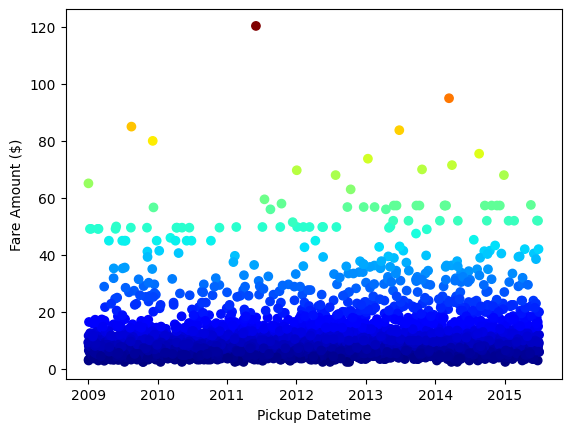

In [203]:
x, y = df_test.select('pickup_datetime').collect(), df_test.select('fare_amount').collect()
plt.scatter(
    x,
    y,
    c=y,
    cmap='jet',
    label='Expected'
)
plt.xlabel('Pickup Datetime')
plt.ylabel('Fare Amount ($)')
plt.show()

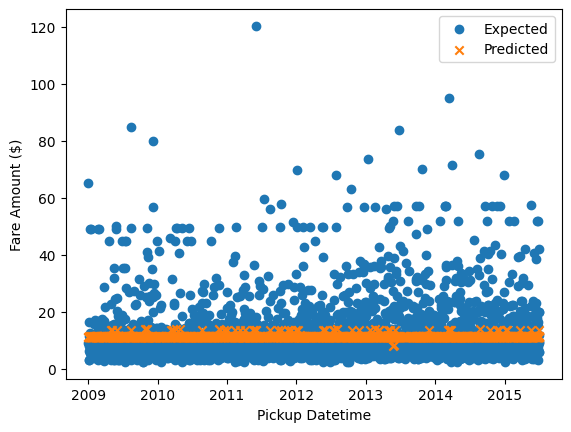

In [213]:
xPred, yPred = y_pred.predictions.select('pickup_datetime').collect(), y_pred.predictions.select('prediction').collect()
plt.scatter(
    x,
    y,
    label='Expected'
)
plt.scatter(
    xPred,
    yPred,
    marker='x',
    label='Predicted'
)
plt.xlabel('Pickup Datetime')
plt.ylabel('Fare Amount ($)')
plt.legend()
plt.show()